In [31]:
import drawsvg as draw
import math
import time
import numpy as np
import os

In [32]:
p=[80,80]
testSegments=[[[20,140],[80,120]],
                  [[80,120],[100,160]],
                  [[100,160],[100,20]],
                  [[100,20],[60,40]],
                  [[60,40],[20,140]],
                  [[60,40],[80,120]]
                 ]
sydneySegments=[[[34, 58], [34, 154]],
                [[34, 154], [98, 210]],
                [[10, 210], [98, 210]],
                [[98, 210], [170, 242]],
                [[170, 242], [186, 258]],
                [[186, 258], [218, 290]],
                [[186, 258], [138, 362]],
                [[138, 362], [138, 442]],
                [[34, 458], [138, 442]],
                [[138, 442], [138, 562]],
                [[138, 362], [218, 362]],
                [[218, 290], [218, 362]],
                [[218, 362], [290, 362]],
                [[218, 290], [258, 290]],
                [[290, 362], [378, 322]],
                [[258, 290], [402, 290]],
                [[378, 322], [402, 290]],
                [[138, 442], [258, 442]],
                [[258, 442], [354, 346]],
                [[354, 346], [378, 322]],
                [[378, 322], [378, 346]],
                [[378, 346], [378, 522]],
                [[378, 522], [474, 522]],
                [[378, 522], [378, 570]],
                [[66, 146], [258, 146]],
                [[258, 146], [258, 290]],
                [[258, 146], [258, 66]],
                [[258, 66], [258, 10]],
                [[258, 66], [354, 162]],
                [[258, 146], [354, 162]],
                [[354, 162], [402, 234]],
                [[354, 346], [378, 346]],
                [[378, 346], [402, 346]],
                [[402, 346], [402, 290]],
                [[402, 290], [402, 274]],
                [[402, 274], [402, 258]],
                [[402, 258], [402, 234]],
                [[402, 234], [450, 234]],
                [[450, 234], [450, 274]],
                [[450, 274], [402, 274]],
                [[402, 258], [482, 258]]
               ]
sydney_bezierPath=[[114,234],
                 [114,346],
                 [354,346],
                 [354,218],
                 [434,202]]

sydney_polylinePath=[[258,10],
                [258,290],
                [402,290],
                [378,322],
                [378,522]]

viennaSegments=[[[10, 424], [130, 344]],
                [[130, 344], [130, 288]],
                [[130, 288], [26, 288]],
                [[26, 288], [66, 184]],
                [[66, 184], [178, 96]],
                [[178, 96], [226, 120]],
                [[226, 120], [178, 128]],
                [[178, 96], [178, 128]],
                [[178, 128], [130, 240]],
                [[66, 184], [130, 240]],
                [[130, 240], [130, 288]],
                [[226, 120], [266, 80]],
                [[226, 120], [274, 184]],
                [[178, 128], [226, 184]],
                [[130, 240], [178, 240]],
                [[130, 288], [226, 288]],
                [[130, 344], [226, 344]],
                [[274, 184], [226, 184]],
                [[226, 184], [178, 240]],
                [[178, 240], [226, 288]],
                [[226, 288], [226, 344]],
                [[226, 344], [298, 424]],
                [[274, 184], [250, 208]],
                [[250, 208], [226, 240]],
                [[226, 240], [226, 288]],
                [[226, 184], [250, 208]],
                [[178, 240], [226, 240]],
                [[274, 184], [274, 240]],
                [[250, 208], [274, 240]],
                [[226, 240], [274, 240]],
                [[226, 288], [274, 240]],
                [[274, 240], [274, 312]],
                [[274, 312], [226, 344]],
                [[274, 184], [378, 80]],
                [[274, 184], [402, 208]],
                [[402, 208], [490, 208]],
                [[274, 240], [338, 344]]
               ]
vienna_bezierPath=[[106,312],
                  [250,312],
                  [250,184],
                  [298,200],]
vienna_polylinePath=[[266,80],
                [226,120],
                [178,128],
                [130,240],
                [274,240],
                [338,344],]

In [33]:
originalSegments=viennaSegments

In [34]:
color = 'grey'
stationcolor= 'black'
line_width = 5

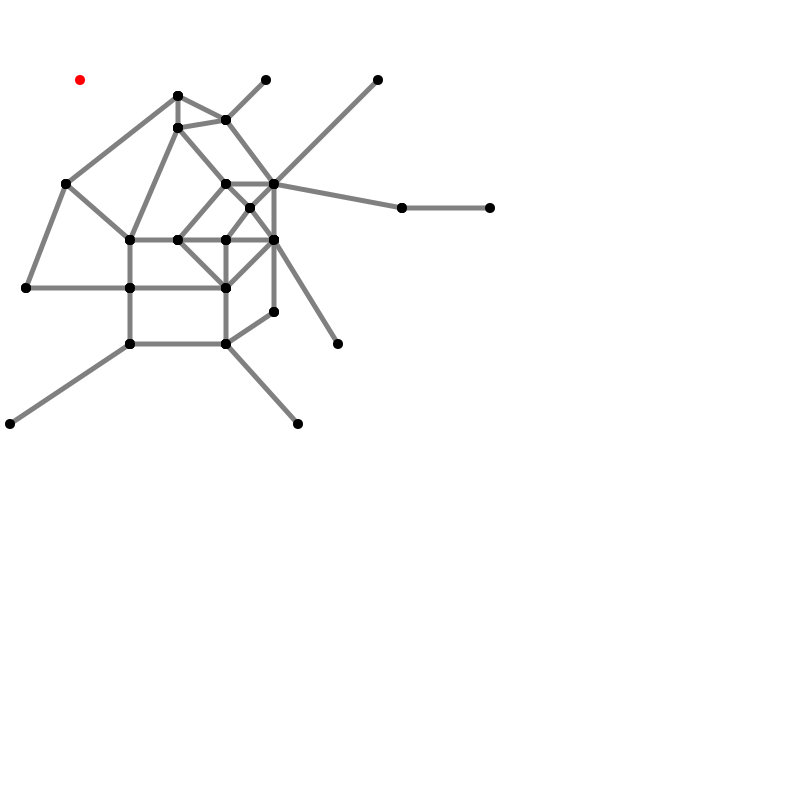

In [35]:
d = draw.Drawing(800, 800, origin=(0,0))
#draw segments
for s in originalSegments:
    startx=s[0][0]
    starty=s[0][1]
    endx=s[1][0]
    endy=s[1][1]
    
    d.append(draw.Line(startx,starty,endx,endy, stroke=color, stroke_width=line_width))
    #additionally for bends
    d.append(draw.Circle(startx, starty, line_width, fill=stationcolor, stroke='none'))
    d.append(draw.Circle(endx, endy, line_width, fill=stationcolor, stroke='none'))

d.append(draw.Circle(p[0], p[1], line_width, fill='red', stroke='none'))
#d.save_svg('sydney.svg')
d

In [36]:
def magnitude(vector):
    m=0
    for i in vector:
        m += i**2
    m = math.sqrt(m)
    return m

##choose compression algorithm here
def compression(magnitude):
    base = 1.1
    newmagnitude= math.log(magnitude,base)
    return newmagnitude

##vector1+vector2 elementwise
def vectoradd(vector1,vector2):
    return [vector1[0]+vector2[0],vector1[1]+vector2[1]]

##vector1-vector2 elementwise
def vectorsub(vector1,vector2):
    return [vector1[0]-vector2[0],vector1[1]-vector2[1]]

##vector*a elementwise
def vectormult(vector,a):
    return [vector[0]*a,vector[1]*a]

##get angle between vector1 and vector2
def vectorang(vector1,vector2):
    vector1unit= vectormult(vector1,1/magnitude(vector1))
    vector2unit= vectormult(vector2,1/magnitude(vector2))
    dot_product= np.dot(vector1unit,vector2unit)
    dot_product=min(1,dot_product)
    dot_product=max(-1,dot_product)
    ###ERROR this throws errors sometimes, when exporting
    angle = np.arccos(dot_product)
    return angle
    
def fisheye(point,observer):
    #keep angle of the point to position but change distance
    vector = vectorsub(point,observer) #vector from position to point
    mag = magnitude(vector)
    newmagnitude = compression(mag)
    factor = newmagnitude/mag
    newvector = vectormult(vector,factor)
    newpoint = vectoradd(observer, newvector)
    return newpoint
    

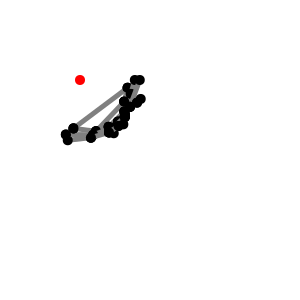

In [37]:
d = draw.Drawing(300, 300, origin=(0,0))
#draw segments
for s in originalSegments:
    point1=fisheye(s[0],p)
    point2=fisheye(s[1],p)
    startx=point1[0]
    starty=point1[1]
    endx=point2[0]
    endy=point2[1]
    
    d.append(draw.Line(startx,starty,endx,endy, stroke=color, stroke_width=line_width))
    #additionally for bends
    d.append(draw.Circle(startx, starty, line_width, fill=stationcolor, stroke='none'))
    d.append(draw.Circle(endx, endy, line_width, fill=stationcolor, stroke='none'))

d.append(draw.Circle(p[0], p[1], line_width, fill='red', stroke='none'))
#d.save_svg('fisheye-rect-morph.svg')
d

In [38]:
# Decide whether to have a horizontal or vertical step in uniform strategy
# True starts with horizontal segments, False with vertical
def steporientation(r1,r2,angle):
    circumdif = (r1+r2)/2*angle #sum of length of horizontal segments
    rdif = abs(r1-r2) #length of vertical segment
    return circumdif>rdif

In [39]:
# use s steporientation() to figure out the step orientation
# Draw a frame of the animation
def draw_frame_uniformSteps(observer,onlyCirc=False, onlySpoke=False, epsilon=0.001):
    d = draw.Drawing(1000, 1000, origin=(0,0))
    #draw segments
    d.append(draw.Rectangle(0,0,1000,1000, fill='white'))
    crossingSegments=[[],[],[]] #vertical, horizontal, spiral
    #vertical entry: angle,radius1,radius2
    #horizontal entry: ang1, ang2, r  ang1 and ang2 are ordered clockwise
    #spiral entry: ang1, ang2, rstart, rend, a, k (+1 or -1 for 45°) ang1 and ang2 are ordered clockwise
    segmentOrientation=[]#clockwise True, counterclockwise False
    segmentStyle=[]#'v' for vertical, 'h' for horizontal
    
    for s in originalSegments:
        #fisheye commented, decomment if it should be stretched
        #segment=[fisheye(s[0],o),fisheye(s[1],o)]
        segment=s
        #get start and endpoint in Polar Coordinates
        vector1 = vectorsub(segment[0],observer)
        r1 = magnitude(vector1)
        ang1 = math.atan2(vector1[1],vector1[0])
        vector2 = vectorsub(segment[1],observer)
        r2 = magnitude(vector2)
        ang2 = math.atan2(vector2[1],vector2[0])
        angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
        
        ##to make the drawing with static centerpoint
        offset = vectorsub([500,500],observer)
        o=[500,500]
        ### otherwise:
        #offset = [0,0]
        #o = observer
        
        if r1==0 or r2==0:
            #degenerate case where one vertex is on the observer
            segmentOrientation.append(True)
            segmentStyle.append('x')
            #draw it as straight line
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               vector2[0]+o[0],vector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            #stations
            d.append(draw.Circle(segment[0][0]+offset[0], segment[0][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            d.append(draw.Circle(segment[1][0]+offset[0], segment[1][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            #add to segment list
            if r1==0:
                crossingSegments[0].append([ang2,0,r2])
            else:
                crossingSegments[0].append([ang1,0,r1])
            continue
        
        #decide in which direction it must go, this is decided by whether from 1 to 2 there are less than 180° clockwise
        angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi))
        clockwise = (ang2-ang1)%(2*math.pi) < math.pi
        segmentOrientation.append(clockwise)
        #decide whether to start with a horizontal or vertical step
        circular=steporientation(r1,r2,angdiff)
        if onlyCirc:
            circular = True
        if onlySpoke:
            circular = False
        
        if angdiff>(math.pi-epsilon): #degenerate case
            #draw it as straight line
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               vector2[0]+o[0],vector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            #stations
            d.append(draw.Circle(segment[0][0]+offset[0], segment[0][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            d.append(draw.Circle(segment[1][0]+offset[0], segment[1][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            #add to crossingsegments
            crossingSegments[0].append([ang1,0,r1])
            crossingSegments[0].append([ang2,0,r2])
            segmentStyle.append('x')
            continue
        
        if circular: #horizontal step
            segmentStyle.append('h')
            anghalf = (ang1+ang2)/2
            if not clockwise:
                anghalf += math.pi 
            if ang2<ang1:
                anghalf += math.pi
            anghalf = anghalf%(2*math.pi)
            #first half
            d.append(draw.Arc(o[0], o[1], r1, (ang1/math.pi*180), (anghalf/math.pi*180), cw=clockwise,
                stroke=color, stroke_width=line_width, fill='none'))
            
            if clockwise:
                crossingSegments[1].append([ang1,anghalf,r1])
                crossingSegments[1].append([anghalf,ang2,r2])
            else:
                crossingSegments[1].append([anghalf,ang1,r1])
                crossingSegments[1].append([ang2,anghalf,r2])
            
            #spoke segment
            #To convert from Polar Coordinates (r,θ) to Cartesian Coordinates (x,y) : x = r × cos( θ ) y = r × sin( θ )
            x_v = r1*math.cos(anghalf) + o[0]
            y_v = r1*math.sin(anghalf) + o[1]
            x_w = r2*math.cos(anghalf) + o[0]
            y_w = r2*math.sin(anghalf) + o[1]
            
            d.append(draw.Line(x_v,y_v,x_w,y_w, stroke=color, stroke_width=line_width))
            
            crossingSegments[0].append([anghalf,min(r1,r2),max(r1,r2)])
            
            #to make bends smooth
            d.append(draw.Circle(x_v, y_v, line_width/2, fill=color, stroke='none'))
            d.append(draw.Circle(x_w, y_w, line_width/2, fill=color, stroke='none'))
            #second half
            d.append(draw.Arc(o[0], o[1], r2, (anghalf/math.pi*180), (ang2/math.pi*180), cw=clockwise,
                stroke=color, stroke_width=line_width, fill='none'))
        else: #vertical step
            segmentStyle.append('v')
            rhalf = (r1+r2)/2
            #first half
            halfvector1 = vectormult(vector1,((r1+r2)/2)/r1)
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               halfvector1[0]+o[0],halfvector1[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            
            crossingSegments[0].append([ang1,min(r1,rhalf),max(r1,rhalf)])
            
            #to make bends smooth
            d.append(draw.Circle( halfvector1[0]+o[0],halfvector1[1]+o[1], 
                                 line_width/2, fill=color, stroke='none'))
            
            #horizontal segment
            d.append(draw.Arc(o[0], o[1], rhalf, (ang1/math.pi*180), (ang2/math.pi*180), cw=clockwise,
                stroke=color, stroke_width=line_width, fill='none'))
            
            if clockwise:
                crossingSegments[1].append([ang1,ang2,rhalf])
            else:
                crossingSegments[1].append([ang2,ang1,rhalf])
            
            #second half
            halfvector2 = vectormult(vector2,((r1+r2)/2)/r2)
            d.append(draw.Line(vector2[0]+o[0],vector2[1]+o[1],
                               halfvector2[0]+o[0],halfvector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            
            crossingSegments[0].append([ang2,min(r2,rhalf),max(r2,rhalf)])
            
            #to make bends smooth
            d.append(draw.Circle( halfvector2[0]+o[0],halfvector2[1]+o[1], 
                                 line_width/2, fill=color, stroke='none'))
        #stations
        d.append(draw.Circle(segment[0][0]+offset[0], segment[0][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
        d.append(draw.Circle(segment[1][0]+offset[0], segment[1][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
    
    d.append(draw.Circle(500, 500, line_width, fill='red', stroke='none'))
    #d.append(draw.Circle(observer[0], observer[1], line_width, fill='red', stroke='none'))
    return d,crossingSegments,segmentOrientation,segmentStyle


In [60]:
# use s steporientation() to figure out the step orientation
# Draw a frame of the animation
def draw_frame_LSteps(observer, epsilon=0.001):
    d = draw.Drawing(1000, 1000, origin=(0,0))
    #draw segments
    d.append(draw.Rectangle(0,0,1000,1000, fill='white'))
    crossingSegments=[[],[],[]] #vertical, horizontal, spiral
    #vertical entry: angle,radius1,radius2
    #horizontal entry: ang1, ang2, r  ang1 and ang2 are ordered clockwise
    #spiral entry: ang1, ang2, rstart, rend, a, k (+1 or -1 for 45°) ang1 and ang2 are ordered clockwise
    segmentOrientation=[]#clockwise True, counterclockwise False
    segmentStyle=[]#'v' for vertical, 'h' for horizontal, 'x' for none
    
    for s in originalSegments:
        #fisheye commented, decomment if it should be stretched
        #segment=[fisheye(s[0],o),fisheye(s[1],o)]
        segment=s
        #get start and endpoint in Polar Coordinates
        vector1 = vectorsub(segment[0],observer)
        r1 = magnitude(vector1)
        ang1 = math.atan2(vector1[1],vector1[0])
        vector2 = vectorsub(segment[1],observer)
        r2 = magnitude(vector2)
        ang2 = math.atan2(vector2[1],vector2[0])
        angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
        
        ##to make the drawing with static centerpoint
        offset = vectorsub([500,500],observer)
        o=[500,500]
        ### otherwise:
        #offset = [0,0]
        #o = observer
        
        #decide in which direction it must go, this is decided by whether from 1 to 2 there are less than 180° clockwise
        angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi))
        clockwise = (ang2-ang1)%(2*math.pi) < math.pi
        segmentOrientation.append(clockwise)
        #decide whether to start with a horizontal or vertical step
        circular= r1<r2 ##we always draw the circular segment at the closer to center vertex, such that the distance is minimized
        
        if angdiff>(math.pi-epsilon): #degenerate case, sls goes through the center point
            #draw it as straight line
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               vector2[0]+o[0],vector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            #stations
            d.append(draw.Circle(segment[0][0]+offset[0], segment[0][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            d.append(draw.Circle(segment[1][0]+offset[0], segment[1][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            #add to crossingsegments
            crossingSegments[0].append([ang1,0,r1])
            crossingSegments[0].append([ang2,0,r2])
            segmentStyle.append('x')
            continue
        
        if circular: #horizontal step
            segmentStyle.append('x') #note that there are no style flips the way we decided on the L orientation
            #first half
            d.append(draw.Arc(o[0], o[1], r1, (ang1/math.pi*180), (ang2/math.pi*180), cw=clockwise,
                stroke=color, stroke_width=line_width, fill='none'))
            
            if clockwise:
                crossingSegments[1].append([ang1,ang2,r1])
            else:
                crossingSegments[1].append([ang2,ang1,r1])
            
            #spoke segment
            #To convert from Polar Coordinates (r,θ) to Cartesian Coordinates (x,y) : x = r × cos( θ ) y = r × sin( θ )
            x_v = r1*math.cos(ang2) + o[0]
            y_v = r1*math.sin(ang2) + o[1]
            x_w = vector2[0] + o[0]
            y_w = vector2[1] + o[1]
            
            d.append(draw.Line(x_v,y_v,x_w,y_w, stroke=color, stroke_width=line_width))
            
            crossingSegments[0].append([ang2,min(r1,r2),max(r1,r2)])
            
            #to make bends smooth
            d.append(draw.Circle(x_v, y_v, line_width/2, fill=color, stroke='none'))
            
        else: #vertical step
            segmentStyle.append('x') #still, there shouldn't be styleflips
            #vertical segment
            x_v = r2*math.cos(ang1) + o[0]
            y_v = r2*math.sin(ang1) + o[1]
            
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               x_v,y_v, 
                               stroke=color, stroke_width=line_width))
            
            crossingSegments[0].append([ang1,min(r1,r2),max(r1,r2)])
            
            #to make bends smooth
            d.append(draw.Circle( x_v, y_v, 
                                 line_width/2, fill=color, stroke='none'))
            
            #horizontal segment
            d.append(draw.Arc(o[0], o[1], r2, (ang1/math.pi*180), (ang2/math.pi*180), cw=clockwise,
                stroke=color, stroke_width=line_width, fill='none'))
            
            if clockwise:
                crossingSegments[1].append([ang1,ang2,r2])
            else:
                crossingSegments[1].append([ang2,ang1,r2])
            
        #stations
        d.append(draw.Circle(segment[0][0]+offset[0], segment[0][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
        d.append(draw.Circle(segment[1][0]+offset[0], segment[1][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
    
    d.append(draw.Circle(500, 500, line_width, fill='red', stroke='none'))
    #d.append(draw.Circle(observer[0], observer[1], line_width, fill='red', stroke='none'))
    return d,crossingSegments,segmentOrientation,segmentStyle

In [41]:
def getSpokeHausdorffStepSize(observer,r1,ang1,r2,ang2): ##assuming clockwise order and r1<=r2 otherwise flip them at function call!
    #returns r which is the radius of the circular horizontal part and the hausdorffdistance
    #euclidean coordinates of s1 and s2:
    x_1 = r1*math.cos(ang1)
    y_1 = r1*math.sin(ang1)
    x_2 = r2*math.cos(ang2)
    y_2 = r2*math.sin(ang2)
    angdiff = (ang2-ang1)%(2*math.pi)
    outang1 = vectorang([x_2-x_1,y_2-y_1],[-1*x_1,-1*y_1])#angle between segment and spike (cw) at s1
    inang2 = math.pi-angdiff-outang1 #angle between spike and segment (cw) at s2, forms a triangle, so we can use this knowledge
    if ang1 == ang2: #straight line, we have to catch that not to divide by 0
        hausdorff = 0
        r = r1
        return r,hausdorff
    
    if outang1>math.pi/2: #if the segment is more than 90°, the u-shape does not make sense, so we make a step instead.
        ##step-shape starting and ending with straights with a curve in the middle
        r=((r1*math.sin(math.pi-outang1))+(r2*math.sin(inang2)))/(math.sin(inang2)+math.sin(math.pi-outang1))
        hausdorff = math.sin(inang2)*(r2-r)
        return r,hausdorff
    else:
        ##u-shape or bucket
        difSegmentO = pointLineDistance(0,0,[[x_1,y_1],[x_2,y_2]]) #distance between the segment and the observer
        r = (difSegmentO+(math.sin(inang2)*r2))/(1+math.sin(inang2)) #optimally the circular segment is as far of the line as the second bendpoint is
        #the first bendpoint can be ignored, since r1<=r2. the distance of the circular segment is given by r-difSegmentO
        hausdorff = r-difSegmentO
        hausdorffcheckS1 = math.sin(outang1)*(r1-r)
        hausdorffcheckS2 = math.sin(inang2)*(r2-r)
        hausdorffcheckCirc = r-difSegmentO
        return r,hausdorff
        

In [42]:
def getCircHausdorffStepSize(observer,r1,ang1,r2,ang2): ##assuming clockwise order and r1<=r2 otherwise flip them at function call!
    #returns ang which is the angle of the vertical step and the hausdorffdistance
    #euclidean coordinates of s1 and s2:
    x_1 = r1*math.cos(ang1)
    y_1 = r1*math.sin(ang1)
    x_2 = r2*math.cos(ang2)
    y_2 = r2*math.sin(ang2)
    angdiff = (ang2-ang1)%(2*math.pi)
    outang1 = vectorang([x_2-x_1,y_2-y_1],[-1*x_1,-1*y_1])#angle between segment and spike (cw) at s1
    inang2 = math.pi-angdiff-outang1
    rhalf = (r1+r2)/2
    
    cutang = math.asin((r1/rhalf)*math.sin(outang1))
    ang= ((math.pi-cutang-outang1)%(2*math.pi)+ang1)%(2*math.pi)
    hausdorff = math.sin(cutang)*(rhalf-r1)
    
    hausdorffcheckR1 = math.sin(cutang)*(r2-rhalf)
    hausdorffcheckR2 = math.sin(cutang)*(rhalf-r1)
    hausdorffcheckCirc = 0
    if outang1<math.pi/2: #this is a slightly stranger version, where the first circular arc intersects the original arc
        #thus we might have to adjust the hausdorff distance, since this first arc has an extremepoint at its peak
        difSegmentO = pointLineDistance(0,0,[[x_1,y_1],[x_2,y_2]]) #distance between the segment and the observer
        distanceCircToSegment = r1-difSegmentO
        hausdorff = max(hausdorff,distanceCircToSegment)
        
        hausdorffcheckCirc = r1-difSegmentO
    return ang,hausdorff
          
    

In [43]:
# draw while minimizing the hausdorff-distance
# Draw a frame of the animation
def draw_frame_hausdorffSteps(observer,oldSegmentStyle=[],onlySpoke=False,onlyCirc=False,epsilon=0.001):
    d = draw.Drawing(1000, 1000, origin=(0,0))
    #draw segments
    d.append(draw.Rectangle(0,0,1000,1000, fill='white'))
    crossingSegments=[[],[],[]] #vertical, horizontal, spiral
    #vertical entry: angle,radius1,radius2
    #horizontal entry: ang1, ang2, r  ang1 and ang2 are ordered clockwise
    #spiral entry: ang1, ang2, rstart, rend, a, k (+1 or -1 for 45°) ang1 and ang2 are ordered clockwise
    segmentOrientation=[]#clockwise True, counterclockwise False
    segmentStyle=[]#'v' for vertical, 'h' for horizontal
    
    i=0
    for s in originalSegments:
        #without fisheye, else uncomment
        #segment=[fisheye(s[0],o),fisheye(s[1],o)]
        
        segment = s
        
        #get start and endpoint in Polar Coordinates
        vector1 = vectorsub(segment[0],observer)
        r1 = magnitude(vector1)
        ang1 = math.atan2(vector1[1],vector1[0])%(2*math.pi)
        vector2 = vectorsub(segment[1],observer)
        r2 = magnitude(vector2)
        ang2 = math.atan2(vector2[1],vector2[0])%(2*math.pi)
        angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
        
        ##to make the drawing with static centerpoint
        offset = vectorsub([500,500],observer)
        o=[500,500]
        ### otherwise:
        #offset = [0,0]
        #o = observer
        
        if angdiff>(math.pi-epsilon): #degenerate case
            #draw it as straight line
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               vector2[0]+o[0],vector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            #stations
            d.append(draw.Circle(segment[0][0]+offset[0], segment[0][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            d.append(draw.Circle(segment[1][0]+offset[0], segment[1][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            #add to crossingsegments
            crossingSegments[0].append([ang1,0,r1])
            crossingSegments[0].append([ang2,0,r2])
            segmentOrientation.append(True)
            segmentStyle.append('x')
            continue
        
        if r1==0 or r2==0:
            #degenerate case where one vertex is on the observer
            segmentOrientation.append(True)
            segmentStyle.append('x')
            #draw it as straight line
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               vector2[0]+o[0],vector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            #stations
            d.append(draw.Circle(segment[0][0]+offset[0], segment[0][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            d.append(draw.Circle(segment[1][0]+offset[0], segment[1][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            #add to segment list
            if r1==0:
                crossingSegments[0].append([ang2,0,r2])
            else:
                crossingSegments[0].append([ang1,0,r1])
            continue
        
        #decide in which direction it must go, this is decided by whether from 1 to 2 there are less than 180° clockwise
        clockwise = (ang2-ang1)%(2*math.pi) < math.pi
        
        segmentOrientation.append(clockwise)
        
        if r1>r2: #for simplicity invert the segment in case r1>r2
            vector1,vector2 = vector2,vector1
            ang1,ang2 = ang2,ang1
            r1,r2 = r2,r1
            clockwise = not clockwise
        
        if clockwise:
            rVert,hausdorffVert = getSpokeHausdorffStepSize(observer,r1,ang1,r2,ang2)
            angHoriz, hausdorffHoriz = getCircHausdorffStepSize(observer,r1,ang1,r2,ang2)
        else: #flip the angles, such that we have the mirror problem
            rVert,hausdorffVert = getSpokeHausdorffStepSize(observer,r1,(-1*ang1)%(2*math.pi),r2,(-1*ang2)%(2*math.pi))
            angHoriz, hausdorffHoriz = getCircHausdorffStepSize(observer,r1,(-1*ang1)%(2*math.pi),r2,(-1*ang2)%(2*math.pi))
            angHoriz = (-1*angHoriz)%(2*math.pi)
        
        circular = hausdorffHoriz<hausdorffVert
        if (abs(hausdorffHoriz-hausdorffVert)<epsilon) and (len(oldSegmentStyle)>0):#avoid flicking, only change the style, when there is actual benefit
            circular = (oldSegmentStyle[i]=='h')
        
        if(onlyCirc or(circular and not onlySpoke)):
            segmentStyle.append('h')
            ###do horizontal step
            #first half
            d.append(draw.Arc(o[0], o[1], r1, (ang1/math.pi*180)%360, (angHoriz/math.pi*180)%360, cw=clockwise,
                stroke=color, stroke_width=line_width, fill='none'))
            
            if clockwise:
                crossingSegments[1].append([ang1,angHoriz,r1])
            else:
                crossingSegments[1].append([angHoriz,ang1,r1])
            
            #vertical segment
            #To convert from Polar Coordinates (r,θ) to Cartesian Coordinates (x,y) : x = r × cos( θ ) y = r × sin( θ )
            x_v = r1*math.cos(angHoriz) + o[0]
            y_v = r1*math.sin(angHoriz) + o[1]
            x_w = r2*math.cos(angHoriz) + o[0]
            y_w = r2*math.sin(angHoriz) + o[1]

            d.append(draw.Line(x_v,y_v,x_w,y_w, stroke=color, stroke_width=line_width))
            
            crossingSegments[0].append([angHoriz,r1,r2])
            
            #to make bends smooth
            d.append(draw.Circle(x_v, y_v, line_width/2, fill=color, stroke='none'))
            d.append(draw.Circle(x_w, y_w, line_width/2, fill=color, stroke='none'))
            #second half
            d.append(draw.Arc(o[0], o[1], r2, (angHoriz/math.pi*180)%360, (ang2/math.pi*180)%360, cw=clockwise,
                stroke=color, stroke_width=line_width, fill='none'))
            
            if clockwise:
                crossingSegments[1].append([angHoriz,ang2,r2])
            else:
                crossingSegments[1].append([ang2,angHoriz,r2])
        
        else: 
            ###do vertical step (including u-shape)
            segmentStyle.append('v')
            #first half
            halfvector1 = vectormult(vector1,rVert/r1)
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               halfvector1[0]+o[0],halfvector1[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            
            crossingSegments[0].append([ang1,r1,rVert])
            
            #to make bends smooth
            d.append(draw.Circle( halfvector1[0]+o[0],halfvector1[1]+o[1], 
                                 line_width/2, fill=color, stroke='none'))

            #horizontal segment
            d.append(draw.Arc(o[0], o[1], rVert, (ang1/math.pi*180)%360, (ang2/math.pi*180)%360, cw=clockwise,
                stroke=color, stroke_width=line_width, fill='none'))
            
            if clockwise:
                crossingSegments[1].append([ang1,ang2,rVert])
            else:
                crossingSegments[1].append([ang2,ang1,rVert])

            #second half
            halfvector2 = vectormult(vector2,rVert/r2)
            d.append(draw.Line(vector2[0]+o[0],vector2[1]+o[1],
                               halfvector2[0]+o[0],halfvector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            
            crossingSegments[0].append([ang2,rVert,r2])
            
            #to make bends smooth
            d.append(draw.Circle( halfvector2[0]+o[0],halfvector2[1]+o[1], 
                                 line_width/2, fill=color, stroke='none'))
        #stations
        d.append(draw.Circle(segment[0][0]+offset[0], segment[0][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
        d.append(draw.Circle(segment[1][0]+offset[0], segment[1][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
        i+=1
        
        ##DEBUG
        #d.append(draw.Line(segment[0][0],segment[0][1],segment[1][0],segment[1][1],stroke="red", stroke_width=1))
        
    d.append(draw.Circle(o[0], o[1], line_width, fill='red', stroke='none'))
    return d,crossingSegments,segmentOrientation,segmentStyle

In [44]:
###### OCTORADIAL

In [45]:
def drawSpiral(d,o,rstart,rend,ang,cw=True): #drawing, center, start radius inner, end radius outer, start angle in radian, clockwise
    approxscale=1
    a=(rstart/math.e**ang) #ang should be in radian
    r=rstart
    while r<rend:
        #draw line from r to r+approxscale
        r_v=r
        r_w=r+approxscale
        ang_v=math.log(r_v/a)
        ang_w=math.log(r_w/a)
        if not cw:
            ang_v=math.log(a/r_v)
            ang_w=math.log(a/r_w)
        x_v=r_v*math.cos(ang_v) + o[0]
        y_v=r_v*math.sin(ang_v) + o[1]
        x_w=r_w*math.cos(ang_w) + o[0]
        y_w=r_w*math.sin(ang_w) + o[1]
        #approximated segment
        d.append(draw.Line(x_v, y_v, x_w, y_w, stroke=color, stroke_width=line_width))
        #to make bends smooth
        d.append(draw.Circle(x_v,y_v,line_width/2, fill=color, stroke='none'))
        d.append(draw.Circle(x_w,y_w,line_width/2, fill=color, stroke='none'))
        r += approxscale
    return

In [46]:
#return true if the segment is more horizontal than the log spiral, false if it is steeper/vertical
def stepOrientationOcto(r1,r2,angle,k=1):
    k=abs(k)
    a=1 #should not matter, since we're not interested in correct angles
    ang1=math.log(r1/a)
    ang2=math.log(r2/a)
    horizontal=ang2-ang1<angle
    return horizontal

In [47]:
#assuming we are in the vertical case, this gives where to start,end the spiral such that the vert. segments are split in half
def startRadiusSpiral(r1,r2,ang,k=1):
    k=abs(k) #we are only looking at clockwise cases
    a=1 #should not matter, since we're not interested in correct angles
    angstart=(1/k)*math.log(r1/a)
    rspiral=(a*math.e**(k*(angstart+ang)))-r1 #length of the shortest possible spiral segment, starting right at r1
    rstartopt=(r1*(r1+r2))/(2*r1+rspiral) # gives the radius of where to start the spiral, s.t. the split is symmetrical
    rendopt=(rstartopt/r1)*(r1+rspiral)
    return rstartopt,rendopt
    

In [48]:
# use s steporientation() to figure out the step orientation
# Draw a frame of the animation
def draw_frame_octoradialSteps(observer,angle=1,epsilon=0.001): #angle 1 is 45° angle (=tan(α))
    
    crossingSegments=[[],[],[]] #vertical, horizontal, spiral
    #vertical entry: angle,radius1,radius2
    #horizontal entry: ang1, ang2, r  ang1 and ang2 are ordered clockwise
    #spiral entry: ang1, ang2, rstart, rend, a, k (+1 or -1 for 45°) ang1 and ang2 are ordered clockwise
    segmentOrientation=[]#clockwise True, counterclockwise False
    segmentStyle=[]#'v' for vertical, 'h' for horizontal
    
    #CONSTANTS:
    approxscale=1


    #DRAWING
    d = draw.Drawing(1000, 1000, origin=(0,0))
    #draw segments
    d.append(draw.Rectangle(0,0,1000,1000, fill='white'))
    for s in originalSegments:
        k=angle
        #without fisheye, else uncomment
        #segment=[fisheye(s[0],o),fisheye(s[1],o)]
        
        segment = s
        #get start and endpoint in Polar Coordinates
        vector1 = vectorsub(segment[0],observer)
        r1 = magnitude(vector1)
        ang1 = math.atan2(vector1[1],vector1[0])%(2*math.pi)
        vector2 = vectorsub(segment[1],observer)
        r2 = magnitude(vector2)
        ang2 = math.atan2(vector2[1],vector2[0])%(2*math.pi)
        angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
        #decide in which direction it must go, this is decided by whether from 1 to 2 there are less than 180° clockwise
        clockwise = (ang2-ang1)%(2*math.pi) < math.pi
        
        ##to make the drawing with static centerpoint
        offset = vectorsub([500,500],observer)
        o=[500,500]
        ### otherwise:
        #offset = [0,0]
        #o = observer
        
        if r1==0 or r2==0:
            #degenerate case where one vertex is on the observer
            segmentOrientation.append(True)
            segmentStyle.append('x')
            #draw it as straight line
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               vector2[0]+o[0],vector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            #stations
            d.append(draw.Circle(segment[0][0]+offset[0], segment[0][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            d.append(draw.Circle(segment[1][0]+offset[0], segment[1][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            #add to segment list
            if r1==0:
                crossingSegments[0].append([ang2,0,r2])
            else:
                crossingSegments[0].append([ang1,0,r1])
            continue
        
        
        segmentOrientation.append(clockwise)
        
        #make sure that vector1 is closer to the center for easier processing, otherwise flip the orientation of the segment
        if r2<r1:
            clockwise = not clockwise
            vector1,vector2 = vector2,vector1
            r1,r2 = r2,r1
            ang1,ang2 = ang2,ang1
            
        if angdiff>(math.pi-epsilon): #degenerate case where observer is on a segment
            #draw it as straight line
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               vector2[0]+o[0],vector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            #stations
            d.append(draw.Circle(segment[0][0]+offset[0], segment[0][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            d.append(draw.Circle(segment[1][0]+offset[0], segment[1][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            crossingSegments[0].append([ang2,0,r2])
            segmentStyle.append('x')
            continue
            
        if not clockwise:
            k = -angle #inversing the angle
        #decide whether to start with a horizontal or vertical line
        horizontal=stepOrientationOcto(r1,r2,angdiff,k)

        if horizontal: #HORIZONTAL STEP
            segmentStyle.append('h')
            spiralang1=(1/k)*math.log(r1)#only relative
            spiralang2=(1/k)*math.log(r2)#only relative
            angleft= angdiff-abs(spiralang2-spiralang1)#the angle spanned by horizontal segments
            #print(f'angdiff: {angdiff/math.pi*180}, spiral: {abs(spiralang1-spiralang2)/math.pi*180}, rest: angle: {angleft/math.pi*180}')
            if clockwise:
                anghoriz1=ang1+angleft/2
                anghoriz2=ang2-angleft/2
            else:
                anghoriz1=ang1-angleft/2
                anghoriz2=ang2+angleft/2

            #first horizontal segment
            d.append(draw.Arc(o[0], o[1], r1, (ang1/math.pi*180), (anghoriz1/math.pi*180), cw=clockwise,
                stroke=color, stroke_width=line_width, fill='none'))
            if clockwise:
                crossingSegments[1].append([ang1,anghoriz1,r1])
            else:
                crossingSegments[1].append([anghoriz1,ang1,r1])
            
            #spiral segment
            a=(r1/math.e**(k*anghoriz1))
            r=r1
            while r<=r2-(approxscale/2):
                #draw line from r to r+approxscale
                r_v=r
                r_w=r+approxscale
                ang_v=(1/k)*math.log(r_v/a)
                ang_w=(1/k)*math.log(r_w/a)
                x_v=r_v*math.cos(ang_v) + o[0]
                y_v=r_v*math.sin(ang_v) + o[1]
                x_w=r_w*math.cos(ang_w) + o[0]
                y_w=r_w*math.sin(ang_w) + o[1]
                #approximated segment
                d.append(draw.Line(x_v, y_v, x_w, y_w, stroke=color, stroke_width=line_width))
                #to make bends smooth
                d.append(draw.Circle(x_v,y_v,line_width/2, fill=color, stroke='none'))
                d.append(draw.Circle(x_w,y_w,line_width/2, fill=color, stroke='none'))
                r += approxscale
            
            if clockwise:
                crossingSegments[2].append([anghoriz1,anghoriz2,r1,r2,a,k])
            else:
                crossingSegments[2].append([anghoriz2,anghoriz1,r1,r2,a,k])

            #second horizontal segment
            d.append(draw.Arc(o[0], o[1], r2, (anghoriz2/math.pi*180), (ang2/math.pi*180), cw=clockwise,
                stroke=color, stroke_width=line_width, fill='none'))
            if clockwise:
                crossingSegments[1].append([anghoriz2,ang2,r2])
            else:
                crossingSegments[1].append([ang2,anghoriz2,r2])

        else: #VERTICAL STEP
            segmentStyle.append('v')
            rstartspiral,rendspiral=startRadiusSpiral(r1,r2,angdiff,k)

            #first vertical segment
            halfvector1 = vectormult(vector1,rstartspiral/r1)
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               halfvector1[0]+o[0],halfvector1[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            
            crossingSegments[0].append([ang1,r1,rstartspiral])
            
            #spiral segment
            a=(rstartspiral/math.e**(k*ang1))
            r=rstartspiral
            while r<rendspiral-(approxscale/2): #are we significantly close to the spiral end?
                r_v=r
                r_w=r+approxscale
                ang_v=(1/k)*math.log(r_v/a)
                ang_w=(1/k)*math.log(r_w/a)
                x_v=r_v*math.cos(ang_v) + o[0]
                y_v=r_v*math.sin(ang_v) + o[1]
                x_w=r_w*math.cos(ang_w) + o[0]
                y_w=r_w*math.sin(ang_w) + o[1]
                #approximated segment
                d.append(draw.Line(x_v, y_v, x_w, y_w, stroke=color, stroke_width=line_width))
                #to make bends smooth
                d.append(draw.Circle(x_v,y_v,line_width/2, fill=color, stroke='none'))
                d.append(draw.Circle(x_w,y_w,line_width/2, fill=color, stroke='none'))
                r += approxscale
                
            if clockwise:
                crossingSegments[2].append([ang1,ang2,rstartspiral,rendspiral,a,k])
            else:
                crossingSegments[2].append([ang2,ang1,rstartspiral,rendspiral,a,k])

            #second vertical segment
            rendspiral=r #this is where the approx ended, if it is askew we need to change this but might risk a gap
            halfvector2 = vectormult(vector2,rendspiral/r2)
            d.append(draw.Line(vector2[0]+o[0],vector2[1]+o[1],
                               halfvector2[0]+o[0],halfvector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            
            crossingSegments[0].append([ang2,rendspiral,r2])

        #stations
        d.append(draw.Circle(segment[0][0]+offset[0], segment[0][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
        d.append(draw.Circle(segment[1][0]+offset[0], segment[1][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
    d.append(draw.Circle(o[0], o[1], line_width, fill='red', stroke='none'))
    return d,crossingSegments,segmentOrientation,segmentStyle



In [49]:
#### PORT BY ANGLE
def draw_frame_portByAngleSteps(observer,rLimit=10,epsilon=0.001):
    d = draw.Drawing(1000, 1000, origin=(0,0))
    #draw segments
    d.append(draw.Rectangle(0,0,1000,1000, fill='white'))
    
    crossingSegments=[[],[],[]] #vertical, horizontal, spiral
    #vertical entry: angle,radius1,radius2
    #horizontal entry: ang1, ang2, r  ang1 and ang2 are ordered clockwise
    #spiral entry: ang1, ang2, rstart, rend, a, k (+1 or -1 for 45°) ang1 and ang2 are ordered clockwise
    segmentOrientation=[]#clockwise True, counterclockwise False
    segmentStyle=[]#'v' for vertical, 'h' for horizontal, 'l' for L-shape, 'c' for concentric
    
    for s in originalSegments:
        #without fisheye, else uncomment
        #segment=[fisheye(s[0],observer),fisheye(s[1],observer)]
        
        segment = s
        
        #get start and endpoint in Polar Coordinates
        vector1 = vectorsub(segment[0],observer)
        r1 = magnitude(vector1)
        ang1 = math.atan2(vector1[1],vector1[0])%(2*math.pi)
        vector2 = vectorsub(segment[1],observer)
        r2 = magnitude(vector2)
        ang2 = math.atan2(vector2[1],vector2[0])%(2*math.pi)
        angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
        
        
        ##to make the drawing with static centerpoint
        offset = vectorsub([500,500],observer)
        o=[500,500]
        ### otherwise:
        #offset = [0,0]
        #o = observer
        
        if angdiff>(math.pi-epsilon): #degenerate case
            #draw it as straight line
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               vector2[0]+o[0],vector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            #stations
            d.append(draw.Circle(segment[0][0]+offset[0], segment[0][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            d.append(draw.Circle(segment[1][0]+offset[0], segment[1][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
            #add to crossingsegments
            crossingSegments[0].append([ang1,0,r1])
            crossingSegments[0].append([ang2,0,r2])
            segmentStyle.append('x')
            segmentOrientation.append(True)
            continue
        
        if r1==0 or r2==0:
            #degenerate case where one vertex is on the observer
            segmentOrientation.append(True)
            segmentStyle.append('x')
            #draw it as straight line
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               vector2[0]+o[0],vector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            #stations
            d.append(draw.Circle(segment[0][0], segment[0][1], line_width, fill=stationcolor, stroke='none'))
            d.append(draw.Circle(segment[1][0], segment[1][1], line_width, fill=stationcolor, stroke='none'))
            #add to segment list
            if r1==0:
                crossingSegments[0].append([ang2,0,r2])
            else:
                crossingSegments[0].append([ang1,0,r1])
            continue
        
        #decide in which direction it must go, this is decided by whether from 1 to 2 there are less than 180° clockwise
        clockwise = (ang2-ang1)%(2*math.pi) < math.pi
        
        segmentOrientation.append(clockwise)
        
        if r1>r2: #for simplicity invert the segment in case r1>r2
            vector1,vector2 = vector2,vector1
            ang1,ang2 = ang2,ang1
            r1,r2 = r2,r1
            clockwise = not clockwise
        
        if not clockwise: #mirror the problem, be sure to reverse mirror this before drawing
            ang1 = (-1*ang1)%(2*math.pi)
            ang2 = (-1*ang2)%(2*math.pi)
            
        angdiff = (ang2-ang1)%(2*math.pi)
        outang1 = vectorang(vectorsub(vector2,vector1),vectormult(vector1,-1))#angle between segment and spike (cw) at s1
        inang2 = math.pi-angdiff-outang1
        
        ##we have to handle four cases:
        
        ## s1 bottom port -> s2 bottom port : go up to the innercircle
        if outang1 < math.pi/4:
            segmentStyle.append('c')
            if not clockwise:
                ang1 = (-1*ang1)%(2*math.pi)
                ang2 = (-1*ang2)%(2*math.pi)
            #vertical segment
            vectorBend1 = vectormult(vector1,(rLimit/r1))
            vectorBend2 = vectormult(vector2,(rLimit/r2))
            d.append(draw.Line(vectorBend1[0]+o[0],vectorBend1[1]+o[1],
                               vector1[0]+o[0],vector1[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            
            crossingSegments[0].append([ang1,min(rLimit,r1),max(rLimit,r1)])
            
            d.append(draw.Line(vectorBend2[0]+o[0],vectorBend2[1]+o[1],
                               vector2[0]+o[0],vector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            
            crossingSegments[0].append([ang2,min(rLimit,r2),max(rLimit,r2)])
            
            #to make bends smooth
            d.append(draw.Circle(vectorBend1[0]+o[0],vectorBend1[1]+o[1], 
                                 line_width/2, fill=color, stroke='none'))
            d.append(draw.Circle(vectorBend2[0]+o[0],vectorBend2[1]+o[1], 
                                 line_width/2, fill=color, stroke='none'))
            #circular segment
            d.append(draw.Arc(o[0], o[1], rLimit, (ang1/math.pi*180)%360, (ang2/math.pi*180)%360, cw=clockwise,
                    stroke=color, stroke_width=line_width, fill='none'))
            
            if clockwise:
                crossingSegments[1].append([ang1,ang2,rLimit])
            else:
                crossingSegments[1].append([ang2,ang1,rLimit])
            
            
        ## s1 right port, two options
        elif outang1 <= 3*math.pi/4:
                
                ## s1 right port, s2 bottom port, make an l step
                if inang2 <math.pi/4:
                    segmentStyle.append('l')
                    if not clockwise:
                        ang1 = (-1*ang1)%(2*math.pi)
                        ang2 = (-1*ang2)%(2*math.pi)
                    #horizontal segment
                    d.append(draw.Arc(o[0], o[1], r1, (ang1/math.pi*180)%360, (ang2/math.pi*180)%360, cw=clockwise,
                    stroke=color, stroke_width=line_width, fill='none'))
                    if clockwise:
                        crossingSegments[1].append([ang1,ang2,r1])
                    else:
                        crossingSegments[1].append([ang2,ang1,r1])
                    #vertical segment
                    vectorBend = vectormult(vector2,(r1/r2)) #making vector 2 as long as vector 1
                    d.append(draw.Line(vectorBend[0]+o[0],vectorBend[1]+o[1],
                                       vector2[0]+o[0],vector2[1]+o[1],
                                       stroke=color, stroke_width=line_width))
                    crossingSegments[0].append([ang2,r1,r2])
                    
                    #to make the bend smooth
                    d.append(draw.Circle(vectorBend[0]+o[0],vectorBend[1]+o[1], 
                                         line_width/2, fill=color, stroke='none'))
                    
                ## s1 right port, s2 left port, make a horizontal Hausdorff step
                else:
                    segmentStyle.append('h')
                    rhalf = (r1+r2)/2
                    cutang = math.asin((r1/rhalf)*math.sin(outang1))
                    angHoriz= ((math.pi-cutang-outang1)%(2*math.pi)+ang1)%(2*math.pi)
                    hausdorff = math.sin(cutang)*(rhalf-r1) ##not used yet
                    if outang1<math.pi/2: #this is a slightly stranger version, where the first circular arc intersects the original arc
                        #thus we might have to adjust the hausdorff distance, since this first arc has an extremepoint at its peak
                        difSegmentO = pointLineDistance(0,0,[vector1,vector2]) #distance between the segment and the observer
                        distanceCircToSegment = r1-difSegmentO
                        hausdorff = max(hausdorff,distanceCircToSegment)
                    ###drawing
                    if not clockwise:
                        ang1 = (-1*ang1)%(2*math.pi)
                        ang2 = (-1*ang2)%(2*math.pi)
                        angHoriz = (-1*angHoriz)%(2*math.pi)
                        crossingSegments[1].append([ang2,angHoriz,r2])
                        crossingSegments[1].append([angHoriz,ang1,r1])
                    else:
                        crossingSegments[1].append([angHoriz,ang2,r2])
                        crossingSegments[1].append([ang1,angHoriz,r1])
                    #first half
                    d.append(draw.Arc(o[0], o[1], r1, (ang1/math.pi*180)%360, (angHoriz/math.pi*180)%360, cw=clockwise,
                        stroke=color, stroke_width=line_width, fill='none'))
                    #vertical segment
                    #To convert from Polar Coordinates (r,θ) to Cartesian Coordinates (x,y) : x = r × cos( θ ) y = r × sin( θ )
                    x_v = r1*math.cos(angHoriz) + o[0]
                    y_v = r1*math.sin(angHoriz) + o[1]
                    x_w = r2*math.cos(angHoriz) + o[0]
                    y_w = r2*math.sin(angHoriz) + o[1]

                    crossingSegments[0].append([angHoriz,r1,r2])
                    
                    d.append(draw.Line(x_v,y_v,x_w,y_w, stroke=color, stroke_width=line_width))
                    #to make bends smooth
                    d.append(draw.Circle(x_v, y_v, line_width/2, fill=color, stroke='none'))
                    d.append(draw.Circle(x_w, y_w, line_width/2, fill=color, stroke='none'))
                    #second half
                    d.append(draw.Arc(o[0], o[1], r2, (angHoriz/math.pi*180)%360, (ang2/math.pi*180)%360, cw=clockwise,
                        stroke=color, stroke_width=line_width, fill='none'))
        
        ## s1 top port -> s2 bottom port, make a vertical Hausdorff step
        else:
            segmentStyle.append('h')
            if ang1==ang2:
                rVert = r1
                hausdorff = 0
            else:
                rVert=((r1*math.sin(math.pi-outang1))+(r2*math.sin(inang2)))/(math.sin(inang2)+math.sin(math.pi-outang1))
                hausdorff = math.sin(inang2)*(r2-rVert) ##not used yet
            ###drawing
            if not clockwise:
                ang1 = (-1*ang1)%(2*math.pi)
                ang2 = (-1*ang2)%(2*math.pi)
            #first half
            halfvector1 = vectormult(vector1,rVert/r1)
            d.append(draw.Line(vector1[0]+o[0],vector1[1]+o[1],
                               halfvector1[0]+o[0],halfvector1[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            crossingSegments[0].append([ang1,min(r1,rVert),max(r1,rVert)])
            #to make bends smooth
            d.append(draw.Circle( halfvector1[0]+o[0],halfvector1[1]+o[1], 
                                 line_width/2, fill=color, stroke='none'))

            #horizontal segment
            d.append(draw.Arc(o[0], o[1], rVert, (ang1/math.pi*180)%360, (ang2/math.pi*180)%360, cw=clockwise,
                stroke=color, stroke_width=line_width, fill='none'))
            
            if clockwise:
                crossingSegments[1].append([ang1,ang2,rVert])
            else:
                crossingSegments[1].append([ang2,ang1,rVert])

            #second half
            halfvector2 = vectormult(vector2,rVert/r2)
            d.append(draw.Line(vector2[0]+o[0],vector2[1]+o[1],
                               halfvector2[0]+o[0],halfvector2[1]+o[1], 
                               stroke=color, stroke_width=line_width))
            crossingSegments[0].append([ang2,min(r2,rVert),max(r2,rVert)])
            #to make bends smooth
            d.append(draw.Circle( halfvector2[0]+o[0],halfvector2[1]+o[1], 
                                 line_width/2, fill=color, stroke='none'))
        
        
        #stations
        d.append(draw.Circle(segment[0][0]+offset[0], segment[0][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
        d.append(draw.Circle(segment[1][0]+offset[0], segment[1][1]+offset[1], line_width, fill=stationcolor, stroke='none'))
        
        ##DEBUG
        #d.append(draw.Line(segment[0][0],segment[0][1],segment[1][0],segment[1][1],stroke="red", stroke_width=1))
        
    d.append(draw.Circle(o[0], o[1], line_width, fill='red', stroke='none'))
    return d,crossingSegments,segmentOrientation,segmentStyle


In [50]:
def pointLineDistance(x_v,y_v,segment):
    #calculates the minimum distance between the point x_v,y_v and the line going through the segment
    x_1=segment[0][0]
    y_1=segment[0][1]
    x_2=segment[1][0]
    y_2=segment[1][1]
    distance= abs((x_2-x_1)*(y_1-y_v)-(x_1-x_v)*(y_2-y_1))/math.sqrt((x_2-x_1)**2+(y_2-y_1)**2)
    return distance

In [51]:
def hausdorffDistanceLinear(observer,model,angle=1,rLimit=10,epsilon=0.001):
    #observer, model is one of 
    #{flexiblesteps,horizontalsteps,verticalsteps,octoradialsteps,
    #hausdorff,hausdorffvert,hausdorffhoriz,portbyangle}
    
    distances=[]
    #####flexible rectangular steps
    if model=="uniform":
        for segment in originalSegments:
            vector1 = vectorsub(segment[0],observer)
            r1 = magnitude(vector1)
            ang1 = math.atan2(vector1[1],vector1[0])
            vector2 = vectorsub(segment[1],observer)
            r2 = magnitude(vector2)
            ang2 = math.atan2(vector2[1],vector2[0])
            angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
            
            if r1==0 or r2==0: ##degenerate case where one segment endpoint is at the observer
                distances.append(0)
                continue
            
            #decide in which direction it must go, this is decided by whether from 1 to 2 there are less than 180° clockwise
            clockwise = (ang2-ang1)%(2*math.pi) < math.pi
            
            angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
            if angdiff>(math.pi-epsilon): #degenerate case where the observer is on the segment
                distances.append(0)
                continue
            
            #decide whether to start with a horizontal or vertical step
            horizontal=steporientation(r1,r2,(ang1-ang2)%math.pi)
            circDist = 0
            if horizontal: #horizontal step
                anghalf = (ang1+ang2)/2
                if not clockwise:
                    anghalf += math.pi 
                if ang2<ang1:
                    anghalf += math.pi
                anghalf = anghalf%(2*math.pi)

                #v and w are the two extremepoints we have to consider
                x_v = r1*math.cos(anghalf) + observer[0]
                y_v = r1*math.sin(anghalf) + observer[1]
                x_w = r2*math.cos(anghalf) + observer[0]
                y_w = r2*math.sin(anghalf) + observer[1]
            else: #verticalstep
                rhalf = (r1+r2)/2
                halfvector1 = vectormult(vector1,((r1+r2)/2)/r1)
                halfvector2 = vectormult(vector2,((r1+r2)/2)/r2)

                 #v and w are the two extremepoints we have to consider
                x_v = halfvector1[0] + observer[0]
                y_v = halfvector1[1] + observer[1]
                x_w = halfvector2[0] + observer[0]
                y_w = halfvector2[1] + observer[1]
                
                #additionally the radius of the circular segment if it is more than 90°
                if abs(ang1-ang2)>math.pi/2:
                    circDist=rhalf-pointLineDistance(observer[0],observer[1],segment)

            hausdorffdistance = max(pointLineDistance(x_v,y_v,segment),pointLineDistance(x_w,y_w,segment),circDist)
            distances.append(hausdorffdistance)
    #####only horizontal steps
    elif model=="uniformcirc":
        for segment in originalSegments:
            vector1 = vectorsub(segment[0],observer)
            r1 = magnitude(vector1)
            ang1 = math.atan2(vector1[1],vector1[0])
            vector2 = vectorsub(segment[1],observer)
            r2 = magnitude(vector2)
            ang2 = math.atan2(vector2[1],vector2[0])
            angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
            
            if angdiff>(math.pi-epsilon): #degenerate case where the observer is on the segment
                distances.append(0)
                continue
            
            if r1==0 or r2==0: ##degenerate case where one segment endpoint is at the observer
                distances.append(0)
                continue
            
            #decide in which direction it must go, this is decided by whether from 1 to 2 there are less than 180° clockwise
            clockwise = (ang2-ang1)%(2*math.pi) < math.pi

            anghalf = (ang1+ang2)/2
            if not clockwise:
                anghalf += math.pi 
            if ang2<ang1:
                anghalf += math.pi
            anghalf = anghalf%(2*math.pi)

            #v and w are the two extremepoints we have to consider
            x_v = r1*math.cos(anghalf) + observer[0]
            y_v = r1*math.sin(anghalf) + observer[1]
            x_w = r2*math.cos(anghalf) + observer[0]
            y_w = r2*math.sin(anghalf) + observer[1]

            hausdorffdistance = max(pointLineDistance(x_v,y_v,segment),pointLineDistance(x_w,y_w,segment))
            distances.append(hausdorffdistance)
        
     #####only vertical steps
    elif model=="uniformspoke":
        for segment in originalSegments:
            vector1 = vectorsub(segment[0],observer)
            r1 = magnitude(vector1)
            ang1 = math.atan2(vector1[1],vector1[0])
            vector2 = vectorsub(segment[1],observer)
            r2 = magnitude(vector2)
            ang2 = math.atan2(vector2[1],vector2[0])
            angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
            
            if angdiff>(math.pi-epsilon): #degenerate case where the observer is on the segment
                distances.append(0)
                continue
            
            if r1==0 or r2==0: ##degenerate case where one segment endpoint is at the observer
                distances.append(0)
                continue
            
            rhalf = (r1+r2)/2
            circDist=0

            halfvector1 = vectormult(vector1,((r1+r2)/2)/r1)
            halfvector2 = vectormult(vector2,((r1+r2)/2)/r2)

             #v and w are the two extremepoints we have to consider
            x_v = halfvector1[0] + observer[0]
            y_v = halfvector1[1] + observer[1]
            x_w = halfvector2[0] + observer[0]
            y_w = halfvector2[1] + observer[1]
            
            #additionally the radius of the circular segment if it is more than 90°
            if abs(ang1-ang2)>math.pi/2:
                circDist=rhalf-pointLineDistance(observer[0],observer[1],segment)

            hausdorffdistance = max(pointLineDistance(x_v,y_v,segment),pointLineDistance(x_w,y_w,segment),circDist)
            distances.append(hausdorffdistance)
    
    ####octoradial steps
    elif model=="octoradial":
        if(angle!=1):
            print("can't do angles other than 45° yet!")
            return "error"
        for segment in originalSegments:
            k=angle
            #get start and endpoint in Polar Coordinates
            vector1 = vectorsub(segment[0],observer)
            r1 = magnitude(vector1)
            ang1 = math.atan2(vector1[1],vector1[0])%(2*math.pi)
            vector2 = vectorsub(segment[1],observer)
            r2 = magnitude(vector2)
            ang2 = math.atan2(vector2[1],vector2[0])%(2*math.pi)
            angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
            x_v=0
            y_v=0
            x_w=0
            y_w=0
            spiralDist=0
            
            if angdiff>(math.pi-epsilon): #degenerate case where the observer is on the segment
                distances.append(0)
                continue
            
            if r1==0 or r2==0: ##degenerate case where one segment endpoint is at the observer
                distances.append(0)
                continue
    
            #decide in which direction it must go, this is decided by whether from 1 to 2 there are less than 180° clockwise
            clockwise = (ang2-ang1)%(2*math.pi) < math.pi
            #make sure that vector1 is closer to the center for easier processing, otherwise flip the orientation of the segment
            if r2<r1:
                clockwise = not clockwise
                vector1,vector2 = vector2,vector1
                r1,r2 = r2,r1
                ang1,ang2 = ang2,ang1

            if not clockwise:
                #mirror the problem, for easier calculation
                ang1 = (-1*ang1)%(2*math.pi)
                ang2 = (-1*ang2)%(2*math.pi)
                vector1 = [vector1[0],-1*vector1[1]]
                vector2 = [vector2[0],-1*vector2[1]]
            
            
            #print(f"ang1:{ang1},ang2:{ang2},r1:{r1},r2:{r2},vector1:{vector1},vector2:{vector2}")
            #decide whether to start with a horizontal or vertical line
            horizontal=stepOrientationOcto(r1,r2,angdiff,k)
            #print(f"horizontal: {horizontal}")

            outang1 = vectorang(vectorsub(vector2,vector1),vectormult(vector1,-1))#angle between segment and spike (cw) at s1
            inang2 = math.pi-angdiff-outang1
            
            if horizontal: #HORIZONTAL STEP
                spiralang1=(1/k)*math.log(r1)#only relative
                spiralang2=(1/k)*math.log(r2)#only relative
                angleft= angdiff-abs(spiralang2-spiralang1)#the angle spanned by horizontal segments
                #we can assume clockwise, due to preprocessing
                anghoriz1=ang1+angleft/2
                anghoriz2=ang2-angleft/2
                
                x_v=r1*math.cos(anghoriz1) + observer[0]
                y_v=r1*math.sin(anghoriz1) + observer[1]
                x_w=r2*math.cos(anghoriz2) + observer[0]
                y_w=r2*math.sin(anghoriz2) + observer[1]
                
                if not clockwise:
                    y_v=(-1*r1*math.sin(anghoriz1)) + observer[1]
                    y_w=(-1*r2*math.sin(anghoriz2)) + observer[1]
                  
                  
                #we might have to consider the distance of the spiral to the segment
                angex = (3/4)*math.pi-(outang1+angleft/2)
                a = (r1/math.e**(k*anghoriz1))
                rex = a * math.e**((anghoriz1+angex)*k)
                    
                x_ex = rex*math.cos(anghoriz1+angex) + observer[0]
                y_ex = rex*math.sin(anghoriz1+angex) + observer[1]
                if not clockwise:
                    y_ex = -1*rex*math.sin(anghoriz1+angex) + observer[1]
                
                if angex<anghoriz2-anghoriz1: #this extremepoint lies within the relevant spiral segment, so we have to check
                    spiralDist = pointLineDistance(x_ex,y_ex,segment)
                    if spiralDist>300:
                        print(f"horizontal step, spiral dist of {spiralDist}")
                else: #the spiral extremepoint lies outside of our spiral segment, so the bend points alone are relevant
                    spiralDist = 0
                        

            else: #VERTICAL STEP
                rstartspiral,rendspiral=startRadiusSpiral(r1,r2,angdiff,k)

                halfvector1 = vectormult(vector1,rstartspiral/r1)
                halfvector2 = vectormult(vector2,rendspiral/r2)

                x_v=halfvector1[0] + observer[0]
                y_v=halfvector1[1] + observer[1]
                x_w=halfvector2[0] + observer[0]
                y_w=halfvector2[1] + observer[1]
                
                if not clockwise:
                    y_v=-1*halfvector1[1] + observer[1]
                    y_w=-1*halfvector2[1] + observer[1]
                
                #we might have to consider the distance of the spiral to the segment
                angex = (3/4)*math.pi-outang1 #angle to ang1 at which the maximum distance between spiral and segment is reached.
                a = (r1/math.e**(k*ang1))
                rex = a * math.e**((ang1+angex)*k)
                
                if angex<ang2-ang1: #this extremepoint lies within the relevant spiral segment, so we have to chek
                    x_ex = rex*math.cos(ang1+angex) + observer[0]
                    y_ex = rex*math.sin(ang1+angex) + observer[1]
                    
                    if not clockwise:
                        y_ex = -1*rex*math.sin(ang1+angex) + observer[1]
                    
                    spiralDist = pointLineDistance(x_ex,y_ex,segment)
                    if spiralDist>300:
                        print(f"vertical step, spiral dist of {spiralDist}")
                else: #the spiral extremepoint lies outsinde of our spiral segment -> only check the bendpoints
                    spiralDist = 0

            if pointLineDistance(x_v,y_v,segment)>300:
                if horizontal:
                    print(f"v with horizontal step and distance {pointLineDistance(x_v,y_v,segment)}")
                else:
                    print(f"v with vertical step and distance {pointLineDistance(x_v,y_v,segment)}")
                    
            if pointLineDistance(x_w,y_w,segment)>300:
                if horizontal:
                    print(f"w with horizontal step and distance {pointLineDistance(x_w,y_w,segment)}")
                else:
                    print(f"w with vertical step and distance {pointLineDistance(x_w,y_w,segment)}")
            
            hausdorffdistance = max(pointLineDistance(x_v,y_v,segment),pointLineDistance(x_w,y_w,segment),spiralDist)
            distances.append(hausdorffdistance)
        
    ####hausdorff steps
    elif model=="hausdorff":
        for s in originalSegments:        
            segment = s

            #get start and endpoint in Polar Coordinates
            vector1 = vectorsub(segment[0],observer)
            r1 = magnitude(vector1)
            ang1 = math.atan2(vector1[1],vector1[0])%(2*math.pi)
            vector2 = vectorsub(segment[1],observer)
            r2 = magnitude(vector2)
            ang2 = math.atan2(vector2[1],vector2[0])%(2*math.pi)
            angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
            
            if angdiff>(math.pi-epsilon): #degenerate case where the observer is on the segment
                distances.append(0)
                continue
            
            if r1==0 or r2==0: ##degenerate case where one segment endpoint is at the observer
                distances.append(0)
                continue

            #decide in which direction it must go, this is decided by whether from 1 to 2 there are less than 180° clockwise
            clockwise = (ang2-ang1)%(2*math.pi) < math.pi

            if r1>r2: #for simplicity invert the segment in case r1>r2
                vector1,vector2 = vector2,vector1
                ang1,ang2 = ang2,ang1
                r1,r2 = r2,r1
                clockwise = not clockwise

            if clockwise:
                rVert,hausdorffVert = getSpokeHausdorffStepSize(observer,r1,ang1,r2,ang2)
                angHoriz, hausdorffHoriz = getCircHausdorffStepSize(observer,r1,ang1,r2,ang2)
            else: #flip the angles, such that we have the mirror problem
                rVert,hausdorffVert = getSpokeHausdorffStepSize(observer,r1,(-1*ang1)%(2*math.pi),r2,(-1*ang2)%(2*math.pi))
                angHoriz, hausdorffHoriz = getCircHausdorffStepSize(observer,r1,(-1*ang1)%(2*math.pi),r2,(-1*ang2)%(2*math.pi))

            hausdorffdistance = min(hausdorffHoriz,hausdorffVert)
            distances.append(hausdorffdistance)
            
    ####hausdorff horizontal steps
    elif model=="hausdorffcirc":
        for s in originalSegments:        
            segment = s

            #get start and endpoint in Polar Coordinates
            vector1 = vectorsub(segment[0],observer)
            r1 = magnitude(vector1)
            ang1 = math.atan2(vector1[1],vector1[0])%(2*math.pi)
            vector2 = vectorsub(segment[1],observer)
            r2 = magnitude(vector2)
            ang2 = math.atan2(vector2[1],vector2[0])%(2*math.pi)
            angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
            
            if angdiff>(math.pi-epsilon): #degenerate case where the observer is on the segment
                distances.append(0)
                continue

            if r1==0 or r2==0: ##degenerate case where one segment endpoint is at the observer
                distances.append(0)
                continue
            
            #decide in which direction it must go, this is decided by whether from 1 to 2 there are less than 180° clockwise
            clockwise = (ang2-ang1)%(2*math.pi) < math.pi

            if r1>r2: #for simplicity invert the segment in case r1>r2
                vector1,vector2 = vector2,vector1
                ang1,ang2 = ang2,ang1
                r1,r2 = r2,r1
                clockwise = not clockwise

            if clockwise:
                angHoriz, hausdorffHoriz = getCircHausdorffStepSize(observer,r1,ang1,r2,ang2)
            else: #flip the angles, such that we have the mirror problem
                angHoriz, hausdorffHoriz = getCircHausdorffStepSize(observer,r1,(-1*ang1)%(2*math.pi),r2,(-1*ang2)%(2*math.pi))

            distances.append(hausdorffHoriz)
            
    ####hausdorff vertical steps
    elif model=="hausdorffspoke":
        for s in originalSegments:        
            segment = s

            #get start and endpoint in Polar Coordinates
            vector1 = vectorsub(segment[0],observer)
            r1 = magnitude(vector1)
            ang1 = math.atan2(vector1[1],vector1[0])%(2*math.pi)
            vector2 = vectorsub(segment[1],observer)
            r2 = magnitude(vector2)
            ang2 = math.atan2(vector2[1],vector2[0])%(2*math.pi)
            angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
            
            if angdiff>(math.pi-epsilon): #degenerate case where the observer is on the segment
                distances.append(0)
                continue
            
            if r1==0 or r2==0: ##degenerate case where one segment endpoint is at the observer
                distances.append(0)
                continue

            #decide in which direction it must go, this is decided by whether from 1 to 2 there are less than 180° clockwise
            clockwise = (ang2-ang1)%(2*math.pi) < math.pi

            if r1>r2: #for simplicity invert the segment in case r1>r2
                vector1,vector2 = vector2,vector1
                ang1,ang2 = ang2,ang1
                r1,r2 = r2,r1
                clockwise = not clockwise

            if clockwise:
                rVert,hausdorffVert = getSpokeHausdorffStepSize(observer,r1,ang1,r2,ang2)
            else: #flip the angles, such that we have the mirror problem
                rVert,hausdorffVert = getSpokeHausdorffStepSize(observer,r1,(-1*ang1)%(2*math.pi),r2,(-1*ang2)%(2*math.pi))
                
            distances.append(hausdorffVert)
    
    ####portByAngle
    elif model=="portByAngle":
        for s in originalSegments:

            segment = s

            #get start and endpoint in Polar Coordinates
            vector1 = vectorsub(segment[0],observer)
            r1 = magnitude(vector1)
            ang1 = math.atan2(vector1[1],vector1[0])%(2*math.pi)
            vector2 = vectorsub(segment[1],observer)
            r2 = magnitude(vector2)
            ang2 = math.atan2(vector2[1],vector2[0])%(2*math.pi)
            angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
            
            if angdiff>(math.pi-epsilon): #degenerate case where the observer is on the segment
                distances.append(0)
                continue

            if r1==0 or r2==0: ##degenerate case where one segment endpoint is at the observer
                distances.append(0)
                continue
            
            #decide in which direction it must go, this is decided by whether from 1 to 2 there are less than 180° clockwise
            clockwise = (ang2-ang1)%(2*math.pi) < math.pi

            if r1>r2: #for simplicity invert the segment in case r1>r2
                vector1,vector2 = vector2,vector1
                ang1,ang2 = ang2,ang1
                r1,r2 = r2,r1
                clockwise = not clockwise

            if not clockwise: #mirror the problem, be sure to reverse mirror this before drawing
                ang1 = (-1*ang1)%(2*math.pi)
                ang2 = (-1*ang2)%(2*math.pi)

            angdiff = (ang2-ang1)%(2*math.pi)
            outang1 = vectorang(vectorsub(vector2,vector1),vectormult(vector1,-1))#angle between segment and spike (cw) at s1
            inang2 = math.pi-angdiff-outang1

            ##we have to handle four cases:

            ## s1 bottom port -> s2 bottom port : go up to the innercircle
            if outang1 < math.pi/4: 
                if not clockwise:
                    ang1 = (-1*ang1)%(2*math.pi)
                    ang2 = (-1*ang2)%(2*math.pi)
                #vertical segment
                vectorBend1 = vectormult(vector1,(rLimit/r1))
                vectorBend2 = vectormult(vector2,(rLimit/r2))
                
                hausdorffBend1 = pointLineDistance(vectorBend1[0]+observer[0],vectorBend1[1]+observer[1],segment)
                hausdorffBend2 = pointLineDistance(vectorBend2[0]+observer[0],vectorBend2[1]+observer[1],segment)
                #the peak of the circular segment might be the extremepoint too, if rLimit is further from the observer than the segment
                #otherwise hausdorffCirc will be negative and irrelevant to the max
                hausdorffCirc = rLimit-pointLineDistance(observer[0],observer[1],segment)
                
                hausdorff = max(hausdorffBend1,hausdorffBend2,hausdorffCirc)
                distances.append(hausdorff)

            ## s1 right port, two options
            elif outang1 <= 3*math.pi/4:

                    ## s1 right port, s2 bottom port, make an l step
                    if inang2 <math.pi/4:
                        if not clockwise:
                            ang1 = (-1*ang1)%(2*math.pi)
                            ang2 = (-1*ang2)%(2*math.pi)
                        
                        hausdorffBend = math.sin(inang2)*(r2-r1)
                        hausdorffCirc = 0
                        if angdiff>math.pi/2: #we have to consider the circular segment
                            hausdorffCirc = r1-pointLineDistance(observer[0],observer[1],segment)
                        
                        hausdorff = max(hausdorffBend,hausdorffCirc)
                        distances.append(hausdorff)    

                    ## s1 right port, s2 left port, make a horizontal Hausdorff step
                    else:
                        rhalf = (r1+r2)/2
                        cutang = math.asin((r1/rhalf)*math.sin(outang1))
                        angHoriz= ((math.pi-cutang-outang1)%(2*math.pi)+ang1)%(2*math.pi)
                        hausdorff = math.sin(cutang)*(rhalf-r1) ##not used yet
                        if outang1<math.pi/2: #this is a slightly stranger version, where the first circular arc intersects the original arc
                            #thus we might have to adjust the hausdorff distance, since this first arc has an extremepoint at its peak
                            difSegmentO = pointLineDistance(0,0,[vector1,vector2]) #distance between the segment and the observer
                            distanceCircToSegment = r1-difSegmentO
                            hausdorff = max(hausdorff,distanceCircToSegment)
                        
                        distances.append(hausdorff)

            ## s1 top port -> s2 bottom port, make a vertical Hausdorff step
            else:
                if ang1==ang2:
                    hausdorff =0
                else:
                    #euclidean coordinates of s1 and s2:
                    rVert=((r1*math.sin(math.pi-outang1))+(r2*math.sin(inang2)))/(math.sin(inang2)+math.sin(math.pi-outang1))
                    hausdorff = math.sin(inang2)*(r2-rVert) ##not used yet
                #the circular segment can never be the extremepoint in this port constellation
                distances.append(hausdorff)
                
    ####hausdorff horizontal steps
    elif model=="oneBend":
        for s in originalSegments:        
            segment = s

            #get start and endpoint in Polar Coordinates
            vector1 = vectorsub(segment[0],observer)
            r1 = magnitude(vector1)
            ang1 = math.atan2(vector1[1],vector1[0])%(2*math.pi)
            vector2 = vectorsub(segment[1],observer)
            r2 = magnitude(vector2)
            ang2 = math.atan2(vector2[1],vector2[0])%(2*math.pi)
            angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi)) ##shortest difference in angle between ang1 and ang2
            
            if angdiff>(math.pi-epsilon): #degenerate case where the observer is on the segment
                distances.append(0)
                continue

            if r1>r2: #for simplicity invert the segment in case r1>r2
                vector1,vector2 = vector2,vector1
                ang1,ang2 = ang2,ang1
                r1,r2 = r2,r1
            
            #calculate bendpoint
            x_v = r1*math.cos(ang2) + observer[0]
            y_v = r1*math.sin(ang2) + observer[1]
            
            #additionally the radius of the circular segment if it is more than 90°
            if abs(ang1-ang2)>math.pi/2:
                circDist=r1-pointLineDistance(observer[0],observer[1],segment)
            else:
                circDist=0

            hausdorffdistance = max(pointLineDistance(x_v,y_v,segment),circDist)
            distances.append(hausdorffdistance)
    else:
        print("something went wrong, I do not know this strategy")
        e = errorhere
        
    return distances

In [52]:
#### COUNT THE NUMBER OF FLIPS (bad flips only at flexible step model so far, good flips should be consistent)

def countFlips(observer, oldSegmentOrientation, oldSegmentStyle, newSegmentOrientation, newSegmentStyle,epsilon=0.2*math.pi): 
    #takes old and new segmentOrientation and segmentstyles and returns the tuple (faceflips,styleflips)
    if (len(oldSegmentOrientation)==0) and (len(oldSegmentStyle)==0):
        return 0,0
    else:
        faceflips=0
        styleflips=0
        i=0
        for segment in originalSegments:
            #get start and endpoint in Polar Coordinates
            vector1 = vectorsub(segment[0],observer)
            r1 = magnitude(vector1)
            ang1 = math.atan2(vector1[1],vector1[0])%(2*math.pi)
            vector2 = vectorsub(segment[1],observer)
            r2 = magnitude(vector2)
            ang2 = math.atan2(vector2[1],vector2[0])%(2*math.pi)
            angdiff=min((ang2-ang1)%(2*math.pi),(ang1-ang2)%(2*math.pi))
            
            #faceflip if the segment changed orientation without the endpoints being close to 180°
            if(oldSegmentOrientation[i]!=newSegmentOrientation[i]) and (angdiff>(math.pi-epsilon)):
                faceflips+=1
            
            #styleflip if the segment style changed, there should be no exceptions, right?
            if((oldSegmentStyle[i]!=newSegmentStyle[i])and(oldSegmentStyle[i]!="x")and(newSegmentStyle[i]!="x")):
                debugindex = i
                styleflips+=1
            i+=1
        return faceflips,styleflips
            
            
            

In [53]:
def calculateCrossings(crossingSegments,epsilon=0.01): #given the Segments and an epsilon, returns the true crossings (overlap is not counted)
    #crossingSegments=[[],[],[]] #vertical, horizontal, spiral
    #vertical entry: angle,radius1,radius2
    #horizontal entry: ang1, ang2, r  ang1 and ang2 are ordered clockwise
    #spiral entry: ang1, ang2, rstart, rend, a, k (+1 or -1 for 45°) ang1 and ang2 are ordered clockwise
    crossings = 0
    angEpsilon = epsilon/(2*math.pi)
    #crossings can only occur between vertical and horizontal segments
    i=0
    for v in crossingSegments[0]:
        j=0
        for h in crossingSegments[1]:
            h_ang1=h[0]%(2*math.pi)
            h_ang2=(h[1]-h_ang1)%(2*math.pi)
            h_r=h[2]
            
            v_ang=(v[0]-h_ang1)%(2*math.pi)
            v_r1=v[1]
            v_r2=v[2]
            
            h_ang1=0
            
            betweenAng1andAng2 = (h_ang1+angEpsilon<v_ang) and (v_ang<h_ang2-angEpsilon)
            if betweenAng1andAng2:
                if (v_r1+epsilon<h_r) and (h_r<v_r2-epsilon): ## r1< rhoriz <r2
                    crossings+=1
            j+=1
        i+=1
                
    if(len(crossingSegments[2])>0): ##if spiral segments exist
        i=0
        for s in crossingSegments[2]:
            s_ang1 = s[0]%(2*math.pi)
            s_ang2 = s[1]%(2*math.pi)
            s_r1 = s[2]
            s_r2 = s[3]
            s_a = s[4]
            s_k = s[5]
            
            j=0
            for v in crossingSegments[0]:
                v_ang=v[0]%(2*math.pi)
                v_r1=v[1]
                v_r2=v[2]
                
                betweenAng1andAng2 = (angEpsilon<((v_ang-s_ang1)%(2*math.pi))) and (((v_ang-s_ang1)%(2*math.pi))<((s_ang2-s_ang1)%(2*math.pi)-angEpsilon))
                if betweenAng1andAng2: #crossing is possible
                    #get radius of the spiral at v_ang, but we need the correct ang, not the modulo, so some reconstruction has to be done
                    angdiff = (v_ang-s_ang1)%(2*math.pi)
                    startang = math.log(s_r1/s_a)/s_k #correct starting angle of the spiral segment
                    angCrossing = startang+angdiff
                    rCrossing = s_a*math.e**(s_k*angCrossing)
                    if v_r1+epsilon<rCrossing and rCrossing<v_r2-epsilon:
                        crossings+=1
                        #print(f"spiral {i}+vertical crossing {j} with v_ang {v_ang}, sang {s_ang1,s_ang2}")
                j+=1
            for h in crossingSegments[1]:
                h_ang1 = h[0]
                h_ang2 = h[1]
                h_r = h[2]
                if (s_r1+epsilon<h_r) and (h_r< s_r2-epsilon):#crossing is possible
                    #get angle of the spiral at h_r
                    angCrossing = math.log(h_r/s_a)/s_k
                    betweenAng1andAng2 = (angEpsilon<((angCrossing-h_ang1)%(2*math.pi))) and (((angCrossing-h_ang1)%(2*math.pi))<((h_ang2-h_ang1)%(2*math.pi)-angEpsilon))
                    if betweenAng1andAng2:
                            crossings+=1
                            
            for s2 in crossingSegments[2]: #Case with two spiral segments
                if (s==s2): #disregard the identical segment
                    continue
                s2_ang1 = s2[0]%(2*math.pi)
                s2_ang2 = s2[1]%(2*math.pi)
                s2_r1 = s2[2]
                s2_r2 = s2[3]
                s2_a = s2[4]
                s2_k = s2[5]
                if (s_k==s2_k): #disregard parallel spirals, since they cannot cross
                    continue
                    
                if (s_k<0): #then interchange the spirals
                    s_ang1, s2_ang1 = s2_ang1,s_ang1
                    s_ang2, s2_ang2 = s2_ang2,s_ang2 
                    s_r1,s2_r1 = s2_r1,s_r1
                    s_r2,s2_r2 = s2_r2,s_r2
                    s_a, s2_a = s2_a, s_a
                    s_k, s2_k = s2_k, s_k
                    
                rstart=max(s_r1,s2_r1)
                rend=min(s_r2,s2_r2)
                
                if((s_r2<s2_r1+epsilon) or (s_r1 >s2_r2-epsilon)): #if they do not overlap in radius, they cannot cross
                    continue
                else:
                    #get angles for shared r range, note that s is clockwise and s2 is counterclockwise
                    s_angstart = math.log(rstart/s_a)/s_k
                    s_angend = math.log(rend/s_a)/s_k
                    s2_angstart = math.log(rstart/s2_a)/s2_k
                    s2_angend = math.log(rend/s2_a)/s2_k
                    
                    if((s_angend-s_angstart)<=2*angEpsilon) or ((s2_angstart-s2_angend)<=2*angEpsilon): #if the segment is this short this is very close to a vertex
                        continue
                        
                    #check whether these intervals overlap
                    #normalize first
                    s_angend -= s_angstart
                    s2_angstart -= s_angstart
                    s2_angend -= s_angstart
                    s_angstart = 0
                    overlap = ((s2_angend%(2*math.pi))>(s2_angstart%(2*math.pi)) and (s2_angstart%(2*math.pi))>angEpsilon) #in this case interval of s2 crosses over 0° (mind the counterclockwise)
                    overlap = overlap or ((s2_angend%(2*math.pi))<(s_angend%(2*math.pi))-angEpsilon) #the second segment starts while the first one is still active

                    if overlap:
                        crossings += 0.5
                ##only add 0.5 since we count this twice
            i+=1
    return crossings

In [54]:
def pointAtPath(controlpoints,style,position): #list of controlpoints, style in {bezier,polyline} position in [0,1]
    #returns coordinates of the current point along the path with progress "position" between 0 and 1
    if style=="bezier":
        point=[0,0]
        k=len(controlpoints)-1
        t=position
        for i in range(k+1):
            point=vectoradd(point,vectormult(controlpoints[i],math.comb(k,i)*(t**i)*((1-t)**(k-i))))
        return point
    
    elif style=="polyline":
        lengths=[]
        i=0
        while i<(len(controlpoints)-1):
            p1=controlpoints[i]
            p2=controlpoints[i+1]
            vector=vectorsub(p1,p2)
            lengths.append(magnitude(vector))
            i+=1
        totallength=sum(lengths)
        posWanted=totallength*position
        i=0
        while (posWanted>lengths[i]):
            posWanted-=lengths[i]
            i+=1
        scaleFactor = posWanted/lengths[i]
        vector=vectorsub(controlpoints[i+1],controlpoints[i])
        point=vectoradd(vectormult(vector,scaleFactor),controlpoints[i])
        return point
    else:
        print("style does not exist")
        e = errorhere
        return "error"

In [55]:
################################ DATA OUTPUT
def dataOutput(savename,faceflips,styleflips,allcrossings,alldistances):
    #go through the data and export them such that they can be imported as definitions in another file \t
    print(f'#####{savename}####################################################')
    print(' ')
    print(f'faceflips_{savename}={faceflips}')
    print(f'styleflips_{savename}={styleflips}')
    print(f'crossings_{savename}={allcrossings}')
    print(f'frechet_{savename}={alldistances}')
    return
    

    
    

In [56]:
def draw_frame(o, returnSegments=False, returnStyle=False, oldSegmentStyle=[]): ##Wrapper for the different drawing strategies
    if (strategy=="uniform"):
        d,crossingSegments,crossingOrientation,crossingStyle=draw_frame_uniformSteps(o)
    elif (strategy=="uniformspoke"):
        d,crossingSegments,crossingOrientation,crossingStyle=draw_frame_uniformSteps(o,onlySpoke=True)
    elif (strategy=="uniformcirc"):
        d,crossingSegments,crossingOrientation,crossingStyle=draw_frame_uniformSteps(o,onlyCirc=True)
    elif (strategy=="hausdorff"):
        d,crossingSegments,crossingOrientation,crossingStyle=draw_frame_hausdorffSteps(o,oldSegmentStyle)
    elif (strategy=="hausdorffspoke"):
        d,crossingSegments,crossingOrientation,crossingStyle=draw_frame_hausdorffSteps(o,onlySpoke=True)
    elif (strategy=="hausdorffcirc"):
        d,crossingSegments,crossingOrientation,crossingStyle=draw_frame_hausdorffSteps(o,onlyCirc=True)
    elif (strategy=="octoradial"):
        d,crossingSegments,crossingOrientation,crossingStyle=draw_frame_octoradialSteps(o) #angle=1 can adjust the spiral angle
    elif (strategy=="portByAngle"):
        d,crossingSegments,crossingOrientation,crossingStyle=draw_frame_portByAngleSteps(o) #innerradius can be adjusted
    elif (strategy=="oneBend"):
        d,crossingSegments,crossingOrientation,crossingStyle=draw_frame_LSteps(o)
    else:
        d=produceError
    
    if returnSegments and not returnStyle:
        return d,crossingSegments
    elif not returnSegments and returnStyle:
        return d,crossingOrientation,crossingStyle
    elif returnSegments and returnStyle:
        return d,crossingSegments,crossingOrientation,crossingStyle
    else:
        return d

In [58]:
######TODO########################################################################################

##################################################################################################
##################################################################################################
##################################################################################################

In [61]:
################# BIG LOOP ### BENCHMARKS ######################################################################

#strategies=['octoradial','portByAngle','hausdorff','hausdorffspoke','hausdorffcirc','uniform','uniformspoke','uniformcirc','oneBend']
#strategies=['hausdorff']
strategies=['oneBend']

cities=["sydney",'vienna']
benchmarks=['polyline','bezier']
numberofsteps = 201

for strat in strategies:
    for city in cities:
        for benchmark in benchmarks:
            
            segmentname = city + "Segments"
            pathname = city + "_" + benchmark+"Path"
            savename = strat+"_"+city+"_"+benchmark
            
            if not os.path.exists("OUTPUT/"+savename):
                os.makedirs("OUTPUT/"+savename)
                
            strategy = strat
            originalSegments = globals()[segmentname]
            controlpoints = globals()[pathname]

            #with draw.frame_animate_jupyter(draw_frame, delay=0.05) as anim:
            # Output
            with draw.frame_animate_video("OUTPUT/"+savename+"/"+savename+'.gif', draw_frame, duration=0.05) as anim:
                # Add each frame to the animation
                crossingSegments=[]
                segmentOrientation=[]
                segmentStyle=[]
                dummy=[]    
                faceflips=[]
                styleflips=[]
                alldistances=[]
                allcrossings=[]

                for i in range(numberofsteps):
                    progress = i/(numberofsteps-1)
                    observer = pointAtPath(controlpoints,benchmark,progress)

                    ###animate
                    anim.draw_frame(observer,oldSegmentStyle=segmentStyle) #segmentstyle only needed for hausdorff-flexible
                    ###calculate
                    alldistances.append(hausdorffDistanceLinear(observer, strategy))
                    dummy,crossingSegments,newSegmentOrientation,newSegmentStyle=draw_frame(observer, returnSegments=True, returnStyle=True,oldSegmentStyle=segmentStyle)
                    crossings = calculateCrossings(crossingSegments)
                    allcrossings.append(crossings)
                    
                    #frame export
                    framenr = str(i).zfill(3)
                    dummy.save_svg("OUTPUT/"+savename+"/"+savename+framenr+".svg")

                    flips=countFlips(observer, segmentOrientation, segmentStyle, newSegmentOrientation, newSegmentStyle)
                    faceflips.append(flips[0]) #disregards that there are no good flips with some strategies
                    styleflips.append(flips[1])

                    segmentOrientation=newSegmentOrientation
                    segmentStyle=newSegmentStyle
                    
                dataOutput(savename,faceflips,styleflips,allcrossings,alldistances)
            
            

#####oneBend_sydney_polyline####################################################
 
faceflips_oneBend_sydney_polyline=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
styleflips_oneBend_sydney_polyline=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

#####oneBend_sydney_bezier####################################################
 
faceflips_oneBend_sydney_bezier=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
styleflips_oneBend_sydney_bezier=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

#####oneBend_vienna_polyline####################################################
 
faceflips_oneBend_vienna_polyline=[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]
styleflips_oneBend_vienna_polyline=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

#####oneBend_vienna_bezier####################################################
 
faceflips_oneBend_vienna_bezier=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
styleflips_oneBend_vienna_bezier=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [29]:
################# BIG LOOP ### RANDOM ######################################################################

folderpath="../../../Desktop/Morphing/OUTPUT_random/"
strategies=['octoradial','portByAngle','hausdorff','hausdorffspoke','hausdorffcirc','uniform','uniformspoke','uniformcirc','oneBend']
#strategies=['hausdorff']
paths=['alongEdges','alongFaces']
numberofsteps = 201

randomSegments = [[[[750, 250], [267.28416114853337, 412.35836380259525]], [[250, 750], [282.0922333710919, 418.18175128763573]], [[457.6622213518451, 431.78557167603617], [471.9749328028987, 473.2611219432472]], [[437.24408615619404, 322.9592914393086], [297.37044357806644, 401.487563497976]], [[557.3905933683258, 290.5809202106202], [369.51688813693283, 335.3098932135686]], [[606.4805171043248, 350.66090952497575], [297.2208516129099, 666.8838980317297]], [[586.4804545076138, 399.17697288184274], [603.663348719577, 361.53294184612906]], [[250, 250], [547.3113492920113, 255.44830235696895]], [[547.3113492920113, 255.44830235696895], [416.4979486867078, 287.4974855503459]], [[422.16047737392876, 380.357733492182], [335.6233696541269, 425.686556370688]], [[646.9834758402071, 295.5119962757501], [585.9138334339927, 349.38397358454256]], [[750, 250], [350.02041757099266, 493.05463041600785]], [[547.3113492920113, 255.44830235696895], [458.1245080913359, 268.3201733918198]], [[291.9481933912277, 320.7703578546303], [267.28416114853337, 412.35836380259525]], [[680.922502288204, 305.6303691892127], [603.663348719577, 361.53294184612906]], [[252.58223020284876, 541.6588773393069], [262.2639749488384, 604.0613645940143]], [[275.13611193943456, 523.0559620386769], [362.3677325758372, 422.957360512361]], [[547.3113492920113, 255.44830235696895], [500.9088927401658, 256.7799507464107]], [[310.0536671566686, 636.144933057933], [275.13611193943456, 523.0559620386769]], [[582.7149363755751, 383.84228532651997], [297.2208516129099, 666.8838980317297]], [[458.1245080913359, 268.3201733918198], [500.9088927401658, 256.7799507464107]], [[409.5175381851476, 407.8109046720763], [505.8060850698562, 373.59951128267295]], [[422.16047737392876, 380.357733492182], [288.85887661319714, 517.940909344675]], [[267.28416114853337, 412.35836380259525], [605.3910266251537, 307.91737832595754]], [[306.8129301111587, 387.01228518573157], [297.50193145811255, 353.2383880400274]], [[264.0476041807597, 687.2292420069252], [275.13611193943456, 523.0559620386769]], [[503.0927473719758, 276.3366174148059], [625.7833489167117, 280.5056626712002]], [[350.02041757099266, 493.05463041600785], [430.95290279972176, 475.8512591813394]], [[306.8129301111587, 387.01228518573157], [267.28416114853337, 412.35836380259525]], [[310.0536671566686, 636.144933057933], [407.64076607155835, 551.4104377340342]], [[412.19793532786423, 452.5343153682294], [374.018107895583, 437.80993500549636]], [[750, 250], [547.3113492920113, 255.44830235696895]], [[327.70125515474973, 386.12731266667186], [483.5457200763235, 331.22349771595964]], [[582.7149363755751, 383.84228532651997], [586.4804545076138, 399.17697288184274]], [[422.16047737392876, 380.357733492182], [374.018107895583, 437.80993500549636]], [[297.37044357806644, 401.487563497976], [483.5457200763235, 331.22349771595964]], [[385.8713668181156, 276.8382778893422], [297.50193145811255, 353.2383880400274]], [[547.3113492920113, 255.44830235696895], [503.84981742912703, 250.42284786971618]], [[403.2286163736421, 407.56627038061833], [409.5175381851476, 407.8109046720763]], [[350.02041757099266, 493.05463041600785], [585.9138334339927, 349.38397358454256]], [[310.0536671566686, 636.144933057933], [276.21947973013135, 567.7170681553206]], [[250.9570024788853, 539.0045080610115], [267.28416114853337, 412.35836380259525]], [[711.9738976585347, 263.9603670102947], [409.5175381851476, 407.8109046720763]], [[600.0555627477867, 262.1949118229667], [694.9717423380998, 261.0591974563278]], [[750, 250], [608.7067516737595, 340.4798837874404]], [[623.2616294029315, 349.65013140200017], [603.663348719577, 361.53294184612906]], [[291.9481933912277, 320.7703578546303], [364.3180296157125, 270.19964367394596]], [[416.4979486867078, 287.4974855503459], [625.7833489167117, 280.5056626712002]], [[310.0536671566686, 636.144933057933], [346.8510979605405, 476.0158605964755]], [[350.02041757099266, 493.05463041600785], [713.9782502202866, 271.5208833806819]], [[291.9481933912277, 320.7703578546303], [258.80955163063817, 261.24223683429716]], [[306.8129301111587, 387.01228518573157], [385.8713668181156, 276.8382778893422]], [[250, 750], [423.55841498698453, 553.7983800643622]], [[291.9481933912277, 320.7703578546303], [297.50193145811255, 353.2383880400274]], [[457.6622213518451, 431.78557167603617], [680.922502288204, 305.6303691892127]], [[306.8129301111587, 387.01228518573157], [410.7473598979459, 266.4607962550234]], [[310.0536671566686, 636.144933057933], [306.5530823852355, 580.7180602250988]], [[374.018107895583, 437.80993500549636], [505.8060850698562, 373.59951128267295]], [[407.64076607155835, 551.4104377340342], [420.44135565634554, 488.2311055918112]], [[250, 750], [275.13611193943456, 523.0559620386769]], [[374.018107895583, 437.80993500549636], [585.9138334339927, 349.38397358454256]], [[605.3910266251537, 307.91737832595754], [409.5175381851476, 407.8109046720763]], [[503.0927473719758, 276.3366174148059], [694.9717423380998, 261.0591974563278]], [[407.64076607155835, 551.4104377340342], [457.6622213518451, 431.78557167603617]], [[582.7149363755751, 383.84228532651997], [269.08410813763635, 712.4867342171583]], [[282.0922333710919, 418.18175128763573], [335.6233696541269, 425.686556370688]], [[276.21947973013135, 567.7170681553206], [281.13848108126217, 699.098613581107]], [[250, 750], [680.922502288204, 305.6303691892127]], [[419.50776635042, 543.0137903579437], [581.150706817471, 385.02798251695833]], [[437.8108579032096, 411.3051738388424], [585.9138334339927, 349.38397358454256]], [[264.0476041807597, 687.2292420069252], [276.21947973013135, 567.7170681553206]], [[437.8108579032096, 411.3051738388424], [374.018107895583, 437.80993500549636]], [[365.5073740708367, 471.93964075317433], [350.02041757099266, 493.05463041600785]], [[557.3905933683258, 290.5809202106202], [437.24408615619404, 322.9592914393086]], [[569.3203944921665, 265.8472989563206], [694.9717423380998, 261.0591974563278]], [[422.16047737392876, 380.357733492182], [403.2286163736421, 407.56627038061833]], [[250, 250], [503.84981742912703, 250.42284786971618]], [[346.8510979605405, 476.0158605964755], [306.5530823852355, 580.7180602250988]], [[430.95290279972176, 475.8512591813394], [420.44135565634554, 488.2311055918112]], [[374.018107895583, 437.80993500549636], [409.5175381851476, 407.8109046720763]], [[365.5073740708367, 471.93964075317433], [346.8510979605405, 476.0158605964755]], [[557.3905933683258, 290.5809202106202], [625.7833489167117, 280.5056626712002]], [[306.8129301111587, 387.01228518573157], [331.9850606608261, 365.71276826691854]], [[311.1164383038439, 459.2813268865269], [335.6233696541269, 425.686556370688]], [[282.9153771019968, 658.7217397316897], [297.2208516129099, 666.8838980317297]], [[402.1413629766268, 515.7691978175346], [420.44135565634554, 488.2311055918112]], [[500.67280435151486, 401.76704762485576], [457.6622213518451, 431.78557167603617]], [[250, 250], [500.9088927401658, 256.7799507464107]], [[250.9570024788853, 539.0045080610115], [252.58223020284876, 541.6588773393069]], [[250, 250], [458.1245080913359, 268.3201733918198]], [[386.58969255131456, 410.65214827393584], [362.3677325758372, 422.957360512361]], [[422.16047737392876, 380.357733492182], [605.3910266251537, 307.91737832595754]], [[750, 250], [457.6622213518451, 431.78557167603617]], [[442.15609229193706, 422.9020974454568], [412.19793532786423, 452.5343153682294]], [[331.9850606608261, 365.71276826691854], [410.7473598979459, 266.4607962550234]], [[422.16047737392876, 380.357733492182], [373.0390376211777, 431.1753420411253]], [[269.08410813763635, 712.4867342171583], [276.21947973013135, 567.7170681553206]], [[750, 250], [646.9834758402071, 295.5119962757501]], [[250.9570024788853, 539.0045080610115], [258.80955163063817, 261.24223683429716]], [[275.13611193943456, 523.0559620386769], [373.1537571990748, 408.8345956965197]], [[407.64076607155835, 551.4104377340342], [297.2208516129099, 666.8838980317297]], [[477.6043039371217, 339.24839071736807], [694.9717423380998, 261.0591974563278]], [[442.15609229193706, 422.9020974454568], [437.8108579032096, 411.3051738388424]], [[422.16047737392876, 380.357733492182], [409.5175381851476, 407.8109046720763]], [[365.5073740708367, 471.93964075317433], [374.018107895583, 437.80993500549636]], [[422.16047737392876, 380.357733492182], [275.13611193943456, 523.0559620386769]], [[477.6043039371217, 339.24839071736807], [625.7833489167117, 280.5056626712002]], [[280.24432030601207, 386.9469526404557], [297.50193145811255, 353.2383880400274]], [[521.3785961187709, 443.5673476152028], [581.150706817471, 385.02798251695833]], [[750, 250], [477.6043039371217, 339.24839071736807]], [[250, 750], [262.2639749488384, 604.0613645940143]], [[331.9850606608261, 365.71276826691854], [437.24408615619404, 322.9592914393086]], [[646.9834758402071, 295.5119962757501], [505.8060850698562, 373.59951128267295]], [[293.4618824872481, 412.1525538339438], [335.6233696541269, 425.686556370688]], [[582.7149363755751, 383.84228532651997], [603.663348719577, 361.53294184612906]], [[750, 250], [680.922502288204, 305.6303691892127]], [[250.9570024788853, 539.0045080610115], [262.2639749488384, 604.0613645940143]], [[264.0476041807597, 687.2292420069252], [269.08410813763635, 712.4867342171583]], [[625.7833489167117, 280.5056626712002], [483.5457200763235, 331.22349771595964]], [[306.8129301111587, 387.01228518573157], [288.15264638323265, 376.92134924438716]], [[582.7149363755751, 383.84228532651997], [521.3785961187709, 443.5673476152028]], [[557.3905933683258, 290.5809202106202], [327.70125515474973, 386.12731266667186]], [[250, 750], [750, 250]], [[362.3677325758372, 422.957360512361], [373.1537571990748, 408.8345956965197]], [[750, 250], [297.37044357806644, 401.487563497976]], [[606.4805171043248, 350.66090952497575], [419.50776635042, 543.0137903579437]], [[557.3905933683258, 290.5809202106202], [470.84064907808465, 293.46618135693575]], [[582.7149363755751, 383.84228532651997], [606.4805171043248, 350.66090952497575]], [[350.02041757099266, 493.05463041600785], [363.29956615852353, 584.1989057028447]], [[680.922502288204, 305.6303691892127], [623.2616294029315, 349.65013140200017]], [[422.16047737392876, 380.357733492182], [386.58969255131456, 410.65214827393584]], [[457.6622213518451, 431.78557167603617], [438.59578300813337, 452.4826537354479]], [[275.13611193943456, 523.0559620386769], [276.21947973013135, 567.7170681553206]], [[250, 750], [250.9570024788853, 539.0045080610115]], [[252.58223020284876, 541.6588773393069], [282.0922333710919, 418.18175128763573]], [[267.28416114853337, 412.35836380259525], [258.80955163063817, 261.24223683429716]], [[291.9481933912277, 320.7703578546303], [280.24432030601207, 386.9469526404557]], [[288.15264638323265, 376.92134924438716], [267.28416114853337, 412.35836380259525]], [[250.9570024788853, 539.0045080610115], [282.0922333710919, 418.18175128763573]], [[310.0536671566686, 636.144933057933], [349.2534034864976, 494.8882415366401]], [[346.8510979605405, 476.0158605964755], [363.29956615852353, 584.1989057028447]], [[477.6043039371217, 339.24839071736807], [483.5457200763235, 331.22349771595964]], [[585.9138334339927, 349.38397358454256], [505.8060850698562, 373.59951128267295]], [[557.3905933683258, 290.5809202106202], [483.5457200763235, 331.22349771595964]], [[282.0922333710919, 418.18175128763573], [262.2639749488384, 604.0613645940143]], [[407.64076607155835, 551.4104377340342], [606.4805171043248, 350.66090952497575]], [[250, 750], [250, 250]], [[750, 250], [503.84981742912703, 250.42284786971618]], [[350.02041757099266, 493.05463041600785], [346.8510979605405, 476.0158605964755]], [[364.3180296157125, 270.19964367394596], [385.8713668181156, 276.8382778893422]], [[310.0536671566686, 636.144933057933], [297.2208516129099, 666.8838980317297]], [[275.13611193943456, 523.0559620386769], [306.5530823852355, 580.7180602250988]], [[369.51688813693283, 335.3098932135686], [331.9850606608261, 365.71276826691854]], [[282.9153771019968, 658.7217397316897], [276.21947973013135, 567.7170681553206]], [[543.8283916254014, 442.7791632393678], [582.7149363755751, 383.84228532651997]], [[502.7701647221256, 415.98815300185834], [471.9749328028987, 473.2611219432472]], [[606.4805171043248, 350.66090952497575], [603.663348719577, 361.53294184612906]], [[410.7473598979459, 266.4607962550234], [385.8713668181156, 276.8382778893422]], [[606.4805171043248, 350.66090952497575], [457.6622213518451, 431.78557167603617]], [[416.4979486867078, 287.4974855503459], [458.1245080913359, 268.3201733918198]], [[275.13611193943456, 523.0559620386769], [386.58969255131456, 410.65214827393584]], [[582.7149363755751, 383.84228532651997], [581.150706817471, 385.02798251695833]], [[412.19793532786423, 452.5343153682294], [585.9138334339927, 349.38397358454256]], [[422.16047737392876, 380.357733492182], [373.1537571990748, 408.8345956965197]], [[423.55841498698453, 553.7983800643622], [543.8283916254014, 442.7791632393678]], [[273.9732206177453, 474.6557269311056], [282.0922333710919, 418.18175128763573]], [[306.5530823852355, 580.7180602250988], [288.85887661319714, 517.940909344675]], [[547.3113492920113, 255.44830235696895], [600.0555627477867, 262.1949118229667]], [[350.02041757099266, 493.05463041600785], [402.1413629766268, 515.7691978175346]], [[250, 250], [364.3180296157125, 270.19964367394596]], [[582.7149363755751, 383.84228532651997], [281.13848108126217, 699.098613581107]], [[250, 750], [269.08410813763635, 712.4867342171583]], [[267.28416114853337, 412.35836380259525], [297.50193145811255, 353.2383880400274]], [[422.16047737392876, 380.357733492182], [362.3677325758372, 422.957360512361]], [[606.4805171043248, 350.66090952497575], [581.150706817471, 385.02798251695833]], [[364.3180296157125, 270.19964367394596], [410.7473598979459, 266.4607962550234]], [[252.58223020284876, 541.6588773393069], [273.9732206177453, 474.6557269311056]], [[438.58823005276804, 280.3238008866167], [416.4979486867078, 287.4974855503459]], [[680.922502288204, 305.6303691892127], [586.4804545076138, 399.17697288184274]], [[369.51688813693283, 335.3098932135686], [437.24408615619404, 322.9592914393086]], [[275.13611193943456, 523.0559620386769], [282.0922333710919, 418.18175128763573]], [[250, 750], [543.8283916254014, 442.7791632393678]], [[547.3113492920113, 255.44830235696895], [694.9717423380998, 261.0591974563278]], [[250, 250], [750, 250]], [[437.8108579032096, 411.3051738388424], [412.19793532786423, 452.5343153682294]], [[350.02041757099266, 493.05463041600785], [407.64076607155835, 551.4104377340342]], [[282.9153771019968, 658.7217397316897], [281.13848108126217, 699.098613581107]], [[350.02041757099266, 493.05463041600785], [438.59578300813337, 452.4826537354479]], [[365.5073740708367, 471.93964075317433], [373.0390376211777, 431.1753420411253]], [[585.9138334339927, 349.38397358454256], [713.9782502202866, 271.5208833806819]], [[458.1245080913359, 268.3201733918198], [410.7473598979459, 266.4607962550234]], [[291.9481933912277, 320.7703578546303], [385.8713668181156, 276.8382778893422]], [[457.6622213518451, 431.78557167603617], [430.95290279972176, 475.8512591813394]], [[750, 250], [711.9738976585347, 263.9603670102947]], [[349.2534034864976, 494.8882415366401], [346.8510979605405, 476.0158605964755]], [[404.44173561045625, 413.3933476198121], [409.5175381851476, 407.8109046720763]], [[331.9850606608261, 365.71276826691854], [416.4979486867078, 287.4974855503459]], [[600.0555627477867, 262.1949118229667], [569.3203944921665, 265.8472989563206]], [[306.8129301111587, 387.01228518573157], [437.24408615619404, 322.9592914393086]], [[293.4618824872481, 412.1525538339438], [282.0922333710919, 418.18175128763573]], [[250, 250], [385.18526450943887, 252.11219579685076]], [[423.55841498698453, 553.7983800643622], [582.7149363755751, 383.84228532651997]], [[297.2208516129099, 666.8838980317297], [281.13848108126217, 699.098613581107]], [[306.8129301111587, 387.01228518573157], [297.37044357806644, 401.487563497976]], [[311.1164383038439, 459.2813268865269], [282.0922333710919, 418.18175128763573]], [[399.95443885254906, 361.8196173334411], [327.70125515474973, 386.12731266667186]], [[430.95290279972176, 475.8512591813394], [438.59578300813337, 452.4826537354479]], [[569.3203944921665, 265.8472989563206], [503.0927473719758, 276.3366174148059]], [[543.8283916254014, 442.7791632393678], [680.922502288204, 305.6303691892127]], [[623.2616294029315, 349.65013140200017], [586.4804545076138, 399.17697288184274]], [[606.4805171043248, 350.66090952497575], [680.922502288204, 305.6303691892127]], [[275.13611193943456, 523.0559620386769], [335.6233696541269, 425.686556370688]], [[269.08410813763635, 712.4867342171583], [281.13848108126217, 699.098613581107]], [[267.28416114853337, 412.35836380259525], [293.4618824872481, 412.1525538339438]], [[399.95443885254906, 361.8196173334411], [297.37044357806644, 401.487563497976]], [[346.8510979605405, 476.0158605964755], [288.85887661319714, 517.940909344675]], [[369.51688813693283, 335.3098932135686], [470.84064907808465, 293.46618135693575]], [[422.16047737392876, 380.357733492182], [293.4618824872481, 412.1525538339438]], [[502.7701647221256, 415.98815300185834], [606.4805171043248, 350.66090952497575]], [[288.15264638323265, 376.92134924438716], [297.50193145811255, 353.2383880400274]], [[407.64076607155835, 551.4104377340342], [471.9749328028987, 473.2611219432472]], [[438.58823005276804, 280.3238008866167], [458.1245080913359, 268.3201733918198]], [[711.9738976585347, 263.9603670102947], [605.3910266251537, 307.91737832595754]], [[547.3113492920113, 255.44830235696895], [503.0927473719758, 276.3366174148059]], [[297.2208516129099, 666.8838980317297], [276.21947973013135, 567.7170681553206]], [[297.2208516129099, 666.8838980317297], [521.3785961187709, 443.5673476152028]], [[457.6622213518451, 431.78557167603617], [461.50850683872704, 429.99402205198044]], [[275.13611193943456, 523.0559620386769], [311.1164383038439, 459.2813268865269]], [[457.6622213518451, 431.78557167603617], [608.7067516737595, 340.4798837874404]], [[750, 250], [677.6045841817349, 321.3857724758035]], [[442.15609229193706, 422.9020974454568], [585.9138334339927, 349.38397358454256]], [[470.84064907808465, 293.46618135693575], [625.7833489167117, 280.5056626712002]], [[288.85887661319714, 517.940909344675], [373.0390376211777, 431.1753420411253]], [[350.02041757099266, 493.05463041600785], [420.44135565634554, 488.2311055918112]], [[461.50850683872704, 429.99402205198044], [471.9749328028987, 473.2611219432472]], [[680.922502288204, 305.6303691892127], [608.7067516737595, 340.4798837874404]], [[293.4618824872481, 412.1525538339438], [605.3910266251537, 307.91737832595754]], [[364.3180296157125, 270.19964367394596], [258.80955163063817, 261.24223683429716]], [[346.8510979605405, 476.0158605964755], [373.0390376211777, 431.1753420411253]], [[416.4979486867078, 287.4974855503459], [410.7473598979459, 266.4607962550234]], [[750, 250], [694.9717423380998, 261.0591974563278]], [[374.018107895583, 437.80993500549636], [404.44173561045625, 413.3933476198121]], [[250, 750], [264.0476041807597, 687.2292420069252]], [[250, 250], [410.7473598979459, 266.4607962550234]], [[374.018107895583, 437.80993500549636], [403.2286163736421, 407.56627038061833]], [[267.28416114853337, 412.35836380259525], [297.37044357806644, 401.487563497976]], [[477.6043039371217, 339.24839071736807], [297.37044357806644, 401.487563497976]], [[404.44173561045625, 413.3933476198121], [505.8060850698562, 373.59951128267295]], [[416.4979486867078, 287.4974855503459], [470.84064907808465, 293.46618135693575]], [[437.24408615619404, 322.9592914393086], [327.70125515474973, 386.12731266667186]], [[407.64076607155835, 551.4104377340342], [402.1413629766268, 515.7691978175346]], [[694.9717423380998, 261.0591974563278], [625.7833489167117, 280.5056626712002]], [[606.4805171043248, 350.66090952497575], [461.50850683872704, 429.99402205198044]], [[250, 250], [252.00761883610173, 354.0086421006057]], [[273.9732206177453, 474.6557269311056], [262.2639749488384, 604.0613645940143]], [[503.84981742912703, 250.42284786971618], [385.18526450943887, 252.11219579685076]], [[250, 250], [250.9570024788853, 539.0045080610115]], [[250, 750], [677.6045841817349, 321.3857724758035]], [[365.5073740708367, 471.93964075317433], [412.19793532786423, 452.5343153682294]], [[503.0927473719758, 276.3366174148059], [416.4979486867078, 287.4974855503459]], [[250, 250], [258.80955163063817, 261.24223683429716]], [[297.2208516129099, 666.8838980317297], [419.50776635042, 543.0137903579437]], [[606.4805171043248, 350.66090952497575], [471.9749328028987, 473.2611219432472]], [[412.19793532786423, 452.5343153682294], [350.02041757099266, 493.05463041600785]], [[250.9570024788853, 539.0045080610115], [252.00761883610173, 354.0086421006057]], [[750, 250], [713.9782502202866, 271.5208833806819]], [[547.3113492920113, 255.44830235696895], [385.18526450943887, 252.11219579685076]], [[547.3113492920113, 255.44830235696895], [569.3203944921665, 265.8472989563206]], [[369.51688813693283, 335.3098932135686], [416.4979486867078, 287.4974855503459]], [[750, 250], [500.67280435151486, 401.76704762485576]], [[267.28416114853337, 412.35836380259525], [282.0922333710919, 418.18175128763573]], [[252.00761883610173, 354.0086421006057], [258.80955163063817, 261.24223683429716]], [[399.95443885254906, 361.8196173334411], [483.5457200763235, 331.22349771595964]], [[275.13611193943456, 523.0559620386769], [288.85887661319714, 517.940909344675]], [[521.3785961187709, 443.5673476152028], [419.50776635042, 543.0137903579437]], [[350.02041757099266, 493.05463041600785], [500.67280435151486, 401.76704762485576]], [[711.9738976585347, 263.9603670102947], [646.9834758402071, 295.5119962757501]], [[407.64076607155835, 551.4104377340342], [363.29956615852353, 584.1989057028447]], [[267.28416114853337, 412.35836380259525], [711.9738976585347, 263.9603670102947]], [[423.55841498698453, 553.7983800643622], [269.08410813763635, 712.4867342171583]], [[349.2534034864976, 494.8882415366401], [363.29956615852353, 584.1989057028447]], [[677.6045841817349, 321.3857724758035], [680.922502288204, 305.6303691892127]], [[502.7701647221256, 415.98815300185834], [461.50850683872704, 429.99402205198044]], [[407.64076607155835, 551.4104377340342], [430.95290279972176, 475.8512591813394]], [[374.018107895583, 437.80993500549636], [373.0390376211777, 431.1753420411253]], [[327.70125515474973, 386.12731266667186], [297.37044357806644, 401.487563497976]], [[350.02041757099266, 493.05463041600785], [457.6622213518451, 431.78557167603617]], [[335.6233696541269, 425.686556370688], [373.1537571990748, 408.8345956965197]], [[543.8283916254014, 442.7791632393678], [586.4804545076138, 399.17697288184274]], [[438.58823005276804, 280.3238008866167], [547.3113492920113, 255.44830235696895]], [[310.0536671566686, 636.144933057933], [363.29956615852353, 584.1989057028447]], [[267.28416114853337, 412.35836380259525], [280.24432030601207, 386.9469526404557]], [[646.9834758402071, 295.5119962757501], [713.9782502202866, 271.5208833806819]], [[646.9834758402071, 295.5119962757501], [409.5175381851476, 407.8109046720763]]], [[[650.6703974127074, 307.07360291142777], [329.26703007366234, 557.779193113971]], [[303.5151948565217, 355.46936778181], [454.9378400449466, 402.15400623913945]], [[558.8765318686717, 341.1953256087379], [424.9113969606178, 310.4738259038695]], [[707.2680147270086, 262.2595568567596], [504.1171153929861, 252.73218500213102]], [[284.0718083696096, 432.76013537433465], [317.08370699014444, 426.2366198314669]], [[617.1844899406226, 339.02409926624557], [510.2530948053815, 442.602842746634]], [[558.8765318686717, 341.1953256087379], [489.7692068739097, 305.0062761316709]], [[516.4534919700413, 396.6550545130187], [305.2042941809485, 430.28837795904747]], [[290.3617760605379, 354.962836096217], [424.9113969606178, 310.4738259038695]], [[707.2680147270086, 262.2595568567596], [268.74071315799017, 278.5043835270066]], [[430.7590249333357, 278.36089251105045], [489.7692068739097, 305.0062761316709]], [[426.9009450897015, 300.84741223265723], [410.8877195631703, 292.1489749302136]], [[277.7035973366567, 499.03424200751294], [320.8892412022276, 463.01403525665387]], [[303.5151948565217, 355.46936778181], [534.2793225785947, 363.64478945067185]], [[750, 250], [257.4529062654183, 736.995079800455]], [[581.6115968551064, 388.960534706448], [419.013374015677, 534.5018447431332]], [[455.91510285456206, 435.0897663644489], [411.0943433547983, 457.1426773591759]], [[549.1417913083369, 361.035600756962], [290.3617760605379, 354.962836096217]], [[343.1976257528222, 582.998964310603], [278.2923407198235, 702.5830531642821]], [[617.1844899406226, 339.02409926624557], [569.4363093615375, 372.2930140150944]], [[428.0938950554323, 339.85808663906744], [290.3617760605379, 354.962836096217]], [[368.83970596771326, 596.2525639217856], [324.6425094726115, 621.4136891029068]], [[750, 250], [662.3885947529529, 295.42522813272524]], [[329.26703007366234, 557.779193113971], [423.421146409103, 424.25327335924067]], [[504.7726167662141, 454.31230242528954], [343.1976257528222, 582.998964310603]], [[303.5151948565217, 355.46936778181], [428.79594940573827, 396.40915736804675]], [[268.74071315799017, 278.5043835270066], [267.0116559814478, 679.2542878832447]], [[277.5841305993822, 572.7506154520395], [343.1976257528222, 582.998964310603]], [[454.581342685481, 487.6178201880018], [510.2530948053815, 442.602842746634]], [[558.8765318686717, 341.1953256087379], [725.1593757108205, 274.164444579392]], [[329.26703007366234, 557.779193113971], [292.0406021213561, 552.0472554685955]], [[250, 750], [268.74071315799017, 278.5043835270066]], [[343.1976257528222, 582.998964310603], [277.1766419245765, 717.0781937995841]], [[547.3824808620172, 400.54777788714944], [510.2530948053815, 442.602842746634]], [[662.3885947529529, 295.42522813272524], [572.821046912971, 286.80574871809245]], [[516.4534919700413, 396.6550545130187], [534.2793225785947, 363.64478945067185]], [[430.7590249333357, 278.36089251105045], [290.3617760605379, 354.962836096217]], [[289.1127703883662, 643.0710019063524], [267.0116559814478, 679.2542878832447]], [[650.6703974127074, 307.07360291142777], [569.4363093615375, 372.2930140150944]], [[617.1844899406226, 339.02409926624557], [639.6803702239018, 351.1773542301119]], [[269.38876378747415, 492.57581264381116], [310.5585073034738, 551.5829334423453]], [[581.925211271274, 391.8019736819859], [324.6425094726115, 621.4136891029068]], [[411.33264577178807, 326.4249584153976], [558.8765318686717, 341.1953256087379]], [[320.8892412022276, 463.01403525665387], [305.2042941809485, 430.28837795904747]], [[516.4534919700413, 396.6550545130187], [411.0943433547983, 457.1426773591759]], [[315.9454541178479, 660.3368028962989], [302.27613940137593, 667.4156844681946]], [[547.3824808620172, 400.54777788714944], [425.62629198736147, 501.13869445525336]], [[250, 750], [267.0116559814478, 679.2542878832447]], [[324.9975097961672, 551.3534574094197], [375.29285692187364, 444.8899551131012]], [[558.8765318686717, 341.1953256087379], [426.9009450897015, 300.84741223265723]], [[284.0718083696096, 432.76013537433465], [282.3152007072381, 382.57644114737855]], [[430.7590249333357, 278.36089251105045], [647.9681876572943, 289.53071540385184]], [[290.3617760605379, 354.962836096217], [435.279241734881, 344.7133078987217]], [[329.26703007366234, 557.779193113971], [387.7441318483026, 441.1043561265301]], [[324.9975097961672, 551.3534574094197], [320.8892412022276, 463.01403525665387]], [[320.8892412022276, 463.01403525665387], [375.29285692187364, 444.8899551131012]], [[284.0718083696096, 432.76013537433465], [294.27007082167484, 435.56463749737185]], [[423.421146409103, 424.25327335924067], [411.0943433547983, 457.1426773591759]], [[275.1993375160123, 505.47094990950615], [267.0116559814478, 679.2542878832447]], [[489.7692068739097, 305.0062761316709], [572.821046912971, 286.80574871809245]], [[423.421146409103, 424.25327335924067], [360.5613315766999, 437.4700250047714]], [[516.4534919700413, 396.6550545130187], [360.5613315766999, 437.4700250047714]], [[516.4534919700413, 396.6550545130187], [317.08370699014444, 426.2366198314669]], [[650.6703974127074, 307.07360291142777], [516.4534919700413, 396.6550545130187]], [[650.6703974127074, 307.07360291142777], [617.1844899406226, 339.02409926624557]], [[289.1127703883662, 643.0710019063524], [269.25413305551217, 655.3647236175448]], [[536.9537940737234, 356.4736804867375], [435.279241734881, 344.7133078987217]], [[302.27613940137593, 667.4156844681946], [639.6803702239018, 351.1773542301119]], [[303.6736160559301, 494.7281100930609], [277.7035973366567, 499.03424200751294]], [[269.25413305551217, 655.3647236175448], [267.0116559814478, 679.2542878832447]], [[424.9113969606178, 310.4738259038695], [410.8877195631703, 292.1489749302136]], [[656.1120213356756, 322.4968887472003], [639.6803702239018, 351.1773542301119]], [[310.5585073034738, 551.5829334423453], [324.9975097961672, 551.3534574094197]], [[662.3885947529529, 295.42522813272524], [546.4487404646367, 324.1446514787904]], [[504.7726167662141, 454.31230242528954], [454.581342685481, 487.6178201880018]], [[549.1417913083369, 361.035600756962], [516.4534919700413, 396.6550545130187]], [[411.33264577178807, 326.4249584153976], [428.0938950554323, 339.85808663906744]], [[324.6425094726115, 621.4136891029068], [277.1766419245765, 717.0781937995841]], [[324.9975097961672, 551.3534574094197], [387.7441318483026, 441.1043561265301]], [[504.1171153929861, 252.73218500213102], [345.92058891509066, 263.4551603619575]], [[430.7590249333357, 278.36089251105045], [545.5903170230446, 292.13059728219514]], [[314.90067553513336, 399.53232171740956], [317.08370699014444, 426.2366198314669]], [[250, 750], [250, 250]], [[303.6736160559301, 494.7281100930609], [310.5585073034738, 551.5829334423453]], [[257.4529062654183, 736.995079800455], [267.0116559814478, 679.2542878832447]], [[329.26703007366234, 557.779193113971], [324.9975097961672, 551.3534574094197]], [[574.4326892349043, 412.35198479910434], [277.1766419245765, 717.0781937995841]], [[547.3824808620172, 400.54777788714944], [454.581342685481, 487.6178201880018]], [[310.8289617905105, 517.2743213011797], [310.5585073034738, 551.5829334423453]], [[329.26703007366234, 557.779193113971], [617.1844899406226, 339.02409926624557]], [[343.1976257528222, 582.998964310603], [459.71990226876903, 463.8100491305583]], [[343.1976257528222, 582.998964310603], [454.581342685481, 487.6178201880018]], [[545.5903170230446, 292.13059728219514], [572.821046912971, 286.80574871809245]], [[368.83970596771326, 596.2525639217856], [302.27613940137593, 667.4156844681946]], [[329.26703007366234, 557.779193113971], [569.4363093615375, 372.2930140150944]], [[266.42584802482384, 427.44416423622886], [267.0116559814478, 679.2542878832447]], [[558.8765318686717, 341.1953256087379], [484.76229416592855, 322.30284424077695]], [[707.2680147270086, 262.2595568567596], [683.3668578636095, 257.68878000800845]], [[532.4759070871847, 302.4633587491157], [572.821046912971, 286.80574871809245]], [[250, 250], [260.0193209671925, 371.51101961683247]], [[546.4487404646367, 324.1446514787904], [620.7375388153484, 310.56486748652674]], [[509.5169931983902, 456.99709914911773], [581.925211271274, 391.8019736819859]], [[545.5903170230446, 292.13059728219514], [489.7692068739097, 305.0062761316709]], [[278.2923407198235, 702.5830531642821], [277.1766419245765, 717.0781937995841]], [[292.0406021213561, 552.0472554685955], [343.1976257528222, 582.998964310603]], [[650.6703974127074, 307.07360291142777], [656.1120213356756, 322.4968887472003]], [[368.83970596771326, 596.2525639217856], [639.6803702239018, 351.1773542301119]], [[269.38876378747415, 492.57581264381116], [294.27007082167484, 435.56463749737185]], [[317.08370699014444, 426.2366198314669], [454.9378400449466, 402.15400623913945]], [[330.53412175560305, 371.945638350918], [303.5151948565217, 355.46936778181]], [[549.1417913083369, 361.035600756962], [435.279241734881, 344.7133078987217]], [[317.08370699014444, 426.2366198314669], [290.3617760605379, 354.962836096217]], [[375.29285692187364, 444.8899551131012], [360.5613315766999, 437.4700250047714]], [[411.33264577178807, 326.4249584153976], [290.3617760605379, 354.962836096217]], [[546.4487404646367, 324.1446514787904], [553.1559689465031, 319.9663226466007]], [[250, 250], [345.92058891509066, 263.4551603619575]], [[725.1593757108205, 274.164444579392], [639.6803702239018, 351.1773542301119]], [[420.8918431335669, 510.9134761760922], [343.1976257528222, 582.998964310603]], [[310.5585073034738, 551.5829334423453], [277.7035973366567, 499.03424200751294]], [[604.7444945247266, 270.4728071559017], [268.74071315799017, 278.5043835270066]], [[268.74071315799017, 278.5043835270066], [260.0193209671925, 371.51101961683247]], [[310.5585073034738, 551.5829334423453], [275.1993375160123, 505.47094990950615]], [[257.4529062654183, 736.995079800455], [639.6803702239018, 351.1773542301119]], [[558.8765318686717, 341.1953256087379], [577.1023421334719, 355.2942144581837]], [[574.4326892349043, 412.35198479910434], [302.27613940137593, 667.4156844681946]], [[294.27007082167484, 435.56463749737185], [305.2042941809485, 430.28837795904747]], [[558.8765318686717, 341.1953256087379], [435.279241734881, 344.7133078987217]], [[298.8386584450318, 472.9305567192905], [305.2042941809485, 430.28837795904747]], [[330.53412175560305, 371.945638350918], [317.08370699014444, 426.2366198314669]], [[426.9009450897015, 300.84741223265723], [489.7692068739097, 305.0062761316709]], [[314.90067553513336, 399.53232171740956], [290.3617760605379, 354.962836096217]], [[558.8765318686717, 341.1953256087379], [620.7375388153484, 310.56486748652674]], [[516.4534919700413, 396.6550545130187], [577.1023421334719, 355.2942144581837]], [[278.2923407198235, 702.5830531642821], [267.0116559814478, 679.2542878832447]], [[545.5903170230446, 292.13059728219514], [511.8309603097315, 285.636762992026]], [[428.0938950554323, 339.85808663906744], [392.11281179966056, 347.23392226294914]], [[553.1559689465031, 319.9663226466007], [489.7692068739097, 305.0062761316709]], [[662.3885947529529, 295.42522813272524], [725.1593757108205, 274.164444579392]], [[509.5169931983902, 456.99709914911773], [368.83970596771326, 596.2525639217856]], [[425.62629198736147, 501.13869445525336], [343.1976257528222, 582.998964310603]], [[310.8289617905105, 517.2743213011797], [303.6736160559301, 494.7281100930609]], [[504.7726167662141, 454.31230242528954], [510.2530948053815, 442.602842746634]], [[250, 750], [750, 250]], [[269.38876378747415, 492.57581264381116], [298.8386584450318, 472.9305567192905]], [[312.87479455651305, 339.8933977812038], [290.3617760605379, 354.962836096217]], [[504.1171153929861, 252.73218500213102], [683.3668578636095, 257.68878000800845]], [[581.6115968551064, 388.960534706448], [617.1844899406226, 339.02409926624557]], [[289.1127703883662, 643.0710019063524], [277.5841305993822, 572.7506154520395]], [[303.6736160559301, 494.7281100930609], [320.8892412022276, 463.01403525665387]], [[426.9009450897015, 300.84741223265723], [484.76229416592855, 322.30284424077695]], [[516.4534919700413, 396.6550545130187], [455.91510285456206, 435.0897663644489]], [[250, 750], [257.4529062654183, 736.995079800455]], [[277.5841305993822, 572.7506154520395], [275.1993375160123, 505.47094990950615]], [[662.3885947529529, 295.42522813272524], [553.1559689465031, 319.9663226466007]], [[269.38876378747415, 492.57581264381116], [284.0718083696096, 432.76013537433465]], [[504.7726167662141, 454.31230242528954], [419.013374015677, 534.5018447431332]], [[750, 250], [725.1593757108205, 274.164444579392]], [[375.29285692187364, 444.8899551131012], [423.421146409103, 424.25327335924067]], [[604.7444945247266, 270.4728071559017], [662.3885947529529, 295.42522813272524]], [[426.7746545092318, 395.0042401981141], [454.9378400449466, 402.15400623913945]], [[662.3885947529529, 295.42522813272524], [532.4759070871847, 302.4633587491157]], [[320.8892412022276, 463.01403525665387], [360.5613315766999, 437.4700250047714]], [[581.925211271274, 391.8019736819859], [639.6803702239018, 351.1773542301119]], [[399.43763698105226, 480.2390523864931], [411.0943433547983, 457.1426773591759]], [[574.4326892349043, 412.35198479910434], [639.6803702239018, 351.1773542301119]], [[250, 750], [263.20812952906897, 675.761807815088]], [[375.29285692187364, 444.8899551131012], [387.7441318483026, 441.1043561265301]], [[489.7692068739097, 305.0062761316709], [410.8877195631703, 292.1489749302136]], [[290.3617760605379, 354.962836096217], [303.5151948565217, 355.46936778181]], [[430.7590249333357, 278.36089251105045], [511.8309603097315, 285.636762992026]], [[420.8918431335669, 510.9134761760922], [454.581342685481, 487.6178201880018]], [[547.3824808620172, 400.54777788714944], [617.1844899406226, 339.02409926624557]], [[581.925211271274, 391.8019736819859], [368.83970596771326, 596.2525639217856]], [[411.33264577178807, 326.4249584153976], [424.9113969606178, 310.4738259038695]], [[750, 250], [504.1171153929861, 252.73218500213102]], [[250, 250], [750, 250]], [[511.8309603097315, 285.636762992026], [572.821046912971, 286.80574871809245]], [[267.0116559814478, 679.2542878832447], [263.20812952906897, 675.761807815088]], [[266.42584802482384, 427.44416423622886], [268.74071315799017, 278.5043835270066]], [[399.43763698105226, 480.2390523864931], [423.421146409103, 424.25327335924067]], [[428.0938950554323, 339.85808663906744], [558.8765318686717, 341.1953256087379]], [[532.4759070871847, 302.4633587491157], [489.7692068739097, 305.0062761316709]], [[581.6115968551064, 388.960534706448], [639.6803702239018, 351.1773542301119]], [[662.3885947529529, 295.42522813272524], [489.7692068739097, 305.0062761316709]], [[298.8386584450318, 472.9305567192905], [320.8892412022276, 463.01403525665387]], [[329.26703007366234, 557.779193113971], [343.1976257528222, 582.998964310603]], [[312.87479455651305, 339.8933977812038], [268.74071315799017, 278.5043835270066]], [[268.74071315799017, 278.5043835270066], [504.1171153929861, 252.73218500213102]], [[435.279241734881, 344.7133078987217], [392.11281179966056, 347.23392226294914]], [[269.38876378747415, 492.57581264381116], [320.8892412022276, 463.01403525665387]], [[547.3824808620172, 400.54777788714944], [459.71990226876903, 463.8100491305583]], [[546.4487404646367, 324.1446514787904], [489.7692068739097, 305.0062761316709]], [[750, 250], [707.2680147270086, 262.2595568567596]], [[581.925211271274, 391.8019736819859], [419.013374015677, 534.5018447431332]], [[302.27613940137593, 667.4156844681946], [324.6425094726115, 621.4136891029068]], [[430.7590249333357, 278.36089251105045], [604.7444945247266, 270.4728071559017]], [[277.5841305993822, 572.7506154520395], [292.0406021213561, 552.0472554685955]], [[257.4529062654183, 736.995079800455], [277.1766419245765, 717.0781937995841]], [[549.1417913083369, 361.035600756962], [303.5151948565217, 355.46936778181]], [[343.1976257528222, 582.998964310603], [267.0116559814478, 679.2542878832447]], [[310.5585073034738, 551.5829334423453], [320.8892412022276, 463.01403525665387]], [[428.0938950554323, 339.85808663906744], [435.279241734881, 344.7133078987217]], [[504.7726167662141, 454.31230242528954], [617.1844899406226, 339.02409926624557]], [[330.53412175560305, 371.945638350918], [428.79594940573827, 396.40915736804675]], [[329.26703007366234, 557.779193113971], [399.43763698105226, 480.2390523864931]], [[516.4534919700413, 396.6550545130187], [454.9378400449466, 402.15400623913945]], [[317.08370699014444, 426.2366198314669], [305.2042941809485, 430.28837795904747]], [[425.62629198736147, 501.13869445525336], [459.71990226876903, 463.8100491305583]], [[315.9454541178479, 660.3368028962989], [574.4326892349043, 412.35198479910434]], [[399.43763698105226, 480.2390523864931], [516.4534919700413, 396.6550545130187]], [[549.1417913083369, 361.035600756962], [536.9537940737234, 356.4736804867375]], [[282.3152007072381, 382.57644114737855], [268.74071315799017, 278.5043835270066]], [[534.2793225785947, 363.64478945067185], [454.9378400449466, 402.15400623913945]], [[558.8765318686717, 341.1953256087379], [546.4487404646367, 324.1446514787904]], [[290.3617760605379, 354.962836096217], [410.8877195631703, 292.1489749302136]], [[250, 250], [268.74071315799017, 278.5043835270066]], [[581.6115968551064, 388.960534706448], [504.7726167662141, 454.31230242528954]], [[558.8765318686717, 341.1953256087379], [536.9537940737234, 356.4736804867375]], [[303.3844203459025, 335.29289847621044], [290.3617760605379, 354.962836096217]], [[662.3885947529529, 295.42522813272524], [647.9681876572943, 289.53071540385184]], [[275.1993375160123, 505.47094990950615], [292.0406021213561, 552.0472554685955]], [[399.43763698105226, 480.2390523864931], [455.91510285456206, 435.0897663644489]], [[420.8918431335669, 510.9134761760922], [547.3824808620172, 400.54777788714944]], [[558.8765318686717, 341.1953256087379], [662.3885947529529, 295.42522813272524]], [[558.8765318686717, 341.1953256087379], [549.1417913083369, 361.035600756962]], [[656.1120213356756, 322.4968887472003], [725.1593757108205, 274.164444579392]], [[250, 750], [260.0193209671925, 371.51101961683247]], [[430.7590249333357, 278.36089251105045], [312.87479455651305, 339.8933977812038]], [[647.9681876572943, 289.53071540385184], [572.821046912971, 286.80574871809245]], [[329.26703007366234, 557.779193113971], [516.4534919700413, 396.6550545130187]], [[284.0718083696096, 432.76013537433465], [268.74071315799017, 278.5043835270066]], [[305.2042941809485, 430.28837795904747], [360.5613315766999, 437.4700250047714]], [[290.3617760605379, 354.962836096217], [392.11281179966056, 347.23392226294914]], [[750, 250], [683.3668578636095, 257.68878000800845]], [[509.5169931983902, 456.99709914911773], [324.6425094726115, 621.4136891029068]], [[581.6115968551064, 388.960534706448], [581.925211271274, 391.8019736819859]], [[604.7444945247266, 270.4728071559017], [707.2680147270086, 262.2595568567596]], [[343.1976257528222, 582.998964310603], [419.013374015677, 534.5018447431332]], [[269.38876378747415, 492.57581264381116], [277.7035973366567, 499.03424200751294]], [[310.5585073034738, 551.5829334423453], [292.0406021213561, 552.0472554685955]], [[426.9009450897015, 300.84741223265723], [424.9113969606178, 310.4738259038695]], [[420.8918431335669, 510.9134761760922], [425.62629198736147, 501.13869445525336]], [[266.42584802482384, 427.44416423622886], [263.20812952906897, 675.761807815088]], [[317.08370699014444, 426.2366198314669], [428.79594940573827, 396.40915736804675]], [[662.3885947529529, 295.42522813272524], [620.7375388153484, 310.56486748652674]], [[284.0718083696096, 432.76013537433465], [305.2042941809485, 430.28837795904747]], [[275.1993375160123, 505.47094990950615], [269.25413305551217, 655.3647236175448]], [[329.26703007366234, 557.779193113971], [547.3824808620172, 400.54777788714944]], [[257.4529062654183, 736.995079800455], [725.1593757108205, 274.164444579392]], [[268.74071315799017, 278.5043835270066], [290.3617760605379, 354.962836096217]], [[269.38876378747415, 492.57581264381116], [268.74071315799017, 278.5043835270066]], [[284.0718083696096, 432.76013537433465], [290.3617760605379, 354.962836096217]], [[532.8275694044264, 384.2956992317992], [549.1417913083369, 361.035600756962]], [[419.013374015677, 534.5018447431332], [324.6425094726115, 621.4136891029068]], [[310.8289617905105, 517.2743213011797], [320.8892412022276, 463.01403525665387]], [[277.5841305993822, 572.7506154520395], [269.25413305551217, 655.3647236175448]], [[430.7590249333357, 278.36089251105045], [268.74071315799017, 278.5043835270066]], [[662.3885947529529, 295.42522813272524], [707.2680147270086, 262.2595568567596]], [[650.6703974127074, 307.07360291142777], [639.6803702239018, 351.1773542301119]], [[604.7444945247266, 270.4728071559017], [647.9681876572943, 289.53071540385184]], [[282.3152007072381, 382.57644114737855], [290.3617760605379, 354.962836096217]], [[250, 750], [266.42584802482384, 427.44416423622886]], [[314.90067553513336, 399.53232171740956], [330.53412175560305, 371.945638350918]], [[302.27613940137593, 667.4156844681946], [277.1766419245765, 717.0781937995841]], [[426.7746545092318, 395.0042401981141], [303.5151948565217, 355.46936778181]], [[277.1766419245765, 717.0781937995841], [267.0116559814478, 679.2542878832447]], [[314.90067553513336, 399.53232171740956], [303.5151948565217, 355.46936778181]], [[303.3844203459025, 335.29289847621044], [268.74071315799017, 278.5043835270066]], [[428.79594940573827, 396.40915736804675], [454.9378400449466, 402.15400623913945]], [[315.9454541178479, 660.3368028962989], [277.1766419245765, 717.0781937995841]], [[329.26703007366234, 557.779193113971], [310.5585073034738, 551.5829334423453]], [[532.8275694044264, 384.2956992317992], [577.1023421334719, 355.2942144581837]], [[426.7746545092318, 395.0042401981141], [428.79594940573827, 396.40915736804675]], [[343.1976257528222, 582.998964310603], [324.6425094726115, 621.4136891029068]], [[650.6703974127074, 307.07360291142777], [558.8765318686717, 341.1953256087379]], [[298.8386584450318, 472.9305567192905], [294.27007082167484, 435.56463749737185]], [[549.1417913083369, 361.035600756962], [534.2793225785947, 363.64478945067185]], [[424.9113969606178, 310.4738259038695], [484.76229416592855, 322.30284424077695]], [[289.1127703883662, 643.0710019063524], [343.1976257528222, 582.998964310603]], [[430.7590249333357, 278.36089251105045], [572.821046912971, 286.80574871809245]], [[650.6703974127074, 307.07360291142777], [725.1593757108205, 274.164444579392]], [[430.7590249333357, 278.36089251105045], [410.8877195631703, 292.1489749302136]], [[549.1417913083369, 361.035600756962], [577.1023421334719, 355.2942144581837]], [[516.4534919700413, 396.6550545130187], [423.421146409103, 424.25327335924067]], [[423.421146409103, 424.25327335924067], [387.7441318483026, 441.1043561265301]], [[532.8275694044264, 384.2956992317992], [516.4534919700413, 396.6550545130187]], [[250, 250], [504.1171153929861, 252.73218500213102]], [[268.74071315799017, 278.5043835270066], [345.92058891509066, 263.4551603619575]], [[329.26703007366234, 557.779193113971], [459.71990226876903, 463.8100491305583]], [[269.38876378747415, 492.57581264381116], [275.1993375160123, 505.47094990950615]], [[312.87479455651305, 339.8933977812038], [303.3844203459025, 335.29289847621044]], [[269.38876378747415, 492.57581264381116], [267.0116559814478, 679.2542878832447]], [[650.6703974127074, 307.07360291142777], [577.1023421334719, 355.2942144581837]], [[277.1766419245765, 717.0781937995841], [639.6803702239018, 351.1773542301119]]], [[[500.78195346432364, 362.08572537816326], [444.2953424263053, 341.99307095502195]], [[337.2982284472004, 642.9286801670299], [524.9588208402922, 365.26060666139267]], [[357.04210592693175, 272.2584085982669], [316.19910516645194, 512.5299580767614]], [[563.4953629216409, 349.3575041009884], [632.2719879234634, 277.8879332444486]], [[251.17878822614998, 298.5073366151759], [342.6244730622699, 281.25234965666704]], [[285.2603967046453, 615.8227680972971], [257.4107719346116, 634.02098499785]], [[314.7488871955657, 641.396867182849], [251.17878822614998, 298.5073366151759]], [[545.859501066102, 389.99795328577824], [590.6760776660915, 326.75463708582674]], [[357.04210592693175, 272.2584085982669], [625.128809601787, 253.40284644641113]], [[304.6397581329807, 691.9759341947556], [285.2603967046453, 615.8227680972971]], [[396.4240276128837, 251.26214893020108], [625.128809601787, 253.40284644641113]], [[388.4452698431949, 518.114614436736], [314.7488871955657, 641.396867182849]], [[368.7493289590576, 379.2788898167871], [329.7792331053767, 464.4217957152947]], [[285.2603967046453, 615.8227680972971], [314.8937816128824, 658.8955547378014]], [[362.19229712541414, 378.722049244201], [329.7792331053767, 464.4217957152947]], [[416.14521122961514, 557.0581143165266], [726.0480362987587, 273.4795368445831]], [[444.2953424263053, 341.99307095502195], [416.5573800559607, 296.46954997689977]], [[488.7096476597154, 400.4071074866638], [399.633097232232, 453.10372732006874]], [[563.4953629216409, 349.3575041009884], [505.4262809026283, 424.11082727589337]], [[507.51595763524074, 294.153222030233], [625.128809601787, 253.40284644641113]], [[287.20976188499526, 437.6649535419331], [277.55582637186785, 427.55234181266064]], [[430.7404507671072, 496.8498178492235], [316.19910516645194, 512.5299580767614]], [[415.43232098741356, 536.4360652570329], [726.0480362987587, 273.4795368445831]], [[488.7096476597154, 400.4071074866638], [609.8924866669317, 268.0666000744558]], [[256.98243048107327, 714.8521601771406], [257.4107719346116, 634.02098499785]], [[444.2953424263053, 341.99307095502195], [515.0204053147795, 354.884313244806]], [[609.8924866669317, 268.0666000744558], [505.4262809026283, 424.11082727589337]], [[505.4262809026283, 424.11082727589337], [524.9588208402922, 365.26060666139267]], [[274.3218354995495, 633.3880931981435], [281.0291611121957, 665.1853961942945]], [[648.5413240750092, 344.58223354839004], [381.85769799986315, 592.2725554258293]], [[250, 750], [260.01184887268664, 444.0411816393448]], [[324.88277676187226, 322.99918218451], [309.46002891424274, 410.76792053226325]], [[327.1557910149768, 332.1398494597436], [316.19910516645194, 512.5299580767614]], [[326.7489460219148, 540.7557748182778], [347.36043951791163, 550.4957206340924]], [[415.43232098741356, 536.4360652570329], [612.7982031079093, 315.8511026622201]], [[505.4262809026283, 424.11082727589337], [466.5485748819219, 453.22527272832394]], [[260.01184887268664, 444.0411816393448], [253.17033017368885, 560.6914660227651]], [[612.7982031079093, 315.8511026622201], [632.2719879234634, 277.8879332444486]], [[314.7851311039751, 469.1342327632443], [251.17878822614998, 298.5073366151759]], [[524.9588208402922, 365.26060666139267], [466.5485748819219, 453.22527272832394]], [[260.01184887268664, 444.0411816393448], [285.2603967046453, 615.8227680972971]], [[502.79018130639224, 426.5396046561125], [415.43232098741356, 536.4360652570329]], [[445.8974400561558, 508.47612452843487], [629.1438664035209, 342.53014561715736]], [[502.79018130639224, 426.5396046561125], [466.5485748819219, 453.22527272832394]], [[648.5413240750092, 344.58223354839004], [726.0480362987587, 273.4795368445831]], [[314.7488871955657, 641.396867182849], [347.36043951791163, 550.4957206340924]], [[251.17878822614998, 298.5073366151759], [290.9232424107744, 261.28861077259]], [[399.633097232232, 453.10372732006874], [428.8006355504029, 431.4091977579385]], [[275.49095177584024, 407.01979659407857], [287.20976188499526, 437.6649535419331]], [[750, 250], [726.0480362987587, 273.4795368445831]], [[698.3085362061058, 278.21296332182555], [653.4367716797522, 329.09911629874756]], [[250, 750], [251.17878822614998, 298.5073366151759]], [[250, 750], [726.0480362987587, 273.4795368445831]], [[416.5573800559607, 296.46954997689977], [349.64233495072074, 344.79891702745067]], [[750, 250], [415.43232098741356, 536.4360652570329]], [[455.79663920394665, 329.5138314900146], [507.51595763524074, 294.153222030233]], [[500.78195346432364, 362.08572537816326], [316.19910516645194, 512.5299580767614]], [[647.2983846143543, 343.42990812608764], [726.0480362987587, 273.4795368445831]], [[444.2953424263053, 341.99307095502195], [497.6663383977591, 315.95139903963104]], [[250, 750], [750, 250]], [[386.94097599850716, 420.95798933927836], [316.19910516645194, 512.5299580767614]], [[326.7489460219148, 540.7557748182778], [277.55582637186785, 427.55234181266064]], [[287.20976188499526, 437.6649535419331], [316.19910516645194, 512.5299580767614]], [[294.86072177923705, 376.6426575311636], [309.46002891424274, 410.76792053226325]], [[337.2982284472004, 642.9286801670299], [327.91640899933464, 668.5367924413795]], [[357.04210592693175, 272.2584085982669], [342.6244730622699, 281.25234965666704]], [[259.18349817095765, 415.2864065133366], [253.17033017368885, 560.6914660227651]], [[416.5573800559607, 296.46954997689977], [425.8981892355405, 307.6011633797975]], [[750, 250], [396.4240276128837, 251.26214893020108]], [[290.9232424107744, 261.28861077259], [625.128809601787, 253.40284644641113]], [[337.2982284472004, 642.9286801670299], [314.7488871955657, 641.396867182849]], [[415.43232098741356, 536.4360652570329], [590.6760776660915, 326.75463708582674]], [[347.9365290722167, 425.9612266562492], [467.5706366671985, 355.55705823790265]], [[325.74325543190446, 259.7496129902413], [625.128809601787, 253.40284644641113]], [[314.7851311039751, 469.1342327632443], [316.19910516645194, 512.5299580767614]], [[750, 250], [529.0427102582153, 438.82886501025155]], [[648.5413240750092, 344.58223354839004], [416.14521122961514, 557.0581143165266]], [[337.2982284472004, 642.9286801670299], [358.0991641797425, 601.3131721712366]], [[399.633097232232, 453.10372732006874], [515.0204053147795, 354.884313244806]], [[381.85769799986315, 592.2725554258293], [327.91640899933464, 668.5367924413795]], [[698.3085362061058, 278.21296332182555], [591.2658473891671, 367.4932648347469]], [[455.79663920394665, 329.5138314900146], [609.8924866669317, 268.0666000744558]], [[290.9232424107744, 261.28861077259], [443.10785166939786, 260.5813338177113]], [[304.6397581329807, 691.9759341947556], [726.0480362987587, 273.4795368445831]], [[251.17878822614998, 298.5073366151759], [314.8937816128824, 658.8955547378014]], [[330.5151380146376, 401.7755022862838], [357.04210592693175, 272.2584085982669]], [[314.7851311039751, 469.1342327632443], [327.1557910149768, 332.1398494597436]], [[665.6610596202214, 299.21306571322293], [612.7982031079093, 315.8511026622201]], [[386.94097599850716, 420.95798933927836], [467.5706366671985, 355.55705823790265]], [[274.3218354995495, 633.3880931981435], [256.98243048107327, 714.8521601771406]], [[609.8924866669317, 268.0666000744558], [563.4953629216409, 349.3575041009884]], [[347.36043951791163, 550.4957206340924], [349.88917308429563, 516.2736265914157]], [[445.8974400561558, 508.47612452843487], [576.1138251364271, 375.040372932388]], [[250, 750], [256.98243048107327, 714.8521601771406]], [[505.4262809026283, 424.11082727589337], [632.2719879234634, 277.8879332444486]], [[357.04210592693175, 272.2584085982669], [329.7792331053767, 464.4217957152947]], [[446.1563142813378, 302.3477583616145], [425.8981892355405, 307.6011633797975]], [[511.1162292292563, 271.66186293897476], [446.1563142813378, 302.3477583616145]], [[253.17033017368885, 560.6914660227651], [251.17878822614998, 298.5073366151759]], [[653.4367716797522, 329.09911629874756], [445.8974400561558, 508.47612452843487]], [[409.67459773062797, 259.38075122335954], [443.10785166939786, 260.5813338177113]], [[304.6397581329807, 691.9759341947556], [314.8937816128824, 658.8955547378014]], [[327.91640899933464, 668.5367924413795], [304.6397581329807, 691.9759341947556]], [[337.2982284472004, 642.9286801670299], [314.8937816128824, 658.8955547378014]], [[251.17878822614998, 298.5073366151759], [287.20976188499526, 437.6649535419331]], [[357.04210592693175, 272.2584085982669], [413.5918008536704, 266.53822411446436]], [[698.3085362061058, 278.21296332182555], [632.2719879234634, 277.8879332444486]], [[416.5573800559607, 296.46954997689977], [368.7493289590576, 379.2788898167871]], [[515.0204053147795, 354.884313244806], [316.19910516645194, 512.5299580767614]], [[250, 250], [290.9232424107744, 261.28861077259]], [[357.04210592693175, 272.2584085982669], [416.5573800559607, 296.46954997689977]], [[290.9232424107744, 261.28861077259], [325.74325543190446, 259.7496129902413]], [[488.7096476597154, 400.4071074866638], [567.9015885924134, 315.2128550848942]], [[399.633097232232, 453.10372732006874], [316.19910516645194, 512.5299580767614]], [[665.6610596202214, 299.21306571322293], [576.1138251364271, 375.040372932388]], [[444.2953424263053, 341.99307095502195], [368.7493289590576, 379.2788898167871]], [[358.0991641797425, 601.3131721712366], [430.7404507671072, 496.8498178492235]], [[502.79018130639224, 426.5396046561125], [505.4262809026283, 424.11082727589337]], [[415.43232098741356, 536.4360652570329], [529.0427102582153, 438.82886501025155]], [[274.3218354995495, 633.3880931981435], [304.6397581329807, 691.9759341947556]], [[609.8924866669317, 268.0666000744558], [625.128809601787, 253.40284644641113]], [[314.7851311039751, 469.1342327632443], [318.0738102382371, 426.1398150604757]], [[445.8974400561558, 508.47612452843487], [591.2658473891671, 367.4932648347469]], [[349.88917308429563, 516.2736265914157], [316.19910516645194, 512.5299580767614]], [[388.4452698431949, 518.114614436736], [349.88917308429563, 516.2736265914157]], [[432.48078201156864, 435.4224561148794], [456.65407785672323, 426.75033148276873]], [[698.3085362061058, 278.21296332182555], [609.8924866669317, 268.0666000744558]], [[653.4367716797522, 329.09911629874756], [672.8149108872337, 314.73821063903983]], [[416.14521122961514, 557.0581143165266], [415.43232098741356, 536.4360652570329]], [[428.8006355504029, 431.4091977579385], [515.0204053147795, 354.884313244806]], [[524.9588208402922, 365.26060666139267], [430.7404507671072, 496.8498178492235]], [[388.4452698431949, 518.114614436736], [316.19910516645194, 512.5299580767614]], [[342.6244730622699, 281.25234965666704], [290.9232424107744, 261.28861077259]], [[347.36043951791163, 550.4957206340924], [317.49661503560367, 514.5781295098185]], [[500.78195346432364, 362.08572537816326], [515.0204053147795, 354.884313244806]], [[444.2953424263053, 341.99307095502195], [467.5706366671985, 355.55705823790265]], [[368.7493289590576, 379.2788898167871], [347.9365290722167, 425.9612266562492]], [[524.9588208402922, 365.26060666139267], [567.9015885924134, 315.2128550848942]], [[250, 750], [253.17033017368885, 560.6914660227651]], [[357.04210592693175, 272.2584085982669], [336.47287652438536, 432.6291036846783]], [[415.43232098741356, 536.4360652570329], [576.1138251364271, 375.040372932388]], [[698.3085362061058, 278.21296332182555], [612.7982031079093, 315.8511026622201]], [[381.85769799986315, 592.2725554258293], [726.0480362987587, 273.4795368445831]], [[278.06308441245767, 426.3767148225075], [275.49095177584024, 407.01979659407857]], [[625.128809601787, 253.40284644641113], [443.10785166939786, 260.5813338177113]], [[432.48078201156864, 435.4224561148794], [488.7096476597154, 400.4071074866638]], [[327.1557910149768, 332.1398494597436], [342.6244730622699, 281.25234965666704]], [[362.19229712541414, 378.722049244201], [349.64233495072074, 344.79891702745067]], [[399.633097232232, 453.10372732006874], [430.7404507671072, 496.8498178492235]], [[324.88277676187226, 322.99918218451], [342.6244730622699, 281.25234965666704]], [[488.7096476597154, 400.4071074866638], [428.8006355504029, 431.4091977579385]], [[330.5151380146376, 401.7755022862838], [342.6244730622699, 281.25234965666704]], [[515.0204053147795, 354.884313244806], [609.8924866669317, 268.0666000744558]], [[324.88277676187226, 322.99918218451], [308.17911709912806, 368.84795771615245]], [[272.1296593534191, 585.5772570556321], [285.2603967046453, 615.8227680972971]], [[488.7096476597154, 400.4071074866638], [524.9588208402922, 365.26060666139267]], [[304.6397581329807, 691.9759341947556], [281.0291611121957, 665.1853961942945]], [[381.85769799986315, 592.2725554258293], [415.43232098741356, 536.4360652570329]], [[330.5151380146376, 401.7755022862838], [327.1557910149768, 332.1398494597436]], [[444.2953424263053, 341.99307095502195], [347.9365290722167, 425.9612266562492]], [[511.1162292292563, 271.66186293897476], [425.8981892355405, 307.6011633797975]], [[665.6610596202214, 299.21306571322293], [591.2658473891671, 367.4932648347469]], [[250, 750], [250, 250]], [[609.8924866669317, 268.0666000744558], [567.9015885924134, 315.2128550848942]], [[251.17878822614998, 298.5073366151759], [285.2603967046453, 615.8227680972971]], [[455.79663920394665, 329.5138314900146], [511.1162292292563, 271.66186293897476]], [[409.67459773062797, 259.38075122335954], [625.128809601787, 253.40284644641113]], [[416.14521122961514, 557.0581143165266], [647.2983846143543, 343.42990812608764]], [[329.7792331053767, 464.4217957152947], [467.5706366671985, 355.55705823790265]], [[698.3085362061058, 278.21296332182555], [629.1438664035209, 342.53014561715736]], [[329.7792331053767, 464.4217957152947], [316.19910516645194, 512.5299580767614]], [[521.3278236086949, 411.55766605729207], [590.6760776660915, 326.75463708582674]], [[532.4303178199289, 288.6433499371007], [625.128809601787, 253.40284644641113]], [[314.7851311039751, 469.1342327632443], [309.46002891424274, 410.76792053226325]], [[304.6397581329807, 691.9759341947556], [256.98243048107327, 714.8521601771406]], [[250, 750], [304.6397581329807, 691.9759341947556]], [[362.19229712541414, 378.722049244201], [416.5573800559607, 296.46954997689977]], [[250, 250], [625.128809601787, 253.40284644641113]], [[324.88277676187226, 322.99918218451], [251.17878822614998, 298.5073366151759]], [[259.18349817095765, 415.2864065133366], [285.2603967046453, 615.8227680972971]], [[750, 250], [625.128809601787, 253.40284644641113]], [[278.06308441245767, 426.3767148225075], [287.20976188499526, 437.6649535419331]], [[358.0991641797425, 601.3131721712366], [524.9588208402922, 365.26060666139267]], [[456.65407785672323, 426.75033148276873], [488.7096476597154, 400.4071074866638]], [[314.7488871955657, 641.396867182849], [358.0991641797425, 601.3131721712366]], [[515.0204053147795, 354.884313244806], [497.6663383977591, 315.95139903963104]], [[545.859501066102, 389.99795328577824], [612.7982031079093, 315.8511026622201]], [[444.2953424263053, 341.99307095502195], [425.8981892355405, 307.6011633797975]], [[349.64233495072074, 344.79891702745067], [336.47287652438536, 432.6291036846783]], [[324.88277676187226, 322.99918218451], [318.0738102382371, 426.1398150604757]], [[388.4452698431949, 518.114614436736], [358.0991641797425, 601.3131721712366]], [[314.7488871955657, 641.396867182849], [314.8937816128824, 658.8955547378014]], [[294.86072177923705, 376.6426575311636], [308.17911709912806, 368.84795771615245]], [[251.17878822614998, 298.5073366151759], [277.55582637186785, 427.55234181266064]], [[503.51982810883135, 466.81663017018957], [416.14521122961514, 557.0581143165266]], [[750, 250], [698.3085362061058, 278.21296332182555]], [[274.3218354995495, 633.3880931981435], [257.4107719346116, 634.02098499785]], [[259.18349817095765, 415.2864065133366], [251.17878822614998, 298.5073366151759]], [[416.5573800559607, 296.46954997689977], [511.1162292292563, 271.66186293897476]], [[488.7096476597154, 400.4071074866638], [430.7404507671072, 496.8498178492235]], [[251.17878822614998, 298.5073366151759], [308.17911709912806, 368.84795771615245]], [[336.47287652438536, 432.6291036846783], [329.7792331053767, 464.4217957152947]], [[750, 250], [653.4367716797522, 329.09911629874756]], [[545.859501066102, 389.99795328577824], [632.2719879234634, 277.8879332444486]], [[256.98243048107327, 714.8521601771406], [281.0291611121957, 665.1853961942945]], [[500.78195346432364, 362.08572537816326], [467.5706366671985, 355.55705823790265]], [[653.4367716797522, 329.09911629874756], [529.0427102582153, 438.82886501025155]], [[505.4262809026283, 424.11082727589337], [567.9015885924134, 315.2128550848942]], [[327.91640899933464, 668.5367924413795], [415.43232098741356, 536.4360652570329]], [[413.5918008536704, 266.53822411446436], [625.128809601787, 253.40284644641113]], [[415.43232098741356, 536.4360652570329], [647.2983846143543, 343.42990812608764]], [[455.79663920394665, 329.5138314900146], [425.8981892355405, 307.6011633797975]], [[653.4367716797522, 329.09911629874756], [629.1438664035209, 342.53014561715736]], [[349.88917308429563, 516.2736265914157], [317.49661503560367, 514.5781295098185]], [[445.8974400561558, 508.47612452843487], [529.0427102582153, 438.82886501025155]], [[260.01184887268664, 444.0411816393448], [272.1296593534191, 585.5772570556321]], [[337.2982284472004, 642.9286801670299], [415.43232098741356, 536.4360652570329]], [[432.48078201156864, 435.4224561148794], [430.7404507671072, 496.8498178492235]], [[314.7851311039751, 469.1342327632443], [294.86072177923705, 376.6426575311636]], [[316.19910516645194, 512.5299580767614], [277.55582637186785, 427.55234181266064]], [[455.79663920394665, 329.5138314900146], [532.4303178199289, 288.6433499371007]], [[455.79663920394665, 329.5138314900146], [625.128809601787, 253.40284644641113]], [[251.17878822614998, 298.5073366151759], [316.19910516645194, 512.5299580767614]], [[337.2982284472004, 642.9286801670299], [466.5485748819219, 453.22527272832394]], [[488.7096476597154, 400.4071074866638], [515.0204053147795, 354.884313244806]], [[415.43232098741356, 536.4360652570329], [505.4262809026283, 424.11082727589337]], [[455.79663920394665, 329.5138314900146], [497.6663383977591, 315.95139903963104]], [[275.49095177584024, 407.01979659407857], [251.17878822614998, 298.5073366151759]], [[590.6760776660915, 326.75463708582674], [632.2719879234634, 277.8879332444486]], [[500.78195346432364, 362.08572537816326], [386.94097599850716, 420.95798933927836]], [[357.04210592693175, 272.2584085982669], [511.1162292292563, 271.66186293897476]], [[432.48078201156864, 435.4224561148794], [399.633097232232, 453.10372732006874]], [[317.49661503560367, 514.5781295098185], [316.19910516645194, 512.5299580767614]], [[362.19229712541414, 378.722049244201], [336.47287652438536, 432.6291036846783]], [[415.43232098741356, 536.4360652570329], [445.8974400561558, 508.47612452843487]], [[357.04210592693175, 272.2584085982669], [349.64233495072074, 344.79891702745067]], [[413.5918008536704, 266.53822411446436], [290.9232424107744, 261.28861077259]], [[576.1138251364271, 375.040372932388], [612.7982031079093, 315.8511026622201]], [[278.06308441245767, 426.3767148225075], [251.17878822614998, 298.5073366151759]], [[326.7489460219148, 540.7557748182778], [314.7488871955657, 641.396867182849]], [[545.859501066102, 389.99795328577824], [415.43232098741356, 536.4360652570329]], [[250, 250], [750, 250]], [[386.94097599850716, 420.95798933927836], [329.7792331053767, 464.4217957152947]], [[609.8924866669317, 268.0666000744558], [632.2719879234634, 277.8879332444486]], [[521.3278236086949, 411.55766605729207], [415.43232098741356, 536.4360652570329]], [[672.8149108872337, 314.73821063903983], [529.0427102582153, 438.82886501025155]], [[326.7489460219148, 540.7557748182778], [316.19910516645194, 512.5299580767614]], [[698.3085362061058, 278.21296332182555], [625.128809601787, 253.40284644641113]], [[381.85769799986315, 592.2725554258293], [416.14521122961514, 557.0581143165266]], [[309.46002891424274, 410.76792053226325], [318.0738102382371, 426.1398150604757]], [[503.51982810883135, 466.81663017018957], [415.43232098741356, 536.4360652570329]], [[409.67459773062797, 259.38075122335954], [290.9232424107744, 261.28861077259]], [[532.4303178199289, 288.6433499371007], [507.51595763524074, 294.153222030233]], [[357.04210592693175, 272.2584085982669], [290.9232424107744, 261.28861077259]], [[250, 750], [257.4107719346116, 634.02098499785]], [[507.51595763524074, 294.153222030233], [511.1162292292563, 271.66186293897476]], [[362.19229712541414, 378.722049244201], [368.7493289590576, 379.2788898167871]], [[314.7488871955657, 641.396867182849], [277.55582637186785, 427.55234181266064]], [[309.46002891424274, 410.76792053226325], [308.17911709912806, 368.84795771615245]], [[278.06308441245767, 426.3767148225075], [277.55582637186785, 427.55234181266064]], [[503.51982810883135, 466.81663017018957], [647.2983846143543, 343.42990812608764]], [[456.65407785672323, 426.75033148276873], [430.7404507671072, 496.8498178492235]], [[750, 250], [672.8149108872337, 314.73821063903983]], [[347.9365290722167, 425.9612266562492], [329.7792331053767, 464.4217957152947]], [[260.01184887268664, 444.0411816393448], [257.4107719346116, 634.02098499785]], [[698.3085362061058, 278.21296332182555], [445.8974400561558, 508.47612452843487]], [[314.8937816128824, 658.8955547378014], [292.2794213555995, 573.1427899392897]], [[455.79663920394665, 329.5138314900146], [446.1563142813378, 302.3477583616145]], [[698.3085362061058, 278.21296332182555], [665.6610596202214, 299.21306571322293]], [[324.88277676187226, 322.99918218451], [327.1557910149768, 332.1398494597436]], [[250, 250], [325.74325543190446, 259.7496129902413]], [[609.8924866669317, 268.0666000744558], [497.6663383977591, 315.95139903963104]], [[455.79663920394665, 329.5138314900146], [444.2953424263053, 341.99307095502195]], [[330.5151380146376, 401.7755022862838], [316.19910516645194, 512.5299580767614]], [[415.43232098741356, 536.4360652570329], [466.5485748819219, 453.22527272832394]], [[251.17878822614998, 298.5073366151759], [292.2794213555995, 573.1427899392897]], [[388.4452698431949, 518.114614436736], [347.36043951791163, 550.4957206340924]], [[545.859501066102, 389.99795328577824], [521.3278236086949, 411.55766605729207]], [[327.91640899933464, 668.5367924413795], [314.8937816128824, 658.8955547378014]], [[250, 250], [396.4240276128837, 251.26214893020108]], [[294.86072177923705, 376.6426575311636], [251.17878822614998, 298.5073366151759]], [[327.1557910149768, 332.1398494597436], [318.0738102382371, 426.1398150604757]], [[388.4452698431949, 518.114614436736], [430.7404507671072, 496.8498178492235]], [[274.3218354995495, 633.3880931981435], [285.2603967046453, 615.8227680972971]], [[250, 250], [251.17878822614998, 298.5073366151759]], [[326.7489460219148, 540.7557748182778], [317.49661503560367, 514.5781295098185]], [[511.1162292292563, 271.66186293897476], [625.128809601787, 253.40284644641113]], [[590.6760776660915, 326.75463708582674], [505.4262809026283, 424.11082727589337]], [[272.1296593534191, 585.5772570556321], [257.4107719346116, 634.02098499785]], [[576.1138251364271, 375.040372932388], [591.2658473891671, 367.4932648347469]], [[259.18349817095765, 415.2864065133366], [260.01184887268664, 444.0411816393448]], [[285.2603967046453, 615.8227680972971], [292.2794213555995, 573.1427899392897]], [[327.91640899933464, 668.5367924413795], [726.0480362987587, 273.4795368445831]], [[413.5918008536704, 266.53822411446436], [443.10785166939786, 260.5813338177113]]], [[[460.61320043667024, 304.9104482903487], [606.6047820442841, 317.58512321109777]], [[250, 750], [561.1854853936104, 398.4304492866811]], [[426.08227502419777, 269.4192848198252], [438.88939925926775, 351.2113708260982]], [[493.111149102099, 474.99620753531525], [644.7293812775108, 274.4029338683515]], [[312.47113622857216, 587.4390157050557], [284.852608570279, 645.1451331783576]], [[382.367948066336, 579.3691847647842], [266.254504583992, 457.5985167608353]], [[250, 750], [262.8489336934846, 282.84570763222735]], [[623.8063312273671, 321.0179939303087], [548.066353325589, 421.9371228804809]], [[536.2356147458484, 334.3662193577627], [523.6674817962593, 344.9116149913848]], [[422.68025712088206, 305.40854045829064], [418.67626792299154, 286.0331775029962]], [[463.2724342920221, 294.402129915813], [637.5426359020112, 261.96448546955884]], [[485.1707657641365, 394.8287036935259], [438.88939925926775, 351.2113708260982]], [[526.7982579452025, 383.3964279881893], [493.111149102099, 474.99620753531525]], [[683.7504018338975, 265.60486579467647], [692.3532592031288, 282.6335404915915]], [[492.523167768243, 285.1162446867547], [637.5426359020112, 261.96448546955884]], [[419.3032279181309, 286.47090681136854], [462.76483526180755, 474.03200469429703]], [[296.44056771723376, 279.8888296512781], [411.13863952476186, 324.9797736676268]], [[438.88939925926775, 351.2113708260982], [523.6674817962593, 344.9116149913848]], [[670.2472370927533, 325.78339295326145], [652.5714838595654, 330.04995953578384]], [[390.60575352367846, 483.05188680389074], [416.5597007791853, 313.1507112359044]], [[334.8309202230199, 631.2294313955764], [284.852608570279, 645.1451331783576]], [[422.68025712088206, 305.40854045829064], [433.8262649081594, 444.9759803074112]], [[485.1707657641365, 394.8287036935259], [495.62468633680726, 425.7943455547446]], [[582.5024515745213, 327.66067683079643], [528.4205628764953, 377.65362037031923]], [[351.1367447277279, 464.6385868387472], [338.71413788599284, 307.50273084575514]], [[262.8489336934846, 282.84570763222735], [291.9614236265661, 351.2022127514267]], [[266.254504583992, 457.5985167608353], [334.8309202230199, 631.2294313955764]], [[426.08227502419777, 269.4192848198252], [418.67626792299154, 286.0331775029962]], [[351.1367447277279, 464.6385868387472], [291.9614236265661, 351.2022127514267]], [[657.485113313198, 306.2752894251665], [677.1977361077113, 276.07039780608875]], [[499.48721612868826, 360.34061607841613], [438.88939925926775, 351.2113708260982]], [[493.111149102099, 474.99620753531525], [485.1707657641365, 394.8287036935259]], [[305.9490082988524, 643.3182656004283], [284.852608570279, 645.1451331783576]], [[250, 750], [250, 250]], [[421.52315444823813, 391.4803185532631], [418.67626792299154, 286.0331775029962]], [[351.1367447277279, 464.6385868387472], [396.83910359946265, 364.79121705411535]], [[289.253637265139, 701.8770244028224], [477.7334664921964, 486.68693616464407]], [[421.52315444823813, 391.4803185532631], [390.60575352367846, 483.05188680389074]], [[276.0096278713938, 576.2198320301782], [286.46030206084293, 558.6474957465674]], [[623.8063312273671, 321.0179939303087], [670.2472370927533, 325.78339295326145]], [[683.7504018338975, 265.60486579467647], [698.4830280496024, 273.27353380008196]], [[382.367948066336, 579.3691847647842], [311.7947814665763, 548.9628765607046]], [[250, 750], [273.6520787225603, 319.8953859802368]], [[555.9863312001906, 269.35933605074763], [426.08227502419777, 269.4192848198252]], [[250, 250], [403.1268056575767, 254.0797470005949]], [[528.4205628764953, 377.65362037031923], [495.62468633680726, 425.7943455547446]], [[493.111149102099, 474.99620753531525], [571.125930198059, 358.43837284535937]], [[523.7130932936775, 441.64586626106166], [561.1854853936104, 398.4304492866811]], [[623.8063312273671, 321.0179939303087], [677.1977361077113, 276.07039780608875]], [[392.859579508716, 588.9359037061599], [561.1854853936104, 398.4304492866811]], [[493.111149102099, 474.99620753531525], [420.907517417392, 477.2171901970296]], [[670.2472370927533, 325.78339295326145], [521.353310337613, 469.61597862752194]], [[750, 250], [460.61320043667024, 304.9104482903487]], [[485.1707657641365, 394.8287036935259], [462.76483526180755, 474.03200469429703]], [[305.9490082988524, 643.3182656004283], [277.22643174057396, 692.815300585859]], [[523.6674817962593, 344.9116149913848], [484.1694467655824, 321.00368902071966]], [[382.367948066336, 579.3691847647842], [300.4602046019804, 506.8581462915486]], [[277.22643174057396, 692.815300585859], [284.852608570279, 645.1451331783576]], [[670.2472370927533, 325.78339295326145], [590.8885831007563, 367.1120581342037]], [[250, 250], [335.83326722929917, 377.93711403208056]], [[411.13863952476186, 324.9797736676268], [396.83910359946265, 364.79121705411535]], [[368.57882387211805, 288.1975790181761], [426.08227502419777, 269.4192848198252]], [[493.111149102099, 474.99620753531525], [482.953590471039, 476.35317835599267]], [[526.7982579452025, 383.3964279881893], [582.5024515745213, 327.66067683079643]], [[426.08227502419777, 269.4192848198252], [428.89941402609384, 307.2149286184426]], [[312.47113622857216, 587.4390157050557], [276.0096278713938, 576.2198320301782]], [[386.3816233853654, 472.6248636701747], [418.67626792299154, 286.0331775029962]], [[300.4602046019804, 506.8581462915486], [309.5246827935496, 559.2134801035985]], [[528.4205628764953, 377.65362037031923], [513.9664315831469, 369.7069402723659]], [[621.6548626948667, 373.338799179475], [521.353310337613, 469.61597862752194]], [[392.859579508716, 588.9359037061599], [523.7130932936775, 441.64586626106166]], [[582.5024515745213, 327.66067683079643], [541.8608696818665, 383.66035503543384]], [[493.111149102099, 474.99620753531525], [495.62468633680726, 425.7943455547446]], [[623.8063312273671, 321.0179939303087], [493.111149102099, 474.99620753531525]], [[513.9664315831469, 369.7069402723659], [438.88939925926775, 351.2113708260982]], [[536.2356147458484, 334.3662193577627], [513.9664315831469, 369.7069402723659]], [[250, 750], [548.066353325589, 421.9371228804809]], [[382.367948066336, 579.3691847647842], [477.7334664921964, 486.68693616464407]], [[623.8063312273671, 321.0179939303087], [652.5714838595654, 330.04995953578384]], [[250, 750], [277.22643174057396, 692.815300585859]], [[750, 250], [426.08227502419777, 269.4192848198252]], [[420.907517417392, 477.2171901970296], [477.7334664921964, 486.68693616464407]], [[390.60575352367846, 483.05188680389074], [335.7720289066604, 509.2663324466532]], [[499.48721612868826, 360.34061607841613], [523.6674817962593, 344.9116149913848]], [[382.367948066336, 579.3691847647842], [390.15962061669165, 529.992639636934]], [[277.22643174057396, 692.815300585859], [276.0096278713938, 576.2198320301782]], [[590.8885831007563, 367.1120581342037], [652.5714838595654, 330.04995953578384]], [[351.1367447277279, 464.6385868387472], [288.6025089115334, 383.79266018350313]], [[277.22643174057396, 692.815300585859], [289.253637265139, 701.8770244028224]], [[300.4602046019804, 506.8581462915486], [311.7947814665763, 548.9628765607046]], [[334.8309202230199, 631.2294313955764], [284.6078601656789, 500.5955734242019]], [[250, 250], [291.9614236265661, 351.2022127514267]], [[750, 250], [403.1268056575767, 254.0797470005949]], [[382.367948066336, 579.3691847647842], [421.52315444823813, 391.4803185532631]], [[420.907517417392, 477.2171901970296], [422.39665810398265, 374.96418338146077]], [[266.254504583992, 457.5985167608353], [288.6025089115334, 383.79266018350313]], [[670.2472370927533, 325.78339295326145], [616.8670157877698, 375.17828615966675]], [[250, 250], [411.13863952476186, 324.9797736676268]], [[289.253637265139, 701.8770244028224], [263.3184397479224, 734.7473322303327]], [[460.61320043667024, 304.9104482903487], [637.5426359020112, 261.96448546955884]], [[250, 750], [405.2091225039071, 586.6427946951924]], [[351.1367447277279, 464.6385868387472], [266.254504583992, 457.5985167608353]], [[291.634719572711, 603.3220966536271], [276.0096278713938, 576.2198320301782]], [[250, 750], [523.7130932936775, 441.64586626106166]], [[284.6110122363408, 333.83359769972253], [262.8489336934846, 282.84570763222735]], [[250, 250], [284.6110122363408, 333.83359769972253]], [[499.48721612868826, 360.34061607841613], [513.9664315831469, 369.7069402723659]], [[477.7660448375358, 361.91299990662236], [485.1707657641365, 394.8287036935259]], [[555.9863312001906, 269.35933605074763], [470.88396194106076, 280.46494603637575]], [[382.367948066336, 579.3691847647842], [420.907517417392, 477.2171901970296]], [[526.7982579452025, 383.3964279881893], [495.62468633680726, 425.7943455547446]], [[528.4205628764953, 377.65362037031923], [485.1707657641365, 394.8287036935259]], [[250, 750], [266.254504583992, 457.5985167608353]], [[250, 250], [262.8489336934846, 282.84570763222735]], [[305.9490082988524, 643.3182656004283], [334.8309202230199, 631.2294313955764]], [[356.8476330889823, 283.7539972688828], [403.1268056575767, 254.0797470005949]], [[561.1854853936104, 398.4304492866811], [263.3184397479224, 734.7473322303327]], [[637.5426359020112, 261.96448546955884], [592.2802713090991, 259.73448650791073]], [[266.254504583992, 457.5985167608353], [300.4602046019804, 506.8581462915486]], [[606.6047820442841, 317.58512321109777], [571.125930198059, 358.43837284535937]], [[273.6520787225603, 319.8953859802368], [262.8489336934846, 282.84570763222735]], [[334.8309202230199, 631.2294313955764], [277.22643174057396, 692.815300585859]], [[250, 750], [580.8388306715049, 416.1739719545998]], [[750, 250], [621.6548626948667, 373.338799179475]], [[493.111149102099, 474.99620753531525], [462.76483526180755, 474.03200469429703]], [[419.3032279181309, 286.47090681136854], [418.67626792299154, 286.0331775029962]], [[438.88939925926775, 351.2113708260982], [484.1694467655824, 321.00368902071966]], [[419.3032279181309, 286.47090681136854], [428.89941402609384, 307.2149286184426]], [[677.1977361077113, 276.07039780608875], [644.7293812775108, 274.4029338683515]], [[582.5024515745213, 327.66067683079643], [460.61320043667024, 304.9104482903487]], [[277.22643174057396, 692.815300585859], [477.7334664921964, 486.68693616464407]], [[670.2472370927533, 325.78339295326145], [692.3532592031288, 282.6335404915915]], [[266.254504583992, 457.5985167608353], [310.85428126898245, 462.6550653506663]], [[493.111149102099, 474.99620753531525], [541.8608696818665, 383.66035503543384]], [[250, 250], [338.71413788599284, 307.50273084575514]], [[288.6025089115334, 383.79266018350313], [291.9614236265661, 351.2022127514267]], [[493.111149102099, 474.99620753531525], [606.6047820442841, 317.58512321109777]], [[683.7504018338975, 265.60486579467647], [644.7293812775108, 274.4029338683515]], [[356.8476330889823, 283.7539972688828], [426.08227502419777, 269.4192848198252]], [[411.13863952476186, 324.9797736676268], [418.67626792299154, 286.0331775029962]], [[492.523167768243, 285.1162446867547], [470.88396194106076, 280.46494603637575]], [[419.3032279181309, 286.47090681136854], [422.68025712088206, 305.40854045829064]], [[528.4205628764953, 377.65362037031923], [477.7660448375358, 361.91299990662236]], [[477.7334664921964, 486.68693616464407], [263.3184397479224, 734.7473322303327]], [[493.111149102099, 474.99620753531525], [582.5024515745213, 327.66067683079643]], [[273.6520787225603, 319.8953859802368], [288.6025089115334, 383.79266018350313]], [[426.08227502419777, 269.4192848198252], [637.5426359020112, 261.96448546955884]], [[277.22643174057396, 692.815300585859], [263.3184397479224, 734.7473322303327]], [[670.2472370927533, 325.78339295326145], [677.1977361077113, 276.07039780608875]], [[463.2724342920221, 294.402129915813], [426.08227502419777, 269.4192848198252]], [[356.8476330889823, 283.7539972688828], [368.57882387211805, 288.1975790181761]], [[411.13863952476186, 324.9797736676268], [394.15137978851806, 341.24057355059233]], [[411.13863952476186, 324.9797736676268], [355.08902492004154, 416.48955940825016]], [[418.67626792299154, 286.0331775029962], [416.5597007791853, 313.1507112359044]], [[284.6078601656789, 500.5955734242019], [309.5246827935496, 559.2134801035985]], [[683.7504018338975, 265.60486579467647], [460.61320043667024, 304.9104482903487]], [[266.254504583992, 457.5985167608353], [284.6078601656789, 500.5955734242019]], [[426.08227502419777, 269.4192848198252], [470.88396194106076, 280.46494603637575]], [[273.6520787225603, 319.8953859802368], [291.9614236265661, 351.2022127514267]], [[405.2091225039071, 586.6427946951924], [548.066353325589, 421.9371228804809]], [[284.6110122363408, 333.83359769972253], [291.9614236265661, 351.2022127514267]], [[386.3816233853654, 472.6248636701747], [310.85428126898245, 462.6550653506663]], [[405.2091225039071, 586.6427946951924], [521.353310337613, 469.61597862752194]], [[296.44056771723376, 279.8888296512781], [394.15137978851806, 341.24057355059233]], [[312.47113622857216, 587.4390157050557], [291.634719572711, 603.3220966536271]], [[250, 250], [351.1367447277279, 464.6385868387472]], [[670.2472370927533, 325.78339295326145], [698.4830280496024, 273.27353380008196]], [[438.88939925926775, 351.2113708260982], [428.89941402609384, 307.2149286184426]], [[250, 750], [376.11336198952625, 608.6995637181345]], [[670.2472370927533, 325.78339295326145], [548.066353325589, 421.9371228804809]], [[463.2724342920221, 294.402129915813], [470.88396194106076, 280.46494603637575]], [[390.60575352367846, 483.05188680389074], [310.85428126898245, 462.6550653506663]], [[426.08227502419777, 269.4192848198252], [460.61320043667024, 304.9104482903487]], [[623.8063312273671, 321.0179939303087], [590.8885831007563, 367.1120581342037]], [[382.367948066336, 579.3691847647842], [334.8309202230199, 631.2294313955764]], [[536.2356147458484, 334.3662193577627], [528.4205628764953, 377.65362037031923]], [[462.76483526180755, 474.03200469429703], [433.8262649081594, 444.9759803074112]], [[266.254504583992, 457.5985167608353], [276.0096278713938, 576.2198320301782]], [[437.1334618342461, 440.1859969034098], [433.8262649081594, 444.9759803074112]], [[250, 250], [368.57882387211805, 288.1975790181761]], [[580.8388306715049, 416.1739719545998], [621.6548626948667, 373.338799179475]], [[266.254504583992, 457.5985167608353], [286.46030206084293, 558.6474957465674]], [[250, 250], [356.8476330889823, 283.7539972688828]], [[420.907517417392, 477.2171901970296], [462.76483526180755, 474.03200469429703]], [[561.1854853936104, 398.4304492866811], [548.066353325589, 421.9371228804809]], [[312.47113622857216, 587.4390157050557], [334.8309202230199, 631.2294313955764]], [[250, 750], [750, 250]], [[421.52315444823813, 391.4803185532631], [416.5597007791853, 313.1507112359044]], [[477.7660448375358, 361.91299990662236], [438.88939925926775, 351.2113708260982]], [[438.88939925926775, 351.2113708260982], [460.61320043667024, 304.9104482903487]], [[750, 250], [670.2472370927533, 325.78339295326145]], [[312.47113622857216, 587.4390157050557], [286.46030206084293, 558.6474957465674]], [[390.15962061669165, 529.992639636934], [390.60575352367846, 483.05188680389074]], [[463.45693916785956, 325.25872547105973], [438.88939925926775, 351.2113708260982]], [[437.1334618342461, 440.1859969034098], [462.76483526180755, 474.03200469429703]], [[386.3816233853654, 472.6248636701747], [416.5597007791853, 313.1507112359044]], [[750, 250], [521.353310337613, 469.61597862752194]], [[644.7293812775108, 274.4029338683515], [606.6047820442841, 317.58512321109777]], [[536.2356147458484, 334.3662193577627], [484.1694467655824, 321.00368902071966]], [[428.89941402609384, 307.2149286184426], [462.76483526180755, 474.03200469429703]], [[390.15962061669165, 529.992639636934], [335.7720289066604, 509.2663324466532]], [[513.9664315831469, 369.7069402723659], [523.6674817962593, 344.9116149913848]], [[623.8063312273671, 321.0179939303087], [561.1854853936104, 398.4304492866811]], [[288.6025089115334, 383.79266018350313], [287.4884568706743, 383.4644408097863]], [[555.9863312001906, 269.35933605074763], [637.5426359020112, 261.96448546955884]], [[334.8309202230199, 631.2294313955764], [311.7947814665763, 548.9628765607046]], [[351.1367447277279, 464.6385868387472], [411.13863952476186, 324.9797736676268]], [[477.7660448375358, 361.91299990662236], [513.9664315831469, 369.7069402723659]], [[493.111149102099, 474.99620753531525], [561.1854853936104, 398.4304492866811]], [[386.3816233853654, 472.6248636701747], [396.83910359946265, 364.79121705411535]], [[296.44056771723376, 279.8888296512781], [338.71413788599284, 307.50273084575514]], [[692.3532592031288, 282.6335404915915], [698.4830280496024, 273.27353380008196]], [[644.7293812775108, 274.4029338683515], [460.61320043667024, 304.9104482903487]], [[351.1367447277279, 464.6385868387472], [386.3816233853654, 472.6248636701747]], [[351.1367447277279, 464.6385868387472], [335.83326722929917, 377.93711403208056]], [[386.3816233853654, 472.6248636701747], [390.60575352367846, 483.05188680389074]], [[526.7982579452025, 383.3964279881893], [528.4205628764953, 377.65362037031923]], [[463.45693916785956, 325.25872547105973], [460.61320043667024, 304.9104482903487]], [[582.5024515745213, 327.66067683079643], [571.125930198059, 358.43837284535937]], [[284.852608570279, 645.1451331783576], [276.0096278713938, 576.2198320301782]], [[555.9863312001906, 269.35933605074763], [492.523167768243, 285.1162446867547]], [[582.5024515745213, 327.66067683079643], [536.2356147458484, 334.3662193577627]], [[302.2658698013446, 604.5477008004136], [284.852608570279, 645.1451331783576]], [[493.111149102099, 474.99620753531525], [263.3184397479224, 734.7473322303327]], [[405.2091225039071, 586.6427946951924], [580.8388306715049, 416.1739719545998]], [[438.88939925926775, 351.2113708260982], [462.76483526180755, 474.03200469429703]], [[405.2091225039071, 586.6427946951924], [621.6548626948667, 373.338799179475]], [[250, 750], [392.859579508716, 588.9359037061599]], [[482.953590471039, 476.35317835599267], [477.7334664921964, 486.68693616464407]], [[334.8309202230199, 631.2294313955764], [477.7334664921964, 486.68693616464407]], [[403.1268056575767, 254.0797470005949], [426.08227502419777, 269.4192848198252]], [[266.254504583992, 457.5985167608353], [390.60575352367846, 483.05188680389074]], [[376.11336198952625, 608.6995637181345], [548.066353325589, 421.9371228804809]], [[250, 750], [276.0096278713938, 576.2198320301782]], [[250, 250], [750, 250]], [[493.111149102099, 474.99620753531525], [477.7334664921964, 486.68693616464407]], [[750, 250], [592.2802713090991, 259.73448650791073]], [[422.39665810398265, 374.96418338146077], [422.68025712088206, 305.40854045829064]], [[670.2472370927533, 325.78339295326145], [683.7504018338975, 265.60486579467647]], [[311.7947814665763, 548.9628765607046], [309.5246827935496, 559.2134801035985]], [[437.1334618342461, 440.1859969034098], [422.68025712088206, 305.40854045829064]], [[351.1367447277279, 464.6385868387472], [355.08902492004154, 416.48955940825016]], [[382.367948066336, 579.3691847647842], [335.7720289066604, 509.2663324466532]], [[750, 250], [698.4830280496024, 273.27353380008196]], [[422.68025712088206, 305.40854045829064], [462.76483526180755, 474.03200469429703]], [[386.3816233853654, 472.6248636701747], [411.13863952476186, 324.9797736676268]], [[422.39665810398265, 374.96418338146077], [418.67626792299154, 286.0331775029962]], [[334.8309202230199, 631.2294313955764], [309.5246827935496, 559.2134801035985]], [[460.61320043667024, 304.9104482903487], [484.1694467655824, 321.00368902071966]], [[582.5024515745213, 327.66067683079643], [484.1694467655824, 321.00368902071966]], [[300.4602046019804, 506.8581462915486], [284.6078601656789, 500.5955734242019]], [[338.71413788599284, 307.50273084575514], [355.08902492004154, 416.48955940825016]], [[750, 250], [683.7504018338975, 265.60486579467647]], [[394.15137978851806, 341.24057355059233], [355.08902492004154, 416.48955940825016]], [[683.7504018338975, 265.60486579467647], [677.1977361077113, 276.07039780608875]], [[590.8885831007563, 367.1120581342037], [548.066353325589, 421.9371228804809]], [[657.485113313198, 306.2752894251665], [670.2472370927533, 325.78339295326145]], [[463.2724342920221, 294.402129915813], [460.61320043667024, 304.9104482903487]], [[291.634719572711, 603.3220966536271], [284.852608570279, 645.1451331783576]], [[616.8670157877698, 375.17828615966675], [521.353310337613, 469.61597862752194]], [[376.11336198952625, 608.6995637181345], [523.7130932936775, 441.64586626106166]], [[492.523167768243, 285.1162446867547], [463.2724342920221, 294.402129915813]], [[291.634719572711, 603.3220966536271], [302.2658698013446, 604.5477008004136]], [[312.47113622857216, 587.4390157050557], [302.2658698013446, 604.5477008004136]], [[482.953590471039, 476.35317835599267], [420.907517417392, 477.2171901970296]], [[368.57882387211805, 288.1975790181761], [418.67626792299154, 286.0331775029962]], [[523.7130932936775, 441.64586626106166], [548.066353325589, 421.9371228804809]], [[266.254504583992, 457.5985167608353], [335.7720289066604, 509.2663324466532]], [[463.45693916785956, 325.25872547105973], [484.1694467655824, 321.00368902071966]], [[623.8063312273671, 321.0179939303087], [644.7293812775108, 274.4029338683515]], [[419.3032279181309, 286.47090681136854], [426.08227502419777, 269.4192848198252]], [[548.066353325589, 421.9371228804809], [521.353310337613, 469.61597862752194]], [[338.71413788599284, 307.50273084575514], [394.15137978851806, 341.24057355059233]], [[750, 250], [580.8388306715049, 416.1739719545998]], [[548.066353325589, 421.9371228804809], [616.8670157877698, 375.17828615966675]], [[582.5024515745213, 327.66067683079643], [606.6047820442841, 317.58512321109777]], [[250, 250], [296.44056771723376, 279.8888296512781]], [[335.83326722929917, 377.93711403208056], [338.71413788599284, 307.50273084575514]], [[750, 250], [637.5426359020112, 261.96448546955884]], [[422.39665810398265, 374.96418338146077], [421.52315444823813, 391.4803185532631]], [[422.39665810398265, 374.96418338146077], [433.8262649081594, 444.9759803074112]], [[420.907517417392, 477.2171901970296], [433.8262649081594, 444.9759803074112]], [[351.1367447277279, 464.6385868387472], [310.85428126898245, 462.6550653506663]], [[426.08227502419777, 269.4192848198252], [592.2802713090991, 259.73448650791073]], [[312.47113622857216, 587.4390157050557], [266.254504583992, 457.5985167608353]], [[421.52315444823813, 391.4803185532631], [390.15962061669165, 529.992639636934]], [[526.7982579452025, 383.3964279881893], [541.8608696818665, 383.66035503543384]], [[266.254504583992, 457.5985167608353], [287.4884568706743, 383.4644408097863]], [[420.907517417392, 477.2171901970296], [421.52315444823813, 391.4803185532631]], [[273.6520787225603, 319.8953859802368], [266.254504583992, 457.5985167608353]], [[273.6520787225603, 319.8953859802368], [287.4884568706743, 383.4644408097863]], [[368.57882387211805, 288.1975790181761], [411.13863952476186, 324.9797736676268]], [[623.8063312273671, 321.0179939303087], [657.485113313198, 306.2752894251665]], [[250, 750], [263.3184397479224, 734.7473322303327]]], [[[407.8323016113068, 328.9849427678023], [361.60109270307817, 302.8652217154711]], [[540.6155058109367, 356.04901093411013], [280.2953805926002, 571.0384944014183]], [[569.9401311617858, 257.5299500846543], [385.7457534424917, 267.46602517079884]], [[274.4829427991283, 659.4561546470671], [280.2953805926002, 571.0384944014183]], [[557.6752692940145, 377.8339678505407], [556.4718054135942, 301.9044954971978]], [[429.9702145590989, 403.406655713954], [487.6225492428173, 388.2470272152859]], [[355.0717070538774, 493.0763723821189], [272.5675283583752, 276.46229445036266]], [[341.55117464334444, 372.30047823518873], [477.69744547679136, 348.00468599165754]], [[708.7171070059471, 251.72278726899663], [556.4718054135942, 301.9044954971978]], [[398.0466779272042, 446.33415025029694], [352.9518287186959, 473.35652572464426]], [[348.3813401258002, 499.65595316832207], [438.50475177311705, 431.0931533334574]], [[462.3254151239571, 441.9192450779177], [540.6155058109367, 356.04901093411013]], [[309.8515969513603, 388.2640448876923], [348.3813401258002, 499.65595316832207]], [[526.3075016958871, 293.5488714933347], [324.24651755871037, 260.06915725709973]], [[557.6752692940145, 377.8339678505407], [381.4353677522223, 524.6668884706876]], [[462.3254151239571, 441.9192450779177], [381.4353677522223, 524.6668884706876]], [[662.6612523313868, 275.1195037230441], [442.87875139516893, 556.3337081278669]], [[526.3075016958871, 293.5488714933347], [708.7171070059471, 251.72278726899663]], [[357.4603252160812, 348.1770839926327], [324.24651755871037, 260.06915725709973]], [[750, 250], [715.5860741426777, 263.58641974822234]], [[339.05729759079304, 252.97796273419266], [430.9035560130508, 250.69727856108852]], [[526.3075016958871, 293.5488714933347], [341.55117464334444, 372.30047823518873]], [[540.6155058109367, 356.04901093411013], [552.8350291805227, 314.35377313182846]], [[298.6232203627359, 341.273163729968], [311.6019575191474, 375.91139844672557]], [[472.2281793845366, 363.74983300213546], [335.8026618657144, 378.6011715758755]], [[250, 750], [381.4353677522223, 524.6668884706876]], [[435.59981620360736, 398.90823666136026], [352.5051709959646, 461.6436831087491]], [[715.5860741426777, 263.58641974822234], [608.0829986382072, 366.7829322152758]], [[342.7278736352414, 467.3532179023621], [272.5675283583752, 276.46229445036266]], [[478.7039097867869, 414.571016189336], [381.4353677522223, 524.6668884706876]], [[662.6612523313868, 275.1195037230441], [454.07842914247425, 501.51539286937026]], [[272.5675283583752, 276.46229445036266], [273.6451585981822, 551.3538301548513]], [[280.2953805926002, 571.0384944014183], [272.5675283583752, 276.46229445036266]], [[282.4152492673946, 559.4987754070288], [280.2953805926002, 571.0384944014183]], [[361.60109270307817, 302.8652217154711], [324.24651755871037, 260.06915725709973]], [[398.0466779272042, 446.33415025029694], [374.2680405483429, 479.24210108353645]], [[280.2953805926002, 571.0384944014183], [503.91861654263266, 393.64629000299084]], [[398.0466779272042, 446.33415025029694], [429.9702145590989, 403.406655713954]], [[458.9249216734545, 507.09945895758653], [550.7276524168067, 411.1997314292048]], [[342.7278736352414, 467.3532179023621], [355.0717070538774, 493.0763723821189]], [[371.28235348576163, 628.0032308896064], [550.7276524168067, 411.1997314292048]], [[352.97868099504103, 272.1613031561367], [396.521139567986, 288.66167945125864]], [[407.8323016113068, 328.9849427678023], [396.521139567986, 288.66167945125864]], [[487.6225492428173, 388.2470272152859], [335.8026618657144, 378.6011715758755]], [[555.3727955559402, 279.53539067824863], [569.9401311617858, 257.5299500846543]], [[275.178820896018, 703.7584139891893], [280.2953805926002, 571.0384944014183]], [[263.51656867970956, 612.6903158105742], [273.6451585981822, 551.3538301548513]], [[750, 250], [442.87875139516893, 556.3337081278669]], [[462.3254151239571, 441.9192450779177], [445.16588278536955, 461.8764864634058]], [[599.5826306045587, 307.31097241823295], [557.6752692940145, 377.8339678505407]], [[250, 250], [339.05729759079304, 252.97796273419266]], [[250, 750], [442.87875139516893, 556.3337081278669]], [[357.4603252160812, 348.1770839926327], [476.38304286209075, 314.5086322816917]], [[715.5860741426777, 263.58641974822234], [574.0078406766719, 416.3598170847948]], [[337.5412029346524, 606.4000925295813], [557.6752692940145, 377.8339678505407]], [[374.6348161442202, 429.26021118426195], [311.6019575191474, 375.91139844672557]], [[569.9401311617858, 257.5299500846543], [324.24651755871037, 260.06915725709973]], [[487.6225492428173, 388.2470272152859], [472.2281793845366, 363.74983300213546]], [[526.3075016958871, 293.5488714933347], [487.0844344443039, 356.72928447026334]], [[250, 750], [371.28235348576163, 628.0032308896064]], [[540.6155058109367, 356.04901093411013], [487.6225492428173, 388.2470272152859]], [[381.4353677522223, 524.6668884706876], [275.178820896018, 703.7584139891893]], [[282.4152492673946, 559.4987754070288], [289.81777703690403, 467.60162971576335]], [[290.47421517808766, 302.8721294567864], [279.38014343227985, 269.6932915698329]], [[508.8673932793469, 409.8726499867896], [381.4353677522223, 524.6668884706876]], [[321.7420735827021, 584.6780960952551], [275.178820896018, 703.7584139891893]], [[361.60109270307817, 302.8652217154711], [352.97868099504103, 272.1613031561367]], [[282.4152492673946, 559.4987754070288], [407.2160665333727, 455.0169872057844]], [[445.16588278536955, 461.8764864634058], [381.4353677522223, 524.6668884706876]], [[526.3075016958871, 293.5488714933347], [477.69744547679136, 348.00468599165754]], [[556.4718054135942, 301.9044954971978], [487.0844344443039, 356.72928447026334]], [[250, 250], [342.07157704020324, 255.56353775969467]], [[569.9401311617858, 257.5299500846543], [342.07157704020324, 255.56353775969467]], [[478.7039097867869, 414.571016189336], [280.2953805926002, 571.0384944014183]], [[526.3075016958871, 293.5488714933347], [609.7456533745028, 262.9096074508817]], [[478.7039097867869, 414.571016189336], [503.91861654263266, 393.64629000299084]], [[279.38014343227985, 269.6932915698329], [342.07157704020324, 255.56353775969467]], [[599.5826306045587, 307.31097241823295], [662.6612523313868, 275.1195037230441]], [[341.55117464334444, 372.30047823518873], [472.2281793845366, 363.74983300213546]], [[357.4603252160812, 348.1770839926327], [298.6232203627359, 341.273163729968]], [[250, 750], [263.1647057284233, 359.59171537416137]], [[608.0829986382072, 366.7829322152758], [574.0078406766719, 416.3598170847948]], [[309.8515969513603, 388.2640448876923], [300.65928922322905, 371.1909861119748]], [[429.9702145590989, 403.406655713954], [374.2680405483429, 479.24210108353645]], [[374.6348161442202, 429.26021118426195], [313.446232414198, 356.6286739105326]], [[374.6348161442202, 429.26021118426195], [335.8026618657144, 378.6011715758755]], [[250, 750], [280.2953805926002, 571.0384944014183]], [[311.6019575191474, 375.91139844672557], [352.9518287186959, 473.35652572464426]], [[715.5860741426777, 263.58641974822234], [630.4402034073996, 368.0039747534622]], [[417.4618963418741, 523.8136638082259], [662.6612523313868, 275.1195037230441]], [[557.6752692940145, 377.8339678505407], [566.4968541353085, 366.07483095419343]], [[250, 750], [374.7852175277215, 594.7191717192322]], [[540.6155058109367, 356.04901093411013], [407.2160665333727, 455.0169872057844]], [[290.47421517808766, 302.8721294567864], [324.24651755871037, 260.06915725709973]], [[526.3075016958871, 293.5488714933347], [503.89903108142084, 333.95803752543134]], [[309.8515969513603, 388.2640448876923], [301.67692736068767, 541.5492327486932]], [[750, 250], [556.4718054135942, 301.9044954971978]], [[311.6019575191474, 375.91139844672557], [272.5675283583752, 276.46229445036266]], [[390.2345145574549, 608.4427142883404], [442.87875139516893, 556.3337081278669]], [[371.28235348576163, 628.0032308896064], [374.7852175277215, 594.7191717192322]], [[352.97868099504103, 272.1613031561367], [324.24651755871037, 260.06915725709973]], [[630.4402034073996, 368.0039747534622], [716.0635044458381, 274.87313617221866]], [[432.31025465072616, 378.271408691039], [472.2281793845366, 363.74983300213546]], [[417.4618963418741, 523.8136638082259], [327.42759900470094, 627.3810890111059]], [[435.59981620360736, 398.90823666136026], [429.9702145590989, 403.406655713954]], [[574.0078406766719, 416.3598170847948], [442.87875139516893, 556.3337081278669]], [[385.6272254865854, 416.9082517531692], [335.8026618657144, 378.6011715758755]], [[357.4603252160812, 348.1770839926327], [290.47421517808766, 302.8721294567864]], [[429.9702145590989, 403.406655713954], [352.9518287186959, 473.35652572464426]], [[301.67692736068767, 541.5492327486932], [348.3813401258002, 499.65595316832207]], [[309.8515969513603, 388.2640448876923], [289.81777703690403, 467.60162971576335]], [[487.6225492428173, 388.2470272152859], [438.50475177311705, 431.0931533334574]], [[250, 250], [279.38014343227985, 269.6932915698329]], [[540.6155058109367, 356.04901093411013], [341.55117464334444, 372.30047823518873]], [[298.6232203627359, 341.273163729968], [313.446232414198, 356.6286739105326]], [[417.4618963418741, 523.8136638082259], [458.9249216734545, 507.09945895758653]], [[526.3075016958871, 293.5488714933347], [569.9401311617858, 257.5299500846543]], [[279.38014343227985, 269.6932915698329], [324.24651755871037, 260.06915725709973]], [[337.24608265612727, 290.79590625660387], [361.60109270307817, 302.8652217154711]], [[750, 250], [342.07157704020324, 255.56353775969467]], [[404.9033278765128, 301.4276691975643], [462.6812760443514, 304.8629599662804]], [[407.8323016113068, 328.9849427678023], [337.24608265612727, 290.79590625660387]], [[348.3813401258002, 499.65595316832207], [374.2680405483429, 479.24210108353645]], [[321.7420735827021, 584.6780960952551], [381.4353677522223, 524.6668884706876]], [[608.0829986382072, 366.7829322152758], [662.6612523313868, 275.1195037230441]], [[279.38014343227985, 269.6932915698329], [272.5675283583752, 276.46229445036266]], [[263.1647057284233, 359.59171537416137], [263.51656867970956, 612.6903158105742]], [[309.8515969513603, 388.2640448876923], [338.11640166135453, 455.44942954271403]], [[630.4402034073996, 368.0039747534622], [442.87875139516893, 556.3337081278669]], [[374.6348161442202, 429.26021118426195], [385.6272254865854, 416.9082517531692]], [[557.6752692940145, 377.8339678505407], [508.0186208278553, 420.35082832462274]], [[337.24608265612727, 290.79590625660387], [324.24651755871037, 260.06915725709973]], [[464.6330481175727, 353.65007633240447], [487.0844344443039, 356.72928447026334]], [[476.38304286209075, 314.5086322816917], [462.6812760443514, 304.8629599662804]], [[552.8350291805227, 314.35377313182846], [557.6752692940145, 377.8339678505407]], [[342.7278736352414, 467.3532179023621], [348.3813401258002, 499.65595316832207]], [[341.55117464334444, 372.30047823518873], [464.6330481175727, 353.65007633240447]], [[342.75227505285795, 282.4478384555859], [361.60109270307817, 302.8652217154711]], [[348.3813401258002, 499.65595316832207], [355.0717070538774, 493.0763723821189]], [[435.59981620360736, 398.90823666136026], [487.6225492428173, 388.2470272152859]], [[341.55117464334444, 372.30047823518873], [298.6232203627359, 341.273163729968]], [[407.2160665333727, 455.0169872057844], [449.35093610591855, 423.7453911714729]], [[262.1089935588308, 690.5685187459709], [275.178820896018, 703.7584139891893]], [[750, 250], [430.9035560130508, 250.69727856108852]], [[352.9518287186959, 473.35652572464426], [355.0717070538774, 493.0763723821189]], [[298.6232203627359, 341.273163729968], [335.8026618657144, 378.6011715758755]], [[526.3075016958871, 293.5488714933347], [476.38304286209075, 314.5086322816917]], [[309.8515969513603, 388.2640448876923], [282.4152492673946, 559.4987754070288]], [[289.81777703690403, 467.60162971576335], [300.65928922322905, 371.1909861119748]], [[540.6155058109367, 356.04901093411013], [487.0844344443039, 356.72928447026334]], [[540.6155058109367, 356.04901093411013], [438.50475177311705, 431.0931533334574]], [[298.6232203627359, 341.273163729968], [272.5675283583752, 276.46229445036266]], [[417.4618963418741, 523.8136638082259], [371.28235348576163, 628.0032308896064]], [[417.4618963418741, 523.8136638082259], [374.7852175277215, 594.7191717192322]], [[526.3075016958871, 293.5488714933347], [555.3727955559402, 279.53539067824863]], [[642.9733687758143, 277.8474463490413], [708.7171070059471, 251.72278726899663]], [[540.6155058109367, 356.04901093411013], [449.35093610591855, 423.7453911714729]], [[250, 250], [430.9035560130508, 250.69727856108852]], [[371.28235348576163, 628.0032308896064], [442.87875139516893, 556.3337081278669]], [[462.3254151239571, 441.9192450779177], [503.91861654263266, 393.64629000299084]], [[417.4618963418741, 523.8136638082259], [454.07842914247425, 501.51539286937026]], [[263.1647057284233, 359.59171537416137], [273.6451585981822, 551.3538301548513]], [[429.9702145590989, 403.406655713954], [352.5051709959646, 461.6436831087491]], [[250, 750], [263.51656867970956, 612.6903158105742]], [[352.9518287186959, 473.35652572464426], [374.2680405483429, 479.24210108353645]], [[352.97868099504103, 272.1613031561367], [462.6812760443514, 304.8629599662804]], [[557.6752692940145, 377.8339678505407], [578.2039110000096, 348.29535702671893]], [[341.55117464334444, 372.30047823518873], [487.0844344443039, 356.72928447026334]], [[280.2953805926002, 571.0384944014183], [263.51656867970956, 612.6903158105742]], [[324.24651755871037, 260.06915725709973], [462.6812760443514, 304.8629599662804]], [[407.8323016113068, 328.9849427678023], [462.6812760443514, 304.8629599662804]], [[250, 750], [262.1089935588308, 690.5685187459709]], [[250, 250], [263.1647057284233, 359.59171537416137]], [[407.2160665333727, 455.0169872057844], [438.50475177311705, 431.0931533334574]], [[476.38304286209075, 314.5086322816917], [341.55117464334444, 372.30047823518873]], [[609.7456533745028, 262.9096074508817], [708.7171070059471, 251.72278726899663]], [[313.446232414198, 356.6286739105326], [335.8026618657144, 378.6011715758755]], [[503.89903108142084, 333.95803752543134], [487.0844344443039, 356.72928447026334]], [[342.7278736352414, 467.3532179023621], [309.8515969513603, 388.2640448876923]], [[478.7039097867869, 414.571016189336], [462.3254151239571, 441.9192450779177]], [[357.4603252160812, 348.1770839926327], [452.24329896725885, 323.81785598045985]], [[341.55117464334444, 372.30047823518873], [335.8026618657144, 378.6011715758755]], [[342.7278736352414, 467.3532179023621], [338.11640166135453, 455.44942954271403]], [[552.8350291805227, 314.35377313182846], [556.4718054135942, 301.9044954971978]], [[337.5412029346524, 606.4000925295813], [327.42759900470094, 627.3810890111059]], [[503.89903108142084, 333.95803752543134], [556.4718054135942, 301.9044954971978]], [[435.59981620360736, 398.90823666136026], [335.8026618657144, 378.6011715758755]], [[337.5412029346524, 606.4000925295813], [381.4353677522223, 524.6668884706876]], [[642.9733687758143, 277.8474463490413], [556.4718054135942, 301.9044954971978]], [[662.6612523313868, 275.1195037230441], [550.7276524168067, 411.1997314292048]], [[540.6155058109367, 356.04901093411013], [556.4718054135942, 301.9044954971978]], [[417.4618963418741, 523.8136638082259], [557.6752692940145, 377.8339678505407]], [[311.6019575191474, 375.91139844672557], [352.5051709959646, 461.6436831087491]], [[750, 250], [672.6242330608177, 324.9424249312285]], [[487.6225492428173, 388.2470272152859], [374.2680405483429, 479.24210108353645]], [[526.3075016958871, 293.5488714933347], [385.7457534424917, 267.46602517079884]], [[339.05729759079304, 252.97796273419266], [342.07157704020324, 255.56353775969467]], [[250, 750], [337.5412029346524, 606.4000925295813]], [[458.9249216734545, 507.09945895758653], [454.07842914247425, 501.51539286937026]], [[381.4353677522223, 524.6668884706876], [280.2953805926002, 571.0384944014183]], [[337.5412029346524, 606.4000925295813], [508.0186208278553, 420.35082832462274]], [[438.50475177311705, 431.0931533334574], [374.2680405483429, 479.24210108353645]], [[374.6348161442202, 429.26021118426195], [352.5051709959646, 461.6436831087491]], [[540.6155058109367, 356.04901093411013], [282.4152492673946, 559.4987754070288]], [[750, 250], [716.0635044458381, 274.87313617221866]], [[569.9401311617858, 257.5299500846543], [407.11797830315015, 265.1545425636691]], [[526.3075016958871, 293.5488714933347], [556.4718054135942, 301.9044954971978]], [[357.4603252160812, 348.1770839926327], [337.24608265612727, 290.79590625660387]], [[477.69744547679136, 348.00468599165754], [487.0844344443039, 356.72928447026334]], [[309.8515969513603, 388.2640448876923], [272.5675283583752, 276.46229445036266]], [[250, 750], [417.4618963418741, 523.8136638082259]], [[476.38304286209075, 314.5086322816917], [452.24329896725885, 323.81785598045985]], [[526.3075016958871, 293.5488714933347], [462.6812760443514, 304.8629599662804]], [[630.4402034073996, 368.0039747534622], [672.6242330608177, 324.9424249312285]], [[250, 250], [272.5675283583752, 276.46229445036266]], [[274.4829427991283, 659.4561546470671], [262.1089935588308, 690.5685187459709]], [[263.1647057284233, 359.59171537416137], [272.5675283583752, 276.46229445036266]], [[407.8323016113068, 328.9849427678023], [357.4603252160812, 348.1770839926327]], [[557.6752692940145, 377.8339678505407], [508.8673932793469, 409.8726499867896]], [[432.31025465072616, 378.271408691039], [335.8026618657144, 378.6011715758755]], [[599.5826306045587, 307.31097241823295], [556.4718054135942, 301.9044954971978]], [[301.67692736068767, 541.5492327486932], [282.4152492673946, 559.4987754070288]], [[290.47421517808766, 302.8721294567864], [272.5675283583752, 276.46229445036266]], [[298.6232203627359, 341.273163729968], [290.47421517808766, 302.8721294567864]], [[374.6348161442202, 429.26021118426195], [298.6232203627359, 341.273163729968]], [[750, 250], [339.05729759079304, 252.97796273419266]], [[540.6155058109367, 356.04901093411013], [508.8673932793469, 409.8726499867896]], [[250, 750], [750, 250]], [[324.24651755871037, 260.06915725709973], [385.7457534424917, 267.46602517079884]], [[404.9033278765128, 301.4276691975643], [396.521139567986, 288.66167945125864]], [[407.8323016113068, 328.9849427678023], [352.97868099504103, 272.1613031561367]], [[662.6612523313868, 275.1195037230441], [556.4718054135942, 301.9044954971978]], [[390.2345145574549, 608.4427142883404], [371.28235348576163, 628.0032308896064]], [[289.81777703690403, 467.60162971576335], [272.5675283583752, 276.46229445036266]], [[458.9249216734545, 507.09945895758653], [662.6612523313868, 275.1195037230441]], [[311.6019575191474, 375.91139844672557], [355.0717070538774, 493.0763723821189]], [[407.11797830315015, 265.1545425636691], [324.24651755871037, 260.06915725709973]], [[282.4152492673946, 559.4987754070288], [348.3813401258002, 499.65595316832207]], [[250, 750], [275.178820896018, 703.7584139891893]], [[390.2345145574549, 608.4427142883404], [550.7276524168067, 411.1997314292048]], [[599.5826306045587, 307.31097241823295], [578.2039110000096, 348.29535702671893]], [[555.3727955559402, 279.53539067824863], [609.7456533745028, 262.9096074508817]], [[342.75227505285795, 282.4478384555859], [337.24608265612727, 290.79590625660387]], [[477.69744547679136, 348.00468599165754], [464.6330481175727, 353.65007633240447]], [[342.75227505285795, 282.4478384555859], [324.24651755871037, 260.06915725709973]], [[750, 250], [642.9733687758143, 277.8474463490413]], [[321.7420735827021, 584.6780960952551], [280.2953805926002, 571.0384944014183]], [[708.7171070059471, 251.72278726899663], [342.07157704020324, 255.56353775969467]], [[574.0078406766719, 416.3598170847948], [662.6612523313868, 275.1195037230441]], [[445.16588278536955, 461.8764864634058], [508.8673932793469, 409.8726499867896]], [[750, 250], [708.7171070059471, 251.72278726899663]], [[462.3254151239571, 441.9192450779177], [508.8673932793469, 409.8726499867896]], [[385.6272254865854, 416.9082517531692], [352.5051709959646, 461.6436831087491]], [[250, 750], [250, 250]], [[750, 250], [630.4402034073996, 368.0039747534622]], [[715.5860741426777, 263.58641974822234], [662.6612523313868, 275.1195037230441]], [[672.6242330608177, 324.9424249312285], [716.0635044458381, 274.87313617221866]], [[371.28235348576163, 628.0032308896064], [458.9249216734545, 507.09945895758653]], [[407.8323016113068, 328.9849427678023], [476.38304286209075, 314.5086322816917]], [[438.50475177311705, 431.0931533334574], [449.35093610591855, 423.7453911714729]], [[274.4829427991283, 659.4561546470671], [275.178820896018, 703.7584139891893]], [[282.4152492673946, 559.4987754070288], [272.5675283583752, 276.46229445036266]], [[407.2160665333727, 455.0169872057844], [348.3813401258002, 499.65595316832207]], [[715.5860741426777, 263.58641974822234], [716.0635044458381, 274.87313617221866]], [[540.6155058109367, 356.04901093411013], [503.91861654263266, 393.64629000299084]], [[578.2039110000096, 348.29535702671893], [566.4968541353085, 366.07483095419343]], [[390.2345145574549, 608.4427142883404], [662.6612523313868, 275.1195037230441]], [[262.1089935588308, 690.5685187459709], [280.2953805926002, 571.0384944014183]], [[396.521139567986, 288.66167945125864], [462.6812760443514, 304.8629599662804]], [[540.6155058109367, 356.04901093411013], [472.2281793845366, 363.74983300213546]], [[352.9518287186959, 473.35652572464426], [352.5051709959646, 461.6436831087491]], [[566.4968541353085, 366.07483095419343], [662.6612523313868, 275.1195037230441]], [[540.6155058109367, 356.04901093411013], [557.6752692940145, 377.8339678505407]], [[432.31025465072616, 378.271408691039], [487.6225492428173, 388.2470272152859]], [[338.11640166135453, 455.44942954271403], [272.5675283583752, 276.46229445036266]], [[407.11797830315015, 265.1545425636691], [385.7457534424917, 267.46602517079884]], [[357.4603252160812, 348.1770839926327], [341.55117464334444, 372.30047823518873]], [[342.07157704020324, 255.56353775969467], [324.24651755871037, 260.06915725709973]], [[609.7456533745028, 262.9096074508817], [569.9401311617858, 257.5299500846543]], [[750, 250], [662.6612523313868, 275.1195037230441]], [[355.0717070538774, 493.0763723821189], [374.2680405483429, 479.24210108353645]], [[630.4402034073996, 368.0039747534622], [574.0078406766719, 416.3598170847948]], [[407.8323016113068, 328.9849427678023], [404.9033278765128, 301.4276691975643]], [[381.4353677522223, 524.6668884706876], [508.0186208278553, 420.35082832462274]], [[435.59981620360736, 398.90823666136026], [385.6272254865854, 416.9082517531692]], [[557.6752692940145, 377.8339678505407], [662.6612523313868, 275.1195037230441]], [[708.7171070059471, 251.72278726899663], [569.9401311617858, 257.5299500846543]], [[337.5412029346524, 606.4000925295813], [417.4618963418741, 523.8136638082259]], [[250, 750], [327.42759900470094, 627.3810890111059]], [[341.55117464334444, 372.30047823518873], [452.24329896725885, 323.81785598045985]], [[250, 250], [750, 250]], [[300.65928922322905, 371.1909861119748], [272.5675283583752, 276.46229445036266]], [[578.2039110000096, 348.29535702671893], [662.6612523313868, 275.1195037230441]], [[280.2953805926002, 571.0384944014183], [273.6451585981822, 551.3538301548513]]], [[[369.13290680289276, 594.8215429244382], [363.2543643103513, 578.7829320613515]], [[312.3012081831183, 656.8796320598484], [260.5786212260098, 623.7135748824138]], [[418.2055092475774, 559.0443292860573], [347.0392956613753, 280.5677247931209]], [[369.13290680289276, 594.8215429244382], [310.81601767019833, 306.44969709865495]], [[521.3776116914148, 284.7078515717661], [557.8063846372456, 254.4969668150925]], [[407.3802667443414, 302.65135005940493], [370.4400150431137, 311.02108596550283]], [[631.5648039428135, 287.82990075154055], [646.3007055961043, 348.4617677309591]], [[310.4561723481671, 576.0437710420167], [253.2617570573013, 369.2112779372991]], [[269.8187915745129, 363.6789379815985], [253.2617570573013, 369.2112779372991]], [[345.15434509415275, 303.7707222453578], [320.80696603858075, 285.82118487942955]], [[495.74117841385055, 275.429255017009], [574.5429171691162, 354.31279197484025]], [[370.4400150431137, 311.02108596550283], [484.4908702170047, 478.30571721107907]], [[443.9595654723488, 342.5652899815733], [432.34155638505285, 337.9451676710007]], [[450.6253751451809, 371.853762245036], [432.34155638505285, 337.9451676710007]], [[294.5216087882592, 607.2898437183369], [253.2617570573013, 369.2112779372991]], [[482.8708957748843, 456.4068895609935], [509.1580193905498, 305.9058238382395]], [[320.19185680575197, 635.7825578558525], [330.21599045252776, 433.40786126919966]], [[308.3874264160247, 334.0229792107411], [253.2617570573013, 369.2112779372991]], [[270.2177232007072, 278.35744184500265], [448.1000921413279, 269.43926231386627]], [[599.0315456913295, 352.0183352852997], [418.2055092475774, 559.0443292860573]], [[557.8344213720165, 371.55788778607086], [515.0284804573339, 447.5211039646024]], [[347.836502579839, 464.07151126745885], [310.81601767019833, 306.44969709865495]], [[407.3802667443414, 302.65135005940493], [557.8063846372456, 254.4969668150925]], [[521.3776116914148, 284.7078515717661], [592.1941754540394, 326.492486231097]], [[305.03268617856793, 419.38471744123376], [310.81601767019833, 306.44969709865495]], [[370.4400150431137, 311.02108596550283], [432.34155638505285, 337.9451676710007]], [[566.3192611984267, 357.3870438118406], [495.74117841385055, 275.429255017009]], [[369.13290680289276, 594.8215429244382], [320.19185680575197, 635.7825578558525]], [[418.2055092475774, 559.0443292860573], [347.19780675008167, 347.675268037153]], [[312.3012081831183, 656.8796320598484], [311.86125144970583, 425.83195479544725]], [[312.3012081831183, 656.8796320598484], [296.2288736199921, 573.9180925446739]], [[299.2815942231023, 697.9049311560291], [320.19185680575197, 635.7825578558525]], [[345.15434509415275, 303.7707222453578], [270.2177232007072, 278.35744184500265]], [[250, 250], [253.2617570573013, 369.2112779372991]], [[307.2667498437353, 295.1393909919587], [274.9235418454715, 281.9608450614801]], [[353.5310333601901, 394.64893149531645], [399.66972996711377, 553.5486625731667]], [[390.8560388620523, 368.91503181689654], [391.0088016101225, 435.67071986201086]], [[383.4630659228783, 608.3540133071888], [480.49197296731325, 505.2602188512261]], [[250, 750], [750, 250]], [[348.73047380384355, 491.96312945067467], [310.81601767019833, 306.44969709865495]], [[383.4630659228783, 608.3540133071888], [349.8710124818676, 612.6263572609168]], [[407.3802667443414, 302.65135005940493], [509.1580193905498, 305.9058238382395]], [[572.9663228925401, 362.5423087045775], [566.3192611984267, 357.3870438118406]], [[349.8710124818676, 612.6263572609168], [418.2055092475774, 559.0443292860573]], [[521.3776116914148, 284.7078515717661], [646.3007055961043, 348.4617677309591]], [[341.8663583704244, 322.8467452278092], [353.5310333601901, 394.64893149531645]], [[458.6900414292801, 455.4471105360901], [392.9190168913017, 388.9758254905802]], [[447.9913377864358, 309.86891720013676], [465.80666842928827, 374.9630532072732]], [[369.13290680289276, 594.8215429244382], [328.53008041887256, 515.0103915061186]], [[341.8663583704244, 322.8467452278092], [307.2667498437353, 295.1393909919587]], [[310.4561723481671, 576.0437710420167], [310.81601767019833, 306.44969709865495]], [[365.6857561177899, 301.0066540488017], [557.8063846372456, 254.4969668150925]], [[495.74117841385055, 275.429255017009], [509.1580193905498, 305.9058238382395]], [[383.4630659228783, 608.3540133071888], [418.2055092475774, 559.0443292860573]], [[566.3192611984267, 357.3870438118406], [515.0284804573339, 447.5211039646024]], [[557.8344213720165, 371.55788778607086], [566.3192611984267, 357.3870438118406]], [[484.4908702170047, 478.30571721107907], [566.3192611984267, 357.3870438118406]], [[294.5216087882592, 607.2898437183369], [292.8598177557539, 638.4076926117863]], [[299.2815942231023, 697.9049311560291], [259.7136597225007, 646.199808815323]], [[296.2288736199921, 573.9180925446739], [253.2617570573013, 369.2112779372991]], [[297.54809527752434, 303.9475919233739], [307.2667498437353, 295.1393909919587]], [[444.47859131993914, 366.63937825628585], [482.8708957748843, 456.4068895609935]], [[299.2815942231023, 697.9049311560291], [646.3007055961043, 348.4617677309591]], [[310.4561723481671, 576.0437710420167], [297.7439610616779, 553.5486998165738]], [[345.15434509415275, 303.7707222453578], [341.8663583704244, 322.8467452278092]], [[407.3802667443414, 302.65135005940493], [495.74117841385055, 275.429255017009]], [[750, 250], [664.5473872568389, 311.5947909197216]], [[521.3776116914148, 284.7078515717661], [574.5429171691162, 354.31279197484025]], [[383.4630659228783, 608.3540133071888], [320.19185680575197, 635.7825578558525]], [[407.3802667443414, 302.65135005940493], [447.9913377864358, 309.86891720013676]], [[382.37633485564305, 477.01488720069534], [418.2055092475774, 559.0443292860573]], [[310.81601767019833, 306.44969709865495], [330.21599045252776, 433.40786126919966]], [[320.19185680575197, 635.7825578558525], [310.81601767019833, 306.44969709865495]], [[312.3012081831183, 656.8796320598484], [253.2617570573013, 369.2112779372991]], [[250, 250], [308.3874264160247, 334.0229792107411]], [[267.22018526589665, 421.91945764081163], [253.2617570573013, 369.2112779372991]], [[444.47859131993914, 366.63937825628585], [432.34155638505285, 337.9451676710007]], [[750, 250], [646.3007055961043, 348.4617677309591]], [[362.6538550188326, 392.569806688462], [347.0392956613753, 280.5677247931209]], [[598.9547347753683, 281.5327898073474], [557.8063846372456, 254.4969668150925]], [[312.3012081831183, 656.8796320598484], [320.19185680575197, 635.7825578558525]], [[458.6900414292801, 455.4471105360901], [434.30984164132565, 445.68979621291885]], [[269.8187915745129, 363.6789379815985], [301.0523264439072, 426.1577553230834]], [[312.3012081831183, 656.8796320598484], [314.77484233013774, 538.2411114423353]], [[418.2055092475774, 559.0443292860573], [480.49197296731325, 505.2602188512261]], [[312.3012081831183, 656.8796320598484], [267.22018526589665, 421.91945764081163]], [[418.2055092475774, 559.0443292860573], [526.5777067254619, 438.22029368983993]], [[598.9547347753683, 281.5327898073474], [660.7310051965776, 277.66266588380347]], [[572.9663228925401, 362.5423087045775], [592.1941754540394, 326.492486231097]], [[311.86125144970583, 425.83195479544725], [310.81601767019833, 306.44969709865495]], [[345.15434509415275, 303.7707222453578], [347.19780675008167, 347.675268037153]], [[250, 250], [750, 250]], [[310.4561723481671, 576.0437710420167], [267.22018526589665, 421.91945764081163]], [[308.3874264160247, 334.0229792107411], [269.8187915745129, 363.6789379815985]], [[347.19780675008167, 347.675268037153], [399.66972996711377, 553.5486625731667]], [[312.3012081831183, 656.8796320598484], [292.8598177557539, 638.4076926117863]], [[359.47055029595117, 525.2114526953169], [399.66972996711377, 553.5486625731667]], [[353.5310333601901, 394.64893149531645], [307.2667498437353, 295.1393909919587]], [[458.6900414292801, 455.4471105360901], [347.0392956613753, 280.5677247931209]], [[566.3192611984267, 357.3870438118406], [574.5429171691162, 354.31279197484025]], [[418.2055092475774, 559.0443292860573], [392.9190168913017, 388.9758254905802]], [[341.17307318683595, 551.961059946505], [328.7896699982791, 619.5669411297014]], [[484.4908702170047, 478.30571721107907], [482.8708957748843, 456.4068895609935]], [[526.5777067254619, 438.22029368983993], [646.3007055961043, 348.4617677309591]], [[418.3579259915916, 391.7100725487909], [370.4400150431137, 311.02108596550283]], [[557.8063846372456, 254.4969668150925], [495.74117841385055, 275.429255017009]], [[484.4908702170047, 478.30571721107907], [434.30984164132565, 445.68979621291885]], [[307.95968590850816, 320.2973006342427], [274.9235418454715, 281.9608450614801]], [[599.0315456913295, 352.0183352852997], [592.1941754540394, 326.492486231097]], [[305.03268617856793, 419.38471744123376], [310.4561723481671, 576.0437710420167]], [[750, 250], [660.7310051965776, 277.66266588380347]], [[390.8560388620523, 368.91503181689654], [347.0392956613753, 280.5677247931209]], [[572.9663228925401, 362.5423087045775], [574.5429171691162, 354.31279197484025]], [[390.8560388620523, 368.91503181689654], [392.9190168913017, 388.9758254905802]], [[310.81601767019833, 306.44969709865495], [353.5310333601901, 394.64893149531645]], [[250, 750], [299.2815942231023, 697.9049311560291]], [[572.9663228925401, 362.5423087045775], [599.0315456913295, 352.0183352852997]], [[693.5767610209426, 301.3460888870711], [646.3007055961043, 348.4617677309591]], [[484.4908702170047, 478.30571721107907], [515.0284804573339, 447.5211039646024]], [[347.19780675008167, 347.675268037153], [353.5310333601901, 394.64893149531645]], [[566.3192611984267, 357.3870438118406], [509.1580193905498, 305.9058238382395]], [[347.0392956613753, 280.5677247931209], [347.19780675008167, 347.675268037153]], [[363.2543643103513, 578.7829320613515], [330.21599045252776, 433.40786126919966]], [[270.2177232007072, 278.35744184500265], [275.98737484278536, 257.4949809698702]], [[416.7378038076514, 317.92448525833544], [407.3802667443414, 302.65135005940493]], [[294.5216087882592, 607.2898437183369], [260.5786212260098, 623.7135748824138]], [[599.0315456913295, 352.0183352852997], [515.0284804573339, 447.5211039646024]], [[566.3192611984267, 357.3870438118406], [539.4045090096873, 319.7713582640753]], [[416.7378038076514, 317.92448525833544], [432.34155638505285, 337.9451676710007]], [[383.4630659228783, 608.3540133071888], [299.2815942231023, 697.9049311560291]], [[444.47859131993914, 366.63937825628585], [370.4400150431137, 311.02108596550283]], [[444.47859131993914, 366.63937825628585], [450.6253751451809, 371.853762245036]], [[297.54809527752434, 303.9475919233739], [307.95968590850816, 320.2973006342427]], [[320.19185680575197, 635.7825578558525], [328.53008041887256, 515.0103915061186]], [[348.73047380384355, 491.96312945067467], [359.47055029595117, 525.2114526953169]], [[693.5767610209426, 301.3460888870711], [664.5473872568389, 311.5947909197216]], [[384.4016822431074, 600.2385172039967], [418.2055092475774, 559.0443292860573]], [[448.1000921413279, 269.43926231386627], [508.793267908707, 259.30152239758786]], [[362.6538550188326, 392.569806688462], [347.19780675008167, 347.675268037153]], [[664.5473872568389, 311.5947909197216], [646.3007055961043, 348.4617677309591]], [[250, 750], [261.1482327969977, 498.0789659369692]], [[308.3874264160247, 334.0229792107411], [305.03268617856793, 419.38471744123376]], [[314.77484233013774, 538.2411114423353], [310.81601767019833, 306.44969709865495]], [[250, 750], [646.3007055961043, 348.4617677309591]], [[416.7378038076514, 317.92448525833544], [443.9595654723488, 342.5652899815733]], [[370.4400150431137, 311.02108596550283], [482.8708957748843, 456.4068895609935]], [[504.66392611650315, 413.13205201035294], [482.8708957748843, 456.4068895609935]], [[458.6900414292801, 455.4471105360901], [418.3579259915916, 391.7100725487909]], [[307.95968590850816, 320.2973006342427], [310.81601767019833, 306.44969709865495]], [[348.73047380384355, 491.96312945067467], [347.836502579839, 464.07151126745885]], [[599.0315456913295, 352.0183352852997], [646.3007055961043, 348.4617677309591]], [[443.9595654723488, 342.5652899815733], [450.6253751451809, 371.853762245036]], [[504.66392611650315, 413.13205201035294], [509.1580193905498, 305.9058238382395]], [[504.66392611650315, 413.13205201035294], [566.3192611984267, 357.3870438118406]], [[312.3012081831183, 656.8796320598484], [310.81601767019833, 306.44969709865495]], [[308.3874264160247, 334.0229792107411], [270.2177232007072, 278.35744184500265]], [[310.4561723481671, 576.0437710420167], [269.8187915745129, 363.6789379815985]], [[369.13290680289276, 594.8215429244382], [330.21599045252776, 433.40786126919966]], [[369.13290680289276, 594.8215429244382], [348.73047380384355, 491.96312945067467]], [[270.2177232007072, 278.35744184500265], [307.2667498437353, 295.1393909919587]], [[566.3192611984267, 357.3870438118406], [482.8708957748843, 456.4068895609935]], [[312.3012081831183, 656.8796320598484], [310.4561723481671, 576.0437710420167]], [[535.6598441488879, 277.5192140926864], [521.3776116914148, 284.7078515717661]], [[250, 250], [448.1000921413279, 269.43926231386627]], [[255.96654901555712, 419.5701189964245], [261.1482327969977, 498.0789659369692]], [[416.7378038076514, 317.92448525833544], [370.4400150431137, 311.02108596550283]], [[294.5216087882592, 607.2898437183369], [261.1482327969977, 498.0789659369692]], [[270.41953069965325, 336.35085399316404], [253.2617570573013, 369.2112779372991]], [[572.9663228925401, 362.5423087045775], [515.0284804573339, 447.5211039646024]], [[314.77484233013774, 538.2411114423353], [320.19185680575197, 635.7825578558525]], [[250, 250], [270.41953069965325, 336.35085399316404]], [[448.1000921413279, 269.43926231386627], [275.98737484278536, 257.4949809698702]], [[391.0088016101225, 435.67071986201086], [392.9190168913017, 388.9758254905802]], [[299.2815942231023, 697.9049311560291], [480.49197296731325, 505.2602188512261]], [[347.0392956613753, 280.5677247931209], [320.80696603858075, 285.82118487942955]], [[418.3579259915916, 391.7100725487909], [484.4908702170047, 478.30571721107907]], [[261.1482327969977, 498.0789659369692], [259.7136597225007, 646.199808815323]], [[347.836502579839, 464.07151126745885], [359.47055029595117, 525.2114526953169]], [[369.13290680289276, 594.8215429244382], [328.7896699982791, 619.5669411297014]], [[480.49197296731325, 505.2602188512261], [526.5777067254619, 438.22029368983993]], [[417.04820866505656, 566.7589733132904], [418.2055092475774, 559.0443292860573]], [[465.80666842928827, 374.9630532072732], [482.8708957748843, 456.4068895609935]], [[382.37633485564305, 477.01488720069534], [347.19780675008167, 347.675268037153]], [[450.6253751451809, 371.853762245036], [465.80666842928827, 374.9630532072732]], [[308.3874264160247, 334.0229792107411], [301.0523264439072, 426.1577553230834]], [[509.1580193905498, 305.9058238382395], [502.8426925864086, 351.98648343380285]], [[255.96654901555712, 419.5701189964245], [294.5216087882592, 607.2898437183369]], [[369.13290680289276, 594.8215429244382], [341.17307318683595, 551.961059946505]], [[261.1482327969977, 498.0789659369692], [260.5786212260098, 623.7135748824138]], [[465.80666842928827, 374.9630532072732], [509.1580193905498, 305.9058238382395]], [[750, 250], [693.5767610209426, 301.3460888870711]], [[508.793267908707, 259.30152239758786], [557.8063846372456, 254.4969668150925]], [[250, 250], [508.793267908707, 259.30152239758786]], [[270.2177232007072, 278.35744184500265], [347.0392956613753, 280.5677247931209]], [[267.22018526589665, 421.91945764081163], [297.7439610616779, 553.5486998165738]], [[382.37633485564305, 477.01488720069534], [399.66972996711377, 553.5486625731667]], [[362.6538550188326, 392.569806688462], [418.2055092475774, 559.0443292860573]], [[557.8063846372456, 254.4969668150925], [660.7310051965776, 277.66266588380347]], [[312.3012081831183, 656.8796320598484], [259.7136597225007, 646.199808815323]], [[592.1941754540394, 326.492486231097], [646.3007055961043, 348.4617677309591]], [[255.96654901555712, 419.5701189964245], [253.2617570573013, 369.2112779372991]], [[359.47055029595117, 525.2114526953169], [353.5310333601901, 394.64893149531645]], [[307.95968590850816, 320.2973006342427], [307.2667498437353, 295.1393909919587]], [[341.17307318683595, 551.961059946505], [328.53008041887256, 515.0103915061186]], [[592.1941754540394, 326.492486231097], [574.5429171691162, 354.31279197484025]], [[535.6598441488879, 277.5192140926864], [646.3007055961043, 348.4617677309591]], [[260.5786212260098, 623.7135748824138], [292.8598177557539, 638.4076926117863]], [[384.4016822431074, 600.2385172039967], [383.4630659228783, 608.3540133071888]], [[448.1000921413279, 269.43926231386627], [557.8063846372456, 254.4969668150925]], [[664.5473872568389, 311.5947909197216], [660.7310051965776, 277.66266588380347]], [[557.8344213720165, 371.55788778607086], [484.4908702170047, 478.30571721107907]], [[391.0088016101225, 435.67071986201086], [418.2055092475774, 559.0443292860573]], [[416.7378038076514, 317.92448525833544], [447.9913377864358, 309.86891720013676]], [[311.86125144970583, 425.83195479544725], [314.77484233013774, 538.2411114423353]], [[480.49197296731325, 505.2602188512261], [646.3007055961043, 348.4617677309591]], [[278.18782297448206, 491.41702415220146], [253.2617570573013, 369.2112779372991]], [[418.3579259915916, 391.7100725487909], [347.0392956613753, 280.5677247931209]], [[447.9913377864358, 309.86891720013676], [443.9595654723488, 342.5652899815733]], [[599.0315456913295, 352.0183352852997], [526.5777067254619, 438.22029368983993]], [[312.3012081831183, 656.8796320598484], [297.7439610616779, 553.5486998165738]], [[369.13290680289276, 594.8215429244382], [349.8710124818676, 612.6263572609168]], [[443.9595654723488, 342.5652899815733], [465.80666842928827, 374.9630532072732]], [[535.6598441488879, 277.5192140926864], [631.5648039428135, 287.82990075154055]], [[310.4561723481671, 576.0437710420167], [301.0523264439072, 426.1577553230834]], [[365.6857561177899, 301.0066540488017], [407.3802667443414, 302.65135005940493]], [[521.3776116914148, 284.7078515717661], [495.74117841385055, 275.429255017009]], [[270.2177232007072, 278.35744184500265], [274.9235418454715, 281.9608450614801]], [[660.7310051965776, 277.66266588380347], [646.3007055961043, 348.4617677309591]], [[328.53008041887256, 515.0103915061186], [330.21599045252776, 433.40786126919966]], [[305.03268617856793, 419.38471744123376], [301.0523264439072, 426.1577553230834]], [[631.5648039428135, 287.82990075154055], [660.7310051965776, 277.66266588380347]], [[495.74117841385055, 275.429255017009], [539.4045090096873, 319.7713582640753]], [[447.9913377864358, 309.86891720013676], [509.1580193905498, 305.9058238382395]], [[458.6900414292801, 455.4471105360901], [390.8560388620523, 368.91503181689654]], [[345.15434509415275, 303.7707222453578], [347.0392956613753, 280.5677247931209]], [[345.15434509415275, 303.7707222453578], [307.2667498437353, 295.1393909919587]], [[250, 750], [255.96654901555712, 419.5701189964245]], [[312.3012081831183, 656.8796320598484], [278.18782297448206, 491.41702415220146]], [[308.3874264160247, 334.0229792107411], [307.95968590850816, 320.2973006342427]], [[574.5429171691162, 354.31279197484025], [539.4045090096873, 319.7713582640753]], [[370.4400150431137, 311.02108596550283], [347.0392956613753, 280.5677247931209]], [[450.6253751451809, 371.853762245036], [482.8708957748843, 456.4068895609935]], [[259.7136597225007, 646.199808815323], [281.5345764160511, 690.2409140365877]], [[365.6857561177899, 301.0066540488017], [347.0392956613753, 280.5677247931209]], [[250, 250], [270.2177232007072, 278.35744184500265]], [[363.2543643103513, 578.7829320613515], [328.53008041887256, 515.0103915061186]], [[250, 750], [253.2617570573013, 369.2112779372991]], [[250, 250], [275.98737484278536, 257.4949809698702]], [[349.8710124818676, 612.6263572609168], [320.19185680575197, 635.7825578558525]], [[535.6598441488879, 277.5192140926864], [598.9547347753683, 281.5327898073474]], [[250, 750], [281.5345764160511, 690.2409140365877]], [[347.836502579839, 464.07151126745885], [353.5310333601901, 394.64893149531645]], [[391.0088016101225, 435.67071986201086], [347.0392956613753, 280.5677247931209]], [[308.3874264160247, 334.0229792107411], [270.41953069965325, 336.35085399316404]], [[320.19185680575197, 635.7825578558525], [328.7896699982791, 619.5669411297014]], [[434.30984164132565, 445.68979621291885], [392.9190168913017, 388.9758254905802]], [[417.04820866505656, 566.7589733132904], [480.49197296731325, 505.2602188512261]], [[418.2055092475774, 559.0443292860573], [399.66972996711377, 553.5486625731667]], [[448.1000921413279, 269.43926231386627], [347.0392956613753, 280.5677247931209]], [[369.13290680289276, 594.8215429244382], [399.66972996711377, 553.5486625731667]], [[365.6857561177899, 301.0066540488017], [448.1000921413279, 269.43926231386627]], [[369.13290680289276, 594.8215429244382], [418.2055092475774, 559.0443292860573]], [[250, 750], [250, 250]], [[369.13290680289276, 594.8215429244382], [359.47055029595117, 525.2114526953169]], [[250, 250], [557.8063846372456, 254.4969668150925]], [[328.53008041887256, 515.0103915061186], [328.7896699982791, 619.5669411297014]], [[504.66392611650315, 413.13205201035294], [502.8426925864086, 351.98648343380285]], [[278.18782297448206, 491.41702415220146], [294.5216087882592, 607.2898437183369]], [[693.5767610209426, 301.3460888870711], [664.2578422723448, 319.8717357966291]], [[312.3012081831183, 656.8796320598484], [294.5216087882592, 607.2898437183369]], [[312.3012081831183, 656.8796320598484], [299.2815942231023, 697.9049311560291]], [[310.81601767019833, 306.44969709865495], [307.2667498437353, 295.1393909919587]], [[750, 250], [557.8063846372456, 254.4969668150925]], [[297.54809527752434, 303.9475919233739], [274.9235418454715, 281.9608450614801]], [[458.6900414292801, 455.4471105360901], [484.4908702170047, 478.30571721107907]], [[664.5473872568389, 311.5947909197216], [664.2578422723448, 319.8717357966291]], [[598.9547347753683, 281.5327898073474], [631.5648039428135, 287.82990075154055]], [[260.5786212260098, 623.7135748824138], [259.7136597225007, 646.199808815323]], [[365.6857561177899, 301.0066540488017], [370.4400150431137, 311.02108596550283]], [[482.8708957748843, 456.4068895609935], [502.8426925864086, 351.98648343380285]], [[418.2055092475774, 559.0443292860573], [434.30984164132565, 445.68979621291885]], [[383.4630659228783, 608.3540133071888], [417.04820866505656, 566.7589733132904]], [[535.6598441488879, 277.5192140926864], [557.8063846372456, 254.4969668150925]], [[418.2055092475774, 559.0443292860573], [515.0284804573339, 447.5211039646024]], [[384.4016822431074, 600.2385172039967], [349.8710124818676, 612.6263572609168]], [[308.3874264160247, 334.0229792107411], [310.81601767019833, 306.44969709865495]], [[341.8663583704244, 322.8467452278092], [347.19780675008167, 347.675268037153]], [[270.2177232007072, 278.35744184500265], [320.80696603858075, 285.82118487942955]], [[418.2055092475774, 559.0443292860573], [484.4908702170047, 478.30571721107907]], [[308.3874264160247, 334.0229792107411], [274.9235418454715, 281.9608450614801]], [[664.2578422723448, 319.8717357966291], [646.3007055961043, 348.4617677309591]], [[250, 750], [259.7136597225007, 646.199808815323]], [[299.2815942231023, 697.9049311560291], [281.5345764160511, 690.2409140365877]], [[267.22018526589665, 421.91945764081163], [296.2288736199921, 573.9180925446739]]], [[[450.839934778473, 443.8151947591714], [301.54532304651434, 697.264655407339]], [[298.3599944937723, 290.31103738194247], [333.1362328485061, 455.1899489518523]], [[639.2226297200912, 332.1522776797699], [609.7032716996152, 266.42732435557053]], [[384.9355915420884, 594.8871945399223], [533.103297705789, 368.34684708525907]], [[369.66480895731934, 441.7980261399381], [316.01786419583374, 581.2502714042664]], [[403.92440054008733, 396.9116443884628], [410.30980919282126, 342.81924261931147]], [[315.0468292293055, 552.194721112487], [252.7579320135362, 699.1767502676681]], [[502.2805401549685, 338.98628036063303], [490.78786386705957, 407.53585699254506]], [[360.31490961535127, 300.40394171057926], [344.986194798998, 397.4134465830173]], [[472.13932773650583, 415.86065981071977], [345.3281385756047, 641.7764982430673]], [[300.917611054102, 572.7736678082354], [410.0505619787293, 297.74542636228125]], [[312.94254243928754, 592.1242376008839], [403.92440054008733, 396.9116443884628]], [[639.2226297200912, 332.1522776797699], [403.41653155680115, 326.848752896335]], [[376.2771443484735, 335.8906761560354], [333.1362328485061, 455.1899489518523]], [[403.92440054008733, 396.9116443884628], [450.839934778473, 443.8151947591714]], [[490.78786386705957, 407.53585699254506], [533.103297705789, 368.34684708525907]], [[250, 250], [298.3599944937723, 290.31103738194247]], [[313.30016411321094, 369.80092393364976], [305.8177036316904, 499.29297108665855]], [[639.2226297200912, 332.1522776797699], [380.4051947505624, 617.6223453487056]], [[288.6255026207654, 514.0323420735574], [298.3599944937723, 290.31103738194247]], [[296.99602313505284, 305.69871588302334], [252.7579320135362, 699.1767502676681]], [[296.99602313505284, 305.69871588302334], [275.39883887197846, 433.7868678696053]], [[609.7032716996152, 266.42732435557053], [403.41653155680115, 326.848752896335]], [[639.2226297200912, 332.1522776797699], [642.0442912514798, 250.00646441822232]], [[250, 750], [403.41653155680115, 326.848752896335]], [[532.4579156471899, 439.17462698749284], [387.0360881467866, 601.5864513466664]], [[532.4579156471899, 439.17462698749284], [384.9355915420884, 594.8871945399223]], [[502.2805401549685, 338.98628036063303], [561.6400141348917, 347.99124388499945]], [[413.78343027195115, 329.1020584590616], [316.01786419583374, 581.2502714042664]], [[289.77368545116065, 653.5197868595194], [316.01786419583374, 581.2502714042664]], [[301.54532304651434, 697.264655407339], [289.77368545116065, 653.5197868595194]], [[349.4707824303254, 272.7695272215843], [305.0478462687813, 317.8917617026094]], [[345.3281385756047, 641.7764982430673], [380.4051947505624, 617.6223453487056]], [[604.483699008947, 364.76402312884665], [533.103297705789, 368.34684708525907]], [[358.1502585699934, 345.7262847262949], [365.5908509773553, 328.1757781649651]], [[535.7480594185733, 331.91853388712184], [413.78343027195115, 329.1020584590616]], [[300.917611054102, 572.7736678082354], [336.6571627288166, 480.3906256032858]], [[450.839934778473, 443.8151947591714], [364.888727780988, 548.6425857610245]], [[278.3718235179251, 302.55312780396434], [278.94539684749674, 351.07128826799317]], [[360.6090484155759, 510.7756647807811], [301.54532304651434, 697.264655407339]], [[353.62536877516493, 470.22180613127523], [403.41653155680115, 326.848752896335]], [[300.917611054102, 572.7736678082354], [313.30016411321094, 369.80092393364976]], [[333.6175571094649, 305.19817584658847], [360.31490961535127, 300.40394171057926]], [[333.6175571094649, 305.19817584658847], [544.2194231081378, 256.2670544264188]], [[486.1297870570045, 287.33781287493196], [410.0505619787293, 297.74542636228125]], [[639.2226297200912, 332.1522776797699], [505.665450228949, 301.60635386299333]], [[391.720676825222, 399.5784779871482], [316.01786419583374, 581.2502714042664]], [[360.31490961535127, 300.40394171057926], [609.7032716996152, 266.42732435557053]], [[472.2498544091925, 472.24281393169144], [384.9355915420884, 594.8871945399223]], [[532.4579156471899, 439.17462698749284], [472.2498544091925, 472.24281393169144]], [[250, 250], [642.0442912514798, 250.00646441822232]], [[305.0478462687813, 317.8917617026094], [413.0197856647708, 256.8401800910585]], [[467.1788386512501, 458.9049513494819], [533.103297705789, 368.34684708525907]], [[410.0505619787293, 297.74542636228125], [432.678059765404, 292.3818063503015]], [[345.3281385756047, 641.7764982430673], [384.9355915420884, 594.8871945399223]], [[444.59517351024476, 413.7787907271793], [410.30980919282126, 342.81924261931147]], [[278.94539684749674, 351.07128826799317], [252.7579320135362, 699.1767502676681]], [[550.7173061910455, 395.915604476223], [532.4579156471899, 439.17462698749284]], [[252.7579320135362, 699.1767502676681], [403.41653155680115, 326.848752896335]], [[365.5908509773553, 328.1757781649651], [333.1362328485061, 455.1899489518523]], [[427.03188267552855, 439.13114086396433], [408.09325704060916, 467.67609881156477]], [[376.2771443484735, 335.8906761560354], [410.0505619787293, 297.74542636228125]], [[690.9678102112912, 304.77876751517306], [697.5534047404999, 265.61123760689577]], [[444.59517351024476, 413.7787907271793], [472.13932773650583, 415.86065981071977]], [[358.1502585699934, 345.7262847262949], [344.986194798998, 397.4134465830173]], [[333.1362328485061, 455.1899489518523], [305.8177036316904, 499.29297108665855]], [[333.6175571094649, 305.19817584658847], [413.0197856647708, 256.8401800910585]], [[639.2226297200912, 332.1522776797699], [561.6400141348917, 347.99124388499945]], [[250, 750], [750, 250]], [[301.54532304651434, 697.264655407339], [357.70268118846326, 548.2771977299931]], [[561.6400141348917, 347.99124388499945], [533.103297705789, 368.34684708525907]], [[415.5178746278518, 349.86293199714225], [413.78343027195115, 329.1020584590616]], [[408.09325704060916, 467.67609881156477], [357.70268118846326, 548.2771977299931]], [[370.91231111481966, 385.06354813733594], [410.0505619787293, 297.74542636228125]], [[502.2805401549685, 338.98628036063303], [639.2226297200912, 332.1522776797699]], [[252.7579320135362, 699.1767502676681], [252.20045025250144, 715.6155269942839]], [[341.4516460487764, 395.760150428408], [319.0643447495395, 359.02968980671585]], [[408.09325704060916, 467.67609881156477], [364.888727780988, 548.6425857610245]], [[296.6941289417364, 477.22091550825655], [313.30016411321094, 369.80092393364976]], [[639.2226297200912, 332.1522776797699], [572.8076680195285, 402.83918090808646]], [[604.483699008947, 364.76402312884665], [628.60582192915, 335.4091212603653]], [[450.839934778473, 443.8151947591714], [345.3281385756047, 641.7764982430673]], [[250, 250], [750, 250]], [[502.2805401549685, 338.98628036063303], [413.78343027195115, 329.1020584590616]], [[456.7898364930363, 312.5623073719072], [609.7032716996152, 266.42732435557053]], [[305.0478462687813, 317.8917617026094], [344.986194798998, 397.4134465830173]], [[300.917611054102, 572.7736678082354], [369.2757756282592, 391.57813552236627]], [[427.03188267552855, 439.13114086396433], [360.6090484155759, 510.7756647807811]], [[333.1362328485061, 455.1899489518523], [344.986194798998, 397.4134465830173]], [[326.2184667472429, 585.7185687924363], [312.94254243928754, 592.1242376008839]], [[312.94254243928754, 592.1242376008839], [329.47088077335127, 551.2991473620633]], [[502.2805401549685, 338.98628036063303], [415.5178746278518, 349.86293199714225]], [[628.60582192915, 335.4091212603653], [561.6400141348917, 347.99124388499945]], [[413.78343027195115, 329.1020584590616], [403.41653155680115, 326.848752896335]], [[606.9202718519485, 269.9301981693711], [505.665450228949, 301.60635386299333]], [[376.2771443484735, 335.8906761560354], [365.5908509773553, 328.1757781649651]], [[250, 750], [252.7579320135362, 699.1767502676681]], [[315.0468292293055, 552.194721112487], [252.20045025250144, 715.6155269942839]], [[690.9678102112912, 304.77876751517306], [380.4051947505624, 617.6223453487056]], [[250, 750], [369.66480895731934, 441.7980261399381]], [[357.70268118846326, 548.2771977299931], [364.888727780988, 548.6425857610245]], [[360.31490961535127, 300.40394171057926], [432.678059765404, 292.3818063503015]], [[360.6090484155759, 510.7756647807811], [408.09325704060916, 467.67609881156477]], [[369.2757756282592, 391.57813552236627], [333.1362328485061, 455.1899489518523]], [[604.483699008947, 364.76402312884665], [561.6400141348917, 347.99124388499945]], [[296.99602313505284, 305.69871588302334], [268.8867725622902, 582.7786632111109]], [[375.1814168284559, 607.8627316386746], [345.3281385756047, 641.7764982430673]], [[329.47088077335127, 551.2991473620633], [391.720676825222, 399.5784779871482]], [[250, 750], [380.4051947505624, 617.6223453487056]], [[311.57736776601826, 607.3385498349953], [301.54532304651434, 697.264655407339]], [[486.1297870570045, 287.33781287493196], [609.7032716996152, 266.42732435557053]], [[472.13932773650583, 415.86065981071977], [467.1788386512501, 458.9049513494819]], [[301.54532304651434, 697.264655407339], [345.3281385756047, 641.7764982430673]], [[326.2184667472429, 585.7185687924363], [403.92440054008733, 396.9116443884628]], [[312.94254243928754, 592.1242376008839], [301.54532304651434, 697.264655407339]], [[369.66480895731934, 441.7980261399381], [413.78343027195115, 329.1020584590616]], [[332.21112673152084, 366.8117273195738], [305.0478462687813, 317.8917617026094]], [[360.31490961535127, 300.40394171057926], [486.22257220389827, 281.33481860075085]], [[384.9355915420884, 594.8871945399223], [380.4051947505624, 617.6223453487056]], [[370.91231111481966, 385.06354813733594], [333.1362328485061, 455.1899489518523]], [[486.1297870570045, 287.33781287493196], [502.40527567710853, 292.50981480029753]], [[387.0360881467866, 601.5864513466664], [639.2226297200912, 332.1522776797699]], [[377.95144928655105, 278.5836415160757], [443.0891193212133, 267.0072688618924]], [[268.8867725622902, 582.7786632111109], [300.917611054102, 572.7736678082354]], [[369.66480895731934, 441.7980261399381], [353.62536877516493, 470.22180613127523]], [[475.81881078090305, 344.2398113282179], [502.2805401549685, 338.98628036063303]], [[341.4516460487764, 395.760150428408], [333.1362328485061, 455.1899489518523]], [[274.21384385586975, 335.19299794180756], [252.7579320135362, 699.1767502676681]], [[535.7480594185733, 331.91853388712184], [639.2226297200912, 332.1522776797699]], [[250, 250], [413.0197856647708, 256.8401800910585]], [[387.0360881467866, 601.5864513466664], [384.9355915420884, 594.8871945399223]], [[300.917611054102, 572.7736678082354], [288.6255026207654, 514.0323420735574]], [[410.0505619787293, 297.74542636228125], [333.1362328485061, 455.1899489518523]], [[403.92440054008733, 396.9116443884628], [329.47088077335127, 551.2991473620633]], [[532.4579156471899, 439.17462698749284], [604.483699008947, 364.76402312884665]], [[427.03188267552855, 439.13114086396433], [364.888727780988, 548.6425857610245]], [[300.917611054102, 572.7736678082354], [403.41653155680115, 326.848752896335]], [[697.5534047404999, 265.61123760689577], [639.2226297200912, 332.1522776797699]], [[313.30016411321094, 369.80092393364976], [333.1362328485061, 455.1899489518523]], [[370.91231111481966, 385.06354813733594], [369.2757756282592, 391.57813552236627]], [[456.7898364930363, 312.5623073719072], [403.41653155680115, 326.848752896335]], [[462.66243519591364, 390.2117381159378], [475.81881078090305, 344.2398113282179]], [[250, 750], [315.0468292293055, 552.194721112487]], [[558.2173511097208, 326.2047697022122], [505.665450228949, 301.60635386299333]], [[750, 250], [642.0442912514798, 250.00646441822232]], [[337.793822083849, 286.4604700329671], [349.4707824303254, 272.7695272215843]], [[558.2173511097208, 326.2047697022122], [639.2226297200912, 332.1522776797699]], [[301.54532304651434, 697.264655407339], [364.888727780988, 548.6425857610245]], [[333.6175571094649, 305.19817584658847], [320.1828804168763, 310.9655870376905]], [[750, 250], [697.5534047404999, 265.61123760689577]], [[296.99602313505284, 305.69871588302334], [278.94539684749674, 351.07128826799317]], [[444.59517351024476, 413.7787907271793], [475.81881078090305, 344.2398113282179]], [[345.3281385756047, 641.7764982430673], [392.8166800101375, 554.3627910721887]], [[377.95144928655105, 278.5836415160757], [413.0197856647708, 256.8401800910585]], [[486.1297870570045, 287.33781287493196], [432.678059765404, 292.3818063503015]], [[360.31490961535127, 300.40394171057926], [365.5908509773553, 328.1757781649651]], [[315.0468292293055, 552.194721112487], [403.41653155680115, 326.848752896335]], [[369.2757756282592, 391.57813552236627], [336.6571627288166, 480.3906256032858]], [[369.66480895731934, 441.7980261399381], [403.41653155680115, 326.848752896335]], [[697.5534047404999, 265.61123760689577], [642.0442912514798, 250.00646441822232]], [[604.483699008947, 364.76402312884665], [639.2226297200912, 332.1522776797699]], [[444.59517351024476, 413.7787907271793], [502.2805401549685, 338.98628036063303]], [[278.3718235179251, 302.55312780396434], [298.3599944937723, 290.31103738194247]], [[360.31490961535127, 300.40394171057926], [544.2194231081378, 256.2670544264188]], [[300.917611054102, 572.7736678082354], [252.7579320135362, 699.1767502676681]], [[333.6175571094649, 305.19817584658847], [443.0891193212133, 267.0072688618924]], [[502.40527567710853, 292.50981480029753], [609.7032716996152, 266.42732435557053]], [[300.917611054102, 572.7736678082354], [305.8177036316904, 499.29297108665855]], [[250, 250], [274.21384385586975, 335.19299794180756]], [[471.18424117605355, 252.3548251543068], [377.95144928655105, 278.5836415160757]], [[535.7480594185733, 331.91853388712184], [502.2805401549685, 338.98628036063303]], [[376.2771443484735, 335.8906761560354], [360.31490961535127, 300.40394171057926]], [[446.0045968627069, 549.2779981547371], [639.2226297200912, 332.1522776797699]], [[333.6175571094649, 305.19817584658847], [305.0478462687813, 317.8917617026094]], [[604.483699008947, 364.76402312884665], [572.8076680195285, 402.83918090808646]], [[360.31490961535127, 300.40394171057926], [305.0478462687813, 317.8917617026094]], [[425.39940383732016, 523.6699962400864], [345.3281385756047, 641.7764982430673]], [[456.7898364930363, 312.5623073719072], [558.2173511097208, 326.2047697022122]], [[313.30016411321094, 369.80092393364976], [298.3599944937723, 290.31103738194247]], [[544.2194231081378, 256.2670544264188], [642.0442912514798, 250.00646441822232]], [[301.54532304651434, 697.264655407339], [380.4051947505624, 617.6223453487056]], [[278.3718235179251, 302.55312780396434], [252.7579320135362, 699.1767502676681]], [[250, 250], [349.4707824303254, 272.7695272215843]], [[502.2805401549685, 338.98628036063303], [467.1788386512501, 458.9049513494819]], [[296.6941289417364, 477.22091550825655], [298.3599944937723, 290.31103738194247]], [[296.99602313505284, 305.69871588302334], [298.3599944937723, 290.31103738194247]], [[544.2194231081378, 256.2670544264188], [609.7032716996152, 266.42732435557053]], [[387.0360881467866, 601.5864513466664], [572.8076680195285, 402.83918090808646]], [[296.99602313505284, 305.69871588302334], [288.6255026207654, 514.0323420735574]], [[375.1814168284559, 607.8627316386746], [380.4051947505624, 617.6223453487056]], [[550.7173061910455, 395.915604476223], [559.7339448518064, 389.4837828148002]], [[427.03188267552855, 439.13114086396433], [450.839934778473, 443.8151947591714]], [[360.31490961535127, 300.40394171057926], [410.0505619787293, 297.74542636228125]], [[337.793822083849, 286.4604700329671], [413.0197856647708, 256.8401800910585]], [[365.5908509773553, 328.1757781649651], [344.986194798998, 397.4134465830173]], [[305.0478462687813, 317.8917617026094], [298.3599944937723, 290.31103738194247]], [[444.59517351024476, 413.7787907271793], [462.66243519591364, 390.2117381159378]], [[486.1297870570045, 287.33781287493196], [403.41653155680115, 326.848752896335]], [[319.0643447495395, 359.02968980671585], [333.1362328485061, 455.1899489518523]], [[349.4707824303254, 272.7695272215843], [298.3599944937723, 290.31103738194247]], [[296.6941289417364, 477.22091550825655], [300.917611054102, 572.7736678082354]], [[550.7173061910455, 395.915604476223], [604.483699008947, 364.76402312884665]], [[319.0643447495395, 359.02968980671585], [344.986194798998, 397.4134465830173]], [[450.839934778473, 443.8151947591714], [392.8166800101375, 554.3627910721887]], [[604.483699008947, 364.76402312884665], [387.0360881467866, 601.5864513466664]], [[415.5178746278518, 349.86293199714225], [410.30980919282126, 342.81924261931147]], [[609.7032716996152, 266.42732435557053], [642.0442912514798, 250.00646441822232]], [[358.1502585699934, 345.7262847262949], [360.31490961535127, 300.40394171057926]], [[278.3718235179251, 302.55312780396434], [274.21384385586975, 335.19299794180756]], [[403.92440054008733, 396.9116443884628], [360.6090484155759, 510.7756647807811]], [[502.2805401549685, 338.98628036063303], [472.13932773650583, 415.86065981071977]], [[532.4579156471899, 439.17462698749284], [533.103297705789, 368.34684708525907]], [[369.2757756282592, 391.57813552236627], [410.0505619787293, 297.74542636228125]], [[375.1814168284559, 607.8627316386746], [384.9355915420884, 594.8871945399223]], [[345.3281385756047, 641.7764982430673], [533.103297705789, 368.34684708525907]], [[326.2184667472429, 585.7185687924363], [301.54532304651434, 697.264655407339]], [[296.6941289417364, 477.22091550825655], [288.6255026207654, 514.0323420735574]], [[444.59517351024476, 413.7787907271793], [415.5178746278518, 349.86293199714225]], [[606.9202718519485, 269.9301981693711], [609.7032716996152, 266.42732435557053]], [[250, 250], [471.18424117605355, 252.3548251543068]], [[486.22257220389827, 281.33481860075085], [544.2194231081378, 256.2670544264188]], [[250, 750], [289.77368545116065, 653.5197868595194]], [[312.94254243928754, 592.1242376008839], [316.01786419583374, 581.2502714042664]], [[326.2184667472429, 585.7185687924363], [360.6090484155759, 510.7756647807811]], [[413.78343027195115, 329.1020584590616], [410.30980919282126, 342.81924261931147]], [[609.7032716996152, 266.42732435557053], [432.678059765404, 292.3818063503015]], [[410.0505619787293, 297.74542636228125], [336.6571627288166, 480.3906256032858]], [[413.0197856647708, 256.8401800910585], [320.1828804168763, 310.9655870376905]], [[250, 250], [252.7579320135362, 699.1767502676681]], [[387.0360881467866, 601.5864513466664], [380.4051947505624, 617.6223453487056]], [[535.7480594185733, 331.91853388712184], [403.41653155680115, 326.848752896335]], [[550.7173061910455, 395.915604476223], [533.103297705789, 368.34684708525907]], [[278.3718235179251, 302.55312780396434], [296.99602313505284, 305.69871588302334]], [[300.917611054102, 572.7736678082354], [333.1362328485061, 455.1899489518523]], [[268.8867725622902, 582.7786632111109], [252.7579320135362, 699.1767502676681]], [[250, 750], [690.9678102112912, 304.77876751517306]], [[604.483699008947, 364.76402312884665], [559.7339448518064, 389.4837828148002]], [[268.8867725622902, 582.7786632111109], [288.6255026207654, 514.0323420735574]], [[471.18424117605355, 252.3548251543068], [544.2194231081378, 256.2670544264188]], [[750, 250], [690.9678102112912, 304.77876751517306]], [[425.39940383732016, 523.6699962400864], [533.103297705789, 368.34684708525907]], [[443.0891193212133, 267.0072688618924], [544.2194231081378, 256.2670544264188]], [[471.18424117605355, 252.3548251543068], [642.0442912514798, 250.00646441822232]], [[472.2498544091925, 472.24281393169144], [533.103297705789, 368.34684708525907]], [[558.2173511097208, 326.2047697022122], [403.41653155680115, 326.848752896335]], [[319.0643447495395, 359.02968980671585], [305.0478462687813, 317.8917617026094]], [[403.92440054008733, 396.9116443884628], [427.03188267552855, 439.13114086396433]], [[462.66243519591364, 390.2117381159378], [502.2805401549685, 338.98628036063303]], [[275.39883887197846, 433.7868678696053], [278.94539684749674, 351.07128826799317]], [[349.4707824303254, 272.7695272215843], [413.0197856647708, 256.8401800910585]], [[606.9202718519485, 269.9301981693711], [639.2226297200912, 332.1522776797699]], [[559.7339448518064, 389.4837828148002], [533.103297705789, 368.34684708525907]], [[456.7898364930363, 312.5623073719072], [505.665450228949, 301.60635386299333]], [[475.81881078090305, 344.2398113282179], [415.5178746278518, 349.86293199714225]], [[471.18424117605355, 252.3548251543068], [413.0197856647708, 256.8401800910585]], [[329.47088077335127, 551.2991473620633], [316.01786419583374, 581.2502714042664]], [[250, 750], [250, 250]], [[250, 750], [252.20045025250144, 715.6155269942839]], [[502.2805401549685, 338.98628036063303], [533.103297705789, 368.34684708525907]], [[467.1788386512501, 458.9049513494819], [345.3281385756047, 641.7764982430673]], [[250, 250], [278.3718235179251, 302.55312780396434]], [[250, 750], [316.01786419583374, 581.2502714042664]], [[312.94254243928754, 592.1242376008839], [289.77368545116065, 653.5197868595194]], [[337.793822083849, 286.4604700329671], [305.0478462687813, 317.8917617026094]], [[250, 750], [353.62536877516493, 470.22180613127523]], [[505.665450228949, 301.60635386299333], [609.7032716996152, 266.42732435557053]], [[333.6175571094649, 305.19817584658847], [377.95144928655105, 278.5836415160757]], [[312.94254243928754, 592.1242376008839], [311.57736776601826, 607.3385498349953]], [[305.0478462687813, 317.8917617026094], [320.1828804168763, 310.9655870376905]], [[391.720676825222, 399.5784779871482], [413.78343027195115, 329.1020584590616]], [[450.839934778473, 443.8151947591714], [472.13932773650583, 415.86065981071977]], [[410.0505619787293, 297.74542636228125], [403.41653155680115, 326.848752896335]], [[275.39883887197846, 433.7868678696053], [252.7579320135362, 699.1767502676681]], [[502.40527567710853, 292.50981480029753], [403.41653155680115, 326.848752896335]], [[450.839934778473, 443.8151947591714], [410.30980919282126, 342.81924261931147]], [[690.9678102112912, 304.77876751517306], [639.2226297200912, 332.1522776797699]], [[360.6090484155759, 510.7756647807811], [357.70268118846326, 548.2771977299931]], [[391.720676825222, 399.5784779871482], [410.30980919282126, 342.81924261931147]], [[332.21112673152084, 366.8117273195738], [344.986194798998, 397.4134465830173]], [[486.22257220389827, 281.33481860075085], [609.7032716996152, 266.42732435557053]], [[471.18424117605355, 252.3548251543068], [443.0891193212133, 267.0072688618924]], [[472.13932773650583, 415.86065981071977], [392.8166800101375, 554.3627910721887]], [[250, 750], [301.54532304651434, 697.264655407339]], [[467.1788386512501, 458.9049513494819], [490.78786386705957, 407.53585699254506]], [[444.59517351024476, 413.7787907271793], [450.839934778473, 443.8151947591714]], [[332.21112673152084, 366.8117273195738], [360.31490961535127, 300.40394171057926]], [[305.0478462687813, 317.8917617026094], [333.1362328485061, 455.1899489518523]], [[425.39940383732016, 523.6699962400864], [467.1788386512501, 458.9049513494819]], [[341.4516460487764, 395.760150428408], [344.986194798998, 397.4134465830173]], [[326.2184667472429, 585.7185687924363], [311.57736776601826, 607.3385498349953]], [[403.92440054008733, 396.9116443884628], [391.720676825222, 399.5784779871482]], [[446.0045968627069, 549.2779981547371], [380.4051947505624, 617.6223453487056]], [[639.2226297200912, 332.1522776797699], [628.60582192915, 335.4091212603653]], [[690.9678102112912, 304.77876751517306], [446.0045968627069, 549.2779981547371]]], [[[250.0463697319451, 462.9536916733123], [580.5235060210678, 252.1189280957955]], [[304.5360024915176, 683.3032503326742], [345.29414185662137, 588.0895957726859]], [[639.5153360976997, 281.6575539742619], [345.29414185662137, 588.0895957726859]], [[342.2769634210518, 581.8049503631491], [320.8169241108769, 597.4751013568141]], [[714.2634037371816, 263.96061818374784], [607.640112283382, 288.90425006226246]], [[607.640112283382, 288.90425006226246], [320.8169241108769, 597.4751013568141]], [[298.0148196241594, 441.6406109176362], [300.5908831884852, 529.4262476358094]], [[309.70486778759533, 476.48315137793844], [320.9152815408115, 487.1550815365947]], [[274.8184458030287, 617.0088586736233], [345.29414185662137, 588.0895957726859]], [[337.50613064056785, 332.3342678671224], [412.3369930921865, 353.9617230149439]], [[250.87884666341475, 577.1918697582968], [304.5360024915176, 683.3032503326742]], [[458.8096188592866, 510.93162323183117], [488.488917360296, 462.68296650909065]], [[344.9625284182596, 376.1033823741909], [374.21209952905883, 352.0236390384134]], [[368.1370951537887, 535.7939973934024], [386.69786986829354, 395.16953012507327]], [[524.9432039911907, 419.4169801428783], [536.2457764550517, 390.38144363552306]], [[250, 750], [528.4761187953119, 467.72693631891457]], [[358.1850543375548, 406.5114204428246], [326.0657013999355, 583.1553412632187]], [[563.7443533535873, 320.66617784498726], [386.69786986829354, 395.16953012507327]], [[468.6594994832303, 435.2938248946356], [398.03046535838826, 501.284411964735]], [[698.6513600862877, 281.14014817033967], [565.4615671761467, 365.7281646551937]], [[379.8029830907411, 511.1982975058273], [422.12991327045677, 426.2554998730814]], [[499.9192553611582, 430.8931864267913], [345.29414185662137, 588.0895957726859]], [[458.8096188592866, 510.93162323183117], [698.6513600862877, 281.14014817033967]], [[492.89048504624503, 315.4110653530663], [578.3106794602973, 306.2071278221613]], [[496.5590593435372, 411.2910951688889], [345.29414185662137, 588.0895957726859]], [[317.47009613764385, 446.4574716373388], [309.70486778759533, 476.48315137793844]], [[269.4824128538587, 574.9698879819404], [300.5908831884852, 529.4262476358094]], [[337.50613064056785, 332.3342678671224], [250.0463697319451, 462.9536916733123]], [[386.69786986829354, 395.16953012507327], [387.0014146702314, 378.4675586231329]], [[528.4761187953119, 467.72693631891457], [377.9605378775807, 569.772667448851]], [[373.62059785813244, 321.66152160259617], [327.1422480325444, 304.37575724013675]], [[422.12991327045677, 426.2554998730814], [391.86374913437294, 443.50505229525186]], [[268.3078077255901, 420.4995654667675], [337.50613064056785, 332.3342678671224]], [[620.937511080117, 327.9743073575961], [698.6513600862877, 281.14014817033967]], [[344.9625284182596, 376.1033823741909], [250.0463697319451, 462.9536916733123]], [[298.9137514715286, 277.47234480457155], [382.19387080527235, 266.0787740787239]], [[563.7443533535873, 320.66617784498726], [461.9099540120195, 402.1216958324319]], [[417.8628666212029, 525.3740530222221], [584.379881050777, 363.0493513745172]], [[250.0463697319451, 462.9536916733123], [564.7790449782099, 267.5409101500967]], [[528.4761187953119, 467.72693631891457], [442.4999662891424, 528.8875243353052]], [[298.9137514715286, 277.47234480457155], [256.35525025879116, 274.07030831496456]], [[492.89048504624503, 315.4110653530663], [729.9493702974153, 250.5498463750564]], [[337.50613064056785, 332.3342678671224], [361.3039627807285, 330.0854944541743]], [[373.62059785813244, 321.66152160259617], [382.19387080527235, 266.0787740787239]], [[417.8628666212029, 525.3740530222221], [465.8654184733557, 493.745158406599]], [[422.12991327045677, 426.2554998730814], [468.6594994832303, 435.2938248946356]], [[468.6594994832303, 435.2938248946356], [326.0657013999355, 583.1553412632187]], [[256.35525025879116, 274.07030831496456], [327.1422480325444, 304.37575724013675]], [[639.5153360976997, 281.6575539742619], [698.6513600862877, 281.14014817033967]], [[391.86374913437294, 443.50505229525186], [389.05913993044203, 492.11985918086174]], [[368.1370951537887, 535.7939973934024], [398.03046535838826, 501.284411964735]], [[398.4497366690928, 343.3951312822775], [327.1422480325444, 304.37575724013675]], [[425.95222751211276, 275.18397769266596], [445.1802916949425, 286.15371708809823]], [[474.8947715675117, 373.50324007902424], [472.3864627735908, 375.44653960145]], [[486.6079695884311, 509.39645635251793], [377.9605378775807, 569.772667448851]], [[499.9192553611582, 430.8931864267913], [524.9432039911907, 419.4169801428783]], [[250.0463697319451, 462.9536916733123], [298.0148196241594, 441.6406109176362]], [[564.7790449782099, 267.5409101500967], [580.5235060210678, 252.1189280957955]], [[492.89048504624503, 315.4110653530663], [607.640112283382, 288.90425006226246]], [[377.9605378775807, 569.772667448851], [465.8654184733557, 493.745158406599]], [[520.5165360402216, 384.8744926312057], [345.29414185662137, 588.0895957726859]], [[580.5235060210678, 252.1189280957955], [437.33849024239044, 344.3096980356752]], [[368.1370951537887, 535.7939973934024], [361.34757378395966, 423.2594520151274]], [[386.69786986829354, 395.16953012507327], [422.9293257728789, 411.3711779597222]], [[250, 250], [729.9493702974153, 250.5498463750564]], [[298.0148196241594, 441.6406109176362], [320.8169241108769, 597.4751013568141]], [[474.8947715675117, 373.50324007902424], [461.9099540120195, 402.1216958324319]], [[425.95222751211276, 275.18397769266596], [373.62059785813244, 321.66152160259617]], [[425.95222751211276, 275.18397769266596], [580.5235060210678, 252.1189280957955]], [[417.8628666212029, 525.3740530222221], [524.9432039911907, 419.4169801428783]], [[445.1802916949425, 286.15371708809823], [530.5088405753246, 279.2143236466357]], [[474.8947715675117, 373.50324007902424], [422.9293257728789, 411.3711779597222]], [[584.379881050777, 363.0493513745172], [536.2457764550517, 390.38144363552306]], [[250, 250], [250.0463697319451, 462.9536916733123]], [[698.6513600862877, 281.14014817033967], [523.6776822049417, 432.50847971388475]], [[256.35525025879116, 274.07030831496456], [382.19387080527235, 266.0787740787239]], [[250.0463697319451, 462.9536916733123], [358.1850543375548, 406.5114204428246]], [[309.70486778759533, 476.48315137793844], [320.8169241108769, 597.4751013568141]], [[386.69786986829354, 395.16953012507327], [361.34757378395966, 423.2594520151274]], [[564.7790449782099, 267.5409101500967], [729.9493702974153, 250.5498463750564]], [[466.7978364029918, 319.36718037821544], [446.0327184496531, 293.7595665833977]], [[377.9605378775807, 569.772667448851], [442.4999662891424, 528.8875243353052]], [[250, 250], [251.43367671907993, 368.1157785512154]], [[484.2901440719762, 335.93727102612075], [387.0014146702314, 378.4675586231329]], [[649.0679946513084, 310.0923327309737], [698.6513600862877, 281.14014817033967]], [[492.89048504624503, 315.4110653530663], [387.0014146702314, 378.4675586231329]], [[413.9827915337996, 529.9747343468155], [417.8628666212029, 525.3740530222221]], [[422.12991327045677, 426.2554998730814], [472.3864627735908, 375.44653960145]], [[386.69786986829354, 395.16953012507327], [578.3106794602973, 306.2071278221613]], [[250.0463697319451, 462.9536916733123], [269.44226827865214, 485.6983465676519]], [[250.87884666341475, 577.1918697582968], [274.8184458030287, 617.0088586736233]], [[326.0657013999355, 583.1553412632187], [320.9152815408115, 487.1550815365947]], [[251.43367671907993, 368.1157785512154], [327.1422480325444, 304.37575724013675]], [[337.50613064056785, 332.3342678671224], [251.43367671907993, 368.1157785512154]], [[374.21209952905883, 352.0236390384134], [412.3369930921865, 353.9617230149439]], [[273.96884081314994, 708.8610034660769], [304.5360024915176, 683.3032503326742]], [[358.1850543375548, 406.5114204428246], [368.1370951537887, 535.7939973934024]], [[379.8029830907411, 511.1982975058273], [398.03046535838826, 501.284411964735]], [[337.50613064056785, 332.3342678671224], [327.1422480325444, 304.37575724013675]], [[620.937511080117, 327.9743073575961], [565.4615671761467, 365.7281646551937]], [[528.4761187953119, 467.72693631891457], [729.9493702974153, 250.5498463750564]], [[492.89048504624503, 315.4110653530663], [564.7790449782099, 267.5409101500967]], [[421.8904565879575, 389.93896427063464], [422.9293257728789, 411.3711779597222]], [[379.8029830907411, 511.1982975058273], [468.6594994832303, 435.2938248946356]], [[250.0463697319451, 462.9536916733123], [374.21209952905883, 352.0236390384134]], [[528.4761187953119, 467.72693631891457], [698.6513600862877, 281.14014817033967]], [[412.3369930921865, 353.9617230149439], [445.1802916949425, 286.15371708809823]], [[340.91957217986874, 554.2841579668528], [368.1370951537887, 535.7939973934024]], [[379.8029830907411, 511.1982975058273], [435.49082689570423, 439.29010466224383]], [[607.640112283382, 288.90425006226246], [461.9099540120195, 402.1216958324319]], [[274.8184458030287, 617.0088586736233], [320.8169241108769, 597.4751013568141]], [[492.89048504624503, 315.4110653530663], [557.6010905979616, 305.52766680901266]], [[250.0463697319451, 462.9536916733123], [466.7978364029918, 319.36718037821544]], [[256.35525025879116, 274.07030831496456], [313.1359866132865, 298.84775194041595]], [[313.1359866132865, 298.84775194041595], [327.1422480325444, 304.37575724013675]], [[458.8096188592866, 510.93162323183117], [465.8654184733557, 493.745158406599]], [[250, 750], [273.96884081314994, 708.8610034660769]], [[250.87884666341475, 577.1918697582968], [300.5908831884852, 529.4262476358094]], [[300.5908831884852, 529.4262476358094], [320.8169241108769, 597.4751013568141]], [[386.69786986829354, 395.16953012507327], [422.12991327045677, 426.2554998730814]], [[340.91957217986874, 554.2841579668528], [358.1850543375548, 406.5114204428246]], [[344.9625284182596, 376.1033823741909], [337.50613064056785, 332.3342678671224]], [[386.69786986829354, 395.16953012507327], [474.8947715675117, 373.50324007902424]], [[250, 250], [750, 250]], [[377.9605378775807, 569.772667448851], [345.29414185662137, 588.0895957726859]], [[564.7790449782099, 267.5409101500967], [629.9617924503714, 273.41384512360037]], [[536.2457764550517, 390.38144363552306], [698.6513600862877, 281.14014817033967]], [[652.9963515062402, 288.4150849187736], [536.2457764550517, 390.38144363552306]], [[358.1850543375548, 406.5114204428246], [309.70486778759533, 476.48315137793844]], [[422.12991327045677, 426.2554998730814], [474.8947715675117, 373.50324007902424]], [[298.9137514715286, 277.47234480457155], [327.1422480325444, 304.37575724013675]], [[445.1802916949425, 286.15371708809823], [446.0327184496531, 293.7595665833977]], [[412.3369930921865, 353.9617230149439], [398.4497366690928, 343.3951312822775]], [[527.1434627285646, 322.44738698900255], [386.69786986829354, 395.16953012507327]], [[273.96884081314994, 708.8610034660769], [299.251782255741, 673.7001353126147]], [[564.7790449782099, 267.5409101500967], [437.33849024239044, 344.3096980356752]], [[564.7790449782099, 267.5409101500967], [387.0014146702314, 378.4675586231329]], [[750, 250], [528.4761187953119, 467.72693631891457]], [[268.3078077255901, 420.4995654667675], [250.0463697319451, 462.9536916733123]], [[250, 250], [580.5235060210678, 252.1189280957955]], [[340.91957217986874, 554.2841579668528], [326.0657013999355, 583.1553412632187]], [[466.7978364029918, 319.36718037821544], [530.5088405753246, 279.2143236466357]], [[492.89048504624503, 315.4110653530663], [484.2901440719762, 335.93727102612075]], [[358.1850543375548, 406.5114204428246], [320.9152815408115, 487.1550815365947]], [[425.95222751211276, 275.18397769266596], [428.07686652191785, 288.4002124009452]], [[488.488917360296, 462.68296650909065], [523.6776822049417, 432.50847971388475]], [[607.640112283382, 288.90425006226246], [729.9493702974153, 250.5498463750564]], [[358.1850543375548, 406.5114204428246], [361.34757378395966, 423.2594520151274]], [[358.1850543375548, 406.5114204428246], [386.69786986829354, 395.16953012507327]], [[652.9963515062402, 288.4150849187736], [698.6513600862877, 281.14014817033967]], [[563.7443533535873, 320.66617784498726], [578.3106794602973, 306.2071278221613]], [[471.48268945834303, 462.8848425234519], [377.9605378775807, 569.772667448851]], [[607.640112283382, 288.90425006226246], [578.3106794602973, 306.2071278221613]], [[580.5235060210678, 252.1189280957955], [382.19387080527235, 266.0787740787239]], [[474.8947715675117, 373.50324007902424], [421.8904565879575, 389.93896427063464]], [[496.5590593435372, 411.2910951688889], [520.5165360402216, 384.8744926312057]], [[413.9827915337996, 529.9747343468155], [377.9605378775807, 569.772667448851]], [[468.6594994832303, 435.2938248946356], [461.9099540120195, 402.1216958324319]], [[250.87884666341475, 577.1918697582968], [298.0148196241594, 441.6406109176362]], [[435.49082689570423, 439.29010466224383], [422.12991327045677, 426.2554998730814]], [[250, 750], [250.0463697319451, 462.9536916733123]], [[358.1850543375548, 406.5114204428246], [317.47009613764385, 446.4574716373388]], [[580.5235060210678, 252.1189280957955], [445.1802916949425, 286.15371708809823]], [[639.5153360976997, 281.6575539742619], [536.2457764550517, 390.38144363552306]], [[412.3369930921865, 353.9617230149439], [446.0327184496531, 293.7595665833977]], [[250.0463697319451, 462.9536916733123], [437.33849024239044, 344.3096980356752]], [[373.62059785813244, 321.66152160259617], [445.1802916949425, 286.15371708809823]], [[417.8628666212029, 525.3740530222221], [499.9192553611582, 430.8931864267913]], [[358.1850543375548, 406.5114204428246], [298.0148196241594, 441.6406109176362]], [[326.0657013999355, 583.1553412632187], [320.8169241108769, 597.4751013568141]], [[698.6513600862877, 281.14014817033967], [729.9493702974153, 250.5498463750564]], [[466.7978364029918, 319.36718037821544], [445.1802916949425, 286.15371708809823]], [[250, 750], [250, 250]], [[267.53806279083585, 395.36199979310084], [251.43367671907993, 368.1157785512154]], [[652.9963515062402, 288.4150849187736], [565.4615671761467, 365.7281646551937]], [[607.640112283382, 288.90425006226246], [345.29414185662137, 588.0895957726859]], [[250.0463697319451, 462.9536916733123], [251.43367671907993, 368.1157785512154]], [[422.12991327045677, 426.2554998730814], [389.05913993044203, 492.11985918086174]], [[250.87884666341475, 577.1918697582968], [269.44226827865214, 485.6983465676519]], [[368.1370951537887, 535.7939973934024], [326.0657013999355, 583.1553412632187]], [[379.8029830907411, 511.1982975058273], [386.69786986829354, 395.16953012507327]], [[406.89357222867795, 393.27499003268554], [422.9293257728789, 411.3711779597222]], [[344.9625284182596, 376.1033823741909], [305.89940531729377, 382.3515284311202]], [[564.7790449782099, 267.5409101500967], [679.1846888291484, 263.34224731040086]], [[422.12991327045677, 426.2554998730814], [461.9099540120195, 402.1216958324319]], [[304.5360024915176, 683.3032503326742], [299.251782255741, 673.7001353126147]], [[492.89048504624503, 315.4110653530663], [629.9617924503714, 273.41384512360037]], [[361.3039627807285, 330.0854944541743], [327.1422480325444, 304.37575724013675]], [[652.9963515062402, 288.4150849187736], [620.937511080117, 327.9743073575961]], [[413.9827915337996, 529.9747343468155], [465.8654184733557, 493.745158406599]], [[484.2901440719762, 335.93727102612075], [578.3106794602973, 306.2071278221613]], [[251.43367671907993, 368.1157785512154], [313.1359866132865, 298.84775194041595]], [[435.49082689570423, 439.29010466224383], [468.6594994832303, 435.2938248946356]], [[520.5165360402216, 384.8744926312057], [320.8169241108769, 597.4751013568141]], [[307.90804708235595, 333.2677690726266], [251.43367671907993, 368.1157785512154]], [[584.379881050777, 363.0493513745172], [488.488917360296, 462.68296650909065]], [[298.0148196241594, 441.6406109176362], [309.70486778759533, 476.48315137793844]], [[629.9617924503714, 273.41384512360037], [679.1846888291484, 263.34224731040086]], [[536.2457764550517, 390.38144363552306], [565.4615671761467, 365.7281646551937]], [[250.0463697319451, 462.9536916733123], [412.3369930921865, 353.9617230149439]], [[250, 750], [250.87884666341475, 577.1918697582968]], [[584.379881050777, 363.0493513745172], [698.6513600862877, 281.14014817033967]], [[484.2901440719762, 335.93727102612075], [386.69786986829354, 395.16953012507327]], [[639.5153360976997, 281.6575539742619], [652.9963515062402, 288.4150849187736]], [[425.95222751211276, 275.18397769266596], [382.19387080527235, 266.0787740787239]], [[527.1434627285646, 322.44738698900255], [578.3106794602973, 306.2071278221613]], [[382.19387080527235, 266.0787740787239], [327.1422480325444, 304.37575724013675]], [[250.87884666341475, 577.1918697582968], [250.0463697319451, 462.9536916733123]], [[714.2634037371816, 263.96061818374784], [729.9493702974153, 250.5498463750564]], [[421.8904565879575, 389.93896427063464], [406.89357222867795, 393.27499003268554]], [[471.48268945834303, 462.8848425234519], [345.29414185662137, 588.0895957726859]], [[649.0679946513084, 310.0923327309737], [620.937511080117, 327.9743073575961]], [[337.50613064056785, 332.3342678671224], [398.4497366690928, 343.3951312822775]], [[342.2769634210518, 581.8049503631491], [345.29414185662137, 588.0895957726859]], [[298.0148196241594, 441.6406109176362], [269.44226827865214, 485.6983465676519]], [[458.8096188592866, 510.93162323183117], [523.6776822049417, 432.50847971388475]], [[398.4497366690928, 343.3951312822775], [445.1802916949425, 286.15371708809823]], [[520.5165360402216, 384.8744926312057], [607.640112283382, 288.90425006226246]], [[386.69786986829354, 395.16953012507327], [421.8904565879575, 389.93896427063464]], [[750, 250], [550.3012425269982, 446.3119897544357]], [[268.3078077255901, 420.4995654667675], [251.43367671907993, 368.1157785512154]], [[417.8628666212029, 525.3740530222221], [488.488917360296, 462.68296650909065]], [[368.1370951537887, 535.7939973934024], [468.6594994832303, 435.2938248946356]], [[250.87884666341475, 577.1918697582968], [273.96884081314994, 708.8610034660769]], [[428.07686652191785, 288.4002124009452], [445.1802916949425, 286.15371708809823]], [[386.69786986829354, 395.16953012507327], [406.89357222867795, 393.27499003268554]], [[250, 250], [382.19387080527235, 266.0787740787239]], [[488.488917360296, 462.68296650909065], [465.8654184733557, 493.745158406599]], [[274.8184458030287, 617.0088586736233], [300.5908831884852, 529.4262476358094]], [[496.5590593435372, 411.2910951688889], [320.8169241108769, 597.4751013568141]], [[584.379881050777, 363.0493513745172], [523.6776822049417, 432.50847971388475]], [[250.0463697319451, 462.9536916733123], [387.0014146702314, 378.4675586231329]], [[274.8184458030287, 617.0088586736233], [269.4824128538587, 574.9698879819404]], [[458.8096188592866, 510.93162323183117], [528.4761187953119, 467.72693631891457]], [[309.70486778759533, 476.48315137793844], [326.0657013999355, 583.1553412632187]], [[317.47009613764385, 446.4574716373388], [298.0148196241594, 441.6406109176362]], [[466.7978364029918, 319.36718037821544], [412.3369930921865, 353.9617230149439]], [[499.9192553611582, 430.8931864267913], [471.48268945834303, 462.8848425234519]], [[379.8029830907411, 511.1982975058273], [389.05913993044203, 492.11985918086174]], [[679.1846888291484, 263.34224731040086], [729.9493702974153, 250.5498463750564]], [[422.12991327045677, 426.2554998730814], [422.9293257728789, 411.3711779597222]], [[274.8184458030287, 617.0088586736233], [304.5360024915176, 683.3032503326742]], [[417.8628666212029, 525.3740530222221], [377.9605378775807, 569.772667448851]], [[250.0463697319451, 462.9536916733123], [305.89940531729377, 382.3515284311202]], [[580.5235060210678, 252.1189280957955], [530.5088405753246, 279.2143236466357]], [[607.640112283382, 288.90425006226246], [468.6594994832303, 435.2938248946356]], [[320.8169241108769, 597.4751013568141], [345.29414185662137, 588.0895957726859]], [[250.0463697319451, 462.9536916733123], [530.5088405753246, 279.2143236466357]], [[250, 750], [550.3012425269982, 446.3119897544357]], [[379.8029830907411, 511.1982975058273], [368.1370951537887, 535.7939973934024]], [[550.3012425269982, 446.3119897544357], [528.4761187953119, 467.72693631891457]], [[492.89048504624503, 315.4110653530663], [679.1846888291484, 263.34224731040086]], [[557.6010905979616, 305.52766680901266], [607.640112283382, 288.90425006226246]], [[557.6010905979616, 305.52766680901266], [578.3106794602973, 306.2071278221613]], [[386.69786986829354, 395.16953012507327], [389.05913993044203, 492.11985918086174]], [[307.90804708235595, 333.2677690726266], [327.1422480325444, 304.37575724013675]], [[472.3864627735908, 375.44653960145], [422.9293257728789, 411.3711779597222]], [[337.50613064056785, 332.3342678671224], [305.89940531729377, 382.3515284311202]], [[256.35525025879116, 274.07030831496456], [251.43367671907993, 368.1157785512154]], [[304.5360024915176, 683.3032503326742], [377.9605378775807, 569.772667448851]], [[337.50613064056785, 332.3342678671224], [307.90804708235595, 333.2677690726266]], [[250.87884666341475, 577.1918697582968], [269.4824128538587, 574.9698879819404]], [[361.3039627807285, 330.0854944541743], [398.4497366690928, 343.3951312822775]], [[499.9192553611582, 430.8931864267913], [377.9605378775807, 569.772667448851]], [[563.7443533535873, 320.66617784498726], [607.640112283382, 288.90425006226246]], [[373.62059785813244, 321.66152160259617], [428.07686652191785, 288.4002124009452]], [[250, 750], [304.5360024915176, 683.3032503326742]], [[373.62059785813244, 321.66152160259617], [398.4497366690928, 343.3951312822775]], [[714.2634037371816, 263.96061818374784], [698.6513600862877, 281.14014817033967]], [[458.8096188592866, 510.93162323183117], [377.9605378775807, 569.772667448851]], [[468.6594994832303, 435.2938248946356], [320.8169241108769, 597.4751013568141]], [[250, 250], [256.35525025879116, 274.07030831496456]], [[267.53806279083585, 395.36199979310084], [337.50613064056785, 332.3342678671224]], [[714.2634037371816, 263.96061818374784], [639.5153360976997, 281.6575539742619]], [[580.5235060210678, 252.1189280957955], [729.9493702974153, 250.5498463750564]], [[639.5153360976997, 281.6575539742619], [607.640112283382, 288.90425006226246]], [[649.0679946513084, 310.0923327309737], [652.9963515062402, 288.4150849187736]], [[584.379881050777, 363.0493513745172], [524.9432039911907, 419.4169801428783]], [[250, 750], [486.6079695884311, 509.39645635251793]], [[250.87884666341475, 577.1918697582968], [299.251782255741, 673.7001353126147]], [[499.9192553611582, 430.8931864267913], [536.2457764550517, 390.38144363552306]], [[250, 750], [750, 250]], [[484.2901440719762, 335.93727102612075], [527.1434627285646, 322.44738698900255]], [[536.2457764550517, 390.38144363552306], [345.29414185662137, 588.0895957726859]], [[486.6079695884311, 509.39645635251793], [528.4761187953119, 467.72693631891457]], [[358.1850543375548, 406.5114204428246], [387.0014146702314, 378.4675586231329]], [[268.3078077255901, 420.4995654667675], [267.53806279083585, 395.36199979310084]], [[386.69786986829354, 395.16953012507327], [391.86374913437294, 443.50505229525186]], [[750, 250], [729.9493702974153, 250.5498463750564]], [[486.6079695884311, 509.39645635251793], [304.5360024915176, 683.3032503326742]], [[337.50613064056785, 332.3342678671224], [374.21209952905883, 352.0236390384134]], [[563.7443533535873, 320.66617784498726], [474.8947715675117, 373.50324007902424]], [[486.6079695884311, 509.39645635251793], [442.4999662891424, 528.8875243353052]], [[496.5590593435372, 411.2910951688889], [342.2769634210518, 581.8049503631491]]], [[[700.9188330192452, 293.33498282350615], [440.9518862255726, 322.35487204636286]], [[267.6402960109642, 497.17918271367625], [479.9932915539, 484.9674598583638]], [[504.6971772892231, 377.4976885130172], [459.1130518298776, 436.1039488088785]], [[506.9619771122428, 336.6119337044631], [343.15821142933476, 331.2676578777297]], [[258.09619706393164, 498.8775133618975], [432.34917151426356, 402.520045584844]], [[267.5295044207683, 479.4908151006086], [567.5666794723566, 311.74413641684316]], [[265.95399524678135, 485.02735018569894], [264.48046977071425, 261.0495423880259]], [[508.45467199290516, 481.23831759396387], [504.6971772892231, 377.4976885130172]], [[437.3443860629896, 387.99932826109085], [432.7691235945234, 458.68719432560033]], [[529.6906789974762, 394.6938152560065], [508.45467199290516, 481.23831759396387]], [[302.36773192796704, 251.49310698608144], [719.8512968406928, 262.4125096169818]], [[700.9188330192452, 293.33498282350615], [451.8334782962037, 318.8223728115034]], [[258.14219341783485, 483.7829485094303], [265.95399524678135, 485.02735018569894]], [[253.17861482485523, 301.499740740367], [256.2792560948536, 286.71677570438806]], [[406.397573413498, 285.17323798588353], [275.05459452960906, 272.304924157693]], [[314.21633122835885, 569.7106642205393], [295.31050216158945, 636.2028489005324]], [[295.31050216158945, 636.2028489005324], [320.07101589541855, 528.7837266841312]], [[450.31770960808376, 521.9605926606208], [341.3816560528135, 652.1158335355019]], [[268.285198902195, 283.7807784209495], [271.2313769186085, 359.8339865711455]], [[250, 750], [275.69547368578174, 508.80358221637516]], [[257.74527372140324, 405.23167478242976], [264.48046977071425, 261.0495423880259]], [[343.15821142933476, 331.2676578777297], [363.1013327149136, 303.848397062138]], [[700.9188330192452, 293.33498282350615], [447.8651663173473, 387.8528184510626]], [[394.4882742691357, 258.7006398767287], [451.8334782962037, 318.8223728115034]], [[378.89613459687746, 476.0067200854662], [479.9932915539, 484.9674598583638]], [[719.8512968406928, 262.4125096169818], [496.225408099129, 258.33469328913657]], [[468.84750551430807, 513.4532380565707], [508.45467199290516, 481.23831759396387]], [[365.5163583225917, 350.19017093595676], [359.47946245565936, 411.10595217699824]], [[250, 750], [470.81405472540973, 486.2002389277028]], [[355.3866654388924, 615.9958487761737], [371.71132798431347, 537.3998174370081]], [[360.63168260101315, 299.71284333826634], [440.9518862255726, 322.35487204636286]], [[250, 750], [258.09619706393164, 498.8775133618975]], [[269.0782719664262, 431.04259562415416], [276.0733500189169, 380.1311462994166]], [[510.7176770473968, 416.58165718028295], [504.6971772892231, 377.4976885130172]], [[553.7030289057642, 275.13234517122004], [520.3242657562676, 292.7148820633291]], [[258.09619706393164, 498.8775133618975], [256.41235259705775, 465.66421603628623]], [[268.285198902195, 283.7807784209495], [359.47946245565936, 411.10595217699824]], [[267.5295044207683, 479.4908151006086], [269.0782719664262, 431.04259562415416]], [[302.36773192796704, 251.49310698608144], [394.4882742691357, 258.7006398767287]], [[275.69547368578174, 508.80358221637516], [371.71132798431347, 537.3998174370081]], [[250, 750], [339.57023970017156, 644.359384381396]], [[358.3050548316819, 497.3526801026096], [470.81405472540973, 486.2002389277028]], [[250, 750], [280.3106493309166, 644.8755334225725]], [[250, 750], [250, 250]], [[450.31770960808376, 521.9605926606208], [470.81405472540973, 486.2002389277028]], [[442.28442874760606, 477.7210441146662], [441.2008666898514, 413.09197009961326]], [[483.69847013046683, 383.0220950736234], [504.6971772892231, 377.4976885130172]], [[506.9619771122428, 336.6119337044631], [459.0183668037456, 324.1379021949392]], [[341.3816560528135, 652.1158335355019], [644.0815490309657, 348.1919046376204]], [[256.2792560948536, 286.71677570438806], [264.48046977071425, 261.0495423880259]], [[442.28442874760606, 477.7210441146662], [378.89613459687746, 476.0067200854662]], [[451.8334782962037, 318.8223728115034], [275.05459452960906, 272.304924157693]], [[700.9188330192452, 293.33498282350615], [466.35496325861345, 312.0575761404481]], [[553.7030289057642, 275.13234517122004], [394.4882742691357, 258.7006398767287]], [[508.45467199290516, 481.23831759396387], [644.0815490309657, 348.1919046376204]], [[267.6402960109642, 497.17918271367625], [432.34917151426356, 402.520045584844]], [[432.7691235945234, 458.68719432560033], [441.2008666898514, 413.09197009961326]], [[441.2008666898514, 413.09197009961326], [479.9932915539, 484.9674598583638]], [[380.1585490065223, 271.66967875482237], [275.05459452960906, 272.304924157693]], [[700.9188330192452, 293.33498282350615], [553.5522271276524, 352.6552173595958]], [[447.8651663173473, 387.8528184510626], [441.2008666898514, 413.09197009961326]], [[314.21633122835885, 569.7106642205393], [317.50888203792994, 634.3556032659662]], [[549.2549164409058, 401.6917469609233], [508.45467199290516, 481.23831759396387]], [[358.3050548316819, 497.3526801026096], [373.2407246518251, 493.79908768676114]], [[250, 250], [256.2792560948536, 286.71677570438806]], [[440.9518862255726, 322.35487204636286], [363.1013327149136, 303.848397062138]], [[719.8512968406928, 262.4125096169818], [513.0112765270733, 295.249057944672]], [[267.6402960109642, 497.17918271367625], [358.3050548316819, 497.3526801026096]], [[358.3050548316819, 497.3526801026096], [371.71132798431347, 537.3998174370081]], [[302.36773192796704, 251.49310698608144], [448.3098945812163, 252.67693772369603]], [[607.88931025662, 253.3201760181181], [448.3098945812163, 252.67693772369603]], [[406.397573413498, 285.17323798588353], [394.4882742691357, 258.7006398767287]], [[552.037470907763, 418.06614766762516], [644.0815490309657, 348.1919046376204]], [[360.63168260101315, 299.71284333826634], [275.05459452960906, 272.304924157693]], [[390.8364795206017, 263.0195954465075], [264.48046977071425, 261.0495423880259]], [[552.037470907763, 418.06614766762516], [549.2549164409058, 401.6917469609233]], [[361.6247464312361, 358.30681595487226], [365.5163583225917, 350.19017093595676]], [[506.9619771122428, 336.6119337044631], [440.9518862255726, 322.35487204636286]], [[700.9188330192452, 293.33498282350615], [341.3816560528135, 652.1158335355019]], [[700.9188330192452, 293.33498282350615], [462.1589808237935, 382.3202610485911]], [[265.95399524678135, 485.02735018569894], [567.5666794723566, 311.74413641684316]], [[506.9619771122428, 336.6119337044631], [359.47946245565936, 411.10595217699824]], [[256.41235259705775, 465.66421603628623], [256.2792560948536, 286.71677570438806]], [[258.09619706393164, 498.8775133618975], [371.71132798431347, 537.3998174370081]], [[390.8364795206017, 263.0195954465075], [302.36773192796704, 251.49310698608144]], [[470.81405472540973, 486.2002389277028], [371.71132798431347, 537.3998174370081]], [[450.31770960808376, 521.9605926606208], [508.45467199290516, 481.23831759396387]], [[432.34917151426356, 402.520045584844], [437.3443860629896, 387.99932826109085]], [[700.9188330192452, 293.33498282350615], [505.78951288001144, 313.64564990325437]], [[267.6402960109642, 497.17918271367625], [373.2407246518251, 493.79908768676114]], [[390.8364795206017, 263.0195954465075], [380.89186290483315, 257.86860199179455]], [[258.09619706393164, 498.8775133618975], [275.69547368578174, 508.80358221637516]], [[440.9518862255726, 322.35487204636286], [275.05459452960906, 272.304924157693]], [[258.09619706393164, 498.8775133618975], [277.6566034405135, 497.80841728104633]], [[361.6247464312361, 358.30681595487226], [268.285198902195, 283.7807784209495]], [[301.63408861827867, 525.8414648004364], [320.07101589541855, 528.7837266841312]], [[250, 250], [448.3098945812163, 252.67693772369603]], [[700.9188330192452, 293.33498282350615], [549.2549164409058, 401.6917469609233]], [[529.6906789974762, 394.6938152560065], [549.2549164409058, 401.6917469609233]], [[505.78951288001144, 313.64564990325437], [451.8334782962037, 318.8223728115034]], [[258.09619706393164, 498.8775133618975], [326.40282147306175, 503.813838846567]], [[302.36773192796704, 251.49310698608144], [264.48046977071425, 261.0495423880259]], [[437.3443860629896, 387.99932826109085], [265.95399524678135, 485.02735018569894]], [[520.3242657562676, 292.7148820633291], [394.4882742691357, 258.7006398767287]], [[358.3050548316819, 497.3526801026096], [326.40282147306175, 503.813838846567]], [[479.9932915539, 484.9674598583638], [459.1130518298776, 436.1039488088785]], [[553.5522271276524, 352.6552173595958], [504.6971772892231, 377.4976885130172]], [[277.6566034405135, 497.80841728104633], [358.3050548316819, 497.3526801026096]], [[553.7030289057642, 275.13234517122004], [719.8512968406928, 262.4125096169818]], [[390.8364795206017, 263.0195954465075], [406.397573413498, 285.17323798588353]], [[390.8364795206017, 263.0195954465075], [275.05459452960906, 272.304924157693]], [[603.7102988050209, 382.1536283017258], [556.4269309527187, 420.7088245293441]], [[505.78951288001144, 313.64564990325437], [440.9518862255726, 322.35487204636286]], [[314.21633122835885, 569.7106642205393], [314.63759977787396, 575.2853646524779]], [[317.50888203792994, 634.3556032659662], [314.63759977787396, 575.2853646524779]], [[360.63168260101315, 299.71284333826634], [411.83757519566404, 313.86492615356826]], [[411.83757519566404, 313.86492615356826], [275.05459452960906, 272.304924157693]], [[406.397573413498, 285.17323798588353], [419.2176501860731, 299.97874371356124]], [[269.0782719664262, 431.04259562415416], [265.95399524678135, 485.02735018569894]], [[553.7030289057642, 275.13234517122004], [537.7079425052706, 270.72765689463375]], [[250, 750], [341.3816560528135, 652.1158335355019]], [[700.9188330192452, 293.33498282350615], [437.3443860629896, 387.99932826109085]], [[269.0782719664262, 431.04259562415416], [327.31058847617453, 386.78626904930593]], [[700.9188330192452, 293.33498282350615], [459.0183668037456, 324.1379021949392]], [[508.45467199290516, 481.23831759396387], [479.9932915539, 484.9674598583638]], [[301.63408861827867, 525.8414648004364], [295.31050216158945, 636.2028489005324]], [[432.34917151426356, 402.520045584844], [345.0246123076407, 490.76483298627556]], [[462.1589808237935, 382.3202610485911], [437.3443860629896, 387.99932826109085]], [[317.50888203792994, 634.3556032659662], [320.07101589541855, 528.7837266841312]], [[275.69547368578174, 508.80358221637516], [272.41739049199305, 586.9421425634673]], [[442.28442874760606, 477.7210441146662], [479.9932915539, 484.9674598583638]], [[343.15821142933476, 331.2676578777297], [340.5805355961437, 318.27572070720714]], [[410.55876992720425, 535.8303114020317], [371.71132798431347, 537.3998174370081]], [[394.4882742691357, 258.7006398767287], [466.35496325861345, 312.0575761404481]], [[510.5895272562409, 410.8341627481234], [504.6971772892231, 377.4976885130172]], [[341.3816560528135, 652.1158335355019], [339.57023970017156, 644.359384381396]], [[267.5295044207683, 479.4908151006086], [327.31058847617453, 386.78626904930593]], [[280.3106493309166, 644.8755334225725], [272.41739049199305, 586.9421425634673]], [[250, 250], [264.48046977071425, 261.0495423880259]], [[343.15821142933476, 331.2676578777297], [440.9518862255726, 322.35487204636286]], [[529.6906789974762, 394.6938152560065], [504.6971772892231, 377.4976885130172]], [[567.5666794723566, 311.74413641684316], [359.47946245565936, 411.10595217699824]], [[360.63168260101315, 299.71284333826634], [363.1013327149136, 303.848397062138]], [[552.037470907763, 418.06614766762516], [556.4269309527187, 420.7088245293441]], [[295.31050216158945, 636.2028489005324], [275.69547368578174, 508.80358221637516]], [[470.81405472540973, 486.2002389277028], [479.9932915539, 484.9674598583638]], [[406.397573413498, 285.17323798588353], [380.1585490065223, 271.66967875482237]], [[361.6247464312361, 358.30681595487226], [275.05459452960906, 272.304924157693]], [[257.74527372140324, 405.23167478242976], [265.95399524678135, 485.02735018569894]], [[258.14219341783485, 483.7829485094303], [256.2792560948536, 286.71677570438806]], [[341.3816560528135, 652.1158335355019], [470.81405472540973, 486.2002389277028]], [[258.09619706393164, 498.8775133618975], [256.2792560948536, 286.71677570438806]], [[277.6566034405135, 497.80841728104633], [326.40282147306175, 503.813838846567]], [[360.63168260101315, 299.71284333826634], [340.5805355961437, 318.27572070720714]], [[345.0246123076407, 490.76483298627556], [479.9932915539, 484.9674598583638]], [[267.6402960109642, 497.17918271367625], [277.6566034405135, 497.80841728104633]], [[529.6906789974762, 394.6938152560065], [510.5895272562409, 410.8341627481234]], [[451.8334782962037, 318.8223728115034], [419.2176501860731, 299.97874371356124]], [[280.3106493309166, 644.8755334225725], [317.50888203792994, 634.3556032659662]], [[280.3106493309166, 644.8755334225725], [275.69547368578174, 508.80358221637516]], [[269.0782719664262, 431.04259562415416], [271.2313769186085, 359.8339865711455]], [[302.36773192796704, 251.49310698608144], [380.89186290483315, 257.86860199179455]], [[269.0782719664262, 431.04259562415416], [264.48046977071425, 261.0495423880259]], [[250, 750], [256.2792560948536, 286.71677570438806]], [[459.0183668037456, 324.1379021949392], [440.9518862255726, 322.35487204636286]], [[750, 250], [607.88931025662, 253.3201760181181]], [[250, 750], [272.41739049199305, 586.9421425634673]], [[271.2313769186085, 359.8339865711455], [264.48046977071425, 261.0495423880259]], [[267.5295044207683, 479.4908151006086], [265.95399524678135, 485.02735018569894]], [[360.63168260101315, 299.71284333826634], [343.15821142933476, 331.2676578777297]], [[258.09619706393164, 498.8775133618975], [265.95399524678135, 485.02735018569894]], [[529.6906789974762, 394.6938152560065], [553.5522271276524, 352.6552173595958]], [[406.397573413498, 285.17323798588353], [451.8334782962037, 318.8223728115034]], [[361.6247464312361, 358.30681595487226], [343.15821142933476, 331.2676578777297]], [[355.3866654388924, 615.9958487761737], [410.55876992720425, 535.8303114020317]], [[326.40282147306175, 503.813838846567], [371.71132798431347, 537.3998174370081]], [[257.74527372140324, 405.23167478242976], [256.2792560948536, 286.71677570438806]], [[441.2008666898514, 413.09197009961326], [459.1130518298776, 436.1039488088785]], [[700.9188330192452, 293.33498282350615], [529.6906789974762, 394.6938152560065]], [[250, 750], [256.41235259705775, 465.66421603628623]], [[250, 750], [700.9188330192452, 293.33498282350615]], [[700.9188330192452, 293.33498282350615], [552.037470907763, 418.06614766762516]], [[700.9188330192452, 293.33498282350615], [567.5666794723566, 311.74413641684316]], [[380.89186290483315, 257.86860199179455], [394.4882742691357, 258.7006398767287]], [[510.7176770473968, 416.58165718028295], [510.5895272562409, 410.8341627481234]], [[432.7691235945234, 458.68719432560033], [378.89613459687746, 476.0067200854662]], [[361.6247464312361, 358.30681595487226], [341.13584379439123, 365.043390528137]], [[267.6402960109642, 497.17918271367625], [470.81405472540973, 486.2002389277028]], [[510.7176770473968, 416.58165718028295], [508.45467199290516, 481.23831759396387]], [[700.9188330192452, 293.33498282350615], [719.8512968406928, 262.4125096169818]], [[442.28442874760606, 477.7210441146662], [432.7691235945234, 458.68719432560033]], [[750, 250], [719.8512968406928, 262.4125096169818]], [[258.09619706393164, 498.8775133618975], [437.3443860629896, 387.99932826109085]], [[250, 750], [750, 250]], [[355.3866654388924, 615.9958487761737], [320.07101589541855, 528.7837266841312]], [[343.15821142933476, 331.2676578777297], [365.5163583225917, 350.19017093595676]], [[700.9188330192452, 293.33498282350615], [513.0112765270733, 295.249057944672]], [[275.69547368578174, 508.80358221637516], [320.07101589541855, 528.7837266841312]], [[435.71699813697535, 441.97825284839996], [432.7691235945234, 458.68719432560033]], [[355.3866654388924, 615.9958487761737], [470.81405472540973, 486.2002389277028]], [[250, 750], [317.50888203792994, 634.3556032659662]], [[258.09619706393164, 498.8775133618975], [267.6402960109642, 497.17918271367625]], [[750, 250], [700.9188330192452, 293.33498282350615]], [[540.9146225050608, 412.6746520246636], [549.2549164409058, 401.6917469609233]], [[268.285198902195, 283.7807784209495], [276.0733500189169, 380.1311462994166]], [[327.31058847617453, 386.78626904930593], [359.47946245565936, 411.10595217699824]], [[553.5522271276524, 352.6552173595958], [447.8651663173473, 387.8528184510626]], [[447.8651663173473, 387.8528184510626], [459.1130518298776, 436.1039488088785]], [[267.5295044207683, 479.4908151006086], [359.47946245565936, 411.10595217699824]], [[451.8334782962037, 318.8223728115034], [466.35496325861345, 312.0575761404481]], [[432.34917151426356, 402.520045584844], [378.89613459687746, 476.0067200854662]], [[250, 250], [607.88931025662, 253.3201760181181]], [[411.83757519566404, 313.86492615356826], [440.9518862255726, 322.35487204636286]], [[250, 250], [253.17861482485523, 301.499740740367]], [[508.45467199290516, 481.23831759396387], [459.1130518298776, 436.1039488088785]], [[603.7102988050209, 382.1536283017258], [552.037470907763, 418.06614766762516]], [[556.4269309527187, 420.7088245293441], [508.45467199290516, 481.23831759396387]], [[268.285198902195, 283.7807784209495], [264.48046977071425, 261.0495423880259]], [[302.36773192796704, 251.49310698608144], [496.225408099129, 258.33469328913657]], [[520.3242657562676, 292.7148820633291], [513.0112765270733, 295.249057944672]], [[447.8651663173473, 387.8528184510626], [437.3443860629896, 387.99932826109085]], [[271.2313769186085, 359.8339865711455], [276.0733500189169, 380.1311462994166]], [[510.7176770473968, 416.58165718028295], [529.6906789974762, 394.6938152560065]], [[394.4882742691357, 258.7006398767287], [496.225408099129, 258.33469328913657]], [[390.8364795206017, 263.0195954465075], [380.1585490065223, 271.66967875482237]], [[447.8651663173473, 387.8528184510626], [462.1589808237935, 382.3202610485911]], [[603.7102988050209, 382.1536283017258], [644.0815490309657, 348.1919046376204]], [[447.8651663173473, 387.8528184510626], [504.6971772892231, 377.4976885130172]], [[250, 750], [253.17861482485523, 301.499740740367]], [[481.4590354027247, 440.3252722218012], [504.6971772892231, 377.4976885130172]], [[437.3443860629896, 387.99932826109085], [441.2008666898514, 413.09197009961326]], [[481.4590354027247, 440.3252722218012], [508.45467199290516, 481.23831759396387]], [[483.69847013046683, 383.0220950736234], [459.1130518298776, 436.1039488088785]], [[275.05459452960906, 272.304924157693], [340.5805355961437, 318.27572070720714]], [[390.8364795206017, 263.0195954465075], [394.4882742691357, 258.7006398767287]], [[537.7079425052706, 270.72765689463375], [496.225408099129, 258.33469328913657]], [[470.81405472540973, 486.2002389277028], [339.57023970017156, 644.359384381396]], [[719.8512968406928, 262.4125096169818], [448.3098945812163, 252.67693772369603]], [[513.0112765270733, 295.249057944672], [466.35496325861345, 312.0575761404481]], [[341.13584379439123, 365.043390528137], [268.285198902195, 283.7807784209495]], [[268.285198902195, 283.7807784209495], [327.31058847617453, 386.78626904930593]], [[258.09619706393164, 498.8775133618975], [258.14219341783485, 483.7829485094303]], [[314.21633122835885, 569.7106642205393], [320.07101589541855, 528.7837266841312]], [[719.8512968406928, 262.4125096169818], [607.88931025662, 253.3201760181181]], [[481.4590354027247, 440.3252722218012], [459.1130518298776, 436.1039488088785]], [[268.285198902195, 283.7807784209495], [275.05459452960906, 272.304924157693]], [[506.9619771122428, 336.6119337044631], [355.6429555747619, 331.31593547862485]], [[603.7102988050209, 382.1536283017258], [508.45467199290516, 481.23831759396387]], [[459.0183668037456, 324.1379021949392], [567.5666794723566, 311.74413641684316]], [[301.63408861827867, 525.8414648004364], [275.69547368578174, 508.80358221637516]], [[345.0246123076407, 490.76483298627556], [378.89613459687746, 476.0067200854662]], [[355.3866654388924, 615.9958487761737], [317.50888203792994, 634.3556032659662]], [[394.4882742691357, 258.7006398767287], [537.7079425052706, 270.72765689463375]], [[267.6402960109642, 497.17918271367625], [345.0246123076407, 490.76483298627556]], [[719.8512968406928, 262.4125096169818], [520.3242657562676, 292.7148820633291]], [[539.0047439241109, 302.23329570585514], [513.0112765270733, 295.249057944672]], [[437.3443860629896, 387.99932826109085], [567.5666794723566, 311.74413641684316]], [[470.81405472540973, 486.2002389277028], [508.45467199290516, 481.23831759396387]], [[250, 750], [355.3866654388924, 615.9958487761737]], [[371.71132798431347, 537.3998174370081], [320.07101589541855, 528.7837266841312]], [[355.6429555747619, 331.31593547862485], [440.9518862255726, 322.35487204636286]], [[341.3816560528135, 652.1158335355019], [508.45467199290516, 481.23831759396387]], [[295.31050216158945, 636.2028489005324], [280.3106493309166, 644.8755334225725]], [[529.6906789974762, 394.6938152560065], [540.9146225050608, 412.6746520246636]], [[258.14219341783485, 483.7829485094303], [257.74527372140324, 405.23167478242976]], [[470.81405472540973, 486.2002389277028], [373.2407246518251, 493.79908768676114]], [[447.8651663173473, 387.8528184510626], [483.69847013046683, 383.0220950736234]], [[450.31770960808376, 521.9605926606208], [468.84750551430807, 513.4532380565707]], [[327.31058847617453, 386.78626904930593], [276.0733500189169, 380.1311462994166]], [[343.15821142933476, 331.2676578777297], [275.05459452960906, 272.304924157693]], [[552.037470907763, 418.06614766762516], [508.45467199290516, 481.23831759396387]], [[470.81405472540973, 486.2002389277028], [410.55876992720425, 535.8303114020317]], [[361.6247464312361, 358.30681595487226], [359.47946245565936, 411.10595217699824]], [[250, 250], [302.36773192796704, 251.49310698608144]], [[264.48046977071425, 261.0495423880259], [275.05459452960906, 272.304924157693]], [[540.9146225050608, 412.6746520246636], [508.45467199290516, 481.23831759396387]], [[506.9619771122428, 336.6119337044631], [365.5163583225917, 350.19017093595676]], [[539.0047439241109, 302.23329570585514], [466.35496325861345, 312.0575761404481]], [[295.31050216158945, 636.2028489005324], [317.50888203792994, 634.3556032659662]], [[432.34917151426356, 402.520045584844], [432.7691235945234, 458.68719432560033]], [[513.0112765270733, 295.249057944672], [394.4882742691357, 258.7006398767287]], [[553.7030289057642, 275.13234517122004], [496.225408099129, 258.33469328913657]], [[355.6429555747619, 331.31593547862485], [343.15821142933476, 331.2676578777297]], [[341.13584379439123, 365.043390528137], [359.47946245565936, 411.10595217699824]], [[700.9188330192452, 293.33498282350615], [539.0047439241109, 302.23329570585514]], [[435.71699813697535, 441.97825284839996], [437.3443860629896, 387.99932826109085]], [[314.63759977787396, 575.2853646524779], [320.07101589541855, 528.7837266841312]], [[506.9619771122428, 336.6119337044631], [567.5666794723566, 311.74413641684316]], [[250, 250], [750, 250]], [[275.05459452960906, 272.304924157693], [419.2176501860731, 299.97874371356124]], [[440.9518862255726, 322.35487204636286], [451.8334782962037, 318.8223728115034]], [[341.3816560528135, 652.1158335355019], [468.84750551430807, 513.4532380565707]], [[435.71699813697535, 441.97825284839996], [441.2008666898514, 413.09197009961326]], [[700.9188330192452, 293.33498282350615], [644.0815490309657, 348.1919046376204]]], [[[613.263387319898, 305.63228500285504], [313.39946582476773, 318.91922484077895]], [[257.4499688710678, 714.5408956089645], [388.9734010648137, 603.9714158635525]], [[610.9203474277865, 337.64996397282766], [253.88234075471178, 642.4501817134818]], [[369.5945512668493, 403.9526464233404], [374.30346795408036, 340.5669822320185]], [[322.31380026015745, 407.2277310756531], [307.9308979785164, 547.842313960688]], [[416.2927302059179, 456.90820644364214], [415.4693657891419, 362.0775443261175]], [[441.660646881023, 351.8639030217624], [418.10555042953547, 480.5470919386214]], [[398.6972178833904, 560.979439470719], [253.88234075471178, 642.4501817134818]], [[601.0315417245988, 392.41772810977466], [597.4336492525654, 388.5490970024264]], [[313.7895338014625, 374.56754993235177], [368.84928269958306, 455.2825148304405]], [[750, 250], [509.66064462062263, 250.27255003317123]], [[498.3136368695623, 313.0105620532176], [558.7697745359908, 369.2962834539858]], [[395.7164985928981, 318.0084329871289], [483.54252550562956, 356.3745037906629]], [[381.4841306835887, 517.7897416626586], [307.9308979785164, 547.842313960688]], [[393.48243302245635, 594.280261241025], [637.2810636832749, 327.79410694218086]], [[430.9425907536606, 425.51957494977717], [478.72072133420625, 441.2320140965897]], [[253.88234075471178, 642.4501817134818], [381.4139457721848, 594.9924810003972]], [[509.66064462062263, 250.27255003317123], [574.670069658617, 256.06618054454293]], [[250, 250], [509.66064462062263, 250.27255003317123]], [[555.5682121808063, 259.401934724742], [441.1488881603575, 289.1067945954366]], [[255.076970043401, 531.7184552764918], [307.9308979785164, 547.842313960688]], [[266.37393909149654, 466.2387268935075], [307.9308979785164, 547.842313960688]], [[374.30346795408036, 340.5669822320185], [313.39946582476773, 318.91922484077895]], [[328.6554662545584, 429.2700670740255], [307.9308979785164, 547.842313960688]], [[416.2927302059179, 456.90820644364214], [384.15097203991286, 382.90053245475656]], [[555.5682121808063, 259.401934724742], [488.38728942019145, 303.5154178763647]], [[464.1937625472659, 425.81919068622346], [484.1493490404969, 422.6188844145447]], [[317.9661774857407, 347.75520419913164], [418.10555042953547, 480.5470919386214]], [[348.09491935458095, 543.2455611848773], [309.7307174478608, 548.7179289349594]], [[351.24553094838893, 462.2155649932206], [322.31380026015745, 407.2277310756531]], [[250, 750], [253.88234075471178, 642.4501817134818]], [[493.3858989735738, 280.359042638373], [529.8870311379146, 270.3958417534893]], [[750, 250], [388.9734010648137, 603.9714158635525]], [[388.9734010648137, 603.9714158635525], [346.4537857941634, 647.4255098274775]], [[250, 250], [418.10555042953547, 480.5470919386214]], [[330.82547914213546, 336.1735465911099], [313.39946582476773, 318.91922484077895]], [[691.4410711597252, 297.56230195007316], [613.263387319898, 305.63228500285504]], [[374.41981821987525, 566.3680898003001], [610.9203474277865, 337.64996397282766]], [[395.7164985928981, 318.0084329871289], [524.7963370203524, 365.6557097810465]], [[338.8961338488612, 624.09848258313], [381.4139457721848, 594.9924810003972]], [[407.45894420888965, 293.6011342842544], [509.66064462062263, 250.27255003317123]], [[369.5945512668493, 403.9526464233404], [416.2927302059179, 456.90820644364214]], [[525.4737918066764, 255.90540768823288], [574.670069658617, 256.06618054454293]], [[482.93124006499806, 312.04636638902], [524.7963370203524, 365.6557097810465]], [[381.4841306835887, 517.7897416626586], [610.9203474277865, 337.64996397282766]], [[407.45894420888965, 293.6011342842544], [441.1488881603575, 289.1067945954366]], [[398.6972178833904, 560.979439470719], [449.3074210990854, 494.45385864962236]], [[398.6972178833904, 560.979439470719], [309.4966403843893, 602.1363499504375]], [[313.7592492376061, 643.8653197126985], [388.9734010648137, 603.9714158635525]], [[486.83191274377657, 470.67383960222986], [610.9203474277865, 337.64996397282766]], [[691.4410711597252, 297.56230195007316], [610.9203474277865, 337.64996397282766]], [[340.0800747322801, 477.09409057991445], [381.4841306835887, 517.7897416626586]], [[750, 250], [393.48243302245635, 594.280261241025]], [[381.4139457721848, 594.9924810003972], [453.611842205936, 498.89171684994756]], [[348.09491935458095, 543.2455611848773], [253.88234075471178, 642.4501817134818]], [[388.9734010648137, 603.9714158635525], [512.3919950391867, 479.67775771175286]], [[750, 250], [574.670069658617, 256.06618054454293]], [[395.7164985928981, 318.0084329871289], [379.57087000596323, 348.0297482846042]], [[549.2676668442974, 378.9422852721005], [524.7963370203524, 365.6557097810465]], [[381.4841306835887, 517.7897416626586], [418.10555042953547, 480.5470919386214]], [[482.93124006499806, 312.04636638902], [395.7164985928981, 318.0084329871289]], [[441.660646881023, 351.8639030217624], [395.7164985928981, 318.0084329871289]], [[508.8120500444284, 269.5751436696918], [555.5682121808063, 259.401934724742]], [[488.38728942019145, 303.5154178763647], [313.39946582476773, 318.91922484077895]], [[348.09491935458095, 543.2455611848773], [257.02656490382753, 565.9765429818001]], [[379.57087000596323, 348.0297482846042], [384.15097203991286, 382.90053245475656]], [[482.93124006499806, 312.04636638902], [603.3569452312538, 317.4117771582373]], [[555.5682121808063, 259.401934724742], [529.8870311379146, 270.3958417534893]], [[398.6972178833904, 560.979439470719], [331.9436134764725, 597.7787373555425]], [[407.45894420888965, 293.6011342842544], [555.5682121808063, 259.401934724742]], [[477.2457717804897, 281.9618315210218], [313.39946582476773, 318.91922484077895]], [[257.02656490382753, 565.9765429818001], [307.9308979785164, 547.842313960688]], [[257.4499688710678, 714.5408956089645], [253.88234075471178, 642.4501817134818]], [[691.4410711597252, 297.56230195007316], [574.670069658617, 256.06618054454293]], [[409.2500708298512, 399.6433896923254], [379.57087000596323, 348.0297482846042]], [[493.3858989735738, 280.359042638373], [477.2457717804897, 281.9618315210218]], [[486.83191274377657, 470.67383960222986], [453.611842205936, 498.89171684994756]], [[250, 250], [381.4841306835887, 517.7897416626586]], [[313.7592492376061, 643.8653197126985], [253.88234075471178, 642.4501817134818]], [[381.4841306835887, 517.7897416626586], [313.7895338014625, 374.56754993235177]], [[486.83191274377657, 470.67383960222986], [449.3074210990854, 494.45385864962236]], [[464.1937625472659, 425.81919068622346], [430.9425907536606, 425.51957494977717]], [[691.4410711597252, 297.56230195007316], [637.2810636832749, 327.79410694218086]], [[313.7592492376061, 643.8653197126985], [338.8961338488612, 624.09848258313]], [[441.660646881023, 351.8639030217624], [483.54252550562956, 356.3745037906629]], [[488.38728942019145, 303.5154178763647], [525.325272763327, 288.9908958829359]], [[388.9734010648137, 603.9714158635525], [381.4139457721848, 594.9924810003972]], [[598.7904671703267, 268.8215472834092], [613.263387319898, 305.63228500285504]], [[508.8120500444284, 269.5751436696918], [509.66064462062263, 250.27255003317123]], [[549.2676668442974, 378.9422852721005], [558.7697745359908, 369.2962834539858]], [[395.7164985928981, 318.0084329871289], [494.6348976749673, 332.2983028369302]], [[330.82547914213546, 336.1735465911099], [374.30346795408036, 340.5669822320185]], [[558.7697745359908, 369.2962834539858], [603.3569452312538, 317.4117771582373]], [[464.1937625472659, 425.81919068622346], [483.54252550562956, 356.3745037906629]], [[750, 250], [512.3919950391867, 479.67775771175286]], [[313.7895338014625, 374.56754993235177], [418.10555042953547, 480.5470919386214]], [[511.79332591040986, 286.55190127009075], [477.2457717804897, 281.9618315210218]], [[381.4841306835887, 517.7897416626586], [338.07423367764807, 480.0867789247192]], [[598.7904671703267, 268.8215472834092], [525.325272763327, 288.9908958829359]], [[253.88234075471178, 642.4501817134818], [287.76896426234214, 572.7713837011449]], [[477.2457717804897, 281.9618315210218], [529.8870311379146, 270.3958417534893]], [[430.9425907536606, 425.51957494977717], [483.54252550562956, 356.3745037906629]], [[328.6554662545584, 429.2700670740255], [338.07423367764807, 480.0867789247192]], [[555.5682121808063, 259.401934724742], [574.670069658617, 256.06618054454293]], [[393.48243302245635, 594.280261241025], [601.0315417245988, 392.41772810977466]], [[250, 750], [257.4499688710678, 714.5408956089645]], [[441.660646881023, 351.8639030217624], [415.4693657891419, 362.0775443261175]], [[250, 250], [361.49022114879494, 271.7961220815461]], [[384.2525935620465, 357.0326894107576], [379.57087000596323, 348.0297482846042]], [[393.48243302245635, 594.280261241025], [512.3919950391867, 479.67775771175286]], [[418.10555042953547, 480.5470919386214], [478.72072133420625, 441.2320140965897]], [[482.93124006499806, 312.04636638902], [498.3136368695623, 313.0105620532176]], [[691.4410711597252, 297.56230195007316], [601.0315417245988, 392.41772810977466]], [[257.02656490382753, 565.9765429818001], [309.7307174478608, 548.7179289349594]], [[313.7895338014625, 374.56754993235177], [331.2720625358062, 366.42075063054125]], [[549.2676668442974, 378.9422852721005], [483.54252550562956, 356.3745037906629]], [[309.7307174478608, 548.7179289349594], [307.9308979785164, 547.842313960688]], [[509.66064462062263, 250.27255003317123], [525.4737918066764, 255.90540768823288]], [[610.9203474277865, 337.64996397282766], [461.67702354199605, 472.188168740332]], [[601.0315417245988, 392.41772810977466], [637.2810636832749, 327.79410694218086]], [[250, 750], [388.9734010648137, 603.9714158635525]], [[369.5945512668493, 403.9526464233404], [384.15097203991286, 382.90053245475656]], [[598.7904671703267, 268.8215472834092], [488.38728942019145, 303.5154178763647]], [[750, 250], [446.3353778311341, 548.0159505762513]], [[449.3074210990854, 494.45385864962236], [381.4139457721848, 594.9924810003972]], [[253.88234075471178, 642.4501817134818], [461.67702354199605, 472.188168740332]], [[266.37393909149654, 466.2387268935075], [304.2208365009044, 408.72072541555144]], [[285.1621694694856, 711.6008348487676], [346.4537857941634, 647.4255098274775]], [[377.4559958175978, 338.03256652245], [395.7164985928981, 318.0084329871289]], [[418.10555042953547, 480.5470919386214], [386.71090639149315, 423.4492342897829]], [[407.45894420888965, 293.6011342842544], [362.35529147657496, 264.0251628076772]], [[573.3873662800115, 325.11251491768263], [603.3569452312538, 317.4117771582373]], [[395.7164985928981, 318.0084329871289], [313.39946582476773, 318.91922484077895]], [[255.076970043401, 531.7184552764918], [266.37393909149654, 466.2387268935075]], [[484.1493490404969, 422.6188844145447], [478.72072133420625, 441.2320140965897]], [[613.263387319898, 305.63228500285504], [488.38728942019145, 303.5154178763647]], [[407.45894420888965, 293.6011342842544], [508.8120500444284, 269.5751436696918]], [[386.6411247242793, 297.75724438847806], [361.49022114879494, 271.7961220815461]], [[374.41981821987525, 566.3680898003001], [398.6972178833904, 560.979439470719]], [[313.7592492376061, 643.8653197126985], [381.4139457721848, 594.9924810003972]], [[598.7904671703267, 268.8215472834092], [574.670069658617, 256.06618054454293]], [[573.3873662800115, 325.11251491768263], [498.3136368695623, 313.0105620532176]], [[511.79332591040986, 286.55190127009075], [488.38728942019145, 303.5154178763647]], [[442.12311922693965, 463.9849547830378], [478.72072133420625, 441.2320140965897]], [[511.79332591040986, 286.55190127009075], [493.3858989735738, 280.359042638373]], [[464.1937625472659, 425.81919068622346], [478.72072133420625, 441.2320140965897]], [[555.5682121808063, 259.401934724742], [525.325272763327, 288.9908958829359]], [[610.9203474277865, 337.64996397282766], [558.7697745359908, 369.2962834539858]], [[381.4841306835887, 517.7897416626586], [478.72072133420625, 441.2320140965897]], [[598.7904671703267, 268.8215472834092], [555.5682121808063, 259.401934724742]], [[430.9425907536606, 425.51957494977717], [431.6096868458801, 433.31780802255093]], [[488.38728942019145, 303.5154178763647], [477.2457717804897, 281.9618315210218]], [[549.2676668442974, 378.9422852721005], [610.9203474277865, 337.64996397282766]], [[381.4841306835887, 517.7897416626586], [253.88234075471178, 642.4501817134818]], [[486.83191274377657, 470.67383960222986], [381.4139457721848, 594.9924810003972]], [[393.48243302245635, 594.280261241025], [518.8329084503974, 468.6926313983346]], [[287.38417662080656, 378.01969630491635], [304.2208365009044, 408.72072541555144]], [[418.10555042953547, 480.5470919386214], [416.2927302059179, 456.90820644364214]], [[518.8329084503974, 468.6926313983346], [601.0315417245988, 392.41772810977466]], [[328.6554662545584, 429.2700670740255], [322.31380026015745, 407.2277310756531]], [[250, 250], [313.39946582476773, 318.91922484077895]], [[377.4559958175978, 338.03256652245], [379.57087000596323, 348.0297482846042]], [[442.12311922693965, 463.9849547830378], [431.6096868458801, 433.31780802255093]], [[309.4966403843893, 602.1363499504375], [461.67702354199605, 472.188168740332]], [[381.4841306835887, 517.7897416626586], [309.7307174478608, 548.7179289349594]], [[374.41981821987525, 566.3680898003001], [461.67702354199605, 472.188168740332]], [[255.076970043401, 531.7184552764918], [256.6670451321178, 606.3721261359889]], [[442.12311922693965, 463.9849547830378], [418.10555042953547, 480.5470919386214]], [[250, 250], [369.5945512668493, 403.9526464233404]], [[508.8120500444284, 269.5751436696918], [525.4737918066764, 255.90540768823288]], [[340.0800747322801, 477.09409057991445], [351.24553094838893, 462.2155649932206]], [[386.6411247242793, 297.75724438847806], [362.35529147657496, 264.0251628076772]], [[348.09491935458095, 543.2455611848773], [287.76896426234214, 572.7713837011449]], [[598.7904671703267, 268.8215472834092], [691.4410711597252, 297.56230195007316]], [[374.30346795408036, 340.5669822320185], [379.57087000596323, 348.0297482846042]], [[484.1493490404969, 422.6188844145447], [549.2676668442974, 378.9422852721005]], [[257.4499688710678, 714.5408956089645], [346.4537857941634, 647.4255098274775]], [[377.4559958175978, 338.03256652245], [313.39946582476773, 318.91922484077895]], [[549.2676668442974, 378.9422852721005], [478.72072133420625, 441.2320140965897]], [[386.6411247242793, 297.75724438847806], [441.1488881603575, 289.1067945954366]], [[610.9203474277865, 337.64996397282766], [603.3569452312538, 317.4117771582373]], [[430.9425907536606, 425.51957494977717], [418.10555042953547, 480.5470919386214]], [[322.31380026015745, 407.2277310756531], [304.2208365009044, 408.72072541555144]], [[338.8961338488612, 624.09848258313], [253.88234075471178, 642.4501817134818]], [[449.3074210990854, 494.45385864962236], [453.611842205936, 498.89171684994756]], [[573.3873662800115, 325.11251491768263], [558.7697745359908, 369.2962834539858]], [[395.7164985928981, 318.0084329871289], [415.4693657891419, 362.0775443261175]], [[348.09491935458095, 543.2455611848773], [331.72704801879, 558.905682135398]], [[524.7963370203524, 365.6557097810465], [494.6348976749673, 332.2983028369302]], [[381.4841306835887, 517.7897416626586], [368.84928269958306, 455.2825148304405]], [[250, 250], [317.9661774857407, 347.75520419913164]], [[431.6096868458801, 433.31780802255093], [478.72072133420625, 441.2320140965897]], [[388.9734010648137, 603.9714158635525], [285.1621694694856, 711.6008348487676]], [[549.2676668442974, 378.9422852721005], [498.3136368695623, 313.0105620532176]], [[393.48243302245635, 594.280261241025], [381.4139457721848, 594.9924810003972]], [[511.79332591040986, 286.55190127009075], [555.5682121808063, 259.401934724742]], [[555.5682121808063, 259.401934724742], [477.2457717804897, 281.9618315210218]], [[388.9734010648137, 603.9714158635525], [446.3353778311341, 548.0159505762513]], [[482.93124006499806, 312.04636638902], [313.39946582476773, 318.91922484077895]], [[464.1937625472659, 425.81919068622346], [549.2676668442974, 378.9422852721005]], [[257.02656490382753, 565.9765429818001], [255.076970043401, 531.7184552764918]], [[250, 750], [255.076970043401, 531.7184552764918]], [[266.37393909149654, 466.2387268935075], [287.38417662080656, 378.01969630491635]], [[750, 250], [601.0315417245988, 392.41772810977466]], [[498.3136368695623, 313.0105620532176], [603.3569452312538, 317.4117771582373]], [[313.7592492376061, 643.8653197126985], [257.4499688710678, 714.5408956089645]], [[395.7164985928981, 318.0084329871289], [409.2500708298512, 399.6433896923254]], [[338.07423367764807, 480.0867789247192], [307.9308979785164, 547.842313960688]], [[407.45894420888965, 293.6011342842544], [498.6641144131021, 261.94021181721513]], [[250, 750], [750, 250]], [[287.38417662080656, 378.01969630491635], [322.31380026015745, 407.2277310756531]], [[369.5945512668493, 403.9526464233404], [330.82547914213546, 336.1735465911099]], [[313.7895338014625, 374.56754993235177], [317.9661774857407, 347.75520419913164]], [[257.4499688710678, 714.5408956089645], [285.1621694694856, 711.6008348487676]], [[253.88234075471178, 642.4501817134818], [296.31785059621154, 615.9072963147075]], [[555.5682121808063, 259.401934724742], [525.4737918066764, 255.90540768823288]], [[482.93124006499806, 312.04636638902], [494.6348976749673, 332.2983028369302]], [[613.263387319898, 305.63228500285504], [603.3569452312538, 317.4117771582373]], [[441.1488881603575, 289.1067945954366], [477.2457717804897, 281.9618315210218]], [[409.2500708298512, 399.6433896923254], [415.4693657891419, 362.0775443261175]], [[374.41981821987525, 566.3680898003001], [309.4966403843893, 602.1363499504375]], [[369.5945512668493, 403.9526464233404], [386.71090639149315, 423.4492342897829]], [[250, 250], [255.076970043401, 531.7184552764918]], [[398.6972178833904, 560.979439470719], [381.4139457721848, 594.9924810003972]], [[369.5945512668493, 403.9526464233404], [379.57087000596323, 348.0297482846042]], [[257.02656490382753, 565.9765429818001], [287.76896426234214, 572.7713837011449]], [[256.6670451321178, 606.3721261359889], [287.76896426234214, 572.7713837011449]], [[388.9734010648137, 603.9714158635525], [300.1871521804576, 663.194005466218]], [[750, 250], [691.4410711597252, 297.56230195007316]], [[431.6096868458801, 433.31780802255093], [418.10555042953547, 480.5470919386214]], [[250, 750], [446.3353778311341, 548.0159505762513]], [[610.9203474277865, 337.64996397282766], [381.4139457721848, 594.9924810003972]], [[369.5945512668493, 403.9526464233404], [418.10555042953547, 480.5470919386214]], [[340.0800747322801, 477.09409057991445], [338.07423367764807, 480.0867789247192]], [[250, 250], [386.6411247242793, 297.75724438847806]], [[313.7592492376061, 643.8653197126985], [300.1871521804576, 663.194005466218]], [[508.8120500444284, 269.5751436696918], [498.6641144131021, 261.94021181721513]], [[549.2676668442974, 378.9422852721005], [395.7164985928981, 318.0084329871289]], [[256.6670451321178, 606.3721261359889], [253.88234075471178, 642.4501817134818]], [[348.09491935458095, 543.2455611848773], [381.4841306835887, 517.7897416626586]], [[393.48243302245635, 594.280261241025], [388.9734010648137, 603.9714158635525]], [[331.9436134764725, 597.7787373555425], [296.31785059621154, 615.9072963147075]], [[398.6972178833904, 560.979439470719], [296.31785059621154, 615.9072963147075]], [[518.8329084503974, 468.6926313983346], [637.2810636832749, 327.79410694218086]], [[691.4410711597252, 297.56230195007316], [603.3569452312538, 317.4117771582373]], [[381.4139457721848, 594.9924810003972], [637.2810636832749, 327.79410694218086]], [[250, 250], [266.37393909149654, 466.2387268935075]], [[255.076970043401, 531.7184552764918], [253.88234075471178, 642.4501817134818]], [[368.84928269958306, 455.2825148304405], [418.10555042953547, 480.5470919386214]], [[328.6554662545584, 429.2700670740255], [351.24553094838893, 462.2155649932206]], [[250, 250], [322.31380026015745, 407.2277310756531]], [[250, 250], [313.7895338014625, 374.56754993235177]], [[250, 250], [287.38417662080656, 378.01969630491635]], [[441.660646881023, 351.8639030217624], [416.2927302059179, 456.90820644364214]], [[374.41981821987525, 566.3680898003001], [449.3074210990854, 494.45385864962236]], [[328.6554662545584, 429.2700670740255], [340.0800747322801, 477.09409057991445]], [[331.9436134764725, 597.7787373555425], [253.88234075471178, 642.4501817134818]], [[511.79332591040986, 286.55190127009075], [529.8870311379146, 270.3958417534893]], [[250, 250], [362.35529147657496, 264.0251628076772]], [[441.1488881603575, 289.1067945954366], [313.39946582476773, 318.91922484077895]], [[549.2676668442974, 378.9422852721005], [482.93124006499806, 312.04636638902]], [[416.2927302059179, 456.90820644364214], [386.71090639149315, 423.4492342897829]], [[384.2525935620465, 357.0326894107576], [409.2500708298512, 399.6433896923254]], [[331.72704801879, 558.905682135398], [287.76896426234214, 572.7713837011449]], [[416.2927302059179, 456.90820644364214], [409.2500708298512, 399.6433896923254]], [[441.660646881023, 351.8639030217624], [430.9425907536606, 425.51957494977717]], [[309.4966403843893, 602.1363499504375], [296.31785059621154, 615.9072963147075]], [[381.4841306835887, 517.7897416626586], [351.24553094838893, 462.2155649932206]], [[250, 250], [351.24553094838893, 462.2155649932206]], [[377.4559958175978, 338.03256652245], [374.30346795408036, 340.5669822320185]], [[362.35529147657496, 264.0251628076772], [509.66064462062263, 250.27255003317123]], [[250, 750], [285.1621694694856, 711.6008348487676]], [[304.2208365009044, 408.72072541555144], [307.9308979785164, 547.842313960688]], [[409.2500708298512, 399.6433896923254], [384.15097203991286, 382.90053245475656]], [[309.4966403843893, 602.1363499504375], [253.88234075471178, 642.4501817134818]], [[597.4336492525654, 388.5490970024264], [637.2810636832749, 327.79410694218086]], [[386.6411247242793, 297.75724438847806], [313.39946582476773, 318.91922484077895]], [[257.4499688710678, 714.5408956089645], [300.1871521804576, 663.194005466218]], [[362.35529147657496, 264.0251628076772], [361.49022114879494, 271.7961220815461]], [[250, 250], [750, 250]], [[369.5945512668493, 403.9526464233404], [313.39946582476773, 318.91922484077895]], [[498.6641144131021, 261.94021181721513], [509.66064462062263, 250.27255003317123]], [[518.8329084503974, 468.6926313983346], [597.4336492525654, 388.5490970024264]], [[610.9203474277865, 337.64996397282766], [449.3074210990854, 494.45385864962236]], [[610.9203474277865, 337.64996397282766], [478.72072133420625, 441.2320140965897]], [[331.72704801879, 558.905682135398], [253.88234075471178, 642.4501817134818]], [[386.6411247242793, 297.75724438847806], [407.45894420888965, 293.6011342842544]], [[317.9661774857407, 347.75520419913164], [331.2720625358062, 366.42075063054125]], [[250, 750], [250, 250]], [[418.10555042953547, 480.5470919386214], [331.2720625358062, 366.42075063054125]], [[384.2525935620465, 357.0326894107576], [384.15097203991286, 382.90053245475656]], [[613.263387319898, 305.63228500285504], [482.93124006499806, 312.04636638902]], [[257.02656490382753, 565.9765429818001], [256.6670451321178, 606.3721261359889]], [[610.9203474277865, 337.64996397282766], [637.2810636832749, 327.79410694218086]]], [[[557.7059912858563, 325.98619584782875], [455.038879971881, 429.09040933856227]], [[346.8358658871773, 311.73982374953243], [284.0252069635592, 466.7385254681906]], [[250, 250], [426.5380794969456, 281.10441617044916]], [[487.92844593079496, 426.9412336532272], [629.682823133023, 306.7561009986456]], [[628.5406343160603, 324.152473630132], [539.2239946651792, 453.51455983814355]], [[289.18803710580033, 611.2617407745327], [348.2580734264086, 445.3667678672073]], [[306.3405543545361, 596.6050395533439], [265.09074503806215, 692.2605794499029]], [[375.20950988869185, 391.61813932521204], [383.8148676999459, 501.3980231291557]], [[250, 750], [403.7540898196572, 521.7778689226035]], [[375.6512151461106, 592.6174359219351], [441.1089007795092, 430.42664018069706]], [[474.930630769805, 297.6665214742734], [359.7179042261225, 562.4920983334077]], [[474.7594778172658, 435.504809483204], [572.6213297444715, 398.23525720001817]], [[750, 250], [649.974691475456, 294.4487925005117]], [[382.80723810835684, 312.5097200729495], [348.2580734264086, 445.3667678672073]], [[435.9175549766454, 537.2857489296489], [455.038879971881, 429.09040933856227]], [[527.3704890104452, 306.73275285592615], [516.6197324884347, 255.26437152782228]], [[723.1792970536759, 253.4312881946249], [515.2661634820777, 343.83860778638586]], [[629.682823133023, 306.7561009986456], [474.7594778172658, 435.504809483204]], [[382.80723810835684, 312.5097200729495], [276.1623881431948, 529.4440883630216]], [[406.53151233656627, 288.00744527624397], [393.5539290345996, 371.2872135777204]], [[265.72412671038023, 582.5624966027268], [284.0252069635592, 466.7385254681906]], [[457.75198830010595, 505.6516429772256], [539.2239946651792, 453.51455983814355]], [[455.038879971881, 429.09040933856227], [558.8654696916584, 342.00021202083474]], [[639.4874851001614, 297.52139969705564], [539.2239946651792, 453.51455983814355]], [[305.75148509381097, 583.6616470758729], [328.34912429793405, 526.8656770799322]], [[285.35790711289565, 399.3680516259112], [301.9444355951746, 366.65660607105434]], [[337.38575817005693, 494.4467182796336], [313.03846705990867, 635.0623759998521]], [[313.03846705990867, 635.0623759998521], [359.7179042261225, 562.4920983334077]], [[395.87348886640893, 399.6424499439993], [375.20950988869185, 391.61813932521204]], [[750, 250], [650.1138085390182, 304.23627447101626]], [[299.80272524363414, 577.545307451679], [276.1623881431948, 529.4440883630216]], [[505.7498568872451, 408.85326626092296], [639.4874851001614, 297.52139969705564]], [[527.3704890104452, 306.73275285592615], [723.1792970536759, 253.4312881946249]], [[568.2431112270867, 423.46700012956245], [628.5406343160603, 324.152473630132]], [[527.3704890104452, 306.73275285592615], [414.3195529471842, 450.43445580894115]], [[302.49504214582316, 252.0529817742347], [723.1792970536759, 253.4312881946249]], [[367.1613368822941, 498.4825869681289], [383.8148676999459, 501.3980231291557]], [[385.64634059400873, 304.1655161243049], [382.80723810835684, 312.5097200729495]], [[474.930630769805, 297.6665214742734], [449.26291145917355, 291.4890443826928]], [[375.6512151461106, 592.6174359219351], [539.2239946651792, 453.51455983814355]], [[273.60941325873233, 433.04473533363216], [254.8410160660601, 357.3576935807852]], [[639.4874851001614, 297.52139969705564], [572.6213297444715, 398.23525720001817]], [[478.7595393613062, 468.3380577730595], [435.9175549766454, 537.2857489296489]], [[259.8834988201203, 289.17902694685074], [287.8006097926093, 360.44742502015833]], [[319.946910950494, 642.6970806537195], [265.09074503806215, 692.2605794499029]], [[291.54623767264314, 641.7067448409857], [265.09074503806215, 692.2605794499029]], [[289.18803710580033, 611.2617407745327], [306.3405543545361, 596.6050395533439]], [[250, 250], [346.8358658871773, 311.73982374953243]], [[647.5448330928825, 329.50449744616935], [639.4874851001614, 297.52139969705564]], [[382.80723810835684, 312.5097200729495], [357.2422951540966, 365.9980713070535]], [[522.489499972057, 444.1130509994849], [539.2239946651792, 453.51455983814355]], [[293.0440308931463, 306.2310218945695], [301.9444355951746, 366.65660607105434]], [[505.7498568872451, 408.85326626092296], [574.6610903029617, 335.37959126835165]], [[289.18803710580033, 611.2617407745327], [259.0183657493683, 648.7085568344694]], [[265.72412671038023, 582.5624966027268], [254.8410160660601, 357.3576935807852]], [[250, 750], [319.946910950494, 642.6970806537195]], [[539.2239946651792, 453.51455983814355], [462.5957180905218, 512.7524656988365]], [[250, 250], [259.0183657493683, 648.7085568344694]], [[526.5903522810456, 254.97387347657946], [516.6197324884347, 255.26437152782228]], [[639.4874851001614, 297.52139969705564], [558.8654696916584, 342.00021202083474]], [[276.1623881431948, 529.4440883630216], [348.2580734264086, 445.3667678672073]], [[375.20950988869185, 391.61813932521204], [359.7179042261225, 562.4920983334077]], [[750, 250], [639.4874851001614, 297.52139969705564]], [[387.6200854208064, 318.5912532759917], [382.80723810835684, 312.5097200729495]], [[328.34912429793405, 526.8656770799322], [313.03846705990867, 635.0623759998521]], [[387.6200854208064, 318.5912532759917], [393.5539290345996, 371.2872135777204]], [[382.80723810835684, 312.5097200729495], [337.38575817005693, 494.4467182796336]], [[348.2580734264086, 445.3667678672073], [357.2422951540966, 365.9980713070535]], [[319.946910950494, 642.6970806537195], [359.7179042261225, 562.4920983334077]], [[385.64634059400873, 304.1655161243049], [406.53151233656627, 288.00744527624397]], [[285.35790711289565, 399.3680516259112], [346.8358658871773, 311.73982374953243]], [[259.8834988201203, 289.17902694685074], [254.8410160660601, 357.3576935807852]], [[557.7059912858563, 325.98619584782875], [558.8654696916584, 342.00021202083474]], [[482.02690152227774, 311.1972179360207], [473.5693381332204, 370.76551340473236]], [[289.6189890105322, 394.2354426500625], [273.60941325873233, 433.04473533363216]], [[323.2510633566405, 431.60811962186114], [284.0252069635592, 466.7385254681906]], [[359.7179042261225, 562.4920983334077], [381.03065029327195, 520.3025313581288]], [[375.6512151461106, 592.6174359219351], [374.8052355918518, 583.2221197574563]], [[487.92844593079496, 426.9412336532272], [572.6213297444715, 398.23525720001817]], [[367.1613368822941, 498.4825869681289], [359.7179042261225, 562.4920983334077]], [[426.5380794969456, 281.10441617044916], [406.53151233656627, 288.00744527624397]], [[441.1089007795092, 430.42664018069706], [381.03065029327195, 520.3025313581288]], [[259.8834988201203, 289.17902694685074], [301.9444355951746, 366.65660607105434]], [[322.495515754014, 635.3137919529712], [313.03846705990867, 635.0623759998521]], [[284.0252069635592, 466.7385254681906], [289.6189890105322, 394.2354426500625]], [[259.8834988201203, 289.17902694685074], [293.0440308931463, 306.2310218945695]], [[522.489499972057, 444.1130509994849], [474.7594778172658, 435.504809483204]], [[250, 250], [254.8410160660601, 357.3576935807852]], [[628.5406343160603, 324.152473630132], [648.539139583233, 347.25655294434955]], [[250, 750], [648.539139583233, 347.25655294434955]], [[612.0225958268124, 322.2219794614588], [572.6213297444715, 398.23525720001817]], [[387.6200854208064, 318.5912532759917], [406.53151233656627, 288.00744527624397]], [[375.20950988869185, 391.61813932521204], [313.03846705990867, 635.0623759998521]], [[474.7594778172658, 435.504809483204], [558.8654696916584, 342.00021202083474]], [[527.3704890104452, 306.73275285592615], [473.5693381332204, 370.76551340473236]], [[731.2549679936665, 256.27260003156766], [639.4874851001614, 297.52139969705564]], [[305.75148509381097, 583.6616470758729], [289.18803710580033, 611.2617407745327]], [[650.1138085390182, 304.23627447101626], [647.5448330928825, 329.50449744616935]], [[468.67764950898186, 333.0750738802801], [359.7179042261225, 562.4920983334077]], [[649.974691475456, 294.4487925005117], [692.1160840251506, 277.9344525390278]], [[250, 750], [539.2239946651792, 453.51455983814355]], [[468.67764950898186, 333.0750738802801], [381.03065029327195, 520.3025313581288]], [[482.02690152227774, 311.1972179360207], [414.3195529471842, 450.43445580894115]], [[382.80723810835684, 312.5097200729495], [313.03846705990867, 635.0623759998521]], [[265.09074503806215, 692.2605794499029], [313.03846705990867, 635.0623759998521]], [[250, 750], [375.6512151461106, 592.6174359219351]], [[279.49718279095373, 602.3159584156876], [259.0183657493683, 648.7085568344694]], [[299.80272524363414, 577.545307451679], [279.49718279095373, 602.3159584156876]], [[289.18803710580033, 611.2617407745327], [265.09074503806215, 692.2605794499029]], [[487.92844593079496, 426.9412336532272], [612.0225958268124, 322.2219794614588]], [[482.02690152227774, 311.1972179360207], [516.6197324884347, 255.26437152782228]], [[648.539139583233, 347.25655294434955], [647.5448330928825, 329.50449744616935]], [[276.1623881431948, 529.4440883630216], [357.2422951540966, 365.9980713070535]], [[293.0440308931463, 306.2310218945695], [297.4242038090067, 283.9295812978961]], [[250, 250], [382.80723810835684, 312.5097200729495]], [[557.7059912858563, 325.98619584782875], [723.1792970536759, 253.4312881946249]], [[290.2675633730753, 379.28865726161314], [254.8410160660601, 357.3576935807852]], [[289.18803710580033, 611.2617407745327], [314.7497736497078, 557.1253435543758]], [[354.3596860881362, 479.28109809500745], [375.20950988869185, 391.61813932521204]], [[299.80272524363414, 577.545307451679], [265.72412671038023, 582.5624966027268]], [[474.7594778172658, 435.504809483204], [493.9205946036576, 412.424248545572]], [[296.14956015909786, 566.6003943076518], [348.2580734264086, 445.3667678672073]], [[323.2510633566405, 431.60811962186114], [276.1623881431948, 529.4440883630216]], [[250, 750], [750, 250]], [[649.974691475456, 294.4487925005117], [647.5448330928825, 329.50449744616935]], [[250, 750], [250, 250]], [[731.2549679936665, 256.27260003156766], [723.1792970536759, 253.4312881946249]], [[628.5406343160603, 324.152473630132], [647.5448330928825, 329.50449744616935]], [[672.7798179569371, 308.5151772005504], [650.1138085390182, 304.23627447101626]], [[522.6910882461166, 362.41847372513024], [455.038879971881, 429.09040933856227]], [[527.3704890104452, 306.73275285592615], [455.038879971881, 429.09040933856227]], [[265.72412671038023, 582.5624966027268], [276.1623881431948, 529.4440883630216]], [[395.87348886640893, 399.6424499439993], [402.3708115438766, 390.14365545971145]], [[557.7059912858563, 325.98619584782875], [522.6910882461166, 362.41847372513024]], [[305.75148509381097, 583.6616470758729], [313.03846705990867, 635.0623759998521]], [[290.2675633730753, 379.28865726161314], [259.8834988201203, 289.17902694685074]], [[265.72412671038023, 582.5624966027268], [273.60941325873233, 433.04473533363216]], [[285.35790711289565, 399.3680516259112], [289.6189890105322, 394.2354426500625]], [[557.7059912858563, 325.98619584782875], [639.4874851001614, 297.52139969705564]], [[648.539139583233, 347.25655294434955], [539.2239946651792, 453.51455983814355]], [[474.930630769805, 297.6665214742734], [406.53151233656627, 288.00744527624397]], [[395.87348886640893, 399.6424499439993], [406.53151233656627, 288.00744527624397]], [[346.8358658871773, 311.73982374953243], [297.4242038090067, 283.9295812978961]], [[750, 250], [302.49504214582316, 252.0529817742347]], [[305.75148509381097, 583.6616470758729], [337.38575817005693, 494.4467182796336]], [[478.7595393613062, 468.3380577730595], [455.038879971881, 429.09040933856227]], [[387.6200854208064, 318.5912532759917], [375.20950988869185, 391.61813932521204]], [[522.6910882461166, 362.41847372513024], [558.8654696916584, 342.00021202083474]], [[337.38575817005693, 494.4467182796336], [289.18803710580033, 611.2617407745327]], [[386.9093645179488, 537.0010152985416], [319.946910950494, 642.6970806537195]], [[426.5380794969456, 281.10441617044916], [516.6197324884347, 255.26437152782228]], [[487.92844593079496, 426.9412336532272], [474.7594778172658, 435.504809483204]], [[382.80723810835684, 312.5097200729495], [284.0252069635592, 466.7385254681906]], [[322.495515754014, 635.3137919529712], [319.946910950494, 642.6970806537195]], [[287.8006097926093, 360.44742502015833], [301.9444355951746, 366.65660607105434]], [[435.9175549766454, 537.2857489296489], [441.1089007795092, 430.42664018069706]], [[395.87348886640893, 399.6424499439993], [383.8148676999459, 501.3980231291557]], [[414.3195529471842, 450.43445580894115], [381.03065029327195, 520.3025313581288]], [[302.49504214582316, 252.0529817742347], [426.5380794969456, 281.10441617044916]], [[650.1138085390182, 304.23627447101626], [648.539139583233, 347.25655294434955]], [[250, 250], [750, 250]], [[750, 250], [731.2549679936665, 256.27260003156766]], [[250, 750], [467.01996347996015, 532.0066355872934]], [[435.9175549766454, 537.2857489296489], [462.5957180905218, 512.7524656988365]], [[568.2431112270867, 423.46700012956245], [539.2239946651792, 453.51455983814355]], [[557.7059912858563, 325.98619584782875], [515.2661634820777, 343.83860778638586]], [[441.1089007795092, 430.42664018069706], [455.038879971881, 429.09040933856227]], [[299.80272524363414, 577.545307451679], [296.14956015909786, 566.6003943076518]], [[354.3596860881362, 479.28109809500745], [359.7179042261225, 562.4920983334077]], [[750, 250], [672.7798179569371, 308.5151772005504]], [[522.489499972057, 444.1130509994849], [572.6213297444715, 398.23525720001817]], [[348.2580734264086, 445.3667678672073], [317.2770840049709, 502.230874431796]], [[375.20950988869185, 391.61813932521204], [393.5539290345996, 371.2872135777204]], [[474.930630769805, 297.6665214742734], [426.5380794969456, 281.10441617044916]], [[250, 250], [293.0440308931463, 306.2310218945695]], [[493.9205946036576, 412.424248545572], [558.8654696916584, 342.00021202083474]], [[279.49718279095373, 602.3159584156876], [265.72412671038023, 582.5624966027268]], [[359.7179042261225, 562.4920983334077], [383.8148676999459, 501.3980231291557]], [[474.930630769805, 297.6665214742734], [516.6197324884347, 255.26437152782228]], [[474.7594778172658, 435.504809483204], [539.2239946651792, 453.51455983814355]], [[478.7595393613062, 468.3380577730595], [539.2239946651792, 453.51455983814355]], [[455.038879971881, 429.09040933856227], [515.2661634820777, 343.83860778638586]], [[402.3708115438766, 390.14365545971145], [383.8148676999459, 501.3980231291557]], [[527.3704890104452, 306.73275285592615], [441.1089007795092, 430.42664018069706]], [[319.946910950494, 642.6970806537195], [381.03065029327195, 520.3025313581288]], [[403.7540898196572, 521.7778689226035], [375.6512151461106, 592.6174359219351]], [[382.80723810835684, 312.5097200729495], [375.20950988869185, 391.61813932521204]], [[346.8358658871773, 311.73982374953243], [301.9444355951746, 366.65660607105434]], [[403.7540898196572, 521.7778689226035], [374.8052355918518, 583.2221197574563]], [[276.1623881431948, 529.4440883630216], [333.13334573564384, 418.11439616544726]], [[276.1623881431948, 529.4440883630216], [317.2770840049709, 502.230874431796]], [[478.7595393613062, 468.3380577730595], [474.7594778172658, 435.504809483204]], [[291.54623767264314, 641.7067448409857], [313.03846705990867, 635.0623759998521]], [[296.14956015909786, 566.6003943076518], [276.1623881431948, 529.4440883630216]], [[302.49504214582316, 252.0529817742347], [526.5903522810456, 254.97387347657946]], [[265.09074503806215, 692.2605794499029], [259.0183657493683, 648.7085568344694]], [[357.2422951540966, 365.9980713070535], [333.13334573564384, 418.11439616544726]], [[435.9175549766454, 537.2857489296489], [539.2239946651792, 453.51455983814355]], [[650.1138085390182, 304.23627447101626], [649.974691475456, 294.4487925005117]], [[337.38575817005693, 494.4467182796336], [314.7497736497078, 557.1253435543758]], [[337.38575817005693, 494.4467182796336], [328.34912429793405, 526.8656770799322]], [[478.7595393613062, 468.3380577730595], [457.75198830010595, 505.6516429772256]], [[322.495515754014, 635.3137919529712], [359.7179042261225, 562.4920983334077]], [[265.72412671038023, 582.5624966027268], [289.6189890105322, 394.2354426500625]], [[284.0252069635592, 466.7385254681906], [284.30159281159786, 463.2533591473061]], [[723.1792970536759, 253.4312881946249], [639.4874851001614, 297.52139969705564]], [[457.75198830010595, 505.6516429772256], [462.5957180905218, 512.7524656988365]], [[259.0183657493683, 648.7085568344694], [254.8410160660601, 357.3576935807852]], [[457.75198830010595, 505.6516429772256], [435.9175549766454, 537.2857489296489]], [[403.7540898196572, 521.7778689226035], [381.03065029327195, 520.3025313581288]], [[723.1792970536759, 253.4312881946249], [516.6197324884347, 255.26437152782228]], [[299.80272524363414, 577.545307451679], [289.18803710580033, 611.2617407745327]], [[628.5406343160603, 324.152473630132], [639.4874851001614, 297.52139969705564]], [[649.974691475456, 294.4487925005117], [639.4874851001614, 297.52139969705564]], [[305.75148509381097, 583.6616470758729], [314.7497736497078, 557.1253435543758]], [[493.9205946036576, 412.424248545572], [455.038879971881, 429.09040933856227]], [[346.8358658871773, 311.73982374953243], [284.30159281159786, 463.2533591473061]], [[386.9093645179488, 537.0010152985416], [381.03065029327195, 520.3025313581288]], [[474.7594778172658, 435.504809483204], [455.038879971881, 429.09040933856227]], [[629.682823133023, 306.7561009986456], [572.6213297444715, 398.23525720001817]], [[277.869569877683, 563.3336162924838], [276.1623881431948, 529.4440883630216]], [[414.3195529471842, 450.43445580894115], [473.5693381332204, 370.76551340473236]], [[526.5903522810456, 254.97387347657946], [723.1792970536759, 253.4312881946249]], [[505.7498568872451, 408.85326626092296], [558.8654696916584, 342.00021202083474]], [[319.946910950494, 642.6970806537195], [313.03846705990867, 635.0623759998521]], [[299.80272524363414, 577.545307451679], [259.0183657493683, 648.7085568344694]], [[474.930630769805, 297.6665214742734], [468.67764950898186, 333.0750738802801]], [[414.3195529471842, 450.43445580894115], [468.67764950898186, 333.0750738802801]], [[629.682823133023, 306.7561009986456], [505.7498568872451, 408.85326626092296]], [[285.35790711289565, 399.3680516259112], [273.60941325873233, 433.04473533363216]], [[375.6512151461106, 592.6174359219351], [435.9175549766454, 537.2857489296489]], [[639.4874851001614, 297.52139969705564], [574.6610903029617, 335.37959126835165]], [[290.2675633730753, 379.28865726161314], [287.8006097926093, 360.44742502015833]], [[568.2431112270867, 423.46700012956245], [648.539139583233, 347.25655294434955]], [[382.80723810835684, 312.5097200729495], [406.53151233656627, 288.00744527624397]], [[474.7594778172658, 435.504809483204], [505.7498568872451, 408.85326626092296]], [[302.49504214582316, 252.0529817742347], [516.6197324884347, 255.26437152782228]], [[650.1138085390182, 304.23627447101626], [692.1160840251506, 277.9344525390278]], [[629.682823133023, 306.7561009986456], [639.4874851001614, 297.52139969705564]], [[284.0252069635592, 466.7385254681906], [276.1623881431948, 529.4440883630216]], [[285.35790711289565, 399.3680516259112], [290.2675633730753, 379.28865726161314]], [[296.14956015909786, 566.6003943076518], [317.2770840049709, 502.230874431796]], [[482.02690152227774, 311.1972179360207], [474.930630769805, 297.6665214742734]], [[250, 750], [265.09074503806215, 692.2605794499029]], [[426.5380794969456, 281.10441617044916], [449.26291145917355, 291.4890443826928]], [[346.8358658871773, 311.73982374953243], [289.6189890105322, 394.2354426500625]], [[297.4242038090067, 283.9295812978961], [301.9444355951746, 366.65660607105434]], [[250, 250], [297.4242038090067, 283.9295812978961]], [[414.3195529471842, 450.43445580894115], [441.1089007795092, 430.42664018069706]], [[354.3596860881362, 479.28109809500745], [313.03846705990867, 635.0623759998521]], [[250, 250], [385.64634059400873, 304.1655161243049]], [[382.80723810835684, 312.5097200729495], [346.8358658871773, 311.73982374953243]], [[265.72412671038023, 582.5624966027268], [259.0183657493683, 648.7085568344694]], [[337.38575817005693, 494.4467182796336], [348.2580734264086, 445.3667678672073]], [[323.2510633566405, 431.60811962186114], [382.80723810835684, 312.5097200729495]], [[467.01996347996015, 532.0066355872934], [648.539139583233, 347.25655294434955]], [[382.80723810835684, 312.5097200729495], [333.45549362456427, 387.78688378857703]], [[516.6197324884347, 255.26437152782228], [473.5693381332204, 370.76551340473236]], [[277.869569877683, 563.3336162924838], [265.72412671038023, 582.5624966027268]], [[395.87348886640893, 399.6424499439993], [393.5539290345996, 371.2872135777204]], [[333.45549362456427, 387.78688378857703], [284.0252069635592, 466.7385254681906]], [[482.02690152227774, 311.1972179360207], [468.67764950898186, 333.0750738802801]], [[750, 250], [648.539139583233, 347.25655294434955]], [[346.8358658871773, 311.73982374953243], [333.45549362456427, 387.78688378857703]], [[299.80272524363414, 577.545307451679], [348.2580734264086, 445.3667678672073]], [[290.2675633730753, 379.28865726161314], [273.60941325873233, 433.04473533363216]], [[402.3708115438766, 390.14365545971145], [406.53151233656627, 288.00744527624397]], [[539.2239946651792, 453.51455983814355], [572.6213297444715, 398.23525720001817]], [[250, 250], [259.8834988201203, 289.17902694685074]], [[474.930630769805, 297.6665214742734], [383.8148676999459, 501.3980231291557]], [[250, 750], [259.0183657493683, 648.7085568344694]], [[291.54623767264314, 641.7067448409857], [306.3405543545361, 596.6050395533439]], [[750, 250], [723.1792970536759, 253.4312881946249]], [[403.7540898196572, 521.7778689226035], [319.946910950494, 642.6970806537195]], [[403.7540898196572, 521.7778689226035], [386.9093645179488, 537.0010152985416]], [[449.26291145917355, 291.4890443826928], [406.53151233656627, 288.00744527624397]], [[348.2580734264086, 445.3667678672073], [333.13334573564384, 418.11439616544726]], [[250, 250], [406.53151233656627, 288.00744527624397]], [[284.30159281159786, 463.2533591473061], [289.6189890105322, 394.2354426500625]], [[750, 250], [467.01996347996015, 532.0066355872934]], [[250, 750], [374.8052355918518, 583.2221197574563]], [[527.3704890104452, 306.73275285592615], [515.2661634820777, 343.83860778638586]], [[403.7540898196572, 521.7778689226035], [441.1089007795092, 430.42664018069706]], [[574.6610903029617, 335.37959126835165], [558.8654696916584, 342.00021202083474]], [[629.682823133023, 306.7561009986456], [612.0225958268124, 322.2219794614588]], [[290.2675633730753, 379.28865726161314], [301.9444355951746, 366.65660607105434]], [[306.3405543545361, 596.6050395533439], [313.03846705990867, 635.0623759998521]], [[305.75148509381097, 583.6616470758729], [306.3405543545361, 596.6050395533439]], [[250, 250], [302.49504214582316, 252.0529817742347]], [[750, 250], [692.1160840251506, 277.9344525390278]], [[367.1613368822941, 498.4825869681289], [375.20950988869185, 391.61813932521204]], [[474.930630769805, 297.6665214742734], [402.3708115438766, 390.14365545971145]], [[299.80272524363414, 577.545307451679], [277.869569877683, 563.3336162924838]], [[672.7798179569371, 308.5151772005504], [648.539139583233, 347.25655294434955]]], [[[283.48136518597306, 585.9628527408759], [353.94483228865414, 412.63302582717114]], [[480.5253872185285, 461.2380853508845], [399.60846233671424, 552.4806496685558]], [[600.659186111026, 262.13956400307234], [373.7731891601386, 498.93219060676535]], [[319.67195318440736, 601.2090993730974], [440.0886440547065, 443.4374654059362]], [[750, 250], [385.9132185792103, 591.4178259630255]], [[275.980406195001, 555.3218754785628], [284.0184452263436, 262.81306956679236]], [[406.0010486582005, 348.8641747913887], [330.0864552866726, 481.0986610099902]], [[268.8921659701521, 695.5796168169459], [379.4106131306389, 566.5869195632786]], [[488.69457085420294, 391.7834115460794], [379.4106131306389, 566.5869195632786]], [[542.4167295159441, 336.22966665479225], [609.4900337791174, 289.2495909559346]], [[307.1570094042056, 266.60680534355527], [349.96337076446775, 402.45598353542243]], [[256.3449945309774, 595.1179220504314], [284.0184452263436, 262.81306956679236]], [[364.70729321079716, 382.77651287488084], [266.9199640893161, 608.5861270728468]], [[304.9892664675076, 346.51282002184905], [275.980406195001, 555.3218754785628]], [[488.69457085420294, 391.7834115460794], [600.659186111026, 262.13956400307234]], [[624.4849913845593, 254.77970258085315], [542.4167295159441, 336.22966665479225]], [[600.659186111026, 262.13956400307234], [491.4885080154319, 275.6758104613784]], [[624.4849913845593, 254.77970258085315], [629.8894239151335, 295.7685882155725]], [[409.64456448250985, 411.97299651804997], [435.4911642474176, 256.89167951006004]], [[399.60846233671424, 552.4806496685558], [488.69457085420294, 391.7834115460794]], [[385.9132185792103, 591.4178259630255], [600.5405996487568, 380.5612274001114]], [[277.07013203027736, 270.7096798943535], [287.7184392099218, 258.1752848728804]], [[256.0267144931353, 562.4233245604848], [284.0184452263436, 262.81306956679236]], [[304.9892664675076, 346.51282002184905], [287.7184392099218, 258.1752848728804]], [[385.9132185792103, 591.4178259630255], [683.1264151776435, 299.6882873889739]], [[268.8921659701521, 695.5796168169459], [692.7997587583322, 254.9996724995815]], [[608.9875927958292, 322.36380134894284], [542.4167295159441, 336.22966665479225]], [[268.8921659701521, 695.5796168169459], [377.4138926843058, 455.6953499626052]], [[590.2421513640888, 346.4031658229105], [482.6478636467675, 445.2318003350143]], [[441.84175646885274, 553.8014139175411], [613.8126845915511, 382.7254258251239]], [[409.64456448250985, 411.97299651804997], [491.4885080154319, 275.6758104613784]], [[303.7753944952243, 516.1400952178926], [304.9892664675076, 346.51282002184905]], [[296.72164900247753, 355.3661966013515], [286.6011777481183, 466.8388232373036]], [[288.04414802916205, 667.8306587930501], [440.0886440547065, 443.4374654059362]], [[399.9895372390645, 434.2426816285899], [329.03262680974274, 579.1237784175781]], [[530.7073569101688, 274.977248490828], [373.7731891601386, 498.93219060676535]], [[482.6478636467675, 445.2318003350143], [488.69457085420294, 391.7834115460794]], [[590.2421513640888, 346.4031658229105], [542.4167295159441, 336.22966665479225]], [[268.8921659701521, 695.5796168169459], [256.3449945309774, 595.1179220504314]], [[409.64456448250985, 411.97299651804997], [403.97482795334076, 419.5214040541264]], [[250, 750], [256.59275094688996, 395.57450800909504]], [[250, 250], [750, 250]], [[609.4900337791174, 289.2495909559346], [629.8894239151335, 295.7685882155725]], [[692.7997587583322, 254.9996724995815], [648.9302752231282, 297.54303377120164]], [[266.9199640893161, 608.5861270728468], [349.27489228640803, 421.95402019402957]], [[482.6478636467675, 445.2318003350143], [480.5253872185285, 461.2380853508845]], [[471.6679736890085, 518.0616547775415], [326.51101308621537, 656.9849058101904]], [[325.6722287773909, 534.1181846163579], [287.6843138405857, 609.313830071439]], [[250, 250], [430.90309116765, 250.69203057973925]], [[435.444472007438, 342.23767472902495], [491.4885080154319, 275.6758104613784]], [[266.9199640893161, 608.5861270728468], [281.44988912033784, 536.5582069889824]], [[286.6011777481183, 466.8388232373036], [275.980406195001, 555.3218754785628]], [[326.51101308621537, 656.9849058101904], [441.84175646885274, 553.8014139175411]], [[328.05811002151677, 507.43484007036807], [330.0864552866726, 481.0986610099902]], [[266.9199640893161, 608.5861270728468], [275.980406195001, 555.3218754785628]], [[268.8921659701521, 695.5796168169459], [252.05773638033986, 691.4143021525822]], [[268.8921659701521, 695.5796168169459], [491.4885080154319, 275.6758104613784]], [[435.4911642474176, 256.89167951006004], [717.8208730320049, 250.1835082738163]], [[303.7753944952243, 516.1400952178926], [281.44988912033784, 536.5582069889824]], [[304.9892664675076, 346.51282002184905], [349.96337076446775, 402.45598353542243]], [[385.9132185792103, 591.4178259630255], [417.9771501835507, 546.4706553496605]], [[488.69457085420294, 391.7834115460794], [373.7731891601386, 498.93219060676535]], [[692.7997587583322, 254.9996724995815], [578.760278943211, 378.6302535454232]], [[736.9463074364203, 255.01972021931704], [578.760278943211, 378.6302535454232]], [[399.60846233671424, 552.4806496685558], [379.4106131306389, 566.5869195632786]], [[266.9199640893161, 608.5861270728468], [299.0942972116944, 420.0615740748543]], [[398.32726374983986, 406.64019685118575], [330.0864552866726, 481.0986610099902]], [[302.9311804273168, 558.2507029370677], [328.05811002151677, 507.43484007036807]], [[303.7753944952243, 516.1400952178926], [364.70729321079716, 382.77651287488084]], [[590.2421513640888, 346.4031658229105], [629.8894239151335, 295.7685882155725]], [[409.64456448250985, 411.97299651804997], [435.444472007438, 342.23767472902495]], [[608.9875927958292, 322.36380134894284], [609.4900337791174, 289.2495909559346]], [[302.9311804273168, 558.2507029370677], [398.32726374983986, 406.64019685118575]], [[307.1570094042056, 266.60680534355527], [322.5836012262023, 344.69659925254416]], [[736.9463074364203, 255.01972021931704], [385.9132185792103, 591.4178259630255]], [[296.72164900247753, 355.3661966013515], [287.7184392099218, 258.1752848728804]], [[471.6679736890085, 518.0616547775415], [613.8126845915511, 382.7254258251239]], [[692.7997587583322, 254.9996724995815], [417.9771501835507, 546.4706553496605]], [[417.9771501835507, 546.4706553496605], [600.5405996487568, 380.5612274001114]], [[326.51101308621537, 656.9849058101904], [613.8126845915511, 382.7254258251239]], [[444.34349630306286, 549.5503520060076], [613.8126845915511, 382.7254258251239]], [[268.8921659701521, 695.5796168169459], [403.97482795334076, 419.5214040541264]], [[736.9463074364203, 255.01972021931704], [502.0767522720346, 481.1441357825986]], [[364.70729321079716, 382.77651287488084], [435.4911642474176, 256.89167951006004]], [[250, 750], [252.05773638033986, 691.4143021525822]], [[435.4911642474176, 256.89167951006004], [600.659186111026, 262.13956400307234]], [[482.6478636467675, 445.2318003350143], [648.9302752231282, 297.54303377120164]], [[488.69457085420294, 391.7834115460794], [490.6745010876665, 382.05788876312545]], [[750, 250], [326.51101308621537, 656.9849058101904]], [[600.659186111026, 262.13956400307234], [553.58681189475, 293.2572512546665]], [[302.9311804273168, 558.2507029370677], [330.0864552866726, 481.0986610099902]], [[260.6849022600138, 554.1311529685487], [266.9199640893161, 608.5861270728468]], [[491.9278700518356, 396.8947268201965], [542.4167295159441, 336.22966665479225]], [[432.14657521355457, 443.4913512110679], [490.6745010876665, 382.05788876312545]], [[303.7753944952243, 516.1400952178926], [349.96337076446775, 402.45598353542243]], [[256.0267144931353, 562.4233245604848], [256.3449945309774, 595.1179220504314]], [[268.8921659701521, 695.5796168169459], [488.69457085420294, 391.7834115460794]], [[406.0010486582005, 348.8641747913887], [353.94483228865414, 412.63302582717114]], [[364.70729321079716, 382.77651287488084], [307.1570094042056, 266.60680534355527]], [[399.9895372390645, 434.2426816285899], [403.97482795334076, 419.5214040541264]], [[307.1570094042056, 266.60680534355527], [307.96844082701705, 292.04256051629227]], [[399.9895372390645, 434.2426816285899], [491.4885080154319, 275.6758104613784]], [[435.5131052515375, 386.1302628617234], [479.1697617436304, 309.3785548235105]], [[283.48136518597306, 585.9628527408759], [349.27489228640803, 421.95402019402957]], [[398.32726374983986, 406.64019685118575], [325.6722287773909, 534.1181846163579]], [[364.70729321079716, 382.77651287488084], [406.0010486582005, 348.8641747913887]], [[268.8921659701521, 695.5796168169459], [326.51101308621537, 656.9849058101904]], [[349.27489228640803, 421.95402019402957], [295.181519032032, 553.7108099133143]], [[750, 250], [613.8126845915511, 382.7254258251239]], [[329.03262680974274, 579.1237784175781], [491.4885080154319, 275.6758104613784]], [[307.1570094042056, 266.60680534355527], [435.4911642474176, 256.89167951006004]], [[364.70729321079716, 382.77651287488084], [349.96337076446775, 402.45598353542243]], [[322.5836012262023, 344.69659925254416], [349.96337076446775, 402.45598353542243]], [[296.72164900247753, 355.3661966013515], [282.93952716169673, 385.4700463828175]], [[364.70729321079716, 382.77651287488084], [376.39369980895685, 264.438260377942]], [[307.1570094042056, 266.60680534355527], [304.9892664675076, 346.51282002184905]], [[432.14657521355457, 443.4913512110679], [373.7731891601386, 498.93219060676535]], [[608.9875927958292, 322.36380134894284], [629.8894239151335, 295.7685882155725]], [[683.1264151776435, 299.6882873889739], [417.9771501835507, 546.4706553496605]], [[303.7753944952243, 516.1400952178926], [320.96946233116324, 384.74276865261174]], [[265.18630955547474, 440.8824417862156], [284.0184452263436, 262.81306956679236]], [[250, 750], [617.3118458642703, 382.4164320854669]], [[320.96946233116324, 384.74276865261174], [349.96337076446775, 402.45598353542243]], [[426.3467156322504, 327.40609033779344], [459.44607401422115, 302.2354360795096]], [[479.8992541408263, 406.73304382553545], [379.4106131306389, 566.5869195632786]], [[435.4911642474176, 256.89167951006004], [403.97482795334076, 419.5214040541264]], [[329.03262680974274, 579.1237784175781], [309.79451977948827, 613.1897194466762]], [[399.60846233671424, 552.4806496685558], [648.9302752231282, 297.54303377120164]], [[304.9892664675076, 346.51282002184905], [299.0942972116944, 420.0615740748543]], [[296.72164900247753, 355.3661966013515], [275.980406195001, 555.3218754785628]], [[329.03262680974274, 579.1237784175781], [403.97482795334076, 419.5214040541264]], [[353.94483228865414, 412.63302582717114], [349.27489228640803, 421.95402019402957]], [[670.0745417435102, 288.6023773641331], [717.8208730320049, 250.1835082738163]], [[692.7997587583322, 254.9996724995815], [431.7294560018522, 531.6632004270865]], [[417.9771501835507, 546.4706553496605], [578.760278943211, 378.6302535454232]], [[590.2421513640888, 346.4031658229105], [648.9302752231282, 297.54303377120164]], [[426.3467156322504, 327.40609033779344], [491.4885080154319, 275.6758104613784]], [[250, 750], [255.03723504905668, 515.4528887497004]], [[594.1082550736119, 390.7804954701518], [385.9132185792103, 591.4178259630255]], [[268.8921659701521, 695.5796168169459], [287.6843138405857, 609.313830071439]], [[502.0767522720346, 481.1441357825986], [642.1169597270155, 346.1056483881602]], [[750, 250], [623.3556278261294, 365.7714404765336]], [[435.4911642474176, 256.89167951006004], [426.3467156322504, 327.40609033779344]], [[717.8208730320049, 250.1835082738163], [287.7184392099218, 258.1752848728804]], [[542.4167295159441, 336.22966665479225], [488.69457085420294, 391.7834115460794]], [[250, 750], [268.8921659701521, 695.5796168169459]], [[266.9199640893161, 608.5861270728468], [295.181519032032, 553.7108099133143]], [[624.4849913845593, 254.77970258085315], [600.659186111026, 262.13956400307234]], [[479.8992541408263, 406.73304382553545], [399.60846233671424, 552.4806496685558]], [[623.3556278261294, 365.7714404765336], [502.0767522720346, 481.1441357825986]], [[692.7997587583322, 254.9996724995815], [717.8208730320049, 250.1835082738163]], [[692.7997587583322, 254.9996724995815], [670.0745417435102, 288.6023773641331]], [[377.4138926843058, 455.6953499626052], [398.32726374983986, 406.64019685118575]], [[296.72164900247753, 355.3661966013515], [284.0184452263436, 262.81306956679236]], [[623.3556278261294, 365.7714404765336], [736.9463074364203, 255.01972021931704]], [[250, 750], [750, 250]], [[385.9132185792103, 591.4178259630255], [642.1169597270155, 346.1056483881602]], [[435.5131052515375, 386.1302628617234], [491.4885080154319, 275.6758104613784]], [[281.44988912033784, 536.5582069889824], [299.0942972116944, 420.0615740748543]], [[288.04414802916205, 667.8306587930501], [488.69457085420294, 391.7834115460794]], [[250, 750], [250, 250]], [[255.03723504905668, 515.4528887497004], [256.3449945309774, 595.1179220504314]], [[250, 250], [287.7184392099218, 258.1752848728804]], [[683.1264151776435, 299.6882873889739], [600.5405996487568, 380.5612274001114]], [[266.9199640893161, 608.5861270728468], [256.3449945309774, 595.1179220504314]], [[683.1264151776435, 299.6882873889739], [578.760278943211, 378.6302535454232]], [[268.8921659701521, 695.5796168169459], [288.04414802916205, 667.8306587930501]], [[590.2421513640888, 346.4031658229105], [692.7997587583322, 254.9996724995815]], [[430.90309116765, 250.69203057973925], [287.7184392099218, 258.1752848728804]], [[435.4911642474176, 256.89167951006004], [398.32726374983986, 406.64019685118575]], [[399.9895372390645, 434.2426816285899], [409.64456448250985, 411.97299651804997]], [[479.1697617436304, 309.3785548235105], [491.4885080154319, 275.6758104613784]], [[608.9875927958292, 322.36380134894284], [590.2421513640888, 346.4031658229105]], [[353.94483228865414, 412.63302582717114], [330.0864552866726, 481.0986610099902]], [[273.4186386588072, 533.7907402854552], [275.980406195001, 555.3218754785628]], [[268.8921659701521, 695.5796168169459], [431.7294560018522, 531.6632004270865]], [[377.4138926843058, 455.6953499626052], [403.97482795334076, 419.5214040541264]], [[265.18630955547474, 440.8824417862156], [256.0267144931353, 562.4233245604848]], [[302.9311804273168, 558.2507029370677], [283.48136518597306, 585.9628527408759]], [[250, 250], [256.59275094688996, 395.57450800909504]], [[268.8921659701521, 695.5796168169459], [283.48136518597306, 585.9628527408759]], [[406.0010486582005, 348.8641747913887], [435.4911642474176, 256.89167951006004]], [[256.59275094688996, 395.57450800909504], [284.0184452263436, 262.81306956679236]], [[302.9311804273168, 558.2507029370677], [325.6722287773909, 534.1181846163579]], [[307.1570094042056, 266.60680534355527], [376.39369980895685, 264.438260377942]], [[480.5253872185285, 461.2380853508845], [648.9302752231282, 297.54303377120164]], [[268.8921659701521, 695.5796168169459], [399.60846233671424, 552.4806496685558]], [[530.7073569101688, 274.977248490828], [553.58681189475, 293.2572512546665]], [[750, 250], [441.84175646885274, 553.8014139175411]], [[530.7073569101688, 274.977248490828], [491.4885080154319, 275.6758104613784]], [[750, 250], [736.9463074364203, 255.01972021931704]], [[409.64456448250985, 411.97299651804997], [426.3467156322504, 327.40609033779344]], [[444.34349630306286, 549.5503520060076], [441.84175646885274, 553.8014139175411]], [[406.0010486582005, 348.8641747913887], [398.32726374983986, 406.64019685118575]], [[553.58681189475, 293.2572512546665], [373.7731891601386, 498.93219060676535]], [[260.6849022600138, 554.1311529685487], [284.0184452263436, 262.81306956679236]], [[600.659186111026, 262.13956400307234], [490.6745010876665, 382.05788876312545]], [[281.44988912033784, 536.5582069889824], [276.61172358446316, 580.4453042497319]], [[250, 250], [717.8208730320049, 250.1835082738163]], [[482.6478636467675, 445.2318003350143], [542.4167295159441, 336.22966665479225]], [[304.9892664675076, 346.51282002184905], [286.6011777481183, 466.8388232373036]], [[750, 250], [471.6679736890085, 518.0616547775415]], [[307.1570094042056, 266.60680534355527], [287.7184392099218, 258.1752848728804]], [[283.48136518597306, 585.9628527408759], [330.0864552866726, 481.0986610099902]], [[435.444472007438, 342.23767472902495], [459.44607401422115, 302.2354360795096]], [[283.48136518597306, 585.9628527408759], [325.6722287773909, 534.1181846163579]], [[255.03723504905668, 515.4528887497004], [284.0184452263436, 262.81306956679236]], [[736.9463074364203, 255.01972021931704], [683.1264151776435, 299.6882873889739]], [[283.48136518597306, 585.9628527408759], [295.181519032032, 553.7108099133143]], [[377.4138926843058, 455.6953499626052], [287.6843138405857, 609.313830071439]], [[435.5131052515375, 386.1302628617234], [373.7731891601386, 498.93219060676535]], [[304.9892664675076, 346.51282002184905], [296.72164900247753, 355.3661966013515]], [[268.8921659701521, 695.5796168169459], [648.9302752231282, 297.54303377120164]], [[440.0886440547065, 443.4374654059362], [373.7731891601386, 498.93219060676535]], [[479.8992541408263, 406.73304382553545], [488.69457085420294, 391.7834115460794]], [[250, 250], [277.07013203027736, 270.7096798943535]], [[266.9199640893161, 608.5861270728468], [283.48136518597306, 585.9628527408759]], [[377.4138926843058, 455.6953499626052], [325.6722287773909, 534.1181846163579]], [[326.51101308621537, 656.9849058101904], [417.9771501835507, 546.4706553496605]], [[435.4911642474176, 256.89167951006004], [287.7184392099218, 258.1752848728804]], [[282.93952716169673, 385.4700463828175], [275.980406195001, 555.3218754785628]], [[268.8921659701521, 695.5796168169459], [417.9771501835507, 546.4706553496605]], [[431.7294560018522, 531.6632004270865], [417.9771501835507, 546.4706553496605]], [[260.6849022600138, 554.1311529685487], [256.3449945309774, 595.1179220504314]], [[479.1697617436304, 309.3785548235105], [530.7073569101688, 274.977248490828]], [[266.9199640893161, 608.5861270728468], [276.61172358446316, 580.4453042497319]], [[480.5253872185285, 461.2380853508845], [488.69457085420294, 391.7834115460794]], [[750, 250], [717.8208730320049, 250.1835082738163]], [[426.3467156322504, 327.40609033779344], [435.444472007438, 342.23767472902495]], [[488.69457085420294, 391.7834115460794], [440.0886440547065, 443.4374654059362]], [[373.7731891601386, 498.93219060676535], [491.4885080154319, 275.6758104613784]], [[736.9463074364203, 255.01972021931704], [670.0745417435102, 288.6023773641331]], [[260.6849022600138, 554.1311529685487], [273.4186386588072, 533.7907402854552]], [[255.03723504905668, 515.4528887497004], [252.05773638033986, 691.4143021525822]], [[692.7997587583322, 254.9996724995815], [629.8894239151335, 295.7685882155725]], [[624.4849913845593, 254.77970258085315], [692.7997587583322, 254.9996724995815]], [[670.0745417435102, 288.6023773641331], [578.760278943211, 378.6302535454232]], [[255.03723504905668, 515.4528887497004], [256.59275094688996, 395.57450800909504]], [[594.1082550736119, 390.7804954701518], [683.1264151776435, 299.6882873889739]], [[299.0942972116944, 420.0615740748543], [275.980406195001, 555.3218754785628]], [[268.8921659701521, 695.5796168169459], [329.03262680974274, 579.1237784175781]], [[303.7753944952243, 516.1400952178926], [276.61172358446316, 580.4453042497319]], [[435.5131052515375, 386.1302628617234], [530.7073569101688, 274.977248490828]], [[491.9278700518356, 396.8947268201965], [488.69457085420294, 391.7834115460794]], [[303.7753944952243, 516.1400952178926], [299.0942972116944, 420.0615740748543]], [[255.03723504905668, 515.4528887497004], [256.0267144931353, 562.4233245604848]], [[288.04414802916205, 667.8306587930501], [319.67195318440736, 601.2090993730974]], [[403.97482795334076, 419.5214040541264], [398.32726374983986, 406.64019685118575]], [[326.51101308621537, 656.9849058101904], [444.34349630306286, 549.5503520060076]], [[364.70729321079716, 382.77651287488084], [353.94483228865414, 412.63302582717114]], [[277.07013203027736, 270.7096798943535], [256.59275094688996, 395.57450800909504]], [[322.5836012262023, 344.69659925254416], [307.96844082701705, 292.04256051629227]], [[594.1082550736119, 390.7804954701518], [736.9463074364203, 255.01972021931704]], [[277.07013203027736, 270.7096798943535], [284.0184452263436, 262.81306956679236]], [[319.67195318440736, 601.2090993730974], [373.7731891601386, 498.93219060676535]], [[282.93952716169673, 385.4700463828175], [284.0184452263436, 262.81306956679236]], [[304.9892664675076, 346.51282002184905], [320.96946233116324, 384.74276865261174]], [[430.90309116765, 250.69203057973925], [717.8208730320049, 250.1835082738163]], [[459.44607401422115, 302.2354360795096], [491.4885080154319, 275.6758104613784]], [[624.4849913845593, 254.77970258085315], [435.4911642474176, 256.89167951006004]], [[304.9892664675076, 346.51282002184905], [322.5836012262023, 344.69659925254416]], [[273.4186386588072, 533.7907402854552], [284.0184452263436, 262.81306956679236]], [[268.8921659701521, 695.5796168169459], [373.7731891601386, 498.93219060676535]], [[624.4849913845593, 254.77970258085315], [609.4900337791174, 289.2495909559346]], [[373.7731891601386, 498.93219060676535], [490.6745010876665, 382.05788876312545]], [[750, 250], [617.3118458642703, 382.4164320854669]], [[617.3118458642703, 382.4164320854669], [441.84175646885274, 553.8014139175411]], [[364.70729321079716, 382.77651287488084], [276.61172358446316, 580.4453042497319]], [[736.9463074364203, 255.01972021931704], [717.8208730320049, 250.1835082738163]], [[283.48136518597306, 585.9628527408759], [287.6843138405857, 609.313830071439]], [[266.9199640893161, 608.5861270728468], [273.4186386588072, 533.7907402854552]], [[385.9132185792103, 591.4178259630255], [326.51101308621537, 656.9849058101904]], [[250, 750], [326.51101308621537, 656.9849058101904]], [[287.7184392099218, 258.1752848728804], [284.0184452263436, 262.81306956679236]], [[256.3449945309774, 595.1179220504314], [252.05773638033986, 691.4143021525822]], [[265.18630955547474, 440.8824417862156], [255.03723504905668, 515.4528887497004]], [[268.8921659701521, 695.5796168169459], [266.9199640893161, 608.5861270728468]], [[432.14657521355457, 443.4913512110679], [488.69457085420294, 391.7834115460794]], [[750, 250], [502.0767522720346, 481.1441357825986]], [[403.97482795334076, 419.5214040541264], [309.79451977948827, 613.1897194466762]], [[328.05811002151677, 507.43484007036807], [398.32726374983986, 406.64019685118575]], [[364.70729321079716, 382.77651287488084], [349.27489228640803, 421.95402019402957]], [[268.8921659701521, 695.5796168169459], [309.79451977948827, 613.1897194466762]], [[542.4167295159441, 336.22966665479225], [600.659186111026, 262.13956400307234]], [[491.9278700518356, 396.8947268201965], [482.6478636467675, 445.2318003350143]], [[530.7073569101688, 274.977248490828], [600.659186111026, 262.13956400307234]], [[250, 750], [441.84175646885274, 553.8014139175411]], [[385.9132185792103, 591.4178259630255], [502.0767522720346, 481.1441357825986]], [[304.9892664675076, 346.51282002184905], [307.96844082701705, 292.04256051629227]], [[376.39369980895685, 264.438260377942], [435.4911642474176, 256.89167951006004]], [[624.4849913845593, 254.77970258085315], [717.8208730320049, 250.1835082738163]], [[736.9463074364203, 255.01972021931704], [642.1169597270155, 346.1056483881602]], [[435.4911642474176, 256.89167951006004], [491.4885080154319, 275.6758104613784]], [[268.8921659701521, 695.5796168169459], [319.67195318440736, 601.2090993730974]]], [[[535.8501164177463, 385.9166496123304], [416.5815233822548, 327.30198755724996]], [[654.6977323930097, 304.0311982271792], [313.1062782492038, 274.6491773457536]], [[289.670117835846, 577.745220351656], [346.22953228155393, 519.2140890788045]], [[454.48281453958725, 529.3711431102504], [255.3947963741035, 727.9799622451103]], [[401.7143243161397, 408.7341006260921], [255.16188286877582, 447.9044355367771]], [[305.1292160005603, 395.761478342907], [283.99660069872135, 408.58382567198817]], [[283.99660069872135, 408.58382567198817], [255.16188286877582, 447.9044355367771]], [[283.99660069872135, 408.58382567198817], [443.5154790766129, 342.4726702790118]], [[321.7493512128244, 634.8901961879704], [256.5799110382033, 669.8310866347173]], [[289.670117835846, 577.745220351656], [362.6301025862844, 544.659156721596]], [[482.95431946433473, 403.24883383308463], [345.39069850296244, 426.9736330610789]], [[557.0822827218084, 388.86073404866863], [382.2812275556992, 590.9324896278711]], [[504.5602561106435, 379.80484378169126], [382.2812275556992, 590.9324896278711]], [[572.7813086055962, 396.80956482131523], [255.3947963741035, 727.9799622451103]], [[315.5571804413265, 436.18549750852435], [267.80720078720765, 466.61945458829314]], [[504.5602561106435, 379.80484378169126], [372.9549778828346, 401.2698810672989]], [[736.362426066139, 253.87789384480052], [563.2260401313156, 434.87186596574827]], [[261.3779792039224, 606.4137583754364], [321.7493512128244, 634.8901961879704]], [[504.5602561106435, 379.80484378169126], [443.5154790766129, 342.4726702790118]], [[305.1292160005603, 395.761478342907], [356.0060026873188, 298.4858308500975]], [[262.8812783242194, 295.9690485037205], [325.5739474719403, 293.6693324944016]], [[262.8812783242194, 295.9690485037205], [524.8785884712042, 294.9746880331182]], [[321.7493512128244, 634.8901961879704], [278.2883928861879, 691.8977777058644]], [[543.278327803647, 284.7345668195488], [313.1062782492038, 274.6491773457536]], [[596.9383634915787, 359.29990063847845], [736.362426066139, 253.87789384480052]], [[250, 250], [584.7016743493907, 289.56219436857776]], [[256.92608901716454, 589.2291220461541], [332.82587669216736, 503.6004354774619]], [[294.47250212504315, 416.2636135744051], [443.5154790766129, 342.4726702790118]], [[257.4817925907537, 353.8610709084271], [257.2877761464093, 435.3320771511703]], [[572.7813086055962, 396.80956482131523], [592.4055630477224, 358.15006754135686]], [[454.48281453958725, 529.3711431102504], [311.86405313391697, 672.0262338150721]], [[504.5602561106435, 379.80484378169126], [438.69654480082374, 361.37695392630144]], [[250, 250], [255.3947963741035, 727.9799622451103]], [[396.31226390038773, 598.7842432203194], [736.362426066139, 253.87789384480052]], [[465.8448714108963, 267.6795449724568], [349.6997688423178, 250.80960616412426]], [[465.95428663611244, 342.3088957667337], [416.5815233822548, 327.30198755724996]], [[612.5305318932968, 340.4699817119449], [416.5815233822548, 327.30198755724996]], [[346.5179220754027, 424.2727120975269], [267.80720078720765, 466.61945458829314]], [[654.6977323930097, 304.0311982271792], [650.3772794243639, 263.5084628948265]], [[454.48281453958725, 529.3711431102504], [396.31226390038773, 598.7842432203194]], [[594.5048014818666, 273.62800448611324], [545.0714596850684, 277.73203065932637]], [[289.670117835846, 577.745220351656], [335.8572753283002, 577.5821559136673]], [[572.7813086055962, 396.80956482131523], [596.9383634915787, 359.29990063847845]], [[263.7533343094807, 571.8383835720093], [386.80921195814403, 424.1873753136681]], [[508.09154145951004, 429.5340168466619], [382.2812275556992, 590.9324896278711]], [[538.5066025066606, 281.4443745628266], [545.0714596850684, 277.73203065932637]], [[584.7016743493907, 289.56219436857776], [650.3772794243639, 263.5084628948265]], [[504.5602561106435, 379.80484378169126], [481.335913490747, 408.7569617184478]], [[508.09154145951004, 429.5340168466619], [490.49793818882335, 405.56970246016215]], [[349.6997688423178, 250.80960616412426], [540.1412263693283, 275.69350630096505]], [[328.017800307185, 398.13211180635903], [283.99660069872135, 408.58382567198817]], [[321.7493512128244, 634.8901961879704], [259.04704156723875, 633.8093029114189]], [[299.7668596708836, 426.6428961210929], [294.47250212504315, 416.2636135744051]], [[294.47250212504315, 416.2636135744051], [405.6254166329488, 360.9571408407011]], [[313.1062782492038, 274.6491773457536], [480.94647004173123, 280.21087169392695]], [[263.7533343094807, 571.8383835720093], [384.83260532712495, 421.31882330247686]], [[584.7016743493907, 289.56219436857776], [313.1062782492038, 274.6491773457536]], [[367.62642049137463, 605.1562813423903], [504.5602561106435, 379.80484378169126]], [[250, 750], [359.18871557683747, 628.5754831876675]], [[250, 250], [320.9557507400274, 267.6722676953153]], [[750, 250], [650.3772794243639, 263.5084628948265]], [[262.8812783242194, 295.9690485037205], [356.0060026873188, 298.4858308500975]], [[538.5066025066606, 281.4443745628266], [349.6997688423178, 250.80960616412426]], [[356.0060026873188, 298.4858308500975], [612.5305318932968, 340.4699817119449]], [[278.2883928861879, 691.8977777058644], [382.2812275556992, 590.9324896278711]], [[261.3779792039224, 606.4137583754364], [275.6425686912825, 616.3631607275213]], [[286.5600865550564, 626.0645745237993], [275.6425686912825, 616.3631607275213]], [[257.1959925177897, 635.564894219013], [255.16188286877582, 447.9044355367771]], [[257.1959925177897, 635.564894219013], [259.04704156723875, 633.8093029114189]], [[383.7876259889881, 341.60762041887074], [356.0060026873188, 298.4858308500975]], [[286.5600865550564, 626.0645745237993], [321.7493512128244, 634.8901961879704]], [[308.5661500130578, 469.79801815076246], [346.5179220754027, 424.2727120975269]], [[262.8812783242194, 295.9690485037205], [283.99660069872135, 408.58382567198817]], [[557.0822827218084, 388.86073404866863], [612.5305318932968, 340.4699817119449]], [[308.5661500130578, 469.79801815076246], [345.39069850296244, 426.9736330610789]], [[256.92608901716454, 589.2291220461541], [481.335913490747, 408.7569617184478]], [[490.49793818882335, 405.56970246016215], [504.5602561106435, 379.80484378169126]], [[297.2068527778873, 393.45070755101654], [305.1292160005603, 395.761478342907]], [[313.1062782492038, 274.6491773457536], [325.5739474719403, 293.6693324944016]], [[535.8501164177463, 385.9166496123304], [551.4156336615631, 341.36864300897855]], [[297.2068527778873, 393.45070755101654], [292.0482956528176, 398.7490927069133]], [[538.5066025066606, 281.4443745628266], [465.8448714108963, 267.6795449724568]], [[551.4156336615631, 341.36864300897855], [416.5815233822548, 327.30198755724996]], [[650.3772794243639, 263.5084628948265], [349.6997688423178, 250.80960616412426]], [[504.5602561106435, 379.80484378169126], [401.7143243161397, 408.7341006260921]], [[321.7493512128244, 634.8901961879704], [299.32538573475006, 593.9762287463014]], [[250, 250], [255.16188286877582, 447.9044355367771]], [[470.406526182466, 270.52145205562647], [584.7016743493907, 289.56219436857776]], [[367.62642049137463, 605.1562813423903], [362.6301025862844, 544.659156721596]], [[487.2758410970657, 370.4245083197827], [438.69654480082374, 361.37695392630144]], [[263.7533343094807, 571.8383835720093], [332.82587669216736, 503.6004354774619]], [[413.0412390567389, 349.6256381550697], [443.5154790766129, 342.4726702790118]], [[308.5661500130578, 469.79801815076246], [263.7533343094807, 571.8383835720093]], [[308.5661500130578, 469.79801815076246], [384.83260532712495, 421.31882330247686]], [[255.3947963741035, 727.9799622451103], [520.4188832994657, 456.5687389186802]], [[308.5661500130578, 469.79801815076246], [362.22616990024983, 425.9921874025572]], [[572.7813086055962, 396.80956482131523], [396.31226390038773, 598.7842432203194]], [[328.017800307185, 398.13211180635903], [405.6254166329488, 360.9571408407011]], [[346.5179220754027, 424.2727120975269], [401.7143243161397, 408.7341006260921]], [[257.1959925177897, 635.564894219013], [255.3947963741035, 727.9799622451103]], [[501.419548881713, 274.2387759468893], [540.1412263693283, 275.69350630096505]], [[654.6977323930097, 304.0311982271792], [612.5305318932968, 340.4699817119449]], [[403.982143184047, 567.4007898635756], [382.2812275556992, 590.9324896278711]], [[594.5048014818666, 273.62800448611324], [540.1412263693283, 275.69350630096505]], [[413.0412390567389, 349.6256381550697], [416.5815233822548, 327.30198755724996]], [[294.47250212504315, 416.2636135744051], [372.9549778828346, 401.2698810672989]], [[250, 250], [416.9547964558529, 262.7774098074916]], [[557.0822827218084, 388.86073404866863], [551.4156336615631, 341.36864300897855]], [[454.48281453958725, 529.3711431102504], [359.18871557683747, 628.5754831876675]], [[299.7668596708836, 426.6428961210929], [372.9549778828346, 401.2698810672989]], [[359.18871557683747, 628.5754831876675], [396.31226390038773, 598.7842432203194]], [[383.7876259889881, 341.60762041887074], [347.76116469026965, 353.4172730784926]], [[384.83260532712495, 421.31882330247686], [362.22616990024983, 425.9921874025572]], [[584.7016743493907, 289.56219436857776], [594.5048014818666, 273.62800448611324]], [[482.95431946433473, 403.24883383308463], [386.80921195814403, 424.1873753136681]], [[363.76490473544845, 418.06798719882636], [255.16188286877582, 447.9044355367771]], [[490.49793818882335, 405.56970246016215], [382.2812275556992, 590.9324896278711]], [[263.7533343094807, 571.8383835720093], [267.80720078720765, 466.61945458829314]], [[250, 250], [262.8812783242194, 295.9690485037205]], [[545.0714596850684, 277.73203065932637], [540.1412263693283, 275.69350630096505]], [[286.5600865550564, 626.0645745237993], [259.04704156723875, 633.8093029114189]], [[250, 250], [259.93478239306876, 352.0146327488817]], [[305.1292160005603, 395.761478342907], [416.5815233822548, 327.30198755724996]], [[362.22616990024983, 425.9921874025572], [345.39069850296244, 426.9736330610789]], [[257.1959925177897, 635.564894219013], [256.5799110382033, 669.8310866347173]], [[356.0060026873188, 298.4858308500975], [524.8785884712042, 294.9746880331182]], [[297.2068527778873, 393.45070755101654], [262.8812783242194, 295.9690485037205]], [[321.7493512128244, 634.8901961879704], [335.8572753283002, 577.5821559136673]], [[443.5154790766129, 342.4726702790118], [438.69654480082374, 361.37695392630144]], [[423.1538681533524, 261.305458664238], [465.8448714108963, 267.6795449724568]], [[481.335913490747, 408.7569617184478], [362.6301025862844, 544.659156721596]], [[384.83260532712495, 421.31882330247686], [482.95431946433473, 403.24883383308463]], [[482.95431946433473, 403.24883383308463], [401.7143243161397, 408.7341006260921]], [[572.7813086055962, 396.80956482131523], [577.4943346060062, 378.6824608199506]], [[250, 250], [470.406526182466, 270.52145205562647]], [[557.0822827218084, 388.86073404866863], [592.4055630477224, 358.15006754135686]], [[325.5739474719403, 293.6693324944016], [524.8785884712042, 294.9746880331182]], [[320.9557507400274, 267.6722676953153], [480.94647004173123, 280.21087169392695]], [[654.6977323930097, 304.0311982271792], [592.4055630477224, 358.15006754135686]], [[650.3772794243639, 263.5084628948265], [594.5048014818666, 273.62800448611324]], [[372.9549778828346, 401.2698810672989], [438.69654480082374, 361.37695392630144]], [[482.95431946433473, 403.24883383308463], [504.5602561106435, 379.80484378169126]], [[535.8501164177463, 385.9166496123304], [490.49793818882335, 405.56970246016215]], [[386.80921195814403, 424.1873753136681], [481.335913490747, 408.7569617184478]], [[250, 750], [563.2260401313156, 434.87186596574827]], [[257.1959925177897, 635.564894219013], [275.6425686912825, 616.3631607275213]], [[346.5179220754027, 424.2727120975269], [345.39069850296244, 426.9736330610789]], [[261.3779792039224, 606.4137583754364], [299.32538573475006, 593.9762287463014]], [[299.32538573475006, 593.9762287463014], [335.8572753283002, 577.5821559136673]], [[367.62642049137463, 605.1562813423903], [278.2883928861879, 691.8977777058644]], [[250, 750], [250, 250]], [[584.7016743493907, 289.56219436857776], [543.278327803647, 284.7345668195488]], [[357.1579316256457, 541.4206108266466], [481.335913490747, 408.7569617184478]], [[250, 250], [257.1959925177897, 635.564894219013]], [[535.8501164177463, 385.9166496123304], [504.5602561106435, 379.80484378169126]], [[280.2320442407165, 668.1805469386327], [256.5799110382033, 669.8310866347173]], [[403.982143184047, 567.4007898635756], [592.4055630477224, 358.15006754135686]], [[257.1959925177897, 635.564894219013], [321.7493512128244, 634.8901961879704]], [[596.9383634915787, 359.29990063847845], [654.6977323930097, 304.0311982271792]], [[255.3947963741035, 727.9799622451103], [382.2812275556992, 590.9324896278711]], [[299.7668596708836, 426.6428961210929], [363.76490473544845, 418.06798719882636]], [[315.5571804413265, 436.18549750852435], [255.16188286877582, 447.9044355367771]], [[416.9547964558529, 262.7774098074916], [349.6997688423178, 250.80960616412426]], [[538.5066025066606, 281.4443745628266], [584.7016743493907, 289.56219436857776]], [[294.47250212504315, 416.2636135744051], [328.017800307185, 398.13211180635903]], [[289.670117835846, 577.745220351656], [256.92608901716454, 589.2291220461541]], [[305.1292160005603, 395.761478342907], [443.5154790766129, 342.4726702790118]], [[261.3779792039224, 606.4137583754364], [335.8572753283002, 577.5821559136673]], [[294.47250212504315, 416.2636135744051], [438.69654480082374, 361.37695392630144]], [[504.5602561106435, 379.80484378169126], [255.16188286877582, 447.9044355367771]], [[299.7668596708836, 426.6428961210929], [504.5602561106435, 379.80484378169126]], [[367.62642049137463, 605.1562813423903], [321.7493512128244, 634.8901961879704]], [[612.5305318932968, 340.4699817119449], [592.4055630477224, 358.15006754135686]], [[280.2320442407165, 668.1805469386327], [278.2883928861879, 691.8977777058644]], [[367.62642049137463, 605.1562813423903], [335.8572753283002, 577.5821559136673]], [[482.95431946433473, 403.24883383308463], [481.335913490747, 408.7569617184478]], [[396.31226390038773, 598.7842432203194], [563.2260401313156, 434.87186596574827]], [[299.7668596708836, 426.6428961210929], [283.99660069872135, 408.58382567198817]], [[250.4942543806259, 722.7552593781115], [255.3947963741035, 727.9799622451103]], [[250, 250], [480.94647004173123, 280.21087169392695]], [[297.2068527778873, 393.45070755101654], [356.0060026873188, 298.4858308500975]], [[650.3772794243639, 263.5084628948265], [540.1412263693283, 275.69350630096505]], [[321.7493512128244, 634.8901961879704], [275.6425686912825, 616.3631607275213]], [[289.670117835846, 577.745220351656], [261.3779792039224, 606.4137583754364]], [[305.1292160005603, 395.761478342907], [292.0482956528176, 398.7490927069133]], [[384.83260532712495, 421.31882330247686], [345.39069850296244, 426.9736330610789]], [[538.5066025066606, 281.4443745628266], [540.1412263693283, 275.69350630096505]], [[551.4156336615631, 341.36864300897855], [465.95428663611244, 342.3088957667337]], [[357.1579316256457, 541.4206108266466], [362.6301025862844, 544.659156721596]], [[572.7813086055962, 396.80956482131523], [520.4188832994657, 456.5687389186802]], [[535.8501164177463, 385.9166496123304], [557.0822827218084, 388.86073404866863]], [[328.017800307185, 398.13211180635903], [443.5154790766129, 342.4726702790118]], [[315.5571804413265, 436.18549750852435], [346.5179220754027, 424.2727120975269]], [[572.7813086055962, 396.80956482131523], [403.982143184047, 567.4007898635756]], [[261.3779792039224, 606.4137583754364], [257.1959925177897, 635.564894219013]], [[359.18871557683747, 628.5754831876675], [311.86405313391697, 672.0262338150721]], [[256.92608901716454, 589.2291220461541], [255.16188286877582, 447.9044355367771]], [[650.3772794243639, 263.5084628948265], [736.362426066139, 253.87789384480052]], [[416.9547964558529, 262.7774098074916], [470.406526182466, 270.52145205562647]], [[501.419548881713, 274.2387759468893], [465.8448714108963, 267.6795449724568]], [[346.5179220754027, 424.2727120975269], [255.16188286877582, 447.9044355367771]], [[262.8812783242194, 295.9690485037205], [292.0482956528176, 398.7490927069133]], [[490.49793818882335, 405.56970246016215], [557.0822827218084, 388.86073404866863]], [[313.1062782492038, 274.6491773457536], [320.9557507400274, 267.6722676953153]], [[308.5661500130578, 469.79801815076246], [267.80720078720765, 466.61945458829314]], [[596.9383634915787, 359.29990063847845], [592.4055630477224, 358.15006754135686]], [[263.7533343094807, 571.8383835720093], [255.16188286877582, 447.9044355367771]], [[356.0060026873188, 298.4858308500975], [347.76116469026965, 353.4172730784926]], [[313.1062782492038, 274.6491773457536], [524.8785884712042, 294.9746880331182]], [[423.1538681533524, 261.305458664238], [540.1412263693283, 275.69350630096505]], [[403.982143184047, 567.4007898635756], [557.0822827218084, 388.86073404866863]], [[367.62642049137463, 605.1562813423903], [382.2812275556992, 590.9324896278711]], [[596.9383634915787, 359.29990063847845], [588.3083982676792, 378.35102884253365]], [[259.93478239306876, 352.0146327488817], [283.99660069872135, 408.58382567198817]], [[443.5154790766129, 342.4726702790118], [405.6254166329488, 360.9571408407011]], [[346.22953228155393, 519.2140890788045], [357.1579316256457, 541.4206108266466]], [[280.2320442407165, 668.1805469386327], [321.7493512128244, 634.8901961879704]], [[250, 750], [750, 250]], [[577.4943346060062, 378.6824608199506], [592.4055630477224, 358.15006754135686]], [[250, 250], [283.99660069872135, 408.58382567198817]], [[257.4817925907537, 353.8610709084271], [255.16188286877582, 447.9044355367771]], [[487.2758410970657, 370.4245083197827], [443.5154790766129, 342.4726702790118]], [[454.48281453958725, 529.3711431102504], [520.4188832994657, 456.5687389186802]], [[572.7813086055962, 396.80956482131523], [736.362426066139, 253.87789384480052]], [[401.7143243161397, 408.7341006260921], [345.39069850296244, 426.9736330610789]], [[396.31226390038773, 598.7842432203194], [520.4188832994657, 456.5687389186802]], [[250, 250], [543.278327803647, 284.7345668195488]], [[250, 250], [313.1062782492038, 274.6491773457536]], [[403.982143184047, 567.4007898635756], [577.4943346060062, 378.6824608199506]], [[280.2320442407165, 668.1805469386327], [255.3947963741035, 727.9799622451103]], [[465.8448714108963, 267.6795449724568], [540.1412263693283, 275.69350630096505]], [[332.82587669216736, 503.6004354774619], [481.335913490747, 408.7569617184478]], [[383.7876259889881, 341.60762041887074], [416.5815233822548, 327.30198755724996]], [[487.2758410970657, 370.4245083197827], [487.634711191831, 374.83566269898745]], [[305.1292160005603, 395.761478342907], [347.76116469026965, 353.4172730784926]], [[504.5602561106435, 379.80484378169126], [487.634711191831, 374.83566269898745]], [[654.6977323930097, 304.0311982271792], [356.0060026873188, 298.4858308500975]], [[256.92608901716454, 589.2291220461541], [346.22953228155393, 519.2140890788045]], [[261.3779792039224, 606.4137583754364], [256.92608901716454, 589.2291220461541]], [[257.2877761464093, 435.3320771511703], [255.16188286877582, 447.9044355367771]], [[255.3947963741035, 727.9799622451103], [278.2883928861879, 691.8977777058644]], [[551.4156336615631, 341.36864300897855], [612.5305318932968, 340.4699817119449]], [[654.6977323930097, 304.0311982271792], [736.362426066139, 253.87789384480052]], [[356.0060026873188, 298.4858308500975], [416.5815233822548, 327.30198755724996]], [[487.2758410970657, 370.4245083197827], [504.5602561106435, 379.80484378169126]], [[750, 250], [736.362426066139, 253.87789384480052]], [[250, 250], [325.5739474719403, 293.6693324944016]], [[250, 750], [311.86405313391697, 672.0262338150721]], [[250, 250], [250.4942543806259, 722.7552593781115]], [[305.1292160005603, 395.761478342907], [413.0412390567389, 349.6256381550697]], [[423.1538681533524, 261.305458664238], [349.6997688423178, 250.80960616412426]], [[294.47250212504315, 416.2636135744051], [283.99660069872135, 408.58382567198817]], [[250, 750], [396.31226390038773, 598.7842432203194]], [[346.22953228155393, 519.2140890788045], [481.335913490747, 408.7569617184478]], [[736.362426066139, 253.87789384480052], [588.3083982676792, 378.35102884253365]], [[384.83260532712495, 421.31882330247686], [386.80921195814403, 424.1873753136681]], [[750, 250], [563.2260401313156, 434.87186596574827]], [[572.7813086055962, 396.80956482131523], [588.3083982676792, 378.35102884253365]], [[538.5066025066606, 281.4443745628266], [470.406526182466, 270.52145205562647]], [[543.278327803647, 284.7345668195488], [480.94647004173123, 280.21087169392695]], [[584.7016743493907, 289.56219436857776], [654.6977323930097, 304.0311982271792]], [[283.99660069872135, 408.58382567198817], [292.0482956528176, 398.7490927069133]], [[538.5066025066606, 281.4443745628266], [501.419548881713, 274.2387759468893]], [[332.82587669216736, 503.6004354774619], [386.80921195814403, 424.1873753136681]], [[383.7876259889881, 341.60762041887074], [305.1292160005603, 395.761478342907]], [[250, 250], [750, 250]], [[538.5066025066606, 281.4443745628266], [594.5048014818666, 273.62800448611324]], [[443.5154790766129, 342.4726702790118], [416.5815233822548, 327.30198755724996]], [[470.406526182466, 270.52145205562647], [349.6997688423178, 250.80960616412426]], [[750, 250], [349.6997688423178, 250.80960616412426]], [[283.99660069872135, 408.58382567198817], [257.2877761464093, 435.3320771511703]], [[654.6977323930097, 304.0311982271792], [524.8785884712042, 294.9746880331182]], [[299.7668596708836, 426.6428961210929], [255.16188286877582, 447.9044355367771]], [[256.92608901716454, 589.2291220461541], [257.1959925177897, 635.564894219013]], [[255.3947963741035, 727.9799622451103], [311.86405313391697, 672.0262338150721]], [[259.93478239306876, 352.0146327488817], [257.2877761464093, 435.3320771511703]], [[250, 250], [257.4817925907537, 353.8610709084271]], [[508.09154145951004, 429.5340168466619], [557.0822827218084, 388.86073404866863]], [[535.8501164177463, 385.9166496123304], [465.95428663611244, 342.3088957667337]], [[250, 250], [349.6997688423178, 250.80960616412426]], [[255.3947963741035, 727.9799622451103], [256.5799110382033, 669.8310866347173]], [[250, 750], [250.4942543806259, 722.7552593781115]], [[335.8572753283002, 577.5821559136673], [362.6301025862844, 544.659156721596]], [[259.93478239306876, 352.0146327488817], [257.4817925907537, 353.8610709084271]], [[289.670117835846, 577.745220351656], [357.1579316256457, 541.4206108266466]], [[255.16188286877582, 447.9044355367771], [267.80720078720765, 466.61945458829314]], [[363.76490473544845, 418.06798719882636], [504.5602561106435, 379.80484378169126]], [[438.69654480082374, 361.37695392630144], [487.634711191831, 374.83566269898745]], [[250, 750], [255.3947963741035, 727.9799622451103]], [[535.8501164177463, 385.9166496123304], [443.5154790766129, 342.4726702790118]], [[275.6425686912825, 616.3631607275213], [259.04704156723875, 633.8093029114189]], [[367.62642049137463, 605.1562813423903], [481.335913490747, 408.7569617184478]], [[572.7813086055962, 396.80956482131523], [382.2812275556992, 590.9324896278711]], [[256.92608901716454, 589.2291220461541], [263.7533343094807, 571.8383835720093]]], [[[647.4601429597928, 273.71712257651666], [378.1780375636925, 539.4566234489532]], [[384.29657922768115, 310.0667214966578], [371.5782030776197, 501.51559939830383]], [[516.7407770470228, 472.53296585987357], [678.2878488630629, 274.3034789358192]], [[251.123058326644, 509.30237954254085], [275.6582960174129, 599.3584175728049]], [[439.78520933883783, 375.12922278053964], [458.10683160188273, 363.78502174979144]], [[473.13966946844164, 478.67743792821943], [431.7124864244188, 558.9889883188199]], [[388.9689814547968, 262.2734399308937], [458.10683160188273, 363.78502174979144]], [[270.86112916347497, 473.54196249445863], [384.29657922768115, 310.0667214966578]], [[306.69092629687924, 496.255042027247], [386.83586861006916, 508.20809502247255]], [[366.4985340413393, 582.020599689011], [348.997114307259, 618.3205073659437]], [[454.3460339782896, 485.2217634785046], [360.6484180973998, 553.4419742954352]], [[287.72200940853804, 588.4631579936124], [366.4985340413393, 582.020599689011]], [[270.86112916347497, 473.54196249445863], [341.3412377251346, 415.1759130223361]], [[513.1560614254624, 445.19067516469295], [632.0337493602415, 321.3678124809307]], [[518.7920984623734, 304.8005516486537], [518.0737100546565, 399.0595516417336]], [[422.17058898418543, 402.4175124961729], [384.29657922768115, 310.0667214966578]], [[345.50819695353175, 578.4868138061871], [454.3460339782896, 485.2217634785046]], [[270.86112916347497, 473.54196249445863], [386.83586861006916, 508.20809502247255]], [[320.7089400828984, 649.0963486380157], [431.7124864244188, 558.9889883188199]], [[435.9106853174037, 404.8712148793331], [479.3436028282399, 420.65048493126847]], [[263.2482348961971, 486.88488915158337], [347.1547759313082, 273.3606825078682]], [[750, 250], [450.22033390588945, 316.3158225931786]], [[263.2482348961971, 486.88488915158337], [277.72772455287685, 447.7320767168693]], [[475.16641237039664, 335.5858217570663], [495.3536281046854, 421.2741742509281]], [[250, 750], [366.4985340413393, 582.020599689011]], [[484.28191549462645, 272.717074762337], [388.9689814547968, 262.2734399308937]], [[473.13966946844164, 478.67743792821943], [488.9022797928852, 437.18134161387525]], [[647.4601429597928, 273.71712257651666], [513.1560614254624, 445.19067516469295]], [[343.6005826089985, 412.73804783750205], [359.8461024670195, 456.6836182075467]], [[692.5050088282342, 280.66631884164735], [678.8188551858273, 302.73448057295536]], [[678.2878488630629, 274.3034789358192], [632.0337493602415, 321.3678124809307]], [[647.4601429597928, 273.71712257651666], [518.0737100546565, 399.0595516417336]], [[538.3727195334438, 278.16365503269765], [388.9689814547968, 262.2734399308937]], [[660.4571805137692, 306.2717984501837], [692.5050088282342, 280.66631884164735]], [[519.8683334022097, 477.7499528786735], [488.9022797928852, 437.18134161387525]], [[416.2579352910342, 426.225180197652], [422.17058898418543, 402.4175124961729]], [[472.8906324515551, 283.493940818096], [479.64057929752164, 303.92405651258565]], [[402.057948761277, 524.1846260417392], [454.3460339782896, 485.2217634785046]], [[518.7920984623734, 304.8005516486537], [495.3536281046854, 421.2741742509281]], [[678.2878488630629, 274.3034789358192], [647.4601429597928, 273.71712257651666]], [[450.22033390588945, 316.3158225931786], [480.03145751141545, 387.8740582668653]], [[378.1780375636925, 539.4566234489532], [518.0737100546565, 399.0595516417336]], [[658.0689644529177, 270.30091049913517], [450.22033390588945, 316.3158225931786]], [[324.3487961281082, 620.4808870309962], [275.6582960174129, 599.3584175728049]], [[366.860059890885, 363.51277939617535], [384.29657922768115, 310.0667214966578]], [[386.83586861006916, 508.20809502247255], [395.6982107337535, 473.0017255564409]], [[479.64057929752164, 303.92405651258565], [603.5851347295289, 279.52325151258344]], [[258.15998250917477, 346.0129125463941], [282.85017264056614, 413.2574937572286]], [[356.626070057112, 289.1980903112602], [458.10683160188273, 363.78502174979144]], [[384.29657922768115, 310.0667214966578], [439.78520933883783, 375.12922278053964]], [[275.6582960174129, 599.3584175728049], [306.69092629687924, 496.255042027247]], [[282.85017264056614, 413.2574937572286], [273.78845209322503, 321.4599311752553]], [[516.7407770470228, 472.53296585987357], [692.5050088282342, 280.66631884164735]], [[258.15998250917477, 346.0129125463941], [270.3753703291143, 432.70535583098945]], [[538.3727195334438, 278.16365503269765], [603.5851347295289, 279.52325151258344]], [[366.860059890885, 363.51277939617535], [359.8461024670195, 456.6836182075467]], [[298.463046667649, 590.0833397518699], [287.72200940853804, 588.4631579936124]], [[250, 250], [310.49118744949493, 324.6036663719486]], [[431.7124864244188, 558.9889883188199], [352.04912718562446, 575.7864328052212]], [[250, 250], [273.78845209322503, 321.4599311752553]], [[473.13966946844164, 478.67743792821943], [480.0587247104984, 467.32491005116003]], [[250, 250], [291.2882839384671, 304.9893182166769]], [[356.626070057112, 289.1980903112602], [388.9689814547968, 262.2734399308937]], [[345.50819695353175, 578.4868138061871], [287.72200940853804, 588.4631579936124]], [[422.17058898418543, 402.4175124961729], [386.83586861006916, 508.20809502247255]], [[386.83586861006916, 508.20809502247255], [423.4009588013437, 429.92109327839466]], [[750, 250], [647.4601429597928, 273.71712257651666]], [[601.8304055168244, 339.6431184027901], [647.4601429597928, 273.71712257651666]], [[250, 750], [750, 250]], [[416.2579352910342, 426.225180197652], [435.9106853174037, 404.8712148793331]], [[368.69134105713977, 356.5239382321512], [384.29657922768115, 310.0667214966578]], [[384.29657922768115, 310.0667214966578], [325.16004279530046, 367.78515652380725]], [[538.3727195334438, 278.16365503269765], [472.8906324515551, 283.493940818096]], [[422.17058898418543, 402.4175124961729], [371.5782030776197, 501.51559939830383]], [[421.06676495948886, 401.1144265329059], [371.5782030776197, 501.51559939830383]], [[298.463046667649, 590.0833397518699], [275.6582960174129, 599.3584175728049]], [[251.123058326644, 509.30237954254085], [255.4614917087848, 631.1700674166598]], [[250, 250], [750, 250]], [[454.3460339782896, 485.2217634785046], [431.7124864244188, 558.9889883188199]], [[435.9106853174037, 404.8712148793331], [423.4009588013437, 429.92109327839466]], [[277.72772455287685, 447.7320767168693], [282.85017264056614, 413.2574937572286]], [[431.7124864244188, 558.9889883188199], [480.0587247104984, 467.32491005116003]], [[275.6582960174129, 599.3584175728049], [255.4614917087848, 631.1700674166598]], [[277.72772455287685, 447.7320767168693], [347.1547759313082, 273.3606825078682]], [[320.7089400828984, 649.0963486380157], [366.4985340413393, 582.020599689011]], [[381.82338872637115, 574.715434812419], [366.4985340413393, 582.020599689011]], [[270.3753703291143, 432.70535583098945], [282.85017264056614, 413.2574937572286]], [[287.72200940853804, 588.4631579936124], [360.6484180973998, 553.4419742954352]], [[378.1780375636925, 539.4566234489532], [521.8565971320429, 399.0521900629435]], [[419.2867635695061, 286.80733223343714], [495.3536281046854, 421.2741742509281]], [[692.5050088282342, 280.66631884164735], [519.8683334022097, 477.7499528786735]], [[421.06676495948886, 401.1144265329059], [396.0031155711714, 447.08114493969606]], [[341.3412377251346, 415.1759130223361], [352.65209560352423, 465.5596797929103]], [[341.3412377251346, 415.1759130223361], [384.29657922768115, 310.0667214966578]], [[442.86231337439676, 509.0229388525977], [454.3460339782896, 485.2217634785046]], [[647.4601429597928, 273.71712257651666], [540.049888648741, 409.8174163909447]], [[513.1560614254624, 445.19067516469295], [488.9022797928852, 437.18134161387525]], [[454.3460339782896, 485.2217634785046], [473.13966946844164, 478.67743792821943]], [[250, 250], [282.85017264056614, 413.2574937572286]], [[366.4985340413393, 582.020599689011], [352.04912718562446, 575.7864328052212]], [[518.7920984623734, 304.8005516486537], [475.16641237039664, 335.5858217570663]], [[251.123058326644, 509.30237954254085], [256.7085867260595, 701.1512530409061]], [[479.3436028282399, 420.65048493126847], [360.6484180973998, 553.4419742954352]], [[270.86112916347497, 473.54196249445863], [327.8692517302361, 461.80313267332156]], [[495.3536281046854, 421.2741742509281], [439.78520933883783, 375.12922278053964]], [[386.83586861006916, 508.20809502247255], [479.3436028282399, 420.65048493126847]], [[384.29657922768115, 310.0667214966578], [381.9356766739761, 336.79534824049796]], [[603.5851347295289, 279.52325151258344], [450.22033390588945, 316.3158225931786]], [[396.0031155711714, 447.08114493969606], [371.5782030776197, 501.51559939830383]], [[345.50819695353175, 578.4868138061871], [360.6484180973998, 553.4419742954352]], [[298.463046667649, 590.0833397518699], [366.4985340413393, 582.020599689011]], [[439.78520933883783, 375.12922278053964], [479.3436028282399, 420.65048493126847]], [[521.8565971320429, 399.0521900629435], [488.9022797928852, 437.18134161387525]], [[374.6939542971363, 323.3295661427046], [325.16004279530046, 367.78515652380725]], [[402.057948761277, 524.1846260417392], [345.50819695353175, 578.4868138061871]], [[384.29657922768115, 310.0667214966578], [458.10683160188273, 363.78502174979144]], [[419.2867635695061, 286.80733223343714], [484.28191549462645, 272.717074762337]], [[266.515853846933, 718.8265757822558], [275.6582960174129, 599.3584175728049]], [[359.8461024670195, 456.6836182075467], [352.65209560352423, 465.5596797929103]], [[270.86112916347497, 473.54196249445863], [356.626070057112, 289.1980903112602]], [[417.7892123796039, 414.779364381626], [371.5782030776197, 501.51559939830383]], [[251.123058326644, 509.30237954254085], [270.3753703291143, 432.70535583098945]], [[416.2579352910342, 426.225180197652], [386.83586861006916, 508.20809502247255]], [[518.0737100546565, 399.0595516417336], [495.3536281046854, 421.2741742509281]], [[601.8304055168244, 339.6431184027901], [632.0337493602415, 321.3678124809307]], [[343.6005826089985, 412.73804783750205], [366.860059890885, 363.51277939617535]], [[750, 250], [388.9689814547968, 262.2734399308937]], [[347.1547759313082, 273.3606825078682], [282.85017264056614, 413.2574937572286]], [[250, 750], [320.7089400828984, 649.0963486380157]], [[270.86112916347497, 473.54196249445863], [306.69092629687924, 496.255042027247]], [[479.64057929752164, 303.92405651258565], [450.22033390588945, 316.3158225931786]], [[250, 750], [395.0130242216569, 600.2167072833945]], [[475.16641237039664, 335.5858217570663], [480.03145751141545, 387.8740582668653]], [[324.3487961281082, 620.4808870309962], [266.515853846933, 718.8265757822558]], [[310.49118744949493, 324.6036663719486], [291.2882839384671, 304.9893182166769]], [[472.8906324515551, 283.493940818096], [581.7039584577528, 280.1324568250426]], [[647.4601429597928, 273.71712257651666], [685.742164812171, 268.9569810964423]], [[750, 250], [678.8188551858273, 302.73448057295536]], [[518.7920984623734, 304.8005516486537], [450.22033390588945, 316.3158225931786]], [[343.6005826089985, 412.73804783750205], [384.29657922768115, 310.0667214966578]], [[660.4571805137692, 306.2717984501837], [685.742164812171, 268.9569810964423]], [[277.72772455287685, 447.7320767168693], [251.123058326644, 509.30237954254085]], [[453.35467774854305, 483.8192152592611], [473.13966946844164, 478.67743792821943]], [[263.2482348961971, 486.88488915158337], [317.52403121450504, 367.1842352117793]], [[277.72772455287685, 447.7320767168693], [270.3753703291143, 432.70535583098945]], [[454.42826378083896, 463.68421138538065], [518.0737100546565, 399.0595516417336]], [[422.17058898418543, 402.4175124961729], [439.78520933883783, 375.12922278053964]], [[442.86231337439676, 509.0229388525977], [431.7124864244188, 558.9889883188199]], [[581.7039584577528, 280.1324568250426], [603.5851347295289, 279.52325151258344]], [[327.8692517302361, 461.80313267332156], [371.5782030776197, 501.51559939830383]], [[310.49118744949493, 324.6036663719486], [273.78845209322503, 321.4599311752553]], [[495.3536281046854, 421.2741742509281], [360.6484180973998, 553.4419742954352]], [[750, 250], [685.742164812171, 268.9569810964423]], [[417.7892123796039, 414.779364381626], [386.83586861006916, 508.20809502247255]], [[266.515853846933, 718.8265757822558], [366.4985340413393, 582.020599689011]], [[317.52403121450504, 367.1842352117793], [270.86112916347497, 473.54196249445863]], [[750, 250], [538.3727195334438, 278.16365503269765]], [[750, 250], [614.8181243349349, 376.34674950627164]], [[291.2882839384671, 304.9893182166769], [273.78845209322503, 321.4599311752553]], [[442.86231337439676, 509.0229388525977], [352.04912718562446, 575.7864328052212]], [[352.65209560352423, 465.5596797929103], [327.8692517302361, 461.80313267332156]], [[422.17058898418543, 402.4175124961729], [421.06676495948886, 401.1144265329059]], [[275.6582960174129, 599.3584175728049], [256.7085867260595, 701.1512530409061]], [[263.2482348961971, 486.88488915158337], [251.123058326644, 509.30237954254085]], [[472.8906324515551, 283.493940818096], [450.22033390588945, 316.3158225931786]], [[516.7407770470228, 472.53296585987357], [632.0337493602415, 321.3678124809307]], [[395.0130242216569, 600.2167072833945], [431.7124864244188, 558.9889883188199]], [[495.3536281046854, 421.2741742509281], [480.03145751141545, 387.8740582668653]], [[345.50819695353175, 578.4868138061871], [366.4985340413393, 582.020599689011]], [[337.96391719706753, 417.4476756985089], [307.12609925546735, 431.59078908245874]], [[310.49118744949493, 324.6036663719486], [282.85017264056614, 413.2574937572286]], [[266.515853846933, 718.8265757822558], [256.7085867260595, 701.1512530409061]], [[454.42826378083896, 463.68421138538065], [378.1780375636925, 539.4566234489532]], [[475.16641237039664, 335.5858217570663], [450.22033390588945, 316.3158225931786]], [[359.8461024670195, 456.6836182075467], [381.9356766739761, 336.79534824049796]], [[519.8683334022097, 477.7499528786735], [480.0587247104984, 467.32491005116003]], [[359.8461024670195, 456.6836182075467], [371.5782030776197, 501.51559939830383]], [[454.3460339782896, 485.2217634785046], [378.1780375636925, 539.4566234489532]], [[667.842338269895, 250.2623832088941], [388.9689814547968, 262.2734399308937]], [[678.2878488630629, 274.3034789358192], [658.6864213532442, 305.7891077938819]], [[384.29657922768115, 310.0667214966578], [356.626070057112, 289.1980903112602]], [[678.8188551858273, 302.73448057295536], [614.8181243349349, 376.34674950627164]], [[601.8304055168244, 339.6431184027901], [513.1560614254624, 445.19067516469295]], [[402.057948761277, 524.1846260417392], [360.6484180973998, 553.4419742954352]], [[255.4614917087848, 631.1700674166598], [256.7085867260595, 701.1512530409061]], [[250, 750], [519.8683334022097, 477.7499528786735]], [[320.7089400828984, 649.0963486380157], [395.0130242216569, 600.2167072833945]], [[658.0689644529177, 270.30091049913517], [603.5851347295289, 279.52325151258344]], [[250, 750], [251.123058326644, 509.30237954254085]], [[250, 750], [266.515853846933, 718.8265757822558]], [[251.123058326644, 509.30237954254085], [270.86112916347497, 473.54196249445863]], [[472.8906324515551, 283.493940818096], [484.28191549462645, 272.717074762337]], [[601.8304055168244, 339.6431184027901], [678.2878488630629, 274.3034789358192]], [[384.29657922768115, 310.0667214966578], [396.0031155711714, 447.08114493969606]], [[540.049888648741, 409.8174163909447], [521.8565971320429, 399.0521900629435]], [[306.69092629687924, 496.255042027247], [287.72200940853804, 588.4631579936124]], [[381.82338872637115, 574.715434812419], [348.997114307259, 618.3205073659437]], [[416.2579352910342, 426.225180197652], [439.78520933883783, 375.12922278053964]], [[378.1780375636925, 539.4566234489532], [488.9022797928852, 437.18134161387525]], [[359.8461024670195, 456.6836182075467], [384.29657922768115, 310.0667214966578]], [[519.8683334022097, 477.7499528786735], [614.8181243349349, 376.34674950627164]], [[317.52403121450504, 367.1842352117793], [347.1547759313082, 273.3606825078682]], [[431.7124864244188, 558.9889883188199], [348.997114307259, 618.3205073659437]], [[250, 750], [250, 250]], [[381.9356766739761, 336.79534824049796], [371.5782030776197, 501.51559939830383]], [[750, 250], [603.5851347295289, 279.52325151258344]], [[317.52403121450504, 367.1842352117793], [356.626070057112, 289.1980903112602]], [[419.2867635695061, 286.80733223343714], [480.03145751141545, 387.8740582668653]], [[320.7089400828984, 649.0963486380157], [348.997114307259, 618.3205073659437]], [[435.9106853174037, 404.8712148793331], [386.83586861006916, 508.20809502247255]], [[386.83586861006916, 508.20809502247255], [371.5782030776197, 501.51559939830383]], [[660.4571805137692, 306.2717984501837], [658.6864213532442, 305.7891077938819]], [[275.6582960174129, 599.3584175728049], [366.4985340413393, 582.020599689011]], [[343.6005826089985, 412.73804783750205], [368.69134105713977, 356.5239382321512]], [[538.3727195334438, 278.16365503269765], [484.28191549462645, 272.717074762337]], [[258.15998250917477, 346.0129125463941], [251.123058326644, 509.30237954254085]], [[419.2867635695061, 286.80733223343714], [458.10683160188273, 363.78502174979144]], [[275.6582960174129, 599.3584175728049], [270.86112916347497, 473.54196249445863]], [[435.9106853174037, 404.8712148793331], [439.78520933883783, 375.12922278053964]], [[453.35467774854305, 483.8192152592611], [378.1780375636925, 539.4566234489532]], [[374.6939542971363, 323.3295661427046], [384.29657922768115, 310.0667214966578]], [[250, 250], [347.1547759313082, 273.3606825078682]], [[540.049888648741, 409.8174163909447], [488.9022797928852, 437.18134161387525]], [[341.3412377251346, 415.1759130223361], [307.12609925546735, 431.59078908245874]], [[453.35467774854305, 483.8192152592611], [488.9022797928852, 437.18134161387525]], [[325.16004279530046, 367.78515652380725], [356.626070057112, 289.1980903112602]], [[519.8683334022097, 477.7499528786735], [431.7124864244188, 558.9889883188199]], [[343.6005826089985, 412.73804783750205], [341.3412377251346, 415.1759130223361]], [[419.2867635695061, 286.80733223343714], [388.9689814547968, 262.2734399308937]], [[270.86112916347497, 473.54196249445863], [307.12609925546735, 431.59078908245874]], [[750, 250], [658.0689644529177, 270.30091049913517]], [[422.17058898418543, 402.4175124961729], [417.7892123796039, 414.779364381626]], [[270.86112916347497, 473.54196249445863], [337.96391719706753, 417.4476756985089]], [[495.3536281046854, 421.2741742509281], [479.3436028282399, 420.65048493126847]], [[495.3536281046854, 421.2741742509281], [458.10683160188273, 363.78502174979144]], [[692.5050088282342, 280.66631884164735], [685.742164812171, 268.9569810964423]], [[347.1547759313082, 273.3606825078682], [356.626070057112, 289.1980903112602]], [[345.50819695353175, 578.4868138061871], [352.04912718562446, 575.7864328052212]], [[750, 250], [519.8683334022097, 477.7499528786735]], [[270.86112916347497, 473.54196249445863], [325.16004279530046, 367.78515652380725]], [[384.29657922768115, 310.0667214966578], [307.12609925546735, 431.59078908245874]], [[678.2878488630629, 274.3034789358192], [685.742164812171, 268.9569810964423]], [[555.2073172743868, 347.2895593919403], [518.0737100546565, 399.0595516417336]], [[516.7407770470228, 472.53296585987357], [660.4571805137692, 306.2717984501837]], [[347.1547759313082, 273.3606825078682], [388.9689814547968, 262.2734399308937]], [[275.6582960174129, 599.3584175728049], [287.72200940853804, 588.4631579936124]], [[263.2482348961971, 486.88488915158337], [270.86112916347497, 473.54196249445863]], [[678.2878488630629, 274.3034789358192], [660.4571805137692, 306.2717984501837]], [[647.4601429597928, 273.71712257651666], [521.8565971320429, 399.0521900629435]], [[366.860059890885, 363.51277939617535], [368.69134105713977, 356.5239382321512]], [[359.8461024670195, 456.6836182075467], [341.3412377251346, 415.1759130223361]], [[395.0130242216569, 600.2167072833945], [519.8683334022097, 477.7499528786735]], [[374.6939542971363, 323.3295661427046], [270.86112916347497, 473.54196249445863]], [[341.3412377251346, 415.1759130223361], [337.96391719706753, 417.4476756985089]], [[518.0737100546565, 399.0595516417336], [360.6484180973998, 553.4419742954352]], [[750, 250], [692.5050088282342, 280.66631884164735]], [[516.7407770470228, 472.53296585987357], [519.8683334022097, 477.7499528786735]], [[347.1547759313082, 273.3606825078682], [310.49118744949493, 324.6036663719486]], [[518.7920984623734, 304.8005516486537], [647.4601429597928, 273.71712257651666]], [[692.5050088282342, 280.66631884164735], [614.8181243349349, 376.34674950627164]], [[341.3412377251346, 415.1759130223361], [327.8692517302361, 461.80313267332156]], [[250, 250], [258.15998250917477, 346.0129125463941]], [[250, 250], [251.123058326644, 509.30237954254085]], [[442.86231337439676, 509.0229388525977], [345.50819695353175, 578.4868138061871]], [[555.2073172743868, 347.2895593919403], [518.7920984623734, 304.8005516486537]], [[417.7892123796039, 414.779364381626], [395.6982107337535, 473.0017255564409]], [[555.2073172743868, 347.2895593919403], [647.4601429597928, 273.71712257651666]], [[416.2579352910342, 426.225180197652], [423.4009588013437, 429.92109327839466]], [[472.8906324515551, 283.493940818096], [419.2867635695061, 286.80733223343714]], [[306.69092629687924, 496.255042027247], [360.6484180973998, 553.4419742954352]], [[270.86112916347497, 473.54196249445863], [371.5782030776197, 501.51559939830383]], [[516.7407770470228, 472.53296585987357], [513.1560614254624, 445.19067516469295]], [[381.82338872637115, 574.715434812419], [352.04912718562446, 575.7864328052212]], [[480.0587247104984, 467.32491005116003], [488.9022797928852, 437.18134161387525]], [[378.1780375636925, 539.4566234489532], [360.6484180973998, 553.4419742954352]], [[381.82338872637115, 574.715434812419], [431.7124864244188, 558.9889883188199]], [[516.7407770470228, 472.53296585987357], [488.9022797928852, 437.18134161387525]], [[516.7407770470228, 472.53296585987357], [658.6864213532442, 305.7891077938819]], [[419.2867635695061, 286.80733223343714], [450.22033390588945, 316.3158225931786]], [[647.4601429597928, 273.71712257651666], [450.22033390588945, 316.3158225931786]], [[324.3487961281082, 620.4808870309962], [366.4985340413393, 582.020599689011]], [[750, 250], [667.842338269895, 250.2623832088941]], [[454.42826378083896, 463.68421138538065], [647.4601429597928, 273.71712257651666]], [[384.29657922768115, 310.0667214966578], [421.06676495948886, 401.1144265329059]], [[352.65209560352423, 465.5596797929103], [371.5782030776197, 501.51559939830383]], [[513.1560614254624, 445.19067516469295], [540.049888648741, 409.8174163909447]], [[472.8906324515551, 283.493940818096], [603.5851347295289, 279.52325151258344]], [[386.83586861006916, 508.20809502247255], [360.6484180973998, 553.4419742954352]], [[395.6982107337535, 473.0017255564409], [371.5782030776197, 501.51559939830383]], [[250, 250], [667.842338269895, 250.2623832088941]], [[538.3727195334438, 278.16365503269765], [581.7039584577528, 280.1324568250426]], [[250, 750], [256.7085867260595, 701.1512530409061]], [[453.35467774854305, 483.8192152592611], [454.3460339782896, 485.2217634785046]], [[250, 250], [388.9689814547968, 262.2734399308937]]], [[[344.6339192016217, 557.1858494791572], [355.3201998435503, 474.03679767070213]], [[450.0613515180662, 367.873788082979], [509.63904837338004, 400.80725289328484]], [[293.7404270484751, 463.41077819662587], [303.1938211450464, 557.0284823859906]], [[750, 250], [395.3398638630923, 296.52441178637616]], [[303.1938211450464, 557.0284823859906], [257.98094696403837, 636.1574093123672]], [[312.69441955062905, 588.5114236174338], [554.705257579314, 415.22035065472613]], [[368.19454136795673, 614.4372072994374], [267.9521905199688, 650.369786201628]], [[461.1547920315992, 315.69773329850193], [575.5242926633139, 355.06477962192986]], [[267.9521905199688, 650.369786201628], [355.3201998435503, 474.03679767070213]], [[318.8908831492386, 447.32307662794153], [303.1938211450464, 557.0284823859906]], [[449.23732919509007, 424.17449888731994], [318.10416134549894, 462.44966664988056]], [[449.23732919509007, 424.17449888731994], [416.58669804705806, 386.8368020282521]], [[290.6507217830123, 673.3674703129351], [327.9974461207296, 651.7924541846855]], [[256.7415509084204, 469.07452014782075], [299.70868325331253, 398.4055244545156]], [[502.4147530366325, 344.91644929289714], [395.3398638630923, 296.52441178637616]], [[750, 250], [574.8421291156342, 297.41293177172236]], [[750, 250], [358.8889902628522, 616.6645842537849]], [[413.89544185997033, 311.64629853549036], [346.3095374139083, 432.88793512813004]], [[273.0670250544557, 487.03509272383496], [397.7013205111015, 321.7862701146943]], [[381.5054270102687, 514.8149921557902], [507.653459070835, 421.3755701815014]], [[395.3398638630923, 296.52441178637616], [491.0311736044308, 276.50291274046936]], [[378.68763935322727, 460.49585727104534], [622.8937315113318, 368.9451413955213]], [[277.4241752518467, 273.73987527228496], [321.35644149920284, 379.8362252695673]], [[465.9396872688326, 463.4296065280132], [344.6339192016217, 557.1858494791572]], [[277.4241752518467, 273.73987527228496], [282.9425736620311, 375.10904840455964]], [[364.42762412965607, 450.38468554448355], [303.1938211450464, 557.0284823859906]], [[290.6507217830123, 673.3674703129351], [267.9521905199688, 650.369786201628]], [[250, 750], [256.7415509084204, 469.07452014782075]], [[446.58310339783196, 517.5100653228521], [407.73117213281193, 533.8794536858165]], [[413.89544185997033, 311.64629853549036], [441.6550353921674, 335.82303730340254]], [[622.8937315113318, 368.9451413955213], [572.7752788623053, 310.70856333334154]], [[413.89544185997033, 311.64629853549036], [277.4241752518467, 273.73987527228496]], [[572.7752788623053, 310.70856333334154], [610.1173207542456, 288.98136317106366]], [[450.0613515180662, 367.873788082979], [454.03811847183806, 370.44011875718786]], [[381.5054270102687, 514.8149921557902], [389.43951619045583, 470.2847903320462]], [[502.4147530366325, 344.91644929289714], [509.63904837338004, 400.80725289328484]], [[400.67572638983006, 457.2265216147657], [450.18401131203973, 439.7612784124441]], [[312.69441955062905, 588.5114236174338], [267.9521905199688, 650.369786201628]], [[286.3328741008387, 642.7928880319731], [446.58310339783196, 517.5100653228521]], [[750, 250], [499.875988370178, 259.0911561107455]], [[425.8969608334554, 450.3521007459585], [389.43951619045583, 470.2847903320462]], [[544.1779592825533, 288.51411843155483], [617.8325527482216, 285.43196372649663]], [[415.7750432118985, 272.7933642390612], [556.4292807022193, 257.8606138087409]], [[250, 750], [253.78102054813007, 530.8305272417475]], [[284.221205299322, 657.7865348941548], [293.1870481127902, 657.9573789003454]], [[318.8908831492386, 447.32307662794153], [346.3095374139083, 432.88793512813004]], [[344.6339192016217, 557.1858494791572], [389.43951619045583, 470.2847903320462]], [[324.52670997256257, 449.061899442253], [320.25953058699804, 447.1369884715298]], [[413.89544185997033, 311.64629853549036], [395.3398638630923, 296.52441178637616]], [[346.3095374139083, 432.88793512813004], [297.7097550949727, 454.8744546937403]], [[253.24264531792267, 494.7191537604108], [253.78102054813007, 530.8305272417475]], [[416.58669804705806, 386.8368020282521], [366.3996025123804, 445.95844903069724]], [[622.8937315113318, 368.9451413955213], [535.7158184354196, 403.7989615818991]], [[370.202471872147, 366.0968332958061], [402.20575858858894, 322.43080467733273]], [[344.6339192016217, 557.1858494791572], [381.5054270102687, 514.8149921557902]], [[280.2904035979452, 603.6849269971962], [303.1938211450464, 557.0284823859906]], [[280.2904035979452, 603.6849269971962], [257.98094696403837, 636.1574093123672]], [[256.7415509084204, 469.07452014782075], [253.24264531792267, 494.7191537604108]], [[439.3976608122573, 315.0215932575039], [544.1779592825533, 288.51411843155483]], [[293.2368071918597, 473.9396482200682], [265.01490445444426, 562.2107153126369]], [[293.1870481127902, 657.9573789003454], [368.19454136795673, 614.4372072994374]], [[415.7750432118985, 272.7933642390612], [499.875988370178, 259.0911561107455]], [[286.3328741008387, 642.7928880319731], [267.9521905199688, 650.369786201628]], [[622.8937315113318, 368.9451413955213], [507.653459070835, 421.3755701815014]], [[683.9658812513765, 271.3513130843021], [572.7752788623053, 310.70856333334154]], [[358.8889902628522, 616.6645842537849], [554.705257579314, 415.22035065472613]], [[619.2763382761968, 350.8007843712155], [572.7752788623053, 310.70856333334154]], [[355.3201998435503, 474.03679767070213], [321.5317755088188, 562.857476666491]], [[297.7097550949727, 454.8744546937403], [303.1938211450464, 557.0284823859906]], [[622.8937315113318, 368.9451413955213], [450.18401131203973, 439.7612784124441]], [[378.68763935322727, 460.49585727104534], [380.78136852963974, 481.96878963542446]], [[321.35644149920284, 379.8362252695673], [288.0160217698258, 361.199213329652]], [[273.0670250544557, 487.03509272383496], [321.35644149920284, 379.8362252695673]], [[622.8937315113318, 368.9451413955213], [619.2763382761968, 350.8007843712155]], [[750, 250], [415.7750432118985, 272.7933642390612]], [[284.221205299322, 657.7865348941548], [290.6507217830123, 673.3674703129351]], [[441.6550353921674, 335.82303730340254], [509.63904837338004, 400.80725289328484]], [[619.2763382761968, 350.8007843712155], [646.8404843913876, 317.9251506128275]], [[416.58669804705806, 386.8368020282521], [318.10416134549894, 462.44966664988056]], [[596.865994468554, 360.2029660568669], [509.63904837338004, 400.80725289328484]], [[280.2904035979452, 603.6849269971962], [364.42762412965607, 450.38468554448355]], [[465.9396872688326, 463.4296065280132], [554.705257579314, 415.22035065472613]], [[450.18401131203973, 439.7612784124441], [444.58863561252406, 463.8863281776519]], [[380.78136852963974, 481.96878963542446], [355.3201998435503, 474.03679767070213]], [[413.89544185997033, 311.64629853549036], [416.58669804705806, 386.8368020282521]], [[439.3976608122573, 315.0215932575039], [528.9430430311143, 350.1283018745927]], [[750, 250], [683.9658812513765, 271.3513130843021]], [[344.6339192016217, 557.1858494791572], [507.653459070835, 421.3755701815014]], [[544.1779592825533, 288.51411843155483], [622.8937315113318, 368.9451413955213]], [[378.68763935322727, 460.49585727104534], [400.67572638983006, 457.2265216147657]], [[346.3095374139083, 432.88793512813004], [364.4509729882474, 400.73871378506914]], [[449.23732919509007, 424.17449888731994], [413.89544185997033, 311.64629853549036]], [[360.1575267364767, 455.2519695250297], [364.42762412965607, 450.38468554448355]], [[449.23732919509007, 424.17449888731994], [450.0613515180662, 367.873788082979]], [[683.9658812513765, 271.3513130843021], [646.8404843913876, 317.9251506128275]], [[360.1575267364767, 455.2519695250297], [340.47990915827444, 471.9701951232063]], [[364.42762412965607, 450.38468554448355], [355.3201998435503, 474.03679767070213]], [[318.8908831492386, 447.32307662794153], [318.10416134549894, 462.44966664988056]], [[293.2368071918597, 473.9396482200682], [273.0670250544557, 487.03509272383496]], [[256.7415509084204, 469.07452014782075], [282.9425736620311, 375.10904840455964]], [[282.9425736620311, 375.10904840455964], [299.70868325331253, 398.4055244545156]], [[376.00816710975397, 494.08968267218916], [389.43951619045583, 470.2847903320462]], [[340.47990915827444, 471.9701951232063], [364.42762412965607, 450.38468554448355]], [[536.7475889294939, 462.53121314639634], [368.19454136795673, 614.4372072994374]], [[290.6507217830123, 673.3674703129351], [293.1870481127902, 657.9573789003454]], [[554.705257579314, 415.22035065472613], [446.58310339783196, 517.5100653228521]], [[617.8325527482216, 285.43196372649663], [574.8421291156342, 297.41293177172236]], [[413.89544185997033, 311.64629853549036], [502.4147530366325, 344.91644929289714]], [[297.7097550949727, 454.8744546937403], [402.20575858858894, 322.43080467733273]], [[415.7750432118985, 272.7933642390612], [395.3398638630923, 296.52441178637616]], [[425.8969608334554, 450.3521007459585], [381.5054270102687, 514.8149921557902]], [[273.0670250544557, 487.03509272383496], [372.3941456930586, 333.14864904591496]], [[465.9396872688326, 463.4296065280132], [507.653459070835, 421.3755701815014]], [[250, 250], [415.7750432118985, 272.7933642390612]], [[250, 750], [750, 250]], [[439.3976608122573, 315.0215932575039], [502.4147530366325, 344.91644929289714]], [[622.8937315113318, 368.9451413955213], [509.63904837338004, 400.80725289328484]], [[449.23732919509007, 424.17449888731994], [366.3996025123804, 445.95844903069724]], [[327.9974461207296, 651.7924541846855], [293.1870481127902, 657.9573789003454]], [[250, 750], [327.9974461207296, 651.7924541846855]], [[250, 250], [282.9425736620311, 375.10904840455964]], [[250, 750], [257.98094696403837, 636.1574093123672]], [[446.58310339783196, 517.5100653228521], [339.193334359485, 591.063223992325]], [[250, 250], [253.24264531792267, 494.7191537604108]], [[267.9521905199688, 650.369786201628], [345.3572825632576, 583.537814657963]], [[312.69441955062905, 588.5114236174338], [407.73117213281193, 533.8794536858165]], [[358.8889902628522, 616.6645842537849], [622.8937315113318, 368.9451413955213]], [[416.58669804705806, 386.8368020282521], [324.52670997256257, 449.061899442253]], [[425.8969608334554, 450.3521007459585], [444.58863561252406, 463.8863281776519]], [[479.1947127263511, 387.14845898492365], [454.03811847183806, 370.44011875718786]], [[339.193334359485, 591.063223992325], [407.73117213281193, 533.8794536858165]], [[450.0613515180662, 367.873788082979], [413.89544185997033, 311.64629853549036]], [[292.5746104883939, 482.6086211539755], [257.98094696403837, 636.1574093123672]], [[284.221205299322, 657.7865348941548], [267.9521905199688, 650.369786201628]], [[502.4147530366325, 344.91644929289714], [528.9430430311143, 350.1283018745927]], [[344.6339192016217, 557.1858494791572], [322.25568758886095, 580.029128993951]], [[318.8908831492386, 447.32307662794153], [310.4301997288029, 504.14955899659657]], [[415.7750432118985, 272.7933642390612], [277.4241752518467, 273.73987527228496]], [[344.6339192016217, 557.1858494791572], [554.705257579314, 415.22035065472613]], [[509.63904837338004, 400.80725289328484], [575.5242926633139, 355.06477962192986]], [[293.2368071918597, 473.9396482200682], [293.7404270484751, 463.41077819662587]], [[250, 250], [499.875988370178, 259.0911561107455]], [[364.42762412965607, 450.38468554448355], [380.78136852963974, 481.96878963542446]], [[376.00816710975397, 494.08968267218916], [355.3201998435503, 474.03679767070213]], [[444.58863561252406, 463.8863281776519], [507.653459070835, 421.3755701815014]], [[358.8889902628522, 616.6645842537849], [267.9521905199688, 650.369786201628]], [[277.4241752518467, 273.73987527228496], [402.20575858858894, 322.43080467733273]], [[318.8908831492386, 447.32307662794153], [297.7097550949727, 454.8744546937403]], [[318.10416134549894, 462.44966664988056], [320.25953058699804, 447.1369884715298]], [[267.9521905199688, 650.369786201628], [446.58310339783196, 517.5100653228521]], [[552.340791038074, 344.6706142067429], [461.1547920315992, 315.69773329850193]], [[380.78136852963974, 481.96878963542446], [376.00816710975397, 494.08968267218916]], [[622.8937315113318, 368.9451413955213], [400.67572638983006, 457.2265216147657]], [[450.0613515180662, 367.873788082979], [479.1947127263511, 387.14845898492365]], [[256.7415509084204, 469.07452014782075], [253.78102054813007, 530.8305272417475]], [[364.42762412965607, 450.38468554448355], [318.10416134549894, 462.44966664988056]], [[528.9430430311143, 350.1283018745927], [575.5242926633139, 355.06477962192986]], [[397.7013205111015, 321.7862701146943], [297.7097550949727, 454.8744546937403]], [[378.68763935322727, 460.49585727104534], [509.63904837338004, 400.80725289328484]], [[454.03811847183806, 370.44011875718786], [509.63904837338004, 400.80725289328484]], [[280.2904035979452, 603.6849269971962], [355.3201998435503, 474.03679767070213]], [[750, 250], [646.8404843913876, 317.9251506128275]], [[267.9521905199688, 650.369786201628], [257.98094696403837, 636.1574093123672]], [[400.67572638983006, 457.2265216147657], [389.43951619045583, 470.2847903320462]], [[293.1870481127902, 657.9573789003454], [267.9521905199688, 650.369786201628]], [[536.7475889294939, 462.53121314639634], [327.9974461207296, 651.7924541846855]], [[267.9521905199688, 650.369786201628], [339.193334359485, 591.063223992325]], [[596.865994468554, 360.2029660568669], [622.8937315113318, 368.9451413955213]], [[596.865994468554, 360.2029660568669], [461.1547920315992, 315.69773329850193]], [[750, 250], [567.8084175884546, 422.99384087294675]], [[322.25568758886095, 580.029128993951], [321.5317755088188, 562.857476666491]], [[344.6339192016217, 557.1858494791572], [376.00816710975397, 494.08968267218916]], [[327.9974461207296, 651.7924541846855], [368.19454136795673, 614.4372072994374]], [[535.7158184354196, 403.7989615818991], [450.18401131203973, 439.7612784124441]], [[372.3941456930586, 333.14864904591496], [277.4241752518467, 273.73987527228496]], [[554.705257579314, 415.22035065472613], [322.25568758886095, 580.029128993951]], [[596.865994468554, 360.2029660568669], [575.5242926633139, 355.06477962192986]], [[282.9425736620311, 375.10904840455964], [288.0160217698258, 361.199213329652]], [[250, 250], [353.88910914437474, 253.2114087147185]], [[750, 250], [353.88910914437474, 253.2114087147185]], [[368.19454136795673, 614.4372072994374], [567.8084175884546, 422.99384087294675]], [[413.89544185997033, 311.64629853549036], [402.20575858858894, 322.43080467733273]], [[378.68763935322727, 460.49585727104534], [389.43951619045583, 470.2847903320462]], [[346.3095374139083, 432.88793512813004], [402.20575858858894, 322.43080467733273]], [[449.23732919509007, 424.17449888731994], [509.63904837338004, 400.80725289328484]], [[449.23732919509007, 424.17449888731994], [364.42762412965607, 450.38468554448355]], [[346.3095374139083, 432.88793512813004], [370.202471872147, 366.0968332958061]], [[750, 250], [622.8937315113318, 368.9451413955213]], [[298.85943411291294, 331.4167039678646], [288.0160217698258, 361.199213329652]], [[450.0613515180662, 367.873788082979], [441.6550353921674, 335.82303730340254]], [[288.0160217698258, 361.199213329652], [299.70868325331253, 398.4055244545156]], [[552.340791038074, 344.6706142067429], [622.8937315113318, 368.9451413955213]], [[293.2368071918597, 473.9396482200682], [257.98094696403837, 636.1574093123672]], [[250, 250], [256.7415509084204, 469.07452014782075]], [[265.01490445444426, 562.2107153126369], [257.98094696403837, 636.1574093123672]], [[449.23732919509007, 424.17449888731994], [479.1947127263511, 387.14845898492365]], [[499.875988370178, 259.0911561107455], [353.88910914437474, 253.2114087147185]], [[282.9425736620311, 375.10904840455964], [298.85943411291294, 331.4167039678646]], [[250, 750], [536.7475889294939, 462.53121314639634]], [[750, 250], [617.8325527482216, 285.43196372649663]], [[397.7013205111015, 321.7862701146943], [402.20575858858894, 322.43080467733273]], [[340.47990915827444, 471.9701951232063], [318.10416134549894, 462.44966664988056]], [[345.3572825632576, 583.537814657963], [339.193334359485, 591.063223992325]], [[750, 250], [619.2763382761968, 350.8007843712155]], [[250, 250], [267.37516712237175, 349.4914986845083]], [[416.58669804705806, 386.8368020282521], [346.3095374139083, 432.88793512813004]], [[502.4147530366325, 344.91644929289714], [441.6550353921674, 335.82303730340254]], [[395.3398638630923, 296.52441178637616], [544.1779592825533, 288.51411843155483]], [[346.3095374139083, 432.88793512813004], [324.52670997256257, 449.061899442253]], [[250, 750], [253.24264531792267, 494.7191537604108]], [[273.0670250544557, 487.03509272383496], [299.70868325331253, 398.4055244545156]], [[622.8937315113318, 368.9451413955213], [554.705257579314, 415.22035065472613]], [[256.7415509084204, 469.07452014782075], [265.01490445444426, 562.2107153126369]], [[750, 250], [536.7475889294939, 462.53121314639634]], [[318.8908831492386, 447.32307662794153], [320.25953058699804, 447.1369884715298]], [[293.2368071918597, 473.9396482200682], [303.1938211450464, 557.0284823859906]], [[273.0670250544557, 487.03509272383496], [297.7097550949727, 454.8744546937403]], [[360.1575267364767, 455.2519695250297], [303.1938211450464, 557.0284823859906]], [[292.5746104883939, 482.6086211539755], [303.1938211450464, 557.0284823859906]], [[318.10416134549894, 462.44966664988056], [366.3996025123804, 445.95844903069724]], [[381.5054270102687, 514.8149921557902], [444.58863561252406, 463.8863281776519]], [[610.1173207542456, 288.98136317106366], [574.8421291156342, 297.41293177172236]], [[358.8889902628522, 616.6645842537849], [286.3328741008387, 642.7928880319731]], [[380.78136852963974, 481.96878963542446], [389.43951619045583, 470.2847903320462]], [[572.7752788623053, 310.70856333334154], [574.8421291156342, 297.41293177172236]], [[450.18401131203973, 439.7612784124441], [507.653459070835, 421.3755701815014]], [[280.2904035979452, 603.6849269971962], [267.9521905199688, 650.369786201628]], [[554.705257579314, 415.22035065472613], [507.653459070835, 421.3755701815014]], [[310.4301997288029, 504.14955899659657], [303.1938211450464, 557.0284823859906]], [[377.0135270683256, 519.695850452533], [389.43951619045583, 470.2847903320462]], [[277.4241752518467, 273.73987527228496], [298.85943411291294, 331.4167039678646]], [[499.875988370178, 259.0911561107455], [556.4292807022193, 257.8606138087409]], [[250, 750], [267.9521905199688, 650.369786201628]], [[358.8889902628522, 616.6645842537849], [368.19454136795673, 614.4372072994374]], [[340.47990915827444, 471.9701951232063], [303.1938211450464, 557.0284823859906]], [[293.2368071918597, 473.9396482200682], [292.5746104883939, 482.6086211539755]], [[256.7415509084204, 469.07452014782075], [257.98094696403837, 636.1574093123672]], [[250, 250], [277.4241752518467, 273.73987527228496]], [[377.0135270683256, 519.695850452533], [381.5054270102687, 514.8149921557902]], [[415.7750432118985, 272.7933642390612], [491.0311736044308, 276.50291274046936]], [[683.9658812513765, 271.3513130843021], [610.1173207542456, 288.98136317106366]], [[256.7415509084204, 469.07452014782075], [267.37516712237175, 349.4914986845083]], [[552.340791038074, 344.6706142067429], [544.1779592825533, 288.51411843155483]], [[596.865994468554, 360.2029660568669], [552.340791038074, 344.6706142067429]], [[250, 750], [290.6507217830123, 673.3674703129351]], [[345.3572825632576, 583.537814657963], [407.73117213281193, 533.8794536858165]], [[416.58669804705806, 386.8368020282521], [364.4509729882474, 400.73871378506914]], [[358.8889902628522, 616.6645842537849], [567.8084175884546, 422.99384087294675]], [[413.89544185997033, 311.64629853549036], [364.4509729882474, 400.73871378506914]], [[378.68763935322727, 460.49585727104534], [364.42762412965607, 450.38468554448355]], [[528.9430430311143, 350.1283018745927], [461.1547920315992, 315.69773329850193]], [[321.35644149920284, 379.8362252695673], [298.85943411291294, 331.4167039678646]], [[646.8404843913876, 317.9251506128275], [572.7752788623053, 310.70856333334154]], [[321.35644149920284, 379.8362252695673], [299.70868325331253, 398.4055244545156]], [[344.6339192016217, 557.1858494791572], [321.5317755088188, 562.857476666491]], [[297.7097550949727, 454.8744546937403], [310.4301997288029, 504.14955899659657]], [[297.7097550949727, 454.8744546937403], [370.202471872147, 366.0968332958061]], [[267.9521905199688, 650.369786201628], [321.5317755088188, 562.857476666491]], [[346.3095374139083, 432.88793512813004], [320.25953058699804, 447.1369884715298]], [[344.6339192016217, 557.1858494791572], [377.0135270683256, 519.695850452533]], [[312.69441955062905, 588.5114236174338], [321.5317755088188, 562.857476666491]], [[750, 250], [556.4292807022193, 257.8606138087409]], [[750, 250], [610.1173207542456, 288.98136317106366]], [[544.1779592825533, 288.51411843155483], [572.7752788623053, 310.70856333334154]], [[256.7415509084204, 469.07452014782075], [273.0670250544557, 487.03509272383496]], [[750, 250], [368.19454136795673, 614.4372072994374]], [[293.7404270484751, 463.41077819662587], [273.0670250544557, 487.03509272383496]], [[372.3941456930586, 333.14864904591496], [321.35644149920284, 379.8362252695673]], [[425.8969608334554, 450.3521007459585], [400.67572638983006, 457.2265216147657]], [[544.1779592825533, 288.51411843155483], [574.8421291156342, 297.41293177172236]], [[395.3398638630923, 296.52441178637616], [277.4241752518467, 273.73987527228496]], [[318.10416134549894, 462.44966664988056], [303.1938211450464, 557.0284823859906]], [[425.8969608334554, 450.3521007459585], [450.18401131203973, 439.7612784124441]], [[439.3976608122573, 315.0215932575039], [395.3398638630923, 296.52441178637616]], [[535.7158184354196, 403.7989615818991], [400.67572638983006, 457.2265216147657]], [[250, 250], [750, 250]], [[449.23732919509007, 424.17449888731994], [378.68763935322727, 460.49585727104534]], [[479.1947127263511, 387.14845898492365], [509.63904837338004, 400.80725289328484]], [[397.7013205111015, 321.7862701146943], [277.4241752518467, 273.73987527228496]], [[554.705257579314, 415.22035065472613], [407.73117213281193, 533.8794536858165]], [[312.69441955062905, 588.5114236174338], [345.3572825632576, 583.537814657963]], [[250, 750], [250, 250]], [[439.3976608122573, 315.0215932575039], [461.1547920315992, 315.69773329850193]], [[312.69441955062905, 588.5114236174338], [322.25568758886095, 580.029128993951]], [[750, 250], [544.1779592825533, 288.51411843155483]], [[544.1779592825533, 288.51411843155483], [461.1547920315992, 315.69773329850193]], [[397.7013205111015, 321.7862701146943], [372.3941456930586, 333.14864904591496]], [[750, 250], [491.0311736044308, 276.50291274046936]], [[358.8889902628522, 616.6645842537849], [446.58310339783196, 517.5100653228521]], [[267.37516712237175, 349.4914986845083], [282.9425736620311, 375.10904840455964]], [[273.0670250544557, 487.03509272383496], [265.01490445444426, 562.2107153126369]], [[528.9430430311143, 350.1283018745927], [509.63904837338004, 400.80725289328484]], [[324.52670997256257, 449.061899442253], [318.10416134549894, 462.44966664988056]], [[293.7404270484751, 463.41077819662587], [297.7097550949727, 454.8744546937403]]], [[[554.8326219561435, 354.40521165069254], [370.3915363947958, 425.33173621584933]], [[380.90426630030333, 295.9018027847849], [305.975205503913, 381.1801461046982]], [[277.3664587360392, 709.0992792980369], [297.46126352337427, 289.0650051845977]], [[526.5462946928586, 296.9337047755255], [682.9537250569679, 315.0757842523054]], [[465.77875109935934, 348.64570476010124], [477.4128663271292, 356.98348813741086]], [[277.3664587360392, 709.0992792980369], [348.41172445249913, 451.4618501596766]], [[526.5462946928586, 296.9337047755255], [530.6197822204699, 305.26685879629997]], [[369.85539808725275, 259.1903902141002], [292.86975041034407, 254.29480144266054]], [[369.0009161823941, 498.80784212480756], [558.0128742718703, 355.9886881660341]], [[250, 250], [277.3664587360392, 709.0992792980369]], [[459.96894622934985, 500.8096946632638], [369.0009161823941, 498.80784212480756]], [[380.90426630030333, 295.9018027847849], [377.28788485473774, 370.8905479056616]], [[380.90426630030333, 295.9018027847849], [466.73838864607853, 364.1853821806757]], [[369.0009161823941, 498.80784212480756], [529.3717628386742, 375.3094608824622]], [[380.90426630030333, 295.9018027847849], [704.4505792504046, 291.22143891979067]], [[601.5687458134837, 254.8992642155298], [369.85539808725275, 259.1903902141002]], [[380.90426630030333, 295.9018027847849], [428.2687808344757, 260.6202387097264]], [[459.96894622934985, 500.8096946632638], [468.1403411782735, 507.41909683197883]], [[465.3751658851593, 455.9646773344291], [561.9640931054231, 397.4733647507155]], [[280.9153540889647, 298.1850787292141], [277.3664587360392, 709.0992792980369]], [[497.80869882337834, 376.0123628485235], [465.3057556247878, 340.96681213775287]], [[380.90426630030333, 295.9018027847849], [368.80892735988175, 437.26350690607626]], [[303.2594568959017, 624.0893111529149], [298.9826254746091, 667.023866063006]], [[750, 250], [725.6398720947174, 273.49033461165595]], [[750, 250], [380.90426630030333, 295.9018027847849]], [[601.3761554615014, 389.8078661459406], [561.9640931054231, 397.4733647507155]], [[686.3229190209199, 311.4882754262643], [704.4505792504046, 291.22143891979067]], [[552.3211138426714, 444.036741653357], [298.9826254746091, 667.023866063006]], [[297.46126352337427, 289.0650051845977], [305.975205503913, 381.1801461046982]], [[529.3717628386742, 375.3094608824622], [349.5184662015066, 504.57622300811283]], [[554.8326219561435, 354.40521165069254], [348.41172445249913, 451.4618501596766]], [[255.6029394416593, 310.6407048598651], [277.3664587360392, 709.0992792980369]], [[458.48334116753864, 500.0706441104987], [442.2414971843159, 492.5250119895619]], [[277.3664587360392, 709.0992792980369], [552.3211138426714, 444.036741653357]], [[541.2245028647999, 319.90323584638884], [513.4292180330491, 327.41229132630383]], [[380.90426630030333, 295.9018027847849], [306.04818638663005, 569.2929970570008]], [[380.90426630030333, 295.9018027847849], [286.8106084291933, 640.666869585859]], [[255.5296689748708, 485.1407369883184], [252.53537523858054, 539.4929519842376]], [[530.6197822204699, 305.26685879629997], [513.4292180330491, 327.41229132630383]], [[250, 750], [334.68595970962565, 663.6586299805005]], [[455.48488061753756, 506.78644379826864], [303.2594568959017, 624.0893111529149]], [[336.74448610530214, 652.1645427320275], [552.3211138426714, 444.036741653357]], [[277.45088019207367, 671.8874211913192], [277.3664587360392, 709.0992792980369]], [[380.90426630030333, 295.9018027847849], [318.04017132173385, 323.85702873447053]], [[430.8186448394532, 334.3606720754524], [465.77875109935934, 348.64570476010124]], [[483.86922745853576, 363.665246213539], [377.28788485473774, 370.8905479056616]], [[682.9537250569679, 315.0757842523054], [530.6197822204699, 305.26685879629997]], [[380.90426630030333, 295.9018027847849], [256.7122564836232, 279.71632825726516]], [[601.3761554615014, 389.8078661459406], [458.166657009986, 494.4277074921741]], [[250, 250], [259.56351188474565, 650.549463019878]], [[558.0128742718703, 355.9886881660341], [383.5547296838047, 493.2626562378065]], [[327.69375394546387, 479.3880011001145], [351.6233279948481, 378.37049866578445]], [[483.86922745853576, 363.665246213539], [386.74868896505734, 388.44767648162986]], [[305.975205503913, 381.1801461046982], [327.69375394546387, 479.3880011001145]], [[277.3664587360392, 709.0992792980369], [285.0927141675991, 398.25366868625173]], [[459.96894622934985, 500.8096946632638], [303.2594568959017, 624.0893111529149]], [[277.45088019207367, 671.8874211913192], [274.1009966845195, 527.4237822459982]], [[558.0128742718703, 355.9886881660341], [561.9640931054231, 397.4733647507155]], [[345.2078851197534, 585.8007158081431], [303.2594568959017, 624.0893111529149]], [[578.7714620733852, 383.05852914447325], [644.2890645662749, 346.32836042491743]], [[558.0128742718703, 355.9886881660341], [644.2890645662749, 346.32836042491743]], [[334.68595970962565, 663.6586299805005], [725.6398720947174, 273.49033461165595]], [[349.5184662015066, 504.57622300811283], [399.8993803072558, 429.0735415330495]], [[296.668290258966, 684.3039566415652], [552.3211138426714, 444.036741653357]], [[750, 250], [601.5687458134837, 254.8992642155298]], [[562.603433666764, 301.4877546515229], [682.9537250569679, 315.0757842523054]], [[513.4292180330491, 327.41229132630383], [554.8326219561435, 354.40521165069254]], [[380.90426630030333, 295.9018027847849], [348.41172445249913, 451.4618501596766]], [[250, 250], [570.9267106983972, 250.74022521374096]], [[431.29188198343127, 330.7124805896161], [513.4292180330491, 327.41229132630383]], [[558.0128742718703, 355.9886881660341], [600.4472139913307, 364.2178253966507]], [[541.2245028647999, 319.90323584638884], [682.9537250569679, 315.0757842523054]], [[303.2594568959017, 624.0893111529149], [374.57551816848377, 583.9121688394139]], [[387.8831298951965, 427.47598424817886], [348.41172445249913, 451.4618501596766]], [[318.04017132173385, 323.85702873447053], [355.91725004953764, 311.25898412919634]], [[601.3761554615014, 389.8078661459406], [578.7714620733852, 383.05852914447325]], [[383.9520090924501, 417.05248690127894], [370.3915363947958, 425.33173621584933]], [[497.80869882337834, 376.0123628485235], [513.4292180330491, 327.41229132630383]], [[259.56351188474565, 650.549463019878], [272.2209127960272, 694.5495761087718]], [[297.46126352337427, 289.0650051845977], [282.04888937232147, 364.51346767460507]], [[426.1919858451263, 530.8691934692779], [455.48488061753756, 506.78644379826864]], [[277.45088019207367, 671.8874211913192], [255.6029394416593, 310.6407048598651]], [[377.28788485473774, 370.8905479056616], [386.74868896505734, 388.44767648162986]], [[369.0009161823941, 498.80784212480756], [349.5184662015066, 504.57622300811283]], [[682.9537250569679, 315.0757842523054], [644.2890645662749, 346.32836042491743]], [[380.90426630030333, 295.9018027847849], [297.46126352337427, 289.0650051845977]], [[277.3664587360392, 709.0992792980369], [305.975205503913, 381.1801461046982]], [[250, 750], [255.5296689748708, 485.1407369883184]], [[529.3717628386742, 375.3094608824622], [399.8993803072558, 429.0735415330495]], [[383.5547296838047, 493.2626562378065], [442.2414971843159, 492.5250119895619]], [[285.0927141675991, 398.25366868625173], [285.93130610891694, 508.55929141459626]], [[459.96894622934985, 500.8096946632638], [345.2078851197534, 585.8007158081431]], [[634.0170293123908, 292.64198591198124], [704.4505792504046, 291.22143891979067]], [[327.69375394546387, 479.3880011001145], [286.8106084291933, 640.666869585859]], [[380.90426630030333, 295.9018027847849], [292.86975041034407, 254.29480144266054]], [[250, 750], [750, 250]], [[526.5462946928586, 296.9337047755255], [380.90426630030333, 295.9018027847849]], [[682.9537250569679, 315.0757842523054], [513.4292180330491, 327.41229132630383]], [[497.80869882337834, 376.0123628485235], [477.4128663271292, 356.98348813741086]], [[570.9267106983972, 250.74022521374096], [369.85539808725275, 259.1903902141002]], [[380.90426630030333, 295.9018027847849], [277.3664587360392, 709.0992792980369]], [[250, 750], [277.3664587360392, 709.0992792980369]], [[502.83422504566926, 474.39236236846364], [601.3761554615014, 389.8078661459406]], [[250, 750], [725.6398720947174, 273.49033461165595]], [[380.90426630030333, 295.9018027847849], [327.69375394546387, 479.3880011001145]], [[682.9537250569679, 315.0757842523054], [554.8326219561435, 354.40521165069254]], [[277.3664587360392, 709.0992792980369], [284.45173061527976, 478.1463347296956]], [[250, 250], [380.90426630030333, 295.9018027847849]], [[459.96894622934985, 500.8096946632638], [442.2414971843159, 492.5250119895619]], [[336.74448610530214, 652.1645427320275], [277.3664587360392, 709.0992792980369]], [[554.8326219561435, 354.40521165069254], [399.8993803072558, 429.0735415330495]], [[465.3751658851593, 455.9646773344291], [547.2728524495802, 424.9137698740716]], [[465.3751658851593, 455.9646773344291], [559.8594821175545, 395.66937758999165]], [[541.2245028647999, 319.90323584638884], [530.6197822204699, 305.26685879629997]], [[459.96894622934985, 500.8096946632638], [552.3211138426714, 444.036741653357]], [[601.5687458134837, 254.8992642155298], [380.90426630030333, 295.9018027847849]], [[250, 250], [750, 250]], [[277.3664587360392, 709.0992792980369], [296.668290258966, 684.3039566415652]], [[430.8186448394532, 334.3606720754524], [477.4128663271292, 356.98348813741086]], [[293.6171343976988, 601.7793372098565], [286.8106084291933, 640.666869585859]], [[526.5462946928586, 296.9337047755255], [704.4505792504046, 291.22143891979067]], [[430.8186448394532, 334.3606720754524], [513.4292180330491, 327.41229132630383]], [[458.166657009986, 494.4277074921741], [442.2414971843159, 492.5250119895619]], [[374.57551816848377, 583.9121688394139], [298.9826254746091, 667.023866063006]], [[529.3717628386742, 375.3094608824622], [554.8326219561435, 354.40521165069254]], [[520.8769419473739, 352.0428903655005], [513.4292180330491, 327.41229132630383]], [[285.0927141675991, 398.25366868625173], [282.04888937232147, 364.51346767460507]], [[250, 750], [250, 250]], [[465.3751658851593, 455.9646773344291], [442.2414971843159, 492.5250119895619]], [[558.0128742718703, 355.9886881660341], [529.3717628386742, 375.3094608824622]], [[459.96894622934985, 500.8096946632638], [455.48488061753756, 506.78644379826864]], [[335.17093195505254, 316.9499226168821], [380.90426630030333, 295.9018027847849]], [[686.3229190209199, 311.4882754262643], [725.6398720947174, 273.49033461165595]], [[297.46126352337427, 289.0650051845977], [285.0927141675991, 398.25366868625173]], [[483.86922745853576, 363.665246213539], [383.9520090924501, 417.05248690127894]], [[252.73563193405926, 369.43297947683766], [255.5296689748708, 485.1407369883184]], [[259.56351188474565, 650.549463019878], [277.3664587360392, 709.0992792980369]], [[377.28788485473774, 370.8905479056616], [368.80892735988175, 437.26350690607626]], [[526.5462946928586, 296.9337047755255], [513.4292180330491, 327.41229132630383]], [[303.2594568959017, 624.0893111529149], [349.5184662015066, 504.57622300811283]], [[554.8326219561435, 354.40521165069254], [644.2890645662749, 346.32836042491743]], [[502.83422504566926, 474.39236236846364], [458.166657009986, 494.4277074921741]], [[250, 750], [251.99171964970503, 489.864640796616]], [[294.72136600666727, 307.26545603959323], [282.04888937232147, 364.51346767460507]], [[334.68595970962565, 663.6586299805005], [277.3664587360392, 709.0992792980369]], [[552.3211138426714, 444.036741653357], [644.2890645662749, 346.32836042491743]], [[512.7664249814336, 429.91164349940254], [559.3566678905024, 415.2751388098302]], [[280.9153540889647, 298.1850787292141], [256.7122564836232, 279.71632825726516]], [[497.80869882337834, 376.0123628485235], [383.9520090924501, 417.05248690127894]], [[682.9537250569679, 315.0757842523054], [704.4505792504046, 291.22143891979067]], [[334.68595970962565, 663.6586299805005], [552.3211138426714, 444.036741653357]], [[387.8831298951965, 427.47598424817886], [554.8326219561435, 354.40521165069254]], [[458.48334116753864, 500.0706441104987], [459.96894622934985, 500.8096946632638]], [[250, 250], [256.7122564836232, 279.71632825726516]], [[466.73838864607853, 364.1853821806757], [377.28788485473774, 370.8905479056616]], [[750, 250], [704.4505792504046, 291.22143891979067]], [[426.1919858451263, 530.8691934692779], [298.9826254746091, 667.023866063006]], [[305.975205503913, 381.1801461046982], [355.91725004953764, 311.25898412919634]], [[383.9520090924501, 417.05248690127894], [386.74868896505734, 388.44767648162986]], [[345.2078851197534, 585.8007158081431], [349.5184662015066, 504.57622300811283]], [[459.96894622934985, 500.8096946632638], [349.5184662015066, 504.57622300811283]], [[542.7477405614694, 276.97285221613583], [380.90426630030333, 295.9018027847849]], [[430.8186448394532, 334.3606720754524], [431.29188198343127, 330.7124805896161]], [[497.80869882337834, 376.0123628485235], [370.3915363947958, 425.33173621584933]], [[399.8993803072558, 429.0735415330495], [348.41172445249913, 451.4618501596766]], [[380.90426630030333, 295.9018027847849], [430.8186448394532, 334.3606720754524]], [[380.90426630030333, 295.9018027847849], [510.2699283041306, 301.8736459017754]], [[250, 250], [255.5296689748708, 485.1407369883184]], [[380.90426630030333, 295.9018027847849], [513.4292180330491, 327.41229132630383]], [[601.3761554615014, 389.8078661459406], [552.3211138426714, 444.036741653357]], [[465.3057556247878, 340.96681213775287], [430.8186448394532, 334.3606720754524]], [[561.9640931054231, 397.4733647507155], [559.8594821175545, 395.66937758999165]], [[335.17093195505254, 316.9499226168821], [355.91725004953764, 311.25898412919634]], [[466.73838864607853, 364.1853821806757], [477.4128663271292, 356.98348813741086]], [[682.9537250569679, 315.0757842523054], [725.6398720947174, 273.49033461165595]], [[274.1009966845195, 527.4237822459982], [255.6029394416593, 310.6407048598651]], [[458.166657009986, 494.4277074921741], [547.2728524495802, 424.9137698740716]], [[261.26808047605516, 417.3395410046121], [255.6029394416593, 310.6407048598651]], [[280.9153540889647, 298.1850787292141], [297.46126352337427, 289.0650051845977]], [[426.1919858451263, 530.8691934692779], [374.57551816848377, 583.9121688394139]], [[327.69375394546387, 479.3880011001145], [293.6171343976988, 601.7793372098565]], [[272.2209127960272, 694.5495761087718], [277.3664587360392, 709.0992792980369]], [[277.3664587360392, 709.0992792980369], [298.9826254746091, 667.023866063006]], [[497.80869882337834, 376.0123628485235], [554.8326219561435, 354.40521165069254]], [[526.5462946928586, 296.9337047755255], [562.603433666764, 301.4877546515229]], [[380.90426630030333, 295.9018027847849], [431.29188198343127, 330.7124805896161]], [[502.83422504566926, 474.39236236846364], [552.3211138426714, 444.036741653357]], [[387.8831298951965, 427.47598424817886], [368.80892735988175, 437.26350690607626]], [[483.86922745853576, 363.665246213539], [477.4128663271292, 356.98348813741086]], [[318.04017132173385, 323.85702873447053], [297.46126352337427, 289.0650051845977]], [[552.3211138426714, 444.036741653357], [725.6398720947174, 273.49033461165595]], [[559.3566678905024, 415.2751388098302], [547.2728524495802, 424.9137698740716]], [[558.0128742718703, 355.9886881660341], [554.8326219561435, 354.40521165069254]], [[465.3751658851593, 455.9646773344291], [458.166657009986, 494.4277074921741]], [[348.41172445249913, 451.4618501596766], [368.80892735988175, 437.26350690607626]], [[250, 750], [252.73563193405926, 369.43297947683766]], [[601.3761554615014, 389.8078661459406], [512.7664249814336, 429.91164349940254]], [[561.9640931054231, 397.4733647507155], [578.7714620733852, 383.05852914447325]], [[526.5462946928586, 296.9337047755255], [634.0170293123908, 292.64198591198124]], [[562.603433666764, 301.4877546515229], [530.6197822204699, 305.26685879629997]], [[383.5547296838047, 493.2626562378065], [559.8594821175545, 395.66937758999165]], [[387.8831298951965, 427.47598424817886], [370.3915363947958, 425.33173621584933]], [[273.3861733425298, 315.7577430659853], [256.7122564836232, 279.71632825726516]], [[349.5184662015066, 504.57622300811283], [348.41172445249913, 451.4618501596766]], [[297.46126352337427, 289.0650051845977], [294.72136600666727, 307.26545603959323]], [[284.45173061527976, 478.1463347296956], [285.93130610891694, 508.55929141459626]], [[601.5687458134837, 254.8992642155298], [570.9267106983972, 250.74022521374096]], [[426.1919858451263, 530.8691934692779], [468.1403411782735, 507.41909683197883]], [[542.7477405614694, 276.97285221613583], [704.4505792504046, 291.22143891979067]], [[458.48334116753864, 500.0706441104987], [502.83422504566926, 474.39236236846364]], [[277.3664587360392, 709.0992792980369], [286.8106084291933, 640.666869585859]], [[644.2890645662749, 346.32836042491743], [600.4472139913307, 364.2178253966507]], [[601.3761554615014, 389.8078661459406], [559.3566678905024, 415.2751388098302]], [[513.4292180330491, 327.41229132630383], [510.2699283041306, 301.8736459017754]], [[750, 250], [542.7477405614694, 276.97285221613583]], [[601.5687458134837, 254.8992642155298], [428.2687808344757, 260.6202387097264]], [[558.0128742718703, 355.9886881660341], [578.7714620733852, 383.05852914447325]], [[274.1009966845195, 527.4237822459982], [256.7122564836232, 279.71632825726516]], [[396.9215214653291, 331.92052379905704], [377.28788485473774, 370.8905479056616]], [[255.5296689748708, 485.1407369883184], [251.99171964970503, 489.864640796616]], [[277.3664587360392, 709.0992792980369], [285.93130610891694, 508.55929141459626]], [[274.1009966845195, 527.4237822459982], [273.3861733425298, 315.7577430659853]], [[285.0927141675991, 398.25366868625173], [294.72136600666727, 307.26545603959323]], [[377.28788485473774, 370.8905479056616], [383.9520090924501, 417.05248690127894]], [[465.3751658851593, 455.9646773344291], [559.3566678905024, 415.2751388098302]], [[261.26808047605516, 417.3395410046121], [277.3664587360392, 709.0992792980369]], [[483.86922745853576, 363.665246213539], [497.80869882337834, 376.0123628485235]], [[396.9215214653291, 331.92052379905704], [466.73838864607853, 364.1853821806757]], [[380.90426630030333, 295.9018027847849], [396.9215214653291, 331.92052379905704]], [[250, 750], [259.56351188474565, 650.549463019878]], [[250, 750], [272.2209127960272, 694.5495761087718]], [[601.3761554615014, 389.8078661459406], [547.2728524495802, 424.9137698740716]], [[280.9153540889647, 298.1850787292141], [282.04888937232147, 364.51346767460507]], [[277.45088019207367, 671.8874211913192], [273.3861733425298, 315.7577430659853]], [[466.73838864607853, 364.1853821806757], [430.8186448394532, 334.3606720754524]], [[252.53537523858054, 539.4929519842376], [251.99171964970503, 489.864640796616]], [[380.90426630030333, 295.9018027847849], [351.6233279948481, 378.37049866578445]], [[682.9537250569679, 315.0757842523054], [552.3211138426714, 444.036741653357]], [[255.6029394416593, 310.6407048598651], [256.7122564836232, 279.71632825726516]], [[465.3057556247878, 340.96681213775287], [465.77875109935934, 348.64570476010124]], [[306.04818638663005, 569.2929970570008], [286.8106084291933, 640.666869585859]], [[526.5462946928586, 296.9337047755255], [510.2699283041306, 301.8736459017754]], [[335.17093195505254, 316.9499226168821], [318.04017132173385, 323.85702873447053]], [[578.7714620733852, 383.05852914447325], [600.4472139913307, 364.2178253966507]], [[277.3664587360392, 709.0992792980369], [282.04888937232147, 364.51346767460507]], [[298.9826254746091, 667.023866063006], [468.1403411782735, 507.41909683197883]], [[552.3211138426714, 444.036741653357], [468.1403411782735, 507.41909683197883]], [[561.9640931054231, 397.4733647507155], [512.7664249814336, 429.91164349940254]], [[380.90426630030333, 295.9018027847849], [634.0170293123908, 292.64198591198124]], [[259.56351188474565, 650.549463019878], [255.5296689748708, 485.1407369883184]], [[465.3057556247878, 340.96681213775287], [513.4292180330491, 327.41229132630383]], [[750, 250], [570.9267106983972, 250.74022521374096]], [[250, 250], [255.6029394416593, 310.6407048598651]], [[465.3751658851593, 455.9646773344291], [383.5547296838047, 493.2626562378065]], [[250, 250], [252.73563193405926, 369.43297947683766]], [[305.975205503913, 381.1801461046982], [293.6171343976988, 601.7793372098565]], [[305.975205503913, 381.1801461046982], [351.6233279948481, 378.37049866578445]], [[297.46126352337427, 289.0650051845977], [285.93130610891694, 508.55929141459626]], [[465.3057556247878, 340.96681213775287], [477.4128663271292, 356.98348813741086]], [[252.73563193405926, 369.43297947683766], [251.99171964970503, 489.864640796616]], [[483.86922745853576, 363.665246213539], [466.73838864607853, 364.1853821806757]], [[334.68595970962565, 663.6586299805005], [336.74448610530214, 652.1645427320275]], [[686.3229190209199, 311.4882754262643], [682.9537250569679, 315.0757842523054]], [[306.04818638663005, 569.2929970570008], [327.69375394546387, 479.3880011001145]], [[459.96894622934985, 500.8096946632638], [383.5547296838047, 493.2626562378065]], [[370.3915363947958, 425.33173621584933], [368.80892735988175, 437.26350690607626]], [[285.0927141675991, 398.25366868625173], [284.45173061527976, 478.1463347296956]], [[520.8769419473739, 352.0428903655005], [554.8326219561435, 354.40521165069254]], [[250, 750], [252.53537523858054, 539.4929519842376]], [[520.8769419473739, 352.0428903655005], [497.80869882337834, 376.0123628485235]], [[725.6398720947174, 273.49033461165595], [704.4505792504046, 291.22143891979067]], [[380.90426630030333, 295.9018027847849], [355.91725004953764, 311.25898412919634]], [[570.9267106983972, 250.74022521374096], [292.86975041034407, 254.29480144266054]], [[369.0009161823941, 498.80784212480756], [383.5547296838047, 493.2626562378065]], [[250, 250], [261.26808047605516, 417.3395410046121]], [[305.975205503913, 381.1801461046982], [286.8106084291933, 640.666869585859]], [[380.90426630030333, 295.9018027847849], [369.85539808725275, 259.1903902141002]], [[377.28788485473774, 370.8905479056616], [370.3915363947958, 425.33173621584933]], [[455.48488061753756, 506.78644379826864], [468.1403411782735, 507.41909683197883]], [[250, 250], [292.86975041034407, 254.29480144266054]], [[459.96894622934985, 500.8096946632638], [502.83422504566926, 474.39236236846364]], [[601.3761554615014, 389.8078661459406], [644.2890645662749, 346.32836042491743]], [[465.3751658851593, 455.9646773344291], [512.7664249814336, 429.91164349940254]], [[426.1919858451263, 530.8691934692779], [303.2594568959017, 624.0893111529149]], [[280.9153540889647, 298.1850787292141], [273.3861733425298, 315.7577430659853]], [[296.668290258966, 684.3039566415652], [298.9826254746091, 667.023866063006]], [[428.2687808344757, 260.6202387097264], [369.85539808725275, 259.1903902141002]], [[318.04017132173385, 323.85702873447053], [305.975205503913, 381.1801461046982]], [[256.7122564836232, 279.71632825726516], [297.46126352337427, 289.0650051845977]], [[558.0128742718703, 355.9886881660341], [559.8594821175545, 395.66937758999165]], [[277.45088019207367, 671.8874211913192], [280.9153540889647, 298.1850787292141]], [[303.2594568959017, 624.0893111529149], [348.41172445249913, 451.4618501596766]], [[303.2594568959017, 624.0893111529149], [277.3664587360392, 709.0992792980369]], [[458.48334116753864, 500.0706441104987], [458.166657009986, 494.4277074921741]]], [[[343.137127696215, 465.2349696663581], [471.2365072947625, 289.4496835143509]], [[606.4445210354224, 357.4590288063973], [470.1679620653138, 492.34882844122257]], [[592.0985302307031, 330.6411886909266], [407.9097425211112, 384.2585457041913]], [[376.8075294052593, 356.7315992947824], [404.08749171403053, 322.01561129610394]], [[294.1310183261557, 466.81366924230576], [470.1679620653138, 492.34882844122257]], [[434.05931241447774, 331.02697743034554], [326.5479701547165, 464.5949515372341]], [[694.335735111574, 267.6986178107352], [294.5885759309657, 691.1914974192457]], [[750, 250], [511.0548347566465, 285.75736983154593]], [[250, 250], [434.05931241447774, 331.02697743034554]], [[326.5479701547165, 464.5949515372341], [345.29431001642433, 411.14939141543726]], [[380.2290117904213, 444.19023049920656], [606.4445210354224, 357.4590288063973]], [[510.55453079002024, 256.72934645134376], [432.46460564739346, 350.82112497840944]], [[250, 750], [258.4604243860571, 677.6678490313631]], [[467.03672347481825, 401.035346172496], [409.6585252634452, 396.44593012318944]], [[592.0985302307031, 330.6411886909266], [516.179747812638, 366.6395396240106]], [[376.44782017783723, 441.7505951284951], [467.03672347481825, 401.035346172496]], [[326.884796898285, 344.1698068825025], [269.31983833886676, 556.3112277882575]], [[432.46460564739346, 350.82112497840944], [641.511107667536, 277.64044292931817]], [[371.67031861545615, 473.5396600962018], [470.1679620653138, 492.34882844122257]], [[424.9113871075343, 321.9362936328341], [510.55453079002024, 256.72934645134376]], [[496.64975441263084, 415.90456194779927], [460.0435578254662, 419.46995887934827]], [[294.5885759309657, 691.1914974192457], [269.31983833886676, 556.3112277882575]], [[365.77073594118394, 447.9854339021316], [376.44782017783723, 441.7505951284951]], [[261.17294139517014, 516.5319208987405], [326.884796898285, 344.1698068825025]], [[716.3360428505916, 258.9765712671956], [531.0544790885135, 462.079677031298]], [[400.82605101297935, 581.1605368624489], [503.31238048482794, 484.71612695415536]], [[343.137127696215, 465.2349696663581], [470.1679620653138, 492.34882844122257]], [[353.80205141420026, 354.5283864416578], [326.5479701547165, 464.5949515372341]], [[531.9176341269626, 455.3827566634668], [627.1771547117642, 350.51880016035227]], [[339.7849135401415, 315.48453432244077], [326.884796898285, 344.1698068825025]], [[526.3018187275015, 393.57706251081987], [496.64975441263084, 415.90456194779927]], [[326.884796898285, 344.1698068825025], [341.4969552453357, 377.8137553870622]], [[514.8412367202274, 324.1684482218643], [407.9097425211112, 384.2585457041913]], [[343.137127696215, 465.2349696663581], [326.5479701547165, 464.5949515372341]], [[250, 750], [275.5805345569519, 721.3480900786478]], [[496.64975441263084, 415.90456194779927], [470.1679620653138, 492.34882844122257]], [[510.55453079002024, 256.72934645134376], [428.818417769656, 292.7045671500317]], [[750, 250], [641.511107667536, 277.64044292931817]], [[250, 250], [322.2034486906098, 273.96721836381266]], [[353.80205141420026, 354.5283864416578], [321.713966478977, 417.0331463435948]], [[380.2290117904213, 444.19023049920656], [423.6247440800761, 463.0628015282866]], [[608.3416349569774, 338.6096557110336], [654.9320258859923, 276.95280869856896]], [[409.6585252634452, 396.44593012318944], [516.179747812638, 366.6395396240106]], [[514.8412367202274, 324.1684482218643], [641.511107667536, 277.64044292931817]], [[408.3209154333716, 359.42456291791825], [326.5479701547165, 464.5949515372341]], [[608.3416349569774, 338.6096557110336], [467.03672347481825, 401.035346172496]], [[641.511107667536, 277.64044292931817], [533.079070598105, 291.304239505854]], [[496.64975441263084, 415.90456194779927], [606.4445210354224, 357.4590288063973]], [[438.47331448339946, 498.94083084425733], [376.61463834732297, 540.2298862077342]], [[487.17277000683475, 470.6194832125001], [470.1679620653138, 492.34882844122257]], [[408.3209154333716, 359.42456291791825], [345.29431001642433, 411.14939141543726]], [[328.1107141394118, 356.19080450215597], [312.34481723534213, 466.21758570612724]], [[365.77073594118394, 447.9854339021316], [467.03672347481825, 401.035346172496]], [[627.1771547117642, 350.51880016035227], [694.335735111574, 267.6986178107352]], [[312.34481723534213, 466.21758570612724], [321.713966478977, 417.0331463435948]], [[407.9097425211112, 384.2585457041913], [376.44782017783723, 441.7505951284951]], [[566.3647754315037, 291.91235598120716], [457.5261170693544, 335.74407413861786]], [[531.9176341269626, 455.3827566634668], [503.31238048482794, 484.71612695415536]], [[434.05931241447774, 331.02697743034554], [404.08749171403053, 322.01561129610394]], [[566.3647754315037, 291.91235598120716], [530.1883707921515, 310.121517207337]], [[376.8075294052593, 356.7315992947824], [434.05931241447774, 331.02697743034554]], [[694.335735111574, 267.6986178107352], [689.8020437639459, 286.2847216124633]], [[294.5885759309657, 691.1914974192457], [344.6473608025253, 488.2562299003917]], [[531.9176341269626, 455.3827566634668], [275.5805345569519, 721.3480900786478]], [[526.3018187275015, 393.57706251081987], [460.0435578254662, 419.46995887934827]], [[250, 750], [260.3887915218216, 656.8143382108344]], [[250, 750], [269.31983833886676, 556.3112277882575]], [[360.4449499623747, 512.1979594208705], [376.61463834732297, 540.2298862077342]], [[344.6473608025253, 488.2562299003917], [470.1679620653138, 492.34882844122257]], [[402.8955966273101, 403.1348864878537], [407.9097425211112, 384.2585457041913]], [[531.2698562104841, 390.8809626734171], [496.64975441263084, 415.90456194779927]], [[505.15587727836885, 314.68833501004417], [457.5261170693544, 335.74407413861786]], [[415.16397978903456, 530.3798951553979], [294.5885759309657, 691.1914974192457]], [[339.7849135401415, 315.48453432244077], [381.5904524822979, 347.4688823707959]], [[415.16397978903456, 530.3798951553979], [376.61463834732297, 540.2298862077342]], [[294.5885759309657, 691.1914974192457], [376.61463834732297, 540.2298862077342]], [[381.5904524822979, 347.4688823707959], [345.29431001642433, 411.14939141543726]], [[343.137127696215, 465.2349696663581], [434.05931241447774, 331.02697743034554]], [[339.7849135401415, 315.48453432244077], [353.80205141420026, 354.5283864416578]], [[376.8075294052593, 356.7315992947824], [345.29431001642433, 411.14939141543726]], [[423.6247440800761, 463.0628015282866], [496.64975441263084, 415.90456194779927]], [[250, 250], [272.9831946845572, 337.91568506972646]], [[360.4449499623747, 512.1979594208705], [294.5885759309657, 691.1914974192457]], [[250, 250], [261.17294139517014, 516.5319208987405]], [[400.82605101297935, 581.1605368624489], [294.5885759309657, 691.1914974192457]], [[531.9176341269626, 455.3827566634668], [716.3360428505916, 258.9765712671956]], [[641.511107667536, 277.64044292931817], [457.5261170693544, 335.74407413861786]], [[608.3416349569774, 338.6096557110336], [606.4445210354224, 357.4590288063973]], [[365.77073594118394, 447.9854339021316], [608.3416349569774, 338.6096557110336]], [[381.5904524822979, 347.4688823707959], [376.8075294052593, 356.7315992947824]], [[376.44782017783723, 441.7505951284951], [409.6585252634452, 396.44593012318944]], [[627.1771547117642, 350.51880016035227], [503.31238048482794, 484.71612695415536]], [[387.91498381104566, 400.15896226676006], [434.05931241447774, 331.02697743034554]], [[407.9097425211112, 384.2585457041913], [409.6585252634452, 396.44593012318944]], [[716.3360428505916, 258.9765712671956], [654.9320258859923, 276.95280869856896]], [[592.0985302307031, 330.6411886909266], [608.3416349569774, 338.6096557110336]], [[250, 250], [428.818417769656, 292.7045671500317]], [[571.418422975878, 344.27022482046823], [592.0985302307031, 330.6411886909266]], [[380.2290117904213, 444.19023049920656], [382.4382908936914, 462.83502553830385]], [[435.9883896110838, 433.3648270020701], [423.6247440800761, 463.0628015282866]], [[343.137127696215, 465.2349696663581], [407.9097425211112, 384.2585457041913]], [[654.9320258859923, 276.95280869856896], [516.3146964116429, 332.30905601670145]], [[294.1310183261557, 466.81366924230576], [344.6473608025253, 488.2562299003917]], [[328.1107141394118, 356.19080450215597], [308.51523268069246, 445.1038488898665]], [[275.5240179533413, 275.7917715089932], [288.0165906163409, 396.71682567234336]], [[514.8412367202274, 324.1684482218643], [654.9320258859923, 276.95280869856896]], [[531.9176341269626, 455.3827566634668], [531.0544790885135, 462.079677031298]], [[295.40010684376443, 350.01013311165366], [275.5240179533413, 275.7917715089932]], [[409.08033123827175, 554.9426019796927], [606.4445210354224, 357.4590288063973]], [[341.4969552453357, 377.8137553870622], [321.713966478977, 417.0331463435948]], [[407.9097425211112, 384.2585457041913], [654.9320258859923, 276.95280869856896]], [[261.17294139517014, 516.5319208987405], [288.0165906163409, 396.71682567234336]], [[380.2290117904213, 444.19023049920656], [608.3416349569774, 338.6096557110336]], [[415.16397978903456, 530.3798951553979], [356.522514528375, 580.380364846672]], [[353.80205141420026, 354.5283864416578], [341.4969552453357, 377.8137553870622]], [[343.137127696215, 465.2349696663581], [448.0710427116933, 479.83414071506314]], [[308.51523268069246, 445.1038488898665], [307.35903128628496, 419.4029227777595]], [[510.55453079002024, 256.72934645134376], [646.0493232536099, 264.3419181317621]], [[380.2290117904213, 444.19023049920656], [531.2698562104841, 390.8809626734171]], [[451.7377860488706, 439.53839521102293], [423.6247440800761, 463.0628015282866]], [[432.46460564739346, 350.82112497840944], [511.0548347566465, 285.75736983154593]], [[343.137127696215, 465.2349696663581], [371.67031861545615, 473.5396600962018]], [[404.08749171403053, 322.01561129610394], [275.5240179533413, 275.7917715089932]], [[380.2290117904213, 444.19023049920656], [448.0710427116933, 479.83414071506314]], [[424.9113871075343, 321.9362936328341], [471.2365072947625, 289.4496835143509]], [[326.884796898285, 344.1698068825025], [308.51523268069246, 445.1038488898665]], [[312.34481723534213, 466.21758570612724], [326.5479701547165, 464.5949515372341]], [[581.6803137973077, 374.19540297731317], [606.4445210354224, 357.4590288063973]], [[750, 250], [531.0544790885135, 462.079677031298]], [[566.3647754315037, 291.91235598120716], [505.15587727836885, 314.68833501004417]], [[341.2089942873239, 287.68896319278565], [428.818417769656, 292.7045671500317]], [[608.3416349569774, 338.6096557110336], [516.179747812638, 366.6395396240106]], [[250, 250], [341.2089942873239, 287.68896319278565]], [[294.5885759309657, 691.1914974192457], [503.31238048482794, 484.71612695415536]], [[435.9883896110838, 433.3648270020701], [496.64975441263084, 415.90456194779927]], [[380.2290117904213, 444.19023049920656], [526.3018187275015, 393.57706251081987]], [[353.80205141420026, 354.5283864416578], [345.29431001642433, 411.14939141543726]], [[533.079070598105, 291.304239505854], [457.5261170693544, 335.74407413861786]], [[716.3360428505916, 258.9765712671956], [689.8020437639459, 286.2847216124633]], [[608.3416349569774, 338.6096557110336], [596.1865880431305, 333.74852094257517]], [[294.5885759309657, 691.1914974192457], [258.4604243860571, 677.6678490313631]], [[566.3647754315037, 291.91235598120716], [533.079070598105, 291.304239505854]], [[446.66088646615617, 404.38370604641113], [409.6585252634452, 396.44593012318944]], [[367.0201702565962, 315.1038105825452], [275.5240179533413, 275.7917715089932]], [[641.511107667536, 277.64044292931817], [654.9320258859923, 276.95280869856896]], [[408.3209154333716, 359.42456291791825], [376.8075294052593, 356.7315992947824]], [[726.8935336134734, 261.1639332041823], [716.3360428505916, 258.9765712671956]], [[250, 750], [250, 250]], [[343.137127696215, 465.2349696663581], [294.1310183261557, 466.81366924230576]], [[269.31983833886676, 556.3112277882575], [260.3887915218216, 656.8143382108344]], [[571.418422975878, 344.27022482046823], [596.1865880431305, 333.74852094257517]], [[448.0710427116933, 479.83414071506314], [470.1679620653138, 492.34882844122257]], [[531.9176341269626, 455.3827566634668], [689.8020437639459, 286.2847216124633]], [[343.137127696215, 465.2349696663581], [312.34481723534213, 466.21758570612724]], [[531.2698562104841, 390.8809626734171], [606.4445210354224, 357.4590288063973]], [[448.0710427116933, 479.83414071506314], [382.4382908936914, 462.83502553830385]], [[387.91498381104566, 400.15896226676006], [471.2365072947625, 289.4496835143509]], [[467.03672347481825, 401.035346172496], [516.179747812638, 366.6395396240106]], [[530.1883707921515, 310.121517207337], [641.511107667536, 277.64044292931817]], [[495.5658755083693, 459.3059727742175], [496.64975441263084, 415.90456194779927]], [[435.9883896110838, 433.3648270020701], [451.7377860488706, 439.53839521102293]], [[409.08033123827175, 554.9426019796927], [294.5885759309657, 691.1914974192457]], [[294.5885759309657, 691.1914974192457], [356.522514528375, 580.380364846672]], [[294.5885759309657, 691.1914974192457], [606.4445210354224, 357.4590288063973]], [[381.5904524822979, 347.4688823707959], [404.08749171403053, 322.01561129610394]], [[250, 250], [275.5240179533413, 275.7917715089932]], [[376.44782017783723, 441.7505951284951], [446.66088646615617, 404.38370604641113]], [[326.884796898285, 344.1698068825025], [294.1310183261557, 466.81366924230576]], [[451.7377860488706, 439.53839521102293], [496.64975441263084, 415.90456194779927]], [[353.80205141420026, 354.5283864416578], [381.5904524822979, 347.4688823707959]], [[380.2290117904213, 444.19023049920656], [365.77073594118394, 447.9854339021316]], [[275.5805345569519, 721.3480900786478], [503.31238048482794, 484.71612695415536]], [[275.5805345569519, 721.3480900786478], [531.0544790885135, 462.079677031298]], [[423.6247440800761, 463.0628015282866], [470.1679620653138, 492.34882844122257]], [[365.77073594118394, 447.9854339021316], [407.9097425211112, 384.2585457041913]], [[269.31983833886676, 556.3112277882575], [344.6473608025253, 488.2562299003917]], [[510.55453079002024, 256.72934645134376], [511.0548347566465, 285.75736983154593]], [[353.80205141420026, 354.5283864416578], [312.34481723534213, 466.21758570612724]], [[571.418422975878, 344.27022482046823], [608.3416349569774, 338.6096557110336]], [[432.46460564739346, 350.82112497840944], [562.3037299941225, 306.5633939265465]], [[592.0985302307031, 330.6411886909266], [596.1865880431305, 333.74852094257517]], [[344.6473608025253, 488.2562299003917], [329.32737548548243, 551.3692291750502]], [[592.0985302307031, 330.6411886909266], [409.6585252634452, 396.44593012318944]], [[294.1310183261557, 466.81366924230576], [269.31983833886676, 556.3112277882575]], [[328.1107141394118, 356.19080450215597], [326.884796898285, 344.1698068825025]], [[432.46460564739346, 350.82112497840944], [471.2365072947625, 289.4496835143509]], [[260.3887915218216, 656.8143382108344], [258.4604243860571, 677.6678490313631]], [[341.2089942873239, 287.68896319278565], [424.9113871075343, 321.9362936328341]], [[365.77073594118394, 447.9854339021316], [382.4382908936914, 462.83502553830385]], [[360.4449499623747, 512.1979594208705], [470.1679620653138, 492.34882844122257]], [[438.47331448339946, 498.94083084425733], [470.1679620653138, 492.34882844122257]], [[339.7849135401415, 315.48453432244077], [288.0165906163409, 396.71682567234336]], [[294.5885759309657, 691.1914974192457], [260.3887915218216, 656.8143382108344]], [[326.884796898285, 344.1698068825025], [307.35903128628496, 419.4029227777595]], [[423.6247440800761, 463.0628015282866], [448.0710427116933, 479.83414071506314]], [[726.8935336134734, 261.1639332041823], [531.0544790885135, 462.079677031298]], [[387.91498381104566, 400.15896226676006], [343.137127696215, 465.2349696663581]], [[339.7849135401415, 315.48453432244077], [404.08749171403053, 322.01561129610394]], [[294.1310183261557, 466.81366924230576], [307.35903128628496, 419.4029227777595]], [[571.418422975878, 344.27022482046823], [516.179747812638, 366.6395396240106]], [[694.335735111574, 267.6986178107352], [400.82605101297935, 581.1605368624489]], [[339.7849135401415, 315.48453432244077], [295.40010684376443, 350.01013311165366]], [[415.16397978903456, 530.3798951553979], [409.08033123827175, 554.9426019796927]], [[694.335735111574, 267.6986178107352], [503.31238048482794, 484.71612695415536]], [[694.335735111574, 267.6986178107352], [606.4445210354224, 357.4590288063973]], [[566.3647754315037, 291.91235598120716], [641.511107667536, 277.64044292931817]], [[750, 250], [726.8935336134734, 261.1639332041823]], [[294.5885759309657, 691.1914974192457], [329.32737548548243, 551.3692291750502]], [[376.61463834732297, 540.2298862077342], [470.1679620653138, 492.34882844122257]], [[328.1107141394118, 356.19080450215597], [341.4969552453357, 377.8137553870622]], [[339.7849135401415, 315.48453432244077], [367.0201702565962, 315.1038105825452]], [[294.5885759309657, 691.1914974192457], [275.5805345569519, 721.3480900786478]], [[250, 250], [750, 250]], [[510.55453079002024, 256.72934645134376], [471.2365072947625, 289.4496835143509]], [[341.2089942873239, 287.68896319278565], [434.05931241447774, 331.02697743034554]], [[250, 750], [294.5885759309657, 691.1914974192457]], [[407.9097425211112, 384.2585457041913], [516.3146964116429, 332.30905601670145]], [[432.46460564739346, 350.82112497840944], [514.8412367202274, 324.1684482218643]], [[294.1310183261557, 466.81366924230576], [308.51523268069246, 445.1038488898665]], [[432.46460564739346, 350.82112497840944], [457.5261170693544, 335.74407413861786]], [[272.9831946845572, 337.91568506972646], [288.0165906163409, 396.71682567234336]], [[524.73927090807, 327.1175901989035], [654.9320258859923, 276.95280869856896]], [[581.6803137973077, 374.19540297731317], [470.1679620653138, 492.34882844122257]], [[487.17277000683475, 470.6194832125001], [581.6803137973077, 374.19540297731317]], [[581.6803137973077, 374.19540297731317], [496.64975441263084, 415.90456194779927]], [[458.13488151984166, 530.9535623008562], [503.31238048482794, 484.71612695415536]], [[380.2290117904213, 444.19023049920656], [435.9883896110838, 433.3648270020701]], [[495.5658755083693, 459.3059727742175], [581.6803137973077, 374.19540297731317]], [[328.1107141394118, 356.19080450215597], [321.713966478977, 417.0331463435948]], [[434.05931241447774, 331.02697743034554], [275.5240179533413, 275.7917715089932]], [[471.2365072947625, 289.4496835143509], [407.9097425211112, 384.2585457041913]], [[339.7849135401415, 315.48453432244077], [275.5240179533413, 275.7917715089932]], [[365.77073594118394, 447.9854339021316], [343.137127696215, 465.2349696663581]], [[471.2365072947625, 289.4496835143509], [434.05931241447774, 331.02697743034554]], [[294.1310183261557, 466.81366924230576], [371.67031861545615, 473.5396600962018]], [[415.16397978903456, 530.3798951553979], [470.1679620653138, 492.34882844122257]], [[294.5885759309657, 691.1914974192457], [383.6974741740579, 566.9314460734532]], [[261.17294139517014, 516.5319208987405], [269.31983833886676, 556.3112277882575]], [[458.13488151984166, 530.9535623008562], [275.5805345569519, 721.3480900786478]], [[511.0548347566465, 285.75736983154593], [533.079070598105, 291.304239505854]], [[487.17277000683475, 470.6194832125001], [495.5658755083693, 459.3059727742175]], [[341.2089942873239, 287.68896319278565], [322.2034486906098, 273.96721836381266]], [[360.4449499623747, 512.1979594208705], [329.32737548548243, 551.3692291750502]], [[654.9320258859923, 276.95280869856896], [606.4445210354224, 357.4590288063973]], [[526.3018187275015, 393.57706251081987], [531.2698562104841, 390.8809626734171]], [[694.335735111574, 267.6986178107352], [654.9320258859923, 276.95280869856896]], [[487.17277000683475, 470.6194832125001], [496.64975441263084, 415.90456194779927]], [[627.1771547117642, 350.51880016035227], [689.8020437639459, 286.2847216124633]], [[415.16397978903456, 530.3798951553979], [383.6974741740579, 566.9314460734532]], [[408.3209154333716, 359.42456291791825], [434.05931241447774, 331.02697743034554]], [[380.2290117904213, 444.19023049920656], [496.64975441263084, 415.90456194779927]], [[641.511107667536, 277.64044292931817], [562.3037299941225, 306.5633939265465]], [[312.34481723534213, 466.21758570612724], [294.1310183261557, 466.81366924230576]], [[250, 750], [531.0544790885135, 462.079677031298]], [[432.46460564739346, 350.82112497840944], [407.9097425211112, 384.2585457041913]], [[356.522514528375, 580.380364846672], [383.6974741740579, 566.9314460734532]], [[514.8412367202274, 324.1684482218643], [562.3037299941225, 306.5633939265465]], [[446.66088646615617, 404.38370604641113], [467.03672347481825, 401.035346172496]], [[261.17294139517014, 516.5319208987405], [272.9831946845572, 337.91568506972646]], [[294.5885759309657, 691.1914974192457], [458.13488151984166, 530.9535623008562]], [[514.8412367202274, 324.1684482218643], [524.73927090807, 327.1175901989035]], [[326.884796898285, 344.1698068825025], [353.80205141420026, 354.5283864416578]], [[524.73927090807, 327.1175901989035], [516.3146964116429, 332.30905601670145]], [[750, 250], [646.0493232536099, 264.3419181317621]], [[505.15587727836885, 314.68833501004417], [533.079070598105, 291.304239505854]], [[511.0548347566465, 285.75736983154593], [457.5261170693544, 335.74407413861786]], [[402.8955966273101, 403.1348864878537], [376.44782017783723, 441.7505951284951]], [[750, 250], [533.079070598105, 291.304239505854]], [[250, 750], [750, 250]], [[343.137127696215, 465.2349696663581], [382.4382908936914, 462.83502553830385]], [[750, 250], [510.55453079002024, 256.72934645134376]], [[641.511107667536, 277.64044292931817], [716.3360428505916, 258.9765712671956]], [[407.9097425211112, 384.2585457041913], [524.73927090807, 327.1175901989035]], [[272.9831946845572, 337.91568506972646], [275.5240179533413, 275.7917715089932]], [[360.4449499623747, 512.1979594208705], [344.6473608025253, 488.2562299003917]], [[750, 250], [716.3360428505916, 258.9765712671956]], [[646.0493232536099, 264.3419181317621], [511.0548347566465, 285.75736983154593]], [[356.522514528375, 580.380364846672], [376.61463834732297, 540.2298862077342]], [[312.34481723534213, 466.21758570612724], [308.51523268069246, 445.1038488898665]], [[295.40010684376443, 350.01013311165366], [288.0165906163409, 396.71682567234336]], [[380.2290117904213, 444.19023049920656], [460.0435578254662, 419.46995887934827]], [[424.9113871075343, 321.9362936328341], [428.818417769656, 292.7045671500317]], [[409.08033123827175, 554.9426019796927], [470.1679620653138, 492.34882844122257]], [[592.0985302307031, 330.6411886909266], [654.9320258859923, 276.95280869856896]], [[360.4449499623747, 512.1979594208705], [438.47331448339946, 498.94083084425733]], [[367.0201702565962, 315.1038105825452], [404.08749171403053, 322.01561129610394]], [[250, 750], [261.17294139517014, 516.5319208987405]], [[428.818417769656, 292.7045671500317], [322.2034486906098, 273.96721836381266]], [[326.884796898285, 344.1698068825025], [288.0165906163409, 396.71682567234336]], [[402.8955966273101, 403.1348864878537], [409.6585252634452, 396.44593012318944]], [[694.335735111574, 267.6986178107352], [716.3360428505916, 258.9765712671956]], [[530.1883707921515, 310.121517207337], [457.5261170693544, 335.74407413861786]], [[424.9113871075343, 321.9362936328341], [434.05931241447774, 331.02697743034554]], [[250, 250], [510.55453079002024, 256.72934645134376]]], [[[347.53256930698535, 489.83256998302676], [265.9453634243092, 674.9156937260188]], [[515.0577385110439, 267.3099635566336], [487.66880491185736, 359.8022839177713]], [[330.991142885169, 456.619944430857], [507.7294427233105, 367.1993102863671]], [[359.8945654693793, 367.59970110214397], [355.91285185436277, 434.84634763274914]], [[253.662118255446, 250.39158783430275], [271.186884506526, 371.6385699085964]], [[250, 750], [653.8834585401241, 254.5692144264575]], [[282.3174489245548, 345.47507507165994], [359.8945654693793, 367.59970110214397]], [[371.26865712582435, 340.9930868353689], [425.4997587515131, 375.19111341986104]], [[371.26865712582435, 340.9930868353689], [355.91285185436277, 434.84634763274914]], [[404.3759440496724, 504.8792788803704], [443.45899153197183, 507.2203583894321]], [[430.33413620742704, 543.330245850394], [594.273502700044, 354.04611246217354]], [[386.6412182230357, 305.6138974034385], [499.3016639117551, 278.7711835238721]], [[290.9633944903952, 507.5850970054011], [252.6626472395078, 319.23771743497196]], [[253.662118255446, 250.39158783430275], [313.1220779043262, 288.198553014605]], [[344.0779064062117, 447.7074721583883], [271.186884506526, 371.6385699085964]], [[320.950395739384, 255.59101754010516], [451.40458860471585, 378.5914120414561]], [[427.98460190953415, 376.5391277402103], [355.91285185436277, 434.84634763274914]], [[265.9453634243092, 674.9156937260188], [325.6460135190712, 499.0914091382034]], [[506.6899965098303, 285.1527908095527], [441.32808840810253, 304.67697947845215]], [[260.9531218074822, 439.99039860076914], [265.9453634243092, 674.9156937260188]], [[361.3412120464989, 447.755319078629], [443.45899153197183, 507.2203583894321]], [[347.53256930698535, 489.83256998302676], [351.93169245119003, 491.7663422736082]], [[378.0032979430132, 449.33448152455526], [361.3412120464989, 447.755319078629]], [[347.53256930698535, 489.83256998302676], [362.8726315528711, 573.0936558842162]], [[289.34794815650525, 465.8210738644749], [330.991142885169, 456.619944430857]], [[371.26865712582435, 340.9930868353689], [313.3012992281097, 303.4312221891241]], [[253.662118255446, 250.39158783430275], [341.7065975011144, 294.0668562159618]], [[327.2883184850017, 379.8212723018597], [344.0779064062117, 447.7074721583883]], [[342.5302787901951, 354.02056928668674], [295.59244218446975, 301.00708764543515]], [[391.74532651028744, 293.8484420454389], [499.3016639117551, 278.7711835238721]], [[289.34794815650525, 465.8210738644749], [443.45899153197183, 507.2203583894321]], [[295.59244218446975, 301.00708764543515], [313.1220779043262, 288.198553014605]], [[429.2247677899411, 436.8280822570591], [495.57510265906484, 402.56149481960756]], [[592.6025719008336, 300.9251846710282], [515.0577385110439, 267.3099635566336]], [[367.25807616568585, 611.9694864250616], [665.6814150369712, 310.5820042251021]], [[347.53256930698535, 489.83256998302676], [361.7962257375141, 591.7918919918748]], [[378.0032979430132, 449.33448152455526], [495.57510265906484, 402.56149481960756]], [[487.66880491185736, 359.8022839177713], [441.32808840810253, 304.67697947845215]], [[365.1705479582217, 462.3504825168054], [370.5358841348629, 484.46170718644225]], [[479.04377784323606, 506.785300717516], [690.3139298025728, 285.78272738616306]], [[313.3012992281097, 303.4312221891241], [329.7111053477555, 330.5635815238272]], [[404.3759440496724, 504.8792788803704], [355.06795055053806, 515.9506748797633]], [[405.1341740102132, 404.6329564212326], [545.425954017009, 332.77936652468895]], [[370.5358841348629, 484.46170718644225], [361.3412120464989, 447.755319078629]], [[347.53256930698535, 489.83256998302676], [325.6460135190712, 499.0914091382034]], [[291.63570305101695, 307.3950724785144], [271.186884506526, 371.6385699085964]], [[320.950395739384, 255.59101754010516], [499.3016639117551, 278.7711835238721]], [[289.34794815650525, 465.8210738644749], [300.905769796507, 530.4727846658417]], [[404.3759440496724, 504.8792788803704], [351.93169245119003, 491.7663422736082]], [[360.0820397609674, 306.04811054763167], [341.7065975011144, 294.0668562159618]], [[273.21859070952735, 508.07760918139417], [288.80526136470274, 502.60970480628185]], [[355.06795055053806, 515.9506748797633], [351.93169245119003, 491.7663422736082]], [[344.0779064062117, 447.7074721583883], [355.91285185436277, 434.84634763274914]], [[365.1705479582217, 462.3504825168054], [399.9967932582587, 493.33468226663456]], [[475.00380083198, 419.47861919143224], [495.57510265906484, 402.56149481960756]], [[592.6025719008336, 300.9251846710282], [525.0804887928397, 333.38527856642486]], [[260.9531218074822, 439.99039860076914], [287.88721757288, 607.066177919079]], [[370.5358841348629, 484.46170718644225], [330.991142885169, 456.619944430857]], [[378.0032979430132, 449.33448152455526], [407.7379570701853, 436.7385931860225]], [[250, 250], [515.0577385110439, 267.3099635566336]], [[371.26865712582435, 340.9930868353689], [359.8945654693793, 367.59970110214397]], [[313.3012992281097, 303.4312221891241], [360.0820397609674, 306.04811054763167]], [[592.6025719008336, 300.9251846710282], [507.7294427233105, 367.1993102863671]], [[301.28328080419783, 417.3695314305183], [330.991142885169, 456.619944430857]], [[367.25807616568585, 611.9694864250616], [533.36769167369, 407.8010200433125]], [[290.9633944903952, 507.5850970054011], [271.186884506526, 371.6385699085964]], [[386.6412182230357, 305.6138974034385], [373.754411819237, 299.04679020850904]], [[250, 250], [750, 250]], [[300.905769796507, 530.4727846658417], [271.186884506526, 371.6385699085964]], [[320.950395739384, 255.59101754010516], [427.98460190953415, 376.5391277402103]], [[250, 250], [265.9453634243092, 674.9156937260188]], [[250, 750], [265.2133108869023, 689.6682206042497]], [[386.6412182230357, 305.6138974034385], [451.40458860471585, 378.5914120414561]], [[359.8945654693793, 367.59970110214397], [313.3012992281097, 303.4312221891241]], [[301.28328080419783, 417.3695314305183], [300.8993875664207, 418.045166436012]], [[330.991142885169, 456.619944430857], [344.0779064062117, 447.7074721583883]], [[523.3410554429892, 384.51362223830733], [419.7241697228319, 488.59006058964314]], [[487.66880491185736, 359.8022839177713], [386.6412182230357, 305.6138974034385]], [[295.59244218446975, 301.00708764543515], [359.8945654693793, 367.59970110214397]], [[250, 750], [312.9651838475927, 679.9201214921118]], [[291.63570305101695, 307.3950724785144], [271.6233544669773, 266.9306201777076]], [[419.7241697228319, 488.59006058964314], [443.45899153197183, 507.2203583894321]], [[475.00380083198, 419.47861919143224], [419.7241697228319, 488.59006058964314]], [[361.3412120464989, 447.755319078629], [574.8452684807089, 333.5205060843331]], [[295.59244218446975, 301.00708764543515], [271.6233544669773, 266.9306201777076]], [[295.59244218446975, 301.00708764543515], [329.7111053477555, 330.5635815238272]], [[320.950395739384, 255.59101754010516], [373.754411819237, 299.04679020850904]], [[295.59244218446975, 301.00708764543515], [360.0820397609674, 306.04811054763167]], [[523.3410554429892, 384.51362223830733], [361.3412120464989, 447.755319078629]], [[287.88721757288, 607.066177919079], [325.6460135190712, 499.0914091382034]], [[336.7909853888435, 460.010963390223], [370.5358841348629, 484.46170718644225]], [[429.2247677899411, 436.8280822570591], [378.0032979430132, 449.33448152455526]], [[574.8452684807089, 333.5205060843331], [507.7294427233105, 367.1993102863671]], [[427.98460190953415, 376.5391277402103], [425.4997587515131, 375.19111341986104]], [[313.3012992281097, 303.4312221891241], [427.98460190953415, 376.5391277402103]], [[313.3012992281097, 303.4312221891241], [425.4997587515131, 375.19111341986104]], [[512.2295730054062, 449.6584405736702], [594.273502700044, 354.04611246217354]], [[347.53256930698535, 489.83256998302676], [443.45899153197183, 507.2203583894321]], [[270.8670665653509, 438.52358152647093], [273.21859070952735, 508.07760918139417]], [[300.8993875664207, 418.045166436012], [300.55551721322945, 423.4192298415436]], [[265.2133108869023, 689.6682206042497], [347.53256930698535, 489.83256998302676]], [[336.7909853888435, 460.010963390223], [361.3412120464989, 447.755319078629]], [[588.6127776993729, 369.4804492862512], [665.6814150369712, 310.5820042251021]], [[369.64266539119217, 461.31165248046796], [443.45899153197183, 507.2203583894321]], [[405.1341740102132, 404.6329564212326], [487.66880491185736, 359.8022839177713]], [[534.787416242322, 292.13470137028503], [525.0804887928397, 333.38527856642486]], [[545.425954017009, 332.77936652468895], [525.0804887928397, 333.38527856642486]], [[389.80677130382736, 365.7426225408572], [371.26865712582435, 340.9930868353689]], [[574.8452684807089, 333.5205060843331], [419.7241697228319, 488.59006058964314]], [[330.991142885169, 456.619944430857], [271.186884506526, 371.6385699085964]], [[361.3412120464989, 447.755319078629], [495.57510265906484, 402.56149481960756]], [[428.41444221687595, 328.8187983922595], [386.6412182230357, 305.6138974034385]], [[381.951436159517, 277.3285414756592], [386.6412182230357, 305.6138974034385]], [[533.36769167369, 407.8010200433125], [481.98644807523766, 474.4999176575818]], [[253.662118255446, 250.39158783430275], [291.63570305101695, 307.3950724785144]], [[250, 250], [320.950395739384, 255.59101754010516]], [[273.21859070952735, 508.07760918139417], [260.9531218074822, 439.99039860076914]], [[265.9453634243092, 674.9156937260188], [259.1864309089309, 535.0973595251336]], [[515.0577385110439, 267.3099635566336], [525.0804887928397, 333.38527856642486]], [[301.28328080419783, 417.3695314305183], [300.55551721322945, 423.4192298415436]], [[361.7962257375141, 591.7918919918748], [443.1960309577398, 511.64376815619926]], [[369.64266539119217, 461.31165248046796], [399.9967932582587, 493.33468226663456]], [[342.5302787901951, 354.02056928668674], [282.3174489245548, 345.47507507165994]], [[265.9453634243092, 674.9156937260188], [287.88721757288, 607.066177919079]], [[265.2133108869023, 689.6682206042497], [265.9453634243092, 674.9156937260188]], [[592.6025719008336, 300.9251846710282], [545.425954017009, 332.77936652468895]], [[628.4184203558002, 352.2897189061672], [312.9651838475927, 679.9201214921118]], [[315.9985065291966, 625.3464654589532], [361.7962257375141, 591.7918919918748]], [[386.6412182230357, 305.6138974034385], [399.7755977453005, 267.88183644266076]], [[301.28328080419783, 417.3695314305183], [271.186884506526, 371.6385699085964]], [[361.3412120464989, 447.755319078629], [364.04321686324283, 451.45569828706687]], [[533.36769167369, 407.8010200433125], [653.8834585401241, 254.5692144264575]], [[342.5302787901951, 354.02056928668674], [291.63570305101695, 307.3950724785144]], [[260.9531218074822, 439.99039860076914], [252.6626472395078, 319.23771743497196]], [[284.63917496420254, 523.1329618076982], [300.905769796507, 530.4727846658417]], [[545.425954017009, 332.77936652468895], [344.0779064062117, 447.7074721583883]], [[443.45899153197183, 507.2203583894321], [362.8726315528711, 573.0936558842162]], [[367.25807616568585, 611.9694864250616], [430.33413620742704, 543.330245850394]], [[487.66880491185736, 359.8022839177713], [428.41444221687595, 328.8187983922595]], [[300.8993875664207, 418.045166436012], [271.186884506526, 371.6385699085964]], [[574.8452684807089, 333.5205060843331], [653.8834585401241, 254.5692144264575]], [[370.5358841348629, 484.46170718644225], [399.9967932582587, 493.33468226663456]], [[370.5358841348629, 484.46170718644225], [289.34794815650525, 465.8210738644749]], [[250, 750], [259.1864309089309, 535.0973595251336]], [[250, 750], [250, 250]], [[313.1220779043262, 288.198553014605], [271.6233544669773, 266.9306201777076]], [[361.3412120464989, 447.755319078629], [407.7379570701853, 436.7385931860225]], [[588.6127776993729, 369.4804492862512], [653.8834585401241, 254.5692144264575]], [[320.950395739384, 255.59101754010516], [399.7755977453005, 267.88183644266076]], [[592.6025719008336, 300.9251846710282], [574.8452684807089, 333.5205060843331]], [[289.34794815650525, 465.8210738644749], [300.55551721322945, 423.4192298415436]], [[361.3412120464989, 447.755319078629], [419.7241697228319, 488.59006058964314]], [[588.6127776993729, 369.4804492862512], [430.33413620742704, 543.330245850394]], [[289.34794815650525, 465.8210738644749], [325.6460135190712, 499.0914091382034]], [[347.53256930698535, 489.83256998302676], [315.9985065291966, 625.3464654589532]], [[419.7241697228319, 488.59006058964314], [653.8834585401241, 254.5692144264575]], [[550.2248920275833, 256.1561345828886], [653.8834585401241, 254.5692144264575]], [[300.55551721322945, 423.4192298415436], [271.186884506526, 371.6385699085964]], [[419.7241697228319, 488.59006058964314], [495.57510265906484, 402.56149481960756]], [[282.3174489245548, 345.47507507165994], [271.186884506526, 371.6385699085964]], [[574.8452684807089, 333.5205060843331], [330.991142885169, 456.619944430857]], [[545.425954017009, 332.77936652468895], [507.7294427233105, 367.1993102863671]], [[443.45899153197183, 507.2203583894321], [351.93169245119003, 491.7663422736082]], [[430.33413620742704, 543.330245850394], [533.36769167369, 407.8010200433125]], [[347.53256930698535, 489.83256998302676], [355.06795055053806, 515.9506748797633]], [[253.662118255446, 250.39158783430275], [271.6233544669773, 266.9306201777076]], [[515.0577385110439, 267.3099635566336], [457.02609278073135, 266.4748858508626]], [[367.25807616568585, 611.9694864250616], [690.3139298025728, 285.78272738616306]], [[290.9633944903952, 507.5850970054011], [270.8670665653509, 438.52358152647093]], [[353.9511441441442, 368.8002476678006], [344.0779064062117, 447.7074721583883]], [[690.3139298025728, 285.78272738616306], [312.9651838475927, 679.9201214921118]], [[284.63917496420254, 523.1329618076982], [287.88721757288, 607.066177919079]], [[506.6899965098303, 285.1527908095527], [499.3016639117551, 278.7711835238721]], [[443.45899153197183, 507.2203583894321], [361.7962257375141, 591.7918919918748]], [[364.04321686324283, 451.45569828706687], [443.45899153197183, 507.2203583894321]], [[430.33413620742704, 543.330245850394], [512.2295730054062, 449.6584405736702]], [[253.662118255446, 250.39158783430275], [360.0820397609674, 306.04811054763167]], [[270.8670665653509, 438.52358152647093], [260.9531218074822, 439.99039860076914]], [[359.8945654693793, 367.59970110214397], [344.0779064062117, 447.7074721583883]], [[353.9511441441442, 368.8002476678006], [327.2883184850017, 379.8212723018597]], [[289.34794815650525, 465.8210738644749], [399.9967932582587, 493.33468226663456]], [[378.0032979430132, 449.33448152455526], [419.7241697228319, 488.59006058964314]], [[443.45899153197183, 507.2203583894321], [653.8834585401241, 254.5692144264575]], [[250, 750], [443.1960309577398, 511.64376815619926]], [[250, 750], [265.9453634243092, 674.9156937260188]], [[250, 750], [361.7962257375141, 591.7918919918748]], [[327.2883184850017, 379.8212723018597], [271.186884506526, 371.6385699085964]], [[487.66880491185736, 359.8022839177713], [451.40458860471585, 378.5914120414561]], [[425.4997587515131, 375.19111341986104], [355.91285185436277, 434.84634763274914]], [[273.21859070952735, 508.07760918139417], [300.905769796507, 530.4727846658417]], [[750, 250], [550.2248920275833, 256.1561345828886]], [[523.3410554429892, 384.51362223830733], [574.8452684807089, 333.5205060843331]], [[515.0577385110439, 267.3099635566336], [653.8834585401241, 254.5692144264575]], [[359.8945654693793, 367.59970110214397], [271.186884506526, 371.6385699085964]], [[690.3139298025728, 285.78272738616306], [653.8834585401241, 254.5692144264575]], [[330.991142885169, 456.619944430857], [300.55551721322945, 423.4192298415436]], [[495.57510265906484, 402.56149481960756], [407.7379570701853, 436.7385931860225]], [[250, 250], [259.1864309089309, 535.0973595251336]], [[381.951436159517, 277.3285414756592], [399.7755977453005, 267.88183644266076]], [[359.8945654693793, 367.59970110214397], [329.7111053477555, 330.5635815238272]], [[457.02609278073135, 266.4748858508626], [499.3016639117551, 278.7711835238721]], [[342.5302787901951, 354.02056928668674], [359.8945654693793, 367.59970110214397]], [[270.8670665653509, 438.52358152647093], [288.80526136470274, 502.60970480628185]], [[391.74532651028744, 293.8484420454389], [386.6412182230357, 305.6138974034385]], [[353.9511441441442, 368.8002476678006], [271.186884506526, 371.6385699085964]], [[320.950395739384, 255.59101754010516], [360.0820397609674, 306.04811054763167]], [[430.33413620742704, 543.330245850394], [665.6814150369712, 310.5820042251021]], [[487.66880491185736, 359.8022839177713], [506.6899965098303, 285.1527908095527]], [[750, 250], [690.3139298025728, 285.78272738616306]], [[250, 750], [533.36769167369, 407.8010200433125]], [[381.951436159517, 277.3285414756592], [320.950395739384, 255.59101754010516]], [[300.905769796507, 530.4727846658417], [325.6460135190712, 499.0914091382034]], [[404.3759440496724, 504.8792788803704], [362.8726315528711, 573.0936558842162]], [[265.2133108869023, 689.6682206042497], [361.7962257375141, 591.7918919918748]], [[365.1705479582217, 462.3504825168054], [361.3412120464989, 447.755319078629]], [[290.9633944903952, 507.5850970054011], [273.21859070952735, 508.07760918139417]], [[295.59244218446975, 301.00708764543515], [291.63570305101695, 307.3950724785144]], [[361.3412120464989, 447.755319078629], [369.64266539119217, 461.31165248046796]], [[386.6412182230357, 305.6138974034385], [441.32808840810253, 304.67697947845215]], [[365.1705479582217, 462.3504825168054], [369.64266539119217, 461.31165248046796]], [[405.1341740102132, 404.6329564212326], [355.91285185436277, 434.84634763274914]], [[320.950395739384, 255.59101754010516], [457.02609278073135, 266.4748858508626]], [[289.34794815650525, 465.8210738644749], [271.186884506526, 371.6385699085964]], [[320.950395739384, 255.59101754010516], [341.7065975011144, 294.0668562159618]], [[253.662118255446, 250.39158783430275], [320.950395739384, 255.59101754010516]], [[588.6127776993729, 369.4804492862512], [690.3139298025728, 285.78272738616306]], [[515.0577385110439, 267.3099635566336], [506.6899965098303, 285.1527908095527]], [[750, 250], [312.9651838475927, 679.9201214921118]], [[364.04321686324283, 451.45569828706687], [369.64266539119217, 461.31165248046796]], [[284.63917496420254, 523.1329618076982], [273.21859070952735, 508.07760918139417]], [[347.53256930698535, 489.83256998302676], [289.34794815650525, 465.8210738644749]], [[250, 750], [367.25807616568585, 611.9694864250616]], [[250, 250], [550.2248920275833, 256.1561345828886]], [[336.7909853888435, 460.010963390223], [574.8452684807089, 333.5205060843331]], [[405.1341740102132, 404.6329564212326], [427.98460190953415, 376.5391277402103]], [[273.21859070952735, 508.07760918139417], [287.88721757288, 607.066177919079]], [[429.2247677899411, 436.8280822570591], [419.7241697228319, 488.59006058964314]], [[690.3139298025728, 285.78272738616306], [628.4184203558002, 352.2897189061672]], [[487.66880491185736, 359.8022839177713], [545.425954017009, 332.77936652468895]], [[443.45899153197183, 507.2203583894321], [399.9967932582587, 493.33468226663456]], [[313.1220779043262, 288.198553014605], [360.0820397609674, 306.04811054763167]], [[250, 250], [252.6626472395078, 319.23771743497196]], [[253.662118255446, 250.39158783430275], [252.6626472395078, 319.23771743497196]], [[441.32808840810253, 304.67697947845215], [499.3016639117551, 278.7711835238721]], [[405.1341740102132, 404.6329564212326], [451.40458860471585, 378.5914120414561]], [[290.9633944903952, 507.5850970054011], [288.80526136470274, 502.60970480628185]], [[361.7962257375141, 591.7918919918748], [362.8726315528711, 573.0936558842162]], [[336.7909853888435, 460.010963390223], [330.991142885169, 456.619944430857]], [[427.98460190953415, 376.5391277402103], [360.0820397609674, 306.04811054763167]], [[330.991142885169, 456.619944430857], [545.425954017009, 332.77936652468895]], [[430.33413620742704, 543.330245850394], [481.98644807523766, 474.4999176575818]], [[320.950395739384, 255.59101754010516], [515.0577385110439, 267.3099635566336]], [[690.3139298025728, 285.78272738616306], [665.6814150369712, 310.5820042251021]], [[381.951436159517, 277.3285414756592], [373.754411819237, 299.04679020850904]], [[250, 750], [750, 250]], [[427.98460190953415, 376.5391277402103], [451.40458860471585, 378.5914120414561]], [[515.0577385110439, 267.3099635566336], [534.787416242322, 292.13470137028503]], [[592.6025719008336, 300.9251846710282], [534.787416242322, 292.13470137028503]], [[359.8945654693793, 367.59970110214397], [353.9511441441442, 368.8002476678006]], [[592.6025719008336, 300.9251846710282], [653.8834585401241, 254.5692144264575]], [[487.66880491185736, 359.8022839177713], [525.0804887928397, 333.38527856642486]], [[545.425954017009, 332.77936652468895], [355.91285185436277, 434.84634763274914]], [[389.80677130382736, 365.7426225408572], [355.91285185436277, 434.84634763274914]], [[367.25807616568585, 611.9694864250616], [312.9651838475927, 679.9201214921118]], [[451.40458860471585, 378.5914120414561], [373.754411819237, 299.04679020850904]], [[515.0577385110439, 267.3099635566336], [499.3016639117551, 278.7711835238721]], [[443.45899153197183, 507.2203583894321], [443.1960309577398, 511.64376815619926]], [[389.80677130382736, 365.7426225408572], [425.4997587515131, 375.19111341986104]], [[588.6127776993729, 369.4804492862512], [594.273502700044, 354.04611246217354]], [[428.41444221687595, 328.8187983922595], [451.40458860471585, 378.5914120414561]], [[367.25807616568585, 611.9694864250616], [481.98644807523766, 474.4999176575818]], [[594.273502700044, 354.04611246217354], [653.8834585401241, 254.5692144264575]], [[750, 250], [653.8834585401241, 254.5692144264575]], [[270.8670665653509, 438.52358152647093], [252.6626472395078, 319.23771743497196]], [[523.3410554429892, 384.51362223830733], [495.57510265906484, 402.56149481960756]], [[355.06795055053806, 515.9506748797633], [362.8726315528711, 573.0936558842162]], [[429.2247677899411, 436.8280822570591], [475.00380083198, 419.47861919143224]], [[430.33413620742704, 543.330245850394], [653.8834585401241, 254.5692144264575]], [[250, 250], [253.662118255446, 250.39158783430275]], [[252.6626472395078, 319.23771743497196], [271.186884506526, 371.6385699085964]], [[290.9633944903952, 507.5850970054011], [300.905769796507, 530.4727846658417]], [[479.04377784323606, 506.785300717516], [628.4184203558002, 352.2897189061672]], [[300.905769796507, 530.4727846658417], [287.88721757288, 607.066177919079]], [[399.7755977453005, 267.88183644266076], [499.3016639117551, 278.7711835238721]], [[265.9453634243092, 674.9156937260188], [252.6626472395078, 319.23771743497196]], [[291.63570305101695, 307.3950724785144], [282.3174489245548, 345.47507507165994]], [[295.59244218446975, 301.00708764543515], [313.3012992281097, 303.4312221891241]], [[750, 250], [628.4184203558002, 352.2897189061672]], [[265.2133108869023, 689.6682206042497], [315.9985065291966, 625.3464654589532]], [[588.6127776993729, 369.4804492862512], [512.2295730054062, 449.6584405736702]], [[479.04377784323606, 506.785300717516], [312.9651838475927, 679.9201214921118]], [[443.1960309577398, 511.64376815619926], [653.8834585401241, 254.5692144264575]], [[550.2248920275833, 256.1561345828886], [515.0577385110439, 267.3099635566336]], [[391.74532651028744, 293.8484420454389], [399.7755977453005, 267.88183644266076]]], [[[404.2510504832303, 572.4438618708998], [494.448320900217, 296.88962754292174]], [[534.2047824783176, 340.6596393094767], [493.3212552817221, 339.00179241903913]], [[462.50843789581097, 267.3660881190176], [445.57605864985385, 311.1194175460513]], [[306.3387215614637, 497.2383876153619], [372.057919932234, 285.6057368583124]], [[428.6554185947798, 360.98808189703885], [404.2510504832303, 572.4438618708998]], [[310.7929049644497, 278.15486342343695], [316.1079223857454, 354.7442357466959]], [[266.67598714184095, 397.71964710522116], [288.15275846104765, 502.9728859139823]], [[288.15275846104765, 502.9728859139823], [285.60851215797624, 501.4373356803129]], [[372.057919932234, 285.6057368583124], [332.3380097685026, 316.3242078107746]], [[250, 250], [266.67598714184095, 397.71964710522116]], [[500.00554340020983, 401.92648112688266], [530.090619562536, 459.72568533009553]], [[250, 750], [308.97829584168846, 607.8236423210943]], [[306.3387215614637, 497.2383876153619], [502.25437670120925, 251.7777137240913]], [[530.090619562536, 459.72568533009553], [493.3212552817221, 339.00179241903913]], [[368.67618207482576, 430.2762269221361], [422.7380494890182, 377.36757563731675]], [[258.42467295353526, 573.2372409781481], [285.60851215797624, 501.4373356803129]], [[422.914004449651, 393.7867554790955], [308.97829584168846, 607.8236423210943]], [[462.50843789581097, 267.3660881190176], [310.7929049644497, 278.15486342343695]], [[571.1709310075169, 419.72360879468874], [506.0743213985549, 353.0265075550805]], [[495.70097235775074, 409.81137692892645], [468.19845115616795, 484.6503342451938]], [[250, 250], [273.06829620690064, 471.31655003804167]], [[527.5014660555005, 331.94112729256], [638.1856579968913, 358.57525365096376]], [[493.3212552817221, 339.00179241903913], [496.18969905434847, 394.687351278749]], [[750, 250], [493.42469782338605, 303.6279905275329]], [[273.06829620690064, 471.31655003804167], [285.60851215797624, 501.4373356803129]], [[506.0743213985549, 353.0265075550805], [531.8386273354644, 430.4458155655119]], [[527.5014660555005, 331.94112729256], [580.8105278981586, 292.89364055843953]], [[408.6645977797315, 344.41296450954013], [382.70727200075885, 383.00946300723103]], [[404.2510504832303, 572.4438618708998], [489.56410286159644, 309.5032724584613]], [[266.67598714184095, 397.71964710522116], [273.06829620690064, 471.31655003804167]], [[306.3387215614637, 497.2383876153619], [271.7776621773857, 306.7690396794312]], [[382.70727200075885, 383.00946300723103], [445.57605864985385, 311.1194175460513]], [[475.87515355115795, 373.43668575658523], [422.1761967507432, 518.026810936603]], [[273.06829620690064, 471.31655003804167], [258.42467295353526, 573.2372409781481]], [[462.50843789581097, 267.3660881190176], [341.0003598975756, 399.6854163898007]], [[750, 250], [494.448320900217, 296.88962754292174]], [[328.69319952791284, 271.4423097923653], [310.7929049644497, 278.15486342343695]], [[273.06829620690064, 471.31655003804167], [264.54436083043123, 439.014659699652]], [[372.057919932234, 285.6057368583124], [462.50843789581097, 267.3660881190176]], [[392.29756451631556, 539.0347080239416], [422.914004449651, 393.7867554790955]], [[495.70097235775074, 409.81137692892645], [493.3212552817221, 339.00179241903913]], [[493.42469782338605, 303.6279905275329], [527.5014660555005, 331.94112729256]], [[481.2389353336339, 279.7794722714484], [501.5335720053978, 276.06852560620973]], [[250, 750], [258.42467295353526, 573.2372409781481]], [[750, 250], [638.1856579968913, 358.57525365096376]], [[475.87515355115795, 373.43668575658523], [474.54545783124547, 428.06930344277305]], [[644.2134537619811, 289.63357730032214], [582.6261649842236, 308.4122953403653]], [[495.70097235775074, 409.81137692892645], [491.36690795227577, 488.42566941474934]], [[374.9550927574096, 301.57059224051886], [397.0444658719447, 329.3004613731435]], [[502.25437670120925, 251.7777137240913], [310.7929049644497, 278.15486342343695]], [[271.7791036466781, 547.4467326957173], [308.97829584168846, 607.8236423210943]], [[644.7577975798432, 315.6230950899046], [527.5014660555005, 331.94112729256]], [[253.90498480968748, 579.5663547257443], [258.42467295353526, 573.2372409781481]], [[305.03768636102404, 370.6645093757701], [306.3387215614637, 497.2383876153619]], [[750, 250], [559.6169709890751, 266.7419154342112]], [[258.42467295353526, 573.2372409781481], [251.0634577914244, 618.2346702534949]], [[338.3797993597016, 560.5301199462776], [308.97829584168846, 607.8236423210943]], [[266.67598714184095, 397.71964710522116], [271.7776621773857, 306.7690396794312]], [[750, 250], [501.5335720053978, 276.06852560620973]], [[389.42008488939007, 573.3133360729388], [361.19656238966576, 592.8154380926181]], [[438.2714023068248, 438.4919904297832], [442.0126890287768, 424.3962135312247]], [[475.87515355115795, 373.43668575658523], [493.3212552817221, 339.00179241903913]], [[567.4159839638694, 331.96479420749256], [644.7577975798432, 315.6230950899046]], [[328.19966125697135, 374.6818926273096], [332.3380097685026, 316.3242078107746]], [[404.2510504832303, 572.4438618708998], [474.54545783124547, 428.06930344277305]], [[313.27602664050005, 462.61742018282234], [306.3387215614637, 497.2383876153619]], [[506.0743213985549, 353.0265075550805], [493.3212552817221, 339.00179241903913]], [[318.9738377896956, 568.8305779811395], [368.67618207482576, 430.2762269221361]], [[530.090619562536, 459.72568533009553], [524.389796655584, 449.34652641954017]], [[495.70097235775074, 409.81137692892645], [530.090619562536, 459.72568533009553]], [[530.090619562536, 459.72568533009553], [531.8386273354644, 430.4458155655119]], [[428.6554185947798, 360.98808189703885], [422.914004449651, 393.7867554790955]], [[368.67618207482576, 430.2762269221361], [306.3387215614637, 497.2383876153619]], [[318.9738377896956, 568.8305779811395], [422.914004449651, 393.7867554790955]], [[644.7577975798432, 315.6230950899046], [644.2134537619811, 289.63357730032214]], [[531.8386273354644, 430.4458155655119], [493.3212552817221, 339.00179241903913]], [[389.42008488939007, 573.3133360729388], [422.914004449651, 393.7867554790955]], [[495.70097235775074, 409.81137692892645], [404.2510504832303, 572.4438618708998]], [[306.3387215614637, 497.2383876153619], [392.0172466159381, 355.04848865707186]], [[258.8781953855257, 473.8265945557882], [253.90498480968748, 579.5663547257443]], [[750, 250], [648.8423043044038, 252.83259773821192]], [[275.33556985587927, 441.15235140924636], [288.15275846104765, 502.9728859139823]], [[250, 750], [404.2510504832303, 572.4438618708998]], [[250, 750], [271.7791036466781, 547.4467326957173]], [[428.6554185947798, 360.98808189703885], [494.448320900217, 296.88962754292174]], [[271.7791036466781, 547.4467326957173], [285.60851215797624, 501.4373356803129]], [[305.03768636102404, 370.6645093757701], [307.33720495590774, 449.27894001889297]], [[273.06829620690064, 471.31655003804167], [258.8781953855257, 473.8265945557882]], [[462.50843789581097, 267.3660881190176], [397.0444658719447, 329.3004613731435]], [[631.6800486206313, 338.8574148457975], [662.7575718168182, 307.4695904042144]], [[305.03768636102404, 370.6645093757701], [313.27602664050005, 462.61742018282234]], [[318.9738377896956, 568.8305779811395], [271.7791036466781, 547.4467326957173]], [[250, 750], [251.0634577914244, 618.2346702534949]], [[382.70727200075885, 383.00946300723103], [502.25437670120925, 251.7777137240913]], [[631.6800486206313, 338.8574148457975], [650.5352431984081, 307.627484071897]], [[638.1856579968913, 358.57525365096376], [631.6800486206313, 338.8574148457975]], [[318.9738377896956, 568.8305779811395], [308.97829584168846, 607.8236423210943]], [[250, 250], [251.0634577914244, 618.2346702534949]], [[530.090619562536, 459.72568533009553], [496.18969905434847, 394.687351278749]], [[250, 250], [264.54436083043123, 439.014659699652]], [[404.2510504832303, 572.4438618708998], [422.1761967507432, 518.026810936603]], [[571.1709310075169, 419.72360879468874], [534.2047824783176, 340.6596393094767]], [[662.7575718168182, 307.4695904042144], [650.5352431984081, 307.627484071897]], [[250, 750], [289.40092216681853, 583.1181191016126]], [[530.090619562536, 459.72568533009553], [638.1856579968913, 358.57525365096376]], [[494.448320900217, 296.88962754292174], [422.1761967507432, 518.026810936603]], [[318.9738377896956, 568.8305779811395], [422.7380494890182, 377.36757563731675]], [[273.06829620690064, 471.31655003804167], [275.33556985587927, 441.15235140924636]], [[338.3797993597016, 560.5301199462776], [361.19656238966576, 592.8154380926181]], [[306.3387215614637, 497.2383876153619], [358.35168741257075, 380.9802242945764]], [[501.5335720053978, 276.06852560620973], [494.448320900217, 296.88962754292174]], [[493.42469782338605, 303.6279905275329], [534.2047824783176, 340.6596393094767]], [[266.67598714184095, 397.71964710522116], [306.3387215614637, 497.2383876153619]], [[470.25005800102224, 307.8439597703898], [494.448320900217, 296.88962754292174]], [[559.6169709890751, 266.7419154342112], [502.25437670120925, 251.7777137240913]], [[308.97829584168846, 607.8236423210943], [361.19656238966576, 592.8154380926181]], [[474.54545783124547, 428.06930344277305], [493.3212552817221, 339.00179241903913]], [[250, 750], [250, 250]], [[271.7776621773857, 306.7690396794312], [295.32239076441203, 292.8267471899]], [[250, 750], [386.8656263033456, 581.7075152097233]], [[506.0743213985549, 353.0265075550805], [534.2047824783176, 340.6596393094767]], [[527.5014660555005, 331.94112729256], [582.6261649842236, 308.4122953403653]], [[531.4832376592798, 368.72779110435476], [506.0743213985549, 353.0265075550805]], [[392.0172466159381, 355.04848865707186], [445.57605864985385, 311.1194175460513]], [[328.19966125697135, 374.6818926273096], [316.1079223857454, 354.7442357466959]], [[404.2510504832303, 572.4438618708998], [438.2714023068248, 438.4919904297832]], [[250, 750], [750, 250]], [[316.1079223857454, 354.7442357466959], [332.3380097685026, 316.3242078107746]], [[527.5014660555005, 331.94112729256], [534.2047824783176, 340.6596393094767]], [[493.42469782338605, 303.6279905275329], [494.448320900217, 296.88962754292174]], [[368.67618207482576, 430.2762269221361], [470.25005800102224, 307.8439597703898]], [[644.2134537619811, 289.63357730032214], [580.8105278981586, 292.89364055843953]], [[266.67598714184095, 397.71964710522116], [318.9738377896956, 568.8305779811395]], [[502.25437670120925, 251.7777137240913], [445.57605864985385, 311.1194175460513]], [[386.8656263033456, 581.7075152097233], [389.42008488939007, 573.3133360729388]], [[373.7620956619505, 587.536654167693], [386.8656263033456, 581.7075152097233]], [[496.76835079619434, 256.2436446987204], [462.50843789581097, 267.3660881190176]], [[567.4159839638694, 331.96479420749256], [527.5014660555005, 331.94112729256]], [[428.6554185947798, 360.98808189703885], [489.56410286159644, 309.5032724584613]], [[437.1027078428491, 507.0889497365349], [404.2510504832303, 572.4438618708998]], [[495.70097235775074, 409.81137692892645], [524.389796655584, 449.34652641954017]], [[530.090619562536, 459.72568533009553], [491.36690795227577, 488.42566941474934]], [[494.448320900217, 296.88962754292174], [557.3426402932803, 290.1234832267445]], [[422.914004449651, 393.7867554790955], [361.19656238966576, 592.8154380926181]], [[380.07411428295825, 256.6813675010442], [310.7929049644497, 278.15486342343695]], [[386.8656263033456, 581.7075152097233], [404.2510504832303, 572.4438618708998]], [[567.4159839638694, 331.96479420749256], [631.6800486206313, 338.8574148457975]], [[250, 250], [310.7929049644497, 278.15486342343695]], [[380.0271482393491, 305.91421113061045], [462.50843789581097, 267.3660881190176]], [[425.7400002987795, 320.1701210445724], [462.50843789581097, 267.3660881190176]], [[438.2714023068248, 438.4919904297832], [489.56410286159644, 309.5032724584613]], [[496.76835079619434, 256.2436446987204], [310.7929049644497, 278.15486342343695]], [[271.7776621773857, 306.7690396794312], [310.7929049644497, 278.15486342343695]], [[318.9738377896956, 568.8305779811395], [306.3387215614637, 497.2383876153619]], [[502.25437670120925, 251.7777137240913], [419.6473562883063, 252.17514383816493]], [[404.2510504832303, 572.4438618708998], [389.42008488939007, 573.3133360729388]], [[305.03768636102404, 370.6645093757701], [310.7929049644497, 278.15486342343695]], [[750, 250], [662.7575718168182, 307.4695904042144]], [[373.7620956619505, 587.536654167693], [389.42008488939007, 573.3133360729388]], [[271.251817554117, 521.1138920365663], [258.42467295353526, 573.2372409781481]], [[468.19845115616795, 484.6503342451938], [491.36690795227577, 488.42566941474934]], [[392.0172466159381, 355.04848865707186], [425.7400002987795, 320.1701210445724]], [[250, 750], [530.090619562536, 459.72568533009553]], [[496.76835079619434, 256.2436446987204], [502.25437670120925, 251.7777137240913]], [[425.7400002987795, 320.1701210445724], [445.57605864985385, 311.1194175460513]], [[273.06829620690064, 471.31655003804167], [288.15275846104765, 502.9728859139823]], [[326.4795440090711, 452.5447025905647], [392.0172466159381, 355.04848865707186]], [[465.94331783504606, 258.86522552864267], [496.76835079619434, 256.2436446987204]], [[428.6554185947798, 360.98808189703885], [422.7380494890182, 377.36757563731675]], [[428.6554185947798, 360.98808189703885], [438.2714023068248, 438.4919904297832]], [[750, 250], [631.6800486206313, 338.8574148457975]], [[530.090619562536, 459.72568533009553], [571.1709310075169, 419.72360879468874]], [[392.0172466159381, 355.04848865707186], [462.50843789581097, 267.3660881190176]], [[638.1856579968913, 358.57525365096376], [534.2047824783176, 340.6596393094767]], [[250, 750], [286.764790074771, 594.0046695532109]], [[502.25437670120925, 251.7777137240913], [648.8423043044038, 252.83259773821192]], [[750, 250], [644.2134537619811, 289.63357730032214]], [[368.67618207482576, 430.2762269221361], [481.2389353336339, 279.7794722714484]], [[531.4832376592798, 368.72779110435476], [571.1709310075169, 419.72360879468874]], [[502.25437670120925, 251.7777137240913], [501.5335720053978, 276.06852560620973]], [[374.9550927574096, 301.57059224051886], [372.057919932234, 285.6057368583124]], [[373.7620956619505, 587.536654167693], [361.19656238966576, 592.8154380926181]], [[582.6261649842236, 308.4122953403653], [580.8105278981586, 292.89364055843953]], [[404.2510504832303, 572.4438618708998], [491.36690795227577, 488.42566941474934]], [[318.9738377896956, 568.8305779811395], [288.15275846104765, 502.9728859139823]], [[313.27602664050005, 462.61742018282234], [307.33720495590774, 449.27894001889297]], [[392.29756451631556, 539.0347080239416], [389.42008488939007, 573.3133360729388]], [[644.7577975798432, 315.6230950899046], [582.6261649842236, 308.4122953403653]], [[408.6645977797315, 344.41296450954013], [445.57605864985385, 311.1194175460513]], [[372.057919932234, 285.6057368583124], [341.0003598975756, 399.6854163898007]], [[481.2389353336339, 279.7794722714484], [494.448320900217, 296.88962754292174]], [[253.90498480968748, 579.5663547257443], [251.0634577914244, 618.2346702534949]], [[328.19966125697135, 374.6818926273096], [372.057919932234, 285.6057368583124]], [[250, 750], [638.1856579968913, 358.57525365096376]], [[422.914004449651, 393.7867554790955], [422.7380494890182, 377.36757563731675]], [[527.5014660555005, 331.94112729256], [631.6800486206313, 338.8574148457975]], [[250, 250], [271.7776621773857, 306.7690396794312]], [[614.5056445684908, 267.1046047561325], [494.448320900217, 296.88962754292174]], [[380.07411428295825, 256.6813675010442], [328.69319952791284, 271.4423097923653]], [[341.0003598975756, 399.6854163898007], [397.0444658719447, 329.3004613731435]], [[382.70727200075885, 383.00946300723103], [392.0172466159381, 355.04848865707186]], [[496.76835079619434, 256.2436446987204], [445.57605864985385, 311.1194175460513]], [[250, 250], [253.90498480968748, 579.5663547257443]], [[306.3387215614637, 497.2383876153619], [382.70727200075885, 383.00946300723103]], [[266.67598714184095, 397.71964710522116], [275.33556985587927, 441.15235140924636]], [[250, 750], [373.7620956619505, 587.536654167693]], [[474.54545783124547, 428.06930344277305], [422.1761967507432, 518.026810936603]], [[271.7791036466781, 547.4467326957173], [258.42467295353526, 573.2372409781481]], [[305.03768636102404, 370.6645093757701], [271.7776621773857, 306.7690396794312]], [[481.2389353336339, 279.7794722714484], [306.3387215614637, 497.2383876153619]], [[481.2389353336339, 279.7794722714484], [502.25437670120925, 251.7777137240913]], [[750, 250], [650.5352431984081, 307.627484071897]], [[313.27602664050005, 462.61742018282234], [372.057919932234, 285.6057368583124]], [[493.42469782338605, 303.6279905275329], [557.3426402932803, 290.1234832267445]], [[305.03768636102404, 370.6645093757701], [316.1079223857454, 354.7442357466959]], [[392.0172466159381, 355.04848865707186], [358.35168741257075, 380.9802242945764]], [[495.70097235775074, 409.81137692892645], [496.18969905434847, 394.687351278749]], [[258.8781953855257, 473.8265945557882], [258.42467295353526, 573.2372409781481]], [[750, 250], [614.5056445684908, 267.1046047561325]], [[318.9738377896956, 568.8305779811395], [285.60851215797624, 501.4373356803129]], [[374.9550927574096, 301.57059224051886], [341.0003598975756, 399.6854163898007]], [[328.19966125697135, 374.6818926273096], [313.27602664050005, 462.61742018282234]], [[310.7929049644497, 278.15486342343695], [332.3380097685026, 316.3242078107746]], [[475.87515355115795, 373.43668575658523], [493.42469782338605, 303.6279905275329]], [[289.40092216681853, 583.1181191016126], [286.764790074771, 594.0046695532109]], [[495.70097235775074, 409.81137692892645], [437.1027078428491, 507.0889497365349]], [[494.448320900217, 296.88962754292174], [489.56410286159644, 309.5032724584613]], [[374.9550927574096, 301.57059224051886], [380.0271482393491, 305.91421113061045]], [[530.090619562536, 459.72568533009553], [404.2510504832303, 572.4438618708998]], [[437.1027078428491, 507.0889497365349], [474.54545783124547, 428.06930344277305]], [[462.50843789581097, 267.3660881190176], [358.35168741257075, 380.9802242945764]], [[250, 250], [419.6473562883063, 252.17514383816493]], [[404.2510504832303, 572.4438618708998], [468.19845115616795, 484.6503342451938]], [[465.94331783504606, 258.86522552864267], [502.25437670120925, 251.7777137240913]], [[250, 750], [361.19656238966576, 592.8154380926181]], [[408.6645977797315, 344.41296450954013], [392.0172466159381, 355.04848865707186]], [[540.0465131777952, 304.80412588645686], [580.8105278981586, 292.89364055843953]], [[271.251817554117, 521.1138920365663], [273.06829620690064, 471.31655003804167]], [[258.8781953855257, 473.8265945557882], [264.54436083043123, 439.014659699652]], [[750, 250], [502.25437670120925, 251.7777137240913]], [[289.40092216681853, 583.1181191016126], [308.97829584168846, 607.8236423210943]], [[250, 250], [750, 250]], [[326.4795440090711, 452.5447025905647], [358.35168741257075, 380.9802242945764]], [[250, 250], [502.25437670120925, 251.7777137240913]], [[392.29756451631556, 539.0347080239416], [361.19656238966576, 592.8154380926181]], [[571.1709310075169, 419.72360879468874], [531.8386273354644, 430.4458155655119]], [[500.00554340020983, 401.92648112688266], [496.18969905434847, 394.687351278749]], [[313.27602664050005, 462.61742018282234], [316.1079223857454, 354.7442357466959]], [[306.3387215614637, 497.2383876153619], [307.33720495590774, 449.27894001889297]], [[271.7791036466781, 547.4467326957173], [286.764790074771, 594.0046695532109]], [[250, 250], [328.69319952791284, 271.4423097923653]], [[428.6554185947798, 360.98808189703885], [470.25005800102224, 307.8439597703898]], [[495.70097235775074, 409.81137692892645], [474.54545783124547, 428.06930344277305]], [[481.2389353336339, 279.7794722714484], [470.25005800102224, 307.8439597703898]], [[305.03768636102404, 370.6645093757701], [295.32239076441203, 292.8267471899]], [[368.67618207482576, 430.2762269221361], [428.6554185947798, 360.98808189703885]], [[372.057919932234, 285.6057368583124], [380.0271482393491, 305.91421113061045]], [[644.7577975798432, 315.6230950899046], [631.6800486206313, 338.8574148457975]], [[380.07411428295825, 256.6813675010442], [502.25437670120925, 251.7777137240913]], [[493.42469782338605, 303.6279905275329], [580.8105278981586, 292.89364055843953]], [[306.3387215614637, 497.2383876153619], [341.0003598975756, 399.6854163898007]], [[271.7791036466781, 547.4467326957173], [289.40092216681853, 583.1181191016126]], [[571.1709310075169, 419.72360879468874], [565.8309287973311, 395.3556403538595]], [[638.1856579968913, 358.57525365096376], [565.8309287973311, 395.3556403538595]], [[326.4795440090711, 452.5447025905647], [306.3387215614637, 497.2383876153619]], [[380.0271482393491, 305.91421113061045], [397.0444658719447, 329.3004613731435]], [[250, 250], [380.07411428295825, 256.6813675010442]], [[531.4832376592798, 368.72779110435476], [534.2047824783176, 340.6596393094767]], [[422.914004449651, 393.7867554790955], [338.3797993597016, 560.5301199462776]], [[644.7577975798432, 315.6230950899046], [650.5352431984081, 307.627484071897]], [[750, 250], [557.3426402932803, 290.1234832267445]], [[380.07411428295825, 256.6813675010442], [419.6473562883063, 252.17514383816493]], [[310.7929049644497, 278.15486342343695], [295.32239076441203, 292.8267471899]], [[571.1709310075169, 419.72360879468874], [638.1856579968913, 358.57525365096376]], [[489.56410286159644, 309.5032724584613], [442.0126890287768, 424.3962135312247]], [[644.2134537619811, 289.63357730032214], [650.5352431984081, 307.627484071897]], [[493.42469782338605, 303.6279905275329], [493.3212552817221, 339.00179241903913]], [[493.42469782338605, 303.6279905275329], [422.1761967507432, 518.026810936603]], [[496.18969905434847, 394.687351278749], [524.389796655584, 449.34652641954017]], [[465.94331783504606, 258.86522552864267], [310.7929049644497, 278.15486342343695]], [[750, 250], [580.8105278981586, 292.89364055843953]], [[372.057919932234, 285.6057368583124], [310.7929049644497, 278.15486342343695]], [[614.5056445684908, 267.1046047561325], [501.5335720053978, 276.06852560620973]], [[250, 250], [258.8781953855257, 473.8265945557882]], [[534.2047824783176, 340.6596393094767], [565.8309287973311, 395.3556403538595]], [[493.42469782338605, 303.6279905275329], [540.0465131777952, 304.80412588645686]], [[428.6554185947798, 360.98808189703885], [442.0126890287768, 424.3962135312247]], [[500.00554340020983, 401.92648112688266], [493.3212552817221, 339.00179241903913]], [[559.6169709890751, 266.7419154342112], [648.8423043044038, 252.83259773821192]], [[404.2510504832303, 572.4438618708998], [422.914004449651, 393.7867554790955]], [[271.251817554117, 521.1138920365663], [285.60851215797624, 501.4373356803129]], [[559.6169709890751, 266.7419154342112], [501.5335720053978, 276.06852560620973]], [[540.0465131777952, 304.80412588645686], [527.5014660555005, 331.94112729256]], [[341.0003598975756, 399.6854163898007], [358.35168741257075, 380.9802242945764]]], [[[543.9209647382963, 313.11025566573875], [279.18784449865086, 276.9468477766977]], [[314.71174720861563, 331.64483551220655], [375.6606434993978, 376.2662141176064]], [[269.6694241876655, 476.0982716939085], [261.6229967197121, 308.3102554801094]], [[473.53676454344054, 500.30903751257887], [291.9774728211691, 439.3079025436158]], [[421.3577561461909, 564.2245722792402], [421.89433570527285, 546.8489654000364]], [[377.74724359131505, 521.9907018298007], [292.91087830925403, 678.4166234028116]], [[308.4680027169186, 292.51496951420313], [399.2829774281728, 305.22495399268945]], [[589.3523713249187, 318.7377900217788], [387.12112167486566, 352.4874694769894]], [[250, 250], [258.3849081192182, 349.2145410786238]], [[454.8120397102639, 434.5344358453998], [619.9700285601623, 374.5991267821056]], [[291.9774728211691, 439.3079025436158], [454.8120397102639, 434.5344358453998]], [[261.6229967197121, 308.3102554801094], [415.5786390436251, 316.84735788431334]], [[261.6229967197121, 308.3102554801094], [268.8426226300947, 551.6892991784176]], [[279.18784449865086, 276.9468477766977], [336.12950063287235, 268.6954920728333]], [[387.12112167486566, 352.4874694769894], [444.99300580908147, 386.6518699805458]], [[276.9643748406543, 543.6044117510606], [269.44207395051967, 465.8863528874367]], [[371.5074613255989, 570.7578904615463], [357.38861852897503, 567.0497722584304]], [[552.4984704548596, 379.7361555463152], [595.5156747622249, 328.8525969364492]], [[750, 250], [630.5903858817408, 329.46494996203865]], [[426.2403765271689, 350.59656232680345], [588.2586419911189, 332.9485203147849]], [[619.9700285601623, 374.5991267821056], [659.120502393676, 337.5796072430011]], [[610.2794041026734, 317.5998336128413], [588.2586419911189, 332.9485203147849]], [[662.3595698872073, 328.88553609083385], [704.5920101889645, 280.74324146295584]], [[412.6057829992542, 580.9218042396636], [421.89433570527285, 546.8489654000364]], [[308.4680027169186, 292.51496951420313], [277.8369800458385, 283.55106154484474]], [[261.6229967197121, 308.3102554801094], [387.12112167486566, 352.4874694769894]], [[357.38861852897503, 567.0497722584304], [412.6057829992542, 580.9218042396636]], [[595.5156747622249, 328.8525969364492], [659.120502393676, 337.5796072430011]], [[250, 750], [568.2955233546579, 421.8030565251775]], [[473.53676454344054, 500.30903751257887], [435.7975453972375, 540.3946948012122]], [[630.5401849593999, 265.7125738663336], [567.19633408195, 295.3663156941215]], [[272.46521755209926, 250.60010476006164], [277.8369800458385, 283.55106154484474]], [[291.9774728211691, 439.3079025436158], [308.5354073203778, 492.8301498309736]], [[568.2955233546579, 421.8030565251775], [524.4435522041709, 449.39613475412534]], [[573.743631621714, 395.12789320300635], [568.2955233546579, 421.8030565251775]], [[588.2586419911189, 332.9485203147849], [444.99300580908147, 386.6518699805458]], [[306.87500624186674, 613.420571718066], [271.56465810041425, 660.424502116527]], [[276.4512143888024, 645.7623652533282], [289.1580971782207, 389.0318723727256]], [[588.2586419911189, 332.9485203147849], [454.8120397102639, 434.5344358453998]], [[255.84489695345633, 580.2808884741158], [258.3849081192182, 349.2145410786238]], [[250, 750], [250, 250]], [[630.5903858817408, 329.46494996203865], [659.120502393676, 337.5796072430011]], [[390.88551150255626, 514.7924160658664], [308.5354073203778, 492.8301498309736]], [[276.4512143888024, 645.7623652533282], [255.84489695345633, 580.2808884741158]], [[588.2586419911189, 332.9485203147849], [595.5156747622249, 328.8525969364492]], [[505.49824579382164, 278.96474523673567], [336.12950063287235, 268.6954920728333]], [[750, 250], [343.43617808979803, 257.6224271813425]], [[750, 250], [704.5920101889645, 280.74324146295584]], [[314.69717604919765, 396.57999280639933], [316.5506538002936, 356.0611873786984]], [[283.20716143245863, 620.7878553239533], [330.33740317217627, 592.3532638574014]], [[543.9209647382963, 313.11025566573875], [630.5401849593999, 265.7125738663336]], [[261.6229967197121, 308.3102554801094], [375.6606434993978, 376.2662141176064]], [[252.71743513800376, 506.30165195321877], [256.3212231634557, 472.8732612997632]], [[435.7975453972375, 540.3946948012122], [421.89433570527285, 546.8489654000364]], [[564.9398508967985, 342.0405953657619], [510.7639581304975, 370.78392563783746]], [[581.7885885051588, 353.3090650597645], [619.9700285601623, 374.5991267821056]], [[505.49824579382164, 278.96474523673567], [343.43617808979803, 257.6224271813425]], [[474.5341298471345, 304.6449626588163], [399.2829774281728, 305.22495399268945]], [[340.4602702208647, 589.5203548591011], [283.20716143245863, 620.7878553239533]], [[543.9209647382963, 313.11025566573875], [505.49824579382164, 278.96474523673567]], [[415.5786390436251, 316.84735788431334], [399.2829774281728, 305.22495399268945]], [[253.24563571913316, 314.3852328185828], [258.3849081192182, 349.2145410786238]], [[250, 750], [251.7623673168198, 290.34716847713105]], [[595.5156747622249, 328.8525969364492], [619.9700285601623, 374.5991267821056]], [[261.6229967197121, 308.3102554801094], [454.8120397102639, 434.5344358453998]], [[454.8120397102639, 434.5344358453998], [444.99300580908147, 386.6518699805458]], [[473.53676454344054, 500.30903751257887], [357.38861852897503, 567.0497722584304]], [[529.3611835771625, 335.11346296461846], [588.2586419911189, 332.9485203147849]], [[510.7639581304975, 370.78392563783746], [444.99300580908147, 386.6518699805458]], [[261.6229967197121, 308.3102554801094], [480.7684017959914, 326.9282200456156]], [[308.4680027169186, 292.51496951420313], [415.5786390436251, 316.84735788431334]], [[431.96128803564636, 323.78883383592336], [480.7684017959914, 326.9282200456156]], [[255.84489695345633, 580.2808884741158], [271.56465810041425, 660.424502116527]], [[308.5354073203778, 492.8301498309736], [339.9007782744703, 494.06147916980603]], [[505.49824579382164, 278.96474523673567], [567.19633408195, 295.3663156941215]], [[370.09809880249145, 447.38613903433907], [524.4435522041709, 449.39613475412534]], [[314.69717604919765, 396.57999280639933], [358.8384482530671, 424.8280575843612]], [[630.5903858817408, 329.46494996203865], [655.0395405555385, 315.2872520028497]], [[251.7623673168198, 290.34716847713105], [253.08566565153978, 317.2269422281453]], [[250, 750], [290.32773856008384, 650.7924779141506]], [[291.9774728211691, 439.3079025436158], [289.1580971782207, 389.0318723727256]], [[610.2794041026734, 317.5998336128413], [399.2829774281728, 305.22495399268945]], [[588.2586419911189, 332.9485203147849], [552.4984704548596, 379.7361555463152]], [[340.4602702208647, 589.5203548591011], [271.56465810041425, 660.424502116527]], [[291.9774728211691, 439.3079025436158], [314.69717604919765, 396.57999280639933]], [[271.56465810041425, 660.424502116527], [290.32773856008384, 650.7924779141506]], [[340.4602702208647, 589.5203548591011], [292.91087830925403, 678.4166234028116]], [[250, 750], [659.120502393676, 337.5796072430011]], [[480.7684017959914, 326.9282200456156], [387.12112167486566, 352.4874694769894]], [[250, 750], [619.9700285601623, 374.5991267821056]], [[344.47188614971867, 587.5750023051851], [412.6057829992542, 580.9218042396636]], [[473.53676454344054, 500.30903751257887], [308.5354073203778, 492.8301498309736]], [[261.6229967197121, 308.3102554801094], [277.8369800458385, 283.55106154484474]], [[543.9209647382963, 313.11025566573875], [366.3128241990609, 270.590751801147]], [[474.5341298471345, 304.6449626588163], [277.8369800458385, 283.55106154484474]], [[276.4512143888024, 645.7623652533282], [271.56465810041425, 660.424502116527]], [[435.7975453972375, 540.3946948012122], [357.38861852897503, 567.0497722584304]], [[253.24563571913316, 314.3852328185828], [252.71743513800376, 506.30165195321877]], [[279.18784449865086, 276.9468477766977], [347.236213082585, 289.34339108415685]], [[704.5920101889645, 280.74324146295584], [639.6529578534271, 327.1022036690558]], [[454.8120397102639, 434.5344358453998], [551.5196820641398, 373.5893049340839]], [[377.74724359131505, 521.9907018298007], [340.4602702208647, 589.5203548591011]], [[272.46521755209926, 250.60010476006164], [279.18784449865086, 276.9468477766977]], [[292.91087830925403, 678.4166234028116], [363.5760154508149, 627.9383775670663]], [[573.743631621714, 395.12789320300635], [454.8120397102639, 434.5344358453998]], [[581.7885885051588, 353.3090650597645], [552.4984704548596, 379.7361555463152]], [[454.8120397102639, 434.5344358453998], [552.4984704548596, 379.7361555463152]], [[272.46521755209926, 250.60010476006164], [336.12950063287235, 268.6954920728333]], [[573.743631621714, 395.12789320300635], [619.9700285601623, 374.5991267821056]], [[308.4680027169186, 292.51496951420313], [474.5341298471345, 304.6449626588163]], [[258.3849081192182, 349.2145410786238], [256.3212231634557, 472.8732612997632]], [[293.5254569632507, 473.2844770590207], [330.33740317217627, 592.3532638574014]], [[363.5760154508149, 627.9383775670663], [344.47188614971867, 587.5750023051851]], [[543.9209647382963, 313.11025566573875], [567.19633408195, 295.3663156941215]], [[630.5903858817408, 329.46494996203865], [662.3595698872073, 328.88553609083385]], [[291.9774728211691, 439.3079025436158], [276.4512143888024, 645.7623652533282]], [[529.3611835771625, 335.11346296461846], [474.842811077443, 345.02449855884595]], [[269.6694241876655, 476.0982716939085], [276.4512143888024, 645.7623652533282]], [[564.9398508967985, 342.0405953657619], [588.2586419911189, 332.9485203147849]], [[564.9398508967985, 342.0405953657619], [488.83460877320493, 374.9078977722844]], [[250, 750], [750, 250]], [[269.6694241876655, 476.0982716939085], [269.44207395051967, 465.8863528874367]], [[662.3595698872073, 328.88553609083385], [659.120502393676, 337.5796072430011]], [[589.3523713249187, 318.7377900217788], [474.842811077443, 345.02449855884595]], [[340.4602702208647, 589.5203548591011], [306.87500624186674, 613.420571718066]], [[269.6694241876655, 476.0982716939085], [268.8426226300947, 551.6892991784176]], [[610.2794041026734, 317.5998336128413], [619.377447228111, 271.9066669501624]], [[261.6229967197121, 308.3102554801094], [269.44207395051967, 465.8863528874367]], [[314.69717604919765, 396.57999280639933], [289.1580971782207, 389.0318723727256]], [[421.3577561461909, 564.2245722792402], [412.6057829992542, 580.9218042396636]], [[250, 250], [253.24563571913316, 314.3852328185828]], [[261.6229967197121, 308.3102554801094], [444.99300580908147, 386.6518699805458]], [[250, 250], [277.8369800458385, 283.55106154484474]], [[346.09035735585223, 507.082067913497], [308.5354073203778, 492.8301498309736]], [[277.8369800458385, 283.55106154484474], [347.236213082585, 289.34339108415685]], [[589.3523713249187, 318.7377900217788], [415.5786390436251, 316.84735788431334]], [[454.8120397102639, 434.5344358453998], [314.69717604919765, 396.57999280639933]], [[552.4984704548596, 379.7361555463152], [551.5196820641398, 373.5893049340839]], [[476.84792659659706, 459.20850020954424], [524.4435522041709, 449.39613475412534]], [[291.9774728211691, 439.3079025436158], [339.9007782744703, 494.06147916980603]], [[573.743631621714, 395.12789320300635], [524.4435522041709, 449.39613475412534]], [[276.9643748406543, 543.6044117510606], [289.1580971782207, 389.0318723727256]], [[454.8120397102639, 434.5344358453998], [316.5506538002936, 356.0611873786984]], [[610.2794041026734, 317.5998336128413], [630.5903858817408, 329.46494996203865]], [[454.8120397102639, 434.5344358453998], [524.4435522041709, 449.39613475412534]], [[473.53676454344054, 500.30903751257887], [339.9007782744703, 494.06147916980603]], [[308.4680027169186, 292.51496951420313], [261.6229967197121, 308.3102554801094]], [[431.96128803564636, 323.78883383592336], [387.12112167486566, 352.4874694769894]], [[473.53676454344054, 500.30903751257887], [412.6057829992542, 580.9218042396636]], [[250, 750], [269.387370613801, 659.5787302588008]], [[543.9209647382963, 313.11025566573875], [399.2829774281728, 305.22495399268945]], [[610.2794041026734, 317.5998336128413], [595.5156747622249, 328.8525969364492]], [[289.1580971782207, 389.0318723727256], [316.5506538002936, 356.0611873786984]], [[250, 750], [255.84489695345633, 580.2808884741158]], [[253.24563571913316, 314.3852328185828], [251.7623673168198, 290.34716847713105]], [[253.24563571913316, 314.3852328185828], [253.08566565153978, 317.2269422281453]], [[291.9774728211691, 439.3079025436158], [524.4435522041709, 449.39613475412534]], [[630.5903858817408, 329.46494996203865], [639.6529578534271, 327.1022036690558]], [[346.09035735585223, 507.082067913497], [330.33740317217627, 592.3532638574014]], [[250, 250], [251.7623673168198, 290.34716847713105]], [[589.3523713249187, 318.7377900217788], [480.7684017959914, 326.9282200456156]], [[610.2794041026734, 317.5998336128413], [415.5786390436251, 316.84735788431334]], [[473.53676454344054, 500.30903751257887], [421.3577561461909, 564.2245722792402]], [[253.24563571913316, 314.3852328185828], [256.3212231634557, 472.8732612997632]], [[543.9209647382963, 313.11025566573875], [610.2228715629589, 277.74365242867043]], [[371.5074613255989, 570.7578904615463], [412.6057829992542, 580.9218042396636]], [[415.5786390436251, 316.84735788431334], [480.7684017959914, 326.9282200456156]], [[564.9398508967985, 342.0405953657619], [444.99300580908147, 386.6518699805458]], [[250, 250], [261.6229967197121, 308.3102554801094]], [[426.2403765271689, 350.59656232680345], [387.12112167486566, 352.4874694769894]], [[250, 750], [256.3212231634557, 472.8732612997632]], [[252.71743513800376, 506.30165195321877], [251.7623673168198, 290.34716847713105]], [[506.2163608554859, 387.4354116798322], [510.7639581304975, 370.78392563783746]], [[261.6229967197121, 308.3102554801094], [316.5506538002936, 356.0611873786984]], [[314.71174720861563, 331.64483551220655], [261.6229967197121, 308.3102554801094]], [[283.20716143245863, 620.7878553239533], [293.5254569632507, 473.2844770590207]], [[336.12950063287235, 268.6954920728333], [343.43617808979803, 257.6224271813425]], [[610.2794041026734, 317.5998336128413], [610.2228715629589, 277.74365242867043]], [[261.6229967197121, 308.3102554801094], [276.9643748406543, 543.6044117510606]], [[291.9774728211691, 439.3079025436158], [370.09809880249145, 447.38613903433907]], [[630.5401849593999, 265.7125738663336], [619.377447228111, 271.9066669501624]], [[703.9405005664639, 270.0494963408752], [610.2794041026734, 317.5998336128413]], [[703.9405005664639, 270.0494963408752], [630.5903858817408, 329.46494996203865]], [[704.5920101889645, 280.74324146295584], [659.120502393676, 337.5796072430011]], [[662.3595698872073, 328.88553609083385], [639.6529578534271, 327.1022036690558]], [[568.2955233546579, 421.8030565251775], [412.6057829992542, 580.9218042396636]], [[250, 750], [412.6057829992542, 580.9218042396636]], [[488.83460877320493, 374.9078977722844], [510.7639581304975, 370.78392563783746]], [[543.9209647382963, 313.11025566573875], [336.12950063287235, 268.6954920728333]], [[454.8120397102639, 434.5344358453998], [510.7639581304975, 370.78392563783746]], [[371.5074613255989, 570.7578904615463], [344.47188614971867, 587.5750023051851]], [[505.49824579382164, 278.96474523673567], [366.3128241990609, 270.590751801147]], [[261.6229967197121, 308.3102554801094], [258.3849081192182, 349.2145410786238]], [[377.74724359131505, 521.9907018298007], [390.88551150255626, 514.7924160658664]], [[476.84792659659706, 459.20850020954424], [291.9774728211691, 439.3079025436158]], [[279.18784449865086, 276.9468477766977], [474.5341298471345, 304.6449626588163]], [[276.4512143888024, 645.7623652533282], [293.5254569632507, 473.2844770590207]], [[269.6694241876655, 476.0982716939085], [276.9643748406543, 543.6044117510606]], [[655.0395405555385, 315.2872520028497], [704.5920101889645, 280.74324146295584]], [[473.53676454344054, 500.30903751257887], [377.74724359131505, 521.9907018298007]], [[505.49824579382164, 278.96474523673567], [630.5401849593999, 265.7125738663336]], [[292.91087830925403, 678.4166234028116], [290.32773856008384, 650.7924779141506]], [[426.2403765271689, 350.59656232680345], [444.99300580908147, 386.6518699805458]], [[630.5903858817408, 329.46494996203865], [704.5920101889645, 280.74324146295584]], [[357.38861852897503, 567.0497722584304], [357.5286212999892, 567.5533860283583]], [[344.47188614971867, 587.5750023051851], [357.5286212999892, 567.5533860283583]], [[252.71743513800376, 506.30165195321877], [253.08566565153978, 317.2269422281453]], [[750, 250], [659.120502393676, 337.5796072430011]], [[421.3577561461909, 564.2245722792402], [435.7975453972375, 540.3946948012122]], [[308.5354073203778, 492.8301498309736], [330.33740317217627, 592.3532638574014]], [[375.6606434993978, 376.2662141176064], [454.8120397102639, 434.5344358453998]], [[377.74724359131505, 521.9907018298007], [357.38861852897503, 567.0497722584304]], [[610.2794041026734, 317.5998336128413], [529.3611835771625, 335.11346296461846]], [[564.9398508967985, 342.0405953657619], [506.2163608554859, 387.4354116798322]], [[276.4512143888024, 645.7623652533282], [283.20716143245863, 620.7878553239533]], [[261.6229967197121, 308.3102554801094], [358.6782039093878, 304.34145702508533]], [[387.12112167486566, 352.4874694769894], [474.842811077443, 345.02449855884595]], [[543.9209647382963, 313.11025566573875], [610.2794041026734, 317.5998336128413]], [[375.6606434993978, 376.2662141176064], [444.99300580908147, 386.6518699805458]], [[377.74724359131505, 521.9907018298007], [344.47188614971867, 587.5750023051851]], [[431.96128803564636, 323.78883383592336], [261.6229967197121, 308.3102554801094]], [[610.2794041026734, 317.5998336128413], [589.3523713249187, 318.7377900217788]], [[630.5903858817408, 329.46494996203865], [595.5156747622249, 328.8525969364492]], [[564.9398508967985, 342.0405953657619], [454.8120397102639, 434.5344358453998]], [[250, 750], [363.5760154508149, 627.9383775670663]], [[291.9774728211691, 439.3079025436158], [358.8384482530671, 424.8280575843612]], [[268.8426226300947, 551.6892991784176], [258.3849081192182, 349.2145410786238]], [[269.387370613801, 659.5787302588008], [255.84489695345633, 580.2808884741158]], [[250, 750], [271.56465810041425, 660.424502116527]], [[610.2794041026734, 317.5998336128413], [630.5401849593999, 265.7125738663336]], [[340.4602702208647, 589.5203548591011], [330.33740317217627, 592.3532638574014]], [[588.2586419911189, 332.9485203147849], [474.842811077443, 345.02449855884595]], [[588.2586419911189, 332.9485203147849], [551.5196820641398, 373.5893049340839]], [[750, 250], [630.5401849593999, 265.7125738663336]], [[269.387370613801, 659.5787302588008], [271.56465810041425, 660.424502116527]], [[543.9209647382963, 313.11025566573875], [619.377447228111, 271.9066669501624]], [[750, 250], [272.46521755209926, 250.60010476006164]], [[276.4512143888024, 645.7623652533282], [276.9643748406543, 543.6044117510606]], [[474.5341298471345, 304.6449626588163], [347.236213082585, 289.34339108415685]], [[292.91087830925403, 678.4166234028116], [344.47188614971867, 587.5750023051851]], [[308.4680027169186, 292.51496951420313], [358.6782039093878, 304.34145702508533]], [[750, 250], [505.49824579382164, 278.96474523673567]], [[703.9405005664639, 270.0494963408752], [630.5401849593999, 265.7125738663336]], [[473.53676454344054, 500.30903751257887], [390.88551150255626, 514.7924160658664]], [[308.00521024583634, 278.4719822778941], [370.4414179001344, 287.36424183767446]], [[336.12950063287235, 268.6954920728333], [370.4414179001344, 287.36424183767446]], [[454.8120397102639, 434.5344358453998], [358.8384482530671, 424.8280575843612]], [[357.38861852897503, 567.0497722584304], [421.89433570527285, 546.8489654000364]], [[261.6229967197121, 308.3102554801094], [289.1580971782207, 389.0318723727256]], [[488.83460877320493, 374.9078977722844], [444.99300580908147, 386.6518699805458]], [[336.12950063287235, 268.6954920728333], [366.3128241990609, 270.590751801147]], [[750, 250], [703.9405005664639, 270.0494963408752]], [[412.6057829992542, 580.9218042396636], [524.4435522041709, 449.39613475412534]], [[344.47188614971867, 587.5750023051851], [357.38861852897503, 567.0497722584304]], [[272.46521755209926, 250.60010476006164], [343.43617808979803, 257.6224271813425]], [[473.53676454344054, 500.30903751257887], [476.84792659659706, 459.20850020954424]], [[279.18784449865086, 276.9468477766977], [277.8369800458385, 283.55106154484474]], [[552.4984704548596, 379.7361555463152], [619.9700285601623, 374.5991267821056]], [[279.18784449865086, 276.9468477766977], [370.4414179001344, 287.36424183767446]], [[473.53676454344054, 500.30903751257887], [524.4435522041709, 449.39613475412534]], [[340.4602702208647, 589.5203548591011], [346.09035735585223, 507.082067913497]], [[529.3611835771625, 335.11346296461846], [589.3523713249187, 318.7377900217788]], [[581.7885885051588, 353.3090650597645], [595.5156747622249, 328.8525969364492]], [[291.9774728211691, 439.3079025436158], [330.33740317217627, 592.3532638574014]], [[371.5074613255989, 570.7578904615463], [357.5286212999892, 567.5533860283583]], [[250, 250], [272.46521755209926, 250.60010476006164]], [[415.5786390436251, 316.84735788431334], [358.6782039093878, 304.34145702508533]], [[476.84792659659706, 459.20850020954424], [397.91472251240884, 449.5521419377965]], [[397.91472251240884, 449.5521419377965], [524.4435522041709, 449.39613475412534]], [[250, 250], [750, 250]], [[276.4512143888024, 645.7623652533282], [268.8426226300947, 551.6892991784176]], [[276.4512143888024, 645.7623652533282], [306.87500624186674, 613.420571718066]], [[476.84792659659706, 459.20850020954424], [370.09809880249145, 447.38613903433907]], [[291.9774728211691, 439.3079025436158], [293.5254569632507, 473.2844770590207]], [[340.4602702208647, 589.5203548591011], [290.32773856008384, 650.7924779141506]], [[346.09035735585223, 507.082067913497], [390.88551150255626, 514.7924160658664]], [[250, 750], [252.71743513800376, 506.30165195321877]], [[655.0395405555385, 315.2872520028497], [639.6529578534271, 327.1022036690558]], [[336.12950063287235, 268.6954920728333], [308.00521024583634, 278.4719822778941]], [[397.91472251240884, 449.5521419377965], [370.09809880249145, 447.38613903433907]], [[568.2955233546579, 421.8030565251775], [619.9700285601623, 374.5991267821056]], [[306.87500624186674, 613.420571718066], [283.20716143245863, 620.7878553239533]], [[255.84489695345633, 580.2808884741158], [256.3212231634557, 472.8732612997632]], [[377.74724359131505, 521.9907018298007], [346.09035735585223, 507.082067913497]], [[314.71174720861563, 331.64483551220655], [444.99300580908147, 386.6518699805458]], [[610.2228715629589, 277.74365242867043], [619.377447228111, 271.9066669501624]], [[363.5760154508149, 627.9383775670663], [412.6057829992542, 580.9218042396636]], [[543.9209647382963, 313.11025566573875], [370.4414179001344, 287.36424183767446]], [[426.2403765271689, 350.59656232680345], [474.842811077443, 345.02449855884595]], [[255.84489695345633, 580.2808884741158], [268.8426226300947, 551.6892991784176]], [[543.9209647382963, 313.11025566573875], [474.5341298471345, 304.6449626588163]], [[250, 750], [292.91087830925403, 678.4166234028116]], [[279.18784449865086, 276.9468477766977], [308.00521024583634, 278.4719822778941]], [[454.8120397102639, 434.5344358453998], [506.2163608554859, 387.4354116798322]]], [[[420.2054885107847, 398.70305098271], [274.20253816527486, 452.5289636233265]], [[466.0522601976876, 485.5055797162547], [382.57155347998537, 287.0664597552901]], [[329.4889726397066, 645.308173333804], [256.2705656651581, 558.8149372049561]], [[472.47674942527135, 427.94303705269067], [467.1662076573003, 511.82824576777875]], [[518.6313721989249, 340.3566292059602], [499.4606670385338, 286.5067681128951]], [[507.6547554724084, 368.1097083712067], [740.4279615469911, 259.1760287142181]], [[396.0357835625224, 266.4998485967147], [274.20253816527486, 452.5289636233265]], [[256.2705656651581, 558.8149372049561], [298.3248248471498, 289.02075893335405]], [[256.2705656651581, 558.8149372049561], [325.50005916442854, 548.0085744697926]], [[544.2184375205716, 268.64064120703136], [552.3266301775277, 259.91443011931864]], [[470.0197532331266, 396.13839422491833], [466.0522601976876, 485.5055797162547]], [[544.2184375205716, 268.64064120703136], [545.4338564421098, 331.7103128885291]], [[423.02638898413556, 409.696037411342], [419.7900622125878, 484.43198505391706]], [[298.05995673213, 475.92477426918754], [381.85564130132434, 582.3565128505697]], [[291.83771569107967, 367.65428259382156], [298.3248248471498, 289.02075893335405]], [[467.1662076573003, 511.82824576777875], [533.4069699510615, 429.7828337734886]], [[279.7989349558093, 465.4555094690926], [381.85564130132434, 582.3565128505697]], [[396.0357835625224, 266.4998485967147], [412.63099962666445, 254.26028635315856]], [[420.2054885107847, 398.70305098271], [310.42057677948594, 460.93699186672467]], [[584.9426738148343, 316.66382144132285], [740.4279615469911, 259.1760287142181]], [[298.05995673213, 475.92477426918754], [316.38299591920895, 475.9508208774273]], [[562.753685823054, 406.0682129745951], [491.7145270453933, 359.81231392411655]], [[250.61302982020493, 566.1979180533283], [290.277563308951, 677.8236861745423]], [[750, 250], [396.0357835625224, 266.4998485967147]], [[470.0197532331266, 396.13839422491833], [401.8801156934902, 314.62664819735954]], [[386.99225773040223, 594.040433247319], [740.4279615469911, 259.1760287142181]], [[277.5041896887595, 250.4049245439708], [318.063616347064, 311.2658084643415]], [[363.84196625623366, 343.18615872750377], [358.73216264335576, 391.6245005079477]], [[340.84694506926894, 279.65231584043784], [351.752650892429, 315.14364236687754]], [[578.5776033986006, 275.5260556674316], [561.765113363474, 298.1244867848917]], [[491.7145270453933, 359.81231392411655], [467.1662076573003, 511.82824576777875]], [[289.6725004044469, 394.1151294915352], [310.30380063706025, 395.041964335893]], [[509.2465954344332, 409.18277348194204], [486.31479764430964, 409.59216266697484]], [[740.4279615469911, 259.1760287142181], [552.3266301775277, 259.91443011931864]], [[432.099142752936, 544.4845323887747], [405.39018482206956, 532.9923895812722]], [[491.7145270453933, 359.81231392411655], [499.4606670385338, 286.5067681128951]], [[344.23578642926526, 453.9625587176129], [467.1662076573003, 511.82824576777875]], [[279.7989349558093, 465.4555094690926], [467.1662076573003, 511.82824576777875]], [[256.2705656651581, 558.8149372049561], [400.92732219140004, 597.9489827689702]], [[325.50005916442854, 548.0085744697926], [381.85564130132434, 582.3565128505697]], [[291.83771569107967, 367.65428259382156], [345.19335264597555, 299.23861401963813]], [[320.03215892628424, 669.5703021993212], [315.1455526016835, 631.8822217812299]], [[545.4338564421098, 331.7103128885291], [499.4606670385338, 286.5067681128951]], [[289.6725004044469, 394.1151294915352], [345.19335264597555, 299.23861401963813]], [[324.22427410004445, 524.0844834351947], [279.7989349558093, 465.4555094690926]], [[363.84196625623366, 343.18615872750377], [357.0354360238812, 387.8283397469346]], [[545.4338564421098, 331.7103128885291], [740.4279615469911, 259.1760287142181]], [[386.99225773040223, 594.040433247319], [432.099142752936, 544.4845323887747]], [[321.7712676985975, 466.9961183751873], [279.7989349558093, 465.4555094690926]], [[310.30380063706025, 395.041964335893], [351.752650892429, 315.14364236687754]], [[420.2054885107847, 398.70305098271], [419.7900622125878, 484.43198505391706]], [[358.73216264335576, 391.6245005079477], [274.20253816527486, 452.5289636233265]], [[420.2054885107847, 398.70305098271], [279.7989349558093, 465.4555094690926]], [[256.2705656651581, 558.8149372049561], [274.572196314319, 256.8265408900873]], [[288.3273389165233, 324.3756219666178], [298.3248248471498, 289.02075893335405]], [[250.61302982020493, 566.1979180533283], [256.2705656651581, 558.8149372049561]], [[545.4338564421098, 331.7103128885291], [516.7538214973101, 290.15581821567713]], [[470.0197532331266, 396.13839422491833], [499.4606670385338, 286.5067681128951]], [[396.0357835625224, 266.4998485967147], [339.6528271679462, 250.55694997421946]], [[524.6706212548386, 304.61129295677364], [545.4338564421098, 331.7103128885291]], [[386.99225773040223, 594.040433247319], [400.92732219140004, 597.9489827689702]], [[669.4361305019777, 282.3142164528463], [552.3266301775277, 259.91443011931864]], [[405.39018482206956, 532.9923895812722], [381.85564130132434, 582.3565128505697]], [[250.61302982020493, 566.1979180533283], [250.38578892917613, 343.7955416401392]], [[256.2705656651581, 558.8149372049561], [300.69515268744306, 675.4209101627539]], [[668.3443510136983, 293.28694309134016], [539.9509735329677, 371.820867053862]], [[750, 250], [277.5041896887595, 250.4049245439708]], [[432.099142752936, 544.4845323887747], [740.4279615469911, 259.1760287142181]], [[668.3443510136983, 293.28694309134016], [589.1084747729394, 368.9950260060065]], [[291.6636175297315, 280.4601959303843], [256.2705656651581, 558.8149372049561]], [[329.4889726397066, 645.308173333804], [400.92732219140004, 597.9489827689702]], [[341.04598804670405, 490.21286977963274], [316.38299591920895, 475.9508208774273]], [[481.26434572918504, 427.6099092371178], [533.4069699510615, 429.7828337734886]], [[310.42057677948594, 460.93699186672467], [279.7989349558093, 465.4555094690926]], [[578.5776033986006, 275.5260556674316], [660.6117113097233, 286.3789204804066]], [[521.2506642859973, 297.4677016534598], [545.4338564421098, 331.7103128885291]], [[289.6725004044469, 394.1151294915352], [291.83771569107967, 367.65428259382156]], [[291.83771569107967, 367.65428259382156], [274.20253816527486, 452.5289636233265]], [[481.26434572918504, 427.6099092371178], [486.31479764430964, 409.59216266697484]], [[561.765113363474, 298.1244867848917], [552.3266301775277, 259.91443011931864]], [[250, 750], [250.38578892917613, 343.7955416401392]], [[250, 750], [320.03215892628424, 669.5703021993212]], [[472.47674942527135, 427.94303705269067], [492.0596504414057, 326.9724795799725]], [[279.7989349558093, 465.4555094690926], [274.20253816527486, 452.5289636233265]], [[340.64992516247855, 380.0510437289388], [274.20253816527486, 452.5289636233265]], [[544.2184375205716, 268.64064120703136], [499.4606670385338, 286.5067681128951]], [[310.30380063706025, 395.041964335893], [274.20253816527486, 452.5289636233265]], [[552.3266301775277, 259.91443011931864], [382.57155347998537, 287.0664597552901]], [[256.2705656651581, 558.8149372049561], [315.1455526016835, 631.8822217812299]], [[507.6547554724084, 368.1097083712067], [499.4606670385338, 286.5067681128951]], [[668.3443510136983, 293.28694309134016], [740.4279615469911, 259.1760287142181]], [[321.7712676985975, 466.9961183751873], [420.2054885107847, 398.70305098271]], [[474.9420089652387, 460.56326030198954], [467.1662076573003, 511.82824576777875]], [[509.2465954344332, 409.18277348194204], [533.4069699510615, 429.7828337734886]], [[295.35103335575855, 342.8824924837499], [291.83771569107967, 367.65428259382156]], [[507.6547554724084, 368.1097083712067], [539.9509735329677, 371.820867053862]], [[250, 750], [281.5023247961633, 692.8954364232012]], [[344.23578642926526, 453.9625587176129], [420.2054885107847, 398.70305098271]], [[539.9509735329677, 371.820867053862], [589.1084747729394, 368.9950260060065]], [[750, 250], [339.6528271679462, 250.55694997421946]], [[435.1955010141487, 507.20456333263905], [405.39018482206956, 532.9923895812722]], [[420.2054885107847, 398.70305098271], [382.57155347998537, 287.0664597552901]], [[474.9420089652387, 460.56326030198954], [499.4606670385338, 286.5067681128951]], [[420.2054885107847, 398.70305098271], [423.02638898413556, 409.696037411342]], [[291.83771569107967, 367.65428259382156], [318.063616347064, 311.2658084643415]], [[430.22034866551144, 379.7180664768737], [382.57155347998537, 287.0664597552901]], [[750, 250], [412.63099962666445, 254.26028635315856]], [[669.4361305019777, 282.3142164528463], [660.6117113097233, 286.3789204804066]], [[294.1583326634609, 505.93169542310136], [325.50005916442854, 548.0085744697926]], [[533.4069699510615, 429.7828337734886], [645.4547563482508, 340.7954176585463]], [[250, 250], [274.572196314319, 256.8265408900873]], [[298.3248248471498, 289.02075893335405], [274.20253816527486, 452.5289636233265]], [[430.22034866551144, 379.7180664768737], [470.0197532331266, 396.13839422491833]], [[291.6636175297315, 280.4601959303843], [274.56187460911764, 360.6225435019469]], [[321.7712676985975, 466.9961183751873], [467.1662076573003, 511.82824576777875]], [[507.6547554724084, 368.1097083712067], [491.7145270453933, 359.81231392411655]], [[386.99225773040223, 594.040433247319], [312.4830163222161, 556.191036516519]], [[507.6547554724084, 368.1097083712067], [545.4338564421098, 331.7103128885291]], [[358.73216264335576, 391.6245005079477], [420.2054885107847, 398.70305098271]], [[290.277563308951, 677.8236861745423], [300.69515268744306, 675.4209101627539]], [[470.0197532331266, 396.13839422491833], [467.1662076573003, 511.82824576777875]], [[294.1583326634609, 505.93169542310136], [381.85564130132434, 582.3565128505697]], [[340.84694506926894, 279.65231584043784], [277.5041896887595, 250.4049245439708]], [[290.277563308951, 677.8236861745423], [256.2705656651581, 558.8149372049561]], [[561.765113363474, 298.1244867848917], [660.6117113097233, 286.3789204804066]], [[470.0197532331266, 396.13839422491833], [492.0596504414057, 326.9724795799725]], [[256.2705656651581, 558.8149372049561], [277.5041896887595, 250.4049245439708]], [[340.64992516247855, 380.0510437289388], [382.57155347998537, 287.0664597552901]], [[367.8594130383284, 311.8347133431415], [382.57155347998537, 287.0664597552901]], [[317.9837264872224, 296.2426385784861], [340.84694506926894, 279.65231584043784]], [[562.753685823054, 406.0682129745951], [645.4547563482508, 340.7954176585463]], [[474.9420089652387, 460.56326030198954], [492.0596504414057, 326.9724795799725]], [[562.753685823054, 406.0682129745951], [539.9509735329677, 371.820867053862]], [[363.84196625623366, 343.18615872750377], [340.64992516247855, 380.0510437289388]], [[401.8801156934902, 314.62664819735954], [499.4606670385338, 286.5067681128951]], [[288.3273389165233, 324.3756219666178], [256.2705656651581, 558.8149372049561]], [[521.2506642859973, 297.4677016534598], [516.7538214973101, 290.15581821567713]], [[363.84196625623366, 343.18615872750377], [382.57155347998537, 287.0664597552901]], [[339.6528271679462, 250.55694997421946], [351.752650892429, 315.14364236687754]], [[518.6313721989249, 340.3566292059602], [545.4338564421098, 331.7103128885291]], [[545.4338564421098, 331.7103128885291], [552.3266301775277, 259.91443011931864]], [[544.2184375205716, 268.64064120703136], [401.8801156934902, 314.62664819735954]], [[524.6706212548386, 304.61129295677364], [499.4606670385338, 286.5067681128951]], [[507.6547554724084, 368.1097083712067], [668.3443510136983, 293.28694309134016]], [[295.35103335575855, 342.8824924837499], [318.063616347064, 311.2658084643415]], [[320.03215892628424, 669.5703021993212], [256.2705656651581, 558.8149372049561]], [[481.26434572918504, 427.6099092371178], [491.7145270453933, 359.81231392411655]], [[467.1662076573003, 511.82824576777875], [740.4279615469911, 259.1760287142181]], [[279.7989349558093, 465.4555094690926], [256.2705656651581, 558.8149372049561]], [[367.8594130383284, 311.8347133431415], [274.20253816527486, 452.5289636233265]], [[345.492567979745, 464.53907783025807], [467.1662076573003, 511.82824576777875]], [[291.6636175297315, 280.4601959303843], [277.5041896887595, 250.4049245439708]], [[298.3248248471498, 289.02075893335405], [318.063616347064, 311.2658084643415]], [[562.753685823054, 406.0682129745951], [486.31479764430964, 409.59216266697484]], [[250.38578892917613, 343.7955416401392], [257.2741187083215, 366.6954148114082]], [[442.23821094703044, 327.61635823947927], [401.8801156934902, 314.62664819735954]], [[396.0357835625224, 266.4998485967147], [382.57155347998537, 287.0664597552901]], [[589.1084747729394, 368.9950260060065], [645.4547563482508, 340.7954176585463]], [[492.0596504414057, 326.9724795799725], [467.1662076573003, 511.82824576777875]], [[492.0596504414057, 326.9724795799725], [499.4606670385338, 286.5067681128951]], [[344.23578642926526, 453.9625587176129], [419.7900622125878, 484.43198505391706]], [[467.1662076573003, 511.82824576777875], [432.099142752936, 544.4845323887747]], [[400.92732219140004, 597.9489827689702], [740.4279615469911, 259.1760287142181]], [[321.7712676985975, 466.9961183751873], [310.42057677948594, 460.93699186672467]], [[466.0522601976876, 485.5055797162547], [467.1662076573003, 511.82824576777875]], [[341.04598804670405, 490.21286977963274], [405.39018482206956, 532.9923895812722]], [[412.63099962666445, 254.26028635315856], [339.6528271679462, 250.55694997421946]], [[578.5776033986006, 275.5260556674316], [588.9571253106701, 284.2565975146956]], [[320.03215892628424, 669.5703021993212], [300.69515268744306, 675.4209101627539]], [[507.6547554724084, 368.1097083712067], [548.1753976497373, 389.68209175889126]], [[470.0197532331266, 396.13839422491833], [452.59541442199225, 401.8892515122916]], [[281.5023247961633, 692.8954364232012], [320.03215892628424, 669.5703021993212]], [[324.22427410004445, 524.0844834351947], [381.85564130132434, 582.3565128505697]], [[578.5776033986006, 275.5260556674316], [669.4361305019777, 282.3142164528463]], [[250, 250], [750, 250]], [[290.277563308951, 677.8236861745423], [254.81239984156628, 602.1744354409308]], [[250, 750], [250.61302982020493, 566.1979180533283]], [[250, 750], [250, 250]], [[472.47674942527135, 427.94303705269067], [470.0197532331266, 396.13839422491833]], [[274.56187460911764, 360.6225435019469], [256.2705656651581, 558.8149372049561]], [[467.1662076573003, 511.82824576777875], [405.39018482206956, 532.9923895812722]], [[317.9837264872224, 296.2426385784861], [345.19335264597555, 299.23861401963813]], [[339.6528271679462, 250.55694997421946], [340.84694506926894, 279.65231584043784]], [[329.4889726397066, 645.308173333804], [320.03215892628424, 669.5703021993212]], [[289.6725004044469, 394.1151294915352], [274.20253816527486, 452.5289636233265]], [[344.23578642926526, 453.9625587176129], [321.7712676985975, 466.9961183751873]], [[669.4361305019777, 282.3142164528463], [740.4279615469911, 259.1760287142181]], [[509.2465954344332, 409.18277348194204], [481.26434572918504, 427.6099092371178]], [[281.5023247961633, 692.8954364232012], [254.81239984156628, 602.1744354409308]], [[250, 250], [257.2741187083215, 366.6954148114082]], [[423.02638898413556, 409.696037411342], [466.0522601976876, 485.5055797162547]], [[250.38578892917613, 343.7955416401392], [256.2705656651581, 558.8149372049561]], [[432.099142752936, 544.4845323887747], [381.85564130132434, 582.3565128505697]], [[435.1955010141487, 507.20456333263905], [467.1662076573003, 511.82824576777875]], [[396.0357835625224, 266.4998485967147], [552.3266301775277, 259.91443011931864]], [[344.23578642926526, 453.9625587176129], [371.1100438863514, 472.3206403732995]], [[341.04598804670405, 490.21286977963274], [298.05995673213, 475.92477426918754]], [[382.57155347998537, 287.0664597552901], [274.20253816527486, 452.5289636233265]], [[548.1753976497373, 389.68209175889126], [539.9509735329677, 371.820867053862]], [[295.35103335575855, 342.8824924837499], [298.3248248471498, 289.02075893335405]], [[382.57155347998537, 287.0664597552901], [401.8801156934902, 314.62664819735954]], [[294.1583326634609, 505.93169542310136], [256.2705656651581, 558.8149372049561]], [[341.04598804670405, 490.21286977963274], [467.1662076573003, 511.82824576777875]], [[544.2184375205716, 268.64064120703136], [516.7538214973101, 290.15581821567713]], [[386.99225773040223, 594.040433247319], [381.85564130132434, 582.3565128505697]], [[320.03215892628424, 669.5703021993212], [400.92732219140004, 597.9489827689702]], [[316.38299591920895, 475.9508208774273], [279.7989349558093, 465.4555094690926]], [[386.99225773040223, 594.040433247319], [325.50005916442854, 548.0085744697926]], [[562.753685823054, 406.0682129745951], [533.4069699510615, 429.7828337734886]], [[250, 750], [750, 250]], [[430.22034866551144, 379.7180664768737], [452.59541442199225, 401.8892515122916]], [[250.61302982020493, 566.1979180533283], [254.81239984156628, 602.1744354409308]], [[321.7712676985975, 466.9961183751873], [345.492567979745, 464.53907783025807]], [[357.0354360238812, 387.8283397469346], [274.20253816527486, 452.5289636233265]], [[740.4279615469911, 259.1760287142181], [660.6117113097233, 286.3789204804066]], [[420.2054885107847, 398.70305098271], [466.0522601976876, 485.5055797162547]], [[250, 750], [400.92732219140004, 597.9489827689702]], [[345.19335264597555, 299.23861401963813], [318.063616347064, 311.2658084643415]], [[339.6528271679462, 250.55694997421946], [277.5041896887595, 250.4049245439708]], [[250, 750], [740.4279615469911, 259.1760287142181]], [[584.9426738148343, 316.66382144132285], [545.4338564421098, 331.7103128885291]], [[329.4889726397066, 645.308173333804], [315.1455526016835, 631.8822217812299]], [[358.73216264335576, 391.6245005079477], [357.0354360238812, 387.8283397469346]], [[317.9837264872224, 296.2426385784861], [318.063616347064, 311.2658084643415]], [[544.2184375205716, 268.64064120703136], [382.57155347998537, 287.0664597552901]], [[419.7900622125878, 484.43198505391706], [466.0522601976876, 485.5055797162547]], [[250, 750], [254.81239984156628, 602.1744354409308]], [[561.765113363474, 298.1244867848917], [588.9571253106701, 284.2565975146956]], [[396.0357835625224, 266.4998485967147], [310.30380063706025, 395.041964335893]], [[507.6547554724084, 368.1097083712067], [562.753685823054, 406.0682129745951]], [[340.84694506926894, 279.65231584043784], [345.19335264597555, 299.23861401963813]], [[396.0357835625224, 266.4998485967147], [351.752650892429, 315.14364236687754]], [[442.23821094703044, 327.61635823947927], [499.4606670385338, 286.5067681128951]], [[578.5776033986006, 275.5260556674316], [552.3266301775277, 259.91443011931864]], [[371.1100438863514, 472.3206403732995], [345.492567979745, 464.53907783025807]], [[250, 250], [250.38578892917613, 343.7955416401392]], [[367.8594130383284, 311.8347133431415], [340.64992516247855, 380.0510437289388]], [[340.64992516247855, 380.0510437289388], [357.0354360238812, 387.8283397469346]], [[298.3248248471498, 289.02075893335405], [274.08734214204026, 436.9515060406321]], [[298.05995673213, 475.92477426918754], [405.39018482206956, 532.9923895812722]], [[310.30380063706025, 395.041964335893], [345.19335264597555, 299.23861401963813]], [[584.9426738148343, 316.66382144132285], [561.765113363474, 298.1244867848917]], [[256.2705656651581, 558.8149372049561], [274.08734214204026, 436.9515060406321]], [[521.2506642859973, 297.4677016534598], [499.4606670385338, 286.5067681128951]], [[281.5023247961633, 692.8954364232012], [290.277563308951, 677.8236861745423]], [[430.22034866551144, 379.7180664768737], [466.0522601976876, 485.5055797162547]], [[584.9426738148343, 316.66382144132285], [660.6117113097233, 286.3789204804066]], [[750, 250], [740.4279615469911, 259.1760287142181]], [[288.3273389165233, 324.3756219666178], [291.6636175297315, 280.4601959303843]], [[740.4279615469911, 259.1760287142181], [645.4547563482508, 340.7954176585463]], [[344.23578642926526, 453.9625587176129], [345.492567979745, 464.53907783025807]], [[430.22034866551144, 379.7180664768737], [401.8801156934902, 314.62664819735954]], [[562.753685823054, 406.0682129745951], [509.2465954344332, 409.18277348194204]], [[294.1583326634609, 505.93169542310136], [324.22427410004445, 524.0844834351947]], [[256.2705656651581, 558.8149372049561], [274.20253816527486, 452.5289636233265]], [[467.1662076573003, 511.82824576777875], [645.4547563482508, 340.7954176585463]], [[250, 250], [277.5041896887595, 250.4049245439708]], [[474.9420089652387, 460.56326030198954], [491.7145270453933, 359.81231392411655]], [[274.572196314319, 256.8265408900873], [277.5041896887595, 250.4049245439708]], [[294.1583326634609, 505.93169542310136], [279.7989349558093, 465.4555094690926]], [[256.2705656651581, 558.8149372049561], [312.4830163222161, 556.191036516519]], [[419.7900622125878, 484.43198505391706], [467.1662076573003, 511.82824576777875]], [[750, 250], [552.3266301775277, 259.91443011931864]], [[274.572196314319, 256.8265408900873], [257.2741187083215, 366.6954148114082]], [[524.6706212548386, 304.61129295677364], [521.2506642859973, 297.4677016534598]], [[291.6636175297315, 280.4601959303843], [318.063616347064, 311.2658084643415]], [[341.04598804670405, 490.21286977963274], [435.1955010141487, 507.20456333263905]], [[442.23821094703044, 327.61635823947927], [470.0197532331266, 396.13839422491833]], [[466.0522601976876, 485.5055797162547], [452.59541442199225, 401.8892515122916]], [[491.7145270453933, 359.81231392411655], [486.31479764430964, 409.59216266697484]], [[298.05995673213, 475.92477426918754], [279.7989349558093, 465.4555094690926]], [[351.752650892429, 315.14364236687754], [345.19335264597555, 299.23861401963813]], [[481.26434572918504, 427.6099092371178], [467.1662076573003, 511.82824576777875]], [[281.5023247961633, 692.8954364232012], [300.69515268744306, 675.4209101627539]], [[371.1100438863514, 472.3206403732995], [467.1662076573003, 511.82824576777875]], [[507.6547554724084, 368.1097083712067], [518.6313721989249, 340.3566292059602]], [[386.99225773040223, 594.040433247319], [256.2705656651581, 558.8149372049561]], [[740.4279615469911, 259.1760287142181], [589.1084747729394, 368.9950260060065]], [[561.765113363474, 298.1244867848917], [545.4338564421098, 331.7103128885291]], [[288.3273389165233, 324.3756219666178], [274.08734214204026, 436.9515060406321]], [[316.38299591920895, 475.9508208774273], [467.1662076573003, 511.82824576777875]], [[363.84196625623366, 343.18615872750377], [420.2054885107847, 398.70305098271]], [[562.753685823054, 406.0682129745951], [548.1753976497373, 389.68209175889126]], [[291.6636175297315, 280.4601959303843], [298.3248248471498, 289.02075893335405]], [[312.4830163222161, 556.191036516519], [325.50005916442854, 548.0085744697926]], [[516.7538214973101, 290.15581821567713], [499.4606670385338, 286.5067681128951]], [[274.56187460911764, 360.6225435019469], [277.5041896887595, 250.4049245439708]], [[669.4361305019777, 282.3142164528463], [645.2174889095552, 280.2608367682522]], [[578.5776033986006, 275.5260556674316], [645.2174889095552, 280.2608367682522]], [[317.9837264872224, 296.2426385784861], [277.5041896887595, 250.4049245439708]], [[562.753685823054, 406.0682129745951], [589.1084747729394, 368.9950260060065]], [[588.9571253106701, 284.2565975146956], [660.6117113097233, 286.3789204804066]], [[552.3266301775277, 259.91443011931864], [645.2174889095552, 280.2608367682522]], [[256.2705656651581, 558.8149372049561], [257.2741187083215, 366.6954148114082]]], [[[523.3906109560703, 349.63920655308925], [308.5471859468441, 681.3967422528126]], [[256.3757332341958, 639.9271185532572], [255.60816324144253, 486.8342868350735]], [[665.0735964881367, 314.28986949378293], [493.05721380656917, 344.88417795021644]], [[494.19077037189743, 260.4219028521618], [302.94987312030963, 430.81555014059654]], [[478.45117016821087, 299.1990544213204], [312.96099638177753, 672.8704361810356]], [[583.319061152847, 391.69712980897725], [422.41378537481614, 533.1705215576048]], [[294.5003171052508, 503.8887786659881], [264.3261068928832, 314.8411977422323]], [[379.81183337533867, 399.6691678189578], [322.9790112547884, 560.1015888721574]], [[328.661759010801, 396.0188398106434], [406.3561428561808, 288.7614155278718]], [[395.1446877541931, 381.7004016196206], [340.00745068536963, 539.8355350645802]], [[494.19077037189743, 260.4219028521618], [415.5401800993875, 400.7562042650047]], [[651.8763840465219, 342.01200544856806], [292.6443403185537, 701.8846951924074]], [[298.47404502369636, 595.6587716339608], [352.4630944602625, 527.9758762103554]], [[395.1446877541931, 381.7004016196206], [379.81183337533867, 399.6691678189578]], [[395.1446877541931, 381.7004016196206], [379.8256052471261, 470.9337509216989]], [[256.3757332341958, 639.9271185532572], [322.9790112547884, 560.1015888721574]], [[494.19077037189743, 260.4219028521618], [605.0245648401371, 259.5192793319318]], [[494.19077037189743, 260.4219028521618], [423.2670322472345, 352.31810519088845]], [[366.6430985171954, 354.57179026952264], [302.94987312030963, 430.81555014059654]], [[493.05721380656917, 344.88417795021644], [308.5471859468441, 681.3967422528126]], [[516.6190875108714, 302.340284656715], [564.8655142388784, 286.68527160860043]], [[250, 750], [270.5471127165051, 728.0141376479451]], [[620.9764222761443, 302.54540281624264], [605.0245648401371, 259.5192793319318]], [[287.78106268657393, 259.17751032091974], [350.9294195657909, 295.2737636545092]], [[401.1914319727538, 321.07199504006553], [302.94987312030963, 430.81555014059654]], [[328.661759010801, 396.0188398106434], [294.78641052581725, 283.7276837897823]], [[287.78106268657393, 259.17751032091974], [269.84693018781667, 321.8244218427059]], [[583.319061152847, 391.69712980897725], [606.71971448491, 385.8611313944894]], [[340.00745068536963, 539.8355350645802], [352.4630944602625, 527.9758762103554]], [[494.19077037189743, 260.4219028521618], [620.9764222761443, 302.54540281624264]], [[312.96099638177753, 672.8704361810356], [422.2340779307689, 374.1126146353751]], [[255.60816324144253, 486.8342868350735], [290.5502288325534, 561.2313039093094]], [[383.8505815883414, 533.9270030976531], [470.4696733600617, 373.802259805283]], [[750, 250], [346.3726244863652, 262.9148213548322]], [[429.32970424802, 337.91485129238333], [416.12173607515274, 335.7258651609127]], [[250, 250], [294.5003171052508, 503.8887786659881]], [[478.45117016821087, 299.1990544213204], [325.2862159321898, 643.5210338520003]], [[429.32970424802, 337.91485129238333], [331.463057981008, 448.4809569260658]], [[269.84693018781667, 321.8244218427059], [264.3261068928832, 314.8411977422323]], [[250, 250], [260.8405417763975, 307.51157898715866]], [[494.19077037189743, 260.4219028521618], [325.2862159321898, 643.5210338520003]], [[395.1446877541931, 381.7004016196206], [494.19077037189743, 260.4219028521618]], [[620.9764222761443, 302.54540281624264], [493.05721380656917, 344.88417795021644]], [[379.8256052471261, 470.9337509216989], [312.96099638177753, 672.8704361810356]], [[383.8505815883414, 533.9270030976531], [393.95776273982506, 490.68231190095327]], [[585.0654098303295, 351.1702403140446], [609.46748539087, 358.5904611697906]], [[256.3757332341958, 639.9271185532572], [269.90601069474985, 550.5912671455615]], [[322.9790112547884, 560.1015888721574], [302.94987312030963, 430.81555014059654]], [[323.0342642746167, 406.71733864072485], [264.3261068928832, 314.8411977422323]], [[494.19077037189743, 260.4219028521618], [516.6190875108714, 302.340284656715]], [[358.6842148568169, 330.6315074963941], [350.9294195657909, 295.2737636545092]], [[583.319061152847, 391.69712980897725], [384.19880083483736, 608.286550294331]], [[260.8405417763975, 307.51157898715866], [264.3261068928832, 314.8411977422323]], [[486.656515152661, 442.7572464862003], [651.8763840465219, 342.01200544856806]], [[385.4704392789437, 399.6373303057371], [322.9790112547884, 560.1015888721574]], [[664.6872154046637, 312.95632338524626], [493.05721380656917, 344.88417795021644]], [[415.5401800993875, 400.7562042650047], [312.96099638177753, 672.8704361810356]], [[665.0735964881367, 314.28986949378293], [676.1973537378535, 318.10533104617537]], [[395.1446877541931, 381.7004016196206], [322.9790112547884, 560.1015888721574]], [[256.3757332341958, 639.9271185532572], [308.5471859468441, 681.3967422528126]], [[648.945972345043, 321.008821676514], [609.46748539087, 358.5904611697906]], [[642.3518626953232, 349.5696886889898], [606.71971448491, 385.8611313944894]], [[665.0735964881367, 314.28986949378293], [648.945972345043, 321.008821676514]], [[290.5502288325534, 561.2313039093094], [269.90601069474985, 550.5912671455615]], [[290.5502288325534, 561.2313039093094], [322.9790112547884, 560.1015888721574]], [[620.9764222761443, 302.54540281624264], [639.027123227504, 292.2929770284861]], [[422.41378537481614, 533.1705215576048], [523.3906109560703, 349.63920655308925]], [[337.8870446239571, 582.608881013225], [379.8256052471261, 470.9337509216989]], [[364.3831588417047, 480.03077739693106], [340.00745068536963, 539.8355350645802]], [[344.48867308533937, 545.5263582214752], [298.47404502369636, 595.6587716339608]], [[415.5401800993875, 400.7562042650047], [422.2340779307689, 374.1126146353751]], [[337.8870446239571, 582.608881013225], [298.47404502369636, 595.6587716339608]], [[585.0654098303295, 351.1702403140446], [486.656515152661, 442.7572464862003]], [[651.8763840465219, 342.01200544856806], [642.3518626953232, 349.5696886889898]], [[290.5502288325534, 561.2313039093094], [295.31156115025806, 508.566795012371]], [[384.19880083483736, 608.286550294331], [292.6443403185537, 701.8846951924074]], [[358.6842148568169, 330.6315074963941], [287.78106268657393, 259.17751032091974]], [[494.19077037189743, 260.4219028521618], [429.32970424802, 337.91485129238333]], [[260.8405417763975, 307.51157898715866], [269.84693018781667, 321.8244218427059]], [[651.8763840465219, 342.01200544856806], [384.19880083483736, 608.286550294331]], [[494.19077037189743, 260.4219028521618], [406.3561428561808, 288.7614155278718]], [[415.94274314158207, 451.82333211785794], [470.4696733600617, 373.802259805283]], [[323.0342642746167, 406.71733864072485], [328.661759010801, 396.0188398106434]], [[417.1808514067122, 509.8642012062323], [493.05721380656917, 344.88417795021644]], [[312.96099638177753, 672.8704361810356], [423.2670322472345, 352.31810519088845]], [[416.12173607515274, 335.7258651609127], [374.38434869329853, 371.15530387947683]], [[516.6190875108714, 302.340284656715], [478.45117016821087, 299.1990544213204]], [[302.94987312030963, 430.81555014059654], [374.38434869329853, 371.15530387947683]], [[412.04200200342916, 532.440898616675], [308.5471859468441, 681.3967422528126]], [[302.94987312030963, 430.81555014059654], [264.3261068928832, 314.8411977422323]], [[302.94987312030963, 430.81555014059654], [331.463057981008, 448.4809569260658]], [[308.5471859468441, 681.3967422528126], [312.96099638177753, 672.8704361810356]], [[516.6190875108714, 302.340284656715], [501.1908536249704, 264.64719119321904]], [[532.211988908904, 323.5244593900454], [564.8655142388784, 286.68527160860043]], [[250, 250], [254.52058844668952, 653.9902862648877]], [[583.319061152847, 391.69712980897725], [292.6443403185537, 701.8846951924074]], [[651.8763840465219, 342.01200544856806], [609.46748539087, 358.5904611697906]], [[256.3757332341958, 639.9271185532572], [340.00745068536963, 539.8355350645802]], [[585.0654098303295, 351.1702403140446], [564.940539204624, 368.2911441396092]], [[287.78106268657393, 259.17751032091974], [294.78641052581725, 283.7276837897823]], [[250, 750], [676.1973537378535, 318.10533104617537]], [[486.656515152661, 442.7572464862003], [609.46748539087, 358.5904611697906]], [[290.5502288325534, 561.2313039093094], [302.94987312030963, 430.81555014059654]], [[386.53283317262344, 552.587277424889], [439.90860132933915, 450.2810808800341]], [[750, 250], [620.9764222761443, 302.54540281624264]], [[620.9764222761443, 302.54540281624264], [664.6872154046637, 312.95632338524626]], [[308.5471859468441, 681.3967422528126], [270.5471127165051, 728.0141376479451]], [[516.6190875108714, 302.340284656715], [383.8505815883414, 533.9270030976531]], [[250, 750], [256.3757332341958, 639.9271185532572]], [[308.5471859468441, 681.3967422528126], [292.6443403185537, 701.8846951924074]], [[583.319061152847, 391.69712980897725], [399.8961481473573, 576.2595208538138]], [[383.8505815883414, 533.9270030976531], [353.03936379512334, 594.9122808489554]], [[494.19077037189743, 260.4219028521618], [564.8655142388784, 286.68527160860043]], [[564.940539204624, 368.2911441396092], [486.656515152661, 442.7572464862003]], [[750, 250], [676.1973537378535, 318.10533104617537]], [[648.945972345043, 321.008821676514], [493.05721380656917, 344.88417795021644]], [[651.8763840465219, 342.01200544856806], [648.945972345043, 321.008821676514]], [[750, 250], [559.2710711522908, 251.85226072331363]], [[255.60816324144253, 486.8342868350735], [295.31156115025806, 508.566795012371]], [[250, 750], [254.52058844668952, 653.9902862648877]], [[379.8256052471261, 470.9337509216989], [423.2670322472345, 352.31810519088845]], [[250, 250], [398.96509268598163, 281.55206211789766]], [[486.656515152661, 442.7572464862003], [583.319061152847, 391.69712980897725]], [[255.21782899042665, 298.3430364327207], [295.31156115025806, 508.566795012371]], [[676.1973537378535, 318.10533104617537], [648.945972345043, 321.008821676514]], [[366.6430985171954, 354.57179026952264], [328.661759010801, 396.0188398106434]], [[364.3831588417047, 480.03077739693106], [386.76078644092786, 428.77275373131965]], [[349.0157913748636, 339.16303869920034], [328.661759010801, 396.0188398106434]], [[494.19077037189743, 260.4219028521618], [379.81183337533867, 399.6691678189578]], [[564.8655142388784, 286.68527160860043], [493.05721380656917, 344.88417795021644]], [[386.53283317262344, 552.587277424889], [308.5471859468441, 681.3967422528126]], [[255.60816324144253, 486.8342868350735], [254.52058844668952, 653.9902862648877]], [[494.19077037189743, 260.4219028521618], [350.9294195657909, 295.2737636545092]], [[398.96509268598163, 281.55206211789766], [346.3726244863652, 262.9148213548322]], [[372.64898910722275, 305.03796198570546], [328.661759010801, 396.0188398106434]], [[415.5401800993875, 400.7562042650047], [325.2862159321898, 643.5210338520003]], [[532.211988908904, 323.5244593900454], [493.05721380656917, 344.88417795021644]], [[311.06895830134795, 374.86469010211226], [328.661759010801, 396.0188398106434]], [[340.00745068536963, 539.8355350645802], [322.9790112547884, 560.1015888721574]], [[386.76078644092786, 428.77275373131965], [340.00745068536963, 539.8355350645802]], [[401.1914319727538, 321.07199504006553], [366.6430985171954, 354.57179026952264]], [[494.19077037189743, 260.4219028521618], [398.96509268598163, 281.55206211789766]], [[379.81183337533867, 399.6691678189578], [331.463057981008, 448.4809569260658]], [[494.19077037189743, 260.4219028521618], [424.54331459087314, 315.8798831788481]], [[386.53283317262344, 552.587277424889], [493.05721380656917, 344.88417795021644]], [[260.8405417763975, 307.51157898715866], [294.5003171052508, 503.8887786659881]], [[516.6190875108714, 302.340284656715], [415.94274314158207, 451.82333211785794]], [[287.78106268657393, 259.17751032091974], [260.8405417763975, 307.51157898715866]], [[429.32970424802, 337.91485129238333], [379.81183337533867, 399.6691678189578]], [[379.8256052471261, 470.9337509216989], [344.48867308533937, 545.5263582214752]], [[250, 250], [750, 250]], [[267.16065957146657, 406.9366175787193], [295.31156115025806, 508.566795012371]], [[676.1973537378535, 318.10533104617537], [664.6872154046637, 312.95632338524626]], [[294.5003171052508, 503.8887786659881], [302.94987312030963, 430.81555014059654]], [[255.60816324144253, 486.8342868350735], [269.90601069474985, 550.5912671455615]], [[585.0654098303295, 351.1702403140446], [493.05721380656917, 344.88417795021644]], [[399.8961481473573, 576.2595208538138], [292.6443403185537, 701.8846951924074]], [[256.3757332341958, 639.9271185532572], [312.96099638177753, 672.8704361810356]], [[256.3757332341958, 639.9271185532572], [254.52058844668952, 653.9902862648877]], [[287.78106268657393, 259.17751032091974], [398.96509268598163, 281.55206211789766]], [[266.43223084693204, 511.99893633834483], [290.5502288325534, 561.2313039093094]], [[412.04200200342916, 532.440898616675], [399.8961481473573, 576.2595208538138]], [[583.319061152847, 391.69712980897725], [579.8865088197521, 403.17815108431535]], [[379.8256052471261, 470.9337509216989], [340.00745068536963, 539.8355350645802]], [[295.31156115025806, 508.566795012371], [302.94987312030963, 430.81555014059654]], [[395.1446877541931, 381.7004016196206], [385.4704392789437, 399.6373303057371]], [[267.2173905113675, 615.9951884696092], [322.9790112547884, 560.1015888721574]], [[559.2710711522908, 251.85226072331363], [346.3726244863652, 262.9148213548322]], [[651.8763840465219, 342.01200544856806], [583.319061152847, 391.69712980897725]], [[493.05721380656917, 344.88417795021644], [439.90860132933915, 450.2810808800341]], [[393.95776273982506, 490.68231190095327], [312.96099638177753, 672.8704361810356]], [[311.06895830134795, 374.86469010211226], [287.78106268657393, 259.17751032091974]], [[415.94274314158207, 451.82333211785794], [393.95776273982506, 490.68231190095327]], [[417.1808514067122, 509.8642012062323], [523.3906109560703, 349.63920655308925]], [[750, 250], [605.0245648401371, 259.5192793319318]], [[429.32970424802, 337.91485129238333], [302.94987312030963, 430.81555014059654]], [[290.5502288325534, 561.2313039093094], [267.2173905113675, 615.9951884696092]], [[431.0031047651332, 555.5351611992633], [292.6443403185537, 701.8846951924074]], [[564.940539204624, 368.2911441396092], [523.3906109560703, 349.63920655308925]], [[250, 250], [559.2710711522908, 251.85226072331363]], [[323.0342642746167, 406.71733864072485], [302.94987312030963, 430.81555014059654]], [[620.9764222761443, 302.54540281624264], [564.8655142388784, 286.68527160860043]], [[348.17131338349736, 253.70213992596427], [346.3726244863652, 262.9148213548322]], [[393.95776273982506, 490.68231190095327], [353.03936379512334, 594.9122808489554]], [[415.94274314158207, 451.82333211785794], [383.8505815883414, 533.9270030976531]], [[312.96099638177753, 672.8704361810356], [353.03936379512334, 594.9122808489554]], [[523.3906109560703, 349.63920655308925], [496.51695130389606, 380.9655898928717]], [[250, 750], [308.5471859468441, 681.3967422528126]], [[349.0157913748636, 339.16303869920034], [294.78641052581725, 283.7276837897823]], [[287.78106268657393, 259.17751032091974], [280.04056895810425, 277.57305561973993]], [[494.19077037189743, 260.4219028521618], [478.45117016821087, 299.1990544213204]], [[256.3757332341958, 639.9271185532572], [267.2173905113675, 615.9951884696092]], [[372.64898910722275, 305.03796198570546], [406.3561428561808, 288.7614155278718]], [[516.6190875108714, 302.340284656715], [353.03936379512334, 594.9122808489554]], [[311.06895830134795, 374.86469010211226], [269.84693018781667, 321.8244218427059]], [[620.9764222761443, 302.54540281624264], [736.8439233379014, 260.50779504807997]], [[651.8763840465219, 342.01200544856806], [606.71971448491, 385.8611313944894]], [[255.60816324144253, 486.8342868350735], [267.16065957146657, 406.9366175787193]], [[255.21782899042665, 298.3430364327207], [267.16065957146657, 406.9366175787193]], [[260.8405417763975, 307.51157898715866], [280.04056895810425, 277.57305561973993]], [[665.0735964881367, 314.28986949378293], [664.6872154046637, 312.95632338524626]], [[412.04200200342916, 532.440898616675], [523.3906109560703, 349.63920655308925]], [[311.06895830134795, 374.86469010211226], [323.0342642746167, 406.71733864072485]], [[295.31156115025806, 508.566795012371], [294.5003171052508, 503.8887786659881]], [[250, 250], [348.17131338349736, 253.70213992596427]], [[395.1446877541931, 381.7004016196206], [364.3831588417047, 480.03077739693106]], [[349.0157913748636, 339.16303869920034], [287.78106268657393, 259.17751032091974]], [[395.1446877541931, 381.7004016196206], [423.2670322472345, 352.31810519088845]], [[486.656515152661, 442.7572464862003], [422.41378537481614, 533.1705215576048]], [[651.8763840465219, 342.01200544856806], [270.5471127165051, 728.0141376479451]], [[250, 750], [250, 250]], [[358.6842148568169, 330.6315074963941], [328.661759010801, 396.0188398106434]], [[366.6430985171954, 354.57179026952264], [323.0342642746167, 406.71733864072485]], [[256.3757332341958, 639.9271185532572], [337.8870446239571, 582.608881013225]], [[415.94274314158207, 451.82333211785794], [478.45117016821087, 299.1990544213204]], [[417.1808514067122, 509.8642012062323], [308.5471859468441, 681.3967422528126]], [[431.0031047651332, 555.5351611992633], [384.19880083483736, 608.286550294331]], [[585.0654098303295, 351.1702403140446], [523.3906109560703, 349.63920655308925]], [[620.9764222761443, 302.54540281624264], [532.211988908904, 323.5244593900454]], [[384.19880083483736, 608.286550294331], [606.71971448491, 385.8611313944894]], [[386.53283317262344, 552.587277424889], [417.1808514067122, 509.8642012062323]], [[493.05721380656917, 344.88417795021644], [496.51695130389606, 380.9655898928717]], [[325.2862159321898, 643.5210338520003], [370.735940431999, 526.7508946941781]], [[750, 250], [494.19077037189743, 260.4219028521618]], [[417.1808514067122, 509.8642012062323], [439.90860132933915, 450.2810808800341]], [[398.96509268598163, 281.55206211789766], [350.9294195657909, 295.2737636545092]], [[424.54331459087314, 315.8798831788481], [302.94987312030963, 430.81555014059654]], [[585.0654098303295, 351.1702403140446], [648.945972345043, 321.008821676514]], [[250, 750], [651.8763840465219, 342.01200544856806]], [[350.9294195657909, 295.2737636545092], [406.3561428561808, 288.7614155278718]], [[676.1973537378535, 318.10533104617537], [736.8439233379014, 260.50779504807997]], [[736.8439233379014, 260.50779504807997], [664.6872154046637, 312.95632338524626]], [[399.8961481473573, 576.2595208538138], [308.5471859468441, 681.3967422528126]], [[255.60816324144253, 486.8342868350735], [255.21782899042665, 298.3430364327207]], [[348.17131338349736, 253.70213992596427], [559.2710711522908, 251.85226072331363]], [[429.32970424802, 337.91485129238333], [374.38434869329853, 371.15530387947683]], [[311.06895830134795, 374.86469010211226], [294.78641052581725, 283.7276837897823]], [[256.3757332341958, 639.9271185532572], [298.47404502369636, 595.6587716339608]], [[323.0342642746167, 406.71733864072485], [269.84693018781667, 321.8244218427059]], [[358.6842148568169, 330.6315074963941], [372.64898910722275, 305.03796198570546]], [[384.19880083483736, 608.286550294331], [579.8865088197521, 403.17815108431535]], [[516.6190875108714, 302.340284656715], [470.4696733600617, 373.802259805283]], [[256.3757332341958, 639.9271185532572], [352.4630944602625, 527.9758762103554]], [[750, 250], [639.027123227504, 292.2929770284861]], [[422.41378537481614, 533.1705215576048], [399.8961481473573, 576.2595208538138]], [[494.19077037189743, 260.4219028521618], [346.3726244863652, 262.9148213548322]], [[494.19077037189743, 260.4219028521618], [370.735940431999, 526.7508946941781]], [[266.43223084693204, 511.99893633834483], [269.90601069474985, 550.5912671455615]], [[639.027123227504, 292.2929770284861], [605.0245648401371, 259.5192793319318]], [[292.6443403185537, 701.8846951924074], [270.5471127165051, 728.0141376479451]], [[494.19077037189743, 260.4219028521618], [501.1908536249704, 264.64719119321904]], [[349.0157913748636, 339.16303869920034], [358.6842148568169, 330.6315074963941]], [[379.81183337533867, 399.6691678189578], [385.4704392789437, 399.6373303057371]], [[579.8865088197521, 403.17815108431535], [606.71971448491, 385.8611313944894]], [[423.2670322472345, 352.31810519088845], [422.2340779307689, 374.1126146353751]], [[486.656515152661, 442.7572464862003], [523.3906109560703, 349.63920655308925]], [[250, 250], [255.21782899042665, 298.3430364327207]], [[523.3906109560703, 349.63920655308925], [493.05721380656917, 344.88417795021644]], [[493.05721380656917, 344.88417795021644], [312.96099638177753, 672.8704361810356]], [[401.1914319727538, 321.07199504006553], [406.3561428561808, 288.7614155278718]], [[255.21782899042665, 298.3430364327207], [294.5003171052508, 503.8887786659881]], [[494.19077037189743, 260.4219028521618], [401.1914319727538, 321.07199504006553]], [[494.19077037189743, 260.4219028521618], [416.12173607515274, 335.7258651609127]], [[250, 250], [346.3726244863652, 262.9148213548322]], [[395.1446877541931, 381.7004016196206], [386.76078644092786, 428.77275373131965]], [[302.94987312030963, 430.81555014059654], [416.12173607515274, 335.7258651609127]], [[750, 250], [736.8439233379014, 260.50779504807997]], [[564.8655142388784, 286.68527160860043], [501.1908536249704, 264.64719119321904]], [[250, 250], [255.60816324144253, 486.8342868350735]], [[256.3757332341958, 639.9271185532572], [290.5502288325534, 561.2313039093094]], [[280.04056895810425, 277.57305561973993], [269.84693018781667, 321.8244218427059]], [[250, 750], [750, 250]], [[250, 250], [287.78106268657393, 259.17751032091974]], [[344.48867308533937, 545.5263582214752], [352.4630944602625, 527.9758762103554]], [[366.6430985171954, 354.57179026952264], [406.3561428561808, 288.7614155278718]], [[325.2862159321898, 643.5210338520003], [312.96099638177753, 672.8704361810356]], [[583.319061152847, 391.69712980897725], [642.3518626953232, 349.5696886889898]], [[322.9790112547884, 560.1015888721574], [331.463057981008, 448.4809569260658]], [[266.43223084693204, 511.99893633834483], [255.60816324144253, 486.8342868350735]], [[424.54331459087314, 315.8798831788481], [401.1914319727538, 321.07199504006553]], [[337.8870446239571, 582.608881013225], [344.48867308533937, 545.5263582214752]], [[417.1808514067122, 509.8642012062323], [496.51695130389606, 380.9655898928717]], [[415.5401800993875, 400.7562042650047], [370.735940431999, 526.7508946941781]], [[494.19077037189743, 260.4219028521618], [422.2340779307689, 374.1126146353751]], [[478.45117016821087, 299.1990544213204], [393.95776273982506, 490.68231190095327]], [[372.64898910722275, 305.03796198570546], [350.9294195657909, 295.2737636545092]], [[386.76078644092786, 428.77275373131965], [379.8256052471261, 470.9337509216989]], [[337.8870446239571, 582.608881013225], [312.96099638177753, 672.8704361810356]], [[422.41378537481614, 533.1705215576048], [412.04200200342916, 532.440898616675]], [[516.6190875108714, 302.340284656715], [493.05721380656917, 344.88417795021644]], [[583.319061152847, 391.69712980897725], [431.0031047651332, 555.5351611992633]], [[379.8256052471261, 470.9337509216989], [352.4630944602625, 527.9758762103554]], [[676.1973537378535, 318.10533104617537], [651.8763840465219, 342.01200544856806]], [[493.05721380656917, 344.88417795021644], [353.03936379512334, 594.9122808489554]]], [[[608.2332663179859, 368.20254947346984], [370.2447644324729, 383.6286957453689]], [[329.4118419527778, 296.3438676082544], [255.91452848023184, 351.2394466325936]], [[268.43310790567546, 534.2943966338282], [372.9057223936411, 594.7647680848645]], [[395.933575024089, 260.3355054876688], [313.72323906530175, 294.6328219382405]], [[608.2332663179859, 368.20254947346984], [280.89222045986173, 393.2347409592543]], [[488.3363953649383, 256.7632719895014], [509.1182252101696, 333.1597638272858]], [[500.37752905921514, 451.6288874135132], [380.7197393904206, 422.74811542577095]], [[268.43310790567546, 534.2943966338282], [317.16890019127277, 540.284976101381]], [[290.95006377511515, 589.7332663557328], [313.79215816028614, 578.4481487459617]], [[488.3363953649383, 256.7632719895014], [313.72323906530175, 294.6328219382405]], [[355.0802820989626, 471.8818163443891], [412.5892631905623, 481.59238222980076]], [[580.2537978146705, 255.1328831079369], [709.3186461559824, 268.50719123012993]], [[380.2013762135915, 434.0801461102102], [347.1611335384369, 458.70727775288753]], [[329.4118419527778, 296.3438676082544], [374.8423752771886, 352.26195450079115]], [[250.2516458432843, 614.4425650663925], [308.30501559017875, 656.5560087920466]], [[334.89173523139016, 370.0915840791321], [296.7359463943398, 378.4404046360107]], [[620.9380256364138, 361.7350951056824], [512.2673619383802, 292.1290940427534]], [[374.8423752771886, 352.26195450079115], [507.07922453824426, 352.79262949937504]], [[376.980236342161, 574.8292493347819], [268.65214652804764, 470.18585484007906]], [[330.44909194091764, 666.3616626908528], [564.6420574775296, 432.6253347883239]], [[333.58225313481273, 643.3960830221861], [304.38290620576333, 596.7419865180079]], [[313.72323906530175, 294.6328219382405], [322.90888722863053, 251.90656300951858]], [[280.89222045986173, 393.2347409592543], [492.08184588222514, 379.21482505094775]], [[250, 750], [271.3707656467121, 698.9522755386997]], [[280.6761068729309, 276.1156504698582], [322.90888722863053, 251.90656300951858]], [[511.24350864889976, 476.9601040356974], [380.7197393904206, 422.74811542577095]], [[333.58225313481273, 643.3960830221861], [564.6420574775296, 432.6253347883239]], [[608.2332663179859, 368.20254947346984], [541.9640168813487, 359.89852928234563]], [[620.9380256364138, 361.7350951056824], [518.5365787013067, 259.3185734175672]], [[530.5472438257884, 330.161248802658], [374.8423752771886, 352.26195450079115]], [[320.87464394548294, 457.10362277246804], [376.980236342161, 574.8292493347819]], [[276.1625777854748, 414.2585429910329], [275.78548028067064, 416.82298178329347]], [[255.91452848023184, 351.2394466325936], [250.2516458432843, 614.4425650663925]], [[380.2013762135915, 434.0801461102102], [380.7197393904206, 422.74811542577095]], [[375.09979681464665, 409.9919091796976], [416.48348123650635, 422.04111428381316]], [[334.89173523139016, 370.0915840791321], [370.2447644324729, 383.6286957453689]], [[375.09979681464665, 409.9919091796976], [280.89222045986173, 393.2347409592543]], [[500.1801482159909, 386.7364337460342], [521.554818537187, 452.84851039999137]], [[750, 250], [566.3721213051508, 427.739330003343]], [[376.980236342161, 574.8292493347819], [342.9751486379305, 443.6773878604115]], [[512.2673619383802, 292.1290940427534], [509.1182252101696, 333.1597638272858]], [[580.2537978146705, 255.1328831079369], [644.763074443997, 266.5993444777914]], [[431.17100851533144, 373.822183704729], [374.8423752771886, 352.26195450079115]], [[535.9904569867793, 255.81223063771972], [593.136563477968, 298.6000543945629]], [[370.2447644324729, 383.6286957453689], [377.19860002148266, 384.07706645569453]], [[619.8972131362715, 348.37088203455744], [737.1721808065033, 258.07108912775567]], [[620.9380256364138, 361.7350951056824], [566.3721213051508, 427.739330003343]], [[347.1611335384369, 458.70727775288753], [342.9751486379305, 443.6773878604115]], [[608.2332663179859, 368.20254947346984], [374.8423752771886, 352.26195450079115]], [[432.4121991413366, 308.86204658198875], [488.3363953649383, 256.7632719895014]], [[250, 250], [418.03197637121343, 250.29905574429915]], [[320.87762790017103, 382.97369245679033], [280.89222045986173, 393.2347409592543]], [[380.2013762135915, 434.0801461102102], [275.78548028067064, 416.82298178329347]], [[372.9057223936411, 594.7647680848645], [260.8482475948979, 589.520868692919]], [[482.4280170169096, 470.6874798681579], [376.980236342161, 574.8292493347819]], [[648.0898121440592, 294.52819051207746], [593.136563477968, 298.6000543945629]], [[512.2673619383802, 292.1290940427534], [505.0034016158704, 292.80755095691876]], [[380.2013762135915, 434.0801461102102], [429.0554740203663, 480.4882634968051]], [[750, 250], [709.3186461559824, 268.50719123012993]], [[500.1801482159909, 386.7364337460342], [416.48348123650635, 422.04111428381316]], [[255.91452848023184, 351.2394466325936], [374.8423752771886, 352.26195450079115]], [[375.09979681464665, 409.9919091796976], [275.78548028067064, 416.82298178329347]], [[530.5472438257884, 330.161248802658], [541.9640168813487, 359.89852928234563]], [[530.5472438257884, 330.161248802658], [509.1182252101696, 333.1597638272858]], [[418.03197637121343, 250.29905574429915], [647.8131098575597, 256.13548886788544]], [[255.91452848023184, 351.2394466325936], [278.81458373352166, 414.2975066100687]], [[250, 250], [580.2537978146705, 255.1328831079369]], [[375.09979681464665, 409.9919091796976], [278.81458373352166, 414.2975066100687]], [[283.27107226230464, 694.5791987972353], [564.6420574775296, 432.6253347883239]], [[250.2516458432843, 614.4425650663925], [268.65214652804764, 470.18585484007906]], [[250, 250], [750, 250]], [[250, 250], [535.9904569867793, 255.81223063771972]], [[566.3721213051508, 427.739330003343], [564.6420574775296, 432.6253347883239]], [[620.9380256364138, 361.7350951056824], [705.3626207236546, 292.2690412487133]], [[334.89173523139016, 370.0915840791321], [293.52333023570407, 388.1396855579335]], [[329.4118419527778, 296.3438676082544], [509.1182252101696, 333.1597638272858]], [[488.3363953649383, 256.7632719895014], [517.9357672460538, 291.0185060868125]], [[372.9057223936411, 594.7647680848645], [376.980236342161, 574.8292493347819]], [[275.78548028067064, 416.82298178329347], [342.9751486379305, 443.6773878604115]], [[432.4121991413366, 308.86204658198875], [337.68322172969147, 291.87047581396746]], [[374.8423752771886, 352.26195450079115], [305.4276978575749, 368.73591232641127]], [[280.89222045986173, 393.2347409592543], [278.81458373352166, 414.2975066100687]], [[449.95008049365913, 451.37185801503404], [380.7197393904206, 422.74811542577095]], [[608.2332663179859, 368.20254947346984], [431.17100851533144, 373.822183704729]], [[250, 250], [255.91452848023184, 351.2394466325936]], [[269.3746890365711, 486.7204672120505], [268.43310790567546, 534.2943966338282]], [[620.9380256364138, 361.7350951056824], [488.3363953649383, 256.7632719895014]], [[255.91452848023184, 351.2394466325936], [268.65214652804764, 470.18585484007906]], [[608.2332663179859, 368.20254947346984], [504.40633196560464, 370.2156420209518]], [[255.91452848023184, 351.2394466325936], [275.78548028067064, 416.82298178329347]], [[482.4280170169096, 470.6874798681579], [372.9057223936411, 594.7647680848645]], [[648.0898121440592, 294.52819051207746], [709.3186461559824, 268.50719123012993]], [[535.9904569867793, 255.81223063771972], [530.8621104652078, 257.1405717721202]], [[620.9380256364138, 361.7350951056824], [541.9640168813487, 359.89852928234563]], [[322.90888722863053, 251.90656300951858], [530.8621104652078, 257.1405717721202]], [[304.38290620576333, 596.7419865180079], [308.30501559017875, 656.5560087920466]], [[435.73157840292833, 362.05945555719336], [431.17100851533144, 373.822183704729]], [[488.3363953649383, 256.7632719895014], [518.5365787013067, 259.3185734175672]], [[250, 250], [647.8131098575597, 256.13548886788544]], [[275.78548028067064, 416.82298178329347], [376.980236342161, 574.8292493347819]], [[304.38290620576333, 596.7419865180079], [260.8482475948979, 589.520868692919]], [[620.9380256364138, 361.7350951056824], [593.136563477968, 298.6000543945629]], [[522.6895104005741, 270.43444701734927], [488.3363953649383, 256.7632719895014]], [[435.73157840292833, 362.05945555719336], [608.2332663179859, 368.20254947346984]], [[500.37752905921514, 451.6288874135132], [511.24350864889976, 476.9601040356974]], [[488.3363953649383, 256.7632719895014], [530.8621104652078, 257.1405717721202]], [[620.9380256364138, 361.7350951056824], [517.9357672460538, 291.0185060868125]], [[500.37752905921514, 451.6288874135132], [521.554818537187, 452.84851039999137]], [[320.87464394548294, 457.10362277246804], [342.9751486379305, 443.6773878604115]], [[511.24350864889976, 476.9601040356974], [564.6420574775296, 432.6253347883239]], [[737.1721808065033, 258.07108912775567], [705.3626207236546, 292.2690412487133]], [[620.9380256364138, 361.7350951056824], [535.9904569867793, 255.81223063771972]], [[250, 750], [750, 250]], [[380.2013762135915, 434.0801461102102], [415.17100193673645, 463.7627611917543]], [[431.17100851533144, 373.822183704729], [404.3969046220693, 362.13432598741997]], [[608.2332663179859, 368.20254947346984], [511.24350864889976, 476.9601040356974]], [[380.2013762135915, 434.0801461102102], [375.09979681464665, 409.9919091796976]], [[263.3787217222343, 700.7291964439898], [271.3707656467121, 698.9522755386997]], [[334.89173523139016, 370.0915840791321], [280.89222045986173, 393.2347409592543]], [[522.6895104005741, 270.43444701734927], [518.5365787013067, 259.3185734175672]], [[375.09979681464665, 409.9919091796976], [380.7197393904206, 422.74811542577095]], [[333.58225313481273, 643.3960830221861], [482.4280170169096, 470.6874798681579]], [[333.58225313481273, 643.3960830221861], [308.8197557539709, 632.7056277882666]], [[500.37752905921514, 451.6288874135132], [449.95008049365913, 451.37185801503404]], [[255.91452848023184, 351.2394466325936], [305.4276978575749, 368.73591232641127]], [[488.3363953649383, 256.7632719895014], [505.0034016158704, 292.80755095691876]], [[363.0028084028063, 262.6594945013582], [313.72323906530175, 294.6328219382405]], [[375.09979681464665, 409.9919091796976], [521.554818537187, 452.84851039999137]], [[250, 750], [399.4610895519045, 590.3391359291024]], [[395.933575024089, 260.3355054876688], [488.3363953649383, 256.7632719895014]], [[429.0554740203663, 480.4882634968051], [415.17100193673645, 463.7627611917543]], [[275.78548028067064, 416.82298178329347], [268.65214652804764, 470.18585484007906]], [[750, 250], [418.03197637121343, 250.29905574429915]], [[283.27107226230464, 694.5791987972353], [333.58225313481273, 643.3960830221861]], [[619.8972131362715, 348.37088203455744], [593.136563477968, 298.6000543945629]], [[380.2013762135915, 434.0801461102102], [482.4280170169096, 470.6874798681579]], [[709.3186461559824, 268.50719123012993], [647.8131098575597, 256.13548886788544]], [[500.1801482159909, 386.7364337460342], [280.89222045986173, 393.2347409592543]], [[554.0650452467023, 281.2663642817053], [535.9904569867793, 255.81223063771972]], [[304.38290620576333, 596.7419865180079], [308.8197557539709, 632.7056277882666]], [[260.8482475948979, 589.520868692919], [268.65214652804764, 470.18585484007906]], [[275.78548028067064, 416.82298178329347], [278.81458373352166, 414.2975066100687]], [[488.1215870049227, 433.4011832617447], [416.48348123650635, 422.04111428381316]], [[276.1625777854748, 414.2585429910329], [255.91452848023184, 351.2394466325936]], [[250, 250], [530.8621104652078, 257.1405717721202]], [[355.0802820989626, 471.8818163443891], [376.980236342161, 574.8292493347819]], [[250, 250], [250.2516458432843, 614.4425650663925]], [[554.0650452467023, 281.2663642817053], [518.5365787013067, 259.3185734175672]], [[644.763074443997, 266.5993444777914], [593.136563477968, 298.6000543945629]], [[380.7197393904206, 422.74811542577095], [521.554818537187, 452.84851039999137]], [[374.8423752771886, 352.26195450079115], [370.2447644324729, 383.6286957453689]], [[313.79215816028614, 578.4481487459617], [260.8482475948979, 589.520868692919]], [[488.3363953649383, 256.7632719895014], [512.2673619383802, 292.1290940427534]], [[250, 750], [263.3787217222343, 700.7291964439898]], [[541.9640168813487, 359.89852928234563], [507.07922453824426, 352.79262949937504]], [[355.0802820989626, 471.8818163443891], [347.1611335384369, 458.70727775288753]], [[250, 750], [298.64109095810863, 682.8629137271369]], [[320.87762790017103, 382.97369245679033], [370.2447644324729, 383.6286957453689]], [[313.72323906530175, 294.6328219382405], [255.91452848023184, 351.2394466325936]], [[268.43310790567546, 534.2943966338282], [268.65214652804764, 470.18585484007906]], [[431.17100851533144, 373.822183704729], [370.2447644324729, 383.6286957453689]], [[511.24350864889976, 476.9601040356974], [521.554818537187, 452.84851039999137]], [[750, 250], [330.44909194091764, 666.3616626908528]], [[517.9357672460538, 291.0185060868125], [529.0178007355184, 290.66336590983445]], [[488.3363953649383, 256.7632719895014], [337.68322172969147, 291.87047581396746]], [[263.3787217222343, 700.7291964439898], [250.2516458432843, 614.4425650663925]], [[298.64109095810863, 682.8629137271369], [399.4610895519045, 590.3391359291024]], [[250, 750], [250.2516458432843, 614.4425650663925]], [[372.9057223936411, 594.7647680848645], [313.79215816028614, 578.4481487459617]], [[280.89222045986173, 393.2347409592543], [377.19860002148266, 384.07706645569453]], [[280.89222045986173, 393.2347409592543], [296.7359463943398, 378.4404046360107]], [[317.16890019127277, 540.284976101381], [268.65214652804764, 470.18585484007906]], [[347.1611335384369, 458.70727775288753], [412.5892631905623, 481.59238222980076]], [[268.43310790567546, 534.2943966338282], [260.8482475948979, 589.520868692919]], [[380.2013762135915, 434.0801461102102], [511.24350864889976, 476.9601040356974]], [[608.2332663179859, 368.20254947346984], [566.3721213051508, 427.739330003343]], [[280.89222045986173, 393.2347409592543], [305.4276978575749, 368.73591232641127]], [[530.5472438257884, 330.161248802658], [620.9380256364138, 361.7350951056824]], [[482.4280170169096, 470.6874798681579], [511.24350864889976, 476.9601040356974]], [[329.4118419527778, 296.3438676082544], [313.72323906530175, 294.6328219382405]], [[271.3707656467121, 698.9522755386997], [308.30501559017875, 656.5560087920466]], [[267.7665955235407, 402.3824410184893], [275.78548028067064, 416.82298178329347]], [[320.87762790017103, 382.97369245679033], [334.89173523139016, 370.0915840791321]], [[250.2516458432843, 614.4425650663925], [273.4495480652249, 665.8948458584945]], [[250, 250], [280.6761068729309, 276.1156504698582]], [[449.95008049365913, 451.37185801503404], [511.24350864889976, 476.9601040356974]], [[580.2537978146705, 255.1328831079369], [535.9904569867793, 255.81223063771972]], [[337.68322172969147, 291.87047581396746], [313.72323906530175, 294.6328219382405]], [[750, 250], [737.1721808065033, 258.07108912775567]], [[269.3746890365711, 486.7204672120505], [268.65214652804764, 470.18585484007906]], [[268.43310790567546, 534.2943966338282], [376.980236342161, 574.8292493347819]], [[399.4610895519045, 590.3391359291024], [564.6420574775296, 432.6253347883239]], [[620.9380256364138, 361.7350951056824], [619.8972131362715, 348.37088203455744]], [[268.43310790567546, 534.2943966338282], [313.79215816028614, 578.4481487459617]], [[509.1182252101696, 333.1597638272858], [505.0034016158704, 292.80755095691876]], [[275.78548028067064, 416.82298178329347], [320.87464394548294, 457.10362277246804]], [[644.763074443997, 266.5993444777914], [709.3186461559824, 268.50719123012993]], [[347.1611335384369, 458.70727775288753], [429.0554740203663, 480.4882634968051]], [[250, 250], [322.90888722863053, 251.90656300951858]], [[431.17100851533144, 373.822183704729], [504.40633196560464, 370.2156420209518]], [[320.87762790017103, 382.97369245679033], [377.19860002148266, 384.07706645569453]], [[541.9640168813487, 359.89852928234563], [374.8423752771886, 352.26195450079115]], [[329.4118419527778, 296.3438676082544], [333.9575870719699, 308.11095355897334]], [[334.89173523139016, 370.0915840791321], [305.4276978575749, 368.73591232641127]], [[283.27107226230464, 694.5791987972353], [308.30501559017875, 656.5560087920466]], [[333.58225313481273, 643.3960830221861], [372.9057223936411, 594.7647680848645]], [[347.1611335384369, 458.70727775288753], [376.980236342161, 574.8292493347819]], [[313.72323906530175, 294.6328219382405], [280.6761068729309, 276.1156504698582]], [[512.2673619383802, 292.1290940427534], [517.9357672460538, 291.0185060868125]], [[395.933575024089, 260.3355054876688], [322.90888722863053, 251.90656300951858]], [[329.4118419527778, 296.3438676082544], [484.4350594016397, 334.28570031794334]], [[280.89222045986173, 393.2347409592543], [293.52333023570407, 388.1396855579335]], [[320.87762790017103, 382.97369245679033], [293.52333023570407, 388.1396855579335]], [[580.2537978146705, 255.1328831079369], [593.136563477968, 298.6000543945629]], [[608.2332663179859, 368.20254947346984], [492.08184588222514, 379.21482505094775]], [[374.8423752771886, 352.26195450079115], [484.4350594016397, 334.28570031794334]], [[308.8197557539709, 632.7056277882666], [308.30501559017875, 656.5560087920466]], [[250, 750], [250, 250]], [[482.4280170169096, 470.6874798681579], [429.0554740203663, 480.4882634968051]], [[374.8423752771886, 352.26195450079115], [404.3969046220693, 362.13432598741997]], [[620.9380256364138, 361.7350951056824], [737.1721808065033, 258.07108912775567]], [[250, 750], [283.27107226230464, 694.5791987972353]], [[273.1238412969473, 467.17306669429144], [376.980236342161, 574.8292493347819]], [[435.73157840292833, 362.05945555719336], [504.40633196560464, 370.2156420209518]], [[333.58225313481273, 643.3960830221861], [511.24350864889976, 476.9601040356974]], [[488.3363953649383, 256.7632719895014], [529.0178007355184, 290.66336590983445]], [[363.0028084028063, 262.6594945013582], [395.933575024089, 260.3355054876688]], [[435.73157840292833, 362.05945555719336], [404.3969046220693, 362.13432598741997]], [[554.0650452467023, 281.2663642817053], [530.8621104652078, 257.1405717721202]], [[298.64109095810863, 682.8629137271369], [564.6420574775296, 432.6253347883239]], [[255.91452848023184, 351.2394466325936], [267.7665955235407, 402.3824410184893]], [[330.44909194091764, 666.3616626908528], [399.4610895519045, 590.3391359291024]], [[372.9057223936411, 594.7647680848645], [304.38290620576333, 596.7419865180079]], [[273.1238412969473, 467.17306669429144], [268.65214652804764, 470.18585484007906]], [[267.7665955235407, 402.3824410184893], [268.65214652804764, 470.18585484007906]], [[608.2332663179859, 368.20254947346984], [500.1801482159909, 386.7364337460342]], [[608.2332663179859, 368.20254947346984], [521.554818537187, 452.84851039999137]], [[283.27107226230464, 694.5791987972353], [298.64109095810863, 682.8629137271369]], [[263.3787217222343, 700.7291964439898], [273.4495480652249, 665.8948458584945]], [[337.68322172969147, 291.87047581396746], [509.1182252101696, 333.1597638272858]], [[250, 750], [330.44909194091764, 666.3616626908528]], [[376.980236342161, 574.8292493347819], [317.16890019127277, 540.284976101381]], [[280.6761068729309, 276.1156504698582], [255.91452848023184, 351.2394466325936]], [[334.89173523139016, 370.0915840791321], [374.8423752771886, 352.26195450079115]], [[275.78548028067064, 416.82298178329347], [273.1238412969473, 467.17306669429144]], [[608.2332663179859, 368.20254947346984], [377.19860002148266, 384.07706645569453]], [[435.73157840292833, 362.05945555719336], [374.8423752771886, 352.26195450079115]], [[308.30501559017875, 656.5560087920466], [260.8482475948979, 589.520868692919]], [[429.0554740203663, 480.4882634968051], [412.5892631905623, 481.59238222980076]], [[374.8423752771886, 352.26195450079115], [333.9575870719699, 308.11095355897334]], [[619.8972131362715, 348.37088203455744], [709.3186461559824, 268.50719123012993]], [[290.95006377511515, 589.7332663557328], [372.9057223936411, 594.7647680848645]], [[530.5472438257884, 330.161248802658], [507.07922453824426, 352.79262949937504]], [[416.48348123650635, 422.04111428381316], [521.554818537187, 452.84851039999137]], [[750, 250], [647.8131098575597, 256.13548886788544]], [[566.3721213051508, 427.739330003343], [705.3626207236546, 292.2690412487133]], [[648.0898121440592, 294.52819051207746], [644.763074443997, 266.5993444777914]], [[737.1721808065033, 258.07108912775567], [709.3186461559824, 268.50719123012993]], [[620.9380256364138, 361.7350951056824], [529.0178007355184, 290.66336590983445]], [[509.1182252101696, 333.1597638272858], [484.4350594016397, 334.28570031794334]], [[363.0028084028063, 262.6594945013582], [322.90888722863053, 251.90656300951858]], [[263.3787217222343, 700.7291964439898], [308.30501559017875, 656.5560087920466]], [[432.4121991413366, 308.86204658198875], [509.1182252101696, 333.1597638272858]], [[283.27107226230464, 694.5791987972353], [271.3707656467121, 698.9522755386997]], [[488.1215870049227, 433.4011832617447], [500.1801482159909, 386.7364337460342]], [[518.5365787013067, 259.3185734175672], [530.8621104652078, 257.1405717721202]], [[276.1625777854748, 414.2585429910329], [278.81458373352166, 414.2975066100687]], [[429.0554740203663, 480.4882634968051], [376.980236342161, 574.8292493347819]], [[488.1215870049227, 433.4011832617447], [521.554818537187, 452.84851039999137]], [[750, 250], [564.6420574775296, 432.6253347883239]], [[566.3721213051508, 427.739330003343], [511.24350864889976, 476.9601040356974]], [[500.1801482159909, 386.7364337460342], [492.08184588222514, 379.21482505094775]], [[488.3363953649383, 256.7632719895014], [322.90888722863053, 251.90656300951858]], [[280.89222045986173, 393.2347409592543], [255.91452848023184, 351.2394466325936]], [[580.2537978146705, 255.1328831079369], [647.8131098575597, 256.13548886788544]], [[255.91452848023184, 351.2394466325936], [333.9575870719699, 308.11095355897334]], [[374.8423752771886, 352.26195450079115], [509.1182252101696, 333.1597638272858]], [[750, 250], [705.3626207236546, 292.2690412487133]], [[376.980236342161, 574.8292493347819], [412.5892631905623, 481.59238222980076]], [[380.2013762135915, 434.0801461102102], [342.9751486379305, 443.6773878604115]], [[290.95006377511515, 589.7332663557328], [260.8482475948979, 589.520868692919]], [[522.6895104005741, 270.43444701734927], [620.9380256364138, 361.7350951056824]], [[308.30501559017875, 656.5560087920466], [273.4495480652249, 665.8948458584945]], [[500.1801482159909, 386.7364337460342], [375.09979681464665, 409.9919091796976]], [[333.58225313481273, 643.3960830221861], [308.30501559017875, 656.5560087920466]], [[619.8972131362715, 348.37088203455744], [648.0898121440592, 294.52819051207746]], [[554.0650452467023, 281.2663642817053], [620.9380256364138, 361.7350951056824]], [[296.7359463943398, 378.4404046360107], [305.4276978575749, 368.73591232641127]], [[329.4118419527778, 296.3438676082544], [337.68322172969147, 291.87047581396746]], [[482.4280170169096, 470.6874798681579], [415.17100193673645, 463.7627611917543]], [[269.3746890365711, 486.7204672120505], [317.16890019127277, 540.284976101381]], [[530.5472438257884, 330.161248802658], [512.2673619383802, 292.1290940427534]], [[608.2332663179859, 368.20254947346984], [620.9380256364138, 361.7350951056824]], [[250.2516458432843, 614.4425650663925], [260.8482475948979, 589.520868692919]]], [[[750, 250], [530.7159619009374, 359.2712622545824]], [[530.9321820509986, 398.06365740561614], [407.3668145590725, 385.52272522197086]], [[482.12730431648805, 317.9410314405724], [360.37124669251637, 251.8256033513926]], [[412.5235488148603, 341.5009483102622], [254.82400981324838, 357.87536152026155]], [[313.8323930454328, 604.1912213769112], [294.7685656586825, 643.9430784387933]], [[302.9102910026718, 629.2630928135941], [511.75482065912087, 440.9378910166399]], [[279.3582296256932, 478.52287135358426], [550.0462486295604, 418.64772890187487]], [[280.4334780907966, 317.7593023969089], [482.12730431648805, 317.9410314405724]], [[588.8524373739212, 319.4747434691566], [555.224414898528, 280.9137176425201]], [[283.631422864822, 525.1687419709716], [306.35902109283387, 504.8265161465454]], [[475.86687611176546, 411.2639643440816], [550.0462486295604, 418.64772890187487]], [[525.7137826176524, 428.5237444792903], [285.9710010906949, 562.5006855262186]], [[280.4334780907966, 317.7593023969089], [412.5235488148603, 341.5009483102622]], [[592.3024341028315, 341.8657042077932], [549.6881915204802, 440.0979363415205]], [[530.9321820509986, 398.06365740561614], [499.76584599499006, 386.20524817362275]], [[550.0462486295604, 418.64772890187487], [367.8773817638587, 379.8816752787817]], [[435.27949404959895, 256.447367802617], [616.3027975007733, 270.7130840095215]], [[303.4567257039537, 378.50532963752397], [272.79841479746597, 405.87474123030734]], [[335.60872827447724, 405.1843840580998], [272.79841479746597, 405.87474123030734]], [[250, 750], [302.9102910026718, 629.2630928135941]], [[363.55484166280417, 466.3928690935113], [550.0462486295604, 418.64772890187487]], [[518.0965035007896, 279.7038225740647], [555.224414898528, 280.9137176425201]], [[277.5025605015106, 259.72204305002447], [260.2006572351685, 250.72227509815684]], [[458.96400932857614, 360.7310814118689], [590.2824160946799, 325.76943613148586]], [[550.0462486295604, 418.64772890187487], [528.6156339471316, 463.47661876886764]], [[367.8773817638587, 379.8816752787817], [357.8431087146321, 367.96478272033835]], [[312.72103176315557, 494.2270918057044], [285.9710010906949, 562.5006855262186]], [[458.96400932857614, 360.7310814118689], [588.8524373739212, 319.4747434691566]], [[284.5543223618383, 618.1651205554504], [525.7137826176524, 428.5237444792903]], [[347.5081563188023, 486.2647516832973], [337.7654695373958, 509.14089200302027]], [[280.4334780907966, 317.7593023969089], [303.8838790180088, 319.1012675613093]], [[285.9710010906949, 562.5006855262186], [493.52708964058934, 447.5338444489146]], [[254.82400981324838, 357.87536152026155], [289.7185130403519, 371.38964475016684]], [[316.909467956796, 288.8805295268099], [277.5025605015106, 259.72204305002447]], [[750, 250], [437.294557529861, 252.81061324287293]], [[435.27949404959895, 256.447367802617], [613.5482969839882, 280.0038319305752]], [[428.16057145606555, 391.817005484693], [550.0462486295604, 418.64772890187487]], [[358.8116031724742, 545.2635633719241], [411.44793676803255, 511.2407483537536]], [[312.72103176315557, 494.2270918057044], [292.9079329299591, 477.9468715542066]], [[406.7902698242633, 291.6593989954574], [316.909467956796, 288.8805295268099]], [[750, 250], [617.1179742658996, 299.93731257329375]], [[672.1850446459738, 303.2261249344608], [592.3024341028315, 341.8657042077932]], [[525.7137826176524, 428.5237444792903], [480.3806125601065, 516.1687419309897]], [[346.6684184117648, 403.25288768211794], [418.0584615721699, 397.2797220196385]], [[284.5543223618383, 618.1651205554504], [305.91570475283623, 620.3823431690787]], [[672.1850446459738, 303.2261249344608], [549.6881915204802, 440.0979363415205]], [[250, 750], [250, 250]], [[585.7833794404203, 252.70692211287133], [437.294557529861, 252.81061324287293]], [[525.7137826176524, 428.5237444792903], [358.9935923255041, 500.2720383194263]], [[550.0462486295604, 418.64772890187487], [292.9079329299591, 477.9468715542066]], [[347.27995654958147, 305.41627171045917], [482.12730431648805, 317.9410314405724]], [[250, 750], [272.79841479746597, 405.87474123030734]], [[250, 250], [254.82400981324838, 357.87536152026155]], [[511.75482065912087, 440.9378910166399], [480.3806125601065, 516.1687419309897]], [[347.5081563188023, 486.2647516832973], [285.9710010906949, 562.5006855262186]], [[284.5543223618383, 618.1651205554504], [294.7685656586825, 643.9430784387933]], [[486.2714189587091, 275.36520998606244], [657.1446871075584, 283.00065681658816]], [[587.5352687886189, 270.88469343945565], [613.5482969839882, 280.0038319305752]], [[326.274140330457, 529.0003671339227], [285.9710010906949, 562.5006855262186]], [[313.8323930454328, 604.1912213769112], [511.75482065912087, 440.9378910166399]], [[750, 250], [657.1446871075584, 283.00065681658816]], [[415.2527666797847, 460.5243047456439], [396.0227504094058, 463.4325759059957]], [[360.95104611519633, 554.0451295171308], [358.8116031724742, 545.2635633719241]], [[279.3582296256932, 478.52287135358426], [283.631422864822, 525.1687419709716]], [[486.2714189587091, 275.36520998606244], [482.12730431648805, 317.9410314405724]], [[379.94641012720035, 452.537351733469], [550.0462486295604, 418.64772890187487]], [[326.274140330457, 529.0003671339227], [363.55484166280417, 466.3928690935113]], [[285.9710010906949, 562.5006855262186], [272.79841479746597, 405.87474123030734]], [[550.0462486295604, 418.64772890187487], [289.7185130403519, 371.38964475016684]], [[272.79841479746597, 405.87474123030734], [419.82851643515835, 435.18664870180385]], [[475.86687611176546, 411.2639643440816], [335.60872827447724, 405.1843840580998]], [[250, 250], [280.4334780907966, 317.7593023969089]], [[254.82400981324838, 357.87536152026155], [458.96400932857614, 360.7310814118689]], [[435.27949404959895, 256.447367802617], [585.7833794404203, 252.70692211287133]], [[367.8773817638587, 379.8816752787817], [533.1977859664762, 366.38439049741737]], [[363.55484166280417, 466.3928690935113], [337.7654695373958, 509.14089200302027]], [[530.7159619009374, 359.2712622545824], [590.2824160946799, 325.76943613148586]], [[279.3582296256932, 478.52287135358426], [285.9710010906949, 562.5006855262186]], [[360.37124669251637, 251.8256033513926], [435.27949404959895, 256.447367802617]], [[360.37124669251637, 251.8256033513926], [613.5482969839882, 280.0038319305752]], [[347.5081563188023, 486.2647516832973], [292.9079329299591, 477.9468715542066]], [[513.6797650704218, 314.919703936416], [588.8524373739212, 319.4747434691566]], [[475.86687611176546, 411.2639643440816], [272.79841479746597, 405.87474123030734]], [[531.8625290630871, 439.1746290287857], [480.3806125601065, 516.1687419309897]], [[303.8838790180088, 319.1012675613093], [588.8524373739212, 319.4747434691566]], [[379.94641012720035, 452.537351733469], [475.86687611176546, 411.2639643440816]], [[265.43412502215665, 588.8134923558592], [285.9710010906949, 562.5006855262186]], [[305.91570475283623, 620.3823431690787], [294.7685656586825, 643.9430784387933]], [[513.104970653619, 302.9209993052478], [588.8524373739212, 319.4747434691566]], [[525.7137826176524, 428.5237444792903], [511.75482065912087, 440.9378910166399]], [[493.52708964058934, 447.5338444489146], [411.44793676803255, 511.2407483537536]], [[367.8773817638587, 379.8816752787817], [407.3668145590725, 385.52272522197086]], [[453.26311405920296, 440.8395418788233], [292.9079329299591, 477.9468715542066]], [[531.8625290630871, 439.1746290287857], [528.6156339471316, 463.47661876886764]], [[280.4334780907966, 317.7593023969089], [261.47461934635174, 274.51076145384985]], [[316.909467956796, 288.8805295268099], [360.37124669251637, 251.8256033513926]], [[518.0965035007896, 279.7038225740647], [482.12730431648805, 317.9410314405724]], [[367.8773817638587, 379.8816752787817], [442.6709805663425, 395.3162259412915]], [[313.8323930454328, 604.1912213769112], [277.32901356608625, 681.9003356563821]], [[329.60290056295867, 669.6721644532522], [302.9102910026718, 629.2630928135941]], [[338.481078708608, 506.3728554386544], [347.5081563188023, 486.2647516832973]], [[566.8752790535482, 327.213095129036], [588.8524373739212, 319.4747434691566]], [[284.5543223618383, 618.1651205554504], [313.8323930454328, 604.1912213769112]], [[530.7159619009374, 359.2712622545824], [367.8773817638587, 379.8816752787817]], [[482.12730431648805, 317.9410314405724], [513.6797650704218, 314.919703936416]], [[482.12730431648805, 317.9410314405724], [316.909467956796, 288.8805295268099]], [[750, 250], [585.7833794404203, 252.70692211287133]], [[312.72103176315557, 494.2270918057044], [296.43585395572745, 502.61198838995915]], [[341.34417812943934, 469.69815552279056], [292.9079329299591, 477.9468715542066]], [[518.0965035007896, 279.7038225740647], [657.1446871075584, 283.00065681658816]], [[326.274140330457, 529.0003671339227], [358.9935923255041, 500.2720383194263]], [[750, 250], [360.37124669251637, 251.8256033513926]], [[475.86687611176546, 411.2639643440816], [418.0584615721699, 397.2797220196385]], [[482.12730431648805, 317.9410314405724], [469.10794622328444, 275.49777433427397]], [[303.4567257039537, 378.50532963752397], [335.60872827447724, 405.1843840580998]], [[592.3024341028315, 341.8657042077932], [550.0462486295604, 418.64772890187487]], [[493.52708964058934, 447.5338444489146], [370.75095169423304, 529.8442628880439]], [[566.8752790535482, 327.213095129036], [458.96400932857614, 360.7310814118689]], [[357.8431087146321, 367.96478272033835], [289.7185130403519, 371.38964475016684]], [[346.6684184117648, 403.25288768211794], [335.60872827447724, 405.1843840580998]], [[302.9102910026718, 629.2630928135941], [461.9699262902757, 521.1716254890808]], [[613.5482969839882, 280.0038319305752], [616.3027975007733, 270.7130840095215]], [[363.55484166280417, 466.3928690935113], [341.34417812943934, 469.69815552279056]], [[750, 250], [672.1850446459738, 303.2261249344608]], [[372.5577646696363, 590.8021676591503], [480.3806125601065, 516.1687419309897]], [[531.8625290630871, 439.1746290287857], [550.0462486295604, 418.64772890187487]], [[485.11080241545255, 496.76024720420077], [378.95134078009386, 566.0482818741384]], [[657.1446871075584, 283.00065681658816], [585.7833794404203, 252.70692211287133]], [[347.27995654958147, 305.41627171045917], [261.47461934635174, 274.51076145384985]], [[672.1850446459738, 303.2261249344608], [533.1977859664762, 366.38439049741737]], [[338.481078708608, 506.3728554386544], [285.9710010906949, 562.5006855262186]], [[475.86687611176546, 411.2639643440816], [419.82851643515835, 435.18664870180385]], [[250, 250], [277.5025605015106, 259.72204305002447]], [[530.7159619009374, 359.2712622545824], [458.96400932857614, 360.7310814118689]], [[358.9935923255041, 500.2720383194263], [396.0227504094058, 463.4325759059957]], [[250, 750], [277.32901356608625, 681.9003356563821]], [[530.9321820509986, 398.06365740561614], [533.1977859664762, 366.38439049741737]], [[250, 750], [285.9710010906949, 562.5006855262186]], [[750, 250], [533.1977859664762, 366.38439049741737]], [[458.96400932857614, 360.7310814118689], [357.8431087146321, 367.96478272033835]], [[412.5235488148603, 341.5009483102622], [303.8838790180088, 319.1012675613093]], [[482.12730431648805, 317.9410314405724], [303.8838790180088, 319.1012675613093]], [[277.5025605015106, 259.72204305002447], [261.47461934635174, 274.51076145384985]], [[360.95104611519633, 554.0451295171308], [285.9710010906949, 562.5006855262186]], [[283.631422864822, 525.1687419709716], [285.9710010906949, 562.5006855262186]], [[284.5543223618383, 618.1651205554504], [493.52708964058934, 447.5338444489146]], [[550.0462486295604, 418.64772890187487], [549.6881915204802, 440.0979363415205]], [[672.1850446459738, 303.2261249344608], [626.0346377081194, 335.99664529314344]], [[326.274140330457, 529.0003671339227], [337.7654695373958, 509.14089200302027]], [[272.79841479746597, 405.87474123030734], [289.7185130403519, 371.38964475016684]], [[250, 750], [284.5543223618383, 618.1651205554504]], [[265.43412502215665, 588.8134923558592], [272.79841479746597, 405.87474123030734]], [[486.2714189587091, 275.36520998606244], [613.5482969839882, 280.0038319305752]], [[250, 750], [313.8323930454328, 604.1912213769112]], [[750, 250], [480.3806125601065, 516.1687419309897]], [[279.3582296256932, 478.52287135358426], [453.26311405920296, 440.8395418788233]], [[316.909467956796, 288.8805295268099], [375.11270184336945, 302.96905594278553]], [[525.7137826176524, 428.5237444792903], [313.8323930454328, 604.1912213769112]], [[525.7137826176524, 428.5237444792903], [363.55484166280417, 466.3928690935113]], [[302.9102910026718, 629.2630928135941], [485.11080241545255, 496.76024720420077]], [[302.9102910026718, 629.2630928135941], [372.5577646696363, 590.8021676591503]], [[250, 250], [750, 250]], [[499.76584599499006, 386.20524817362275], [533.1977859664762, 366.38439049741737]], [[657.1446871075584, 283.00065681658816], [555.224414898528, 280.9137176425201]], [[528.6156339471316, 463.47661876886764], [549.6881915204802, 440.0979363415205]], [[313.8323930454328, 604.1912213769112], [305.91570475283623, 620.3823431690787]], [[412.5235488148603, 341.5009483102622], [458.96400932857614, 360.7310814118689]], [[485.11080241545255, 496.76024720420077], [480.3806125601065, 516.1687419309897]], [[550.0462486295604, 418.64772890187487], [407.3668145590725, 385.52272522197086]], [[296.43585395572745, 502.61198838995915], [306.35902109283387, 504.8265161465454]], [[347.5081563188023, 486.2647516832973], [341.34417812943934, 469.69815552279056]], [[525.7137826176524, 428.5237444792903], [531.8625290630871, 439.1746290287857]], [[411.44793676803255, 511.2407483537536], [370.75095169423304, 529.8442628880439]], [[617.1179742658996, 299.93731257329375], [555.224414898528, 280.9137176425201]], [[285.9710010906949, 562.5006855262186], [306.35902109283387, 504.8265161465454]], [[485.11080241545255, 496.76024720420077], [461.9699262902757, 521.1716254890808]], [[329.60290056295867, 669.6721644532522], [480.3806125601065, 516.1687419309897]], [[279.3582296256932, 478.52287135358426], [379.94641012720035, 452.537351733469]], [[486.2714189587091, 275.36520998606244], [469.10794622328444, 275.49777433427397]], [[302.9102910026718, 629.2630928135941], [480.3806125601065, 516.1687419309897]], [[254.82400981324838, 357.87536152026155], [357.8431087146321, 367.96478272033835]], [[279.3582296256932, 478.52287135358426], [272.79841479746597, 405.87474123030734]], [[418.0584615721699, 397.2797220196385], [335.60872827447724, 405.1843840580998]], [[750, 250], [549.6881915204802, 440.0979363415205]], [[303.4567257039537, 378.50532963752397], [418.0584615721699, 397.2797220196385]], [[617.1179742658996, 299.93731257329375], [657.1446871075584, 283.00065681658816]], [[250, 750], [750, 250]], [[360.37124669251637, 251.8256033513926], [469.10794622328444, 275.49777433427397]], [[412.5235488148603, 341.5009483102622], [342.5393267382094, 338.0977460023489]], [[435.27949404959895, 256.447367802617], [437.294557529861, 252.81061324287293]], [[566.8752790535482, 327.213095129036], [590.2824160946799, 325.76943613148586]], [[513.6797650704218, 314.919703936416], [513.104970653619, 302.9209993052478]], [[296.43585395572745, 502.61198838995915], [286.8790234085115, 480.47763660447526]], [[461.9699262902757, 521.1716254890808], [480.3806125601065, 516.1687419309897]], [[617.1179742658996, 299.93731257329375], [588.8524373739212, 319.4747434691566]], [[550.0462486295604, 418.64772890187487], [533.1977859664762, 366.38439049741737]], [[303.4567257039537, 378.50532963752397], [289.7185130403519, 371.38964475016684]], [[303.4567257039537, 378.50532963752397], [346.6684184117648, 403.25288768211794]], [[482.12730431648805, 317.9410314405724], [513.104970653619, 302.9209993052478]], [[279.3582296256932, 478.52287135358426], [341.6060396604335, 433.1076144148716]], [[277.32901356608625, 681.9003356563821], [294.7685656586825, 643.9430784387933]], [[360.37124669251637, 251.8256033513926], [277.5025605015106, 259.72204305002447]], [[550.0462486295604, 418.64772890187487], [341.34417812943934, 469.69815552279056]], [[279.3582296256932, 478.52287135358426], [419.82851643515835, 435.18664870180385]], [[750, 250], [528.6156339471316, 463.47661876886764]], [[303.4567257039537, 378.50532963752397], [550.0462486295604, 418.64772890187487]], [[326.274140330457, 529.0003671339227], [396.0227504094058, 463.4325759059957]], [[312.72103176315557, 494.2270918057044], [286.8790234085115, 480.47763660447526]], [[518.0965035007896, 279.7038225740647], [486.2714189587091, 275.36520998606244]], [[312.72103176315557, 494.2270918057044], [306.35902109283387, 504.8265161465454]], [[428.16057145606555, 391.817005484693], [407.3668145590725, 385.52272522197086]], [[367.8773817638587, 379.8816752787817], [458.96400932857614, 360.7310814118689]], [[513.104970653619, 302.9209993052478], [555.224414898528, 280.9137176425201]], [[486.2714189587091, 275.36520998606244], [360.37124669251637, 251.8256033513926]], [[428.16057145606555, 391.817005484693], [442.6709805663425, 395.3162259412915]], [[482.12730431648805, 317.9410314405724], [588.8524373739212, 319.4747434691566]], [[626.0346377081194, 335.99664529314344], [549.6881915204802, 440.0979363415205]], [[279.3582296256932, 478.52287135358426], [286.8790234085115, 480.47763660447526]], [[488.3529133928581, 393.808091954305], [407.3668145590725, 385.52272522197086]], [[279.3582296256932, 478.52287135358426], [292.9079329299591, 477.9468715542066]], [[528.6156339471316, 463.47661876886764], [480.3806125601065, 516.1687419309897]], [[360.95104611519633, 554.0451295171308], [493.52708964058934, 447.5338444489146]], [[296.43585395572745, 502.61198838995915], [283.631422864822, 525.1687419709716]], [[347.27995654958147, 305.41627171045917], [375.11270184336945, 302.96905594278553]], [[358.8116031724742, 545.2635633719241], [370.75095169423304, 529.8442628880439]], [[283.631422864822, 525.1687419709716], [286.8790234085115, 480.47763660447526]], [[530.7159619009374, 359.2712622545824], [533.1977859664762, 366.38439049741737]], [[406.7902698242633, 291.6593989954574], [482.12730431648805, 317.9410314405724]], [[316.909467956796, 288.8805295268099], [261.47461934635174, 274.51076145384985]], [[418.0584615721699, 397.2797220196385], [550.0462486295604, 418.64772890187487]], [[415.2527666797847, 460.5243047456439], [358.9935923255041, 500.2720383194263]], [[250, 750], [254.82400981324838, 357.87536152026155]], [[428.16057145606555, 391.817005484693], [367.8773817638587, 379.8816752787817]], [[250, 750], [329.60290056295867, 669.6721644532522]], [[280.4334780907966, 317.7593023969089], [342.5393267382094, 338.0977460023489]], [[482.12730431648805, 317.9410314405724], [555.224414898528, 280.9137176425201]], [[415.2527666797847, 460.5243047456439], [525.7137826176524, 428.5237444792903]], [[750, 250], [590.2824160946799, 325.76943613148586]], [[499.76584599499006, 386.20524817362275], [367.8773817638587, 379.8816752787817]], [[302.9102910026718, 629.2630928135941], [378.95134078009386, 566.0482818741384]], [[358.8116031724742, 545.2635633719241], [285.9710010906949, 562.5006855262186]], [[312.72103176315557, 494.2270918057044], [347.5081563188023, 486.2647516832973]], [[485.11080241545255, 496.76024720420077], [511.75482065912087, 440.9378910166399]], [[284.5543223618383, 618.1651205554504], [277.32901356608625, 681.9003356563821]], [[550.0462486295604, 418.64772890187487], [442.6709805663425, 395.3162259412915]], [[360.37124669251637, 251.8256033513926], [260.2006572351685, 250.72227509815684]], [[588.8524373739212, 319.4747434691566], [590.2824160946799, 325.76943613148586]], [[412.5235488148603, 341.5009483102622], [588.8524373739212, 319.4747434691566]], [[750, 250], [329.60290056295867, 669.6721644532522]], [[435.27949404959895, 256.447367802617], [587.5352687886189, 270.88469343945565]], [[592.3024341028315, 341.8657042077932], [626.0346377081194, 335.99664529314344]], [[250, 250], [260.2006572351685, 250.72227509815684]], [[415.2527666797847, 460.5243047456439], [363.55484166280417, 466.3928690935113]], [[326.274140330457, 529.0003671339227], [525.7137826176524, 428.5237444792903]], [[338.481078708608, 506.3728554386544], [326.274140330457, 529.0003671339227]], [[750, 250], [260.2006572351685, 250.72227509815684]], [[338.481078708608, 506.3728554386544], [337.7654695373958, 509.14089200302027]], [[347.27995654958147, 305.41627171045917], [316.909467956796, 288.8805295268099]], [[550.0462486295604, 418.64772890187487], [488.3529133928581, 393.808091954305]], [[250, 250], [261.47461934635174, 274.51076145384985]], [[657.1446871075584, 283.00065681658816], [613.5482969839882, 280.0038319305752]], [[286.8790234085115, 480.47763660447526], [292.9079329299591, 477.9468715542066]], [[347.5081563188023, 486.2647516832973], [363.55484166280417, 466.3928690935113]], [[530.9321820509986, 398.06365740561614], [550.0462486295604, 418.64772890187487]], [[406.7902698242633, 291.6593989954574], [360.37124669251637, 251.8256033513926]], [[530.9321820509986, 398.06365740561614], [367.8773817638587, 379.8816752787817]], [[657.1446871075584, 283.00065681658816], [616.3027975007733, 270.7130840095215]], [[360.37124669251637, 251.8256033513926], [437.294557529861, 252.81061324287293]], [[254.82400981324838, 357.87536152026155], [272.79841479746597, 405.87474123030734]], [[254.82400981324838, 357.87536152026155], [342.5393267382094, 338.0977460023489]], [[341.6060396604335, 433.1076144148716], [272.79841479746597, 405.87474123030734]], [[360.95104611519633, 554.0451295171308], [411.44793676803255, 511.2407483537536]], [[280.4334780907966, 317.7593023969089], [347.27995654958147, 305.41627171045917]], [[587.5352687886189, 270.88469343945565], [616.3027975007733, 270.7130840095215]], [[363.55484166280417, 466.3928690935113], [396.0227504094058, 463.4325759059957]], [[285.9710010906949, 562.5006855262186], [370.75095169423304, 529.8442628880439]], [[341.6060396604335, 433.1076144148716], [419.82851643515835, 435.18664870180385]], [[585.7833794404203, 252.70692211287133], [616.3027975007733, 270.7130840095215]], [[617.1179742658996, 299.93731257329375], [590.2824160946799, 325.76943613148586]], [[530.9321820509986, 398.06365740561614], [488.3529133928581, 393.808091954305]], [[284.5543223618383, 618.1651205554504], [285.9710010906949, 562.5006855262186]], [[592.3024341028315, 341.8657042077932], [533.1977859664762, 366.38439049741737]], [[360.95104611519633, 554.0451295171308], [284.5543223618383, 618.1651205554504]], [[525.7137826176524, 428.5237444792903], [550.0462486295604, 418.64772890187487]], [[329.60290056295867, 669.6721644532522], [372.5577646696363, 590.8021676591503]], [[453.26311405920296, 440.8395418788233], [550.0462486295604, 418.64772890187487]], [[367.8773817638587, 379.8816752787817], [289.7185130403519, 371.38964475016684]], [[482.12730431648805, 317.9410314405724], [375.11270184336945, 302.96905594278553]], [[302.9102910026718, 629.2630928135941], [313.8323930454328, 604.1912213769112]], [[250, 750], [265.43412502215665, 588.8134923558592]], [[280.4334780907966, 317.7593023969089], [254.82400981324838, 357.87536152026155]], [[378.95134078009386, 566.0482818741384], [511.75482065912087, 440.9378910166399]], [[379.94641012720035, 452.537351733469], [419.82851643515835, 435.18664870180385]], [[525.7137826176524, 428.5237444792903], [493.52708964058934, 447.5338444489146]]], [[[250, 750], [345.41385800470084, 544.2278141756739]], [[339.5294428999772, 517.5415583572603], [275.87864987270046, 365.88390015537493]], [[277.2531737696863, 467.3856024960254], [282.80232533841973, 646.4466611477235]], [[358.80013636830193, 313.9456584841795], [294.4233244392006, 299.2931355703134]], [[339.5294428999772, 517.5415583572603], [612.9830140029977, 362.90258699252104]], [[354.6336102092163, 557.72522860609], [327.1579325127187, 639.624911012281]], [[732.2535744927015, 263.8101977992412], [612.9830140029977, 362.90258699252104]], [[408.14466163521195, 331.6594657398989], [350.09029336736774, 305.8184948499769]], [[474.9453105549186, 471.46078997656934], [345.91045464029406, 637.1034920879467]], [[390.39588136030875, 437.6163014389812], [268.1502379447676, 337.5500886443667]], [[250, 250], [313.353856599228, 283.3522393755094]], [[327.1579325127187, 639.624911012281], [443.04716726831475, 485.31575031946136]], [[446.94830040998954, 257.47592034051536], [410.61362086985525, 362.53401236320366]], [[322.2188354975233, 281.494297859007], [294.4233244392006, 299.2931355703134]], [[680.5536980838242, 295.01898301079746], [340.1043462251581, 381.88542202861333]], [[339.5294428999772, 517.5415583572603], [470.6484946065657, 406.8357212328232]], [[443.04716726831475, 485.31575031946136], [345.91045464029406, 637.1034920879467]], [[531.7289675446873, 332.8521977936741], [715.7649371282665, 277.0717929866581]], [[250, 250], [268.03594221219277, 532.1220497637888]], [[514.1781286146412, 396.08582570220295], [475.8952335177086, 391.34410118017263]], [[354.6336102092163, 557.72522860609], [377.7874224958684, 569.0745214197657]], [[250, 250], [255.36251038801748, 726.809928847026]], [[601.3866491077647, 325.35087106156766], [514.1781286146412, 396.08582570220295]], [[282.80232533841973, 646.4466611477235], [268.1502379447676, 337.5500886443667]], [[577.9523180377486, 298.96678741300457], [410.61362086985525, 362.53401236320366]], [[528.5008211924435, 341.7936318788104], [501.1530243835007, 383.82630971461003]], [[384.9201074778923, 463.2692868845537], [366.1909439964998, 421.1019573221283]], [[750, 250], [563.9764919794479, 419.6502661886535]], [[339.5294428999772, 517.5415583572603], [463.5453092673471, 411.30475155630916]], [[321.688978053758, 368.7423271308152], [268.1502379447676, 337.5500886443667]], [[374.2098589041541, 449.7931463470102], [366.1909439964998, 421.1019573221283]], [[595.9036402425106, 353.74483470026337], [715.7649371282665, 277.0717929866581]], [[339.5294428999772, 517.5415583572603], [365.19372906753506, 454.6311234997254]], [[287.547521093333, 381.20828645745723], [384.9201074778923, 463.2692868845537]], [[279.5619537384496, 373.47607677963106], [287.547521093333, 381.20828645745723]], [[373.50595773116794, 393.91037600478745], [340.1043462251581, 381.88542202861333]], [[284.585192905894, 456.3942907463736], [309.6927372092726, 450.0016330408231]], [[250, 250], [257.31828954333423, 415.7774022110432]], [[400.025664227787, 593.8628011420285], [612.9830140029977, 362.90258699252104]], [[583.2934714003038, 390.74012876259246], [474.9453105549186, 471.46078997656934]], [[446.94830040998954, 257.47592034051536], [408.14466163521195, 331.6594657398989]], [[440.34021607226737, 477.0279781763776], [345.41385800470084, 544.2278141756739]], [[584.1456344843834, 380.4926792303026], [497.129807845871, 447.30257877246686]], [[284.585192905894, 456.3942907463736], [313.37234218046626, 610.350847205873]], [[373.50595773116794, 393.91037600478745], [470.6484946065657, 406.8357212328232]], [[285.74188072260887, 530.8590640482166], [281.20983155344106, 556.1529132149502]], [[446.94830040998954, 257.47592034051536], [694.973826546393, 263.25812415163864]], [[384.9201074778923, 463.2692868845537], [275.87864987270046, 365.88390015537493]], [[440.34021607226737, 477.0279781763776], [376.5880195101768, 508.07861923586216]], [[694.973826546393, 263.25812415163864], [676.7817501950369, 282.2131284075432]], [[339.5294428999772, 517.5415583572603], [584.1456344843834, 380.4926792303026]], [[374.2098589041541, 449.7931463470102], [384.9201074778923, 463.2692868845537]], [[401.02479789328436, 337.9671658396717], [358.80013636830193, 313.9456584841795]], [[313.37234218046626, 610.350847205873], [309.6927372092726, 450.0016330408231]], [[285.74188072260887, 530.8590640482166], [268.1502379447676, 337.5500886443667]], [[528.5008211924435, 341.7936318788104], [475.8952335177086, 391.34410118017263]], [[250, 250], [750, 250]], [[250, 250], [254.04934163488747, 412.4310674330418]], [[275.40132461730974, 428.02320327299765], [268.1502379447676, 337.5500886443667]], [[401.02479789328436, 337.9671658396717], [340.1043462251581, 381.88542202861333]], [[416.53890823986103, 337.9538753625606], [340.1043462251581, 381.88542202861333]], [[284.585192905894, 456.3942907463736], [285.74188072260887, 530.8590640482166]], [[376.5880195101768, 508.07861923586216], [317.2326461357941, 526.1002476371493]], [[715.7649371282665, 277.0717929866581], [572.1662321640807, 321.8554766257471]], [[322.34166589903134, 627.1851365999602], [307.81969221939823, 657.5847415605369]], [[595.9036402425106, 353.74483470026337], [680.5536980838242, 295.01898301079746]], [[254.04934163488747, 412.4310674330418], [277.79422141761955, 678.122402008657]], [[416.2502343088199, 544.9475296509376], [345.91045464029406, 637.1034920879467]], [[470.6484946065657, 406.8357212328232], [475.8952335177086, 391.34410118017263]], [[474.9453105549186, 471.46078997656934], [400.025664227787, 593.8628011420285]], [[750, 250], [612.9830140029977, 362.90258699252104]], [[250, 250], [446.94830040998954, 257.47592034051536]], [[474.9453105549186, 471.46078997656934], [490.8199950418075, 479.231785008247]], [[250, 250], [438.68081612155004, 258.3218984177038]], [[390.39588136030875, 437.6163014389812], [384.9201074778923, 463.2692868845537]], [[694.973826546393, 263.25812415163864], [473.71387497400315, 329.7502533550762]], [[283.75354048160904, 286.5965324230267], [294.4233244392006, 299.2931355703134]], [[322.2188354975233, 281.494297859007], [358.80013636830193, 313.9456584841795]], [[531.7289675446873, 332.8521977936741], [410.61362086985525, 362.53401236320366]], [[374.2098589041541, 449.7931463470102], [275.87864987270046, 365.88390015537493]], [[584.1456344843834, 380.4926792303026], [376.5880195101768, 508.07861923586216]], [[277.2531737696863, 467.3856024960254], [281.20983155344106, 556.1529132149502]], [[473.71387497400315, 329.7502533550762], [478.3614414688016, 286.39800598952297]], [[732.2535744927015, 263.8101977992412], [446.94830040998954, 257.47592034051536]], [[278.4215295989085, 567.8068444102227], [268.03594221219277, 532.1220497637888]], [[358.80013636830193, 313.9456584841795], [416.53890823986103, 337.9538753625606]], [[327.1579325127187, 639.624911012281], [345.91045464029406, 637.1034920879467]], [[446.94830040998954, 257.47592034051536], [350.09029336736774, 305.8184948499769]], [[473.71387497400315, 329.7502533550762], [473.7237000070967, 263.1508129093979]], [[447.74426972386175, 501.0225079953654], [345.91045464029406, 637.1034920879467]], [[400.025664227787, 593.8628011420285], [563.9764919794479, 419.6502661886535]], [[339.5294428999772, 517.5415583572603], [317.2326461357941, 526.1002476371493]], [[268.03594221219277, 532.1220497637888], [270.3223946192554, 500.2984735608648]], [[531.7289675446873, 332.8521977936741], [553.3552233323023, 317.2419005385591]], [[327.1579325127187, 639.624911012281], [375.09741094787165, 584.9081358495978]], [[583.2934714003038, 390.74012876259246], [490.8199950418075, 479.231785008247]], [[531.7289675446873, 332.8521977936741], [694.973826546393, 263.25812415163864]], [[250, 250], [281.5610956010906, 251.84754262347465]], [[531.7289675446873, 332.8521977936741], [676.7817501950369, 282.2131284075432]], [[463.5453092673471, 411.30475155630916], [384.9201074778923, 463.2692868845537]], [[322.2188354975233, 281.494297859007], [313.353856599228, 283.3522393755094]], [[463.5453092673471, 411.30475155630916], [470.6484946065657, 406.8357212328232]], [[275.87864987270046, 365.88390015537493], [309.6927372092726, 450.0016330408231]], [[408.14466163521195, 331.6594657398989], [438.0568996100129, 266.99820652017013]], [[354.6336102092163, 557.72522860609], [286.05224551035946, 684.9477059530277]], [[377.7874224958684, 569.0745214197657], [345.41385800470084, 544.2278141756739]], [[531.7289675446873, 332.8521977936741], [577.9523180377486, 298.96678741300457]], [[406.75064725376285, 386.8658000293757], [373.50595773116794, 393.91037600478745]], [[373.50595773116794, 393.91037600478745], [475.8952335177086, 391.34410118017263]], [[250, 750], [286.05224551035946, 684.9477059530277]], [[283.75354048160904, 286.5965324230267], [340.1043462251581, 381.88542202861333]], [[327.1579325127187, 639.624911012281], [307.81969221939823, 657.5847415605369]], [[270.25851316796934, 388.23523594531184], [278.4215295989085, 567.8068444102227]], [[322.34166589903134, 627.1851365999602], [327.1579325127187, 639.624911012281]], [[676.7817501950369, 282.2131284075432], [715.7649371282665, 277.0717929866581]], [[313.353856599228, 283.3522393755094], [293.3095648156914, 278.1833216213101]], [[577.9523180377486, 298.96678741300457], [694.973826546393, 263.25812415163864]], [[583.2934714003038, 390.74012876259246], [443.04716726831475, 485.31575031946136]], [[250, 750], [354.6336102092163, 557.72522860609]], [[475.8952335177086, 391.34410118017263], [340.1043462251581, 381.88542202861333]], [[358.80013636830193, 313.9456584841795], [349.98767067496, 352.8157626617552]], [[349.98767067496, 352.8157626617552], [294.4233244392006, 299.2931355703134]], [[250, 750], [250.55844010281157, 505.23976591310145]], [[497.129807845871, 447.30257877246686], [345.41385800470084, 544.2278141756739]], [[531.7289675446873, 332.8521977936741], [340.1043462251581, 381.88542202861333]], [[282.80232533841973, 646.4466611477235], [277.79422141761955, 678.122402008657]], [[307.81969221939823, 657.5847415605369], [345.91045464029406, 637.1034920879467]], [[307.81969221939823, 657.5847415605369], [286.05224551035946, 684.9477059530277]], [[528.5008211924435, 341.7936318788104], [680.5536980838242, 295.01898301079746]], [[750, 250], [732.2535744927015, 263.8101977992412]], [[497.129807845871, 447.30257877246686], [612.9830140029977, 362.90258699252104]], [[694.973826546393, 263.25812415163864], [553.3552233323023, 317.2419005385591]], [[377.7874224958684, 569.0745214197657], [443.04716726831475, 485.31575031946136]], [[287.547521093333, 381.20828645745723], [275.87864987270046, 365.88390015537493]], [[415.7250282956321, 401.8378050380453], [470.6484946065657, 406.8357212328232]], [[250, 250], [322.2188354975233, 281.494297859007]], [[438.68081612155004, 258.3218984177038], [446.94830040998954, 257.47592034051536]], [[286.05224551035946, 684.9477059530277], [345.91045464029406, 637.1034920879467]], [[446.94830040998954, 257.47592034051536], [473.71387497400315, 329.7502533550762]], [[322.2188354975233, 281.494297859007], [438.68081612155004, 258.3218984177038]], [[438.0568996100129, 266.99820652017013], [350.09029336736774, 305.8184948499769]], [[285.74188072260887, 530.8590640482166], [275.87864987270046, 365.88390015537493]], [[375.09741094787165, 584.9081358495978], [345.91045464029406, 637.1034920879467]], [[584.1456344843834, 380.4926792303026], [612.9830140029977, 362.90258699252104]], [[282.80232533841973, 646.4466611477235], [275.40132461730974, 428.02320327299765]], [[415.7250282956321, 401.8378050380453], [384.9201074778923, 463.2692868845537]], [[317.2326461357941, 526.1002476371493], [309.6927372092726, 450.0016330408231]], [[598.9702310460291, 379.90717396412174], [563.9764919794479, 419.6502661886535]], [[278.4215295989085, 567.8068444102227], [268.1502379447676, 337.5500886443667]], [[440.7396982799089, 269.1774222719431], [446.94830040998954, 257.47592034051536]], [[293.3095648156914, 278.1833216213101], [294.4233244392006, 299.2931355703134]], [[584.1456344843834, 380.4926792303026], [440.34021607226737, 477.0279781763776]], [[282.80232533841973, 646.4466611477235], [313.37234218046626, 610.350847205873]], [[501.1530243835007, 383.82630971461003], [475.8952335177086, 391.34410118017263]], [[339.5294428999772, 517.5415583572603], [680.5536980838242, 295.01898301079746]], [[250, 750], [750, 250]], [[286.05224551035946, 684.9477059530277], [400.025664227787, 593.8628011420285]], [[531.7289675446873, 332.8521977936741], [572.1662321640807, 321.8554766257471]], [[339.5294428999772, 517.5415583572603], [514.1781286146412, 396.08582570220295]], [[322.2188354975233, 281.494297859007], [281.5610956010906, 251.84754262347465]], [[497.129807845871, 447.30257877246686], [440.34021607226737, 477.0279781763776]], [[285.74188072260887, 530.8590640482166], [275.40132461730974, 428.02320327299765]], [[254.04934163488747, 412.4310674330418], [268.03594221219277, 532.1220497637888]], [[250, 750], [250, 250]], [[313.37234218046626, 610.350847205873], [255.36251038801748, 726.809928847026]], [[250, 250], [321.688978053758, 368.7423271308152]], [[563.9764919794479, 419.6502661886535], [612.9830140029977, 362.90258699252104]], [[408.14466163521195, 331.6594657398989], [416.53890823986103, 337.9538753625606]], [[396.109196934362, 304.40587473428434], [408.14466163521195, 331.6594657398989]], [[365.19372906753506, 454.6311234997254], [384.9201074778923, 463.2692868845537]], [[612.9830140029977, 362.90258699252104], [715.7649371282665, 277.0717929866581]], [[416.2502343088199, 544.9475296509376], [447.74426972386175, 501.0225079953654]], [[250, 250], [250.55844010281157, 505.23976591310145]], [[250.55844010281157, 505.23976591310145], [255.36251038801748, 726.809928847026]], [[601.3866491077647, 325.35087106156766], [501.1530243835007, 383.82630971461003]], [[279.5619537384496, 373.47607677963106], [275.87864987270046, 365.88390015537493]], [[250, 250], [270.3223946192554, 500.2984735608648]], [[375.09741094787165, 584.9081358495978], [443.04716726831475, 485.31575031946136]], [[287.547521093333, 381.20828645745723], [365.19372906753506, 454.6311234997254]], [[373.50595773116794, 393.91037600478745], [425.40458259815716, 392.61915953202964]], [[497.129807845871, 447.30257877246686], [443.04716726831475, 485.31575031946136]], [[250, 250], [268.1502379447676, 337.5500886443667]], [[354.6336102092163, 557.72522860609], [285.938760275778, 684.0533376763917]], [[438.68081612155004, 258.3218984177038], [281.5610956010906, 251.84754262347465]], [[250, 250], [340.1043462251581, 381.88542202861333]], [[750, 250], [598.9702310460291, 379.90717396412174]], [[277.2531737696863, 467.3856024960254], [285.74188072260887, 530.8590640482166]], [[416.2502343088199, 544.9475296509376], [474.9453105549186, 471.46078997656934]], [[373.50595773116794, 393.91037600478745], [390.39588136030875, 437.6163014389812]], [[313.37234218046626, 610.350847205873], [317.2326461357941, 526.1002476371493]], [[254.04934163488747, 412.4310674330418], [257.31828954333423, 415.7774022110432]], [[528.5008211924435, 341.7936318788104], [414.88400076780965, 383.74458266797126]], [[339.5294428999772, 517.5415583572603], [279.5619537384496, 373.47607677963106]], [[408.14466163521195, 331.6594657398989], [358.80013636830193, 313.9456584841795]], [[501.1530243835007, 383.82630971461003], [514.1781286146412, 396.08582570220295]], [[339.5294428999772, 517.5415583572603], [384.9201074778923, 463.2692868845537]], [[694.973826546393, 263.25812415163864], [715.7649371282665, 277.0717929866581]], [[577.9523180377486, 298.96678741300457], [473.71387497400315, 329.7502533550762]], [[286.05224551035946, 684.9477059530277], [285.938760275778, 684.0533376763917]], [[278.4215295989085, 567.8068444102227], [277.79422141761955, 678.122402008657]], [[680.5536980838242, 295.01898301079746], [715.7649371282665, 277.0717929866581]], [[270.25851316796934, 388.23523594531184], [270.3223946192554, 500.2984735608648]], [[250, 250], [283.75354048160904, 286.5965324230267]], [[294.4233244392006, 299.2931355703134], [340.1043462251581, 381.88542202861333]], [[340.1043462251581, 381.88542202861333], [321.688978053758, 368.7423271308152]], [[474.9453105549186, 471.46078997656934], [447.74426972386175, 501.0225079953654]], [[414.88400076780965, 383.74458266797126], [340.1043462251581, 381.88542202861333]], [[400.025664227787, 593.8628011420285], [490.8199950418075, 479.231785008247]], [[750, 250], [446.94830040998954, 257.47592034051536]], [[473.71387497400315, 329.7502533550762], [410.61362086985525, 362.53401236320366]], [[270.3223946192554, 500.2984735608648], [268.1502379447676, 337.5500886443667]], [[282.80232533841973, 646.4466611477235], [278.4215295989085, 567.8068444102227]], [[446.94830040998954, 257.47592034051536], [438.0568996100129, 266.99820652017013]], [[396.109196934362, 304.40587473428434], [350.09029336736774, 305.8184948499769]], [[598.9702310460291, 379.90717396412174], [612.9830140029977, 362.90258699252104]], [[339.5294428999772, 517.5415583572603], [376.5880195101768, 508.07861923586216]], [[583.2934714003038, 390.74012876259246], [400.025664227787, 593.8628011420285]], [[250, 750], [400.025664227787, 593.8628011420285]], [[270.25851316796934, 388.23523594531184], [268.1502379447676, 337.5500886443667]], [[474.9453105549186, 471.46078997656934], [443.04716726831475, 485.31575031946136]], [[694.973826546393, 263.25812415163864], [478.3614414688016, 286.39800598952297]], [[339.5294428999772, 517.5415583572603], [595.9036402425106, 353.74483470026337]], [[339.5294428999772, 517.5415583572603], [287.547521093333, 381.20828645745723]], [[358.80013636830193, 313.9456584841795], [350.09029336736774, 305.8184948499769]], [[401.02479789328436, 337.9671658396717], [349.98767067496, 352.8157626617552]], [[425.40458259815716, 392.61915953202964], [470.6484946065657, 406.8357212328232]], [[275.87864987270046, 365.88390015537493], [268.1502379447676, 337.5500886443667]], [[313.37234218046626, 610.350847205873], [277.79422141761955, 678.122402008657]], [[313.353856599228, 283.3522393755094], [294.4233244392006, 299.2931355703134]], [[354.6336102092163, 557.72522860609], [307.81969221939823, 657.5847415605369]], [[281.20983155344106, 556.1529132149502], [313.37234218046626, 610.350847205873]], [[340.1043462251581, 381.88542202861333], [268.1502379447676, 337.5500886443667]], [[278.4215295989085, 567.8068444102227], [270.3223946192554, 500.2984735608648]], [[470.6484946065657, 406.8357212328232], [514.1781286146412, 396.08582570220295]], [[446.94830040998954, 257.47592034051536], [416.53890823986103, 337.9538753625606]], [[440.7396982799089, 269.1774222719431], [408.14466163521195, 331.6594657398989]], [[750, 250], [400.025664227787, 593.8628011420285]], [[374.2098589041541, 449.7931463470102], [268.1502379447676, 337.5500886443667]], [[250, 750], [313.37234218046626, 610.350847205873]], [[447.74426972386175, 501.0225079953654], [443.04716726831475, 485.31575031946136]], [[283.75354048160904, 286.5965324230267], [293.3095648156914, 278.1833216213101]], [[415.7250282956321, 401.8378050380453], [390.39588136030875, 437.6163014389812]], [[254.04934163488747, 412.4310674330418], [255.36251038801748, 726.809928847026]], [[354.6336102092163, 557.72522860609], [322.34166589903134, 627.1851365999602]], [[680.5536980838242, 295.01898301079746], [572.1662321640807, 321.8554766257471]], [[410.61362086985525, 362.53401236320366], [340.1043462251581, 381.88542202861333]], [[284.585192905894, 456.3942907463736], [275.87864987270046, 365.88390015537493]], [[478.3614414688016, 286.39800598952297], [473.7237000070967, 263.1508129093979]], [[601.3866491077647, 325.35087106156766], [680.5536980838242, 295.01898301079746]], [[250, 250], [293.3095648156914, 278.1833216213101]], [[268.03594221219277, 532.1220497637888], [277.79422141761955, 678.122402008657]], [[414.88400076780965, 383.74458266797126], [475.8952335177086, 391.34410118017263]], [[396.109196934362, 304.40587473428434], [438.0568996100129, 266.99820652017013]], [[694.973826546393, 263.25812415163864], [473.7237000070967, 263.1508129093979]], [[401.02479789328436, 337.9671658396717], [416.53890823986103, 337.9538753625606]], [[595.9036402425106, 353.74483470026337], [612.9830140029977, 362.90258699252104]], [[732.2535744927015, 263.8101977992412], [694.973826546393, 263.25812415163864]], [[313.37234218046626, 610.350847205873], [345.41385800470084, 544.2278141756739]], [[250, 750], [255.36251038801748, 726.809928847026]], [[583.2934714003038, 390.74012876259246], [497.129807845871, 447.30257877246686]], [[339.5294428999772, 517.5415583572603], [309.6927372092726, 450.0016330408231]], [[354.6336102092163, 557.72522860609], [345.41385800470084, 544.2278141756739]], [[425.40458259815716, 392.61915953202964], [475.8952335177086, 391.34410118017263]], [[463.5453092673471, 411.30475155630916], [415.7250282956321, 401.8378050380453]], [[322.2188354975233, 281.494297859007], [350.09029336736774, 305.8184948499769]], [[373.50595773116794, 393.91037600478745], [415.7250282956321, 401.8378050380453]], [[406.75064725376285, 386.8658000293757], [340.1043462251581, 381.88542202861333]], [[406.75064725376285, 386.8658000293757], [475.8952335177086, 391.34410118017263]], [[440.7396982799089, 269.1774222719431], [438.0568996100129, 266.99820652017013]], [[583.2934714003038, 390.74012876259246], [612.9830140029977, 362.90258699252104]], [[577.9523180377486, 298.96678741300457], [553.3552233323023, 317.2419005385591]], [[281.20983155344106, 556.1529132149502], [282.80232533841973, 646.4466611477235]], [[285.74188072260887, 530.8590640482166], [313.37234218046626, 610.350847205873]], [[400.025664227787, 593.8628011420285], [345.91045464029406, 637.1034920879467]], [[514.1781286146412, 396.08582570220295], [680.5536980838242, 295.01898301079746]], [[257.31828954333423, 415.7774022110432], [268.03594221219277, 532.1220497637888]], [[446.94830040998954, 257.47592034051536], [473.7237000070967, 263.1508129093979]], [[443.04716726831475, 485.31575031946136], [345.41385800470084, 544.2278141756739]], [[531.7289675446873, 332.8521977936741], [680.5536980838242, 295.01898301079746]], [[322.2188354975233, 281.494297859007], [446.94830040998954, 257.47592034051536]], [[250, 750], [285.938760275778, 684.0533376763917]], [[366.1909439964998, 421.1019573221283], [268.1502379447676, 337.5500886443667]], [[376.5880195101768, 508.07861923586216], [345.41385800470084, 544.2278141756739]], [[601.3866491077647, 325.35087106156766], [528.5008211924435, 341.7936318788104]], [[410.61362086985525, 362.53401236320366], [416.53890823986103, 337.9538753625606]], [[528.5008211924435, 341.7936318788104], [340.1043462251581, 381.88542202861333]], [[349.98767067496, 352.8157626617552], [340.1043462251581, 381.88542202861333]], [[377.7874224958684, 569.0745214197657], [327.1579325127187, 639.624911012281]], [[277.2531737696863, 467.3856024960254], [275.40132461730974, 428.02320327299765]], [[732.2535744927015, 263.8101977992412], [715.7649371282665, 277.0717929866581]], [[390.39588136030875, 437.6163014389812], [340.1043462251581, 381.88542202861333]], [[390.39588136030875, 437.6163014389812], [366.1909439964998, 421.1019573221283]], [[345.41385800470084, 544.2278141756739], [317.2326461357941, 526.1002476371493]], [[255.36251038801748, 726.809928847026], [277.79422141761955, 678.122402008657]]], [[[562.6447264828952, 263.8120768939004], [518.3061209052709, 343.6883505000183]], [[272.89479088831075, 545.6379392381245], [683.5700367623326, 304.31301880469664]], [[750, 250], [306.2525566798133, 500.5729473287392]], [[279.59008121990325, 652.8232532924035], [297.7129363681665, 548.9473299419903]], [[515.1653882898015, 433.4715541854872], [393.5037551660233, 502.0184558777245]], [[382.90363021030976, 474.1045831236854], [274.66805926104723, 539.2479253735603]], [[405.3196158349947, 285.21240236740346], [487.5615193940198, 260.2503709150336]], [[457.4684832661428, 353.2333195911707], [275.25734522705943, 326.89253263797843]], [[364.02739208630646, 591.9429541891782], [372.27611895991083, 498.9941037346533]], [[485.258166655282, 443.68645626290413], [605.5281743887031, 386.5162444234934]], [[299.50000267159396, 397.9533707561209], [254.00704604863978, 323.303285534257]], [[562.6447264828952, 263.8120768939004], [457.4684832661428, 353.2333195911707]], [[310.81230952061765, 347.4456397051581], [375.65586048462796, 378.08647346683256]], [[255.9005427049491, 470.77774052018503], [299.50000267159396, 397.9533707561209]], [[750, 250], [295.14904799127333, 439.3701656569573]], [[447.6784891487323, 466.16848782677346], [372.27611895991083, 498.9941037346533]], [[282.34363471659776, 329.79889529480863], [254.00704604863978, 323.303285534257]], [[306.2525566798133, 500.5729473287392], [274.66805926104723, 539.2479253735603]], [[433.1348074358849, 468.49255413943706], [487.94055653301723, 443.81074714008406]], [[250, 750], [364.02739208630646, 591.9429541891782]], [[412.46519464323046, 527.5494552975216], [393.5037551660233, 502.0184558777245]], [[523.0248855555444, 395.16436460019645], [496.29514331713335, 405.6641051181971]], [[272.89479088831075, 545.6379392381245], [297.7129363681665, 548.9473299419903]], [[279.59008121990325, 652.8232532924035], [372.27611895991083, 498.9941037346533]], [[457.4684832661428, 353.2333195911707], [341.6482572132556, 400.3455634757953]], [[250, 750], [255.6534494183254, 515.0462386747037]], [[544.9290258263168, 386.1617708980709], [506.01399592162943, 420.56431528959354]], [[487.5615193940198, 260.2503709150336], [489.3277228270511, 296.74053164817724]], [[354.1618234390364, 576.122827820825], [317.2682868924228, 619.3726781236581]], [[313.17933700621285, 552.5166710747876], [372.27611895991083, 498.9941037346533]], [[319.9037920035724, 467.1006462371162], [385.3133156441037, 447.7398482095133]], [[433.1348074358849, 468.49255413943706], [549.1924799418149, 403.686401407517]], [[255.6534494183254, 515.0462386747037], [254.00704604863978, 323.303285534257]], [[605.5281743887031, 386.5162444234934], [413.1942001564389, 547.9616502214724]], [[402.09418274148015, 368.68344305376917], [254.00704604863978, 323.303285534257]], [[469.12535880591133, 293.2885863744845], [297.17252172740007, 275.2083624745977]], [[457.4684832661428, 353.2333195911707], [501.2838091911424, 313.0165379315906]], [[469.12535880591133, 293.2885863744845], [489.3277228270511, 296.74053164817724]], [[433.1348074358849, 468.49255413943706], [575.7352061373621, 392.228773539689]], [[364.02739208630646, 591.9429541891782], [317.2682868924228, 619.3726781236581]], [[319.9037920035724, 467.1006462371162], [380.2636414946618, 451.83903310462824]], [[452.27842698776556, 450.13565526853154], [372.27611895991083, 498.9941037346533]], [[433.1348074358849, 468.49255413943706], [711.6485338282141, 287.5925602798485]], [[750, 250], [471.2306955497634, 253.76691192142263]], [[368.01297587465365, 480.61875348909325], [335.97470277477044, 500.67308724350306]], [[272.89479088831075, 545.6379392381245], [255.9005427049491, 470.77774052018503]], [[272.89479088831075, 545.6379392381245], [255.6534494183254, 515.0462386747037]], [[683.5700367623326, 304.31301880469664], [274.66805926104723, 539.2479253735603]], [[282.34363471659776, 329.79889529480863], [275.25734522705943, 326.89253263797843]], [[528.5216465674571, 280.07138538498225], [510.0287719005859, 259.22019388555645]], [[250, 250], [471.2306955497634, 253.76691192142263]], [[372.27611895991083, 498.9941037346533], [393.5037551660233, 502.0184558777245]], [[377.49045984888494, 512.5272477694739], [364.02739208630646, 591.9429541891782]], [[354.1618234390364, 576.122827820825], [279.99225748219726, 658.839778542181]], [[750, 250], [479.9598938582342, 253.91656909500102]], [[487.5615193940198, 260.2503709150336], [510.0287719005859, 259.22019388555645]], [[299.50000267159396, 397.9533707561209], [288.17086854234276, 405.0847509404948]], [[750, 250], [514.9608181817493, 374.6567330851324]], [[324.13410954655455, 389.01996255593303], [255.9005427049491, 470.77774052018503]], [[255.9005427049491, 470.77774052018503], [385.3133156441037, 447.7398482095133]], [[413.1942001564389, 547.9616502214724], [352.23300124222635, 610.4838984807745]], [[255.9005427049491, 470.77774052018503], [330.0396346376946, 431.1493054792679]], [[369.5681272800832, 386.18670732911824], [254.00704604863978, 323.303285534257]], [[586.3418613343172, 280.70524845747775], [617.6622400174042, 275.9679302429828]], [[701.5804833840172, 296.69459140962584], [711.6485338282141, 287.5925602798485]], [[250, 250], [405.3196158349947, 285.21240236740346]], [[544.9290258263168, 386.1617708980709], [372.27611895991083, 498.9941037346533]], [[750, 250], [605.8650977926918, 287.5405247069368]], [[393.5037551660233, 502.0184558777245], [487.94055653301723, 443.81074714008406]], [[314.51210329713194, 508.8498648737013], [591.8710054819255, 343.12444070445684]], [[750, 250], [368.01297587465365, 480.61875348909325]], [[750, 250], [617.6622400174042, 275.9679302429828]], [[354.1618234390364, 576.122827820825], [364.02739208630646, 591.9429541891782]], [[304.94429536812936, 580.1456841494561], [313.17933700621285, 552.5166710747876]], [[468.8946281223539, 502.69460544672296], [352.23300124222635, 610.4838984807745]], [[250, 750], [701.5804833840172, 296.69459140962584]], [[750, 250], [459.39431009277223, 379.992976600573]], [[518.3061209052709, 343.6883505000183], [605.8650977926918, 287.5405247069368]], [[382.90363021030976, 474.1045831236854], [496.29514331713335, 405.6641051181971]], [[433.1348074358849, 468.49255413943706], [452.27842698776556, 450.13565526853154]], [[310.81230952061765, 347.4456397051581], [254.00704604863978, 323.303285534257]], [[375.65586048462796, 378.08647346683256], [369.5681272800832, 386.18670732911824]], [[433.1348074358849, 468.49255413943706], [372.27611895991083, 498.9941037346533]], [[390.56916078748327, 385.9150604505728], [495.59800711264836, 342.37543563523707]], [[250, 250], [487.5615193940198, 260.2503709150336]], [[750, 250], [301.20496816759544, 443.2589882112426]], [[250, 250], [750, 250]], [[279.99225748219726, 658.839778542181], [258.6737150650658, 669.1625860235079]], [[255.9005427049491, 470.77774052018503], [514.9608181817493, 374.6567330851324]], [[254.00704604863978, 323.303285534257], [447.02456270927655, 303.53082023806655]], [[421.27828601208626, 381.85307662291564], [295.14904799127333, 439.3701656569573]], [[279.99225748219726, 658.839778542181], [372.27611895991083, 498.9941037346533]], [[279.59008121990325, 652.8232532924035], [279.99225748219726, 658.839778542181]], [[297.7129363681665, 548.9473299419903], [372.27611895991083, 498.9941037346533]], [[255.6534494183254, 515.0462386747037], [258.6737150650658, 669.1625860235079]], [[412.46519464323046, 527.5494552975216], [413.1942001564389, 547.9616502214724]], [[297.17252172740007, 275.2083624745977], [447.02456270927655, 303.53082023806655]], [[433.1348074358849, 468.49255413943706], [429.80969079103807, 465.76392208190043]], [[384.44492936153534, 563.3983607852579], [352.23300124222635, 610.4838984807745]], [[250, 750], [317.2682868924228, 619.3726781236581]], [[364.02739208630646, 591.9429541891782], [309.6733537004068, 647.599809402646]], [[501.2838091911424, 313.0165379315906], [297.17252172740007, 275.2083624745977]], [[750, 250], [330.0396346376946, 431.1493054792679]], [[314.51210329713194, 508.8498648737013], [335.97470277477044, 500.67308724350306]], [[254.00704604863978, 323.303285534257], [288.17086854234276, 405.0847509404948]], [[279.59008121990325, 652.8232532924035], [258.6737150650658, 669.1625860235079]], [[402.09418274148015, 368.68344305376917], [275.25734522705943, 326.89253263797843]], [[382.90363021030976, 474.1045831236854], [523.0248855555444, 395.16436460019645]], [[495.59800711264836, 342.37543563523707], [295.14904799127333, 439.3701656569573]], [[250, 750], [279.99225748219726, 658.839778542181]], [[324.13410954655455, 389.01996255593303], [280.84339339642275, 345.1219939644956]], [[549.1924799418149, 403.686401407517], [575.7352061373621, 392.228773539689]], [[433.1348074358849, 468.49255413943706], [683.5700367623326, 304.31301880469664]], [[591.8710054819255, 343.12444070445684], [306.2525566798133, 500.5729473287392]], [[272.89479088831075, 545.6379392381245], [372.27611895991083, 498.9941037346533]], [[526.21809658987, 273.4519153896004], [528.5216465674571, 280.07138538498225]], [[471.2306955497634, 253.76691192142263], [510.0287719005859, 259.22019388555645]], [[304.94429536812936, 580.1456841494561], [297.7129363681665, 548.9473299419903]], [[501.2838091911424, 313.0165379315906], [254.00704604863978, 323.303285534257]], [[683.5700367623326, 304.31301880469664], [711.6485338282141, 287.5925602798485]], [[501.2838091911424, 313.0165379315906], [469.12535880591133, 293.2885863744845]], [[254.00704604863978, 323.303285534257], [280.84339339642275, 345.1219939644956]], [[250, 250], [297.17252172740007, 275.2083624745977]], [[457.4684832661428, 353.2333195911707], [390.56916078748327, 385.9150604505728]], [[255.9005427049491, 470.77774052018503], [459.39431009277223, 379.992976600573]], [[324.13410954655455, 389.01996255593303], [254.00704604863978, 323.303285534257]], [[354.1618234390364, 576.122827820825], [372.27611895991083, 498.9941037346533]], [[279.59008121990325, 652.8232532924035], [291.10436501682125, 560.9817871161026]], [[382.90363021030976, 474.1045831236854], [335.97470277477044, 500.67308724350306]], [[471.2306955497634, 253.76691192142263], [568.7753708790533, 259.84715079345233]], [[254.00704604863978, 323.303285534257], [280.9512307562974, 403.84583198221696]], [[514.9608181817493, 374.6567330851324], [385.3133156441037, 447.7398482095133]], [[250, 750], [750, 250]], [[380.2636414946618, 451.83903310462824], [385.3133156441037, 447.7398482095133]], [[591.8710054819255, 343.12444070445684], [368.01297587465365, 480.61875348909325]], [[250, 250], [255.6534494183254, 515.0462386747037]], [[433.1348074358849, 468.49255413943706], [506.01399592162943, 420.56431528959354]], [[319.9037920035724, 467.1006462371162], [274.66805926104723, 539.2479253735603]], [[433.1348074358849, 468.49255413943706], [605.5281743887031, 386.5162444234934]], [[468.8946281223539, 502.69460544672296], [605.5281743887031, 386.5162444234934]], [[605.8650977926918, 287.5405247069368], [617.6622400174042, 275.9679302429828]], [[683.5700367623326, 304.31301880469664], [496.29514331713335, 405.6641051181971]], [[526.21809658987, 273.4519153896004], [510.0287719005859, 259.22019388555645]], [[282.34363471659776, 329.79889529480863], [402.09418274148015, 368.68344305376917]], [[384.44492936153534, 563.3983607852579], [393.5037551660233, 502.0184558777245]], [[701.5804833840172, 296.69459140962584], [605.5281743887031, 386.5162444234934]], [[562.6447264828952, 263.8120768939004], [526.21809658987, 273.4519153896004]], [[412.46519464323046, 527.5494552975216], [352.23300124222635, 610.4838984807745]], [[452.27842698776556, 450.13565526853154], [429.80969079103807, 465.76392208190043]], [[310.81230952061765, 347.4456397051581], [369.5681272800832, 386.18670732911824]], [[275.25734522705943, 326.89253263797843], [433.7247606322794, 362.0195021685331]], [[501.2838091911424, 313.0165379315906], [489.3277228270511, 296.74053164817724]], [[504.02779877945375, 278.1841592762847], [487.5615193940198, 260.2503709150336]], [[457.4684832661428, 353.2333195911707], [495.59800711264836, 342.37543563523707]], [[413.1942001564389, 547.9616502214724], [536.8133338906072, 425.8900670178696]], [[421.27828601208626, 381.85307662291564], [495.59800711264836, 342.37543563523707]], [[750, 250], [518.3061209052709, 343.6883505000183]], [[568.7753708790533, 259.84715079345233], [617.6622400174042, 275.9679302429828]], [[324.13410954655455, 389.01996255593303], [341.6482572132556, 400.3455634757953]], [[250, 750], [258.6737150650658, 669.1625860235079]], [[250, 250], [510.0287719005859, 259.22019388555645]], [[250, 750], [312.6794541113332, 635.1988084192643]], [[255.9005427049491, 470.77774052018503], [341.6482572132556, 400.3455634757953]], [[459.39431009277223, 379.992976600573], [514.9608181817493, 374.6567330851324]], [[255.9005427049491, 470.77774052018503], [288.17086854234276, 405.0847509404948]], [[405.3196158349947, 285.21240236740346], [297.17252172740007, 275.2083624745977]], [[540.2656895445438, 303.00708193225887], [495.59800711264836, 342.37543563523707]], [[304.94429536812936, 580.1456841494561], [372.27611895991083, 498.9941037346533]], [[479.9598938582342, 253.91656909500102], [568.7753708790533, 259.84715079345233]], [[536.8133338906072, 425.8900670178696], [393.5037551660233, 502.0184558777245]], [[518.3061209052709, 343.6883505000183], [568.7753708790533, 259.84715079345233]], [[514.9608181817493, 374.6567330851324], [306.2525566798133, 500.5729473287392]], [[402.09418274148015, 368.68344305376917], [375.65586048462796, 378.08647346683256]], [[377.49045984888494, 512.5272477694739], [372.27611895991083, 498.9941037346533]], [[447.6784891487323, 466.16848782677346], [433.1348074358849, 468.49255413943706]], [[324.13410954655455, 389.01996255593303], [369.5681272800832, 386.18670732911824]], [[457.4684832661428, 353.2333195911707], [540.2656895445438, 303.00708193225887]], [[526.21809658987, 273.4519153896004], [568.7753708790533, 259.84715079345233]], [[314.51210329713194, 508.8498648737013], [306.2525566798133, 500.5729473287392]], [[485.258166655282, 443.68645626290413], [575.7352061373621, 392.228773539689]], [[457.4684832661428, 353.2333195911707], [254.00704604863978, 323.303285534257]], [[250, 250], [254.00704604863978, 323.303285534257]], [[369.5681272800832, 386.18670732911824], [341.6482572132556, 400.3455634757953]], [[250, 750], [468.8946281223539, 502.69460544672296]], [[272.89479088831075, 545.6379392381245], [544.9290258263168, 386.1617708980709]], [[250, 750], [409.33637795452677, 561.7057813630947]], [[750, 250], [683.5700367623326, 304.31301880469664]], [[382.90363021030976, 474.1045831236854], [368.01297587465365, 480.61875348909325]], [[605.8650977926918, 287.5405247069368], [643.3713697998369, 291.5954139993519]], [[605.5281743887031, 386.5162444234934], [515.1653882898015, 433.4715541854872]], [[452.27842698776556, 450.13565526853154], [506.01399592162943, 420.56431528959354]], [[586.3418613343172, 280.70524845747775], [605.8650977926918, 287.5405247069368]], [[562.6447264828952, 263.8120768939004], [501.2838091911424, 313.0165379315906]], [[324.13410954655455, 389.01996255593303], [299.50000267159396, 397.9533707561209]], [[380.2636414946618, 451.83903310462824], [514.9608181817493, 374.6567330851324]], [[750, 250], [496.29514331713335, 405.6641051181971]], [[390.56916078748327, 385.9150604505728], [295.14904799127333, 439.3701656569573]], [[523.0248855555444, 395.16436460019645], [274.66805926104723, 539.2479253735603]], [[586.3418613343172, 280.70524845747775], [568.7753708790533, 259.84715079345233]], [[469.12535880591133, 293.2885863744845], [487.5615193940198, 260.2503709150336]], [[341.6482572132556, 400.3455634757953], [295.14904799127333, 439.3701656569573]], [[504.02779877945375, 278.1841592762847], [501.2838091911424, 313.0165379315906]], [[518.3061209052709, 343.6883505000183], [586.3418613343172, 280.70524845747775]], [[405.3196158349947, 285.21240236740346], [469.12535880591133, 293.2885863744845]], [[288.17086854234276, 405.0847509404948], [280.9512307562974, 403.84583198221696]], [[384.44492936153534, 563.3983607852579], [364.02739208630646, 591.9429541891782]], [[536.8133338906072, 425.8900670178696], [515.1653882898015, 433.4715541854872]], [[701.5804833840172, 296.69459140962584], [549.1924799418149, 403.686401407517]], [[518.3061209052709, 343.6883505000183], [495.59800711264836, 342.37543563523707]], [[384.44492936153534, 563.3983607852579], [412.46519464323046, 527.5494552975216]], [[312.6794541113332, 635.1988084192643], [309.6733537004068, 647.599809402646]], [[468.8946281223539, 502.69460544672296], [409.33637795452677, 561.7057813630947]], [[250, 750], [309.6733537004068, 647.599809402646]], [[250, 750], [711.6485338282141, 287.5925602798485]], [[750, 250], [591.8710054819255, 343.12444070445684]], [[485.258166655282, 443.68645626290413], [433.1348074358849, 468.49255413943706]], [[272.89479088831075, 545.6379392381245], [258.6737150650658, 669.1625860235079]], [[341.6482572132556, 400.3455634757953], [390.56916078748327, 385.9150604505728]], [[368.01297587465365, 480.61875348909325], [496.29514331713335, 405.6641051181971]], [[711.6485338282141, 287.5925602798485], [549.1924799418149, 403.686401407517]], [[254.00704604863978, 323.303285534257], [275.25734522705943, 326.89253263797843]], [[501.2838091911424, 313.0165379315906], [510.0287719005859, 259.22019388555645]], [[402.09418274148015, 368.68344305376917], [433.7247606322794, 362.0195021685331]], [[518.3061209052709, 343.6883505000183], [295.14904799127333, 439.3701656569573]], [[279.59008121990325, 652.8232532924035], [304.94429536812936, 580.1456841494561]], [[750, 250], [568.7753708790533, 259.84715079345233]], [[487.5615193940198, 260.2503709150336], [384.3727336059021, 267.53362273548623]], [[405.3196158349947, 285.21240236740346], [384.3727336059021, 267.53362273548623]], [[250, 750], [250, 250]], [[562.6447264828952, 263.8120768939004], [568.7753708790533, 259.84715079345233]], [[429.80969079103807, 465.76392208190043], [372.27611895991083, 498.9941037346533]], [[568.7753708790533, 259.84715079345233], [510.0287719005859, 259.22019388555645]], [[501.2838091911424, 313.0165379315906], [487.5615193940198, 260.2503709150336]], [[313.17933700621285, 552.5166710747876], [297.7129363681665, 548.9473299419903]], [[272.89479088831075, 545.6379392381245], [291.10436501682125, 560.9817871161026]], [[402.09418274148015, 368.68344305376917], [369.5681272800832, 386.18670732911824]], [[255.9005427049491, 470.77774052018503], [254.00704604863978, 323.303285534257]], [[314.51210329713194, 508.8498648737013], [274.66805926104723, 539.2479253735603]], [[380.2636414946618, 451.83903310462824], [306.2525566798133, 500.5729473287392]], [[319.9037920035724, 467.1006462371162], [306.2525566798133, 500.5729473287392]], [[312.6794541113332, 635.1988084192643], [364.02739208630646, 591.9429541891782]], [[255.9005427049491, 470.77774052018503], [274.66805926104723, 539.2479253735603]], [[255.9005427049491, 470.77774052018503], [295.14904799127333, 439.3701656569573]], [[750, 250], [711.6485338282141, 287.5925602798485]], [[501.2838091911424, 313.0165379315906], [447.02456270927655, 303.53082023806655]], [[250, 250], [384.3727336059021, 267.53362273548623]], [[447.6784891487323, 466.16848782677346], [487.94055653301723, 443.81074714008406]], [[504.02779877945375, 278.1841592762847], [510.0287719005859, 259.22019388555645]], [[544.9290258263168, 386.1617708980709], [683.5700367623326, 304.31301880469664]], [[384.44492936153534, 563.3983607852579], [377.49045984888494, 512.5272477694739]], [[447.6784891487323, 466.16848782677346], [393.5037551660233, 502.0184558777245]], [[364.02739208630646, 591.9429541891782], [352.23300124222635, 610.4838984807745]], [[301.20496816759544, 443.2589882112426], [295.14904799127333, 439.3701656569573]], [[701.5804833840172, 296.69459140962584], [575.7352061373621, 392.228773539689]], [[291.10436501682125, 560.9817871161026], [297.7129363681665, 548.9473299419903]], [[468.8946281223539, 502.69460544672296], [413.1942001564389, 547.9616502214724]], [[457.4684832661428, 353.2333195911707], [369.5681272800832, 386.18670732911824]], [[250, 750], [352.23300124222635, 610.4838984807745]], [[683.5700367623326, 304.31301880469664], [506.01399592162943, 420.56431528959354]], [[291.10436501682125, 560.9817871161026], [258.6737150650658, 669.1625860235079]], [[369.5681272800832, 386.18670732911824], [433.7247606322794, 362.0195021685331]], [[255.9005427049491, 470.77774052018503], [301.20496816759544, 443.2589882112426]], [[330.0396346376946, 431.1493054792679], [301.20496816759544, 443.2589882112426]], [[605.5281743887031, 386.5162444234934], [536.8133338906072, 425.8900670178696]], [[409.33637795452677, 561.7057813630947], [352.23300124222635, 610.4838984807745]], [[750, 250], [255.9005427049491, 470.77774052018503]], [[255.9005427049491, 470.77774052018503], [255.6534494183254, 515.0462386747037]], [[369.5681272800832, 386.18670732911824], [280.84339339642275, 345.1219939644956]], [[479.9598938582342, 253.91656909500102], [471.2306955497634, 253.76691192142263]], [[314.51210329713194, 508.8498648737013], [368.01297587465365, 480.61875348909325]], [[255.9005427049491, 470.77774052018503], [319.9037920035724, 467.1006462371162]], [[274.66805926104723, 539.2479253735603], [335.97470277477044, 500.67308724350306]], [[518.3061209052709, 343.6883505000183], [421.27828601208626, 381.85307662291564]], [[518.3061209052709, 343.6883505000183], [540.2656895445438, 303.00708193225887]], [[312.6794541113332, 635.1988084192643], [317.2682868924228, 619.3726781236581]], [[457.4684832661428, 353.2333195911707], [433.7247606322794, 362.0195021685331]], [[562.6447264828952, 263.8120768939004], [528.5216465674571, 280.07138538498225]], [[297.17252172740007, 275.2083624745977], [254.00704604863978, 323.303285534257]], [[605.5281743887031, 386.5162444234934], [487.94055653301723, 443.81074714008406]], [[377.49045984888494, 512.5272477694739], [393.5037551660233, 502.0184558777245]], [[310.81230952061765, 347.4456397051581], [402.09418274148015, 368.68344305376917]], [[750, 250], [643.3713697998369, 291.5954139993519]], [[515.1653882898015, 433.4715541854872], [487.94055653301723, 443.81074714008406]], [[250, 750], [605.5281743887031, 386.5162444234934]], [[412.46519464323046, 527.5494552975216], [536.8133338906072, 425.8900670178696]], [[518.3061209052709, 343.6883505000183], [643.3713697998369, 291.5954139993519]], [[544.9290258263168, 386.1617708980709], [452.27842698776556, 450.13565526853154]], [[562.6447264828952, 263.8120768939004], [540.2656895445438, 303.00708193225887]], [[683.5700367623326, 304.31301880469664], [523.0248855555444, 395.16436460019645]], [[272.89479088831075, 545.6379392381245], [274.66805926104723, 539.2479253735603]], [[501.2838091911424, 313.0165379315906], [528.5216465674571, 280.07138538498225]], [[605.5281743887031, 386.5162444234934], [575.7352061373621, 392.228773539689]], [[255.9005427049491, 470.77774052018503], [280.9512307562974, 403.84583198221696]], [[279.99225748219726, 658.839778542181], [317.2682868924228, 619.3726781236581]]], [[[663.1858764687495, 311.6088543906442], [416.5983368829709, 496.4106261815923]], [[398.25858651020087, 293.34451862639065], [330.31247155898916, 569.7171377323]], [[398.25858651020087, 293.34451862639065], [594.4672454816657, 254.5205287672005]], [[530.8493286233302, 332.5677408879917], [317.811295764129, 603.2748367836821]], [[612.3976960505399, 280.50692242210926], [420.8843790507558, 325.60895275059244]], [[323.1499729787944, 641.6261101062572], [298.45316209191003, 674.9621347665519]], [[750, 250], [438.3618254689451, 334.96010653198596]], [[250.52715205528986, 264.31354987661143], [298.45316209191003, 674.9621347665519]], [[323.9543540239079, 407.6027603846144], [330.31247155898916, 569.7171377323]], [[663.1858764687495, 311.6088543906442], [438.3618254689451, 334.96010653198596]], [[518.5224785249299, 299.1375260592355], [483.42517587487225, 285.0932476119515]], [[323.1499729787944, 641.6261101062572], [289.0241739456214, 698.8024479771668]], [[289.0241739456214, 698.8024479771668], [422.6371330645809, 509.3345365410032]], [[750, 250], [289.0241739456214, 698.8024479771668]], [[371.24858246070954, 617.205321180061], [663.1858764687495, 311.6088543906442]], [[398.25858651020087, 293.34451862639065], [361.3279076634808, 419.3088413669746]], [[289.0241739456214, 698.8024479771668], [418.97005393878777, 534.4884993051082]], [[623.1065287209424, 281.76225778681317], [420.8843790507558, 325.60895275059244]], [[304.1499697162885, 491.24343956604554], [330.31247155898916, 569.7171377323]], [[655.9970884379068, 262.21136997461315], [739.7179746550676, 252.0110074953925]], [[430.256158375594, 427.48927471446797], [386.36496629511396, 492.2053546271587]], [[416.5983368829709, 496.4106261815923], [561.6096739278992, 368.85607310895534]], [[323.1499729787944, 641.6261101062572], [250.52715205528986, 264.31354987661143]], [[438.1256267531155, 516.3475942790565], [416.5983368829709, 496.4106261815923]], [[398.25858651020087, 293.34451862639065], [662.7403786138627, 264.44651064667323]], [[431.9863518667274, 526.4041144392147], [409.5472288885479, 556.1783358886297]], [[398.25858651020087, 293.34451862639065], [432.8806032315847, 406.56341887379006]], [[398.25858651020087, 293.34451862639065], [330.5672170218493, 514.9401940932192]], [[561.6096739278992, 368.85607310895534], [449.50096611431445, 446.7362425799414]], [[432.8806032315847, 406.56341887379006], [395.88484086736935, 389.77319886166083]], [[289.0241739456214, 698.8024479771668], [472.10564324391225, 476.97588568662104]], [[355.1074468617139, 313.9194111762489], [330.5672170218493, 514.9401940932192]], [[663.1858764687495, 311.6088543906442], [561.6096739278992, 368.85607310895534]], [[507.0819482248822, 460.4208463237303], [558.5916746163635, 393.64867321400027]], [[306.33415765582606, 542.8834453105562], [330.31247155898916, 569.7171377323]], [[558.5916746163635, 393.64867321400027], [416.5983368829709, 496.4106261815923]], [[304.1499697162885, 491.24343956604554], [299.0124955380843, 426.34658445401044]], [[663.1858764687495, 311.6088543906442], [289.0241739456214, 698.8024479771668]], [[410.619201415711, 271.02375448433156], [485.1561851599308, 257.49502904435394]], [[327.40952161690666, 657.1538611682222], [558.5916746163635, 393.64867321400027]], [[386.36496629511396, 492.2053546271587], [398.25858651020087, 293.34451862639065]], [[319.2553209457951, 505.5044144522525], [299.0124955380843, 426.34658445401044]], [[643.0003534952499, 297.0065540057403], [541.1676261275537, 317.5327093139035]], [[487.89038217839516, 470.96022210743956], [409.5472288885479, 556.1783358886297]], [[408.8560786674394, 299.82819759228454], [515.5301431989999, 301.25885904052154]], [[434.19062663889184, 392.1590199438956], [398.25858651020087, 293.34451862639065]], [[250, 250], [485.1561851599308, 257.49502904435394]], [[438.1256267531155, 516.3475942790565], [289.0241739456214, 698.8024479771668]], [[323.9543540239079, 407.6027603846144], [331.5825782282006, 554.4081105734772]], [[366.7574730960294, 554.6639544630664], [323.1499729787944, 641.6261101062572]], [[432.8806032315847, 406.56341887379006], [498.3972582604904, 331.86972970543184]], [[250, 250], [250.52715205528986, 264.31354987661143]], [[430.256158375594, 427.48927471446797], [317.811295764129, 603.2748367836821]], [[500.965267593245, 258.9775313136055], [594.4672454816657, 254.5205287672005]], [[434.19062663889184, 392.1590199438956], [498.3972582604904, 331.86972970543184]], [[594.4672454816657, 254.5205287672005], [662.7403786138627, 264.44651064667323]], [[294.11767302265866, 484.84924508840265], [291.900984323881, 438.8765737587927]], [[291.900984323881, 438.8765737587927], [250.52715205528986, 264.31354987661143]], [[623.1065287209424, 281.76225778681317], [739.7179746550676, 252.0110074953925]], [[273.51972543372347, 390.1059798988081], [298.45316209191003, 674.9621347665519]], [[518.5224785249299, 299.1375260592355], [662.7403786138627, 264.44651064667323]], [[323.1499729787944, 641.6261101062572], [294.11767302265866, 484.84924508840265]], [[250.60191937393233, 672.1572963631305], [289.0241739456214, 698.8024479771668]], [[507.0819482248822, 460.4208463237303], [327.40952161690666, 657.1538611682222]], [[601.6592398438032, 315.1625638891668], [597.0254829138357, 312.9945597886163]], [[601.6592398438032, 315.1625638891668], [642.0425751426064, 301.06799274003544]], [[396.8007166776159, 330.99751700191797], [395.88484086736935, 389.77319886166083]], [[438.1256267531155, 516.3475942790565], [423.5685805007929, 508.51708386065513]], [[453.68757982922125, 499.4521044835597], [467.5981646547151, 484.0398534280398]], [[643.0003534952499, 297.0065540057403], [663.1858764687495, 311.6088543906442]], [[485.1561851599308, 257.49502904435394], [258.9187606194102, 276.7768065504256]], [[250, 750], [750, 250]], [[430.256158375594, 427.48927471446797], [432.8806032315847, 406.56341887379006]], [[467.5981646547151, 484.0398534280398], [558.5916746163635, 393.64867321400027]], [[398.75217001628306, 539.9931173020359], [416.5983368829709, 496.4106261815923]], [[302.236211033197, 424.1090483498091], [299.0124955380843, 426.34658445401044]], [[416.5983368829709, 496.4106261815923], [472.10564324391225, 476.97588568662104]], [[259.9809499362126, 477.6178392011926], [289.0241739456214, 698.8024479771668]], [[250.60191937393233, 672.1572963631305], [250.52715205528986, 264.31354987661143]], [[739.7179746550676, 252.0110074953925], [438.3618254689451, 334.96010653198596]], [[530.8493286233302, 332.5677408879917], [487.5024077378587, 403.49105161540183]], [[258.9187606194102, 276.7768065504256], [375.70298957601767, 320.2819273256134]], [[597.0254829138357, 312.9945597886163], [642.0425751426064, 301.06799274003544]], [[467.5981646547151, 484.0398534280398], [409.5472288885479, 556.1783358886297]], [[453.8778671639732, 287.01769954087086], [662.7403786138627, 264.44651064667323]], [[408.8560786674394, 299.82819759228454], [518.5224785249299, 299.1375260592355]], [[259.9809499362126, 477.6178392011926], [250.60191937393233, 672.1572963631305]], [[331.5825782282006, 554.4081105734772], [361.3279076634808, 419.3088413669746]], [[681.0046560633403, 288.6991343829634], [438.3618254689451, 334.96010653198596]], [[366.7574730960294, 554.6639544630664], [449.50096611431445, 446.7362425799414]], [[398.25858651020087, 293.34451862639065], [395.88484086736935, 389.77319886166083]], [[386.91178043966056, 317.0713784218849], [330.5672170218493, 514.9401940932192]], [[382.35179087561653, 314.6243901633498], [375.70298957601767, 320.2819273256134]], [[330.31247155898916, 569.7171377323], [361.3279076634808, 419.3088413669746]], [[438.3618254689451, 334.96010653198596], [655.1461176892019, 283.8043928409561]], [[487.5024077378587, 403.49105161540183], [449.50096611431445, 446.7362425799414]], [[355.1074468617139, 313.9194111762489], [299.0124955380843, 426.34658445401044]], [[386.91178043966056, 317.0713784218849], [375.70298957601767, 320.2819273256134]], [[351.5520952792079, 465.275488976914], [331.5825782282006, 554.4081105734772]], [[655.9970884379068, 262.21136997461315], [662.7403786138627, 264.44651064667323]], [[317.811295764129, 603.2748367836821], [498.3972582604904, 331.86972970543184]], [[530.8493286233302, 332.5677408879917], [409.4238818293481, 477.8413938465579]], [[541.1676261275537, 317.5327093139035], [438.3618254689451, 334.96010653198596]], [[434.19062663889184, 392.1590199438956], [432.8806032315847, 406.56341887379006]], [[750, 250], [530.4920511937557, 310.3963992247752]], [[294.11767302265866, 484.84924508840265], [250.52715205528986, 264.31354987661143]], [[250, 750], [335.71036033337776, 662.4357172759522]], [[515.5301431989999, 301.25885904052154], [507.2695452000764, 301.93759729995395]], [[453.68757982922125, 499.4521044835597], [409.5472288885479, 556.1783358886297]], [[323.1499729787944, 641.6261101062572], [416.5983368829709, 496.4106261815923]], [[739.7179746550676, 252.0110074953925], [518.5224785249299, 299.1375260592355]], [[530.8493286233302, 332.5677408879917], [481.613381954358, 395.3912320418018]], [[601.6592398438032, 315.1625638891668], [438.3618254689451, 334.96010653198596]], [[323.1499729787944, 641.6261101062572], [398.75217001628306, 539.9931173020359]], [[323.9543540239079, 407.6027603846144], [299.0124955380843, 426.34658445401044]], [[386.36496629511396, 492.2053546271587], [330.31247155898916, 569.7171377323]], [[259.9809499362126, 477.6178392011926], [298.45316209191003, 674.9621347665519]], [[398.25858651020087, 293.34451862639065], [258.9187606194102, 276.7768065504256]], [[319.2553209457951, 505.5044144522525], [304.1499697162885, 491.24343956604554]], [[355.1074468617139, 313.9194111762489], [375.70298957601767, 320.2819273256134]], [[430.256158375594, 427.48927471446797], [395.88484086736935, 389.77319886166083]], [[410.619201415711, 271.02375448433156], [258.9187606194102, 276.7768065504256]], [[330.5672170218493, 514.9401940932192], [331.5825782282006, 554.4081105734772]], [[323.1499729787944, 641.6261101062572], [273.51972543372347, 390.1059798988081]], [[422.2528073239871, 284.50599266654297], [594.4672454816657, 254.5205287672005]], [[366.7574730960294, 554.6639544630664], [481.613381954358, 395.3912320418018]], [[371.24858246070954, 617.205321180061], [289.0241739456214, 698.8024479771668]], [[387.9878884191005, 611.1058403384201], [335.71036033337776, 662.4357172759522]], [[250.52715205528986, 264.31354987661143], [485.1561851599308, 257.49502904435394]], [[540.4715375919377, 399.45914368348457], [561.6096739278992, 368.85607310895534]], [[323.1499729787944, 641.6261101062572], [422.6371330645809, 509.3345365410032]], [[250.52715205528986, 264.31354987661143], [258.9187606194102, 276.7768065504256]], [[250, 750], [289.0241739456214, 698.8024479771668]], [[541.1676261275537, 317.5327093139035], [597.0254829138357, 312.9945597886163]], [[273.51972543372347, 390.1059798988081], [250.52715205528986, 264.31354987661143]], [[540.4715375919377, 399.45914368348457], [416.5983368829709, 496.4106261815923]], [[438.1256267531155, 516.3475942790565], [418.97005393878777, 534.4884993051082]], [[294.11767302265866, 484.84924508840265], [291.8891140154144, 458.4139889187959]], [[377.00047284015704, 527.6268258135519], [498.3972582604904, 331.86972970543184]], [[558.5916746163635, 393.64867321400027], [663.1858764687495, 311.6088543906442]], [[453.8778671639732, 287.01769954087086], [594.4672454816657, 254.5205287672005]], [[681.0046560633403, 288.6991343829634], [541.1676261275537, 317.5327093139035]], [[408.8560786674394, 299.82819759228454], [398.25858651020087, 293.34451862639065]], [[250, 250], [250.60191937393233, 672.1572963631305]], [[739.7179746550676, 252.0110074953925], [420.8843790507558, 325.60895275059244]], [[423.5685805007929, 508.51708386065513], [399.0439738896175, 549.604858618583]], [[395.77616500667114, 366.4000833821642], [386.36496629511396, 492.2053546271587]], [[438.1256267531155, 516.3475942790565], [472.10564324391225, 476.97588568662104]], [[643.0003534952499, 297.0065540057403], [642.0425751426064, 301.06799274003544]], [[317.811295764129, 603.2748367836821], [481.613381954358, 395.3912320418018]], [[323.1499729787944, 641.6261101062572], [317.811295764129, 603.2748367836821]], [[408.8560786674394, 299.82819759228454], [483.42517587487225, 285.0932476119515]], [[351.5520952792079, 465.275488976914], [361.3279076634808, 419.3088413669746]], [[750, 250], [387.9878884191005, 611.1058403384201]], [[386.91178043966056, 317.0713784218849], [382.35179087561653, 314.6243901633498]], [[597.0254829138357, 312.9945597886163], [438.3618254689451, 334.96010653198596]], [[507.0819482248822, 460.4208463237303], [663.1858764687495, 311.6088543906442]], [[481.613381954358, 395.3912320418018], [449.50096611431445, 446.7362425799414]], [[420.8843790507558, 325.60895275059244], [438.3618254689451, 334.96010653198596]], [[651.9013068599774, 346.94241692271044], [289.0241739456214, 698.8024479771668]], [[330.31247155898916, 569.7171377323], [331.5825782282006, 554.4081105734772]], [[750, 250], [739.7179746550676, 252.0110074953925]], [[289.0241739456214, 698.8024479771668], [409.5472288885479, 556.1783358886297]], [[681.0046560633403, 288.6991343829634], [663.1858764687495, 311.6088543906442]], [[558.5916746163635, 393.64867321400027], [409.5472288885479, 556.1783358886297]], [[475.9243096287041, 318.9411880030093], [420.8843790507558, 325.60895275059244]], [[519.0294696174818, 386.08707033803876], [449.50096611431445, 446.7362425799414]], [[302.236211033197, 424.1090483498091], [323.9543540239079, 407.6027603846144]], [[398.25858651020087, 293.34451862639065], [483.42517587487225, 285.0932476119515]], [[327.40952161690666, 657.1538611682222], [487.89038217839516, 470.96022210743956]], [[453.68757982922125, 499.4521044835597], [289.0241739456214, 698.8024479771668]], [[530.8493286233302, 332.5677408879917], [561.6096739278992, 368.85607310895534]], [[294.11767302265866, 484.84924508840265], [306.33415765582606, 542.8834453105562]], [[366.7574730960294, 554.6639544630664], [416.5983368829709, 496.4106261815923]], [[663.1858764687495, 311.6088543906442], [498.3972582604904, 331.86972970543184]], [[260.3132419756588, 545.4358916751337], [289.0241739456214, 698.8024479771668]], [[530.8493286233302, 332.5677408879917], [377.00047284015704, 527.6268258135519]], [[291.8891140154144, 458.4139889187959], [291.900984323881, 438.8765737587927]], [[398.25858651020087, 293.34451862639065], [375.70298957601767, 320.2819273256134]], [[530.8493286233302, 332.5677408879917], [519.0294696174818, 386.08707033803876]], [[399.0439738896175, 549.604858618583], [418.97005393878777, 534.4884993051082]], [[515.5301431989999, 301.25885904052154], [739.7179746550676, 252.0110074953925]], [[416.5983368829709, 496.4106261815923], [422.6371330645809, 509.3345365410032]], [[408.8560786674394, 299.82819759228454], [420.8843790507558, 325.60895275059244]], [[260.3132419756588, 545.4358916751337], [250.60191937393233, 672.1572963631305]], [[294.11767302265866, 484.84924508840265], [299.0124955380843, 426.34658445401044]], [[681.0046560633403, 288.6991343829634], [643.0003534952499, 297.0065540057403]], [[472.10564324391225, 476.97588568662104], [448.9053539895456, 501.7494704630797]], [[558.5916746163635, 393.64867321400027], [472.10564324391225, 476.97588568662104]], [[438.3618254689451, 334.96010653198596], [530.4920511937557, 310.3963992247752]], [[409.4238818293481, 477.8413938465579], [498.3972582604904, 331.86972970543184]], [[386.36496629511396, 492.2053546271587], [395.88484086736935, 389.77319886166083]], [[330.5672170218493, 514.9401940932192], [361.3279076634808, 419.3088413669746]], [[399.0439738896175, 549.604858618583], [422.6371330645809, 509.3345365410032]], [[612.3976960505399, 280.50692242210926], [515.5301431989999, 301.25885904052154]], [[386.36496629511396, 492.2053546271587], [396.8007166776159, 330.99751700191797]], [[398.75217001628306, 539.9931173020359], [422.6371330645809, 509.3345365410032]], [[422.2528073239871, 284.50599266654297], [485.1561851599308, 257.49502904435394]], [[289.0241739456214, 698.8024479771668], [387.9878884191005, 611.1058403384201]], [[515.5301431989999, 301.25885904052154], [518.5224785249299, 299.1375260592355]], [[355.1074468617139, 313.9194111762489], [258.9187606194102, 276.7768065504256]], [[395.77616500667114, 366.4000833821642], [395.88484086736935, 389.77319886166083]], [[434.19062663889184, 392.1590199438956], [420.8843790507558, 325.60895275059244]], [[250, 250], [750, 250]], [[327.40952161690666, 657.1538611682222], [409.5472288885479, 556.1783358886297]], [[739.7179746550676, 252.0110074953925], [662.7403786138627, 264.44651064667323]], [[498.3972582604904, 331.86972970543184], [438.3618254689451, 334.96010653198596]], [[398.25858651020087, 293.34451862639065], [382.35179087561653, 314.6243901633498]], [[289.0241739456214, 698.8024479771668], [399.0439738896175, 549.604858618583]], [[351.5520952792079, 465.275488976914], [330.31247155898916, 569.7171377323]], [[612.3976960505399, 280.50692242210926], [739.7179746550676, 252.0110074953925]], [[750, 250], [655.1461176892019, 283.8043928409561]], [[319.2553209457951, 505.5044144522525], [323.9543540239079, 407.6027603846144]], [[250, 250], [594.4672454816657, 254.5205287672005]], [[291.900984323881, 438.8765737587927], [299.0124955380843, 426.34658445401044]], [[750, 250], [655.9970884379068, 262.21136997461315]], [[434.19062663889184, 392.1590199438956], [438.3618254689451, 334.96010653198596]], [[594.4672454816657, 254.5205287672005], [485.1561851599308, 257.49502904435394]], [[416.5983368829709, 496.4106261815923], [448.9053539895456, 501.7494704630797]], [[289.0241739456214, 698.8024479771668], [298.45316209191003, 674.9621347665519]], [[655.9970884379068, 262.21136997461315], [594.4672454816657, 254.5205287672005]], [[317.811295764129, 603.2748367836821], [386.36496629511396, 492.2053546271587]], [[398.25858651020087, 293.34451862639065], [420.8843790507558, 325.60895275059244]], [[481.613381954358, 395.3912320418018], [487.5024077378587, 403.49105161540183]], [[539.7056817075497, 318.43657431118385], [597.0254829138357, 312.9945597886163]], [[423.5685805007929, 508.51708386065513], [422.6371330645809, 509.3345365410032]], [[487.89038217839516, 470.96022210743956], [558.5916746163635, 393.64867321400027]], [[750, 250], [594.4672454816657, 254.5205287672005]], [[398.25858651020087, 293.34451862639065], [386.91178043966056, 317.0713784218849]], [[294.11767302265866, 484.84924508840265], [330.31247155898916, 569.7171377323]], [[438.1256267531155, 516.3475942790565], [448.9053539895456, 501.7494704630797]], [[396.8007166776159, 330.99751700191797], [398.25858651020087, 293.34451862639065]], [[431.9863518667274, 526.4041144392147], [289.0241739456214, 698.8024479771668]], [[317.811295764129, 603.2748367836821], [306.33415765582606, 542.8834453105562]], [[453.8778671639732, 287.01769954087086], [398.25858651020087, 293.34451862639065]], [[250, 750], [250, 250]], [[327.40952161690666, 657.1538611682222], [289.0241739456214, 698.8024479771668]], [[408.8560786674394, 299.82819759228454], [507.2695452000764, 301.93759729995395]], [[422.2528073239871, 284.50599266654297], [258.9187606194102, 276.7768065504256]], [[366.7574730960294, 554.6639544630664], [317.811295764129, 603.2748367836821]], [[681.0046560633403, 288.6991343829634], [655.1461176892019, 283.8043928409561]], [[291.900984323881, 438.8765737587927], [355.1074468617139, 313.9194111762489]], [[291.8891140154144, 458.4139889187959], [250.52715205528986, 264.31354987661143]], [[294.11767302265866, 484.84924508840265], [304.1499697162885, 491.24343956604554]], [[475.9243096287041, 318.9411880030093], [438.3618254689451, 334.96010653198596]], [[323.1499729787944, 641.6261101062572], [306.33415765582606, 542.8834453105562]], [[507.2695452000764, 301.93759729995395], [420.8843790507558, 325.60895275059244]], [[453.68757982922125, 499.4521044835597], [431.9863518667274, 526.4041144392147]], [[327.40952161690666, 657.1538611682222], [663.1858764687495, 311.6088543906442]], [[623.1065287209424, 281.76225778681317], [438.3618254689451, 334.96010653198596]], [[539.7056817075497, 318.43657431118385], [438.3618254689451, 334.96010653198596]], [[259.9809499362126, 477.6178392011926], [250.52715205528986, 264.31354987661143]], [[750, 250], [371.24858246070954, 617.205321180061]], [[500.965267593245, 258.9775313136055], [485.1561851599308, 257.49502904435394]], [[663.1858764687495, 311.6088543906442], [642.0425751426064, 301.06799274003544]], [[519.0294696174818, 386.08707033803876], [561.6096739278992, 368.85607310895534]], [[375.70298957601767, 320.2819273256134], [330.5672170218493, 514.9401940932192]], [[500.965267593245, 258.9775313136055], [422.2528073239871, 284.50599266654297]], [[319.2553209457951, 505.5044144522525], [302.236211033197, 424.1090483498091]], [[540.4715375919377, 399.45914368348457], [663.1858764687495, 311.6088543906442]], [[430.256158375594, 427.48927471446797], [498.3972582604904, 331.86972970543184]], [[416.5983368829709, 496.4106261815923], [449.50096611431445, 446.7362425799414]], [[515.5301431989999, 301.25885904052154], [420.8843790507558, 325.60895275059244]], [[317.811295764129, 603.2748367836821], [330.31247155898916, 569.7171377323]], [[623.1065287209424, 281.76225778681317], [475.9243096287041, 318.9411880030093]], [[395.77616500667114, 366.4000833821642], [396.8007166776159, 330.99751700191797]], [[422.2528073239871, 284.50599266654297], [410.619201415711, 271.02375448433156]], [[467.5981646547151, 484.0398534280398], [472.10564324391225, 476.97588568662104]], [[530.8493286233302, 332.5677408879917], [498.3972582604904, 331.86972970543184]], [[487.5024077378587, 403.49105161540183], [519.0294696174818, 386.08707033803876]], [[289.0241739456214, 698.8024479771668], [335.71036033337776, 662.4357172759522]], [[317.811295764129, 603.2748367836821], [377.00047284015704, 527.6268258135519]], [[291.900984323881, 438.8765737587927], [258.9187606194102, 276.7768065504256]], [[541.1676261275537, 317.5327093139035], [539.7056817075497, 318.43657431118385]], [[643.0003534952499, 297.0065540057403], [597.0254829138357, 312.9945597886163]], [[750, 250], [651.9013068599774, 346.94241692271044]], [[250, 750], [387.9878884191005, 611.1058403384201]], [[438.1256267531155, 516.3475942790565], [399.0439738896175, 549.604858618583]], [[601.6592398438032, 315.1625638891668], [663.1858764687495, 311.6088543906442]], [[319.2553209457951, 505.5044144522525], [330.31247155898916, 569.7171377323]], [[483.42517587487225, 285.0932476119515], [662.7403786138627, 264.44651064667323]], [[259.9809499362126, 477.6178392011926], [260.3132419756588, 545.4358916751337]], [[377.00047284015704, 527.6268258135519], [409.4238818293481, 477.8413938465579]], [[423.5685805007929, 508.51708386065513], [416.5983368829709, 496.4106261815923]], [[651.9013068599774, 346.94241692271044], [387.9878884191005, 611.1058403384201]], [[530.4920511937557, 310.3963992247752], [655.1461176892019, 283.8043928409561]], [[750, 250], [681.0046560633403, 288.6991343829634]], [[422.2528073239871, 284.50599266654297], [398.25858651020087, 293.34451862639065]], [[323.9543540239079, 407.6027603846144], [330.5672170218493, 514.9401940932192]], [[530.8493286233302, 332.5677408879917], [663.1858764687495, 311.6088543906442]], [[355.1074468617139, 313.9194111762489], [323.9543540239079, 407.6027603846144]], [[453.68757982922125, 499.4521044835597], [472.10564324391225, 476.97588568662104]], [[250, 750], [250.60191937393233, 672.1572963631305]], [[750, 250], [663.1858764687495, 311.6088543906442]]], [[[267.2783062699274, 293.30656682526137], [353.34155581581695, 393.3022339793853]], [[290.55165451107746, 619.4654134200582], [388.536819619616, 599.3020467191532]], [[310.0904785187481, 467.9267175646319], [492.37170609337267, 468.6925591941581]], [[491.245254526896, 266.83141784023627], [574.2618076469421, 257.8400292067209]], [[310.0904785187481, 467.9267175646319], [305.2816900795435, 450.0134154471417]], [[373.24387816120975, 300.6315867014089], [624.6974179589283, 300.0591973367302]], [[250, 250], [461.2364838588709, 399.23520090244165]], [[477.1531352831689, 480.2806667552678], [341.5485075073623, 472.6098848316796]], [[447.08266129147364, 415.4390153764971], [257.6534632175741, 383.21058601239906]], [[549.165686917818, 353.5156011435238], [467.94900222461047, 303.0278699610835]], [[372.06779550369345, 559.3568439244676], [374.6775954884756, 590.6188608851674]], [[438.666744653249, 465.52821423096316], [466.70233070788663, 425.65211265392077]], [[338.16055968060186, 608.4034803903811], [261.80628228169417, 506.50184782629594]], [[448.046258269434, 304.3838584303203], [373.24387816120975, 300.6315867014089]], [[457.6130499313732, 251.8444699243239], [491.245254526896, 266.83141784023627]], [[469.4023908853412, 355.9915660234798], [467.94900222461047, 303.0278699610835]], [[633.3606780975372, 322.34396413637614], [388.536819619616, 599.3020467191532]], [[379.7142579382351, 535.1124856427709], [388.536819619616, 599.3020467191532]], [[366.0958924909278, 456.889814026807], [292.2964648623049, 443.38766270909946]], [[633.3606780975372, 322.34396413637614], [612.9353512781948, 346.061465171991]], [[447.08266129147364, 415.4390153764971], [461.2364838588709, 399.23520090244165]], [[750, 250], [563.9719158613151, 262.49009344592014]], [[344.2591908686699, 478.4013158642616], [374.6775954884756, 590.6188608851674]], [[750, 250], [471.1909546698946, 273.4616841901624]], [[750, 250], [491.245254526896, 266.83141784023627]], [[338.16055968060186, 608.4034803903811], [341.5485075073623, 472.6098848316796]], [[471.1909546698946, 273.4616841901624], [328.8831538980389, 285.1679656730973]], [[422.52127955828746, 461.6509727676736], [494.38477583819, 401.5147255386071]], [[467.94900222461047, 303.0278699610835], [560.8628033544113, 399.6541758452271]], [[373.24387816120975, 300.6315867014089], [461.2364838588709, 399.23520090244165]], [[566.3551457877671, 297.6072706757245], [594.8182247384873, 273.68250016280007]], [[250, 750], [283.92591140304944, 626.2559054895163]], [[250, 250], [344.37239959825547, 274.5338823587748]], [[280.54115958406874, 275.47995165355746], [309.5210420637902, 300.03937480783344]], [[321.06288330911195, 367.2438800177122], [263.20782945971655, 334.9677332770908]], [[379.7142579382351, 535.1124856427709], [375.71081157522264, 529.2812283404373]], [[477.1531352831689, 480.2806667552678], [310.0904785187481, 467.9267175646319]], [[308.4847728867676, 291.50680963011496], [353.34155581581695, 393.3022339793853]], [[338.16055968060186, 608.4034803903811], [334.8762971409559, 571.2386795714775]], [[549.165686917818, 353.5156011435238], [641.0947936760542, 299.84547307051423]], [[690.7156396485786, 284.0893482124096], [549.165686917818, 353.5156011435238]], [[549.165686917818, 353.5156011435238], [560.8628033544113, 399.6541758452271]], [[467.94900222461047, 303.0278699610835], [641.0947936760542, 299.84547307051423]], [[258.62046277575905, 369.9181968103742], [267.2783062699274, 293.30656682526137]], [[338.16055968060186, 608.4034803903811], [271.3984027999781, 612.6935958710005]], [[321.06288330911195, 367.2438800177122], [257.6534632175741, 383.21058601239906]], [[272.7415288915729, 617.8189957046087], [290.55165451107746, 619.4654134200582]], [[380.32634294562774, 430.0315214041365], [257.6534632175741, 383.21058601239906]], [[363.9448165207285, 504.89254762134124], [341.5485075073623, 472.6098848316796]], [[586.3170613166285, 320.93577047598615], [467.94900222461047, 303.0278699610835]], [[422.2060396433842, 288.60889928128904], [402.35132605444073, 284.97698208310476]], [[405.7037382738106, 575.4556924593819], [633.3606780975372, 322.34396413637614]], [[250, 750], [272.7415288915729, 617.8189957046087]], [[448.3951306639676, 456.4756068238613], [492.37170609337267, 468.6925591941581]], [[556.4984454004104, 259.3472505646481], [491.245254526896, 266.83141784023627]], [[461.2364838588709, 399.23520090244165], [494.38477583819, 401.5147255386071]], [[272.7415288915729, 617.8189957046087], [254.49519075269444, 611.423649557649]], [[363.9448165207285, 504.89254762134124], [374.6775954884756, 590.6188608851674]], [[469.4023908853412, 355.9915660234798], [432.00288305788433, 326.61289865906247]], [[402.35132605444073, 284.97698208310476], [566.3551457877671, 297.6072706757245]], [[324.59763964984836, 660.7283346849546], [273.8277276670774, 671.5599044295224]], [[264.1091959133764, 510.8086425572955], [253.42219436439905, 581.6682969587752]], [[422.2060396433842, 288.60889928128904], [328.8831538980389, 285.1679656730973]], [[470.2203517181424, 325.832464809921], [560.8628033544113, 399.6541758452271]], [[341.5485075073623, 472.6098848316796], [365.14075631940455, 558.3984960418386]], [[402.35132605444073, 284.97698208310476], [594.8182247384873, 273.68250016280007]], [[373.24387816120975, 300.6315867014089], [641.0947936760542, 299.84547307051423]], [[447.08266129147364, 415.4390153764971], [286.91254886217087, 386.2426397970303]], [[373.24387816120975, 300.6315867014089], [437.8011292476387, 300.0715187624713]], [[633.3606780975372, 322.34396413637614], [549.165686917818, 353.5156011435238]], [[380.32634294562774, 430.0315214041365], [422.52127955828746, 461.6509727676736]], [[438.666744653249, 465.52821423096316], [305.2816900795435, 450.0134154471417]], [[300.8986246928205, 307.68485145639977], [353.34155581581695, 393.3022339793853]], [[250, 250], [300.8986246928205, 307.68485145639977]], [[448.046258269434, 304.3838584303203], [469.4023908853412, 355.9915660234798]], [[399.65691525745444, 560.0442174519217], [389.76518604974035, 546.6804159461467]], [[272.7415288915729, 617.8189957046087], [271.3984027999781, 612.6935958710005]], [[399.65691525745444, 560.0442174519217], [363.9448165207285, 504.89254762134124]], [[380.32634294562774, 430.0315214041365], [292.2964648623049, 443.38766270909946]], [[264.1091959133764, 510.8086425572955], [324.6862591219072, 607.8358867342911]], [[447.08266129147364, 415.4390153764971], [425.6107125150848, 411.7632523783411]], [[250, 250], [280.54115958406874, 275.47995165355746]], [[273.8277276670774, 671.5599044295224], [283.92591140304944, 626.2559054895163]], [[457.6130499313732, 251.8444699243239], [328.8831538980389, 285.1679656730973]], [[363.9448165207285, 504.89254762134124], [388.536819619616, 599.3020467191532]], [[438.666744653249, 465.52821423096316], [494.38477583819, 401.5147255386071]], [[250, 750], [273.8277276670774, 671.5599044295224]], [[447.08266129147364, 415.4390153764971], [380.32634294562774, 430.0315214041365]], [[328.8831538980389, 285.1679656730973], [437.8011292476387, 300.0715187624713]], [[410.21220860462387, 348.59320718621444], [362.90890047489904, 301.32223236008167]], [[461.2364838588709, 399.23520090244165], [396.844204004404, 397.05854850607466]], [[324.59763964984836, 660.7283346849546], [283.92591140304944, 626.2559054895163]], [[448.046258269434, 304.3838584303203], [436.88384431988226, 324.5632569177844]], [[280.54115958406874, 275.47995165355746], [308.4847728867676, 291.50680963011496]], [[430.86619000939504, 301.9090004130253], [624.6974179589283, 300.0591973367302]], [[396.844204004404, 397.05854850607466], [384.3171485200477, 394.5245329137814]], [[283.92591140304944, 626.2559054895163], [360.76888047542127, 616.2117754617259]], [[258.62046277575905, 369.9181968103742], [321.06288330911195, 367.2438800177122]], [[336.12224501154594, 467.9954760992325], [305.2816900795435, 450.0134154471417]], [[471.1909546698946, 273.4616841901624], [402.35132605444073, 284.97698208310476]], [[286.91254886217087, 386.2426397970303], [353.34155581581695, 393.3022339793853]], [[436.88384431988226, 324.5632569177844], [469.4023908853412, 355.9915660234798]], [[750, 250], [414.1145984831329, 571.2490819853405]], [[449.9560680952975, 423.40973918422185], [422.52127955828746, 461.6509727676736]], [[374.6775954884756, 590.6188608851674], [351.8714484475523, 503.87756350998893]], [[461.2364838588709, 399.23520090244165], [461.50209659620043, 425.7240931902756]], [[272.7415288915729, 617.8189957046087], [253.42219436439905, 581.6682969587752]], [[328.8831538980389, 285.1679656730973], [410.21220860462387, 348.59320718621444]], [[690.7156396485786, 284.0893482124096], [547.9947816836268, 440.38831939976853]], [[310.0904785187481, 467.9267175646319], [292.2964648623049, 443.38766270909946]], [[449.9560680952975, 423.40973918422185], [461.2364838588709, 399.23520090244165]], [[405.7037382738106, 575.4556924593819], [477.1531352831689, 480.2806667552678]], [[250, 250], [267.2783062699274, 293.30656682526137]], [[310.0904785187481, 467.9267175646319], [341.5485075073623, 472.6098848316796]], [[324.59763964984836, 660.7283346849546], [360.76888047542127, 616.2117754617259]], [[405.7037382738106, 575.4556924593819], [389.76518604974035, 546.6804159461467]], [[470.2203517181424, 325.832464809921], [494.38477583819, 401.5147255386071]], [[750, 250], [641.0947936760542, 299.84547307051423]], [[461.50209659620043, 425.7240931902756], [422.52127955828746, 461.6509727676736]], [[250, 250], [308.4847728867676, 291.50680963011496]], [[471.1909546698946, 273.4616841901624], [594.8182247384873, 273.68250016280007]], [[447.08266129147364, 415.4390153764971], [384.3171485200477, 394.5245329137814]], [[286.91254886217087, 386.2426397970303], [257.6534632175741, 383.21058601239906]], [[353.34155581581695, 393.3022339793853], [384.3171485200477, 394.5245329137814]], [[271.3984027999781, 612.6935958710005], [253.42219436439905, 581.6682969587752]], [[422.2060396433842, 288.60889928128904], [437.8011292476387, 300.0715187624713]], [[470.2203517181424, 325.832464809921], [469.4023908853412, 355.9915660234798]], [[414.1145984831329, 571.2490819853405], [547.9947816836268, 440.38831939976853]], [[366.0958924909278, 456.889814026807], [305.2816900795435, 450.0134154471417]], [[380.32634294562774, 430.0315214041365], [366.0958924909278, 456.889814026807]], [[373.24387816120975, 300.6315867014089], [494.38477583819, 401.5147255386071]], [[438.666744653249, 465.52821423096316], [448.3951306639676, 456.4756068238613]], [[341.5485075073623, 472.6098848316796], [374.6775954884756, 590.6188608851674]], [[290.55165451107746, 619.4654134200582], [283.92591140304944, 626.2559054895163]], [[690.7156396485786, 284.0893482124096], [570.1870631869026, 345.21075680908024]], [[690.7156396485786, 284.0893482124096], [612.9353512781948, 346.061465171991]], [[272.7415288915729, 617.8189957046087], [283.92591140304944, 626.2559054895163]], [[471.1909546698946, 273.4616841901624], [563.9719158613151, 262.49009344592014]], [[471.1909546698946, 273.4616841901624], [491.245254526896, 266.83141784023627]], [[250, 750], [750, 250]], [[389.76518604974035, 546.6804159461467], [388.536819619616, 599.3020467191532]], [[250, 750], [324.59763964984836, 660.7283346849546]], [[750, 250], [388.536819619616, 599.3020467191532]], [[425.6107125150848, 411.7632523783411], [286.91254886217087, 386.2426397970303]], [[261.80628228169417, 506.50184782629594], [257.6534632175741, 383.21058601239906]], [[305.2816900795435, 450.0134154471417], [292.2964648623049, 443.38766270909946]], [[338.16055968060186, 608.4034803903811], [272.7415288915729, 617.8189957046087]], [[388.536819619616, 599.3020467191532], [375.71081157522264, 529.2812283404373]], [[363.9448165207285, 504.89254762134124], [351.8714484475523, 503.87756350998893]], [[430.86619000939504, 301.9090004130253], [467.94900222461047, 303.0278699610835]], [[305.758516542286, 656.311867532905], [283.92591140304944, 626.2559054895163]], [[612.9353512781948, 346.061465171991], [388.536819619616, 599.3020467191532]], [[389.76518604974035, 546.6804159461467], [363.9448165207285, 504.89254762134124]], [[690.7156396485786, 284.0893482124096], [641.0947936760542, 299.84547307051423]], [[373.24387816120975, 300.6315867014089], [362.90890047489904, 301.32223236008167]], [[250, 250], [410.21220860462387, 348.59320718621444]], [[290.55165451107746, 619.4654134200582], [360.76888047542127, 616.2117754617259]], [[250, 250], [258.62046277575905, 369.9181968103742]], [[338.16055968060186, 608.4034803903811], [292.2964648623049, 443.38766270909946]], [[250, 750], [253.42219436439905, 581.6682969587752]], [[448.3951306639676, 456.4756068238613], [494.38477583819, 401.5147255386071]], [[447.08266129147364, 415.4390153764971], [353.34155581581695, 393.3022339793853]], [[328.8831538980389, 285.1679656730973], [362.90890047489904, 301.32223236008167]], [[690.7156396485786, 284.0893482124096], [633.3606780975372, 322.34396413637614]], [[261.80628228169417, 506.50184782629594], [292.2964648623049, 443.38766270909946]], [[491.245254526896, 266.83141784023627], [430.53691620113733, 259.0508617630871]], [[461.2364838588709, 399.23520090244165], [308.4847728867676, 291.50680963011496]], [[449.9560680952975, 423.40973918422185], [380.32634294562774, 430.0315214041365]], [[258.62046277575905, 369.9181968103742], [263.20782945971655, 334.9677332770908]], [[641.0947936760542, 299.84547307051423], [566.3551457877671, 297.6072706757245]], [[461.2364838588709, 399.23520090244165], [362.90890047489904, 301.32223236008167]], [[321.06288330911195, 367.2438800177122], [286.91254886217087, 386.2426397970303]], [[257.6534632175741, 383.21058601239906], [253.42219436439905, 581.6682969587752]], [[388.536819619616, 599.3020467191532], [374.6775954884756, 590.6188608851674]], [[338.16055968060186, 608.4034803903811], [374.6775954884756, 590.6188608851674]], [[633.3606780975372, 322.34396413637614], [560.8628033544113, 399.6541758452271]], [[399.65691525745444, 560.0442174519217], [477.1531352831689, 480.2806667552678]], [[250, 250], [328.8831538980389, 285.1679656730973]], [[261.80628228169417, 506.50184782629594], [253.42219436439905, 581.6682969587752]], [[257.6534632175741, 383.21058601239906], [292.2964648623049, 443.38766270909946]], [[328.8831538980389, 285.1679656730973], [430.53691620113733, 259.0508617630871]], [[586.3170613166285, 320.93577047598615], [641.0947936760542, 299.84547307051423]], [[586.3170613166285, 320.93577047598615], [549.165686917818, 353.5156011435238]], [[461.2364838588709, 399.23520090244165], [384.3171485200477, 394.5245329137814]], [[264.1091959133764, 510.8086425572955], [338.16055968060186, 608.4034803903811]], [[447.08266129147364, 415.4390153764971], [396.844204004404, 397.05854850607466]], [[399.65691525745444, 560.0442174519217], [405.7037382738106, 575.4556924593819]], [[469.4023908853412, 355.9915660234798], [494.38477583819, 401.5147255386071]], [[388.536819619616, 599.3020467191532], [382.9355283384109, 577.5427647734138]], [[410.21220860462387, 348.59320718621444], [382.22689554990905, 330.92350973255634]], [[471.1909546698946, 273.4616841901624], [430.53691620113733, 259.0508617630871]], [[328.8831538980389, 285.1679656730973], [402.35132605444073, 284.97698208310476]], [[422.2060396433842, 288.60889928128904], [566.3551457877671, 297.6072706757245]], [[363.9448165207285, 504.89254762134124], [372.06779550369345, 559.3568439244676]], [[374.6775954884756, 590.6188608851674], [365.14075631940455, 558.3984960418386]], [[309.5210420637902, 300.03937480783344], [353.34155581581695, 393.3022339793853]], [[690.7156396485786, 284.0893482124096], [672.5031572910881, 319.6996106688079]], [[612.9353512781948, 346.061465171991], [547.9947816836268, 440.38831939976853]], [[250, 250], [253.42219436439905, 581.6682969587752]], [[477.1531352831689, 480.2806667552678], [363.9448165207285, 504.89254762134124]], [[334.8762971409559, 571.2386795714775], [341.5485075073623, 472.6098848316796]], [[321.06288330911195, 367.2438800177122], [267.2783062699274, 293.30656682526137]], [[437.8011292476387, 300.0715187624713], [566.3551457877671, 297.6072706757245]], [[492.37170609337267, 468.6925591941581], [494.38477583819, 401.5147255386071]], [[344.2591908686699, 478.4013158642616], [341.5485075073623, 472.6098848316796]], [[389.76518604974035, 546.6804159461467], [375.71081157522264, 529.2812283404373]], [[448.046258269434, 304.3838584303203], [432.00288305788433, 326.61289865906247]], [[750, 250], [690.7156396485786, 284.0893482124096]], [[641.0947936760542, 299.84547307051423], [437.8011292476387, 300.0715187624713]], [[250, 750], [250, 250]], [[250, 250], [750, 250]], [[457.6130499313732, 251.8444699243239], [344.37239959825547, 274.5338823587748]], [[750, 250], [594.8182247384873, 273.68250016280007]], [[250, 250], [353.34155581581695, 393.3022339793853]], [[438.666744653249, 465.52821423096316], [422.52127955828746, 461.6509727676736]], [[264.1091959133764, 510.8086425572955], [271.3984027999781, 612.6935958710005]], [[641.0947936760542, 299.84547307051423], [624.6974179589283, 300.0591973367302]], [[250, 750], [388.536819619616, 599.3020467191532]], [[425.6107125150848, 411.7632523783411], [257.6534632175741, 383.21058601239906]], [[388.536819619616, 599.3020467191532], [414.1145984831329, 571.2490819853405]], [[556.4984454004104, 259.3472505646481], [574.2618076469421, 257.8400292067209]], [[373.24387816120975, 300.6315867014089], [467.94900222461047, 303.0278699610835]], [[438.666744653249, 465.52821423096316], [366.0958924909278, 456.889814026807]], [[336.12224501154594, 467.9954760992325], [492.37170609337267, 468.6925591941581]], [[328.8831538980389, 285.1679656730973], [382.22689554990905, 330.92350973255634]], [[309.5210420637902, 300.03937480783344], [308.4847728867676, 291.50680963011496]], [[344.2591908686699, 478.4013158642616], [363.9448165207285, 504.89254762134124]], [[363.9448165207285, 504.89254762134124], [382.9355283384109, 577.5427647734138]], [[470.2203517181424, 325.832464809921], [467.94900222461047, 303.0278699610835]], [[338.16055968060186, 608.4034803903811], [290.55165451107746, 619.4654134200582]], [[457.6130499313732, 251.8444699243239], [574.2618076469421, 257.8400292067209]], [[324.59763964984836, 660.7283346849546], [388.536819619616, 599.3020467191532]], [[305.758516542286, 656.311867532905], [273.8277276670774, 671.5599044295224]], [[457.6130499313732, 251.8444699243239], [430.53691620113733, 259.0508617630871]], [[410.21220860462387, 348.59320718621444], [461.2364838588709, 399.23520090244165]], [[633.3606780975372, 322.34396413637614], [570.1870631869026, 345.21075680908024]], [[338.16055968060186, 608.4034803903811], [388.536819619616, 599.3020467191532]], [[466.70233070788663, 425.65211265392077], [494.38477583819, 401.5147255386071]], [[461.50209659620043, 425.7240931902756], [494.38477583819, 401.5147255386071]], [[338.16055968060186, 608.4034803903811], [310.0904785187481, 467.9267175646319]], [[641.0947936760542, 299.84547307051423], [594.8182247384873, 273.68250016280007]], [[250, 750], [254.49519075269444, 611.423649557649]], [[267.2783062699274, 293.30656682526137], [263.20782945971655, 334.9677332770908]], [[310.0904785187481, 467.9267175646319], [336.12224501154594, 467.9954760992325]], [[449.9560680952975, 423.40973918422185], [447.08266129147364, 415.4390153764971]], [[466.70233070788663, 425.65211265392077], [422.52127955828746, 461.6509727676736]], [[271.3984027999781, 612.6935958710005], [324.6862591219072, 607.8358867342911]], [[430.86619000939504, 301.9090004130253], [373.24387816120975, 300.6315867014089]], [[280.54115958406874, 275.47995165355746], [300.8986246928205, 307.68485145639977]], [[750, 250], [547.9947816836268, 440.38831939976853]], [[373.24387816120975, 300.6315867014089], [469.4023908853412, 355.9915660234798]], [[254.49519075269444, 611.423649557649], [253.42219436439905, 581.6682969587752]], [[338.16055968060186, 608.4034803903811], [365.14075631940455, 558.3984960418386]], [[436.88384431988226, 324.5632569177844], [432.00288305788433, 326.61289865906247]], [[258.62046277575905, 369.9181968103742], [257.6534632175741, 383.21058601239906]], [[338.16055968060186, 608.4034803903811], [324.6862591219072, 607.8358867342911]], [[563.9719158613151, 262.49009344592014], [491.245254526896, 266.83141784023627]], [[560.8628033544113, 399.6541758452271], [494.38477583819, 401.5147255386071]], [[449.9560680952975, 423.40973918422185], [461.50209659620043, 425.7240931902756]], [[405.7037382738106, 575.4556924593819], [388.536819619616, 599.3020467191532]], [[612.9353512781948, 346.061465171991], [414.1145984831329, 571.2490819853405]], [[379.7142579382351, 535.1124856427709], [389.76518604974035, 546.6804159461467]], [[321.06288330911195, 367.2438800177122], [353.34155581581695, 393.3022339793853]], [[388.536819619616, 599.3020467191532], [360.76888047542127, 616.2117754617259]], [[477.1531352831689, 480.2806667552678], [492.37170609337267, 468.6925591941581]], [[438.666744653249, 465.52821423096316], [492.37170609337267, 468.6925591941581]], [[300.8986246928205, 307.68485145639977], [309.5210420637902, 300.03937480783344]], [[264.1091959133764, 510.8086425572955], [261.80628228169417, 506.50184782629594]], [[549.165686917818, 353.5156011435238], [570.1870631869026, 345.21075680908024]], [[363.9448165207285, 504.89254762134124], [375.71081157522264, 529.2812283404373]], [[310.0904785187481, 467.9267175646319], [334.8762971409559, 571.2386795714775]], [[492.37170609337267, 468.6925591941581], [560.8628033544113, 399.6541758452271]], [[372.06779550369345, 559.3568439244676], [388.536819619616, 599.3020467191532]], [[328.8831538980389, 285.1679656730973], [344.37239959825547, 274.5338823587748]], [[250, 250], [382.22689554990905, 330.92350973255634]], [[405.7037382738106, 575.4556924593819], [560.8628033544113, 399.6541758452271]], [[448.046258269434, 304.3838584303203], [467.94900222461047, 303.0278699610835]], [[467.94900222461047, 303.0278699610835], [624.6974179589283, 300.0591973367302]], [[405.7037382738106, 575.4556924593819], [492.37170609337267, 468.6925591941581]], [[750, 250], [574.2618076469421, 257.8400292067209]], [[547.9947816836268, 440.38831939976853], [672.5031572910881, 319.6996106688079]], [[250, 250], [457.6130499313732, 251.8444699243239]], [[250, 250], [257.6534632175741, 383.21058601239906]], [[308.4847728867676, 291.50680963011496], [384.3171485200477, 394.5245329137814]], [[366.0958924909278, 456.889814026807], [422.52127955828746, 461.6509727676736]], [[373.24387816120975, 300.6315867014089], [432.00288305788433, 326.61289865906247]], [[382.9355283384109, 577.5427647734138], [375.71081157522264, 529.2812283404373]], [[328.8831538980389, 285.1679656730973], [373.24387816120975, 300.6315867014089]], [[305.758516542286, 656.311867532905], [324.59763964984836, 660.7283346849546]], [[750, 250], [457.6130499313732, 251.8444699243239]], [[457.6130499313732, 251.8444699243239], [556.4984454004104, 259.3472505646481]], [[750, 250], [672.5031572910881, 319.6996106688079]], [[438.666744653249, 465.52821423096316], [336.12224501154594, 467.9954760992325]], [[344.2591908686699, 478.4013158642616], [351.8714484475523, 503.87756350998893]]], [[[273.1772854267412, 647.2012729203736], [606.3182469625299, 332.7355393180877]], [[318.79095563341355, 457.412909387813], [287.97562545495725, 562.5625397331911]], [[637.2760515339522, 330.99386470099756], [406.4549908974346, 524.7569047320271]], [[435.1935256602087, 393.1573931952296], [430.37712010526366, 313.9729004156484]], [[637.2760515339522, 330.99386470099756], [643.7208186895137, 342.4528882045432]], [[515.4000941414247, 367.56594544027223], [426.6170602839027, 304.03388592731187]], [[305.33112674138647, 301.0190350433543], [289.29068682923446, 460.50783779995004]], [[468.15133041456227, 369.06977765056786], [485.2601019429893, 377.110498925677]], [[358.2633247040583, 635.7493625129279], [279.4729535363031, 650.7508811487362]], [[518.182856969148, 392.25570464228815], [408.8925365150689, 514.9296190466654]], [[468.15133041456227, 369.06977765056786], [360.475271091623, 510.92550863060876]], [[288.06723794955894, 469.3029710840923], [398.0278019303473, 292.11966485115]], [[288.06723794955894, 469.3029710840923], [279.78066433791, 306.69773212912105]], [[435.1935256602087, 393.1573931952296], [360.475271091623, 510.92550863060876]], [[387.5190394770732, 419.22026674244523], [398.0278019303473, 292.11966485115]], [[422.2316540128893, 383.1757327812411], [394.803237795653, 425.4946463792045]], [[412.4693127206442, 442.7961465685012], [330.6491805075941, 580.3845772323459]], [[750, 250], [457.3078731886451, 516.8770450081486]], [[330.6491805075941, 580.3845772323459], [353.0165394555597, 570.1260580150094]], [[627.8561921629919, 351.9606227648327], [405.3784210405629, 536.9968302497726]], [[430.37712010526366, 313.9729004156484], [518.182856969148, 392.25570464228815]], [[430.37712010526366, 313.9729004156484], [393.8476146897343, 262.5570260559864]], [[349.0016514294425, 560.5608464322881], [485.2601019429893, 377.110498925677]], [[457.3078731886451, 516.8770450081486], [463.86222200052407, 516.2980676120442]], [[330.6491805075941, 580.3845772323459], [259.9810321736098, 642.5098155668838]], [[250, 250], [393.8476146897343, 262.5570260559864]], [[387.5190394770732, 419.22026674244523], [382.6616832947441, 382.7617031822599]], [[288.06723794955894, 469.3029710840923], [279.5616794127815, 403.49321773725256]], [[288.06723794955894, 469.3029710840923], [393.8476146897343, 262.5570260559864]], [[552.791591682837, 253.68172170836462], [592.5338529325558, 288.1038365959663]], [[507.2137579881262, 468.49893470359393], [279.4729535363031, 650.7508811487362]], [[515.6051720975033, 335.5486193233471], [568.1046692058184, 360.9156837325178]], [[560.0417957208762, 272.3419419998912], [426.6170602839027, 304.03388592731187]], [[394.803237795653, 425.4946463792045], [358.14917876215725, 433.7333123881531]], [[352.1983426123614, 457.1758349372823], [335.9939166916868, 407.28296335687605]], [[515.1172542821446, 410.7086300435442], [518.182856969148, 392.25570464228815]], [[457.3078731886451, 516.8770450081486], [358.2633247040583, 635.7493625129279]], [[606.3182469625299, 332.7355393180877], [727.048889271517, 267.40244998585973]], [[568.1046692058184, 360.9156837325178], [518.182856969148, 392.25570464228815]], [[305.33112674138647, 301.0190350433543], [356.36117645299123, 332.53843419758164]], [[305.33112674138647, 301.0190350433543], [331.69710336179173, 346.0061377234062]], [[259.9810321736098, 642.5098155668838], [259.5692905369116, 466.4316866894235]], [[329.4403615848762, 573.3630179972217], [394.803237795653, 425.4946463792045]], [[288.06723794955894, 469.3029710840923], [270.1916589481768, 428.47797012812595]], [[318.79095563341355, 457.412909387813], [335.9939166916868, 407.28296335687605]], [[351.83959768095025, 420.5601719899105], [335.9939166916868, 407.28296335687605]], [[250, 750], [273.1772854267412, 647.2012729203736]], [[430.37712010526366, 313.9729004156484], [426.6170602839027, 304.03388592731187]], [[568.1046692058184, 360.9156837325178], [588.6322953454837, 311.57335387091155]], [[515.1172542821446, 410.7086300435442], [353.0165394555597, 570.1260580150094]], [[258.55221025475385, 530.8590123009894], [259.9810321736098, 642.5098155668838]], [[358.2633247040583, 635.7493625129279], [463.86222200052407, 516.2980676120442]], [[305.33112674138647, 301.0190350433543], [279.78066433791, 306.69773212912105]], [[435.1935256602087, 393.1573931952296], [422.2316540128893, 383.1757327812411]], [[273.1772854267412, 647.2012729203736], [483.17373204974297, 463.4736979546291]], [[486.8905148164222, 425.7782744066619], [396.5159765045478, 517.8924018641243]], [[502.9902064373755, 432.1993476941361], [427.0130356532454, 504.51087562448936]], [[273.1772854267412, 647.2012729203736], [406.4549908974346, 524.7569047320271]], [[588.6322953454837, 311.57335387091155], [426.6170602839027, 304.03388592731187]], [[536.8765283248388, 419.713741865687], [637.2760515339522, 330.99386470099756]], [[430.37712010526366, 313.9729004156484], [396.0416612107975, 350.18265966758776]], [[270.1916589481768, 428.47797012812595], [279.5616794127815, 403.49321773725256]], [[750, 250], [554.86782499826, 253.02140323691702]], [[412.4693127206442, 442.7961465685012], [360.475271091623, 510.92550863060876]], [[470.61238681678617, 469.1035656331585], [441.19568659467404, 493.3969098899138]], [[405.3784210405629, 536.9968302497726], [643.7208186895137, 342.4528882045432]], [[412.4693127206442, 442.7961465685012], [468.15133041456227, 369.06977765056786]], [[282.12413122728253, 323.4176757791019], [305.33112674138647, 301.0190350433543]], [[250, 250], [258.55221025475385, 530.8590123009894]], [[750, 250], [727.048889271517, 267.40244998585973]], [[447.79450930627456, 258.5666043713054], [560.0417957208762, 272.3419419998912]], [[250, 750], [250, 250]], [[330.6491805075941, 580.3845772323459], [468.15133041456227, 369.06977765056786]], [[250, 250], [279.5616794127815, 403.49321773725256]], [[318.79095563341355, 457.412909387813], [352.1983426123614, 457.1758349372823]], [[750, 250], [463.86222200052407, 516.2980676120442]], [[427.0130356532454, 504.51087562448936], [637.2760515339522, 330.99386470099756]], [[422.2316540128893, 383.1757327812411], [360.475271091623, 510.92550863060876]], [[536.8765283248388, 419.713741865687], [406.4549908974346, 524.7569047320271]], [[250, 750], [453.23574920189145, 541.6781183184944]], [[430.37712010526366, 313.9729004156484], [426.9513534800539, 366.98509683671546]], [[387.5190394770732, 419.22026674244523], [394.803237795653, 425.4946463792045]], [[287.97562545495725, 562.5625397331911], [270.1916589481768, 428.47797012812595]], [[412.4693127206442, 442.7961465685012], [392.866906729122, 468.75107912860324]], [[317.596148246892, 359.2857449075543], [356.36117645299123, 332.53843419758164]], [[270.1916589481768, 428.47797012812595], [259.9810321736098, 642.5098155668838]], [[329.4403615848762, 573.3630179972217], [263.6912617940418, 583.3352698975802]], [[279.4729535363031, 650.7508811487362], [643.7208186895137, 342.4528882045432]], [[502.9902064373755, 432.1993476941361], [273.1772854267412, 647.2012729203736]], [[470.61238681678617, 469.1035656331585], [637.2760515339522, 330.99386470099756]], [[447.79450930627456, 258.5666043713054], [486.4900103293322, 251.75663661123326]], [[394.803237795653, 425.4946463792045], [426.9513534800539, 366.98509683671546]], [[250, 250], [270.1916589481768, 428.47797012812595]], [[515.6051720975033, 335.5486193233471], [515.4000941414247, 367.56594544027223]], [[486.8905148164222, 425.7782744066619], [518.182856969148, 392.25570464228815]], [[536.8765283248388, 419.713741865687], [414.9093991738349, 527.5195371624746]], [[518.182856969148, 392.25570464228815], [485.2601019429893, 377.110498925677]], [[284.4387532608092, 332.32629795582375], [288.06723794955894, 469.3029710840923]], [[427.0130356532454, 504.51087562448936], [470.61238681678617, 469.1035656331585]], [[482.73070198343066, 434.5111494249627], [408.8925365150689, 514.9296190466654]], [[349.0016514294425, 560.5608464322881], [396.5159765045478, 517.8924018641243]], [[330.6491805075941, 580.3845772323459], [485.2601019429893, 377.110498925677]], [[606.3182469625299, 332.7355393180877], [637.2760515339522, 330.99386470099756]], [[387.5190394770732, 419.22026674244523], [335.9939166916868, 407.28296335687605]], [[606.3182469625299, 332.7355393180877], [560.0417957208762, 272.3419419998912]], [[559.8264105820404, 386.4451631942642], [637.2760515339522, 330.99386470099756]], [[273.1772854267412, 647.2012729203736], [643.7208186895137, 342.4528882045432]], [[468.15133041456227, 369.06977765056786], [518.182856969148, 392.25570464228815]], [[387.5190394770732, 419.22026674244523], [351.83959768095025, 420.5601719899105]], [[393.8476146897343, 262.5570260559864], [426.6170602839027, 304.03388592731187]], [[282.12413122728253, 323.4176757791019], [279.78066433791, 306.69773212912105]], [[250, 750], [259.9810321736098, 642.5098155668838]], [[273.1772854267412, 647.2012729203736], [405.3784210405629, 536.9968302497726]], [[536.8765283248388, 419.713741865687], [405.3784210405629, 536.9968302497726]], [[430.37712010526366, 313.9729004156484], [515.4000941414247, 367.56594544027223]], [[457.3078731886451, 516.8770450081486], [643.7208186895137, 342.4528882045432]], [[263.6912617940418, 583.3352698975802], [316.9194001069065, 585.6254689076013]], [[349.0016514294425, 560.5608464322881], [518.182856969148, 392.25570464228815]], [[250, 750], [269.0324603086413, 710.8808192626585]], [[330.6491805075941, 580.3845772323459], [396.5159765045478, 517.8924018641243]], [[435.1935256602087, 393.1573931952296], [426.9513534800539, 366.98509683671546]], [[486.8905148164222, 425.7782744066619], [353.0165394555597, 570.1260580150094]], [[288.06723794955894, 469.3029710840923], [287.97562545495725, 562.5625397331911]], [[352.1983426123614, 457.1758349372823], [358.14917876215725, 433.7333123881531]], [[750, 250], [592.5338529325558, 288.1038365959663]], [[382.6616832947441, 382.7617031822599], [335.9939166916868, 407.28296335687605]], [[427.0130356532454, 504.51087562448936], [406.4549908974346, 524.7569047320271]], [[376.4264778215668, 512.7258597600427], [468.15133041456227, 369.06977765056786]], [[568.1046692058184, 360.9156837325178], [606.3182469625299, 332.7355393180877]], [[515.1172542821446, 410.7086300435442], [606.3182469625299, 332.7355393180877]], [[284.4387532608092, 332.32629795582375], [282.12413122728253, 323.4176757791019]], [[358.2633247040583, 635.7493625129279], [351.8820963834068, 627.4056928485084]], [[568.1046692058184, 360.9156837325178], [515.4000941414247, 367.56594544027223]], [[358.2633247040583, 635.7493625129279], [453.23574920189145, 541.6781183184944]], [[394.803237795653, 425.4946463792045], [360.475271091623, 510.92550863060876]], [[560.2520263172323, 389.1641865670838], [637.2760515339522, 330.99386470099756]], [[392.866906729122, 468.75107912860324], [360.475271091623, 510.92550863060876]], [[430.37712010526366, 313.9729004156484], [398.0278019303473, 292.11966485115]], [[478.22955555234694, 403.57986758638594], [497.1955719182174, 395.08875396721317]], [[627.8561921629919, 351.9606227648327], [637.2760515339522, 330.99386470099756]], [[750, 250], [606.3182469625299, 332.7355393180877]], [[273.1772854267412, 647.2012729203736], [353.0165394555597, 570.1260580150094]], [[398.0902084325428, 540.4607027035547], [414.9093991738349, 527.5195371624746]], [[457.3078731886451, 516.8770450081486], [279.4729535363031, 650.7508811487362]], [[352.1983426123614, 457.1758349372823], [351.83959768095025, 420.5601719899105]], [[478.22955555234694, 403.57986758638594], [518.182856969148, 392.25570464228815]], [[515.1172542821446, 410.7086300435442], [408.8925365150689, 514.9296190466654]], [[250, 750], [279.4729535363031, 650.7508811487362]], [[453.23574920189145, 541.6781183184944], [463.86222200052407, 516.2980676120442]], [[486.8905148164222, 425.7782744066619], [408.8925365150689, 514.9296190466654]], [[398.0278019303473, 292.11966485115], [382.6616832947441, 382.7617031822599]], [[502.9902064373755, 432.1993476941361], [606.3182469625299, 332.7355393180877]], [[353.0165394555597, 570.1260580150094], [408.8925365150689, 514.9296190466654]], [[250, 250], [447.79450930627456, 258.5666043713054]], [[482.73070198343066, 434.5111494249627], [518.182856969148, 392.25570464228815]], [[329.4403615848762, 573.3630179972217], [360.475271091623, 510.92550863060876]], [[515.6051720975033, 335.5486193233471], [426.6170602839027, 304.03388592731187]], [[279.4729535363031, 650.7508811487362], [269.44517685459977, 682.0598376240187]], [[353.0165394555597, 570.1260580150094], [396.5159765045478, 517.8924018641243]], [[507.2137579881262, 468.49893470359393], [490.9055438722463, 481.1931680223163]], [[606.3182469625299, 332.7355393180877], [592.5338529325558, 288.1038365959663]], [[307.2087612285651, 630.085472449123], [351.8820963834068, 627.4056928485084]], [[396.0416612107975, 350.18265966758776], [394.803237795653, 425.4946463792045]], [[507.2137579881262, 468.49893470359393], [388.9778304199091, 559.3563118750366]], [[447.79450930627456, 258.5666043713054], [426.6170602839027, 304.03388592731187]], [[305.33112674138647, 301.0190350433543], [393.8476146897343, 262.5570260559864]], [[515.1172542821446, 410.7086300435442], [568.1046692058184, 360.9156837325178]], [[317.596148246892, 359.2857449075543], [331.69710336179173, 346.0061377234062]], [[559.8264105820404, 386.4451631942642], [635.0983336658436, 332.4948625334183]], [[288.06723794955894, 469.3029710840923], [289.29068682923446, 460.50783779995004]], [[515.6051720975033, 335.5486193233471], [588.6322953454837, 311.57335387091155]], [[258.55221025475385, 530.8590123009894], [259.5692905369116, 466.4316866894235]], [[398.0902084325428, 540.4607027035547], [536.8765283248388, 419.713741865687]], [[270.1916589481768, 428.47797012812595], [259.5692905369116, 466.4316866894235]], [[263.6912617940418, 583.3352698975802], [259.9810321736098, 642.5098155668838]], [[559.8264105820404, 386.4451631942642], [427.0130356532454, 504.51087562448936]], [[353.0165394555597, 570.1260580150094], [606.3182469625299, 332.7355393180877]], [[287.97562545495725, 562.5625397331911], [394.803237795653, 425.4946463792045]], [[447.79450930627456, 258.5666043713054], [442.6092797515271, 300.10589631573725]], [[316.9194001069065, 585.6254689076013], [259.9810321736098, 642.5098155668838]], [[560.0417957208762, 272.3419419998912], [486.4900103293322, 251.75663661123326]], [[269.0324603086413, 710.8808192626585], [279.4729535363031, 650.7508811487362]], [[552.791591682837, 253.68172170836462], [606.3182469625299, 332.7355393180877]], [[279.4729535363031, 650.7508811487362], [388.9778304199091, 559.3563118750366]], [[447.79450930627456, 258.5666043713054], [393.8476146897343, 262.5570260559864]], [[398.0278019303473, 292.11966485115], [393.8476146897343, 262.5570260559864]], [[552.791591682837, 253.68172170836462], [554.86782499826, 253.02140323691702]], [[627.8561921629919, 351.9606227648327], [536.8765283248388, 419.713741865687]], [[329.4403615848762, 573.3630179972217], [287.97562545495725, 562.5625397331911]], [[250, 250], [259.5692905369116, 466.4316866894235]], [[560.0417957208762, 272.3419419998912], [588.6322953454837, 311.57335387091155]], [[457.3078731886451, 516.8770450081486], [307.2087612285651, 630.085472449123]], [[750, 250], [611.6206099988444, 257.1993837533909]], [[279.4729535363031, 650.7508811487362], [307.2087612285651, 630.085472449123]], [[435.1935256602087, 393.1573931952296], [429.2121208294956, 332.6826425475741]], [[497.1955719182174, 395.08875396721317], [518.182856969148, 392.25570464228815]], [[435.1935256602087, 393.1573931952296], [402.046054560858, 447.60888133780645]], [[282.12413122728253, 323.4176757791019], [288.06723794955894, 469.3029710840923]], [[330.6491805075941, 580.3845772323459], [360.475271091623, 510.92550863060876]], [[398.0902084325428, 540.4607027035547], [273.1772854267412, 647.2012729203736]], [[330.6491805075941, 580.3845772323459], [263.6912617940418, 583.3352698975802]], [[284.4387532608092, 332.32629795582375], [305.33112674138647, 301.0190350433543]], [[398.0902084325428, 540.4607027035547], [483.17373204974297, 463.4736979546291]], [[483.17373204974297, 463.4736979546291], [536.8765283248388, 419.713741865687]], [[627.8561921629919, 351.9606227648327], [643.7208186895137, 342.4528882045432]], [[560.0417957208762, 272.3419419998912], [442.6092797515271, 300.10589631573725]], [[643.7208186895137, 342.4528882045432], [388.9778304199091, 559.3563118750366]], [[552.791591682837, 253.68172170836462], [486.4900103293322, 251.75663661123326]], [[288.06723794955894, 469.3029710840923], [356.36117645299123, 332.53843419758164]], [[317.596148246892, 359.2857449075543], [289.29068682923446, 460.50783779995004]], [[592.5338529325558, 288.1038365959663], [554.86782499826, 253.02140323691702]], [[470.61238681678617, 469.1035656331585], [406.4549908974346, 524.7569047320271]], [[441.19568659467404, 493.3969098899138], [406.4549908974346, 524.7569047320271]], [[358.2633247040583, 635.7493625129279], [454.7504487623985, 527.6188361441782]], [[430.37712010526366, 313.9729004156484], [429.2121208294956, 332.6826425475741]], [[606.3182469625299, 332.7355393180877], [588.6322953454837, 311.57335387091155]], [[507.2137579881262, 468.49893470359393], [643.7208186895137, 342.4528882045432]], [[376.4264778215668, 512.7258597600427], [485.2601019429893, 377.110498925677]], [[398.0278019303473, 292.11966485115], [335.9939166916868, 407.28296335687605]], [[483.17373204974297, 463.4736979546291], [406.4549908974346, 524.7569047320271]], [[396.0416612107975, 350.18265966758776], [387.5190394770732, 419.22026674244523]], [[502.9902064373755, 432.1993476941361], [559.8264105820404, 386.4451631942642]], [[288.06723794955894, 469.3029710840923], [305.33112674138647, 301.0190350433543]], [[250, 250], [279.78066433791, 306.69773212912105]], [[396.0416612107975, 350.18265966758776], [398.0278019303473, 292.11966485115]], [[352.1983426123614, 457.1758349372823], [287.97562545495725, 562.5625397331911]], [[250, 250], [486.4900103293322, 251.75663661123326]], [[351.83959768095025, 420.5601719899105], [358.14917876215725, 433.7333123881531]], [[263.6912617940418, 583.3352698975802], [270.1916589481768, 428.47797012812595]], [[559.8264105820404, 386.4451631942642], [560.2520263172323, 389.1641865670838]], [[330.6491805075941, 580.3845772323459], [376.4264778215668, 512.7258597600427]], [[396.0416612107975, 350.18265966758776], [426.9513534800539, 366.98509683671546]], [[635.0983336658436, 332.4948625334183], [637.2760515339522, 330.99386470099756]], [[429.2121208294956, 332.6826425475741], [426.9513534800539, 366.98509683671546]], [[273.1772854267412, 647.2012729203736], [414.9093991738349, 527.5195371624746]], [[330.6491805075941, 580.3845772323459], [316.9194001069065, 585.6254689076013]], [[422.2316540128893, 383.1757327812411], [426.9513534800539, 366.98509683671546]], [[750, 250], [486.4900103293322, 251.75663661123326]], [[250, 250], [750, 250]], [[250, 750], [358.2633247040583, 635.7493625129279]], [[273.1772854267412, 647.2012729203736], [259.9810321736098, 642.5098155668838]], [[250, 250], [259.9810321736098, 642.5098155668838]], [[750, 250], [453.23574920189145, 541.6781183184944]], [[402.046054560858, 447.60888133780645], [360.475271091623, 510.92550863060876]], [[486.8905148164222, 425.7782744066619], [349.0016514294425, 560.5608464322881]], [[490.9055438722463, 481.1931680223163], [388.9778304199091, 559.3563118750366]], [[279.78066433791, 306.69773212912105], [279.5616794127815, 403.49321773725256]], [[637.2760515339522, 330.99386470099756], [727.048889271517, 267.40244998585973]], [[427.0130356532454, 504.51087562448936], [560.2520263172323, 389.1641865670838]], [[457.3078731886451, 516.8770450081486], [507.2137579881262, 468.49893470359393]], [[358.2633247040583, 635.7493625129279], [269.0324603086413, 710.8808192626585]], [[478.22955555234694, 403.57986758638594], [485.2601019429893, 377.110498925677]], [[387.5190394770732, 419.22026674244523], [358.14917876215725, 433.7333123881531]], [[356.36117645299123, 332.53843419758164], [393.8476146897343, 262.5570260559864]], [[490.9055438722463, 481.1931680223163], [279.4729535363031, 650.7508811487362]], [[358.2633247040583, 635.7493625129279], [307.2087612285651, 630.085472449123]], [[393.8476146897343, 262.5570260559864], [279.78066433791, 306.69773212912105]], [[250, 750], [269.44517685459977, 682.0598376240187]], [[356.36117645299123, 332.53843419758164], [289.29068682923446, 460.50783779995004]], [[457.3078731886451, 516.8770450081486], [727.048889271517, 267.40244998585973]], [[427.0130356532454, 504.51087562448936], [441.19568659467404, 493.3969098899138]], [[486.4900103293322, 251.75663661123326], [554.86782499826, 253.02140323691702]], [[606.3182469625299, 332.7355393180877], [635.0983336658436, 332.4948625334183]], [[727.048889271517, 267.40244998585973], [643.7208186895137, 342.4528882045432]], [[426.6170602839027, 304.03388592731187], [442.6092797515271, 300.10589631573725]], [[454.7504487623985, 527.6188361441782], [463.86222200052407, 516.2980676120442]], [[457.3078731886451, 516.8770450081486], [351.8820963834068, 627.4056928485084]], [[414.9093991738349, 527.5195371624746], [405.3784210405629, 536.9968302497726]], [[402.046054560858, 447.60888133780645], [468.15133041456227, 369.06977765056786]], [[288.06723794955894, 469.3029710840923], [335.9939166916868, 407.28296335687605]], [[435.1935256602087, 393.1573931952296], [468.15133041456227, 369.06977765056786]], [[273.1772854267412, 647.2012729203736], [269.44517685459977, 682.0598376240187]], [[430.37712010526366, 313.9729004156484], [468.15133041456227, 369.06977765056786]], [[349.0016514294425, 560.5608464322881], [478.22955555234694, 403.57986758638594]], [[318.79095563341355, 457.412909387813], [288.06723794955894, 469.3029710840923]], [[329.4403615848762, 573.3630179972217], [330.6491805075941, 580.3845772323459]], [[515.4000941414247, 367.56594544027223], [518.182856969148, 392.25570464228815]], [[497.1955719182174, 395.08875396721317], [485.2601019429893, 377.110498925677]], [[273.1772854267412, 647.2012729203736], [427.0130356532454, 504.51087562448936]], [[453.23574920189145, 541.6781183184944], [454.7504487623985, 527.6188361441782]], [[250, 750], [750, 250]], [[353.0165394555597, 570.1260580150094], [259.9810321736098, 642.5098155668838]], [[330.6491805075941, 580.3845772323459], [392.866906729122, 468.75107912860324]], [[352.1983426123614, 457.1758349372823], [394.803237795653, 425.4946463792045]], [[554.86782499826, 253.02140323691702], [611.6206099988444, 257.1993837533909]], [[305.33112674138647, 301.0190350433543], [317.596148246892, 359.2857449075543]], [[273.1772854267412, 647.2012729203736], [279.4729535363031, 650.7508811487362]], [[356.36117645299123, 332.53843419758164], [331.69710336179173, 346.0061377234062]], [[559.8264105820404, 386.4451631942642], [606.3182469625299, 332.7355393180877]], [[263.6912617940418, 583.3352698975802], [287.97562545495725, 562.5625397331911]], [[330.6491805075941, 580.3845772323459], [349.0016514294425, 560.5608464322881]], [[515.1172542821446, 410.7086300435442], [482.73070198343066, 434.5111494249627]], [[552.791591682837, 253.68172170836462], [560.0417957208762, 272.3419419998912]], [[592.5338529325558, 288.1038365959663], [611.6206099988444, 257.1993837533909]]], [[[373.1910705168699, 258.352963636595], [468.77694325445395, 272.4106973040025]], [[256.1807898817646, 254.51247622366725], [665.8063627146295, 294.6159666528588]], [[353.19099930984703, 355.93175899223684], [546.4652941871452, 332.3367253578708]], [[372.56564993523483, 475.3348590587352], [463.445874856018, 370.00324750465165]], [[442.85474062589896, 258.7501803207854], [256.1807898817646, 254.51247622366725]], [[607.5054791694604, 327.53930934670984], [459.87078655878975, 440.3929437027241]], [[284.2803823816572, 595.1423381306054], [277.2238188590429, 459.1199602618112]], [[410.01098603350636, 372.90647124693845], [266.8333502539597, 449.9238907555866]], [[277.2238188590429, 459.1199602618112], [333.1891678490812, 542.9179813718279]], [[368.39650041559497, 341.64017896346047], [465.8220763313959, 339.4307711086549]], [[284.2803823816572, 595.1423381306054], [607.5054791694604, 327.53930934670984]], [[283.9473738548693, 660.7551844426471], [440.39677384549793, 497.0221173476828]], [[546.4652941871452, 332.3367253578708], [494.5916847380895, 393.8834303188594]], [[583.3578481087901, 351.1101849704644], [379.942565668357, 596.3441965112785]], [[326.1395722158938, 670.3618442173097], [265.49430566727915, 724.4522440820175]], [[408.7134782141195, 396.5373153379369], [277.2238188590429, 459.1199602618112]], [[683.6579459595836, 310.18894477102526], [390.5323894497728, 585.0571226161803]], [[251.55052098363512, 386.34175255088735], [256.1807898817646, 254.51247622366725]], [[325.5578907530363, 657.6410476474938], [683.6579459595836, 310.18894477102526]], [[464.8394842997152, 485.0102599161489], [379.942565668357, 596.3441965112785]], [[256.1807898817646, 254.51247622366725], [264.89113851373077, 624.8645751929573]], [[326.1395722158938, 670.3618442173097], [283.9473738548693, 660.7551844426471]], [[372.4215023612883, 366.2130990251311], [520.4054661661719, 345.5853931073792]], [[291.8317579901417, 701.6521440715588], [259.7258556256665, 738.1519768371043]], [[256.1807898817646, 254.51247622366725], [695.5308239132767, 268.0339308707607]], [[284.2803823816572, 595.1423381306054], [251.22989930679, 707.7953318328033]], [[506.0009377988572, 332.4442802110492], [419.1916776405383, 271.25144013386125]], [[299.8345427862896, 571.7802404628468], [607.5054791694604, 327.53930934670984]], [[605.3494843980834, 336.6819578550094], [710.739194317999, 266.8136119372666]], [[398.25519207148324, 516.8100848854099], [339.18311308416196, 560.2647642946673]], [[368.39650041559497, 341.64017896346047], [506.0009377988572, 332.4442802110492]], [[520.4054661661719, 345.5853931073792], [410.01098603350636, 372.90647124693845]], [[277.2238188590429, 459.1199602618112], [325.6224234155942, 476.8361417414184]], [[390.5323894497728, 585.0571226161803], [569.6705921056861, 387.5699852730876]], [[277.2238188590429, 459.1199602618112], [463.445874856018, 370.00324750465165]], [[325.5578907530363, 657.6410476474938], [464.8394842997152, 485.0102599161489]], [[408.7134782141195, 396.5373153379369], [333.1891678490812, 542.9179813718279]], [[250, 750], [251.22989930679, 707.7953318328033]], [[408.71368738622255, 517.1127867055206], [278.23141178452187, 622.4997308235791]], [[372.4215023612883, 366.2130990251311], [289.9144266392791, 428.5384030671149]], [[277.2238188590429, 459.1199602618112], [410.01098603350636, 372.90647124693845]], [[251.55052098363512, 386.34175255088735], [250.08762686751314, 303.9876918392904]], [[325.5578907530363, 657.6410476474938], [330.86418377316477, 619.2722670613015]], [[372.56564993523483, 475.3348590587352], [607.5054791694604, 327.53930934670984]], [[251.55052098363512, 386.34175255088735], [251.22989930679, 707.7953318328033]], [[665.8063627146295, 294.6159666528588], [474.17340187401715, 268.6284809685313]], [[528.3482341000638, 317.03049154171435], [566.4531151994387, 286.9071406546211]], [[252.08641057100817, 474.77507356737965], [251.22989930679, 707.7953318328033]], [[256.1807898817646, 254.51247622366725], [251.22989930679, 707.7953318328033]], [[408.7134782141195, 396.5373153379369], [325.6224234155942, 476.8361417414184]], [[290.2825892959372, 444.1899763369179], [371.2767988192727, 393.89136533173473]], [[256.1807898817646, 254.51247622366725], [319.9106681451218, 294.9719735512479]], [[464.97300770057177, 452.3561375803329], [607.5054791694604, 327.53930934670984]], [[251.55052098363512, 386.34175255088735], [252.08641057100817, 474.77507356737965]], [[546.4652941871452, 332.3367253578708], [537.6118664928448, 352.25845531361153]], [[354.5704056441559, 323.87396362652146], [266.8333502539597, 449.9238907555866]], [[583.3578481087901, 351.1101849704644], [688.1022444292646, 281.6718451156253]], [[546.4652941871452, 332.3367253578708], [665.8063627146295, 294.6159666528588]], [[265.8419757977726, 554.9120733223754], [266.8333502539597, 449.9238907555866]], [[380.94887324441584, 274.0376212341896], [266.8333502539597, 449.9238907555866]], [[688.1022444292646, 281.6718451156253], [477.1321511582836, 268.863865516425]], [[583.3578481087901, 351.1101849704644], [339.18311308416196, 560.2647642946673]], [[446.10425789837757, 542.6157075794991], [505.9434455095209, 493.87832074823547]], [[688.1022444292646, 281.6718451156253], [710.739194317999, 266.8136119372666]], [[254.22618494588883, 672.5843787145943], [267.45593334920085, 651.4059081885862]], [[519.6339665834856, 384.66974342575327], [502.353361407836, 398.958271922749]], [[629.6194320638745, 312.461644347277], [546.4652941871452, 332.3367253578708]], [[376.6370404752647, 565.9176502254879], [330.86418377316477, 619.2722670613015]], [[354.5704056441559, 323.87396362652146], [345.972307271531, 331.88489084129117]], [[256.1807898817646, 254.51247622366725], [380.94887324441584, 274.0376212341896]], [[353.19099930984703, 355.93175899223684], [354.5704056441559, 323.87396362652146]], [[583.3578481087901, 351.1101849704644], [710.739194317999, 266.8136119372666]], [[410.01098603350636, 372.90647124693845], [463.445874856018, 370.00324750465165]], [[325.6224234155942, 476.8361417414184], [333.1891678490812, 542.9179813718279]], [[683.6579459595836, 310.18894477102526], [605.3494843980834, 336.6819578550094]], [[607.5054791694604, 327.53930934670984], [537.6118664928448, 352.25845531361153]], [[683.6579459595836, 310.18894477102526], [569.6705921056861, 387.5699852730876]], [[419.1916776405383, 271.25144013386125], [566.4531151994387, 286.9071406546211]], [[354.5704056441559, 323.87396362652146], [433.64107877053425, 299.30409703672876]], [[284.2803823816572, 595.1423381306054], [440.39677384549793, 497.0221173476828]], [[299.8345427862896, 571.7802404628468], [277.2238188590429, 459.1199602618112]], [[372.56564993523483, 475.3348590587352], [400.07355722139016, 489.66497182986666]], [[265.8419757977726, 554.9120733223754], [264.89113851373077, 624.8645751929573]], [[256.1807898817646, 254.51247622366725], [265.8419757977726, 554.9120733223754]], [[519.6339665834856, 384.66974342575327], [459.87078655878975, 440.3929437027241]], [[368.39650041559497, 341.64017896346047], [433.64107877053425, 299.30409703672876]], [[256.1807898817646, 254.51247622366725], [710.739194317999, 266.8136119372666]], [[271.7677475494659, 430.7193437051005], [319.9106681451218, 294.9719735512479]], [[325.5578907530363, 657.6410476474938], [283.9473738548693, 660.7551844426471]], [[265.49430566727915, 724.4522440820175], [278.23141178452187, 622.4997308235791]], [[277.2238188590429, 459.1199602618112], [290.2825892959372, 444.1899763369179]], [[254.22618494588883, 672.5843787145943], [264.89113851373077, 624.8645751929573]], [[284.2803823816572, 595.1423381306054], [264.89113851373077, 624.8645751929573]], [[373.1910705168699, 258.352963636595], [474.17340187401715, 268.6284809685313]], [[254.01087634486703, 438.7168906640823], [251.22989930679, 707.7953318328033]], [[400.07355722139016, 489.66497182986666], [459.87078655878975, 440.3929437027241]], [[462.0238741774422, 523.4418557202669], [379.942565668357, 596.3441965112785]], [[535.0062532400783, 378.3926474881668], [519.6339665834856, 384.66974342575327]], [[521.9928016623483, 365.69057502869106], [537.6118664928448, 352.25845531361153]], [[256.1807898817646, 254.51247622366725], [266.8333502539597, 449.9238907555866]], [[265.49430566727915, 724.4522440820175], [251.22989930679, 707.7953318328033]], [[250, 250], [750, 250]], [[325.5578907530363, 657.6410476474938], [379.942565668357, 596.3441965112785]], [[408.71368738622255, 517.1127867055206], [284.2803823816572, 595.1423381306054]], [[250.08762686751314, 303.9876918392904], [253.4240148260848, 254.71846150530175]], [[264.89113851373077, 624.8645751929573], [276.05569809871236, 514.1858548905924]], [[371.2767988192727, 393.89136533173473], [266.8333502539597, 449.9238907555866]], [[546.4652941871452, 332.3367253578708], [465.8220763313959, 339.4307711086549]], [[325.5578907530363, 657.6410476474938], [462.0238741774422, 523.4418557202669]], [[376.6370404752647, 565.9176502254879], [440.39677384549793, 497.0221173476828]], [[299.8345427862896, 571.7802404628468], [333.1891678490812, 542.9179813718279]], [[380.94887324441584, 274.0376212341896], [419.1916776405383, 271.25144013386125]], [[368.39650041559497, 341.64017896346047], [354.5704056441559, 323.87396362652146]], [[376.6370404752647, 565.9176502254879], [464.8394842997152, 485.0102599161489]], [[446.10425789837757, 542.6157075794991], [326.1395722158938, 670.3618442173097]], [[325.5578907530363, 657.6410476474938], [446.10425789837757, 542.6157075794991]], [[277.2238188590429, 459.1199602618112], [276.05569809871236, 514.1858548905924]], [[390.5323894497728, 585.0571226161803], [462.0238741774422, 523.4418557202669]], [[494.5916847380895, 393.8834303188594], [463.445874856018, 370.00324750465165]], [[277.2238188590429, 459.1199602618112], [292.1368716121732, 510.4748908664351]], [[607.5054791694604, 327.53930934670984], [494.5916847380895, 393.8834303188594]], [[506.0009377988572, 332.4442802110492], [528.3482341000638, 317.03049154171435]], [[423.5153281588656, 431.24638415929024], [494.5916847380895, 393.8834303188594]], [[254.01087634486703, 438.7168906640823], [252.08641057100817, 474.77507356737965]], [[703.1558413527755, 270.43309875254636], [695.5308239132767, 268.0339308707607]], [[494.5916847380895, 393.8834303188594], [520.4054661661719, 345.5853931073792]], [[290.2825892959372, 444.1899763369179], [266.8333502539597, 449.9238907555866]], [[583.3578481087901, 351.1101849704644], [607.5054791694604, 327.53930934670984]], [[254.20930218128547, 259.807580691866], [250.08762686751314, 303.9876918392904]], [[373.1910705168699, 258.352963636595], [256.1807898817646, 254.51247622366725]], [[502.353361407836, 398.958271922749], [459.87078655878975, 440.3929437027241]], [[284.2803823816572, 595.1423381306054], [276.6204035417809, 565.1899648730007]], [[519.6339665834856, 384.66974342575327], [372.56564993523483, 475.3348590587352]], [[276.6204035417809, 565.1899648730007], [277.2238188590429, 459.1199602618112]], [[250, 750], [750, 250]], [[750, 250], [325.5578907530363, 657.6410476474938]], [[660.1929022314282, 324.4022197037345], [605.3494843980834, 336.6819578550094]], [[464.97300770057177, 452.3561375803329], [339.18311308416196, 560.2647642946673]], [[326.1395722158938, 670.3618442173097], [428.55424259341567, 568.0299244348097]], [[519.6339665834856, 384.66974342575327], [607.5054791694604, 327.53930934670984]], [[428.55424259341567, 568.0299244348097], [505.9434455095209, 493.87832074823547]], [[373.1910705168699, 258.352963636595], [477.1321511582836, 268.863865516425]], [[256.1807898817646, 254.51247622366725], [250.08762686751314, 303.9876918392904]], [[250, 250], [442.85474062589896, 258.7501803207854]], [[325.5578907530363, 657.6410476474938], [376.6370404752647, 565.9176502254879]], [[506.0009377988572, 332.4442802110492], [380.94887324441584, 274.0376212341896]], [[373.1910705168699, 258.352963636595], [695.5308239132767, 268.0339308707607]], [[353.19099930984703, 355.93175899223684], [289.9144266392791, 428.5384030671149]], [[256.1807898817646, 254.51247622366725], [419.1916776405383, 271.25144013386125]], [[520.4054661661719, 345.5853931073792], [463.445874856018, 370.00324750465165]], [[440.39677384549793, 497.0221173476828], [464.8394842997152, 485.0102599161489]], [[283.9473738548693, 660.7551844426471], [330.86418377316477, 619.2722670613015]], [[440.39677384549793, 497.0221173476828], [278.23141178452187, 622.4997308235791]], [[254.22618494588883, 672.5843787145943], [251.22989930679, 707.7953318328033]], [[289.9144266392791, 428.5384030671149], [410.01098603350636, 372.90647124693845]], [[354.5704056441559, 323.87396362652146], [368.7914269941939, 332.7593635530658]], [[284.2803823816572, 595.1423381306054], [267.45593334920085, 651.4059081885862]], [[390.5323894497728, 585.0571226161803], [605.3494843980834, 336.6819578550094]], [[703.1558413527755, 270.43309875254636], [688.1022444292646, 281.6718451156253]], [[665.8063627146295, 294.6159666528588], [688.1022444292646, 281.6718451156253]], [[250, 250], [250.08762686751314, 303.9876918392904]], [[267.45593334920085, 651.4059081885862], [264.89113851373077, 624.8645751929573]], [[353.19099930984703, 355.93175899223684], [266.8333502539597, 449.9238907555866]], [[703.1558413527755, 270.43309875254636], [477.1321511582836, 268.863865516425]], [[665.8063627146295, 294.6159666528588], [419.1916776405383, 271.25144013386125]], [[271.7677475494659, 430.7193437051005], [256.1807898817646, 254.51247622366725]], [[265.49430566727915, 724.4522440820175], [259.7258556256665, 738.1519768371043]], [[256.1807898817646, 254.51247622366725], [253.4240148260848, 254.71846150530175]], [[250, 750], [251.55052098363512, 386.34175255088735]], [[521.9928016623483, 365.69057502869106], [494.5916847380895, 393.8834303188594]], [[368.7914269941939, 332.7593635530658], [433.64107877053425, 299.30409703672876]], [[250, 250], [256.1807898817646, 254.51247622366725]], [[256.1807898817646, 254.51247622366725], [254.01087634486703, 438.7168906640823]], [[605.3494843980834, 336.6819578550094], [379.942565668357, 596.3441965112785]], [[353.19099930984703, 355.93175899223684], [520.4054661661719, 345.5853931073792]], [[277.2238188590429, 459.1199602618112], [321.3854436287263, 527.0991298718932]], [[569.6705921056861, 387.5699852730876], [605.3494843980834, 336.6819578550094]], [[695.5308239132767, 268.0339308707607], [710.739194317999, 266.8136119372666]], [[506.0009377988572, 332.4442802110492], [566.4531151994387, 286.9071406546211]], [[254.22618494588883, 672.5843787145943], [256.1807898817646, 254.51247622366725]], [[321.3854436287263, 527.0991298718932], [333.1891678490812, 542.9179813718279]], [[410.01098603350636, 372.90647124693845], [371.2767988192727, 393.89136533173473]], [[250, 750], [326.1395722158938, 670.3618442173097]], [[372.56564993523483, 475.3348590587352], [371.27991684403014, 478.0318739077685]], [[299.8345427862896, 571.7802404628468], [321.3854436287263, 527.0991298718932]], [[583.3578481087901, 351.1101849704644], [440.39677384549793, 497.0221173476828]], [[250, 750], [505.9434455095209, 493.87832074823547]], [[251.55052098363512, 386.34175255088735], [254.01087634486703, 438.7168906640823]], [[372.56564993523483, 475.3348590587352], [459.87078655878975, 440.3929437027241]], [[354.5704056441559, 323.87396362652146], [380.94887324441584, 274.0376212341896]], [[629.6194320638745, 312.461644347277], [665.8063627146295, 294.6159666528588]], [[629.6194320638745, 312.461644347277], [537.6118664928448, 352.25845531361153]], [[408.7134782141195, 396.5373153379369], [371.27991684403014, 478.0318739077685]], [[250, 250], [710.739194317999, 266.8136119372666]], [[583.3578481087901, 351.1101849704644], [665.8063627146295, 294.6159666528588]], [[398.25519207148324, 516.8100848854099], [440.39677384549793, 497.0221173476828]], [[665.8063627146295, 294.6159666528588], [477.1321511582836, 268.863865516425]], [[408.7134782141195, 396.5373153379369], [463.445874856018, 370.00324750465165]], [[277.2238188590429, 459.1199602618112], [264.89113851373077, 624.8645751929573]], [[373.1910705168699, 258.352963636595], [703.1558413527755, 270.43309875254636]], [[256.1807898817646, 254.51247622366725], [468.77694325445395, 272.4106973040025]], [[494.5916847380895, 393.8834303188594], [537.6118664928448, 352.25845531361153]], [[372.56564993523483, 475.3348590587352], [502.353361407836, 398.958271922749]], [[271.7677475494659, 430.7193437051005], [266.8333502539597, 449.9238907555866]], [[265.49430566727915, 724.4522440820175], [291.8317579901417, 701.6521440715588]], [[660.1929022314282, 324.4022197037345], [569.6705921056861, 387.5699852730876]], [[250, 750], [265.49430566727915, 724.4522440820175]], [[254.22618494588883, 672.5843787145943], [261.18803660438937, 597.7998196394343]], [[546.4652941871452, 332.3367253578708], [566.4531151994387, 286.9071406546211]], [[583.3578481087901, 351.1101849704644], [464.8394842997152, 485.0102599161489]], [[535.0062532400783, 378.3926474881668], [459.87078655878975, 440.3929437027241]], [[506.0009377988572, 332.4442802110492], [465.8220763313959, 339.4307711086549]], [[400.07355722139016, 489.66497182986666], [371.27991684403014, 478.0318739077685]], [[254.20930218128547, 259.807580691866], [256.1807898817646, 254.51247622366725]], [[464.97300770057177, 452.3561375803329], [583.3578481087901, 351.1101849704644]], [[368.39650041559497, 341.64017896346047], [368.7914269941939, 332.7593635530658]], [[284.2803823816572, 595.1423381306054], [464.97300770057177, 452.3561375803329]], [[250, 750], [250.08762686751314, 303.9876918392904]], [[277.2238188590429, 459.1199602618112], [266.8333502539597, 449.9238907555866]], [[408.7134782141195, 396.5373153379369], [372.56564993523483, 475.3348590587352]], [[371.27991684403014, 478.0318739077685], [333.1891678490812, 542.9179813718279]], [[683.6579459595836, 310.18894477102526], [710.739194317999, 266.8136119372666]], [[400.07355722139016, 489.66497182986666], [333.1891678490812, 542.9179813718279]], [[535.0062532400783, 378.3926474881668], [607.5054791694604, 327.53930934670984]], [[372.56564993523483, 475.3348590587352], [494.5916847380895, 393.8834303188594]], [[276.6204035417809, 565.1899648730007], [264.89113851373077, 624.8645751929573]], [[410.01098603350636, 372.90647124693845], [354.17009200237203, 402.86534537666455]], [[283.9473738548693, 660.7551844426471], [265.49430566727915, 724.4522440820175]], [[396.8566411556395, 445.9168061291579], [463.445874856018, 370.00324750465165]], [[283.9473738548693, 660.7551844426471], [278.23141178452187, 622.4997308235791]], [[256.1807898817646, 254.51247622366725], [261.18803660438937, 597.7998196394343]], [[354.17009200237203, 402.86534537666455], [266.8333502539597, 449.9238907555866]], [[353.19099930984703, 355.93175899223684], [372.4215023612883, 366.2130990251311]], [[629.6194320638745, 312.461644347277], [607.5054791694604, 327.53930934670984]], [[250, 250], [253.4240148260848, 254.71846150530175]], [[583.3578481087901, 351.1101849704644], [605.3494843980834, 336.6819578550094]], [[665.8063627146295, 294.6159666528588], [607.5054791694604, 327.53930934670984]], [[277.2238188590429, 459.1199602618112], [371.2767988192727, 393.89136533173473]], [[683.6579459595836, 310.18894477102526], [660.1929022314282, 324.4022197037345]], [[339.18311308416196, 560.2647642946673], [440.39677384549793, 497.0221173476828]], [[326.1395722158938, 670.3618442173097], [259.7258556256665, 738.1519768371043]], [[546.4652941871452, 332.3367253578708], [528.3482341000638, 317.03049154171435]], [[683.6579459595836, 310.18894477102526], [462.0238741774422, 523.4418557202669]], [[380.94887324441584, 274.0376212341896], [319.9106681451218, 294.9719735512479]], [[400.07355722139016, 489.66497182986666], [607.5054791694604, 327.53930934670984]], [[284.2803823816572, 595.1423381306054], [278.23141178452187, 622.4997308235791]], [[521.9928016623483, 365.69057502869106], [546.4652941871452, 332.3367253578708]], [[267.45593334920085, 651.4059081885862], [251.22989930679, 707.7953318328033]], [[345.972307271531, 331.88489084129117], [266.8333502539597, 449.9238907555866]], [[250, 750], [250, 250]], [[506.0009377988572, 332.4442802110492], [433.64107877053425, 299.30409703672876]], [[261.18803660438937, 597.7998196394343], [264.89113851373077, 624.8645751929573]], [[750, 250], [683.6579459595836, 310.18894477102526]], [[284.2803823816572, 595.1423381306054], [339.18311308416196, 560.2647642946673]], [[373.1910705168699, 258.352963636595], [665.8063627146295, 294.6159666528588]], [[276.6204035417809, 565.1899648730007], [276.05569809871236, 514.1858548905924]], [[703.1558413527755, 270.43309875254636], [710.739194317999, 266.8136119372666]], [[408.7134782141195, 396.5373153379369], [396.8566411556395, 445.9168061291579]], [[423.5153281588656, 431.24638415929024], [463.445874856018, 370.00324750465165]], [[750, 250], [446.10425789837757, 542.6157075794991]], [[380.94887324441584, 274.0376212341896], [433.64107877053425, 299.30409703672876]], [[380.94887324441584, 274.0376212341896], [345.972307271531, 331.88489084129117]], [[299.8345427862896, 571.7802404628468], [400.07355722139016, 489.66497182986666]], [[283.9473738548693, 660.7551844426471], [376.6370404752647, 565.9176502254879]], [[265.8419757977726, 554.9120733223754], [277.2238188590429, 459.1199602618112]], [[390.5323894497728, 585.0571226161803], [379.942565668357, 596.3441965112785]], [[408.71368738622255, 517.1127867055206], [440.39677384549793, 497.0221173476828]], [[665.8063627146295, 294.6159666528588], [566.4531151994387, 286.9071406546211]], [[446.10425789837757, 542.6157075794991], [428.55424259341567, 568.0299244348097]], [[546.4652941871452, 332.3367253578708], [520.4054661661719, 345.5853931073792]], [[299.8345427862896, 571.7802404628468], [292.1368716121732, 510.4748908664351]], [[398.25519207148324, 516.8100848854099], [583.3578481087901, 351.1101849704644]], [[271.7677475494659, 430.7193437051005], [380.94887324441584, 274.0376212341896]], [[289.9144266392791, 428.5384030671149], [266.8333502539597, 449.9238907555866]], [[506.0009377988572, 332.4442802110492], [546.4652941871452, 332.3367253578708]], [[750, 250], [505.9434455095209, 493.87832074823547]], [[372.56564993523483, 475.3348590587352], [423.5153281588656, 431.24638415929024]], [[326.1395722158938, 670.3618442173097], [505.9434455095209, 493.87832074823547]], [[292.1368716121732, 510.4748908664351], [321.3854436287263, 527.0991298718932]], [[372.4215023612883, 366.2130990251311], [410.01098603350636, 372.90647124693845]], [[251.22989930679, 707.7953318328033], [278.23141178452187, 622.4997308235791]], [[325.5578907530363, 657.6410476474938], [326.1395722158938, 670.3618442173097]], [[468.77694325445395, 272.4106973040025], [665.8063627146295, 294.6159666528588]], [[750, 250], [710.739194317999, 266.8136119372666]], [[442.85474062589896, 258.7501803207854], [710.739194317999, 266.8136119372666]], [[250, 750], [259.7258556256665, 738.1519768371043]], [[353.19099930984703, 355.93175899223684], [368.39650041559497, 341.64017896346047]], [[284.2803823816572, 595.1423381306054], [299.8345427862896, 571.7802404628468]], [[353.19099930984703, 355.93175899223684], [465.8220763313959, 339.4307711086549]], [[474.17340187401715, 268.6284809685313], [477.1321511582836, 268.863865516425]], [[396.8566411556395, 445.9168061291579], [372.56564993523483, 475.3348590587352]], [[289.9144266392791, 428.5384030671149], [354.17009200237203, 402.86534537666455]], [[326.1395722158938, 670.3618442173097], [291.8317579901417, 701.6521440715588]], [[254.20930218128547, 259.807580691866], [253.4240148260848, 254.71846150530175]]], [[[534.9653964585145, 400.5897195151074], [337.21927264449505, 644.450133299651]], [[559.801149861833, 285.3302272537385], [404.35863573316885, 320.288251336132]], [[380.45301158798327, 321.3110551928686], [344.6472744148714, 362.96584412939563]], [[314.11341709326484, 493.60349695615594], [446.95888963245613, 353.42491464357215]], [[334.3424664907528, 330.39170698263626], [312.56762761665675, 418.147090259268]], [[665.5054745625575, 294.8763327030627], [420.56273600144254, 261.56027033963886]], [[388.0963274126618, 509.95090136039653], [507.3935727769126, 426.1903586291632]], [[274.1422073259287, 591.0579190436983], [388.0963274126618, 509.95090136039653]], [[665.5054745625575, 294.8763327030627], [344.18951484263835, 522.3994479872711]], [[544.6538129939322, 355.5159133783201], [448.5013724886535, 445.90011469398155]], [[298.9351175935233, 391.7284791250272], [314.348363591301, 391.1505258637012]], [[253.30325895730869, 645.9366000605198], [491.68820453064814, 437.52978858344864]], [[250, 250], [304.216880022482, 308.74098394733073]], [[331.7505986002195, 250.85410198588988], [623.9791292256432, 284.51314163489695]], [[380.45301158798327, 321.3110551928686], [544.6538129939322, 355.5159133783201]], [[250, 750], [441.1059484951925, 502.52577493246406]], [[305.5231094516455, 277.6733531667589], [404.35863573316885, 320.288251336132]], [[282.26581781483947, 527.6545579502915], [254.1409274127348, 298.3445353269582]], [[299.78040403120076, 560.1933495543278], [295.775154885813, 341.6298609326832]], [[453.97027050632806, 543.1640972658251], [513.5563858441391, 463.3395986318139]], [[693.9531275839074, 272.92109685562514], [622.7962503593068, 335.90857133810835]], [[256.1792990366089, 594.1083066937119], [534.9653964585145, 400.5897195151074]], [[402.40495871927703, 415.32242503965296], [299.78040403120076, 560.1933495543278]], [[335.7068707762992, 449.9842222119596], [446.95888963245613, 353.42491464357215]], [[513.5563858441391, 463.3395986318139], [470.94187882716693, 504.77960669213513]], [[453.97027050632806, 543.1640972658251], [510.0611691151715, 489.2475762431036]], [[310.09035204983945, 281.38969815053997], [327.842741848953, 355.742434728891]], [[375.88293358924625, 549.331844256613], [441.1059484951925, 502.52577493246406]], [[250, 250], [282.26581781483947, 527.6545579502915]], [[250, 750], [572.489918344264, 367.7775234646757]], [[312.56762761665675, 418.147090259268], [327.74654857463247, 369.23564226605754]], [[477.21965444475694, 270.23137463706894], [353.0720713027865, 283.3776140291793]], [[477.21965444475694, 270.23137463706894], [665.5054745625575, 294.8763327030627]], [[312.56762761665675, 418.147090259268], [327.842741848953, 355.742434728891]], [[334.3424664907528, 330.39170698263626], [356.15148824391974, 315.4428082853291]], [[693.9531275839074, 272.92109685562514], [561.33116169747, 414.6597899159832]], [[512.2409357760394, 403.0960555740952], [584.9050695237995, 317.48871673260214]], [[327.74654857463247, 369.23564226605754], [299.78040403120076, 560.1933495543278]], [[344.18951484263835, 522.3994479872711], [299.78040403120076, 560.1933495543278]], [[477.21965444475694, 270.23137463706894], [420.56273600144254, 261.56027033963886]], [[358.7011894760799, 413.413127616725], [446.95888963245613, 353.42491464357215]], [[250, 750], [253.35112818032098, 663.9385678630412]], [[448.5013724886535, 445.90011469398155], [446.95888963245613, 353.42491464357215]], [[693.9531275839074, 272.92109685562514], [572.489918344264, 367.7775234646757]], [[250, 750], [357.40170533147864, 590.674548712752]], [[304.216880022482, 308.74098394733073], [314.348363591301, 391.1505258637012]], [[314.11341709326484, 493.60349695615594], [380.45301158798327, 321.3110551928686]], [[250, 250], [250.92507293951581, 676.3781035816129]], [[733.2307324028718, 266.7190166702707], [561.33116169747, 414.6597899159832]], [[693.9531275839074, 272.92109685562514], [512.005984194358, 259.4551127360637]], [[665.5054745625575, 294.8763327030627], [584.9050695237995, 317.48871673260214]], [[477.21965444475694, 270.23137463706894], [331.7505986002195, 250.85410198588988]], [[411.0738309031781, 474.9015125414446], [344.18951484263835, 522.3994479872711]], [[250, 250], [253.35112818032098, 663.9385678630412]], [[321.63781697134414, 444.7590234069985], [314.11341709326484, 493.60349695615594]], [[307.71831945633926, 433.65201486134606], [314.348363591301, 391.1505258637012]], [[750, 250], [348.7237116923389, 250.44721295627699]], [[402.40495871927703, 415.32242503965296], [314.11341709326484, 493.60349695615594]], [[453.97027050632806, 543.1640972658251], [470.94187882716693, 504.77960669213513]], [[250, 750], [337.21927264449505, 644.450133299651]], [[304.216880022482, 308.74098394733073], [295.775154885813, 341.6298609326832]], [[491.68820453064814, 437.52978858344864], [441.1059484951925, 502.52577493246406]], [[356.15148824391974, 315.4428082853291], [305.5231094516455, 277.6733531667589]], [[250, 250], [409.2473843201162, 312.69549836093745]], [[487.3850702674606, 385.2223446962298], [446.95888963245613, 353.42491464357215]], [[544.6538129939322, 355.5159133783201], [559.5518738636208, 346.4127538681619]], [[300.90343676844725, 670.212605404604], [356.45475261326993, 581.0263144929593]], [[584.9050695237995, 317.48871673260214], [380.45301158798327, 321.3110551928686]], [[502.5337239467585, 356.45817866353605], [487.3850702674606, 385.2223446962298]], [[331.7505986002195, 250.85410198588988], [684.9088918878746, 265.5007621592012]], [[409.2473843201162, 312.69549836093745], [559.801149861833, 285.3302272537385]], [[502.43921371013596, 300.69776022921053], [559.801149861833, 285.3302272537385]], [[653.9290971870098, 298.24162057834025], [584.9050695237995, 317.48871673260214]], [[491.68820453064814, 437.52978858344864], [337.21927264449505, 644.450133299651]], [[327.74654857463247, 369.23564226605754], [344.6472744148714, 362.96584412939563]], [[344.18951484263835, 522.3994479872711], [379.62727236539763, 454.28685676199336]], [[299.78040403120076, 560.1933495543278], [379.62727236539763, 454.28685676199336]], [[254.1409274127348, 298.3445353269582], [256.1792990366089, 594.1083066937119]], [[253.30325895730869, 645.9366000605198], [257.59659481767403, 627.4979710570217]], [[750, 250], [733.2307324028718, 266.7190166702707]], [[314.11341709326484, 493.60349695615594], [344.6472744148714, 362.96584412939563]], [[250, 750], [491.68820453064814, 437.52978858344864]], [[331.7505986002195, 250.85410198588988], [512.005984194358, 259.4551127360637]], [[256.89105480917954, 289.3308819108806], [283.36667512291626, 427.17244737340434]], [[684.9088918878746, 265.5007621592012], [512.005984194358, 259.4551127360637]], [[693.9531275839074, 272.92109685562514], [684.9088918878746, 265.5007621592012]], [[331.7505986002195, 250.85410198588988], [693.9531275839074, 272.92109685562514]], [[299.78040403120076, 560.1933495543278], [314.348363591301, 391.1505258637012]], [[693.9531275839074, 272.92109685562514], [636.9783041795014, 265.8975939519596]], [[418.32027503241784, 548.1998181665989], [534.9653964585145, 400.5897195151074]], [[250, 250], [305.0098768199948, 304.8572367177064]], [[572.489918344264, 367.7775234646757], [534.9653964585145, 400.5897195151074]], [[304.216880022482, 308.74098394733073], [310.09035204983945, 281.38969815053997]], [[256.89105480917954, 289.3308819108806], [299.78040403120076, 560.1933495543278]], [[381.80492383404953, 417.2346966369839], [314.11341709326484, 493.60349695615594]], [[750, 250], [510.0611691151715, 489.2475762431036]], [[491.68820453064814, 437.52978858344864], [375.88293358924625, 549.331844256613]], [[559.5518738636208, 346.4127538681619], [448.5013724886535, 445.90011469398155]], [[510.0611691151715, 489.2475762431036], [513.5563858441391, 463.3395986318139]], [[356.15148824391974, 315.4428082853291], [327.74654857463247, 369.23564226605754]], [[348.7237116923389, 250.44721295627699], [331.7505986002195, 250.85410198588988]], [[300.90343676844725, 670.212605404604], [357.40170533147864, 590.674548712752]], [[750, 250], [561.33116169747, 414.6597899159832]], [[300.90343676844725, 670.212605404604], [253.30325895730869, 645.9366000605198]], [[307.71831945633926, 433.65201486134606], [299.78040403120076, 560.1933495543278]], [[334.3424664907528, 330.39170698263626], [327.74654857463247, 369.23564226605754]], [[321.63781697134414, 444.7590234069985], [327.74654857463247, 369.23564226605754]], [[253.30325895730869, 645.9366000605198], [254.1409274127348, 298.3445353269582]], [[466.1949639216207, 397.89427133876836], [487.3850702674606, 385.2223446962298]], [[332.4018690420976, 614.2106007473699], [253.30325895730869, 645.9366000605198]], [[572.489918344264, 367.7775234646757], [337.21927264449505, 644.450133299651]], [[477.21965444475694, 270.23137463706894], [559.801149861833, 285.3302272537385]], [[356.15148824391974, 315.4428082853291], [344.6472744148714, 362.96584412939563]], [[502.43921371013596, 300.69776022921053], [404.35863573316885, 320.288251336132]], [[584.9050695237995, 317.48871673260214], [559.5518738636208, 346.4127538681619]], [[750, 250], [693.9531275839074, 272.92109685562514]], [[356.15148824391974, 315.4428082853291], [310.09035204983945, 281.38969815053997]], [[543.4156957621376, 266.0059758316248], [693.9531275839074, 272.92109685562514]], [[250, 750], [510.0611691151715, 489.2475762431036]], [[282.26581781483947, 527.6545579502915], [256.89105480917954, 289.3308819108806]], [[665.5054745625575, 294.8763327030627], [572.489918344264, 367.7775234646757]], [[250, 250], [348.7237116923389, 250.44721295627699]], [[250, 250], [404.35863573316885, 320.288251336132]], [[299.78040403120076, 560.1933495543278], [304.7085539188133, 453.99317874918506]], [[305.5231094516455, 277.6733531667589], [310.09035204983945, 281.38969815053997]], [[250, 750], [433.1151214777107, 561.814841041119]], [[253.30325895730869, 645.9366000605198], [253.35112818032098, 663.9385678630412]], [[294.5907847928157, 508.277640129339], [295.775154885813, 341.6298609326832]], [[250, 250], [477.21965444475694, 270.23137463706894]], [[409.2473843201162, 312.69549836093745], [404.35863573316885, 320.288251336132]], [[379.62727236539763, 454.28685676199336], [448.5013724886535, 445.90011469398155]], [[561.33116169747, 414.6597899159832], [513.5563858441391, 463.3395986318139]], [[294.5907847928157, 508.277640129339], [299.78040403120076, 560.1933495543278]], [[314.11341709326484, 493.60349695615594], [299.78040403120076, 560.1933495543278]], [[512.005984194358, 259.4551127360637], [636.9783041795014, 265.8975939519596]], [[429.0652814701522, 286.99465243676536], [559.801149861833, 285.3302272537385]], [[250, 750], [337.54860564506976, 620.9528380696377]], [[433.1151214777107, 561.814841041119], [470.94187882716693, 504.77960669213513]], [[665.5054745625575, 294.8763327030627], [693.9531275839074, 272.92109685562514]], [[310.09035204983945, 281.38969815053997], [314.348363591301, 391.1505258637012]], [[346.95968291175734, 348.8167431068234], [327.74654857463247, 369.23564226605754]], [[388.0963274126618, 509.95090136039653], [534.9653964585145, 400.5897195151074]], [[576.4189501679712, 407.41441891266766], [510.0611691151715, 489.2475762431036]], [[282.26581781483947, 527.6545579502915], [256.1792990366089, 594.1083066937119]], [[576.4189501679712, 407.41441891266766], [513.5563858441391, 463.3395986318139]], [[491.68820453064814, 437.52978858344864], [257.59659481767403, 627.4979710570217]], [[256.1792990366089, 594.1083066937119], [257.59659481767403, 627.4979710570217]], [[356.15148824391974, 315.4428082853291], [325.96968816636445, 334.76735509033756]], [[487.3850702674606, 385.2223446962298], [448.5013724886535, 445.90011469398155]], [[337.54860564506976, 620.9528380696377], [441.1059484951925, 502.52577493246406]], [[357.40170533147864, 590.674548712752], [356.45475261326993, 581.0263144929593]], [[357.40170533147864, 590.674548712752], [441.1059484951925, 502.52577493246406]], [[250, 250], [305.5231094516455, 277.6733531667589]], [[250, 250], [295.775154885813, 341.6298609326832]], [[693.9531275839074, 272.92109685562514], [470.94187882716693, 504.77960669213513]], [[357.40170533147864, 590.674548712752], [375.88293358924625, 549.331844256613]], [[572.489918344264, 367.7775234646757], [344.18951484263835, 522.3994479872711]], [[379.62727236539763, 454.28685676199336], [446.95888963245613, 353.42491464357215]], [[381.80492383404953, 417.2346966369839], [335.7068707762992, 449.9842222119596]], [[512.2409357760394, 403.0960555740952], [559.5518738636208, 346.4127538681619]], [[250, 750], [250, 250]], [[516.344414183466, 326.49038233868623], [559.5518738636208, 346.4127538681619]], [[250, 250], [253.30325895730869, 645.9366000605198]], [[381.80492383404953, 417.2346966369839], [446.95888963245613, 353.42491464357215]], [[622.7962503593068, 335.90857133810835], [470.94187882716693, 504.77960669213513]], [[346.95968291175734, 348.8167431068234], [344.6472744148714, 362.96584412939563]], [[298.9351175935233, 391.7284791250272], [304.7085539188133, 453.99317874918506]], [[250, 250], [331.7505986002195, 250.85410198588988]], [[321.63781697134414, 444.7590234069985], [299.78040403120076, 560.1933495543278]], [[572.489918344264, 367.7775234646757], [470.94187882716693, 504.77960669213513]], [[298.9351175935233, 391.7284791250272], [299.78040403120076, 560.1933495543278]], [[250, 750], [300.90343676844725, 670.212605404604]], [[300.90343676844725, 670.212605404604], [253.35112818032098, 663.9385678630412]], [[572.489918344264, 367.7775234646757], [299.78040403120076, 560.1933495543278]], [[300.90343676844725, 670.212605404604], [375.88293358924625, 549.331844256613]], [[409.2473843201162, 312.69549836093745], [353.0720713027865, 283.3776140291793]], [[346.95968291175734, 348.8167431068234], [356.15148824391974, 315.4428082853291]], [[350.2837101189048, 356.9532398567242], [380.45301158798327, 321.3110551928686]], [[375.8552280909903, 416.4162182548733], [335.7068707762992, 449.9842222119596]], [[512.2409357760394, 403.0960555740952], [344.18951484263835, 522.3994479872711]], [[380.45301158798327, 321.3110551928686], [559.5518738636208, 346.4127538681619]], [[507.3935727769126, 426.1903586291632], [337.21927264449505, 644.450133299651]], [[375.8552280909903, 416.4162182548733], [446.95888963245613, 353.42491464357215]], [[325.96968816636445, 334.76735509033756], [327.842741848953, 355.742434728891]], [[502.5337239467585, 356.45817866353605], [446.95888963245613, 353.42491464357215]], [[584.9050695237995, 317.48871673260214], [559.801149861833, 285.3302272537385]], [[274.1422073259287, 591.0579190436983], [491.68820453064814, 437.52978858344864]], [[512.2409357760394, 403.0960555740952], [448.5013724886535, 445.90011469398155]], [[357.40170533147864, 590.674548712752], [337.54860564506976, 620.9528380696377]], [[576.4189501679712, 407.41441891266766], [561.33116169747, 414.6597899159832]], [[299.78040403120076, 560.1933495543278], [446.95888963245613, 353.42491464357215]], [[418.32027503241784, 548.1998181665989], [337.21927264449505, 644.450133299651]], [[250, 250], [254.1409274127348, 298.3445353269582]], [[250, 250], [750, 250]], [[502.5337239467585, 356.45817866353605], [544.6538129939322, 355.5159133783201]], [[380.45301158798327, 321.3110551928686], [335.7068707762992, 449.9842222119596]], [[693.9531275839074, 272.92109685562514], [623.9791292256432, 284.51314163489695]], [[305.5231094516455, 277.6733531667589], [380.45301158798327, 321.3110551928686]], [[356.45475261326993, 581.0263144929593], [375.88293358924625, 549.331844256613]], [[572.489918344264, 367.7775234646757], [256.1792990366089, 594.1083066937119]], [[253.30325895730869, 645.9366000605198], [256.1792990366089, 594.1083066937119]], [[331.7505986002195, 250.85410198588988], [543.4156957621376, 266.0059758316248]], [[388.0963274126618, 509.95090136039653], [256.1792990366089, 594.1083066937119]], [[285.65113834397954, 319.27902326632477], [304.216880022482, 308.74098394733073]], [[420.56273600144254, 261.56027033963886], [623.9791292256432, 284.51314163489695]], [[305.0098768199948, 304.8572367177064], [305.5231094516455, 277.6733531667589]], [[388.0963274126618, 509.95090136039653], [491.68820453064814, 437.52978858344864]], [[477.21965444475694, 270.23137463706894], [429.0652814701522, 286.99465243676536]], [[331.7505986002195, 250.85410198588988], [420.56273600144254, 261.56027033963886]], [[250, 750], [250.92507293951581, 676.3781035816129]], [[299.78040403120076, 560.1933495543278], [283.36667512291626, 427.17244737340434]], [[411.0738309031781, 474.9015125414446], [448.5013724886535, 445.90011469398155]], [[453.97027050632806, 543.1640972658251], [433.1151214777107, 561.814841041119]], [[381.80492383404953, 417.2346966369839], [375.8552280909903, 416.4162182548733]], [[250, 250], [353.0720713027865, 283.3776140291793]], [[250, 750], [470.94187882716693, 504.77960669213513]], [[256.1792990366089, 594.1083066937119], [299.78040403120076, 560.1933495543278]], [[380.45301158798327, 321.3110551928686], [446.95888963245613, 353.42491464357215]], [[576.4189501679712, 407.41441891266766], [733.2307324028718, 266.7190166702707]], [[253.30325895730869, 645.9366000605198], [375.88293358924625, 549.331844256613]], [[693.9531275839074, 272.92109685562514], [513.5563858441391, 463.3395986318139]], [[750, 250], [684.9088918878746, 265.5007621592012]], [[665.5054745625575, 294.8763327030627], [559.801149861833, 285.3302272537385]], [[448.67969738408624, 508.55006364266285], [534.9653964585145, 400.5897195151074]], [[304.216880022482, 308.74098394733073], [298.9351175935233, 391.7284791250272]], [[448.67969738408624, 508.55006364266285], [418.32027503241784, 548.1998181665989]], [[544.6538129939322, 355.5159133783201], [446.95888963245613, 353.42491464357215]], [[256.89105480917954, 289.3308819108806], [295.775154885813, 341.6298609326832]], [[750, 250], [437.5490069249793, 562.2975919596759]], [[418.32027503241784, 548.1998181665989], [572.489918344264, 367.7775234646757]], [[750, 250], [331.7505986002195, 250.85410198588988]], [[274.1422073259287, 591.0579190436983], [257.59659481767403, 627.4979710570217]], [[516.344414183466, 326.49038233868623], [380.45301158798327, 321.3110551928686]], [[584.9050695237995, 317.48871673260214], [404.35863573316885, 320.288251336132]], [[665.5054745625575, 294.8763327030627], [623.9791292256432, 284.51314163489695]], [[305.0098768199948, 304.8572367177064], [310.09035204983945, 281.38969815053997]], [[314.11341709326484, 493.60349695615594], [350.2837101189048, 356.9532398567242]], [[334.3424664907528, 330.39170698263626], [325.96968816636445, 334.76735509033756]], [[250.92507293951581, 676.3781035816129], [253.35112818032098, 663.9385678630412]], [[409.2473843201162, 312.69549836093745], [429.0652814701522, 286.99465243676536]], [[250, 750], [437.5490069249793, 562.2975919596759]], [[466.1949639216207, 397.89427133876836], [446.95888963245613, 353.42491464357215]], [[507.3935727769126, 426.1903586291632], [534.9653964585145, 400.5897195151074]], [[477.21965444475694, 270.23137463706894], [464.25731523773624, 271.45726058129054]], [[250, 250], [256.89105480917954, 289.3308819108806]], [[429.0652814701522, 286.99465243676536], [353.0720713027865, 283.3776140291793]], [[507.3935727769126, 426.1903586291632], [491.68820453064814, 437.52978858344864]], [[307.71831945633926, 433.65201486134606], [304.7085539188133, 453.99317874918506]], [[282.26581781483947, 527.6545579502915], [299.78040403120076, 560.1933495543278]], [[250, 750], [453.97027050632806, 543.1640972658251]], [[572.489918344264, 367.7775234646757], [622.7962503593068, 335.90857133810835]], [[327.842741848953, 355.742434728891], [314.348363591301, 391.1505258637012]], [[332.4018690420976, 614.2106007473699], [300.90343676844725, 670.212605404604]], [[665.5054745625575, 294.8763327030627], [512.2409357760394, 403.0960555740952]], [[411.0738309031781, 474.9015125414446], [512.2409357760394, 403.0960555740952]], [[543.4156957621376, 266.0059758316248], [623.9791292256432, 284.51314163489695]], [[312.56762761665675, 418.147090259268], [299.78040403120076, 560.1933495543278]], [[283.36667512291626, 427.17244737340434], [295.775154885813, 341.6298609326832]], [[332.4018690420976, 614.2106007473699], [375.88293358924625, 549.331844256613]], [[380.45301158798327, 321.3110551928686], [402.8914808224656, 358.33662970917067]], [[325.96968816636445, 334.76735509033756], [310.09035204983945, 281.38969815053997]], [[684.9088918878746, 265.5007621592012], [636.9783041795014, 265.8975939519596]], [[314.11341709326484, 493.60349695615594], [335.7068707762992, 449.9842222119596]], [[487.3850702674606, 385.2223446962298], [544.6538129939322, 355.5159133783201]], [[250, 250], [464.25731523773624, 271.45726058129054]], [[305.0098768199948, 304.8572367177064], [304.216880022482, 308.74098394733073]], [[350.2837101189048, 356.9532398567242], [344.6472744148714, 362.96584412939563]], [[334.3424664907528, 330.39170698263626], [327.842741848953, 355.742434728891]], [[344.18951484263835, 522.3994479872711], [448.5013724886535, 445.90011469398155]], [[250, 250], [285.65113834397954, 319.27902326632477]], [[448.67969738408624, 508.55006364266285], [337.21927264449505, 644.450133299651]], [[464.25731523773624, 271.45726058129054], [353.0720713027865, 283.3776140291793]], [[502.43921371013596, 300.69776022921053], [584.9050695237995, 317.48871673260214]], [[380.45301158798327, 321.3110551928686], [404.35863573316885, 320.288251336132]], [[298.9351175935233, 391.7284791250272], [295.775154885813, 341.6298609326832]], [[285.65113834397954, 319.27902326632477], [295.775154885813, 341.6298609326832]], [[510.0611691151715, 489.2475762431036], [437.5490069249793, 562.2975919596759]], [[665.5054745625575, 294.8763327030627], [653.9290971870098, 298.24162057834025]], [[250, 750], [750, 250]], [[466.1949639216207, 397.89427133876836], [448.5013724886535, 445.90011469398155]], [[358.7011894760799, 413.413127616725], [402.8914808224656, 358.33662970917067]], [[402.40495871927703, 415.32242503965296], [446.95888963245613, 353.42491464357215]], [[380.45301158798327, 321.3110551928686], [358.7011894760799, 413.413127616725]], [[321.63781697134414, 444.7590234069985], [344.6472744148714, 362.96584412939563]], [[358.7011894760799, 413.413127616725], [335.7068707762992, 449.9842222119596]], [[294.5907847928157, 508.277640129339], [283.36667512291626, 427.17244737340434]], [[312.56762761665675, 418.147090259268], [314.348363591301, 391.1505258637012]], [[307.71831945633926, 433.65201486134606], [298.9351175935233, 391.7284791250272]], [[274.1422073259287, 591.0579190436983], [256.1792990366089, 594.1083066937119]], [[516.344414183466, 326.49038233868623], [584.9050695237995, 317.48871673260214]], [[733.2307324028718, 266.7190166702707], [510.0611691151715, 489.2475762431036]], [[356.15148824391974, 315.4428082853291], [380.45301158798327, 321.3110551928686]], [[446.95888963245613, 353.42491464357215], [402.8914808224656, 358.33662970917067]], [[653.9290971870098, 298.24162057834025], [512.2409357760394, 403.0960555740952]]], [[[332.15830121863695, 453.44261262643795], [278.46691551990364, 333.3709566129567]], [[306.33045026026895, 460.25432064091444], [303.59796454712114, 668.027000775973]], [[488.8792666821776, 296.42744675766335], [713.7424035168319, 263.8087467501032]], [[495.6547937001545, 467.4133430503205], [452.1435930402141, 473.74741261370593]], [[323.27281969522596, 367.1469320080794], [418.3991280108761, 391.6523235309601]], [[486.45131872435013, 407.7306293133728], [607.0127308471847, 375.96564871102066]], [[360.2946968137045, 456.6233024577932], [714.8999125827934, 263.85638865190253]], [[280.92777130665854, 606.7062737228987], [278.46691551990364, 333.3709566129567]], [[275.7442185778961, 651.6302694942251], [290.3043455539127, 653.1696107650118]], [[399.4190347698859, 294.9683913142449], [391.64968795127953, 318.9924293214916]], [[551.5462872254459, 326.8705207345754], [615.0852821592694, 296.3543340465808]], [[360.2946968137045, 456.6233024577932], [486.122651170743, 360.9736166561522]], [[336.7013548611885, 544.5114340521353], [452.1435930402141, 473.74741261370593]], [[322.18706219475234, 488.46949192846773], [565.6513013103502, 397.13752600770226]], [[486.122651170743, 360.9736166561522], [319.90946611912705, 297.84901281712627]], [[292.73378897539067, 408.1576299469201], [303.59796454712114, 668.027000775973]], [[295.6551174593019, 499.97515139058896], [275.7442185778961, 651.6302694942251]], [[280.92777130665854, 606.7062737228987], [280.0168961740867, 406.3171856795027]], [[612.2027689195756, 372.6942286453003], [454.89376090852636, 416.4741773815588]], [[486.122651170743, 360.9736166561522], [627.6901892963108, 277.92198823911303]], [[631.9015581051733, 316.77498289272546], [454.89376090852636, 416.4741773815588]], [[322.18706219475234, 488.46949192846773], [490.9784868832279, 438.0564069404601]], [[713.7424035168319, 263.8087467501032], [650.9480292343993, 272.1237686123477]], [[453.97851145967365, 350.7924396575603], [319.90946611912705, 297.84901281712627]], [[250, 750], [394.3951964218227, 538.605456068916]], [[627.6901892963108, 277.92198823911303], [554.4167156481269, 287.086769760428]], [[631.9015581051733, 316.77498289272546], [322.18706219475234, 488.46949192846773]], [[486.122651170743, 360.9736166561522], [453.97851145967365, 350.7924396575603]], [[252.97680746550634, 739.115742740593], [270.36406663763194, 444.79547874065474]], [[467.45286906195906, 420.48530866769465], [322.18706219475234, 488.46949192846773]], [[275.7442185778961, 651.6302694942251], [270.36406663763194, 444.79547874065474]], [[356.7099944249808, 506.70075413647373], [361.4980768438454, 520.8075495375509]], [[300.44131553129523, 277.54431176803996], [291.1168411547343, 300.73404499140645]], [[252.97680746550634, 739.115742740593], [275.7442185778961, 651.6302694942251]], [[495.6547937001545, 467.4133430503205], [607.0127308471847, 375.96564871102066]], [[486.122651170743, 360.9736166561522], [364.7056824309092, 338.298095069424]], [[265.9457731318456, 365.88263237019055], [280.92777130665854, 606.7062737228987]], [[612.2027689195756, 372.6942286453003], [395.82317633780605, 585.4239318113111]], [[364.7056824309092, 338.298095069424], [364.372387807884, 367.6022183491789]], [[277.16729363549507, 660.4494302130064], [275.7442185778961, 651.6302694942251]], [[250, 250], [378.52773109981985, 295.2524659858552]], [[306.33045026026895, 460.25432064091444], [322.18706219475234, 488.46949192846773]], [[335.5486066952786, 617.662761903264], [316.6887842488545, 574.9297109988249]], [[615.0852821592694, 296.3543340465808], [444.907790069898, 394.42286962074206]], [[750, 250], [402.2093672730327, 274.9462162048289]], [[486.122651170743, 360.9736166561522], [488.8792666821776, 296.42744675766335]], [[335.5486066952786, 617.662761903264], [336.7013548611885, 544.5114340521353]], [[399.4190347698859, 294.9683913142449], [650.9480292343993, 272.1237686123477]], [[250, 250], [750, 250]], [[323.27281969522596, 367.1469320080794], [325.7310780190669, 306.53154340918155]], [[381.2444328904407, 606.910427964846], [350.5667111038429, 627.4917630436455]], [[300.02464402207636, 497.33553418868627], [306.33045026026895, 460.25432064091444]], [[303.59796454712114, 668.027000775973], [290.3043455539127, 653.1696107650118]], [[336.7013548611885, 544.5114340521353], [306.33045026026895, 460.25432064091444]], [[250, 250], [291.1168411547343, 300.73404499140645]], [[522.8148117115961, 406.1307476621902], [607.0127308471847, 375.96564871102066]], [[332.15830121863695, 453.44261262643795], [409.0053690410699, 402.3331659460922]], [[714.8999125827934, 263.85638865190253], [669.3590413553397, 287.95303747254115]], [[677.7117924806821, 270.75928491677735], [554.4167156481269, 287.086769760428]], [[750, 250], [583.338264316404, 364.24788111820635]], [[360.2946968137045, 456.6233024577932], [677.7117924806821, 270.75928491677735]], [[364.372387807884, 367.6022183491789], [325.7310780190669, 306.53154340918155]], [[323.27281969522596, 367.1469320080794], [306.9417753874102, 324.8312221628296]], [[364.0116569902161, 569.0344103358441], [394.3951964218227, 538.605456068916]], [[544.2906099139615, 329.4412850002252], [627.6901892963108, 277.92198823911303]], [[500.0493054490265, 281.1278869652774], [650.9480292343993, 272.1237686123477]], [[714.8999125827934, 263.85638865190253], [443.8228785453441, 416.71522741640445]], [[750, 250], [713.7424035168319, 263.8087467501032]], [[612.2027689195756, 372.6942286453003], [369.944248604197, 610.3794871141887]], [[488.8792666821776, 296.42744675766335], [391.64968795127953, 318.9924293214916]], [[394.3951964218227, 538.605456068916], [369.944248604197, 610.3794871141887]], [[476.0874626940202, 480.5892202999752], [369.944248604197, 610.3794871141887]], [[335.5486066952786, 617.662761903264], [317.12250145598284, 650.9867315593558]], [[335.5486066952786, 617.662761903264], [355.9524483232991, 557.8686977539896]], [[250, 250], [278.46691551990364, 333.3709566129567]], [[360.2946968137045, 456.6233024577932], [306.33045026026895, 460.25432064091444]], [[607.0127308471847, 375.96564871102066], [454.89376090852636, 416.4741773815588]], [[360.2946968137045, 456.6233024577932], [443.8228785453441, 416.71522741640445]], [[490.9784868832279, 438.0564069404601], [452.1435930402141, 473.74741261370593]], [[607.0127308471847, 375.96564871102066], [490.9784868832279, 438.0564069404601]], [[583.338264316404, 364.24788111820635], [552.0759324293077, 384.2586711705055]], [[438.44016612493874, 391.644608353924], [388.39055281147773, 421.50288769384144]], [[500.0493054490265, 281.1278869652774], [399.4190347698859, 294.9683913142449]], [[375.94094231327244, 350.23393971858377], [453.4920081843684, 367.3317182260169]], [[349.1278029139385, 635.9996799852706], [350.5667111038429, 627.4917630436455]], [[750, 250], [381.2444328904407, 606.910427964846]], [[336.7013548611885, 544.5114340521353], [316.6887842488545, 574.9297109988249]], [[332.15830121863695, 453.44261262643795], [361.1586449454566, 428.02996497035997]], [[421.12875359310635, 447.88651518079394], [434.07013262781334, 443.49402176380124]], [[367.342781414412, 543.5108571839598], [355.9524483232991, 557.8686977539896]], [[601.6371282947764, 335.69718282890256], [552.0759324293077, 384.2586711705055]], [[399.4190347698859, 294.9683913142449], [339.9302877938303, 260.65431721005206]], [[421.12875359310635, 447.88651518079394], [522.8148117115961, 406.1307476621902]], [[303.59796454712114, 668.027000775973], [317.12250145598284, 650.9867315593558]], [[750, 250], [443.8228785453441, 416.71522741640445]], [[332.15830121863695, 453.44261262643795], [453.4920081843684, 367.3317182260169]], [[496.77006183799693, 442.74250089659995], [452.1435930402141, 473.74741261370593]], [[367.342781414412, 543.5108571839598], [452.1435930402141, 473.74741261370593]], [[250, 250], [305.80441146245005, 373.7919417643466]], [[277.16729363549507, 660.4494302130064], [303.59796454712114, 668.027000775973]], [[714.8999125827934, 263.85638865190253], [713.7424035168319, 263.8087467501032]], [[280.0168961740867, 406.3171856795027], [278.46691551990364, 333.3709566129567]], [[332.15830121863695, 453.44261262643795], [486.122651170743, 360.9736166561522]], [[323.27281969522596, 367.1469320080794], [300.44131553129523, 277.54431176803996]], [[669.3590413553397, 287.95303747254115], [713.7424035168319, 263.8087467501032]], [[369.944248604197, 610.3794871141887], [395.82317633780605, 585.4239318113111]], [[486.122651170743, 360.9736166561522], [508.82020870105265, 319.5117794779636]], [[282.4707000308713, 596.2206129823574], [280.0168961740867, 406.3171856795027]], [[650.0921062156613, 306.60825809593894], [454.89376090852636, 416.4741773815588]], [[402.2093672730327, 274.9462162048289], [339.9302877938303, 260.65431721005206]], [[364.372387807884, 367.6022183491789], [453.4920081843684, 367.3317182260169]], [[467.45286906195906, 420.48530866769465], [454.89376090852636, 416.4741773815588]], [[364.0116569902161, 569.0344103358441], [317.12250145598284, 650.9867315593558]], [[627.6901892963108, 277.92198823911303], [557.2215604397182, 296.1530763154567]], [[467.45286906195906, 420.48530866769465], [607.0127308471847, 375.96564871102066]], [[631.9015581051733, 316.77498289272546], [650.0921062156613, 306.60825809593894]], [[379.06132646070057, 327.6536194567541], [486.122651170743, 360.9736166561522]], [[486.122651170743, 360.9736166561522], [557.2215604397182, 296.1530763154567]], [[367.342781414412, 543.5108571839598], [394.3951964218227, 538.605456068916]], [[612.2027689195756, 372.6942286453003], [607.0127308471847, 375.96564871102066]], [[391.64968795127953, 318.9924293214916], [319.90946611912705, 297.84901281712627]], [[750, 250], [612.2027689195756, 372.6942286453003]], [[252.97680746550634, 739.115742740593], [303.59796454712114, 668.027000775973]], [[250, 250], [300.44131553129523, 277.54431176803996]], [[323.27281969522596, 367.1469320080794], [361.1586449454566, 428.02996497035997]], [[486.122651170743, 360.9736166561522], [551.5462872254459, 326.8705207345754]], [[495.6547937001545, 467.4133430503205], [369.944248604197, 610.3794871141887]], [[488.8792666821776, 296.42744675766335], [554.4167156481269, 287.086769760428]], [[332.15830121863695, 453.44261262643795], [388.39055281147773, 421.50288769384144]], [[534.955394503975, 452.91575006522123], [395.82317633780605, 585.4239318113111]], [[306.33045026026895, 460.25432064091444], [278.46691551990364, 333.3709566129567]], [[522.8148117115961, 406.1307476621902], [322.18706219475234, 488.46949192846773]], [[750, 250], [619.0242443082909, 252.44782295042052]], [[250, 250], [339.9302877938303, 260.65431721005206]], [[360.2946968137045, 456.6233024577932], [322.18706219475234, 488.46949192846773]], [[399.4190347698859, 294.9683913142449], [427.1532641418389, 303.3080794730672]], [[381.2444328904407, 606.910427964846], [534.955394503975, 452.91575006522123]], [[750, 250], [322.18706219475234, 488.46949192846773]], [[329.95280497740805, 612.990699398238], [316.6887842488545, 574.9297109988249]], [[364.7056824309092, 338.298095069424], [453.4920081843684, 367.3317182260169]], [[303.59796454712114, 668.027000775973], [295.6551174593019, 499.97515139058896]], [[292.73378897539067, 408.1576299469201], [282.4707000308713, 596.2206129823574]], [[250, 750], [349.1278029139385, 635.9996799852706]], [[750, 250], [339.9302877938303, 260.65431721005206]], [[379.06132646070057, 327.6536194567541], [319.90946611912705, 297.84901281712627]], [[612.2027689195756, 372.6942286453003], [583.338264316404, 364.24788111820635]], [[252.97680746550634, 739.115742740593], [277.16729363549507, 660.4494302130064]], [[277.16729363549507, 660.4494302130064], [290.3043455539127, 653.1696107650118]], [[375.94094231327244, 350.23393971858377], [364.372387807884, 367.6022183491789]], [[360.2946968137045, 456.6233024577932], [388.39055281147773, 421.50288769384144]], [[452.1435930402141, 473.74741261370593], [369.944248604197, 610.3794871141887]], [[750, 250], [500.0493054490265, 281.1278869652774]], [[292.73378897539067, 408.1576299469201], [278.46691551990364, 333.3709566129567]], [[332.15830121863695, 453.44261262643795], [291.1168411547343, 300.73404499140645]], [[336.7013548611885, 544.5114340521353], [490.9784868832279, 438.0564069404601]], [[292.73378897539067, 408.1576299469201], [295.6551174593019, 499.97515139058896]], [[534.955394503975, 452.91575006522123], [369.944248604197, 610.3794871141887]], [[329.95280497740805, 612.990699398238], [303.59796454712114, 668.027000775973]], [[627.6901892963108, 277.92198823911303], [551.5462872254459, 326.8705207345754]], [[394.3951964218227, 538.605456068916], [317.12250145598284, 650.9867315593558]], [[356.7099944249808, 506.70075413647373], [490.9784868832279, 438.0564069404601]], [[503.62168929989735, 314.03506958768355], [554.4167156481269, 287.086769760428]], [[323.27281969522596, 367.1469320080794], [364.372387807884, 367.6022183491789]], [[486.122651170743, 360.9736166561522], [444.907790069898, 394.42286962074206]], [[378.52773109981985, 295.2524659858552], [300.44131553129523, 277.54431176803996]], [[332.15830121863695, 453.44261262643795], [306.9417753874102, 324.8312221628296]], [[250, 250], [270.36406663763194, 444.79547874065474]], [[476.0874626940202, 480.5892202999752], [452.1435930402141, 473.74741261370593]], [[476.0874626940202, 480.5892202999752], [495.6547937001545, 467.4133430503205]], [[394.3951964218227, 538.605456068916], [452.1435930402141, 473.74741261370593]], [[486.122651170743, 360.9736166561522], [544.2906099139615, 329.4412850002252]], [[360.2946968137045, 456.6233024577932], [669.3590413553397, 287.95303747254115]], [[486.122651170743, 360.9736166561522], [615.0852821592694, 296.3543340465808]], [[750, 250], [714.8999125827934, 263.85638865190253]], [[335.5486066952786, 617.662761903264], [367.342781414412, 543.5108571839598]], [[306.33045026026895, 460.25432064091444], [316.6887842488545, 574.9297109988249]], [[378.52773109981985, 295.2524659858552], [399.4190347698859, 294.9683913142449]], [[486.45131872435013, 407.7306293133728], [454.89376090852636, 416.4741773815588]], [[427.1532641418389, 303.3080794730672], [650.9480292343993, 272.1237686123477]], [[282.4707000308713, 596.2206129823574], [275.7442185778961, 651.6302694942251]], [[508.82020870105265, 319.5117794779636], [503.62168929989735, 314.03506958768355]], [[488.8792666821776, 296.42744675766335], [650.9480292343993, 272.1237686123477]], [[379.06132646070057, 327.6536194567541], [453.97851145967365, 350.7924396575603]], [[486.122651170743, 360.9736166561522], [438.44016612493874, 391.644608353924]], [[490.9784868832279, 438.0564069404601], [361.4980768438454, 520.8075495375509]], [[488.8792666821776, 296.42744675766335], [503.62168929989735, 314.03506958768355]], [[335.5486066952786, 617.662761903264], [329.95280497740805, 612.990699398238]], [[265.9457731318456, 365.88263237019055], [270.36406663763194, 444.79547874065474]], [[612.2027689195756, 372.6942286453003], [495.6547937001545, 467.4133430503205]], [[364.0116569902161, 569.0344103358441], [367.342781414412, 543.5108571839598]], [[750, 250], [534.955394503975, 452.91575006522123]], [[379.06132646070057, 327.6536194567541], [364.7056824309092, 338.298095069424]], [[325.7310780190669, 306.53154340918155], [319.90946611912705, 297.84901281712627]], [[250, 250], [252.97680746550634, 739.115742740593]], [[306.9417753874102, 324.8312221628296], [291.1168411547343, 300.73404499140645]], [[402.2093672730327, 274.9462162048289], [399.4190347698859, 294.9683913142449]], [[378.52773109981985, 295.2524659858552], [339.9302877938303, 260.65431721005206]], [[677.7117924806821, 270.75928491677735], [713.7424035168319, 263.8087467501032]], [[677.7117924806821, 270.75928491677735], [627.6901892963108, 277.92198823911303]], [[490.9784868832279, 438.0564069404601], [565.6513013103502, 397.13752600770226]], [[381.2444328904407, 606.910427964846], [349.1278029139385, 635.9996799852706]], [[265.9457731318456, 365.88263237019055], [278.46691551990364, 333.3709566129567]], [[252.97680746550634, 739.115742740593], [317.12250145598284, 650.9867315593558]], [[619.0242443082909, 252.44782295042052], [339.9302877938303, 260.65431721005206]], [[750, 250], [552.0759324293077, 384.2586711705055]], [[522.8148117115961, 406.1307476621902], [467.45286906195906, 420.48530866769465]], [[250, 250], [265.9457731318456, 365.88263237019055]], [[280.92777130665854, 606.7062737228987], [275.7442185778961, 651.6302694942251]], [[650.0921062156613, 306.60825809593894], [552.0759324293077, 384.2586711705055]], [[250, 750], [750, 250]], [[250, 750], [381.2444328904407, 606.910427964846]], [[332.15830121863695, 453.44261262643795], [438.44016612493874, 391.644608353924]], [[612.2027689195756, 372.6942286453003], [486.45131872435013, 407.7306293133728]], [[360.2946968137045, 456.6233024577932], [615.0852821592694, 296.3543340465808]], [[250, 250], [619.0242443082909, 252.44782295042052]], [[427.1532641418389, 303.3080794730672], [391.64968795127953, 318.9924293214916]], [[378.52773109981985, 295.2524659858552], [391.64968795127953, 318.9924293214916]], [[544.2906099139615, 329.4412850002252], [551.5462872254459, 326.8705207345754]], [[607.0127308471847, 375.96564871102066], [322.18706219475234, 488.46949192846773]], [[607.0127308471847, 375.96564871102066], [452.1435930402141, 473.74741261370593]], [[332.15830121863695, 453.44261262643795], [306.33045026026895, 460.25432064091444]], [[677.7117924806821, 270.75928491677735], [669.3590413553397, 287.95303747254115]], [[322.18706219475234, 488.46949192846773], [443.8228785453441, 416.71522741640445]], [[300.02464402207636, 497.33553418868627], [292.73378897539067, 408.1576299469201]], [[750, 250], [650.9480292343993, 272.1237686123477]], [[434.07013262781334, 443.49402176380124], [322.18706219475234, 488.46949192846773]], [[300.44131553129523, 277.54431176803996], [306.9417753874102, 324.8312221628296]], [[601.6371282947764, 335.69718282890256], [454.89376090852636, 416.4741773815588]], [[750, 250], [650.0921062156613, 306.60825809593894]], [[250, 750], [350.5667111038429, 627.4917630436455]], [[282.4707000308713, 596.2206129823574], [295.6551174593019, 499.97515139058896]], [[300.02464402207636, 497.33553418868627], [303.59796454712114, 668.027000775973]], [[292.73378897539067, 408.1576299469201], [280.0168961740867, 406.3171856795027]], [[486.122651170743, 360.9736166561522], [503.62168929989735, 314.03506958768355]], [[375.94094231327244, 350.23393971858377], [364.7056824309092, 338.298095069424]], [[713.7424035168319, 263.8087467501032], [554.4167156481269, 287.086769760428]], [[750, 250], [631.9015581051733, 316.77498289272546]], [[336.7013548611885, 544.5114340521353], [322.18706219475234, 488.46949192846773]], [[650.0921062156613, 306.60825809593894], [601.6371282947764, 335.69718282890256]], [[421.12875359310635, 447.88651518079394], [322.18706219475234, 488.46949192846773]], [[323.27281969522596, 367.1469320080794], [319.90946611912705, 297.84901281712627]], [[336.7013548611885, 544.5114340521353], [361.4980768438454, 520.8075495375509]], [[434.07013262781334, 443.49402176380124], [607.0127308471847, 375.96564871102066]], [[612.2027689195756, 372.6942286453003], [552.0759324293077, 384.2586711705055]], [[364.7056824309092, 338.298095069424], [319.90946611912705, 297.84901281712627]], [[329.95280497740805, 612.990699398238], [317.12250145598284, 650.9867315593558]], [[350.5667111038429, 627.4917630436455], [369.944248604197, 610.3794871141887]], [[486.122651170743, 360.9736166561522], [453.4920081843684, 367.3317182260169]], [[381.2444328904407, 606.910427964846], [369.944248604197, 610.3794871141887]], [[250, 750], [252.97680746550634, 739.115742740593]], [[332.15830121863695, 453.44261262643795], [305.80441146245005, 373.7919417643466]], [[612.2027689195756, 372.6942286453003], [534.955394503975, 452.91575006522123]], [[336.7013548611885, 544.5114340521353], [356.7099944249808, 506.70075413647373]], [[360.2946968137045, 456.6233024577932], [444.907790069898, 394.42286962074206]], [[250, 750], [317.12250145598284, 650.9867315593558]], [[322.18706219475234, 488.46949192846773], [454.89376090852636, 416.4741773815588]], [[421.12875359310635, 447.88651518079394], [607.0127308471847, 375.96564871102066]], [[282.4707000308713, 596.2206129823574], [280.92777130665854, 606.7062737228987]], [[378.52773109981985, 295.2524659858552], [319.90946611912705, 297.84901281712627]], [[305.80441146245005, 373.7919417643466], [278.46691551990364, 333.3709566129567]], [[486.122651170743, 360.9736166561522], [391.64968795127953, 318.9924293214916]], [[486.122651170743, 360.9736166561522], [409.0053690410699, 402.3331659460922]], [[496.77006183799693, 442.74250089659995], [490.9784868832279, 438.0564069404601]], [[303.59796454712114, 668.027000775973], [316.6887842488545, 574.9297109988249]], [[677.7117924806821, 270.75928491677735], [615.0852821592694, 296.3543340465808]], [[486.122651170743, 360.9736166561522], [554.4167156481269, 287.086769760428]], [[332.15830121863695, 453.44261262643795], [360.2946968137045, 456.6233024577932]], [[364.7056824309092, 338.298095069424], [325.7310780190669, 306.53154340918155]], [[418.3991280108761, 391.6523235309601], [361.1586449454566, 428.02996497035997]], [[557.2215604397182, 296.1530763154567], [554.4167156481269, 287.086769760428]], [[500.0493054490265, 281.1278869652774], [402.2093672730327, 274.9462162048289]], [[300.44131553129523, 277.54431176803996], [319.90946611912705, 297.84901281712627]], [[453.4920081843684, 367.3317182260169], [409.0053690410699, 402.3331659460922]], [[627.6901892963108, 277.92198823911303], [615.0852821592694, 296.3543340465808]], [[418.3991280108761, 391.6523235309601], [453.4920081843684, 367.3317182260169]], [[335.5486066952786, 617.662761903264], [364.0116569902161, 569.0344103358441]], [[336.7013548611885, 544.5114340521353], [355.9524483232991, 557.8686977539896]], [[295.6551174593019, 499.97515139058896], [290.3043455539127, 653.1696107650118]], [[356.7099944249808, 506.70075413647373], [322.18706219475234, 488.46949192846773]], [[364.372387807884, 367.6022183491789], [418.3991280108761, 391.6523235309601]], [[292.73378897539067, 408.1576299469201], [306.33045026026895, 460.25432064091444]], [[280.92777130665854, 606.7062737228987], [270.36406663763194, 444.79547874065474]], [[250, 750], [250, 250]], [[394.3951964218227, 538.605456068916], [350.5667111038429, 627.4917630436455]], [[488.8792666821776, 296.42744675766335], [427.1532641418389, 303.3080794730672]], [[332.15830121863695, 453.44261262643795], [418.3991280108761, 391.6523235309601]], [[552.0759324293077, 384.2586711705055], [454.89376090852636, 416.4741773815588]], [[336.7013548611885, 544.5114340521353], [367.342781414412, 543.5108571839598]], [[305.80441146245005, 373.7919417643466], [291.1168411547343, 300.73404499140645]], [[607.0127308471847, 375.96564871102066], [565.6513013103502, 397.13752600770226]], [[508.82020870105265, 319.5117794779636], [554.4167156481269, 287.086769760428]], [[360.2946968137045, 456.6233024577932], [438.44016612493874, 391.644608353924]], [[607.0127308471847, 375.96564871102066], [496.77006183799693, 442.74250089659995]], [[332.15830121863695, 453.44261262643795], [323.27281969522596, 367.1469320080794]]], [[[251.24835851935785, 310.9792367592488], [394.79383097598475, 485.4434294779953]], [[750, 250], [275.984228827257, 698.6035985658505]], [[430.0459622376436, 367.60448906852355], [251.24835851935785, 310.9792367592488]], [[469.4370201782681, 267.41197665910863], [449.249265203394, 383.3224535640488]], [[402.7936620422494, 413.36862527483777], [400.53527435526325, 433.85162748460687]], [[481.7327828796575, 275.47577674623085], [626.6110019993336, 331.5769412767497]], [[493.71471337016186, 317.64357276618364], [509.0277676973585, 386.05970964008554]], [[311.52668424130326, 558.4235438375892], [509.0277676973585, 386.05970964008554]], [[270.0047795094541, 510.4218366809015], [278.5846413421342, 406.19551537579724]], [[399.73220374238315, 482.37470511207226], [275.1557858766096, 660.6670860382167]], [[293.0935506470156, 421.224601143746], [254.0777057042136, 651.6049320840009]], [[275.984228827257, 698.6035985658505], [423.4893093270465, 507.980725509206]], [[324.69409680126046, 356.14681647420616], [355.7572264131445, 344.3364507641925]], [[469.4370201782681, 267.41197665910863], [483.61187911109675, 394.45331055904717]], [[270.0047795094541, 510.4218366809015], [275.6720368686522, 493.963747876142]], [[273.64724540961186, 487.97399660354654], [278.5846413421342, 406.19551537579724]], [[493.71471337016186, 317.64357276618364], [508.6980647452711, 302.2445588474572]], [[402.7936620422494, 413.36862527483777], [355.7572264131445, 344.3364507641925]], [[324.69409680126046, 356.14681647420616], [374.09778438351304, 448.5912855777158]], [[469.4370201782681, 267.41197665910863], [493.71471337016186, 317.64357276618364]], [[346.31489336763076, 335.5768261626063], [330.5394264088902, 323.7965345662419]], [[255.72183138082528, 346.8028851385477], [254.0777057042136, 651.6049320840009]], [[515.1232157451351, 337.6350129802396], [626.6110019993336, 331.5769412767497]], [[250, 250], [383.6050877474413, 288.8736311528032]], [[430.50266105364176, 497.1358025574883], [437.6207709961816, 456.0304159261984]], [[654.2823040191022, 301.87863382077023], [719.6601320377658, 251.91525455828]], [[265.45599733135674, 573.3320492676905], [270.0047795094541, 510.4218366809015]], [[295.1835159994483, 673.1006136521169], [412.2808877147919, 515.5745042107521]], [[750, 250], [656.0956324934311, 323.056285706346]], [[285.3345237755325, 271.2465395423317], [256.22149131787955, 310.44473125631293]], [[255.72183138082528, 346.8028851385477], [313.12739318922735, 414.5934497173355]], [[509.0277676973585, 386.05970964008554], [453.6902053123817, 435.6193234017303]], [[618.7461292893427, 328.30453780524726], [719.6601320377658, 251.91525455828]], [[408.76770581150924, 552.9119752769438], [586.7576261359211, 403.5666945791311]], [[402.7936620422494, 413.36862527483777], [430.0459622376436, 367.60448906852355]], [[430.50266105364176, 497.1358025574883], [295.1835159994483, 673.1006136521169]], [[290.16682675426523, 408.34522062173534], [287.19720534574367, 429.7210682550001]], [[435.7461283611935, 333.363448292794], [330.5394264088902, 323.7965345662419]], [[536.3920484325429, 370.8191898531928], [487.89878467567723, 464.0340051879212]], [[261.9600887993043, 642.6087280923102], [277.8974777779654, 568.1572109487478]], [[250, 750], [494.71875413754617, 497.4443499992234]], [[277.8974777779654, 568.1572109487478], [262.1450763082264, 703.9230743424123]], [[273.64724540961186, 487.97399660354654], [287.19720534574367, 429.7210682550001]], [[750, 250], [420.57047263833425, 257.47695497385797]], [[400.53527435526325, 433.85162748460687], [355.7572264131445, 344.3364507641925]], [[366.83985855076, 273.2383577627859], [383.6050877474413, 288.8736311528032]], [[481.7327828796575, 275.47577674623085], [690.788708711503, 256.7046706067113]], [[469.4370201782681, 267.41197665910863], [690.788708711503, 256.7046706067113]], [[440.7534220046873, 287.90530852958614], [322.3743057101344, 262.7304049794176]], [[380.67352036022345, 532.9589733442187], [412.2808877147919, 515.5745042107521]], [[430.50266105364176, 497.1358025574883], [453.6902053123817, 435.6193234017303]], [[690.788708711503, 256.7046706067113], [719.6601320377658, 251.91525455828]], [[568.6407251171579, 313.42215426611375], [515.1232157451351, 337.6350129802396]], [[719.6601320377658, 251.91525455828], [656.0956324934311, 323.056285706346]], [[250, 750], [602.8460088096074, 393.99196948523877]], [[532.9753381446194, 397.8105267961673], [656.0956324934311, 323.056285706346]], [[536.3920484325429, 370.8191898531928], [466.1181492266719, 481.0400590808567]], [[690.788708711503, 256.7046706067113], [715.9294810483414, 251.15170680230995]], [[399.73220374238315, 482.37470511207226], [437.6207709961816, 456.0304159261984]], [[510.1693303111614, 355.882382730415], [536.3920484325429, 370.8191898531928]], [[445.4685383352273, 332.6979479105724], [435.7461283611935, 333.363448292794]], [[536.3920484325429, 370.8191898531928], [507.81035934150935, 341.5805530576836]], [[275.1557858766096, 660.6670860382167], [412.2808877147919, 515.5745042107521]], [[250, 750], [262.1450763082264, 703.9230743424123]], [[469.4370201782681, 267.41197665910863], [440.7534220046873, 287.90530852958614]], [[295.1835159994483, 673.1006136521169], [275.1557858766096, 660.6670860382167]], [[420.57047263833425, 257.47695497385797], [715.9294810483414, 251.15170680230995]], [[293.0935506470156, 421.224601143746], [311.52668424130326, 558.4235438375892]], [[435.7461283611935, 333.363448292794], [440.7534220046873, 287.90530852958614]], [[380.67352036022345, 532.9589733442187], [369.7445718302185, 527.3332027254256]], [[481.7327828796575, 275.47577674623085], [669.4005969667514, 259.5226515504314]], [[250, 250], [430.0507029200161, 331.51977677510035]], [[255.72183138082528, 346.8028851385477], [290.16682675426523, 408.34522062173534]], [[265.45599733135674, 573.3320492676905], [275.6720368686522, 493.963747876142]], [[510.1693303111614, 355.882382730415], [507.81035934150935, 341.5805530576836]], [[509.0277676973585, 386.05970964008554], [408.76770581150924, 552.9119752769438]], [[481.70198654397285, 505.4068933218034], [602.8460088096074, 393.99196948523877]], [[449.249265203394, 383.3224535640488], [402.7936620422494, 413.36862527483777]], [[383.6050877474413, 288.8736311528032], [440.7534220046873, 287.90530852958614]], [[445.4685383352273, 332.6979479105724], [430.0459622376436, 367.60448906852355]], [[532.2830114641898, 315.496753081565], [508.6980647452711, 302.2445588474572]], [[412.2808877147919, 515.5745042107521], [437.6207709961816, 456.0304159261984]], [[399.73220374238315, 482.37470511207226], [412.2808877147919, 515.5745042107521]], [[536.3920484325429, 370.8191898531928], [493.71471337016186, 317.64357276618364]], [[536.3920484325429, 370.8191898531928], [626.6110019993336, 331.5769412767497]], [[275.984228827257, 698.6035985658505], [262.1450763082264, 703.9230743424123]], [[287.19720534574367, 429.7210682550001], [254.0777057042136, 651.6049320840009]], [[719.6601320377658, 251.91525455828], [635.2604794306415, 281.07103817298247]], [[690.788708711503, 256.7046706067113], [635.2604794306415, 281.07103817298247]], [[256.47383907096736, 627.682711951016], [254.0777057042136, 651.6049320840009]], [[660.3912390304693, 278.77382669252904], [719.6601320377658, 251.91525455828]], [[254.0777057042136, 651.6049320840009], [278.5846413421342, 406.19551537579724]], [[430.0459622376436, 367.60448906852355], [406.51889910400746, 348.66755599628186]], [[250, 250], [285.3345237755325, 271.2465395423317]], [[445.4685383352273, 332.6979479105724], [440.7534220046873, 287.90530852958614]], [[618.7461292893427, 328.30453780524726], [654.2823040191022, 301.87863382077023]], [[481.7327828796575, 275.47577674623085], [568.6407251171579, 313.42215426611375]], [[402.7936620422494, 413.36862527483777], [483.61187911109675, 394.45331055904717]], [[493.71471337016186, 317.64357276618364], [507.81035934150935, 341.5805530576836]], [[420.57047263833425, 257.47695497385797], [322.3743057101344, 262.7304049794176]], [[435.7461283611935, 333.363448292794], [256.22149131787955, 310.44473125631293]], [[275.1557858766096, 660.6670860382167], [262.1450763082264, 703.9230743424123]], [[487.89878467567723, 464.0340051879212], [586.7576261359211, 403.5666945791311]], [[493.71471337016186, 317.64357276618364], [515.1232157451351, 337.6350129802396]], [[430.50266105364176, 497.1358025574883], [408.76770581150924, 552.9119752769438]], [[261.9600887993043, 642.6087280923102], [262.1450763082264, 703.9230743424123]], [[399.73220374238315, 482.37470511207226], [318.1486190024629, 568.3167292151525]], [[430.0507029200161, 331.51977677510035], [440.7534220046873, 287.90530852958614]], [[409.957452659184, 438.6036266353267], [483.61187911109675, 394.45331055904717]], [[366.83985855076, 273.2383577627859], [322.3743057101344, 262.7304049794176]], [[330.5394264088902, 323.7965345662419], [251.24835851935785, 310.9792367592488]], [[265.45599733135674, 573.3320492676905], [287.19720534574367, 429.7210682550001]], [[660.3912390304693, 278.77382669252904], [635.2604794306415, 281.07103817298247]], [[515.4704554577029, 302.2007681897562], [532.2830114641898, 315.496753081565]], [[449.249265203394, 383.3224535640488], [483.61187911109675, 394.45331055904717]], [[487.89878467567723, 464.0340051879212], [518.1330347425405, 439.85616970385365]], [[251.24835851935785, 310.9792367592488], [313.12739318922735, 414.5934497173355]], [[250, 750], [261.9600887993043, 642.6087280923102]], [[251.24835851935785, 310.9792367592488], [306.2366883818057, 393.20118907592007]], [[374.09778438351304, 448.5912855777158], [483.61187911109675, 394.45331055904717]], [[493.71471337016186, 317.64357276618364], [483.61187911109675, 394.45331055904717]], [[481.7327828796575, 275.47577674623085], [618.7461292893427, 328.30453780524726]], [[515.1232157451351, 337.6350129802396], [508.6980647452711, 302.2445588474572]], [[330.5394264088902, 323.7965345662419], [406.51889910400746, 348.66755599628186]], [[719.6601320377658, 251.91525455828], [626.6110019993336, 331.5769412767497]], [[399.73220374238315, 482.37470511207226], [335.9442687818889, 551.503557517591]], [[256.47383907096736, 627.682711951016], [270.0047795094541, 510.4218366809015]], [[440.7534220046873, 287.90530852958614], [394.7406567210216, 267.2969684984038]], [[380.67352036022345, 532.9589733442187], [298.4292542523345, 635.8918438502026]], [[311.52668424130326, 558.4235438375892], [275.1557858766096, 660.6670860382167]], [[469.4370201782681, 267.41197665910863], [322.3743057101344, 262.7304049794176]], [[275.984228827257, 698.6035985658505], [494.71875413754617, 497.4443499992234]], [[432.59957937915, 556.2035397823258], [494.71875413754617, 497.4443499992234]], [[287.19720534574367, 429.7210682550001], [293.0935506470156, 421.224601143746]], [[250, 750], [250, 250]], [[408.76770581150924, 552.9119752769438], [423.4893093270465, 507.980725509206]], [[277.8974777779654, 568.1572109487478], [311.52668424130326, 558.4235438375892]], [[311.52668424130326, 558.4235438375892], [313.12739318922735, 414.5934497173355]], [[251.24835851935785, 310.9792367592488], [256.22149131787955, 310.44473125631293]], [[250, 250], [256.22149131787955, 310.44473125631293]], [[750, 250], [715.9294810483414, 251.15170680230995]], [[374.09778438351304, 448.5912855777158], [394.79383097598475, 485.4434294779953]], [[449.249265203394, 383.3224535640488], [445.4685383352273, 332.6979479105724]], [[250, 750], [432.59957937915, 556.2035397823258]], [[481.7327828796575, 275.47577674623085], [515.4704554577029, 302.2007681897562]], [[250, 750], [275.984228827257, 698.6035985658505]], [[275.984228827257, 698.6035985658505], [275.1557858766096, 660.6670860382167]], [[578.2407641328948, 414.41889327115314], [481.70198654397285, 505.4068933218034]], [[706.8625325622288, 287.2120634205858], [586.7576261359211, 403.5666945791311]], [[275.984228827257, 698.6035985658505], [481.70198654397285, 505.4068933218034]], [[261.9600887993043, 642.6087280923102], [254.0777057042136, 651.6049320840009]], [[487.89878467567723, 464.0340051879212], [488.44635495130416, 462.8909063129431]], [[437.6207709961816, 456.0304159261984], [453.6902053123817, 435.6193234017303]], [[290.16682675426523, 408.34522062173534], [278.5846413421342, 406.19551537579724]], [[399.73220374238315, 482.37470511207226], [369.7445718302185, 527.3332027254256]], [[494.71875413754617, 497.4443499992234], [602.8460088096074, 393.99196948523877]], [[469.4370201782681, 267.41197665910863], [715.9294810483414, 251.15170680230995]], [[430.0459622376436, 367.60448906852355], [355.7572264131445, 344.3364507641925]], [[515.4704554577029, 302.2007681897562], [508.6980647452711, 302.2445588474572]], [[469.4370201782681, 267.41197665910863], [420.57047263833425, 257.47695497385797]], [[532.9753381446194, 397.8105267961673], [487.89878467567723, 464.0340051879212]], [[750, 250], [481.70198654397285, 505.4068933218034]], [[481.7327828796575, 275.47577674623085], [469.4370201782681, 267.41197665910863]], [[275.984228827257, 698.6035985658505], [295.1835159994483, 673.1006136521169]], [[536.3920484325429, 370.8191898531928], [656.0956324934311, 323.056285706346]], [[409.957452659184, 438.6036266353267], [509.0277676973585, 386.05970964008554]], [[311.52668424130326, 558.4235438375892], [453.6902053123817, 435.6193234017303]], [[469.4370201782681, 267.41197665910863], [508.6980647452711, 302.2445588474572]], [[287.19720534574367, 429.7210682550001], [278.5846413421342, 406.19551537579724]], [[256.47383907096736, 627.682711951016], [278.5846413421342, 406.19551537579724]], [[346.31489336763076, 335.5768261626063], [430.0459622376436, 367.60448906852355]], [[750, 250], [487.89878467567723, 464.0340051879212]], [[311.52668424130326, 558.4235438375892], [319.7063728665015, 542.6671032681791]], [[250, 250], [750, 250]], [[265.45599733135674, 573.3320492676905], [256.47383907096736, 627.682711951016]], [[411.4872923297273, 299.6076842845067], [440.7534220046873, 287.90530852958614]], [[265.45599733135674, 573.3320492676905], [254.0777057042136, 651.6049320840009]], [[435.7461283611935, 333.363448292794], [430.0459622376436, 367.60448906852355]], [[483.61187911109675, 394.45331055904717], [465.6542122907332, 369.04199328494093]], [[412.2808877147919, 515.5745042107521], [298.4292542523345, 635.8918438502026]], [[374.09778438351304, 448.5912855777158], [251.24835851935785, 310.9792367592488]], [[402.7936620422494, 413.36862527483777], [356.59822753466045, 345.17189818818684]], [[311.52668424130326, 558.4235438375892], [394.79383097598475, 485.4434294779953]], [[295.6340945500581, 371.3668845061261], [251.24835851935785, 310.9792367592488]], [[750, 250], [602.8460088096074, 393.99196948523877]], [[275.984228827257, 698.6035985658505], [586.7576261359211, 403.5666945791311]], [[430.50266105364176, 497.1358025574883], [423.4893093270465, 507.980725509206]], [[313.12739318922735, 414.5934497173355], [306.2366883818057, 393.20118907592007]], [[430.50266105364176, 497.1358025574883], [412.2808877147919, 515.5745042107521]], [[481.7327828796575, 275.47577674623085], [532.2830114641898, 315.496753081565]], [[469.4370201782681, 267.41197665910863], [394.7406567210216, 267.2969684984038]], [[510.1693303111614, 355.882382730415], [493.71471337016186, 317.64357276618364]], [[295.6340945500581, 371.3668845061261], [306.2366883818057, 393.20118907592007]], [[510.1693303111614, 355.882382730415], [509.0277676973585, 386.05970964008554]], [[255.72183138082528, 346.8028851385477], [278.5846413421342, 406.19551537579724]], [[466.1181492266719, 481.0400590808567], [586.7576261359211, 403.5666945791311]], [[346.31489336763076, 335.5768261626063], [251.24835851935785, 310.9792367592488]], [[335.9442687818889, 551.503557517591], [318.1486190024629, 568.3167292151525]], [[469.4370201782681, 267.41197665910863], [515.4704554577029, 302.2007681897562]], [[251.24835851935785, 310.9792367592488], [355.7572264131445, 344.3364507641925]], [[509.0277676973585, 386.05970964008554], [466.1181492266719, 481.0400590808567]], [[275.1557858766096, 660.6670860382167], [369.7445718302185, 527.3332027254256]], [[250, 750], [255.72183138082528, 346.8028851385477]], [[295.1835159994483, 673.1006136521169], [423.4893093270465, 507.980725509206]], [[420.57047263833425, 257.47695497385797], [345.43571510896084, 251.46736239713346]], [[275.1557858766096, 660.6670860382167], [298.4292542523345, 635.8918438502026]], [[275.984228827257, 698.6035985658505], [408.76770581150924, 552.9119752769438]], [[366.83985855076, 273.2383577627859], [440.7534220046873, 287.90530852958614]], [[250, 250], [322.3743057101344, 262.7304049794176]], [[483.61187911109675, 394.45331055904717], [509.0277676973585, 386.05970964008554]], [[618.7461292893427, 328.30453780524726], [626.6110019993336, 331.5769412767497]], [[369.7445718302185, 527.3332027254256], [298.4292542523345, 635.8918438502026]], [[719.6601320377658, 251.91525455828], [715.9294810483414, 251.15170680230995]], [[430.0507029200161, 331.51977677510035], [285.3345237755325, 271.2465395423317]], [[250, 750], [750, 250]], [[449.249265203394, 383.3224535640488], [430.0459622376436, 367.60448906852355]], [[536.3920484325429, 370.8191898531928], [509.0277676973585, 386.05970964008554]], [[273.64724540961186, 487.97399660354654], [270.0047795094541, 510.4218366809015]], [[250, 250], [420.57047263833425, 257.47695497385797]], [[435.7461283611935, 333.363448292794], [406.51889910400746, 348.66755599628186]], [[750, 250], [706.8625325622288, 287.2120634205858]], [[287.19720534574367, 429.7210682550001], [275.6720368686522, 493.963747876142]], [[290.16682675426523, 408.34522062173534], [313.12739318922735, 414.5934497173355]], [[322.3743057101344, 262.7304049794176], [394.7406567210216, 267.2969684984038]], [[374.09778438351304, 448.5912855777158], [355.7572264131445, 344.3364507641925]], [[706.8625325622288, 287.2120634205858], [518.1330347425405, 439.85616970385365]], [[466.1181492266719, 481.0400590808567], [488.44635495130416, 462.8909063129431]], [[568.6407251171579, 313.42215426611375], [626.6110019993336, 331.5769412767497]], [[618.7461292893427, 328.30453780524726], [635.2604794306415, 281.07103817298247]], [[430.0507029200161, 331.51977677510035], [256.22149131787955, 310.44473125631293]], [[250, 250], [411.4872923297273, 299.6076842845067]], [[394.79383097598475, 485.4434294779953], [509.0277676973585, 386.05970964008554]], [[408.76770581150924, 552.9119752769438], [466.1181492266719, 481.0400590808567]], [[536.3920484325429, 370.8191898531928], [515.1232157451351, 337.6350129802396]], [[275.1557858766096, 660.6670860382167], [318.1486190024629, 568.3167292151525]], [[469.4370201782681, 267.41197665910863], [465.6542122907332, 369.04199328494093]], [[430.50266105364176, 497.1358025574883], [509.0277676973585, 386.05970964008554]], [[750, 250], [719.6601320377658, 251.91525455828]], [[706.8625325622288, 287.2120634205858], [487.89878467567723, 464.0340051879212]], [[356.59822753466045, 345.17189818818684], [355.7572264131445, 344.3364507641925]], [[626.6110019993336, 331.5769412767497], [656.0956324934311, 323.056285706346]], [[250, 250], [251.24835851935785, 310.9792367592488]], [[313.12739318922735, 414.5934497173355], [319.7063728665015, 542.6671032681791]], [[400.53527435526325, 433.85162748460687], [483.61187911109675, 394.45331055904717]], [[277.8974777779654, 568.1572109487478], [293.0935506470156, 421.224601143746]], [[330.5394264088902, 323.7965345662419], [430.0459622376436, 367.60448906852355]], [[430.0507029200161, 331.51977677510035], [435.7461283611935, 333.363448292794]], [[261.9600887993043, 642.6087280923102], [293.0935506470156, 421.224601143746]], [[394.79383097598475, 485.4434294779953], [319.7063728665015, 542.6671032681791]], [[449.249265203394, 383.3224535640488], [465.6542122907332, 369.04199328494093]], [[287.19720534574367, 429.7210682550001], [270.0047795094541, 510.4218366809015]], [[536.3920484325429, 370.8191898531928], [488.44635495130416, 462.8909063129431]], [[430.0459622376436, 367.60448906852355], [356.59822753466045, 345.17189818818684]], [[383.6050877474413, 288.8736311528032], [322.3743057101344, 262.7304049794176]], [[578.2407641328948, 414.41889327115314], [602.8460088096074, 393.99196948523877]], [[399.73220374238315, 482.37470511207226], [453.6902053123817, 435.6193234017303]], [[487.89878467567723, 464.0340051879212], [466.1181492266719, 481.0400590808567]], [[618.7461292893427, 328.30453780524726], [660.3912390304693, 278.77382669252904]], [[469.4370201782681, 267.41197665910863], [445.4685383352273, 332.6979479105724]], [[250, 750], [254.0777057042136, 651.6049320840009]], [[275.984228827257, 698.6035985658505], [432.59957937915, 556.2035397823258]], [[412.2808877147919, 515.5745042107521], [369.7445718302185, 527.3332027254256]], [[335.9442687818889, 551.503557517591], [275.1557858766096, 660.6670860382167]], [[654.2823040191022, 301.87863382077023], [626.6110019993336, 331.5769412767497]], [[750, 250], [578.2407641328948, 414.41889327115314]], [[250, 250], [345.43571510896084, 251.46736239713346]], [[690.788708711503, 256.7046706067113], [669.4005969667514, 259.5226515504314]], [[394.79383097598475, 485.4434294779953], [306.2366883818057, 393.20118907592007]], [[275.984228827257, 698.6035985658505], [602.8460088096074, 393.99196948523877]], [[394.79383097598475, 485.4434294779953], [313.12739318922735, 414.5934497173355]], [[374.09778438351304, 448.5912855777158], [400.53527435526325, 433.85162748460687]], [[487.89878467567723, 464.0340051879212], [656.0956324934311, 323.056285706346]], [[635.2604794306415, 281.07103817298247], [669.4005969667514, 259.5226515504314]], [[481.7327828796575, 275.47577674623085], [635.2604794306415, 281.07103817298247]], [[568.6407251171579, 313.42215426611375], [532.2830114641898, 315.496753081565]], [[290.16682675426523, 408.34522062173534], [293.0935506470156, 421.224601143746]], [[430.0507029200161, 331.51977677510035], [411.4872923297273, 299.6076842845067]], [[295.6340945500581, 371.3668845061261], [394.79383097598475, 485.4434294779953]], [[532.9753381446194, 397.8105267961673], [536.3920484325429, 370.8191898531928]], [[750, 250], [345.43571510896084, 251.46736239713346]], [[311.52668424130326, 558.4235438375892], [318.1486190024629, 568.3167292151525]], [[374.09778438351304, 448.5912855777158], [409.957452659184, 438.6036266353267]], [[515.1232157451351, 337.6350129802396], [532.2830114641898, 315.496753081565]], [[324.69409680126046, 356.14681647420616], [251.24835851935785, 310.9792367592488]], [[255.72183138082528, 346.8028851385477], [251.24835851935785, 310.9792367592488]], [[293.0935506470156, 421.224601143746], [313.12739318922735, 414.5934497173355]], [[518.1330347425405, 439.85616970385365], [586.7576261359211, 403.5666945791311]], [[409.957452659184, 438.6036266353267], [394.79383097598475, 485.4434294779953]], [[383.6050877474413, 288.8736311528032], [411.4872923297273, 299.6076842845067]], [[277.8974777779654, 568.1572109487478], [275.1557858766096, 660.6670860382167]], [[750, 250], [586.7576261359211, 403.5666945791311]], [[399.73220374238315, 482.37470511207226], [311.52668424130326, 558.4235438375892]], [[330.5394264088902, 323.7965345662419], [256.22149131787955, 310.44473125631293]], [[250, 750], [251.24835851935785, 310.9792367592488]]], [[[428.3256730378905, 412.27405993326147], [299.50635071345414, 540.1983789941163]], [[489.83324700004414, 333.8929858378189], [259.2132468763625, 653.364750678439]], [[597.5882629297128, 339.82116604677515], [412.03528141591545, 541.494766447095]], [[349.74668807545083, 387.1363926881613], [438.5672349782312, 290.92078131720086]], [[250, 250], [641.8172325268918, 260.44819463395606]], [[499.5958191169544, 276.5834131826008], [593.5555686077789, 325.28814252633]], [[428.3256730378905, 412.27405993326147], [376.5459270148539, 386.4150231125716]], [[250, 250], [658.2297255118403, 254.97971064796664]], [[380.2814879259724, 394.84370316721623], [309.1760516419731, 503.7272979904816]], [[323.7244691953451, 523.5816263808524], [299.50635071345414, 540.1983789941163]], [[597.5882629297128, 339.82116604677515], [275.2734699696778, 635.0277021514062]], [[641.8172325268918, 260.44819463395606], [626.2066778331518, 302.3550221520414]], [[426.8073571220025, 269.86298378179174], [619.3746834648962, 341.1099515138282]], [[349.74668807545083, 387.1363926881613], [423.9108330610759, 294.1913998582547]], [[268.4391186858163, 382.7463070873705], [357.52244360918155, 284.1954235730036]], [[258.3860976085529, 574.3226539327164], [380.2814879259724, 394.84370316721623]], [[438.9170852207353, 297.55476572835016], [500.98070836896, 318.1068354158382]], [[626.2066778331518, 302.3550221520414], [637.2759840347946, 278.89636166141827]], [[400.44762620876224, 517.2679007361616], [377.76500705982215, 493.9277228647546]], [[626.2066778331518, 302.3550221520414], [527.4558395343232, 268.65861530615143]], [[256.4075834268766, 575.9144948573428], [297.8995879525937, 356.5191436313319]], [[336.3275288376565, 276.4985658301564], [268.4391186858163, 382.7463070873705]], [[590.3381273396033, 352.81770018523423], [445.69941042875763, 529.879705974598]], [[267.0684914949733, 705.6950535282001], [590.3381273396033, 352.81770018523423]], [[412.7631088227075, 486.3347180160866], [466.6612270480898, 383.5424098184744]], [[460.9255766115368, 458.0759220244239], [506.8106481021566, 406.98700845952544]], [[455.48062243338745, 454.3981359748642], [521.7915866747221, 314.15989469962506]], [[322.83074344324586, 476.12577743430984], [376.8802199414788, 398.52880341399083]], [[447.73371444675126, 262.79228581034874], [527.4558395343232, 268.65861530615143]], [[267.0684914949733, 705.6950535282001], [696.9185788043012, 284.08082213967083]], [[489.83324700004414, 333.8929858378189], [377.76500705982215, 493.9277228647546]], [[641.8172325268918, 260.44819463395606], [683.4465595582838, 257.9043041375792]], [[489.83324700004414, 333.8929858378189], [521.7915866747221, 314.15989469962506]], [[400.44762620876224, 517.2679007361616], [347.00123066673024, 556.1716717052129]], [[438.5672349782312, 290.92078131720086], [357.52244360918155, 284.1954235730036]], [[294.7113694197947, 644.2892085040462], [284.94012551998884, 674.0946187275098]], [[349.74668807545083, 387.1363926881613], [463.68692562486217, 364.5425676307542]], [[626.2066778331518, 302.3550221520414], [640.5598697388907, 337.37370089895944]], [[597.5882629297128, 339.82116604677515], [426.8073571220025, 269.86298378179174]], [[340.5059568377618, 612.7182393219455], [371.37223075035615, 579.9624176250994]], [[364.65550194189126, 598.6087716915952], [371.37223075035615, 579.9624176250994]], [[455.48062243338745, 454.3981359748642], [466.6612270480898, 383.5424098184744]], [[250, 250], [555.2875128667412, 252.4589039593211]], [[349.74668807545083, 387.1363926881613], [322.83074344324586, 476.12577743430984]], [[590.3381273396033, 352.81770018523423], [364.65550194189126, 598.6087716915952]], [[258.3860976085529, 574.3226539327164], [297.8995879525937, 356.5191436313319]], [[349.74668807545083, 387.1363926881613], [521.7915866747221, 314.15989469962506]], [[574.953095375943, 375.3217644511219], [619.3746834648962, 341.1099515138282]], [[500.98070836896, 318.1068354158382], [438.5672349782312, 290.92078131720086]], [[460.9255766115368, 458.0759220244239], [542.6184849618619, 368.2187016701996]], [[641.8172325268918, 260.44819463395606], [527.4558395343232, 268.65861530615143]], [[499.5958191169544, 276.5834131826008], [447.73371444675126, 262.79228581034874]], [[250, 250], [472.9381547021415, 250.61649883933762]], [[266.4844853442321, 296.83335725141967], [287.8570104119899, 275.9332065063556]], [[258.3860976085529, 574.3226539327164], [256.4075834268766, 575.9144948573428]], [[447.73371444675126, 262.79228581034874], [357.52244360918155, 284.1954235730036]], [[309.1760516419731, 503.7272979904816], [259.2132468763625, 653.364750678439]], [[267.0684914949733, 705.6950535282001], [619.6814824161713, 380.1439807724905]], [[750, 250], [267.0684914949733, 705.6950535282001]], [[284.94012551998884, 674.0946187275098], [317.514780433266, 596.393726375888]], [[276.9885422133751, 619.2704571070293], [259.2132468763625, 653.364750678439]], [[322.83074344324586, 476.12577743430984], [297.8995879525937, 356.5191436313319]], [[500.98070836896, 318.1068354158382], [521.7915866747221, 314.15989469962506]], [[696.9185788043012, 284.08082213967083], [637.2759840347946, 278.89636166141827]], [[428.3256730378905, 412.27405993326147], [380.2814879259724, 394.84370316721623]], [[489.83324700004414, 333.8929858378189], [455.48062243338745, 454.3981359748642]], [[380.2814879259724, 394.84370316721623], [299.50635071345414, 540.1983789941163]], [[322.83074344324586, 476.12577743430984], [380.2814879259724, 394.84370316721623]], [[460.9255766115368, 458.0759220244239], [412.7631088227075, 486.3347180160866]], [[447.73371444675126, 262.79228581034874], [396.67466533866326, 260.97515624515506]], [[489.83324700004414, 333.8929858378189], [466.6612270480898, 383.5424098184744]], [[294.7113694197947, 644.2892085040462], [275.2734699696778, 635.0277021514062]], [[489.83324700004414, 333.8929858378189], [497.6083275903705, 362.6513941698722]], [[641.8172325268918, 260.44819463395606], [581.0895762369753, 254.93357899567968]], [[405.05712295658077, 359.8544066076597], [521.7915866747221, 314.15989469962506]], [[323.7244691953451, 523.5816263808524], [259.2132468763625, 653.364750678439]], [[250, 750], [619.6814824161713, 380.1439807724905]], [[538.3620665989188, 264.33601574072077], [447.73371444675126, 262.79228581034874]], [[412.03528141591545, 541.494766447095], [317.514780433266, 596.393726375888]], [[506.8106481021566, 406.98700845952544], [521.7915866747221, 314.15989469962506]], [[294.7113694197947, 644.2892085040462], [267.0684914949733, 705.6950535282001]], [[304.7836636330501, 427.7045940022167], [309.0338275966228, 486.51664077399164]], [[347.00123066673024, 556.1716717052129], [377.76500705982215, 493.9277228647546]], [[270.5642958671151, 589.9600291441052], [256.4075834268766, 575.9144948573428]], [[608.2913600883171, 354.3532865694049], [619.3746834648962, 341.1099515138282]], [[542.6184849618619, 368.2187016701996], [506.8106481021566, 406.98700845952544]], [[500.8309180959038, 342.1409405026278], [521.7915866747221, 314.15989469962506]], [[400.44762620876224, 517.2679007361616], [597.5882629297128, 339.82116604677515]], [[349.74668807545083, 387.1363926881613], [376.5459270148539, 386.4150231125716]], [[426.8073571220025, 269.86298378179174], [438.5672349782312, 290.92078131720086]], [[268.4391186858163, 382.7463070873705], [297.8995879525937, 356.5191436313319]], [[641.8172325268918, 260.44819463395606], [637.2759840347946, 278.89636166141827]], [[538.3620665989188, 264.33601574072077], [527.4558395343232, 268.65861530615143]], [[463.68692562486217, 364.5425676307542], [376.5459270148539, 386.4150231125716]], [[497.6083275903705, 362.6513941698722], [455.48062243338745, 454.3981359748642]], [[412.7631088227075, 486.3347180160866], [455.48062243338745, 454.3981359748642]], [[553.3464478754488, 352.7193905725728], [542.6184849618619, 368.2187016701996]], [[323.7244691953451, 523.5816263808524], [354.042416412614, 494.26213024680015]], [[597.5882629297128, 339.82116604677515], [317.514780433266, 596.393726375888]], [[250, 750], [266.4844853442321, 296.83335725141967]], [[641.8172325268918, 260.44819463395606], [447.73371444675126, 262.79228581034874]], [[349.74668807545083, 387.1363926881613], [340.1252270466054, 315.58612105803854]], [[489.83324700004414, 333.8929858378189], [275.2734699696778, 635.0277021514062]], [[250, 750], [256.4075834268766, 575.9144948573428]], [[553.3464478754488, 352.7193905725728], [521.7915866747221, 314.15989469962506]], [[497.7688267538448, 357.8224844268598], [489.83324700004414, 333.8929858378189]], [[527.4558395343232, 268.65861530615143], [619.3746834648962, 341.1099515138282]], [[412.03528141591545, 541.494766447095], [496.09949655885373, 433.2434506816553]], [[381.730482228032, 499.7779510242617], [347.00123066673024, 556.1716717052129]], [[267.0684914949733, 705.6950535282001], [471.14476189874813, 493.8147732773655]], [[266.4844853442321, 296.83335725141967], [256.4075834268766, 575.9144948573428]], [[336.3275288376565, 276.4985658301564], [266.4844853442321, 296.83335725141967]], [[489.83324700004414, 333.8929858378189], [412.7631088227075, 486.3347180160866]], [[460.9255766115368, 458.0759220244239], [400.44762620876224, 517.2679007361616]], [[297.8995879525937, 356.5191436313319], [268.8196938714409, 505.2509615010438]], [[379.3173527749661, 296.5085476623915], [354.2546237286018, 331.52076169982956]], [[323.7244691953451, 523.5816263808524], [428.3256730378905, 412.27405993326147]], [[574.953095375943, 375.3217644511219], [640.5598697388907, 337.37370089895944]], [[304.7836636330501, 427.7045940022167], [297.8995879525937, 356.5191436313319]], [[340.5059568377618, 612.7182393219455], [364.65550194189126, 598.6087716915952]], [[750, 250], [472.9381547021415, 250.61649883933762]], [[284.94012551998884, 674.0946187275098], [364.65550194189126, 598.6087716915952]], [[555.2875128667412, 252.4589039593211], [472.9381547021415, 250.61649883933762]], [[349.74668807545083, 387.1363926881613], [297.8995879525937, 356.5191436313319]], [[400.44762620876224, 517.2679007361616], [387.0582027243356, 512.2773557964704]], [[353.4167429282631, 347.406295373635], [340.1252270466054, 315.58612105803854]], [[445.69941042875763, 529.879705974598], [640.5598697388907, 337.37370089895944]], [[553.3464478754488, 352.7193905725728], [506.8106481021566, 406.98700845952544]], [[626.2066778331518, 302.3550221520414], [696.9185788043012, 284.08082213967083]], [[500.98070836896, 318.1068354158382], [405.05712295658077, 359.8544066076597]], [[297.8995879525937, 356.5191436313319], [309.0338275966228, 486.51664077399164]], [[259.2132468763625, 653.364750678439], [354.042416412614, 494.26213024680015]], [[553.3464478754488, 352.7193905725728], [597.5882629297128, 339.82116604677515]], [[270.5642958671151, 589.9600291441052], [259.2132468763625, 653.364750678439]], [[275.2734699696778, 635.0277021514062], [347.00123066673024, 556.1716717052129]], [[750, 250], [696.9185788043012, 284.08082213967083]], [[597.5882629297128, 339.82116604677515], [521.7915866747221, 314.15989469962506]], [[489.83324700004414, 333.8929858378189], [301.8226085033805, 591.9069773171149]], [[468.73856404348703, 259.80880949683757], [447.73371444675126, 262.79228581034874]], [[590.3381273396033, 352.81770018523423], [619.3746834648962, 341.1099515138282]], [[357.52244360918155, 284.1954235730036], [396.67466533866326, 260.97515624515506]], [[381.730482228032, 499.7779510242617], [377.76500705982215, 493.9277228647546]], [[626.2066778331518, 302.3550221520414], [619.3746834648962, 341.1099515138282]], [[426.8073571220025, 269.86298378179174], [593.5555686077789, 325.28814252633]], [[750, 250], [637.2759840347946, 278.89636166141827]], [[250, 250], [581.0895762369753, 254.93357899567968]], [[750, 250], [555.2875128667412, 252.4589039593211]], [[267.0684914949733, 705.6950535282001], [345.1964800796035, 634.7092221480614]], [[658.2297255118403, 254.97971064796664], [672.561545523874, 252.62404466268686]], [[672.561545523874, 252.62404466268686], [631.8257055028082, 252.240071592223]], [[750, 250], [631.8257055028082, 252.240071592223]], [[357.52244360918155, 284.1954235730036], [354.2546237286018, 331.52076169982956]], [[412.7631088227075, 486.3347180160866], [377.76500705982215, 493.9277228647546]], [[266.4844853442321, 296.83335725141967], [268.8196938714409, 505.2509615010438]], [[340.5059568377618, 612.7182393219455], [317.514780433266, 596.393726375888]], [[284.94012551998884, 674.0946187275098], [340.5059568377618, 612.7182393219455]], [[266.4844853442321, 296.83335725141967], [273.86534242369146, 341.2213445998891]], [[258.3860976085529, 574.3226539327164], [309.1760516419731, 503.7272979904816]], [[270.5642958671151, 589.9600291441052], [309.1760516419731, 503.7272979904816]], [[267.0684914949733, 705.6950535282001], [364.65550194189126, 598.6087716915952]], [[590.3381273396033, 352.81770018523423], [412.03528141591545, 541.494766447095]], [[259.2132468763625, 653.364750678439], [256.4075834268766, 575.9144948573428]], [[463.68692562486217, 364.5425676307542], [301.8226085033805, 591.9069773171149]], [[299.50635071345414, 540.1983789941163], [259.2132468763625, 653.364750678439]], [[349.74668807545083, 387.1363926881613], [405.05712295658077, 359.8544066076597]], [[438.9170852207353, 297.55476572835016], [405.05712295658077, 359.8544066076597]], [[696.9185788043012, 284.08082213967083], [585.8559613468753, 396.7736864647492]], [[301.8226085033805, 591.9069773171149], [354.042416412614, 494.26213024680015]], [[426.8073571220025, 269.86298378179174], [521.7915866747221, 314.15989469962506]], [[412.03528141591545, 541.494766447095], [371.37223075035615, 579.9624176250994]], [[250, 250], [468.73856404348703, 259.80880949683757]], [[387.0582027243356, 512.2773557964704], [347.00123066673024, 556.1716717052129]], [[317.514780433266, 596.393726375888], [371.37223075035615, 579.9624176250994]], [[357.52244360918155, 284.1954235730036], [297.8995879525937, 356.5191436313319]], [[400.44762620876224, 517.2679007361616], [412.7631088227075, 486.3347180160866]], [[340.1252270466054, 315.58612105803854], [297.8995879525937, 356.5191436313319]], [[405.05712295658077, 359.8544066076597], [438.5672349782312, 290.92078131720086]], [[259.2132468763625, 653.364750678439], [301.8226085033805, 591.9069773171149]], [[250, 250], [396.67466533866326, 260.97515624515506]], [[357.52244360918155, 284.1954235730036], [340.1252270466054, 315.58612105803854]], [[460.9255766115368, 458.0759220244239], [510.60130065473436, 407.1333616583265]], [[468.73856404348703, 259.80880949683757], [396.67466533866326, 260.97515624515506]], [[322.83074344324586, 476.12577743430984], [309.0338275966228, 486.51664077399164]], [[658.2297255118403, 254.97971064796664], [555.2875128667412, 252.4589039593211]], [[597.5882629297128, 339.82116604677515], [619.3746834648962, 341.1099515138282]], [[750, 250], [585.8559613468753, 396.7736864647492]], [[428.3256730378905, 412.27405993326147], [301.8226085033805, 591.9069773171149]], [[268.4391186858163, 382.7463070873705], [268.8196938714409, 505.2509615010438]], [[423.9108330610759, 294.1913998582547], [357.52244360918155, 284.1954235730036]], [[658.2297255118403, 254.97971064796664], [683.4465595582838, 257.9043041375792]], [[322.83074344324586, 476.12577743430984], [258.3860976085529, 574.3226539327164]], [[412.03528141591545, 541.494766447095], [364.65550194189126, 598.6087716915952]], [[500.98070836896, 318.1068354158382], [426.8073571220025, 269.86298378179174]], [[574.953095375943, 375.3217644511219], [590.3381273396033, 352.81770018523423]], [[455.48062243338745, 454.3981359748642], [506.8106481021566, 406.98700845952544]], [[553.7661136792539, 272.8269355537611], [626.2066778331518, 302.3550221520414]], [[250, 250], [336.3275288376565, 276.4985658301564]], [[445.69941042875763, 529.879705974598], [696.9185788043012, 284.08082213967083]], [[423.9108330610759, 294.1913998582547], [354.2546237286018, 331.52076169982956]], [[426.8073571220025, 269.86298378179174], [357.52244360918155, 284.1954235730036]], [[250, 250], [287.8570104119899, 275.9332065063556]], [[597.5882629297128, 339.82116604677515], [510.60130065473436, 407.1333616583265]], [[445.69941042875763, 529.879705974598], [471.14476189874813, 493.8147732773655]], [[387.0582027243356, 512.2773557964704], [381.730482228032, 499.7779510242617]], [[641.8172325268918, 260.44819463395606], [468.73856404348703, 259.80880949683757]], [[428.3256730378905, 412.27405993326147], [463.68692562486217, 364.5425676307542]], [[619.3746834648962, 341.1099515138282], [593.5555686077789, 325.28814252633]], [[574.953095375943, 375.3217644511219], [608.2913600883171, 354.3532865694049]], [[460.9255766115368, 458.0759220244239], [455.48062243338745, 454.3981359748642]], [[555.2875128667412, 252.4589039593211], [631.8257055028082, 252.240071592223]], [[268.4391186858163, 382.7463070873705], [273.86534242369146, 341.2213445998891]], [[376.5459270148539, 386.4150231125716], [376.8802199414788, 398.52880341399083]], [[658.2297255118403, 254.97971064796664], [631.8257055028082, 252.240071592223]], [[250, 250], [266.4844853442321, 296.83335725141967]], [[250, 750], [275.2734699696778, 635.0277021514062]], [[336.3275288376565, 276.4985658301564], [287.8570104119899, 275.9332065063556]], [[750, 250], [672.561545523874, 252.62404466268686]], [[608.2913600883171, 354.3532865694049], [640.5598697388907, 337.37370089895944]], [[267.0684914949733, 705.6950535282001], [585.8559613468753, 396.7736864647492]], [[322.83074344324586, 476.12577743430984], [304.7836636330501, 427.7045940022167]], [[590.3381273396033, 352.81770018523423], [597.5882629297128, 339.82116604677515]], [[336.3275288376565, 276.4985658301564], [273.86534242369146, 341.2213445998891]], [[349.74668807545083, 387.1363926881613], [353.4167429282631, 347.406295373635]], [[696.9185788043012, 284.08082213967083], [640.5598697388907, 337.37370089895944]], [[275.2734699696778, 635.0277021514062], [317.514780433266, 596.393726375888]], [[322.83074344324586, 476.12577743430984], [376.5459270148539, 386.4150231125716]], [[380.2814879259724, 394.84370316721623], [376.8802199414788, 398.52880341399083]], [[750, 250], [683.4465595582838, 257.9043041375792]], [[672.561545523874, 252.62404466268686], [683.4465595582838, 257.9043041375792]], [[619.3746834648962, 341.1099515138282], [640.5598697388907, 337.37370089895944]], [[497.6083275903705, 362.6513941698722], [521.7915866747221, 314.15989469962506]], [[294.7113694197947, 644.2892085040462], [317.514780433266, 596.393726375888]], [[250, 750], [259.2132468763625, 653.364750678439]], [[267.0684914949733, 705.6950535282001], [284.94012551998884, 674.0946187275098]], [[683.4465595582838, 257.9043041375792], [637.2759840347946, 278.89636166141827]], [[267.0684914949733, 705.6950535282001], [445.69941042875763, 529.879705974598]], [[574.953095375943, 375.3217644511219], [445.69941042875763, 529.879705974598]], [[423.9108330610759, 294.1913998582547], [438.5672349782312, 290.92078131720086]], [[340.1252270466054, 315.58612105803854], [354.2546237286018, 331.52076169982956]], [[353.4167429282631, 347.406295373635], [423.9108330610759, 294.1913998582547]], [[597.5882629297128, 339.82116604677515], [496.09949655885373, 433.2434506816553]], [[641.8172325268918, 260.44819463395606], [553.7661136792539, 272.8269355537611]], [[266.4844853442321, 296.83335725141967], [268.4391186858163, 382.7463070873705]], [[376.5459270148539, 386.4150231125716], [380.2814879259724, 394.84370316721623]], [[460.9255766115368, 458.0759220244239], [597.5882629297128, 339.82116604677515]], [[590.3381273396033, 352.81770018523423], [471.14476189874813, 493.8147732773655]], [[276.9885422133751, 619.2704571070293], [354.042416412614, 494.26213024680015]], [[349.74668807545083, 387.1363926881613], [489.83324700004414, 333.8929858378189]], [[400.44762620876224, 517.2679007361616], [381.730482228032, 499.7779510242617]], [[418.562991521449, 404.34550369051533], [428.3256730378905, 412.27405993326147]], [[299.50635071345414, 540.1983789941163], [309.1760516419731, 503.7272979904816]], [[250, 750], [250, 250]], [[750, 250], [619.6814824161713, 380.1439807724905]], [[542.6184849618619, 368.2187016701996], [510.60130065473436, 407.1333616583265]], [[317.514780433266, 596.393726375888], [496.09949655885373, 433.2434506816553]], [[267.0684914949733, 705.6950535282001], [275.2734699696778, 635.0277021514062]], [[270.5642958671151, 589.9600291441052], [258.3860976085529, 574.3226539327164]], [[499.5958191169544, 276.5834131826008], [426.8073571220025, 269.86298378179174]], [[497.7688267538448, 357.8224844268598], [497.6083275903705, 362.6513941698722]], [[683.4465595582838, 257.9043041375792], [581.0895762369753, 254.93357899567968]], [[463.68692562486217, 364.5425676307542], [489.83324700004414, 333.8929858378189]], [[658.2297255118403, 254.97971064796664], [581.0895762369753, 254.93357899567968]], [[447.73371444675126, 262.79228581034874], [426.8073571220025, 269.86298378179174]], [[275.2734699696778, 635.0277021514062], [377.76500705982215, 493.9277228647546]], [[438.9170852207353, 297.55476572835016], [438.5672349782312, 290.92078131720086]], [[256.4075834268766, 575.9144948573428], [268.8196938714409, 505.2509615010438]], [[597.5882629297128, 339.82116604677515], [542.6184849618619, 368.2187016701996]], [[336.3275288376565, 276.4985658301564], [396.67466533866326, 260.97515624515506]], [[423.9108330610759, 294.1913998582547], [379.3173527749661, 296.5085476623915]], [[258.3860976085529, 574.3226539327164], [309.0338275966228, 486.51664077399164]], [[619.6814824161713, 380.1439807724905], [345.1964800796035, 634.7092221480614]], [[250, 750], [267.0684914949733, 705.6950535282001]], [[400.44762620876224, 517.2679007361616], [275.2734699696778, 635.0277021514062]], [[497.7688267538448, 357.8224844268598], [500.8309180959038, 342.1409405026278]], [[497.6083275903705, 362.6513941698722], [500.8309180959038, 342.1409405026278]], [[275.2734699696778, 635.0277021514062], [259.2132468763625, 653.364750678439]], [[553.7661136792539, 272.8269355537611], [527.4558395343232, 268.65861530615143]], [[250, 250], [750, 250]], [[357.52244360918155, 284.1954235730036], [379.3173527749661, 296.5085476623915]], [[641.8172325268918, 260.44819463395606], [538.3620665989188, 264.33601574072077]], [[418.562991521449, 404.34550369051533], [376.5459270148539, 386.4150231125716]], [[527.4558395343232, 268.65861530615143], [593.5555686077789, 325.28814252633]], [[336.3275288376565, 276.4985658301564], [357.52244360918155, 284.1954235730036]], [[499.5958191169544, 276.5834131826008], [527.4558395343232, 268.65861530615143]], [[323.7244691953451, 523.5816263808524], [276.9885422133751, 619.2704571070293]], [[250, 750], [345.1964800796035, 634.7092221480614]], [[597.5882629297128, 339.82116604677515], [479.0018506728165, 448.17687979673474]], [[418.562991521449, 404.34550369051533], [463.68692562486217, 364.5425676307542]], [[250, 750], [750, 250]], [[275.2734699696778, 635.0277021514062], [479.0018506728165, 448.17687979673474]], [[428.3256730378905, 412.27405993326147], [354.042416412614, 494.26213024680015]], [[489.83324700004414, 333.8929858378189], [500.8309180959038, 342.1409405026278]], [[400.44762620876224, 517.2679007361616], [479.0018506728165, 448.17687979673474]], [[353.4167429282631, 347.406295373635], [354.2546237286018, 331.52076169982956]]], [[[267.4232429493096, 547.1857368121239], [534.2980858582581, 323.77819925790754]], [[267.4232429493096, 547.1857368121239], [327.7629579824883, 522.9266301044918]], [[343.9999795095241, 267.65878157760403], [396.1401464699228, 413.39947927314773]], [[409.0400587977771, 252.03997148989538], [661.4271602119744, 276.6370824960451]], [[394.6476303349488, 433.5674450369263], [303.22762844758995, 347.490959043015]], [[262.65132020260455, 497.72739781469056], [331.9174275501982, 453.73647878612053]], [[253.2492814888153, 741.2981952451689], [557.4146315488649, 313.22976592171824]], [[253.2492814888153, 741.2981952451689], [427.7799612322692, 517.2898855207146]], [[557.4146315488649, 313.22976592171824], [700.7730386676375, 297.55201410345603]], [[408.0458160718232, 338.56507627611813], [487.1295695758283, 263.02578784989623]], [[534.2980858582581, 323.77819925790754], [465.63176998650533, 380.6778899915374]], [[304.8921041043784, 511.8631569022153], [348.57686381829495, 452.62880489459815]], [[411.8464987571966, 556.7738498450483], [427.7799612322692, 517.2898855207146]], [[265.1098383943223, 422.2951339016889], [288.5638146462893, 308.75626653661664]], [[250, 750], [291.60216798661827, 556.1137963853839]], [[415.9189457943728, 360.77999086690613], [622.3355903742568, 277.2129242128001]], [[581.5821758150373, 381.144151740046], [700.7730386676375, 297.55201410345603]], [[250, 750], [700.7730386676375, 297.55201410345603]], [[352.77893387687624, 476.0924161385827], [466.93387653255786, 393.52379347265264]], [[355.37591634720775, 299.304422518112], [376.8984064112776, 294.9384126444776]], [[544.1327933304076, 449.8347178806324], [474.67351400842966, 468.8083858384043]], [[534.2980858582581, 323.77819925790754], [425.07478958096874, 357.52370269549914]], [[250, 250], [527.9174454836769, 264.55863078131244]], [[411.8464987571966, 556.7738498450483], [431.38054403195156, 562.7287957805806]], [[322.3446538578664, 486.0028544053208], [348.57686381829495, 452.62880489459815]], [[557.4146315488649, 313.22976592171824], [657.9324804882506, 315.6956033501988]], [[349.0923765936352, 545.8414063423832], [358.6048793952153, 512.148274860723]], [[557.4146315488649, 313.22976592171824], [388.1323415748468, 559.6537973028777]], [[353.2560449257359, 623.3392616091371], [431.38054403195156, 562.7287957805806]], [[480.8464018297267, 384.5801059541867], [267.4232429493096, 547.1857368121239]], [[253.2492814888153, 741.2981952451689], [339.4583586173853, 637.928416069599]], [[364.08271880339885, 265.1517708517436], [322.3609302655839, 267.5505090086838]], [[452.85738993774066, 510.42176250757643], [411.8464987571966, 556.7738498450483]], [[544.1327933304076, 449.8347178806324], [700.7730386676375, 297.55201410345603]], [[610.1257554693552, 343.6350373461299], [700.7730386676375, 297.55201410345603]], [[544.1327933304076, 449.8347178806324], [431.38054403195156, 562.7287957805806]], [[277.2301769018309, 627.7711316900095], [358.6048793952153, 512.148274860723]], [[337.24360144033346, 457.57342673729556], [360.14313259225014, 409.5430285435311]], [[552.9701169362461, 382.4510049661691], [573.7327981166038, 406.45269536148146]], [[291.60216798661827, 556.1137963853839], [358.6048793952153, 512.148274860723]], [[500.52301693611776, 415.29494776039337], [388.1323415748468, 559.6537973028777]], [[480.8464018297267, 384.5801059541867], [534.2980858582581, 323.77819925790754]], [[527.9174454836769, 264.55863078131244], [543.8033670147015, 269.44399909032325]], [[487.1295695758283, 263.02578784989623], [428.44477816359887, 331.38485620843056]], [[343.9999795095241, 267.65878157760403], [437.70674404044325, 299.05767530030244]], [[298.7717352066445, 411.72340474279144], [297.87154865449287, 466.83385157003613]], [[275.51959570724716, 515.3843807528135], [322.3446538578664, 486.0028544053208]], [[379.303862599681, 373.035978764312], [396.1401464699228, 413.39947927314773]], [[250, 750], [315.4350276704854, 673.1835036730253]], [[306.7820503548862, 340.47503412363744], [343.9999795095241, 267.65878157760403]], [[364.14708181750245, 584.7645264135476], [277.2301769018309, 627.7711316900095]], [[430.4510207737869, 305.5762452047493], [437.70674404044325, 299.05767530030244]], [[262.47570277615796, 302.5037938920757], [322.3609302655839, 267.5505090086838]], [[610.1257554693552, 343.6350373461299], [557.4146315488649, 313.22976592171824]], [[349.0923765936352, 545.8414063423832], [557.4146315488649, 313.22976592171824]], [[349.0923765936352, 545.8414063423832], [480.8464018297267, 384.5801059541867]], [[349.0923765936352, 545.8414063423832], [350.05099704423856, 555.15811074501]], [[250, 750], [544.1327933304076, 449.8347178806324]], [[316.75092487030565, 580.0258327130206], [350.05099704423856, 555.15811074501]], [[544.1327933304076, 449.8347178806324], [424.44635512712915, 560.1752050361671]], [[378.58302356665354, 437.7364738338898], [394.6476303349488, 433.5674450369263]], [[364.08271880339885, 265.1517708517436], [441.94743328382106, 266.39509888598764]], [[725.4227729154615, 254.392644081051], [715.6022646618821, 264.5836301012523]], [[262.47570277615796, 302.5037938920757], [262.65132020260455, 497.72739781469056]], [[275.51959570724716, 515.3843807528135], [267.4232429493096, 547.1857368121239]], [[253.2492814888153, 741.2981952451689], [277.2301769018309, 627.7711316900095]], [[331.9174275501982, 453.73647878612053], [297.87154865449287, 466.83385157003613]], [[349.0923765936352, 545.8414063423832], [474.6163158196466, 417.97792664739075]], [[544.1327933304076, 449.8347178806324], [573.7327981166038, 406.45269536148146]], [[447.48922400471713, 373.4611154069782], [425.07478958096874, 357.52370269549914]], [[483.76160486136337, 363.4994385502614], [465.63176998650533, 380.6778899915374]], [[544.1327933304076, 449.8347178806324], [571.9885502719653, 421.4447953495917]], [[250, 250], [725.4227729154615, 254.392644081051]], [[308.8457499742635, 497.5505299930115], [304.8921041043784, 511.8631569022153]], [[500.52301693611776, 415.29494776039337], [552.9701169362461, 382.4510049661691]], [[286.58537363067023, 263.11443717539703], [322.3609302655839, 267.5505090086838]], [[265.1098383943223, 422.2951339016889], [303.22762844758995, 347.490959043015]], [[337.24360144033346, 457.57342673729556], [348.57686381829495, 452.62880489459815]], [[394.6476303349488, 433.5674450369263], [379.303862599681, 373.035978764312]], [[394.6476303349488, 433.5674450369263], [396.1401464699228, 413.39947927314773]], [[430.4510207737869, 305.5762452047493], [355.37591634720775, 299.304422518112]], [[534.2980858582581, 323.77819925790754], [466.93387653255786, 393.52379347265264]], [[725.4227729154615, 254.392644081051], [547.1266336723746, 261.76677871654283]], [[253.2492814888153, 741.2981952451689], [388.1323415748468, 559.6537973028777]], [[427.7799612322692, 517.2898855207146], [339.4583586173853, 637.928416069599]], [[411.8464987571966, 556.7738498450483], [448.28671172250836, 534.1825871447453]], [[415.9189457943728, 360.77999086690613], [425.07478958096874, 357.52370269549914]], [[480.8464018297267, 384.5801059541867], [358.6048793952153, 512.148274860723]], [[543.8033670147015, 269.44399909032325], [428.44477816359887, 331.38485620843056]], [[700.7730386676375, 297.55201410345603], [715.6022646618821, 264.5836301012523]], [[254.4671844352742, 623.5975589019031], [262.65132020260455, 497.72739781469056]], [[322.3609302655839, 267.5505090086838], [441.94743328382106, 266.39509888598764]], [[425.07478958096874, 357.52370269549914], [622.3355903742568, 277.2129242128001]], [[509.1668054973302, 263.30113852399063], [527.9174454836769, 264.55863078131244]], [[750, 250], [715.6022646618821, 264.5836301012523]], [[349.0923765936352, 545.8414063423832], [364.14708181750245, 584.7645264135476]], [[341.0062455197255, 631.560277931042], [427.7799612322692, 517.2898855207146]], [[500.52301693611776, 415.29494776039337], [581.9740499711133, 347.78069004560166]], [[303.22762844758995, 347.490959043015], [332.4914226120454, 420.52219794684424]], [[250, 250], [409.0400587977771, 252.03997148989538]], [[364.14708181750245, 584.7645264135476], [316.75092487030565, 580.0258327130206]], [[315.4350276704854, 673.1835036730253], [339.4583586173853, 637.928416069599]], [[343.9999795095241, 267.65878157760403], [376.8984064112776, 294.9384126444776]], [[527.9174454836769, 264.55863078131244], [487.1295695758283, 263.02578784989623]], [[527.9174454836769, 264.55863078131244], [428.44477816359887, 331.38485620843056]], [[250, 750], [750, 250]], [[500.52301693611776, 415.29494776039337], [557.4146315488649, 313.22976592171824]], [[552.9701169362461, 382.4510049661691], [427.7799612322692, 517.2898855207146]], [[267.4232429493096, 547.1857368121239], [304.8921041043784, 511.8631569022153]], [[343.9999795095241, 267.65878157760403], [348.2024126733488, 324.66448735414633]], [[527.9174454836769, 264.55863078131244], [622.3355903742568, 277.2129242128001]], [[267.4232429493096, 547.1857368121239], [466.93387653255786, 393.52379347265264]], [[378.58302356665354, 437.7364738338898], [304.8921041043784, 511.8631569022153]], [[355.37591634720775, 299.304422518112], [437.70674404044325, 299.05767530030244]], [[341.0062455197255, 631.560277931042], [339.4583586173853, 637.928416069599]], [[262.47570277615796, 302.5037938920757], [260.6371163228976, 484.8606384955264]], [[394.6476303349488, 433.5674450369263], [483.76160486136337, 363.4994385502614]], [[262.47570277615796, 302.5037938920757], [343.9999795095241, 267.65878157760403]], [[291.60216798661827, 556.1137963853839], [277.2301769018309, 627.7711316900095]], [[557.4146315488649, 313.22976592171824], [661.4271602119744, 276.6370824960451]], [[394.6476303349488, 433.5674450369263], [408.0458160718232, 338.56507627611813]], [[250, 250], [487.1295695758283, 263.02578784989623]], [[388.1323415748468, 559.6537973028777], [427.7799612322692, 517.2898855207146]], [[250, 750], [328.3115578012631, 662.1803257271639]], [[331.9174275501982, 453.73647878612053], [303.22762844758995, 347.490959043015]], [[622.3355903742568, 277.2129242128001], [517.7091515283164, 318.6975913364979]], [[557.4146315488649, 313.22976592171824], [474.6163158196466, 417.97792664739075]], [[581.9740499711133, 347.78069004560166], [573.7327981166038, 406.45269536148146]], [[254.4671844352742, 623.5975589019031], [256.37557666246363, 717.4533769005399]], [[286.58537363067023, 263.11443717539703], [441.94743328382106, 266.39509888598764]], [[291.60216798661827, 556.1137963853839], [253.2492814888153, 741.2981952451689]], [[262.47570277615796, 302.5037938920757], [288.5638146462893, 308.75626653661664]], [[298.7717352066445, 411.72340474279144], [265.1098383943223, 422.2951339016889]], [[337.24360144033346, 457.57342673729556], [331.9174275501982, 453.73647878612053]], [[378.58302356665354, 437.7364738338898], [348.57686381829495, 452.62880489459815]], [[458.22628521813385, 269.97615488120124], [385.89020849821395, 274.3440698574407]], [[480.8464018297267, 384.5801059541867], [557.4146315488649, 313.22976592171824]], [[480.8464018297267, 384.5801059541867], [466.93387653255786, 393.52379347265264]], [[458.22628521813385, 269.97615488120124], [437.70674404044325, 299.05767530030244]], [[408.0458160718232, 338.56507627611813], [355.37591634720775, 299.304422518112]], [[335.6935043229455, 657.0823551538878], [431.38054403195156, 562.7287957805806]], [[502.5518448574259, 445.7209529552248], [552.9701169362461, 382.4510049661691]], [[378.58302356665354, 437.7364738338898], [360.14313259225014, 409.5430285435311]], [[337.24360144033346, 457.57342673729556], [378.58302356665354, 437.7364738338898]], [[267.4232429493096, 547.1857368121239], [358.6048793952153, 512.148274860723]], [[529.682689854553, 434.7262503646335], [552.9701169362461, 382.4510049661691]], [[267.4232429493096, 547.1857368121239], [394.6476303349488, 433.5674450369263]], [[250, 250], [262.47570277615796, 302.5037938920757]], [[547.1266336723746, 261.76677871654283], [661.4271602119744, 276.6370824960451]], [[315.4350276704854, 673.1835036730253], [431.38054403195156, 562.7287957805806]], [[750, 250], [725.4227729154615, 254.392644081051]], [[452.85738993774066, 510.42176250757643], [427.7799612322692, 517.2898855207146]], [[337.24360144033346, 457.57342673729556], [332.4914226120454, 420.52219794684424]], [[447.48922400471713, 373.4611154069782], [394.6476303349488, 433.5674450369263]], [[409.0400587977771, 252.03997148989538], [547.1266336723746, 261.76677871654283]], [[262.47570277615796, 302.5037938920757], [265.1098383943223, 422.2951339016889]], [[364.14708181750245, 584.7645264135476], [474.6163158196466, 417.97792664739075]], [[331.9174275501982, 453.73647878612053], [332.4914226120454, 420.52219794684424]], [[409.0400587977771, 252.03997148989538], [725.4227729154615, 254.392644081051]], [[750, 250], [700.7730386676375, 297.55201410345603]], [[487.1295695758283, 263.02578784989623], [385.89020849821395, 274.3440698574407]], [[425.07478958096874, 357.52370269549914], [483.76160486136337, 363.4994385502614]], [[286.58537363067023, 263.11443717539703], [262.47570277615796, 302.5037938920757]], [[353.2560449257359, 623.3392616091371], [315.4350276704854, 673.1835036730253]], [[250, 750], [262.47570277615796, 302.5037938920757]], [[610.1257554693552, 343.6350373461299], [581.5821758150373, 381.144151740046]], [[388.1323415748468, 559.6537973028777], [552.9701169362461, 382.4510049661691]], [[480.8464018297267, 384.5801059541867], [327.7629579824883, 522.9266301044918]], [[567.754851390158, 266.8207169914285], [547.1266336723746, 261.76677871654283]], [[430.4510207737869, 305.5762452047493], [487.1295695758283, 263.02578784989623]], [[557.4146315488649, 313.22976592171824], [622.3355903742568, 277.2129242128001]], [[474.67351400842966, 468.8083858384043], [552.9701169362461, 382.4510049661691]], [[544.1327933304076, 449.8347178806324], [411.8464987571966, 556.7738498450483]], [[286.58537363067023, 263.11443717539703], [487.1295695758283, 263.02578784989623]], [[581.5821758150373, 381.144151740046], [573.7327981166038, 406.45269536148146]], [[327.7629579824883, 522.9266301044918], [358.6048793952153, 512.148274860723]], [[288.5638146462893, 308.75626653661664], [303.22762844758995, 347.490959043015]], [[308.8457499742635, 497.5505299930115], [322.3446538578664, 486.0028544053208]], [[262.65132020260455, 497.72739781469056], [256.37557666246363, 717.4533769005399]], [[394.6476303349488, 433.5674450369263], [304.8921041043784, 511.8631569022153]], [[298.7717352066445, 411.72340474279144], [303.22762844758995, 347.490959043015]], [[415.9189457943728, 360.77999086690613], [543.8033670147015, 269.44399909032325]], [[364.08271880339885, 265.1517708517436], [286.58537363067023, 263.11443717539703]], [[557.4146315488649, 313.22976592171824], [581.9740499711133, 347.78069004560166]], [[337.24360144033346, 457.57342673729556], [262.65132020260455, 497.72739781469056]], [[337.24360144033346, 457.57342673729556], [322.3446538578664, 486.0028544053208]], [[315.4350276704854, 673.1835036730253], [328.3115578012631, 662.1803257271639]], [[298.7717352066445, 411.72340474279144], [262.65132020260455, 497.72739781469056]], [[376.8984064112776, 294.9384126444776], [437.70674404044325, 299.05767530030244]], [[262.65132020260455, 497.72739781469056], [322.3446538578664, 486.0028544053208]], [[277.2301769018309, 627.7711316900095], [316.75092487030565, 580.0258327130206]], [[343.9999795095241, 267.65878157760403], [379.303862599681, 373.035978764312]], [[725.4227729154615, 254.392644081051], [661.4271602119744, 276.6370824960451]], [[502.5518448574259, 445.7209529552248], [529.682689854553, 434.7262503646335]], [[349.0923765936352, 545.8414063423832], [316.75092487030565, 580.0258327130206]], [[715.6022646618821, 264.5836301012523], [661.4271602119744, 276.6370824960451]], [[343.9999795095241, 267.65878157760403], [322.3609302655839, 267.5505090086838]], [[557.4146315488649, 313.22976592171824], [715.6022646618821, 264.5836301012523]], [[250, 750], [335.6935043229455, 657.0823551538878]], [[700.7730386676375, 297.55201410345603], [571.9885502719653, 421.4447953495917]], [[253.2492814888153, 741.2981952451689], [364.14708181750245, 584.7645264135476]], [[253.2492814888153, 741.2981952451689], [341.0062455197255, 631.560277931042]], [[364.14708181750245, 584.7645264135476], [350.05099704423856, 555.15811074501]], [[348.2024126733488, 324.66448735414633], [303.22762844758995, 347.490959043015]], [[534.2980858582581, 323.77819925790754], [483.76160486136337, 363.4994385502614]], [[431.38054403195156, 562.7287957805806], [328.3115578012631, 662.1803257271639]], [[306.7820503548862, 340.47503412363744], [288.5638146462893, 308.75626653661664]], [[581.9740499711133, 347.78069004560166], [581.5821758150373, 381.144151740046]], [[250, 750], [254.4671844352742, 623.5975589019031]], [[415.9189457943728, 360.77999086690613], [394.6476303349488, 433.5674450369263]], [[315.4350276704854, 673.1835036730253], [427.7799612322692, 517.2898855207146]], [[250, 750], [253.2492814888153, 741.2981952451689]], [[267.4232429493096, 547.1857368121239], [262.65132020260455, 497.72739781469056]], [[267.4232429493096, 547.1857368121239], [308.8457499742635, 497.5505299930115]], [[250, 250], [509.1668054973302, 263.30113852399063]], [[262.65132020260455, 497.72739781469056], [297.87154865449287, 466.83385157003613]], [[657.9324804882506, 315.6956033501988], [700.7730386676375, 297.55201410345603]], [[394.6476303349488, 433.5674450369263], [425.07478958096874, 357.52370269549914]], [[352.77893387687624, 476.0924161385827], [534.2980858582581, 323.77819925790754]], [[394.6476303349488, 433.5674450369263], [360.14313259225014, 409.5430285435311]], [[250, 750], [339.4583586173853, 637.928416069599]], [[622.3355903742568, 277.2129242128001], [543.8033670147015, 269.44399909032325]], [[544.1327933304076, 449.8347178806324], [448.28671172250836, 534.1825871447453]], [[474.67351400842966, 468.8083858384043], [502.5518448574259, 445.7209529552248]], [[250, 250], [286.58537363067023, 263.11443717539703]], [[447.48922400471713, 373.4611154069782], [483.76160486136337, 363.4994385502614]], [[517.7091515283164, 318.6975913364979], [543.8033670147015, 269.44399909032325]], [[303.22762844758995, 347.490959043015], [297.87154865449287, 466.83385157003613]], [[573.7327981166038, 406.45269536148146], [700.7730386676375, 297.55201410345603]], [[343.9999795095241, 267.65878157760403], [303.22762844758995, 347.490959043015]], [[250, 750], [250, 250]], [[622.3355903742568, 277.2129242128001], [661.4271602119744, 276.6370824960451]], [[527.9174454836769, 264.55863078131244], [661.4271602119744, 276.6370824960451]], [[262.65132020260455, 497.72739781469056], [265.1098383943223, 422.2951339016889]], [[353.2560449257359, 623.3392616091371], [427.7799612322692, 517.2898855207146]], [[415.9189457943728, 360.77999086690613], [517.7091515283164, 318.6975913364979]], [[411.8464987571966, 556.7738498450483], [424.44635512712915, 560.1752050361671]], [[509.1668054973302, 263.30113852399063], [409.0400587977771, 252.03997148989538]], [[316.75092487030565, 580.0258327130206], [358.6048793952153, 512.148274860723]], [[343.9999795095241, 267.65878157760403], [385.89020849821395, 274.3440698574407]], [[275.51959570724716, 515.3843807528135], [262.65132020260455, 497.72739781469056]], [[250, 750], [431.38054403195156, 562.7287957805806]], [[291.60216798661827, 556.1137963853839], [267.4232429493096, 547.1857368121239]], [[527.9174454836769, 264.55863078131244], [409.0400587977771, 252.03997148989538]], [[306.7820503548862, 340.47503412363744], [303.22762844758995, 347.490959043015]], [[415.9189457943728, 360.77999086690613], [428.44477816359887, 331.38485620843056]], [[267.4232429493096, 547.1857368121239], [465.63176998650533, 380.6778899915374]], [[385.89020849821395, 274.3440698574407], [437.70674404044325, 299.05767530030244]], [[360.14313259225014, 409.5430285435311], [303.22762844758995, 347.490959043015]], [[458.22628521813385, 269.97615488120124], [487.1295695758283, 263.02578784989623]], [[544.1327933304076, 449.8347178806324], [427.7799612322692, 517.2898855207146]], [[360.14313259225014, 409.5430285435311], [332.4914226120454, 420.52219794684424]], [[557.4146315488649, 313.22976592171824], [534.2980858582581, 323.77819925790754]], [[557.4146315488649, 313.22976592171824], [364.14708181750245, 584.7645264135476]], [[267.4232429493096, 547.1857368121239], [256.37557666246363, 717.4533769005399]], [[415.9189457943728, 360.77999086690613], [408.0458160718232, 338.56507627611813]], [[394.6476303349488, 433.5674450369263], [465.63176998650533, 380.6778899915374]], [[610.1257554693552, 343.6350373461299], [657.9324804882506, 315.6956033501988]], [[343.9999795095241, 267.65878157760403], [355.37591634720775, 299.304422518112]], [[343.9999795095241, 267.65878157760403], [441.94743328382106, 266.39509888598764]], [[291.60216798661827, 556.1137963853839], [256.37557666246363, 717.4533769005399]], [[254.4671844352742, 623.5975589019031], [262.47570277615796, 302.5037938920757]], [[322.3446538578664, 486.0028544053208], [304.8921041043784, 511.8631569022153]], [[352.77893387687624, 476.0924161385827], [267.4232429493096, 547.1857368121239]], [[431.38054403195156, 562.7287957805806], [424.44635512712915, 560.1752050361671]], [[250, 250], [750, 250]], [[408.0458160718232, 338.56507627611813], [428.44477816359887, 331.38485620843056]], [[567.754851390158, 266.8207169914285], [661.4271602119744, 276.6370824960451]], [[343.9999795095241, 267.65878157760403], [288.5638146462893, 308.75626653661664]], [[544.1327933304076, 449.8347178806324], [452.85738993774066, 510.42176250757643]], [[474.67351400842966, 468.8083858384043], [529.682689854553, 434.7262503646335]], [[581.9740499711133, 347.78069004560166], [552.9701169362461, 382.4510049661691]], [[275.51959570724716, 515.3843807528135], [308.8457499742635, 497.5505299930115]], [[348.2024126733488, 324.66448735414633], [379.303862599681, 373.035978764312]], [[544.1327933304076, 449.8347178806324], [529.682689854553, 434.7262503646335]], [[474.67351400842966, 468.8083858384043], [427.7799612322692, 517.2898855207146]], [[544.1327933304076, 449.8347178806324], [552.9701169362461, 382.4510049661691]], [[254.4671844352742, 623.5975589019031], [260.6371163228976, 484.8606384955264]], [[335.6935043229455, 657.0823551538878], [328.3115578012631, 662.1803257271639]], [[534.2980858582581, 323.77819925790754], [622.3355903742568, 277.2129242128001]], [[394.6476303349488, 433.5674450369263], [348.2024126733488, 324.66448735414633]], [[250, 750], [256.37557666246363, 717.4533769005399]], [[430.4510207737869, 305.5762452047493], [408.0458160718232, 338.56507627611813]], [[487.1295695758283, 263.02578784989623], [441.94743328382106, 266.39509888598764]], [[610.1257554693552, 343.6350373461299], [581.9740499711133, 347.78069004560166]], [[573.7327981166038, 406.45269536148146], [571.9885502719653, 421.4447953495917]], [[385.89020849821395, 274.3440698574407], [441.94743328382106, 266.39509888598764]], [[424.44635512712915, 560.1752050361671], [448.28671172250836, 534.1825871447453]], [[353.2560449257359, 623.3392616091371], [411.8464987571966, 556.7738498450483]], [[355.37591634720775, 299.304422518112], [396.1401464699228, 413.39947927314773]], [[408.0458160718232, 338.56507627611813], [396.1401464699228, 413.39947927314773]], [[487.1295695758283, 263.02578784989623], [437.70674404044325, 299.05767530030244]], [[262.65132020260455, 497.72739781469056], [260.6371163228976, 484.8606384955264]], [[567.754851390158, 266.8207169914285], [409.0400587977771, 252.03997148989538]]], [[[433.0484354483938, 457.62092388304586], [274.4482765486948, 308.40010633968643]], [[344.6734769506237, 390.55598399038], [321.47682084037, 661.5748324919355]], [[284.19692544246686, 489.104679378769], [333.2453415585171, 428.6534146596757]], [[589.0158930485468, 255.86268772200998], [365.3764753471553, 360.781295038685]], [[250, 250], [403.95152017776263, 408.79642526746625]], [[575.191456227987, 263.02030176390804], [632.5714465932246, 270.4003625352666]], [[750, 250], [503.27389421910306, 467.1674797693979]], [[526.5553480637678, 254.60421705958856], [321.13154856657275, 293.8819551823732]], [[388.16227254212856, 603.5062455309192], [351.83183633503904, 541.5249232459958]], [[448.57771859434797, 398.93555695368264], [536.3100963817619, 302.34152084228634]], [[418.8438000711518, 402.8042486088008], [433.0484354483938, 457.62092388304586]], [[629.7699724456801, 294.13926584202795], [570.2202561386598, 399.4484486710928]], [[503.27389421910306, 467.1674797693979], [442.4949642083543, 467.4034323538963]], [[255.93420928135345, 317.08600124896077], [296.0929938101576, 584.4989806328335]], [[433.0484354483938, 457.62092388304586], [611.3492972787101, 280.56869233587366]], [[570.2202561386598, 399.4484486710928], [632.5714465932246, 270.4003625352666]], [[575.191456227987, 263.02030176390804], [446.1566084415066, 384.627895151566]], [[314.991995221308, 472.92875072201656], [321.47682084037, 661.5748324919355]], [[321.13154856657275, 293.8819551823732], [521.1360415692089, 252.47937878658934]], [[364.0081299813777, 430.4114862016354], [351.83183633503904, 541.5249232459958]], [[304.61661608754184, 544.338760943749], [274.6646298067755, 701.0117422647463]], [[377.3477026449973, 516.5436200857287], [632.5714465932246, 270.4003625352666]], [[250, 250], [750, 250]], [[272.2971315615588, 286.03938986984167], [256.27144960932804, 299.11691885007195]], [[255.93420928135345, 317.08600124896077], [370.5802234715541, 405.82110565656853]], [[370.5802234715541, 405.82110565656853], [407.1519940661657, 461.3402552224997]], [[503.27389421910306, 467.1674797693979], [669.6693436380117, 299.9074469941327]], [[314.991995221308, 472.92875072201656], [305.39819924091796, 531.4400504982038]], [[305.39819924091796, 531.4400504982038], [306.3861065954421, 626.083305801332]], [[321.13154856657275, 293.8819551823732], [373.3918383460331, 326.4893028161985]], [[604.7604240311414, 288.5527310268574], [611.3492972787101, 280.56869233587366]], [[550.9149856235304, 445.4571300437519], [468.9854162002888, 518.8418133880923]], [[293.418730635512, 666.3926963249327], [304.3292290386835, 605.8014416940181]], [[522.8178995405028, 390.6060028174442], [544.953624003088, 394.88958015254616]], [[349.8438803411975, 572.5393177695983], [325.9165476124794, 660.4048854886983]], [[260.5357449588721, 502.01528450758497], [262.87558563233085, 627.9785063544598]], [[468.9854162002888, 518.8418133880923], [610.6166697221933, 380.1317962069247]], [[344.6734769506237, 390.55598399038], [370.5802234715541, 405.82110565656853]], [[304.61661608754184, 544.338760943749], [296.0929938101576, 584.4989806328335]], [[279.8964456304868, 470.4603844764772], [288.34125290613497, 394.2964155653071]], [[610.6166697221933, 380.1317962069247], [418.7357583605808, 564.3648978200671]], [[750, 250], [575.191456227987, 263.02030176390804]], [[388.16227254212856, 603.5062455309192], [418.7357583605808, 564.3648978200671]], [[430.3167269286664, 526.5905269899433], [388.16227254212856, 603.5062455309192]], [[274.6646298067755, 701.0117422647463], [304.3292290386835, 605.8014416940181]], [[250, 250], [321.13154856657275, 293.8819551823732]], [[589.0158930485468, 255.86268772200998], [575.191456227987, 263.02030176390804]], [[750, 250], [526.5553480637678, 254.60421705958856]], [[750, 250], [674.3767035758503, 289.08558364989744]], [[312.0790630468039, 667.1774236715491], [314.991995221308, 472.92875072201656]], [[363.1629072848525, 380.1484228045617], [403.95152017776263, 408.79642526746625]], [[570.2202561386598, 399.4484486710928], [544.953624003088, 394.88958015254616]], [[433.0484354483938, 457.62092388304586], [407.1519940661657, 461.3402552224997]], [[600.1003379453296, 387.2717424186544], [503.27389421910306, 467.1674797693979]], [[250, 250], [260.5357449588721, 502.01528450758497]], [[377.3477026449973, 516.5436200857287], [522.8178995405028, 390.6060028174442]], [[250, 250], [262.87558563233085, 627.9785063544598]], [[364.0081299813777, 430.4114862016354], [388.16227254212856, 603.5062455309192]], [[575.191456227987, 263.02030176390804], [524.6335809170753, 363.08366713818054]], [[489.9592855955983, 457.32128832410046], [503.27389421910306, 467.1674797693979]], [[489.9592855955983, 457.32128832410046], [522.8178995405028, 390.6060028174442]], [[344.6734769506237, 390.55598399038], [325.9165476124794, 660.4048854886983]], [[556.1019918333926, 415.95065578262825], [669.6693436380117, 299.9074469941327]], [[321.13154856657275, 293.8819551823732], [496.89767994623486, 263.0950618631143]], [[388.16227254212856, 603.5062455309192], [438.32439923316815, 474.4064164629873]], [[461.67138682937605, 476.91595424525644], [438.32439923316815, 474.4064164629873]], [[304.3292290386835, 605.8014416940181], [305.39819924091796, 531.4400504982038]], [[363.1629072848525, 380.1484228045617], [350.22105518241824, 361.9750193420457]], [[321.13154856657275, 293.8819551823732], [506.1713662608136, 288.9735634911174]], [[433.0484354483938, 457.62092388304586], [403.95152017776263, 408.79642526746625]], [[250, 250], [302.2583283957479, 269.52101876573283]], [[388.16227254212856, 603.5062455309192], [461.67138682937605, 476.91595424525644]], [[250, 750], [468.9854162002888, 518.8418133880923]], [[589.0158930485468, 255.86268772200998], [578.7234891328937, 260.86667645885814]], [[312.8778471758169, 549.4225367328083], [312.0790630468039, 667.1774236715491]], [[489.9592855955983, 457.32128832410046], [454.5650802729813, 453.4311767620144]], [[526.5553480637678, 254.60421705958856], [521.1360415692089, 252.47937878658934]], [[418.8438000711518, 402.8042486088008], [454.91450843683947, 356.5117003399439]], [[340.63914552445385, 284.4092366550266], [521.1360415692089, 252.47937878658934]], [[597.6392303061243, 372.3165723104007], [669.6693436380117, 299.9074469941327]], [[274.6646298067755, 701.0117422647463], [258.95343386429124, 459.3286738200462]], [[672.9056157503267, 253.489560599622], [588.786570369135, 256.80207915980486]], [[600.1003379453296, 387.2717424186544], [610.6166697221933, 380.1317962069247]], [[518.4104447806882, 370.3420945231668], [524.6335809170753, 363.08366713818054]], [[674.3767035758503, 289.08558364989744], [632.5714465932246, 270.4003625352666]], [[433.0484354483938, 457.62092388304586], [370.5802234715541, 405.82110565656853]], [[255.93420928135345, 317.08600124896077], [333.2453415585171, 428.6534146596757]], [[250, 250], [363.1629072848525, 380.1484228045617]], [[503.27389421910306, 467.1674797693979], [454.5650802729813, 453.4311767620144]], [[296.0929938101576, 584.4989806328335], [254.50398376764133, 310.1808119601064]], [[674.3767035758503, 289.08558364989744], [669.6693436380117, 299.9074469941327]], [[364.0081299813777, 430.4114862016354], [377.3477026449973, 516.5436200857287]], [[333.2453415585171, 428.6534146596757], [321.47682084037, 661.5748324919355]], [[312.8778471758169, 549.4225367328083], [305.39819924091796, 531.4400504982038]], [[349.8438803411975, 572.5393177695983], [368.25037494507785, 591.6178978209967]], [[405.8451104066271, 542.3452012065761], [438.32439923316815, 474.4064164629873]], [[364.0081299813777, 430.4114862016354], [344.6734769506237, 390.55598399038]], [[429.25985020776784, 261.9306646245268], [340.63914552445385, 284.4092366550266]], [[250, 250], [365.3764753471553, 360.781295038685]], [[611.3492972787101, 280.56869233587366], [550.7118490403798, 319.78024705450844]], [[255.93420928135345, 317.08600124896077], [254.50398376764133, 310.1808119601064]], [[750, 250], [589.0158930485468, 255.86268772200998]], [[518.4104447806882, 370.3420945231668], [536.3100963817619, 302.34152084228634]], [[296.0929938101576, 584.4989806328335], [279.8964456304868, 470.4603844764772]], [[377.3477026449973, 516.5436200857287], [567.1347906743254, 327.93572625584505]], [[418.8438000711518, 402.8042486088008], [455.7603510009734, 370.6296041975544]], [[250, 750], [312.0790630468039, 667.1774236715491]], [[544.953624003088, 394.88958015254616], [532.6356632849506, 416.665349800533]], [[274.4482765486948, 308.40010633968643], [254.50398376764133, 310.1808119601064]], [[589.0158930485468, 255.86268772200998], [506.1713662608136, 288.9735634911174]], [[433.0484354483938, 457.62092388304586], [446.1566084415066, 384.627895151566]], [[272.2971315615588, 286.03938986984167], [254.50398376764133, 310.1808119601064]], [[365.3764753471553, 360.781295038685], [428.2310130412883, 367.27006237116996]], [[304.3292290386835, 605.8014416940181], [306.3861065954421, 626.083305801332]], [[454.91450843683947, 356.5117003399439], [575.191456227987, 263.02030176390804]], [[321.13154856657275, 293.8819551823732], [302.2583283957479, 269.52101876573283]], [[750, 250], [521.1360415692089, 252.47937878658934]], [[575.191456227987, 263.02030176390804], [588.786570369135, 256.80207915980486]], [[250, 250], [272.2971315615588, 286.03938986984167]], [[250, 750], [750, 250]], [[344.6734769506237, 390.55598399038], [351.83183633503904, 541.5249232459958]], [[321.13154856657275, 293.8819551823732], [340.63914552445385, 284.4092366550266]], [[288.34125290613497, 394.2964155653071], [333.2453415585171, 428.6534146596757]], [[250, 750], [325.9165476124794, 660.4048854886983]], [[429.25985020776784, 261.9306646245268], [302.2583283957479, 269.52101876573283]], [[632.5714465932246, 270.4003625352666], [669.6693436380117, 299.9074469941327]], [[284.19692544246686, 489.104679378769], [287.1956878772889, 473.7737357448549]], [[365.3764753471553, 360.781295038685], [506.1713662608136, 288.9735634911174]], [[654.5001882076274, 318.66317434723925], [556.1019918333926, 415.95065578262825]], [[279.8964456304868, 470.4603844764772], [273.2847206707594, 415.94208713927264]], [[526.5553480637678, 254.60421705958856], [496.89767994623486, 263.0950618631143]], [[455.7603510009734, 370.6296041975544], [575.191456227987, 263.02030176390804]], [[312.8778471758169, 549.4225367328083], [306.3861065954421, 626.083305801332]], [[429.25985020776784, 261.9306646245268], [521.1360415692089, 252.47937878658934]], [[750, 250], [556.1019918333926, 415.95065578262825]], [[378.64729010553583, 351.697950039541], [360.7851124490397, 351.1279673964528]], [[544.953624003088, 394.88958015254616], [632.5714465932246, 270.4003625352666]], [[312.8778471758169, 549.4225367328083], [314.991995221308, 472.92875072201656]], [[418.8438000711518, 402.8042486088008], [381.32912028199803, 369.9680630535122]], [[418.8438000711518, 402.8042486088008], [365.3764753471553, 360.781295038685]], [[293.418730635512, 666.3926963249327], [312.0790630468039, 667.1774236715491]], [[388.16227254212856, 603.5062455309192], [368.25037494507785, 591.6178978209967]], [[381.32912028199803, 369.9680630535122], [428.2310130412883, 367.27006237116996]], [[750, 250], [672.9056157503267, 253.489560599622]], [[304.61661608754184, 544.338760943749], [284.19692544246686, 489.104679378769]], [[360.7851124490397, 351.1279673964528], [321.13154856657275, 293.8819551823732]], [[255.93420928135345, 317.08600124896077], [274.4482765486948, 308.40010633968643]], [[750, 250], [654.5001882076274, 318.66317434723925]], [[442.4949642083543, 467.4034323538963], [454.5650802729813, 453.4311767620144]], [[360.7851124490397, 351.1279673964528], [365.3764753471553, 360.781295038685]], [[556.1019918333926, 415.95065578262825], [597.6392303061243, 372.3165723104007]], [[575.191456227987, 263.02030176390804], [536.3100963817619, 302.34152084228634]], [[611.3492972787101, 280.56869233587366], [570.7652190957124, 277.33727537098684]], [[750, 250], [600.1003379453296, 387.2717424186544]], [[604.7604240311414, 288.5527310268574], [377.3477026449973, 516.5436200857287]], [[522.8178995405028, 390.6060028174442], [454.5650802729813, 453.4311767620144]], [[589.0158930485468, 255.86268772200998], [672.9056157503267, 253.489560599622]], [[433.0484354483938, 457.62092388304586], [363.1629072848525, 380.1484228045617]], [[750, 250], [669.6693436380117, 299.9074469941327]], [[522.8178995405028, 390.6060028174442], [632.5714465932246, 270.4003625352666]], [[255.93420928135345, 317.08600124896077], [279.8964456304868, 470.4603844764772]], [[351.83183633503904, 541.5249232459958], [325.9165476124794, 660.4048854886983]], [[333.2453415585171, 428.6534146596757], [287.1956878772889, 473.7737357448549]], [[654.5001882076274, 318.66317434723925], [669.6693436380117, 299.9074469941327]], [[629.7699724456801, 294.13926584202795], [632.5714465932246, 270.4003625352666]], [[575.191456227987, 263.02030176390804], [550.7118490403798, 319.78024705450844]], [[503.27389421910306, 467.1674797693979], [438.32439923316815, 474.4064164629873]], [[604.7604240311414, 288.5527310268574], [632.5714465932246, 270.4003625352666]], [[750, 250], [468.9854162002888, 518.8418133880923]], [[611.3492972787101, 280.56869233587366], [377.3477026449973, 516.5436200857287]], [[255.93420928135345, 317.08600124896077], [344.6734769506237, 390.55598399038]], [[589.0158930485468, 255.86268772200998], [496.89767994623486, 263.0950618631143]], [[284.19692544246686, 489.104679378769], [314.991995221308, 472.92875072201656]], [[750, 250], [550.9149856235304, 445.4571300437519]], [[368.25037494507785, 591.6178978209967], [325.9165476124794, 660.4048854886983]], [[570.7652190957124, 277.33727537098684], [632.5714465932246, 270.4003625352666]], [[575.191456227987, 263.02030176390804], [428.2310130412883, 367.27006237116996]], [[503.27389421910306, 467.1674797693979], [610.6166697221933, 380.1317962069247]], [[250, 250], [254.50398376764133, 310.1808119601064]], [[364.0081299813777, 430.4114862016354], [407.1519940661657, 461.3402552224997]], [[550.7118490403798, 319.78024705450844], [570.7652190957124, 277.33727537098684]], [[503.27389421910306, 467.1674797693979], [461.67138682937605, 476.91595424525644]], [[304.61661608754184, 544.338760943749], [305.39819924091796, 531.4400504982038]], [[250, 750], [274.6646298067755, 701.0117422647463]], [[448.57771859434797, 398.93555695368264], [446.1566084415066, 384.627895151566]], [[274.6646298067755, 701.0117422647463], [312.0790630468039, 667.1774236715491]], [[377.3477026449973, 516.5436200857287], [438.32439923316815, 474.4064164629873]], [[284.19692544246686, 489.104679378769], [279.8964456304868, 470.4603844764772]], [[405.8451104066271, 542.3452012065761], [388.16227254212856, 603.5062455309192]], [[461.67138682937605, 476.91595424525644], [418.7357583605808, 564.3648978200671]], [[489.9592855955983, 457.32128832410046], [570.2202561386598, 399.4484486710928]], [[250, 250], [256.27144960932804, 299.11691885007195]], [[250, 750], [250, 250]], [[570.2202561386598, 399.4484486710928], [532.6356632849506, 416.665349800533]], [[522.8178995405028, 390.6060028174442], [532.6356632849506, 416.665349800533]], [[433.0484354483938, 457.62092388304586], [377.3477026449973, 516.5436200857287]], [[258.95343386429124, 459.3286738200462], [260.5357449588721, 502.01528450758497]], [[489.9592855955983, 457.32128832410046], [532.6356632849506, 416.665349800533]], [[344.6734769506237, 390.55598399038], [407.1519940661657, 461.3402552224997]], [[468.9854162002888, 518.8418133880923], [418.7357583605808, 564.3648978200671]], [[418.8438000711518, 402.8042486088008], [403.95152017776263, 408.79642526746625]], [[349.8438803411975, 572.5393177695983], [388.16227254212856, 603.5062455309192]], [[611.3492972787101, 280.56869233587366], [524.6335809170753, 363.08366713818054]], [[250, 750], [321.47682084037, 661.5748324919355]], [[518.4104447806882, 370.3420945231668], [448.57771859434797, 398.93555695368264]], [[349.8438803411975, 572.5393177695983], [351.83183633503904, 541.5249232459958]], [[279.8964456304868, 470.4603844764772], [287.1956878772889, 473.7737357448549]], [[750, 250], [627.005216835149, 360.7911205522382]], [[333.2453415585171, 428.6534146596757], [314.991995221308, 472.92875072201656]], [[627.005216835149, 360.7911205522382], [503.27389421910306, 467.1674797693979]], [[304.61661608754184, 544.338760943749], [304.3292290386835, 605.8014416940181]], [[578.7234891328937, 260.86667645885814], [365.3764753471553, 360.781295038685]], [[503.27389421910306, 467.1674797693979], [597.6392303061243, 372.3165723104007]], [[345.4752396665746, 289.0614844685323], [521.1360415692089, 252.47937878658934]], [[274.6646298067755, 701.0117422647463], [260.5357449588721, 502.01528450758497]], [[360.7851124490397, 351.1279673964528], [506.1713662608136, 288.9735634911174]], [[503.27389421910306, 467.1674797693979], [418.7357583605808, 564.3648978200671]], [[360.7851124490397, 351.1279673964528], [373.3918383460331, 326.4893028161985]], [[250, 250], [350.22105518241824, 361.9750193420457]], [[250, 250], [360.7851124490397, 351.1279673964528]], [[250, 750], [262.87558563233085, 627.9785063544598]], [[629.7699724456801, 294.13926584202795], [669.6693436380117, 299.9074469941327]], [[526.5553480637678, 254.60421705958856], [345.4752396665746, 289.0614844685323]], [[518.4104447806882, 370.3420945231668], [575.191456227987, 263.02030176390804]], [[570.2202561386598, 399.4484486710928], [503.27389421910306, 467.1674797693979]], [[575.191456227987, 263.02030176390804], [570.7652190957124, 277.33727537098684]], [[578.7234891328937, 260.86667645885814], [575.191456227987, 263.02030176390804]], [[258.95343386429124, 459.3286738200462], [254.50398376764133, 310.1808119601064]], [[589.0158930485468, 255.86268772200998], [526.5553480637678, 254.60421705958856]], [[288.34125290613497, 394.2964155653071], [273.2847206707594, 415.94208713927264]], [[321.13154856657275, 293.8819551823732], [345.4752396665746, 289.0614844685323]], [[454.91450843683947, 356.5117003399439], [455.7603510009734, 370.6296041975544]], [[250, 250], [521.1360415692089, 252.47937878658934]], [[321.47682084037, 661.5748324919355], [325.9165476124794, 660.4048854886983]], [[250, 250], [258.95343386429124, 459.3286738200462]], [[312.0790630468039, 667.1774236715491], [306.3861065954421, 626.083305801332]], [[302.2583283957479, 269.52101876573283], [340.63914552445385, 284.4092366550266]], [[438.32439923316815, 474.4064164629873], [442.4949642083543, 467.4034323538963]], [[589.0158930485468, 255.86268772200998], [321.13154856657275, 293.8819551823732]], [[518.4104447806882, 370.3420945231668], [611.3492972787101, 280.56869233587366]], [[430.3167269286664, 526.5905269899433], [438.32439923316815, 474.4064164629873]], [[418.8438000711518, 402.8042486088008], [446.1566084415066, 384.627895151566]], [[279.8964456304868, 470.4603844764772], [333.2453415585171, 428.6534146596757]], [[254.50398376764133, 310.1808119601064], [256.27144960932804, 299.11691885007195]], [[377.3477026449973, 516.5436200857287], [442.4949642083543, 467.4034323538963]], [[388.16227254212856, 603.5062455309192], [325.9165476124794, 660.4048854886983]], [[750, 250], [632.5714465932246, 270.4003625352666]], [[604.7604240311414, 288.5527310268574], [567.1347906743254, 327.93572625584505]], [[255.93420928135345, 317.08600124896077], [288.34125290613497, 394.2964155653071]], [[433.0484354483938, 457.62092388304586], [518.4104447806882, 370.3420945231668]], [[293.418730635512, 666.3926963249327], [274.6646298067755, 701.0117422647463]], [[250, 250], [429.25985020776784, 261.9306646245268]], [[377.3477026449973, 516.5436200857287], [454.5650802729813, 453.4311767620144]], [[296.0929938101576, 584.4989806328335], [284.19692544246686, 489.104679378769]], [[312.0790630468039, 667.1774236715491], [321.47682084037, 661.5748324919355]], [[274.4482765486948, 308.40010633968643], [272.2971315615588, 286.03938986984167]], [[627.005216835149, 360.7911205522382], [600.1003379453296, 387.2717424186544]], [[433.0484354483938, 457.62092388304586], [448.57771859434797, 398.93555695368264]], [[455.7603510009734, 370.6296041975544], [446.1566084415066, 384.627895151566]], [[468.9854162002888, 518.8418133880923], [388.16227254212856, 603.5062455309192]], [[589.0158930485468, 255.86268772200998], [588.786570369135, 256.80207915980486]], [[381.32912028199803, 369.9680630535122], [365.3764753471553, 360.781295038685]], [[750, 250], [610.6166697221933, 380.1317962069247]], [[378.64729010553583, 351.697950039541], [365.3764753471553, 360.781295038685]], [[373.3918383460331, 326.4893028161985], [506.1713662608136, 288.9735634911174]], [[377.3477026449973, 516.5436200857287], [388.16227254212856, 603.5062455309192]], [[377.3477026449973, 516.5436200857287], [407.1519940661657, 461.3402552224997]], [[433.0484354483938, 457.62092388304586], [272.2971315615588, 286.03938986984167]], [[405.8451104066271, 542.3452012065761], [377.3477026449973, 516.5436200857287]], [[293.418730635512, 666.3926963249327], [306.3861065954421, 626.083305801332]], [[350.22105518241824, 361.9750193420457], [403.95152017776263, 408.79642526746625]], [[284.19692544246686, 489.104679378769], [305.39819924091796, 531.4400504982038]], [[274.6646298067755, 701.0117422647463], [296.0929938101576, 584.4989806328335]], [[556.1019918333926, 415.95065578262825], [503.27389421910306, 467.1674797693979]], [[296.0929938101576, 584.4989806328335], [258.95343386429124, 459.3286738200462]], [[550.7118490403798, 319.78024705450844], [524.6335809170753, 363.08366713818054]], [[378.64729010553583, 351.697950039541], [506.1713662608136, 288.9735634911174]], [[575.191456227987, 263.02030176390804], [672.9056157503267, 253.489560599622]], [[567.1347906743254, 327.93572625584505], [632.5714465932246, 270.4003625352666]], [[611.3492972787101, 280.56869233587366], [632.5714465932246, 270.4003625352666]], [[250, 750], [550.9149856235304, 445.4571300437519]], [[570.2202561386598, 399.4484486710928], [669.6693436380117, 299.9074469941327]], [[418.8438000711518, 402.8042486088008], [428.2310130412883, 367.27006237116996]], [[363.1629072848525, 380.1484228045617], [272.2971315615588, 286.03938986984167]], [[430.3167269286664, 526.5905269899433], [461.67138682937605, 476.91595424525644]], [[403.95152017776263, 408.79642526746625], [365.3764753471553, 360.781295038685]], [[274.4482765486948, 308.40010633968643], [370.5802234715541, 405.82110565656853]], [[250, 750], [388.16227254212856, 603.5062455309192]], [[454.91450843683947, 356.5117003399439], [428.2310130412883, 367.27006237116996]], [[344.6734769506237, 390.55598399038], [333.2453415585171, 428.6534146596757]], [[274.6646298067755, 701.0117422647463], [262.87558563233085, 627.9785063544598]], [[446.1566084415066, 384.627895151566], [536.3100963817619, 302.34152084228634]], [[255.93420928135345, 317.08600124896077], [273.2847206707594, 415.94208713927264]], [[575.191456227987, 263.02030176390804], [365.3764753471553, 360.781295038685]]], [[[363.9791656394958, 391.8798909049482], [597.5244603918725, 376.8175653615026]], [[275.17707643717887, 472.04322096634473], [354.3790346097767, 493.58405856432216]], [[513.1131697897747, 272.7112601892984], [445.7504861727552, 327.2700850365992]], [[407.05226634040963, 562.3941932087449], [352.92080690790084, 524.7639694019751]], [[309.0631407683689, 498.1414415206268], [274.82879485324816, 490.9583911109403]], [[431.23314585239086, 469.44408361763226], [489.00789915324077, 489.96402689693485]], [[324.3279351211084, 400.57643052877506], [264.6872165067282, 299.6831407065382]], [[363.9791656394958, 391.8798909049482], [264.6872165067282, 299.6831407065382]], [[418.6970392826927, 298.15584569482326], [363.9791656394958, 391.8798909049482]], [[263.44635898663614, 339.92877551653964], [354.3790346097767, 493.58405856432216]], [[387.94226364812675, 480.3162187628966], [463.9229703281927, 441.1079817682846]], [[627.3853954186375, 358.5786886577171], [445.7504861727552, 327.2700850365992]], [[490.64617327314124, 432.4894115151815], [479.6366084859976, 472.11126791882566]], [[387.94226364812675, 480.3162187628966], [264.6872165067282, 299.6831407065382]], [[507.281062671083, 319.17388940033874], [635.1816249017502, 309.3861917172898]], [[592.1147578050982, 340.14161593271524], [679.3660467846033, 306.30918398927474]], [[250, 250], [408.0992471312977, 316.08939845656255]], [[325.04701623187134, 547.0727987722283], [343.53794081902583, 600.80406421495]], [[592.1147578050982, 340.14161593271524], [635.1816249017502, 309.3861917172898]], [[324.58095497454906, 502.0644131935094], [275.17707643717887, 472.04322096634473]], [[418.6970392826927, 298.15584569482326], [438.1818917466841, 368.15538222738377]], [[349.04567322314585, 528.5736508899834], [325.04701623187134, 547.0727987722283]], [[460.99253937339404, 501.6646780829444], [352.92080690790084, 524.7639694019751]], [[327.36837879486734, 593.3584612183851], [343.53794081902583, 600.80406421495]], [[507.281062671083, 319.17388940033874], [542.2405092453839, 326.64355367903846]], [[477.41258412932075, 439.86227325002426], [479.6366084859976, 472.11126791882566]], [[262.65096316549887, 464.1420285552466], [296.4223743530926, 405.323287756052]], [[513.1131697897747, 272.7112601892984], [635.1816249017502, 309.3861917172898]], [[275.17707643717887, 472.04322096634473], [274.82879485324816, 490.9583911109403]], [[592.5312012326306, 377.33084351939215], [479.6366084859976, 472.11126791882566]], [[262.65096316549887, 464.1420285552466], [310.7032792621796, 587.165972419981]], [[750, 250], [400.9646997749601, 575.1475173306412]], [[507.281062671083, 319.17388940033874], [445.7504861727552, 327.2700850365992]], [[438.1818917466841, 368.15538222738377], [544.7600267704518, 344.8436745504626]], [[627.3853954186375, 358.5786886577171], [543.0349536305492, 434.1338655502568]], [[387.94226364812675, 480.3162187628966], [363.9791656394958, 391.8798909049482]], [[513.1131697897747, 272.7112601892984], [650.6123834669671, 284.1887293034512]], [[452.00500280983783, 305.86896929042587], [418.6970392826927, 298.15584569482326]], [[539.6451242240086, 438.8812318873951], [551.667739105988, 427.60941926625594]], [[363.9791656394958, 391.8798909049482], [410.14101266579934, 382.56700045956086]], [[352.92080690790084, 524.7639694019751], [489.00789915324077, 489.96402689693485]], [[325.04701623187134, 547.0727987722283], [354.3790346097767, 493.58405856432216]], [[627.3853954186375, 358.5786886577171], [400.9646997749601, 575.1475173306412]], [[254.02984046180376, 317.7045232157388], [354.3790346097767, 493.58405856432216]], [[254.02984046180376, 317.7045232157388], [287.2255858200341, 378.2853340795043]], [[542.2405092453839, 326.64355367903846], [445.7504861727552, 327.2700850365992]], [[343.53794081902583, 600.80406421495], [265.6511376969024, 652.5407888967729]], [[551.667739105988, 427.60941926625594], [489.00789915324077, 489.96402689693485]], [[250, 750], [750, 250]], [[650.6123834669671, 284.1887293034512], [701.1248765635671, 253.52655688941286]], [[430.9200625278436, 553.4481096742777], [456.10047292080486, 532.1539977249945]], [[569.504220524499, 403.6910967511808], [479.6366084859976, 472.11126791882566]], [[569.504220524499, 403.6910967511808], [597.5244603918725, 376.8175653615026]], [[310.7032792621796, 587.165972419981], [341.66446948550725, 598.6140148315701]], [[438.1818917466841, 368.15538222738377], [445.7504861727552, 327.2700850365992]], [[296.4223743530926, 405.323287756052], [285.4312026261971, 414.2426757220453]], [[566.443583303814, 259.8064569178177], [701.1248765635671, 253.52655688941286]], [[250, 250], [750, 250]], [[514.0227425703263, 328.63620462500717], [445.7504861727552, 327.2700850365992]], [[292.7863840676455, 652.873007632422], [304.98475858258803, 694.9747049136926]], [[376.1091553145829, 380.5664038137321], [544.6854221210069, 349.35152847497636]], [[750, 250], [367.3991173709682, 263.23686883612515]], [[448.6851950011901, 414.1593559821632], [592.5312012326306, 377.33084351939215]], [[363.9791656394958, 391.8798909049482], [490.64617327314124, 432.4894115151815]], [[376.1091553145829, 380.5664038137321], [597.5244603918725, 376.8175653615026]], [[416.49741671880895, 525.0460809102648], [489.00789915324077, 489.96402689693485]], [[309.0631407683689, 498.1414415206268], [310.7032792621796, 587.165972419981]], [[254.72731787810187, 367.0720134971298], [285.4312026261971, 414.2426757220453]], [[387.94226364812675, 480.3162187628966], [328.8309118634734, 403.9802221662592]], [[352.3969960056236, 513.3379814564112], [352.92080690790084, 524.7639694019751]], [[418.6970392826927, 298.15584569482326], [431.90060719172175, 322.7179159556488]], [[539.6451242240086, 438.8812318873951], [543.0349536305492, 434.1338655502568]], [[310.7032792621796, 587.165972419981], [274.82879485324816, 490.9583911109403]], [[349.04567322314585, 528.5736508899834], [407.05226634040963, 562.3941932087449]], [[250, 750], [254.72731787810187, 367.0720134971298]], [[354.3790346097767, 493.58405856432216], [489.00789915324077, 489.96402689693485]], [[387.94226364812675, 480.3162187628966], [354.3790346097767, 493.58405856432216]], [[407.05226634040963, 562.3941932087449], [265.6511376969024, 652.5407888967729]], [[416.49741671880895, 525.0460809102648], [460.99253937339404, 501.6646780829444]], [[250, 250], [380.0878991055861, 321.79828393935486]], [[354.3790346097767, 493.58405856432216], [264.6872165067282, 299.6831407065382]], [[452.00500280983783, 305.86896929042587], [367.3991173709682, 263.23686883612515]], [[387.94226364812675, 480.3162187628966], [364.58053328414525, 448.4360207668998]], [[452.5692760935042, 419.5567182862196], [498.6389955744048, 414.424292333621]], [[750, 250], [456.10047292080486, 532.1539977249945]], [[569.504220524499, 403.6910967511808], [489.00789915324077, 489.96402689693485]], [[513.1131697897747, 272.7112601892984], [507.281062671083, 319.17388940033874]], [[250, 250], [264.6872165067282, 299.6831407065382]], [[327.36837879486734, 593.3584612183851], [265.6511376969024, 652.5407888967729]], [[262.65096316549887, 464.1420285552466], [354.3790346097767, 493.58405856432216]], [[597.5244603918725, 376.8175653615026], [479.6366084859976, 472.11126791882566]], [[431.23314585239086, 469.44408361763226], [354.3790346097767, 493.58405856432216]], [[452.00500280983783, 305.86896929042587], [513.1131697897747, 272.7112601892984]], [[750, 250], [650.6123834669671, 284.1887293034512]], [[490.64617327314124, 432.4894115151815], [463.9229703281927, 441.1079817682846]], [[479.6366084859976, 472.11126791882566], [463.9229703281927, 441.1079817682846]], [[513.1131697897747, 272.7112601892984], [701.1248765635671, 253.52655688941286]], [[430.9200625278436, 553.4481096742777], [400.9646997749601, 575.1475173306412]], [[400.9646997749601, 575.1475173306412], [456.10047292080486, 532.1539977249945]], [[255.51189093349726, 332.71249820035257], [354.3790346097767, 493.58405856432216]], [[363.9791656394958, 391.8798909049482], [416.06766130039057, 313.99970656028836]], [[349.04567322314585, 528.5736508899834], [352.92080690790084, 524.7639694019751]], [[255.51189093349726, 332.71249820035257], [285.4312026261971, 414.2426757220453]], [[250, 250], [284.2097755015705, 273.7014178744153]], [[349.04567322314585, 528.5736508899834], [343.53794081902583, 600.80406421495]], [[250, 250], [418.6970392826927, 298.15584569482326]], [[597.5244603918725, 376.8175653615026], [544.7600267704518, 344.8436745504626]], [[503.63976797398254, 341.84859037474047], [445.7504861727552, 327.2700850365992]], [[416.49741671880895, 525.0460809102648], [407.05226634040963, 562.3941932087449]], [[498.6389955744048, 414.424292333621], [542.5419307498669, 409.5213363598656]], [[274.82879485324816, 490.9583911109403], [306.43336343864615, 544.5782816022779]], [[407.05226634040963, 562.3941932087449], [304.98475858258803, 694.9747049136926]], [[418.6970392826927, 298.15584569482326], [411.29050224819724, 361.33555227889514]], [[416.49741671880895, 525.0460809102648], [352.92080690790084, 524.7639694019751]], [[376.1091553145829, 380.5664038137321], [416.06766130039057, 313.99970656028836]], [[254.72731787810187, 367.0720134971298], [254.02984046180376, 317.7045232157388]], [[503.63976797398254, 341.84859037474047], [438.1818917466841, 368.15538222738377]], [[487.3181651081394, 317.39834247519855], [445.7504861727552, 327.2700850365992]], [[352.3969960056236, 513.3379814564112], [383.6342835289223, 509.63785413283773]], [[627.3853954186375, 358.5786886577171], [679.3660467846033, 306.30918398927474]], [[349.04567322314585, 528.5736508899834], [354.3790346097767, 493.58405856432216]], [[407.05226634040963, 562.3941932087449], [489.00789915324077, 489.96402689693485]], [[513.1131697897747, 272.7112601892984], [566.443583303814, 259.8064569178177]], [[304.98475858258803, 694.9747049136926], [456.10047292080486, 532.1539977249945]], [[597.5244603918725, 376.8175653615026], [544.6854221210069, 349.35152847497636]], [[255.51189093349726, 332.71249820035257], [263.44635898663614, 339.92877551653964]], [[364.58053328414525, 448.4360207668998], [264.6872165067282, 299.6831407065382]], [[627.3853954186375, 358.5786886577171], [597.5244603918725, 376.8175653615026]], [[250, 250], [370.96901663552035, 323.34048470309006]], [[387.94226364812675, 480.3162187628966], [455.7688172717691, 461.6895298226036]], [[592.1147578050982, 340.14161593271524], [530.3614706584059, 333.62342845594196]], [[387.94226364812675, 480.3162187628966], [438.4395798529689, 423.9962241854071]], [[750, 250], [304.98475858258803, 694.9747049136926]], [[262.65096316549887, 464.1420285552466], [297.8529088913999, 619.4980066358809]], [[407.6428854670537, 344.12567893334176], [411.29050224819724, 361.33555227889514]], [[513.1131697897747, 272.7112601892984], [533.8875420540489, 290.20058633077025]], [[431.90060719172175, 322.7179159556488], [438.1818917466841, 368.15538222738377]], [[592.1147578050982, 340.14161593271524], [627.3853954186375, 358.5786886577171]], [[327.36837879486734, 593.3584612183851], [341.66446948550725, 598.6140148315701]], [[477.41258412932075, 439.86227325002426], [490.64617327314124, 432.4894115151815]], [[262.65096316549887, 464.1420285552466], [309.6491937406844, 461.0887292826891]], [[324.58095497454906, 502.0644131935094], [310.7032792621796, 587.165972419981]], [[380.0878991055861, 321.79828393935486], [408.0992471312977, 316.08939845656255]], [[635.1816249017502, 309.3861917172898], [533.8875420540489, 290.20058633077025]], [[479.6366084859976, 472.11126791882566], [498.6389955744048, 414.424292333621]], [[750, 250], [566.443583303814, 259.8064569178177]], [[513.1131697897747, 272.7112601892984], [431.90060719172175, 322.7179159556488]], [[592.1147578050982, 340.14161593271524], [445.7504861727552, 327.2700850365992]], [[296.4223743530926, 405.323287756052], [309.6491937406844, 461.0887292826891]], [[310.7032792621796, 587.165972419981], [306.43336343864615, 544.5782816022779]], [[513.1131697897747, 272.7112601892984], [487.3181651081394, 317.39834247519855]], [[650.6123834669671, 284.1887293034512], [582.0518622636785, 277.79413917457146]], [[383.6342835289223, 509.63785413283773], [489.00789915324077, 489.96402689693485]], [[263.44635898663614, 339.92877551653964], [254.02984046180376, 317.7045232157388]], [[514.0227425703263, 328.63620462500717], [592.1147578050982, 340.14161593271524]], [[460.99253937339404, 501.6646780829444], [489.00789915324077, 489.96402689693485]], [[376.1091553145829, 380.5664038137321], [411.29050224819724, 361.33555227889514]], [[448.6851950011901, 414.1593559821632], [452.5692760935042, 419.5567182862196]], [[750, 250], [627.3853954186375, 358.5786886577171]], [[309.0631407683689, 498.1414415206268], [275.17707643717887, 472.04322096634473]], [[250, 250], [283.25696177267366, 254.92214180568396]], [[380.0878991055861, 321.79828393935486], [370.96901663552035, 323.34048470309006]], [[445.7504861727552, 327.2700850365992], [544.7600267704518, 344.8436745504626]], [[343.53794081902583, 600.80406421495], [341.66446948550725, 598.6140148315701]], [[650.6123834669671, 284.1887293034512], [679.3660467846033, 306.30918398927474]], [[292.7863840676455, 652.873007632422], [407.05226634040963, 562.3941932087449]], [[287.2255858200341, 378.2853340795043], [354.3790346097767, 493.58405856432216]], [[446.1219401932949, 356.2021006232653], [445.7504861727552, 327.2700850365992]], [[284.2097755015705, 273.7014178744153], [370.96901663552035, 323.34048470309006]], [[455.7688172717691, 461.6895298226036], [479.6366084859976, 472.11126791882566]], [[455.7688172717691, 461.6895298226036], [463.9229703281927, 441.1079817682846]], [[254.72731787810187, 367.0720134971298], [262.65096316549887, 464.1420285552466]], [[597.5244603918725, 376.8175653615026], [489.00789915324077, 489.96402689693485]], [[262.65096316549887, 464.1420285552466], [285.4312026261971, 414.2426757220453]], [[452.5692760935042, 419.5567182862196], [542.5419307498669, 409.5213363598656]], [[363.9791656394958, 391.8798909049482], [284.2097755015705, 273.7014178744153]], [[750, 250], [421.74831504232293, 252.05160141589445]], [[606.5747950902226, 290.1794191030997], [679.3660467846033, 306.30918398927474]], [[513.1131697897747, 272.7112601892984], [679.3660467846033, 306.30918398927474]], [[431.90060719172175, 322.7179159556488], [445.7504861727552, 327.2700850365992]], [[254.72731787810187, 367.0720134971298], [265.6511376969024, 652.5407888967729]], [[507.281062671083, 319.17388940033874], [487.3181651081394, 317.39834247519855]], [[250, 250], [421.74831504232293, 252.05160141589445]], [[250, 250], [363.9791656394958, 391.8798909049482]], [[438.4395798529689, 423.9962241854071], [490.64617327314124, 432.4894115151815]], [[296.4223743530926, 405.323287756052], [354.3790346097767, 493.58405856432216]], [[262.65096316549887, 464.1420285552466], [275.17707643717887, 472.04322096634473]], [[262.65096316549887, 464.1420285552466], [274.82879485324816, 490.9583911109403]], [[367.3991173709682, 263.23686883612515], [566.443583303814, 259.8064569178177]], [[364.58053328414525, 448.4360207668998], [328.8309118634734, 403.9802221662592]], [[418.6970392826927, 298.15584569482326], [367.3991173709682, 263.23686883612515]], [[431.23314585239086, 469.44408361763226], [479.6366084859976, 472.11126791882566]], [[750, 250], [701.1248765635671, 253.52655688941286]], [[650.6123834669671, 284.1887293034512], [682.7653202148407, 278.78016262848354]], [[750, 250], [679.3660467846033, 306.30918398927474]], [[407.6428854670537, 344.12567893334176], [376.1091553145829, 380.5664038137321]], [[363.9791656394958, 391.8798909049482], [408.0992471312977, 316.08939845656255]], [[407.05226634040963, 562.3941932087449], [400.9646997749601, 575.1475173306412]], [[309.6491937406844, 461.0887292826891], [354.3790346097767, 493.58405856432216]], [[327.36837879486734, 593.3584612183851], [310.7032792621796, 587.165972419981]], [[387.94226364812675, 480.3162187628966], [324.3279351211084, 400.57643052877506]], [[310.7032792621796, 587.165972419981], [325.04701623187134, 547.0727987722283]], [[421.74831504232293, 252.05160141589445], [283.25696177267366, 254.92214180568396]], [[513.1131697897747, 272.7112601892984], [582.0518622636785, 277.79413917457146]], [[265.6511376969024, 652.5407888967729], [304.98475858258803, 694.9747049136926]], [[507.281062671083, 319.17388940033874], [495.2948556319244, 310.84227835214347]], [[352.92080690790084, 524.7639694019751], [383.6342835289223, 509.63785413283773]], [[255.51189093349726, 332.71249820035257], [254.02984046180376, 317.7045232157388]], [[250, 750], [304.98475858258803, 694.9747049136926]], [[376.1091553145829, 380.5664038137321], [438.1818917466841, 368.15538222738377]], [[627.3853954186375, 358.5786886577171], [544.7600267704518, 344.8436745504626]], [[352.3969960056236, 513.3379814564112], [354.3790346097767, 493.58405856432216]], [[349.04567322314585, 528.5736508899834], [352.3969960056236, 513.3379814564112]], [[250, 750], [265.6511376969024, 652.5407888967729]], [[543.0349536305492, 434.1338655502568], [489.00789915324077, 489.96402689693485]], [[750, 250], [682.7653202148407, 278.78016262848354]], [[418.6970392826927, 298.15584569482326], [408.0992471312977, 316.08939845656255]], [[592.5312012326306, 377.33084351939215], [363.9791656394958, 391.8798909049482]], [[597.5244603918725, 376.8175653615026], [410.14101266579934, 382.56700045956086]], [[438.1818917466841, 368.15538222738377], [411.29050224819724, 361.33555227889514]], [[367.3991173709682, 263.23686883612515], [421.74831504232293, 252.05160141589445]], [[255.51189093349726, 332.71249820035257], [296.4223743530926, 405.323287756052]], [[479.6366084859976, 472.11126791882566], [542.5419307498669, 409.5213363598656]], [[513.1131697897747, 272.7112601892984], [367.3991173709682, 263.23686883612515]], [[325.04701623187134, 547.0727987722283], [341.66446948550725, 598.6140148315701]], [[452.5692760935042, 419.5567182862196], [490.64617327314124, 432.4894115151815]], [[310.7032792621796, 587.165972419981], [297.8529088913999, 619.4980066358809]], [[254.02984046180376, 317.7045232157388], [264.6872165067282, 299.6831407065382]], [[250, 250], [254.72731787810187, 367.0720134971298]], [[438.4395798529689, 423.9962241854071], [463.9229703281927, 441.1079817682846]], [[635.1816249017502, 309.3861917172898], [542.2405092453839, 326.64355367903846]], [[324.58095497454906, 502.0644131935094], [309.0631407683689, 498.1414415206268]], [[627.3853954186375, 358.5786886577171], [489.00789915324077, 489.96402689693485]], [[407.05226634040963, 562.3941932087449], [343.53794081902583, 600.80406421495]], [[495.2948556319244, 310.84227835214347], [487.3181651081394, 317.39834247519855]], [[507.281062671083, 319.17388940033874], [533.8875420540489, 290.20058633077025]], [[455.7688172717691, 461.6895298226036], [431.23314585239086, 469.44408361763226]], [[418.6970392826927, 298.15584569482326], [283.25696177267366, 254.92214180568396]], [[592.5312012326306, 377.33084351939215], [452.5692760935042, 419.5567182862196]], [[479.6366084859976, 472.11126791882566], [489.00789915324077, 489.96402689693485]], [[455.7688172717691, 461.6895298226036], [354.3790346097767, 493.58405856432216]], [[265.6511376969024, 652.5407888967729], [297.8529088913999, 619.4980066358809]], [[543.0349536305492, 434.1338655502568], [551.667739105988, 427.60941926625594]], [[430.9200625278436, 553.4481096742777], [304.98475858258803, 694.9747049136926]], [[513.1131697897747, 272.7112601892984], [495.2948556319244, 310.84227835214347]], [[328.8309118634734, 403.9802221662592], [324.3279351211084, 400.57643052877506]], [[263.44635898663614, 339.92877551653964], [287.2255858200341, 378.2853340795043]], [[592.1147578050982, 340.14161593271524], [542.2405092453839, 326.64355367903846]], [[400.9646997749601, 575.1475173306412], [304.98475858258803, 694.9747049136926]], [[250, 250], [254.02984046180376, 317.7045232157388]], [[363.9791656394958, 391.8798909049482], [370.96901663552035, 323.34048470309006]], [[418.6970392826927, 298.15584569482326], [416.06766130039057, 313.99970656028836]], [[503.63976797398254, 341.84859037474047], [446.1219401932949, 356.2021006232653]], [[254.72731787810187, 367.0720134971298], [255.51189093349726, 332.71249820035257]], [[503.63976797398254, 341.84859037474047], [544.7600267704518, 344.8436745504626]], [[448.6851950011901, 414.1593559821632], [363.9791656394958, 391.8798909049482]], [[324.3279351211084, 400.57643052877506], [354.3790346097767, 493.58405856432216]], [[380.0878991055861, 321.79828393935486], [363.9791656394958, 391.8798909049482]], [[477.41258412932075, 439.86227325002426], [463.9229703281927, 441.1079817682846]], [[411.29050224819724, 361.33555227889514], [416.06766130039057, 313.99970656028836]], [[262.65096316549887, 464.1420285552466], [265.6511376969024, 652.5407888967729]], [[606.5747950902226, 290.1794191030997], [650.6123834669671, 284.1887293034512]], [[592.5312012326306, 377.33084351939215], [597.5244603918725, 376.8175653615026]], [[324.58095497454906, 502.0644131935094], [354.3790346097767, 493.58405856432216]], [[292.7863840676455, 652.873007632422], [265.6511376969024, 652.5407888967729]], [[597.5244603918725, 376.8175653615026], [543.0349536305492, 434.1338655502568]], [[352.3969960056236, 513.3379814564112], [489.00789915324077, 489.96402689693485]], [[438.1818917466841, 368.15538222738377], [544.6854221210069, 349.35152847497636]], [[606.5747950902226, 290.1794191030997], [513.1131697897747, 272.7112601892984]], [[250, 750], [250, 250]], [[446.1219401932949, 356.2021006232653], [438.1818917466841, 368.15538222738377]], [[490.64617327314124, 432.4894115151815], [498.6389955744048, 414.424292333621]], [[328.8309118634734, 403.9802221662592], [264.6872165067282, 299.6831407065382]], [[363.9791656394958, 391.8798909049482], [452.5692760935042, 419.5567182862196]], [[309.0631407683689, 498.1414415206268], [306.43336343864615, 544.5782816022779]], [[682.7653202148407, 278.78016262848354], [679.3660467846033, 306.30918398927474]], [[445.7504861727552, 327.2700850365992], [530.3614706584059, 333.62342845594196]], [[592.5312012326306, 377.33084351939215], [542.5419307498669, 409.5213363598656]], [[376.1091553145829, 380.5664038137321], [410.14101266579934, 382.56700045956086]], [[539.6451242240086, 438.8812318873951], [489.00789915324077, 489.96402689693485]], [[544.6854221210069, 349.35152847497636], [544.7600267704518, 344.8436745504626]], [[635.1816249017502, 309.3861917172898], [679.3660467846033, 306.30918398927474]], [[363.9791656394958, 391.8798909049482], [376.1091553145829, 380.5664038137321]], [[627.3853954186375, 358.5786886577171], [551.667739105988, 427.60941926625594]], [[327.36837879486734, 593.3584612183851], [297.8529088913999, 619.4980066358809]], [[324.58095497454906, 502.0644131935094], [325.04701623187134, 547.0727987722283]], [[452.00500280983783, 305.86896929042587], [431.90060719172175, 322.7179159556488]], [[514.0227425703263, 328.63620462500717], [530.3614706584059, 333.62342845594196]], [[582.0518622636785, 277.79413917457146], [701.1248765635671, 253.52655688941286]], [[367.3991173709682, 263.23686883612515], [283.25696177267366, 254.92214180568396]], [[407.6428854670537, 344.12567893334176], [416.06766130039057, 313.99970656028836]], [[514.0227425703263, 328.63620462500717], [542.2405092453839, 326.64355367903846]], [[400.9646997749601, 575.1475173306412], [489.00789915324077, 489.96402689693485]], [[363.9791656394958, 391.8798909049482], [438.4395798529689, 423.9962241854071]]], [[[322.3554137902927, 598.8440725091605], [660.6648057574764, 320.56795569165]], [[750, 250], [601.3436877857558, 319.1386079449758]], [[383.4312089867127, 548.958202662019], [260.52578655627497, 735.6344683007012]], [[594.5574061804815, 348.3155098817582], [490.4532230728537, 375.08931671653534]], [[250, 250], [307.82684889510654, 634.9028353272872]], [[491.65345845240194, 427.25967992145206], [462.4012570903151, 412.35939694144895]], [[439.77509984079256, 374.08627886146155], [355.4121642888365, 418.60122909585084]], [[348.49556005992963, 287.93378432626946], [355.4121642888365, 418.60122909585084]], [[701.439097845923, 266.30503952558024], [348.49556005992963, 287.93378432626946]], [[583.9646664000619, 283.5524030606359], [486.6550444908104, 374.69623208006556]], [[525.0545505308995, 281.67935981953246], [376.711794294682, 545.4506779629183]], [[368.9129301695722, 447.05201459275173], [290.5634990575337, 518.1783143341279]], [[326.46474962829376, 551.8051804955899], [442.32167538909016, 402.38334769296034]], [[318.64641487307404, 619.981933097441], [271.0552780072215, 701.8859386283556]], [[750, 250], [660.1943119546063, 294.02692500948865]], [[462.5467695876014, 347.5380456747663], [469.5984462204051, 302.1881541678108]], [[321.9586759664353, 313.63213284695485], [270.3464555983545, 291.8693642212661]], [[250, 250], [259.79683964306685, 482.6511920043797]], [[250, 250], [321.9586759664353, 313.63213284695485]], [[467.07341037594824, 519.3681178813134], [662.0757023661245, 331.96295430192265]], [[491.65345845240194, 427.25967992145206], [376.711794294682, 545.4506779629183]], [[257.78781615731225, 409.2875497681308], [278.4077068105473, 445.94233307100603]], [[321.9586759664353, 313.63213284695485], [271.0100904546231, 258.1000562136475]], [[662.0757023661245, 331.96295430192265], [405.7012450458179, 574.2817068290205]], [[462.5467695876014, 347.5380456747663], [326.46474962829376, 551.8051804955899]], [[383.4312089867127, 548.958202662019], [318.64641487307404, 619.981933097441]], [[250, 750], [278.4077068105473, 445.94233307100603]], [[544.1768018811972, 323.8474884917547], [486.6550444908104, 374.69623208006556]], [[383.4312089867127, 548.958202662019], [725.3061725277513, 274.1013591436306]], [[544.1768018811972, 323.8474884917547], [624.044011754652, 295.54697113828695]], [[303.00388744157794, 319.11202779841847], [312.5840521381177, 312.02228630701006]], [[321.9586759664353, 313.63213284695485], [312.5840521381177, 312.02228630701006]], [[701.439097845923, 266.30503952558024], [643.4977748963437, 278.3069654567587]], [[326.46474962829376, 551.8051804955899], [398.89367101465325, 400.0693468930086]], [[517.0799906683583, 351.29938687788666], [510.42178058216786, 360.46818940595506]], [[303.00388744157794, 319.11202779841847], [319.3397937714328, 401.24619114646]], [[660.6648057574764, 320.56795569165], [725.3061725277513, 274.1013591436306]], [[303.00388744157794, 319.11202779841847], [306.22048431762926, 311.934175228488]], [[545.4086190565863, 388.2690692175761], [490.4532230728537, 375.08931671653534]], [[606.9885302729982, 290.9641143055249], [600.0516690305774, 275.51883474906015]], [[544.1768018811972, 323.8474884917547], [606.9885302729982, 290.9641143055249]], [[271.61922121421577, 597.7439095492725], [294.7232342084055, 647.2164096480333]], [[496.66894053860324, 449.355670246405], [491.65345845240194, 427.25967992145206]], [[307.82684889510654, 634.9028353272872], [259.54592976068767, 722.0911314266632]], [[447.38836717761205, 546.074160512616], [588.7866723655338, 405.30124400890844]], [[660.6648057574764, 320.56795569165], [601.3436877857558, 319.1386079449758]], [[462.4012570903151, 412.35939694144895], [376.711794294682, 545.4506779629183]], [[503.76188080340717, 445.6569014222853], [506.1284724338072, 407.01930326277227]], [[660.6648057574764, 320.56795569165], [547.5146734066085, 336.809482514201]], [[259.54592976068767, 722.0911314266632], [273.43454219776527, 645.3232241298016]], [[588.7866723655338, 405.30124400890844], [725.3061725277513, 274.1013591436306]], [[326.15980616510956, 614.9381365225731], [259.54592976068767, 722.0911314266632]], [[624.044011754652, 295.54697113828695], [606.9885302729982, 290.9641143055249]], [[322.3554137902927, 598.8440725091605], [448.5267050943362, 393.54231041805144]], [[750, 250], [409.4208227668271, 270.40121562321565]], [[307.82684889510654, 634.9028353272872], [330.8070735706003, 489.3910908535661]], [[525.0545505308995, 281.67935981953246], [486.6550444908104, 374.69623208006556]], [[250, 250], [260.83915972295097, 592.5446209881779]], [[447.38836717761205, 546.074160512616], [405.7012450458179, 574.2817068290205]], [[348.49556005992963, 287.93378432626946], [321.9586759664353, 313.63213284695485]], [[322.3554137902927, 598.8440725091605], [307.82684889510654, 634.9028353272872]], [[326.46474962829376, 551.8051804955899], [368.9129301695722, 447.05201459275173]], [[303.00388744157794, 319.11202779841847], [355.4121642888365, 418.60122909585084]], [[556.5054641954728, 345.34586676444223], [594.5574061804815, 348.3155098817582]], [[250, 750], [725.3061725277513, 274.1013591436306]], [[423.25890935125074, 398.82595466278906], [439.77509984079256, 374.08627886146155]], [[417.6490978213135, 283.6465846956087], [348.49556005992963, 287.93378432626946]], [[307.82684889510654, 634.9028353272872], [271.0552780072215, 701.8859386283556]], [[486.6550444908104, 374.69623208006556], [503.76188080340717, 445.6569014222853]], [[447.38836717761205, 546.074160512616], [260.52578655627497, 735.6344683007012]], [[261.0649267332552, 352.6473756869025], [267.69128846194417, 423.9159486753142]], [[321.9586759664353, 313.63213284695485], [350.5963083776687, 384.9762087823342]], [[322.3554137902927, 598.8440725091605], [326.46474962829376, 551.8051804955899]], [[368.9129301695722, 447.05201459275173], [355.4121642888365, 418.60122909585084]], [[525.0545505308995, 281.67935981953246], [583.9646664000619, 283.5524030606359]], [[250, 250], [290.5634990575337, 518.1783143341279]], [[660.6648057574764, 320.56795569165], [383.4312089867127, 548.958202662019]], [[271.61922121421577, 597.7439095492725], [273.43454219776527, 645.3232241298016]], [[750, 250], [547.5146734066085, 336.809482514201]], [[323.9388956969361, 507.03013663854887], [330.8070735706003, 489.3910908535661]], [[490.4532230728537, 375.08931671653534], [506.1284724338072, 407.01930326277227]], [[750, 250], [660.6648057574764, 320.56795569165]], [[462.5467695876014, 347.5380456747663], [448.5267050943362, 393.54231041805144]], [[250, 750], [383.4312089867127, 548.958202662019]], [[299.25796720127045, 352.5964713087727], [304.2109058420596, 395.37350008234995]], [[600.0516690305774, 275.51883474906015], [643.4977748963437, 278.3069654567587]], [[701.439097845923, 266.30503952558024], [600.0516690305774, 275.51883474906015]], [[701.439097845923, 266.30503952558024], [511.8442311521605, 277.8710967888022]], [[250, 250], [267.69128846194417, 423.9159486753142]], [[350.5963083776687, 384.9762087823342], [312.5840521381177, 312.02228630701006]], [[250, 750], [694.8725281048929, 304.3847813446687]], [[323.9388956969361, 507.03013663854887], [290.5634990575337, 518.1783143341279]], [[544.1768018811972, 323.8474884917547], [600.0516690305774, 275.51883474906015]], [[303.00388744157794, 319.11202779841847], [344.1759224362853, 413.2774991402458]], [[660.6648057574764, 320.56795569165], [545.4086190565863, 388.2690692175761]], [[271.61922121421577, 597.7439095492725], [259.54592976068767, 722.0911314266632]], [[467.07341037594824, 519.3681178813134], [410.04424193722764, 570.4200760163412]], [[250, 250], [299.25796720127045, 352.5964713087727]], [[383.4312089867127, 548.958202662019], [405.7012450458179, 574.2817068290205]], [[319.3397937714328, 401.24619114646], [290.5634990575337, 518.1783143341279]], [[462.5467695876014, 347.5380456747663], [460.02276319629834, 318.09170956534103]], [[460.02276319629834, 318.09170956534103], [355.4121642888365, 418.60122909585084]], [[303.00388744157794, 319.11202779841847], [270.3464555983545, 291.8693642212661]], [[525.0545505308995, 281.67935981953246], [348.49556005992963, 287.93378432626946]], [[250, 750], [326.15980616510956, 614.9381365225731]], [[510.42178058216786, 360.46818940595506], [486.6550444908104, 374.69623208006556]], [[417.6490978213135, 283.6465846956087], [271.0100904546231, 258.1000562136475]], [[250, 750], [260.52578655627497, 735.6344683007012]], [[624.044011754652, 295.54697113828695], [643.4977748963437, 278.3069654567587]], [[250, 750], [252.1715527785245, 360.9903875371134]], [[318.64641487307404, 619.981933097441], [259.54592976068767, 722.0911314266632]], [[462.5467695876014, 347.5380456747663], [423.25890935125074, 398.82595466278906]], [[250, 250], [271.0100904546231, 258.1000562136475]], [[368.9129301695722, 447.05201459275173], [398.89367101465325, 400.0693468930086]], [[750, 250], [670.9599178866583, 300.0261604397901]], [[436.8365829412346, 513.8858461615885], [405.7012450458179, 574.2817068290205]], [[260.52578655627497, 735.6344683007012], [588.7866723655338, 405.30124400890844]], [[525.0545505308995, 281.67935981953246], [448.5267050943362, 393.54231041805144]], [[517.0799906683583, 351.29938687788666], [624.044011754652, 295.54697113828695]], [[750, 250], [740.3091233152942, 257.54198325176685]], [[511.8442311521605, 277.8710967888022], [622.7451338814614, 269.680339511262]], [[701.439097845923, 266.30503952558024], [409.4208227668271, 270.40121562321565]], [[423.25890935125074, 398.82595466278906], [420.8501939672818, 391.8376193098753]], [[322.3554137902927, 598.8440725091605], [376.711794294682, 545.4506779629183]], [[250, 750], [250, 250]], [[588.7866723655338, 405.30124400890844], [482.59388581655503, 504.79450351943746]], [[326.46474962829376, 551.8051804955899], [423.25890935125074, 398.82595466278906]], [[486.6550444908104, 374.69623208006556], [529.2676692093232, 307.63253138613015]], [[250, 250], [304.2109058420596, 395.37350008234995]], [[511.8442311521605, 277.8710967888022], [409.4208227668271, 270.40121562321565]], [[750, 250], [725.3061725277513, 274.1013591436306]], [[322.3554137902927, 598.8440725091605], [486.9408798235115, 458.95093479814864]], [[518.2922779163117, 406.66948151055965], [490.4532230728537, 375.08931671653534]], [[662.0757023661245, 331.96295430192265], [725.3061725277513, 274.1013591436306]], [[271.0552780072215, 701.8859386283556], [259.54592976068767, 722.0911314266632]], [[571.2487499019608, 354.6075745892605], [490.4532230728537, 375.08931671653534]], [[423.25890935125074, 398.82595466278906], [398.95612558547475, 398.3280428754935]], [[462.5467695876014, 347.5380456747663], [439.77509984079256, 374.08627886146155]], [[322.3554137902927, 598.8440725091605], [503.76188080340717, 445.6569014222853]], [[525.0545505308995, 281.67935981953246], [469.5984462204051, 302.1881541678108]], [[469.5984462204051, 302.1881541678108], [355.4121642888365, 418.60122909585084]], [[383.4312089867127, 548.958202662019], [436.8365829412346, 513.8858461615885]], [[469.5984462204051, 302.1881541678108], [348.49556005992963, 287.93378432626946]], [[250, 750], [259.54592976068767, 722.0911314266632]], [[307.82684889510654, 634.9028353272872], [290.5634990575337, 518.1783143341279]], [[588.7866723655338, 405.30124400890844], [694.8725281048929, 304.3847813446687]], [[322.3554137902927, 598.8440725091605], [496.66894053860324, 449.355670246405]], [[250, 250], [261.0649267332552, 352.6473756869025]], [[306.22048431762926, 311.934175228488], [270.3464555983545, 291.8693642212661]], [[299.25796720127045, 352.5964713087727], [319.3397937714328, 401.24619114646]], [[250, 750], [588.7866723655338, 405.30124400890844]], [[294.7232342084055, 647.2164096480333], [273.43454219776527, 645.3232241298016]], [[510.42178058216786, 360.46818940595506], [594.5574061804815, 348.3155098817582]], [[436.8365829412346, 513.8858461615885], [662.0757023661245, 331.96295430192265]], [[383.4312089867127, 548.958202662019], [317.02089866486887, 651.1090022305739]], [[250, 250], [251.06346513187464, 437.26928652293884]], [[517.0799906683583, 351.29938687788666], [556.5054641954728, 345.34586676444223]], [[660.6648057574764, 320.56795569165], [670.9599178866583, 300.0261604397901]], [[250, 250], [750, 250]], [[398.95612558547475, 398.3280428754935], [355.4121642888365, 418.60122909585084]], [[250, 250], [278.4077068105473, 445.94233307100603]], [[462.5467695876014, 347.5380456747663], [525.0545505308995, 281.67935981953246]], [[322.3554137902927, 598.8440725091605], [525.0545505308995, 281.67935981953246]], [[530.2793278814697, 468.7085296617985], [588.7866723655338, 405.30124400890844]], [[588.7866723655338, 405.30124400890844], [662.0757023661245, 331.96295430192265]], [[259.79683964306685, 482.6511920043797], [260.83915972295097, 592.5446209881779]], [[525.0545505308995, 281.67935981953246], [701.439097845923, 266.30503952558024]], [[322.3554137902927, 598.8440725091605], [330.8070735706003, 489.3910908535661]], [[496.66894053860324, 449.355670246405], [376.711794294682, 545.4506779629183]], [[511.8442311521605, 277.8710967888022], [348.49556005992963, 287.93378432626946]], [[451.31895021626576, 529.6206210780665], [436.8365829412346, 513.8858461615885]], [[294.7232342084055, 647.2164096480333], [278.4077068105473, 445.94233307100603]], [[318.64641487307404, 619.981933097441], [326.15980616510956, 614.9381365225731]], [[503.76188080340717, 445.6569014222853], [545.4086190565863, 388.2690692175761]], [[467.07341037594824, 519.3681178813134], [447.38836717761205, 546.074160512616]], [[503.76188080340717, 445.6569014222853], [491.65345845240194, 427.25967992145206]], [[259.54592976068767, 722.0911314266632], [278.4077068105473, 445.94233307100603]], [[252.1715527785245, 360.9903875371134], [260.83915972295097, 592.5446209881779]], [[694.8725281048929, 304.3847813446687], [725.3061725277513, 274.1013591436306]], [[517.0799906683583, 351.29938687788666], [544.1768018811972, 323.8474884917547]], [[317.02089866486887, 651.1090022305739], [405.7012450458179, 574.2817068290205]], [[417.6490978213135, 283.6465846956087], [409.4208227668271, 270.40121562321565]], [[250, 750], [260.83915972295097, 592.5446209881779]], [[525.0545505308995, 281.67935981953246], [529.2676692093232, 307.63253138613015]], [[660.6648057574764, 320.56795569165], [660.1943119546063, 294.02692500948865]], [[662.0757023661245, 331.96295430192265], [410.04424193722764, 570.4200760163412]], [[323.9388956969361, 507.03013663854887], [307.82684889510654, 634.9028353272872]], [[326.46474962829376, 551.8051804955899], [330.8070735706003, 489.3910908535661]], [[547.5146734066085, 336.809482514201], [556.5054641954728, 345.34586676444223]], [[250, 750], [530.2793278814697, 468.7085296617985]], [[662.0757023661245, 331.96295430192265], [482.59388581655503, 504.79450351943746]], [[525.0545505308995, 281.67935981953246], [600.0516690305774, 275.51883474906015]], [[451.31895021626576, 529.6206210780665], [662.0757023661245, 331.96295430192265]], [[486.6550444908104, 374.69623208006556], [490.4532230728537, 375.08931671653534]], [[290.5634990575337, 518.1783143341279], [355.4121642888365, 418.60122909585084]], [[250, 250], [409.4208227668271, 270.40121562321565]], [[326.46474962829376, 551.8051804955899], [448.5267050943362, 393.54231041805144]], [[260.83915972295097, 592.5446209881779], [278.4077068105473, 445.94233307100603]], [[660.6648057574764, 320.56795569165], [594.5574061804815, 348.3155098817582]], [[299.25796720127045, 352.5964713087727], [303.00388744157794, 319.11202779841847]], [[383.4312089867127, 548.958202662019], [326.15980616510956, 614.9381365225731]], [[624.044011754652, 295.54697113828695], [600.0516690305774, 275.51883474906015]], [[348.49556005992963, 287.93378432626946], [271.0100904546231, 258.1000562136475]], [[624.044011754652, 295.54697113828695], [701.439097845923, 266.30503952558024]], [[299.25796720127045, 352.5964713087727], [270.3464555983545, 291.8693642212661]], [[409.81690218704136, 578.5646723029595], [405.7012450458179, 574.2817068290205]], [[348.49556005992963, 287.93378432626946], [350.5963083776687, 384.9762087823342]], [[307.82684889510654, 634.9028353272872], [278.4077068105473, 445.94233307100603]], [[417.6490978213135, 283.6465846956087], [511.8442311521605, 277.8710967888022]], [[344.1759224362853, 413.2774991402458], [290.5634990575337, 518.1783143341279]], [[571.2487499019608, 354.6075745892605], [594.5574061804815, 348.3155098817582]], [[307.82684889510654, 634.9028353272872], [294.7232342084055, 647.2164096480333]], [[250, 750], [251.06346513187464, 437.26928652293884]], [[252.1715527785245, 360.9903875371134], [251.06346513187464, 437.26928652293884]], [[409.4208227668271, 270.40121562321565], [622.7451338814614, 269.680339511262]], [[383.4312089867127, 548.958202662019], [347.3981881672413, 608.4869974135423]], [[439.77509984079256, 374.08627886146155], [420.8501939672818, 391.8376193098753]], [[571.2487499019608, 354.6075745892605], [545.4086190565863, 388.2690692175761]], [[624.044011754652, 295.54697113828695], [547.5146734066085, 336.809482514201]], [[660.6648057574764, 320.56795569165], [503.76188080340717, 445.6569014222853]], [[270.3464555983545, 291.8693642212661], [312.5840521381177, 312.02228630701006]], [[318.64641487307404, 619.981933097441], [307.82684889510654, 634.9028353272872]], [[530.2793278814697, 468.7085296617985], [694.8725281048929, 304.3847813446687]], [[259.79683964306685, 482.6511920043797], [278.4077068105473, 445.94233307100603]], [[670.9599178866583, 300.0261604397901], [740.3091233152942, 257.54198325176685]], [[250, 750], [750, 250]], [[322.3554137902927, 598.8440725091605], [442.32167538909016, 402.38334769296034]], [[250, 250], [257.78781615731225, 409.2875497681308]], [[517.0799906683583, 351.29938687788666], [594.5574061804815, 348.3155098817582]], [[250, 250], [417.6490978213135, 283.6465846956087]], [[486.6550444908104, 374.69623208006556], [594.5574061804815, 348.3155098817582]], [[267.69128846194417, 423.9159486753142], [278.4077068105473, 445.94233307100603]], [[750, 250], [701.439097845923, 266.30503952558024]], [[547.5146734066085, 336.809482514201], [701.439097845923, 266.30503952558024]], [[250, 250], [270.3464555983545, 291.8693642212661]], [[398.95612558547475, 398.3280428754935], [420.8501939672818, 391.8376193098753]], [[317.02089866486887, 651.1090022305739], [409.81690218704136, 578.5646723029595]], [[583.9646664000619, 283.5524030606359], [529.2676692093232, 307.63253138613015]], [[701.439097845923, 266.30503952558024], [622.7451338814614, 269.680339511262]], [[319.3397937714328, 401.24619114646], [344.1759224362853, 413.2774991402458]], [[486.6550444908104, 374.69623208006556], [506.1284724338072, 407.01930326277227]], [[660.6648057574764, 320.56795569165], [556.5054641954728, 345.34586676444223]], [[347.3981881672413, 608.4869974135423], [317.02089866486887, 651.1090022305739]], [[660.1943119546063, 294.02692500948865], [601.3436877857558, 319.1386079449758]], [[409.81690218704136, 578.5646723029595], [260.52578655627497, 735.6344683007012]], [[660.6648057574764, 320.56795569165], [740.3091233152942, 257.54198325176685]], [[660.1943119546063, 294.02692500948865], [670.9599178866583, 300.0261604397901]], [[486.9408798235115, 458.95093479814864], [503.76188080340717, 445.6569014222853]], [[250, 250], [252.1715527785245, 360.9903875371134]], [[350.5963083776687, 384.9762087823342], [355.4121642888365, 418.60122909585084]], [[583.9646664000619, 283.5524030606359], [544.1768018811972, 323.8474884917547]], [[398.95612558547475, 398.3280428754935], [398.89367101465325, 400.0693468930086]], [[451.31895021626576, 529.6206210780665], [405.7012450458179, 574.2817068290205]], [[330.8070735706003, 489.3910908535661], [290.5634990575337, 518.1783143341279]], [[423.25890935125074, 398.82595466278906], [398.89367101465325, 400.0693468930086]], [[517.0799906683583, 351.29938687788666], [486.6550444908104, 374.69623208006556]], [[257.78781615731225, 409.2875497681308], [259.79683964306685, 482.6511920043797]], [[319.3397937714328, 401.24619114646], [304.2109058420596, 395.37350008234995]], [[594.5574061804815, 348.3155098817582], [545.4086190565863, 388.2690692175761]], [[447.38836717761205, 546.074160512616], [482.59388581655503, 504.79450351943746]], [[261.0649267332552, 352.6473756869025], [278.4077068105473, 445.94233307100603]], [[303.00388744157794, 319.11202779841847], [350.5963083776687, 384.9762087823342]], [[525.0545505308995, 281.67935981953246], [462.4012570903151, 412.35939694144895]], [[347.3981881672413, 608.4869974135423], [405.7012450458179, 574.2817068290205]], [[304.2109058420596, 395.37350008234995], [290.5634990575337, 518.1783143341279]], [[398.89367101465325, 400.0693468930086], [355.4121642888365, 418.60122909585084]], [[583.9646664000619, 283.5524030606359], [600.0516690305774, 275.51883474906015]], [[439.77509984079256, 374.08627886146155], [460.02276319629834, 318.09170956534103]], [[547.5146734066085, 336.809482514201], [601.3436877857558, 319.1386079449758]], [[383.4312089867127, 548.958202662019], [662.0757023661245, 331.96295430192265]], [[344.1759224362853, 413.2774991402458], [355.4121642888365, 418.60122909585084]], [[469.5984462204051, 302.1881541678108], [460.02276319629834, 318.09170956534103]], [[447.38836717761205, 546.074160512616], [410.04424193722764, 570.4200760163412]], [[294.7232342084055, 647.2164096480333], [259.54592976068767, 722.0911314266632]], [[518.2922779163117, 406.66948151055965], [503.76188080340717, 445.6569014222853]], [[486.6550444908104, 374.69623208006556], [462.4012570903151, 412.35939694144895]], [[517.0799906683583, 351.29938687788666], [547.5146734066085, 336.809482514201]], [[518.2922779163117, 406.66948151055965], [545.4086190565863, 388.2690692175761]], [[486.6550444908104, 374.69623208006556], [491.65345845240194, 427.25967992145206]], [[322.3554137902927, 598.8440725091605], [383.4312089867127, 548.958202662019]], [[518.2922779163117, 406.66948151055965], [506.1284724338072, 407.01930326277227]], [[467.07341037594824, 519.3681178813134], [482.59388581655503, 504.79450351943746]], [[306.22048431762926, 311.934175228488], [312.5840521381177, 312.02228630701006]], [[322.3554137902927, 598.8440725091605], [318.64641487307404, 619.981933097441]], [[405.7012450458179, 574.2817068290205], [410.04424193722764, 570.4200760163412]], [[257.78781615731225, 409.2875497681308], [267.69128846194417, 423.9159486753142]], [[368.9129301695722, 447.05201459275173], [330.8070735706003, 489.3910908535661]], [[439.77509984079256, 374.08627886146155], [398.95612558547475, 398.3280428754935]], [[486.9408798235115, 458.95093479814864], [496.66894053860324, 449.355670246405]], [[496.66894053860324, 449.355670246405], [503.76188080340717, 445.6569014222853]], [[271.61922121421577, 597.7439095492725], [278.4077068105473, 445.94233307100603]], [[448.5267050943362, 393.54231041805144], [442.32167538909016, 402.38334769296034]], [[317.02089866486887, 651.1090022305739], [260.52578655627497, 735.6344683007012]], [[447.38836717761205, 546.074160512616], [409.81690218704136, 578.5646723029595]]], [[[430.19334946364484, 385.7309267221208], [469.9855778109463, 352.719658406991]], [[464.051257504407, 388.18936574398367], [328.9435466012417, 543.8631041283975]], [[479.65799855263435, 511.640256391775], [505.04283118510205, 273.1601859105451]], [[297.06343073795256, 402.0689274622795], [350.1987939438052, 445.9134300867627]], [[321.7411002772194, 425.92131862429403], [266.21243135925397, 615.5565252285047]], [[319.01816387003123, 522.4454326523364], [350.1987939438052, 445.9134300867627]], [[326.4398940342944, 259.3822493885649], [434.8731775333133, 256.0974287256049]], [[624.4173375401836, 338.89509034186335], [532.8463485628488, 337.59910979199026]], [[430.9320858386967, 499.74299559364204], [464.051257504407, 388.18936574398367]], [[393.082359664931, 349.7398740786475], [406.63290541093966, 387.5218253644093]], [[321.7411002772194, 425.92131862429403], [297.0881002037602, 668.7708883519426]], [[527.6156399991316, 351.06189024585035], [528.1365843975525, 463.72429607078425]], [[511.8459168993003, 365.7837698822749], [532.8463485628488, 337.59910979199026]], [[420.646533325395, 321.1219355112646], [320.92573384452817, 275.10748970186415]], [[447.37312086834163, 309.86396629244496], [393.082359664931, 349.7398740786475]], [[299.3176139160981, 581.1753293699496], [255.26016634851078, 649.7806593139346]], [[350.1987939438052, 445.9134300867627], [340.55793670993097, 483.46629529481135]], [[624.4173375401836, 338.89509034186335], [536.5748371616364, 276.0106507611802]], [[250, 750], [528.1365843975525, 463.72429607078425]], [[407.771990425989, 436.54109567092087], [342.6627472753603, 427.7701278040315]], [[319.01816387003123, 522.4454326523364], [464.051257504407, 388.18936574398367]], [[430.19334946364484, 385.7309267221208], [406.63290541093966, 387.5218253644093]], [[444.2808847254128, 352.97402292233534], [505.04283118510205, 273.1601859105451]], [[343.407938489207, 423.038905111512], [320.92573384452817, 275.10748970186415]], [[462.13560876386197, 518.5295313723686], [297.0881002037602, 668.7708883519426]], [[254.5964976278689, 360.374468716809], [255.27890451509666, 517.9830140486328]], [[456.18449464821515, 460.361143105795], [430.9320858386967, 499.74299559364204]], [[464.051257504407, 388.18936574398367], [430.19334946364484, 385.7309267221208]], [[444.5483870025762, 293.20700443459873], [446.5928591485774, 280.04128254800116]], [[430.9320858386967, 499.74299559364204], [505.04283118510205, 273.1601859105451]], [[427.9677725299408, 479.9857632768653], [328.9435466012417, 543.8631041283975]], [[430.19334946364484, 385.7309267221208], [444.2808847254128, 352.97402292233534]], [[511.8459168993003, 365.7837698822749], [528.4068719092256, 324.68832467942445]], [[464.051257504407, 388.18936574398367], [364.3636593940207, 409.677442423055]], [[674.1048982550805, 282.3546884288025], [651.9782118840023, 250.04558780971934]], [[250, 250], [416.6072777441734, 277.06379953003284]], [[250, 250], [297.06343073795256, 402.0689274622795]], [[328.9435466012417, 543.8631041283975], [352.32105924836503, 592.3018289470448]], [[250, 250], [447.37312086834163, 309.86396629244496]], [[298.7117040083644, 678.1949226954546], [267.5058527254044, 673.6592422189981]], [[651.9782118840023, 250.04558780971934], [446.5928591485774, 280.04128254800116]], [[462.13560876386197, 518.5295313723686], [298.7117040083644, 678.1949226954546]], [[624.4173375401836, 338.89509034186335], [599.4758248409573, 270.29222260664847]], [[355.1238239786553, 295.2095397482965], [406.63290541093966, 387.5218253644093]], [[434.8731775333133, 256.0974287256049], [444.5483870025762, 293.20700443459873]], [[364.3636593940207, 409.677442423055], [430.19334946364484, 385.7309267221208]], [[464.051257504407, 388.18936574398367], [314.62284334784914, 547.5307816614202]], [[430.9320858386967, 499.74299559364204], [435.65295215908134, 454.5202264991543]], [[624.4173375401836, 338.89509034186335], [532.1376745471557, 289.0061780526412]], [[536.5748371616364, 276.0106507611802], [505.04283118510205, 273.1601859105451]], [[446.5928591485774, 280.04128254800116], [457.75198622060043, 252.1103517666694]], [[514.5862448547621, 431.3386807486388], [511.8459168993003, 365.7837698822749]], [[370.925637693681, 295.4331755580886], [447.37312086834163, 309.86396629244496]], [[651.9782118840023, 250.04558780971934], [505.04283118510205, 273.1601859105451]], [[674.1048982550805, 282.3546884288025], [528.1365843975525, 463.72429607078425]], [[328.9435466012417, 543.8631041283975], [342.72049883987745, 593.6812470578234]], [[750, 250], [674.1048982550805, 282.3546884288025]], [[462.13560876386197, 518.5295313723686], [479.65799855263435, 511.640256391775]], [[286.96364852248166, 319.19919552701526], [342.6627472753603, 427.7701278040315]], [[319.01816387003123, 522.4454326523364], [340.55793670993097, 483.46629529481135]], [[352.32105924836503, 592.3018289470448], [399.421364056672, 502.9729820096782]], [[370.925637693681, 295.4331755580886], [320.92573384452817, 275.10748970186415]], [[341.1473480851465, 606.8415286482184], [314.62284334784914, 547.5307816614202]], [[464.051257504407, 388.18936574398367], [342.6627472753603, 427.7701278040315]], [[464.051257504407, 388.18936574398367], [386.82362061047627, 495.90651512755915]], [[540.9092839492894, 396.0592078926601], [548.2400260562753, 416.5490427648309]], [[399.3180749267623, 576.3114776571016], [297.0881002037602, 668.7708883519426]], [[624.4173375401836, 338.89509034186335], [548.2400260562753, 416.5490427648309]], [[250, 750], [251.90102696224943, 626.860414342164]], [[427.9677725299408, 479.9857632768653], [352.32105924836503, 592.3018289470448]], [[456.18449464821515, 460.361143105795], [479.65799855263435, 511.640256391775]], [[536.5748371616364, 276.0106507611802], [532.1376745471557, 289.0061780526412]], [[280.6771581989715, 365.5641949388446], [297.06343073795256, 402.0689274622795]], [[250, 750], [250, 250]], [[275.6856579908395, 378.9824586509807], [251.90102696224943, 626.860414342164]], [[280.6771581989715, 365.5641949388446], [254.20915927861967, 618.4645686528443]], [[342.72049883987745, 593.6812470578234], [314.62284334784914, 547.5307816614202]], [[318.14618750460454, 607.650051168853], [314.62284334784914, 547.5307816614202]], [[297.06343073795256, 402.0689274622795], [266.21243135925397, 615.5565252285047]], [[460.1911827501966, 441.88642777350816], [488.2458313649843, 325.0889715294278]], [[528.1365843975525, 463.72429607078425], [540.9092839492894, 396.0592078926601]], [[275.6856579908395, 378.9824586509807], [255.27890451509666, 517.9830140486328]], [[343.407938489207, 423.038905111512], [364.3636593940207, 409.677442423055]], [[430.19334946364484, 385.7309267221208], [447.37312086834163, 309.86396629244496]], [[297.06343073795256, 402.0689274622795], [255.26016634851078, 649.7806593139346]], [[526.5236221173271, 328.28486181859853], [505.04283118510205, 273.1601859105451]], [[651.9782118840023, 250.04558780971934], [512.6208252383278, 267.7502071465288]], [[464.051257504407, 388.18936574398367], [505.04283118510205, 273.1601859105451]], [[326.4398940342944, 259.3822493885649], [416.6072777441734, 277.06379953003284]], [[420.646533325395, 321.1219355112646], [447.37312086834163, 309.86396629244496]], [[284.1362645840783, 709.9852756572811], [255.26016634851078, 649.7806593139346]], [[528.1365843975525, 463.72429607078425], [532.8463485628488, 337.59910979199026]], [[275.6856579908395, 378.9824586509807], [254.20915927861967, 618.4645686528443]], [[284.1362645840783, 709.9852756572811], [298.7117040083644, 678.1949226954546]], [[460.90567911108815, 346.46632284160694], [444.2808847254128, 352.97402292233534]], [[514.5862448547621, 431.3386807486388], [527.6156399991316, 351.06189024585035]], [[624.4173375401836, 338.89509034186335], [590.6374665075914, 363.3654338223687]], [[505.04283118510205, 273.1601859105451], [532.1376745471557, 289.0061780526412]], [[430.9320858386967, 499.74299559364204], [297.0881002037602, 668.7708883519426]], [[565.3640216531579, 331.4109557676948], [532.1376745471557, 289.0061780526412]], [[460.90567911108815, 346.46632284160694], [505.04283118510205, 273.1601859105451]], [[350.1987939438052, 445.9134300867627], [342.6627472753603, 427.7701278040315]], [[599.4758248409573, 270.29222260664847], [614.4801788120196, 303.42456187128585]], [[254.20915927861967, 618.4645686528443], [251.90102696224943, 626.860414342164]], [[565.3640216531579, 331.4109557676948], [528.4068719092256, 324.68832467942445]], [[250, 750], [499.9668421432323, 495.3297257424946]], [[526.5236221173271, 328.28486181859853], [532.1376745471557, 289.0061780526412]], [[514.5862448547621, 431.3386807486388], [479.65799855263435, 511.640256391775]], [[273.75667196034306, 311.88212355676114], [350.1987939438052, 445.9134300867627]], [[416.6072777441734, 277.06379953003284], [447.37312086834163, 309.86396629244496]], [[284.1362645840783, 709.9852756572811], [479.65799855263435, 511.640256391775]], [[321.7411002772194, 425.92131862429403], [299.3176139160981, 581.1753293699496]], [[447.37312086834163, 309.86396629244496], [446.5928591485774, 280.04128254800116]], [[250, 750], [750, 250]], [[750, 250], [709.9582793249074, 251.22025854105556]], [[565.3640216531579, 331.4109557676948], [624.4173375401836, 338.89509034186335]], [[250, 250], [750, 250]], [[624.4173375401836, 338.89509034186335], [614.4801788120196, 303.42456187128585]], [[750, 250], [651.9782118840023, 250.04558780971934]], [[488.2458313649843, 325.0889715294278], [482.3512080916536, 452.6848410018545]], [[462.13560876386197, 518.5295313723686], [399.3180749267623, 576.3114776571016]], [[509.55953248340853, 459.65359446246885], [514.5862448547621, 431.3386807486388]], [[434.8731775333133, 256.0974287256049], [447.37312086834163, 309.86396629244496]], [[320.92573384452817, 275.10748970186415], [447.37312086834163, 309.86396629244496]], [[528.1365843975525, 463.72429607078425], [499.9668421432323, 495.3297257424946]], [[337.92630925210733, 655.927884324007], [528.1365843975525, 463.72429607078425]], [[443.47475554417224, 447.95539366887624], [430.9320858386967, 499.74299559364204]], [[250, 250], [280.6771581989715, 365.5641949388446]], [[275.6856579908395, 378.9824586509807], [254.5964976278689, 360.374468716809]], [[528.1365843975525, 463.72429607078425], [557.8194910802358, 408.93092213046805]], [[479.65799855263435, 511.640256391775], [482.3512080916536, 452.6848410018545]], [[328.9435466012417, 543.8631041283975], [386.82362061047627, 495.90651512755915]], [[427.9677725299408, 479.9857632768653], [435.65295215908134, 454.5202264991543]], [[297.06343073795256, 402.0689274622795], [276.07308819396604, 563.1425643001508]], [[344.58497800558837, 548.443377587804], [399.421364056672, 502.9729820096782]], [[251.90102696224943, 626.860414342164], [255.27890451509666, 517.9830140486328]], [[321.7411002772194, 425.92131862429403], [306.7022683626422, 631.8874398313612]], [[254.20915927861967, 618.4645686528443], [297.06343073795256, 402.0689274622795]], [[315.87051279128184, 398.0534761797944], [350.1987939438052, 445.9134300867627]], [[364.3636593940207, 409.677442423055], [320.92573384452817, 275.10748970186415]], [[674.1048982550805, 282.3546884288025], [709.9582793249074, 251.22025854105556]], [[460.90567911108815, 346.46632284160694], [469.9855778109463, 352.719658406991]], [[321.7411002772194, 425.92131862429403], [350.1987939438052, 445.9134300867627]], [[319.01816387003123, 522.4454326523364], [314.62284334784914, 547.5307816614202]], [[444.2808847254128, 352.97402292233534], [469.9855778109463, 352.719658406991]], [[328.9435466012417, 543.8631041283975], [314.62284334784914, 547.5307816614202]], [[590.6374665075914, 363.3654338223687], [532.8463485628488, 337.59910979199026]], [[297.06343073795256, 402.0689274622795], [291.10768372841983, 387.16707669595166]], [[479.65799855263435, 511.640256391775], [460.1911827501966, 441.88642777350816]], [[352.32105924836503, 592.3018289470448], [341.1473480851465, 606.8415286482184]], [[297.06343073795256, 402.0689274622795], [315.87051279128184, 398.0534761797944]], [[250, 250], [457.75198622060043, 252.1103517666694]], [[651.9782118840023, 250.04558780971934], [536.5748371616364, 276.0106507611802]], [[318.14618750460454, 607.650051168853], [306.7022683626422, 631.8874398313612]], [[447.37312086834163, 309.86396629244496], [505.04283118510205, 273.1601859105451]], [[355.1238239786553, 295.2095397482965], [420.646533325395, 321.1219355112646]], [[250, 250], [254.5964976278689, 360.374468716809]], [[430.9320858386967, 499.74299559364204], [341.1473480851465, 606.8415286482184]], [[280.6771581989715, 365.5641949388446], [275.6856579908395, 378.9824586509807]], [[528.4068719092256, 324.68832467942445], [532.1376745471557, 289.0061780526412]], [[546.1327500116809, 255.19264245477686], [457.75198622060043, 252.1103517666694]], [[527.6156399991316, 351.06189024585035], [527.0948214339633, 383.6995187575335]], [[254.20915927861967, 618.4645686528443], [255.26016634851078, 649.7806593139346]], [[464.051257504407, 388.18936574398367], [351.43401330832586, 503.0897180171204]], [[297.0881002037602, 668.7708883519426], [341.1473480851465, 606.8415286482184]], [[297.0881002037602, 668.7708883519426], [267.5058527254044, 673.6592422189981]], [[565.3640216531579, 331.4109557676948], [570.3612445874492, 318.2749383616159]], [[284.1362645840783, 709.9852756572811], [337.92630925210733, 655.927884324007]], [[250, 750], [337.92630925210733, 655.927884324007]], [[364.510535643613, 258.77293492467936], [434.8731775333133, 256.0974287256049]], [[273.75667196034306, 311.88212355676114], [315.87051279128184, 398.0534761797944]], [[284.1362645840783, 709.9852756572811], [267.5058527254044, 673.6592422189981]], [[456.18449464821515, 460.361143105795], [460.1911827501966, 441.88642777350816]], [[420.646533325395, 321.1219355112646], [393.082359664931, 349.7398740786475]], [[320.92573384452817, 275.10748970186415], [406.63290541093966, 387.5218253644093]], [[528.4068719092256, 324.68832467942445], [532.8463485628488, 337.59910979199026]], [[750, 250], [499.9668421432323, 495.3297257424946]], [[328.9435466012417, 543.8631041283975], [344.58497800558837, 548.443377587804]], [[464.051257504407, 388.18936574398367], [469.9855778109463, 352.719658406991]], [[364.3636593940207, 409.677442423055], [342.6627472753603, 427.7701278040315]], [[434.8731775333133, 256.0974287256049], [446.5928591485774, 280.04128254800116]], [[624.4173375401836, 338.89509034186335], [557.8194910802358, 408.93092213046805]], [[284.1362645840783, 709.9852756572811], [528.1365843975525, 463.72429607078425]], [[444.5483870025762, 293.20700443459873], [447.37312086834163, 309.86396629244496]], [[527.6156399991316, 351.06189024585035], [511.8459168993003, 365.7837698822749]], [[674.1048982550805, 282.3546884288025], [599.4758248409573, 270.29222260664847]], [[514.5862448547621, 431.3386807486388], [505.04283118510205, 273.1601859105451]], [[482.3512080916536, 452.6848410018545], [505.04283118510205, 273.1601859105451]], [[250, 250], [273.75667196034306, 311.88212355676114]], [[343.407938489207, 423.038905111512], [342.6627472753603, 427.7701278040315]], [[430.9320858386967, 499.74299559364204], [460.1911827501966, 441.88642777350816]], [[557.8194910802358, 408.93092213046805], [548.2400260562753, 416.5490427648309]], [[488.2458313649843, 325.0889715294278], [505.04283118510205, 273.1601859105451]], [[250, 250], [651.9782118840023, 250.04558780971934]], [[318.14618750460454, 607.650051168853], [341.1473480851465, 606.8415286482184]], [[651.9782118840023, 250.04558780971934], [709.9582793249074, 251.22025854105556]], [[297.06343073795256, 402.0689274622795], [273.75667196034306, 311.88212355676114]], [[457.75198622060043, 252.1103517666694], [512.6208252383278, 267.7502071465288]], [[526.5236221173271, 328.28486181859853], [511.8459168993003, 365.7837698822749]], [[456.18449464821515, 460.361143105795], [462.13560876386197, 518.5295313723686]], [[321.7411002772194, 425.92131862429403], [314.62284334784914, 547.5307816614202]], [[286.96364852248166, 319.19919552701526], [273.75667196034306, 311.88212355676114]], [[320.92573384452817, 275.10748970186415], [273.75667196034306, 311.88212355676114]], [[250, 250], [291.10768372841983, 387.16707669595166]], [[420.646533325395, 321.1219355112646], [370.925637693681, 295.4331755580886]], [[509.55953248340853, 459.65359446246885], [479.65799855263435, 511.640256391775]], [[565.3640216531579, 331.4109557676948], [532.8463485628488, 337.59910979199026]], [[434.8731775333133, 256.0974287256049], [457.75198622060043, 252.1103517666694]], [[399.3180749267623, 576.3114776571016], [298.7117040083644, 678.1949226954546]], [[251.90102696224943, 626.860414342164], [255.26016634851078, 649.7806593139346]], [[430.9320858386967, 499.74299559364204], [488.2458313649843, 325.0889715294278]], [[599.4758248409573, 270.29222260664847], [536.5748371616364, 276.0106507611802]], [[532.1376745471557, 289.0061780526412], [570.3612445874492, 318.2749383616159]], [[355.1238239786553, 295.2095397482965], [393.082359664931, 349.7398740786475]], [[527.6156399991316, 351.06189024585035], [532.8463485628488, 337.59910979199026]], [[319.33824007983264, 579.800156605372], [314.62284334784914, 547.5307816614202]], [[651.9782118840023, 250.04558780971934], [599.4758248409573, 270.29222260664847]], [[430.9320858386967, 499.74299559364204], [462.13560876386197, 518.5295313723686]], [[351.43401330832586, 503.0897180171204], [314.62284334784914, 547.5307816614202]], [[321.7411002772194, 425.92131862429403], [297.06343073795256, 402.0689274622795]], [[273.75667196034306, 311.88212355676114], [342.6627472753603, 427.7701278040315]], [[407.771990425989, 436.54109567092087], [350.1987939438052, 445.9134300867627]], [[319.01816387003123, 522.4454326523364], [321.7411002772194, 425.92131862429403]], [[386.82362061047627, 495.90651512755915], [435.65295215908134, 454.5202264991543]], [[364.510535643613, 258.77293492467936], [416.6072777441734, 277.06379953003284]], [[306.7022683626422, 631.8874398313612], [314.62284334784914, 547.5307816614202]], [[464.051257504407, 388.18936574398367], [435.65295215908134, 454.5202264991543]], [[306.7022683626422, 631.8874398313612], [341.1473480851465, 606.8415286482184]], [[511.8459168993003, 365.7837698822749], [505.04283118510205, 273.1601859105451]], [[528.1365843975525, 463.72429607078425], [548.2400260562753, 416.5490427648309]], [[326.4398940342944, 259.3822493885649], [364.510535643613, 258.77293492467936]], [[416.6072777441734, 277.06379953003284], [434.8731775333133, 256.0974287256049]], [[297.0881002037602, 668.7708883519426], [255.26016634851078, 649.7806593139346]], [[674.1048982550805, 282.3546884288025], [624.4173375401836, 338.89509034186335]], [[286.96364852248166, 319.19919552701526], [343.407938489207, 423.038905111512]], [[624.4173375401836, 338.89509034186335], [528.1365843975525, 463.72429607078425]], [[514.5862448547621, 431.3386807486388], [527.0948214339633, 383.6995187575335]], [[250, 250], [434.8731775333133, 256.0974287256049]], [[430.19334946364484, 385.7309267221208], [393.082359664931, 349.7398740786475]], [[355.1238239786553, 295.2095397482965], [320.92573384452817, 275.10748970186415]], [[443.47475554417224, 447.95539366887624], [435.65295215908134, 454.5202264991543]], [[750, 250], [528.1365843975525, 463.72429607078425]], [[624.4173375401836, 338.89509034186335], [570.3612445874492, 318.2749383616159]], [[254.5964976278689, 360.374468716809], [251.90102696224943, 626.860414342164]], [[540.9092839492894, 396.0592078926601], [532.8463485628488, 337.59910979199026]], [[250, 250], [320.92573384452817, 275.10748970186415]], [[250, 750], [284.1362645840783, 709.9852756572811]], [[528.1365843975525, 463.72429607078425], [527.0948214339633, 383.6995187575335]], [[651.9782118840023, 250.04558780971934], [457.75198622060043, 252.1103517666694]], [[266.21243135925397, 615.5565252285047], [276.07308819396604, 563.1425643001508]], [[297.0881002037602, 668.7708883519426], [299.3176139160981, 581.1753293699496]], [[590.6374665075914, 363.3654338223687], [548.2400260562753, 416.5490427648309]], [[364.3636593940207, 409.677442423055], [406.63290541093966, 387.5218253644093]], [[250, 250], [275.6856579908395, 378.9824586509807]], [[514.5862448547621, 431.3386807486388], [528.1365843975525, 463.72429607078425]], [[318.14618750460454, 607.650051168853], [319.33824007983264, 579.800156605372]], [[548.2400260562753, 416.5490427648309], [532.8463485628488, 337.59910979199026]], [[651.9782118840023, 250.04558780971934], [546.1327500116809, 255.19264245477686]], [[479.65799855263435, 511.640256391775], [528.1365843975525, 463.72429607078425]], [[479.65799855263435, 511.640256391775], [298.7117040083644, 678.1949226954546]], [[526.5236221173271, 328.28486181859853], [528.4068719092256, 324.68832467942445]], [[319.01816387003123, 522.4454326523364], [351.43401330832586, 503.0897180171204]], [[321.7411002772194, 425.92131862429403], [276.07308819396604, 563.1425643001508]], [[267.5058527254044, 673.6592422189981], [255.26016634851078, 649.7806593139346]], [[443.47475554417224, 447.95539366887624], [464.051257504407, 388.18936574398367]], [[430.9320858386967, 499.74299559364204], [427.9677725299408, 479.9857632768653]], [[342.72049883987745, 593.6812470578234], [341.1473480851465, 606.8415286482184]], [[427.9677725299408, 479.9857632768653], [399.421364056672, 502.9729820096782]], [[509.55953248340853, 459.65359446246885], [528.1365843975525, 463.72429607078425]], [[446.5928591485774, 280.04128254800116], [512.6208252383278, 267.7502071465288]], [[505.04283118510205, 273.1601859105451], [446.5928591485774, 280.04128254800116]], [[352.32105924836503, 592.3018289470448], [344.58497800558837, 548.443377587804]], [[674.1048982550805, 282.3546884288025], [614.4801788120196, 303.42456187128585]], [[328.9435466012417, 543.8631041283975], [399.421364056672, 502.9729820096782]], [[266.21243135925397, 615.5565252285047], [255.26016634851078, 649.7806593139346]], [[306.7022683626422, 631.8874398313612], [297.0881002037602, 668.7708883519426]], [[250, 250], [326.4398940342944, 259.3822493885649]], [[297.0881002037602, 668.7708883519426], [298.7117040083644, 678.1949226954546]], [[464.051257504407, 388.18936574398367], [407.771990425989, 436.54109567092087]], [[319.01816387003123, 522.4454326523364], [407.771990425989, 436.54109567092087]], [[447.37312086834163, 309.86396629244496], [444.2808847254128, 352.97402292233534]], [[286.96364852248166, 319.19919552701526], [320.92573384452817, 275.10748970186415]], [[250, 750], [254.5964976278689, 360.374468716809]], [[407.771990425989, 436.54109567092087], [340.55793670993097, 483.46629529481135]], [[280.6771581989715, 365.5641949388446], [291.10768372841983, 387.16707669595166]], [[430.9320858386967, 499.74299559364204], [352.32105924836503, 592.3018289470448]], [[469.9855778109463, 352.719658406991], [505.04283118510205, 273.1601859105451]], [[460.1911827501966, 441.88642777350816], [482.3512080916536, 452.6848410018545]], [[250, 750], [255.26016634851078, 649.7806593139346]], [[352.32105924836503, 592.3018289470448], [342.72049883987745, 593.6812470578234]], [[427.9677725299408, 479.9857632768653], [386.82362061047627, 495.90651512755915]], [[266.21243135925397, 615.5565252285047], [299.3176139160981, 581.1753293699496]], [[319.33824007983264, 579.800156605372], [341.1473480851465, 606.8415286482184]], [[546.1327500116809, 255.19264245477686], [512.6208252383278, 267.7502071465288]]], [[[444.98773703781194, 263.8589271377791], [654.3708378314841, 275.1871484483373]], [[601.0176070530179, 385.0966581547166], [541.4862236387658, 355.103486933911]], [[634.0238256822045, 353.6304290408741], [322.02298109209755, 667.6231576775533]], [[329.64968007219716, 276.8476945752079], [654.3708378314841, 275.1871484483373]], [[329.64968007219716, 276.8476945752079], [484.7528261315993, 420.21180590763777]], [[434.48375286589607, 503.8675020652919], [376.6169399308567, 348.7631038795379]], [[336.54699870935406, 466.090566686549], [265.8654145960297, 606.9942707491037]], [[427.1369610679608, 485.81874059136953], [411.22152229490706, 467.9369109392504]], [[329.64968007219716, 276.8476945752079], [452.26966091353705, 379.65132676224846]], [[322.02298109209755, 667.6231576775533], [563.2778214486051, 408.74982804793444]], [[373.6249870733631, 535.8414365600781], [408.56462460137647, 560.4950538540095]], [[331.8591585232346, 508.3363490508713], [360.6336577497425, 449.0579274574162]], [[339.04383723444266, 606.0842993257003], [265.8654145960297, 606.9942707491037]], [[369.9852727795856, 367.94284068071795], [295.3615243341221, 595.7742209207421]], [[750, 250], [330.22796664345907, 668.1229522103094]], [[634.0238256822045, 353.6304290408741], [330.22796664345907, 668.1229522103094]], [[301.372653675096, 433.61871580808884], [376.6169399308567, 348.7631038795379]], [[619.1384700901084, 276.0476270952083], [468.69300319599574, 377.7087353107499]], [[415.1655416281037, 340.7188228203098], [468.69300319599574, 377.7087353107499]], [[392.71726521830954, 527.0481763197529], [408.56462460137647, 560.4950538540095]], [[417.24036800556996, 533.6867427784874], [408.56462460137647, 560.4950538540095]], [[313.8890269539723, 578.5216087433657], [403.7882447930606, 485.0223911196804]], [[491.9322608719281, 400.61744544418934], [563.2778214486051, 408.74982804793444]], [[262.4768047561456, 512.6729291569844], [275.12035604487994, 453.6170878933814]], [[252.02109200197674, 412.4983346410588], [301.372653675096, 433.61871580808884]], [[339.8010544420488, 577.0981537597308], [408.56462460137647, 560.4950538540095]], [[427.1369610679608, 485.81874059136953], [313.8890269539723, 578.5216087433657]], [[296.9499128529639, 270.71509010033884], [654.3708378314841, 275.1871484483373]], [[498.5079041836384, 378.2428493435549], [576.1722175206502, 386.21810146237607]], [[336.54699870935406, 466.090566686549], [252.02109200197674, 412.4983346410588]], [[411.22152229490706, 467.9369109392504], [395.5596357278471, 457.58650968105746]], [[468.69300319599574, 377.7087353107499], [563.2778214486051, 408.74982804793444]], [[376.6169399308567, 348.7631038795379], [364.90626308346395, 387.7301559366806]], [[339.04383723444266, 606.0842993257003], [295.3615243341221, 595.7742209207421]], [[306.6445266325943, 352.7857791977219], [369.75266050966343, 325.04463035265184]], [[295.3615243341221, 595.7742209207421], [408.56462460137647, 560.4950538540095]], [[262.8799508838438, 491.5906168211749], [255.29608994389986, 599.1179616241577]], [[331.8591585232346, 508.3363490508713], [364.90626308346395, 387.7301559366806]], [[252.02109200197674, 412.4983346410588], [336.7599414677504, 371.9004657375061]], [[350.7619417224357, 292.3543597098894], [452.26966091353705, 379.65132676224846]], [[268.8677906685386, 704.3702746113888], [408.56462460137647, 560.4950538540095]], [[400.902051741144, 548.588917066593], [392.71726521830954, 527.0481763197529]], [[443.49536049359347, 536.983004558876], [563.2778214486051, 408.74982804793444]], [[295.3615243341221, 595.7742209207421], [364.90626308346395, 387.7301559366806]], [[251.12943491721876, 377.5495047018559], [336.7599414677504, 371.9004657375061]], [[285.0170306631187, 294.34083680489965], [369.75266050966343, 325.04463035265184]], [[484.7528261315993, 420.21180590763777], [408.56462460137647, 560.4950538540095]], [[547.7949032908741, 276.742727587877], [654.3708378314841, 275.1871484483373]], [[529.6599012246346, 318.3569123187001], [413.7116947118693, 291.83785048522515]], [[468.69300319599574, 377.7087353107499], [461.46601085929115, 308.44085054584576]], [[525.9098451344103, 340.3747921330919], [654.3708378314841, 275.1871484483373]], [[541.4862236387658, 355.103486933911], [640.8947376120705, 319.15918602647434]], [[268.8677906685386, 704.3702746113888], [255.29608994389986, 599.1179616241577]], [[295.3615243341221, 595.7742209207421], [343.9250977756015, 514.4396992199472]], [[313.8890269539723, 578.5216087433657], [411.22152229490706, 467.9369109392504]], [[619.1384700901084, 276.0476270952083], [413.7116947118693, 291.83785048522515]], [[277.65428931199244, 706.7554165418632], [268.8677906685386, 704.3702746113888]], [[384.7289904938324, 448.8188037770462], [364.90626308346395, 387.7301559366806]], [[545.7806062397791, 394.1571774277569], [536.0829109687738, 391.6582454241776]], [[346.79589896866605, 578.3312760998678], [295.3615243341221, 595.7742209207421]], [[444.98773703781194, 263.8589271377791], [296.9499128529639, 270.71509010033884]], [[306.6445266325943, 352.7857791977219], [251.12943491721876, 377.5495047018559]], [[272.26521720481594, 458.97835339034646], [262.8799508838438, 491.5906168211749]], [[750, 250], [654.3708378314841, 275.1871484483373]], [[498.5079041836384, 378.2428493435549], [536.0829109687738, 391.6582454241776]], [[640.8719150372409, 348.1444216108507], [640.8947376120705, 319.15918602647434]], [[301.372653675096, 433.61871580808884], [369.75266050966343, 325.04463035265184]], [[250, 750], [408.56462460137647, 560.4950538540095]], [[369.75266050966343, 325.04463035265184], [282.0830539925237, 372.92065919846743]], [[395.5596357278471, 457.58650968105746], [360.6336577497425, 449.0579274574162]], [[341.1235097123604, 466.4948334607975], [295.3615243341221, 595.7742209207421]], [[366.9423055156599, 303.79925124989825], [452.26966091353705, 379.65132676224846]], [[366.3329633900085, 492.819317147413], [343.9250977756015, 514.4396992199472]], [[541.4862236387658, 355.103486933911], [621.121319239044, 296.1956122740793]], [[297.82706787949644, 316.34772014656176], [344.89056380759655, 330.9032746842029]], [[468.69300319599574, 377.7087353107499], [452.26966091353705, 379.65132676224846]], [[322.02298109209755, 667.6231576775533], [443.49536049359347, 536.983004558876]], [[468.69300319599574, 377.7087353107499], [484.7528261315993, 420.21180590763777]], [[455.0193768151455, 461.91168017299833], [425.6518880635098, 401.2496889931831]], [[545.7806062397791, 394.1571774277569], [498.5079041836384, 378.2428493435549]], [[384.7289904938324, 448.8188037770462], [395.5596357278471, 457.58650968105746]], [[563.2778214486051, 408.74982804793444], [411.4979221975521, 576.9210166281052]], [[264.9822125906853, 578.4491803760969], [255.29608994389986, 599.1179616241577]], [[434.48375286589607, 503.8675020652919], [417.24036800556996, 533.6867427784874]], [[427.1369610679608, 485.81874059136953], [414.7887693644385, 511.7267478868868]], [[250, 250], [558.3624495961583, 269.5544852055316]], [[251.12943491721876, 377.5495047018559], [369.75266050966343, 325.04463035265184]], [[250, 750], [255.29608994389986, 599.1179616241577]], [[414.7887693644385, 511.7267478868868], [417.24036800556996, 533.6867427784874]], [[350.7619417224357, 292.3543597098894], [366.9423055156599, 303.79925124989825]], [[263.3449229974093, 434.30402422327757], [255.29608994389986, 599.1179616241577]], [[654.3708378314841, 275.1871484483373], [621.121319239044, 296.1956122740793]], [[601.0176070530179, 385.0966581547166], [640.8947376120705, 319.15918602647434]], [[427.1369610679608, 485.81874059136953], [376.6169399308567, 348.7631038795379]], [[394.44017413141205, 331.77517524436985], [452.26966091353705, 379.65132676224846]], [[250, 750], [322.02298109209755, 667.6231576775533]], [[415.91974134888164, 326.1326440865313], [366.9423055156599, 303.79925124989825]], [[427.1369610679608, 485.81874059136953], [434.48375286589607, 503.8675020652919]], [[434.48375286589607, 503.8675020652919], [484.7528261315993, 420.21180590763777]], [[461.46601085929115, 308.44085054584576], [413.7116947118693, 291.83785048522515]], [[260.8684281511995, 656.4561158146386], [255.29608994389986, 599.1179616241577]], [[336.54699870935406, 466.090566686549], [335.54866447067593, 470.6126204333917]], [[455.0193768151455, 461.91168017299833], [434.48375286589607, 503.8675020652919]], [[366.9423055156599, 303.79925124989825], [413.7116947118693, 291.83785048522515]], [[329.64968007219716, 276.8476945752079], [547.7949032908741, 276.742727587877]], [[461.46601085929115, 308.44085054584576], [529.6599012246346, 318.3569123187001]], [[547.7949032908741, 276.742727587877], [413.7116947118693, 291.83785048522515]], [[373.6249870733631, 535.8414365600781], [313.8890269539723, 578.5216087433657]], [[313.8890269539723, 578.5216087433657], [346.79589896866605, 578.3312760998678]], [[339.8010544420488, 577.0981537597308], [346.79589896866605, 578.3312760998678]], [[541.4862236387658, 355.103486933911], [654.3708378314841, 275.1871484483373]], [[525.9098451344103, 340.3747921330919], [637.9326836229347, 280.97595184375336]], [[285.0170306631187, 294.34083680489965], [344.89056380759655, 330.9032746842029]], [[498.5079041836384, 378.2428493435549], [563.2778214486051, 408.74982804793444]], [[329.64968007219716, 276.8476945752079], [285.0170306631187, 294.34083680489965]], [[336.54699870935406, 466.090566686549], [263.3449229974093, 434.30402422327757]], [[313.8890269539723, 578.5216087433657], [295.3615243341221, 595.7742209207421]], [[411.22152229490706, 467.9369109392504], [376.6169399308567, 348.7631038795379]], [[417.24036800556996, 533.6867427784874], [422.56353808177323, 515.921458499982]], [[415.1655416281037, 340.7188228203098], [461.46601085929115, 308.44085054584576]], [[250, 750], [251.12943491721876, 377.5495047018559]], [[619.1384700901084, 276.0476270952083], [654.3708378314841, 275.1871484483373]], [[331.8591585232346, 508.3363490508713], [343.9250977756015, 514.4396992199472]], [[331.8591585232346, 508.3363490508713], [411.22152229490706, 467.9369109392504]], [[336.7599414677504, 371.9004657375061], [301.372653675096, 433.61871580808884]], [[336.54699870935406, 466.090566686549], [301.372653675096, 433.61871580808884]], [[275.03119976649356, 378.1399119004857], [336.7599414677504, 371.9004657375061]], [[264.9822125906853, 578.4491803760969], [268.8677906685386, 704.3702746113888]], [[634.0238256822045, 353.6304290408741], [411.4979221975521, 576.9210166281052]], [[434.48375286589607, 503.8675020652919], [425.6518880635098, 401.2496889931831]], [[491.9322608719281, 400.61744544418934], [468.69300319599574, 377.7087353107499]], [[275.12035604487994, 453.6170878933814], [255.29608994389986, 599.1179616241577]], [[250, 750], [444.0311868881695, 525.5480404697532]], [[376.6169399308567, 348.7631038795379], [484.7528261315993, 420.21180590763777]], [[262.4768047561456, 512.6729291569844], [272.26521720481594, 458.97835339034646]], [[306.6445266325943, 352.7857791977219], [344.89056380759655, 330.9032746842029]], [[336.54699870935406, 466.090566686549], [369.9852727795856, 367.94284068071795]], [[468.69300319599574, 377.7087353107499], [541.4862236387658, 355.103486933911]], [[250, 750], [252.02109200197674, 412.4983346410588]], [[510.05378690058694, 253.22033972795634], [637.8635049556559, 273.6388849607234]], [[634.0238256822045, 353.6304290408741], [628.4003766825716, 369.35107342085416]], [[750, 250], [640.8947376120705, 319.15918602647434]], [[603.0551568486733, 389.12143689993906], [628.4003766825716, 369.35107342085416]], [[268.8677906685386, 704.3702746113888], [260.8684281511995, 656.4561158146386]], [[415.1655416281037, 340.7188228203098], [366.9423055156599, 303.79925124989825]], [[250, 250], [637.8635049556559, 273.6388849607234]], [[268.8677906685386, 704.3702746113888], [339.04383723444266, 606.0842993257003]], [[443.49536049359347, 536.983004558876], [484.7528261315993, 420.21180590763777]], [[331.8591585232346, 508.3363490508713], [366.3329633900085, 492.819317147413]], [[411.22152229490706, 467.9369109392504], [360.6336577497425, 449.0579274574162]], [[268.8677906685386, 704.3702746113888], [265.8654145960297, 606.9942707491037]], [[415.91974134888164, 326.1326440865313], [413.7116947118693, 291.83785048522515]], [[250, 250], [285.0170306631187, 294.34083680489965]], [[394.44017413141205, 331.77517524436985], [484.7528261315993, 420.21180590763777]], [[411.22152229490706, 467.9369109392504], [403.7882447930606, 485.0223911196804]], [[250, 750], [750, 250]], [[411.22152229490706, 467.9369109392504], [295.3615243341221, 595.7742209207421]], [[484.7528261315993, 420.21180590763777], [417.24036800556996, 533.6867427784874]], [[425.6518880635098, 401.2496889931831], [376.6169399308567, 348.7631038795379]], [[427.1369610679608, 485.81874059136953], [403.7882447930606, 485.0223911196804]], [[369.75266050966343, 325.04463035265184], [484.7528261315993, 420.21180590763777]], [[285.0170306631187, 294.34083680489965], [297.82706787949644, 316.34772014656176]], [[455.0193768151455, 461.91168017299833], [484.7528261315993, 420.21180590763777]], [[619.1384700901084, 276.0476270952083], [547.7949032908741, 276.742727587877]], [[510.05378690058694, 253.22033972795634], [654.3708378314841, 275.1871484483373]], [[434.48375286589607, 503.8675020652919], [414.7887693644385, 511.7267478868868]], [[525.9098451344103, 340.3747921330919], [619.1384700901084, 276.0476270952083]], [[252.02109200197674, 412.4983346410588], [255.29608994389986, 599.1179616241577]], [[250, 750], [330.22796664345907, 668.1229522103094]], [[601.0176070530179, 385.0966581547166], [498.5079041836384, 378.2428493435549]], [[250, 250], [296.9499128529639, 270.71509010033884]], [[250, 750], [250, 250]], [[444.98773703781194, 263.8589271377791], [637.8635049556559, 273.6388849607234]], [[655.3685951913735, 316.25471762529645], [640.8947376120705, 319.15918602647434]], [[498.5079041836384, 378.2428493435549], [468.69300319599574, 377.7087353107499]], [[251.12943491721876, 377.5495047018559], [282.0830539925237, 372.92065919846743]], [[252.02109200197674, 412.4983346410588], [263.3449229974093, 434.30402422327757]], [[336.54699870935406, 466.090566686549], [344.35190347009996, 423.22706065243165]], [[654.3708378314841, 275.1871484483373], [568.5887172213039, 336.29010830535503]], [[601.0176070530179, 385.0966581547166], [563.2778214486051, 408.74982804793444]], [[336.54699870935406, 466.090566686549], [275.12035604487994, 453.6170878933814]], [[369.75266050966343, 325.04463035265184], [344.89056380759655, 330.9032746842029]], [[250, 750], [634.0238256822045, 353.6304290408741]], [[336.7599414677504, 371.9004657375061], [369.75266050966343, 325.04463035265184]], [[414.7887693644385, 511.7267478868868], [408.56462460137647, 560.4950538540095]], [[369.9852727795856, 367.94284068071795], [376.6169399308567, 348.7631038795379]], [[306.6445266325943, 352.7857791977219], [297.82706787949644, 316.34772014656176]], [[306.6445266325943, 352.7857791977219], [285.0170306631187, 294.34083680489965]], [[443.49536049359347, 536.983004558876], [444.0311868881695, 525.5480404697532]], [[250, 250], [306.6445266325943, 352.7857791977219]], [[411.22152229490706, 467.9369109392504], [343.9250977756015, 514.4396992199472]], [[601.0176070530179, 385.0966581547166], [411.4979221975521, 576.9210166281052]], [[301.372653675096, 433.61871580808884], [369.9852727795856, 367.94284068071795]], [[392.71726521830954, 527.0481763197529], [414.7887693644385, 511.7267478868868]], [[275.12035604487994, 453.6170878933814], [265.8654145960297, 606.9942707491037]], [[640.8947376120705, 319.15918602647434], [654.3708378314841, 275.1871484483373]], [[272.26521720481594, 458.97835339034646], [275.12035604487994, 453.6170878933814]], [[263.3449229974093, 434.30402422327757], [262.8799508838438, 491.5906168211749]], [[262.4768047561456, 512.6729291569844], [262.8799508838438, 491.5906168211749]], [[262.4768047561456, 512.6729291569844], [255.29608994389986, 599.1179616241577]], [[384.7289904938324, 448.8188037770462], [411.22152229490706, 467.9369109392504]], [[250, 750], [268.8677906685386, 704.3702746113888]], [[427.1369610679608, 485.81874059136953], [392.71726521830954, 527.0481763197529]], [[415.1655416281037, 340.7188228203098], [452.26966091353705, 379.65132676224846]], [[468.69300319599574, 377.7087353107499], [621.121319239044, 296.1956122740793]], [[252.02109200197674, 412.4983346410588], [275.03119976649356, 378.1399119004857]], [[414.7887693644385, 511.7267478868868], [422.56353808177323, 515.921458499982]], [[415.91974134888164, 326.1326440865313], [415.1655416281037, 340.7188228203098]], [[384.7289904938324, 448.8188037770462], [376.6169399308567, 348.7631038795379]], [[525.9098451344103, 340.3747921330919], [468.69300319599574, 377.7087353107499]], [[411.22152229490706, 467.9369109392504], [366.3329633900085, 492.819317147413]], [[313.8890269539723, 578.5216087433657], [339.8010544420488, 577.0981537597308]], [[264.9822125906853, 578.4491803760969], [265.8654145960297, 606.9942707491037]], [[634.0238256822045, 353.6304290408741], [640.8719150372409, 348.1444216108507]], [[295.3615243341221, 595.7742209207421], [335.54866447067593, 470.6126204333917]], [[541.4862236387658, 355.103486933911], [568.5887172213039, 336.29010830535503]], [[498.5079041836384, 378.2428493435549], [541.4862236387658, 355.103486933911]], [[329.64968007219716, 276.8476945752079], [369.75266050966343, 325.04463035265184]], [[425.6518880635098, 401.2496889931831], [484.7528261315993, 420.21180590763777]], [[373.6249870733631, 535.8414365600781], [427.1369610679608, 485.81874059136953]], [[634.0238256822045, 353.6304290408741], [640.8947376120705, 319.15918602647434]], [[484.7528261315993, 420.21180590763777], [452.26966091353705, 379.65132676224846]], [[619.1384700901084, 276.0476270952083], [637.9326836229347, 280.97595184375336]], [[525.9098451344103, 340.3747921330919], [621.121319239044, 296.1956122740793]], [[563.2778214486051, 408.74982804793444], [484.7528261315993, 420.21180590763777]], [[750, 250], [640.8719150372409, 348.1444216108507]], [[750, 250], [510.05378690058694, 253.22033972795634]], [[474.8395918446987, 394.7299565538741], [484.7528261315993, 420.21180590763777]], [[322.02298109209755, 667.6231576775533], [411.4979221975521, 576.9210166281052]], [[474.8395918446987, 394.7299565538741], [452.26966091353705, 379.65132676224846]], [[275.03119976649356, 378.1399119004857], [251.12943491721876, 377.5495047018559]], [[444.0311868881695, 525.5480404697532], [408.56462460137647, 560.4950538540095]], [[329.64968007219716, 276.8476945752079], [413.7116947118693, 291.83785048522515]], [[536.0829109687738, 391.6582454241776], [563.2778214486051, 408.74982804793444]], [[384.7289904938324, 448.8188037770462], [360.6336577497425, 449.0579274574162]], [[252.02109200197674, 412.4983346410588], [251.12943491721876, 377.5495047018559]], [[474.8395918446987, 394.7299565538741], [468.69300319599574, 377.7087353107499]], [[329.64968007219716, 276.8476945752079], [366.9423055156599, 303.79925124989825]], [[373.6249870733631, 535.8414365600781], [392.71726521830954, 527.0481763197529]], [[545.7806062397791, 394.1571774277569], [601.0176070530179, 385.0966581547166]], [[491.9322608719281, 400.61744544418934], [484.7528261315993, 420.21180590763777]], [[468.69300319599574, 377.7087353107499], [529.6599012246346, 318.3569123187001]], [[346.79589896866605, 578.3312760998678], [408.56462460137647, 560.4950538540095]], [[603.0551568486733, 389.12143689993906], [634.0238256822045, 353.6304290408741]], [[344.35190347009996, 423.22706065243165], [369.9852727795856, 367.94284068071795]], [[619.1384700901084, 276.0476270952083], [529.6599012246346, 318.3569123187001]], [[295.3615243341221, 595.7742209207421], [265.8654145960297, 606.9942707491037]], [[750, 250], [628.4003766825716, 369.35107342085416]], [[545.7806062397791, 394.1571774277569], [563.2778214486051, 408.74982804793444]], [[339.04383723444266, 606.0842993257003], [408.56462460137647, 560.4950538540095]], [[285.0170306631187, 294.34083680489965], [296.9499128529639, 270.71509010033884]], [[329.64968007219716, 276.8476945752079], [296.9499128529639, 270.71509010033884]], [[369.9852727795856, 367.94284068071795], [335.54866447067593, 470.6126204333917]], [[277.65428931199244, 706.7554165418632], [408.56462460137647, 560.4950538540095]], [[601.0176070530179, 385.0966581547166], [634.0238256822045, 353.6304290408741]], [[655.3685951913735, 316.25471762529645], [640.8719150372409, 348.1444216108507]], [[250, 250], [251.12943491721876, 377.5495047018559]], [[545.7806062397791, 394.1571774277569], [576.1722175206502, 386.21810146237607]], [[603.0551568486733, 389.12143689993906], [330.22796664345907, 668.1229522103094]], [[265.8654145960297, 606.9942707491037], [335.54866447067593, 470.6126204333917]], [[434.48375286589607, 503.8675020652919], [422.56353808177323, 515.921458499982]], [[331.8591585232346, 508.3363490508713], [341.1235097123604, 466.4948334607975]], [[250, 250], [444.98773703781194, 263.8589271377791]], [[322.02298109209755, 667.6231576775533], [444.0311868881695, 525.5480404697532]], [[640.8947376120705, 319.15918602647434], [568.5887172213039, 336.29010830535503]], [[272.26521720481594, 458.97835339034646], [263.3449229974093, 434.30402422327757]], [[654.3708378314841, 275.1871484483373], [637.8635049556559, 273.6388849607234]], [[329.64968007219716, 276.8476945752079], [350.7619417224357, 292.3543597098894]], [[341.1235097123604, 466.4948334607975], [364.90626308346395, 387.7301559366806]], [[336.7599414677504, 371.9004657375061], [282.0830539925237, 372.92065919846743]], [[640.8719150372409, 348.1444216108507], [628.4003766825716, 369.35107342085416]], [[331.8591585232346, 508.3363490508713], [295.3615243341221, 595.7742209207421]], [[344.35190347009996, 423.22706065243165], [301.372653675096, 433.61871580808884]], [[376.6169399308567, 348.7631038795379], [369.75266050966343, 325.04463035265184]], [[313.8890269539723, 578.5216087433657], [408.56462460137647, 560.4950538540095]], [[601.0176070530179, 385.0966581547166], [576.1722175206502, 386.21810146237607]], [[369.9852727795856, 367.94284068071795], [364.90626308346395, 387.7301559366806]], [[329.64968007219716, 276.8476945752079], [394.44017413141205, 331.77517524436985]], [[750, 250], [655.3685951913735, 316.25471762529645]], [[264.9822125906853, 578.4491803760969], [275.12035604487994, 453.6170878933814]], [[250, 750], [277.65428931199244, 706.7554165418632]], [[250, 750], [260.8684281511995, 656.4561158146386]], [[360.6336577497425, 449.0579274574162], [364.90626308346395, 387.7301559366806]], [[250, 250], [750, 250]], [[250, 250], [510.05378690058694, 253.22033972795634]], [[558.3624495961583, 269.5544852055316], [637.8635049556559, 273.6388849607234]], [[628.4003766825716, 369.35107342085416], [330.22796664345907, 668.1229522103094]], [[637.9326836229347, 280.97595184375336], [654.3708378314841, 275.1871484483373]], [[263.3449229974093, 434.30402422327757], [275.12035604487994, 453.6170878933814]], [[415.91974134888164, 326.1326440865313], [461.46601085929115, 308.44085054584576]], [[373.6249870733631, 535.8414365600781], [400.902051741144, 548.588917066593]], [[400.902051741144, 548.588917066593], [408.56462460137647, 560.4950538540095]], [[484.7528261315993, 420.21180590763777], [444.0311868881695, 525.5480404697532]], [[558.3624495961583, 269.5544852055316], [444.98773703781194, 263.8589271377791]]], [[[288.22697740745616, 525.2203779113765], [631.1688691651311, 338.3296612270409]], [[415.10146244716805, 266.0033459161456], [521.0077150471175, 383.2853664066257]], [[659.0247506846401, 284.4320687826307], [565.8702100812417, 258.1041891243711]], [[250, 250], [415.10146244716805, 266.0033459161456]], [[714.9653152072718, 278.63652920457105], [349.29332602221643, 546.9960845553999]], [[322.730604054349, 266.92686962720677], [261.93306329369267, 429.27577712117653]], [[329.17067076976423, 492.351214286654], [391.6763749845649, 322.2318938913631]], [[353.79376994807626, 262.11524513415054], [433.9744384702302, 320.6340741362359]], [[409.6330601718048, 475.3022589628009], [349.29332602221643, 546.9960845553999]], [[506.72248475832345, 451.4986069934165], [413.21553067192053, 504.8684793185229]], [[264.6262631963508, 657.5964357565937], [506.72248475832345, 451.4986069934165]], [[433.9744384702302, 320.6340741362359], [478.87124722265764, 348.7458344413443]], [[585.8093594515674, 300.06662578627515], [631.1688691651311, 338.3296612270409]], [[264.6262631963508, 657.5964357565937], [364.1158607164724, 613.2862068551296]], [[264.6262631963508, 657.5964357565937], [295.28002143604084, 678.6574194787943]], [[408.48902960633916, 395.4558257257652], [403.9317937555966, 346.9292132395368]], [[517.751138505952, 286.3459184946523], [659.0247506846401, 284.4320687826307]], [[322.730604054349, 266.92686962720677], [295.21611778287695, 293.15271098161406]], [[257.75862834133983, 251.59666055367435], [295.21611778287695, 293.15271098161406]], [[428.95178615637656, 251.53733789622538], [659.0247506846401, 284.4320687826307]], [[311.7214653270032, 330.3357074030848], [304.66464163507226, 341.9922276329264]], [[465.82593755103017, 269.90070628927435], [631.1688691651311, 338.3296612270409]], [[336.44195594213, 363.7142997331847], [339.2165416124716, 400.6579483062284]], [[465.82593755103017, 269.90070628927435], [429.2703425707804, 268.34982995251926]], [[435.00959615896477, 561.6534610076864], [264.6262631963508, 657.5964357565937]], [[250, 750], [255.72948294548732, 416.8148090478572]], [[415.10146244716805, 266.0033459161456], [433.9902090280806, 263.8880376902389]], [[393.00702084230613, 531.903165476438], [506.72248475832345, 451.4986069934165]], [[522.7996267825587, 466.9391484094497], [527.5035857117259, 450.9031607991483]], [[415.10146244716805, 266.0033459161456], [331.5593990825354, 258.33423727130264]], [[415.10146244716805, 266.0033459161456], [659.0247506846401, 284.4320687826307]], [[376.69745560059914, 357.56593253939934], [296.259389680559, 488.88791140931954]], [[329.17067076976423, 492.351214286654], [473.78901655839456, 411.0378330349049]], [[282.0364864702199, 405.1140000902912], [322.730604054349, 266.92686962720677]], [[353.79376994807626, 262.11524513415054], [257.75862834133983, 251.59666055367435]], [[572.5498877175771, 381.5960077439247], [367.650422142872, 482.32221732391895]], [[376.69745560059914, 357.56593253939934], [304.66464163507226, 341.9922276329264]], [[442.86866617594364, 348.91638401818557], [403.9317937555966, 346.9292132395368]], [[395.95257081826276, 379.4946800683267], [408.48902960633916, 395.4558257257652]], [[250, 750], [258.70922549651965, 707.8427684466744]], [[335.38498739538363, 598.8592033813596], [522.7996267825587, 466.9391484094497]], [[292.6685648291369, 408.92489982062204], [264.8976811243979, 421.43413115622843]], [[250, 250], [261.93306329369267, 429.27577712117653]], [[329.00041878914755, 292.6653596825862], [304.66464163507226, 341.9922276329264]], [[596.775102035914, 324.49703987044745], [429.2703425707804, 268.34982995251926]], [[376.69745560059914, 357.56593253939934], [288.22697740745616, 525.2203779113765]], [[435.00959615896477, 561.6534610076864], [335.38498739538363, 598.8592033813596]], [[271.24786187566144, 326.2530053620363], [294.79655671989144, 336.76688094308133]], [[415.10146244716805, 266.0033459161456], [257.75862834133983, 251.59666055367435]], [[282.0364864702199, 405.1140000902912], [336.44195594213, 363.7142997331847]], [[347.12304431917585, 296.4284177840424], [478.87124722265764, 348.7458344413443]], [[714.9653152072718, 278.63652920457105], [435.00959615896477, 561.6534610076864]], [[428.95178615637656, 251.53733789622538], [557.5622737494906, 272.89909430105496]], [[347.12304431917585, 296.4284177840424], [318.60416045879873, 315.8850216887922]], [[517.751138505952, 286.3459184946523], [465.82593755103017, 269.90070628927435]], [[288.22697740745616, 525.2203779113765], [367.650422142872, 482.32221732391895]], [[435.3996917809475, 455.2028927334703], [572.5498877175771, 381.5960077439247]], [[750, 250], [565.8702100812417, 258.1041891243711]], [[329.17067076976423, 492.351214286654], [631.1688691651311, 338.3296612270409]], [[250, 750], [750, 250]], [[536.1602945782621, 384.96420462500186], [473.78901655839456, 411.0378330349049]], [[257.75862834133983, 251.59666055367435], [261.93306329369267, 429.27577712117653]], [[376.69745560059914, 357.56593253939934], [311.0652850057355, 503.714728382147]], [[329.00041878914755, 292.6653596825862], [311.7214653270032, 330.3357074030848]], [[437.39959008554354, 503.07289320920916], [506.72248475832345, 451.4986069934165]], [[391.6763749845649, 322.2318938913631], [403.9317937555966, 346.9292132395368]], [[572.5498877175771, 381.5960077439247], [349.29332602221643, 546.9960845553999]], [[415.10146244716805, 266.0033459161456], [465.82593755103017, 269.90070628927435]], [[435.3996917809475, 455.2028927334703], [349.29332602221643, 546.9960845553999]], [[264.6262631963508, 657.5964357565937], [364.35914374358345, 497.0799805819487]], [[349.29332602221643, 546.9960845553999], [506.72248475832345, 451.4986069934165]], [[572.5498877175771, 381.5960077439247], [631.1688691651311, 338.3296612270409]], [[353.79376994807626, 262.11524513415054], [478.87124722265764, 348.7458344413443]], [[517.1547575492948, 316.2246347760813], [631.1688691651311, 338.3296612270409]], [[382.46756369417744, 408.3832321515033], [391.6763749845649, 322.2318938913631]], [[271.24786187566144, 326.2530053620363], [322.730604054349, 266.92686962720677]], [[391.6763749845649, 322.2318938913631], [433.4515596249785, 331.41913635645324]], [[408.80774104427564, 401.26931966268046], [329.17067076976423, 492.351214286654]], [[714.9653152072718, 278.63652920457105], [264.6262631963508, 657.5964357565937]], [[347.12304431917585, 296.4284177840424], [311.7214653270032, 330.3357074030848]], [[632.3447255001795, 357.21738939995976], [445.03399714761963, 545.3245960504865]], [[409.6330601718048, 475.3022589628009], [364.35914374358345, 497.0799805819487]], [[552.0326893930147, 388.17470696970133], [631.1688691651311, 338.3296612270409]], [[442.86866617594364, 348.91638401818557], [478.87124722265764, 348.7458344413443]], [[250, 750], [375.7186582834188, 600.9203259031872]], [[250, 250], [750, 250]], [[408.80774104427564, 401.26931966268046], [521.0077150471175, 383.2853664066257]], [[408.80774104427564, 401.26931966268046], [478.87124722265764, 348.7458344413443]], [[455.6789884067995, 294.6820967662404], [534.1275562131501, 370.1278341694268]], [[408.80774104427564, 401.26931966268046], [408.48902960633916, 395.4558257257652]], [[415.10146244716805, 266.0033459161456], [596.775102035914, 324.49703987044745]], [[322.730604054349, 266.92686962720677], [433.9744384702302, 320.6340741362359]], [[714.9653152072718, 278.63652920457105], [335.38498739538363, 598.8592033813596]], [[282.0364864702199, 405.1140000902912], [264.8976811243979, 421.43413115622843]], [[311.0652850057355, 503.714728382147], [329.17067076976423, 492.351214286654]], [[395.95257081826276, 379.4946800683267], [382.46756369417744, 408.3832321515033]], [[521.0077150471175, 383.2853664066257], [534.1275562131501, 370.1278341694268]], [[376.69745560059914, 357.56593253939934], [329.17067076976423, 492.351214286654]], [[439.1542568900029, 316.3386844576628], [478.87124722265764, 348.7458344413443]], [[517.751138505952, 286.3459184946523], [585.8093594515674, 300.06662578627515]], [[473.78901655839456, 411.0378330349049], [528.4338644175839, 381.1349385873489]], [[415.10146244716805, 266.0033459161456], [429.2703425707804, 268.34982995251926]], [[282.0364864702199, 405.1140000902912], [304.66464163507226, 341.9922276329264]], [[455.6789884067995, 294.6820967662404], [499.1236655816582, 342.2264828789862]], [[521.0077150471175, 383.2853664066257], [473.78901655839456, 411.0378330349049]], [[264.6262631963508, 657.5964357565937], [288.22697740745616, 525.2203779113765]], [[250, 250], [331.5593990825354, 258.33423727130264]], [[311.0652850057355, 503.714728382147], [384.61227345595046, 471.38862828232766]], [[306.9749409284021, 647.3688524798904], [364.1158607164724, 613.2862068551296]], [[536.1602945782621, 384.96420462500186], [631.1688691651311, 338.3296612270409]], [[344.13249056220343, 253.6750229876119], [659.0247506846401, 284.4320687826307]], [[376.69745560059914, 357.56593253939934], [391.6763749845649, 322.2318938913631]], [[382.46756369417744, 408.3832321515033], [378.8632372364036, 375.1500115381884]], [[375.7186582834188, 600.9203259031872], [364.1158607164724, 613.2862068551296]], [[391.6763749845649, 322.2318938913631], [304.66464163507226, 341.9922276329264]], [[313.72039640305417, 502.4459467886105], [631.1688691651311, 338.3296612270409]], [[329.17067076976423, 492.351214286654], [408.48902960633916, 395.4558257257652]], [[349.29332602221643, 546.9960845553999], [413.21553067192053, 504.8684793185229]], [[261.93306329369267, 429.27577712117653], [294.79655671989144, 336.76688094308133]], [[676.2331609672377, 286.07099452272337], [631.1688691651311, 338.3296612270409]], [[589.0651544066245, 377.9695071112319], [413.21553067192053, 504.8684793185229]], [[288.22697740745616, 525.2203779113765], [261.93306329369267, 429.27577712117653]], [[433.9902090280806, 263.8880376902389], [659.0247506846401, 284.4320687826307]], [[288.22697740745616, 525.2203779113765], [264.8976811243979, 421.43413115622843]], [[250.8724930429031, 338.252939995102], [255.72948294548732, 416.8148090478572]], [[528.4338644175839, 381.1349385873489], [631.1688691651311, 338.3296612270409]], [[382.46756369417744, 408.3832321515033], [408.48902960633916, 395.4558257257652]], [[264.6262631963508, 657.5964357565937], [261.93306329369267, 429.27577712117653]], [[271.24786187566144, 326.2530053620363], [295.21611778287695, 293.15271098161406]], [[442.86866617594364, 348.91638401818557], [408.48902960633916, 395.4558257257652]], [[264.6262631963508, 657.5964357565937], [367.650422142872, 482.32221732391895]], [[714.9653152072718, 278.63652920457105], [585.8093594515674, 300.06662578627515]], [[409.5357029923308, 331.36787714846787], [433.4515596249785, 331.41913635645324]], [[288.22697740745616, 525.2203779113765], [384.61227345595046, 471.38862828232766]], [[250, 250], [250.8724930429031, 338.252939995102]], [[250, 750], [435.00959615896477, 561.6534610076864]], [[452.6778618718784, 312.25137367387526], [478.87124722265764, 348.7458344413443]], [[335.38498739538363, 598.8592033813596], [397.7562838465087, 556.0744737219836]], [[282.0364864702199, 405.1140000902912], [339.2165416124716, 400.6579483062284]], [[347.12304431917585, 296.4284177840424], [379.3199482855561, 322.9443896370794]], [[714.9653152072718, 278.63652920457105], [589.0651544066245, 377.9695071112319]], [[258.70922549651965, 707.8427684466744], [261.93306329369267, 429.27577712117653]], [[364.35914374358345, 497.0799805819487], [367.650422142872, 482.32221732391895]], [[250, 750], [295.28002143604084, 678.6574194787943]], [[408.80774104427564, 401.26931966268046], [473.78901655839456, 411.0378330349049]], [[714.9653152072718, 278.63652920457105], [631.1688691651311, 338.3296612270409]], [[596.775102035914, 324.49703987044745], [631.1688691651311, 338.3296612270409]], [[353.79376994807626, 262.11524513415054], [452.6778618718784, 312.25137367387526]], [[632.3447255001795, 357.21738939995976], [435.00959615896477, 561.6534610076864]], [[517.1547575492948, 316.2246347760813], [455.6789884067995, 294.6820967662404]], [[714.9653152072718, 278.63652920457105], [506.72248475832345, 451.4986069934165]], [[534.1275562131501, 370.1278341694268], [528.4338644175839, 381.1349385873489]], [[254.26272271713012, 446.81998989903616], [255.72948294548732, 416.8148090478572]], [[364.1158607164724, 613.2862068551296], [295.28002143604084, 678.6574194787943]], [[347.12304431917585, 296.4284177840424], [329.00041878914755, 292.6653596825862]], [[409.6330601718048, 475.3022589628009], [435.3996917809475, 455.2028927334703]], [[322.730604054349, 266.92686962720677], [257.75862834133983, 251.59666055367435]], [[534.1275562131501, 370.1278341694268], [499.1236655816582, 342.2264828789862]], [[250, 250], [433.9902090280806, 263.8880376902389]], [[379.3199482855561, 322.9443896370794], [391.6763749845649, 322.2318938913631]], [[353.79376994807626, 262.11524513415054], [322.730604054349, 266.92686962720677]], [[382.46756369417744, 408.3832321515033], [396.59961019942966, 408.3957966950185]], [[335.38498739538363, 598.8592033813596], [264.6262631963508, 657.5964357565937]], [[258.70922549651965, 707.8427684466744], [264.6262631963508, 657.5964357565937]], [[250, 750], [254.26272271713012, 446.81998989903616]], [[393.00702084230613, 531.903165476438], [349.29332602221643, 546.9960845553999]], [[364.35914374358345, 497.0799805819487], [435.3996917809475, 455.2028927334703]], [[335.38498739538363, 598.8592033813596], [445.03399714761963, 545.3245960504865]], [[264.6262631963508, 657.5964357565937], [437.39959008554354, 503.07289320920916]], [[347.12304431917585, 296.4284177840424], [322.730604054349, 266.92686962720677]], [[250, 250], [344.13249056220343, 253.6750229876119]], [[367.650422142872, 482.32221732391895], [631.1688691651311, 338.3296612270409]], [[408.80774104427564, 401.26931966268046], [442.86866617594364, 348.91638401818557]], [[311.0652850057355, 503.714728382147], [631.1688691651311, 338.3296612270409]], [[521.0077150471175, 383.2853664066257], [455.6789884067995, 294.6820967662404]], [[659.0247506846401, 284.4320687826307], [709.4114530775103, 267.0175437268158]], [[445.03399714761963, 545.3245960504865], [522.7996267825587, 466.9391484094497]], [[433.4515596249785, 331.41913635645324], [478.87124722265764, 348.7458344413443]], [[415.10146244716805, 266.0033459161456], [452.6778618718784, 312.25137367387526]], [[250, 750], [714.9653152072718, 278.63652920457105]], [[254.26272271713012, 446.81998989903616], [250.8724930429031, 338.252939995102]], [[306.9749409284021, 647.3688524798904], [295.28002143604084, 678.6574194787943]], [[445.03399714761963, 545.3245960504865], [397.7562838465087, 556.0744737219836]], [[415.10146244716805, 266.0033459161456], [353.79376994807626, 262.11524513415054]], [[415.10146244716805, 266.0033459161456], [631.1688691651311, 338.3296612270409]], [[339.2165416124716, 400.6579483062284], [296.259389680559, 488.88791140931954]], [[271.24786187566144, 326.2530053620363], [313.71190272932307, 279.2291670710423]], [[344.13249056220343, 253.6750229876119], [428.95178615637656, 251.53733789622538]], [[374.5154808685562, 521.1256060160838], [349.29332602221643, 546.9960845553999]], [[311.0652850057355, 503.714728382147], [288.22697740745616, 525.2203779113765]], [[536.1602945782621, 384.96420462500186], [528.4338644175839, 381.1349385873489]], [[572.5498877175771, 381.5960077439247], [552.0326893930147, 388.17470696970133]], [[379.3199482855561, 322.9443896370794], [304.66464163507226, 341.9922276329264]], [[552.0326893930147, 388.17470696970133], [367.650422142872, 482.32221732391895]], [[403.9317937555966, 346.9292132395368], [433.4515596249785, 331.41913635645324]], [[264.6262631963508, 657.5964357565937], [306.9749409284021, 647.3688524798904]], [[395.95257081826276, 379.4946800683267], [403.9317937555966, 346.9292132395368]], [[261.93306329369267, 429.27577712117653], [255.72948294548732, 416.8148090478572]], [[415.10146244716805, 266.0033459161456], [517.1547575492948, 316.2246347760813]], [[379.3199482855561, 322.9443896370794], [311.7214653270032, 330.3357074030848]], [[250, 250], [257.75862834133983, 251.59666055367435]], [[601.9731889209891, 301.5830110820161], [631.1688691651311, 338.3296612270409]], [[322.730604054349, 266.92686962720677], [304.66464163507226, 341.9922276329264]], [[415.10146244716805, 266.0033459161456], [455.6789884067995, 294.6820967662404]], [[442.86866617594364, 348.91638401818557], [433.4515596249785, 331.41913635645324]], [[378.8632372364036, 375.1500115381884], [329.17067076976423, 492.351214286654]], [[384.61227345595046, 471.38862828232766], [631.1688691651311, 338.3296612270409]], [[714.9653152072718, 278.63652920457105], [676.2331609672377, 286.07099452272337]], [[250, 750], [261.93306329369267, 429.27577712117653]], [[393.00702084230613, 531.903165476438], [264.6262631963508, 657.5964357565937]], [[382.46756369417744, 408.3832321515033], [329.17067076976423, 492.351214286654]], [[257.75862834133983, 251.59666055367435], [331.5593990825354, 258.33423727130264]], [[335.38498739538363, 598.8592033813596], [527.5035857117259, 450.9031607991483]], [[659.0247506846401, 284.4320687826307], [557.5622737494906, 272.89909430105496]], [[632.3447255001795, 357.21738939995976], [522.7996267825587, 466.9391484094497]], [[465.82593755103017, 269.90070628927435], [659.0247506846401, 284.4320687826307]], [[347.12304431917585, 296.4284177840424], [391.6763749845649, 322.2318938913631]], [[517.751138505952, 286.3459184946523], [631.1688691651311, 338.3296612270409]], [[322.730604054349, 266.92686962720677], [478.87124722265764, 348.7458344413443]], [[258.70922549651965, 707.8427684466744], [295.28002143604084, 678.6574194787943]], [[585.8093594515674, 300.06662578627515], [659.0247506846401, 284.4320687826307]], [[676.2331609672377, 286.07099452272337], [601.9731889209891, 301.5830110820161]], [[382.46756369417744, 408.3832321515033], [403.9317937555966, 346.9292132395368]], [[521.0077150471175, 383.2853664066257], [499.1236655816582, 342.2264828789862]], [[250, 250], [428.95178615637656, 251.53733789622538]], [[313.71190272932307, 279.2291670710423], [322.730604054349, 266.92686962720677]], [[336.44195594213, 363.7142997331847], [304.66464163507226, 341.9922276329264]], [[714.9653152072718, 278.63652920457105], [413.21553067192053, 504.8684793185229]], [[750, 250], [659.0247506846401, 284.4320687826307]], [[750, 250], [709.4114530775103, 267.0175437268158]], [[278.77531643529716, 653.375187943833], [264.6262631963508, 657.5964357565937]], [[714.9653152072718, 278.63652920457105], [632.3447255001795, 357.21738939995976]], [[271.24786187566144, 326.2530053620363], [257.75862834133983, 251.59666055367435]], [[522.7996267825587, 466.9391484094497], [397.7562838465087, 556.0744737219836]], [[322.730604054349, 266.92686962720677], [264.8976811243979, 421.43413115622843]], [[376.69745560059914, 357.56593253939934], [336.44195594213, 363.7142997331847]], [[521.0077150471175, 383.2853664066257], [478.87124722265764, 348.7458344413443]], [[396.59961019942966, 408.3957966950185], [329.17067076976423, 492.351214286654]], [[589.0651544066245, 377.9695071112319], [506.72248475832345, 451.4986069934165]], [[376.69745560059914, 357.56593253939934], [339.2165416124716, 400.6579483062284]], [[264.8976811243979, 421.43413115622843], [339.2165416124716, 400.6579483062284]], [[676.2331609672377, 286.07099452272337], [585.8093594515674, 300.06662578627515]], [[250.8724930429031, 338.252939995102], [261.93306329369267, 429.27577712117653]], [[264.6262631963508, 657.5964357565937], [349.29332602221643, 546.9960845553999]], [[313.72039640305417, 502.4459467886105], [384.61227345595046, 471.38862828232766]], [[632.3447255001795, 357.21738939995976], [335.38498739538363, 598.8592033813596]], [[433.9902090280806, 263.8880376902389], [344.13249056220343, 253.6750229876119]], [[364.35914374358345, 497.0799805819487], [349.29332602221643, 546.9960845553999]], [[521.0077150471175, 383.2853664066257], [528.4338644175839, 381.1349385873489]], [[517.1547575492948, 316.2246347760813], [534.1275562131501, 370.1278341694268]], [[396.59961019942966, 408.3957966950185], [408.48902960633916, 395.4558257257652]], [[714.9653152072718, 278.63652920457105], [709.4114530775103, 267.0175437268158]], [[435.00959615896477, 561.6534610076864], [445.03399714761963, 545.3245960504865]], [[378.8632372364036, 375.1500115381884], [391.6763749845649, 322.2318938913631]], [[521.0077150471175, 383.2853664066257], [452.6778618718784, 312.25137367387526]], [[375.7186582834188, 600.9203259031872], [264.6262631963508, 657.5964357565937]], [[534.1275562131501, 370.1278341694268], [631.1688691651311, 338.3296612270409]], [[714.9653152072718, 278.63652920457105], [659.0247506846401, 284.4320687826307]], [[347.12304431917585, 296.4284177840424], [433.4515596249785, 331.41913635645324]], [[344.13249056220343, 253.6750229876119], [557.5622737494906, 272.89909430105496]], [[250, 750], [364.1158607164724, 613.2862068551296]], [[264.8976811243979, 421.43413115622843], [261.93306329369267, 429.27577712117653]], [[596.775102035914, 324.49703987044745], [465.82593755103017, 269.90070628927435]], [[264.8976811243979, 421.43413115622843], [296.259389680559, 488.88791140931954]], [[750, 250], [428.95178615637656, 251.53733789622538]], [[409.5357029923308, 331.36787714846787], [403.9317937555966, 346.9292132395368]], [[278.77531643529716, 653.375187943833], [364.1158607164724, 613.2862068551296]], [[250, 750], [250, 250]], [[292.6685648291369, 408.92489982062204], [339.2165416124716, 400.6579483062284]], [[536.1602945782621, 384.96420462500186], [329.17067076976423, 492.351214286654]], [[322.730604054349, 266.92686962720677], [294.79655671989144, 336.76688094308133]], [[318.60416045879873, 315.8850216887922], [311.7214653270032, 330.3357074030848]], [[271.24786187566144, 326.2530053620363], [261.93306329369267, 429.27577712117653]], [[374.5154808685562, 521.1256060160838], [572.5498877175771, 381.5960077439247]], [[409.5357029923308, 331.36787714846787], [391.6763749845649, 322.2318938913631]], [[393.00702084230613, 531.903165476438], [437.39959008554354, 503.07289320920916]], [[374.5154808685562, 521.1256060160838], [435.3996917809475, 455.2028927334703]], [[750, 250], [714.9653152072718, 278.63652920457105]], [[435.3996917809475, 455.2028927334703], [367.650422142872, 482.32221732391895]], [[349.29332602221643, 546.9960845553999], [631.1688691651311, 338.3296612270409]], [[292.6685648291369, 408.92489982062204], [282.0364864702199, 405.1140000902912]], [[632.3447255001795, 357.21738939995976], [527.5035857117259, 450.9031607991483]], [[585.8093594515674, 300.06662578627515], [601.9731889209891, 301.5830110820161]], [[329.00041878914755, 292.6653596825862], [322.730604054349, 266.92686962720677]], [[452.6778618718784, 312.25137367387526], [439.1542568900029, 316.3386844576628]], [[278.77531643529716, 653.375187943833], [306.9749409284021, 647.3688524798904]], [[329.00041878914755, 292.6653596825862], [318.60416045879873, 315.8850216887922]], [[250, 750], [250.8724930429031, 338.252939995102]], [[428.95178615637656, 251.53733789622538], [565.8702100812417, 258.1041891243711]], [[313.71190272932307, 279.2291670710423], [294.79655671989144, 336.76688094308133]], [[288.22697740745616, 525.2203779113765], [296.259389680559, 488.88791140931954]], [[353.79376994807626, 262.11524513415054], [439.1542568900029, 316.3386844576628]], [[375.7186582834188, 600.9203259031872], [435.00959615896477, 561.6534610076864]], [[313.72039640305417, 502.4459467886105], [311.0652850057355, 503.714728382147]]], [[[283.8871354912069, 406.7258137695841], [376.3762345796253, 578.215821645107]], [[648.6200596282983, 300.86084091609825], [704.5514774114735, 252.64893639612785]], [[704.5514774114735, 252.64893639612785], [387.7251092328153, 401.7261996491759]], [[574.145182024055, 317.97121759685587], [402.01535882727256, 530.3108323232047]], [[304.8498768965591, 308.5637989337647], [447.1894661884023, 318.0382697987948]], [[422.5878766332071, 435.012336953048], [574.145182024055, 317.97121759685587]], [[307.4455333413308, 593.2392202643067], [376.3762345796253, 578.215821645107]], [[402.01535882727256, 530.3108323232047], [278.390426667817, 271.56510506564973]], [[269.33726500599255, 568.9084463651614], [257.12480190558927, 345.73414601729917]], [[609.8044068969759, 376.33829368152635], [605.805533095202, 335.3581427816907]], [[250, 750], [309.90984681160865, 550.2034879703093]], [[373.5130904605529, 433.26632350137425], [454.6438259082186, 389.0737754720273]], [[394.1019222860451, 257.88638244909316], [332.7176841476098, 272.92678179397126]], [[304.8498768965591, 308.5637989337647], [322.71732588219567, 348.6320341255313]], [[250, 750], [292.6228841274298, 437.17327131831263]], [[304.8498768965591, 308.5637989337647], [618.3502306086868, 250.66860615690968]], [[605.805533095202, 335.3581427816907], [334.4011540790076, 623.8433304990881]], [[482.98850845749524, 513.1347205757991], [334.4011540790076, 623.8433304990881]], [[582.896562695569, 253.27509006672068], [405.7635730206723, 284.1524685281506]], [[373.5130904605529, 433.26632350137425], [413.88713712136564, 418.22366081395126]], [[635.0652497226897, 359.31389261174303], [439.8900026770307, 540.4803068430548]], [[349.971541037394, 496.3797401324328], [257.12480190558927, 345.73414601729917]], [[309.90984681160865, 550.2034879703093], [294.18019399015515, 629.3330769006905]], [[660.0627310800548, 265.03491790654925], [337.64116551098266, 378.7806405290946]], [[648.6200596282983, 300.86084091609825], [704.8430486517044, 266.4656360987523]], [[480.0415783978917, 460.09943303694365], [402.01535882727256, 530.3108323232047]], [[582.896562695569, 253.27509006672068], [414.7592738953689, 267.60485124341125]], [[293.09478351025797, 427.3866271612258], [292.6228841274298, 437.17327131831263]], [[660.1592300680438, 326.73386372692596], [635.0652497226897, 359.31389261174303]], [[480.0415783978917, 460.09943303694365], [586.0953602954322, 338.3020936088078]], [[257.12480190558927, 345.73414601729917], [278.390426667817, 271.56510506564973]], [[329.4925776286127, 403.8184650737712], [278.390426667817, 271.56510506564973]], [[422.5878766332071, 435.012336953048], [383.6338055990427, 490.53544599885015]], [[293.09478351025797, 427.3866271612258], [285.94831346983904, 457.946528626642]], [[352.11035551211205, 530.5039240633719], [376.3762345796253, 578.215821645107]], [[750, 250], [482.98850845749524, 513.1347205757991]], [[387.1624110323812, 262.05010903111935], [414.7592738953689, 267.60485124341125]], [[462.16096548930943, 477.72298804573074], [402.01535882727256, 530.3108323232047]], [[660.1592300680438, 326.73386372692596], [580.342030329292, 312.68394197807834]], [[357.31736326869475, 426.34756902722006], [337.64116551098266, 378.7806405290946]], [[332.7176841476098, 272.92678179397126], [414.7592738953689, 267.60485124341125]], [[263.5731810114122, 467.4771756591447], [257.12480190558927, 345.73414601729917]], [[349.971541037394, 496.3797401324328], [310.92423200659005, 427.0418802943641]], [[387.1624110323812, 262.05010903111935], [332.7176841476098, 272.92678179397126]], [[660.1592300680438, 326.73386372692596], [605.805533095202, 335.3581427816907]], [[304.8498768965591, 308.5637989337647], [305.24759838346137, 324.4870412936771]], [[276.0931472160655, 337.0132900775101], [257.12480190558927, 345.73414601729917]], [[704.5514774114735, 252.64893639612785], [704.8430486517044, 266.4656360987523]], [[402.01535882727256, 530.3108323232047], [376.3762345796253, 578.215821645107]], [[322.71732588219567, 348.6320341255313], [333.8125732002122, 354.51657788202476]], [[318.93088742882856, 300.21711613829757], [332.7176841476098, 272.92678179397126]], [[272.2652248939596, 381.93476673009377], [285.94831346983904, 457.946528626642]], [[574.145182024055, 317.97121759685587], [605.805533095202, 335.3581427816907]], [[574.145182024055, 317.97121759685587], [495.98843666801304, 425.6418974753253]], [[387.1624110323812, 262.05010903111935], [567.1433772466096, 250.3377361284891]], [[660.1592300680438, 326.73386372692596], [678.9573579785581, 303.87185093395277]], [[320.9566598595524, 311.03635183528263], [333.8125732002122, 354.51657788202476]], [[529.3838256408869, 339.23623664059073], [387.7251092328153, 401.7261996491759]], [[396.4402453727142, 429.10739785923454], [383.6338055990427, 490.53544599885015]], [[750, 250], [648.6200596282983, 300.86084091609825]], [[750, 250], [678.9573579785581, 303.87185093395277]], [[250, 750], [263.5731810114122, 467.4771756591447]], [[594.4348598644042, 355.02697603723067], [458.3976251369868, 493.894041486927]], [[580.342030329292, 312.68394197807834], [605.805533095202, 335.3581427816907]], [[580.342030329292, 312.68394197807834], [574.145182024055, 317.97121759685587]], [[352.11035551211205, 530.5039240633719], [283.8871354912069, 406.7258137695841]], [[434.94271640865963, 323.5461361253999], [531.4065907667859, 283.1358794554664]], [[480.0415783978917, 460.09943303694365], [376.3762345796253, 578.215821645107]], [[609.8044068969759, 376.33829368152635], [334.4011540790076, 623.8433304990881]], [[580.342030329292, 312.68394197807834], [704.5514774114735, 252.64893639612785]], [[413.88713712136564, 418.22366081395126], [454.6438259082186, 389.0737754720273]], [[329.4925776286127, 403.8184650737712], [306.8206646582081, 369.0540392087545]], [[349.971541037394, 496.3797401324328], [376.3762345796253, 578.215821645107]], [[434.94271640865963, 323.5461361253999], [660.0627310800548, 265.03491790654925]], [[574.145182024055, 317.97121759685587], [462.6635909310221, 435.3419807838934]], [[250, 750], [269.33726500599255, 568.9084463651614]], [[250, 250], [441.6922518097567, 251.36424345481774]], [[250, 250], [263.5731810114122, 467.4771756591447]], [[305.24759838346137, 324.4870412936771], [402.01535882727256, 530.3108323232047]], [[582.896562695569, 253.27509006672068], [618.3502306086868, 250.66860615690968]], [[300.55111930806765, 255.0042192297126], [394.1019222860451, 257.88638244909316]], [[660.1592300680438, 326.73386372692596], [612.4463979210125, 355.4926064851518]], [[618.3502306086868, 250.66860615690968], [434.94271640865963, 323.5461361253999]], [[609.8044068969759, 376.33829368152635], [439.8900026770307, 540.4803068430548]], [[383.6338055990427, 490.53544599885015], [462.6635909310221, 435.3419807838934]], [[618.3502306086868, 250.66860615690968], [704.5514774114735, 252.64893639612785]], [[322.71732588219567, 348.6320341255313], [320.9566598595524, 311.03635183528263]], [[660.0627310800548, 265.03491790654925], [491.29745802036484, 303.2718940476641]], [[304.8498768965591, 308.5637989337647], [531.4065907667859, 283.1358794554664]], [[250, 750], [482.98850845749524, 513.1347205757991]], [[434.94271640865963, 323.5461361253999], [320.9566598595524, 311.03635183528263]], [[574.145182024055, 317.97121759685587], [454.6438259082186, 389.0737754720273]], [[402.01535882727256, 530.3108323232047], [472.58788708475356, 432.7371454386091]], [[300.55111930806765, 255.0042192297126], [567.1433772466096, 250.3377361284891]], [[413.3436798931413, 377.545589799731], [337.64116551098266, 378.7806405290946]], [[337.64116551098266, 378.7806405290946], [305.24759838346137, 324.4870412936771]], [[318.93088742882856, 300.21711613829757], [405.7635730206723, 284.1524685281506]], [[250, 750], [294.18019399015515, 629.3330769006905]], [[434.94271640865963, 323.5461361253999], [491.29745802036484, 303.2718940476641]], [[334.4011540790076, 623.8433304990881], [307.4455333413308, 593.2392202643067]], [[250, 250], [318.93088742882856, 300.21711613829757]], [[750, 250], [618.3502306086868, 250.66860615690968]], [[250, 750], [375.94820283344166, 617.7609304013897]], [[580.342030329292, 312.68394197807834], [658.9382261051128, 277.4898231655592]], [[292.9556313082022, 468.3231343794947], [376.3762345796253, 578.215821645107]], [[309.90984681160865, 550.2034879703093], [376.3762345796253, 578.215821645107]], [[609.8044068969759, 376.33829368152635], [594.4348598644042, 355.02697603723067]], [[383.6338055990427, 490.53544599885015], [413.88713712136564, 418.22366081395126]], [[293.09478351025797, 427.3866271612258], [376.3762345796253, 578.215821645107]], [[394.1019222860451, 257.88638244909316], [501.76428419797776, 253.44834758524814]], [[491.29745802036484, 303.2718940476641], [704.5514774114735, 252.64893639612785]], [[618.3502306086868, 250.66860615690968], [531.4065907667859, 283.1358794554664]], [[250, 750], [293.09478351025797, 427.3866271612258]], [[329.4925776286127, 403.8184650737712], [376.3762345796253, 578.215821645107]], [[306.8206646582081, 369.0540392087545], [310.92423200659005, 427.0418802943641]], [[660.0627310800548, 265.03491790654925], [704.5514774114735, 252.64893639612785]], [[618.3502306086868, 250.66860615690968], [567.1433772466096, 250.3377361284891]], [[319.1715411218137, 350.9394606075592], [383.6338055990427, 490.53544599885015]], [[272.2652248939596, 381.93476673009377], [271.8501750151659, 432.41162509610933]], [[263.5731810114122, 467.4771756591447], [269.33726500599255, 568.9084463651614]], [[250, 750], [292.9556313082022, 468.3231343794947]], [[549.5642882165905, 279.1473423989821], [704.5514774114735, 252.64893639612785]], [[422.5878766332071, 435.012336953048], [462.6635909310221, 435.3419807838934]], [[750, 250], [298.079565036495, 701.399162146635]], [[413.3436798931413, 377.545589799731], [357.31736326869475, 426.34756902722006]], [[405.7635730206723, 284.1524685281506], [414.7592738953689, 267.60485124341125]], [[416.0287458671979, 520.8950013143682], [376.3762345796253, 578.215821645107]], [[450.50496769240954, 373.5418621570351], [387.7251092328153, 401.7261996491759]], [[250, 750], [307.4455333413308, 593.2392202643067]], [[396.4402453727142, 429.10739785923454], [367.12203309389974, 441.4375639133475]], [[402.01535882727256, 530.3108323232047], [495.98843666801304, 425.6418974753253]], [[549.5642882165905, 279.1473423989821], [491.29745802036484, 303.2718940476641]], [[462.6635909310221, 435.3419807838934], [402.01535882727256, 530.3108323232047]], [[304.8498768965591, 308.5637989337647], [318.93088742882856, 300.21711613829757]], [[337.64116551098266, 378.7806405290946], [383.6338055990427, 490.53544599885015]], [[300.55111930806765, 255.0042192297126], [501.76428419797776, 253.44834758524814]], [[269.33726500599255, 568.9084463651614], [271.8501750151659, 432.41162509610933]], [[495.6968372633661, 450.0063436423567], [334.4011540790076, 623.8433304990881]], [[337.64116551098266, 378.7806405290946], [343.4446746595778, 314.31261315667945]], [[605.805533095202, 335.3581427816907], [458.3976251369868, 493.894041486927]], [[413.3436798931413, 377.545589799731], [660.0627310800548, 265.03491790654925]], [[357.31736326869475, 426.34756902722006], [387.7251092328153, 401.7261996491759]], [[594.4348598644042, 355.02697603723067], [334.4011540790076, 623.8433304990881]], [[357.31736326869475, 426.34756902722006], [383.6338055990427, 490.53544599885015]], [[250.21143166184302, 633.7413711750963], [263.5731810114122, 467.4771756591447]], [[413.3436798931413, 377.545589799731], [704.5514774114735, 252.64893639612785]], [[358.16687663330686, 578.2780568535645], [307.4455333413308, 593.2392202643067]], [[269.33726500599255, 568.9084463651614], [285.94831346983904, 457.946528626642]], [[383.6338055990427, 490.53544599885015], [454.6438259082186, 389.0737754720273]], [[304.8498768965591, 308.5637989337647], [434.94271640865963, 323.5461361253999]], [[750, 250], [567.1433772466096, 250.3377361284891]], [[605.805533095202, 335.3581427816907], [586.0953602954322, 338.3020936088078]], [[276.0931472160655, 337.0132900775101], [306.8206646582081, 369.0540392087545]], [[574.145182024055, 317.97121759685587], [529.3838256408869, 339.23623664059073]], [[750, 250], [692.0556793992123, 286.54357627721765]], [[337.64116551098266, 378.7806405290946], [333.8125732002122, 354.51657788202476]], [[422.5878766332071, 435.012336953048], [454.6438259082186, 389.0737754720273]], [[580.342030329292, 312.68394197807834], [648.6200596282983, 300.86084091609825]], [[750, 250], [635.0652497226897, 359.31389261174303]], [[387.1624110323812, 262.05010903111935], [501.76428419797776, 253.44834758524814]], [[458.3976251369868, 493.894041486927], [334.4011540790076, 623.8433304990881]], [[527.7239918968301, 393.3424251593026], [586.0953602954322, 338.3020936088078]], [[334.4011540790076, 623.8433304990881], [376.3762345796253, 578.215821645107]], [[349.971541037394, 496.3797401324328], [272.2652248939596, 381.93476673009377]], [[660.1592300680438, 326.73386372692596], [692.0556793992123, 286.54357627721765]], [[387.1624110323812, 262.05010903111935], [394.1019222860451, 257.88638244909316]], [[318.93088742882856, 300.21711613829757], [300.55111930806765, 255.0042192297126]], [[322.71732588219567, 348.6320341255313], [305.24759838346137, 324.4870412936771]], [[618.3502306086868, 250.66860615690968], [549.5642882165905, 279.1473423989821]], [[272.2652248939596, 381.93476673009377], [283.8871354912069, 406.7258137695841]], [[472.9099657985878, 441.4303058509838], [472.58788708475356, 432.7371454386091]], [[292.9556313082022, 468.3231343794947], [333.57424587116, 528.7335142848971]], [[292.6228841274298, 437.17327131831263], [376.3762345796253, 578.215821645107]], [[495.6968372633661, 450.0063436423567], [376.3762345796253, 578.215821645107]], [[322.71732588219567, 348.6320341255313], [337.64116551098266, 378.7806405290946]], [[383.6338055990427, 490.53544599885015], [402.01535882727256, 530.3108323232047]], [[318.93088742882856, 300.21711613829757], [618.3502306086868, 250.66860615690968]], [[304.8498768965591, 308.5637989337647], [278.390426667817, 271.56510506564973]], [[318.93088742882856, 300.21711613829757], [582.896562695569, 253.27509006672068]], [[750, 250], [660.1592300680438, 326.73386372692596]], [[318.93088742882856, 300.21711613829757], [278.390426667817, 271.56510506564973]], [[373.5130904605529, 433.26632350137425], [357.31736326869475, 426.34756902722006]], [[527.7239918968301, 393.3424251593026], [480.0415783978917, 460.09943303694365]], [[357.31736326869475, 426.34756902722006], [529.3838256408869, 339.23623664059073]], [[692.0556793992123, 286.54357627721765], [678.9573579785581, 303.87185093395277]], [[298.079565036495, 701.399162146635], [482.98850845749524, 513.1347205757991]], [[376.3762345796253, 578.215821645107], [333.57424587116, 528.7335142848971]], [[272.2652248939596, 381.93476673009377], [257.12480190558927, 345.73414601729917]], [[704.5514774114735, 252.64893639612785], [658.9382261051128, 277.4898231655592]], [[660.1592300680438, 326.73386372692596], [609.8044068969759, 376.33829368152635]], [[580.342030329292, 312.68394197807834], [450.50496769240954, 373.5418621570351]], [[320.9566598595524, 311.03635183528263], [343.4446746595778, 314.31261315667945]], [[271.8501750151659, 432.41162509610933], [257.12480190558927, 345.73414601729917]], [[329.4925776286127, 403.8184650737712], [349.971541037394, 496.3797401324328]], [[306.8206646582081, 369.0540392087545], [278.390426667817, 271.56510506564973]], [[337.64116551098266, 378.7806405290946], [399.45663952757207, 357.49866684347194]], [[400.54071847871523, 485.0837211224916], [402.01535882727256, 530.3108323232047]], [[293.09478351025797, 427.3866271612258], [283.8871354912069, 406.7258137695841]], [[271.8501750151659, 432.41162509610933], [285.94831346983904, 457.946528626642]], [[355.80806844411427, 583.4571685440218], [334.4011540790076, 623.8433304990881]], [[580.342030329292, 312.68394197807834], [387.7251092328153, 401.7261996491759]], [[434.94271640865963, 323.5461361253999], [337.64116551098266, 378.7806405290946]], [[367.12203309389974, 441.4375639133475], [383.6338055990427, 490.53544599885015]], [[329.4925776286127, 403.8184650737712], [310.92423200659005, 427.0418802943641]], [[250, 250], [300.55111930806765, 255.0042192297126]], [[343.4446746595778, 314.31261315667945], [333.8125732002122, 354.51657788202476]], [[660.1592300680438, 326.73386372692596], [648.6200596282983, 300.86084091609825]], [[462.16096548930943, 477.72298804573074], [376.3762345796253, 578.215821645107]], [[574.145182024055, 317.97121759685587], [472.58788708475356, 432.7371454386091]], [[582.896562695569, 253.27509006672068], [387.1624110323812, 262.05010903111935]], [[352.11035551211205, 530.5039240633719], [272.2652248939596, 381.93476673009377]], [[396.4402453727142, 429.10739785923454], [373.5130904605529, 433.26632350137425]], [[250, 750], [334.4011540790076, 623.8433304990881]], [[750, 250], [704.5514774114735, 252.64893639612785]], [[618.3502306086868, 250.66860615690968], [387.1624110323812, 262.05010903111935]], [[404.6049134452951, 427.83080905446354], [383.6338055990427, 490.53544599885015]], [[334.4011540790076, 623.8433304990881], [375.94820283344166, 617.7609304013897]], [[567.1433772466096, 250.3377361284891], [501.76428419797776, 253.44834758524814]], [[269.33726500599255, 568.9084463651614], [293.09478351025797, 427.3866271612258]], [[750, 250], [704.8430486517044, 266.4656360987523]], [[609.8044068969759, 376.33829368152635], [612.4463979210125, 355.4926064851518]], [[358.16687663330686, 578.2780568535645], [376.3762345796253, 578.215821645107]], [[250, 250], [250.21143166184302, 633.7413711750963]], [[605.805533095202, 335.3581427816907], [612.4463979210125, 355.4926064851518]], [[250, 750], [250, 250]], [[574.145182024055, 317.97121759685587], [357.31736326869475, 426.34756902722006]], [[319.1715411218137, 350.9394606075592], [305.24759838346137, 324.4870412936771]], [[309.90984681160865, 550.2034879703093], [333.57424587116, 528.7335142848971]], [[309.90984681160865, 550.2034879703093], [292.9556313082022, 468.3231343794947]], [[292.6228841274298, 437.17327131831263], [292.9556313082022, 468.3231343794947]], [[373.5130904605529, 433.26632350137425], [574.145182024055, 317.97121759685587]], [[482.98850845749524, 513.1347205757991], [375.94820283344166, 617.7609304013897]], [[605.805533095202, 335.3581427816907], [594.4348598644042, 355.02697603723067]], [[574.145182024055, 317.97121759685587], [586.0953602954322, 338.3020936088078]], [[434.94271640865963, 323.5461361253999], [549.5642882165905, 279.1473423989821]], [[250, 250], [567.1433772466096, 250.3377361284891]], [[495.6968372633661, 450.0063436423567], [586.0953602954322, 338.3020936088078]], [[567.1433772466096, 250.3377361284891], [441.6922518097567, 251.36424345481774]], [[307.4455333413308, 593.2392202643067], [294.18019399015515, 629.3330769006905]], [[660.0627310800548, 265.03491790654925], [399.45663952757207, 357.49866684347194]], [[434.94271640865963, 323.5461361253999], [343.4446746595778, 314.31261315667945]], [[250, 250], [750, 250]], [[434.94271640865963, 323.5461361253999], [447.1894661884023, 318.0382697987948]], [[305.24759838346137, 324.4870412936771], [278.390426667817, 271.56510506564973]], [[257.12480190558927, 345.73414601729917], [310.92423200659005, 427.0418802943641]], [[462.6635909310221, 435.3419807838934], [472.58788708475356, 432.7371454386091]], [[400.54071847871523, 485.0837211224916], [383.6338055990427, 490.53544599885015]], [[383.6338055990427, 490.53544599885015], [305.24759838346137, 324.4870412936771]], [[276.0931472160655, 337.0132900775101], [310.92423200659005, 427.0418802943641]], [[605.805533095202, 335.3581427816907], [495.6968372633661, 450.0063436423567]], [[527.7239918968301, 393.3424251593026], [402.01535882727256, 530.3108323232047]], [[574.145182024055, 317.97121759685587], [450.50496769240954, 373.5418621570351]], [[300.55111930806765, 255.0042192297126], [441.6922518097567, 251.36424345481774]], [[373.5130904605529, 433.26632350137425], [367.12203309389974, 441.4375639133475]], [[648.6200596282983, 300.86084091609825], [658.9382261051128, 277.4898231655592]], [[250, 750], [750, 250]], [[396.4402453727142, 429.10739785923454], [404.6049134452951, 427.83080905446354]], [[416.0287458671979, 520.8950013143682], [462.16096548930943, 477.72298804573074]], [[319.1715411218137, 350.9394606075592], [337.64116551098266, 378.7806405290946]], [[300.55111930806765, 255.0042192297126], [332.7176841476098, 272.92678179397126]], [[355.80806844411427, 583.4571685440218], [307.4455333413308, 593.2392202643067]], [[404.6049134452951, 427.83080905446354], [413.88713712136564, 418.22366081395126]], [[250, 750], [298.079565036495, 701.399162146635]], [[309.90984681160865, 550.2034879703093], [307.4455333413308, 593.2392202643067]], [[472.9099657985878, 441.4303058509838], [402.01535882727256, 530.3108323232047]], [[250, 750], [250.21143166184302, 633.7413711750963]], [[574.145182024055, 317.97121759685587], [527.7239918968301, 393.3424251593026]], [[329.4925776286127, 403.8184650737712], [402.01535882727256, 530.3108323232047]], [[405.7635730206723, 284.1524685281506], [332.7176841476098, 272.92678179397126]], [[439.8900026770307, 540.4803068430548], [334.4011540790076, 623.8433304990881]], [[367.12203309389974, 441.4375639133475], [357.31736326869475, 426.34756902722006]], [[250, 250], [278.390426667817, 271.56510506564973]], [[495.6968372633661, 450.0063436423567], [480.0415783978917, 460.09943303694365]], [[416.0287458671979, 520.8950013143682], [402.01535882727256, 530.3108323232047]], [[396.4402453727142, 429.10739785923454], [413.88713712136564, 418.22366081395126]], [[358.16687663330686, 578.2780568535645], [309.90984681160865, 550.2034879703093]], [[447.1894661884023, 318.0382697987948], [531.4065907667859, 283.1358794554664]], [[250, 250], [257.12480190558927, 345.73414601729917]], [[283.8871354912069, 406.7258137695841], [285.94831346983904, 457.946528626642]], [[462.16096548930943, 477.72298804573074], [480.0415783978917, 460.09943303694365]], [[304.8498768965591, 308.5637989337647], [320.9566598595524, 311.03635183528263]], [[355.80806844411427, 583.4571685440218], [376.3762345796253, 578.215821645107]], [[400.54071847871523, 485.0837211224916], [462.6635909310221, 435.3419807838934]], [[635.0652497226897, 359.31389261174303], [482.98850845749524, 513.1347205757991]], [[352.11035551211205, 530.5039240633719], [349.971541037394, 496.3797401324328]], [[692.0556793992123, 286.54357627721765], [648.6200596282983, 300.86084091609825]], [[574.145182024055, 317.97121759685587], [472.9099657985878, 441.4303058509838]], [[413.3436798931413, 377.545589799731], [399.45663952757207, 357.49866684347194]], [[482.98850845749524, 513.1347205757991], [439.8900026770307, 540.4803068430548]], [[276.0931472160655, 337.0132900775101], [278.390426667817, 271.56510506564973]], [[413.3436798931413, 377.545589799731], [387.7251092328153, 401.7261996491759]], [[527.7239918968301, 393.3424251593026], [495.98843666801304, 425.6418974753253]], [[609.8044068969759, 376.33829368152635], [635.0652497226897, 359.31389261174303]], [[450.50496769240954, 373.5418621570351], [529.3838256408869, 339.23623664059073]]], [[[504.658345452846, 456.19375664784707], [517.8651320756996, 433.40151534031384]], [[417.3617830518724, 391.2589049394882], [325.03415646405995, 260.24420351761046]], [[402.9935836118068, 374.86070904502077], [411.59297655600074, 523.8599618622911]], [[261.594077924409, 445.2693384605607], [298.02460997101855, 573.9353567703436]], [[306.89816456668814, 530.5698815671715], [327.3844574305868, 301.30522164340516]], [[584.8343165999479, 378.5656440066345], [517.8651320756996, 433.40151534031384]], [[256.28551573386574, 654.5481569828196], [530.5593259438385, 454.2332747719969]], [[278.6735195947662, 305.3210763613786], [251.91475609506793, 335.7466608780195]], [[284.5682730960012, 469.07801421866446], [293.36031189247484, 538.1271083581446]], [[324.57569605626827, 274.0404669930879], [277.18892052495676, 259.5755779569339]], [[328.4174024185961, 588.7655341050963], [290.83551355311977, 587.2575831987087]], [[599.2055297460013, 303.241406765306], [419.2432086016197, 419.26328776168737]], [[564.7453663743152, 270.63211546788307], [419.2432086016197, 419.26328776168737]], [[254.880482156541, 559.8071741908905], [298.02460997101855, 573.9353567703436]], [[584.8343165999479, 378.5656440066345], [522.5784072601887, 435.83542332630464]], [[509.76737733904207, 334.07849179097997], [633.0520504860484, 269.59815848303583]], [[417.80641387995456, 528.0821914057873], [443.77519137101297, 425.1430752152845]], [[654.5371720760631, 339.99453356124377], [416.8201533186686, 563.9682094017687]], [[257.6984376333887, 466.17614502209494], [251.91475609506793, 335.7466608780195]], [[312.19402760075855, 341.64571579867084], [277.18892052495676, 259.5755779569339]], [[579.2974811344916, 250.53019357070522], [477.5419734623904, 330.41842424709284]], [[593.8069617818255, 378.25527417937474], [696.6973118572553, 298.656977298725]], [[282.4657832726092, 308.0904830593968], [298.56152676751736, 374.07753197249986]], [[483.1681571359509, 459.4157845874696], [668.8250083497533, 305.77217954229286]], [[397.6690921215295, 285.5503752212551], [413.9901564660099, 326.3853725997782]], [[453.45369198275694, 283.3014379984595], [336.45506785969593, 261.0093796508666]], [[259.78905955176754, 494.3980640272382], [298.02460997101855, 573.9353567703436]], [[402.9935836118068, 374.86070904502077], [320.567031702186, 488.91408171774845]], [[425.0683824220222, 280.5966447451908], [325.03415646405995, 260.24420351761046]], [[259.6757106650547, 643.5264528273724], [256.28551573386574, 654.5481569828196]], [[309.2541620808221, 582.9075242170444], [277.18892052495676, 259.5755779569339]], [[304.7101313267244, 678.6028342563467], [528.7216354592671, 470.29693632365115]], [[300.5716271456097, 524.7293341241851], [309.2541620808221, 582.9075242170444]], [[320.567031702186, 488.91408171774845], [309.2541620808221, 582.9075242170444]], [[380.35321245591024, 599.9224521662629], [304.7101313267244, 678.6028342563467]], [[410.2502922885237, 434.65460216982774], [419.2432086016197, 419.26328776168737]], [[320.567031702186, 488.91408171774845], [355.50908359539056, 494.8722941074824]], [[254.880482156541, 559.8071741908905], [290.83551355311977, 587.2575831987087]], [[750, 250], [475.508667384899, 507.40344667710315]], [[320.567031702186, 488.91408171774845], [360.99555712775634, 405.614230147227]], [[463.3604861256059, 471.22956875124606], [668.8250083497533, 305.77217954229286]], [[464.534135439329, 468.3894024774478], [633.0520504860484, 269.59815848303583]], [[251.91475609506793, 335.7466608780195], [277.18892052495676, 259.5755779569339]], [[339.39658231819897, 581.255540215048], [329.02074398407177, 549.0084954452356]], [[425.0683824220222, 280.5966447451908], [336.45506785969593, 261.0093796508666]], [[579.2974811344916, 250.53019357070522], [453.45369198275694, 283.3014379984595]], [[483.1681571359509, 459.4157845874696], [481.3844395388494, 480.0242971597521]], [[301.23257823709355, 499.7077619303251], [277.18892052495676, 259.5755779569339]], [[273.52493901694345, 435.17946510681884], [251.91475609506793, 335.7466608780195]], [[696.6973118572553, 298.656977298725], [633.0520504860484, 269.59815848303583]], [[250, 750], [250, 250]], [[278.6735195947662, 305.3210763613786], [298.02460997101855, 573.9353567703436]], [[584.8343165999479, 378.5656440066345], [696.6973118572553, 298.656977298725]], [[640.0060385423886, 324.2987206826922], [668.8250083497533, 305.77217954229286]], [[522.5784072601887, 435.83542332630464], [504.658345452846, 456.19375664784707]], [[526.9780846657695, 451.521457636989], [504.658345452846, 456.19375664784707]], [[402.9935836118068, 374.86070904502077], [330.7773214220835, 318.7013693670133]], [[355.50908359539056, 494.8722941074824], [374.88095802641374, 472.4069685318233]], [[259.6757106650547, 643.5264528273724], [254.880482156541, 559.8071741908905]], [[306.89816456668814, 530.5698815671715], [298.56152676751736, 374.07753197249986]], [[654.5371720760631, 339.99453356124377], [380.35321245591024, 599.9224521662629]], [[477.5419734623904, 330.41842424709284], [419.2432086016197, 419.26328776168737]], [[579.2974811344916, 250.53019357070522], [336.45506785969593, 261.0093796508666]], [[261.594077924409, 445.2693384605607], [284.5682730960012, 469.07801421866446]], [[579.2974811344916, 250.53019357070522], [282.8201256357088, 250.30045312443008]], [[293.36031189247484, 538.1271083581446], [267.924697132584, 330.7218398924165]], [[408.1900878945181, 303.17605521013377], [397.6690921215295, 285.5503752212551]], [[336.45506785969593, 261.0093796508666], [350.35881262795186, 259.878483033843]], [[250, 750], [254.880482156541, 559.8071741908905]], [[273.937826561598, 563.1186235585656], [298.02460997101855, 573.9353567703436]], [[530.5593259438385, 454.2332747719969], [416.8201533186686, 563.9682094017687]], [[290.83551355311977, 587.2575831987087], [296.1759845448306, 602.1227941769312]], [[509.76737733904207, 334.07849179097997], [419.2432086016197, 419.26328776168737]], [[381.8655608290632, 599.288871999515], [304.7101313267244, 678.6028342563467]], [[312.19402760075855, 341.64571579867084], [327.3844574305868, 301.30522164340516]], [[453.45369198275694, 283.3014379984595], [477.5419734623904, 330.41842424709284]], [[278.6735195947662, 305.3210763613786], [309.2541620808221, 582.9075242170444]], [[261.594077924409, 445.2693384605607], [293.36031189247484, 538.1271083581446]], [[579.2974811344916, 250.53019357070522], [350.35881262795186, 259.878483033843]], [[453.45369198275694, 283.3014379984595], [417.3617830518724, 391.2589049394882]], [[411.59297655600074, 523.8599618622911], [403.3672668555241, 394.56398107099164]], [[504.658345452846, 456.19375664784707], [527.0602088347913, 425.9259125856191]], [[250, 750], [256.28551573386574, 654.5481569828196]], [[309.2541620808221, 582.9075242170444], [290.83551355311977, 587.2575831987087]], [[593.8069617818255, 378.25527417937474], [530.5593259438385, 454.2332747719969]], [[250, 750], [304.7101313267244, 678.6028342563467]], [[259.6757106650547, 643.5264528273724], [306.7605292973255, 590.1469847939251]], [[340.71094516849166, 357.72140491536607], [338.37472289539346, 414.58371161429693]], [[527.0602088347913, 425.9259125856191], [517.8651320756996, 433.40151534031384]], [[584.8343165999479, 378.5656440066345], [527.0602088347913, 425.9259125856191]], [[517.8651320756996, 433.40151534031384], [668.8250083497533, 305.77217954229286]], [[309.2541620808221, 582.9075242170444], [298.02460997101855, 573.9353567703436]], [[509.76737733904207, 334.07849179097997], [564.7453663743152, 270.63211546788307]], [[509.76737733904207, 334.07849179097997], [563.6499952698338, 306.00569099154563]], [[425.0683824220222, 280.5966447451908], [282.8201256357088, 250.30045312443008]], [[530.5593259438385, 454.2332747719969], [483.1681571359509, 459.4157845874696]], [[417.80641387995456, 528.0821914057873], [256.28551573386574, 654.5481569828196]], [[411.59297655600074, 523.8599618622911], [374.88095802641374, 472.4069685318233]], [[355.50908359539056, 494.8722941074824], [403.3672668555241, 394.56398107099164]], [[278.6735195947662, 305.3210763613786], [269.2285986088327, 308.0520714377234]], [[443.77519137101297, 425.1430752152845], [411.59297655600074, 523.8599618622911]], [[343.6037712394153, 439.9359743778451], [338.37472289539346, 414.58371161429693]], [[579.2974811344916, 250.53019357070522], [633.0520504860484, 269.59815848303583]], [[408.1900878945181, 303.17605521013377], [453.45369198275694, 283.3014379984595]], [[750, 250], [304.7101313267244, 678.6028342563467]], [[256.28551573386574, 654.5481569828196], [389.85220964211123, 557.7883715735194]], [[251.91475609506793, 335.7466608780195], [267.924697132584, 330.7218398924165]], [[563.6499952698338, 306.00569099154563], [633.0520504860484, 269.59815848303583]], [[750, 250], [380.35321245591024, 599.9224521662629]], [[475.508667384899, 507.40344667710315], [530.5593259438385, 454.2332747719969]], [[330.7773214220835, 318.7013693670133], [325.03415646405995, 260.24420351761046]], [[251.91475609506793, 335.7466608780195], [259.78905955176754, 494.3980640272382]], [[320.567031702186, 488.91408171774845], [338.37472289539346, 414.58371161429693]], [[750, 250], [696.6973118572553, 298.656977298725]], [[250, 250], [277.18892052495676, 259.5755779569339]], [[410.2502922885237, 434.65460216982774], [411.59297655600074, 523.8599618622911]], [[254.880482156541, 559.8071741908905], [273.937826561598, 563.1186235585656]], [[463.3604861256059, 471.22956875124606], [483.1681571359509, 459.4157845874696]], [[324.57569605626827, 274.0404669930879], [282.8201256357088, 250.30045312443008]], [[301.23257823709355, 499.7077619303251], [309.2541620808221, 582.9075242170444]], [[256.28551573386574, 654.5481569828196], [411.59297655600074, 523.8599618622911]], [[408.1900878945181, 303.17605521013377], [413.9901564660099, 326.3853725997782]], [[417.3617830518724, 391.2589049394882], [413.9901564660099, 326.3853725997782]], [[320.567031702186, 488.91408171774845], [403.3672668555241, 394.56398107099164]], [[261.594077924409, 445.2693384605607], [259.78905955176754, 494.3980640272382]], [[338.37472289539346, 414.58371161429693], [345.7928283872732, 422.18510568584406]], [[463.3604861256059, 471.22956875124606], [633.0520504860484, 269.59815848303583]], [[343.6037712394153, 439.9359743778451], [345.7928283872732, 422.18510568584406]], [[250, 250], [750, 250]], [[330.7773214220835, 318.7013693670133], [309.2541620808221, 582.9075242170444]], [[259.6757106650547, 643.5264528273724], [339.39658231819897, 581.255540215048]], [[324.57569605626827, 274.0404669930879], [325.03415646405995, 260.24420351761046]], [[339.39658231819897, 581.255540215048], [411.59297655600074, 523.8599618622911]], [[528.7216354592671, 470.29693632365115], [301.5877863999384, 687.7012606333922]], [[668.8250083497533, 305.77217954229286], [633.0520504860484, 269.59815848303583]], [[278.6735195947662, 305.3210763613786], [300.5716271456097, 524.7293341241851]], [[522.5784072601887, 435.83542332630464], [549.8556895338725, 426.597934755156]], [[259.78905955176754, 494.3980640272382], [254.880482156541, 559.8071741908905]], [[599.2055297460013, 303.241406765306], [563.6499952698338, 306.00569099154563]], [[306.7605292973255, 590.1469847939251], [296.1759845448306, 602.1227941769312]], [[530.5593259438385, 454.2332747719969], [696.6973118572553, 298.656977298725]], [[584.8343165999479, 378.5656440066345], [668.8250083497533, 305.77217954229286]], [[380.5932126330431, 373.98559399175156], [320.567031702186, 488.91408171774845]], [[330.7773214220835, 318.7013693670133], [380.5932126330431, 373.98559399175156]], [[273.52493901694345, 435.17946510681884], [267.924697132584, 330.7218398924165]], [[417.80641387995456, 528.0821914057873], [530.5593259438385, 454.2332747719969]], [[250, 250], [254.880482156541, 559.8071741908905]], [[464.534135439329, 468.3894024774478], [599.2055297460013, 303.241406765306]], [[282.4657832726092, 308.0904830593968], [301.23257823709355, 499.7077619303251]], [[750, 250], [528.7216354592671, 470.29693632365115]], [[265.22820965007276, 648.6268564525819], [416.8201533186686, 563.9682094017687]], [[584.8343165999479, 378.5656440066345], [646.9830447759471, 334.4315693053924]], [[328.4174024185961, 588.7655341050963], [309.2541620808221, 582.9075242170444]], [[360.99555712775634, 405.614230147227], [345.7928283872732, 422.18510568584406]], [[380.35321245591024, 599.9224521662629], [265.22820965007276, 648.6268564525819]], [[357.87192351064607, 470.00513577077527], [403.3672668555241, 394.56398107099164]], [[269.2285986088327, 308.0520714377234], [277.18892052495676, 259.5755779569339]], [[306.89816456668814, 530.5698815671715], [301.23257823709355, 499.7077619303251]], [[282.8201256357088, 250.30045312443008], [325.03415646405995, 260.24420351761046]], [[453.45369198275694, 283.3014379984595], [397.6690921215295, 285.5503752212551]], [[526.9780846657695, 451.521457636989], [549.8556895338725, 426.597934755156]], [[269.9371186271665, 455.4450571004903], [286.4351321639366, 494.09443087049493]], [[306.89816456668814, 530.5698815671715], [312.19402760075855, 341.64571579867084]], [[269.9371186271665, 455.4450571004903], [284.5682730960012, 469.07801421866446]], [[750, 250], [282.8201256357088, 250.30045312443008]], [[355.50908359539056, 494.8722941074824], [329.02074398407177, 549.0084954452356]], [[330.7773214220835, 318.7013693670133], [360.99555712775634, 405.614230147227]], [[416.8201533186686, 563.9682094017687], [389.85220964211123, 557.7883715735194]], [[306.7605292973255, 590.1469847939251], [290.83551355311977, 587.2575831987087]], [[257.6984376333887, 466.17614502209494], [259.78905955176754, 494.3980640272382]], [[517.8651320756996, 433.40151534031384], [483.1681571359509, 459.4157845874696]], [[324.57569605626827, 274.0404669930879], [312.19402760075855, 341.64571579867084]], [[360.99555712775634, 405.614230147227], [340.71094516849166, 357.72140491536607]], [[320.567031702186, 488.91408171774845], [340.71094516849166, 357.72140491536607]], [[324.57569605626827, 274.0404669930879], [330.7773214220835, 318.7013693670133]], [[290.83551355311977, 587.2575831987087], [298.02460997101855, 573.9353567703436]], [[584.8343165999479, 378.5656440066345], [530.5593259438385, 454.2332747719969]], [[340.71094516849166, 357.72140491536607], [345.7928283872732, 422.18510568584406]], [[265.22820965007276, 648.6268564525819], [304.7101313267244, 678.6028342563467]], [[250, 750], [528.7216354592671, 470.29693632365115]], [[320.567031702186, 488.91408171774845], [357.87192351064607, 470.00513577077527]], [[324.57569605626827, 274.0404669930879], [327.3844574305868, 301.30522164340516]], [[250, 750], [750, 250]], [[330.7773214220835, 318.7013693670133], [340.71094516849166, 357.72140491536607]], [[355.50908359539056, 494.8722941074824], [339.39658231819897, 581.255540215048]], [[286.4351321639366, 494.09443087049493], [293.36031189247484, 538.1271083581446]], [[251.91475609506793, 335.7466608780195], [269.2285986088327, 308.0520714377234]], [[273.52493901694345, 435.17946510681884], [284.5682730960012, 469.07801421866446]], [[282.8201256357088, 250.30045312443008], [350.35881262795186, 259.878483033843]], [[300.5716271456097, 524.7293341241851], [298.02460997101855, 573.9353567703436]], [[320.567031702186, 488.91408171774845], [329.02074398407177, 549.0084954452356]], [[417.3617830518724, 391.2589049394882], [419.2432086016197, 419.26328776168737]], [[563.6499952698338, 306.00569099154563], [419.2432086016197, 419.26328776168737]], [[453.45369198275694, 283.3014379984595], [446.74023594460664, 344.3371181084011]], [[312.19402760075855, 341.64571579867084], [298.56152676751736, 374.07753197249986]], [[750, 250], [530.5593259438385, 454.2332747719969]], [[282.8201256357088, 250.30045312443008], [277.18892052495676, 259.5755779569339]], [[265.22820965007276, 648.6268564525819], [389.85220964211123, 557.7883715735194]], [[593.8069617818255, 378.25527417937474], [646.9830447759471, 334.4315693053924]], [[397.6690921215295, 285.5503752212551], [417.3617830518724, 391.2589049394882]], [[417.80641387995456, 528.0821914057873], [463.3604861256059, 471.22956875124606]], [[339.39658231819897, 581.255540215048], [374.88095802641374, 472.4069685318233]], [[284.5682730960012, 469.07801421866446], [267.924697132584, 330.7218398924165]], [[256.28551573386574, 654.5481569828196], [304.7101313267244, 678.6028342563467]], [[328.4174024185961, 588.7655341050963], [306.7605292973255, 590.1469847939251]], [[584.8343165999479, 378.5656440066345], [549.8556895338725, 426.597934755156]], [[526.9780846657695, 451.521457636989], [530.5593259438385, 454.2332747719969]], [[750, 250], [381.8655608290632, 599.288871999515]], [[329.02074398407177, 549.0084954452356], [309.2541620808221, 582.9075242170444]], [[403.3672668555241, 394.56398107099164], [374.88095802641374, 472.4069685318233]], [[257.6984376333887, 466.17614502209494], [254.880482156541, 559.8071741908905]], [[250, 750], [301.5877863999384, 687.7012606333922]], [[475.508667384899, 507.40344667710315], [654.5371720760631, 339.99453356124377]], [[402.9935836118068, 374.86070904502077], [325.03415646405995, 260.24420351761046]], [[380.5932126330431, 373.98559399175156], [360.99555712775634, 405.614230147227]], [[530.5593259438385, 454.2332747719969], [504.658345452846, 456.19375664784707]], [[463.3604861256059, 471.22956875124606], [640.0060385423886, 324.2987206826922]], [[564.7453663743152, 270.63211546788307], [633.0520504860484, 269.59815848303583]], [[282.4657832726092, 308.0904830593968], [312.19402760075855, 341.64571579867084]], [[530.5593259438385, 454.2332747719969], [549.8556895338725, 426.597934755156]], [[251.91475609506793, 335.7466608780195], [254.880482156541, 559.8071741908905]], [[402.9935836118068, 374.86070904502077], [417.3617830518724, 391.2589049394882]], [[477.5419734623904, 330.41842424709284], [446.74023594460664, 344.3371181084011]], [[259.6757106650547, 643.5264528273724], [290.83551355311977, 587.2575831987087]], [[443.77519137101297, 425.1430752152845], [419.2432086016197, 419.26328776168737]], [[504.658345452846, 456.19375664784707], [483.1681571359509, 459.4157845874696]], [[396.30827972116913, 409.50879191093054], [374.88095802641374, 472.4069685318233]], [[256.28551573386574, 654.5481569828196], [254.880482156541, 559.8071741908905]], [[464.534135439329, 468.3894024774478], [443.77519137101297, 425.1430752152845]], [[269.9371186271665, 455.4450571004903], [261.594077924409, 445.2693384605607]], [[475.508667384899, 507.40344667710315], [416.8201533186686, 563.9682094017687]], [[357.87192351064607, 470.00513577077527], [355.50908359539056, 494.8722941074824]], [[463.3604861256059, 471.22956875124606], [481.3844395388494, 480.0242971597521]], [[425.0683824220222, 280.5966447451908], [453.45369198275694, 283.3014379984595]], [[526.9780846657695, 451.521457636989], [522.5784072601887, 435.83542332630464]], [[410.2502922885237, 434.65460216982774], [443.77519137101297, 425.1430752152845]], [[396.30827972116913, 409.50879191093054], [403.3672668555241, 394.56398107099164]], [[380.35321245591024, 599.9224521662629], [416.8201533186686, 563.9682094017687]], [[339.39658231819897, 581.255540215048], [256.28551573386574, 654.5481569828196]], [[453.45369198275694, 283.3014379984595], [413.9901564660099, 326.3853725997782]], [[750, 250], [633.0520504860484, 269.59815848303583]], [[750, 250], [579.2974811344916, 250.53019357070522]], [[696.6973118572553, 298.656977298725], [668.8250083497533, 305.77217954229286]], [[301.23257823709355, 499.7077619303251], [298.56152676751736, 374.07753197249986]], [[250, 250], [251.91475609506793, 335.7466608780195]], [[330.7773214220835, 318.7013693670133], [306.89816456668814, 530.5698815671715]], [[579.2974811344916, 250.53019357070522], [419.2432086016197, 419.26328776168737]], [[402.9935836118068, 374.86070904502077], [380.5932126330431, 373.98559399175156]], [[278.6735195947662, 305.3210763613786], [267.924697132584, 330.7218398924165]], [[261.594077924409, 445.2693384605607], [251.91475609506793, 335.7466608780195]], [[453.45369198275694, 283.3014379984595], [419.2432086016197, 419.26328776168737]], [[282.4657832726092, 308.0904830593968], [277.18892052495676, 259.5755779569339]], [[273.52493901694345, 435.17946510681884], [261.594077924409, 445.2693384605607]], [[306.89816456668814, 530.5698815671715], [309.2541620808221, 582.9075242170444]], [[402.9935836118068, 374.86070904502077], [403.3672668555241, 394.56398107099164]], [[584.8343165999479, 378.5656440066345], [593.8069617818255, 378.25527417937474]], [[284.5682730960012, 469.07801421866446], [286.4351321639366, 494.09443087049493]], [[417.80641387995456, 528.0821914057873], [481.3844395388494, 480.0242971597521]], [[328.4174024185961, 588.7655341050963], [329.02074398407177, 549.0084954452356]], [[265.22820965007276, 648.6268564525819], [256.28551573386574, 654.5481569828196]], [[446.74023594460664, 344.3371181084011], [419.2432086016197, 419.26328776168737]], [[402.9935836118068, 374.86070904502077], [410.2502922885237, 434.65460216982774]], [[579.2974811344916, 250.53019357070522], [564.7453663743152, 270.63211546788307]], [[417.80641387995456, 528.0821914057873], [464.534135439329, 468.3894024774478]], [[269.9371186271665, 455.4450571004903], [293.36031189247484, 538.1271083581446]], [[259.78905955176754, 494.3980640272382], [273.937826561598, 563.1186235585656]], [[380.35321245591024, 599.9224521662629], [381.8655608290632, 599.288871999515]], [[396.30827972116913, 409.50879191093054], [355.50908359539056, 494.8722941074824]], [[336.45506785969593, 261.0093796508666], [282.8201256357088, 250.30045312443008]], [[530.5593259438385, 454.2332747719969], [389.85220964211123, 557.7883715735194]], [[402.9935836118068, 374.86070904502077], [419.2432086016197, 419.26328776168737]], [[259.6757106650547, 643.5264528273724], [296.1759845448306, 602.1227941769312]], [[330.7773214220835, 318.7013693670133], [320.567031702186, 488.91408171774845]], [[343.6037712394153, 439.9359743778451], [360.99555712775634, 405.614230147227]], [[259.6757106650547, 643.5264528273724], [328.4174024185961, 588.7655341050963]], [[640.0060385423886, 324.2987206826922], [633.0520504860484, 269.59815848303583]], [[293.36031189247484, 538.1271083581446], [298.02460997101855, 573.9353567703436]], [[425.0683824220222, 280.5966447451908], [397.6690921215295, 285.5503752212551]], [[530.5593259438385, 454.2332747719969], [481.3844395388494, 480.0242971597521]], [[463.3604861256059, 471.22956875124606], [464.534135439329, 468.3894024774478]], [[522.5784072601887, 435.83542332630464], [527.0602088347913, 425.9259125856191]], [[417.80641387995456, 528.0821914057873], [411.59297655600074, 523.8599618622911]], [[397.6690921215295, 285.5503752212551], [325.03415646405995, 260.24420351761046]], [[343.6037712394153, 439.9359743778451], [320.567031702186, 488.91408171774845]], [[339.39658231819897, 581.255540215048], [328.4174024185961, 588.7655341050963]], [[250, 250], [282.8201256357088, 250.30045312443008]], [[304.7101313267244, 678.6028342563467], [301.5877863999384, 687.7012606333922]], [[750, 250], [654.5371720760631, 339.99453356124377]], [[599.2055297460013, 303.241406765306], [633.0520504860484, 269.59815848303583]], [[599.2055297460013, 303.241406765306], [443.77519137101297, 425.1430752152845]], [[278.6735195947662, 305.3210763613786], [277.18892052495676, 259.5755779569339]], [[278.6735195947662, 305.3210763613786], [293.36031189247484, 538.1271083581446]], [[696.6973118572553, 298.656977298725], [646.9830447759471, 334.4315693053924]], [[330.7773214220835, 318.7013693670133], [327.3844574305868, 301.30522164340516]]], [[[458.34945470953517, 387.33157701436244], [534.9277833154587, 345.7391753088084]], [[434.9642236833115, 270.7208855411643], [291.3393108020404, 331.9391355628388]], [[359.1399081696361, 329.16378758753785], [397.2189921061523, 288.057554693507]], [[291.73557122234854, 690.8716823838145], [692.7022851647193, 293.7717506941998]], [[748.0300601924231, 250.28016166598127], [530.7852118863887, 412.01088764829336]], [[340.1933021200582, 484.45746158759493], [534.9277833154587, 345.7391753088084]], [[260.4903299155203, 581.6313132278224], [269.40123516254596, 549.2943921797159]], [[403.34441667235177, 427.67310925703407], [320.2463478037842, 395.005915246736]], [[455.53148173044156, 457.31095108754346], [291.73557122234854, 690.8716823838145]], [[692.7022851647193, 293.7717506941998], [559.4806389382228, 435.46130374167967]], [[458.34945470953517, 387.33157701436244], [353.50929262957686, 374.8656144454817]], [[326.6922870350782, 497.8341874131639], [354.9072619587423, 461.29825628454023]], [[320.2463478037842, 395.005915246736], [313.52534354194825, 540.4392484996516]], [[299.6179178907443, 366.74399749063025], [534.9277833154587, 345.7391753088084]], [[320.2463478037842, 395.005915246736], [260.4903299155203, 581.6313132278224]], [[313.52534354194825, 540.4392484996516], [672.3186834347008, 253.72623145126622]], [[255.15907055022035, 261.68493897041435], [546.6894080940311, 257.6658765657796]], [[403.34441667235177, 427.67310925703407], [335.0784433903906, 368.0341549411314]], [[748.0300601924231, 250.28016166598127], [484.1209775246237, 448.6195587177061]], [[291.995586643606, 431.5385336559659], [270.30031007589974, 377.58175197549514]], [[250, 750], [260.4903299155203, 581.6313132278224]], [[335.0784433903906, 368.0341549411314], [409.7468251747264, 419.234639053543]], [[546.9809791497571, 333.38165980753854], [534.9277833154587, 345.7391753088084]], [[641.0701915832417, 323.62192552928536], [613.6952154844256, 300.60558303988694]], [[350.5298653479663, 624.661009594528], [540.3618334361478, 438.3177054212297]], [[340.1933021200582, 484.45746158759493], [354.39726416009273, 475.67582073057474]], [[596.3618945182407, 258.53049676439446], [598.83152018331, 257.40052354265185]], [[464.21734476042514, 333.94801503895974], [570.2264797421734, 251.4491839485927]], [[458.34945470953517, 387.33157701436244], [402.74530506471183, 379.8557715272166]], [[303.50878985140423, 445.53305742233454], [269.40123516254596, 549.2943921797159]], [[250, 250], [303.50878985140423, 445.53305742233454]], [[313.52534354194825, 540.4392484996516], [340.1933021200582, 484.45746158759493]], [[750, 250], [503.34843176002136, 251.84610970255198]], [[403.34441667235177, 427.67310925703407], [534.9277833154587, 345.7391753088084]], [[313.52534354194825, 540.4392484996516], [338.8209555960368, 441.2797923072184]], [[455.53148173044156, 457.31095108754346], [484.1209775246237, 448.6195587177061]], [[250, 750], [313.52534354194825, 540.4392484996516]], [[546.6894080940311, 257.6658765657796], [503.34843176002136, 251.84610970255198]], [[250, 750], [325.4329076641692, 560.791555383272]], [[291.3393108020404, 331.9391355628388], [299.6179178907443, 366.74399749063025]], [[464.21734476042514, 333.94801503895974], [359.1399081696361, 329.16378758753785]], [[750, 250], [692.7022851647193, 293.7717506941998]], [[335.0784433903906, 368.0341549411314], [353.50929262957686, 374.8656144454817]], [[413.69086482274145, 481.3090652187832], [473.27217253016954, 439.9459823162149]], [[359.1399081696361, 329.16378758753785], [546.6894080940311, 257.6658765657796]], [[320.2463478037842, 395.005915246736], [338.8209555960368, 441.2797923072184]], [[250, 750], [342.7785773680093, 560.3119584817032]], [[340.1933021200582, 484.45746158759493], [459.80322411141174, 414.42461109752776]], [[284.1223152061384, 396.2511925305671], [270.30031007589974, 377.58175197549514]], [[461.18076673881035, 537.7052356787881], [692.7022851647193, 293.7717506941998]], [[434.9642236833115, 270.7208855411643], [333.9913109537682, 289.9187270888366]], [[250, 750], [331.83434958530415, 616.7238305678151]], [[464.21734476042514, 333.94801503895974], [302.1469291580838, 339.89425536103863]], [[557.2594994800138, 411.9020854727577], [522.436897903503, 443.2013266478082]], [[513.5380957966574, 471.55399882933835], [632.0252649446611, 353.9171622131928]], [[313.52534354194825, 540.4392484996516], [345.1864802564097, 498.92717036129847]], [[596.3618945182407, 258.53049676439446], [632.2846682971515, 251.2564189757761]], [[455.53148173044156, 457.31095108754346], [569.3167882154551, 361.8509477691541]], [[534.9277833154587, 345.7391753088084], [354.9072619587423, 461.29825628454023]], [[299.6179178907443, 366.74399749063025], [546.9809791497571, 333.38165980753854]], [[464.21734476042514, 333.94801503895974], [546.6894080940311, 257.6658765657796]], [[291.73557122234854, 690.8716823838145], [632.0252649446611, 353.9171622131928]], [[513.5380957966574, 471.55399882933835], [461.18076673881035, 537.7052356787881]], [[333.9913109537682, 289.9187270888366], [294.3147165212465, 315.60949671215985]], [[368.28496097382947, 258.02446438232965], [285.4932151349419, 254.70036181331352]], [[484.1209775246237, 448.6195587177061], [530.7852118863887, 412.01088764829336]], [[340.1933021200582, 484.45746158759493], [354.9072619587423, 461.29825628454023]], [[313.52534354194825, 540.4392484996516], [413.69086482274145, 481.3090652187832]], [[427.0475401896553, 565.0092165246645], [479.6058131249847, 505.7933525693496]], [[335.0784433903906, 368.0341549411314], [534.9277833154587, 345.7391753088084]], [[363.5724027864055, 633.492692670874], [427.0475401896553, 565.0092165246645]], [[455.53148173044156, 457.31095108754346], [413.69086482274145, 481.3090652187832]], [[692.7022851647193, 293.7717506941998], [632.0252649446611, 353.9171622131928]], [[353.3584678717069, 379.59902691770264], [353.50929262957686, 374.8656144454817]], [[617.0284668537818, 360.39159818387986], [540.3618334361478, 438.3177054212297]], [[349.2503866007078, 581.1981162622866], [331.83434958530415, 616.7238305678151]], [[455.53148173044156, 457.31095108754346], [748.0300601924231, 250.28016166598127]], [[464.21734476042514, 333.94801503895974], [299.6179178907443, 366.74399749063025]], [[303.50878985140423, 445.53305742233454], [270.30031007589974, 377.58175197549514]], [[437.3418694261909, 493.3264101909334], [442.9077723677169, 496.0942808416787]], [[250, 250], [417.49312423638526, 256.02944274397237]], [[458.34945470953517, 387.33157701436244], [353.3584678717069, 379.59902691770264]], [[320.2463478037842, 395.005915246736], [269.40123516254596, 549.2943921797159]], [[605.4291515409709, 360.9848643749567], [692.7022851647193, 293.7717506941998]], [[458.34945470953517, 387.33157701436244], [409.7468251747264, 419.234639053543]], [[540.3618334361478, 438.3177054212297], [442.9077723677169, 496.0942808416787]], [[672.3186834347008, 253.72623145126622], [613.6952154844256, 300.60558303988694]], [[335.0784433903906, 368.0341549411314], [402.74530506471183, 379.8557715272166]], [[605.4291515409709, 360.9848643749567], [557.2594994800138, 411.9020854727577]], [[555.9256610898096, 390.95314604930536], [530.7852118863887, 412.01088764829336]], [[272.0144580607421, 529.1460302820251], [269.40123516254596, 549.2943921797159]], [[570.2264797421734, 251.4491839485927], [632.2846682971515, 251.2564189757761]], [[413.69086482274145, 481.3090652187832], [357.51031869712654, 558.067719860419]], [[250, 750], [270.30031007589974, 377.58175197549514]], [[455.53148173044156, 457.31095108754346], [522.436897903503, 443.2013266478082]], [[342.7785773680093, 560.3119584817032], [313.52534354194825, 540.4392484996516]], [[250, 250], [270.30031007589974, 377.58175197549514]], [[442.9077723677169, 496.0942808416787], [361.29331274144647, 592.2852092554385]], [[418.92325940247065, 441.0246237895767], [340.1933021200582, 484.45746158759493]], [[359.1399081696361, 329.16378758753785], [482.6246898089595, 297.26726201106874]], [[250, 250], [368.28496097382947, 258.02446438232965]], [[340.1933021200582, 484.45746158759493], [379.5946874342285, 477.01539428243507]], [[540.3618334361478, 438.3177054212297], [361.29331274144647, 592.2852092554385]], [[464.21734476042514, 333.94801503895974], [672.3186834347008, 253.72623145126622]], [[303.50878985140423, 445.53305742233454], [291.3393108020404, 331.9391355628388]], [[692.7022851647193, 293.7717506941998], [540.3618334361478, 438.3177054212297]], [[617.0284668537818, 360.39159818387986], [557.2594994800138, 411.9020854727577]], [[405.53361620229134, 435.45429085705234], [340.1933021200582, 484.45746158759493]], [[303.50878985140423, 445.53305742233454], [284.1223152061384, 396.2511925305671]], [[250, 750], [750, 250]], [[455.53148173044156, 457.31095108754346], [530.7852118863887, 412.01088764829336]], [[333.9913109537682, 289.9187270888366], [255.15907055022035, 261.68493897041435]], [[291.3393108020404, 331.9391355628388], [397.2189921061523, 288.057554693507]], [[455.53148173044156, 457.31095108754346], [349.2503866007078, 581.1981162622866]], [[353.3584678717069, 379.59902691770264], [409.7468251747264, 419.234639053543]], [[320.2463478037842, 395.005915246736], [299.6179178907443, 366.74399749063025]], [[340.1933021200582, 484.45746158759493], [487.1489075102405, 397.8701092943388]], [[287.40085356683653, 492.08431187904944], [269.40123516254596, 549.2943921797159]], [[437.3418694261909, 493.3264101909334], [540.3618334361478, 438.3177054212297]], [[379.5946874342285, 477.01539428243507], [345.1864802564097, 498.92717036129847]], [[307.655471359507, 398.59860244035815], [299.6179178907443, 366.74399749063025]], [[522.436897903503, 443.2013266478082], [540.3618334361478, 438.3177054212297]], [[313.52534354194825, 540.4392484996516], [325.4329076641692, 560.791555383272]], [[534.9277833154587, 345.7391753088084], [484.627455293581, 384.7279069813055]], [[368.28496097382947, 258.02446438232965], [546.6894080940311, 257.6658765657796]], [[413.69086482274145, 481.3090652187832], [569.3167882154551, 361.8509477691541]], [[510.6528518526018, 260.3543731291659], [397.2189921061523, 288.057554693507]], [[641.0701915832417, 323.62192552928536], [748.0300601924231, 250.28016166598127]], [[503.34843176002136, 251.84610970255198], [570.2264797421734, 251.4491839485927]], [[338.8209555960368, 441.2797923072184], [354.9072619587423, 461.29825628454023]], [[368.28496097382947, 258.02446438232965], [255.15907055022035, 261.68493897041435]], [[596.3618945182407, 258.53049676439446], [570.2264797421734, 251.4491839485927]], [[513.5380957966574, 471.55399882933835], [692.7022851647193, 293.7717506941998]], [[430.00820774293175, 327.2659567158857], [482.6246898089595, 297.26726201106874]], [[303.50878985140423, 445.53305742233454], [291.995586643606, 431.5385336559659]], [[340.1933021200582, 484.45746158759493], [326.6922870350782, 497.8341874131639]], [[363.5724027864055, 633.492692670874], [291.73557122234854, 690.8716823838145]], [[464.21734476042514, 333.94801503895974], [554.5493101597656, 322.5234879469018]], [[250, 250], [750, 250]], [[320.2463478037842, 395.005915246736], [303.50878985140423, 445.53305742233454]], [[303.50878985140423, 445.53305742233454], [307.655471359507, 398.59860244035815]], [[605.4291515409709, 360.9848643749567], [748.0300601924231, 250.28016166598127]], [[313.52534354194825, 540.4392484996516], [326.6922870350782, 497.8341874131639]], [[479.6058131249847, 505.7933525693496], [513.5380957966574, 471.55399882933835]], [[750, 250], [632.2846682971515, 251.2564189757761]], [[546.9809791497571, 333.38165980753854], [554.5493101597656, 322.5234879469018]], [[333.9913109537682, 289.9187270888366], [286.8112148410693, 268.62252658613625]], [[269.40123516254596, 549.2943921797159], [270.30031007589974, 377.58175197549514]], [[402.74530506471183, 379.8557715272166], [353.50929262957686, 374.8656144454817]], [[417.49312423638526, 256.02944274397237], [503.34843176002136, 251.84610970255198]], [[455.53148173044156, 457.31095108754346], [357.51031869712654, 558.067719860419]], [[255.15907055022035, 261.68493897041435], [294.3147165212465, 315.60949671215985]], [[557.2594994800138, 411.9020854727577], [484.1209775246237, 448.6195587177061]], [[403.34441667235177, 427.67310925703407], [299.6179178907443, 366.74399749063025]], [[418.92325940247065, 441.0246237895767], [487.1489075102405, 397.8701092943388]], [[546.6894080940311, 257.6658765657796], [417.49312423638526, 256.02944274397237]], [[413.69086482274145, 481.3090652187832], [613.6952154844256, 300.60558303988694]], [[598.83152018331, 257.40052354265185], [632.2846682971515, 251.2564189757761]], [[464.21734476042514, 333.94801503895974], [596.3618945182407, 258.53049676439446]], [[427.0475401896553, 565.0092165246645], [461.18076673881035, 537.7052356787881]], [[303.50878985140423, 445.53305742233454], [272.0144580607421, 529.1460302820251]], [[260.4903299155203, 581.6313132278224], [270.30031007589974, 377.58175197549514]], [[569.3167882154551, 361.8509477691541], [473.27217253016954, 439.9459823162149]], [[627.1609909503231, 296.028687052088], [748.0300601924231, 250.28016166598127]], [[672.3186834347008, 253.72623145126622], [546.9809791497571, 333.38165980753854]], [[557.2594994800138, 411.9020854727577], [540.3618334361478, 438.3177054212297]], [[748.0300601924231, 250.28016166598127], [692.7022851647193, 293.7717506941998]], [[672.3186834347008, 253.72623145126622], [632.2846682971515, 251.2564189757761]], [[313.52534354194825, 540.4392484996516], [613.6952154844256, 300.60558303988694]], [[302.1469291580838, 339.89425536103863], [291.3393108020404, 331.9391355628388]], [[359.1399081696361, 329.16378758753785], [510.6528518526018, 260.3543731291659]], [[250, 750], [461.18076673881035, 537.7052356787881]], [[672.3186834347008, 253.72623145126622], [748.0300601924231, 250.28016166598127]], [[313.52534354194825, 540.4392484996516], [278.82208741711304, 656.2976928374144]], [[250, 250], [285.4932151349419, 254.70036181331352]], [[349.2503866007078, 581.1981162622866], [357.51031869712654, 558.067719860419]], [[302.1469291580838, 339.89425536103863], [359.1399081696361, 329.16378758753785]], [[255.15907055022035, 261.68493897041435], [510.6528518526018, 260.3543731291659]], [[349.09083468778124, 497.944439247239], [313.52534354194825, 540.4392484996516]], [[437.3418694261909, 493.3264101909334], [361.29331274144647, 592.2852092554385]], [[672.3186834347008, 253.72623145126622], [534.9277833154587, 345.7391753088084]], [[349.09083468778124, 497.944439247239], [379.5946874342285, 477.01539428243507]], [[354.39726416009273, 475.67582073057474], [484.627455293581, 384.7279069813055]], [[455.53148173044156, 457.31095108754346], [555.9256610898096, 390.95314604930536]], [[303.50878985140423, 445.53305742233454], [299.6179178907443, 366.74399749063025]], [[750, 250], [672.3186834347008, 253.72623145126622]], [[335.0784433903906, 368.0341549411314], [353.3584678717069, 379.59902691770264]], [[434.9642236833115, 270.7208855411643], [397.2189921061523, 288.057554693507]], [[260.4903299155203, 581.6313132278224], [260.9239849603447, 616.364909197976]], [[461.18076673881035, 537.7052356787881], [559.4806389382228, 435.46130374167967]], [[748.0300601924231, 250.28016166598127], [613.6952154844256, 300.60558303988694]], [[617.0284668537818, 360.39159818387986], [605.4291515409709, 360.9848643749567]], [[427.0475401896553, 565.0092165246645], [513.5380957966574, 471.55399882933835]], [[250, 250], [503.34843176002136, 251.84610970255198]], [[672.3186834347008, 253.72623145126622], [487.1489075102405, 397.8701092943388]], [[418.92325940247065, 441.0246237895767], [313.52534354194825, 540.4392484996516]], [[250, 750], [455.53148173044156, 457.31095108754346]], [[627.1609909503231, 296.028687052088], [722.4576615390242, 264.19636538286886]], [[313.52534354194825, 540.4392484996516], [260.9239849603447, 616.364909197976]], [[722.4576615390242, 264.19636538286886], [641.0701915832417, 323.62192552928536]], [[403.34441667235177, 427.67310925703407], [458.34945470953517, 387.33157701436244]], [[250, 750], [250, 250]], [[342.7785773680093, 560.3119584817032], [349.2503866007078, 581.1981162622866]], [[464.21734476042514, 333.94801503895974], [430.00820774293175, 327.2659567158857]], [[255.15907055022035, 261.68493897041435], [285.4932151349419, 254.70036181331352]], [[291.73557122234854, 690.8716823838145], [361.29331274144647, 592.2852092554385]], [[313.52534354194825, 540.4392484996516], [260.4903299155203, 581.6313132278224]], [[339.2963678131021, 449.3961300986107], [326.6922870350782, 497.8341874131639]], [[302.1469291580838, 339.89425536103863], [299.6179178907443, 366.74399749063025]], [[250, 250], [255.15907055022035, 261.68493897041435]], [[722.4576615390242, 264.19636538286886], [613.6952154844256, 300.60558303988694]], [[405.53361620229134, 435.45429085705234], [354.9072619587423, 461.29825628454023]], [[750, 250], [748.0300601924231, 250.28016166598127]], [[255.15907055022035, 261.68493897041435], [286.8112148410693, 268.62252658613625]], [[546.6894080940311, 257.6658765657796], [482.6246898089595, 297.26726201106874]], [[335.0784433903906, 368.0341549411314], [299.6179178907443, 366.74399749063025]], [[750, 250], [559.4806389382228, 435.46130374167967]], [[418.92325940247065, 441.0246237895767], [459.80322411141174, 414.42461109752776]], [[455.53148173044156, 457.31095108754346], [473.27217253016954, 439.9459823162149]], [[303.50878985140423, 445.53305742233454], [287.40085356683653, 492.08431187904944]], [[403.34441667235177, 427.67310925703407], [338.8209555960368, 441.2797923072184]], [[722.4576615390242, 264.19636538286886], [748.0300601924231, 250.28016166598127]], [[437.3418694261909, 493.3264101909334], [522.436897903503, 443.2013266478082]], [[354.39726416009273, 475.67582073057474], [487.1489075102405, 397.8701092943388]], [[342.7785773680093, 560.3119584817032], [325.4329076641692, 560.791555383272]], [[325.4329076641692, 560.791555383272], [278.82208741711304, 656.2976928374144]], [[291.73557122234854, 690.8716823838145], [540.3618334361478, 438.3177054212297]], [[528.3069239645793, 451.27510477533497], [540.3618334361478, 438.3177054212297]], [[513.5380957966574, 471.55399882933835], [291.73557122234854, 690.8716823838145]], [[458.34945470953517, 387.33157701436244], [335.0784433903906, 368.0341549411314]], [[750, 250], [461.18076673881035, 537.7052356787881]], [[750, 250], [570.2264797421734, 251.4491839485927]], [[354.39726416009273, 475.67582073057474], [534.9277833154587, 345.7391753088084]], [[350.5298653479663, 624.661009594528], [361.29331274144647, 592.2852092554385]], [[522.436897903503, 443.2013266478082], [484.1209775246237, 448.6195587177061]], [[250, 750], [291.73557122234854, 690.8716823838145]], [[313.52534354194825, 540.4392484996516], [339.2963678131021, 449.3961300986107]], [[272.0144580607421, 529.1460302820251], [291.995586643606, 431.5385336559659]], [[437.3418694261909, 493.3264101909334], [455.53148173044156, 457.31095108754346]], [[464.21734476042514, 333.94801503895974], [546.9809791497571, 333.38165980753854]], [[546.6894080940311, 257.6658765657796], [570.2264797421734, 251.4491839485927]], [[320.2463478037842, 395.005915246736], [307.655471359507, 398.59860244035815]], [[528.3069239645793, 451.27510477533497], [291.73557122234854, 690.8716823838145]], [[342.7785773680093, 560.3119584817032], [331.83434958530415, 616.7238305678151]], [[528.3069239645793, 451.27510477533497], [692.7022851647193, 293.7717506941998]], [[291.3393108020404, 331.9391355628388], [255.15907055022035, 261.68493897041435]], [[487.1489075102405, 397.8701092943388], [484.627455293581, 384.7279069813055]], [[250, 750], [278.82208741711304, 656.2976928374144]], [[672.3186834347008, 253.72623145126622], [484.627455293581, 384.7279069813055]], [[418.92325940247065, 441.0246237895767], [379.5946874342285, 477.01539428243507]], [[303.50878985140423, 445.53305742233454], [255.15907055022035, 261.68493897041435]], [[427.0475401896553, 565.0092165246645], [291.73557122234854, 690.8716823838145]], [[464.21734476042514, 333.94801503895974], [632.2846682971515, 251.2564189757761]], [[291.3393108020404, 331.9391355628388], [294.3147165212465, 315.60949671215985]], [[368.28496097382947, 258.02446438232965], [417.49312423638526, 256.02944274397237]], [[672.3186834347008, 253.72623145126622], [554.5493101597656, 322.5234879469018]], [[598.83152018331, 257.40052354265185], [570.2264797421734, 251.4491839485927]], [[339.2963678131021, 449.3961300986107], [338.8209555960368, 441.2797923072184]], [[748.0300601924231, 250.28016166598127], [555.9256610898096, 390.95314604930536]], [[627.1609909503231, 296.028687052088], [613.6952154844256, 300.60558303988694]], [[349.09083468778124, 497.944439247239], [345.1864802564097, 498.92717036129847]], [[302.1469291580838, 339.89425536103863], [397.2189921061523, 288.057554693507]], [[434.9642236833115, 270.7208855411643], [286.8112148410693, 268.62252658613625]], [[455.53148173044156, 457.31095108754346], [361.29331274144647, 592.2852092554385]], [[272.0144580607421, 529.1460302820251], [287.40085356683653, 492.08431187904944]], [[272.0144580607421, 529.1460302820251], [270.30031007589974, 377.58175197549514]], [[434.9642236833115, 270.7208855411643], [294.3147165212465, 315.60949671215985]], [[342.7785773680093, 560.3119584817032], [357.51031869712654, 558.067719860419]], [[455.53148173044156, 457.31095108754346], [331.83434958530415, 616.7238305678151]], [[434.9642236833115, 270.7208855411643], [510.6528518526018, 260.3543731291659]], [[342.7785773680093, 560.3119584817032], [413.69086482274145, 481.3090652187832]], [[546.6894080940311, 257.6658765657796], [510.6528518526018, 260.3543731291659]], [[613.6952154844256, 300.60558303988694], [569.3167882154551, 361.8509477691541]], [[250, 750], [363.5724027864055, 633.492692670874]], [[403.34441667235177, 427.67310925703407], [354.9072619587423, 461.29825628454023]], [[313.52534354194825, 540.4392484996516], [379.5946874342285, 477.01539428243507]], [[434.9642236833115, 270.7208855411643], [255.15907055022035, 261.68493897041435]], [[479.6058131249847, 505.7933525693496], [291.73557122234854, 690.8716823838145]], [[641.0701915832417, 323.62192552928536], [569.3167882154551, 361.8509477691541]], [[350.5298653479663, 624.661009594528], [291.73557122234854, 690.8716823838145]], [[405.53361620229134, 435.45429085705234], [534.9277833154587, 345.7391753088084]], [[617.0284668537818, 360.39159818387986], [692.7022851647193, 293.7717506941998]], [[464.21734476042514, 333.94801503895974], [482.6246898089595, 297.26726201106874]], [[313.52534354194825, 540.4392484996516], [487.1489075102405, 397.8701092943388]], [[359.1399081696361, 329.16378758753785], [430.00820774293175, 327.2659567158857]], [[339.2963678131021, 449.3961300986107], [354.9072619587423, 461.29825628454023]], [[363.5724027864055, 633.492692670874], [461.18076673881035, 537.7052356787881]], [[250, 750], [260.9239849603447, 616.364909197976]], [[250, 250], [284.1223152061384, 396.2511925305671]], [[459.80322411141174, 414.42461109752776], [487.1489075102405, 397.8701092943388]], [[340.1933021200582, 484.45746158759493], [345.1864802564097, 498.92717036129847]], [[403.34441667235177, 427.67310925703407], [409.7468251747264, 419.234639053543]], [[455.53148173044156, 457.31095108754346], [641.0701915832417, 323.62192552928536]], [[605.4291515409709, 360.9848643749567], [484.1209775246237, 448.6195587177061]]], [[[342.8153889764221, 287.0825848830075], [630.2091768263629, 255.66004450458854]], [[503.23217989149106, 374.66879459343437], [630.2091768263629, 255.66004450458854]], [[275.310424119446, 679.6272991343684], [434.9258232049632, 502.1268323040459]], [[259.68029803957677, 698.1252596385877], [413.4120603010217, 571.6779653409345]], [[279.1660354843352, 618.1781144694748], [381.77669183081525, 430.72243434353686]], [[250, 750], [687.2010573736127, 273.14881796596313]], [[468.40445849535104, 474.51504789009334], [439.2729961661139, 542.4728793828585]], [[381.77669183081525, 430.72243434353686], [292.4943266439152, 479.0253458860252]], [[633.3137805621495, 291.14425626283395], [434.9258232049632, 502.1268323040459]], [[352.80560423234175, 512.3431918165288], [275.310424119446, 679.6272991343684]], [[414.22721121899997, 416.8819201748499], [300.35180314880967, 308.2167852151177]], [[269.04742110857643, 611.5218732069795], [261.6196551094242, 584.1971521668606]], [[381.77669183081525, 430.72243434353686], [379.57681281848534, 562.7795416089143]], [[675.0698715952993, 304.34111898407514], [660.3927979026319, 333.0340530613033]], [[295.0880322066908, 639.8355041461773], [379.6987939222797, 520.6286974128418]], [[491.04371425169154, 376.35644716323065], [271.82070012503925, 297.694783620835]], [[386.53180852023047, 576.2697400216671], [413.4120603010217, 571.6779653409345]], [[458.94625316775364, 357.03602700707916], [305.0701450809761, 297.5145667745809]], [[352.80560423234175, 512.3431918165288], [259.68029803957677, 698.1252596385877]], [[478.7718647420993, 300.75230908407], [630.2091768263629, 255.66004450458854]], [[687.2010573736127, 273.14881796596313], [476.5667278754139, 493.04052227444527]], [[340.4497224864449, 504.2346126025358], [332.6471060041223, 470.13277061421434]], [[250, 750], [271.82070012503925, 297.694783620835]], [[381.23550645690807, 473.0881690958728], [633.3137805621495, 291.14425626283395]], [[343.8818943537267, 568.8878253390081], [379.6987939222797, 520.6286974128418]], [[478.7718647420993, 300.75230908407], [523.137502044422, 285.91644525916865]], [[270.068645938522, 420.28314155400983], [348.5942026365126, 358.45631992158496]], [[413.4120603010217, 571.6779653409345], [287.04444279367647, 684.020927105506]], [[526.5038802313859, 438.2063444476246], [545.4777277574304, 407.3190695682025]], [[458.94625316775364, 357.03602700707916], [503.23217989149106, 374.66879459343437]], [[596.4105244283567, 254.3155610060992], [347.1727238552146, 285.4181113987403]], [[545.4777277574304, 407.3190695682025], [596.2045707490837, 351.53765929017754]], [[304.04611038498604, 530.1650036227043], [292.4943266439152, 479.0253458860252]], [[250, 750], [292.4943266439152, 479.0253458860252]], [[458.94625316775364, 357.03602700707916], [342.8153889764221, 287.0825848830075]], [[259.68029803957677, 698.1252596385877], [275.310424119446, 679.6272991343684]], [[271.82070012503925, 297.694783620835], [290.03550712442143, 286.5911924590205]], [[526.5038802313859, 438.2063444476246], [596.2045707490837, 351.53765929017754]], [[352.80560423234175, 512.3431918165288], [279.1660354843352, 618.1781144694748]], [[261.6196551094242, 584.1971521668606], [259.41562001747576, 568.5123036314224]], [[750, 250], [632.9864735306195, 279.8618702411808]], [[316.26247470260864, 385.818671428268], [263.2504352835708, 501.51102413766546]], [[250, 750], [259.68029803957677, 698.1252596385877]], [[656.6643867272312, 321.2169250509495], [487.89247485360204, 500.6880419701458]], [[491.04371425169154, 376.35644716323065], [381.23550645690807, 473.0881690958728]], [[675.0698715952993, 304.34111898407514], [687.2010573736127, 273.14881796596313]], [[418.72648681855463, 437.27692686275475], [461.51178227103264, 396.47575034606587]], [[336.5151566813406, 338.8474437487332], [300.35180314880967, 308.2167852151177]], [[250, 750], [250, 250]], [[536.2065353648582, 251.2732254177102], [630.2091768263629, 255.66004450458854]], [[654.8617705695235, 303.1205641391512], [681.2394449444346, 269.94702519493853]], [[250, 250], [596.4105244283567, 254.3155610060992]], [[476.22606763028466, 357.793100773858], [503.23217989149106, 374.66879459343437]], [[381.77669183081525, 430.72243434353686], [332.6471060041223, 470.13277061421434]], [[654.8617705695235, 303.1205641391512], [643.5617203242523, 316.84757263522147]], [[503.23217989149106, 374.66879459343437], [453.2329808866607, 353.0779319963093]], [[601.5046819488094, 371.3930945151086], [687.2010573736127, 273.14881796596313]], [[368.3205112078389, 421.20681275230345], [381.77669183081525, 430.72243434353686]], [[381.77669183081525, 430.72243434353686], [331.2888291443967, 534.1207679280528]], [[523.0073557075823, 312.3630678446973], [453.2329808866607, 353.0779319963093]], [[259.68029803957677, 698.1252596385877], [633.3137805621495, 291.14425626283395]], [[307.4575196045413, 683.9607811985612], [384.72365392657764, 601.3818731292254]], [[303.29264367695276, 524.0980028511847], [292.4943266439152, 479.0253458860252]], [[259.68029803957677, 698.1252596385877], [434.9258232049632, 502.1268323040459]], [[654.8617705695235, 303.1205641391512], [687.2010573736127, 273.14881796596313]], [[526.5038802313859, 438.2063444476246], [687.2010573736127, 273.14881796596313]], [[574.9591341052198, 399.3458223338462], [487.89247485360204, 500.6880419701458]], [[656.6643867272312, 321.2169250509495], [574.9591341052198, 399.3458223338462]], [[287.04444279367647, 684.020927105506], [384.72365392657764, 601.3818731292254]], [[654.8617705695235, 303.1205641391512], [526.5038802313859, 438.2063444476246]], [[381.23550645690807, 473.0881690958728], [503.23217989149106, 374.66879459343437]], [[523.0073557075823, 312.3630678446973], [478.7718647420993, 300.75230908407]], [[279.1660354843352, 618.1781144694748], [292.4943266439152, 479.0253458860252]], [[450.8528089452959, 436.5987990368976], [447.216572119181, 484.45636188236927]], [[290.03550712442143, 286.5911924590205], [382.49016227623065, 318.6277276504575]], [[250, 250], [342.8153889764221, 287.0825848830075]], [[368.3205112078389, 421.20681275230345], [418.72648681855463, 437.27692686275475]], [[310.7080680417034, 617.3597113812807], [295.0880322066908, 639.8355041461773]], [[379.57681281848534, 562.7795416089143], [434.9258232049632, 502.1268323040459]], [[414.22721121899997, 416.8819201748499], [368.3205112078389, 421.20681275230345]], [[633.3137805621495, 291.14425626283395], [681.2394449444346, 269.94702519493853]], [[461.51178227103264, 396.47575034606587], [300.35180314880967, 308.2167852151177]], [[250, 250], [271.82070012503925, 297.694783620835]], [[418.72648681855463, 437.27692686275475], [381.77669183081525, 430.72243434353686]], [[654.8617705695235, 303.1205641391512], [596.2045707490837, 351.53765929017754]], [[310.7080680417034, 617.3597113812807], [315.11077777488526, 609.1387637517372]], [[250, 750], [269.04742110857643, 611.5218732069795]], [[643.5617203242523, 316.84757263522147], [687.2010573736127, 273.14881796596313]], [[523.0073557075823, 312.3630678446973], [630.2091768263629, 255.66004450458854]], [[494.3662380484443, 277.28893216308927], [478.7718647420993, 300.75230908407]], [[596.4105244283567, 254.3155610060992], [630.2091768263629, 255.66004450458854]], [[656.6643867272312, 321.2169250509495], [687.2010573736127, 273.14881796596313]], [[254.1474368133371, 584.307201446204], [254.02292643748524, 406.03369002352997]], [[279.1660354843352, 618.1781144694748], [361.5758540682608, 489.2186589136089]], [[261.6196551094242, 584.1971521668606], [253.77520555708782, 713.3042491749162]], [[413.4120603010217, 571.6779653409345], [307.4575196045413, 683.9607811985612]], [[632.9864735306195, 279.8618702411808], [630.2091768263629, 255.66004450458854]], [[310.7491475813699, 603.0294815010666], [281.1829240784821, 658.5840677866784]], [[250, 250], [536.2065353648582, 251.2732254177102]], [[352.80560423234175, 512.3431918165288], [343.8818943537267, 568.8878253390081]], [[687.2010573736127, 273.14881796596313], [579.7330546719807, 394.52122078230695]], [[348.5942026365126, 358.45631992158496], [292.4943266439152, 479.0253458860252]], [[393.2249724385333, 516.3029537953481], [450.8528089452959, 436.5987990368976]], [[269.04742110857643, 611.5218732069795], [292.4943266439152, 479.0253458860252]], [[458.94625316775364, 357.03602700707916], [322.88300297149976, 279.9710560614015]], [[352.80560423234175, 512.3431918165288], [310.7080680417034, 617.3597113812807]], [[348.5942026365126, 358.45631992158496], [263.2504352835708, 501.51102413766546]], [[381.77669183081525, 430.72243434353686], [362.40459369891755, 475.7713342548186]], [[393.2249724385333, 516.3029537953481], [379.57681281848534, 562.7795416089143]], [[468.40445849535104, 474.51504789009334], [413.4120603010217, 571.6779653409345]], [[491.04371425169154, 376.35644716323065], [418.72648681855463, 437.27692686275475]], [[352.80560423234175, 512.3431918165288], [310.7491475813699, 603.0294815010666]], [[536.2065353648582, 251.2732254177102], [596.4105244283567, 254.3155610060992]], [[263.2504352835708, 501.51102413766546], [292.4943266439152, 479.0253458860252]], [[494.3662380484443, 277.28893216308927], [523.137502044422, 285.91644525916865]], [[450.8528089452959, 436.5987990368976], [379.57681281848534, 562.7795416089143]], [[372.0869371875201, 446.4085030438223], [332.6471060041223, 470.13277061421434]], [[447.216572119181, 484.45636188236927], [434.9258232049632, 502.1268323040459]], [[352.80560423234175, 512.3431918165288], [281.1829240784821, 658.5840677866784]], [[381.23550645690807, 473.0881690958728], [418.72648681855463, 437.27692686275475]], [[414.22721121899997, 416.8819201748499], [388.78386677835374, 376.559836087396]], [[633.3137805621495, 291.14425626283395], [630.2091768263629, 255.66004450458854]], [[476.4598430390106, 355.10369184981744], [453.2329808866607, 353.0779319963093]], [[340.4497224864449, 504.2346126025358], [292.4943266439152, 479.0253458860252]], [[468.40445849535104, 474.51504789009334], [476.5667278754139, 493.04052227444527]], [[656.6643867272312, 321.2169250509495], [660.3927979026319, 333.0340530613033]], [[305.0701450809761, 297.5145667745809], [420.9838034652345, 348.652233222728]], [[545.4777277574304, 407.3190695682025], [633.3137805621495, 291.14425626283395]], [[750, 250], [487.89247485360204, 500.6880419701458]], [[296.7956412668507, 618.3711022618114], [259.68029803957677, 698.1252596385877]], [[322.88300297149976, 279.9710560614015], [342.8153889764221, 287.0825848830075]], [[468.40445849535104, 474.51504789009334], [376.418627656882, 587.032516226548]], [[261.6196551094242, 584.1971521668606], [263.2504352835708, 501.51102413766546]], [[270.068645938522, 420.28314155400983], [290.73237709856517, 379.06635235067137]], [[271.82070012503925, 297.694783620835], [290.73237709856517, 379.06635235067137]], [[348.5942026365126, 358.45631992158496], [300.35180314880967, 308.2167852151177]], [[381.77669183081525, 430.72243434353686], [379.6987939222797, 520.6286974128418]], [[368.3205112078389, 421.20681275230345], [292.4943266439152, 479.0253458860252]], [[259.68029803957677, 698.1252596385877], [287.04444279367647, 684.020927105506]], [[340.4497224864449, 504.2346126025358], [304.04611038498604, 530.1650036227043]], [[414.22721121899997, 416.8819201748499], [336.5151566813406, 338.8474437487332]], [[322.88300297149976, 279.9710560614015], [290.03550712442143, 286.5911924590205]], [[379.6987939222797, 520.6286974128418], [315.11077777488526, 609.1387637517372]], [[259.68029803957677, 698.1252596385877], [307.4575196045413, 683.9607811985612]], [[250, 750], [254.1474368133371, 584.307201446204]], [[526.5038802313859, 438.2063444476246], [643.5617203242523, 316.84757263522147]], [[362.40459369891755, 475.7713342548186], [379.6987939222797, 520.6286974128418]], [[254.1474368133371, 584.307201446204], [271.82070012503925, 297.694783620835]], [[259.68029803957677, 698.1252596385877], [292.4943266439152, 479.0253458860252]], [[295.0880322066908, 639.8355041461773], [275.310424119446, 679.6272991343684]], [[633.3137805621495, 291.14425626283395], [503.23217989149106, 374.66879459343437]], [[250, 750], [254.02292643748524, 406.03369002352997]], [[596.4105244283567, 254.3155610060992], [342.8153889764221, 287.0825848830075]], [[654.8617705695235, 303.1205641391512], [633.3137805621495, 291.14425626283395]], [[270.068645938522, 420.28314155400983], [263.2504352835708, 501.51102413766546]], [[250, 750], [750, 250]], [[491.04371425169154, 376.35644716323065], [503.23217989149106, 374.66879459343437]], [[269.04742110857643, 611.5218732069795], [263.2504352835708, 501.51102413766546]], [[414.22721121899997, 416.8819201748499], [418.72648681855463, 437.27692686275475]], [[368.3205112078389, 421.20681275230345], [348.5942026365126, 358.45631992158496]], [[386.53180852023047, 576.2697400216671], [376.418627656882, 587.032516226548]], [[687.2010573736127, 273.14881796596313], [574.9591341052198, 399.3458223338462]], [[270.068645938522, 420.28314155400983], [274.4651085974237, 423.68658210159293]], [[279.1660354843352, 618.1781144694748], [259.68029803957677, 698.1252596385877]], [[413.4120603010217, 571.6779653409345], [384.72365392657764, 601.3818731292254]], [[468.40445849535104, 474.51504789009334], [633.3137805621495, 291.14425626283395]], [[494.3662380484443, 277.28893216308927], [485.61722879152376, 290.67551647307977]], [[458.94625316775364, 357.03602700707916], [382.49016227623065, 318.6277276504575]], [[279.1660354843352, 618.1781144694748], [372.0869371875201, 446.4085030438223]], [[633.3137805621495, 291.14425626283395], [450.8528089452959, 436.5987990368976]], [[372.0869371875201, 446.4085030438223], [381.77669183081525, 430.72243434353686]], [[458.94625316775364, 357.03602700707916], [453.2329808866607, 353.0779319963093]], [[660.3927979026319, 333.0340530613033], [487.89247485360204, 500.6880419701458]], [[503.23217989149106, 374.66879459343437], [305.0701450809761, 297.5145667745809]], [[295.0880322066908, 639.8355041461773], [309.47776642706344, 610.8784839781432]], [[413.4120603010217, 571.6779653409345], [376.418627656882, 587.032516226548]], [[275.310424119446, 679.6272991343684], [281.1829240784821, 658.5840677866784]], [[491.04371425169154, 376.35644716323065], [461.51178227103264, 396.47575034606587]], [[361.5758540682608, 489.2186589136089], [379.6987939222797, 520.6286974128418]], [[523.137502044422, 285.91644525916865], [630.2091768263629, 255.66004450458854]], [[494.3662380484443, 277.28893216308927], [342.8153889764221, 287.0825848830075]], [[352.80560423234175, 512.3431918165288], [295.0880322066908, 639.8355041461773]], [[468.40445849535104, 474.51504789009334], [386.53180852023047, 576.2697400216671]], [[687.2010573736127, 273.14881796596313], [660.3927979026319, 333.0340530613033]], [[250, 250], [290.03550712442143, 286.5911924590205]], [[656.6643867272312, 321.2169250509495], [579.7330546719807, 394.52122078230695]], [[476.4598430390106, 355.10369184981744], [523.0073557075823, 312.3630678446973]], [[750, 250], [536.2065353648582, 251.2732254177102]], [[270.068645938522, 420.28314155400983], [267.36976242682255, 422.0919212827431]], [[632.9864735306195, 279.8618702411808], [633.3137805621495, 291.14425626283395]], [[269.04742110857643, 611.5218732069795], [253.77520555708782, 713.3042491749162]], [[413.4120603010217, 571.6779653409345], [687.2010573736127, 273.14881796596313]], [[461.51178227103264, 396.47575034606587], [388.78386677835374, 376.559836087396]], [[352.80560423234175, 512.3431918165288], [315.11077777488526, 609.1387637517372]], [[393.2249724385333, 516.3029537953481], [381.23550645690807, 473.0881690958728]], [[453.2329808866607, 353.0779319963093], [478.7718647420993, 300.75230908407]], [[579.7330546719807, 394.52122078230695], [574.9591341052198, 399.3458223338462]], [[259.68029803957677, 698.1252596385877], [281.1829240784821, 658.5840677866784]], [[453.2329808866607, 353.0779319963093], [342.8153889764221, 287.0825848830075]], [[267.36976242682255, 422.0919212827431], [271.82070012503925, 297.694783620835]], [[250, 750], [413.4120603010217, 571.6779653409345]], [[362.40459369891755, 475.7713342548186], [331.2888291443967, 534.1207679280528]], [[296.7956412668507, 618.3711022618114], [279.1660354843352, 618.1781144694748]], [[274.4651085974237, 423.68658210159293], [263.2504352835708, 501.51102413766546]], [[476.4598430390106, 355.10369184981744], [630.2091768263629, 255.66004450458854]], [[439.2729961661139, 542.4728793828585], [476.5667278754139, 493.04052227444527]], [[523.137502044422, 285.91644525916865], [485.61722879152376, 290.67551647307977]], [[372.0869371875201, 446.4085030438223], [340.4497224864449, 504.2346126025358]], [[263.2504352835708, 501.51102413766546], [259.41562001747576, 568.5123036314224]], [[271.82070012503925, 297.694783620835], [263.2504352835708, 501.51102413766546]], [[250, 750], [253.77520555708782, 713.3042491749162]], [[303.29264367695276, 524.0980028511847], [340.4497224864449, 504.2346126025358]], [[633.3137805621495, 291.14425626283395], [447.216572119181, 484.45636188236927]], [[250, 250], [347.1727238552146, 285.4181113987403]], [[310.7080680417034, 617.3597113812807], [309.47776642706344, 610.8784839781432]], [[270.068645938522, 420.28314155400983], [271.82070012503925, 297.694783620835]], [[687.2010573736127, 273.14881796596313], [439.2729961661139, 542.4728793828585]], [[250, 750], [574.9591341052198, 399.3458223338462]], [[305.0701450809761, 297.5145667745809], [290.03550712442143, 286.5911924590205]], [[332.6471060041223, 470.13277061421434], [292.4943266439152, 479.0253458860252]], [[468.40445849535104, 474.51504789009334], [526.5038802313859, 438.2063444476246]], [[274.4651085974237, 423.68658210159293], [316.26247470260864, 385.818671428268]], [[379.57681281848534, 562.7795416089143], [379.6987939222797, 520.6286974128418]], [[491.04371425169154, 376.35644716323065], [420.9838034652345, 348.652233222728]], [[267.36976242682255, 422.0919212827431], [263.2504352835708, 501.51102413766546]], [[271.82070012503925, 297.694783620835], [420.9838034652345, 348.652233222728]], [[295.0880322066908, 639.8355041461773], [379.57681281848534, 562.7795416089143]], [[271.82070012503925, 297.694783620835], [300.35180314880967, 308.2167852151177]], [[250, 250], [254.02292643748524, 406.03369002352997]], [[250, 750], [261.6196551094242, 584.1971521668606]], [[343.8818943537267, 568.8878253390081], [361.5758540682608, 489.2186589136089]], [[343.8818943537267, 568.8878253390081], [315.11077777488526, 609.1387637517372]], [[305.0701450809761, 297.5145667745809], [382.49016227623065, 318.6277276504575]], [[381.23550645690807, 473.0881690958728], [381.77669183081525, 430.72243434353686]], [[250, 750], [307.4575196045413, 683.9607811985612]], [[361.5758540682608, 489.2186589136089], [331.2888291443967, 534.1207679280528]], [[279.1660354843352, 618.1781144694748], [340.4497224864449, 504.2346126025358]], [[300.35180314880967, 308.2167852151177], [388.78386677835374, 376.559836087396]], [[379.57681281848534, 562.7795416089143], [447.216572119181, 484.45636188236927]], [[491.04371425169154, 376.35644716323065], [305.0701450809761, 297.5145667745809]], [[303.29264367695276, 524.0980028511847], [304.04611038498604, 530.1650036227043]], [[336.5151566813406, 338.8474437487332], [388.78386677835374, 376.559836087396]], [[381.23550645690807, 473.0881690958728], [450.8528089452959, 436.5987990368976]], [[250, 250], [322.88300297149976, 279.9710560614015]], [[593.3599197471488, 265.8872748626622], [342.8153889764221, 287.0825848830075]], [[593.3599197471488, 265.8872748626622], [523.137502044422, 285.91644525916865]], [[271.82070012503925, 297.694783620835], [305.0701450809761, 297.5145667745809]], [[750, 250], [675.0698715952993, 304.34111898407514]], [[468.40445849535104, 474.51504789009334], [545.4777277574304, 407.3190695682025]], [[275.310424119446, 679.6272991343684], [310.7491475813699, 603.0294815010666]], [[259.68029803957677, 698.1252596385877], [376.418627656882, 587.032516226548]], [[414.22721121899997, 416.8819201748499], [348.5942026365126, 358.45631992158496]], [[322.88300297149976, 279.9710560614015], [382.49016227623065, 318.6277276504575]], [[476.4598430390106, 355.10369184981744], [476.22606763028466, 357.793100773858]], [[476.4598430390106, 355.10369184981744], [503.23217989149106, 374.66879459343437]], [[476.22606763028466, 357.793100773858], [453.2329808866607, 353.0779319963093]], [[601.5046819488094, 371.3930945151086], [656.6643867272312, 321.2169250509495]], [[271.82070012503925, 297.694783620835], [254.02292643748524, 406.03369002352997]], [[491.04371425169154, 376.35644716323065], [300.35180314880967, 308.2167852151177]], [[352.80560423234175, 512.3431918165288], [309.47776642706344, 610.8784839781432]], [[348.5942026365126, 358.45631992158496], [316.26247470260864, 385.818671428268]], [[279.1660354843352, 618.1781144694748], [331.2888291443967, 534.1207679280528]], [[250, 250], [750, 250]], [[601.5046819488094, 371.3930945151086], [579.7330546719807, 394.52122078230695]], [[750, 250], [681.2394449444346, 269.94702519493853]], [[468.40445849535104, 474.51504789009334], [259.68029803957677, 698.1252596385877]], [[494.3662380484443, 277.28893216308927], [593.3599197471488, 265.8872748626622]], [[478.7718647420993, 300.75230908407], [485.61722879152376, 290.67551647307977]], [[633.3137805621495, 291.14425626283395], [596.2045707490837, 351.53765929017754]], [[750, 250], [687.2010573736127, 273.14881796596313]], [[271.82070012503925, 297.694783620835], [259.41562001747576, 568.5123036314224]], [[750, 250], [630.2091768263629, 255.66004450458854]], [[526.5038802313859, 438.2063444476246], [476.5667278754139, 493.04052227444527]], [[632.9864735306195, 279.8618702411808], [681.2394449444346, 269.94702519493853]], [[352.80560423234175, 512.3431918165288], [361.5758540682608, 489.2186589136089]], [[414.22721121899997, 416.8819201748499], [461.51178227103264, 396.47575034606587]], [[250, 750], [487.89247485360204, 500.6880419701458]], [[310.7080680417034, 617.3597113812807], [379.6987939222797, 520.6286974128418]], [[593.3599197471488, 265.8872748626622], [630.2091768263629, 255.66004450458854]], [[307.4575196045413, 683.9607811985612], [287.04444279367647, 684.020927105506]], [[687.2010573736127, 273.14881796596313], [681.2394449444346, 269.94702519493853]], [[478.7718647420993, 300.75230908407], [342.8153889764221, 287.0825848830075]], [[296.7956412668507, 618.3711022618114], [352.80560423234175, 512.3431918165288]], [[279.1660354843352, 618.1781144694748], [304.04611038498604, 530.1650036227043]], [[381.23550645690807, 473.0881690958728], [379.57681281848534, 562.7795416089143]], [[270.068645938522, 420.28314155400983], [316.26247470260864, 385.818671428268]], [[413.4120603010217, 571.6779653409345], [439.2729961661139, 542.4728793828585]], [[250, 750], [259.41562001747576, 568.5123036314224]], [[361.5758540682608, 489.2186589136089], [362.40459369891755, 475.7713342548186]], [[275.310424119446, 679.6272991343684], [379.57681281848534, 562.7795416089143]], [[750, 250], [660.3927979026319, 333.0340530613033]], [[348.5942026365126, 358.45631992158496], [290.73237709856517, 379.06635235067137]], [[342.8153889764221, 287.0825848830075], [347.1727238552146, 285.4181113987403]], [[348.5942026365126, 358.45631992158496], [271.82070012503925, 297.694783620835]]], [[[579.1201131063265, 265.1441525580308], [366.6840802961201, 414.33656656703545]], [[373.98099010206454, 282.36786759173924], [253.9474277763186, 258.81903454209385]], [[319.1773844518302, 274.27620568281213], [348.0913027294143, 529.6504016043959]], [[338.20722908029006, 363.99169994571344], [451.3695568542935, 255.71336517356735]], [[579.1201131063265, 265.1441525580308], [359.7880698746102, 348.47318926257964]], [[611.3160840476858, 376.68780321539737], [442.5552678248023, 449.5343358123798]], [[405.96607166664285, 518.3341124441245], [394.43471377472974, 487.65522304699454]], [[561.88729062427, 388.23420695119535], [348.4818402978825, 449.1893790879203]], [[274.2924086749043, 578.7953039552668], [445.1835947235425, 506.68553635740705]], [[579.1201131063265, 265.1441525580308], [607.8687641665886, 353.3009972497082]], [[250, 250], [254.69586657380125, 250.6202303294109]], [[412.426957264949, 545.6045687598466], [513.6650848237196, 452.2230251331524]], [[579.1201131063265, 265.1441525580308], [617.0224978362123, 283.93956552378677]], [[345.947465526084, 485.3169435084907], [455.9904360840409, 439.3379406666302]], [[392.84048459959854, 309.4382360467819], [385.7531669719642, 311.67567183468486]], [[274.2924086749043, 578.7953039552668], [311.460123676444, 280.3885352050382]], [[338.20722908029006, 363.99169994571344], [348.0913027294143, 529.6504016043959]], [[309.8240537191018, 550.5633031093471], [330.91744625783724, 501.9947751553891]], [[345.947465526084, 485.3169435084907], [348.4818402978825, 449.1893790879203]], [[392.84048459959854, 309.4382360467819], [335.39309510199803, 296.0759278756218]], [[302.32989325585226, 252.3747698020743], [451.3695568542935, 255.71336517356735]], [[250, 250], [258.7051703903717, 451.2863736365573]], [[561.88729062427, 388.23420695119535], [607.8687641665886, 353.3009972497082]], [[366.6840802961201, 414.33656656703545], [348.4818402978825, 449.1893790879203]], [[579.1201131063265, 265.1441525580308], [677.7696989346307, 283.30188854065113]], [[368.46965623866237, 371.2698292664509], [422.40497045933535, 343.65215284579585]], [[394.43471377472974, 487.65522304699454], [513.6650848237196, 452.2230251331524]], [[254.69586657380125, 250.6202303294109], [335.6964106377977, 270.9503633685315]], [[333.8829679881168, 574.468478403525], [412.426957264949, 545.6045687598466]], [[561.88729062427, 388.23420695119535], [366.6840802961201, 414.33656656703545]], [[345.947465526084, 485.3169435084907], [376.7693486025738, 456.3874424733225]], [[579.1201131063265, 265.1441525580308], [600.6085357135828, 356.97068578373194]], [[366.6840802961201, 414.33656656703545], [515.1325911458698, 380.6077578613763]], [[532.2709617770428, 295.7685522388991], [388.10954262801044, 353.3556777962265]], [[579.1201131063265, 265.1441525580308], [624.321214707793, 354.4726833896216]], [[359.7880698746102, 348.47318926257964], [449.54929397541264, 267.6328701691898]], [[250, 250], [281.3430023904, 517.7841438701817]], [[600.6085357135828, 356.97068578373194], [607.8687641665886, 353.3009972497082]], [[250, 750], [319.6842396492751, 610.1352419294726]], [[353.3922549879676, 491.67954002050976], [355.0067336157125, 490.67242055141537]], [[330.91744625783724, 501.9947751553891], [348.0913027294143, 529.6504016043959]], [[250, 250], [274.5289372028636, 591.6966790842027]], [[274.5289372028636, 591.6966790842027], [307.3230084948131, 575.2305910444024]], [[308.8975752303131, 440.6067074267511], [348.0913027294143, 529.6504016043959]], [[373.98099010206454, 282.36786759173924], [415.70003377954356, 264.8323938630242]], [[630.9162431045556, 261.8210555183108], [717.926073688661, 273.80516670643834]], [[321.3992983620162, 367.38662642852216], [311.460123676444, 280.3885352050382]], [[333.8829679881168, 574.468478403525], [303.5615172723768, 689.1834010206803]], [[500.77779370742996, 303.79599282502136], [359.7880698746102, 348.47318926257964]], [[480.3471083894625, 272.3640847210969], [359.7880698746102, 348.47318926257964]], [[480.3471083894625, 272.3640847210969], [607.0319495079113, 263.0347642570819]], [[445.3909839681619, 363.2994854757203], [600.6085357135828, 356.97068578373194]], [[345.947465526084, 485.3169435084907], [394.43471377472974, 487.65522304699454]], [[481.3708772459106, 468.13021058547474], [394.43471377472974, 487.65522304699454]], [[481.3708772459106, 468.13021058547474], [412.426957264949, 545.6045687598466]], [[321.3992983620162, 367.38662642852216], [317.0456256742368, 305.5406066227888]], [[638.2080967032977, 336.3096827565919], [675.6907763400162, 293.0957149982076]], [[345.947465526084, 485.3169435084907], [348.0913027294143, 529.6504016043959]], [[611.3160840476858, 376.68780321539737], [513.6650848237196, 452.2230251331524]], [[345.947465526084, 485.3169435084907], [355.0067336157125, 490.67242055141537]], [[309.8240537191018, 550.5633031093471], [348.0913027294143, 529.6504016043959]], [[532.2709617770428, 295.7685522388991], [422.40497045933535, 343.65215284579585]], [[507.4927649264228, 285.48660292708314], [359.7880698746102, 348.47318926257964]], [[396.4518343433268, 253.0590082383673], [451.3695568542935, 255.71336517356735]], [[750, 250], [371.2740096070663, 628.286148502938]], [[355.0067336157125, 490.67242055141537], [405.96607166664285, 518.3341124441245]], [[303.5615172723768, 689.1834010206803], [371.2740096070663, 628.286148502938]], [[677.7696989346307, 283.30188854065113], [630.9162431045556, 261.8210555183108]], [[371.2740096070663, 628.286148502938], [513.6650848237196, 452.2230251331524]], [[250, 250], [373.98099010206454, 282.36786759173924]], [[476.21229348959434, 479.0615082999301], [513.6650848237196, 452.2230251331524]], [[673.597151560356, 256.54517009572817], [607.0319495079113, 263.0347642570819]], [[311.460123676444, 280.3885352050382], [285.5618845138241, 500.1100269997834]], [[373.98099010206454, 282.36786759173924], [392.84048459959854, 309.4382360467819]], [[412.426957264949, 545.6045687598466], [481.1242580700898, 490.7193743307122]], [[321.3992983620162, 367.38662642852216], [308.8975752303131, 440.6067074267511]], [[250, 750], [250, 250]], [[319.1773844518302, 274.27620568281213], [336.2455253419555, 394.60693852947486]], [[420.8689113178087, 397.0163479027773], [515.1325911458698, 380.6077578613763]], [[376.4612643543706, 566.4041075412088], [303.5615172723768, 689.1834010206803]], [[345.947465526084, 485.3169435084907], [497.9806486335377, 425.3363195800189]], [[319.1773844518302, 274.27620568281213], [392.84048459959854, 309.4382360467819]], [[302.32989325585226, 252.3747698020743], [373.98099010206454, 282.36786759173924]], [[750, 250], [449.54929397541264, 267.6328701691898]], [[673.597151560356, 256.54517009572817], [699.0835547804513, 258.69334155554304]], [[254.69586657380125, 250.6202303294109], [451.3695568542935, 255.71336517356735]], [[274.2924086749043, 578.7953039552668], [405.96607166664285, 518.3341124441245]], [[611.3160840476858, 376.68780321539737], [624.321214707793, 354.4726833896216]], [[353.3922549879676, 491.67954002050976], [348.0913027294143, 529.6504016043959]], [[311.460123676444, 280.3885352050382], [308.8975752303131, 440.6067074267511]], [[561.88729062427, 388.23420695119535], [455.9904360840409, 439.3379406666302]], [[532.2709617770428, 295.7685522388991], [338.20722908029006, 363.99169994571344]], [[307.3230084948131, 575.2305910444024], [319.6842396492751, 610.1352419294726]], [[355.0067336157125, 490.67242055141537], [372.1111532005808, 508.86698084010396]], [[638.2080967032977, 336.3096827565919], [624.321214707793, 354.4726833896216]], [[303.5615172723768, 689.1834010206803], [481.1242580700898, 490.7193743307122]], [[333.8829679881168, 574.468478403525], [307.3230084948131, 575.2305910444024]], [[250, 750], [258.7051703903717, 451.2863736365573]], [[388.10954262801044, 353.3556777962265], [422.40497045933535, 343.65215284579585]], [[336.2455253419555, 394.60693852947486], [348.0913027294143, 529.6504016043959]], [[497.9806486335377, 425.3363195800189], [442.5552678248023, 449.5343358123798]], [[307.3230084948131, 575.2305910444024], [314.72716502724074, 568.0013785034804]], [[433.35311135206206, 487.1397518211421], [405.96607166664285, 518.3341124441245]], [[338.20722908029006, 363.99169994571344], [385.7531669719642, 311.67567183468486]], [[250, 250], [270.218419204655, 537.5669394198754]], [[338.20722908029006, 363.99169994571344], [345.947465526084, 485.3169435084907]], [[579.1201131063265, 265.1441525580308], [507.4927649264228, 285.48660292708314]], [[405.96607166664285, 518.3341124441245], [348.0913027294143, 529.6504016043959]], [[457.65115377006373, 422.4418834311823], [561.88729062427, 388.23420695119535]], [[433.35311135206206, 487.1397518211421], [445.1835947235425, 506.68553635740705]], [[289.1983648424485, 652.3665285958753], [307.3230084948131, 575.2305910444024]], [[579.1201131063265, 265.1441525580308], [607.0319495079113, 263.0347642570819]], [[617.0224978362123, 283.93956552378677], [611.3381608723396, 281.84860548553183]], [[638.2080967032977, 336.3096827565919], [617.0224978362123, 283.93956552378677]], [[607.0319495079113, 263.0347642570819], [630.9162431045556, 261.8210555183108]], [[579.1201131063265, 265.1441525580308], [466.85179534876306, 344.580146085391]], [[250, 750], [307.3230084948131, 575.2305910444024]], [[254.69586657380125, 250.6202303294109], [396.4518343433268, 253.0590082383673]], [[442.5552678248023, 449.5343358123798], [513.6650848237196, 452.2230251331524]], [[368.46965623866237, 371.2698292664509], [532.2709617770428, 295.7685522388991]], [[275.2223445467671, 441.0601697026061], [253.9474277763186, 258.81903454209385]], [[319.1773844518302, 274.27620568281213], [311.460123676444, 280.3885352050382]], [[673.597151560356, 256.54517009572817], [678.4881155807611, 265.41722706999724]], [[250, 750], [289.1983648424485, 652.3665285958753]], [[345.947465526084, 485.3169435084907], [405.96607166664285, 518.3341124441245]], [[319.1773844518302, 274.27620568281213], [253.9474277763186, 258.81903454209385]], [[611.3160840476858, 376.68780321539737], [638.2080967032977, 336.3096827565919]], [[308.8975752303131, 440.6067074267511], [330.91744625783724, 501.9947751553891]], [[333.8829679881168, 574.468478403525], [314.72716502724074, 568.0013785034804]], [[611.3160840476858, 376.68780321539737], [455.9904360840409, 439.3379406666302]], [[309.8240537191018, 550.5633031093471], [405.96607166664285, 518.3341124441245]], [[699.0835547804513, 258.69334155554304], [717.926073688661, 273.80516670643834]], [[607.0319495079113, 263.0347642570819], [449.54929397541264, 267.6328701691898]], [[638.2080967032977, 336.3096827565919], [717.926073688661, 273.80516670643834]], [[532.2709617770428, 295.7685522388991], [400.79492879852364, 357.87623061885665]], [[253.9474277763186, 258.81903454209385], [281.3430023904, 517.7841438701817]], [[345.947465526084, 485.3169435084907], [561.88729062427, 388.23420695119535]], [[314.72716502724074, 568.0013785034804], [412.426957264949, 545.6045687598466]], [[250, 750], [371.2740096070663, 628.286148502938]], [[463.2014956324075, 351.53727996976454], [366.6840802961201, 414.33656656703545]], [[338.20722908029006, 363.99169994571344], [335.39309510199803, 296.0759278756218]], [[250, 250], [268.59495683048317, 469.73374501881926]], [[481.1242580700898, 490.7193743307122], [513.6650848237196, 452.2230251331524]], [[457.65115377006373, 422.4418834311823], [345.947465526084, 485.3169435084907]], [[445.3909839681619, 363.2994854757203], [420.8689113178087, 397.0163479027773]], [[439.18834374731875, 334.04407447324377], [388.10954262801044, 353.3556777962265]], [[445.3909839681619, 363.2994854757203], [366.6840802961201, 414.33656656703545]], [[338.20722908029006, 363.99169994571344], [418.5415711313135, 340.3428514425595]], [[359.7880698746102, 348.47318926257964], [451.3695568542935, 255.71336517356735]], [[624.321214707793, 354.4726833896216], [617.0224978362123, 283.93956552378677]], [[445.3909839681619, 363.2994854757203], [561.88729062427, 388.23420695119535]], [[250, 750], [303.5615172723768, 689.1834010206803]], [[274.2924086749043, 578.7953039552668], [309.8240537191018, 550.5633031093471]], [[675.6907763400162, 293.0957149982076], [717.926073688661, 273.80516670643834]], [[368.46965623866237, 371.2698292664509], [400.79492879852364, 357.87623061885665]], [[250, 250], [253.9474277763186, 258.81903454209385]], [[250, 250], [750, 250]], [[274.5289372028636, 591.6966790842027], [314.72716502724074, 568.0013785034804]], [[750, 250], [451.3695568542935, 255.71336517356735]], [[497.9806486335377, 425.3363195800189], [455.9904360840409, 439.3379406666302]], [[289.1983648424485, 652.3665285958753], [319.6842396492751, 610.1352419294726]], [[355.27078127587146, 323.53845761941795], [385.7531669719642, 311.67567183468486]], [[445.3909839681619, 363.2994854757203], [591.5282693906249, 325.2422168508567]], [[677.7696989346307, 283.30188854065113], [675.6907763400162, 293.0957149982076]], [[338.20722908029006, 363.99169994571344], [392.84048459959854, 309.4382360467819]], [[250, 750], [270.218419204655, 537.5669394198754]], [[254.69586657380125, 250.6202303294109], [302.32989325585226, 252.3747698020743]], [[355.27078127587146, 323.53845761941795], [335.39309510199803, 296.0759278756218]], [[366.6840802961201, 414.33656656703545], [379.70149929591275, 416.0073417706585]], [[250, 250], [396.4518343433268, 253.0590082383673]], [[274.2924086749043, 578.7953039552668], [303.62890184737955, 404.5458440574704]], [[338.20722908029006, 363.99169994571344], [366.6840802961201, 414.33656656703545]], [[321.3992983620162, 367.38662642852216], [348.0913027294143, 529.6504016043959]], [[345.947465526084, 485.3169435084907], [442.5552678248023, 449.5343358123798]], [[466.85179534876306, 344.580146085391], [591.5282693906249, 325.2422168508567]], [[348.4818402978825, 449.1893790879203], [376.7693486025738, 456.3874424733225]], [[750, 250], [396.4518343433268, 253.0590082383673]], [[579.1201131063265, 265.1441525580308], [675.6907763400162, 293.0957149982076]], [[311.460123676444, 280.3885352050382], [253.9474277763186, 258.81903454209385]], [[319.1773844518302, 274.27620568281213], [317.0456256742368, 305.5406066227888]], [[366.6840802961201, 414.33656656703545], [400.79492879852364, 357.87623061885665]], [[338.20722908029006, 363.99169994571344], [355.27078127587146, 323.53845761941795]], [[392.84048459959854, 309.4382360467819], [415.70003377954356, 264.8323938630242]], [[439.18834374731875, 334.04407447324377], [532.2709617770428, 295.7685522388991]], [[699.0835547804513, 258.69334155554304], [678.4881155807611, 265.41722706999724]], [[254.69586657380125, 250.6202303294109], [373.98099010206454, 282.36786759173924]], [[750, 250], [699.0835547804513, 258.69334155554304]], [[498.4774790755843, 481.8845905168445], [513.6650848237196, 452.2230251331524]], [[561.88729062427, 388.23420695119535], [515.1325911458698, 380.6077578613763]], [[480.3471083894625, 272.3640847210969], [507.4927649264228, 285.48660292708314]], [[274.2924086749043, 578.7953039552668], [281.3430023904, 517.7841438701817]], [[250, 250], [274.2924086749043, 578.7953039552668]], [[579.1201131063265, 265.1441525580308], [630.9162431045556, 261.8210555183108]], [[678.4881155807611, 265.41722706999724], [630.9162431045556, 261.8210555183108]], [[376.4612643543706, 566.4041075412088], [333.8829679881168, 574.468478403525]], [[457.65115377006373, 422.4418834311823], [348.4818402978825, 449.1893790879203]], [[579.1201131063265, 265.1441525580308], [532.2709617770428, 295.7685522388991]], [[353.3922549879676, 491.67954002050976], [372.1111532005808, 508.86698084010396]], [[317.0456256742368, 305.5406066227888], [348.0913027294143, 529.6504016043959]], [[624.321214707793, 354.4726833896216], [611.3381608723396, 281.84860548553183]], [[750, 250], [717.926073688661, 273.80516670643834]], [[449.54929397541264, 267.6328701691898], [451.3695568542935, 255.71336517356735]], [[338.20722908029006, 363.99169994571344], [388.10954262801044, 353.3556777962265]], [[678.4881155807611, 265.41722706999724], [717.926073688661, 273.80516670643834]], [[611.3160840476858, 376.68780321539737], [717.926073688661, 273.80516670643834]], [[433.35311135206206, 487.1397518211421], [481.3708772459106, 468.13021058547474]], [[420.8689113178087, 397.0163479027773], [366.6840802961201, 414.33656656703545]], [[311.460123676444, 280.3885352050382], [303.62890184737955, 404.5458440574704]], [[364.0732862280345, 564.1696954871405], [412.426957264949, 545.6045687598466]], [[415.70003377954356, 264.8323938630242], [451.3695568542935, 255.71336517356735]], [[480.3471083894625, 272.3640847210969], [579.1201131063265, 265.1441525580308]], [[611.3160840476858, 376.68780321539737], [607.8687641665886, 353.3009972497082]], [[405.96607166664285, 518.3341124441245], [372.1111532005808, 508.86698084010396]], [[311.460123676444, 280.3885352050382], [281.3430023904, 517.7841438701817]], [[303.5615172723768, 689.1834010206803], [412.426957264949, 545.6045687598466]], [[750, 250], [611.3160840476858, 376.68780321539737]], [[333.8829679881168, 574.468478403525], [319.6842396492751, 610.1352419294726]], [[457.65115377006373, 422.4418834311823], [376.7693486025738, 456.3874424733225]], [[311.460123676444, 280.3885352050382], [317.0456256742368, 305.5406066227888]], [[311.460123676444, 280.3885352050382], [275.2223445467671, 441.0601697026061]], [[348.4818402978825, 449.1893790879203], [379.70149929591275, 416.0073417706585]], [[624.321214707793, 354.4726833896216], [607.8687641665886, 353.3009972497082]], [[476.21229348959434, 479.0615082999301], [412.426957264949, 545.6045687598466]], [[309.8240537191018, 550.5633031093471], [303.62890184737955, 404.5458440574704]], [[394.43471377472974, 487.65522304699454], [442.5552678248023, 449.5343358123798]], [[274.2924086749043, 578.7953039552668], [314.72716502724074, 568.0013785034804]], [[498.4774790755843, 481.8845905168445], [371.2740096070663, 628.286148502938]], [[371.2740096070663, 628.286148502938], [481.1242580700898, 490.7193743307122]], [[274.5289372028636, 591.6966790842027], [270.218419204655, 537.5669394198754]], [[750, 250], [673.597151560356, 256.54517009572817]], [[611.3160840476858, 376.68780321539737], [561.88729062427, 388.23420695119535]], [[319.1773844518302, 274.27620568281213], [335.39309510199803, 296.0759278756218]], [[302.32989325585226, 252.3747698020743], [335.6964106377977, 270.9503633685315]], [[445.1835947235425, 506.68553635740705], [405.96607166664285, 518.3341124441245]], [[611.3160840476858, 376.68780321539737], [371.2740096070663, 628.286148502938]], [[345.947465526084, 485.3169435084907], [353.3922549879676, 491.67954002050976]], [[338.20722908029006, 363.99169994571344], [336.2455253419555, 394.60693852947486]], [[372.1111532005808, 508.86698084010396], [348.0913027294143, 529.6504016043959]], [[600.6085357135828, 356.97068578373194], [591.5282693906249, 325.2422168508567]], [[480.3471083894625, 272.3640847210969], [449.54929397541264, 267.6328701691898]], [[445.1835947235425, 506.68553635740705], [314.72716502724074, 568.0013785034804]], [[532.2709617770428, 295.7685522388991], [418.5415711313135, 340.3428514425595]], [[579.1201131063265, 265.1441525580308], [500.77779370742996, 303.79599282502136]], [[463.2014956324075, 351.53727996976454], [591.5282693906249, 325.2422168508567]], [[376.4612643543706, 566.4041075412088], [412.426957264949, 545.6045687598466]], [[274.2924086749043, 578.7953039552668], [285.5618845138241, 500.1100269997834]], [[275.2223445467671, 441.0601697026061], [281.3430023904, 517.7841438701817]], [[481.3708772459106, 468.13021058547474], [513.6650848237196, 452.2230251331524]], [[500.77779370742996, 303.79599282502136], [338.20722908029006, 363.99169994571344]], [[309.8240537191018, 550.5633031093471], [308.8975752303131, 440.6067074267511]], [[303.5615172723768, 689.1834010206803], [319.6842396492751, 610.1352419294726]], [[274.2924086749043, 578.7953039552668], [274.5289372028636, 591.6966790842027]], [[333.8829679881168, 574.468478403525], [364.0732862280345, 564.1696954871405]], [[433.35311135206206, 487.1397518211421], [394.43471377472974, 487.65522304699454]], [[250, 750], [750, 250]], [[250, 750], [274.5289372028636, 591.6966790842027]], [[303.62890184737955, 404.5458440574704], [308.8975752303131, 440.6067074267511]], [[611.3160840476858, 376.68780321539737], [497.9806486335377, 425.3363195800189]], [[579.1201131063265, 265.1441525580308], [611.3381608723396, 281.84860548553183]], [[476.21229348959434, 479.0615082999301], [481.3708772459106, 468.13021058547474]], [[532.2709617770428, 295.7685522388991], [366.6840802961201, 414.33656656703545]], [[532.2709617770428, 295.7685522388991], [500.77779370742996, 303.79599282502136]], [[617.0224978362123, 283.93956552378677], [675.6907763400162, 293.0957149982076]], [[677.7696989346307, 283.30188854065113], [717.926073688661, 273.80516670643834]], [[445.3909839681619, 363.2994854757203], [515.1325911458698, 380.6077578613763]], [[388.10954262801044, 353.3556777962265], [418.5415711313135, 340.3428514425595]], [[673.597151560356, 256.54517009572817], [630.9162431045556, 261.8210555183108]], [[561.88729062427, 388.23420695119535], [379.70149929591275, 416.0073417706585]], [[445.1835947235425, 506.68553635740705], [412.426957264949, 545.6045687598466]], [[338.20722908029006, 363.99169994571344], [359.7880698746102, 348.47318926257964]], [[274.2924086749043, 578.7953039552668], [268.59495683048317, 469.73374501881926]], [[463.2014956324075, 351.53727996976454], [445.3909839681619, 363.2994854757203]], [[373.98099010206454, 282.36786759173924], [319.1773844518302, 274.27620568281213]], [[303.62890184737955, 404.5458440574704], [285.5618845138241, 500.1100269997834]], [[385.7531669719642, 311.67567183468486], [335.39309510199803, 296.0759278756218]], [[336.2455253419555, 394.60693852947486], [335.39309510199803, 296.0759278756218]], [[561.88729062427, 388.23420695119535], [600.6085357135828, 356.97068578373194]], [[368.46965623866237, 371.2698292664509], [338.20722908029006, 363.99169994571344]], [[373.98099010206454, 282.36786759173924], [335.6964106377977, 270.9503633685315]], [[463.2014956324075, 351.53727996976454], [466.85179534876306, 344.580146085391]], [[439.18834374731875, 334.04407447324377], [422.40497045933535, 343.65215284579585]], [[302.32989325585226, 252.3747698020743], [415.70003377954356, 264.8323938630242]], [[338.20722908029006, 363.99169994571344], [348.4818402978825, 449.1893790879203]], [[368.46965623866237, 371.2698292664509], [388.10954262801044, 353.3556777962265]], [[368.46965623866237, 371.2698292664509], [366.6840802961201, 414.33656656703545]], [[579.1201131063265, 265.1441525580308], [591.5282693906249, 325.2422168508567]], [[376.4612643543706, 566.4041075412088], [364.0732862280345, 564.1696954871405]], [[268.59495683048317, 469.73374501881926], [281.3430023904, 517.7841438701817]], [[673.597151560356, 256.54517009572817], [449.54929397541264, 267.6328701691898]], [[498.4774790755843, 481.8845905168445], [611.3160840476858, 376.68780321539737]], [[392.84048459959854, 309.4382360467819], [451.3695568542935, 255.71336517356735]], [[445.1835947235425, 506.68553635740705], [481.3708772459106, 468.13021058547474]], [[258.7051703903717, 451.2863736365573], [270.218419204655, 537.5669394198754]], [[366.6840802961201, 414.33656656703545], [466.85179534876306, 344.580146085391]]], [[[396.8271833390112, 298.70885565918434], [384.24419535495736, 445.04729957426764]], [[450.1174846189606, 392.923034973469], [397.273885593751, 582.800939231757]], [[380.81637148237496, 610.3519976952186], [301.51660779501975, 637.7595123788949]], [[258.73207693053473, 265.95701590240685], [253.35366387828304, 741.0404057477972]], [[623.2857737813264, 369.2907471205924], [378.2483889908814, 602.4175894517413]], [[569.609942746063, 381.2122773500503], [483.2052760243505, 308.1700686258098]], [[380.81637148237496, 610.3519976952186], [582.8242558415868, 412.2288415866136]], [[271.7855355121218, 718.887050002661], [745.2169228080318, 252.79110748161142]], [[304.5183116565905, 430.5441000879864], [294.95096846278466, 280.78272689848677]], [[356.0707379672102, 417.9062837814422], [273.71722365537454, 573.8039422236716]], [[378.2483889908814, 602.4175894517413], [396.8271833390112, 298.70885565918434]], [[550.7834673566379, 427.0153928997697], [404.68225444632327, 337.5354407165777]], [[460.4159828380574, 308.84503329697964], [702.0567991876362, 252.6664740568062]], [[569.609942746063, 381.2122773500503], [460.4159828380574, 308.84503329697964]], [[371.17281163693514, 612.4305901594953], [273.71722365537454, 573.8039422236716]], [[424.31149972568994, 341.62332423927705], [557.8610379579656, 395.9250522976074]], [[424.31149972568994, 341.62332423927705], [380.47004292394655, 267.5269114933919]], [[378.2483889908814, 602.4175894517413], [338.52143119913217, 566.7065581345787]], [[399.1354069840048, 356.46702716491274], [531.8930367916463, 430.138917494261]], [[460.4159828380574, 308.84503329697964], [536.7640936015486, 361.2200123501061]], [[569.609942746063, 381.2122773500503], [557.8610379579656, 395.9250522976074]], [[396.8271833390112, 298.70885565918434], [388.5742787374671, 424.08200097338204]], [[261.6664602922556, 402.4451652480743], [279.61220977876866, 531.7493878633304]], [[264.3867310652586, 364.15039814297296], [317.63806008123953, 468.4005292087045]], [[462.4018424468352, 395.5853415966593], [450.1174846189606, 392.923034973469]], [[397.273885593751, 582.800939231757], [745.2169228080318, 252.79110748161142]], [[294.74022827199985, 557.7366896484232], [373.52706191228015, 546.239090136468]], [[438.3956619121807, 334.72767772722], [424.31149972568994, 341.62332423927705]], [[294.95096846278466, 280.78272689848677], [327.5825516574912, 412.1375646230774]], [[324.78941642861986, 351.03517550526664], [396.8271833390112, 298.70885565918434]], [[250, 250], [745.2169228080318, 252.79110748161142]], [[276.83596396212135, 685.3936899842555], [309.22397321471914, 677.6747128733388]], [[396.8271833390112, 298.70885565918434], [397.273885593751, 582.800939231757]], [[372.9046924923654, 600.32799506893], [380.81637148237496, 610.3519976952186]], [[276.83596396212135, 685.3936899842555], [293.57215928545224, 658.6901738473334]], [[304.25232296173795, 324.8307147837718], [294.95096846278466, 280.78272689848677]], [[378.2483889908814, 602.4175894517413], [745.2169228080318, 252.79110748161142]], [[462.4018424468352, 395.5853415966593], [468.2215848048825, 447.69034894205015]], [[380.47004292394655, 267.5269114933919], [536.7640936015486, 361.2200123501061]], [[294.74022827199985, 557.7366896484232], [323.2624519269539, 480.6214528544947]], [[276.83596396212135, 685.3936899842555], [257.4134533676083, 461.2439477467426]], [[304.25232296173795, 324.8307147837718], [327.5825516574912, 412.1375646230774]], [[531.8930367916463, 430.138917494261], [468.2215848048825, 447.69034894205015]], [[378.89104729710846, 366.84907957065], [317.63806008123953, 468.4005292087045]], [[279.61220977876866, 531.7493878633304], [263.26007452458043, 408.16144611246864]], [[294.74022827199985, 557.7366896484232], [378.89104729710846, 366.84907957065]], [[380.81637148237496, 610.3519976952186], [378.2483889908814, 602.4175894517413]], [[456.193131893399, 291.7003114072304], [460.4159828380574, 308.84503329697964]], [[557.8610379579656, 395.9250522976074], [745.2169228080318, 252.79110748161142]], [[474.4322953505771, 343.07979824873485], [557.8610379579656, 395.9250522976074]], [[460.4159828380574, 308.84503329697964], [745.2169228080318, 252.79110748161142]], [[339.8905338344295, 456.1232205599148], [373.52706191228015, 546.239090136468]], [[294.74022827199985, 557.7366896484232], [338.52143119913217, 566.7065581345787]], [[250, 250], [294.95096846278466, 280.78272689848677]], [[305.9827366446784, 494.5899230656503], [281.9182640507438, 471.84271883517295]], [[447.11340676250984, 374.2853076471949], [399.1354069840048, 356.46702716491274]], [[463.4453479069374, 419.2321841950875], [468.2215848048825, 447.69034894205015]], [[294.74022827199985, 557.7366896484232], [273.71722365537454, 573.8039422236716]], [[304.5183116565905, 430.5441000879864], [304.25232296173795, 324.8307147837718]], [[323.2624519269539, 480.6214528544947], [273.71722365537454, 573.8039422236716]], [[372.9046924923654, 600.32799506893], [378.2483889908814, 602.4175894517413]], [[271.7855355121218, 718.887050002661], [253.35366387828304, 741.0404057477972]], [[378.89104729710846, 366.84907957065], [273.71722365537454, 573.8039422236716]], [[253.35366387828304, 741.0404057477972], [522.9085005914917, 475.1026476494733]], [[305.9827366446784, 494.5899230656503], [263.26007452458043, 408.16144611246864]], [[388.39765485405155, 492.1972737061627], [386.8970597216228, 526.1007046652446]], [[397.273885593751, 582.800939231757], [550.7834673566379, 427.0153928997697]], [[750, 250], [610.1198271566568, 389.58134723687374]], [[409.87629369015406, 438.91921490353207], [404.53569392356775, 365.2943517649966]], [[305.9827366446784, 494.5899230656503], [273.71722365537454, 573.8039422236716]], [[360.4947692835983, 326.8390552538988], [376.5232108224694, 345.0612246389585]], [[258.73207693053473, 265.95701590240685], [282.18059984752824, 322.781370790409]], [[463.4453479069374, 419.2321841950875], [413.9030633614452, 562.5842735578543]], [[304.5183116565905, 430.5441000879864], [282.18059984752824, 322.781370790409]], [[294.74022827199985, 557.7366896484232], [329.77037796496626, 470.85644541728493]], [[399.1354069840048, 356.46702716491274], [404.53569392356775, 365.2943517649966]], [[378.2483889908814, 602.4175894517413], [397.273885593751, 582.800939231757]], [[378.2483889908814, 602.4175894517413], [373.52706191228015, 546.239090136468]], [[536.7640936015486, 361.2200123501061], [407.4679473989529, 309.8332541472562]], [[460.4159828380574, 308.84503329697964], [608.3573219696962, 282.8983973564118]], [[569.609942746063, 381.2122773500503], [661.8079862117045, 277.4763846779445]], [[250, 250], [750, 250]], [[253.35366387828304, 741.0404057477972], [745.2169228080318, 252.79110748161142]], [[378.89104729710846, 366.84907957065], [327.5825516574912, 412.1375646230774]], [[462.4018424468352, 395.5853415966593], [404.53569392356775, 365.2943517649966]], [[316.0854803550846, 577.4765456162288], [371.17281163693514, 612.4305901594953]], [[304.5183116565905, 430.5441000879864], [264.3867310652586, 364.15039814297296]], [[485.78085868567746, 380.6839617699896], [404.68225444632327, 337.5354407165777]], [[337.243502214414, 625.1476534161138], [371.17281163693514, 612.4305901594953]], [[253.35366387828304, 741.0404057477972], [275.8301031639978, 711.4935957108664]], [[396.8271833390112, 298.70885565918434], [386.8970597216228, 526.1007046652446]], [[317.63806008123953, 468.4005292087045], [263.26007452458043, 408.16144611246864]], [[339.41825365206887, 656.9661022458022], [522.9085005914917, 475.1026476494733]], [[750, 250], [522.9085005914917, 475.1026476494733]], [[253.35366387828304, 741.0404057477972], [261.82374521131976, 578.4121550900846]], [[373.52706191228015, 546.239090136468], [384.24419535495736, 445.04729957426764]], [[397.273885593751, 582.800939231757], [404.53569392356775, 365.2943517649966]], [[396.8271833390112, 298.70885565918434], [294.95096846278466, 280.78272689848677]], [[485.78085868567746, 380.6839617699896], [550.7834673566379, 427.0153928997697]], [[330.45474250318995, 491.48832404168746], [339.8905338344295, 456.1232205599148]], [[450.1174846189606, 392.923034973469], [409.87629369015406, 438.91921490353207]], [[485.78085868567746, 380.6839617699896], [557.8610379579656, 395.9250522976074]], [[272.34075915692307, 699.4332095124362], [261.82374521131976, 578.4121550900846]], [[345.5852588598484, 357.01337905041396], [327.5825516574912, 412.1375646230774]], [[304.5183116565905, 430.5441000879864], [327.5825516574912, 412.1375646230774]], [[305.9827366446784, 494.5899230656503], [378.89104729710846, 366.84907957065]], [[276.83596396212135, 685.3936899842555], [272.34075915692307, 699.4332095124362]], [[520.3873160600965, 413.36077430572], [531.8930367916463, 430.138917494261]], [[477.96567007571264, 329.68241253482574], [536.7640936015486, 361.2200123501061]], [[378.89104729710846, 366.84907957065], [356.0707379672102, 417.9062837814422]], [[294.74022827199985, 557.7366896484232], [371.17281163693514, 612.4305901594953]], [[250, 750], [339.41825365206887, 656.9661022458022]], [[396.8271833390112, 298.70885565918434], [373.52706191228015, 546.239090136468]], [[401.81552033854246, 567.6380281494991], [430.7212161131531, 491.3682594142979]], [[380.81637148237496, 610.3519976952186], [337.243502214414, 625.1476534161138]], [[329.77037796496626, 470.85644541728493], [323.2624519269539, 480.6214528544947]], [[380.47004292394655, 267.5269114933919], [460.4159828380574, 308.84503329697964]], [[250, 250], [702.0567991876362, 252.6664740568062]], [[324.78941642861986, 351.03517550526664], [345.5852588598484, 357.01337905041396]], [[520.3873160600965, 413.36077430572], [550.7834673566379, 427.0153928997697]], [[250, 250], [258.73207693053473, 265.95701590240685]], [[257.4134533676083, 461.2439477467426], [261.82374521131976, 578.4121550900846]], [[324.78941642861986, 351.03517550526664], [376.5232108224694, 345.0612246389585]], [[558.8067995059364, 344.3648336815221], [483.2052760243505, 308.1700686258098]], [[409.87629369015406, 438.91921490353207], [445.4016795754526, 403.5186770680265]], [[520.3873160600965, 413.36077430572], [447.11340676250984, 374.2853076471949]], [[550.7834673566379, 427.0153928997697], [531.8930367916463, 430.138917494261]], [[424.31149972568994, 341.62332423927705], [419.0157549581671, 318.60442110336385]], [[271.7855355121218, 718.887050002661], [275.8301031639978, 711.4935957108664]], [[293.57215928545224, 658.6901738473334], [309.22397321471914, 677.6747128733388]], [[557.8610379579656, 395.9250522976074], [536.7640936015486, 361.2200123501061]], [[279.61220977876866, 531.7493878633304], [273.71722365537454, 573.8039422236716]], [[490.97448346234887, 409.2300435858326], [468.2215848048825, 447.69034894205015]], [[388.5742787374671, 424.08200097338204], [384.24419535495736, 445.04729957426764]], [[380.47004292394655, 267.5269114933919], [294.95096846278466, 280.78272689848677]], [[456.193131893399, 291.7003114072304], [380.47004292394655, 267.5269114933919]], [[463.4453479069374, 419.2321841950875], [401.81552033854246, 567.6380281494991]], [[520.3873160600965, 413.36077430572], [404.68225444632327, 337.5354407165777]], [[276.83596396212135, 685.3936899842555], [261.82374521131976, 578.4121550900846]], [[372.9046924923654, 600.32799506893], [371.17281163693514, 612.4305901594953]], [[353.18346092814704, 554.0734099640212], [373.52706191228015, 546.239090136468]], [[397.273885593751, 582.800939231757], [531.8930367916463, 430.138917494261]], [[456.193131893399, 291.7003114072304], [702.0567991876362, 252.6664740568062]], [[378.89104729710846, 366.84907957065], [376.5232108224694, 345.0612246389585]], [[304.5183116565905, 430.5441000879864], [258.73207693053473, 265.95701590240685]], [[750, 250], [745.2169228080318, 252.79110748161142]], [[608.3573219696962, 282.8983973564118], [745.2169228080318, 252.79110748161142]], [[360.4947692835983, 326.8390552538988], [386.53737153231083, 329.7017664501945]], [[474.4322953505771, 343.07979824873485], [424.31149972568994, 341.62332423927705]], [[661.8079862117045, 277.4763846779445], [460.4159828380574, 308.84503329697964]], [[380.47004292394655, 267.5269114933919], [396.8271833390112, 298.70885565918434]], [[294.95096846278466, 280.78272689848677], [282.18059984752824, 322.781370790409]], [[378.89104729710846, 366.84907957065], [386.53737153231083, 329.7017664501945]], [[261.6664602922556, 402.4451652480743], [258.73207693053473, 265.95701590240685]], [[397.273885593751, 582.800939231757], [413.9030633614452, 562.5842735578543]], [[399.1354069840048, 356.46702716491274], [404.68225444632327, 337.5354407165777]], [[490.97448346234887, 409.2300435858326], [399.1354069840048, 356.46702716491274]], [[380.81637148237496, 610.3519976952186], [309.22397321471914, 677.6747128733388]], [[294.74022827199985, 557.7366896484232], [339.8905338344295, 456.1232205599148]], [[462.4018424468352, 395.5853415966593], [463.4453479069374, 419.2321841950875]], [[301.51660779501975, 637.7595123788949], [273.71722365537454, 573.8039422236716]], [[447.11340676250984, 374.2853076471949], [404.68225444632327, 337.5354407165777]], [[462.4018424468352, 395.5853415966593], [490.97448346234887, 409.2300435858326]], [[750, 250], [253.35366387828304, 741.0404057477972]], [[380.47004292394655, 267.5269114933919], [407.4679473989529, 309.8332541472562]], [[644.3306949237935, 354.09342756330597], [745.2169228080318, 252.79110748161142]], [[250, 250], [253.35366387828304, 741.0404057477972]], [[380.81637148237496, 610.3519976952186], [371.17281163693514, 612.4305901594953]], [[557.8610379579656, 395.9250522976074], [656.8124032112175, 291.77155584436736]], [[327.5825516574912, 412.1375646230774], [317.63806008123953, 468.4005292087045]], [[281.9182640507438, 471.84271883517295], [263.26007452458043, 408.16144611246864]], [[276.83596396212135, 685.3936899842555], [275.8301031639978, 711.4935957108664]], [[388.39765485405155, 492.1972737061627], [397.273885593751, 582.800939231757]], [[309.22397321471914, 677.6747128733388], [275.8301031639978, 711.4935957108664]], [[490.97448346234887, 409.2300435858326], [404.53569392356775, 365.2943517649966]], [[396.8271833390112, 298.70885565918434], [386.53737153231083, 329.7017664501945]], [[271.7855355121218, 718.887050002661], [582.8242558415868, 412.2288415866136]], [[535.7597295521207, 354.2783188925746], [483.2052760243505, 308.1700686258098]], [[258.73207693053473, 265.95701590240685], [263.26007452458043, 408.16144611246864]], [[272.34075915692307, 699.4332095124362], [275.8301031639978, 711.4935957108664]], [[276.83596396212135, 685.3936899842555], [306.90761227113876, 637.1778611928775]], [[329.77037796496626, 470.85644541728493], [356.0707379672102, 417.9062837814422]], [[279.61220977876866, 531.7493878633304], [281.9182640507438, 471.84271883517295]], [[477.96567007571264, 329.68241253482574], [407.4679473989529, 309.8332541472562]], [[463.4453479069374, 419.2321841950875], [450.1174846189606, 392.923034973469]], [[380.47004292394655, 267.5269114933919], [477.96567007571264, 329.68241253482574]], [[380.81637148237496, 610.3519976952186], [275.8301031639978, 711.4935957108664]], [[522.9085005914917, 475.1026476494733], [610.1198271566568, 389.58134723687374]], [[745.2169228080318, 252.79110748161142], [702.0567991876362, 252.6664740568062]], [[305.9827366446784, 494.5899230656503], [279.61220977876866, 531.7493878633304]], [[474.4322953505771, 343.07979824873485], [536.7640936015486, 361.2200123501061]], [[388.39765485405155, 492.1972737061627], [396.8271833390112, 298.70885565918434]], [[276.83596396212135, 685.3936899842555], [273.71722365537454, 573.8039422236716]], [[258.73207693053473, 265.95701590240685], [294.95096846278466, 280.78272689848677]], [[250, 750], [253.35366387828304, 741.0404057477972]], [[623.2857737813264, 369.2907471205924], [745.2169228080318, 252.79110748161142]], [[474.4322953505771, 343.07979824873485], [438.3956619121807, 334.72767772722]], [[378.89104729710846, 366.84907957065], [339.8905338344295, 456.1232205599148]], [[419.0157549581671, 318.60442110336385], [536.7640936015486, 361.2200123501061]], [[337.243502214414, 625.1476534161138], [273.71722365537454, 573.8039422236716]], [[397.273885593751, 582.800939231757], [399.1354069840048, 356.46702716491274]], [[413.9030633614452, 562.5842735578543], [401.81552033854246, 567.6380281494991]], [[337.243502214414, 625.1476534161138], [301.51660779501975, 637.7595123788949]], [[569.609942746063, 381.2122773500503], [656.8124032112175, 291.77155584436736]], [[397.273885593751, 582.800939231757], [386.8970597216228, 526.1007046652446]], [[419.0157549581671, 318.60442110336385], [407.4679473989529, 309.8332541472562]], [[396.8271833390112, 298.70885565918434], [360.4947692835983, 326.8390552538988]], [[450.1174846189606, 392.923034973469], [445.4016795754526, 403.5186770680265]], [[413.9030633614452, 562.5842735578543], [460.4040663388368, 491.86474206842894]], [[330.45474250318995, 491.48832404168746], [373.52706191228015, 546.239090136468]], [[250, 750], [522.9085005914917, 475.1026476494733]], [[531.8930367916463, 430.138917494261], [460.4040663388368, 491.86474206842894]], [[253.35366387828304, 741.0404057477972], [272.34075915692307, 699.4332095124362]], [[750, 250], [644.3306949237935, 354.09342756330597]], [[345.5852588598484, 357.01337905041396], [376.5232108224694, 345.0612246389585]], [[463.4453479069374, 419.2321841950875], [430.7212161131531, 491.3682594142979]], [[253.35366387828304, 741.0404057477972], [257.4134533676083, 461.2439477467426]], [[378.89104729710846, 366.84907957065], [373.52706191228015, 546.239090136468]], [[490.97448346234887, 409.2300435858326], [531.8930367916463, 430.138917494261]], [[550.7834673566379, 427.0153928997697], [557.8610379579656, 395.9250522976074]], [[253.35366387828304, 741.0404057477972], [339.41825365206887, 656.9661022458022]], [[324.78941642861986, 351.03517550526664], [360.4947692835983, 326.8390552538988]], [[373.52706191228015, 546.239090136468], [388.5742787374671, 424.08200097338204]], [[450.1174846189606, 392.923034973469], [430.7212161131531, 491.3682594142979]], [[276.83596396212135, 685.3936899842555], [261.6664602922556, 402.4451652480743]], [[380.81637148237496, 610.3519976952186], [293.57215928545224, 658.6901738473334]], [[413.9030633614452, 562.5842735578543], [531.8930367916463, 430.138917494261]], [[460.4159828380574, 308.84503329697964], [483.2052760243505, 308.1700686258098]], [[261.6664602922556, 402.4451652480743], [263.26007452458043, 408.16144611246864]], [[276.83596396212135, 685.3936899842555], [301.51660779501975, 637.7595123788949]], [[397.273885593751, 582.800939231757], [409.87629369015406, 438.91921490353207]], [[582.8242558415868, 412.2288415866136], [745.2169228080318, 252.79110748161142]], [[271.7855355121218, 718.887050002661], [380.81637148237496, 610.3519976952186]], [[373.52706191228015, 546.239090136468], [338.52143119913217, 566.7065581345787]], [[438.3956619121807, 334.72767772722], [419.0157549581671, 318.60442110336385]], [[396.8271833390112, 298.70885565918434], [404.68225444632327, 337.5354407165777]], [[356.0707379672102, 417.9062837814422], [323.2624519269539, 480.6214528544947]], [[373.52706191228015, 546.239090136468], [386.53737153231083, 329.7017664501945]], [[661.8079862117045, 277.4763846779445], [745.2169228080318, 252.79110748161142]], [[378.89104729710846, 366.84907957065], [345.5852588598484, 357.01337905041396]], [[324.78941642861986, 351.03517550526664], [327.5825516574912, 412.1375646230774]], [[424.31149972568994, 341.62332423927705], [404.68225444632327, 337.5354407165777]], [[450.1174846189606, 392.923034973469], [404.53569392356775, 365.2943517649966]], [[324.78941642861986, 351.03517550526664], [294.95096846278466, 280.78272689848677]], [[293.57215928545224, 658.6901738473334], [306.90761227113876, 637.1778611928775]], [[294.74022827199985, 557.7366896484232], [356.0707379672102, 417.9062837814422]], [[294.74022827199985, 557.7366896484232], [330.45474250318995, 491.48832404168746]], [[397.273885593751, 582.800939231757], [445.4016795754526, 403.5186770680265]], [[380.81637148237496, 610.3519976952186], [306.90761227113876, 637.1778611928775]], [[623.2857737813264, 369.2907471205924], [582.8242558415868, 412.2288415866136]], [[301.51660779501975, 637.7595123788949], [306.90761227113876, 637.1778611928775]], [[535.7597295521207, 354.2783188925746], [460.4159828380574, 308.84503329697964]], [[380.47004292394655, 267.5269114933919], [702.0567991876362, 252.6664740568062]], [[550.7834673566379, 427.0153928997697], [745.2169228080318, 252.79110748161142]], [[250, 750], [610.1198271566568, 389.58134723687374]], [[557.8610379579656, 395.9250522976074], [404.68225444632327, 337.5354407165777]], [[661.8079862117045, 277.4763846779445], [656.8124032112175, 291.77155584436736]], [[250, 750], [250, 250]], [[258.73207693053473, 265.95701590240685], [257.4134533676083, 461.2439477467426]], [[623.2857737813264, 369.2907471205924], [380.81637148237496, 610.3519976952186]], [[304.5183116565905, 430.5441000879864], [317.63806008123953, 468.4005292087045]], [[397.273885593751, 582.800939231757], [401.81552033854246, 567.6380281494991]], [[468.2215848048825, 447.69034894205015], [460.4040663388368, 491.86474206842894]], [[644.3306949237935, 354.09342756330597], [253.35366387828304, 741.0404057477972]], [[463.4453479069374, 419.2321841950875], [460.4040663388368, 491.86474206842894]], [[661.8079862117045, 277.4763846779445], [558.8067995059364, 344.3648336815221]], [[250, 750], [750, 250]], [[424.31149972568994, 341.62332423927705], [396.8271833390112, 298.70885565918434]], [[520.3873160600965, 413.36077430572], [399.1354069840048, 356.46702716491274]], [[661.8079862117045, 277.4763846779445], [608.3573219696962, 282.8983973564118]], [[258.73207693053473, 265.95701590240685], [264.3867310652586, 364.15039814297296]], [[261.6664602922556, 402.4451652480743], [257.4134533676083, 461.2439477467426]], [[294.74022827199985, 557.7366896484232], [316.0854803550846, 577.4765456162288]], [[371.17281163693514, 612.4305901594953], [338.52143119913217, 566.7065581345787]], [[378.2483889908814, 602.4175894517413], [388.5742787374671, 424.08200097338204]], [[569.609942746063, 381.2122773500503], [536.7640936015486, 361.2200123501061]], [[656.8124032112175, 291.77155584436736], [745.2169228080318, 252.79110748161142]], [[424.31149972568994, 341.62332423927705], [407.4679473989529, 309.8332541472562]], [[372.9046924923654, 600.32799506893], [338.52143119913217, 566.7065581345787]], [[450.1174846189606, 392.923034973469], [401.81552033854246, 567.6380281494991]], [[264.3867310652586, 364.15039814297296], [263.26007452458043, 408.16144611246864]], [[569.609942746063, 381.2122773500503], [558.8067995059364, 344.3648336815221]], [[661.8079862117045, 277.4763846779445], [483.2052760243505, 308.1700686258098]], [[378.2483889908814, 602.4175894517413], [386.8970597216228, 526.1007046652446]], [[316.0854803550846, 577.4765456162288], [273.71722365537454, 573.8039422236716]], [[250, 250], [380.47004292394655, 267.5269114933919]], [[386.53737153231083, 329.7017664501945], [376.5232108224694, 345.0612246389585]], [[569.609942746063, 381.2122773500503], [535.7597295521207, 354.2783188925746]], [[294.74022827199985, 557.7366896484232], [353.18346092814704, 554.0734099640212]], [[474.4322953505771, 343.07979824873485], [419.0157549581671, 318.60442110336385]], [[261.6664602922556, 402.4451652480743], [273.71722365537454, 573.8039422236716]], [[396.8271833390112, 298.70885565918434], [399.1354069840048, 356.46702716491274]], [[353.18346092814704, 554.0734099640212], [338.52143119913217, 566.7065581345787]], [[305.9827366446784, 494.5899230656503], [317.63806008123953, 468.4005292087045]]], [[[468.6263063809994, 448.07816633129454], [400.6881667307323, 441.89796159844764]], [[448.23957010232493, 307.57138109040284], [284.26578085579365, 253.8274161118734]], [[508.2647668315391, 401.1480616376268], [442.1366302281916, 388.4532760064826]], [[311.99321195576226, 636.706943837416], [273.9502826440289, 462.36253522959794]], [[532.306169383759, 322.0569684987227], [554.9276835216849, 300.2645946806347]], [[361.8039477621809, 365.4960817189449], [264.712706025554, 451.71681412343344]], [[289.1623174858437, 358.61723377081194], [275.52446616466295, 309.2313678265821]], [[361.8039477621809, 365.4960817189449], [454.21157574630047, 315.66523936982173]], [[448.4505051943257, 509.4114189875302], [633.1318898765219, 335.5729699721869]], [[400.6881667307323, 441.89796159844764], [276.3381225930103, 466.7504254147067]], [[273.9502826440289, 462.36253522959794], [510.55758733814037, 422.46806945257663]], [[446.28671372571057, 259.9645967236927], [284.26578085579365, 253.8274161118734]], [[275.52446616466295, 309.2313678265821], [264.0429788059757, 285.16379206653806]], [[750, 250], [510.55758733814037, 422.46806945257663]], [[311.99321195576226, 636.706943837416], [421.8089532118013, 473.96811593196367]], [[361.8039477621809, 365.4960817189449], [627.1626970631078, 252.2970574658757]], [[309.6932767572755, 380.64795299295133], [284.26578085579365, 253.8274161118734]], [[454.21157574630047, 315.66523936982173], [360.04852262358736, 329.06755311196105]], [[284.2764902926972, 611.0713824769977], [271.0510892867198, 486.46983220815525]], [[361.8039477621809, 365.4960817189449], [555.4314381705265, 359.5166394216287]], [[491.8058458115554, 273.3600800300346], [504.33529505738113, 299.8177111127584]], [[256.1165990873842, 497.88840779544967], [288.6107165789358, 689.7000144910783]], [[311.99321195576226, 636.706943837416], [412.3166348248191, 491.69693996680735]], [[355.1005884039822, 312.40627795782353], [320.51839877015186, 319.1375982203849]], [[518.9694407691524, 347.326918014742], [732.1780948213236, 258.07003292317677]], [[554.9276835216849, 300.2645946806347], [526.4498115402106, 303.4953077507712]], [[691.8705352087134, 254.64737790283453], [554.9276835216849, 300.2645946806347]], [[331.2801756460238, 529.3417699408878], [337.91752294529897, 507.3189470225035]], [[400.6881667307323, 441.89796159844764], [298.9983137038083, 480.40635970613425]], [[276.3381225930103, 466.7504254147067], [337.91752294529897, 507.3189470225035]], [[750, 250], [288.6107165789358, 689.7000144910783]], [[382.72212122305154, 596.0893432168691], [471.3207743257623, 457.32890304928026]], [[468.6263063809994, 448.07816633129454], [427.41254799019964, 486.3923540324635]], [[275.9273279102642, 364.507412916961], [267.9941818661607, 407.71598039630123]], [[289.1623174858437, 358.61723377081194], [275.8513183443215, 434.74926834100756]], [[426.47066445341693, 516.9252489596436], [288.6107165789358, 689.7000144910783]], [[589.967394278985, 350.33596664540556], [510.55758733814037, 422.46806945257663]], [[311.99321195576226, 636.706943837416], [313.83673198112024, 522.4178352998207]], [[691.8705352087134, 254.64737790283453], [503.8038855755928, 345.30687916974864]], [[345.31490082460095, 539.9655882426293], [395.2018935600172, 496.6481763227357]], [[454.21157574630047, 315.66523936982173], [491.8058458115554, 273.3600800300346]], [[434.20473165321505, 466.6753081883835], [337.91752294529897, 507.3189470225035]], [[292.32769634052175, 668.4089886248512], [273.9502826440289, 462.36253522959794]], [[434.89566264514326, 312.9936948519347], [360.04852262358736, 329.06755311196105]], [[337.5684717634239, 548.3180382263872], [331.2801756460238, 529.3417699408878]], [[555.4314381705265, 359.5166394216287], [411.6096737719964, 365.78156712286454]], [[361.8039477621809, 365.4960817189449], [518.9694407691524, 347.326918014742]], [[421.8089532118013, 473.96811593196367], [331.2801756460238, 529.3417699408878]], [[518.9694407691524, 347.326918014742], [691.8705352087134, 254.64737790283453]], [[468.6263063809994, 448.07816633129454], [471.3207743257623, 457.32890304928026]], [[750, 250], [627.1626970631078, 252.2970574658757]], [[369.02283968678523, 551.0496610840729], [395.2018935600172, 496.6481763227357]], [[360.7939840327301, 429.55764270942257], [508.2647668315391, 401.1480616376268]], [[264.712706025554, 451.71681412343344], [360.04852262358736, 329.06755311196105]], [[750, 250], [284.26578085579365, 253.8274161118734]], [[508.2647668315391, 401.1480616376268], [357.32527280838946, 389.5216378274148]], [[382.72212122305154, 596.0893432168691], [465.15789014905454, 486.0555151134224]], [[288.6107165789358, 689.7000144910783], [471.3207743257623, 457.32890304928026]], [[313.53542485051446, 302.70931248526836], [409.4707290427532, 299.0910043472068]], [[288.6107165789358, 689.7000144910783], [427.41254799019964, 486.3923540324635]], [[309.6932767572755, 380.64795299295133], [275.8513183443215, 434.74926834100756]], [[281.39473609598645, 353.78530041408544], [275.52446616466295, 309.2313678265821]], [[465.15789014905454, 486.0555151134224], [510.55758733814037, 422.46806945257663]], [[400.6881667307323, 441.89796159844764], [337.91752294529897, 507.3189470225035]], [[421.8089532118013, 473.96811593196367], [434.20473165321505, 466.6753081883835]], [[434.89566264514326, 312.9936948519347], [409.4707290427532, 299.0910043472068]], [[311.99321195576226, 636.706943837416], [288.6107165789358, 689.7000144910783]], [[264.712706025554, 451.71681412343344], [275.8513183443215, 434.74926834100756]], [[400.6881667307323, 441.89796159844764], [434.20473165321505, 466.6753081883835]], [[750, 250], [685.6639021452413, 306.42636343775257]], [[331.7382291290199, 536.2578722586653], [313.83673198112024, 522.4178352998207]], [[382.72212122305154, 596.0893432168691], [510.55758733814037, 422.46806945257663]], [[264.712706025554, 451.71681412343344], [357.32527280838946, 389.5216378274148]], [[426.47066445341693, 516.9252489596436], [382.72212122305154, 596.0893432168691]], [[313.53542485051446, 302.70931248526836], [330.33236819996586, 277.2655174515663]], [[495.6093405047145, 486.33236097116287], [288.6107165789358, 689.7000144910783]], [[513.0720257920816, 434.3828900702292], [465.15789014905454, 486.0555151134224]], [[250, 250], [252.49627036925892, 746.3633818002409]], [[504.33529505738113, 299.8177111127584], [468.9101968520929, 303.62133318724614]], [[256.1165990873842, 497.88840779544967], [252.49627036925892, 746.3633818002409]], [[362.7575416830034, 484.8053363791189], [434.20473165321505, 466.6753081883835]], [[281.39473609598645, 353.78530041408544], [264.0429788059757, 285.16379206653806]], [[311.77271158726484, 344.4128504662997], [320.51839877015186, 319.1375982203849]], [[256.1165990873842, 497.88840779544967], [270.0214580449193, 510.00406202549976]], [[355.1005884039822, 312.40627795782353], [313.53542485051446, 302.70931248526836]], [[360.04852262358736, 329.06755311196105], [409.4707290427532, 299.0910043472068]], [[412.3166348248191, 491.69693996680735], [427.41254799019964, 486.3923540324635]], [[471.3207743257623, 457.32890304928026], [510.55758733814037, 422.46806945257663]], [[442.1366302281916, 388.4532760064826], [411.6096737719964, 365.78156712286454]], [[311.99321195576226, 636.706943837416], [276.3381225930103, 466.7504254147067]], [[448.4505051943257, 509.4114189875302], [382.72212122305154, 596.0893432168691]], [[250, 250], [309.6932767572755, 380.64795299295133]], [[284.2764902926972, 611.0713824769977], [270.0214580449193, 510.00406202549976]], [[518.9694407691524, 347.326918014742], [503.8038855755928, 345.30687916974864]], [[508.2647668315391, 401.1480616376268], [589.967394278985, 350.33596664540556]], [[426.46340445218993, 354.12902948252486], [554.9276835216849, 300.2645946806347]], [[545.9618897528428, 452.9766077121394], [252.49627036925892, 746.3633818002409]], [[554.9276835216849, 300.2645946806347], [582.528404905682, 272.02143799333066]], [[264.712706025554, 451.71681412343344], [271.0510892867198, 486.46983220815525]], [[256.1165990873842, 497.88840779544967], [275.9273279102642, 364.507412916961]], [[750, 250], [589.967394278985, 350.33596664540556]], [[612.2007639717995, 296.82585153820867], [518.9694407691524, 347.326918014742]], [[685.6639021452413, 306.42636343775257], [288.6107165789358, 689.7000144910783]], [[421.8089532118013, 473.96811593196367], [369.02283968678523, 551.0496610840729]], [[311.99321195576226, 636.706943837416], [427.41254799019964, 486.3923540324635]], [[311.99321195576226, 636.706943837416], [286.4734544949547, 589.6784943581454]], [[361.8039477621809, 365.4960817189449], [411.6096737719964, 365.78156712286454]], [[289.1623174858437, 358.61723377081194], [264.712706025554, 451.71681412343344]], [[454.21157574630047, 315.66523936982173], [448.23957010232493, 307.57138109040284]], [[582.528404905682, 272.02143799333066], [627.1626970631078, 252.2970574658757]], [[750, 250], [545.9618897528428, 452.9766077121394]], [[386.2064704050715, 427.03331180402733], [273.9502826440289, 462.36253522959794]], [[361.8039477621809, 365.4960817189449], [442.1366302281916, 388.4532760064826]], [[337.5684717634239, 548.3180382263872], [313.83673198112024, 522.4178352998207]], [[582.528404905682, 272.02143799333066], [526.4498115402106, 303.4953077507712]], [[270.0214580449193, 510.00406202549976], [271.0510892867198, 486.46983220815525]], [[311.99321195576226, 636.706943837416], [292.32769634052175, 668.4089886248512]], [[361.8039477621809, 365.4960817189449], [526.4498115402106, 303.4953077507712]], [[386.2064704050715, 427.03331180402733], [264.712706025554, 451.71681412343344]], [[459.82773281044433, 484.63139337937275], [471.3207743257623, 457.32890304928026]], [[750, 250], [508.2647668315391, 401.1480616376268]], [[360.04852262358736, 329.06755311196105], [275.8513183443215, 434.74926834100756]], [[292.32769634052175, 668.4089886248512], [286.4734544949547, 589.6784943581454]], [[750, 250], [549.698543138091, 348.5399914988326]], [[361.8039477621809, 365.4960817189449], [426.46340445218993, 354.12902948252486]], [[395.2018935600172, 496.6481763227357], [331.2801756460238, 529.3417699408878]], [[311.99321195576226, 636.706943837416], [337.5684717634239, 548.3180382263872]], [[390.3837773487179, 403.4353686187212], [508.2647668315391, 401.1480616376268]], [[361.8039477621809, 365.4960817189449], [360.04852262358736, 329.06755311196105]], [[250, 750], [252.49627036925892, 746.3633818002409]], [[612.2007639717995, 296.82585153820867], [503.8038855755928, 345.30687916974864]], [[361.8039477621809, 365.4960817189449], [582.528404905682, 272.02143799333066]], [[426.46340445218993, 354.12902948252486], [503.8038855755928, 345.30687916974864]], [[264.0429788059757, 285.16379206653806], [275.9273279102642, 364.507412916961]], [[275.52446616466295, 309.2313678265821], [309.6932767572755, 380.64795299295133]], [[273.9502826440289, 462.36253522959794], [286.4734544949547, 589.6784943581454]], [[256.1165990873842, 497.88840779544967], [264.712706025554, 451.71681412343344]], [[337.5684717634239, 548.3180382263872], [369.02283968678523, 551.0496610840729]], [[491.8058458115554, 273.3600800300346], [627.1626970631078, 252.2970574658757]], [[337.5684717634239, 548.3180382263872], [331.7382291290199, 536.2578722586653]], [[448.4505051943257, 509.4114189875302], [465.15789014905454, 486.0555151134224]], [[361.8039477621809, 365.4960817189449], [503.8038855755928, 345.30687916974864]], [[355.1005884039822, 312.40627795782353], [309.6932767572755, 380.64795299295133]], [[513.0720257920816, 434.3828900702292], [510.55758733814037, 422.46806945257663]], [[300.5176770055281, 471.1815611969985], [276.3381225930103, 466.7504254147067]], [[311.99321195576226, 636.706943837416], [369.02283968678523, 551.0496610840729]], [[264.712706025554, 451.71681412343344], [270.0214580449193, 510.00406202549976]], [[448.4505051943257, 509.4114189875302], [628.9862324939555, 354.04318147123365]], [[459.82773281044433, 484.63139337937275], [510.55758733814037, 422.46806945257663]], [[454.21157574630047, 315.66523936982173], [409.4707290427532, 299.0910043472068]], [[409.4707290427532, 299.0910043472068], [330.33236819996586, 277.2655174515663]], [[508.2647668315391, 401.1480616376268], [264.712706025554, 451.71681412343344]], [[409.4707290427532, 299.0910043472068], [448.23957010232493, 307.57138109040284]], [[446.28671372571057, 259.9645967236927], [627.1626970631078, 252.2970574658757]], [[284.2764902926972, 611.0713824769977], [288.6107165789358, 689.7000144910783]], [[313.53542485051446, 302.70931248526836], [320.51839877015186, 319.1375982203849]], [[311.99321195576226, 636.706943837416], [303.115155661396, 560.6231303806474]], [[507.78099955384585, 363.7006754217896], [411.6096737719964, 365.78156712286454]], [[448.4505051943257, 509.4114189875302], [685.6639021452413, 306.42636343775257]], [[362.7575416830034, 484.8053363791189], [400.6881667307323, 441.89796159844764]], [[491.8058458115554, 273.3600800300346], [468.9101968520929, 303.62133318724614]], [[386.2064704050715, 427.03331180402733], [510.55758733814037, 422.46806945257663]], [[345.31490082460095, 539.9655882426293], [331.2801756460238, 529.3417699408878]], [[468.6263063809994, 448.07816633129454], [421.8089532118013, 473.96811593196367]], [[279.15598067403243, 547.9012535626198], [273.9502826440289, 462.36253522959794]], [[273.9502826440289, 462.36253522959794], [276.3381225930103, 466.7504254147067]], [[400.6881667307323, 441.89796159844764], [510.55758733814037, 422.46806945257663]], [[386.2064704050715, 427.03331180402733], [502.10678131491176, 416.4259140810809]], [[256.1165990873842, 497.88840779544967], [271.6035894486015, 579.1404256415515]], [[633.1318898765219, 335.5729699721869], [465.15789014905454, 486.0555151134224]], [[421.8089532118013, 473.96811593196367], [337.91752294529897, 507.3189470225035]], [[468.6263063809994, 448.07816633129454], [434.20473165321505, 466.6753081883835]], [[264.712706025554, 451.71681412343344], [273.9502826440289, 462.36253522959794]], [[409.4707290427532, 299.0910043472068], [284.26578085579365, 253.8274161118734]], [[264.0429788059757, 285.16379206653806], [309.6932767572755, 380.64795299295133]], [[390.3837773487179, 403.4353686187212], [264.712706025554, 451.71681412343344]], [[303.115155661396, 560.6231303806474], [313.83673198112024, 522.4178352998207]], [[355.1005884039822, 312.40627795782353], [360.04852262358736, 329.06755311196105]], [[454.21157574630047, 315.66523936982173], [380.05336767456095, 351.56686417699166]], [[406.93599144043924, 315.3507169729079], [360.04852262358736, 329.06755311196105]], [[264.0429788059757, 285.16379206653806], [267.9941818661607, 407.71598039630123]], [[289.1623174858437, 358.61723377081194], [309.6932767572755, 380.64795299295133]], [[545.9618897528428, 452.9766077121394], [288.6107165789358, 689.7000144910783]], [[313.53542485051446, 302.70931248526836], [309.6932767572755, 380.64795299295133]], [[427.41254799019964, 486.3923540324635], [471.3207743257623, 457.32890304928026]], [[284.2764902926972, 611.0713824769977], [271.6035894486015, 579.1404256415515]], [[289.1623174858437, 358.61723377081194], [275.9273279102642, 364.507412916961]], [[292.32769634052175, 668.4089886248512], [271.0510892867198, 486.46983220815525]], [[421.8089532118013, 473.96811593196367], [395.2018935600172, 496.6481763227357]], [[499.0735317562684, 472.3444801460922], [495.6093405047145, 486.33236097116287]], [[518.9694407691524, 347.326918014742], [549.698543138091, 348.5399914988326]], [[612.2007639717995, 296.82585153820867], [691.8705352087134, 254.64737790283453]], [[250, 750], [250, 250]], [[468.6263063809994, 448.07816633129454], [510.55758733814037, 422.46806945257663]], [[281.39473609598645, 353.78530041408544], [275.9273279102642, 364.507412916961]], [[491.8058458115554, 273.3600800300346], [284.26578085579365, 253.8274161118734]], [[298.9983137038083, 480.40635970613425], [337.91752294529897, 507.3189470225035]], [[454.21157574630047, 315.66523936982173], [468.9101968520929, 303.62133318724614]], [[361.8039477621809, 365.4960817189449], [504.33529505738113, 299.8177111127584]], [[273.9502826440289, 462.36253522959794], [271.0510892867198, 486.46983220815525]], [[750, 250], [555.4314381705265, 359.5166394216287]], [[554.9276835216849, 300.2645946806347], [503.8038855755928, 345.30687916974864]], [[421.8089532118013, 473.96811593196367], [427.41254799019964, 486.3923540324635]], [[250, 750], [545.9618897528428, 452.9766077121394]], [[271.6035894486015, 579.1404256415515], [270.0214580449193, 510.00406202549976]], [[633.1318898765219, 335.5729699721869], [510.55758733814037, 422.46806945257663]], [[271.6035894486015, 579.1404256415515], [288.6107165789358, 689.7000144910783]], [[390.3837773487179, 403.4353686187212], [360.7939840327301, 429.55764270942257]], [[750, 250], [518.9694407691524, 347.326918014742]], [[628.9862324939555, 354.04318147123365], [685.6639021452413, 306.42636343775257]], [[406.93599144043924, 315.3507169729079], [409.4707290427532, 299.0910043472068]], [[426.47066445341693, 516.9252489596436], [471.3207743257623, 457.32890304928026]], [[250, 250], [284.26578085579365, 253.8274161118734]], [[311.99321195576226, 636.706943837416], [303.42025260488685, 656.0218674034314]], [[369.02283968678523, 551.0496610840729], [345.31490082460095, 539.9655882426293]], [[311.77271158726484, 344.4128504662997], [355.1005884039822, 312.40627795782353]], [[361.8039477621809, 365.4960817189449], [554.9276835216849, 300.2645946806347]], [[633.1318898765219, 335.5729699721869], [628.9862324939555, 354.04318147123365]], [[355.1005884039822, 312.40627795782353], [275.8513183443215, 434.74926834100756]], [[292.32769634052175, 668.4089886248512], [288.6107165789358, 689.7000144910783]], [[691.8705352087134, 254.64737790283453], [582.528404905682, 272.02143799333066]], [[250, 750], [750, 250]], [[400.6881667307323, 441.89796159844764], [273.9502826440289, 462.36253522959794]], [[508.2647668315391, 401.1480616376268], [510.55758733814037, 422.46806945257663]], [[361.8039477621809, 365.4960817189449], [357.32527280838946, 389.5216378274148]], [[360.7939840327301, 429.55764270942257], [264.712706025554, 451.71681412343344]], [[284.2764902926972, 611.0713824769977], [292.32769634052175, 668.4089886248512]], [[361.8039477621809, 365.4960817189449], [549.698543138091, 348.5399914988326]], [[250, 250], [256.1165990873842, 497.88840779544967]], [[421.8089532118013, 473.96811593196367], [412.3166348248191, 491.69693996680735]], [[311.77271158726484, 344.4128504662997], [313.53542485051446, 302.70931248526836]], [[361.8039477621809, 365.4960817189449], [380.05336767456095, 351.56686417699166]], [[555.4314381705265, 359.5166394216287], [549.698543138091, 348.5399914988326]], [[502.10678131491176, 416.4259140810809], [510.55758733814037, 422.46806945257663]], [[495.6093405047145, 486.33236097116287], [382.72212122305154, 596.0893432168691]], [[495.6093405047145, 486.33236097116287], [448.4505051943257, 509.4114189875302]], [[434.89566264514326, 312.9936948519347], [454.21157574630047, 315.66523936982173]], [[504.33529505738113, 299.8177111127584], [627.1626970631078, 252.2970574658757]], [[750, 250], [732.1780948213236, 258.07003292317677]], [[355.1005884039822, 312.40627795782353], [409.4707290427532, 299.0910043472068]], [[390.3837773487179, 403.4353686187212], [357.32527280838946, 389.5216378274148]], [[281.39473609598645, 353.78530041408544], [289.1623174858437, 358.61723377081194]], [[362.7575416830034, 484.8053363791189], [337.91752294529897, 507.3189470225035]], [[555.4314381705265, 359.5166394216287], [442.1366302281916, 388.4532760064826]], [[250, 250], [750, 250]], [[279.15598067403243, 547.9012535626198], [292.32769634052175, 668.4089886248512]], [[288.6107165789358, 689.7000144910783], [252.49627036925892, 746.3633818002409]], [[313.83673198112024, 522.4178352998207], [337.91752294529897, 507.3189470225035]], [[331.2801756460238, 529.3417699408878], [313.83673198112024, 522.4178352998207]], [[750, 250], [628.9862324939555, 354.04318147123365]], [[298.9983137038083, 480.40635970613425], [300.5176770055281, 471.1815611969985]], [[313.53542485051446, 302.70931248526836], [284.26578085579365, 253.8274161118734]], [[508.2647668315391, 401.1480616376268], [502.10678131491176, 416.4259140810809]], [[276.3381225930103, 466.7504254147067], [313.83673198112024, 522.4178352998207]], [[549.698543138091, 348.5399914988326], [732.1780948213236, 258.07003292317677]], [[386.2064704050715, 427.03331180402733], [508.2647668315391, 401.1480616376268]], [[691.8705352087134, 254.64737790283453], [627.1626970631078, 252.2970574658757]], [[513.0720257920816, 434.3828900702292], [633.1318898765219, 335.5729699721869]], [[292.32769634052175, 668.4089886248512], [275.1665040893497, 481.06929863255743]], [[499.0735317562684, 472.3444801460922], [448.4505051943257, 509.4114189875302]], [[330.33236819996586, 277.2655174515663], [284.26578085579365, 253.8274161118734]], [[750, 250], [691.8705352087134, 254.64737790283453]], [[360.04852262358736, 329.06755311196105], [380.05336767456095, 351.56686417699166]], [[279.15598067403243, 547.9012535626198], [271.0510892867198, 486.46983220815525]], [[256.1165990873842, 497.88840779544967], [267.9941818661607, 407.71598039630123]], [[454.21157574630047, 315.66523936982173], [504.33529505738113, 299.8177111127584]], [[288.6107165789358, 689.7000144910783], [303.42025260488685, 656.0218674034314]], [[555.4314381705265, 359.5166394216287], [507.78099955384585, 363.7006754217896]], [[532.306169383759, 322.0569684987227], [503.8038855755928, 345.30687916974864]], [[357.32527280838946, 389.5216378274148], [442.1366302281916, 388.4532760064826]], [[400.6881667307323, 441.89796159844764], [300.5176770055281, 471.1815611969985]], [[250, 250], [264.0429788059757, 285.16379206653806]], [[273.9502826440289, 462.36253522959794], [275.1665040893497, 481.06929863255743]], [[337.5684717634239, 548.3180382263872], [345.31490082460095, 539.9655882426293]], [[311.77271158726484, 344.4128504662997], [309.6932767572755, 380.64795299295133]], [[532.306169383759, 322.0569684987227], [691.8705352087134, 254.64737790283453]], [[750, 250], [633.1318898765219, 335.5729699721869]], [[507.78099955384585, 363.7006754217896], [442.1366302281916, 388.4532760064826]], [[331.7382291290199, 536.2578722586653], [331.2801756460238, 529.3417699408878]], [[555.4314381705265, 359.5166394216287], [508.2647668315391, 401.1480616376268]], [[256.1165990873842, 497.88840779544967], [264.0429788059757, 285.16379206653806]], [[406.93599144043924, 315.3507169729079], [434.89566264514326, 312.9936948519347]], [[292.32769634052175, 668.4089886248512], [303.42025260488685, 656.0218674034314]], [[446.28671372571057, 259.9645967236927], [491.8058458115554, 273.3600800300346]], [[495.6093405047145, 486.33236097116287], [685.6639021452413, 306.42636343775257]], [[382.72212122305154, 596.0893432168691], [288.6107165789358, 689.7000144910783]], [[303.115155661396, 560.6231303806474], [276.3381225930103, 466.7504254147067]], [[279.15598067403243, 547.9012535626198], [275.1665040893497, 481.06929863255743]], [[298.9983137038083, 480.40635970613425], [276.3381225930103, 466.7504254147067]], [[382.72212122305154, 596.0893432168691], [459.82773281044433, 484.63139337937275]], [[275.9273279102642, 364.507412916961], [264.712706025554, 451.71681412343344]], [[627.1626970631078, 252.2970574658757], [284.26578085579365, 253.8274161118734]], [[491.8058458115554, 273.3600800300346], [448.23957010232493, 307.57138109040284]], [[499.0735317562684, 472.3444801460922], [685.6639021452413, 306.42636343775257]]], [[[406.66895870851624, 375.0638062217072], [361.22011616946946, 312.6423177477062]], [[295.83175899935907, 658.1554345605743], [469.0386561160951, 319.91973900683234]], [[293.18611039505345, 273.5782641170608], [285.50668565149294, 264.46063486903995]], [[581.4244199323864, 255.63074947371416], [575.4674691191649, 340.30846806159934]], [[410.539936362916, 506.43352544420657], [462.47094114615675, 347.692282587083]], [[542.760891350019, 282.3532378032223], [564.225533220611, 278.65392034838305]], [[293.18611039505345, 273.5782641170608], [416.23882392474434, 250.7050546733302]], [[278.1430128683129, 393.8134537447935], [309.77225720911906, 559.4978538774582]], [[291.57855521719137, 305.9151108362877], [320.01994705756124, 333.8914633343393]], [[257.6263096946499, 475.7731655039288], [258.618977046729, 376.61940481966144]], [[562.4602474841565, 398.91257861461816], [419.0217544948986, 495.34738425174874]], [[422.50227071399587, 394.993377258175], [363.1876251999594, 520.300045304097]], [[297.4439641776279, 401.11247955123577], [380.29869444765984, 371.93102324429697]], [[480.1015944366369, 283.4884399488818], [288.44543809751246, 627.5001922785693]], [[469.0386561160951, 319.91973900683234], [514.0275349717391, 317.60359061736403]], [[542.760891350019, 282.3532378032223], [537.1214026474552, 361.9924991538028]], [[383.7536149090595, 376.2715555504953], [317.3535565787174, 561.6812805300685]], [[250, 750], [295.83175899935907, 658.1554345605743]], [[267.14808438295046, 326.9206816831987], [273.98677565552396, 623.8294864734794]], [[416.23882392474434, 250.7050546733302], [445.25315331561205, 297.5940231190863]], [[462.47094114615675, 347.692282587083], [531.5050951392108, 411.7279101907418]], [[293.18611039505345, 273.5782641170608], [361.22011616946946, 312.6423177477062]], [[250, 750], [562.4602474841565, 398.91257861461816]], [[342.0580986331735, 656.0120278318902], [612.838786855126, 372.8239998404583]], [[535.012529123324, 332.8483473127319], [524.5933464863624, 357.0227223641217]], [[309.77225720911906, 559.4978538774582], [317.3535565787174, 561.6812805300685]], [[416.23882392474434, 250.7050546733302], [394.487326073805, 332.6524602537436]], [[469.0386561160951, 319.91973900683234], [410.539936362916, 506.43352544420657]], [[285.50668565149294, 264.46063486903995], [267.14808438295046, 326.9206816831987]], [[542.760891350019, 282.3532378032223], [523.9587291898324, 314.25568170649706]], [[562.4602474841565, 398.91257861461816], [692.7252127513207, 289.4065406041169]], [[374.1096922010454, 502.1032546124584], [445.35080886567243, 364.30098955853293]], [[326.83969561091027, 586.5304664138332], [256.88964086657893, 707.8361158011746]], [[464.0743551746249, 370.4709845788095], [410.539936362916, 506.43352544420657]], [[514.0275349717391, 317.60359061736403], [478.6178700740644, 298.7511616296707]], [[692.7252127513207, 289.4065406041169], [342.0580986331735, 656.0120278318902]], [[370.28535903282943, 398.9349259339533], [293.4723622789104, 432.5637562153116]], [[295.83175899935907, 658.1554345605743], [441.9872288815659, 532.1070134013423]], [[250, 750], [567.4739712985041, 404.4256494099427]], [[514.0275349717391, 317.60359061736403], [535.012529123324, 332.8483473127319]], [[383.7536149090595, 376.2715555504953], [370.28535903282943, 398.9349259339533]], [[581.4244199323864, 255.63074947371416], [531.5050951392108, 411.7279101907418]], [[422.50227071399587, 394.993377258175], [394.87962113339586, 439.6453498149849]], [[402.20976962372015, 431.3154296736092], [394.87962113339586, 439.6453498149849]], [[524.5933464863624, 357.0227223641217], [531.5050951392108, 411.7279101907418]], [[297.4439641776279, 401.11247955123577], [370.28535903282943, 398.9349259339533]], [[378.91550860265795, 347.1400147288182], [352.42866226355875, 321.1636799098617]], [[469.0386561160951, 319.91973900683234], [354.131603537708, 605.0029965239395]], [[462.825696258884, 418.14842747566445], [354.131603537708, 605.0029965239395]], [[295.83175899935907, 658.1554345605743], [455.00741422680915, 349.37918287741616]], [[297.4439641776279, 401.11247955123577], [302.0856154982133, 416.49154279163383]], [[501.77108564318496, 371.4437740918054], [462.47094114615675, 347.692282587083]], [[383.7536149090595, 376.2715555504953], [352.42866226355875, 321.1636799098617]], [[278.1430128683129, 393.8134537447935], [267.14808438295046, 326.9206816831987]], [[447.7553675332586, 487.07258701347735], [441.9872288815659, 532.1070134013423]], [[288.44543809751246, 627.5001922785693], [273.98677565552396, 623.8294864734794]], [[250, 250], [256.8805642738074, 719.6669227057189]], [[448.06322925577206, 368.96322383702267], [354.131603537708, 605.0029965239395]], [[406.66895870851624, 375.0638062217072], [425.1835132690992, 362.2982449215667]], [[256.8805642738074, 719.6669227057189], [374.1096922010454, 502.1032546124584]], [[540.8324513495695, 251.73513639198137], [478.6178700740644, 298.7511616296707]], [[425.1835132690992, 362.2982449215667], [432.9128785644857, 280.0449938529796]], [[542.760891350019, 282.3532378032223], [478.6178700740644, 298.7511616296707]], [[550.3965864607949, 294.26644754612107], [537.1214026474552, 361.9924991538028]], [[297.4439641776279, 401.11247955123577], [293.4723622789104, 432.5637562153116]], [[469.0386561160951, 319.91973900683234], [383.52679182330456, 543.495313567222]], [[540.8324513495695, 251.73513639198137], [480.1015944366369, 283.4884399488818]], [[370.28535903282943, 398.9349259339533], [309.77225720911906, 559.4978538774582]], [[285.50668565149294, 264.46063486903995], [293.4723622789104, 432.5637562153116]], [[406.66895870851624, 375.0638062217072], [416.23882392474434, 250.7050546733302]], [[380.29869444765984, 371.93102324429697], [293.18611039505345, 273.5782641170608]], [[300.17503260347087, 368.61456872330814], [291.57855521719137, 305.9151108362877]], [[250, 750], [612.838786855126, 372.8239998404583]], [[441.9872288815659, 532.1070134013423], [354.131603537708, 605.0029965239395]], [[406.66895870851624, 375.0638062217072], [378.91550860265795, 347.1400147288182]], [[422.50227071399587, 394.993377258175], [478.6178700740644, 298.7511616296707]], [[267.71624640522964, 318.93203328315326], [258.618977046729, 376.61940481966144]], [[383.7536149090595, 376.2715555504953], [297.4439641776279, 401.11247955123577]], [[291.57855521719137, 305.9151108362877], [285.50668565149294, 264.46063486903995]], [[550.3965864607949, 294.26644754612107], [542.760891350019, 282.3532378032223]], [[250, 250], [257.6263096946499, 475.7731655039288]], [[537.1214026474552, 361.9924991538028], [531.5050951392108, 411.7279101907418]], [[320.01994705756124, 333.8914633343393], [293.18611039505345, 273.5782641170608]], [[562.4602474841565, 398.91257861461816], [447.7553675332586, 487.07258701347735]], [[750, 250], [581.4244199323864, 255.63074947371416]], [[424.1085755128468, 455.6379748026566], [383.52679182330456, 543.495313567222]], [[250, 750], [250, 250]], [[469.0386561160951, 319.91973900683234], [374.1096922010454, 502.1032546124584]], [[684.4260137648439, 310.3522267423884], [644.392257509267, 342.69847935770935]], [[692.7252127513207, 289.4065406041169], [501.29257962996905, 493.6508730360382]], [[562.4602474841565, 398.91257861461816], [567.4739712985041, 404.4256494099427]], [[562.4602474841565, 398.91257861461816], [615.4427827995337, 368.6808745228943]], [[378.91550860265795, 347.1400147288182], [361.22011616946946, 312.6423177477062]], [[469.0386561160951, 319.91973900683234], [478.6178700740644, 298.7511616296707]], [[445.86525839431226, 319.9036859679013], [480.1015944366369, 283.4884399488818]], [[448.06322925577206, 368.96322383702267], [455.00741422680915, 349.37918287741616]], [[442.0440482755653, 407.00845628411065], [462.47094114615675, 347.692282587083]], [[291.57855521719137, 305.9151108362877], [293.18611039505345, 273.5782641170608]], [[619.006584440824, 306.94052671889153], [692.7252127513207, 289.4065406041169]], [[256.88964086657893, 707.8361158011746], [394.87962113339586, 439.6453498149849]], [[363.1876251999594, 520.300045304097], [445.35080886567243, 364.30098955853293]], [[750, 250], [619.006584440824, 306.94052671889153]], [[581.4244199323864, 255.63074947371416], [564.225533220611, 278.65392034838305]], [[469.0386561160951, 319.91973900683234], [531.5050951392108, 411.7279101907418]], [[250, 750], [692.7252127513207, 289.4065406041169]], [[564.225533220611, 278.65392034838305], [531.5050951392108, 411.7279101907418]], [[469.0386561160951, 319.91973900683234], [524.5933464863624, 357.0227223641217]], [[441.9872288815659, 532.1070134013423], [419.0217544948986, 495.34738425174874]], [[250, 250], [258.618977046729, 376.61940481966144]], [[640.083880424876, 270.08299989822467], [531.5050951392108, 411.7279101907418]], [[469.0386561160951, 319.91973900683234], [455.00741422680915, 349.37918287741616]], [[383.7536149090595, 376.2715555504953], [380.29869444765984, 371.93102324429697]], [[326.83969561091027, 586.5304664138332], [256.8805642738074, 719.6669227057189]], [[394.487326073805, 332.6524602537436], [369.48253445018037, 289.38354393428165]], [[464.8808107438498, 416.1875331655606], [462.825696258884, 418.14842747566445]], [[309.77225720911906, 559.4978538774582], [273.98677565552396, 623.8294864734794]], [[256.88964086657893, 707.8361158011746], [256.8805642738074, 719.6669227057189]], [[508.1692301548279, 377.3389018344915], [531.5050951392108, 411.7279101907418]], [[406.66895870851624, 375.0638062217072], [432.9128785644857, 280.0449938529796]], [[256.8805642738074, 719.6669227057189], [254.55190923069085, 499.3836345408673]], [[322.0073138012649, 473.0925245572985], [293.4723622789104, 432.5637562153116]], [[445.35080886567243, 364.30098955853293], [478.6178700740644, 298.7511616296707]], [[309.77225720911906, 559.4978538774582], [293.4723622789104, 432.5637562153116]], [[455.00741422680915, 349.37918287741616], [354.131603537708, 605.0029965239395]], [[542.760891350019, 282.3532378032223], [531.5050951392108, 411.7279101907418]], [[250, 750], [342.0580986331735, 656.0120278318902]], [[326.83969561091027, 586.5304664138332], [374.1096922010454, 502.1032546124584]], [[291.9306216993707, 646.547300907112], [256.88964086657893, 707.8361158011746]], [[406.66895870851624, 375.0638062217072], [383.7536149090595, 376.2715555504953]], [[256.88964086657893, 707.8361158011746], [374.1096922010454, 502.1032546124584]], [[278.1430128683129, 393.8134537447935], [273.98677565552396, 623.8294864734794]], [[395.62476165296425, 519.0493807482765], [410.539936362916, 506.43352544420657]], [[540.8324513495695, 251.73513639198137], [416.23882392474434, 250.7050546733302]], [[750, 250], [684.4260137648439, 310.3522267423884]], [[383.52679182330456, 543.495313567222], [354.131603537708, 605.0029965239395]], [[291.57855521719137, 305.9151108362877], [293.4723622789104, 432.5637562153116]], [[425.1835132690992, 362.2982449215667], [317.3535565787174, 561.6812805300685]], [[750, 250], [644.392257509267, 342.69847935770935]], [[469.0386561160951, 319.91973900683234], [501.77108564318496, 371.4437740918054]], [[256.88964086657893, 707.8361158011746], [288.44543809751246, 627.5001922785693]], [[469.0386561160951, 319.91973900683234], [462.47094114615675, 347.692282587083]], [[511.3573991342604, 457.3072312665389], [567.4739712985041, 404.4256494099427]], [[416.23882392474434, 250.7050546733302], [400.51322749467147, 263.3666173759279]], [[250, 750], [501.29257962996905, 493.6508730360382]], [[514.0275349717391, 317.60359061736403], [524.5933464863624, 357.0227223641217]], [[425.1835132690992, 362.2982449215667], [288.44543809751246, 627.5001922785693]], [[550.3965864607949, 294.26644754612107], [541.670790576314, 360.48617600094144]], [[256.88964086657893, 707.8361158011746], [258.618977046729, 376.61940481966144]], [[562.4602474841565, 398.91257861461816], [531.5050951392108, 411.7279101907418]], [[581.4244199323864, 255.63074947371416], [540.8324513495695, 251.73513639198137]], [[300.17503260347087, 368.61456872330814], [298.4379574900149, 331.5814147616579]], [[469.0386561160951, 319.91973900683234], [445.35080886567243, 364.30098955853293]], [[288.44543809751246, 627.5001922785693], [394.87962113339586, 439.6453498149849]], [[410.539936362916, 506.43352544420657], [462.825696258884, 418.14842747566445]], [[425.1835132690992, 362.2982449215667], [480.1015944366369, 283.4884399488818]], [[445.86525839431226, 319.9036859679013], [445.25315331561205, 297.5940231190863]], [[256.88964086657893, 707.8361158011746], [257.6263096946499, 475.7731655039288]], [[300.17503260347087, 368.61456872330814], [297.4439641776279, 401.11247955123577]], [[288.44543809751246, 627.5001922785693], [309.77225720911906, 559.4978538774582]], [[395.62476165296425, 519.0493807482765], [383.52679182330456, 543.495313567222]], [[399.3839782071176, 306.46035084070223], [369.48253445018037, 289.38354393428165]], [[581.4244199323864, 255.63074947371416], [561.1850841347928, 324.60462317617885]], [[256.88964086657893, 707.8361158011746], [254.55190923069085, 499.3836345408673]], [[369.48253445018037, 289.38354393428165], [361.22011616946946, 312.6423177477062]], [[291.9306216993707, 646.547300907112], [326.83969561091027, 586.5304664138332]], [[254.55190923069085, 499.3836345408673], [257.6263096946499, 475.7731655039288]], [[395.62476165296425, 519.0493807482765], [354.131603537708, 605.0029965239395]], [[562.4602474841565, 398.91257861461816], [441.9872288815659, 532.1070134013423]], [[363.1876251999594, 520.300045304097], [256.88964086657893, 707.8361158011746]], [[425.1835132690992, 362.2982449215667], [445.25315331561205, 297.5940231190863]], [[422.50227071399587, 394.993377258175], [480.1015944366369, 283.4884399488818]], [[400.51322749467147, 263.3666173759279], [369.48253445018037, 289.38354393428165]], [[464.8808107438498, 416.1875331655606], [419.0217544948986, 495.34738425174874]], [[273.98677565552396, 623.8294864734794], [258.618977046729, 376.61940481966144]], [[540.8324513495695, 251.73513639198137], [564.225533220611, 278.65392034838305]], [[750, 250], [692.7252127513207, 289.4065406041169]], [[278.1430128683129, 393.8134537447935], [293.4723622789104, 432.5637562153116]], [[399.3839782071176, 306.46035084070223], [400.51322749467147, 263.3666173759279]], [[250, 250], [285.50668565149294, 264.46063486903995]], [[291.57855521719137, 305.9151108362877], [297.4439641776279, 401.11247955123577]], [[291.57855521719137, 305.9151108362877], [298.4379574900149, 331.5814147616579]], [[291.9306216993707, 646.547300907112], [374.1096922010454, 502.1032546124584]], [[302.0856154982133, 416.49154279163383], [293.4723622789104, 432.5637562153116]], [[250, 250], [254.55190923069085, 499.3836345408673]], [[422.50227071399587, 394.993377258175], [256.88964086657893, 707.8361158011746]], [[295.83175899935907, 658.1554345605743], [354.131603537708, 605.0029965239395]], [[354.131603537708, 605.0029965239395], [419.0217544948986, 495.34738425174874]], [[250, 750], [511.3573991342604, 457.3072312665389]], [[469.0386561160951, 319.91973900683234], [443.31997867360565, 394.5756904531502]], [[469.0386561160951, 319.91973900683234], [499.0230147863093, 337.2230193205022]], [[250, 750], [256.8805642738074, 719.6669227057189]], [[501.77108564318496, 371.4437740918054], [531.5050951392108, 411.7279101907418]], [[362.68555814505976, 494.6173950706926], [288.44543809751246, 627.5001922785693]], [[445.25315331561205, 297.5940231190863], [432.9128785644857, 280.0449938529796]], [[293.18611039505345, 273.5782641170608], [400.51322749467147, 263.3666173759279]], [[462.825696258884, 418.14842747566445], [419.0217544948986, 495.34738425174874]], [[562.4602474841565, 398.91257861461816], [640.083880424876, 270.08299989822467]], [[288.44543809751246, 627.5001922785693], [317.3535565787174, 561.6812805300685]], [[383.52679182330456, 543.495313567222], [443.31997867360565, 394.5756904531502]], [[295.83175899935907, 658.1554345605743], [374.1096922010454, 502.1032546124584]], [[406.66895870851624, 375.0638062217072], [317.3535565787174, 561.6812805300685]], [[267.71624640522964, 318.93203328315326], [267.14808438295046, 326.9206816831987]], [[422.50227071399587, 394.993377258175], [445.35080886567243, 364.30098955853293]], [[298.4379574900149, 331.5814147616579], [380.29869444765984, 371.93102324429697]], [[535.012529123324, 332.8483473127319], [531.5050951392108, 411.7279101907418]], [[424.1085755128468, 455.6379748026566], [469.0386561160951, 319.91973900683234]], [[523.9587291898324, 314.25568170649706], [478.6178700740644, 298.7511616296707]], [[256.8805642738074, 719.6669227057189], [251.12559575714138, 478.4113562571134]], [[394.487326073805, 332.6524602537436], [361.22011616946946, 312.6423177477062]], [[619.006584440824, 306.94052671889153], [640.083880424876, 270.08299989822467]], [[352.42866226355875, 321.1636799098617], [361.22011616946946, 312.6423177477062]], [[501.29257962996905, 493.6508730360382], [644.392257509267, 342.69847935770935]], [[424.1085755128468, 455.6379748026566], [443.31997867360565, 394.5756904531502]], [[406.66895870851624, 375.0638062217072], [394.487326073805, 332.6524602537436]], [[422.50227071399587, 394.993377258175], [402.20976962372015, 431.3154296736092]], [[542.760891350019, 282.3532378032223], [540.8324513495695, 251.73513639198137]], [[561.1850841347928, 324.60462317617885], [575.4674691191649, 340.30846806159934]], [[362.68555814505976, 494.6173950706926], [394.87962113339586, 439.6453498149849]], [[750, 250], [416.23882392474434, 250.7050546733302]], [[370.28535903282943, 398.9349259339533], [317.3535565787174, 561.6812805300685]], [[370.28535903282943, 398.9349259339533], [302.0856154982133, 416.49154279163383]], [[322.0073138012649, 473.0925245572985], [309.77225720911906, 559.4978538774582]], [[692.7252127513207, 289.4065406041169], [615.4427827995337, 368.6808745228943]], [[640.083880424876, 270.08299989822467], [575.4674691191649, 340.30846806159934]], [[448.06322925577206, 368.96322383702267], [469.0386561160951, 319.91973900683234]], [[541.670790576314, 360.48617600094144], [531.5050951392108, 411.7279101907418]], [[541.670790576314, 360.48617600094144], [537.1214026474552, 361.9924991538028]], [[464.0743551746249, 370.4709845788095], [462.47094114615675, 347.692282587083]], [[541.670790576314, 360.48617600094144], [564.225533220611, 278.65392034838305]], [[619.006584440824, 306.94052671889153], [562.4602474841565, 398.91257861461816]], [[267.71624640522964, 318.93203328315326], [285.50668565149294, 264.46063486903995]], [[250, 250], [416.23882392474434, 250.7050546733302]], [[523.9587291898324, 314.25568170649706], [535.012529123324, 332.8483473127319]], [[285.50668565149294, 264.46063486903995], [416.23882392474434, 250.7050546733302]], [[442.0440482755653, 407.00845628411065], [410.539936362916, 506.43352544420657]], [[581.4244199323864, 255.63074947371416], [640.083880424876, 270.08299989822467]], [[575.4674691191649, 340.30846806159934], [531.5050951392108, 411.7279101907418]], [[523.9587291898324, 314.25568170649706], [514.0275349717391, 317.60359061736403]], [[399.3839782071176, 306.46035084070223], [416.23882392474434, 250.7050546733302]], [[750, 250], [540.8324513495695, 251.73513639198137]], [[501.29257962996905, 493.6508730360382], [342.0580986331735, 656.0120278318902]], [[692.7252127513207, 289.4065406041169], [612.838786855126, 372.8239998404583]], [[464.0743551746249, 370.4709845788095], [464.8808107438498, 416.1875331655606]], [[250, 750], [441.9872288815659, 532.1070134013423]], [[499.0230147863093, 337.2230193205022], [524.5933464863624, 357.0227223641217]], [[750, 250], [501.29257962996905, 493.6508730360382]], [[480.1015944366369, 283.4884399488818], [394.87962113339586, 439.6453498149849]], [[684.4260137648439, 310.3522267423884], [501.29257962996905, 493.6508730360382]], [[540.8324513495695, 251.73513639198137], [445.25315331561205, 297.5940231190863]], [[250, 750], [750, 250]], [[300.17503260347087, 368.61456872330814], [380.29869444765984, 371.93102324429697]], [[424.1085755128468, 455.6379748026566], [395.62476165296425, 519.0493807482765]], [[469.0386561160951, 319.91973900683234], [508.1692301548279, 377.3389018344915]], [[416.23882392474434, 250.7050546733302], [432.9128785644857, 280.0449938529796]], [[464.0743551746249, 370.4709845788095], [462.825696258884, 418.14842747566445]], [[750, 250], [640.083880424876, 270.08299989822467]], [[399.3839782071176, 306.46035084070223], [394.487326073805, 332.6524602537436]], [[383.7536149090595, 376.2715555504953], [378.91550860265795, 347.1400147288182]], [[293.18611039505345, 273.5782641170608], [369.48253445018037, 289.38354393428165]], [[531.5050951392108, 411.7279101907418], [419.0217544948986, 495.34738425174874]], [[256.88964086657893, 707.8361158011746], [402.20976962372015, 431.3154296736092]], [[499.0230147863093, 337.2230193205022], [514.0275349717391, 317.60359061736403]], [[250, 750], [615.4427827995337, 368.6808745228943]], [[464.8808107438498, 416.1875331655606], [531.5050951392108, 411.7279101907418]], [[562.4602474841565, 398.91257861461816], [511.3573991342604, 457.3072312665389]], [[447.7553675332586, 487.07258701347735], [419.0217544948986, 495.34738425174874]], [[250, 250], [251.12559575714138, 478.4113562571134]], [[267.14808438295046, 326.9206816831987], [258.618977046729, 376.61940481966144]], [[380.29869444765984, 371.93102324429697], [352.42866226355875, 321.1636799098617]], [[267.14808438295046, 326.9206816831987], [293.4723622789104, 432.5637562153116]], [[362.68555814505976, 494.6173950706926], [480.1015944366369, 283.4884399488818]], [[295.83175899935907, 658.1554345605743], [256.8805642738074, 719.6669227057189]], [[464.0743551746249, 370.4709845788095], [531.5050951392108, 411.7279101907418]], [[293.18611039505345, 273.5782641170608], [352.42866226355875, 321.1636799098617]], [[320.01994705756124, 333.8914633343393], [298.4379574900149, 331.5814147616579]], [[469.0386561160951, 319.91973900683234], [442.0440482755653, 407.00845628411065]], [[424.1085755128468, 455.6379748026566], [410.539936362916, 506.43352544420657]], [[480.1015944366369, 283.4884399488818], [478.6178700740644, 298.7511616296707]], [[567.4739712985041, 404.4256494099427], [615.4427827995337, 368.6808745228943]], [[561.1850841347928, 324.60462317617885], [531.5050951392108, 411.7279101907418]], [[480.1015944366369, 283.4884399488818], [445.25315331561205, 297.5940231190863]], [[250, 250], [750, 250]], [[692.7252127513207, 289.4065406041169], [644.392257509267, 342.69847935770935]], [[250, 250], [267.71624640522964, 318.93203328315326]], [[542.760891350019, 282.3532378032223], [535.012529123324, 332.8483473127319]], [[256.88964086657893, 707.8361158011746], [273.98677565552396, 623.8294864734794]], [[508.1692301548279, 377.3389018344915], [524.5933464863624, 357.0227223641217]], [[363.1876251999594, 520.300045304097], [374.1096922010454, 502.1032546124584]], [[370.28535903282943, 398.9349259339533], [322.0073138012649, 473.0925245572985]], [[410.539936362916, 506.43352544420657], [354.131603537708, 605.0029965239395]], [[250, 750], [251.12559575714138, 478.4113562571134]], [[320.01994705756124, 333.8914633343393], [380.29869444765984, 371.93102324429697]], [[425.1835132690992, 362.2982449215667], [445.86525839431226, 319.9036859679013]], [[550.3965864607949, 294.26644754612107], [564.225533220611, 278.65392034838305]]], [[[270.9402189994162, 661.452456956973], [448.34795032036004, 306.810975034962]], [[336.3496217170351, 640.2714714950123], [307.73831348542603, 691.8659077454854]], [[361.0558312449964, 553.921620372496], [364.44097285780754, 540.2532147173449]], [[263.527363144663, 508.97059241788315], [362.86469192831777, 291.68294250253007]], [[340.98053630556706, 633.5099652487052], [274.0131358058316, 684.7793088319028]], [[435.7381224506121, 547.7168316930597], [325.2375929335435, 627.4893268596268]], [[499.59208960141126, 480.430376541006], [361.0558312449964, 553.921620372496]], [[502.12301553722284, 347.5762806677587], [671.0654775114187, 323.05820766454485]], [[289.8238870784194, 486.7682531763621], [423.765582381509, 311.5884345522966]], [[572.0364021317766, 259.1362193435049], [353.48166399692195, 263.84061886831637]], [[750, 250], [435.7381224506121, 547.7168316930597]], [[457.13598378967527, 349.5195725115602], [464.8062527151151, 492.0555992764644]], [[425.37851947608044, 383.572446267098], [439.8352624643923, 432.2154291553974]], [[466.36020253917627, 351.1773543488973], [532.307945209791, 287.8144972052402]], [[302.3928449121126, 659.2144594168394], [322.7511511516461, 606.6390126570506]], [[507.59341262551885, 451.9293332491693], [502.12301553722284, 347.5762806677587]], [[499.59208960141126, 480.430376541006], [484.7486007012423, 492.30710522742044]], [[263.527363144663, 508.97059241788315], [374.79722488764753, 316.2533511453893]], [[378.532216518684, 511.13091881220055], [302.3928449121126, 659.2144594168394]], [[340.98053630556706, 633.5099652487052], [357.1138316433715, 641.9969721991358]], [[464.8062527151151, 492.0555992764644], [401.35146612218415, 454.63360913340387]], [[464.8062527151151, 492.0555992764644], [671.0654775114187, 323.05820766454485]], [[464.8062527151151, 492.0555992764644], [364.44097285780754, 540.2532147173449]], [[577.6521019007778, 326.5120115729361], [578.8141706613874, 327.77827255419004]], [[255.1373967910087, 673.7077794621221], [274.0131358058316, 684.7793088319028]], [[464.19330485565035, 272.40934961879384], [317.88465597079653, 495.4769885072441]], [[270.9402189994162, 661.452456956973], [292.1230193355542, 599.2019745367743]], [[378.532216518684, 511.13091881220055], [295.0130813244543, 617.6344476604593]], [[459.77322758130146, 411.76786560097287], [448.34795032036004, 306.810975034962]], [[626.8436565016941, 257.53302502489964], [532.307945209791, 287.8144972052402]], [[438.95131161413576, 274.41759139847875], [251.7850394370912, 312.4047222984359]], [[401.35146612218415, 454.63360913340387], [396.66021548678464, 458.930138462022]], [[259.428723770494, 303.4159080103524], [251.7850394370912, 312.4047222984359]], [[466.36020253917627, 351.1773543488973], [471.17678237548944, 434.92109069468313]], [[466.36020253917627, 351.1773543488973], [578.8141706613874, 327.77827255419004]], [[272.81565448688184, 698.2065019302702], [307.73831348542603, 691.8659077454854]], [[398.4914996916804, 381.80947632797006], [270.9402189994162, 661.452456956973]], [[340.98053630556706, 633.5099652487052], [307.73831348542603, 691.8659077454854]], [[263.527363144663, 508.97059241788315], [257.0854037101672, 346.83335258295534]], [[295.65665579488325, 352.90609477607893], [257.0854037101672, 346.83335258295534]], [[417.83236236962, 337.33330773205114], [251.98008594092533, 579.8736067885318]], [[263.527363144663, 508.97059241788315], [285.55609964249425, 464.41391648094054]], [[398.4914996916804, 381.80947632797006], [464.19330485565035, 272.40934961879384]], [[421.6528362133132, 336.039392614611], [317.88465597079653, 495.4769885072441]], [[381.8021278275105, 300.69572567265027], [285.55609964249425, 464.41391648094054]], [[423.765582381509, 311.5884345522966], [464.19330485565035, 272.40934961879384]], [[263.527363144663, 508.97059241788315], [321.84610379900994, 432.9779229076461]], [[292.7638936987872, 286.07779647041247], [310.29519453165517, 285.3322973787788]], [[250, 750], [251.98008594092533, 579.8736067885318]], [[464.8062527151151, 492.0555992764644], [357.86892683702854, 492.39205163660205]], [[499.59208960141126, 480.430376541006], [344.46221003788366, 608.3282750533937]], [[435.7381224506121, 547.7168316930597], [357.1138316433715, 641.9969721991358]], [[368.6469778272793, 364.3039871858034], [374.79722488764753, 316.2533511453893]], [[340.98053630556706, 633.5099652487052], [325.2375929335435, 627.4893268596268]], [[440.212898158298, 411.0374553566119], [448.34795032036004, 306.810975034962]], [[499.59208960141126, 480.430376541006], [378.40574483665273, 536.2595510929016]], [[423.765582381509, 311.5884345522966], [362.86469192831777, 291.68294250253007]], [[280.78628397165016, 434.2667305132235], [272.25363190235396, 356.18248451164027]], [[362.86469192831777, 291.68294250253007], [318.92385187158635, 310.1867388416024]], [[254.91787229909664, 647.200818232083], [251.98008594092533, 579.8736067885318]], [[255.1373967910087, 673.7077794621221], [302.3928449121126, 659.2144594168394]], [[340.98053630556706, 633.5099652487052], [337.56964403313714, 619.222502094364]], [[750, 250], [567.2774963503884, 329.26855210960326]], [[302.3928449121126, 659.2144594168394], [361.0558312449964, 553.921620372496]], [[263.527363144663, 508.97059241788315], [423.765582381509, 311.5884345522966]], [[423.765582381509, 311.5884345522966], [421.6528362133132, 336.039392614611]], [[302.5093712350023, 410.0307166217817], [272.25363190235396, 356.18248451164027]], [[292.7638936987872, 286.07779647041247], [353.48166399692195, 263.84061886831637]], [[319.77873420173455, 595.4404556403326], [295.0130813244543, 617.6344476604593]], [[626.8436565016941, 257.53302502489964], [438.95131161413576, 274.41759139847875]], [[318.92385187158635, 310.1867388416024], [257.0854037101672, 346.83335258295534]], [[750, 250], [626.8436565016941, 257.53302502489964]], [[438.95131161413576, 274.41759139847875], [353.48166399692195, 263.84061886831637]], [[378.532216518684, 511.13091881220055], [330.3769512822722, 581.5485925561003]], [[626.8436565016941, 257.53302502489964], [464.19330485565035, 272.40934961879384]], [[250, 250], [626.8436565016941, 257.53302502489964]], [[250.20905977947044, 350.19540949807094], [318.92385187158635, 310.1867388416024]], [[396.66021548678464, 458.930138462022], [357.86892683702854, 492.39205163660205]], [[597.5260768370276, 310.11915056581074], [516.8372051858845, 313.93668185774607]], [[295.0130813244543, 617.6344476604593], [270.9402189994162, 661.452456956973]], [[340.98053630556706, 633.5099652487052], [336.3496217170351, 640.2714714950123]], [[362.86469192831777, 291.68294250253007], [251.7850394370912, 312.4047222984359]], [[255.1373967910087, 673.7077794621221], [317.88465597079653, 495.4769885072441]], [[336.3496217170351, 640.2714714950123], [325.6269599310932, 646.2835565558612]], [[435.7381224506121, 547.7168316930597], [337.56964403313714, 619.222502094364]], [[457.13598378967527, 349.5195725115602], [459.77322758130146, 411.76786560097287]], [[464.8062527151151, 492.0555992764644], [571.2983810905146, 413.0297438854569]], [[423.765582381509, 311.5884345522966], [321.84610379900994, 432.9779229076461]], [[483.14011746703017, 488.8320751161251], [361.0558312449964, 553.921620372496]], [[401.35146612218415, 454.63360913340387], [448.34795032036004, 306.810975034962]], [[516.8372051858845, 313.93668185774607], [532.307945209791, 287.8144972052402]], [[319.77873420173455, 595.4404556403326], [378.532216518684, 511.13091881220055]], [[378.532216518684, 511.13091881220055], [357.86892683702854, 492.39205163660205]], [[302.3928449121126, 659.2144594168394], [274.0131358058316, 684.7793088319028]], [[425.37851947608044, 383.572446267098], [440.212898158298, 411.0374553566119]], [[464.8062527151151, 492.0555992764644], [432.2713212370198, 440.5077021230762]], [[317.88465597079653, 495.4769885072441], [420.3036019762575, 333.80665274372916]], [[464.19330485565035, 272.40934961879384], [448.34795032036004, 306.810975034962]], [[270.9402189994162, 661.452456956973], [324.9378972931288, 526.0994840048658]], [[466.36020253917627, 351.1773543488973], [671.0654775114187, 323.05820766454485]], [[579.1402209861003, 419.2278997295696], [357.1138316433715, 641.9969721991358]], [[344.46221003788366, 608.3282750533937], [361.0558312449964, 553.921620372496]], [[435.7381224506121, 547.7168316930597], [344.46221003788366, 608.3282750533937]], [[250, 250], [572.0364021317766, 259.1362193435049]], [[499.59208960141126, 480.430376541006], [464.8062527151151, 492.0555992764644]], [[325.2375929335435, 627.4893268596268], [337.56964403313714, 619.222502094364]], [[298.9872425942235, 475.2673530248703], [251.98008594092533, 579.8736067885318]], [[374.79722488764753, 316.2533511453893], [321.84610379900994, 432.9779229076461]], [[302.5093712350023, 410.0307166217817], [280.78628397165016, 434.2667305132235]], [[477.93762982156295, 470.3244067823025], [522.3137218604505, 442.982082277156]], [[502.12301553722284, 347.5762806677587], [477.93762982156295, 470.3244067823025]], [[250.20905977947044, 350.19540949807094], [251.7850394370912, 312.4047222984359]], [[378.532216518684, 511.13091881220055], [464.8062527151151, 492.0555992764644]], [[289.8238870784194, 486.7682531763621], [251.98008594092533, 579.8736067885318]], [[307.73831348542603, 691.8659077454854], [325.6269599310932, 646.2835565558612]], [[281.9863366238194, 535.8418043014584], [298.9872425942235, 475.2673530248703]], [[464.8062527151151, 492.0555992764644], [493.14656718993, 469.17329263129625]], [[280.78628397165016, 434.2667305132235], [257.0854037101672, 346.83335258295534]], [[750, 250], [532.307945209791, 287.8144972052402]], [[750, 250], [671.0654775114187, 323.05820766454485]], [[471.17678237548944, 434.92109069468313], [477.93762982156295, 470.3244067823025]], [[317.88465597079653, 495.4769885072441], [251.98008594092533, 579.8736067885318]], [[567.2774963503884, 329.26855210960326], [577.6521019007778, 326.5120115729361]], [[435.7381224506121, 547.7168316930597], [671.0654775114187, 323.05820766454485]], [[292.7638936987872, 286.07779647041247], [259.428723770494, 303.4159080103524]], [[272.81565448688184, 698.2065019302702], [255.1373967910087, 673.7077794621221]], [[671.0654775114187, 323.05820766454485], [578.8141706613874, 327.77827255419004]], [[295.0130813244543, 617.6344476604593], [302.3928449121126, 659.2144594168394]], [[285.55609964249425, 464.41391648094054], [374.79722488764753, 316.2533511453893]], [[250, 250], [474.5574230274714, 258.1322265615429]], [[440.212898158298, 411.0374553566119], [459.77322758130146, 411.76786560097287]], [[471.17678237548944, 434.92109069468313], [471.19853934919627, 451.2572513583791]], [[364.0371542954251, 379.126051578083], [384.82176392732595, 332.8991135073509]], [[421.6528362133132, 336.039392614611], [420.3036019762575, 333.80665274372916]], [[477.93762982156295, 470.3244067823025], [471.19853934919627, 451.2572513583791]], [[457.13598378967527, 349.5195725115602], [464.19330485565035, 272.40934961879384]], [[295.0130813244543, 617.6344476604593], [357.86892683702854, 492.39205163660205]], [[292.7638936987872, 286.07779647041247], [438.95131161413576, 274.41759139847875]], [[466.36020253917627, 351.1773543488973], [597.5260768370276, 310.11915056581074]], [[399.79605295983515, 419.4793219694774], [357.86892683702854, 492.39205163660205]], [[250, 250], [750, 250]], [[464.8062527151151, 492.0555992764644], [396.66021548678464, 458.930138462022]], [[464.8062527151151, 492.0555992764644], [471.19853934919627, 451.2572513583791]], [[263.527363144663, 508.97059241788315], [251.98008594092533, 579.8736067885318]], [[319.77873420173455, 595.4404556403326], [330.3769512822722, 581.5485925561003]], [[398.4914996916804, 381.80947632797006], [317.88465597079653, 495.4769885072441]], [[250, 250], [250.20905977947044, 350.19540949807094]], [[281.9863366238194, 535.8418043014584], [251.98008594092533, 579.8736067885318]], [[499.59208960141126, 480.430376541006], [435.7381224506121, 547.7168316930597]], [[439.8352624643923, 432.2154291553974], [401.35146612218415, 454.63360913340387]], [[302.5093712350023, 410.0307166217817], [362.86469192831777, 291.68294250253007]], [[250, 250], [251.7850394370912, 312.4047222984359]], [[310.29519453165517, 285.3322973787788], [438.95131161413576, 274.41759139847875]], [[255.1373967910087, 673.7077794621221], [324.9378972931288, 526.0994840048658]], [[671.0654775114187, 323.05820766454485], [577.6521019007778, 326.5120115729361]], [[579.1402209861003, 419.2278997295696], [307.73831348542603, 691.8659077454854]], [[250, 750], [250, 250]], [[292.7638936987872, 286.07779647041247], [251.7850394370912, 312.4047222984359]], [[362.86469192831777, 291.68294250253007], [285.55609964249425, 464.41391648094054]], [[502.12301553722284, 347.5762806677587], [522.3137218604505, 442.982082277156]], [[330.3769512822722, 581.5485925561003], [302.3928449121126, 659.2144594168394]], [[298.9872425942235, 475.2673530248703], [423.765582381509, 311.5884345522966]], [[378.532216518684, 511.13091881220055], [364.44097285780754, 540.2532147173449]], [[398.4914996916804, 381.80947632797006], [448.34795032036004, 306.810975034962]], [[417.83236236962, 337.33330773205114], [420.3036019762575, 333.80665274372916]], [[499.59208960141126, 480.430376541006], [671.0654775114187, 323.05820766454485]], [[464.19330485565035, 272.40934961879384], [532.307945209791, 287.8144972052402]], [[464.8062527151151, 492.0555992764644], [477.93762982156295, 470.3244067823025]], [[417.83236236962, 337.33330773205114], [317.88465597079653, 495.4769885072441]], [[378.532216518684, 511.13091881220055], [322.7511511516461, 606.6390126570506]], [[750, 250], [516.8372051858845, 313.93668185774607]], [[272.81565448688184, 698.2065019302702], [274.0131358058316, 684.7793088319028]], [[457.13598378967527, 349.5195725115602], [471.19853934919627, 451.2572513583791]], [[423.765582381509, 311.5884345522966], [384.82176392732595, 332.8991135073509]], [[411.68422609094205, 569.5238648652958], [337.56964403313714, 619.222502094364]], [[401.35146612218415, 454.63360913340387], [357.86892683702854, 492.39205163660205]], [[439.8352624643923, 432.2154291553974], [440.212898158298, 411.0374553566119]], [[319.77873420173455, 595.4404556403326], [302.3928449121126, 659.2144594168394]], [[368.6469778272793, 364.3039871858034], [321.84610379900994, 432.9779229076461]], [[425.37851947608044, 383.572446267098], [401.35146612218415, 454.63360913340387]], [[466.36020253917627, 351.1773543488973], [567.2774963503884, 329.26855210960326]], [[289.8238870784194, 486.7682531763621], [263.527363144663, 508.97059241788315]], [[750, 250], [597.5260768370276, 310.11915056581074]], [[423.765582381509, 311.5884345522966], [374.79722488764753, 316.2533511453893]], [[344.46221003788366, 608.3282750533937], [484.7486007012423, 492.30710522742044]], [[250, 250], [353.48166399692195, 263.84061886831637]], [[250, 750], [250.20905977947044, 350.19540949807094]], [[571.2983810905146, 413.0297438854569], [493.14656718993, 469.17329263129625]], [[439.8352624643923, 432.2154291553974], [459.77322758130146, 411.76786560097287]], [[310.29519453165517, 285.3322973787788], [251.7850394370912, 312.4047222984359]], [[364.0371542954251, 379.126051578083], [423.765582381509, 311.5884345522966]], [[344.46221003788366, 608.3282750533937], [325.2375929335435, 627.4893268596268]], [[257.0854037101672, 346.83335258295534], [272.25363190235396, 356.18248451164027]], [[426.48753923221864, 487.335649913171], [357.86892683702854, 492.39205163660205]], [[298.9872425942235, 475.2673530248703], [420.3036019762575, 333.80665274372916]], [[378.40574483665273, 536.2595510929016], [364.44097285780754, 540.2532147173449]], [[324.65589575355807, 531.8940169631438], [398.4914996916804, 381.80947632797006]], [[466.36020253917627, 351.1773543488973], [502.12301553722284, 347.5762806677587]], [[426.48753923221864, 487.335649913171], [396.66021548678464, 458.930138462022]], [[435.7381224506121, 547.7168316930597], [470.6178782064476, 507.4829672354675]], [[750, 250], [579.1402209861003, 419.2278997295696]], [[362.86469192831777, 291.68294250253007], [295.65665579488325, 352.90609477607893]], [[257.0854037101672, 346.83335258295534], [251.98008594092533, 579.8736067885318]], [[272.81565448688184, 698.2065019302702], [325.6269599310932, 646.2835565558612]], [[250, 250], [292.7638936987872, 286.07779647041247]], [[401.35146612218415, 454.63360913340387], [432.2713212370198, 440.5077021230762]], [[357.86892683702854, 492.39205163660205], [448.34795032036004, 306.810975034962]], [[292.1230193355542, 599.2019745367743], [324.9378972931288, 526.0994840048658]], [[251.7850394370912, 312.4047222984359], [318.92385187158635, 310.1867388416024]], [[567.2774963503884, 329.26855210960326], [597.5260768370276, 310.11915056581074]], [[255.1373967910087, 673.7077794621221], [270.9402189994162, 661.452456956973]], [[330.3769512822722, 581.5485925561003], [322.7511511516461, 606.6390126570506]], [[499.59208960141126, 480.430376541006], [571.2983810905146, 413.0297438854569]], [[457.13598378967527, 349.5195725115602], [471.17678237548944, 434.92109069468313]], [[457.13598378967527, 349.5195725115602], [532.307945209791, 287.8144972052402]], [[572.0364021317766, 259.1362193435049], [438.95131161413576, 274.41759139847875]], [[464.8062527151151, 492.0555992764644], [459.77322758130146, 411.76786560097287]], [[270.9402189994162, 661.452456956973], [357.86892683702854, 492.39205163660205]], [[499.59208960141126, 480.430376541006], [483.14011746703017, 488.8320751161251]], [[357.1138316433715, 641.9969721991358], [307.73831348542603, 691.8659077454854]], [[281.9863366238194, 535.8418043014584], [417.83236236962, 337.33330773205114]], [[381.8021278275105, 300.69572567265027], [362.86469192831777, 291.68294250253007]], [[250, 750], [750, 250]], [[464.8062527151151, 492.0555992764644], [522.3137218604505, 442.982082277156]], [[411.68422609094205, 569.5238648652958], [357.1138316433715, 641.9969721991358]], [[572.0364021317766, 259.1362193435049], [626.8436565016941, 257.53302502489964]], [[295.65665579488325, 352.90609477607893], [318.92385187158635, 310.1867388416024]], [[254.91787229909664, 647.200818232083], [317.88465597079653, 495.4769885072441]], [[302.5093712350023, 410.0307166217817], [295.65665579488325, 352.90609477607893]], [[255.1373967910087, 673.7077794621221], [251.98008594092533, 579.8736067885318]], [[423.765582381509, 311.5884345522966], [438.95131161413576, 274.41759139847875]], [[432.2713212370198, 440.5077021230762], [459.77322758130146, 411.76786560097287]], [[572.0364021317766, 259.1362193435049], [474.5574230274714, 258.1322265615429]], [[435.7381224506121, 547.7168316930597], [579.1402209861003, 419.2278997295696]], [[250, 750], [579.1402209861003, 419.2278997295696]], [[439.8352624643923, 432.2154291553974], [432.2713212370198, 440.5077021230762]], [[250, 750], [272.81565448688184, 698.2065019302702]], [[298.9872425942235, 475.2673530248703], [417.83236236962, 337.33330773205114]], [[499.59208960141126, 480.430376541006], [470.6178782064476, 507.4829672354675]], [[302.3928449121126, 659.2144594168394], [325.2375929335435, 627.4893268596268]], [[250, 750], [307.73831348542603, 691.8659077454854]], [[457.13598378967527, 349.5195725115602], [466.36020253917627, 351.1773543488973]], [[435.7381224506121, 547.7168316930597], [411.68422609094205, 569.5238648652958]], [[499.59208960141126, 480.430376541006], [364.44097285780754, 540.2532147173449]], [[263.527363144663, 508.97059241788315], [280.78628397165016, 434.2667305132235]], [[250.20905977947044, 350.19540949807094], [257.0854037101672, 346.83335258295534]], [[362.86469192831777, 291.68294250253007], [438.95131161413576, 274.41759139847875]], [[423.765582381509, 311.5884345522966], [381.8021278275105, 300.69572567265027]], [[317.88465597079653, 495.4769885072441], [324.9378972931288, 526.0994840048658]], [[340.98053630556706, 633.5099652487052], [302.3928449121126, 659.2144594168394]], [[493.14656718993, 469.17329263129625], [671.0654775114187, 323.05820766454485]], [[378.40574483665273, 536.2595510929016], [483.14011746703017, 488.8320751161251]], [[464.19330485565035, 272.40934961879384], [438.95131161413576, 274.41759139847875]], [[302.5093712350023, 410.0307166217817], [263.527363144663, 508.97059241788315]], [[399.79605295983515, 419.4793219694774], [448.34795032036004, 306.810975034962]], [[425.37851947608044, 383.572446267098], [448.34795032036004, 306.810975034962]], [[289.8238870784194, 486.7682531763621], [298.9872425942235, 475.2673530248703]], [[507.59341262551885, 451.9293332491693], [477.93762982156295, 470.3244067823025]], [[325.2375929335435, 627.4893268596268], [361.0558312449964, 553.921620372496]], [[398.4914996916804, 381.80947632797006], [324.9378972931288, 526.0994840048658]], [[466.36020253917627, 351.1773543488973], [477.93762982156295, 470.3244067823025]], [[324.65589575355807, 531.8940169631438], [324.9378972931288, 526.0994840048658]], [[357.1138316433715, 641.9969721991358], [337.56964403313714, 619.222502094364]], [[464.8062527151151, 492.0555992764644], [426.48753923221864, 487.335649913171]], [[250, 250], [259.428723770494, 303.4159080103524]], [[324.65589575355807, 531.8940169631438], [270.9402189994162, 661.452456956973]], [[474.5574230274714, 258.1322265615429], [353.48166399692195, 263.84061886831637]], [[374.79722488764753, 316.2533511453893], [384.82176392732595, 332.8991135073509]], [[302.3928449121126, 659.2144594168394], [270.9402189994162, 661.452456956973]], [[671.0654775114187, 323.05820766454485], [522.3137218604505, 442.982082277156]], [[378.40574483665273, 536.2595510929016], [361.0558312449964, 553.921620372496]], [[567.2774963503884, 329.26855210960326], [578.8141706613874, 327.77827255419004]], [[344.46221003788366, 608.3282750533937], [470.6178782064476, 507.4829672354675]], [[364.0371542954251, 379.126051578083], [368.6469778272793, 364.3039871858034]], [[340.98053630556706, 633.5099652487052], [325.6269599310932, 646.2835565558612]], [[571.2983810905146, 413.0297438854569], [671.0654775114187, 323.05820766454485]], [[750, 250], [577.6521019007778, 326.5120115729361]], [[274.0131358058316, 684.7793088319028], [325.6269599310932, 646.2835565558612]], [[368.6469778272793, 364.3039871858034], [384.82176392732595, 332.8991135073509]], [[302.3928449121126, 659.2144594168394], [364.44097285780754, 540.2532147173449]], [[381.8021278275105, 300.69572567265027], [374.79722488764753, 316.2533511453893]], [[423.765582381509, 311.5884345522966], [420.3036019762575, 333.80665274372916]], [[250.20905977947044, 350.19540949807094], [251.98008594092533, 579.8736067885318]], [[254.91787229909664, 647.200818232083], [255.1373967910087, 673.7077794621221]], [[255.1373967910087, 673.7077794621221], [292.1230193355542, 599.2019745367743]], [[466.36020253917627, 351.1773543488973], [516.8372051858845, 313.93668185774607]], [[457.13598378967527, 349.5195725115602], [448.34795032036004, 306.810975034962]], [[507.59341262551885, 451.9293332491693], [522.3137218604505, 442.982082277156]], [[484.7486007012423, 492.30710522742044], [361.0558312449964, 553.921620372496]], [[401.35146612218415, 454.63360913340387], [399.79605295983515, 419.4793219694774]], [[250, 750], [255.1373967910087, 673.7077794621221]], [[295.65665579488325, 352.90609477607893], [272.25363190235396, 356.18248451164027]], [[364.0371542954251, 379.126051578083], [321.84610379900994, 432.9779229076461]], [[464.19330485565035, 272.40934961879384], [421.6528362133132, 336.039392614611]]], [[[389.2984182562993, 406.289032650074], [274.27391419942256, 520.1604206209354]], [[520.3879369029713, 302.5697210130136], [314.8573531527738, 576.0653331027538]], [[750, 250], [458.98889091120645, 438.79177324609077]], [[536.6794796449185, 308.7940206750594], [602.8805312323193, 300.2264054574306]], [[250.09206549477892, 648.8601296723073], [274.27391419942256, 520.1604206209354]], [[577.5907285855543, 317.9426029711626], [458.98889091120645, 438.79177324609077]], [[622.9917297393345, 332.75222088786165], [551.7779378800553, 417.5858079717404]], [[602.8805312323193, 300.2264054574306], [550.9701922966392, 333.0243932409474]], [[289.80376138819554, 692.8992506165073], [360.91888826421246, 613.0617326372814]], [[316.7800086468851, 322.24184605251276], [561.6995004060582, 283.56428953646474]], [[536.6794796449185, 308.7940206750594], [451.1830492334919, 396.5173791289397]], [[271.372901852913, 357.9149328283011], [336.48373873442836, 353.7548438091121]], [[440.2670255129743, 440.482647369135], [444.2875857705953, 547.2382757270841]], [[271.372901852913, 357.9149328283011], [343.8558214660459, 371.26503427036545]], [[343.8558214660459, 371.26503427036545], [368.05268556911415, 425.3451154827186]], [[356.49956415057943, 524.3434517499843], [314.8573531527738, 576.0653331027538]], [[356.49956415057943, 524.3434517499843], [440.2670255129743, 440.482647369135]], [[470.31392712762676, 520.675895187007], [582.3033408787351, 413.7401819544093]], [[458.98889091120645, 438.79177324609077], [508.0854485036506, 405.2010086113962]], [[458.98889091120645, 438.79177324609077], [536.6794796449185, 308.7940206750594]], [[317.93799280520284, 253.73537339093104], [410.7203195696062, 258.9248623181906]], [[309.08835416584463, 333.6472567749081], [286.80192274615524, 304.6706307634131]], [[291.57759705133776, 280.1287436899054], [316.7800086468851, 322.24184605251276]], [[269.17476041973487, 383.7874557495461], [317.85484639502874, 400.1302028047936]], [[343.8558214660459, 371.26503427036545], [359.08823476337966, 390.9449386192007]], [[458.98889091120645, 438.79177324609077], [471.3047507941958, 512.4841964366617]], [[750, 250], [619.0463169875533, 283.99408972144164]], [[629.9337043269334, 275.2829227553666], [253.14044579881397, 262.15410332888064]], [[343.8558214660459, 371.26503427036545], [375.7938232934996, 388.1111473157114]], [[250, 750], [289.80376138819554, 692.8992506165073]], [[561.0987245055926, 306.5608275407875], [532.9531986417411, 343.31202916118605]], [[562.4656236130468, 380.2736083296767], [599.8870896612699, 354.1958071125372]], [[263.86750270167084, 570.4071342798615], [257.5682605014291, 475.39665929521857]], [[250.09206549477892, 648.8601296723073], [451.091484604, 348.067799995987]], [[470.31392712762676, 520.675895187007], [403.99422768521663, 593.2555664357883]], [[250, 250], [257.5682605014291, 475.39665929521857]], [[750, 250], [495.55856494167665, 471.0130990614423]], [[309.08835416584463, 333.6472567749081], [361.1686402338753, 342.8199636867344]], [[444.2875857705953, 547.2382757270841], [403.99422768521663, 593.2555664357883]], [[276.78672273848156, 468.5916633762831], [274.27391419942256, 520.1604206209354]], [[369.24394112679613, 391.2593847005286], [375.7938232934996, 388.1111473157114]], [[377.34992821677884, 423.6846980475525], [262.15570319004155, 593.5328919790486]], [[360.91888826421246, 613.0617326372814], [268.65295877723145, 659.888568271267]], [[509.8445303783137, 349.60093152970194], [457.51309558475, 417.3702200526146]], [[250.09206549477892, 648.8601296723073], [520.3879369029713, 302.5697210130136]], [[269.17476041973487, 383.7874557495461], [253.14044579881397, 262.15410332888064]], [[531.0434356911258, 279.9226615901153], [629.9337043269334, 275.2829227553666]], [[471.0643547854394, 442.4363835981742], [471.3047507941958, 512.4841964366617]], [[457.51309558475, 417.3702200526146], [440.2670255129743, 440.482647369135]], [[361.1686402338753, 342.8199636867344], [496.15917140289207, 294.21233765671957]], [[577.5907285855543, 317.9426029711626], [532.9531986417411, 343.31202916118605]], [[275.2815135608953, 455.67189456566757], [368.05268556911415, 425.3451154827186]], [[269.17476041973487, 383.7874557495461], [257.5682605014291, 475.39665929521857]], [[750, 250], [317.93799280520284, 253.73537339093104]], [[470.31392712762676, 520.675895187007], [443.4876889111497, 524.5952900386131]], [[470.31392712762676, 520.675895187007], [495.55856494167665, 471.0130990614423]], [[619.0463169875533, 283.99408972144164], [598.8869192781851, 319.58287807933266]], [[509.8445303783137, 349.60093152970194], [536.6794796449185, 308.7940206750594]], [[750, 250], [626.0597988294946, 287.71706762737756]], [[750, 250], [621.3111057917474, 341.72791483365586]], [[561.0987245055926, 306.5608275407875], [602.8805312323193, 300.2264054574306]], [[520.3879369029713, 302.5697210130136], [496.15917140289207, 294.21233765671957]], [[291.57759705133776, 280.1287436899054], [286.80192274615524, 304.6706307634131]], [[520.3879369029713, 302.5697210130136], [451.091484604, 348.067799995987]], [[253.14044579881397, 262.15410332888064], [410.7203195696062, 258.9248623181906]], [[250, 750], [582.3033408787351, 413.7401819544093]], [[577.5907285855543, 317.9426029711626], [508.0854485036506, 405.2010086113962]], [[444.2875857705953, 547.2382757270841], [443.4876889111497, 524.5952900386131]], [[562.4656236130468, 380.2736083296767], [458.98889091120645, 438.79177324609077]], [[314.8573531527738, 576.0653331027538], [268.65295877723145, 659.888568271267]], [[470.31392712762676, 520.675895187007], [444.2875857705953, 547.2382757270841]], [[309.08835416584463, 333.6472567749081], [368.6964657405233, 356.68157046581007]], [[359.08823476337966, 390.9449386192007], [369.24394112679613, 391.2593847005286]], [[520.3879369029713, 302.5697210130136], [561.6995004060582, 283.56428953646474]], [[389.2984182562993, 406.289032650074], [375.7938232934996, 388.1111473157114]], [[309.08835416584463, 333.6472567749081], [336.48373873442836, 353.7548438091121]], [[561.6995004060582, 283.56428953646474], [496.15917140289207, 294.21233765671957]], [[495.55856494167665, 471.0130990614423], [562.4656236130468, 380.2736083296767]], [[536.6794796449185, 308.7940206750594], [561.6995004060582, 283.56428953646474]], [[343.8558214660459, 371.26503427036545], [368.6964657405233, 356.68157046581007]], [[451.091484604, 348.067799995987], [274.27391419942256, 520.1604206209354]], [[301.0331430799321, 686.6480609798142], [328.6391721930324, 667.3237317524279]], [[262.97154921521167, 598.7872194688074], [373.14114416764426, 433.9520505413444]], [[356.49956415057943, 524.3434517499843], [444.2875857705953, 547.2382757270841]], [[250, 750], [250.09206549477892, 648.8601296723073]], [[495.55856494167665, 471.0130990614423], [628.3229473077253, 348.45563219372605]], [[373.14114416764426, 433.9520505413444], [339.3211962431524, 509.80544682055097]], [[619.0463169875533, 283.99408972144164], [602.8805312323193, 300.2264054574306]], [[525.0263363937152, 325.5483509015513], [519.4529910474515, 334.6350437325094]], [[621.3111057917474, 341.72791483365586], [551.7779378800553, 417.5858079717404]], [[257.5682605014291, 475.39665929521857], [274.27391419942256, 520.1604206209354]], [[561.6995004060582, 283.56428953646474], [455.69999681753984, 290.4608064867417]], [[369.24394112679613, 391.2593847005286], [376.5720793272038, 399.73810671376464]], [[271.372901852913, 357.9149328283011], [291.57759705133776, 280.1287436899054]], [[509.8445303783137, 349.60093152970194], [519.4529910474515, 334.6350437325094]], [[343.8558214660459, 371.26503427036545], [369.24394112679613, 391.2593847005286]], [[470.31392712762676, 520.675895187007], [440.2670255129743, 440.482647369135]], [[250, 250], [269.17476041973487, 383.7874557495461]], [[428.7060304952422, 430.5260190441197], [451.1830492334919, 396.5173791289397]], [[369.24394112679613, 391.2593847005286], [389.2984182562993, 406.289032650074]], [[250, 750], [301.0331430799321, 686.6480609798142]], [[495.55856494167665, 471.0130990614423], [551.7779378800553, 417.5858079717404]], [[509.8445303783137, 349.60093152970194], [356.49956415057943, 524.3434517499843]], [[262.97154921521167, 598.7872194688074], [339.3211962431524, 509.80544682055097]], [[275.2815135608953, 455.67189456566757], [257.5682605014291, 475.39665929521857]], [[328.6391721930324, 667.3237317524279], [404.4874965356014, 593.0092161305123]], [[496.47955050543203, 253.56520274478396], [526.9366678038944, 263.2689335599826]], [[309.08835416584463, 333.6472567749081], [316.7800086468851, 322.24184605251276]], [[561.0987245055926, 306.5608275407875], [550.9701922966392, 333.0243932409474]], [[519.4529910474515, 334.6350437325094], [428.7060304952422, 430.5260190441197]], [[275.2815135608953, 455.67189456566757], [343.8558214660459, 371.26503427036545]], [[250.09206549477892, 648.8601296723073], [262.15570319004155, 593.5328919790486]], [[525.0263363937152, 325.5483509015513], [428.7060304952422, 430.5260190441197]], [[655.9151096599576, 298.5530168392555], [626.0597988294946, 287.71706762737756]], [[379.20872999001335, 391.6524056302974], [496.15917140289207, 294.21233765671957]], [[520.3879369029713, 302.5697210130136], [451.1830492334919, 396.5173791289397]], [[368.05268556911415, 425.3451154827186], [276.78672273848156, 468.5916633762831]], [[750, 250], [512.9180386793488, 265.40380997668456]], [[440.2670255129743, 440.482647369135], [471.3047507941958, 512.4841964366617]], [[444.2875857705953, 547.2382757270841], [365.223046532015, 580.1487839847242]], [[458.98889091120645, 438.79177324609077], [532.9531986417411, 343.31202916118605]], [[457.51309558475, 417.3702200526146], [356.49956415057943, 524.3434517499843]], [[356.49956415057943, 524.3434517499843], [451.1830492334919, 396.5173791289397]], [[495.55856494167665, 471.0130990614423], [582.3033408787351, 413.7401819544093]], [[471.0643547854394, 442.4363835981742], [562.4656236130468, 380.2736083296767]], [[496.47955050543203, 253.56520274478396], [461.65209022827776, 263.0080879549905]], [[577.5907285855543, 317.9426029711626], [550.9701922966392, 333.0243932409474]], [[250, 750], [328.6391721930324, 667.3237317524279]], [[603.6769215345711, 385.83328451754494], [582.3033408787351, 413.7401819544093]], [[368.05268556911415, 425.3451154827186], [300.52723148676785, 466.63153144002166]], [[750, 250], [628.3229473077253, 348.45563219372605]], [[257.5682605014291, 475.39665929521857], [368.05268556911415, 425.3451154827186]], [[495.55856494167665, 471.0130990614423], [471.3047507941958, 512.4841964366617]], [[291.57759705133776, 280.1287436899054], [455.69999681753984, 290.4608064867417]], [[263.86750270167084, 570.4071342798615], [274.27391419942256, 520.1604206209354]], [[629.9337043269334, 275.2829227553666], [536.6794796449185, 308.7940206750594]], [[314.8573531527738, 576.0653331027538], [360.91888826421246, 613.0617326372814]], [[404.4874965356014, 593.0092161305123], [289.80376138819554, 692.8992506165073]], [[444.2875857705953, 547.2382757270841], [402.33104493751284, 532.6758759368147]], [[577.5907285855543, 317.9426029711626], [598.8869192781851, 319.58287807933266]], [[750, 250], [603.6769215345711, 385.83328451754494]], [[434.3078923242101, 461.509289625415], [440.2670255129743, 440.482647369135]], [[457.51309558475, 417.3702200526146], [458.98889091120645, 438.79177324609077]], [[274.27391419942256, 520.1604206209354], [262.15570319004155, 593.5328919790486]], [[300.52723148676785, 466.63153144002166], [274.27391419942256, 520.1604206209354]], [[316.7800086468851, 322.24184605251276], [311.05474535451344, 289.75982037330596]], [[461.65209022827776, 263.0080879549905], [410.7203195696062, 258.9248623181906]], [[451.091484604, 348.067799995987], [496.15917140289207, 294.21233765671957]], [[598.8869192781851, 319.58287807933266], [602.8805312323193, 300.2264054574306]], [[458.98889091120645, 438.79177324609077], [622.9917297393345, 332.75222088786165]], [[532.9531986417411, 343.31202916118605], [550.9701922966392, 333.0243932409474]], [[495.55856494167665, 471.0130990614423], [599.8870896612699, 354.1958071125372]], [[377.34992821677884, 423.6846980475525], [274.27391419942256, 520.1604206209354]], [[250.09206549477892, 648.8601296723073], [289.80376138819554, 692.8992506165073]], [[250, 750], [750, 250]], [[750, 250], [622.9917297393345, 332.75222088786165]], [[434.3078923242101, 461.509289625415], [402.33104493751284, 532.6758759368147]], [[250, 250], [250.09206549477892, 648.8601296723073]], [[359.08823476337966, 390.9449386192007], [368.05268556911415, 425.3451154827186]], [[291.57759705133776, 280.1287436899054], [253.14044579881397, 262.15410332888064]], [[512.9180386793488, 265.40380997668456], [253.14044579881397, 262.15410332888064]], [[291.57759705133776, 280.1287436899054], [629.9337043269334, 275.2829227553666]], [[250, 250], [253.14044579881397, 262.15410332888064]], [[471.0643547854394, 442.4363835981742], [543.592745945966, 403.53199927737796]], [[525.0263363937152, 325.5483509015513], [451.1830492334919, 396.5173791289397]], [[471.0643547854394, 442.4363835981742], [458.98889091120645, 438.79177324609077]], [[250, 250], [255.78498676750445, 518.8334258318653]], [[403.99422768521663, 593.2555664357883], [360.91888826421246, 613.0617326372814]], [[451.091484604, 348.067799995987], [339.3211962431524, 509.80544682055097]], [[536.6794796449185, 308.7940206750594], [525.0263363937152, 325.5483509015513]], [[434.3078923242101, 461.509289625415], [444.2875857705953, 547.2382757270841]], [[359.08823476337966, 390.9449386192007], [389.2984182562993, 406.289032650074]], [[379.20872999001335, 391.6524056302974], [389.2984182562993, 406.289032650074]], [[275.2815135608953, 455.67189456566757], [317.85484639502874, 400.1302028047936]], [[750, 250], [655.9151096599576, 298.5530168392555]], [[250.09206549477892, 648.8601296723073], [262.97154921521167, 598.7872194688074]], [[365.223046532015, 580.1487839847242], [360.91888826421246, 613.0617326372814]], [[271.372901852913, 357.9149328283011], [368.6964657405233, 356.68157046581007]], [[311.2140035586783, 392.67860442731944], [317.85484639502874, 400.1302028047936]], [[458.98889091120645, 438.79177324609077], [561.0987245055926, 306.5608275407875]], [[339.3211962431524, 509.80544682055097], [347.42502184059606, 473.5893996887152]], [[404.4874965356014, 593.0092161305123], [582.3033408787351, 413.7401819544093]], [[750, 250], [526.9366678038944, 263.2689335599826]], [[629.9337043269334, 275.2829227553666], [561.6995004060582, 283.56428953646474]], [[379.20872999001335, 391.6524056302974], [375.7938232934996, 388.1111473157114]], [[512.9180386793488, 265.40380997668456], [629.9337043269334, 275.2829227553666]], [[495.55856494167665, 471.0130990614423], [622.9917297393345, 332.75222088786165]], [[368.6964657405233, 356.68157046581007], [361.1686402338753, 342.8199636867344]], [[250.09206549477892, 648.8601296723073], [268.65295877723145, 659.888568271267]], [[379.20872999001335, 391.6524056302974], [368.6964657405233, 356.68157046581007]], [[250.09206549477892, 648.8601296723073], [339.3211962431524, 509.80544682055097]], [[301.0331430799321, 686.6480609798142], [289.80376138819554, 692.8992506165073]], [[655.9151096599576, 298.5530168392555], [706.0427437783177, 272.06995816003155]], [[289.80376138819554, 692.8992506165073], [268.65295877723145, 659.888568271267]], [[257.5682605014291, 475.39665929521857], [317.85484639502874, 400.1302028047936]], [[309.08835416584463, 333.6472567749081], [291.57759705133776, 280.1287436899054]], [[271.372901852913, 357.9149328283011], [253.14044579881397, 262.15410332888064]], [[356.49956415057943, 524.3434517499843], [360.91888826421246, 613.0617326372814]], [[316.7800086468851, 322.24184605251276], [455.69999681753984, 290.4608064867417]], [[309.08835416584463, 333.6472567749081], [496.15917140289207, 294.21233765671957]], [[496.47955050543203, 253.56520274478396], [317.93799280520284, 253.73537339093104]], [[598.8869192781851, 319.58287807933266], [508.0854485036506, 405.2010086113962]], [[356.49956415057943, 524.3434517499843], [428.7060304952422, 430.5260190441197]], [[291.57759705133776, 280.1287436899054], [561.6995004060582, 283.56428953646474]], [[619.0463169875533, 283.99408972144164], [629.9337043269334, 275.2829227553666]], [[444.2875857705953, 547.2382757270841], [360.91888826421246, 613.0617326372814]], [[389.2984182562993, 406.289032650074], [496.15917140289207, 294.21233765671957]], [[389.2984182562993, 406.289032650074], [451.091484604, 348.067799995987]], [[526.9366678038944, 263.2689335599826], [512.9180386793488, 265.40380997668456]], [[582.3033408787351, 413.7401819544093], [403.99422768521663, 593.2555664357883]], [[750, 250], [706.0427437783177, 272.06995816003155]], [[531.0434356911258, 279.9226615901153], [561.6995004060582, 283.56428953646474]], [[255.78498676750445, 518.8334258318653], [250.09206549477892, 648.8601296723073]], [[520.3879369029713, 302.5697210130136], [417.164182693769, 408.8841763944688]], [[750, 250], [508.0854485036506, 405.2010086113962]], [[470.31392712762676, 520.675895187007], [471.3047507941958, 512.4841964366617]], [[526.9366678038944, 263.2689335599826], [461.65209022827776, 263.0080879549905]], [[368.6964657405233, 356.68157046581007], [375.7938232934996, 388.1111473157114]], [[317.93799280520284, 253.73537339093104], [253.14044579881397, 262.15410332888064]], [[603.6769215345711, 385.83328451754494], [495.55856494167665, 471.0130990614423]], [[368.6964657405233, 356.68157046581007], [496.15917140289207, 294.21233765671957]], [[262.97154921521167, 598.7872194688074], [347.42502184059606, 473.5893996887152]], [[461.65209022827776, 263.0080879549905], [512.9180386793488, 265.40380997668456]], [[311.2140035586783, 392.67860442731944], [269.17476041973487, 383.7874557495461]], [[311.05474535451344, 289.75982037330596], [455.69999681753984, 290.4608064867417]], [[520.3879369029713, 302.5697210130136], [536.6794796449185, 308.7940206750594]], [[291.57759705133776, 280.1287436899054], [531.0434356911258, 279.9226615901153]], [[276.78672273848156, 468.5916633762831], [300.52723148676785, 466.63153144002166]], [[250, 750], [250, 250]], [[626.0597988294946, 287.71706762737756], [598.8869192781851, 319.58287807933266]], [[621.3111057917474, 341.72791483365586], [622.9917297393345, 332.75222088786165]], [[440.2670255129743, 440.482647369135], [443.4876889111497, 524.5952900386131]], [[626.0597988294946, 287.71706762737756], [706.0427437783177, 272.06995816003155]], [[628.3229473077253, 348.45563219372605], [551.7779378800553, 417.5858079717404]], [[750, 250], [373.89008100906295, 252.16640077838392]], [[750, 250], [496.47955050543203, 253.56520274478396]], [[314.8573531527738, 576.0653331027538], [451.1830492334919, 396.5173791289397]], [[750, 250], [629.9337043269334, 275.2829227553666]], [[271.372901852913, 357.9149328283011], [286.80192274615524, 304.6706307634131]], [[257.5682605014291, 475.39665929521857], [276.78672273848156, 468.5916633762831]], [[536.6794796449185, 308.7940206750594], [561.0987245055926, 306.5608275407875]], [[509.8445303783137, 349.60093152970194], [428.7060304952422, 430.5260190441197]], [[451.091484604, 348.067799995987], [417.164182693769, 408.8841763944688]], [[461.65209022827776, 263.0080879549905], [253.14044579881397, 262.15410332888064]], [[440.2670255129743, 440.482647369135], [402.33104493751284, 532.6758759368147]], [[622.9917297393345, 332.75222088786165], [599.8870896612699, 354.1958071125372]], [[750, 250], [582.3033408787351, 413.7401819544093]], [[255.78498676750445, 518.8334258318653], [257.5682605014291, 475.39665929521857]], [[451.091484604, 348.067799995987], [377.34992821677884, 423.6846980475525]], [[289.80376138819554, 692.8992506165073], [403.99422768521663, 593.2555664357883]], [[317.93799280520284, 253.73537339093104], [373.89008100906295, 252.16640077838392]], [[343.8558214660459, 371.26503427036545], [317.85484639502874, 400.1302028047936]], [[458.98889091120645, 438.79177324609077], [599.8870896612699, 354.1958071125372]], [[373.14114416764426, 433.9520505413444], [451.091484604, 348.067799995987]], [[250, 250], [373.89008100906295, 252.16640077838392]], [[250, 250], [317.93799280520284, 253.73537339093104]], [[359.08823476337966, 390.9449386192007], [376.5720793272038, 399.73810671376464]], [[343.8558214660459, 371.26503427036545], [269.17476041973487, 383.7874557495461]], [[271.372901852913, 357.9149328283011], [309.08835416584463, 333.6472567749081]], [[250, 750], [404.4874965356014, 593.0092161305123]], [[262.97154921521167, 598.7872194688074], [262.15570319004155, 593.5328919790486]], [[250.09206549477892, 648.8601296723073], [314.8573531527738, 576.0653331027538]], [[577.5907285855543, 317.9426029711626], [602.8805312323193, 300.2264054574306]], [[255.78498676750445, 518.8334258318653], [263.86750270167084, 570.4071342798615]], [[301.0331430799321, 686.6480609798142], [404.4874965356014, 593.0092161305123]], [[496.47955050543203, 253.56520274478396], [410.7203195696062, 258.9248623181906]], [[311.2140035586783, 392.67860442731944], [343.8558214660459, 371.26503427036545]], [[389.2984182562993, 406.289032650074], [376.5720793272038, 399.73810671376464]], [[495.55856494167665, 471.0130990614423], [543.592745945966, 403.53199927737796]], [[619.0463169875533, 283.99408972144164], [626.0597988294946, 287.71706762737756]], [[291.57759705133776, 280.1287436899054], [311.05474535451344, 289.75982037330596]], [[250.09206549477892, 648.8601296723073], [263.86750270167084, 570.4071342798615]], [[389.2984182562993, 406.289032650074], [368.05268556911415, 425.3451154827186]], [[262.97154921521167, 598.7872194688074], [377.34992821677884, 423.6846980475525]], [[250, 250], [750, 250]], [[458.98889091120645, 438.79177324609077], [440.2670255129743, 440.482647369135]], [[562.4656236130468, 380.2736083296767], [543.592745945966, 403.53199927737796]], [[655.9151096599576, 298.5530168392555], [598.8869192781851, 319.58287807933266]], [[250.09206549477892, 648.8601296723073], [417.164182693769, 408.8841763944688]], [[373.14114416764426, 433.9520505413444], [347.42502184059606, 473.5893996887152]], [[368.05268556911415, 425.3451154827186], [274.27391419942256, 520.1604206209354]], [[356.49956415057943, 524.3434517499843], [402.33104493751284, 532.6758759368147]], [[509.8445303783137, 349.60093152970194], [458.98889091120645, 438.79177324609077]], [[619.0463169875533, 283.99408972144164], [536.6794796449185, 308.7940206750594]], [[316.7800086468851, 322.24184605251276], [496.15917140289207, 294.21233765671957]], [[404.4874965356014, 593.0092161305123], [403.99422768521663, 593.2555664357883]], [[368.6964657405233, 356.68157046581007], [336.48373873442836, 353.7548438091121]], [[271.372901852913, 357.9149328283011], [269.17476041973487, 383.7874557495461]], [[373.14114416764426, 433.9520505413444], [377.34992821677884, 423.6846980475525]], [[536.6794796449185, 308.7940206750594], [519.4529910474515, 334.6350437325094]], [[495.55856494167665, 471.0130990614423], [471.0643547854394, 442.4363835981742]], [[655.9151096599576, 298.5530168392555], [508.0854485036506, 405.2010086113962]], [[356.49956415057943, 524.3434517499843], [365.223046532015, 580.1487839847242]], [[628.3229473077253, 348.45563219372605], [621.3111057917474, 341.72791483365586]]], [[[277.59976694786644, 461.1181246119802], [287.23208732192904, 309.9205486529113]], [[401.0557964243386, 439.6504644734748], [378.8574933383754, 298.1357064740844]], [[536.180218710863, 312.8946438762564], [379.0880053879754, 518.5952727667932]], [[280.2027058477852, 589.5379374377346], [361.34578472627413, 468.43823560215196]], [[404.3408867602336, 459.31936130979557], [378.8574933383754, 298.1357064740844]], [[371.4366317242762, 457.96824526828317], [357.46914313234794, 481.6055902193909]], [[401.0557964243386, 439.6504644734748], [280.2027058477852, 589.5379374377346]], [[319.18767083134037, 301.98550935502305], [300.4819971187601, 470.40355189362185]], [[529.9164488556685, 314.6138637828662], [437.3325833814614, 337.07923957779735]], [[366.9929150223769, 461.4981040203471], [357.46914313234794, 481.6055902193909]], [[290.10335812367026, 513.1235121317659], [335.1061827245841, 416.49080544775234]], [[366.9929150223769, 461.4981040203471], [371.4366317242762, 457.96824526828317]], [[365.1297381150739, 435.9946975830974], [342.37121761357776, 317.07567561700284]], [[555.3227576924878, 257.20503026271723], [342.79084353769963, 255.8362727244105]], [[714.317670327638, 264.03530269761285], [547.9679896265311, 319.78936767266225]], [[280.2027058477852, 589.5379374377346], [578.0058534884928, 405.95627290308494]], [[596.288566513387, 273.7097980246433], [262.3661731026063, 305.1395279082644]], [[596.288566513387, 273.7097980246433], [714.317670327638, 264.03530269761285]], [[253.57375366825067, 329.8717979475538], [280.2027058477852, 589.5379374377346]], [[750, 250], [459.7088512478506, 521.5928867556622]], [[529.9164488556685, 314.6138637828662], [503.26300065627254, 319.0178566366729]], [[262.3661731026063, 305.1395279082644], [287.23208732192904, 309.9205486529113]], [[262.3661731026063, 305.1395279082644], [378.8574933383754, 298.1357064740844]], [[536.180218710863, 312.8946438762564], [455.13230726501, 335.5175649108729]], [[734.8249777672756, 252.07709983099699], [520.7290802786806, 435.15878769946653]], [[322.5642942465074, 417.0496752100681], [313.64861534333204, 357.0206639654789]], [[365.1297381150739, 435.9946975830974], [335.1061827245841, 416.49080544775234]], [[536.7139753752249, 289.12056553884025], [437.3325833814614, 337.07923957779735]], [[596.288566513387, 273.7097980246433], [508.5058622842939, 296.1215590053523]], [[481.60275584428643, 344.64046082233637], [395.903795621988, 400.8660916141256]], [[734.8249777672756, 252.07709983099699], [714.317670327638, 264.03530269761285]], [[250, 750], [256.5602638491513, 582.8077826741035]], [[322.5642942465074, 417.0496752100681], [300.4819971187601, 470.40355189362185]], [[345.62925071947643, 404.3675204537235], [332.7052102797635, 340.5332040877819]], [[509.5658818888672, 362.8229838338344], [550.7466342049056, 395.3938022208305]], [[596.288566513387, 273.7097980246433], [529.9164488556685, 314.6138637828662]], [[280.2027058477852, 589.5379374377346], [427.0975384911494, 444.1373265821712]], [[404.3408867602336, 459.31936130979557], [536.180218710863, 312.8946438762564]], [[379.0880053879754, 518.5952727667932], [424.62121576672075, 474.11112914832404]], [[379.0880053879754, 518.5952727667932], [509.5658818888672, 362.8229838338344]], [[332.7052102797635, 340.5332040877819], [335.1061827245841, 416.49080544775234]], [[529.9164488556685, 314.6138637828662], [476.5470375040859, 329.0536495127467]], [[437.3325833814614, 337.07923957779735], [527.3456623293032, 303.4497123040266]], [[358.5534021580903, 434.75165951041674], [371.4366317242762, 457.96824526828317]], [[750, 250], [442.2389318196069, 555.5592878980842]], [[330.7476444723451, 395.45266712821154], [335.1061827245841, 416.49080544775234]], [[509.5658818888672, 362.8229838338344], [429.0498557296172, 467.64857576225916]], [[365.1297381150739, 435.9946975830974], [345.62925071947643, 404.3675204537235]], [[300.4819971187601, 470.40355189362185], [287.23208732192904, 309.9205486529113]], [[404.3408867602336, 459.31936130979557], [480.8655972295719, 367.73391836557903]], [[330.7476444723451, 395.45266712821154], [332.7052102797635, 340.5332040877819]], [[536.180218710863, 312.8946438762564], [509.5658818888672, 362.8229838338344]], [[401.0557964243386, 439.6504644734748], [357.46914313234794, 481.6055902193909]], [[366.9929150223769, 461.4981040203471], [280.2027058477852, 589.5379374377346]], [[696.5107340307995, 259.1057090938642], [342.79084353769963, 255.8362727244105]], [[407.88209032691464, 440.6338754178739], [395.903795621988, 400.8660916141256]], [[263.76073988844314, 436.64849165200155], [253.57375366825067, 329.8717979475538]], [[319.8807844260315, 335.92726847337286], [332.7052102797635, 340.5332040877819]], [[734.8249777672756, 252.07709983099699], [550.7466342049056, 395.3938022208305]], [[280.2027058477852, 589.5379374377346], [335.1061827245841, 416.49080544775234]], [[635.7251568031996, 330.6176025740542], [550.7466342049056, 395.3938022208305]], [[536.7139753752249, 289.12056553884025], [529.9164488556685, 314.6138637828662]], [[509.0626954380855, 387.3246799384642], [509.5658818888672, 362.8229838338344]], [[345.62925071947643, 404.3675204537235], [342.37121761357776, 317.07567561700284]], [[431.1520249759428, 437.85947069799965], [427.0975384911494, 444.1373265821712]], [[465.0482070070127, 475.8901642452379], [578.0058534884928, 405.95627290308494]], [[256.5602638491513, 582.8077826741035], [263.76073988844314, 436.64849165200155]], [[520.7290802786806, 435.15878769946653], [509.5658818888672, 362.8229838338344]], [[250, 250], [256.5602638491513, 582.8077826741035]], [[374.932112154503, 571.5101264438401], [578.0058534884928, 405.95627290308494]], [[750, 250], [520.7290802786806, 435.15878769946653]], [[378.8574933383754, 298.1357064740844], [319.18767083134037, 301.98550935502305]], [[634.5319244853995, 362.0796234203508], [442.2389318196069, 555.5592878980842]], [[481.60275584428643, 344.64046082233637], [536.180218710863, 312.8946438762564]], [[404.3408867602336, 459.31936130979557], [395.903795621988, 400.8660916141256]], [[750, 250], [515.3118577762532, 472.2025469517248]], [[277.59976694786644, 461.1181246119802], [253.57375366825067, 329.8717979475538]], [[343.7553147069883, 359.10208420286773], [342.37121761357776, 317.07567561700284]], [[375.95615259842793, 373.5401133099289], [342.37121761357776, 317.07567561700284]], [[403.9469275601882, 507.8697308554546], [509.5658818888672, 362.8229838338344]], [[734.8249777672756, 252.07709983099699], [576.7494953262222, 353.4331503424796]], [[312.008747071319, 303.76462214391665], [262.3661731026063, 305.1395279082644]], [[446.46609209260845, 343.36183868950405], [437.3325833814614, 337.07923957779735]], [[481.60275584428643, 344.64046082233637], [480.8655972295719, 367.73391836557903]], [[446.46609209260845, 343.36183868950405], [395.903795621988, 400.8660916141256]], [[459.7088512478506, 521.5928867556622], [442.2389318196069, 555.5592878980842]], [[250, 750], [480.8667812360487, 517.8595124630524]], [[280.2027058477852, 589.5379374377346], [290.10335812367026, 513.1235121317659]], [[312.008747071319, 303.76462214391665], [300.4819971187601, 470.40355189362185]], [[262.3661731026063, 305.1395279082644], [342.79084353769963, 255.8362727244105]], [[750, 250], [555.3227576924878, 257.20503026271723]], [[250, 250], [277.59976694786644, 461.1181246119802]], [[250, 250], [254.46722801860022, 262.6175064210312]], [[536.7139753752249, 289.12056553884025], [432.4775601376764, 328.0891717405325]], [[596.288566513387, 273.7097980246433], [603.4366980566904, 270.8091588672685]], [[308.9241046347788, 454.8781108923316], [290.10335812367026, 513.1235121317659]], [[250, 250], [342.79084353769963, 255.8362727244105]], [[378.8574933383754, 298.1357064740844], [371.19591237272346, 332.92267029765605]], [[373.00731798164, 527.3717842981735], [578.0058534884928, 405.95627290308494]], [[576.7494953262222, 353.4331503424796], [509.5658818888672, 362.8229838338344]], [[292.9867637512166, 632.6467205502864], [459.7088512478506, 521.5928867556622]], [[555.3227576924878, 257.20503026271723], [727.7169082256471, 254.77672045542803]], [[351.2943972573046, 581.8429864527711], [280.2027058477852, 589.5379374377346]], [[379.0880053879754, 518.5952727667932], [431.2600963807786, 449.5605606750694]], [[345.62925071947643, 404.3675204537235], [335.1061827245841, 416.49080544775234]], [[547.9679896265311, 319.78936767266225], [576.7494953262222, 353.4331503424796]], [[263.76073988844314, 436.64849165200155], [262.00299111822005, 470.21396580679107]], [[358.5534021580903, 434.75165951041674], [335.1061827245841, 416.49080544775234]], [[401.0557964243386, 439.6504644734748], [372.99505551558366, 326.59457335194725]], [[474.8818493797657, 281.903394217902], [342.79084353769963, 255.8362727244105]], [[250, 750], [459.7088512478506, 521.5928867556622]], [[401.0557964243386, 439.6504644734748], [371.19591237272346, 332.92267029765605]], [[596.288566513387, 273.7097980246433], [536.180218710863, 312.8946438762564]], [[576.7494953262222, 353.4331503424796], [550.7466342049056, 395.3938022208305]], [[282.4647807544932, 580.77479764225], [335.1061827245841, 416.49080544775234]], [[503.26300065627254, 319.0178566366729], [437.3325833814614, 337.07923957779735]], [[379.0880053879754, 518.5952727667932], [431.1520249759428, 437.85947069799965]], [[262.3661731026063, 305.1395279082644], [397.51705797387183, 270.45410199876255]], [[437.3325833814614, 337.07923957779735], [476.5470375040859, 329.0536495127467]], [[404.3408867602336, 459.31936130979557], [407.88209032691464, 440.6338754178739]], [[529.9164488556685, 314.6138637828662], [455.13230726501, 335.5175649108729]], [[297.46300046356566, 467.29049092112894], [284.39015845104495, 423.61039619074313]], [[379.0880053879754, 518.5952727667932], [280.2027058477852, 589.5379374377346]], [[351.2943972573046, 581.8429864527711], [374.932112154503, 571.5101264438401]], [[250, 750], [292.9867637512166, 632.6467205502864]], [[378.8574933383754, 298.1357064740844], [362.673651095718, 303.69663719083155]], [[465.0482070070127, 475.8901642452379], [280.2027058477852, 589.5379374377346]], [[322.5642942465074, 417.0496752100681], [319.8807844260315, 335.92726847337286]], [[536.180218710863, 312.8946438762564], [446.46609209260845, 343.36183868950405]], [[734.8249777672756, 252.07709983099699], [555.3227576924878, 257.20503026271723]], [[366.9929150223769, 461.4981040203471], [361.34578472627413, 468.43823560215196]], [[256.5602638491513, 582.8077826741035], [280.2027058477852, 589.5379374377346]], [[536.180218710863, 312.8946438762564], [547.9679896265311, 319.78936767266225]], [[379.0880053879754, 518.5952727667932], [403.9469275601882, 507.8697308554546]], [[714.317670327638, 264.03530269761285], [342.79084353769963, 255.8362727244105]], [[262.3661731026063, 305.1395279082644], [284.9458986148103, 320.5722648193279]], [[555.3227576924878, 257.20503026271723], [696.5107340307995, 259.1057090938642]], [[529.9164488556685, 314.6138637828662], [536.3348801961918, 296.2757479060273]], [[547.9679896265311, 319.78936767266225], [509.5658818888672, 362.8229838338344]], [[536.7139753752249, 289.12056553884025], [450.66949544440524, 312.89305469248507]], [[297.46300046356566, 467.29049092112894], [287.23208732192904, 309.9205486529113]], [[250, 250], [555.3227576924878, 257.20503026271723]], [[734.8249777672756, 252.07709983099699], [635.7251568031996, 330.6176025740542]], [[280.2027058477852, 589.5379374377346], [374.932112154503, 571.5101264438401]], [[312.008747071319, 303.76462214391665], [287.23208732192904, 309.9205486529113]], [[250, 250], [262.3661731026063, 305.1395279082644]], [[403.9469275601882, 507.8697308554546], [578.0058534884928, 405.95627290308494]], [[379.0880053879754, 518.5952727667932], [427.0975384911494, 444.1373265821712]], [[253.57375366825067, 329.8717979475538], [262.00299111822005, 470.21396580679107]], [[358.5534021580903, 434.75165951041674], [280.2027058477852, 589.5379374377346]], [[280.2027058477852, 589.5379374377346], [329.9809040729042, 459.64171684686306]], [[366.9929150223769, 461.4981040203471], [358.5534021580903, 434.75165951041674]], [[322.5642942465074, 417.0496752100681], [290.10335812367026, 513.1235121317659]], [[437.3325833814614, 337.07923957779735], [455.13230726501, 335.5175649108729]], [[536.7139753752249, 289.12056553884025], [536.3348801961918, 296.2757479060273]], [[280.2027058477852, 589.5379374377346], [357.46914313234794, 481.6055902193909]], [[714.317670327638, 264.03530269761285], [603.4366980566904, 270.8091588672685]], [[284.9458986148103, 320.5722648193279], [287.23208732192904, 309.9205486529113]], [[250, 250], [253.57375366825067, 329.8717979475538]], [[509.0626954380855, 387.3246799384642], [520.7290802786806, 435.15878769946653]], [[458.64562074156856, 390.86228165967464], [395.903795621988, 400.8660916141256]], [[401.0557964243386, 439.6504644734748], [371.4366317242762, 457.96824526828317]], [[596.288566513387, 273.7097980246433], [342.79084353769963, 255.8362727244105]], [[403.9469275601882, 507.8697308554546], [424.62121576672075, 474.11112914832404]], [[379.0880053879754, 518.5952727667932], [429.0498557296172, 467.64857576225916]], [[401.0557964243386, 439.6504644734748], [375.95615259842793, 373.5401133099289]], [[256.5602638491513, 582.8077826741035], [292.9867637512166, 632.6467205502864]], [[536.180218710863, 312.8946438762564], [439.30555599141564, 441.52269554823226]], [[520.7290802786806, 435.15878769946653], [635.7251568031996, 330.6176025740542]], [[750, 250], [634.5319244853995, 362.0796234203508]], [[343.7553147069883, 359.10208420286773], [332.7052102797635, 340.5332040877819]], [[509.0626954380855, 387.3246799384642], [403.9469275601882, 507.8697308554546]], [[250, 750], [250, 250]], [[280.2027058477852, 589.5379374377346], [282.4647807544932, 580.77479764225]], [[343.7553147069883, 359.10208420286773], [319.18767083134037, 301.98550935502305]], [[378.8574933383754, 298.1357064740844], [432.4775601376764, 328.0891717405325]], [[378.8574933383754, 298.1357064740844], [437.3325833814614, 337.07923957779735]], [[319.18767083134037, 301.98550935502305], [342.37121761357776, 317.07567561700284]], [[372.99505551558366, 326.59457335194725], [371.19591237272346, 332.92267029765605]], [[404.3408867602336, 459.31936130979557], [280.2027058477852, 589.5379374377346]], [[362.673651095718, 303.69663719083155], [342.37121761357776, 317.07567561700284]], [[520.7290802786806, 435.15878769946653], [550.7466342049056, 395.3938022208305]], [[458.64562074156856, 390.86228165967464], [480.8655972295719, 367.73391836557903]], [[474.8818493797657, 281.903394217902], [262.3661731026063, 305.1395279082644]], [[329.9809040729042, 459.64171684686306], [335.1061827245841, 416.49080544775234]], [[465.0482070070127, 475.8901642452379], [374.932112154503, 571.5101264438401]], [[603.4366980566904, 270.8091588672685], [342.79084353769963, 255.8362727244105]], [[596.288566513387, 273.7097980246433], [378.8574933383754, 298.1357064740844]], [[536.7139753752249, 289.12056553884025], [596.288566513387, 273.7097980246433]], [[450.66949544440524, 312.89305469248507], [508.5058622842939, 296.1215590053523]], [[312.008747071319, 303.76462214391665], [292.4593031609298, 371.3945740135157]], [[343.7553147069883, 359.10208420286773], [345.62925071947643, 404.3675204537235]], [[358.5534021580903, 434.75165951041674], [329.9809040729042, 459.64171684686306]], [[750, 250], [480.8667812360487, 517.8595124630524]], [[362.673651095718, 303.69663719083155], [371.19591237272346, 332.92267029765605]], [[474.8818493797657, 281.903394217902], [596.288566513387, 273.7097980246433]], [[596.288566513387, 273.7097980246433], [547.9679896265311, 319.78936767266225]], [[330.7476444723451, 395.45266712821154], [290.10335812367026, 513.1235121317659]], [[696.5107340307995, 259.1057090938642], [727.7169082256471, 254.77672045542803]], [[292.4593031609298, 371.3945740135157], [287.23208732192904, 309.9205486529113]], [[330.7476444723451, 395.45266712821154], [319.8807844260315, 335.92726847337286]], [[277.59976694786644, 461.1181246119802], [280.2027058477852, 589.5379374377346]], [[280.2027058477852, 589.5379374377346], [287.23208732192904, 309.9205486529113]], [[280.2027058477852, 589.5379374377346], [431.1520249759428, 437.85947069799965]], [[515.3118577762532, 472.2025469517248], [442.2389318196069, 555.5592878980842]], [[297.46300046356566, 467.29049092112894], [290.10335812367026, 513.1235121317659]], [[371.4366317242762, 457.96824526828317], [342.37121761357776, 317.07567561700284]], [[403.9469275601882, 507.8697308554546], [429.0498557296172, 467.64857576225916]], [[277.59976694786644, 461.1181246119802], [262.3661731026063, 305.1395279082644]], [[480.8655972295719, 367.73391836557903], [395.903795621988, 400.8660916141256]], [[373.00731798164, 527.3717842981735], [403.9469275601882, 507.8697308554546]], [[714.317670327638, 264.03530269761285], [727.7169082256471, 254.77672045542803]], [[378.8574933383754, 298.1357064740844], [395.903795621988, 400.8660916141256]], [[308.9241046347788, 454.8781108923316], [300.4819971187601, 470.40355189362185]], [[404.3408867602336, 459.31936130979557], [401.0557964243386, 439.6504644734748]], [[254.46722801860022, 262.6175064210312], [342.79084353769963, 255.8362727244105]], [[450.66949544440524, 312.89305469248507], [432.4775601376764, 328.0891717405325]], [[313.64861534333204, 357.0206639654789], [300.4819971187601, 470.40355189362185]], [[372.99505551558366, 326.59457335194725], [378.8574933383754, 298.1357064740844]], [[474.8818493797657, 281.903394217902], [397.51705797387183, 270.45410199876255]], [[480.8667812360487, 517.8595124630524], [442.2389318196069, 555.5592878980842]], [[536.7139753752249, 289.12056553884025], [527.3456623293032, 303.4497123040266]], [[284.39015845104495, 423.61039619074313], [287.23208732192904, 309.9205486529113]], [[300.4819971187601, 470.40355189362185], [290.10335812367026, 513.1235121317659]], [[481.60275584428643, 344.64046082233637], [446.46609209260845, 343.36183868950405]], [[458.64562074156856, 390.86228165967464], [407.88209032691464, 440.6338754178739]], [[503.26300065627254, 319.0178566366729], [527.3456623293032, 303.4497123040266]], [[290.10335812367026, 513.1235121317659], [284.39015845104495, 423.61039619074313]], [[280.2027058477852, 589.5379374377346], [292.9867637512166, 632.6467205502864]], [[371.19591237272346, 332.92267029765605], [342.37121761357776, 317.07567561700284]], [[634.5319244853995, 362.0796234203508], [515.3118577762532, 472.2025469517248]], [[250, 750], [449.50802512332075, 532.40638122223]], [[395.903795621988, 400.8660916141256], [437.3325833814614, 337.07923957779735]], [[358.5534021580903, 434.75165951041674], [361.34578472627413, 468.43823560215196]], [[362.673651095718, 303.69663719083155], [319.18767083134037, 301.98550935502305]], [[262.3661731026063, 305.1395279082644], [319.18767083134037, 301.98550935502305]], [[536.180218710863, 312.8946438762564], [431.1520249759428, 437.85947069799965]], [[714.317670327638, 264.03530269761285], [576.7494953262222, 353.4331503424796]], [[365.1297381150739, 435.9946975830974], [371.4366317242762, 457.96824526828317]], [[280.2027058477852, 589.5379374377346], [284.39015845104495, 423.61039619074313]], [[520.7290802786806, 435.15878769946653], [578.0058534884928, 405.95627290308494]], [[322.5642942465074, 417.0496752100681], [308.9241046347788, 454.8781108923316]], [[371.4366317242762, 457.96824526828317], [375.95615259842793, 373.5401133099289]], [[378.8574933383754, 298.1357064740844], [450.66949544440524, 312.89305469248507]], [[319.18767083134037, 301.98550935502305], [332.7052102797635, 340.5332040877819]], [[536.7139753752249, 289.12056553884025], [508.5058622842939, 296.1215590053523]], [[529.9164488556685, 314.6138637828662], [527.3456623293032, 303.4497123040266]], [[300.4819971187601, 470.40355189362185], [297.46300046356566, 467.29049092112894]], [[250, 250], [750, 250]], [[536.180218710863, 312.8946438762564], [480.8655972295719, 367.73391836557903]], [[300.4819971187601, 470.40355189362185], [292.4593031609298, 371.3945740135157]], [[373.00731798164, 527.3717842981735], [379.0880053879754, 518.5952727667932]], [[371.19591237272346, 332.92267029765605], [375.95615259842793, 373.5401133099289]], [[313.64861534333204, 357.0206639654789], [319.18767083134037, 301.98550935502305]], [[424.62121576672075, 474.11112914832404], [429.0498557296172, 467.64857576225916]], [[292.9867637512166, 632.6467205502864], [374.932112154503, 571.5101264438401]], [[536.180218710863, 312.8946438762564], [431.2600963807786, 449.5605606750694]], [[262.3661731026063, 305.1395279082644], [254.46722801860022, 262.6175064210312]], [[446.46609209260845, 343.36183868950405], [455.13230726501, 335.5175649108729]], [[439.30555599141564, 441.52269554823226], [379.0880053879754, 518.5952727667932]], [[256.5602638491513, 582.8077826741035], [253.57375366825067, 329.8717979475538]], [[250, 750], [442.2389318196069, 555.5592878980842]], [[365.1297381150739, 435.9946975830974], [358.5534021580903, 434.75165951041674]], [[734.8249777672756, 252.07709983099699], [727.7169082256471, 254.77672045542803]], [[342.79084353769963, 255.8362727244105], [397.51705797387183, 270.45410199876255]], [[750, 250], [578.0058534884928, 405.95627290308494]], [[250, 750], [750, 250]], [[459.7088512478506, 521.5928867556622], [578.0058534884928, 405.95627290308494]], [[263.76073988844314, 436.64849165200155], [280.2027058477852, 589.5379374377346]], [[374.932112154503, 571.5101264438401], [459.7088512478506, 521.5928867556622]], [[277.59976694786644, 461.1181246119802], [284.9458986148103, 320.5722648193279]], [[596.288566513387, 273.7097980246433], [536.3348801961918, 296.2757479060273]], [[313.64861534333204, 357.0206639654789], [319.8807844260315, 335.92726847337286]], [[292.9867637512166, 632.6467205502864], [449.50802512332075, 532.40638122223]], [[319.18767083134037, 301.98550935502305], [319.8807844260315, 335.92726847337286]], [[476.5470375040859, 329.0536495127467], [455.13230726501, 335.5175649108729]], [[256.5602638491513, 582.8077826741035], [262.00299111822005, 470.21396580679107]], [[750, 250], [734.8249777672756, 252.07709983099699]], [[404.3408867602336, 459.31936130979557], [458.64562074156856, 390.86228165967464]], [[714.317670327638, 264.03530269761285], [696.5107340307995, 259.1057090938642]], [[312.008747071319, 303.76462214391665], [319.18767083134037, 301.98550935502305]], [[282.4647807544932, 580.77479764225], [290.10335812367026, 513.1235121317659]], [[431.1520249759428, 437.85947069799965], [431.2600963807786, 449.5605606750694]], [[351.2943972573046, 581.8429864527711], [292.9867637512166, 632.6467205502864]], [[378.8574933383754, 298.1357064740844], [508.5058622842939, 296.1215590053523]], [[322.5642942465074, 417.0496752100681], [330.7476444723451, 395.45266712821154]], [[404.3408867602336, 459.31936130979557], [431.1520249759428, 437.85947069799965]], [[520.7290802786806, 435.15878769946653], [403.9469275601882, 507.8697308554546]], [[439.30555599141564, 441.52269554823226], [509.5658818888672, 362.8229838338344]], [[515.3118577762532, 472.2025469517248], [459.7088512478506, 521.5928867556622]], [[459.7088512478506, 521.5928867556622], [449.50802512332075, 532.40638122223]], [[373.00731798164, 527.3717842981735], [280.2027058477852, 589.5379374377346]], [[432.4775601376764, 328.0891717405325], [437.3325833814614, 337.07923957779735]], [[536.180218710863, 312.8946438762564], [529.9164488556685, 314.6138637828662]]], [[[250, 750], [250, 250]], [[583.042246066641, 411.0312230343184], [387.8969376098373, 255.11766109600012]], [[254.0696595757429, 529.8528576546607], [415.4681807624646, 404.8114419813736]], [[508.05292608198886, 472.28255393190256], [320.623733065446, 628.345989804948]], [[502.69818073256306, 351.2851870668894], [330.83474553773436, 562.4294642074137]], [[435.4596019096782, 367.73841859367076], [397.9876359478278, 460.4902524383006]], [[441.01470911118577, 364.21623135521395], [320.92999789612975, 371.4628270264463]], [[511.6370538185861, 293.7931758719842], [464.61849817374446, 306.71433983656516]], [[606.8181383551881, 312.4626178863404], [545.2988513424311, 287.191474274665]], [[368.6579222293908, 363.1669265604221], [387.8969376098373, 255.11766109600012]], [[375.62916162175543, 268.4861001533436], [290.5579386161579, 257.8514477550833]], [[250, 750], [490.19946181920363, 495.2125654516766]], [[590.1993993534566, 341.7749855325163], [557.9057414453762, 298.8952775096816]], [[368.6579222293908, 363.1669265604221], [375.62916162175543, 268.4861001533436]], [[508.05292608198886, 472.28255393190256], [583.042246066641, 411.0312230343184]], [[502.69818073256306, 351.2851870668894], [294.23597662148586, 581.4014279225894]], [[467.22568812668715, 491.6818800899882], [460.2705725854822, 424.5882572059811]], [[750, 250], [590.1993993534566, 341.7749855325163]], [[414.8068438689718, 545.8252430879525], [557.5172151421577, 423.0178459064068]], [[380.14950006922066, 350.5683009993361], [441.01470911118577, 364.21623135521395]], [[688.6501300262464, 290.1168588155536], [576.107282310437, 360.91565974148875]], [[301.4451333091556, 371.08737762760376], [415.4681807624646, 404.8114419813736]], [[358.29861605607596, 315.9669220159516], [289.2080520290272, 345.55645810061543]], [[375.36054225656704, 470.0007789710113], [254.0696595757429, 529.8528576546607]], [[545.2988513424311, 287.191474274665], [464.61849817374446, 306.71433983656516]], [[368.6579222293908, 363.1669265604221], [292.26566025636066, 362.93597655601127]], [[319.6491828337171, 660.6230831449444], [387.22276612895666, 588.6093427727476]], [[502.69818073256306, 351.2851870668894], [460.21552393326755, 359.17282633078145]], [[320.623733065446, 628.345989804948], [435.6947813157858, 459.4213331979139]], [[541.7350339912275, 275.61316692573314], [447.7342365105974, 280.45705031117086]], [[451.093688824893, 348.1452415026764], [459.98202274277185, 349.5771498678734]], [[358.29861605607596, 315.9669220159516], [290.5579386161579, 257.8514477550833]], [[458.5235327937662, 379.6293690651537], [441.01470911118577, 364.21623135521395]], [[502.69818073256306, 351.2851870668894], [295.3516906668324, 639.2861359978651]], [[380.14950006922066, 350.5683009993361], [387.2034016167066, 293.16707578114386]], [[250, 750], [338.84917161336574, 634.9935794240251]], [[545.2988513424311, 287.191474274665], [553.6569565191052, 252.98999950796065]], [[508.05292608198886, 472.28255393190256], [557.5172151421577, 423.0178459064068]], [[458.5235327937662, 379.6293690651537], [430.30234663045053, 294.1394958804362]], [[337.0893560754156, 317.9423504145552], [290.5579386161579, 257.8514477550833]], [[388.8773631828724, 411.381625235624], [415.4681807624646, 404.8114419813736]], [[435.6947813157858, 459.4213331979139], [422.71534735089006, 534.683137840483]], [[330.83474553773436, 562.4294642074137], [294.23597662148586, 581.4014279225894]], [[292.26566025636066, 362.93597655601127], [320.94674030056694, 361.43054568611774]], [[386.7690086508027, 296.1043896089567], [387.8969376098373, 255.11766109600012]], [[375.62916162175543, 268.4861001533436], [387.8969376098373, 255.11766109600012]], [[490.25201728723323, 396.1289352002258], [504.33620990155254, 394.6208859661738]], [[458.5235327937662, 379.6293690651537], [459.98202274277185, 349.5771498678734]], [[377.46475723144135, 392.7024817460517], [376.49453585481615, 390.00407578889576]], [[472.1081176869972, 404.668683305531], [363.87946861498506, 547.9464625685688]], [[606.8181383551881, 312.4626178863404], [647.9890342090265, 306.78071509037727]], [[435.6947813157858, 459.4213331979139], [460.2705725854822, 424.5882572059811]], [[590.1993993534566, 341.7749855325163], [464.61849817374446, 306.71433983656516]], [[368.6579222293908, 363.1669265604221], [441.01470911118577, 364.21623135521395]], [[458.5235327937662, 379.6293690651537], [460.21552393326755, 359.17282633078145]], [[484.3586186838846, 394.75143132070883], [504.33620990155254, 394.6208859661738]], [[557.5172151421577, 423.0178459064068], [422.71534735089006, 534.683137840483]], [[387.2034016167066, 293.16707578114386], [398.69349628703014, 330.30645678332394]], [[389.257995489203, 408.13039526181353], [388.8773631828724, 411.381625235624]], [[490.25201728723323, 396.1289352002258], [482.5405098969193, 460.5879561406681]], [[495.3807895708535, 467.9309880665744], [422.71534735089006, 534.683137840483]], [[484.3586186838846, 394.75143132070883], [482.5405098969193, 460.5879561406681]], [[490.19946181920363, 495.2125654516766], [262.35958393718465, 677.2861069290111]], [[447.7342365105974, 280.45705031117086], [387.8969376098373, 255.11766109600012]], [[259.98059948462014, 649.6533547974452], [291.02969817751966, 619.8213797741784]], [[590.1993993534566, 341.7749855325163], [606.8181383551881, 312.4626178863404]], [[254.0696595757429, 529.8528576546607], [289.2080520290272, 345.55645810061543]], [[502.69818073256306, 351.2851870668894], [557.5172151421577, 423.0178459064068]], [[502.69818073256306, 351.2851870668894], [259.98059948462014, 649.6533547974452]], [[375.62916162175543, 268.4861001533436], [372.96350350905414, 327.70194722785754]], [[553.6569565191052, 252.98999950796065], [447.7342365105974, 280.45705031117086]], [[647.9890342090265, 306.78071509037727], [673.3504775620353, 266.4301674115527]], [[376.49453585481615, 390.00407578889576], [415.4681807624646, 404.8114419813736]], [[557.9057414453762, 298.8952775096816], [606.8181383551881, 312.4626178863404]], [[250, 750], [583.042246066641, 411.0312230343184]], [[502.69818073256306, 351.2851870668894], [363.87946861498506, 547.9464625685688]], [[545.5784790985005, 288.9727508855656], [545.2988513424311, 287.191474274665]], [[502.69818073256306, 351.2851870668894], [397.9876359478278, 460.4902524383006]], [[631.3541790814727, 349.0184475204427], [620.7412826383458, 333.2583559248103]], [[451.35606586193103, 324.36432272382854], [430.30234663045053, 294.1394958804362]], [[451.35606586193103, 324.36432272382854], [459.98202274277185, 349.5771498678734]], [[458.5235327937662, 379.6293690651537], [454.11567967208356, 371.0114552894146]], [[590.1993993534566, 341.7749855325163], [546.709894420905, 320.7673244875416]], [[583.042246066641, 411.0312230343184], [464.61849817374446, 306.71433983656516]], [[502.69818073256306, 351.2851870668894], [484.3586186838846, 394.75143132070883]], [[320.94674030056694, 361.43054568611774], [289.2080520290272, 345.55645810061543]], [[454.11567967208356, 371.0114552894146], [430.30234663045053, 294.1394958804362]], [[490.25201728723323, 396.1289352002258], [557.5172151421577, 423.0178459064068]], [[546.709894420905, 320.7673244875416], [464.61849817374446, 306.71433983656516]], [[502.69818073256306, 351.2851870668894], [472.1081176869972, 404.668683305531]], [[750, 250], [631.3541790814727, 349.0184475204427]], [[250, 750], [254.0696595757429, 529.8528576546607]], [[552.8478142744011, 382.8589060478573], [576.107282310437, 360.91565974148875]], [[387.2034016167066, 293.16707578114386], [430.30234663045053, 294.1394958804362]], [[340.19099328271886, 251.04315033800253], [290.5579386161579, 257.8514477550833]], [[376.49453585481615, 390.00407578889576], [320.92999789612975, 371.4628270264463]], [[262.35958393718465, 677.2861069290111], [295.3516906668324, 639.2861359978651]], [[482.5405098969193, 460.5879561406681], [460.2705725854822, 424.5882572059811]], [[545.2988513424311, 287.191474274665], [673.3504775620353, 266.4301674115527]], [[545.5784790985005, 288.9727508855656], [556.6000062593965, 303.11326820867595]], [[387.2034016167066, 293.16707578114386], [458.5235327937662, 379.6293690651537]], [[511.6370538185861, 293.7931758719842], [447.7342365105974, 280.45705031117086]], [[457.81164460877926, 367.3061677712633], [451.093688824893, 348.1452415026764]], [[262.35958393718465, 677.2861069290111], [583.042246066641, 411.0312230343184]], [[553.6569565191052, 252.98999950796065], [387.8969376098373, 255.11766109600012]], [[337.0893560754156, 317.9423504145552], [358.29861605607596, 315.9669220159516]], [[495.3807895708535, 467.9309880665744], [467.22568812668715, 491.6818800899882]], [[363.3106794082303, 588.5306759817017], [320.623733065446, 628.345989804948]], [[250, 250], [258.0833127458515, 262.6721804108827]], [[320.623733065446, 628.345989804948], [422.71534735089006, 534.683137840483]], [[250, 250], [750, 250]], [[250, 250], [553.6569565191052, 252.98999950796065]], [[294.23597662148586, 581.4014279225894], [375.36054225656704, 470.0007789710113]], [[750, 250], [647.9890342090265, 306.78071509037727]], [[363.3106794082303, 588.5306759817017], [435.6947813157858, 459.4213331979139]], [[290.5579386161579, 257.8514477550833], [254.0696595757429, 529.8528576546607]], [[545.2988513424311, 287.191474274665], [511.6370538185861, 293.7931758719842]], [[259.98059948462014, 649.6533547974452], [307.6876731945845, 543.1795995640375]], [[545.2988513424311, 287.191474274665], [447.7342365105974, 280.45705031117086]], [[750, 250], [688.6501300262464, 290.1168588155536]], [[337.0893560754156, 317.9423504145552], [289.2080520290272, 345.55645810061543]], [[368.6579222293908, 363.1669265604221], [320.94674030056694, 361.43054568611774]], [[472.1081176869972, 404.668683305531], [435.6947813157858, 459.4213331979139]], [[389.257995489203, 408.13039526181353], [254.0696595757429, 529.8528576546607]], [[713.8440626625937, 257.71820129366597], [673.3504775620353, 266.4301674115527]], [[295.3516906668324, 639.2861359978651], [291.02969817751966, 619.8213797741784]], [[319.6491828337171, 660.6230831449444], [376.8940093746621, 604.8340017381115]], [[435.4596019096782, 367.73841859367076], [320.92999789612975, 371.4628270264463]], [[482.5405098969193, 460.5879561406681], [557.5172151421577, 423.0178459064068]], [[490.19946181920363, 495.2125654516766], [319.6491828337171, 660.6230831449444]], [[750, 250], [576.107282310437, 360.91565974148875]], [[320.92999789612975, 371.4628270264463], [408.53122025716453, 364.69943910935524]], [[590.1993993534566, 341.7749855325163], [556.6000062593965, 303.11326820867595]], [[307.6876731945845, 543.1795995640375], [254.0696595757429, 529.8528576546607]], [[688.6501300262464, 290.1168588155536], [620.7412826383458, 333.2583559248103]], [[583.042246066641, 411.0312230343184], [557.5172151421577, 423.0178459064068]], [[337.5526860358958, 361.32091562247757], [358.29861605607596, 315.9669220159516]], [[441.01470911118577, 364.21623135521395], [408.53122025716453, 364.69943910935524]], [[250, 250], [254.0696595757429, 529.8528576546607]], [[482.4047429373204, 427.31285548559003], [460.2705725854822, 424.5882572059811]], [[259.98059948462014, 649.6533547974452], [330.83474553773436, 562.4294642074137]], [[590.1993993534566, 341.7749855325163], [552.8478142744011, 382.8589060478573]], [[451.35606586193103, 324.36432272382854], [451.093688824893, 348.1452415026764]], [[380.14950006922066, 350.5683009993361], [398.69349628703014, 330.30645678332394]], [[541.7350339912275, 275.61316692573314], [553.6569565191052, 252.98999950796065]], [[262.35958393718465, 677.2861069290111], [259.98059948462014, 649.6533547974452]], [[368.6579222293908, 363.1669265604221], [408.53122025716453, 364.69943910935524]], [[376.49453585481615, 390.00407578889576], [301.4451333091556, 371.08737762760376]], [[301.4451333091556, 371.08737762760376], [292.26566025636066, 362.93597655601127]], [[750, 250], [545.2988513424311, 287.191474274665]], [[435.4596019096782, 367.73841859367076], [441.01470911118577, 364.21623135521395]], [[552.8478142744011, 382.8589060478573], [631.3541790814727, 349.0184475204427]], [[598.83565466885, 351.74335283425023], [576.107282310437, 360.91565974148875]], [[495.3807895708535, 467.9309880665744], [557.5172151421577, 423.0178459064068]], [[368.6579222293908, 363.1669265604221], [337.5526860358958, 361.32091562247757]], [[647.9890342090265, 306.78071509037727], [713.8440626625937, 257.71820129366597]], [[320.623733065446, 628.345989804948], [414.8068438689718, 545.8252430879525]], [[435.6947813157858, 459.4213331979139], [363.87946861498506, 547.9464625685688]], [[545.5784790985005, 288.9727508855656], [557.9057414453762, 298.8952775096816]], [[484.3586186838846, 394.75143132070883], [472.1081176869972, 404.668683305531]], [[358.29861605607596, 315.9669220159516], [320.94674030056694, 361.43054568611774]], [[482.4047429373204, 427.31285548559003], [482.5405098969193, 460.5879561406681]], [[750, 250], [583.042246066641, 411.0312230343184]], [[375.62916162175543, 268.4861001533436], [340.19099328271886, 251.04315033800253]], [[368.6579222293908, 363.1669265604221], [380.14950006922066, 350.5683009993361]], [[598.83565466885, 351.74335283425023], [552.8478142744011, 382.8589060478573]], [[340.19099328271886, 251.04315033800253], [553.6569565191052, 252.98999950796065]], [[262.35958393718465, 677.2861069290111], [291.02969817751966, 619.8213797741784]], [[292.26566025636066, 362.93597655601127], [408.53122025716453, 364.69943910935524]], [[250, 750], [319.6491828337171, 660.6230831449444]], [[292.26566025636066, 362.93597655601127], [320.92999789612975, 371.4628270264463]], [[457.81164460877926, 367.3061677712633], [459.98202274277185, 349.5771498678734]], [[368.6579222293908, 363.1669265604221], [372.96350350905414, 327.70194722785754]], [[402.46419949453616, 473.31808616616195], [294.23597662148586, 581.4014279225894]], [[301.4451333091556, 371.08737762760376], [389.257995489203, 408.13039526181353]], [[508.05292608198886, 472.28255393190256], [262.35958393718465, 677.2861069290111]], [[290.5579386161579, 257.8514477550833], [258.0833127458515, 262.6721804108827]], [[598.83565466885, 351.74335283425023], [620.7412826383458, 333.2583559248103]], [[552.8478142744011, 382.8589060478573], [583.042246066641, 411.0312230343184]], [[557.9057414453762, 298.8952775096816], [545.2988513424311, 287.191474274665]], [[435.4596019096782, 367.73841859367076], [415.4681807624646, 404.8114419813736]], [[320.623733065446, 628.345989804948], [363.87946861498506, 547.9464625685688]], [[307.6876731945845, 543.1795995640375], [294.23597662148586, 581.4014279225894]], [[467.22568812668715, 491.6818800899882], [482.5405098969193, 460.5879561406681]], [[340.19099328271886, 251.04315033800253], [387.8969376098373, 255.11766109600012]], [[264.0574573418934, 373.17431587556143], [258.0833127458515, 262.6721804108827]], [[460.2705725854822, 424.5882572059811], [422.71534735089006, 534.683137840483]], [[414.8068438689718, 545.8252430879525], [422.71534735089006, 534.683137840483]], [[375.36054225656704, 470.0007789710113], [415.4681807624646, 404.8114419813736]], [[292.26566025636066, 362.93597655601127], [289.2080520290272, 345.55645810061543]], [[484.3586186838846, 394.75143132070883], [460.2705725854822, 424.5882572059811]], [[447.7342365105974, 280.45705031117086], [454.66689041958045, 280.5983426168489]], [[398.69349628703014, 330.30645678332394], [441.01470911118577, 364.21623135521395]], [[250, 250], [290.5579386161579, 257.8514477550833]], [[368.6579222293908, 363.1669265604221], [358.29861605607596, 315.9669220159516]], [[464.61849817374446, 306.71433983656516], [447.7342365105974, 280.45705031117086]], [[490.19946181920363, 495.2125654516766], [387.22276612895666, 588.6093427727476]], [[262.35958393718465, 677.2861069290111], [387.22276612895666, 588.6093427727476]], [[307.6876731945845, 543.1795995640375], [334.64783510007044, 506.11133542416354]], [[545.2988513424311, 287.191474274665], [647.9890342090265, 306.78071509037727]], [[750, 250], [713.8440626625937, 257.71820129366597]], [[420.0880382658221, 383.5178978836562], [376.49453585481615, 390.00407578889576]], [[502.69818073256306, 351.2851870668894], [387.8969376098373, 255.11766109600012]], [[387.22276612895666, 588.6093427727476], [338.84917161336574, 634.9935794240251]], [[290.5579386161579, 257.8514477550833], [264.0574573418934, 373.17431587556143]], [[502.69818073256306, 351.2851870668894], [458.5235327937662, 379.6293690651537]], [[376.49453585481615, 390.00407578889576], [292.26566025636066, 362.93597655601127]], [[490.19946181920363, 495.2125654516766], [376.8940093746621, 604.8340017381115]], [[294.23597662148586, 581.4014279225894], [397.9876359478278, 460.4902524383006]], [[508.05292608198886, 472.28255393190256], [414.8068438689718, 545.8252430879525]], [[387.2034016167066, 293.16707578114386], [454.11567967208356, 371.0114552894146]], [[495.3807895708535, 467.9309880665744], [482.5405098969193, 460.5879561406681]], [[343.2500922738474, 312.6153400098441], [358.29861605607596, 315.9669220159516]], [[482.4047429373204, 427.31285548559003], [484.3586186838846, 394.75143132070883]], [[502.69818073256306, 351.2851870668894], [430.30234663045053, 294.1394958804362]], [[387.8969376098373, 255.11766109600012], [430.30234663045053, 294.1394958804362]], [[387.2034016167066, 293.16707578114386], [441.01470911118577, 364.21623135521395]], [[460.21552393326755, 359.17282633078145], [459.98202274277185, 349.5771498678734]], [[368.6579222293908, 363.1669265604221], [386.7690086508027, 296.1043896089567]], [[258.0833127458515, 262.6721804108827], [254.0696595757429, 529.8528576546607]], [[307.6876731945845, 543.1795995640375], [375.36054225656704, 470.0007789710113]], [[750, 250], [553.6569565191052, 252.98999950796065]], [[377.46475723144135, 392.7024817460517], [415.4681807624646, 404.8114419813736]], [[250, 750], [259.98059948462014, 649.6533547974452]], [[334.64783510007044, 506.11133542416354], [254.0696595757429, 529.8528576546607]], [[458.5235327937662, 379.6293690651537], [451.093688824893, 348.1452415026764]], [[545.2988513424311, 287.191474274665], [454.66689041958045, 280.5983426168489]], [[576.107282310437, 360.91565974148875], [620.7412826383458, 333.2583559248103]], [[631.3541790814727, 349.0184475204427], [583.042246066641, 411.0312230343184]], [[343.2500922738474, 312.6153400098441], [290.5579386161579, 257.8514477550833]], [[545.2988513424311, 287.191474274665], [713.8440626625937, 257.71820129366597]], [[387.2034016167066, 293.16707578114386], [386.7690086508027, 296.1043896089567]], [[472.1081176869972, 404.668683305531], [460.2705725854822, 424.5882572059811]], [[556.6000062593965, 303.11326820867595], [464.61849817374446, 306.71433983656516]], [[387.2034016167066, 293.16707578114386], [387.8969376098373, 255.11766109600012]], [[262.35958393718465, 677.2861069290111], [338.84917161336574, 634.9935794240251]], [[502.69818073256306, 351.2851870668894], [451.35606586193103, 324.36432272382854]], [[387.22276612895666, 588.6093427727476], [376.8940093746621, 604.8340017381115]], [[264.0574573418934, 373.17431587556143], [254.0696595757429, 529.8528576546607]], [[259.98059948462014, 649.6533547974452], [254.0696595757429, 529.8528576546607]], [[397.9876359478278, 460.4902524383006], [375.36054225656704, 470.0007789710113]], [[259.98059948462014, 649.6533547974452], [294.23597662148586, 581.4014279225894]], [[435.4596019096782, 367.73841859367076], [376.49453585481615, 390.00407578889576]], [[541.7350339912275, 275.61316692573314], [545.2988513424311, 287.191474274665]], [[441.01470911118577, 364.21623135521395], [397.9876359478278, 460.4902524383006]], [[557.5172151421577, 423.0178459064068], [504.33620990155254, 394.6208859661738]], [[458.5235327937662, 379.6293690651537], [457.81164460877926, 367.3061677712633]], [[377.46475723144135, 392.7024817460517], [301.4451333091556, 371.08737762760376]], [[402.46419949453616, 473.31808616616195], [502.69818073256306, 351.2851870668894]], [[375.36054225656704, 470.0007789710113], [334.64783510007044, 506.11133542416354]], [[343.2500922738474, 312.6153400098441], [337.0893560754156, 317.9423504145552]], [[290.5579386161579, 257.8514477550833], [289.2080520290272, 345.55645810061543]], [[464.61849817374446, 306.71433983656516], [387.8969376098373, 255.11766109600012]], [[541.7350339912275, 275.61316692573314], [454.66689041958045, 280.5983426168489]], [[590.1993993534566, 341.7749855325163], [647.9890342090265, 306.78071509037727]], [[451.093688824893, 348.1452415026764], [430.30234663045053, 294.1394958804362]], [[320.623733065446, 628.345989804948], [295.3516906668324, 639.2861359978651]], [[502.69818073256306, 351.2851870668894], [504.33620990155254, 394.6208859661738]], [[397.9876359478278, 460.4902524383006], [415.4681807624646, 404.8114419813736]], [[502.69818073256306, 351.2851870668894], [459.98202274277185, 349.5771498678734]], [[631.3541790814727, 349.0184475204427], [688.6501300262464, 290.1168588155536]], [[363.3106794082303, 588.5306759817017], [422.71534735089006, 534.683137840483]], [[598.83565466885, 351.74335283425023], [631.3541790814727, 349.0184475204427]], [[491.05437774068577, 257.9533462978351], [447.7342365105974, 280.45705031117086]], [[292.26566025636066, 362.93597655601127], [254.0696595757429, 529.8528576546607]], [[491.05437774068577, 257.9533462978351], [387.8969376098373, 255.11766109600012]], [[319.6491828337171, 660.6230831449444], [338.84917161336574, 634.9935794240251]], [[435.4596019096782, 367.73841859367076], [420.0880382658221, 383.5178978836562]], [[250, 750], [262.35958393718465, 677.2861069290111]], [[295.3516906668324, 639.2861359978651], [363.87946861498506, 547.9464625685688]], [[458.5235327937662, 379.6293690651537], [397.9876359478278, 460.4902524383006]], [[262.35958393718465, 677.2861069290111], [320.623733065446, 628.345989804948]], [[402.46419949453616, 473.31808616616195], [330.83474553773436, 562.4294642074137]], [[490.19946181920363, 495.2125654516766], [583.042246066641, 411.0312230343184]], [[250, 250], [340.19099328271886, 251.04315033800253]], [[484.3586186838846, 394.75143132070883], [490.25201728723323, 396.1289352002258]], [[387.8969376098373, 255.11766109600012], [372.96350350905414, 327.70194722785754]], [[467.22568812668715, 491.6818800899882], [422.71534735089006, 534.683137840483]], [[590.1993993534566, 341.7749855325163], [576.107282310437, 360.91565974148875]], [[420.0880382658221, 383.5178978836562], [415.4681807624646, 404.8114419813736]], [[375.62916162175543, 268.4861001533436], [358.29861605607596, 315.9669220159516]], [[545.5784790985005, 288.9727508855656], [464.61849817374446, 306.71433983656516]], [[301.4451333091556, 371.08737762760376], [254.0696595757429, 529.8528576546607]], [[502.69818073256306, 351.2851870668894], [291.02969817751966, 619.8213797741784]], [[337.5526860358958, 361.32091562247757], [320.94674030056694, 361.43054568611774]], [[502.69818073256306, 351.2851870668894], [583.042246066641, 411.0312230343184]], [[557.9057414453762, 298.8952775096816], [556.6000062593965, 303.11326820867595]], [[250, 750], [750, 250]], [[552.8478142744011, 382.8589060478573], [464.61849817374446, 306.71433983656516]], [[389.257995489203, 408.13039526181353], [415.4681807624646, 404.8114419813736]], [[380.14950006922066, 350.5683009993361], [386.7690086508027, 296.1043896089567]], [[546.709894420905, 320.7673244875416], [556.6000062593965, 303.11326820867595]], [[491.05437774068577, 257.9533462978351], [553.6569565191052, 252.98999950796065]], [[388.8773631828724, 411.381625235624], [254.0696595757429, 529.8528576546607]]], [[[637.8885993739257, 279.365170374796], [433.6255603879247, 352.5723197202388]], [[250, 750], [368.08672709808525, 306.03485052594624]], [[299.029047121933, 393.9075057461739], [259.4021030157535, 564.2215914169274]], [[327.01650211506535, 435.18384770898297], [256.1242450928741, 620.663502291472]], [[327.01650211506535, 435.18384770898297], [265.3492133119446, 267.58364130524524]], [[341.2739600360066, 547.3337598183693], [304.81381555524166, 667.4276733428424]], [[368.08672709808525, 306.03485052594624], [374.9348624141759, 254.6633022990518]], [[569.5146885294234, 289.8450697359858], [481.8271514336512, 279.3164472491124]], [[478.9740283962617, 284.6392327237428], [367.093787799226, 436.99195409993007]], [[294.1850268200434, 443.797714912943], [259.4021030157535, 564.2215914169274]], [[548.9678357076407, 296.7798823697875], [374.9348624141759, 254.6633022990518]], [[462.0470017650331, 466.2148287842881], [304.81381555524166, 667.4276733428424]], [[611.6457993953541, 336.2389108614964], [393.52104023628146, 515.2845267763494]], [[376.6366811002546, 293.78173627903095], [382.2044371819529, 325.84598966533633]], [[368.08672709808525, 306.03485052594624], [313.0141142582006, 500.4448071757356]], [[376.6366811002546, 293.78173627903095], [374.9348624141759, 254.6633022990518]], [[674.5485192474491, 272.3389130947146], [481.8271514336512, 279.3164472491124]], [[569.5146885294234, 289.8450697359858], [637.8885993739257, 279.365170374796]], [[339.0050876888942, 285.45185461664397], [296.0658807338491, 329.87772471108264]], [[341.2739600360066, 547.3337598183693], [671.7932796965163, 276.82003343356223]], [[466.91987390482956, 520.9254911261146], [732.084886154717, 258.43523107725616]], [[292.921030492525, 422.7863090736041], [259.4021030157535, 564.2215914169274]], [[397.2777507458532, 544.5579402134938], [347.880863051221, 573.7012898859425]], [[256.1242450928741, 620.663502291472], [283.85755162321107, 613.1499161576369]], [[372.76687122934777, 306.2458089914984], [308.98976815275455, 648.706848476992]], [[569.5146885294234, 289.8450697359858], [433.6255603879247, 352.5723197202388]], [[250, 250], [260.85727160692045, 409.7827264316275]], [[368.08672709808525, 306.03485052594624], [301.76426851073325, 537.6463449393779]], [[750, 250], [636.3720441130217, 354.5651276192175]], [[327.01650211506535, 435.18384770898297], [294.542664586617, 361.7734310453802]], [[656.6728201546796, 288.5140165035178], [385.10961733779095, 478.6228503608331]], [[327.01650211506535, 435.18384770898297], [296.0658807338491, 329.87772471108264]], [[657.2896277294183, 317.14687037982327], [430.12048810503296, 487.1949813585902]], [[426.57891463077544, 352.3439795829736], [399.15600425780235, 377.9735772545937]], [[274.1000075811646, 479.97397703370393], [260.85727160692045, 409.7827264316275]], [[466.91987390482956, 520.9254911261146], [324.44641659737897, 643.7802901510596]], [[250.40334175899858, 696.7762359926796], [259.74966478417093, 438.93555271579623]], [[732.084886154717, 258.43523107725616], [494.27241733138476, 484.38093549706605]], [[329.16876486496733, 669.6546378051], [336.15262467714706, 644.9015884725081]], [[674.5485192474491, 272.3389130947146], [671.7932796965163, 276.82003343356223]], [[477.15327046447806, 337.1781665513314], [671.7932796965163, 276.82003343356223]], [[308.98976815275455, 648.706848476992], [290.04438292482314, 619.5263442590158]], [[352.04092798213577, 341.02416555488776], [337.7859205865657, 393.9386333713951]], [[426.57891463077544, 352.3439795829736], [382.2044371819529, 325.84598966533633]], [[352.04092798213577, 341.02416555488776], [339.0050876888942, 285.45185461664397]], [[657.2896277294183, 317.14687037982327], [671.7932796965163, 276.82003343356223]], [[288.9602033446634, 297.413019685452], [316.4765383395927, 308.0914718952936]], [[317.5322869781211, 368.5858335519301], [296.0658807338491, 329.87772471108264]], [[732.084886154717, 258.43523107725616], [636.3720441130217, 354.5651276192175]], [[426.57891463077544, 352.3439795829736], [417.8172474577497, 349.067545965324]], [[250, 250], [374.9348624141759, 254.6633022990518]], [[336.15262467714706, 644.9015884725081], [324.44641659737897, 643.7802901510596]], [[476.91525178622635, 267.0015171685617], [453.86018564861934, 270.07299338948076]], [[250, 750], [324.60607387109997, 462.5609772348761]], [[488.26763681936814, 451.77626238773803], [466.91987390482956, 520.9254911261146]], [[399.15600425780235, 377.9735772545937], [382.2044371819529, 325.84598966533633]], [[341.2739600360066, 547.3337598183693], [611.6457993953541, 336.2389108614964]], [[250, 750], [256.1242450928741, 620.663502291472]], [[520.2511687150038, 397.76016927383097], [671.7932796965163, 276.82003343356223]], [[426.57891463077544, 352.3439795829736], [376.6366811002546, 293.78173627903095]], [[367.0668546508563, 391.0711878743288], [376.6366811002546, 293.78173627903095]], [[327.01650211506535, 435.18384770898297], [339.0050876888942, 285.45185461664397]], [[368.08672709808525, 306.03485052594624], [352.04092798213577, 341.02416555488776]], [[294.542664586617, 361.7734310453802], [267.0024746676653, 422.66917276582274]], [[397.2777507458532, 544.5579402134938], [335.9484789275424, 571.6151859996762]], [[656.6728201546796, 288.5140165035178], [520.2511687150038, 397.76016927383097]], [[250, 750], [264.75227930650044, 661.8117030771729]], [[496.553286139305, 491.43243772298763], [732.084886154717, 258.43523107725616]], [[341.2739600360066, 547.3337598183693], [367.0668546508563, 391.0711878743288]], [[295.49589320922325, 345.58658646281697], [288.9602033446634, 297.413019685452]], [[750, 250], [466.91987390482956, 520.9254911261146]], [[301.76426851073325, 537.6463449393779], [295.4692017972009, 530.2212025265458]], [[476.91525178622635, 267.0015171685617], [651.3177473689843, 258.305744666196]], [[329.16876486496733, 669.6546378051], [324.44641659737897, 643.7802901510596]], [[453.86018564861934, 270.07299338948076], [651.3177473689843, 258.305744666196]], [[352.04092798213577, 341.02416555488776], [351.08830794706796, 282.60151433623787]], [[304.81381555524166, 667.4276733428424], [335.9484789275424, 571.6151859996762]], [[256.1242450928741, 620.663502291472], [250.40334175899858, 696.7762359926796]], [[750, 250], [674.5485192474491, 272.3389130947146]], [[256.1242450928741, 620.663502291472], [320.02460567253434, 428.0877726532018]], [[397.2777507458532, 544.5579402134938], [386.3790076089654, 529.6447287268056]], [[385.10961733779095, 478.6228503608331], [509.64444648845364, 393.3619824222915]], [[335.9484789275424, 571.6151859996762], [386.3790076089654, 529.6447287268056]], [[656.6728201546796, 288.5140165035178], [513.1286714860835, 377.27821961691257]], [[341.2739600360066, 547.3337598183693], [509.64444648845364, 393.3619824222915]], [[339.0050876888942, 285.45185461664397], [337.7859205865657, 393.9386333713951]], [[382.2044371819529, 325.84598966533633], [367.093787799226, 436.99195409993007]], [[466.91987390482956, 520.9254911261146], [329.16876486496733, 669.6546378051]], [[397.2777507458532, 544.5579402134938], [393.52104023628146, 515.2845267763494]], [[250, 750], [372.76687122934777, 306.2458089914984]], [[367.0668546508563, 391.0711878743288], [367.093787799226, 436.99195409993007]], [[656.6728201546796, 288.5140165035178], [477.15327046447806, 337.1781665513314]], [[283.85755162321107, 613.1499161576369], [295.4692017972009, 530.2212025265458]], [[327.01650211506535, 435.18384770898297], [352.04092798213577, 341.02416555488776]], [[399.15600425780235, 377.9735772545937], [417.8172474577497, 349.067545965324]], [[250, 750], [264.92951382165234, 721.1689086115806]], [[433.6255603879247, 352.5723197202388], [548.9678357076407, 296.7798823697875]], [[656.6728201546796, 288.5140165035178], [509.64444648845364, 393.3619824222915]], [[462.0470017650331, 466.2148287842881], [657.2896277294183, 317.14687037982327]], [[433.6255603879247, 352.5723197202388], [513.1286714860835, 377.27821961691257]], [[297.5977078386441, 634.4904943130985], [264.92951382165234, 721.1689086115806]], [[256.1242450928741, 620.663502291472], [295.4692017972009, 530.2212025265458]], [[352.04092798213577, 341.02416555488776], [301.76426851073325, 537.6463449393779]], [[259.4021030157535, 564.2215914169274], [288.28261203894533, 491.8557537166904]], [[299.029047121933, 393.9075057461739], [267.0024746676653, 422.66917276582274]], [[462.0470017650331, 466.2148287842881], [397.2777507458532, 544.5579402134938]], [[732.084886154717, 258.43523107725616], [671.7932796965163, 276.82003343356223]], [[250, 750], [750, 250]], [[250, 750], [313.0141142582006, 500.4448071757356]], [[426.57891463077544, 352.3439795829736], [418.2544991906989, 330.09955065497434]], [[265.3492133119446, 267.58364130524524], [374.9348624141759, 254.6633022990518]], [[466.91987390482956, 520.9254911261146], [462.0470017650331, 466.2148287842881]], [[250, 750], [290.04438292482314, 619.5263442590158]], [[250, 250], [259.74966478417093, 438.93555271579623]], [[259.74966478417093, 438.93555271579623], [253.55124672668478, 488.7972248225716]], [[732.084886154717, 258.43523107725616], [674.5485192474491, 272.3389130947146]], [[295.49589320922325, 345.58658646281697], [265.3492133119446, 267.58364130524524]], [[256.1242450928741, 620.663502291472], [312.4432129769557, 428.74905555871896]], [[304.81381555524166, 667.4276733428424], [329.16876486496733, 669.6546378051]], [[651.3177473689843, 258.305744666196], [481.8271514336512, 279.3164472491124]], [[368.08672709808525, 306.03485052594624], [372.76687122934777, 306.2458089914984]], [[250, 250], [651.3177473689843, 258.305744666196]], [[250, 750], [304.81381555524166, 667.4276733428424]], [[290.04438292482314, 619.5263442590158], [297.5977078386441, 634.4904943130985]], [[250.40334175899858, 696.7762359926796], [253.55124672668478, 488.7972248225716]], [[376.6366811002546, 293.78173627903095], [418.2544991906989, 330.09955065497434]], [[264.75227930650044, 661.8117030771729], [256.1242450928741, 620.663502291472]], [[376.6366811002546, 293.78173627903095], [367.093787799226, 436.99195409993007]], [[341.2739600360066, 547.3337598183693], [520.2511687150038, 397.76016927383097]], [[462.0470017650331, 466.2148287842881], [393.52104023628146, 515.2845267763494]], [[250, 750], [308.98976815275455, 648.706848476992]], [[674.5485192474491, 272.3389130947146], [477.15327046447806, 337.1781665513314]], [[488.26763681936814, 451.77626238773803], [657.2896277294183, 317.14687037982327]], [[299.029047121933, 393.9075057461739], [303.35409922556505, 442.5985724601487]], [[274.1000075811646, 479.97397703370393], [299.029047121933, 393.9075057461739]], [[278.44455201764157, 400.1198760882381], [294.542664586617, 361.7734310453802]], [[488.26763681936814, 451.77626238773803], [462.0470017650331, 466.2148287842881]], [[391.6593714033313, 366.6320220160229], [382.2044371819529, 325.84598966533633]], [[252.27403173537084, 277.1991482109852], [260.85727160692045, 409.7827264316275]], [[294.1850268200434, 443.797714912943], [299.029047121933, 393.9075057461739]], [[466.91987390482956, 520.9254911261146], [636.3720441130217, 354.5651276192175]], [[453.86018564861934, 270.07299338948076], [374.9348624141759, 254.6633022990518]], [[732.084886154717, 258.43523107725616], [657.2896277294183, 317.14687037982327]], [[295.4692017972009, 530.2212025265458], [278.24272813042626, 575.0821832749018]], [[265.3492133119446, 267.58364130524524], [260.85727160692045, 409.7827264316275]], [[433.6255603879247, 352.5723197202388], [477.15327046447806, 337.1781665513314]], [[433.6255603879247, 352.5723197202388], [367.093787799226, 436.99195409993007]], [[351.08830794706796, 282.60151433623787], [265.3492133119446, 267.58364130524524]], [[732.084886154717, 258.43523107725616], [516.6876357528287, 459.4716677045244]], [[433.6255603879247, 352.5723197202388], [478.9740283962617, 284.6392327237428]], [[516.6876357528287, 459.4716677045244], [657.2896277294183, 317.14687037982327]], [[367.16932131021645, 304.32155589483773], [351.08830794706796, 282.60151433623787]], [[496.553286139305, 491.43243772298763], [494.27241733138476, 484.38093549706605]], [[478.9740283962617, 284.6392327237428], [376.6366811002546, 293.78173627903095]], [[256.1242450928741, 620.663502291472], [278.24272813042626, 575.0821832749018]], [[312.4432129769557, 428.74905555871896], [299.029047121933, 393.9075057461739]], [[372.76687122934777, 306.2458089914984], [290.04438292482314, 619.5263442590158]], [[274.1000075811646, 479.97397703370393], [267.0024746676653, 422.66917276582274]], [[312.4432129769557, 428.74905555871896], [288.28261203894533, 491.8557537166904]], [[433.6255603879247, 352.5723197202388], [385.10961733779095, 478.6228503608331]], [[372.76687122934777, 306.2458089914984], [367.0668546508563, 391.0711878743288]], [[520.2511687150038, 397.76016927383097], [509.64444648845364, 393.3619824222915]], [[292.921030492525, 422.7863090736041], [294.1850268200434, 443.797714912943]], [[352.04092798213577, 341.02416555488776], [367.16932131021645, 304.32155589483773]], [[339.0050876888942, 285.45185461664397], [316.4765383395927, 308.0914718952936]], [[459.8514034213189, 341.4095778732793], [433.6255603879247, 352.5723197202388]], [[256.1242450928741, 620.663502291472], [288.28261203894533, 491.8557537166904]], [[656.6728201546796, 288.5140165035178], [510.7668804870942, 387.88795284952204]], [[250, 750], [283.85755162321107, 613.1499161576369]], [[295.49589320922325, 345.58658646281697], [296.0658807338491, 329.87772471108264]], [[312.4432129769557, 428.74905555871896], [303.35409922556505, 442.5985724601487]], [[637.8885993739257, 279.365170374796], [481.8271514336512, 279.3164472491124]], [[430.12048810503296, 487.1949813585902], [393.52104023628146, 515.2845267763494]], [[256.1242450928741, 620.663502291472], [259.74966478417093, 438.93555271579623]], [[308.98976815275455, 648.706848476992], [367.0668546508563, 391.0711878743288]], [[750, 250], [651.3177473689843, 258.305744666196]], [[259.4021030157535, 564.2215914169274], [260.85727160692045, 409.7827264316275]], [[313.0141142582006, 500.4448071757356], [283.85755162321107, 613.1499161576369]], [[312.4432129769557, 428.74905555871896], [294.542664586617, 361.7734310453802]], [[548.9678357076407, 296.7798823697875], [478.9740283962617, 284.6392327237428]], [[656.6728201546796, 288.5140165035178], [547.0023931346533, 326.3732160335762]], [[426.57891463077544, 352.3439795829736], [478.9740283962617, 284.6392327237428]], [[304.81381555524166, 667.4276733428424], [397.2777507458532, 544.5579402134938]], [[611.6457993953541, 336.2389108614964], [671.7932796965163, 276.82003343356223]], [[301.76426851073325, 537.6463449393779], [283.85755162321107, 613.1499161576369]], [[657.2896277294183, 317.14687037982327], [393.52104023628146, 515.2845267763494]], [[250, 250], [265.3492133119446, 267.58364130524524]], [[252.27403173537084, 277.1991482109852], [265.3492133119446, 267.58364130524524]], [[250, 250], [253.55124672668478, 488.7972248225716]], [[250, 250], [252.27403173537084, 277.1991482109852]], [[290.04438292482314, 619.5263442590158], [264.92951382165234, 721.1689086115806]], [[278.44455201764157, 400.1198760882381], [267.0024746676653, 422.66917276582274]], [[327.01650211506535, 435.18384770898297], [320.02460567253434, 428.0877726532018]], [[590.9661971109914, 320.8181878836435], [433.6255603879247, 352.5723197202388]], [[308.98976815275455, 648.706848476992], [264.92951382165234, 721.1689086115806]], [[590.9661971109914, 320.8181878836435], [547.0023931346533, 326.3732160335762]], [[294.1850268200434, 443.797714912943], [288.28261203894533, 491.8557537166904]], [[478.9740283962617, 284.6392327237428], [418.2544991906989, 330.09955065497434]], [[513.1286714860835, 377.27821961691257], [385.10961733779095, 478.6228503608331]], [[339.0050876888942, 285.45185461664397], [351.08830794706796, 282.60151433623787]], [[250, 250], [250.40334175899858, 696.7762359926796]], [[335.9484789275424, 571.6151859996762], [347.880863051221, 573.7012898859425]], [[327.01650211506535, 435.18384770898297], [337.7859205865657, 393.9386333713951]], [[303.35409922556505, 442.5985724601487], [288.28261203894533, 491.8557537166904]], [[267.0024746676653, 422.66917276582274], [265.3492133119446, 267.58364130524524]], [[327.01650211506535, 435.18384770898297], [317.5322869781211, 368.5858335519301]], [[459.8514034213189, 341.4095778732793], [569.5146885294234, 289.8450697359858]], [[590.9661971109914, 320.8181878836435], [513.1286714860835, 377.27821961691257]], [[288.9602033446634, 297.413019685452], [296.0658807338491, 329.87772471108264]], [[341.2739600360066, 547.3337598183693], [367.093787799226, 436.99195409993007]], [[256.1242450928741, 620.663502291472], [252.67678011460987, 719.063596033204]], [[327.01650211506535, 435.18384770898297], [295.4692017972009, 530.2212025265458]], [[267.0024746676653, 422.66917276582274], [260.85727160692045, 409.7827264316275]], [[264.75227930650044, 661.8117030771729], [283.85755162321107, 613.1499161576369]], [[426.57891463077544, 352.3439795829736], [367.093787799226, 436.99195409993007]], [[385.10961733779095, 478.6228503608331], [367.093787799226, 436.99195409993007]], [[477.15327046447806, 337.1781665513314], [547.0023931346533, 326.3732160335762]], [[341.2739600360066, 547.3337598183693], [440.1493557381873, 443.23836130646305]], [[250, 250], [750, 250]], [[433.6255603879247, 352.5723197202388], [547.0023931346533, 326.3732160335762]], [[341.2739600360066, 547.3337598183693], [335.9484789275424, 571.6151859996762]], [[259.74966478417093, 438.93555271579623], [260.85727160692045, 409.7827264316275]], [[478.9740283962617, 284.6392327237428], [374.9348624141759, 254.6633022990518]], [[264.75227930650044, 661.8117030771729], [252.67678011460987, 719.063596033204]], [[637.8885993739257, 279.365170374796], [477.15327046447806, 337.1781665513314]], [[391.6593714033313, 366.6320220160229], [367.093787799226, 436.99195409993007]], [[496.553286139305, 491.43243772298763], [466.91987390482956, 520.9254911261146]], [[367.0668546508563, 391.0711878743288], [304.81381555524166, 667.4276733428424]], [[750, 250], [329.16876486496733, 669.6546378051]], [[481.8271514336512, 279.3164472491124], [374.9348624141759, 254.6633022990518]], [[250, 750], [250.40334175899858, 696.7762359926796]], [[453.86018564861934, 270.07299338948076], [481.8271514336512, 279.3164472491124]], [[399.15600425780235, 377.9735772545937], [391.6593714033313, 366.6320220160229]], [[265.3492133119446, 267.58364130524524], [316.4765383395927, 308.0914718952936]], [[459.8514034213189, 341.4095778732793], [637.8885993739257, 279.365170374796]], [[308.98976815275455, 648.706848476992], [304.81381555524166, 667.4276733428424]], [[440.1493557381873, 443.23836130646305], [509.64444648845364, 393.3619824222915]], [[488.26763681936814, 451.77626238773803], [494.27241733138476, 484.38093549706605]], [[250, 750], [329.16876486496733, 669.6546378051]], [[351.08830794706796, 282.60151433623787], [374.9348624141759, 254.6633022990518]], [[372.76687122934777, 306.2458089914984], [374.9348624141759, 254.6633022990518]], [[488.26763681936814, 451.77626238773803], [516.6876357528287, 459.4716677045244]], [[372.76687122934777, 306.2458089914984], [376.6366811002546, 293.78173627903095]], [[341.2739600360066, 547.3337598183693], [386.3790076089654, 529.6447287268056]], [[324.60607387109997, 462.5609772348761], [313.0141142582006, 500.4448071757356]], [[656.6728201546796, 288.5140165035178], [671.7932796965163, 276.82003343356223]], [[466.91987390482956, 520.9254911261146], [494.27241733138476, 484.38093549706605]], [[476.91525178622635, 267.0015171685617], [374.9348624141759, 254.6633022990518]], [[611.6457993953541, 336.2389108614964], [657.2896277294183, 317.14687037982327]], [[462.0470017650331, 466.2148287842881], [324.44641659737897, 643.7802901510596]], [[292.921030492525, 422.7863090736041], [299.029047121933, 393.9075057461739]], [[313.0141142582006, 500.4448071757356], [301.76426851073325, 537.6463449393779]], [[339.0050876888942, 285.45185461664397], [265.3492133119446, 267.58364130524524]], [[516.6876357528287, 459.4716677045244], [494.27241733138476, 484.38093549706605]], [[637.8885993739257, 279.365170374796], [674.5485192474491, 272.3389130947146]], [[259.74966478417093, 438.93555271579623], [259.4021030157535, 564.2215914169274]], [[304.81381555524166, 667.4276733428424], [324.44641659737897, 643.7802901510596]], [[466.91987390482956, 520.9254911261146], [336.15262467714706, 644.9015884725081]], [[393.52104023628146, 515.2845267763494], [386.3790076089654, 529.6447287268056]], [[327.01650211506535, 435.18384770898297], [301.76426851073325, 537.6463449393779]], [[440.1493557381873, 443.23836130646305], [385.10961733779095, 478.6228503608331]], [[368.08672709808525, 306.03485052594624], [367.16932131021645, 304.32155589483773]], [[513.1286714860835, 377.27821961691257], [510.7668804870942, 387.88795284952204]], [[382.2044371819529, 325.84598966533633], [417.8172474577497, 349.067545965324]], [[327.01650211506535, 435.18384770898297], [295.49589320922325, 345.58658646281697]], [[283.85755162321107, 613.1499161576369], [278.24272813042626, 575.0821832749018]], [[611.6457993953541, 336.2389108614964], [430.12048810503296, 487.1949813585902]], [[399.15600425780235, 377.9735772545937], [367.093787799226, 436.99195409993007]], [[250, 750], [250, 250]], [[385.10961733779095, 478.6228503608331], [510.7668804870942, 387.88795284952204]], [[256.1242450928741, 620.663502291472], [259.4021030157535, 564.2215914169274]], [[294.1850268200434, 443.797714912943], [303.35409922556505, 442.5985724601487]], [[651.3177473689843, 258.305744666196], [374.9348624141759, 254.6633022990518]], [[324.60607387109997, 462.5609772348761], [368.08672709808525, 306.03485052594624]], [[304.81381555524166, 667.4276733428424], [347.880863051221, 573.7012898859425]], [[320.02460567253434, 428.0877726532018], [294.542664586617, 361.7734310453802]], [[274.1000075811646, 479.97397703370393], [259.4021030157535, 564.2215914169274]], [[294.542664586617, 361.7734310453802], [265.3492133119446, 267.58364130524524]], [[674.5485192474491, 272.3389130947146], [651.3177473689843, 258.305744666196]], [[296.0658807338491, 329.87772471108264], [316.4765383395927, 308.0914718952936]], [[548.9678357076407, 296.7798823697875], [481.8271514336512, 279.3164472491124]], [[341.2739600360066, 547.3337598183693], [385.10961733779095, 478.6228503608331]], [[250, 750], [252.67678011460987, 719.063596033204]], [[317.5322869781211, 368.5858335519301], [339.0050876888942, 285.45185461664397]], [[278.44455201764157, 400.1198760882381], [299.029047121933, 393.9075057461739]], [[590.9661971109914, 320.8181878836435], [656.6728201546796, 288.5140165035178]], [[367.16932131021645, 304.32155589483773], [374.9348624141759, 254.6633022990518]], [[308.98976815275455, 648.706848476992], [297.5977078386441, 634.4904943130985]], [[320.02460567253434, 428.0877726532018], [312.4432129769557, 428.74905555871896]], [[288.9602033446634, 297.413019685452], [265.3492133119446, 267.58364130524524]], [[750, 250], [732.084886154717, 258.43523107725616]], [[569.5146885294234, 289.8450697359858], [548.9678357076407, 296.7798823697875]], [[341.2739600360066, 547.3337598183693], [393.52104023628146, 515.2845267763494]], [[294.542664586617, 361.7734310453802], [299.029047121933, 393.9075057461739]]], [[[266.42163814691946, 514.7794473504692], [396.84871074094923, 558.2122661571559]], [[327.0496747078846, 284.3397742839977], [500.2328927054857, 464.95380833361264]], [[467.69591166289047, 382.19200316337094], [507.05637742266464, 261.5718577818156]], [[323.0956955245931, 314.2091421732787], [266.42163814691946, 514.7794473504692]], [[556.1519857797321, 335.52818160273796], [624.6579591408624, 301.1258284780806]], [[357.8478127185732, 310.41735706500856], [429.8212061276605, 298.328919764191]], [[414.07603130205734, 422.32972290208403], [413.6571505521056, 501.12833871962147]], [[750, 250], [556.1519857797321, 335.52818160273796]], [[323.0956955245931, 314.2091421732787], [399.04969015333813, 378.5571500627108]], [[491.6636212216515, 371.3824351511074], [550.896385767807, 377.8804850769968]], [[556.1519857797321, 335.52818160273796], [552.4145055860056, 388.9911785644143]], [[262.96254321756476, 309.2503831243911], [289.548899160504, 258.20865262144656]], [[280.2180851959679, 504.00217487469854], [352.254739243161, 357.8664849907883]], [[750, 250], [658.6843327293695, 273.0875820944397]], [[324.7277457853488, 276.55552281656895], [266.42163814691946, 514.7794473504692]], [[335.369590163103, 559.0945163368385], [284.18301383944373, 696.9002737312978]], [[406.09715632537245, 334.442961179127], [357.8478127185732, 310.41735706500856]], [[468.0399345895503, 464.63922765052644], [414.07603130205734, 422.32972290208403]], [[266.42163814691946, 514.7794473504692], [406.4126893286448, 414.47537798231497]], [[453.383404489511, 525.1537871842047], [413.6571505521056, 501.12833871962147]], [[327.0496747078846, 284.3397742839977], [507.05637742266464, 261.5718577818156]], [[389.65985423876975, 253.44844619890645], [293.944395335888, 274.6720389292011]], [[380.77560648445626, 538.6610229692319], [414.07603130205734, 422.32972290208403]], [[399.13992471168785, 588.598347110074], [335.369590163103, 559.0945163368385]], [[291.56380703856206, 329.18370197059795], [293.944395335888, 274.6720389292011]], [[301.5825434347569, 485.8026765097035], [280.2180851959679, 504.00217487469854]], [[250, 750], [269.87134149819883, 716.631374059761]], [[350.9637833380866, 390.2937853855017], [409.67622473576125, 412.65308570220407]], [[558.4330578171912, 297.6556632040822], [498.49142014134407, 297.99389581408434]], [[259.0867069571446, 582.8243704676802], [335.369590163103, 559.0945163368385]], [[468.0399345895503, 464.63922765052644], [453.383404489511, 525.1537871842047]], [[468.14715417702405, 440.74374523757047], [406.4126893286448, 414.47537798231497]], [[379.1655419072632, 273.8642010971224], [396.8159641228523, 254.31984652808032]], [[589.1617525805852, 263.3644878368816], [621.9547789603896, 284.9490186044218]], [[468.0399345895503, 464.63922765052644], [490.6794340925437, 470.4609760193497]], [[259.0867069571446, 582.8243704676802], [262.694416865034, 360.220040665125]], [[323.0956955245931, 314.2091421732787], [280.2180851959679, 504.00217487469854]], [[550.896385767807, 377.8804850769968], [498.49142014134407, 297.99389581408434]], [[262.9021428211076, 409.2793819235395], [264.2733079577243, 515.4661544643877]], [[324.7277457853488, 276.55552281656895], [291.56380703856206, 329.18370197059795]], [[396.84871074094923, 558.2122661571559], [414.07603130205734, 422.32972290208403]], [[498.20987253718, 441.9055563516906], [615.5487490344792, 367.97292271539857]], [[311.2257741254467, 540.0689981929004], [396.84871074094923, 558.2122661571559]], [[323.0956955245931, 314.2091421732787], [468.14715417702405, 440.74374523757047]], [[338.37036550605546, 432.98037042714964], [409.67622473576125, 412.65308570220407]], [[468.14715417702405, 440.74374523757047], [414.07603130205734, 422.32972290208403]], [[500.2328927054857, 464.95380833361264], [406.09715632537245, 334.442961179127]], [[250, 750], [294.2804670039521, 620.328442390386]], [[453.383404489511, 525.1537871842047], [450.24893043444433, 483.63520805182895]], [[380.77560648445626, 538.6610229692319], [266.42163814691946, 514.7794473504692]], [[474.01358825421084, 266.6795511995508], [327.0496747078846, 284.3397742839977]], [[269.4790787547454, 404.6363268367202], [262.694416865034, 360.220040665125]], [[380.77560648445626, 538.6610229692319], [406.4126893286448, 414.47537798231497]], [[519.6482144544622, 265.43340684350403], [576.4965841442857, 271.9458054391598]], [[750, 250], [655.5746033897352, 323.4928811341774]], [[409.09268071698466, 586.336306042537], [413.6571505521056, 501.12833871962147]], [[266.42163814691946, 514.7794473504692], [293.944395335888, 274.6720389292011]], [[371.62535862346897, 426.37531980079893], [406.4126893286448, 414.47537798231497]], [[269.87134149819883, 716.631374059761], [300.3397057791715, 630.9887979049643]], [[324.7277457853488, 276.55552281656895], [389.65985423876975, 253.44844619890645]], [[498.20987253718, 441.9055563516906], [567.6240923884716, 393.2885508909301]], [[467.69591166289047, 382.19200316337094], [488.97204258792794, 356.0165620951317]], [[327.0496747078846, 284.3397742839977], [402.8818922357385, 251.5054796595923]], [[409.67622473576125, 412.65308570220407], [406.4126893286448, 414.47537798231497]], [[327.0496747078846, 284.3397742839977], [394.1369934105519, 273.19015703730844]], [[467.69591166289047, 382.19200316337094], [406.09715632537245, 334.442961179127]], [[259.0867069571446, 582.8243704676802], [302.7676318320587, 572.0983364263493]], [[468.0399345895503, 464.63922765052644], [413.6571505521056, 501.12833871962147]], [[558.4330578171912, 297.6556632040822], [621.9547789603896, 284.9490186044218]], [[468.0399345895503, 464.63922765052644], [500.2328927054857, 464.95380833361264]], [[491.6636212216515, 371.3824351511074], [552.4145055860056, 388.9911785644143]], [[556.1519857797321, 335.52818160273796], [550.896385767807, 377.8804850769968]], [[266.42163814691946, 514.7794473504692], [289.548899160504, 258.20865262144656]], [[401.4905096750025, 297.2042653038113], [357.8478127185732, 310.41735706500856]], [[615.5487490344792, 367.97292271539857], [647.1319762561541, 299.93845926794734]], [[468.0399345895503, 464.63922765052644], [450.24893043444433, 483.63520805182895]], [[750, 250], [545.2779474534615, 309.1585270311746]], [[280.2180851959679, 504.00217487469854], [350.9637833380866, 390.2937853855017]], [[488.97204258792794, 356.0165620951317], [520.8481538439116, 360.38202346284254]], [[379.1655419072632, 273.8642010971224], [402.8818922357385, 251.5054796595923]], [[545.2779474534615, 309.1585270311746], [498.49142014134407, 297.99389581408434]], [[471.651662973135, 433.43718980714254], [357.8478127185732, 310.41735706500856]], [[327.0496747078846, 284.3397742839977], [529.9903549910016, 252.5930607107906]], [[394.1369934105519, 273.19015703730844], [402.8818922357385, 251.5054796595923]], [[327.0496747078846, 284.3397742839977], [489.575540640504, 268.316710489308]], [[615.5487490344792, 367.97292271539857], [552.4145055860056, 388.9911785644143]], [[371.62535862346897, 426.37531980079893], [409.67622473576125, 412.65308570220407]], [[395.5184360252215, 324.52549894683295], [489.575540640504, 268.316710489308]], [[380.77560648445626, 538.6610229692319], [396.84871074094923, 558.2122661571559]], [[250, 750], [250, 250]], [[361.7031308714178, 394.5069924484095], [354.2958486450441, 427.2660133823608]], [[301.5825434347569, 485.8026765097035], [361.7031308714178, 394.5069924484095]], [[414.07603130205734, 422.32972290208403], [406.4126893286448, 414.47537798231497]], [[655.5746033897352, 323.4928811341774], [647.1319762561541, 299.93845926794734]], [[395.5184360252215, 324.52549894683295], [425.0023407823035, 333.4430056463615]], [[327.0496747078846, 284.3397742839977], [401.4905096750025, 297.2042653038113]], [[250, 750], [262.96254321756476, 309.2503831243911]], [[612.1153685290598, 312.3019737745406], [552.4145055860056, 388.9911785644143]], [[301.5825434347569, 485.8026765097035], [350.9637833380866, 390.2937853855017]], [[519.6482144544622, 265.43340684350403], [558.4330578171912, 297.6556632040822]], [[250, 750], [409.09268071698466, 586.336306042537]], [[510.2610886521098, 362.1687442646954], [482.54517251937074, 367.2478355130636]], [[311.2257741254467, 540.0689981929004], [264.2733079577243, 515.4661544643877]], [[658.6843327293695, 273.0875820944397], [529.9903549910016, 252.5930607107906]], [[498.49142014134407, 297.99389581408434], [488.97204258792794, 356.0165620951317]], [[300.3397057791715, 630.9887979049643], [335.369590163103, 559.0945163368385]], [[450.24893043444433, 483.63520805182895], [413.6571505521056, 501.12833871962147]], [[294.2804670039521, 620.328442390386], [269.87134149819883, 716.631374059761]], [[392.40746840534814, 407.02568181781857], [409.67622473576125, 412.65308570220407]], [[389.65985423876975, 253.44844619890645], [402.8818922357385, 251.5054796595923]], [[301.5825434347569, 485.8026765097035], [371.62535862346897, 426.37531980079893]], [[399.13992471168785, 588.598347110074], [414.07603130205734, 422.32972290208403]], [[262.96254321756476, 309.2503831243911], [262.694416865034, 360.220040665125]], [[471.651662973135, 433.43718980714254], [327.0496747078846, 284.3397742839977]], [[323.0956955245931, 314.2091421732787], [352.254739243161, 357.8664849907883]], [[269.4790787547454, 404.6363268367202], [264.2733079577243, 515.4661544643877]], [[406.09715632537245, 334.442961179127], [425.0023407823035, 333.4430056463615]], [[491.6636212216515, 371.3824351511074], [498.20987253718, 441.9055563516906]], [[262.9021428211076, 409.2793819235395], [262.3037403180846, 414.646090991282]], [[499.8016714141467, 286.64015102799283], [488.97204258792794, 356.0165620951317]], [[250, 250], [529.9903549910016, 252.5930607107906]], [[576.4965841442857, 271.9458054391598], [621.9547789603896, 284.9490186044218]], [[558.4330578171912, 297.6556632040822], [499.8016714141467, 286.64015102799283]], [[556.1519857797321, 335.52818160273796], [498.49142014134407, 297.99389581408434]], [[409.09268071698466, 586.336306042537], [414.07603130205734, 422.32972290208403]], [[491.6636212216515, 371.3824351511074], [500.2328927054857, 464.95380833361264]], [[510.2610886521098, 362.1687442646954], [491.6636212216515, 371.3824351511074]], [[468.0399345895503, 464.63922765052644], [468.14715417702405, 440.74374523757047]], [[468.14715417702405, 440.74374523757047], [474.202343280243, 454.914060039398]], [[349.38274022770827, 598.8235022793269], [335.369590163103, 559.0945163368385]], [[327.0496747078846, 284.3397742839977], [468.14715417702405, 440.74374523757047]], [[395.5184360252215, 324.52549894683295], [406.09715632537245, 334.442961179127]], [[556.1519857797321, 335.52818160273796], [612.1153685290598, 312.3019737745406]], [[489.575540640504, 268.316710489308], [425.0023407823035, 333.4430056463615]], [[269.4790787547454, 404.6363268367202], [264.2998877983041, 420.3338963859003]], [[489.575540640504, 268.316710489308], [429.8212061276605, 298.328919764191]], [[550.896385767807, 377.8804850769968], [530.2679516331332, 373.95314134543514]], [[350.9637833380866, 390.2937853855017], [352.254739243161, 357.8664849907883]], [[294.2804670039521, 620.328442390386], [259.0867069571446, 582.8243704676802]], [[468.0399345895503, 464.63922765052644], [474.202343280243, 454.914060039398]], [[361.7031308714178, 394.5069924484095], [392.40746840534814, 407.02568181781857]], [[269.4790787547454, 404.6363268367202], [262.96254321756476, 309.2503831243911]], [[371.62535862346897, 426.37531980079893], [280.2180851959679, 504.00217487469854]], [[262.694416865034, 360.220040665125], [264.2733079577243, 515.4661544643877]], [[379.1655419072632, 273.8642010971224], [394.1369934105519, 273.19015703730844]], [[409.09268071698466, 586.336306042537], [284.18301383944373, 696.9002737312978]], [[468.14715417702405, 440.74374523757047], [352.254739243161, 357.8664849907883]], [[457.86580846409447, 462.4375253815265], [413.6571505521056, 501.12833871962147]], [[468.14715417702405, 440.74374523757047], [409.67622473576125, 412.65308570220407]], [[491.6636212216515, 371.3824351511074], [467.69591166289047, 382.19200316337094]], [[545.2779474534615, 309.1585270311746], [558.4330578171912, 297.6556632040822]], [[750, 250], [615.5487490344792, 367.97292271539857]], [[750, 250], [409.09268071698466, 586.336306042537]], [[324.7277457853488, 276.55552281656895], [293.944395335888, 274.6720389292011]], [[409.09268071698466, 586.336306042537], [399.13992471168785, 588.598347110074]], [[510.2610886521098, 362.1687442646954], [550.896385767807, 377.8804850769968]], [[266.42163814691946, 514.7794473504692], [264.2733079577243, 515.4661544643877]], [[615.5487490344792, 367.97292271539857], [453.383404489511, 525.1537871842047]], [[371.11210045944455, 610.754022644305], [284.18301383944373, 696.9002737312978]], [[615.5487490344792, 367.97292271539857], [612.1153685290598, 312.3019737745406]], [[556.1519857797321, 335.52818160273796], [545.2779474534615, 309.1585270311746]], [[309.93703544871187, 405.72372628988865], [280.2180851959679, 504.00217487469854]], [[399.13992471168785, 588.598347110074], [371.11210045944455, 610.754022644305]], [[510.2610886521098, 362.1687442646954], [530.2679516331332, 373.95314134543514]], [[474.01358825421084, 266.6795511995508], [489.575540640504, 268.316710489308]], [[409.09268071698466, 586.336306042537], [371.11210045944455, 610.754022644305]], [[349.38274022770827, 598.8235022793269], [284.18301383944373, 696.9002737312978]], [[576.4965841442857, 271.9458054391598], [594.8969506536548, 289.7405410365753]], [[498.20987253718, 441.9055563516906], [500.2328927054857, 464.95380833361264]], [[519.6482144544622, 265.43340684350403], [499.8016714141467, 286.64015102799283]], [[474.01358825421084, 266.6795511995508], [507.05637742266464, 261.5718577818156]], [[327.0496747078846, 284.3397742839977], [357.8478127185732, 310.41735706500856]], [[338.37036550605546, 432.98037042714964], [301.5825434347569, 485.8026765097035]], [[396.8159641228523, 254.31984652808032], [402.8818922357385, 251.5054796595923]], [[262.694416865034, 360.220040665125], [264.2998877983041, 420.3338963859003]], [[519.6482144544622, 265.43340684350403], [589.1617525805852, 263.3644878368816]], [[262.9021428211076, 409.2793819235395], [259.0867069571446, 582.8243704676802]], [[327.0496747078846, 284.3397742839977], [266.42163814691946, 514.7794473504692]], [[323.0956955245931, 314.2091421732787], [309.93703544871187, 405.72372628988865]], [[750, 250], [453.383404489511, 525.1537871842047]], [[349.38274022770827, 598.8235022793269], [399.13992471168785, 588.598347110074]], [[302.7676318320587, 572.0983364263493], [335.369590163103, 559.0945163368385]], [[750, 250], [621.9547789603896, 284.9490186044218]], [[349.38274022770827, 598.8235022793269], [371.11210045944455, 610.754022644305]], [[266.42163814691946, 514.7794473504692], [280.2180851959679, 504.00217487469854]], [[327.0496747078846, 284.3397742839977], [396.8159641228523, 254.31984652808032]], [[327.0496747078846, 284.3397742839977], [379.1655419072632, 273.8642010971224]], [[550.896385767807, 377.8804850769968], [520.8481538439116, 360.38202346284254]], [[264.2733079577243, 515.4661544643877], [335.369590163103, 559.0945163368385]], [[658.9147947379561, 282.6365081882775], [624.6579591408624, 301.1258284780806]], [[402.8818922357385, 251.5054796595923], [289.548899160504, 258.20865262144656]], [[396.84871074094923, 558.2122661571559], [335.369590163103, 559.0945163368385]], [[545.2779474534615, 309.1585270311746], [621.9547789603896, 284.9490186044218]], [[259.0867069571446, 582.8243704676802], [264.2733079577243, 515.4661544643877]], [[500.2328927054857, 464.95380833361264], [490.6794340925437, 470.4609760193497]], [[567.6240923884716, 393.2885508909301], [552.4145055860056, 388.9911785644143]], [[750, 250], [529.9903549910016, 252.5930607107906]], [[269.4790787547454, 404.6363268367202], [289.548899160504, 258.20865262144656]], [[471.651662973135, 433.43718980714254], [500.2328927054857, 464.95380833361264]], [[354.2958486450441, 427.2660133823608], [409.67622473576125, 412.65308570220407]], [[371.62535862346897, 426.37531980079893], [352.9658082797722, 444.6496280361421]], [[558.4330578171912, 297.6556632040822], [594.8969506536548, 289.7405410365753]], [[259.0867069571446, 582.8243704676802], [262.96254321756476, 309.2503831243911]], [[457.86580846409447, 462.4375253815265], [414.07603130205734, 422.32972290208403]], [[300.3397057791715, 630.9887979049643], [284.18301383944373, 696.9002737312978]], [[269.87134149819883, 716.631374059761], [284.18301383944373, 696.9002737312978]], [[621.9547789603896, 284.9490186044218], [594.8969506536548, 289.7405410365753]], [[467.69591166289047, 382.19200316337094], [499.8016714141467, 286.64015102799283]], [[519.6482144544622, 265.43340684350403], [594.8969506536548, 289.7405410365753]], [[750, 250], [612.1153685290598, 312.3019737745406]], [[750, 250], [658.9147947379561, 282.6365081882775]], [[389.65985423876975, 253.44844619890645], [289.548899160504, 258.20865262144656]], [[499.8016714141467, 286.64015102799283], [498.49142014134407, 297.99389581408434]], [[399.13992471168785, 588.598347110074], [396.84871074094923, 558.2122661571559]], [[498.49142014134407, 297.99389581408434], [520.8481538439116, 360.38202346284254]], [[311.2257741254467, 540.0689981929004], [266.42163814691946, 514.7794473504692]], [[658.6843327293695, 273.0875820944397], [621.9547789603896, 284.9490186044218]], [[453.383404489511, 525.1537871842047], [500.2328927054857, 464.95380833361264]], [[250, 750], [284.18301383944373, 696.9002737312978]], [[545.2779474534615, 309.1585270311746], [624.6579591408624, 301.1258284780806]], [[294.2804670039521, 620.328442390386], [300.3397057791715, 630.9887979049643]], [[482.54517251937074, 367.2478355130636], [488.97204258792794, 356.0165620951317]], [[311.2257741254467, 540.0689981929004], [335.369590163103, 559.0945163368385]], [[467.69591166289047, 382.19200316337094], [425.0023407823035, 333.4430056463615]], [[338.37036550605546, 432.98037042714964], [371.62535862346897, 426.37531980079893]], [[295.6050783581768, 279.2996493406929], [293.944395335888, 274.6720389292011]], [[750, 250], [647.1319762561541, 299.93845926794734]], [[468.14715417702405, 440.74374523757047], [399.04969015333813, 378.5571500627108]], [[259.0867069571446, 582.8243704676802], [262.3037403180846, 414.646090991282]], [[250, 250], [289.548899160504, 258.20865262144656]], [[500.2328927054857, 464.95380833361264], [474.202343280243, 454.914060039398]], [[250, 250], [750, 250]], [[361.7031308714178, 394.5069924484095], [409.67622473576125, 412.65308570220407]], [[510.2610886521098, 362.1687442646954], [488.97204258792794, 356.0165620951317]], [[309.93703544871187, 405.72372628988865], [352.254739243161, 357.8664849907883]], [[658.9147947379561, 282.6365081882775], [545.2779474534615, 309.1585270311746]], [[361.7031308714178, 394.5069924484095], [350.9637833380866, 390.2937853855017]], [[499.8016714141467, 286.64015102799283], [507.05637742266464, 261.5718577818156]], [[250, 750], [750, 250]], [[529.9903549910016, 252.5930607107906], [507.05637742266464, 261.5718577818156]], [[615.5487490344792, 367.97292271539857], [500.2328927054857, 464.95380833361264]], [[550.896385767807, 377.8804850769968], [552.4145055860056, 388.9911785644143]], [[750, 250], [624.6579591408624, 301.1258284780806]], [[489.575540640504, 268.316710489308], [507.05637742266464, 261.5718577818156]], [[250, 250], [402.8818922357385, 251.5054796595923]], [[507.05637742266464, 261.5718577818156], [425.0023407823035, 333.4430056463615]], [[262.9021428211076, 409.2793819235395], [262.694416865034, 360.220040665125]], [[324.7277457853488, 276.55552281656895], [402.8818922357385, 251.5054796595923]], [[327.0496747078846, 284.3397742839977], [429.8212061276605, 298.328919764191]], [[291.56380703856206, 329.18370197059795], [295.6050783581768, 279.2996493406929]], [[352.9658082797722, 444.6496280361421], [406.4126893286448, 414.47537798231497]], [[519.6482144544622, 265.43340684350403], [529.9903549910016, 252.5930607107906]], [[262.694416865034, 360.220040665125], [262.3037403180846, 414.646090991282]], [[510.2610886521098, 362.1687442646954], [467.69591166289047, 382.19200316337094]], [[453.383404489511, 525.1537871842047], [490.6794340925437, 470.4609760193497]], [[529.9903549910016, 252.5930607107906], [499.8016714141467, 286.64015102799283]], [[510.2610886521098, 362.1687442646954], [520.8481538439116, 360.38202346284254]], [[612.1153685290598, 312.3019737745406], [647.1319762561541, 299.93845926794734]], [[324.7277457853488, 276.55552281656895], [295.6050783581768, 279.2996493406929]], [[338.37036550605546, 432.98037042714964], [361.7031308714178, 394.5069924484095]], [[291.56380703856206, 329.18370197059795], [266.42163814691946, 514.7794473504692]], [[468.14715417702405, 440.74374523757047], [500.2328927054857, 464.95380833361264]], [[327.0496747078846, 284.3397742839977], [399.04969015333813, 378.5571500627108]], [[338.37036550605546, 432.98037042714964], [354.2958486450441, 427.2660133823608]], [[323.0956955245931, 314.2091421732787], [327.0496747078846, 284.3397742839977]], [[395.5184360252215, 324.52549894683295], [357.8478127185732, 310.41735706500856]], [[264.2733079577243, 515.4661544643877], [289.548899160504, 258.20865262144656]], [[409.67622473576125, 412.65308570220407], [352.254739243161, 357.8664849907883]], [[529.9903549910016, 252.5930607107906], [402.8818922357385, 251.5054796595923]], [[467.69591166289047, 382.19200316337094], [500.2328927054857, 464.95380833361264]], [[498.20987253718, 441.9055563516906], [552.4145055860056, 388.9911785644143]], [[293.944395335888, 274.6720389292011], [289.548899160504, 258.20865262144656]], [[250, 750], [259.0867069571446, 582.8243704676802]], [[354.2958486450441, 427.2660133823608], [392.40746840534814, 407.02568181781857]], [[615.5487490344792, 367.97292271539857], [655.5746033897352, 323.4928811341774]], [[471.651662973135, 433.43718980714254], [406.09715632537245, 334.442961179127]], [[529.9903549910016, 252.5930607107906], [589.1617525805852, 263.3644878368816]], [[302.7676318320587, 572.0983364263493], [300.3397057791715, 630.9887979049643]], [[324.7277457853488, 276.55552281656895], [327.0496747078846, 284.3397742839977]], [[401.4905096750025, 297.2042653038113], [429.8212061276605, 298.328919764191]], [[264.2733079577243, 515.4661544643877], [264.2998877983041, 420.3338963859003]], [[280.2180851959679, 504.00217487469854], [406.4126893286448, 414.47537798231497]], [[491.6636212216515, 371.3824351511074], [530.2679516331332, 373.95314134543514]], [[395.5184360252215, 324.52549894683295], [429.8212061276605, 298.328919764191]], [[250, 250], [262.96254321756476, 309.2503831243911]], [[294.2804670039521, 620.328442390386], [302.7676318320587, 572.0983364263493]], [[576.4965841442857, 271.9458054391598], [589.1617525805852, 263.3644878368816]], [[468.0399345895503, 464.63922765052644], [457.86580846409447, 462.4375253815265]], [[409.09268071698466, 586.336306042537], [453.383404489511, 525.1537871842047]], [[529.9903549910016, 252.5930607107906], [394.1369934105519, 273.19015703730844]], [[615.5487490344792, 367.97292271539857], [567.6240923884716, 393.2885508909301]], [[352.9658082797722, 444.6496280361421], [280.2180851959679, 504.00217487469854]], [[467.69591166289047, 382.19200316337094], [482.54517251937074, 367.2478355130636]], [[658.6843327293695, 273.0875820944397], [589.1617525805852, 263.3644878368816]]], [[[375.69081519021756, 534.138833513307], [400.49522795802403, 573.8727349403757]], [[306.91737320779316, 498.39759367257693], [404.18499794492766, 545.6340889540312]], [[370.5685026375834, 487.3075701539203], [513.5385918049599, 310.8726853574635]], [[463.0229877302081, 520.7573551083331], [559.0668321453188, 319.6104944353947]], [[348.9109075521956, 353.1509384683169], [392.7809979986108, 380.99193934494974]], [[444.35983480103414, 252.1133559363475], [390.19576454594903, 330.637742909399]], [[567.6473439264316, 353.9718202295187], [562.3778311992281, 344.0693309689017]], [[400.7535290713157, 384.54341942395547], [433.03720824063606, 406.61067390546816]], [[463.0229877302081, 520.7573551083331], [618.8867859567544, 310.6470960439709]], [[258.77718474485, 575.6743481444689], [332.32087208360826, 541.6377409755228]], [[689.1921944069495, 251.34966865114532], [584.1490467875369, 251.39878681594314]], [[302.7204997571677, 633.2034600603056], [400.49522795802403, 573.8727349403757]], [[539.0090096406119, 292.4037615006886], [404.18499794492766, 545.6340889540312]], [[274.44310839820724, 686.6529554615399], [302.51451481699047, 677.4236649561751]], [[274.44310839820724, 686.6529554615399], [571.8103400800858, 428.1350220171915]], [[655.220414481496, 273.9927726950326], [559.0668321453188, 319.6104944353947]], [[284.0981538875532, 558.1076689206279], [293.0697214189561, 399.7748409830307]], [[250, 750], [528.464756588116, 465.93687933835804]], [[340.7228369715551, 432.79071843429983], [392.7809979986108, 380.99193934494974]], [[581.9457248465358, 364.2210779282293], [571.8103400800858, 428.1350220171915]], [[250, 750], [750, 250]], [[581.9457248465358, 364.2210779282293], [618.8867859567544, 310.6470960439709]], [[250, 750], [305.03326346570657, 574.8724036417193]], [[463.0229877302081, 520.7573551083331], [512.9063741731067, 465.89152323321844]], [[357.6265413943056, 443.5725921585183], [370.5685026375834, 487.3075701539203]], [[655.220414481496, 273.9927726950326], [545.2589623487488, 323.51961417945984]], [[308.00579940406544, 254.33004087781615], [340.7228369715551, 432.79071843429983]], [[416.61816914766666, 338.11304689056567], [565.914663736952, 267.7669887349459]], [[298.08073228316954, 410.13935961311756], [293.0697214189561, 399.7748409830307]], [[689.1921944069495, 251.34966865114532], [515.478695210175, 256.82925358321376]], [[297.2053424636856, 417.7945432176531], [298.02075199756433, 493.0918374152101]], [[712.5839395368305, 258.3322381956875], [539.0090096406119, 292.4037615006886]], [[375.69081519021756, 534.138833513307], [305.03326346570657, 574.8724036417193]], [[387.0351720878813, 393.88406347051114], [400.7535290713157, 384.54341942395547]], [[387.1274390303929, 608.4480941284703], [302.51451481699047, 677.4236649561751]], [[272.22504694808225, 601.9922710348336], [332.32087208360826, 541.6377409755228]], [[298.02075199756433, 493.0918374152101], [404.18499794492766, 545.6340889540312]], [[463.0229877302081, 520.7573551083331], [571.8103400800858, 428.1350220171915]], [[539.0090096406119, 292.4037615006886], [392.7809979986108, 380.99193934494974]], [[284.0981538875532, 558.1076689206279], [348.7985786955762, 525.6520189952231]], [[712.5839395368305, 258.3322381956875], [433.5984085381424, 271.44240502108266]], [[433.03720824063606, 406.61067390546816], [417.9838286770046, 411.4748344460728]], [[387.0351720878813, 393.88406347051114], [349.1555926569604, 433.6112517749282]], [[388.911138678498, 279.16242672626447], [444.35983480103414, 252.1133559363475]], [[440.3833960006908, 453.65217199641666], [404.18499794492766, 545.6340889540312]], [[419.0657198936037, 350.28329178121874], [348.9109075521956, 353.1509384683169]], [[689.1921944069495, 251.34966865114532], [444.35983480103414, 252.1133559363475]], [[474.25428513565817, 416.2075815422811], [400.49522795802403, 573.8727349403757]], [[433.5984085381424, 271.44240502108266], [416.61816914766666, 338.11304689056567]], [[378.51384721583514, 383.2862311723218], [340.7228369715551, 432.79071843429983]], [[259.67990282930214, 561.207891275604], [264.95513605579754, 449.0502303444101]], [[308.00579940406544, 254.33004087781615], [444.35983480103414, 252.1133559363475]], [[308.00579940406544, 254.33004087781615], [259.67990282930214, 561.207891275604]], [[363.3924704590734, 287.6168386832278], [356.6589762517341, 320.04614202199116]], [[348.9109075521956, 353.1509384683169], [390.19576454594903, 330.637742909399]], [[635.8739869715355, 314.43714576222374], [571.8103400800858, 428.1350220171915]], [[323.2666665035416, 373.3650373044809], [340.7228369715551, 432.79071843429983]], [[370.5685026375834, 487.3075701539203], [340.7228369715551, 432.79071843429983]], [[400.49522795802403, 573.8727349403757], [305.03326346570657, 574.8724036417193]], [[655.220414481496, 273.9927726950326], [635.8739869715355, 314.43714576222374]], [[326.34784964472215, 397.40001670675724], [298.08073228316954, 410.13935961311756]], [[454.2707403492552, 420.46588710440403], [370.5685026375834, 487.3075701539203]], [[454.2707403492552, 420.46588710440403], [513.5385918049599, 310.8726853574635]], [[419.0657198936037, 350.28329178121874], [539.0090096406119, 292.4037615006886]], [[370.5685026375834, 487.3075701539203], [442.642162568083, 408.99580751756844]], [[349.1555926569604, 433.6112517749282], [433.03720824063606, 406.61067390546816]], [[326.34784964472215, 397.40001670675724], [293.0697214189561, 399.7748409830307]], [[750, 250], [712.5839395368305, 258.3322381956875]], [[349.1555926569604, 433.6112517749282], [340.7228369715551, 432.79071843429983]], [[250, 750], [463.6787464989885, 535.860740795724]], [[463.0229877302081, 520.7573551083331], [539.0090096406119, 292.4037615006886]], [[655.220414481496, 273.9927726950326], [539.0090096406119, 292.4037615006886]], [[326.34784964472215, 397.40001670675724], [340.7228369715551, 432.79071843429983]], [[298.02075199756433, 493.0918374152101], [293.0697214189561, 399.7748409830307]], [[444.35983480103414, 252.1133559363475], [515.478695210175, 256.82925358321376]], [[388.911138678498, 279.16242672626447], [390.19576454594903, 330.637742909399]], [[496.87038379390765, 322.4236896735306], [422.35525868044897, 398.15830640294894]], [[574.4208429084065, 335.63036360951725], [618.8867859567544, 310.6470960439709]], [[712.5839395368305, 258.3322381956875], [571.8103400800858, 428.1350220171915]], [[258.77718474485, 575.6743481444689], [259.67990282930214, 561.207891275604]], [[332.32087208360826, 541.6377409755228], [305.03326346570657, 574.8724036417193]], [[446.5708687351173, 296.40671127175733], [433.5984085381424, 271.44240502108266]], [[491.2626760564225, 300.23192748396514], [433.5984085381424, 271.44240502108266]], [[463.0229877302081, 520.7573551083331], [274.44310839820724, 686.6529554615399]], [[348.7985786955762, 525.6520189952231], [298.02075199756433, 493.0918374152101]], [[712.5839395368305, 258.3322381956875], [689.1921944069495, 251.34966865114532]], [[474.25428513565817, 416.2075815422811], [539.0090096406119, 292.4037615006886]], [[474.25428513565817, 416.2075815422811], [404.18499794492766, 545.6340889540312]], [[306.91737320779316, 498.39759367257693], [298.02075199756433, 493.0918374152101]], [[363.3924704590734, 287.6168386832278], [390.19576454594903, 330.637742909399]], [[284.0981538875532, 558.1076689206279], [279.1565662456178, 507.57565553503497]], [[250, 750], [281.44690180473964, 632.8794619736343]], [[387.0351720878813, 393.88406347051114], [366.9278520564772, 425.1005576845652]], [[474.25428513565817, 416.2075815422811], [463.0229877302081, 520.7573551083331]], [[279.1565662456178, 507.57565553503497], [293.0697214189561, 399.7748409830307]], [[463.0229877302081, 520.7573551083331], [545.2589623487488, 323.51961417945984]], [[308.00579940406544, 254.33004087781615], [356.6589762517341, 320.04614202199116]], [[308.00579940406544, 254.33004087781615], [264.95513605579754, 449.0502303444101]], [[378.51384721583514, 383.2862311723218], [348.9109075521956, 353.1509384683169]], [[363.3924704590734, 287.6168386832278], [308.00579940406544, 254.33004087781615]], [[308.00579940406544, 254.33004087781615], [348.9109075521956, 353.1509384683169]], [[567.6473439264316, 353.9718202295187], [463.0229877302081, 520.7573551083331]], [[513.5385918049599, 310.8726853574635], [392.7809979986108, 380.99193934494974]], [[253.02245919655297, 444.44059314923993], [259.67990282930214, 561.207891275604]], [[513.3138059909205, 481.03495213076553], [302.51451481699047, 677.4236649561751]], [[655.220414481496, 273.9927726950326], [556.1137108465889, 316.3587952337362]], [[288.1394443802165, 473.8480464298381], [284.0981538875532, 558.1076689206279]], [[387.0351720878813, 393.88406347051114], [392.7809979986108, 380.99193934494974]], [[750, 250], [571.8103400800858, 428.1350220171915]], [[375.69081519021756, 534.138833513307], [348.7985786955762, 525.6520189952231]], [[390.19576454594903, 330.637742909399], [416.61816914766666, 338.11304689056567]], [[272.22504694808225, 601.9922710348336], [258.77718474485, 575.6743481444689]], [[334.3822300662242, 600.9692618356854], [400.49522795802403, 573.8727349403757]], [[496.87038379390765, 322.4236896735306], [392.7809979986108, 380.99193934494974]], [[444.35983480103414, 252.1133559363475], [433.5984085381424, 271.44240502108266]], [[419.0657198936037, 350.28329178121874], [390.19576454594903, 330.637742909399]], [[357.6265413943056, 443.5725921585183], [433.03720824063606, 406.61067390546816]], [[556.1137108465889, 316.3587952337362], [545.2589623487488, 323.51961417945984]], [[581.9457248465358, 364.2210779282293], [463.0229877302081, 520.7573551083331]], [[539.0090096406119, 292.4037615006886], [513.5385918049599, 310.8726853574635]], [[515.478695210175, 256.82925358321376], [433.5984085381424, 271.44240502108266]], [[250, 250], [266.257003456687, 311.708879499631]], [[250, 250], [253.02245919655297, 444.44059314923993]], [[539.0090096406119, 292.4037615006886], [565.914663736952, 267.7669887349459]], [[252.08778990811393, 436.6034547433817], [253.02245919655297, 444.44059314923993]], [[635.8739869715355, 314.43714576222374], [605.7602551070415, 300.8898898681416]], [[463.0229877302081, 520.7573551083331], [400.49522795802403, 573.8727349403757]], [[323.2666665035416, 373.3650373044809], [293.0697214189561, 399.7748409830307]], [[250, 750], [302.51451481699047, 677.4236649561751]], [[258.77718474485, 575.6743481444689], [253.02245919655297, 444.44059314923993]], [[266.257003456687, 311.708879499631], [264.95513605579754, 449.0502303444101]], [[332.32087208360826, 541.6377409755228], [348.7985786955762, 525.6520189952231]], [[479.9785759837275, 345.9446642967441], [422.35525868044897, 398.15830640294894]], [[363.3924704590734, 287.6168386832278], [355.4558292081531, 327.9716915242918]], [[437.33825762929723, 415.3239443854243], [454.2707403492552, 420.46588710440403]], [[572.7012182318938, 387.34170373882665], [571.8103400800858, 428.1350220171915]], [[655.220414481496, 273.9927726950326], [635.7774859771844, 305.0108109210271]], [[272.22504694808225, 601.9922710348336], [305.03326346570657, 574.8724036417193]], [[258.77718474485, 575.6743481444689], [348.7985786955762, 525.6520189952231]], [[297.2053424636856, 417.7945432176531], [404.18499794492766, 545.6340889540312]], [[272.22504694808225, 601.9922710348336], [281.44690180473964, 632.8794619736343]], [[378.51384721583514, 383.2862311723218], [392.7809979986108, 380.99193934494974]], [[618.8867859567544, 310.6470960439709], [571.8103400800858, 428.1350220171915]], [[567.6473439264316, 353.9718202295187], [559.0668321453188, 319.6104944353947]], [[370.492217550738, 579.9604438486735], [400.49522795802403, 573.8727349403757]], [[363.3924704590734, 287.6168386832278], [444.35983480103414, 252.1133559363475]], [[440.3833960006908, 453.65217199641666], [539.0090096406119, 292.4037615006886]], [[712.5839395368305, 258.3322381956875], [565.914663736952, 267.7669887349459]], [[581.9457248465358, 364.2210779282293], [572.7012182318938, 387.34170373882665]], [[539.0090096406119, 292.4037615006886], [494.4250744814069, 396.03603109365986]], [[250, 250], [689.1921944069495, 251.34966865114532]], [[258.77718474485, 575.6743481444689], [252.08778990811393, 436.6034547433817]], [[442.642162568083, 408.99580751756844], [513.5385918049599, 310.8726853574635]], [[306.91737320779316, 498.39759367257693], [375.69081519021756, 534.138833513307]], [[491.2626760564225, 300.23192748396514], [565.914663736952, 267.7669887349459]], [[250, 750], [274.44310839820724, 686.6529554615399]], [[308.00579940406544, 254.33004087781615], [355.4558292081531, 327.9716915242918]], [[250, 250], [584.1490467875369, 251.39878681594314]], [[258.77718474485, 575.6743481444689], [254.2876325899604, 682.1583569957077]], [[250, 750], [254.2876325899604, 682.1583569957077]], [[387.0351720878813, 393.88406347051114], [340.7228369715551, 432.79071843429983]], [[250, 250], [308.00579940406544, 254.33004087781615]], [[446.5708687351173, 296.40671127175733], [491.2626760564225, 300.23192748396514]], [[479.9785759837275, 345.9446642967441], [513.5385918049599, 310.8726853574635]], [[279.1565662456178, 507.57565553503497], [283.7782390747391, 522.8820502615507]], [[387.0351720878813, 393.88406347051114], [433.03720824063606, 406.61067390546816]], [[357.6265413943056, 443.5725921585183], [417.9838286770046, 411.4748344460728]], [[308.00579940406544, 254.33004087781615], [293.0697214189561, 399.7748409830307]], [[295.69466416259513, 542.2337506160491], [293.0697214189561, 399.7748409830307]], [[250, 250], [444.35983480103414, 252.1133559363475]], [[348.6492103052202, 334.5361715895433], [355.4558292081531, 327.9716915242918]], [[689.1921944069495, 251.34966865114532], [433.5984085381424, 271.44240502108266]], [[250, 250], [259.67990282930214, 561.207891275604]], [[357.6265413943056, 443.5725921585183], [349.1555926569604, 433.6112517749282]], [[308.00579940406544, 254.33004087781615], [323.2666665035416, 373.3650373044809]], [[496.87038379390765, 322.4236896735306], [513.5385918049599, 310.8726853574635]], [[250, 750], [272.22504694808225, 601.9922710348336]], [[463.0229877302081, 520.7573551083331], [494.4250744814069, 396.03603109365986]], [[463.6787464989885, 535.860740795724], [528.464756588116, 465.93687933835804]], [[491.2626760564225, 300.23192748396514], [416.61816914766666, 338.11304689056567]], [[305.5751364052532, 637.0761852997516], [274.44310839820724, 686.6529554615399]], [[574.4208429084065, 335.63036360951725], [567.6473439264316, 353.9718202295187]], [[419.0657198936037, 350.28329178121874], [565.914663736952, 267.7669887349459]], [[250, 250], [254.2876325899604, 682.1583569957077]], [[279.1565662456178, 507.57565553503497], [258.77718474485, 575.6743481444689]], [[572.7012182318938, 387.34170373882665], [463.0229877302081, 520.7573551083331]], [[329.1752924151547, 440.21038883558447], [298.08073228316954, 410.13935961311756]], [[258.77718474485, 575.6743481444689], [293.0697214189561, 399.7748409830307]], [[366.9278520564772, 425.1005576845652], [433.03720824063606, 406.61067390546816]], [[348.9109075521956, 353.1509384683169], [355.4558292081531, 327.9716915242918]], [[419.0657198936037, 350.28329178121874], [392.7809979986108, 380.99193934494974]], [[288.1394443802165, 473.8480464298381], [279.1565662456178, 507.57565553503497]], [[355.4558292081531, 327.9716915242918], [390.19576454594903, 330.637742909399]], [[305.5751364052532, 637.0761852997516], [400.49522795802403, 573.8727349403757]], [[329.1752924151547, 440.21038883558447], [370.5685026375834, 487.3075701539203]], [[572.7012182318938, 387.34170373882665], [512.9063741731067, 465.89152323321844]], [[349.1555926569604, 433.6112517749282], [370.5685026375834, 487.3075701539203]], [[323.2666665035416, 373.3650373044809], [326.34784964472215, 397.40001670675724]], [[252.08778990811393, 436.6034547433817], [254.2876325899604, 682.1583569957077]], [[329.1752924151547, 440.21038883558447], [326.34784964472215, 397.40001670675724]], [[334.3822300662242, 600.9692618356854], [305.03326346570657, 574.8724036417193]], [[297.2053424636856, 417.7945432176531], [370.5685026375834, 487.3075701539203]], [[750, 250], [689.1921944069495, 251.34966865114532]], [[370.492217550738, 579.9604438486735], [305.03326346570657, 574.8724036417193]], [[433.5984085381424, 271.44240502108266], [390.19576454594903, 330.637742909399]], [[258.77718474485, 575.6743481444689], [308.00579940406544, 254.33004087781615]], [[400.7535290713157, 384.54341942395547], [422.35525868044897, 398.15830640294894]], [[560.8650511053122, 358.8315366135157], [463.0229877302081, 520.7573551083331]], [[437.33825762929723, 415.3239443854243], [370.5685026375834, 487.3075701539203]], [[655.220414481496, 273.9927726950326], [605.7602551070415, 300.8898898681416]], [[513.5385918049599, 310.8726853574635], [433.03720824063606, 406.61067390546816]], [[474.25428513565817, 416.2075815422811], [494.4250744814069, 396.03603109365986]], [[513.3138059909205, 481.03495213076553], [387.1274390303929, 608.4480941284703]], [[281.44690180473964, 632.8794619736343], [305.03326346570657, 574.8724036417193]], [[348.6492103052202, 334.5361715895433], [308.00579940406544, 254.33004087781615]], [[250, 750], [250, 250]], [[446.5708687351173, 296.40671127175733], [416.61816914766666, 338.11304689056567]], [[574.4208429084065, 335.63036360951725], [605.7602551070415, 300.8898898681416]], [[306.91737320779316, 498.39759367257693], [348.7985786955762, 525.6520189952231]], [[539.0090096406119, 292.4037615006886], [545.2589623487488, 323.51961417945984]], [[440.3833960006908, 453.65217199641666], [454.2707403492552, 420.46588710440403]], [[250, 250], [252.08778990811393, 436.6034547433817]], [[400.49522795802403, 573.8727349403757], [404.18499794492766, 545.6340889540312]], [[348.7985786955762, 525.6520189952231], [305.03326346570657, 574.8724036417193]], [[605.7602551070415, 300.8898898681416], [559.0668321453188, 319.6104944353947]], [[513.3138059909205, 481.03495213076553], [274.44310839820724, 686.6529554615399]], [[440.3833960006908, 453.65217199641666], [370.5685026375834, 487.3075701539203]], [[437.33825762929723, 415.3239443854243], [442.642162568083, 408.99580751756844]], [[528.464756588116, 465.93687933835804], [274.44310839820724, 686.6529554615399]], [[444.35983480103414, 252.1133559363475], [584.1490467875369, 251.39878681594314]], [[574.4208429084065, 335.63036360951725], [559.0668321453188, 319.6104944353947]], [[302.7204997571677, 633.2034600603056], [274.44310839820724, 686.6529554615399]], [[302.7204997571677, 633.2034600603056], [334.3822300662242, 600.9692618356854]], [[284.0981538875532, 558.1076689206279], [283.7782390747391, 522.8820502615507]], [[274.44310839820724, 686.6529554615399], [305.03326346570657, 574.8724036417193]], [[370.5685026375834, 487.3075701539203], [404.18499794492766, 545.6340889540312]], [[349.1555926569604, 433.6112517749282], [417.9838286770046, 411.4748344460728]], [[348.9109075521956, 353.1509384683169], [340.7228369715551, 432.79071843429983]], [[302.7204997571677, 633.2034600603056], [305.03326346570657, 574.8724036417193]], [[635.7774859771844, 305.0108109210271], [605.7602551070415, 300.8898898681416]], [[419.0657198936037, 350.28329178121874], [416.61816914766666, 338.11304689056567]], [[496.87038379390765, 322.4236896735306], [479.9785759837275, 345.9446642967441]], [[250, 250], [750, 250]], [[329.1752924151547, 440.21038883558447], [340.7228369715551, 432.79071843429983]], [[356.6589762517341, 320.04614202199116], [355.4558292081531, 327.9716915242918]], [[400.7535290713157, 384.54341942395547], [392.7809979986108, 380.99193934494974]], [[560.8650511053122, 358.8315366135157], [559.0668321453188, 319.6104944353947]], [[433.03720824063606, 406.61067390546816], [422.35525868044897, 398.15830640294894]], [[370.492217550738, 579.9604438486735], [334.3822300662242, 600.9692618356854]], [[567.6473439264316, 353.9718202295187], [499.13763558942674, 467.17454479883884]], [[463.0229877302081, 520.7573551083331], [499.13763558942674, 467.17454479883884]], [[366.9278520564772, 425.1005576845652], [349.1555926569604, 433.6112517749282]], [[295.69466416259513, 542.2337506160491], [348.7985786955762, 525.6520189952231]], [[528.464756588116, 465.93687933835804], [387.1274390303929, 608.4480941284703]], [[605.7602551070415, 300.8898898681416], [618.8867859567544, 310.6470960439709]], [[250, 750], [387.1274390303929, 608.4480941284703]], [[512.9063741731067, 465.89152323321844], [571.8103400800858, 428.1350220171915]], [[454.2707403492552, 420.46588710440403], [539.0090096406119, 292.4037615006886]], [[295.69466416259513, 542.2337506160491], [298.02075199756433, 493.0918374152101]], [[562.3778311992281, 344.0693309689017], [559.0668321453188, 319.6104944353947]], [[284.0981538875532, 558.1076689206279], [295.69466416259513, 542.2337506160491]], [[479.9785759837275, 345.9446642967441], [433.03720824063606, 406.61067390546816]], [[297.2053424636856, 417.7945432176531], [298.08073228316954, 410.13935961311756]], [[297.2053424636856, 417.7945432176531], [329.1752924151547, 440.21038883558447]], [[348.6492103052202, 334.5361715895433], [348.9109075521956, 353.1509384683169]], [[305.5751364052532, 637.0761852997516], [302.7204997571677, 633.2034600603056]], [[288.1394443802165, 473.8480464298381], [283.7782390747391, 522.8820502615507]], [[528.464756588116, 465.93687933835804], [571.8103400800858, 428.1350220171915]], [[635.8739869715355, 314.43714576222374], [618.8867859567544, 310.6470960439709]], [[375.69081519021756, 534.138833513307], [404.18499794492766, 545.6340889540312]], [[288.1394443802165, 473.8480464298381], [293.0697214189561, 399.7748409830307]], [[496.87038379390765, 322.4236896735306], [400.7535290713157, 384.54341942395547]], [[528.464756588116, 465.93687933835804], [513.3138059909205, 481.03495213076553]], [[388.911138678498, 279.16242672626447], [363.3924704590734, 287.6168386832278]], [[454.2707403492552, 420.46588710440403], [442.642162568083, 408.99580751756844]], [[556.1137108465889, 316.3587952337362], [539.0090096406119, 292.4037615006886]], [[297.2053424636856, 417.7945432176531], [293.0697214189561, 399.7748409830307]], [[250, 250], [264.95513605579754, 449.0502303444101]], [[250, 750], [571.8103400800858, 428.1350220171915]], [[308.00579940406544, 254.33004087781615], [266.257003456687, 311.708879499631]], [[567.6473439264316, 353.9718202295187], [618.8867859567544, 310.6470960439709]], [[560.8650511053122, 358.8315366135157], [567.6473439264316, 353.9718202295187]], [[433.5984085381424, 271.44240502108266], [565.914663736952, 267.7669887349459]], [[499.13763558942674, 467.17454479883884], [618.8867859567544, 310.6470960439709]], [[274.44310839820724, 686.6529554615399], [400.49522795802403, 573.8727349403757]], [[284.0981538875532, 558.1076689206279], [258.77718474485, 575.6743481444689]], [[635.7774859771844, 305.0108109210271], [635.8739869715355, 314.43714576222374]], [[559.0668321453188, 319.6104944353947], [545.2589623487488, 323.51961417945984]], [[463.6787464989885, 535.860740795724], [571.8103400800858, 428.1350220171915]], [[712.5839395368305, 258.3322381956875], [635.8739869715355, 314.43714576222374]], [[712.5839395368305, 258.3322381956875], [655.220414481496, 273.9927726950326]], [[560.8650511053122, 358.8315366135157], [562.3778311992281, 344.0693309689017]], [[370.5685026375834, 487.3075701539203], [433.03720824063606, 406.61067390546816]], [[272.22504694808225, 601.9922710348336], [254.2876325899604, 682.1583569957077]]], [[[272.9612362756534, 457.5968067645365], [255.80596433596665, 395.14834056003497]], [[440.6598731592478, 422.05711533554677], [410.16691038046156, 440.64189633900764]], [[389.22875625504514, 305.9151354597727], [559.020004106213, 255.81793621286542]], [[400.86219139018533, 550.6920649172209], [524.4527308555607, 401.541636835604]], [[449.9741215687757, 267.9335228598561], [358.0248674083691, 274.3531015658763]], [[272.51967356347654, 659.7909941408436], [363.11338742860244, 594.7820113120198]], [[600.287273243206, 301.0062369391694], [384.1383574327664, 557.8447048778403]], [[471.99824344984484, 467.4518203892863], [513.4300248054833, 471.6520037719847]], [[428.43663704443065, 484.8208965072105], [273.43157663261456, 286.6373569690104]], [[750, 250], [524.4527308555607, 401.541636835604]], [[389.22875625504514, 305.9151354597727], [424.34931637379907, 324.38826338058016]], [[345.8166911305094, 576.3672576626037], [363.11338742860244, 594.7820113120198]], [[282.4227160454025, 566.1968546069525], [253.72296200910694, 744.6101494213619]], [[282.4227160454025, 566.1968546069525], [277.32214635419683, 626.3789150807879]], [[428.43663704443065, 484.8208965072105], [511.2338341617609, 276.5780722607598]], [[333.5182491740511, 416.4111609369677], [301.7904129063403, 583.3507000994894]], [[424.34931637379907, 324.38826338058016], [332.9496428178652, 349.5457672633638]], [[335.2754803985424, 563.8762688755726], [333.30660540854603, 444.30213263344086]], [[301.7904129063403, 583.3507000994894], [315.6452659292412, 598.7284412812005]], [[253.5178198449675, 721.9932355199887], [288.6448024968296, 482.5896043767149]], [[250, 750], [513.4300248054833, 471.6520037719847]], [[358.0248674083691, 274.3531015658763], [356.95197043356484, 266.9785799189825]], [[277.628683403511, 419.91216191674766], [255.80596433596665, 395.14834056003497]], [[611.9523146500445, 343.32591514422666], [615.2482698336134, 352.85694887565467]], [[513.4300248054833, 471.6520037719847], [363.11338742860244, 594.7820113120198]], [[345.8166911305094, 576.3672576626037], [344.7578020557596, 403.8364265293785]], [[363.11338742860244, 594.7820113120198], [317.12051644600524, 674.7175187739123]], [[332.9496428178652, 349.5457672633638], [412.932962417997, 393.7779367851807]], [[272.51967356347654, 659.7909941408436], [303.3449009469043, 483.5943183767397]], [[443.4940620412235, 294.976158482071], [511.2338341617609, 276.5780722607598]], [[255.80596433596665, 395.14834056003497], [344.7578020557596, 403.8364265293785]], [[428.43663704443065, 484.8208965072105], [413.0274966100453, 466.52147316553214]], [[750, 250], [559.020004106213, 255.81793621286542]], [[455.94249597017074, 465.42120658508554], [534.1535983957681, 319.5560010212007]], [[533.482343334797, 296.4635101573758], [632.0173384364658, 284.5194579896842]], [[482.7400452387498, 426.30599501148765], [534.1535983957681, 319.5560010212007]], [[277.628683403511, 419.91216191674766], [288.6448024968296, 482.5896043767149]], [[250, 750], [250, 250]], [[471.99824344984484, 467.4518203892863], [561.4654727789616, 434.76473090628474]], [[665.880219161992, 313.7578498482494], [536.2534813022684, 416.4766732118742]], [[665.880219161992, 313.7578498482494], [611.9523146500445, 343.32591514422666]], [[250, 250], [391.2945039336895, 327.24039705832274]], [[440.6598731592478, 422.05711533554677], [403.4237453980911, 400.21504587801627]], [[513.4300248054833, 471.6520037719847], [451.1544196754489, 507.7614426513002]], [[343.4583048357645, 274.73388694500716], [356.95197043356484, 266.9785799189825]], [[291.7635414034439, 253.35776175286506], [387.6223503345377, 297.8025623317362]], [[250, 750], [251.04262719485428, 513.3208601159214]], [[292.8548413417026, 441.53592402949175], [277.628683403511, 419.91216191674766]], [[334.2904261230394, 617.5016698329523], [253.72296200910694, 744.6101494213619]], [[750, 250], [291.7635414034439, 253.35776175286506]], [[253.72296200910694, 744.6101494213619], [277.32214635419683, 626.3789150807879]], [[315.1661676581926, 445.5701801683226], [321.69300417475506, 473.8536213666939]], [[389.22875625504514, 305.9151354597727], [449.9741215687757, 267.9335228598561]], [[393.02292882345375, 505.88193149224793], [413.0274966100453, 466.52147316553214]], [[255.80596433596665, 395.14834056003497], [273.43157663261456, 286.6373569690104]], [[293.3536896981149, 689.9090179313366], [302.01449090832546, 676.6798223235357]], [[364.7706666373375, 449.43605751446785], [352.4061523700095, 502.55057421555017]], [[491.39640856452286, 416.64371865792066], [482.7400452387498, 426.30599501148765]], [[424.34931637379907, 324.38826338058016], [406.4418942707491, 302.3726219648944]], [[292.8548413417026, 441.53592402949175], [288.6448024968296, 482.5896043767149]], [[363.11338742860244, 594.7820113120198], [499.7710385743062, 482.7059728566028]], [[440.6598731592478, 422.05711533554677], [412.932962417997, 393.7779367851807]], [[291.7635414034439, 253.35776175286506], [356.95197043356484, 266.9785799189825]], [[424.34931637379907, 324.38826338058016], [363.95078906987135, 333.52100645571954]], [[250, 250], [363.95078906987135, 333.52100645571954]], [[400.86219139018533, 550.6920649172209], [384.1383574327664, 557.8447048778403]], [[424.34931637379907, 324.38826338058016], [391.2945039336895, 327.24039705832274]], [[632.0173384364658, 284.5194579896842], [559.020004106213, 255.81793621286542]], [[513.4300248054833, 471.6520037719847], [253.72296200910694, 744.6101494213619]], [[428.43663704443065, 484.8208965072105], [364.4126545253992, 539.348634045074]], [[600.287273243206, 301.0062369391694], [634.6861854666488, 308.8627275511644]], [[332.9496428178652, 349.5457672633638], [273.43157663261456, 286.6373569690104]], [[420.3893217898119, 421.7252298818203], [403.4237453980911, 400.21504587801627]], [[255.80596433596665, 395.14834056003497], [315.1661676581926, 445.5701801683226]], [[250, 250], [255.80596433596665, 395.14834056003497]], [[440.6598731592478, 422.05711533554677], [443.4940620412235, 294.976158482071]], [[750, 250], [611.9523146500445, 343.32591514422666]], [[393.02292882345375, 505.88193149224793], [364.4126545253992, 539.348634045074]], [[568.6287905241177, 384.02831061724123], [524.4527308555607, 401.541636835604]], [[384.1383574327664, 557.8447048778403], [534.1535983957681, 319.5560010212007]], [[661.2122292040964, 335.39199833928035], [561.4654727789616, 434.76473090628474]], [[400.86219139018533, 550.6920649172209], [600.287273243206, 301.0062369391694]], [[250, 750], [253.5178198449675, 721.9932355199887]], [[443.4940620412235, 294.976158482071], [412.932962417997, 393.7779367851807]], [[471.99824344984484, 467.4518203892863], [568.6287905241177, 384.02831061724123]], [[337.02299286664777, 566.2938372977492], [315.6452659292412, 598.7284412812005]], [[250, 750], [255.80596433596665, 395.14834056003497]], [[272.51967356347654, 659.7909941408436], [253.72296200910694, 744.6101494213619]], [[600.287273243206, 301.0062369391694], [482.7400452387498, 426.30599501148765]], [[536.2534813022684, 416.4766732118742], [568.6287905241177, 384.02831061724123]], [[343.4583048357645, 274.73388694500716], [291.7635414034439, 253.35776175286506]], [[387.6223503345377, 297.8025623317362], [391.2945039336895, 327.24039705832274]], [[282.4227160454025, 566.1968546069525], [288.6448024968296, 482.5896043767149]], [[292.8548413417026, 441.53592402949175], [303.3449009469043, 483.5943183767397]], [[406.226435237186, 385.1660199948301], [412.932962417997, 393.7779367851807]], [[250, 750], [750, 250]], [[449.9741215687757, 267.9335228598561], [559.020004106213, 255.81793621286542]], [[345.8166911305094, 576.3672576626037], [337.02299286664777, 566.2938372977492]], [[332.9496428178652, 349.5457672633638], [403.4237453980911, 400.21504587801627]], [[333.30660540854603, 444.30213263344086], [301.7904129063403, 583.3507000994894]], [[750, 250], [600.287273243206, 301.0062369391694]], [[364.7706666373375, 449.43605751446785], [344.7578020557596, 403.8364265293785]], [[533.482343334797, 296.4635101573758], [428.43663704443065, 484.8208965072105]], [[403.4237453980911, 400.21504587801627], [410.16691038046156, 440.64189633900764]], [[471.99824344984484, 467.4518203892863], [665.880219161992, 313.7578498482494]], [[277.628683403511, 419.91216191674766], [321.69300417475506, 473.8536213666939]], [[250, 750], [549.6048890430397, 441.6033042992756]], [[449.9741215687757, 267.9335228598561], [506.8642308295175, 262.5446811579359]], [[424.34931637379907, 324.38826338058016], [391.54418363649955, 350.6333450393358]], [[363.11338742860244, 594.7820113120198], [364.4126545253992, 539.348634045074]], [[332.9496428178652, 349.5457672633638], [391.54418363649955, 350.6333450393358]], [[253.5178198449675, 721.9932355199887], [253.72296200910694, 744.6101494213619]], [[272.51967356347654, 659.7909941408436], [334.2904261230394, 617.5016698329523]], [[345.8166911305094, 576.3672576626037], [352.4061523700095, 502.55057421555017]], [[398.5128062872953, 347.84901352034984], [391.54418363649955, 350.6333450393358]], [[549.6048890430397, 441.6033042992756], [561.4654727789616, 434.76473090628474]], [[301.7904129063403, 583.3507000994894], [321.69300417475506, 473.8536213666939]], [[661.2122292040964, 335.39199833928035], [531.8193876766347, 431.6360110106907]], [[568.6287905241177, 384.02831061724123], [615.2482698336134, 352.85694887565467]], [[347.1285898685112, 433.2013239001101], [364.7706666373375, 449.43605751446785]], [[317.6654416405715, 541.8304330219723], [333.30660540854603, 444.30213263344086]], [[250, 250], [251.04262719485428, 513.3208601159214]], [[394.7573002576288, 576.7149028548372], [317.12051644600524, 674.7175187739123]], [[451.1544196754489, 507.7614426513002], [499.7710385743062, 482.7059728566028]], [[634.6861854666488, 308.8627275511644], [524.4527308555607, 401.541636835604]], [[533.482343334797, 296.4635101573758], [511.2338341617609, 276.5780722607598]], [[323.2328563687746, 615.9980331821264], [272.51967356347654, 659.7909941408436]], [[400.86219139018533, 550.6920649172209], [363.11338742860244, 594.7820113120198]], [[250, 250], [272.00146162322454, 291.34151264112205]], [[253.72296200910694, 744.6101494213619], [302.01449090832546, 676.6798223235357]], [[600.287273243206, 301.0062369391694], [524.4527308555607, 401.541636835604]], [[250, 250], [332.9496428178652, 349.5457672633638]], [[333.30660540854603, 444.30213263344086], [344.7578020557596, 403.8364265293785]], [[750, 250], [632.0173384364658, 284.5194579896842]], [[600.287273243206, 301.0062369391694], [545.6366483923204, 320.43710883910023]], [[471.99824344984484, 467.4518203892863], [536.2534813022684, 416.4766732118742]], [[393.02292882345375, 505.88193149224793], [352.4061523700095, 502.55057421555017]], [[544.4659869841677, 340.1585999220712], [482.7400452387498, 426.30599501148765]], [[335.2754803985424, 563.8762688755726], [344.7578020557596, 403.8364265293785]], [[272.9612362756534, 457.5968067645365], [277.628683403511, 419.91216191674766]], [[455.94249597017074, 465.42120658508554], [458.49849968126694, 452.23674876554037]], [[323.2328563687746, 615.9980331821264], [363.11338742860244, 594.7820113120198]], [[403.4237453980911, 400.21504587801627], [412.932962417997, 393.7779367851807]], [[471.99824344984484, 467.4518203892863], [524.4527308555607, 401.541636835604]], [[250, 250], [750, 250]], [[291.7635414034439, 253.35776175286506], [449.9741215687757, 267.9335228598561]], [[471.99824344984484, 467.4518203892863], [531.8193876766347, 431.6360110106907]], [[549.6048890430397, 441.6033042992756], [513.4300248054833, 471.6520037719847]], [[253.5178198449675, 721.9932355199887], [251.2055494058784, 683.8113116548117]], [[471.99824344984484, 467.4518203892863], [661.2122292040964, 335.39199833928035]], [[250, 750], [253.72296200910694, 744.6101494213619]], [[506.8642308295175, 262.5446811579359], [559.020004106213, 255.81793621286542]], [[511.2338341617609, 276.5780722607598], [406.4418942707491, 302.3726219648944]], [[334.2904261230394, 617.5016698329523], [317.12051644600524, 674.7175187739123]], [[288.6448024968296, 482.5896043767149], [303.3449009469043, 483.5943183767397]], [[343.4583048357645, 274.73388694500716], [358.0248674083691, 274.3531015658763]], [[406.226435237186, 385.1660199948301], [443.4940620412235, 294.976158482071]], [[750, 250], [534.1535983957681, 319.5560010212007]], [[389.22875625504514, 305.9151354597727], [506.8642308295175, 262.5446811579359]], [[272.51967356347654, 659.7909941408436], [277.32214635419683, 626.3789150807879]], [[428.43663704443065, 484.8208965072105], [441.4415713511364, 439.84162387729936]], [[665.880219161992, 313.7578498482494], [661.2122292040964, 335.39199833928035]], [[429.85051781555285, 334.004656211205], [406.226435237186, 385.1660199948301]], [[344.7578020557596, 403.8364265293785], [337.02299286664777, 566.2938372977492]], [[323.2328563687746, 615.9980331821264], [337.02299286664777, 566.2938372977492]], [[413.0274966100453, 466.52147316553214], [273.43157663261456, 286.6373569690104]], [[333.5182491740511, 416.4111609369677], [333.30660540854603, 444.30213263344086]], [[253.5178198449675, 721.9932355199887], [255.80596433596665, 395.14834056003497]], [[410.16691038046156, 440.64189633900764], [273.43157663261456, 286.6373569690104]], [[410.16691038046156, 440.64189633900764], [441.4415713511364, 439.84162387729936]], [[293.3536896981149, 689.9090179313366], [253.72296200910694, 744.6101494213619]], [[449.9741215687757, 267.9335228598561], [356.95197043356484, 266.9785799189825]], [[449.9741215687757, 267.9335228598561], [387.6223503345377, 297.8025623317362]], [[250, 250], [291.7635414034439, 253.35776175286506]], [[428.43663704443065, 484.8208965072105], [384.1383574327664, 557.8447048778403]], [[750, 250], [421.70601467117615, 254.69299677739372]], [[303.3449009469043, 483.5943183767397], [277.32214635419683, 626.3789150807879]], [[429.85051781555285, 334.004656211205], [443.4940620412235, 294.976158482071]], [[253.5178198449675, 721.9932355199887], [282.4227160454025, 566.1968546069525]], [[544.4659869841677, 340.1585999220712], [600.287273243206, 301.0062369391694]], [[291.7635414034439, 253.35776175286506], [421.70601467117615, 254.69299677739372]], [[406.4418942707491, 302.3726219648944], [559.020004106213, 255.81793621286542]], [[665.880219161992, 313.7578498482494], [615.2482698336134, 352.85694887565467]], [[545.6366483923204, 320.43710883910023], [534.1535983957681, 319.5560010212007]], [[513.4300248054833, 471.6520037719847], [444.1647854588006, 547.1788996458902]], [[273.43157663261456, 286.6373569690104], [272.00146162322454, 291.34151264112205]], [[344.7578020557596, 403.8364265293785], [273.43157663261456, 286.6373569690104]], [[600.287273243206, 301.0062369391694], [534.1535983957681, 319.5560010212007]], [[533.482343334797, 296.4635101573758], [559.020004106213, 255.81793621286542]], [[400.86219139018533, 550.6920649172209], [499.7710385743062, 482.7059728566028]], [[250, 750], [251.2055494058784, 683.8113116548117]], [[301.7904129063403, 583.3507000994894], [303.3449009469043, 483.5943183767397]], [[352.4061523700095, 502.55057421555017], [344.7578020557596, 403.8364265293785]], [[471.99824344984484, 467.4518203892863], [400.86219139018533, 550.6920649172209]], [[255.80596433596665, 395.14834056003497], [251.04262719485428, 513.3208601159214]], [[255.80596433596665, 395.14834056003497], [272.00146162322454, 291.34151264112205]], [[750, 250], [561.4654727789616, 434.76473090628474]], [[424.34931637379907, 324.38826338058016], [398.5128062872953, 347.84901352034984]], [[511.2338341617609, 276.5780722607598], [441.4415713511364, 439.84162387729936]], [[524.4527308555607, 401.541636835604], [615.2482698336134, 352.85694887565467]], [[421.70601467117615, 254.69299677739372], [559.020004106213, 255.81793621286542]], [[750, 250], [665.880219161992, 313.7578498482494]], [[364.7706666373375, 449.43605751446785], [413.0274966100453, 466.52147316553214]], [[253.5178198449675, 721.9932355199887], [272.9612362756534, 457.5968067645365]], [[389.22875625504514, 305.9151354597727], [387.6223503345377, 297.8025623317362]], [[352.4061523700095, 502.55057421555017], [363.11338742860244, 594.7820113120198]], [[332.9496428178652, 349.5457672633638], [406.226435237186, 385.1660199948301]], [[428.43663704443065, 484.8208965072105], [393.02292882345375, 505.88193149224793]], [[253.72296200910694, 744.6101494213619], [317.12051644600524, 674.7175187739123]], [[458.49849968126694, 452.23674876554037], [534.1535983957681, 319.5560010212007]], [[513.4300248054833, 471.6520037719847], [499.7710385743062, 482.7059728566028]], [[292.8548413417026, 441.53592402949175], [321.69300417475506, 473.8536213666939]], [[384.1383574327664, 557.8447048778403], [458.49849968126694, 452.23674876554037]], [[323.2328563687746, 615.9980331821264], [345.8166911305094, 576.3672576626037]], [[301.7904129063403, 583.3507000994894], [337.02299286664777, 566.2938372977492]], [[440.6598731592478, 422.05711533554677], [511.2338341617609, 276.5780722607598]], [[544.4659869841677, 340.1585999220712], [545.6366483923204, 320.43710883910023]], [[333.5182491740511, 416.4111609369677], [315.1661676581926, 445.5701801683226]], [[352.4061523700095, 502.55057421555017], [364.4126545253992, 539.348634045074]], [[471.99824344984484, 467.4518203892863], [549.6048890430397, 441.6033042992756]], [[332.9496428178652, 349.5457672633638], [363.95078906987135, 333.52100645571954]], [[333.5182491740511, 416.4111609369677], [344.7578020557596, 403.8364265293785]], [[364.7706666373375, 449.43605751446785], [393.02292882345375, 505.88193149224793]], [[332.9496428178652, 349.5457672633638], [410.16691038046156, 440.64189633900764]], [[428.43663704443065, 484.8208965072105], [534.1535983957681, 319.5560010212007]], [[250, 250], [273.43157663261456, 286.6373569690104]], [[420.3893217898119, 421.7252298818203], [410.16691038046156, 440.64189633900764]], [[424.34931637379907, 324.38826338058016], [443.4940620412235, 294.976158482071]], [[455.94249597017074, 465.42120658508554], [600.287273243206, 301.0062369391694]], [[317.6654416405715, 541.8304330219723], [301.7904129063403, 583.3507000994894]], [[428.43663704443065, 484.8208965072105], [414.0207003613973, 480.8955561286656]], [[277.628683403511, 419.91216191674766], [315.1661676581926, 445.5701801683226]], [[334.2904261230394, 617.5016698329523], [302.01449090832546, 676.6798223235357]], [[323.2328563687746, 615.9980331821264], [315.6452659292412, 598.7284412812005]], [[413.0274966100453, 466.52147316553214], [344.7578020557596, 403.8364265293785]], [[293.3536896981149, 689.9090179313366], [317.12051644600524, 674.7175187739123]], [[491.39640856452286, 416.64371865792066], [544.4659869841677, 340.1585999220712]], [[384.1383574327664, 557.8447048778403], [363.11338742860244, 594.7820113120198]], [[272.51967356347654, 659.7909941408436], [301.7904129063403, 583.3507000994894]], [[335.2754803985424, 563.8762688755726], [317.6654416405715, 541.8304330219723]], [[429.85051781555285, 334.004656211205], [412.932962417997, 393.7779367851807]], [[428.43663704443065, 484.8208965072105], [410.16691038046156, 440.64189633900764]], [[750, 250], [661.2122292040964, 335.39199833928035]], [[632.0173384364658, 284.5194579896842], [534.1535983957681, 319.5560010212007]], [[333.5182491740511, 416.4111609369677], [321.69300417475506, 473.8536213666939]], [[303.3449009469043, 483.5943183767397], [321.69300417475506, 473.8536213666939]], [[393.02292882345375, 505.88193149224793], [414.0207003613973, 480.8955561286656]], [[323.2328563687746, 615.9980331821264], [301.7904129063403, 583.3507000994894]], [[400.86219139018533, 550.6920649172209], [451.1544196754489, 507.7614426513002]], [[291.7635414034439, 253.35776175286506], [391.2945039336895, 327.24039705832274]], [[513.4300248054833, 471.6520037719847], [317.12051644600524, 674.7175187739123]], [[389.22875625504514, 305.9151354597727], [406.4418942707491, 302.3726219648944]], [[317.6654416405715, 541.8304330219723], [337.02299286664777, 566.2938372977492]], [[420.3893217898119, 421.7252298818203], [440.6598731592478, 422.05711533554677]], [[343.4583048357645, 274.73388694500716], [387.6223503345377, 297.8025623317362]], [[565.2782847666921, 426.79565432771597], [531.8193876766347, 431.6360110106907]], [[611.9523146500445, 343.32591514422666], [524.4527308555607, 401.541636835604]], [[544.4659869841677, 340.1585999220712], [534.1535983957681, 319.5560010212007]], [[443.4940620412235, 294.976158482071], [406.4418942707491, 302.3726219648944]], [[317.12051644600524, 674.7175187739123], [302.01449090832546, 676.6798223235357]], [[282.4227160454025, 566.1968546069525], [303.3449009469043, 483.5943183767397]], [[387.6223503345377, 297.8025623317362], [358.0248674083691, 274.3531015658763]], [[394.7573002576288, 576.7149028548372], [513.4300248054833, 471.6520037719847]], [[389.22875625504514, 305.9151354597727], [391.2945039336895, 327.24039705832274]], [[449.9741215687757, 267.9335228598561], [421.70601467117615, 254.69299677739372]], [[255.80596433596665, 395.14834056003497], [251.2055494058784, 683.8113116548117]], [[549.6048890430397, 441.6033042992756], [444.1647854588006, 547.1788996458902]], [[471.99824344984484, 467.4518203892863], [565.2782847666921, 426.79565432771597]], [[471.99824344984484, 467.4518203892863], [451.1544196754489, 507.7614426513002]], [[533.482343334797, 296.4635101573758], [534.1535983957681, 319.5560010212007]], [[414.0207003613973, 480.8955561286656], [413.0274966100453, 466.52147316553214]], [[440.6598731592478, 422.05711533554677], [441.4415713511364, 439.84162387729936]], [[253.5178198449675, 721.9932355199887], [277.628683403511, 419.91216191674766]], [[250, 750], [444.1647854588006, 547.1788996458902]], [[406.226435237186, 385.1660199948301], [398.5128062872953, 347.84901352034984]], [[363.95078906987135, 333.52100645571954], [391.2945039336895, 327.24039705832274]], [[394.7573002576288, 576.7149028548372], [363.11338742860244, 594.7820113120198]], [[750, 250], [634.6861854666488, 308.8627275511644]], [[334.2904261230394, 617.5016698329523], [363.11338742860244, 594.7820113120198]], [[333.5182491740511, 416.4111609369677], [255.80596433596665, 395.14834056003497]], [[455.94249597017074, 465.42120658508554], [482.7400452387498, 426.30599501148765]], [[455.94249597017074, 465.42120658508554], [384.1383574327664, 557.8447048778403]], [[661.2122292040964, 335.39199833928035], [565.2782847666921, 426.79565432771597]], [[335.2754803985424, 563.8762688755726], [337.02299286664777, 566.2938372977492]], [[511.2338341617609, 276.5780722607598], [559.020004106213, 255.81793621286542]], [[491.39640856452286, 416.64371865792066], [600.287273243206, 301.0062369391694]], [[347.1285898685112, 433.2013239001101], [344.7578020557596, 403.8364265293785]], [[384.1383574327664, 557.8447048778403], [364.4126545253992, 539.348634045074]], [[347.1285898685112, 433.2013239001101], [352.4061523700095, 502.55057421555017]], [[406.226435237186, 385.1660199948301], [391.54418363649955, 350.6333450393358]], [[565.2782847666921, 426.79565432771597], [561.4654727789616, 434.76473090628474]], [[250, 750], [561.4654727789616, 434.76473090628474]], [[536.2534813022684, 416.4766732118742], [615.2482698336134, 352.85694887565467]], [[424.34931637379907, 324.38826338058016], [406.226435237186, 385.1660199948301]]], [[[279.9414814991847, 620.0547198640361], [516.321885955781, 440.01435588116556]], [[364.3171054817217, 276.53903721253175], [398.91204377027157, 517.8958451677944]], [[493.6829766223837, 271.4782501906557], [541.6565682255479, 314.1797020931904]], [[596.7713610754555, 306.0082417253243], [591.516783340247, 284.1670243539107]], [[559.6271468580103, 279.2820571114232], [593.6156519392832, 356.3260153294859]], [[512.8418175591946, 321.4511305243857], [545.8059592598638, 321.9105593450445]], [[559.6271468580103, 279.2820571114232], [507.6379705334506, 281.3119736995732]], [[375.0038149717989, 335.80939785997], [428.4053765522269, 445.0932335960383]], [[428.4053765522269, 445.0932335960383], [593.6156519392832, 356.3260153294859]], [[284.0661999445788, 426.811621311836], [290.359675287802, 296.7004922829959]], [[309.9982233148249, 480.68460384576997], [302.19716717514655, 574.6891868649926]], [[442.56825939028636, 386.4368762271888], [421.37767825252763, 282.2872685336108]], [[250, 750], [291.6291987496852, 539.8381557488661]], [[352.84934401679584, 342.1688104702275], [355.4139711437314, 457.17952140229056]], [[279.9414814991847, 620.0547198640361], [366.9848497499757, 500.2014340554506]], [[516.0568618380338, 414.0715476198369], [428.4053765522269, 445.0932335960383]], [[750, 250], [279.9414814991847, 620.0547198640361]], [[402.48495242942033, 302.05944158136504], [421.37767825252763, 282.2872685336108]], [[276.63369915791225, 665.382996729011], [516.321885955781, 440.01435588116556]], [[352.84934401679584, 342.1688104702275], [344.3444184200808, 428.99902679385946]], [[309.9982233148249, 480.68460384576997], [323.2423550703669, 465.02088581731823]], [[402.48495242942033, 302.05944158136504], [390.4247406819761, 355.0772160450343]], [[290.22564606932406, 429.10225702417466], [284.0661999445788, 426.811621311836]], [[428.4053765522269, 445.0932335960383], [398.91204377027157, 517.8958451677944]], [[541.5940184730104, 353.5707817215098], [512.8418175591946, 321.4511305243857]], [[611.9400574638796, 297.4872688059786], [716.0243446347588, 270.41334690446035]], [[366.9848497499757, 500.2014340554506], [398.91204377027157, 517.8958451677944]], [[284.0661999445788, 426.811621311836], [260.5922927128688, 254.2897267619287]], [[421.4830469831452, 340.4015394008485], [390.4247406819761, 355.0772160450343]], [[298.50054464267146, 425.1655103564816], [390.61249182818165, 489.0830223979231]], [[250, 750], [253.9547398069094, 364.68975388961167]], [[596.7713610754555, 306.0082417253243], [618.4853133180005, 327.1412626399691]], [[711.1832590750408, 274.36356075754946], [516.0568618380338, 414.0715476198369]], [[750, 250], [578.7869867760494, 420.85703393582844]], [[715.7061069476722, 250.16148136060997], [591.516783340247, 284.1670243539107]], [[259.82833502822285, 650.8433191047652], [253.9547398069094, 364.68975388961167]], [[298.50054464267146, 425.1655103564816], [284.0661999445788, 426.811621311836]], [[412.83584091306165, 342.61970227756825], [421.37767825252763, 282.2872685336108]], [[421.4830469831452, 340.4015394008485], [421.37767825252763, 282.2872685336108]], [[512.8418175591946, 321.4511305243857], [583.4659212247113, 354.8639180440356]], [[421.37767825252763, 282.2872685336108], [414.11272444039037, 338.97991536087466]], [[618.4853133180005, 327.1412626399691], [559.6271468580103, 279.2820571114232]], [[408.28718249910156, 319.4772631026204], [390.4247406819761, 355.0772160450343]], [[276.63369915791225, 665.382996729011], [428.8157664142443, 532.8877658484419]], [[250, 750], [380.3261124088938, 611.4653129454434]], [[607.8472846921534, 321.8422548370736], [559.6271468580103, 279.2820571114232]], [[434.24535194955894, 427.24934621085055], [421.37767825252763, 282.2872685336108]], [[275.0442834183657, 450.289931140964], [253.9547398069094, 364.68975388961167]], [[255.49967821132418, 251.360552170269], [260.5922927128688, 254.2897267619287]], [[559.6271468580103, 279.2820571114232], [534.9627270689277, 289.9841574406489]], [[399.25127658824977, 387.7027251848981], [400.9350903841215, 402.89521133357704]], [[276.63369915791225, 665.382996729011], [429.3129029253982, 561.3665500300826]], [[364.3171054817217, 276.53903721253175], [390.4247406819761, 355.0772160450343]], [[275.0442834183657, 450.289931140964], [284.0661999445788, 426.811621311836]], [[375.0038149717989, 335.80939785997], [398.91204377027157, 517.8958451677944]], [[298.50054464267146, 425.1655103564816], [319.548472608019, 395.0853329943527]], [[387.7320188786217, 498.22541395825203], [398.91204377027157, 517.8958451677944]], [[364.3171054817217, 276.53903721253175], [370.3677457441481, 399.26715789243565]], [[250, 750], [284.0661999445788, 426.811621311836]], [[284.0661999445788, 426.811621311836], [309.9982233148249, 480.68460384576997]], [[355.4139711437314, 457.17952140229056], [290.359675287802, 296.7004922829959]], [[474.3489024396775, 434.4232130724005], [398.91204377027157, 517.8958451677944]], [[541.5940184730104, 353.5707817215098], [421.37767825252763, 282.2872685336108]], [[346.0763081024618, 502.01867296828664], [365.3535871133025, 478.5295042350101]], [[596.9476468441117, 284.62267332997317], [618.4853133180005, 327.1412626399691]], [[398.91204377027157, 517.8958451677944], [370.3677457441481, 399.26715789243565]], [[345.7912979135642, 405.5439163011831], [290.359675287802, 296.7004922829959]], [[607.8472846921534, 321.8422548370736], [593.6156519392832, 356.3260153294859]], [[276.63369915791225, 665.382996729011], [279.9414814991847, 620.0547198640361]], [[287.17540296887745, 251.97588331165687], [431.57079424277754, 272.35316419560286]], [[366.9848497499757, 500.2014340554506], [324.22423991887797, 572.1338194619964]], [[715.7061069476722, 250.16148136060997], [287.17540296887745, 251.97588331165687]], [[512.8418175591946, 321.4511305243857], [493.6829766223837, 271.4782501906557]], [[541.5940184730104, 353.5707817215098], [441.39080773294506, 312.0488126060348]], [[352.84934401679584, 342.1688104702275], [290.359675287802, 296.7004922829959]], [[412.83584091306165, 342.61970227756825], [404.88697548255044, 327.5227623840227]], [[421.37767825252763, 282.2872685336108], [364.3171054817217, 276.53903721253175]], [[275.0442834183657, 450.289931140964], [260.5922927128688, 254.2897267619287]], [[387.7320188786217, 498.22541395825203], [365.3535871133025, 478.5295042350101]], [[618.4853133180005, 327.1412626399691], [593.6156519392832, 356.3260153294859]], [[385.7801434884934, 370.7066866249812], [398.91204377027157, 517.8958451677944]], [[250, 750], [279.9414814991847, 620.0547198640361]], [[408.28718249910156, 319.4772631026204], [404.88697548255044, 327.5227623840227]], [[493.6829766223837, 271.4782501906557], [593.6156519392832, 356.3260153294859]], [[578.7869867760494, 420.85703393582844], [516.321885955781, 440.01435588116556]], [[250, 750], [413.60191820920255, 582.4247192780597]], [[715.7061069476722, 250.16148136060997], [255.49967821132418, 251.360552170269]], [[408.28718249910156, 319.4772631026204], [421.37767825252763, 282.2872685336108]], [[352.84934401679584, 342.1688104702275], [370.3677457441481, 399.26715789243565]], [[583.4659212247113, 354.8639180440356], [428.4053765522269, 445.0932335960383]], [[346.0763081024618, 502.01867296828664], [335.80809388338537, 496.4239324073884]], [[715.7061069476722, 250.16148136060997], [596.9476468441117, 284.62267332997317]], [[449.1650104755447, 502.35677347073806], [516.321885955781, 440.01435588116556]], [[287.17540296887745, 251.97588331165687], [290.359675287802, 296.7004922829959]], [[287.17540296887745, 251.97588331165687], [364.3171054817217, 276.53903721253175]], [[365.3535871133025, 478.5295042350101], [309.9982233148249, 480.68460384576997]], [[380.3261124088938, 611.4653129454434], [429.3129029253982, 561.3665500300826]], [[525.9103608236103, 444.8762206020831], [538.0161682627281, 448.6984950224099]], [[429.3129029253982, 561.3665500300826], [294.1039922138774, 675.2461192689154]], [[493.6829766223837, 271.4782501906557], [421.37767825252763, 282.2872685336108]], [[385.7801434884934, 370.7066866249812], [375.0038149717989, 335.80939785997]], [[445.32749368741565, 384.51698029539415], [434.24535194955894, 427.24934621085055]], [[591.516783340247, 284.1670243539107], [559.6271468580103, 279.2820571114232]], [[618.4853133180005, 327.1412626399691], [607.8472846921534, 321.8422548370736]], [[618.4853133180005, 327.1412626399691], [591.516783340247, 284.1670243539107]], [[352.84934401679584, 342.1688104702275], [398.91204377027157, 517.8958451677944]], [[291.6291987496852, 539.8381557488661], [284.0661999445788, 426.811621311836]], [[309.9982233148249, 480.68460384576997], [335.80809388338537, 496.4239324073884]], [[337.33958972999955, 444.0179949598291], [290.359675287802, 296.7004922829959]], [[319.548472608019, 395.0853329943527], [284.0661999445788, 426.811621311836]], [[282.5129804812384, 387.00389694071725], [260.5922927128688, 254.2897267619287]], [[522.2676696695498, 402.59418914216667], [428.4053765522269, 445.0932335960383]], [[715.7061069476722, 250.16148136060997], [716.0243446347588, 270.41334690446035]], [[487.2257206497087, 434.88530832950516], [398.91204377027157, 517.8958451677944]], [[366.9848497499757, 500.2014340554506], [365.3535871133025, 478.5295042350101]], [[429.3129029253982, 561.3665500300826], [516.321885955781, 440.01435588116556]], [[342.42114887939744, 451.4041574426917], [290.359675287802, 296.7004922829959]], [[389.72774263760084, 292.26581121695835], [364.3171054817217, 276.53903721253175]], [[287.17540296887745, 251.97588331165687], [255.49967821132418, 251.360552170269]], [[596.9476468441117, 284.62267332997317], [716.0243446347588, 270.41334690446035]], [[364.3171054817217, 276.53903721253175], [290.359675287802, 296.7004922829959]], [[750, 250], [715.7061069476722, 250.16148136060997]], [[525.9103608236103, 444.8762206020831], [413.60191820920255, 582.4247192780597]], [[279.9414814991847, 620.0547198640361], [449.1650104755447, 502.35677347073806]], [[715.7061069476722, 250.16148136060997], [559.6271468580103, 279.2820571114232]], [[390.61249182818165, 489.0830223979231], [365.3535871133025, 478.5295042350101]], [[250, 750], [259.82833502822285, 650.8433191047652]], [[337.6840884009232, 580.2133175014038], [307.57163421916283, 606.8283631089628]], [[279.9414814991847, 620.0547198640361], [302.19716717514655, 574.6891868649926]], [[250, 750], [750, 250]], [[290.22564606932406, 429.10225702417466], [323.2423550703669, 465.02088581731823]], [[390.61249182818165, 489.0830223979231], [398.91204377027157, 517.8958451677944]], [[449.1650104755447, 502.35677347073806], [310.71971013764994, 597.0121251713161]], [[380.3261124088938, 611.4653129454434], [413.60191820920255, 582.4247192780597]], [[578.7869867760494, 420.85703393582844], [413.60191820920255, 582.4247192780597]], [[474.3489024396775, 434.4232130724005], [428.4053765522269, 445.0932335960383]], [[387.7320188786217, 498.22541395825203], [366.9848497499757, 500.2014340554506]], [[516.0568618380338, 414.0715476198369], [485.94690323355223, 430.5909127805356]], [[346.0763081024618, 502.01867296828664], [302.19716717514655, 574.6891868649926]], [[545.8059592598638, 321.9105593450445], [541.6565682255479, 314.1797020931904]], [[352.84934401679584, 342.1688104702275], [364.3171054817217, 276.53903721253175]], [[512.8418175591946, 321.4511305243857], [593.6156519392832, 356.3260153294859]], [[541.5940184730104, 353.5707817215098], [445.32749368741565, 384.51698029539415]], [[253.2764512994529, 542.2692226232716], [253.9547398069094, 364.68975388961167]], [[495.462088225363, 304.19448429468906], [421.37767825252763, 282.2872685336108]], [[596.9476468441117, 284.62267332997317], [611.9400574638796, 297.4872688059786]], [[711.1832590750408, 274.36356075754946], [279.9414814991847, 620.0547198640361]], [[445.32749368741565, 384.51698029539415], [421.37767825252763, 282.2872685336108]], [[284.0661999445788, 426.811621311836], [323.2423550703669, 465.02088581731823]], [[276.63369915791225, 665.382996729011], [403.49534427401227, 567.5587508311922]], [[380.3261124088938, 611.4653129454434], [294.1039922138774, 675.2461192689154]], [[399.25127658824977, 387.7027251848981], [375.0038149717989, 335.80939785997]], [[387.7320188786217, 498.22541395825203], [390.61249182818165, 489.0830223979231]], [[434.24535194955894, 427.24934621085055], [428.4053765522269, 445.0932335960383]], [[404.88697548255044, 327.5227623840227], [390.4247406819761, 355.0772160450343]], [[545.8059592598638, 321.9105593450445], [593.6156519392832, 356.3260153294859]], [[390.61249182818165, 489.0830223979231], [355.4139711437314, 457.17952140229056]], [[541.5940184730104, 353.5707817215098], [583.4659212247113, 354.8639180440356]], [[711.1832590750408, 274.36356075754946], [618.4853133180005, 327.1412626399691]], [[298.50054464267146, 425.1655103564816], [365.3535871133025, 478.5295042350101]], [[441.39080773294506, 312.0488126060348], [445.32749368741565, 384.51698029539415]], [[366.9848497499757, 500.2014340554506], [302.19716717514655, 574.6891868649926]], [[715.7061069476722, 250.16148136060997], [507.6379705334506, 281.3119736995732]], [[715.7061069476722, 250.16148136060997], [493.6829766223837, 271.4782501906557]], [[434.24535194955894, 427.24934621085055], [583.4659212247113, 354.8639180440356]], [[583.4659212247113, 354.8639180440356], [593.6156519392832, 356.3260153294859]], [[618.4853133180005, 327.1412626399691], [617.9428415389821, 310.16902204851397]], [[324.5819780738136, 478.8485261255755], [323.2423550703669, 465.02088581731823]], [[250, 750], [276.63369915791225, 665.382996729011]], [[250, 750], [250, 250]], [[250, 250], [255.49967821132418, 251.360552170269]], [[485.94690323355223, 430.5909127805356], [428.4053765522269, 445.0932335960383]], [[250, 250], [715.7061069476722, 250.16148136060997]], [[474.3489024396775, 434.4232130724005], [487.2257206497087, 434.88530832950516]], [[445.32749368741565, 384.51698029539415], [583.4659212247113, 354.8639180440356]], [[346.0763081024618, 502.01867296828664], [309.9982233148249, 480.68460384576997]], [[538.0161682627281, 448.6984950224099], [516.321885955781, 440.01435588116556]], [[434.24535194955894, 427.24934621085055], [421.4830469831452, 340.4015394008485]], [[617.9428415389821, 310.16902204851397], [716.0243446347588, 270.41334690446035]], [[618.4853133180005, 327.1412626399691], [716.0243446347588, 270.41334690446035]], [[290.22564606932406, 429.10225702417466], [298.50054464267146, 425.1655103564816]], [[282.5129804812384, 387.00389694071725], [290.359675287802, 296.7004922829959]], [[534.9627270689277, 289.9841574406489], [593.6156519392832, 356.3260153294859]], [[611.9400574638796, 297.4872688059786], [617.9428415389821, 310.16902204851397]], [[408.28718249910156, 319.4772631026204], [402.48495242942033, 302.05944158136504]], [[512.8418175591946, 321.4511305243857], [541.6565682255479, 314.1797020931904]], [[319.548472608019, 395.0853329943527], [337.33958972999955, 444.0179949598291]], [[711.1832590750408, 274.36356075754946], [487.2257206497087, 434.88530832950516]], [[434.24535194955894, 427.24934621085055], [390.4247406819761, 355.0772160450343]], [[250, 750], [294.1039922138774, 675.2461192689154]], [[279.9414814991847, 620.0547198640361], [291.6291987496852, 539.8381557488661]], [[434.24535194955894, 427.24934621085055], [375.0038149717989, 335.80939785997]], [[344.3444184200808, 428.99902679385946], [345.7912979135642, 405.5439163011831]], [[287.17540296887745, 251.97588331165687], [282.5129804812384, 387.00389694071725]], [[711.1832590750408, 274.36356075754946], [593.6156519392832, 356.3260153294859]], [[276.63369915791225, 665.382996729011], [337.6840884009232, 580.2133175014038]], [[402.48495242942033, 302.05944158136504], [364.3171054817217, 276.53903721253175]], [[538.0161682627281, 448.6984950224099], [578.7869867760494, 420.85703393582844]], [[385.7801434884934, 370.7066866249812], [400.9350903841215, 402.89521133357704]], [[485.94690323355223, 430.5909127805356], [487.2257206497087, 434.88530832950516]], [[253.9547398069094, 364.68975388961167], [260.5922927128688, 254.2897267619287]], [[522.2676696695498, 402.59418914216667], [593.6156519392832, 356.3260153294859]], [[279.9414814991847, 620.0547198640361], [313.509780860231, 588.5037887732082]], [[596.9476468441117, 284.62267332997317], [591.516783340247, 284.1670243539107]], [[324.22423991887797, 572.1338194619964], [398.91204377027157, 517.8958451677944]], [[400.9350903841215, 402.89521133357704], [398.91204377027157, 517.8958451677944]], [[420.11850781211774, 491.0923983680764], [474.3489024396775, 434.4232130724005]], [[276.63369915791225, 665.382996729011], [449.1650104755447, 502.35677347073806]], [[279.9414814991847, 620.0547198640361], [398.91204377027157, 517.8958451677944]], [[298.50054464267146, 425.1655103564816], [342.42114887939744, 451.4041574426917]], [[364.3171054817217, 276.53903721253175], [431.57079424277754, 272.35316419560286]], [[250, 250], [260.5922927128688, 254.2897267619287]], [[750, 250], [516.321885955781, 440.01435588116556]], [[493.6829766223837, 271.4782501906557], [364.3171054817217, 276.53903721253175]], [[400.9350903841215, 402.89521133357704], [428.4053765522269, 445.0932335960383]], [[428.8157664142443, 532.8877658484419], [516.321885955781, 440.01435588116556]], [[711.1832590750408, 274.36356075754946], [716.0243446347588, 270.41334690446035]], [[541.5940184730104, 353.5707817215098], [495.462088225363, 304.19448429468906]], [[507.6379705334506, 281.3119736995732], [593.6156519392832, 356.3260153294859]], [[364.3171054817217, 276.53903721253175], [375.0038149717989, 335.80939785997]], [[403.49534427401227, 567.5587508311922], [516.321885955781, 440.01435588116556]], [[365.3535871133025, 478.5295042350101], [324.5819780738136, 478.8485261255755]], [[342.42114887939744, 451.4041574426917], [337.33958972999955, 444.0179949598291]], [[365.3535871133025, 478.5295042350101], [302.19716717514655, 574.6891868649926]], [[275.0442834183657, 450.289931140964], [259.82833502822285, 650.8433191047652]], [[474.3489024396775, 434.4232130724005], [485.94690323355223, 430.5909127805356]], [[493.6829766223837, 271.4782501906557], [507.6379705334506, 281.3119736995732]], [[344.3444184200808, 428.99902679385946], [290.359675287802, 296.7004922829959]], [[420.11850781211774, 491.0923983680764], [428.4053765522269, 445.0932335960383]], [[715.7061069476722, 250.16148136060997], [431.57079424277754, 272.35316419560286]], [[276.63369915791225, 665.382996729011], [307.57163421916283, 606.8283631089628]], [[279.9414814991847, 620.0547198640361], [309.9982233148249, 480.68460384576997]], [[279.9414814991847, 620.0547198640361], [324.22423991887797, 572.1338194619964]], [[412.83584091306165, 342.61970227756825], [390.4247406819761, 355.0772160450343]], [[421.4830469831452, 340.4015394008485], [414.11272444039037, 338.97991536087466]], [[507.6379705334506, 281.3119736995732], [534.9627270689277, 289.9841574406489]], [[512.8418175591946, 321.4511305243857], [495.462088225363, 304.19448429468906]], [[342.42114887939744, 451.4041574426917], [355.4139711437314, 457.17952140229056]], [[259.82833502822285, 650.8433191047652], [284.0661999445788, 426.811621311836]], [[259.82833502822285, 650.8433191047652], [253.2764512994529, 542.2692226232716]], [[250, 250], [750, 250]], [[389.72774263760084, 292.26581121695835], [402.48495242942033, 302.05944158136504]], [[522.2676696695498, 402.59418914216667], [516.0568618380338, 414.0715476198369]], [[441.39080773294506, 312.0488126060348], [421.37767825252763, 282.2872685336108]], [[291.6291987496852, 539.8381557488661], [309.9982233148249, 480.68460384576997]], [[495.462088225363, 304.19448429468906], [493.6829766223837, 271.4782501906557]], [[541.6565682255479, 314.1797020931904], [593.6156519392832, 356.3260153294859]], [[375.0038149717989, 335.80939785997], [400.9350903841215, 402.89521133357704]], [[365.3535871133025, 478.5295042350101], [323.2423550703669, 465.02088581731823]], [[412.83584091306165, 342.61970227756825], [421.4830469831452, 340.4015394008485]], [[279.9414814991847, 620.0547198640361], [307.57163421916283, 606.8283631089628]], [[324.5819780738136, 478.8485261255755], [309.9982233148249, 480.68460384576997]], [[287.17540296887745, 251.97588331165687], [260.5922927128688, 254.2897267619287]], [[403.49534427401227, 567.5587508311922], [428.8157664142443, 532.8877658484419]], [[375.0038149717989, 335.80939785997], [390.4247406819761, 355.0772160450343]], [[250, 750], [578.7869867760494, 420.85703393582844]], [[516.0568618380338, 414.0715476198369], [593.6156519392832, 356.3260153294859]], [[538.0161682627281, 448.6984950224099], [413.60191820920255, 582.4247192780597]], [[445.32749368741565, 384.51698029539415], [442.56825939028636, 386.4368762271888]], [[250, 250], [253.9547398069094, 364.68975388961167]], [[399.25127658824977, 387.7027251848981], [428.4053765522269, 445.0932335960383]], [[412.83584091306165, 342.61970227756825], [414.11272444039037, 338.97991536087466]], [[352.84934401679584, 342.1688104702275], [345.7912979135642, 405.5439163011831]], [[344.3444184200808, 428.99902679385946], [355.4139711437314, 457.17952140229056]], [[449.1650104755447, 502.35677347073806], [337.6840884009232, 580.2133175014038]], [[352.84934401679584, 342.1688104702275], [390.61249182818165, 489.0830223979231]], [[324.22423991887797, 572.1338194619964], [313.509780860231, 588.5037887732082]], [[408.28718249910156, 319.4772631026204], [412.83584091306165, 342.61970227756825]], [[429.3129029253982, 561.3665500300826], [525.9103608236103, 444.8762206020831]], [[250, 750], [253.2764512994529, 542.2692226232716]], [[420.11850781211774, 491.0923983680764], [398.91204377027157, 517.8958451677944]], [[319.548472608019, 395.0853329943527], [290.359675287802, 296.7004922829959]], [[389.72774263760084, 292.26581121695835], [421.37767825252763, 282.2872685336108]], [[596.9476468441117, 284.62267332997317], [617.9428415389821, 310.16902204851397]], [[403.49534427401227, 567.5587508311922], [429.3129029253982, 561.3665500300826]], [[284.0661999445788, 426.811621311836], [282.5129804812384, 387.00389694071725]], [[276.63369915791225, 665.382996729011], [294.1039922138774, 675.2461192689154]], [[298.50054464267146, 425.1655103564816], [323.2423550703669, 465.02088581731823]], [[750, 250], [711.1832590750408, 274.36356075754946]], [[493.6829766223837, 271.4782501906557], [431.57079424277754, 272.35316419560286]], [[279.9414814991847, 620.0547198640361], [310.71971013764994, 597.0121251713161]], [[750, 250], [716.0243446347588, 270.41334690446035]], [[596.7713610754555, 306.0082417253243], [559.6271468580103, 279.2820571114232]], [[434.24535194955894, 427.24934621085055], [442.56825939028636, 386.4368762271888]], [[313.509780860231, 588.5037887732082], [398.91204377027157, 517.8958451677944]], [[298.50054464267146, 425.1655103564816], [337.33958972999955, 444.0179949598291]], [[310.71971013764994, 597.0121251713161], [516.321885955781, 440.01435588116556]], [[279.9414814991847, 620.0547198640361], [337.6840884009232, 580.2133175014038]], [[390.61249182818165, 489.0830223979231], [342.42114887939744, 451.4041574426917]], [[516.0568618380338, 414.0715476198369], [487.2257206497087, 434.88530832950516]], [[525.9103608236103, 444.8762206020831], [516.321885955781, 440.01435588116556]], [[711.1832590750408, 274.36356075754946], [398.91204377027157, 517.8958451677944]], [[429.3129029253982, 561.3665500300826], [413.60191820920255, 582.4247192780597]], [[335.80809388338537, 496.4239324073884], [302.19716717514655, 574.6891868649926]]], [[[272.5227688375865, 530.7051806631268], [445.26712265418655, 393.1721273505012]], [[394.93643469639767, 428.17031464494585], [599.343379341424, 269.9624745070949]], [[250, 750], [361.71529214644215, 551.533578521836]], [[541.1475074726693, 409.51800398410523], [497.2199252185502, 414.9994460452019]], [[361.71529214644215, 551.533578521836], [325.08060444808586, 660.8314867941514]], [[750, 250], [456.6742707315232, 501.63067310819787]], [[284.7518534289698, 709.3801754843723], [553.388838743912, 423.086388775145]], [[599.343379341424, 269.9624745070949], [292.78554435861105, 416.2258880138138]], [[522.8208636492882, 420.0659274643896], [285.49240583221706, 560.0119592422321]], [[272.5227688375865, 530.7051806631268], [522.8208636492882, 420.0659274643896]], [[579.2543202950542, 384.169529560442], [456.6742707315232, 501.63067310819787]], [[329.7183302293439, 389.2846952465677], [292.78554435861105, 416.2258880138138]], [[257.4897231562429, 280.8627568089281], [280.854441822473, 496.18077290517954]], [[253.66991663905515, 320.2444792105489], [281.60132052586516, 511.33085306592824]], [[750, 250], [285.5201577034621, 710.2546803059649]], [[481.1328550227113, 477.4136658383229], [336.11006845925465, 561.7577850464306]], [[337.27834395518863, 319.61623267834506], [313.0570565565091, 378.085144384816]], [[750, 250], [375.2016301635709, 574.3855479037325]], [[599.343379341424, 269.9624745070949], [437.9847777566292, 322.4040758238872]], [[586.8389955677812, 255.39311846602186], [337.27834395518863, 319.61623267834506]], [[251.4243019199273, 570.0756433704166], [281.60132052586516, 511.33085306592824]], [[328.87571407400833, 303.11327476676587], [277.6406884328276, 253.88278168172474]], [[482.41007964610117, 495.92023454069994], [379.3622032257209, 584.3430949457678]], [[481.1328550227113, 477.4136658383229], [285.49240583221706, 560.0119592422321]], [[508.02906250442516, 386.5663201849308], [441.87479825757714, 393.33151162406125]], [[361.71529214644215, 551.533578521836], [259.86533111774503, 639.2022557544803]], [[502.7324731676367, 364.1698037972435], [599.343379341424, 269.9624745070949]], [[250, 250], [556.4691395047436, 256.6425335590085]], [[372.5625436653802, 557.604591843098], [481.1328550227113, 477.4136658383229]], [[685.2213573392086, 263.53358791934215], [497.2199252185502, 414.9994460452019]], [[257.4897231562429, 280.8627568089281], [294.93495180773925, 466.1997747116935]], [[522.8208636492882, 420.0659274643896], [251.4243019199273, 570.0756433704166]], [[556.4691395047436, 256.6425335590085], [350.95867914164495, 282.833995578536]], [[508.02906250442516, 386.5663201849308], [624.0134764583065, 259.8752145672215]], [[400.7653049236204, 306.2661148989862], [599.343379341424, 269.9624745070949]], [[522.8208636492882, 420.0659274643896], [368.4152915673739, 483.2872857140155]], [[483.4526969336217, 333.3101036173015], [281.60132052586516, 511.33085306592824]], [[445.26712265418655, 393.1721273505012], [441.87479825757714, 393.33151162406125]], [[750, 250], [541.1475074726693, 409.51800398410523]], [[250, 250], [303.8905044238055, 390.89859875736397]], [[277.6406884328276, 253.88278168172474], [350.95867914164495, 282.833995578536]], [[522.8208636492882, 420.0659274643896], [290.7925086751245, 557.7462507376994]], [[267.7333222160328, 251.2972902267866], [508.5148040632307, 256.681154578941]], [[379.3622032257209, 584.3430949457678], [325.08060444808586, 660.8314867941514]], [[750, 250], [579.2543202950542, 384.169529560442]], [[522.8208636492882, 420.0659274643896], [385.4127473895843, 472.4102771160607]], [[294.93495180773925, 466.1997747116935], [281.60132052586516, 511.33085306592824]], [[253.66991663905515, 320.2444792105489], [255.05899158007944, 405.53375440918927]], [[387.49646283221944, 430.15757009713764], [394.93643469639767, 428.17031464494585]], [[501.8593334825396, 495.3126341288614], [553.388838743912, 423.086388775145]], [[251.4243019199273, 570.0756433704166], [285.49240583221706, 560.0119592422321]], [[263.90554352645177, 594.5486584348546], [336.11006845925465, 561.7577850464306]], [[293.27034841848115, 498.5765344647205], [344.90284437608784, 421.37702597802706]], [[368.4152915673739, 483.2872857140155], [385.4127473895843, 472.4102771160607]], [[281.60132052586516, 511.33085306592824], [293.27034841848115, 498.5765344647205]], [[579.2543202950542, 384.169529560442], [446.8439077872074, 478.8502646968185]], [[303.8905044238055, 390.89859875736397], [400.7653049236204, 306.2661148989862]], [[414.0163399559244, 545.6716952404631], [375.2016301635709, 574.3855479037325]], [[250, 750], [258.747354310985, 729.4138076909514]], [[376.8829924144454, 460.8844300895498], [368.4152915673739, 483.2872857140155]], [[553.388838743912, 423.086388775145], [285.5201577034621, 710.2546803059649]], [[497.2199252185502, 414.9994460452019], [624.0134764583065, 259.8752145672215]], [[599.343379341424, 269.9624745070949], [482.00472735547, 354.918343800397]], [[692.2966009483976, 273.10991342988734], [541.1475074726693, 409.51800398410523]], [[303.8905044238055, 390.89859875736397], [350.95867914164495, 282.833995578536]], [[344.90284437608784, 421.37702597802706], [292.78554435861105, 416.2258880138138]], [[750, 250], [553.388838743912, 423.086388775145]], [[311.79186572096455, 678.9781293256146], [387.1163373863153, 586.896550843975]], [[325.08060444808586, 660.8314867941514], [387.1163373863153, 586.896550843975]], [[508.02906250442516, 386.5663201849308], [496.32507204769706, 389.0529184135771]], [[506.3738802105215, 333.3745108524032], [387.49646283221944, 430.15757009713764]], [[750, 250], [501.8593334825396, 495.3126341288614]], [[502.7324731676367, 364.1698037972435], [538.2888971940124, 349.60492615292355]], [[257.4897231562429, 280.8627568089281], [292.78554435861105, 416.2258880138138]], [[263.90554352645177, 594.5486584348546], [481.1328550227113, 477.4136658383229]], [[508.02906250442516, 386.5663201849308], [445.26712265418655, 393.1721273505012]], [[326.4877438965621, 363.6137165573414], [303.8905044238055, 390.89859875736397]], [[387.49646283221944, 430.15757009713764], [599.343379341424, 269.9624745070949]], [[280.8706077346137, 473.9665330656727], [294.93495180773925, 466.1997747116935]], [[259.86533111774503, 639.2022557544803], [251.4243019199273, 570.0756433704166]], [[483.4526969336217, 333.3101036173015], [292.78554435861105, 416.2258880138138]], [[375.2016301635709, 574.3855479037325], [456.6742707315232, 501.63067310819787]], [[272.5227688375865, 530.7051806631268], [404.07604953057603, 470.89122082197434]], [[311.79186572096455, 678.9781293256146], [325.08060444808586, 660.8314867941514]], [[453.4877094713679, 258.3463846735235], [508.5148040632307, 256.681154578941]], [[296.5073245570165, 344.4062074256743], [294.71929564254924, 350.9640291515757]], [[375.2016301635709, 574.3855479037325], [325.08060444808586, 660.8314867941514]], [[284.7518534289698, 709.3801754843723], [311.79186572096455, 678.9781293256146]], [[290.7925086751245, 557.7462507376994], [481.1328550227113, 477.4136658383229]], [[401.3798337120097, 376.24729904468825], [292.78554435861105, 416.2258880138138]], [[750, 250], [375.00835707641033, 624.4329601807428]], [[361.71529214644215, 551.533578521836], [311.79186572096455, 678.9781293256146]], [[339.24541406811863, 457.1175476524784], [293.27034841848115, 498.5765344647205]], [[368.4152915673739, 483.2872857140155], [496.32507204769706, 389.0529184135771]], [[303.8905044238055, 390.89859875736397], [437.9847777566292, 322.4040758238872]], [[250, 750], [251.23551181406742, 440.2980276440667]], [[361.71529214644215, 551.533578521836], [336.11006845925465, 561.7577850464306]], [[350.95867914164495, 282.833995578536], [313.0570565565091, 378.085144384816]], [[303.8905044238055, 390.89859875736397], [329.7183302293439, 389.2846952465677]], [[263.90554352645177, 594.5486584348546], [285.49240583221706, 560.0119592422321]], [[263.90554352645177, 594.5486584348546], [259.86533111774503, 639.2022557544803]], [[361.71529214644215, 551.533578521836], [263.90554352645177, 594.5486584348546]], [[257.4897231562429, 280.8627568089281], [253.66991663905515, 320.2444792105489]], [[387.49646283221944, 430.15757009713764], [281.60132052586516, 511.33085306592824]], [[502.7324731676367, 364.1698037972435], [569.2090616498667, 301.6271194958449]], [[502.7324731676367, 364.1698037972435], [479.3045949555937, 363.8698271281441]], [[272.5227688375865, 530.7051806631268], [441.87479825757714, 393.33151162406125]], [[272.5227688375865, 530.7051806631268], [376.8829924144454, 460.8844300895498]], [[553.388838743912, 423.086388775145], [408.1388586772182, 582.2865412060632]], [[250, 250], [292.78554435861105, 416.2258880138138]], [[272.5227688375865, 530.7051806631268], [281.60132052586516, 511.33085306592824]], [[501.8593334825396, 495.3126341288614], [475.9788647795625, 518.1776407014186]], [[290.7925086751245, 557.7462507376994], [446.8439077872074, 478.8502646968185]], [[586.8389955677812, 255.39311846602186], [499.79584932592286, 286.2631645684837]], [[569.2090616498667, 301.6271194958449], [599.343379341424, 269.9624745070949]], [[483.4526969336217, 333.3101036173015], [346.26098135845064, 416.20006144472825]], [[541.1475074726693, 409.51800398410523], [385.4127473895843, 472.4102771160607]], [[255.05899158007944, 405.53375440918927], [251.4243019199273, 570.0756433704166]], [[508.02906250442516, 386.5663201849308], [497.2199252185502, 414.9994460452019]], [[750, 250], [685.2213573392086, 263.53358791934215]], [[303.8905044238055, 390.89859875736397], [296.5073245570165, 344.4062074256743]], [[375.2016301635709, 574.3855479037325], [359.4587984799706, 596.9503367100665]], [[328.87571407400833, 303.11327476676587], [267.7333222160328, 251.2972902267866]], [[538.2888971940124, 349.60492615292355], [441.87479825757714, 393.33151162406125]], [[368.4152915673739, 483.2872857140155], [429.01075767310704, 413.3592624496962]], [[368.4152915673739, 483.2872857140155], [404.07604953057603, 470.89122082197434]], [[501.8593334825396, 495.3126341288614], [408.1388586772182, 582.2865412060632]], [[329.7183302293439, 389.2846952465677], [327.3469423292745, 394.06206290066143]], [[482.41007964610117, 495.92023454069994], [311.79186572096455, 678.9781293256146]], [[453.4877094713679, 258.3463846735235], [350.95867914164495, 282.833995578536]], [[372.5625436653802, 557.604591843098], [456.6742707315232, 501.63067310819787]], [[272.5227688375865, 530.7051806631268], [394.93643469639767, 428.17031464494585]], [[303.8905044238055, 390.89859875736397], [292.78554435861105, 416.2258880138138]], [[508.02906250442516, 386.5663201849308], [385.4127473895843, 472.4102771160607]], [[296.5073245570165, 344.4062074256743], [350.95867914164495, 282.833995578536]], [[290.7925086751245, 557.7462507376994], [285.49240583221706, 560.0119592422321]], [[325.08060444808586, 660.8314867941514], [370.76710592459983, 554.3456630534487]], [[483.4526969336217, 333.3101036173015], [339.24541406811863, 457.1175476524784]], [[280.854441822473, 496.18077290517954], [280.8706077346137, 473.9665330656727]], [[506.3738802105215, 333.3745108524032], [281.60132052586516, 511.33085306592824]], [[372.5625436653802, 557.604591843098], [325.08060444808586, 660.8314867941514]], [[375.2016301635709, 574.3855479037325], [372.5625436653802, 557.604591843098]], [[506.3738802105215, 333.3745108524032], [482.00472735547, 354.918343800397]], [[296.96372264069606, 642.7176211477358], [258.747354310985, 729.4138076909514]], [[624.0134764583065, 259.8752145672215], [499.79584932592286, 286.2631645684837]], [[578.9926886494827, 403.15028430889527], [553.388838743912, 423.086388775145]], [[376.8829924144454, 460.8844300895498], [445.26712265418655, 393.1721273505012]], [[280.854441822473, 496.18077290517954], [281.60132052586516, 511.33085306592824]], [[250, 250], [296.5073245570165, 344.4062074256743]], [[250, 750], [250, 250]], [[359.4587984799706, 596.9503367100665], [325.08060444808586, 660.8314867941514]], [[250, 250], [257.4897231562429, 280.8627568089281]], [[250, 250], [255.05899158007944, 405.53375440918927]], [[482.41007964610117, 495.92023454069994], [553.388838743912, 423.086388775145]], [[361.71529214644215, 551.533578521836], [481.1328550227113, 477.4136658383229]], [[339.24541406811863, 457.1175476524784], [344.90284437608784, 421.37702597802706]], [[453.4877094713679, 258.3463846735235], [416.4788518170699, 271.8827844123373]], [[250, 750], [375.00835707641033, 624.4329601807428]], [[483.4526969336217, 333.3101036173015], [599.343379341424, 269.9624745070949]], [[599.343379341424, 269.9624745070949], [499.79584932592286, 286.2631645684837]], [[328.87571407400833, 303.11327476676587], [350.95867914164495, 282.833995578536]], [[250, 250], [586.8389955677812, 255.39311846602186]], [[277.6406884328276, 253.88278168172474], [267.7333222160328, 251.2972902267866]], [[541.1475074726693, 409.51800398410523], [446.8439077872074, 478.8502646968185]], [[501.8593334825396, 495.3126341288614], [285.5201577034621, 710.2546803059649]], [[444.26032745020325, 326.55613487475716], [599.343379341424, 269.9624745070949]], [[361.71529214644215, 551.533578521836], [370.76710592459983, 554.3456630534487]], [[586.8389955677812, 255.39311846602186], [685.2213573392086, 263.53358791934215]], [[284.7518534289698, 709.3801754843723], [285.5201577034621, 710.2546803059649]], [[685.2213573392086, 263.53358791934215], [541.1475074726693, 409.51800398410523]], [[599.343379341424, 269.9624745070949], [538.2888971940124, 349.60492615292355]], [[685.2213573392086, 263.53358791934215], [624.0134764583065, 259.8752145672215]], [[337.27834395518863, 319.61623267834506], [556.4691395047436, 256.6425335590085]], [[285.5201577034621, 710.2546803059649], [408.1388586772182, 582.2865412060632]], [[272.5227688375865, 530.7051806631268], [457.69695258652314, 455.0044043364]], [[508.02906250442516, 386.5663201849308], [368.4152915673739, 483.2872857140155]], [[387.49646283221944, 430.15757009713764], [482.00472735547, 354.918343800397]], [[481.1328550227113, 477.4136658383229], [456.6742707315232, 501.63067310819787]], [[750, 250], [692.2966009483976, 273.10991342988734]], [[538.2888971940124, 349.60492615292355], [624.0134764583065, 259.8752145672215]], [[475.39756580312076, 292.41343311092965], [499.79584932592286, 286.2631645684837]], [[444.26032745020325, 326.55613487475716], [437.9847777566292, 322.4040758238872]], [[457.69695258652314, 455.0044043364], [251.4243019199273, 570.0756433704166]], [[482.41007964610117, 495.92023454069994], [284.7518534289698, 709.3801754843723]], [[294.93495180773925, 466.1997747116935], [293.27034841848115, 498.5765344647205]], [[496.32507204769706, 389.0529184135771], [429.01075767310704, 413.3592624496962]], [[251.23551181406742, 440.2980276440667], [251.4243019199273, 570.0756433704166]], [[506.3738802105215, 333.3745108524032], [483.4526969336217, 333.3101036173015]], [[337.27834395518863, 319.61623267834506], [400.7653049236204, 306.2661148989862]], [[339.24541406811863, 457.1175476524784], [281.60132052586516, 511.33085306592824]], [[586.8389955677812, 255.39311846602186], [475.39756580312076, 292.41343311092965]], [[250, 750], [284.7518534289698, 709.3801754843723]], [[361.71529214644215, 551.533578521836], [284.7518534289698, 709.3801754843723]], [[250, 750], [285.5201577034621, 710.2546803059649]], [[445.26712265418655, 393.1721273505012], [368.4152915673739, 483.2872857140155]], [[522.8208636492882, 420.0659274643896], [446.8439077872074, 478.8502646968185]], [[255.05899158007944, 405.53375440918927], [281.60132052586516, 511.33085306592824]], [[579.2543202950542, 384.169529560442], [541.1475074726693, 409.51800398410523]], [[375.00835707641033, 624.4329601807428], [285.5201577034621, 710.2546803059649]], [[257.4897231562429, 280.8627568089281], [281.60132052586516, 511.33085306592824]], [[522.8208636492882, 420.0659274643896], [505.7531861577306, 424.69653113087406]], [[599.343379341424, 269.9624745070949], [327.3469423292745, 394.06206290066143]], [[250, 250], [750, 250]], [[372.5625436653802, 557.604591843098], [359.4587984799706, 596.9503367100665]], [[296.5073245570165, 344.4062074256743], [267.7333222160328, 251.2972902267866]], [[375.2016301635709, 574.3855479037325], [379.3622032257209, 584.3430949457678]], [[277.1900827944775, 503.1652039894792], [255.05899158007944, 405.53375440918927]], [[258.747354310985, 729.4138076909514], [251.4243019199273, 570.0756433704166]], [[414.0163399559244, 545.6716952404631], [553.388838743912, 423.086388775145]], [[328.87571407400833, 303.11327476676587], [296.5073245570165, 344.4062074256743]], [[586.8389955677812, 255.39311846602186], [624.0134764583065, 259.8752145672215]], [[444.26032745020325, 326.55613487475716], [327.3469423292745, 394.06206290066143]], [[350.95867914164495, 282.833995578536], [416.4788518170699, 271.8827844123373]], [[483.4526969336217, 333.3101036173015], [344.90284437608784, 421.37702597802706]], [[346.26098135845064, 416.20006144472825], [344.90284437608784, 421.37702597802706]], [[569.2090616498667, 301.6271194958449], [538.2888971940124, 349.60492615292355]], [[556.4691395047436, 256.6425335590085], [416.4788518170699, 271.8827844123373]], [[692.2966009483976, 273.10991342988734], [685.2213573392086, 263.53358791934215]], [[294.93495180773925, 466.1997747116935], [292.78554435861105, 416.2258880138138]], [[482.41007964610117, 495.92023454069994], [375.2016301635709, 574.3855479037325]], [[250, 250], [253.66991663905515, 320.2444792105489]], [[272.5227688375865, 530.7051806631268], [368.4152915673739, 483.2872857140155]], [[280.854441822473, 496.18077290517954], [294.93495180773925, 466.1997747116935]], [[326.4877438965621, 363.6137165573414], [337.27834395518863, 319.61623267834506]], [[346.26098135845064, 416.20006144472825], [292.78554435861105, 416.2258880138138]], [[522.8208636492882, 420.0659274643896], [404.07604953057603, 470.89122082197434]], [[599.343379341424, 269.9624745070949], [475.39756580312076, 292.41343311092965]], [[257.4897231562429, 280.8627568089281], [280.8706077346137, 473.9665330656727]], [[303.8905044238055, 390.89859875736397], [294.71929564254924, 350.9640291515757]], [[400.7653049236204, 306.2661148989862], [475.39756580312076, 292.41343311092965]], [[750, 250], [578.9926886494827, 403.15028430889527]], [[505.7531861577306, 424.69653113087406], [385.4127473895843, 472.4102771160607]], [[401.3798337120097, 376.24729904468825], [346.26098135845064, 416.20006144472825]], [[522.8208636492882, 420.0659274643896], [457.69695258652314, 455.0044043364]], [[329.7183302293439, 389.2846952465677], [437.9847777566292, 322.4040758238872]], [[296.96372264069606, 642.7176211477358], [361.71529214644215, 551.533578521836]], [[258.747354310985, 729.4138076909514], [259.86533111774503, 639.2022557544803]], [[250, 250], [508.5148040632307, 256.681154578941]], [[508.02906250442516, 386.5663201849308], [538.2888971940124, 349.60492615292355]], [[750, 250], [586.8389955677812, 255.39311846602186]], [[599.343379341424, 269.9624745070949], [624.0134764583065, 259.8752145672215]], [[250, 750], [251.4243019199273, 570.0756433704166]], [[272.5227688375865, 530.7051806631268], [387.49646283221944, 430.15757009713764]], [[303.8905044238055, 390.89859875736397], [313.0570565565091, 378.085144384816]], [[394.93643469639767, 428.17031464494585], [441.87479825757714, 393.33151162406125]], [[453.4877094713679, 258.3463846735235], [277.6406884328276, 253.88278168172474]], [[272.5227688375865, 530.7051806631268], [251.4243019199273, 570.0756433704166]], [[750, 250], [414.0163399559244, 545.6716952404631]], [[277.1900827944775, 503.1652039894792], [251.4243019199273, 570.0756433704166]], [[445.26712265418655, 393.1721273505012], [429.01075767310704, 413.3592624496962]], [[444.26032745020325, 326.55613487475716], [329.7183302293439, 389.2846952465677]], [[475.9788647795625, 518.1776407014186], [408.1388586772182, 582.2865412060632]], [[372.5625436653802, 557.604591843098], [370.76710592459983, 554.3456630534487]], [[251.4243019199273, 570.0756433704166], [286.78904933393426, 532.5633041541294]], [[578.9926886494827, 403.15028430889527], [501.8593334825396, 495.3126341288614]], [[506.3738802105215, 333.3745108524032], [599.343379341424, 269.9624745070949]], [[361.71529214644215, 551.533578521836], [258.747354310985, 729.4138076909514]], [[481.1328550227113, 477.4136658383229], [446.8439077872074, 478.8502646968185]], [[481.1328550227113, 477.4136658383229], [370.76710592459983, 554.3456630534487]], [[479.3045949555937, 363.8698271281441], [441.87479825757714, 393.33151162406125]], [[586.8389955677812, 255.39311846602186], [556.4691395047436, 256.6425335590085]], [[482.41007964610117, 495.92023454069994], [387.1163373863153, 586.896550843975]], [[453.4877094713679, 258.3463846735235], [556.4691395047436, 256.6425335590085]], [[445.26712265418655, 393.1721273505012], [496.32507204769706, 389.0529184135771]], [[453.4877094713679, 258.3463846735235], [267.7333222160328, 251.2972902267866]], [[401.3798337120097, 376.24729904468825], [483.4526969336217, 333.3101036173015]], [[327.3469423292745, 394.06206290066143], [292.78554435861105, 416.2258880138138]], [[394.93643469639767, 428.17031464494585], [479.3045949555937, 363.8698271281441]], [[457.69695258652314, 455.0044043364], [286.78904933393426, 532.5633041541294]], [[400.7653049236204, 306.2661148989862], [437.9847777566292, 322.4040758238872]], [[497.2199252185502, 414.9994460452019], [385.4127473895843, 472.4102771160607]], [[250, 250], [267.7333222160328, 251.2972902267866]], [[505.7531861577306, 424.69653113087406], [541.1475074726693, 409.51800398410523]], [[250, 750], [750, 250]], [[379.3622032257209, 584.3430949457678], [387.1163373863153, 586.896550843975]], [[337.27834395518863, 319.61623267834506], [350.95867914164495, 282.833995578536]], [[482.41007964610117, 495.92023454069994], [414.0163399559244, 545.6716952404631]], [[502.7324731676367, 364.1698037972435], [441.87479825757714, 393.33151162406125]], [[579.2543202950542, 384.169529560442], [481.1328550227113, 477.4136658383229]], [[272.5227688375865, 530.7051806631268], [286.78904933393426, 532.5633041541294]], [[508.5148040632307, 256.681154578941], [556.4691395047436, 256.6425335590085]], [[326.4877438965621, 363.6137165573414], [400.7653049236204, 306.2661148989862]], [[263.90554352645177, 594.5486584348546], [251.4243019199273, 570.0756433704166]], [[250, 250], [251.23551181406742, 440.2980276440667]], [[251.23551181406742, 440.2980276440667], [255.05899158007944, 405.53375440918927]], [[326.4877438965621, 363.6137165573414], [313.0570565565091, 378.085144384816]], [[586.8389955677812, 255.39311846602186], [400.7653049236204, 306.2661148989862]], [[294.93495180773925, 466.1997747116935], [344.90284437608784, 421.37702597802706]], [[522.8208636492882, 420.0659274643896], [541.1475074726693, 409.51800398410523]], [[553.388838743912, 423.086388775145], [475.9788647795625, 518.1776407014186]], [[296.96372264069606, 642.7176211477358], [259.86533111774503, 639.2022557544803]], [[277.1900827944775, 503.1652039894792], [281.60132052586516, 511.33085306592824]], [[250, 250], [294.71929564254924, 350.9640291515757]], [[479.3045949555937, 363.8698271281441], [599.343379341424, 269.9624745070949]]], [[[465.6654137881742, 284.01321071634493], [403.2279588438218, 297.80690701878876]], [[363.7680927854271, 526.6394329631748], [630.2620323565608, 292.77261333514866]], [[280.2901574612259, 587.2314101800946], [330.8329169251783, 375.64346913832946]], [[289.338454520961, 439.2661337413432], [277.9785887336802, 529.2476296567406]], [[327.3623413970775, 585.580026761231], [381.5166739241903, 472.5747706919817]], [[327.3623413970775, 585.580026761231], [405.89528618656357, 370.024006851311]], [[299.9073623351295, 327.3164528000555], [403.2279588438218, 297.80690701878876]], [[371.8666707865891, 379.65272321791895], [355.01780185428623, 346.1205877903296]], [[258.65719078390975, 343.9368702896471], [430.37595448754405, 322.8557230811467]], [[386.94568512350475, 305.9519310593517], [569.3715259348793, 341.21893491406126]], [[271.31561405523166, 442.3901512846061], [330.8329169251783, 375.64346913832946]], [[571.9546771771501, 397.5158800033364], [630.2620323565608, 292.77261333514866]], [[571.9546771771501, 397.5158800033364], [359.8749859258318, 622.3907296597545]], [[469.6090554164268, 399.6313860306343], [569.3715259348793, 341.21893491406126]], [[280.2901574612259, 587.2314101800946], [362.96083400337227, 608.9665643422713]], [[360.92327655166116, 545.623034370364], [441.95233639617004, 530.711425881981]], [[654.8950843822233, 272.4702313393012], [317.81951057164224, 254.68157934003193]], [[280.2901574612259, 587.2314101800946], [300.9922337004174, 656.0047135977551]], [[671.6621777725051, 279.75469934665705], [517.4209458592859, 296.83506069628083]], [[481.38905581077177, 342.39964862590136], [401.9633218953592, 428.258307539103]], [[478.6528680161132, 297.21898653249855], [654.8950843822233, 272.4702313393012]], [[677.143843549103, 308.9673568996209], [671.6621777725051, 279.75469934665705]], [[630.2620323565608, 292.77261333514866], [467.9070425577246, 483.0589263966456]], [[677.143843549103, 308.9673568996209], [359.8749859258318, 622.3907296597545]], [[250, 750], [258.65719078390975, 343.9368702896471]], [[543.9145960742162, 326.2058655249], [403.2279588438218, 297.80690701878876]], [[469.6090554164268, 399.6313860306343], [368.6155474966142, 516.3893066134054]], [[326.74245670779766, 339.72503431542043], [371.8666707865891, 379.65272321791895]], [[465.6654137881742, 284.01321071634493], [292.4560069602777, 296.4412490686288]], [[250, 750], [289.338454520961, 439.2661337413432]], [[654.8950843822233, 272.4702313393012], [667.5456818101306, 262.89312363598725]], [[326.74245670779766, 339.72503431542043], [355.01780185428623, 346.1205877903296]], [[326.74245670779766, 339.72503431542043], [272.150566133736, 426.1157535385521]], [[292.4560069602777, 296.4412490686288], [299.9073623351295, 327.3164528000555]], [[327.3623413970775, 585.580026761231], [362.96083400337227, 608.9665643422713]], [[332.43083770897584, 607.8582067892639], [359.8749859258318, 622.3907296597545]], [[376.4753603943641, 485.0837568104014], [381.5166739241903, 472.5747706919817]], [[362.96083400337227, 608.9665643422713], [359.8749859258318, 622.3907296597545]], [[250, 250], [750, 250]], [[516.6280543325037, 303.9157230532419], [543.9145960742162, 326.2058655249]], [[469.6090554164268, 399.6313860306343], [363.7680927854271, 526.6394329631748]], [[522.4205610780022, 388.5897285877371], [437.24802589288873, 467.15612972251245]], [[289.338454520961, 439.2661337413432], [330.8329169251783, 375.64346913832946]], [[280.2901574612259, 587.2314101800946], [317.07054703919493, 508.45219543256655]], [[330.8329169251783, 375.64346913832946], [317.07054703919493, 508.45219543256655]], [[379.02895622767835, 489.20260192405664], [381.5166739241903, 472.5747706919817]], [[430.37595448754405, 322.8557230811467], [379.02895622767835, 489.20260192405664]], [[572.7215946814621, 304.57702945672236], [516.6280543325037, 303.9157230532419]], [[359.8749859258318, 622.3907296597545], [300.9922337004174, 656.0047135977551]], [[280.2901574612259, 587.2314101800946], [379.1315468323262, 442.6927322336628]], [[456.5896562970844, 506.7276025841072], [630.2620323565608, 292.77261333514866]], [[280.2901574612259, 587.2314101800946], [268.3159325145318, 617.0312389392203]], [[325.4633694236629, 624.8874954094993], [359.8749859258318, 622.3907296597545]], [[441.95233639617004, 530.711425881981], [442.24358329808655, 528.846676494069]], [[258.65719078390975, 343.9368702896471], [250.47513172297636, 429.0319329193883]], [[572.7215946814621, 304.57702945672236], [551.981484102939, 305.14734583834104]], [[360.92327655166116, 545.623034370364], [447.2578360671569, 488.7360713365352]], [[397.1355791894629, 490.2754259352878], [363.7680927854271, 526.6394329631748]], [[368.541753582864, 447.68260751055516], [336.7482161537022, 463.069897156169]], [[465.6654137881742, 284.01321071634493], [478.6528680161132, 297.21898653249855]], [[552.4301188242899, 336.56765551465116], [386.94568512350475, 305.9519310593517]], [[442.24358329808655, 528.846676494069], [562.6021066529536, 383.22513122194175]], [[363.7680927854271, 526.6394329631748], [460.781278013309, 474.4533636080755]], [[258.65719078390975, 343.9368702896471], [255.38655176120352, 439.0822552320151]], [[292.4560069602777, 296.4412490686288], [403.2279588438218, 297.80690701878876]], [[677.143843549103, 308.9673568996209], [630.2620323565608, 292.77261333514866]], [[677.143843549103, 308.9673568996209], [571.9546771771501, 397.5158800033364]], [[386.94568512350475, 305.9519310593517], [403.2279588438218, 297.80690701878876]], [[750, 250], [725.7954351505456, 257.61242629331883]], [[430.37595448754405, 322.8557230811467], [371.8666707865891, 379.65272321791895]], [[373.9595628027564, 472.43561752442747], [381.5166739241903, 472.5747706919817]], [[368.6155474966142, 516.3893066134054], [453.2101207901599, 407.0772013473161]], [[478.6528680161132, 297.21898653249855], [403.2279588438218, 297.80690701878876]], [[430.37595448754405, 322.8557230811467], [401.9633218953592, 428.258307539103]], [[467.9070425577246, 483.0589263966456], [618.6837567717309, 305.66972807516004]], [[677.143843549103, 308.9673568996209], [627.4387157897052, 370.22918710223803]], [[750, 250], [671.6621777725051, 279.75469934665705]], [[280.2901574612259, 587.2314101800946], [327.3623413970775, 585.580026761231]], [[363.7680927854271, 526.6394329631748], [368.6155474966142, 516.3893066134054]], [[321.05080041460064, 417.530424674851], [315.690553197333, 498.50288769459496]], [[469.6090554164268, 399.6313860306343], [397.1355791894629, 490.2754259352878]], [[280.2901574612259, 587.2314101800946], [315.690553197333, 498.50288769459496]], [[522.4205610780022, 388.5897285877371], [618.6837567717309, 305.66972807516004]], [[317.07054703919493, 508.45219543256655], [371.8666707865891, 379.65272321791895]], [[368.6155474966142, 516.3893066134054], [381.5166739241903, 472.5747706919817]], [[310.63672880635755, 511.6394335723414], [315.690553197333, 498.50288769459496]], [[430.37595448754405, 322.8557230811467], [442.3547149857805, 342.56617003058716]], [[363.7680927854271, 526.6394329631748], [503.1764909753983, 399.53617300790035]], [[750, 250], [677.143843549103, 308.9673568996209]], [[476.9853261455893, 490.55278846269323], [441.95233639617004, 530.711425881981]], [[478.6528680161132, 297.21898653249855], [516.6280543325037, 303.9157230532419]], [[362.96083400337227, 608.9665643422713], [332.43083770897584, 607.8582067892639]], [[317.07054703919493, 508.45219543256655], [321.05080041460064, 417.530424674851]], [[326.74245670779766, 339.72503431542043], [330.8329169251783, 375.64346913832946]], [[671.6621777725051, 279.75469934665705], [516.6280543325037, 303.9157230532419]], [[522.4205610780022, 388.5897285877371], [630.2620323565608, 292.77261333514866]], [[469.6090554164268, 399.6313860306343], [453.2101207901599, 407.0772013473161]], [[677.143843549103, 308.9673568996209], [474.57289648811707, 513.1070196106615]], [[430.37595448754405, 322.8557230811467], [569.3715259348793, 341.21893491406126]], [[627.4387157897052, 370.22918710223803], [359.8749859258318, 622.3907296597545]], [[456.5896562970844, 506.7276025841072], [562.6021066529536, 383.22513122194175]], [[271.31561405523166, 442.3901512846061], [269.68355112761014, 489.3736785000726]], [[533.740028383606, 397.76701298648925], [467.9070425577246, 483.0589263966456]], [[325.4633694236629, 624.8874954094993], [298.7621135641157, 626.8059001585992]], [[363.7680927854271, 526.6394329631748], [376.4753603943641, 485.0837568104014]], [[313.9047684822932, 460.2929113746707], [280.2901574612259, 587.2314101800946]], [[725.7954351505456, 257.61242629331883], [667.5456818101306, 262.89312363598725]], [[470.4740951590263, 406.70293195240333], [503.1764909753983, 399.53617300790035]], [[442.3547149857805, 342.56617003058716], [484.7551689793752, 336.77272668559567]], [[271.31561405523166, 442.3901512846061], [326.74245670779766, 339.72503431542043]], [[447.2578360671569, 488.7360713365352], [441.95233639617004, 530.711425881981]], [[250, 250], [725.7954351505456, 257.61242629331883]], [[280.2901574612259, 587.2314101800946], [277.9785887336802, 529.2476296567406]], [[456.5896562970844, 506.7276025841072], [442.24358329808655, 528.846676494069]], [[368.541753582864, 447.68260751055516], [371.8666707865891, 379.65272321791895]], [[363.7680927854271, 526.6394329631748], [327.3623413970775, 585.580026761231]], [[533.740028383606, 397.76701298648925], [618.6837567717309, 305.66972807516004]], [[360.92327655166116, 545.623034370364], [396.41419136065974, 531.3368288698578]], [[442.24358329808655, 528.846676494069], [467.9070425577246, 483.0589263966456]], [[271.31561405523166, 442.3901512846061], [289.338454520961, 439.2661337413432]], [[379.02895622767835, 489.20260192405664], [401.9633218953592, 428.258307539103]], [[280.2901574612259, 587.2314101800946], [321.05080041460064, 417.530424674851]], [[330.8329169251783, 375.64346913832946], [329.6220799113344, 477.88919513397445]], [[250, 250], [317.81951057164224, 254.68157934003193]], [[442.3547149857805, 342.56617003058716], [569.3715259348793, 341.21893491406126]], [[654.8950843822233, 272.4702313393012], [725.7954351505456, 257.61242629331883]], [[360.92327655166116, 545.623034370364], [356.1827678352381, 570.002490476434]], [[325.4633694236629, 624.8874954094993], [332.43083770897584, 607.8582067892639]], [[250, 750], [272.150566133736, 426.1157535385521]], [[667.5456818101306, 262.89312363598725], [614.7095020117899, 268.1817090169012]], [[371.8666707865891, 379.65272321791895], [336.7482161537022, 463.069897156169]], [[630.2620323565608, 292.77261333514866], [562.6021066529536, 383.22513122194175]], [[441.95233639617004, 530.711425881981], [562.6021066529536, 383.22513122194175]], [[630.2620323565608, 292.77261333514866], [491.2049092201109, 462.377091008495]], [[250, 750], [300.9922337004174, 656.0047135977551]], [[725.7954351505456, 257.61242629331883], [317.81951057164224, 254.68157934003193]], [[456.5896562970844, 506.7276025841072], [467.9070425577246, 483.0589263966456]], [[517.4209458592859, 296.83506069628083], [516.6280543325037, 303.9157230532419]], [[363.7680927854271, 526.6394329631748], [437.24802589288873, 467.15612972251245]], [[327.3623413970775, 585.580026761231], [376.4753603943641, 485.0837568104014]], [[552.4301188242899, 336.56765551465116], [572.7215946814621, 304.57702945672236]], [[363.7680927854271, 526.6394329631748], [356.1827678352381, 570.002490476434]], [[326.74245670779766, 339.72503431542043], [258.65719078390975, 343.9368702896471]], [[447.2578360671569, 488.7360713365352], [363.7680927854271, 526.6394329631748]], [[379.1315468323262, 442.6927322336628], [405.89528618656357, 370.024006851311]], [[373.9595628027564, 472.43561752442747], [405.89528618656357, 370.024006851311]], [[533.740028383606, 397.76701298648925], [522.4205610780022, 388.5897285877371]], [[354.42668564118094, 572.8265800465839], [327.3623413970775, 585.580026761231]], [[313.9047684822932, 460.2929113746707], [321.05080041460064, 417.530424674851]], [[352.2311682605914, 314.99562497381714], [430.37595448754405, 322.8557230811467]], [[569.3715259348793, 341.21893491406126], [453.2101207901599, 407.0772013473161]], [[282.1618567326046, 410.29782792504056], [272.150566133736, 426.1157535385521]], [[552.4301188242899, 336.56765551465116], [569.3715259348793, 341.21893491406126]], [[442.3547149857805, 342.56617003058716], [401.9633218953592, 428.258307539103]], [[654.8950843822233, 272.4702313393012], [517.4209458592859, 296.83506069628083]], [[430.37595448754405, 322.8557230811467], [484.7551689793752, 336.77272668559567]], [[250, 250], [465.6654137881742, 284.01321071634493]], [[667.5456818101306, 262.89312363598725], [317.81951057164224, 254.68157934003193]], [[627.4387157897052, 370.22918710223803], [474.57289648811707, 513.1070196106615]], [[298.7621135641157, 626.8059001585992], [300.9922337004174, 656.0047135977551]], [[533.740028383606, 397.76701298648925], [460.781278013309, 474.4533636080755]], [[481.38905581077177, 342.39964862590136], [453.2101207901599, 407.0772013473161]], [[326.74245670779766, 339.72503431542043], [282.1618567326046, 410.29782792504056]], [[336.7482161537022, 463.069897156169], [379.1315468323262, 442.6927322336628]], [[671.6621777725051, 279.75469934665705], [630.2620323565608, 292.77261333514866]], [[271.31561405523166, 442.3901512846061], [282.1618567326046, 410.29782792504056]], [[571.9546771771501, 397.5158800033364], [476.9853261455893, 490.55278846269323]], [[317.81951057164224, 254.68157934003193], [614.7095020117899, 268.1817090169012]], [[292.4560069602777, 296.4412490686288], [258.65719078390975, 343.9368702896471]], [[465.6654137881742, 284.01321071634493], [654.8950843822233, 272.4702313393012]], [[569.3715259348793, 341.21893491406126], [484.7551689793752, 336.77272668559567]], [[671.6621777725051, 279.75469934665705], [572.7215946814621, 304.57702945672236]], [[465.6654137881742, 284.01321071634493], [317.81951057164224, 254.68157934003193]], [[250, 750], [277.9785887336802, 529.2476296567406]], [[396.41419136065974, 531.3368288698578], [441.95233639617004, 530.711425881981]], [[470.3438782517985, 408.40191864047904], [470.4740951590263, 406.70293195240333]], [[447.2578360671569, 488.7360713365352], [467.9070425577246, 483.0589263966456]], [[750, 250], [627.4387157897052, 370.22918710223803]], [[250, 750], [750, 250]], [[441.95233639617004, 530.711425881981], [356.96965441570416, 580.5107723723406]], [[430.37595448754405, 322.8557230811467], [381.5166739241903, 472.5747706919817]], [[552.4301188242899, 336.56765551465116], [403.2279588438218, 297.80690701878876]], [[327.3623413970775, 585.580026761231], [356.96965441570416, 580.5107723723406]], [[469.6090554164268, 399.6313860306343], [470.4740951590263, 406.70293195240333]], [[363.7680927854271, 526.6394329631748], [569.3715259348793, 341.21893491406126]], [[327.3623413970775, 585.580026761231], [379.1315468323262, 442.6927322336628]], [[356.1827678352381, 570.002490476434], [441.95233639617004, 530.711425881981]], [[354.42668564118094, 572.8265800465839], [441.95233639617004, 530.711425881981]], [[250, 750], [280.2901574612259, 587.2314101800946]], [[325.4633694236629, 624.8874954094993], [300.9922337004174, 656.0047135977551]], [[250, 750], [268.3159325145318, 617.0312389392203]], [[317.07054703919493, 508.45219543256655], [329.6220799113344, 477.88919513397445]], [[470.3438782517985, 408.40191864047904], [503.1764909753983, 399.53617300790035]], [[459.87130167764315, 388.32182344668695], [379.02895622767835, 489.20260192405664]], [[330.8329169251783, 375.64346913832946], [321.05080041460064, 417.530424674851]], [[469.6090554164268, 399.6313860306343], [503.1764909753983, 399.53617300790035]], [[551.981484102939, 305.14734583834104], [543.9145960742162, 326.2058655249]], [[354.42668564118094, 572.8265800465839], [363.7680927854271, 526.6394329631748]], [[317.07054703919493, 508.45219543256655], [310.63672880635755, 511.6394335723414]], [[363.7680927854271, 526.6394329631748], [522.4205610780022, 388.5897285877371]], [[572.7215946814621, 304.57702945672236], [569.3715259348793, 341.21893491406126]], [[671.6621777725051, 279.75469934665705], [654.8950843822233, 272.4702313393012]], [[671.6621777725051, 279.75469934665705], [725.7954351505456, 257.61242629331883]], [[352.2311682605914, 314.99562497381714], [386.94568512350475, 305.9519310593517]], [[298.7621135641157, 626.8059001585992], [332.43083770897584, 607.8582067892639]], [[481.38905581077177, 342.39964862590136], [569.3715259348793, 341.21893491406126]], [[354.42668564118094, 572.8265800465839], [356.1827678352381, 570.002490476434]], [[677.143843549103, 308.9673568996209], [709.1986146464592, 287.46945090832696]], [[250, 750], [255.38655176120352, 439.0822552320151]], [[572.7215946814621, 304.57702945672236], [630.2620323565608, 292.77261333514866]], [[571.9546771771501, 397.5158800033364], [562.6021066529536, 383.22513122194175]], [[396.41419136065974, 531.3368288698578], [447.2578360671569, 488.7360713365352]], [[280.2901574612259, 587.2314101800946], [289.338454520961, 439.2661337413432]], [[292.4560069602777, 296.4412490686288], [326.99257422055825, 289.7407174593334]], [[280.2901574612259, 587.2314101800946], [332.43083770897584, 607.8582067892639]], [[280.2901574612259, 587.2314101800946], [310.63672880635755, 511.6394335723414]], [[255.38655176120352, 439.0822552320151], [250.47513172297636, 429.0319329193883]], [[352.2311682605914, 314.99562497381714], [258.65719078390975, 343.9368702896471]], [[441.95233639617004, 530.711425881981], [359.8749859258318, 622.3907296597545]], [[627.4387157897052, 370.22918710223803], [709.1986146464592, 287.46945090832696]], [[250, 750], [250, 250]], [[572.7215946814621, 304.57702945672236], [543.9145960742162, 326.2058655249]], [[459.87130167764315, 388.32182344668695], [368.6155474966142, 516.3893066134054]], [[371.8666707865891, 379.65272321791895], [329.6220799113344, 477.88919513397445]], [[354.42668564118094, 572.8265800465839], [356.96965441570416, 580.5107723723406]], [[516.6280543325037, 303.9157230532419], [403.2279588438218, 297.80690701878876]], [[481.38905581077177, 342.39964862590136], [379.02895622767835, 489.20260192405664]], [[571.9546771771501, 397.5158800033364], [441.95233639617004, 530.711425881981]], [[317.07054703919493, 508.45219543256655], [379.1315468323262, 442.6927322336628]], [[654.8950843822233, 272.4702313393012], [614.7095020117899, 268.1817090169012]], [[441.95233639617004, 530.711425881981], [362.96083400337227, 608.9665643422713]], [[352.2311682605914, 314.99562497381714], [403.2279588438218, 297.80690701878876]], [[470.3438782517985, 408.40191864047904], [397.1355791894629, 490.2754259352878]], [[533.740028383606, 397.76701298648925], [447.2578360671569, 488.7360713365352]], [[360.92327655166116, 545.623034370364], [363.7680927854271, 526.6394329631748]], [[405.89528618656357, 370.024006851311], [381.5166739241903, 472.5747706919817]], [[280.2901574612259, 587.2314101800946], [271.18866525712855, 682.7798061358848]], [[386.94568512350475, 305.9519310593517], [430.37595448754405, 322.8557230811467]], [[250, 750], [250.47513172297636, 429.0319329193883]], [[317.07054703919493, 508.45219543256655], [315.690553197333, 498.50288769459496]], [[327.3623413970775, 585.580026761231], [373.9595628027564, 472.43561752442747]], [[250, 250], [292.4560069602777, 296.4412490686288]], [[313.9047684822932, 460.2929113746707], [315.690553197333, 498.50288769459496]], [[363.7680927854271, 526.6394329631748], [381.5166739241903, 472.5747706919817]], [[268.3159325145318, 617.0312389392203], [277.9785887336802, 529.2476296567406]], [[250, 250], [250.47513172297636, 429.0319329193883]], [[430.37595448754405, 322.8557230811467], [405.89528618656357, 370.024006851311]], [[371.8666707865891, 379.65272321791895], [379.1315468323262, 442.6927322336628]], [[330.8329169251783, 375.64346913832946], [371.8666707865891, 379.65272321791895]], [[258.65719078390975, 343.9368702896471], [403.2279588438218, 297.80690701878876]], [[280.2901574612259, 587.2314101800946], [298.7621135641157, 626.8059001585992]], [[447.2578360671569, 488.7360713365352], [442.24358329808655, 528.846676494069]], [[478.6528680161132, 297.21898653249855], [517.4209458592859, 296.83506069628083]], [[269.68355112761014, 489.3736785000726], [289.338454520961, 439.2661337413432]], [[368.541753582864, 447.68260751055516], [379.1315468323262, 442.6927322336628]], [[379.02895622767835, 489.20260192405664], [368.6155474966142, 516.3893066134054]], [[250, 250], [326.99257422055825, 289.7407174593334]], [[250, 250], [258.65719078390975, 343.9368702896471]], [[552.4301188242899, 336.56765551465116], [543.9145960742162, 326.2058655249]], [[630.2620323565608, 292.77261333514866], [618.6837567717309, 305.66972807516004]], [[356.96965441570416, 580.5107723723406], [362.96083400337227, 608.9665643422713]], [[437.24802589288873, 467.15612972251245], [460.781278013309, 474.4533636080755]], [[447.2578360671569, 488.7360713365352], [460.781278013309, 474.4533636080755]], [[459.87130167764315, 388.32182344668695], [453.2101207901599, 407.0772013473161]], [[750, 250], [709.1986146464592, 287.46945090832696]], [[258.65719078390975, 343.9368702896471], [272.150566133736, 426.1157535385521]], [[481.38905581077177, 342.39964862590136], [459.87130167764315, 388.32182344668695]], [[533.740028383606, 397.76701298648925], [437.24802589288873, 467.15612972251245]], [[271.18866525712855, 682.7798061358848], [300.9922337004174, 656.0047135977551]], [[250, 750], [271.18866525712855, 682.7798061358848]], [[671.6621777725051, 279.75469934665705], [691.5626079361659, 293.1208837060349]], [[750, 250], [691.5626079361659, 293.1208837060349]], [[474.57289648811707, 513.1070196106615], [359.8749859258318, 622.3907296597545]], [[456.5896562970844, 506.7276025841072], [491.2049092201109, 462.377091008495]], [[481.38905581077177, 342.39964862590136], [442.3547149857805, 342.56617003058716]], [[250, 750], [271.31561405523166, 442.3901512846061]], [[430.37595448754405, 322.8557230811467], [355.01780185428623, 346.1205877903296]], [[470.3438782517985, 408.40191864047904], [469.6090554164268, 399.6313860306343]], [[476.9853261455893, 490.55278846269323], [562.6021066529536, 383.22513122194175]], [[326.74245670779766, 339.72503431542043], [430.37595448754405, 322.8557230811467]], [[467.9070425577246, 483.0589263966456], [491.2049092201109, 462.377091008495]], [[317.07054703919493, 508.45219543256655], [336.7482161537022, 463.069897156169]], [[397.1355791894629, 490.2754259352878], [503.1764909753983, 399.53617300790035]], [[250, 750], [269.68355112761014, 489.3736785000726]], [[569.3715259348793, 341.21893491406126], [630.2620323565608, 292.77261333514866]], [[250, 750], [627.4387157897052, 370.22918710223803]], [[551.981484102939, 305.14734583834104], [516.6280543325037, 303.9157230532419]], [[371.8666707865891, 379.65272321791895], [405.89528618656357, 370.024006851311]], [[465.6654137881742, 284.01321071634493], [326.99257422055825, 289.7407174593334]], [[258.65719078390975, 343.9368702896471], [299.9073623351295, 327.3164528000555]], [[250, 750], [359.8749859258318, 622.3907296597545]], [[503.1764909753983, 399.53617300790035], [569.3715259348793, 341.21893491406126]], [[677.143843549103, 308.9673568996209], [691.5626079361659, 293.1208837060349]], [[271.31561405523166, 442.3901512846061], [272.150566133736, 426.1157535385521]]], [[[309.43317365678934, 656.0879795589636], [398.95398346680474, 325.5745430287554]], [[260.6910723489102, 406.57722925088444], [317.44449946137615, 410.17071869636084]], [[382.5458212732368, 402.6838590716493], [394.97538754432526, 399.97394160242607]], [[358.2661618499336, 561.6805317851777], [498.3728858492927, 256.41176138974583]], [[374.27182762122186, 428.0532759843022], [436.51849862661743, 384.8186937994468]], [[302.02374907495386, 535.8109778812291], [250.83694587244713, 418.21640726977057]], [[750, 250], [561.0876408182421, 427.1789914179917]], [[476.8788146193733, 344.4020308543827], [529.8108997265025, 372.90678599156854]], [[500.37988609082754, 412.0857721998144], [387.1881913999031, 555.594864840808]], [[564.5890290142526, 405.8832070147509], [489.1396189830375, 502.8039793629862]], [[319.72807206556183, 282.65265270785005], [339.59459541989713, 321.31660472047935]], [[298.08568356190983, 512.9466658468247], [285.7188161349099, 420.2410871902911]], [[572.2746014627306, 367.62035256612063], [659.1605859939817, 298.127531207929]], [[335.94944944777205, 323.1564943435584], [498.3728858492927, 256.41176138974583]], [[354.3205587752119, 480.47383353056466], [317.44449946137615, 410.17071869636084]], [[304.1227509798607, 302.253926780495], [352.0409910438822, 356.14037206418277]], [[271.69866718358827, 396.1976312274209], [317.44449946137615, 410.17071869636084]], [[464.53534881033306, 363.05133540460804], [498.3728858492927, 256.41176138974583]], [[529.8108997265025, 372.90678599156854], [485.45559284768524, 331.289236305906]], [[354.3205587752119, 480.47383353056466], [357.67271057222865, 417.28820381659705]], [[471.422562548119, 490.39654138305616], [564.5890290142526, 405.8832070147509]], [[250, 750], [634.0318243656191, 260.91683087935644]], [[398.95398346680474, 325.5745430287554], [445.049454053757, 370.8173374285607]], [[413.7645352196868, 566.8802761920467], [610.0877670683856, 301.47007231953194]], [[326.6279689410713, 328.73018156909507], [357.67271057222865, 417.28820381659705]], [[335.94944944777205, 323.1564943435584], [377.3192398375826, 405.12506147698184]], [[250, 750], [352.7363334263257, 644.0993577924809]], [[309.43317365678934, 656.0879795589636], [296.7739020109538, 575.1412935654193]], [[387.1881913999031, 555.594864840808], [486.7170760825968, 424.018459386523]], [[326.6279689410713, 328.73018156909507], [352.0409910438822, 356.14037206418277]], [[398.95398346680474, 325.5745430287554], [374.27182762122186, 428.0532759843022]], [[250, 250], [357.67271057222865, 417.28820381659705]], [[615.5864456428499, 250.8784814099007], [542.6923655746932, 276.7472365302308]], [[328.0647415304979, 570.7062160924229], [317.44449946137615, 410.17071869636084]], [[268.53770755489734, 722.9176571007047], [607.7308742055725, 270.1399763768137]], [[250, 250], [442.0895561989197, 254.53260221955853]], [[250, 250], [498.3728858492927, 256.41176138974583]], [[497.76372155301783, 469.77381009559485], [352.7363334263257, 644.0993577924809]], [[382.5458212732368, 402.6838590716493], [398.95398346680474, 325.5745430287554]], [[328.0647415304979, 570.7062160924229], [323.5510899700215, 602.6817756478193]], [[750, 250], [572.2746014627306, 367.62035256612063]], [[250, 250], [271.69866718358827, 396.1976312274209]], [[750, 250], [564.5890290142526, 405.8832070147509]], [[268.53770755489734, 722.9176571007047], [277.9202419254036, 529.4046611727504]], [[578.8920395747147, 317.27895683814745], [634.0318243656191, 260.91683087935644]], [[498.3728858492927, 256.41176138974583], [615.5864456428499, 250.8784814099007]], [[317.44449946137615, 410.17071869636084], [300.0010597302677, 494.10250635846893]], [[658.5340325972145, 287.8194367233476], [659.1605859939817, 298.127531207929]], [[529.7245191393683, 372.1492569149098], [542.6923655746932, 276.7472365302308]], [[250, 750], [250.46621944369178, 428.7715302063307]], [[314.4799125768006, 651.023468173219], [389.54162144314796, 418.53448304719007]], [[276.4626939873465, 408.0483039882515], [298.08568356190983, 512.9466658468247]], [[464.53534881033306, 363.05133540460804], [500.37988609082754, 412.0857721998144]], [[413.7645352196868, 566.8802761920467], [471.422562548119, 490.39654138305616]], [[335.94944944777205, 323.1564943435584], [336.3062711810468, 337.77129248641046]], [[401.06902421388685, 484.1912784246589], [456.32110219423726, 379.4351035699798]], [[500.37988609082754, 412.0857721998144], [401.06902421388685, 484.1912784246589]], [[250, 750], [264.1343726936314, 503.62066068914623]], [[374.27182762122186, 428.0532759843022], [389.54162144314796, 418.53448304719007]], [[529.7245191393683, 372.1492569149098], [529.8108997265025, 372.90678599156854]], [[374.27182762122186, 428.0532759843022], [445.049454053757, 370.8173374285607]], [[250, 250], [354.3205587752119, 480.47383353056466]], [[750, 250], [677.7483549938245, 309.07518906030384]], [[441.8934045656706, 259.24134506742894], [454.82107958132883, 270.0383475945648]], [[564.5890290142526, 405.8832070147509], [352.7363334263257, 644.0993577924809]], [[572.2746014627306, 367.62035256612063], [677.7483549938245, 309.07518906030384]], [[250, 250], [331.64783357354145, 255.96549636636917]], [[572.2746014627306, 367.62035256612063], [658.5340325972145, 287.8194367233476]], [[298.08568356190983, 512.9466658468247], [300.0010597302677, 494.10250635846893]], [[336.3062711810468, 337.77129248641046], [319.72807206556183, 282.65265270785005]], [[750, 250], [658.5340325972145, 287.8194367233476]], [[381.76375101926897, 277.5133917094581], [454.82107958132883, 270.0383475945648]], [[326.6279689410713, 328.73018156909507], [336.1240836991123, 366.01494469276906]], [[615.5864456428499, 250.8784814099007], [634.0318243656191, 260.91683087935644]], [[314.4799125768006, 651.023468173219], [401.06902421388685, 484.1912784246589]], [[500.37988609082754, 412.0857721998144], [529.8108997265025, 372.90678599156854]], [[302.02374907495386, 535.8109778812291], [300.0010597302677, 494.10250635846893]], [[276.4626939873465, 408.0483039882515], [250.83694587244713, 418.21640726977057]], [[268.53770755489734, 722.9176571007047], [296.7739020109538, 575.1412935654193]], [[314.4799125768006, 651.023468173219], [399.3485198159069, 517.3572406486181]], [[411.36262568248867, 396.65644885566985], [401.70987201418893, 354.7528331468559]], [[489.04278138939105, 299.66167733195596], [485.45559284768524, 331.289236305906]], [[498.3728858492927, 256.41176138974583], [485.45559284768524, 331.289236305906]], [[468.51384071635516, 397.12353827624656], [456.32110219423726, 379.4351035699798]], [[304.1227509798607, 302.253926780495], [336.1240836991123, 366.01494469276906]], [[258.7218849857735, 737.3431714076262], [277.9202419254036, 529.4046611727504]], [[250, 750], [578.8920395747147, 317.27895683814745]], [[250, 250], [750, 250]], [[468.51384071635516, 397.12353827624656], [401.06902421388685, 484.1912784246589]], [[325.17695065558183, 443.17892407386665], [354.3205587752119, 480.47383353056466]], [[302.02374907495386, 535.8109778812291], [328.0647415304979, 570.7062160924229]], [[607.7308742055725, 270.1399763768137], [542.6923655746932, 276.7472365302308]], [[316.34124599891015, 361.9757500878661], [354.3205587752119, 480.47383353056466]], [[413.7645352196868, 566.8802761920467], [352.7363334263257, 644.0993577924809]], [[339.59459541989713, 321.31660472047935], [454.82107958132883, 270.0383475945648]], [[572.2746014627306, 367.62035256612063], [634.0318243656191, 260.91683087935644]], [[250, 750], [277.9202419254036, 529.4046611727504]], [[498.3728858492927, 256.41176138974583], [454.82107958132883, 270.0383475945648]], [[264.1343726936314, 503.62066068914623], [270.9936706482178, 530.4527826627425]], [[374.27182762122186, 428.0532759843022], [370.1841852667681, 436.7610915037684]], [[750, 250], [615.5864456428499, 250.8784814099007]], [[281.279759695406, 451.1619493911452], [298.08568356190983, 512.9466658468247]], [[328.0647415304979, 570.7062160924229], [377.3192398375826, 405.12506147698184]], [[369.641089155444, 392.82814821963484], [357.67271057222865, 417.28820381659705]], [[264.1343726936314, 503.62066068914623], [250.83694587244713, 418.21640726977057]], [[250, 250], [287.0874955049866, 395.95284499424224]], [[634.0318243656191, 260.91683087935644], [284.94407985594614, 712.3431078987993]], [[441.8934045656706, 259.24134506742894], [319.72807206556183, 282.65265270785005]], [[399.3485198159069, 517.3572406486181], [401.06902421388685, 484.1912784246589]], [[381.76375101926897, 277.5133917094581], [339.59459541989713, 321.31660472047935]], [[382.5458212732368, 402.6838590716493], [374.27182762122186, 428.0532759843022]], [[369.641089155444, 392.82814821963484], [352.0409910438822, 356.14037206418277]], [[476.8788146193733, 344.4020308543827], [485.45559284768524, 331.289236305906]], [[319.72807206556183, 282.65265270785005], [454.82107958132883, 270.0383475945648]], [[358.2661618499336, 561.6805317851777], [456.32110219423726, 379.4351035699798]], [[250, 250], [316.34124599891015, 361.9757500878661]], [[369.641089155444, 392.82814821963484], [334.83784471258923, 351.52876588956906]], [[542.6923655746932, 276.7472365302308], [485.45559284768524, 331.289236305906]], [[413.7645352196868, 566.8802761920467], [497.76372155301783, 469.77381009559485]], [[489.1396189830375, 502.8039793629862], [352.7363334263257, 644.0993577924809]], [[390.58646857806684, 420.9711388692292], [436.51849862661743, 384.8186937994468]], [[476.577894933017, 485.09100314727016], [572.2746014627306, 367.62035256612063]], [[250, 750], [270.9936706482178, 530.4527826627425]], [[349.0830845675479, 568.3672385598186], [445.049454053757, 370.8173374285607]], [[498.3728858492927, 256.41176138974583], [412.5999466515326, 443.35004343287767]], [[498.3728858492927, 256.41176138974583], [339.59459541989713, 321.31660472047935]], [[486.7170760825968, 424.018459386523], [401.06902421388685, 484.1912784246589]], [[250, 250], [260.6910723489102, 406.57722925088444]], [[358.2661618499336, 561.6805317851777], [412.5999466515326, 443.35004343287767]], [[250, 250], [347.8916666684685, 267.90711737301444]], [[433.3135359584246, 345.8340318638981], [445.049454053757, 370.8173374285607]], [[268.53770755489734, 722.9176571007047], [258.7218849857735, 737.3431714076262]], [[498.3728858492927, 256.41176138974583], [433.3135359584246, 345.8340318638981]], [[250, 750], [491.05034607647843, 430.9916213251629]], [[498.3728858492927, 256.41176138974583], [489.04278138939105, 299.66167733195596]], [[250, 250], [250.46621944369178, 428.7715302063307]], [[250, 750], [750, 250]], [[309.43317365678934, 656.0879795589636], [302.02374907495386, 535.8109778812291]], [[260.6910723489102, 406.57722925088444], [250.83694587244713, 418.21640726977057]], [[382.5458212732368, 402.6838590716493], [401.70987201418893, 354.7528331468559]], [[349.0830845675479, 568.3672385598186], [390.58646857806684, 420.9711388692292]], [[268.53770755489734, 722.9176571007047], [500.37988609082754, 412.0857721998144]], [[314.4799125768006, 651.023468173219], [398.95398346680474, 325.5745430287554]], [[411.36262568248867, 396.65644885566985], [374.27182762122186, 428.0532759843022]], [[607.7308742055725, 270.1399763768137], [529.8108997265025, 372.90678599156854]], [[607.7308742055725, 270.1399763768137], [634.0318243656191, 260.91683087935644]], [[276.4626939873465, 408.0483039882515], [317.44449946137615, 410.17071869636084]], [[377.3192398375826, 405.12506147698184], [354.3205587752119, 480.47383353056466]], [[500.37988609082754, 412.0857721998144], [486.7170760825968, 424.018459386523]], [[615.5864456428499, 250.8784814099007], [442.0895561989197, 254.53260221955853]], [[476.577894933017, 485.09100314727016], [471.422562548119, 490.39654138305616]], [[302.02374907495386, 535.8109778812291], [296.7739020109538, 575.1412935654193]], [[564.5890290142526, 405.8832070147509], [561.0876408182421, 427.1789914179917]], [[498.3728858492927, 256.41176138974583], [314.4799125768006, 651.023468173219]], [[607.7308742055725, 270.1399763768137], [491.05034607647843, 430.9916213251629]], [[476.577894933017, 485.09100314727016], [610.0877670683856, 301.47007231953194]], [[610.0877670683856, 301.47007231953194], [284.94407985594614, 712.3431078987993]], [[258.7218849857735, 737.3431714076262], [607.7308742055725, 270.1399763768137]], [[369.641089155444, 392.82814821963484], [354.3205587752119, 480.47383353056466]], [[349.0830845675479, 568.3672385598186], [314.4799125768006, 651.023468173219]], [[358.2661618499336, 561.6805317851777], [314.4799125768006, 651.023468173219]], [[382.5458212732368, 402.6838590716493], [411.36262568248867, 396.65644885566985]], [[302.02374907495386, 535.8109778812291], [264.1343726936314, 503.62066068914623]], [[326.6279689410713, 328.73018156909507], [334.83784471258923, 351.52876588956906]], [[464.53534881033306, 363.05133540460804], [529.8108997265025, 372.90678599156854]], [[285.7188161349099, 420.2410871902911], [300.0010597302677, 494.10250635846893]], [[250, 750], [250.83694587244713, 418.21640726977057]], [[750, 250], [489.1396189830375, 502.8039793629862]], [[302.02374907495386, 535.8109778812291], [277.9202419254036, 529.4046611727504]], [[411.36262568248867, 396.65644885566985], [394.97538754432526, 399.97394160242607]], [[284.94407985594614, 712.3431078987993], [352.7363334263257, 644.0993577924809]], [[349.0830845675479, 568.3672385598186], [389.54162144314796, 418.53448304719007]], [[314.4799125768006, 651.023468173219], [360.8722974125411, 501.8647931863371]], [[268.53770755489734, 722.9176571007047], [309.43317365678934, 656.0879795589636]], [[578.8920395747147, 317.27895683814745], [491.05034607647843, 430.9916213251629]], [[328.0647415304979, 570.7062160924229], [325.17695065558183, 443.17892407386665]], [[250, 750], [607.7308742055725, 270.1399763768137]], [[498.3728858492927, 256.41176138974583], [445.049454053757, 370.8173374285607]], [[436.51849862661743, 384.8186937994468], [445.049454053757, 370.8173374285607]], [[401.70987201418893, 354.7528331468559], [445.049454053757, 370.8173374285607]], [[471.422562548119, 490.39654138305616], [497.76372155301783, 469.77381009559485]], [[369.641089155444, 392.82814821963484], [377.3192398375826, 405.12506147698184]], [[564.5890290142526, 405.8832070147509], [497.76372155301783, 469.77381009559485]], [[500.37988609082754, 412.0857721998144], [456.32110219423726, 379.4351035699798]], [[335.94944944777205, 323.1564943435584], [352.0409910438822, 356.14037206418277]], [[464.53534881033306, 363.05133540460804], [412.5999466515326, 443.35004343287767]], [[335.94944944777205, 323.1564943435584], [319.72807206556183, 282.65265270785005]], [[258.0640420247865, 419.2022421267541], [281.279759695406, 451.1619493911452]], [[277.9202419254036, 529.4046611727504], [270.9936706482178, 530.4527826627425]], [[433.3135359584246, 345.8340318638981], [398.95398346680474, 325.5745430287554]], [[335.94944944777205, 323.1564943435584], [339.59459541989713, 321.31660472047935]], [[309.43317365678934, 656.0879795589636], [314.4799125768006, 651.023468173219]], [[336.3062711810468, 337.77129248641046], [352.0409910438822, 356.14037206418277]], [[610.0877670683856, 301.47007231953194], [352.7363334263257, 644.0993577924809]], [[572.2746014627306, 367.62035256612063], [610.0877670683856, 301.47007231953194]], [[390.58646857806684, 420.9711388692292], [389.54162144314796, 418.53448304719007]], [[370.1841852667681, 436.7610915037684], [360.8722974125411, 501.8647931863371]], [[268.53770755489734, 722.9176571007047], [302.02374907495386, 535.8109778812291]], [[358.2661618499336, 561.6805317851777], [401.06902421388685, 484.1912784246589]], [[268.53770755489734, 722.9176571007047], [387.1881913999031, 555.594864840808]], [[607.7308742055725, 270.1399763768137], [529.7245191393683, 372.1492569149098]], [[309.43317365678934, 656.0879795589636], [323.5510899700215, 602.6817756478193]], [[634.0318243656191, 260.91683087935644], [542.6923655746932, 276.7472365302308]], [[287.0874955049866, 395.95284499424224], [317.44449946137615, 410.17071869636084]], [[578.8920395747147, 317.27895683814745], [450.7651250916873, 487.88593975307344]], [[250, 250], [615.5864456428499, 250.8784814099007]], [[750, 250], [659.1605859939817, 298.127531207929]], [[489.1396189830375, 502.8039793629862], [571.3539280130599, 420.5334593847425]], [[250, 250], [250.83694587244713, 418.21640726977057]], [[314.4799125768006, 651.023468173219], [387.1881913999031, 555.594864840808]], [[476.577894933017, 485.09100314727016], [564.5890290142526, 405.8832070147509]], [[258.0640420247865, 419.2022421267541], [302.02374907495386, 535.8109778812291]], [[335.94944944777205, 323.1564943435584], [398.95398346680474, 325.5745430287554]], [[398.95398346680474, 325.5745430287554], [370.1841852667681, 436.7610915037684]], [[498.3728858492927, 256.41176138974583], [442.0895561989197, 254.53260221955853]], [[500.37988609082754, 412.0857721998144], [607.7308742055725, 270.1399763768137]], [[258.0640420247865, 419.2022421267541], [250.83694587244713, 418.21640726977057]], [[250, 750], [258.7218849857735, 737.3431714076262]], [[498.3728858492927, 256.41176138974583], [398.95398346680474, 325.5745430287554]], [[464.53534881033306, 363.05133540460804], [485.45559284768524, 331.289236305906]], [[316.34124599891015, 361.9757500878661], [357.67271057222865, 417.28820381659705]], [[561.0876408182421, 427.1789914179917], [571.3539280130599, 420.5334593847425]], [[389.54162144314796, 418.53448304719007], [436.51849862661743, 384.8186937994468]], [[258.0640420247865, 419.2022421267541], [276.4626939873465, 408.0483039882515]], [[319.72807206556183, 282.65265270785005], [335.26992573444136, 314.497261398589]], [[471.422562548119, 490.39654138305616], [610.0877670683856, 301.47007231953194]], [[314.4799125768006, 651.023468173219], [445.049454053757, 370.8173374285607]], [[564.5890290142526, 405.8832070147509], [677.7483549938245, 309.07518906030384]], [[578.8920395747147, 317.27895683814745], [607.7308742055725, 270.1399763768137]], [[314.4799125768006, 651.023468173219], [486.7170760825968, 424.018459386523]], [[412.5999466515326, 443.35004343287767], [456.32110219423726, 379.4351035699798]], [[498.3728858492927, 256.41176138974583], [441.8934045656706, 259.24134506742894]], [[352.0409910438822, 356.14037206418277], [334.83784471258923, 351.52876588956906]], [[464.53534881033306, 363.05133540460804], [456.32110219423726, 379.4351035699798]], [[304.1227509798607, 302.253926780495], [357.67271057222865, 417.28820381659705]], [[336.1240836991123, 366.01494469276906], [357.67271057222865, 417.28820381659705]], [[325.17695065558183, 443.17892407386665], [317.44449946137615, 410.17071869636084]], [[347.8916666684685, 267.90711737301444], [441.8934045656706, 259.24134506742894]], [[610.0877670683856, 301.47007231953194], [634.0318243656191, 260.91683087935644]], [[561.0876408182421, 427.1789914179917], [489.1396189830375, 502.8039793629862]], [[331.64783357354145, 255.96549636636917], [498.3728858492927, 256.41176138974583]], [[498.3728858492927, 256.41176138974583], [542.6923655746932, 276.7472365302308]], [[268.53770755489734, 722.9176571007047], [314.4799125768006, 651.023468173219]], [[529.7245191393683, 372.1492569149098], [485.45559284768524, 331.289236305906]], [[285.7188161349099, 420.2410871902911], [317.44449946137615, 410.17071869636084]], [[389.54162144314796, 418.53448304719007], [370.1841852667681, 436.7610915037684]], [[304.1227509798607, 302.253926780495], [319.72807206556183, 282.65265270785005]], [[377.3192398375826, 405.12506147698184], [323.5510899700215, 602.6817756478193]], [[271.69866718358827, 396.1976312274209], [260.6910723489102, 406.57722925088444]], [[331.64783357354145, 255.96549636636917], [441.8934045656706, 259.24134506742894]], [[250, 250], [319.72807206556183, 282.65265270785005]], [[314.4799125768006, 651.023468173219], [370.1841852667681, 436.7610915037684]], [[302.02374907495386, 535.8109778812291], [323.5510899700215, 602.6817756478193]], [[302.02374907495386, 535.8109778812291], [298.08568356190983, 512.9466658468247]], [[335.94944944777205, 323.1564943435584], [335.26992573444136, 314.497261398589]], [[271.69866718358827, 396.1976312274209], [287.0874955049866, 395.95284499424224]], [[328.0647415304979, 570.7062160924229], [300.0010597302677, 494.10250635846893]], [[468.51384071635516, 397.12353827624656], [500.37988609082754, 412.0857721998144]], [[250, 750], [450.7651250916873, 487.88593975307344]], [[389.54162144314796, 418.53448304719007], [360.8722974125411, 501.8647931863371]], [[328.0647415304979, 570.7062160924229], [354.3205587752119, 480.47383353056466]], [[394.97538754432526, 399.97394160242607], [401.70987201418893, 354.7528331468559]], [[326.6279689410713, 328.73018156909507], [304.1227509798607, 302.253926780495]], [[277.9202419254036, 529.4046611727504], [264.1343726936314, 503.62066068914623]], [[352.0409910438822, 356.14037206418277], [377.3192398375826, 405.12506147698184]], [[250.83694587244713, 418.21640726977057], [250.46621944369178, 428.7715302063307]], [[399.3485198159069, 517.3572406486181], [486.7170760825968, 424.018459386523]], [[258.0640420247865, 419.2022421267541], [298.08568356190983, 512.9466658468247]], [[381.76375101926897, 277.5133917094581], [319.72807206556183, 282.65265270785005]], [[335.26992573444136, 314.497261398589], [339.59459541989713, 321.31660472047935]], [[572.2746014627306, 367.62035256612063], [564.5890290142526, 405.8832070147509]], [[250, 750], [250, 250]], [[276.4626939873465, 408.0483039882515], [281.279759695406, 451.1619493911452]], [[309.43317365678934, 656.0879795589636], [377.3192398375826, 405.12506147698184]], [[336.3062711810468, 337.77129248641046], [304.1227509798607, 302.253926780495]], [[276.4626939873465, 408.0483039882515], [260.6910723489102, 406.57722925088444]], [[464.53534881033306, 363.05133540460804], [489.04278138939105, 299.66167733195596]], [[750, 250], [571.3539280130599, 420.5334593847425]], [[250, 750], [284.94407985594614, 712.3431078987993]], [[750, 250], [634.0318243656191, 260.91683087935644]], [[276.4626939873465, 408.0483039882515], [285.7188161349099, 420.2410871902911]], [[357.67271057222865, 417.28820381659705], [334.83784471258923, 351.52876588956906]], [[250, 250], [317.44449946137615, 410.17071869636084]], [[750, 250], [352.7363334263257, 644.0993577924809]], [[658.5340325972145, 287.8194367233476], [634.0318243656191, 260.91683087935644]], [[250, 250], [304.1227509798607, 302.253926780495]], [[398.95398346680474, 325.5745430287554], [377.3192398375826, 405.12506147698184]], [[398.95398346680474, 325.5745430287554], [401.70987201418893, 354.7528331468559]], [[347.8916666684685, 267.90711737301444], [319.72807206556183, 282.65265270785005]], [[634.0318243656191, 260.91683087935644], [450.7651250916873, 487.88593975307344]], [[349.0830845675479, 568.3672385598186], [436.51849862661743, 384.8186937994468]], [[464.53534881033306, 363.05133540460804], [476.8788146193733, 344.4020308543827]], [[331.64783357354145, 255.96549636636917], [347.8916666684685, 267.90711737301444]], [[411.36262568248867, 396.65644885566985], [445.049454053757, 370.8173374285607]]], [[[305.31910287034543, 490.25017984019894], [418.48490109890554, 360.9916581133233]], [[612.2920594197121, 314.43670150706316], [307.9291837019263, 567.3911742737071]], [[659.1697690220415, 261.30052393335336], [480.25538566295774, 468.9701086295847]], [[250, 750], [305.31910287034543, 490.25017984019894]], [[275.92761692437637, 465.6335994755302], [277.49708872338766, 604.5535094042091]], [[375.13380654834236, 446.57275577415896], [608.3623396036182, 301.90918028225354]], [[374.58589726960986, 437.08611022305513], [421.86254181966615, 405.98939740251217]], [[486.6864150895566, 362.80462708694535], [422.4150616211439, 299.272153374095]], [[250, 250], [277.49708872338766, 604.5535094042091]], [[509.3371005260478, 467.39027979344314], [288.3372592972266, 612.6215156308308]], [[659.1697690220415, 261.30052393335336], [473.3978270340652, 250.51782551213935]], [[376.58576431177477, 329.16667869033006], [435.8560200867205, 253.0037212104985]], [[750, 250], [480.25538566295774, 468.9701086295847]], [[374.67176483747954, 369.56420476557264], [276.33917209633466, 282.06680950456416]], [[375.13380654834236, 446.57275577415896], [659.1697690220415, 261.30052393335336]], [[486.6864150895566, 362.80462708694535], [534.4904613626179, 276.51027304438685]], [[250, 250], [261.01799845552705, 331.5891906256419]], [[484.213404557946, 274.41999419695173], [465.27072218097555, 293.5884510093996]], [[389.3846298987078, 392.58551478341496], [304.4778001285098, 330.6997691794543]], [[509.3371005260478, 467.39027979344314], [307.9291837019263, 567.3911742737071]], [[344.1874057495578, 446.67369523753473], [462.8462477802386, 351.1346277847515]], [[250, 750], [510.80108614494446, 487.66421417862733]], [[288.3372592972266, 612.6215156308308], [371.67558204462534, 623.2492864525655]], [[250, 250], [264.84096350749473, 612.3105882012565]], [[640.2884613932124, 277.17513895234333], [608.3623396036182, 301.90918028225354]], [[640.2884613932124, 277.17513895234333], [612.2920594197121, 314.43670150706316]], [[374.67176483747954, 369.56420476557264], [410.25784710928247, 295.7988276771023]], [[374.58589726960986, 437.08611022305513], [486.6864150895566, 362.80462708694535]], [[276.42964250557765, 615.2864487406935], [264.3593358591402, 471.05553080701907]], [[659.1697690220415, 261.30052393335336], [608.3623396036182, 301.90918028225354]], [[691.5951525111809, 258.025049163351], [730.9657005783513, 264.2125420424983]], [[407.84175539310843, 533.382411845586], [288.3372592972266, 612.6215156308308]], [[484.213404557946, 274.41999419695173], [473.3978270340652, 250.51782551213935]], [[466.8415459978953, 262.20957953483213], [465.27072218097555, 293.5884510093996]], [[575.667832757053, 379.7727025202777], [529.256559823918, 413.93545928533104]], [[305.31910287034543, 490.25017984019894], [307.9291837019263, 567.3911742737071]], [[603.2467000906913, 273.7492769253057], [534.4904613626179, 276.51027304438685]], [[433.96655313044926, 544.5123114956424], [371.67558204462534, 623.2492864525655]], [[250, 250], [304.4778001285098, 330.6997691794543]], [[410.965964307302, 433.96048048484613], [553.4916990914331, 350.8311565314301]], [[457.5941927171274, 425.41107606680544], [417.48569838680226, 466.2638152863859]], [[457.5941927171274, 425.41107606680544], [612.2920594197121, 314.43670150706316]], [[462.8462477802386, 351.1346277847515], [428.49590764287086, 342.409124044922]], [[250, 250], [305.31910287034543, 490.25017984019894]], [[275.97691470007805, 387.3743909136672], [277.49708872338766, 604.5535094042091]], [[691.5951525111809, 258.025049163351], [529.256559823918, 413.93545928533104]], [[374.67176483747954, 369.56420476557264], [428.49590764287086, 342.409124044922]], [[335.5577924605243, 458.95875279317727], [486.6864150895566, 362.80462708694535]], [[659.1697690220415, 261.30052393335336], [305.31910287034543, 490.25017984019894]], [[399.6817796707143, 493.55598530655243], [594.2414510538185, 331.42410608057946]], [[659.1697690220415, 261.30052393335336], [509.62652798500744, 343.8879631707682]], [[375.13380654834236, 446.57275577415896], [457.5941927171274, 425.41107606680544]], [[515.8527854542383, 468.45660540981066], [470.1912478107894, 495.7215672099687]], [[484.213404557946, 274.41999419695173], [603.2467000906913, 273.7492769253057]], [[531.8823217145717, 273.9810987737844], [487.5540153788721, 254.38121146436345]], [[375.13380654834236, 446.57275577415896], [553.4916990914331, 350.8311565314301]], [[659.1697690220415, 261.30052393335336], [421.86254181966615, 405.98939740251217]], [[250, 250], [261.65494074765536, 523.1071030644881]], [[427.4054541587557, 343.7427305677526], [374.67176483747954, 369.56420476557264]], [[484.213404557946, 274.41999419695173], [534.4904613626179, 276.51027304438685]], [[480.25538566295774, 468.9701086295847], [526.0964247972877, 399.1720767819198]], [[480.25538566295774, 468.9701086295847], [594.2414510538185, 331.42410608057946]], [[484.213404557946, 274.41999419695173], [487.5540153788721, 254.38121146436345]], [[375.13380654834236, 446.57275577415896], [583.6387902436488, 312.34078229075476]], [[659.1697690220415, 261.30052393335336], [529.256559823918, 413.93545928533104]], [[573.4345643444794, 355.47435389050133], [399.6817796707143, 493.55598530655243]], [[418.48490109890554, 360.9916581133233], [389.3846298987078, 392.58551478341496]], [[750, 250], [371.67558204462534, 623.2492864525655]], [[425.6474377920606, 323.306375564664], [462.8462477802386, 351.1346277847515]], [[399.6817796707143, 493.55598530655243], [526.0964247972877, 399.1720767819198]], [[264.84096350749473, 612.3105882012565], [264.8194068326575, 570.9948167823995]], [[376.58576431177477, 329.16667869033006], [353.74813437393897, 269.28036467622474]], [[273.4949608284266, 524.5312523178945], [275.97691470007805, 387.3743909136672]], [[473.3978270340652, 250.51782551213935], [410.25784710928247, 295.7988276771023]], [[589.22929339734, 264.03362700575485], [531.8823217145717, 273.9810987737844]], [[573.4345643444794, 355.47435389050133], [480.25538566295774, 468.9701086295847]], [[417.48569838680226, 466.2638152863859], [360.200871971237, 457.20490933860407]], [[389.3846298987078, 392.58551478341496], [276.33917209633466, 282.06680950456416]], [[750, 250], [515.8527854542383, 468.45660540981066]], [[385.2721511324121, 483.98128918264547], [307.9291837019263, 567.3911742737071]], [[397.88465045941496, 414.4814776149768], [462.8462477802386, 351.1346277847515]], [[277.49708872338766, 604.5535094042091], [261.01799845552705, 331.5891906256419]], [[691.5951525111809, 258.025049163351], [659.1697690220415, 261.30052393335336]], [[659.1697690220415, 261.30052393335336], [583.6387902436488, 312.34078229075476]], [[608.3623396036182, 301.90918028225354], [583.6387902436488, 312.34078229075476]], [[305.31910287034543, 490.25017984019894], [277.49708872338766, 604.5535094042091]], [[659.1697690220415, 261.30052393335336], [374.58589726960986, 437.08611022305513]], [[553.4916990914331, 350.8311565314301], [416.95860140427794, 423.71267689565843]], [[410.25784710928247, 295.7988276771023], [465.27072218097555, 293.5884510093996]], [[418.48490109890554, 360.9916581133233], [428.49590764287086, 342.409124044922]], [[375.13380654834236, 446.57275577415896], [410.965964307302, 433.96048048484613]], [[288.3372592972266, 612.6215156308308], [268.31518253232497, 681.2623804889404]], [[515.8527854542383, 468.45660540981066], [371.67558204462534, 623.2492864525655]], [[534.4904613626179, 276.51027304438685], [465.27072218097555, 293.5884510093996]], [[250, 750], [371.67558204462534, 623.2492864525655]], [[389.3846298987078, 392.58551478341496], [325.8354768650093, 462.93363441450776]], [[410.25784710928247, 295.7988276771023], [422.4150616211439, 299.272153374095]], [[659.1697690220415, 261.30052393335336], [589.22929339734, 264.03362700575485]], [[305.31910287034543, 490.25017984019894], [304.4778001285098, 330.6997691794543]], [[595.3137087838093, 290.4300243896006], [603.2467000906913, 273.7492769253057]], [[344.1874057495578, 446.67369523753473], [486.6864150895566, 362.80462708694535]], [[375.13380654834236, 446.57275577415896], [416.95860140427794, 423.71267689565843]], [[288.3372592972266, 612.6215156308308], [277.8414816435339, 637.2026920651608]], [[305.31910287034543, 490.25017984019894], [385.2721511324121, 483.98128918264547]], [[486.6864150895566, 362.80462708694535], [421.86254181966615, 405.98939740251217]], [[475.879803844152, 389.9015584251383], [416.95860140427794, 423.71267689565843]], [[750, 250], [552.6720336562996, 423.8441687930108]], [[305.31910287034543, 490.25017984019894], [335.5577924605243, 458.95875279317727]], [[418.48490109890554, 360.9916581133233], [325.8354768650093, 462.93363441450776]], [[392.15445671936016, 431.21572102069], [335.5577924605243, 458.95875279317727]], [[250, 250], [473.3978270340652, 250.51782551213935]], [[273.3593653032656, 604.7930950129922], [264.3593358591402, 471.05553080701907]], [[509.3371005260478, 467.39027979344314], [407.84175539310843, 533.382411845586]], [[509.3371005260478, 467.39027979344314], [374.3163050007014, 552.1363794133771]], [[612.2920594197121, 314.43670150706316], [417.48569838680226, 466.2638152863859]], [[480.25538566295774, 468.9701086295847], [369.42488489090067, 531.4023378684806]], [[475.879803844152, 389.9015584251383], [568.6674182379388, 329.65833458239354]], [[303.792926348896, 496.0005246145887], [277.49708872338766, 604.5535094042091]], [[480.25538566295774, 468.9701086295847], [612.2920594197121, 314.43670150706316]], [[268.31518253232497, 681.2623804889404], [371.67558204462534, 623.2492864525655]], [[469.7598794338013, 490.9290553036078], [307.9291837019263, 567.3911742737071]], [[250, 750], [250, 250]], [[326.1751092321476, 495.2923594188319], [307.9291837019263, 567.3911742737071]], [[594.2414510538185, 331.42410608057946], [307.9291837019263, 567.3911742737071]], [[509.62652798500744, 343.8879631707682], [603.2467000906913, 273.7492769253057]], [[486.6864150895566, 362.80462708694535], [465.27072218097555, 293.5884510093996]], [[399.6817796707143, 493.55598530655243], [307.9291837019263, 567.3911742737071]], [[409.4385919268349, 489.3345869044753], [369.42488489090067, 531.4023378684806]], [[427.4054541587557, 343.7427305677526], [389.3846298987078, 392.58551478341496]], [[305.31910287034543, 490.25017984019894], [394.308246004113, 432.1890363481913]], [[750, 250], [473.3978270340652, 250.51782551213935]], [[276.42964250557765, 615.2864487406935], [277.49708872338766, 604.5535094042091]], [[418.48490109890554, 360.9916581133233], [415.75549274475713, 386.21607877887595]], [[305.31910287034543, 490.25017984019894], [276.42964250557765, 615.2864487406935]], [[375.13380654834236, 446.57275577415896], [305.31910287034543, 490.25017984019894]], [[335.5577924605243, 458.95875279317727], [344.1874057495578, 446.67369523753473]], [[433.96655313044926, 544.5123114956424], [288.3372592972266, 612.6215156308308]], [[589.22929339734, 264.03362700575485], [487.5540153788721, 254.38121146436345]], [[529.256559823918, 413.93545928533104], [730.9657005783513, 264.2125420424983]], [[480.25538566295774, 468.9701086295847], [529.256559823918, 413.93545928533104]], [[376.58576431177477, 329.16667869033006], [374.67176483747954, 369.56420476557264]], [[250, 750], [276.42964250557765, 615.2864487406935]], [[659.1697690220415, 261.30052393335336], [595.3137087838093, 290.4300243896006]], [[750, 250], [630.2334394422344, 367.01275687668374]], [[416.95860140427794, 423.71267689565843], [612.2920594197121, 314.43670150706316]], [[275.97691470007805, 387.3743909136672], [275.92761692437637, 465.6335994755302]], [[480.25538566295774, 468.9701086295847], [730.9657005783513, 264.2125420424983]], [[303.792926348896, 496.0005246145887], [275.97691470007805, 387.3743909136672]], [[257.1456096919653, 667.768115406063], [276.42964250557765, 615.2864487406935]], [[250, 250], [435.8560200867205, 253.0037212104985]], [[369.42488489090067, 531.4023378684806], [526.0964247972877, 399.1720767819198]], [[305.31910287034543, 490.25017984019894], [360.200871971237, 457.20490933860407]], [[691.5951525111809, 258.025049163351], [665.931336763155, 309.67635727148394]], [[374.3163050007014, 552.1363794133771], [288.3372592972266, 612.6215156308308]], [[375.13380654834236, 446.57275577415896], [568.6674182379388, 329.65833458239354]], [[691.5951525111809, 258.025049163351], [703.9429994660863, 251.65551872322877]], [[448.26726330285976, 350.2015917588503], [462.8462477802386, 351.1346277847515]], [[480.25538566295774, 468.9701086295847], [575.667832757053, 379.7727025202777]], [[250, 750], [750, 250]], [[275.97691470007805, 387.3743909136672], [261.01799845552705, 331.5891906256419]], [[589.22929339734, 264.03362700575485], [603.2467000906913, 273.7492769253057]], [[509.3371005260478, 467.39027979344314], [369.42488489090067, 531.4023378684806]], [[418.48490109890554, 360.9916581133233], [427.4054541587557, 343.7427305677526]], [[750, 250], [509.3371005260478, 467.39027979344314]], [[276.33917209633466, 282.06680950456416], [304.4778001285098, 330.6997691794543]], [[374.58589726960986, 437.08611022305513], [335.5577924605243, 458.95875279317727]], [[659.1697690220415, 261.30052393335336], [703.9429994660863, 251.65551872322877]], [[475.879803844152, 389.9015584251383], [612.2920594197121, 314.43670150706316]], [[509.62652798500744, 343.8879631707682], [595.3137087838093, 290.4300243896006]], [[589.22929339734, 264.03362700575485], [473.3978270340652, 250.51782551213935]], [[470.1912478107894, 495.7215672099687], [433.96655313044926, 544.5123114956424]], [[392.15445671936016, 431.21572102069], [374.58589726960986, 437.08611022305513]], [[750, 250], [703.9429994660863, 251.65551872322877]], [[594.2414510538185, 331.42410608057946], [612.2920594197121, 314.43670150706316]], [[261.65494074765536, 523.1071030644881], [273.3593653032656, 604.7930950129922]], [[659.1697690220415, 261.30052393335336], [392.15445671936016, 431.21572102069]], [[703.9429994660863, 251.65551872322877], [730.9657005783513, 264.2125420424983]], [[484.213404557946, 274.41999419695173], [531.8823217145717, 273.9810987737844]], [[509.3371005260478, 467.39027979344314], [469.7598794338013, 490.9290553036078]], [[374.3163050007014, 552.1363794133771], [307.9291837019263, 567.3911742737071]], [[462.8462477802386, 351.1346277847515], [422.4150616211439, 299.272153374095]], [[250, 250], [303.792926348896, 496.0005246145887]], [[261.65494074765536, 523.1071030644881], [264.8194068326575, 570.9948167823995]], [[457.5941927171274, 425.41107606680544], [553.4916990914331, 350.8311565314301]], [[526.0964247972877, 399.1720767819198], [307.9291837019263, 567.3911742737071]], [[325.8354768650093, 462.93363441450776], [304.4778001285098, 330.6997691794543]], [[305.31910287034543, 490.25017984019894], [277.8414816435339, 637.2026920651608]], [[473.96636332915614, 320.8754308279799], [534.4904613626179, 276.51027304438685]], [[448.26726330285976, 350.2015917588503], [415.75549274475713, 386.21607877887595]], [[659.1697690220415, 261.30052393335336], [612.2920594197121, 314.43670150706316]], [[409.4385919268349, 489.3345869044753], [307.9291837019263, 567.3911742737071]], [[435.8560200867205, 253.0037212104985], [276.33917209633466, 282.06680950456416]], [[374.67176483747954, 369.56420476557264], [353.74813437393897, 269.28036467622474]], [[385.2721511324121, 483.98128918264547], [360.200871971237, 457.20490933860407]], [[510.80108614494446, 487.66421417862733], [371.67558204462534, 623.2492864525655]], [[264.84096350749473, 612.3105882012565], [276.42964250557765, 615.2864487406935]], [[750, 250], [730.9657005783513, 264.2125420424983]], [[659.1697690220415, 261.30052393335336], [603.2467000906913, 273.7492769253057]], [[484.213404557946, 274.41999419695173], [466.8415459978953, 262.20957953483213]], [[288.3372592972266, 612.6215156308308], [307.9291837019263, 567.3911742737071]], [[409.4385919268349, 489.3345869044753], [526.0964247972877, 399.1720767819198]], [[473.96636332915614, 320.8754308279799], [486.6864150895566, 362.80462708694535]], [[425.6474377920606, 323.306375564664], [374.67176483747954, 369.56420476557264]], [[603.2467000906913, 273.7492769253057], [531.8823217145717, 273.9810987737844]], [[264.84096350749473, 612.3105882012565], [261.65494074765536, 523.1071030644881]], [[410.965964307302, 433.96048048484613], [457.5941927171274, 425.41107606680544]], [[385.2721511324121, 483.98128918264547], [417.48569838680226, 466.2638152863859]], [[273.4949608284266, 524.5312523178945], [277.49708872338766, 604.5535094042091]], [[344.1874057495578, 446.67369523753473], [415.75549274475713, 386.21607877887595]], [[553.4916990914331, 350.8311565314301], [612.2920594197121, 314.43670150706316]], [[305.31910287034543, 490.25017984019894], [268.31518253232497, 681.2623804889404]], [[250, 250], [275.97691470007805, 387.3743909136672]], [[568.6674182379388, 329.65833458239354], [608.3623396036182, 301.90918028225354]], [[417.48569838680226, 466.2638152863859], [307.9291837019263, 567.3911742737071]], [[473.96636332915614, 320.8754308279799], [465.27072218097555, 293.5884510093996]], [[250, 250], [276.33917209633466, 282.06680950456416]], [[509.3371005260478, 467.39027979344314], [552.6720336562996, 423.8441687930108]], [[418.48490109890554, 360.9916581133233], [344.1874057495578, 446.67369523753473]], [[568.6674182379388, 329.65833458239354], [416.95860140427794, 423.71267689565843]], [[659.1697690220415, 261.30052393335336], [640.2884613932124, 277.17513895234333]], [[277.49708872338766, 604.5535094042091], [264.3593358591402, 471.05553080701907]], [[470.1912478107894, 495.7215672099687], [288.3372592972266, 612.6215156308308]], [[469.7598794338013, 490.9290553036078], [374.3163050007014, 552.1363794133771]], [[486.6864150895566, 362.80462708694535], [462.8462477802386, 351.1346277847515]], [[397.88465045941496, 414.4814776149768], [486.6864150895566, 362.80462708694535]], [[375.13380654834236, 446.57275577415896], [360.200871971237, 457.20490933860407]], [[392.15445671936016, 431.21572102069], [305.31910287034543, 490.25017984019894]], [[250, 250], [750, 250]], [[374.67176483747954, 369.56420476557264], [389.3846298987078, 392.58551478341496]], [[435.8560200867205, 253.0037212104985], [410.25784710928247, 295.7988276771023]], [[659.1697690220415, 261.30052393335336], [394.308246004113, 432.1890363481913]], [[410.25784710928247, 295.7988276771023], [462.8462477802386, 351.1346277847515]], [[277.8414816435339, 637.2026920651608], [268.31518253232497, 681.2623804889404]], [[415.75549274475713, 386.21607877887595], [428.49590764287086, 342.409124044922]], [[264.84096350749473, 612.3105882012565], [273.3593653032656, 604.7930950129922]], [[261.65494074765536, 523.1071030644881], [264.3593358591402, 471.05553080701907]], [[375.13380654834236, 446.57275577415896], [417.48569838680226, 466.2638152863859]], [[392.15445671936016, 431.21572102069], [394.308246004113, 432.1890363481913]], [[509.3371005260478, 467.39027979344314], [480.25538566295774, 468.9701086295847]], [[305.31910287034543, 490.25017984019894], [344.1874057495578, 446.67369523753473]], [[475.879803844152, 389.9015584251383], [577.7175639169859, 329.5270938874148]], [[353.74813437393897, 269.28036467622474], [276.33917209633466, 282.06680950456416]], [[573.4345643444794, 355.47435389050133], [526.0964247972877, 399.1720767819198]], [[273.4949608284266, 524.5312523178945], [261.01799845552705, 331.5891906256419]], [[750, 250], [510.80108614494446, 487.66421417862733]], [[344.1874057495578, 446.67369523753473], [397.88465045941496, 414.4814776149768]], [[509.3371005260478, 467.39027979344314], [470.1912478107894, 495.7215672099687]], [[425.6474377920606, 323.306375564664], [410.25784710928247, 295.7988276771023]], [[305.31910287034543, 490.25017984019894], [325.8354768650093, 462.93363441450776]], [[273.3593653032656, 604.7930950129922], [264.8194068326575, 570.9948167823995]], [[515.8527854542383, 468.45660540981066], [630.2334394422344, 367.01275687668374]], [[448.26726330285976, 350.2015917588503], [428.49590764287086, 342.409124044922]], [[665.931336763155, 309.67635727148394], [730.9657005783513, 264.2125420424983]], [[369.42488489090067, 531.4023378684806], [307.9291837019263, 567.3911742737071]], [[250, 750], [257.1456096919653, 667.768115406063]], [[466.8415459978953, 262.20957953483213], [473.3978270340652, 250.51782551213935]], [[665.931336763155, 309.67635727148394], [529.256559823918, 413.93545928533104]], [[510.80108614494446, 487.66421417862733], [379.9372688237141, 618.949287765435]], [[577.7175639169859, 329.5270938874148], [612.2920594197121, 314.43670150706316]], [[515.8527854542383, 468.45660540981066], [433.96655313044926, 544.5123114956424]], [[577.7175639169859, 329.5270938874148], [568.6674182379388, 329.65833458239354]], [[250, 750], [379.9372688237141, 618.949287765435]], [[575.667832757053, 379.7727025202777], [730.9657005783513, 264.2125420424983]], [[473.3978270340652, 250.51782551213935], [703.9429994660863, 251.65551872322877]], [[303.792926348896, 496.0005246145887], [305.31910287034543, 490.25017984019894]], [[509.62652798500744, 343.8879631707682], [486.6864150895566, 362.80462708694535]], [[509.3371005260478, 467.39027979344314], [515.8527854542383, 468.45660540981066]], [[509.62652798500744, 343.8879631707682], [534.4904613626179, 276.51027304438685]], [[473.3978270340652, 250.51782551213935], [487.5540153788721, 254.38121146436345]], [[305.31910287034543, 490.25017984019894], [288.3372592972266, 612.6215156308308]], [[466.8415459978953, 262.20957953483213], [410.25784710928247, 295.7988276771023]], [[273.4949608284266, 524.5312523178945], [275.92761692437637, 465.6335994755302]], [[630.2334394422344, 367.01275687668374], [371.67558204462534, 623.2492864525655]], [[577.7175639169859, 329.5270938874148], [640.2884613932124, 277.17513895234333]], [[250, 250], [264.3593358591402, 471.05553080701907]], [[353.74813437393897, 269.28036467622474], [435.8560200867205, 253.0037212104985]], [[385.2721511324121, 483.98128918264547], [326.1751092321476, 495.2923594188319]], [[250, 250], [257.1456096919653, 667.768115406063]], [[425.6474377920606, 323.306375564664], [428.49590764287086, 342.409124044922]], [[376.58576431177477, 329.16667869033006], [410.25784710928247, 295.7988276771023]], [[427.4054541587557, 343.7427305677526], [428.49590764287086, 342.409124044922]], [[264.84096350749473, 612.3105882012565], [257.1456096919653, 667.768115406063]], [[577.7175639169859, 329.5270938874148], [608.3623396036182, 301.90918028225354]], [[305.31910287034543, 490.25017984019894], [326.1751092321476, 495.2923594188319]], [[415.75549274475713, 386.21607877887595], [462.8462477802386, 351.1346277847515]], [[659.1697690220415, 261.30052393335336], [486.6864150895566, 362.80462708694535]], [[407.84175539310843, 533.382411845586], [374.3163050007014, 552.1363794133771]], [[573.4345643444794, 355.47435389050133], [594.2414510538185, 331.42410608057946]], [[422.4150616211439, 299.272153374095], [465.27072218097555, 293.5884510093996]], [[250, 750], [268.31518253232497, 681.2623804889404]], [[480.25538566295774, 468.9701086295847], [552.6720336562996, 423.8441687930108]], [[379.9372688237141, 618.949287765435], [371.67558204462534, 623.2492864525655]], [[276.42964250557765, 615.2864487406935], [273.3593653032656, 604.7930950129922]], [[473.3978270340652, 250.51782551213935], [435.8560200867205, 253.0037212104985]]], [[[263.6723016614171, 678.0365651693929], [357.8468275424975, 494.8550235138231]], [[583.0991064980409, 313.07164358036516], [350.84757161049953, 398.07629834979616]], [[299.1029645061885, 316.41781778203926], [528.0394799950755, 305.96285203187466]], [[250.65639034963078, 594.731525299354], [378.86171392322666, 429.1967782769277]], [[250.65639034963078, 594.731525299354], [331.2901312005738, 435.21869504950723]], [[520.2513623720984, 352.109873028549], [479.68762170406865, 488.9487649968394]], [[267.71388552567294, 290.549121384818], [255.08775253801957, 453.4834633881736]], [[750, 250], [310.31315264997124, 653.0729200522986]], [[492.72080380734786, 419.5700047294024], [453.8326704695901, 397.38586068622374]], [[616.2609559209839, 290.68505701959316], [414.0021307384027, 373.6506096525766]], [[331.64919354134634, 512.6204914918205], [251.6737710226871, 602.4575022646311]], [[383.39510124444746, 456.1760643185475], [378.86171392322666, 429.1967782769277]], [[462.94264534574785, 445.8887958959888], [397.99228835641156, 391.9407823652938]], [[750, 250], [523.6263391631364, 331.0415720732692]], [[750, 250], [329.38369959210763, 309.2751390038942]], [[350.84757161049953, 398.07629834979616], [397.99228835641156, 391.9407823652938]], [[303.0897361208181, 526.6979756765239], [350.84757161049953, 398.07629834979616]], [[568.5920911973226, 394.91098125947127], [528.5670869922424, 357.8662397627101]], [[263.6723016614171, 678.0365651693929], [254.30094205740266, 634.3895057070774]], [[424.77429400310325, 417.4313887147475], [380.74727537906415, 523.7343449738776]], [[250, 250], [750, 250]], [[554.1660621419021, 279.56895757892784], [584.3169960218734, 280.6822382092636]], [[520.2513623720984, 352.109873028549], [397.99228835641156, 391.9407823652938]], [[299.1029645061885, 316.41781778203926], [350.84757161049953, 398.07629834979616]], [[492.72080380734786, 419.5700047294024], [397.99228835641156, 391.9407823652938]], [[395.46370033526705, 266.5125791448713], [370.2864817109785, 288.08675614149274]], [[492.72080380734786, 419.5700047294024], [520.2513623720984, 352.109873028549]], [[684.5525325468936, 286.265394945397], [397.99228835641156, 391.9407823652938]], [[492.72080380734786, 419.5700047294024], [336.06963005981584, 616.2170615995642]], [[350.84757161049953, 398.07629834979616], [528.0394799950755, 305.96285203187466]], [[283.3538526733597, 457.3371301838904], [253.75723126189283, 491.65884854673095]], [[253.75723126189283, 491.65884854673095], [264.4162983804092, 382.2645046541886]], [[568.5920911973226, 394.91098125947127], [502.6395025982795, 421.5006453931426]], [[424.77429400310325, 417.4313887147475], [336.06963005981584, 616.2170615995642]], [[282.3129956322291, 391.67697159557133], [309.3426557306595, 360.4438283190376]], [[299.1029645061885, 316.41781778203926], [616.2609559209839, 290.68505701959316]], [[282.3129956322291, 391.67697159557133], [286.9626139377783, 522.751488496872]], [[337.6175119929312, 435.05598082426377], [350.84757161049953, 398.07629834979616]], [[395.46370033526705, 266.5125791448713], [267.71388552567294, 290.549121384818]], [[409.3122967656932, 347.7203546715984], [384.41787874152647, 320.0817394179039]], [[661.9847879671961, 279.23481425777567], [523.6263391631364, 331.0415720732692]], [[585.2761389456889, 412.8792978593326], [310.31315264997124, 653.0729200522986]], [[528.5670869922424, 357.8662397627101], [502.6395025982795, 421.5006453931426]], [[374.1010055618583, 345.45960258633187], [374.7422192958984, 367.481920393198]], [[330.83907348861067, 344.11379091534945], [382.3009020927484, 333.07495666111964]], [[387.65119842655224, 399.38010537483683], [357.3502867277332, 455.6968522469241]], [[441.3965913644728, 338.57640681856157], [384.41787874152647, 320.0817394179039]], [[424.77429400310325, 417.4313887147475], [401.1344766575655, 518.6037242229472]], [[637.5223550591413, 319.09691862033515], [528.5670869922424, 357.8662397627101]], [[424.77429400310325, 417.4313887147475], [311.09722752053466, 532.4555343368961]], [[250, 750], [251.6737710226871, 602.4575022646311]], [[479.68762170406865, 488.9487649968394], [508.9200617748748, 383.3321602785775]], [[331.2901312005738, 435.21869504950723], [309.3426557306595, 360.4438283190376]], [[283.389190909692, 551.6171719957988], [250.65639034963078, 594.731525299354]], [[492.72080380734786, 419.5700047294024], [428.7402838051785, 389.8219753590474]], [[643.1022580158599, 343.1253501099355], [560.2617411482064, 351.366489992418]], [[281.7727519484947, 290.17758453309034], [267.71388552567294, 290.549121384818]], [[264.4162983804092, 382.2645046541886], [309.3426557306595, 360.4438283190376]], [[299.1029645061885, 316.41781778203926], [584.3169960218734, 280.6822382092636]], [[374.7422192958984, 367.481920393198], [358.7207215165879, 391.1645505045393]], [[303.0897361208181, 526.6979756765239], [286.68568405002986, 544.3439548529025]], [[528.0394799950755, 305.96285203187466], [358.7207215165879, 391.1645505045393]], [[358.9084837773553, 572.6263548787779], [396.3034715362187, 513.5550049030013]], [[303.0897361208181, 526.6979756765239], [378.86171392322666, 429.1967782769277]], [[350.84757161049953, 398.07629834979616], [377.0185444810409, 338.19573407525786]], [[409.0560971392652, 423.77460592774764], [387.65119842655224, 399.38010537483683]], [[281.7727519484947, 290.17758453309034], [299.1029645061885, 316.41781778203926]], [[250, 750], [361.02452124317733, 547.9178076123785]], [[643.1022580158599, 343.1253501099355], [528.5670869922424, 357.8662397627101]], [[554.1660621419021, 279.56895757892784], [329.38369959210763, 309.2751390038942]], [[750, 250], [637.5223550591413, 319.09691862033515]], [[358.9084837773553, 572.6263548787779], [424.77429400310325, 417.4313887147475]], [[409.3122967656932, 347.7203546715984], [358.7207215165879, 391.1645505045393]], [[585.2761389456889, 412.8792978593326], [699.0523839634652, 299.8279861621179]], [[350.84757161049953, 398.07629834979616], [331.2901312005738, 435.21869504950723]], [[350.84757161049953, 398.07629834979616], [309.3426557306595, 360.4438283190376]], [[361.02452124317733, 547.9178076123785], [371.99267870818653, 493.1982980069895]], [[310.649717091708, 261.22621792947234], [301.7582573163634, 279.1885866450201]], [[441.3965913644728, 338.57640681856157], [358.7207215165879, 391.1645505045393]], [[357.3502867277332, 455.6968522469241], [346.71278409023193, 444.1202890847287]], [[441.3965913644728, 338.57640681856157], [528.0394799950755, 305.96285203187466]], [[409.0560971392652, 423.77460592774764], [424.77429400310325, 417.4313887147475]], [[250, 750], [364.77443881039795, 481.82702321393583]], [[409.0560971392652, 423.77460592774764], [378.86171392322666, 429.1967782769277]], [[293.19984525151403, 284.83265765679073], [395.46370033526705, 266.5125791448713]], [[282.3129956322291, 391.67697159557133], [253.75723126189283, 491.65884854673095]], [[462.94264534574785, 445.8887958959888], [336.06963005981584, 616.2170615995642]], [[299.1029645061885, 316.41781778203926], [554.1660621419021, 279.56895757892784]], [[499.7408866404867, 469.5240000839128], [643.1022580158599, 343.1253501099355]], [[283.389190909692, 551.6171719957988], [331.2901312005738, 435.21869504950723]], [[364.77443881039795, 481.82702321393583], [331.64919354134634, 512.6204914918205]], [[299.1029645061885, 316.41781778203926], [661.9847879671961, 279.23481425777567]], [[479.68762170406865, 488.9487649968394], [480.7045546400143, 458.28503944447937]], [[643.1022580158599, 343.1253501099355], [310.31315264997124, 653.0729200522986]], [[304.74684451431176, 406.5162461709581], [331.2901312005738, 435.21869504950723]], [[331.2901312005738, 435.21869504950723], [298.25593395253014, 529.4481169442445]], [[336.06963005981584, 616.2170615995642], [480.7045546400143, 458.28503944447937]], [[490.9762622314564, 505.0120795023957], [310.31315264997124, 653.0729200522986]], [[281.7727519484947, 290.17758453309034], [309.3426557306595, 360.4438283190376]], [[520.2513623720984, 352.109873028549], [480.7045546400143, 458.28503944447937]], [[409.3122967656932, 347.7203546715984], [374.7422192958984, 367.481920393198]], [[750, 250], [420.0626962434799, 272.5157418499552]], [[583.0991064980409, 313.07164358036516], [397.99228835641156, 391.9407823652938]], [[693.6009459016801, 303.70823928168], [310.31315264997124, 653.0729200522986]], [[499.7408866404867, 469.5240000839128], [310.31315264997124, 653.0729200522986]], [[387.65119842655224, 399.38010537483683], [378.86171392322666, 429.1967782769277]], [[401.1344766575655, 518.6037242229472], [396.3034715362187, 513.5550049030013]], [[336.06963005981584, 616.2170615995642], [310.31315264997124, 653.0729200522986]], [[750, 250], [661.9847879671961, 279.23481425777567]], [[299.1029645061885, 316.41781778203926], [382.3009020927484, 333.07495666111964]], [[395.46370033526705, 266.5125791448713], [364.9068777393213, 280.6364191344785]], [[250, 750], [254.30094205740266, 634.3895057070774]], [[585.2761389456889, 412.8792978593326], [693.6009459016801, 303.70823928168]], [[357.3502867277332, 455.6968522469241], [378.86171392322666, 429.1967782769277]], [[293.19984525151403, 284.83265765679073], [301.7582573163634, 279.1885866450201]], [[250.65639034963078, 594.731525299354], [251.6737710226871, 602.4575022646311]], [[250, 750], [250, 250]], [[265.0540820394325, 354.4205342040061], [253.75723126189283, 491.65884854673095]], [[265.0540820394325, 354.4205342040061], [309.3426557306595, 360.4438283190376]], [[250, 250], [267.71388552567294, 290.549121384818]], [[492.72080380734786, 419.5700047294024], [436.64952550532803, 491.26330030790245]], [[357.8468275424975, 494.8550235138231], [251.6737710226871, 602.4575022646311]], [[750, 250], [583.0991064980409, 313.07164358036516]], [[304.55232835953893, 614.1526681553131], [357.8468275424975, 494.8550235138231]], [[424.77429400310325, 417.4313887147475], [396.3034715362187, 513.5550049030013]], [[293.19984525151403, 284.83265765679073], [267.71388552567294, 290.549121384818]], [[424.77429400310325, 417.4313887147475], [371.99267870818653, 493.1982980069895]], [[370.2864817109785, 288.08675614149274], [329.38369959210763, 309.2751390038942]], [[299.1029645061885, 316.41781778203926], [329.38369959210763, 309.2751390038942]], [[387.65119842655224, 399.38010537483683], [397.99228835641156, 391.9407823652938]], [[492.72080380734786, 419.5700047294024], [453.9787501399785, 405.40794049495577]], [[568.5920911973226, 394.91098125947127], [479.68762170406865, 488.9487649968394]], [[750, 250], [414.0021307384027, 373.6506096525766]], [[408.97391025774414, 370.8548376184974], [562.260486570438, 304.5442234634961]], [[331.64919354134634, 512.6204914918205], [311.09722752053466, 532.4555343368961]], [[750, 250], [699.0523839634652, 299.8279861621179]], [[616.2609559209839, 290.68505701959316], [528.0394799950755, 305.96285203187466]], [[616.2609559209839, 290.68505701959316], [523.6263391631364, 331.0415720732692]], [[409.3122967656932, 347.7203546715984], [377.0185444810409, 338.19573407525786]], [[337.6175119929312, 435.05598082426377], [357.3502867277332, 455.6968522469241]], [[283.389190909692, 551.6171719957988], [286.68568405002986, 544.3439548529025]], [[310.649717091708, 261.22621792947234], [267.71388552567294, 290.549121384818]], [[358.9084837773553, 572.6263548787779], [336.06963005981584, 616.2170615995642]], [[250, 750], [490.9762622314564, 505.0120795023957]], [[414.0021307384027, 373.6506096525766], [583.0991064980409, 313.07164358036516]], [[428.7402838051785, 389.8219753590474], [453.8326704695901, 397.38586068622374]], [[343.5428264136467, 643.3027882865588], [310.31315264997124, 653.0729200522986]], [[254.30094205740266, 634.3895057070774], [357.8468275424975, 494.8550235138231]], [[462.94264534574785, 445.8887958959888], [401.1344766575655, 518.6037242229472]], [[283.389190909692, 551.6171719957988], [303.0897361208181, 526.6979756765239]], [[583.0991064980409, 313.07164358036516], [684.5525325468936, 286.265394945397]], [[301.7582573163634, 279.1885866450201], [267.71388552567294, 290.549121384818]], [[420.0626962434799, 272.5157418499552], [329.38369959210763, 309.2751390038942]], [[750, 250], [584.3169960218734, 280.6822382092636]], [[383.39510124444746, 456.1760643185475], [250.65639034963078, 594.731525299354]], [[310.649717091708, 261.22621792947234], [395.46370033526705, 266.5125791448713]], [[361.02452124317733, 547.9178076123785], [336.06963005981584, 616.2170615995642]], [[286.9626139377783, 522.751488496872], [250.65639034963078, 594.731525299354]], [[520.2513623720984, 352.109873028549], [684.5525325468936, 286.265394945397]], [[364.77443881039795, 481.82702321393583], [357.8468275424975, 494.8550235138231]], [[250, 750], [699.0523839634652, 299.8279861621179]], [[336.06963005981584, 616.2170615995642], [436.64952550532803, 491.26330030790245]], [[299.1029645061885, 316.41781778203926], [309.3426557306595, 360.4438283190376]], [[299.1029645061885, 316.41781778203926], [384.41787874152647, 320.0817394179039]], [[424.77429400310325, 417.4313887147475], [331.64919354134634, 512.6204914918205]], [[479.68762170406865, 488.9487649968394], [502.6395025982795, 421.5006453931426]], [[616.2609559209839, 290.68505701959316], [350.84757161049953, 398.07629834979616]], [[401.1344766575655, 518.6037242229472], [336.06963005981584, 616.2170615995642]], [[374.1010055618583, 345.45960258633187], [350.84757161049953, 398.07629834979616]], [[357.8468275424975, 494.8550235138231], [331.64919354134634, 512.6204914918205]], [[358.9084837773553, 572.6263548787779], [401.1344766575655, 518.6037242229472]], [[480.7045546400143, 458.28503944447937], [310.31315264997124, 653.0729200522986]], [[637.5223550591413, 319.09691862033515], [643.1022580158599, 343.1253501099355]], [[337.6175119929312, 435.05598082426377], [303.0897361208181, 526.6979756765239]], [[520.2513623720984, 352.109873028549], [508.9200617748748, 383.3321602785775]], [[750, 250], [554.1660621419021, 279.56895757892784]], [[250, 750], [250.65639034963078, 594.731525299354]], [[528.0394799950755, 305.96285203187466], [562.260486570438, 304.5442234634961]], [[520.2513623720984, 352.109873028549], [428.7402838051785, 389.8219753590474]], [[750, 250], [684.5525325468936, 286.265394945397]], [[528.0394799950755, 305.96285203187466], [384.41787874152647, 320.0817394179039]], [[750, 250], [395.46370033526705, 266.5125791448713]], [[364.77443881039795, 481.82702321393583], [371.99267870818653, 493.1982980069895]], [[250, 750], [263.6723016614171, 678.0365651693929]], [[337.6175119929312, 435.05598082426377], [387.65119842655224, 399.38010537483683]], [[250, 750], [310.31315264997124, 653.0729200522986]], [[250, 750], [343.5428264136467, 643.3027882865588]], [[286.9626139377783, 522.751488496872], [283.3538526733597, 457.3371301838904]], [[520.2513623720984, 352.109873028549], [637.5223550591413, 319.09691862033515]], [[424.77429400310325, 417.4313887147475], [361.02452124317733, 547.9178076123785]], [[395.46370033526705, 266.5125791448713], [420.0626962434799, 272.5157418499552]], [[750, 250], [310.649717091708, 261.22621792947234]], [[364.77443881039795, 481.82702321393583], [304.55232835953893, 614.1526681553131]], [[432.70992086784065, 369.8191624928024], [397.99228835641156, 391.9407823652938]], [[568.5920911973226, 394.91098125947127], [586.3383798755518, 355.9650731294902]], [[586.3383798755518, 355.9650731294902], [528.5670869922424, 357.8662397627101]], [[303.0897361208181, 526.6979756765239], [298.25593395253014, 529.4481169442445]], [[281.7727519484947, 290.17758453309034], [265.0540820394325, 354.4205342040061]], [[265.0540820394325, 354.4205342040061], [255.08775253801957, 453.4834633881736]], [[637.5223550591413, 319.09691862033515], [684.5525325468936, 286.265394945397]], [[299.1029645061885, 316.41781778203926], [370.2864817109785, 288.08675614149274]], [[462.94264534574785, 445.8887958959888], [492.72080380734786, 419.5700047294024]], [[637.5223550591413, 319.09691862033515], [560.2617411482064, 351.366489992418]], [[568.5920911973226, 394.91098125947127], [643.1022580158599, 343.1253501099355]], [[436.64952550532803, 491.26330030790245], [480.7045546400143, 458.28503944447937]], [[250, 750], [585.2761389456889, 412.8792978593326]], [[408.97391025774414, 370.8548376184974], [528.0394799950755, 305.96285203187466]], [[499.7408866404867, 469.5240000839128], [479.68762170406865, 488.9487649968394]], [[424.77429400310325, 417.4313887147475], [387.65119842655224, 399.38010537483683]], [[281.7727519484947, 290.17758453309034], [370.2864817109785, 288.08675614149274]], [[387.65119842655224, 399.38010537483683], [350.84757161049953, 398.07629834979616]], [[364.77443881039795, 481.82702321393583], [361.02452124317733, 547.9178076123785]], [[420.0626962434799, 272.5157418499552], [370.2864817109785, 288.08675614149274]], [[263.6723016614171, 678.0365651693929], [304.55232835953893, 614.1526681553131]], [[424.77429400310325, 417.4313887147475], [397.99228835641156, 391.9407823652938]], [[304.74684451431176, 406.5162461709581], [309.3426557306595, 360.4438283190376]], [[380.74727537906415, 523.7343449738776], [396.3034715362187, 513.5550049030013]], [[479.68762170406865, 488.9487649968394], [310.31315264997124, 653.0729200522986]], [[492.72080380734786, 419.5700047294024], [480.7045546400143, 458.28503944447937]], [[583.0991064980409, 313.07164358036516], [432.70992086784065, 369.8191624928024]], [[303.0897361208181, 526.6979756765239], [331.2901312005738, 435.21869504950723]], [[250.65639034963078, 594.731525299354], [311.09722752053466, 532.4555343368961]], [[462.94264534574785, 445.8887958959888], [424.77429400310325, 417.4313887147475]], [[585.2761389456889, 412.8792978593326], [490.9762622314564, 505.0120795023957]], [[560.2617411482064, 351.366489992418], [528.5670869922424, 357.8662397627101]], [[286.9626139377783, 522.751488496872], [331.2901312005738, 435.21869504950723]], [[250.65639034963078, 594.731525299354], [253.75723126189283, 491.65884854673095]], [[282.3129956322291, 391.67697159557133], [304.74684451431176, 406.5162461709581]], [[383.39510124444746, 456.1760643185475], [311.09722752053466, 532.4555343368961]], [[414.0021307384027, 373.6506096525766], [350.84757161049953, 398.07629834979616]], [[397.99228835641156, 391.9407823652938], [428.7402838051785, 389.8219753590474]], [[282.3129956322291, 391.67697159557133], [283.3538526733597, 457.3371301838904]], [[286.9626139377783, 522.751488496872], [253.75723126189283, 491.65884854673095]], [[337.6175119929312, 435.05598082426377], [346.71278409023193, 444.1202890847287]], [[250, 250], [255.08775253801957, 453.4834633881736]], [[374.1010055618583, 345.45960258633187], [358.7207215165879, 391.1645505045393]], [[303.0897361208181, 526.6979756765239], [250.65639034963078, 594.731525299354]], [[453.9787501399785, 405.40794049495577], [428.7402838051785, 389.8219753590474]], [[409.3122967656932, 347.7203546715984], [382.3009020927484, 333.07495666111964]], [[377.0185444810409, 338.19573407525786], [382.3009020927484, 333.07495666111964]], [[551.8145547438829, 403.0007559625741], [502.6395025982795, 421.5006453931426]], [[331.2901312005738, 435.21869504950723], [286.68568405002986, 544.3439548529025]], [[616.2609559209839, 290.68505701959316], [661.9847879671961, 279.23481425777567]], [[383.39510124444746, 456.1760643185475], [409.0560971392652, 423.77460592774764]], [[568.5920911973226, 394.91098125947127], [551.8145547438829, 403.0007559625741]], [[330.83907348861067, 344.11379091534945], [377.0185444810409, 338.19573407525786]], [[361.02452124317733, 547.9178076123785], [310.31315264997124, 653.0729200522986]], [[350.84757161049953, 398.07629834979616], [358.7207215165879, 391.1645505045393]], [[250, 750], [304.55232835953893, 614.1526681553131]], [[551.8145547438829, 403.0007559625741], [479.68762170406865, 488.9487649968394]], [[387.65119842655224, 399.38010537483683], [346.71278409023193, 444.1202890847287]], [[254.30094205740266, 634.3895057070774], [251.6737710226871, 602.4575022646311]], [[265.0540820394325, 354.4205342040061], [267.71388552567294, 290.549121384818]], [[250, 750], [750, 250]], [[750, 250], [643.1022580158599, 343.1253501099355]], [[374.1010055618583, 345.45960258633187], [377.0185444810409, 338.19573407525786]], [[616.2609559209839, 290.68505701959316], [408.97391025774414, 370.8548376184974]], [[382.3009020927484, 333.07495666111964], [384.41787874152647, 320.0817394179039]], [[251.6737710226871, 602.4575022646311], [311.09722752053466, 532.4555343368961]], [[408.97391025774414, 370.8548376184974], [350.84757161049953, 398.07629834979616]], [[395.46370033526705, 266.5125791448713], [301.7582573163634, 279.1885866450201]], [[586.3383798755518, 355.9650731294902], [643.1022580158599, 343.1253501099355]], [[282.3129956322291, 391.67697159557133], [264.4162983804092, 382.2645046541886]], [[508.9200617748748, 383.3321602785775], [480.7045546400143, 458.28503944447937]], [[350.84757161049953, 398.07629834979616], [432.70992086784065, 369.8191624928024]], [[370.2864817109785, 288.08675614149274], [364.9068777393213, 280.6364191344785]], [[374.1010055618583, 345.45960258633187], [409.3122967656932, 347.7203546715984]], [[441.3965913644728, 338.57640681856157], [409.3122967656932, 347.7203546715984]], [[750, 250], [693.6009459016801, 303.70823928168]], [[490.9762622314564, 505.0120795023957], [343.5428264136467, 643.3027882865588]], [[383.39510124444746, 456.1760643185475], [424.77429400310325, 417.4313887147475]], [[250, 250], [250.65639034963078, 594.731525299354]], [[250, 250], [253.75723126189283, 491.65884854673095]], [[520.2513623720984, 352.109873028549], [453.8326704695901, 397.38586068622374]], [[499.7408866404867, 469.5240000839128], [568.5920911973226, 394.91098125947127]], [[267.71388552567294, 290.549121384818], [364.9068777393213, 280.6364191344785]], [[250, 250], [310.649717091708, 261.22621792947234]], [[661.9847879671961, 279.23481425777567], [584.3169960218734, 280.6822382092636]], [[286.68568405002986, 544.3439548529025], [298.25593395253014, 529.4481169442445]], [[414.0021307384027, 373.6506096525766], [523.6263391631364, 331.0415720732692]], [[364.77443881039795, 481.82702321393583], [424.77429400310325, 417.4313887147475]], [[699.0523839634652, 299.8279861621179], [693.6009459016801, 303.70823928168]], [[253.75723126189283, 491.65884854673095], [255.08775253801957, 453.4834633881736]], [[303.0897361208181, 526.6979756765239], [357.3502867277332, 455.6968522469241]], [[520.2513623720984, 352.109873028549], [528.5670869922424, 357.8662397627101]], [[265.0540820394325, 354.4205342040061], [264.4162983804092, 382.2645046541886]], [[520.2513623720984, 352.109873028549], [502.6395025982795, 421.5006453931426]], [[453.9787501399785, 405.40794049495577], [397.99228835641156, 391.9407823652938]], [[616.2609559209839, 290.68505701959316], [562.260486570438, 304.5442234634961]], [[358.9084837773553, 572.6263548787779], [380.74727537906415, 523.7343449738776]], [[299.1029645061885, 316.41781778203926], [330.83907348861067, 344.11379091534945]], [[282.3129956322291, 391.67697159557133], [331.2901312005738, 435.21869504950723]], [[281.7727519484947, 290.17758453309034], [364.9068777393213, 280.6364191344785]], [[350.84757161049953, 398.07629834979616], [330.83907348861067, 344.11379091534945]]], [[[255.83874452790405, 498.23909060135327], [250.13786946099435, 284.66117530230235]], [[250, 750], [464.5023633153007, 490.45257737388965]], [[363.2736462835111, 422.89530751450405], [262.4759817075719, 316.4026941781267]], [[250, 250], [450.3955051174206, 349.2647925501361]], [[438.96527536892813, 491.69578992406935], [475.6983071178424, 291.8911563149546]], [[265.1854824610393, 455.411559768589], [271.7531975911379, 372.4512293053932]], [[636.2400319133958, 350.23456347303454], [535.0636464614327, 348.7364135851517]], [[293.79741028126256, 694.8727641032283], [441.1195527509856, 442.133581103191]], [[427.5213935838211, 337.1868027342017], [416.23562060545464, 294.18689407162265]], [[293.03190262329156, 420.2916518077194], [254.34169939152295, 583.2504226818188]], [[371.26862647879875, 468.6555960762299], [285.0010096165329, 389.56719150026834]], [[256.2414695359755, 494.1464453104185], [262.4759817075719, 316.4026941781267]], [[406.5643130094919, 460.9868723377565], [450.3955051174206, 349.2647925501361]], [[266.6926169339463, 384.40593584288536], [271.7531975911379, 372.4512293053932]], [[450.9701823249402, 262.0226285523604], [508.04135138200473, 301.24946599958866]], [[372.9916056450815, 313.6832815712351], [250.13786946099435, 284.66117530230235]], [[647.2816799198629, 341.5722947683346], [528.629518039791, 327.1254203388005]], [[434.6319466688914, 510.6061748219835], [528.652015402539, 417.91966108257077]], [[265.1854824610393, 455.411559768589], [284.70837567436024, 409.48984438090247]], [[600.0329599902748, 312.22652240477873], [508.04135138200473, 301.24946599958866]], [[250, 750], [270.04601575341945, 650.5814377044944]], [[506.95399502473833, 411.5068849741722], [501.44735342229126, 376.66153290963325]], [[500.49683504032504, 326.6875472485759], [478.7716126183152, 343.2410189472396]], [[492.92883666761674, 451.7176735602343], [572.6786758491228, 355.59629659615973]], [[750, 250], [571.1692322047, 301.92824484455036]], [[356.50047811896104, 432.94623457187936], [285.0010096165329, 389.56719150026834]], [[365.1555449252546, 298.7222444032807], [366.3439356690484, 290.5842871062646]], [[450.05684923678797, 462.7374037971162], [481.74997862462124, 446.3920471803749]], [[293.79741028126256, 694.8727641032283], [270.04601575341945, 650.5814377044944]], [[450.3955051174206, 349.2647925501361], [293.79741028126256, 694.8727641032283]], [[293.03190262329156, 420.2916518077194], [259.58010779115233, 576.1362178623849]], [[259.58010779115233, 576.1362178623849], [308.8394389520022, 546.3142079383504]], [[434.6319466688914, 510.6061748219835], [293.79741028126256, 694.8727641032283]], [[434.6319466688914, 510.6061748219835], [481.74997862462124, 446.3920471803749]], [[512.6908500809069, 397.75958230103436], [510.0567603010149, 402.4565629473623]], [[612.4680527482735, 311.93697407087205], [600.0329599902748, 312.22652240477873]], [[335.9380848518537, 387.14296728704994], [250.13786946099435, 284.66117530230235]], [[750, 250], [632.1615155406707, 332.745853897393]], [[257.63562342853425, 608.4946564507342], [270.04601575341945, 650.5814377044944]], [[250, 250], [250.13786946099435, 284.66117530230235]], [[250, 250], [657.8611923796934, 261.4842808220583]], [[450.9701823249402, 262.0226285523604], [475.6983071178424, 291.8911563149546]], [[434.6319466688914, 510.6061748219835], [438.96527536892813, 491.69578992406935]], [[572.6786758491228, 355.59629659615973], [528.652015402539, 417.91966108257077]], [[510.0567603010149, 402.4565629473623], [508.04135138200473, 301.24946599958866]], [[478.7716126183152, 343.2410189472396], [481.74997862462124, 446.3920471803749]], [[256.2414695359755, 494.1464453104185], [250.13786946099435, 284.66117530230235]], [[255.83874452790405, 498.23909060135327], [265.1854824610393, 455.411559768589]], [[427.5213935838211, 337.1868027342017], [365.1555449252546, 298.7222444032807]], [[317.01682109280625, 454.25366470524], [271.7531975911379, 372.4512293053932]], [[250, 250], [372.9916056450815, 313.6832815712351]], [[259.58010779115233, 576.1362178623849], [343.58071959415236, 477.68043237140307]], [[571.1692322047, 301.92824484455036], [600.0329599902748, 312.22652240477873]], [[416.23562060545464, 294.18689407162265], [390.6624290960235, 261.65717058880614]], [[379.1726518229765, 345.71458392523874], [372.9916056450815, 313.6832815712351]], [[475.6983071178424, 291.8911563149546], [451.0475680172169, 373.90318052089583]], [[535.0636464614327, 348.7364135851517], [508.04135138200473, 301.24946599958866]], [[256.2414695359755, 494.1464453104185], [271.7531975911379, 372.4512293053932]], [[273.44357917176194, 599.6532428928095], [270.04601575341945, 650.5814377044944]], [[345.2753658603068, 281.9898587949215], [366.3439356690484, 290.5842871062646]], [[450.3955051174206, 349.2647925501361], [451.0475680172169, 373.90318052089583]], [[255.83874452790405, 498.23909060135327], [293.03190262329156, 420.2916518077194]], [[571.1692322047, 301.92824484455036], [657.8611923796934, 261.4842808220583]], [[293.79741028126256, 694.8727641032283], [276.2227287298401, 686.2037288471411]], [[506.95399502473833, 411.5068849741722], [481.74997862462124, 446.3920471803749]], [[252.68820272521134, 457.17074472015474], [254.34169939152295, 583.2504226818188]], [[379.1726518229765, 345.71458392523874], [364.68852342377795, 372.17629915936493]], [[450.3955051174206, 349.2647925501361], [363.2736462835111, 422.89530751450405]], [[636.2400319133958, 350.23456347303454], [528.652015402539, 417.91966108257077]], [[524.1061095856556, 347.1601844898928], [572.6786758491228, 355.59629659615973]], [[438.47463748447603, 506.7367327620583], [517.9112925448094, 398.4578927492464]], [[255.83874452790405, 498.23909060135327], [284.70837567436024, 409.48984438090247]], [[571.1692322047, 301.92824484455036], [612.4680527482735, 311.93697407087205]], [[350.8468978774565, 392.21562128344567], [250.13786946099435, 284.66117530230235]], [[563.8011760347586, 317.0472857956309], [528.629518039791, 327.1254203388005]], [[506.95399502473833, 411.5068849741722], [512.6908500809069, 397.75958230103436]], [[317.01682109280625, 454.25366470524], [371.26862647879875, 468.6555960762299]], [[326.14491336260414, 412.47945466365707], [271.7531975911379, 372.4512293053932]], [[329.43898676172057, 293.71513219647176], [250.13786946099435, 284.66117530230235]], [[365.1555449252546, 298.7222444032807], [416.23562060545464, 294.18689407162265]], [[348.19686048436625, 637.7871551849648], [573.6682368693268, 407.3186658152189]], [[427.5213935838211, 337.1868027342017], [383.08181975942296, 298.7117311614537]], [[344.102319091708, 648.0213917141637], [647.2816799198629, 341.5722947683346]], [[535.0636464614327, 348.7364135851517], [600.3253167714211, 358.40188003543096]], [[478.7716126183152, 343.2410189472396], [438.96527536892813, 491.69578992406935]], [[317.01682109280625, 454.25366470524], [259.58010779115233, 576.1362178623849]], [[255.83874452790405, 498.23909060135327], [252.68820272521134, 457.17074472015474]], [[512.6908500809069, 397.75958230103436], [515.415236405706, 366.2332278500803]], [[255.83874452790405, 498.23909060135327], [272.92791048596735, 487.95019630590355]], [[308.8394389520022, 546.3142079383504], [254.34169939152295, 583.2504226818188]], [[460.00784822679236, 309.7376448338791], [450.9701823249402, 262.0226285523604]], [[434.6319466688914, 510.6061748219835], [517.9112925448094, 398.4578927492464]], [[524.1061095856556, 347.1601844898928], [515.415236405706, 366.2332278500803]], [[348.19686048436625, 637.7871551849648], [647.2816799198629, 341.5722947683346]], [[363.2736462835111, 422.89530751450405], [334.4450544702817, 381.1828364664966]], [[612.4680527482735, 311.93697407087205], [528.629518039791, 327.1254203388005]], [[535.0636464614327, 348.7364135851517], [647.2816799198629, 341.5722947683346]], [[284.70837567436024, 409.48984438090247], [271.7531975911379, 372.4512293053932]], [[434.6319466688914, 510.6061748219835], [441.1195527509856, 442.133581103191]], [[250, 750], [254.34169939152295, 583.2504226818188]], [[335.9380848518537, 387.14296728704994], [289.4150329153188, 339.9007574680529]], [[600.0329599902748, 312.22652240477873], [450.9701823249402, 262.0226285523604]], [[250.13786946099435, 284.66117530230235], [254.34169939152295, 583.2504226818188]], [[524.1061095856556, 347.1601844898928], [600.3253167714211, 358.40188003543096]], [[348.19686048436625, 637.7871551849648], [335.41189770718336, 650.5457889510692]], [[506.95399502473833, 411.5068849741722], [508.04135138200473, 301.24946599958866]], [[356.50047811896104, 432.94623457187936], [363.2736462835111, 422.89530751450405]], [[293.79741028126256, 694.8727641032283], [451.0475680172169, 373.90318052089583]], [[250, 750], [528.652015402539, 417.91966108257077]], [[330.1448658901527, 585.8331265265532], [371.26862647879875, 468.6555960762299]], [[528.629518039791, 327.1254203388005], [562.4176820212208, 312.513939771053]], [[612.4680527482735, 311.93697407087205], [563.8011760347586, 317.0472857956309]], [[438.47463748447603, 506.7367327620583], [528.652015402539, 417.91966108257077]], [[517.9112925448094, 398.4578927492464], [492.92883666761674, 451.7176735602343]], [[371.26862647879875, 468.6555960762299], [308.8394389520022, 546.3142079383504]], [[438.47463748447603, 506.7367327620583], [492.92883666761674, 451.7176735602343]], [[450.3955051174206, 349.2647925501361], [364.68852342377795, 372.17629915936493]], [[464.5023633153007, 490.45257737388965], [528.652015402539, 417.91966108257077]], [[524.1061095856556, 347.1601844898928], [512.6908500809069, 397.75958230103436]], [[250, 750], [250.13786946099435, 284.66117530230235]], [[512.6908500809069, 397.75958230103436], [517.9112925448094, 398.4578927492464]], [[262.4759817075719, 316.4026941781267], [289.4150329153188, 339.9007574680529]], [[256.2414695359755, 494.1464453104185], [265.1854824610393, 455.411559768589]], [[478.7716126183152, 343.2410189472396], [508.04135138200473, 301.24946599958866]], [[308.8394389520022, 546.3142079383504], [343.58071959415236, 477.68043237140307]], [[450.3955051174206, 349.2647925501361], [442.71795297382454, 269.80873824989374]], [[250, 250], [450.9701823249402, 262.0226285523604]], [[351.09789183871976, 262.5217524805669], [345.2753658603068, 281.9898587949215]], [[562.4176820212208, 312.513939771053], [508.04135138200473, 301.24946599958866]], [[250, 750], [276.2227287298401, 686.2037288471411]], [[293.79741028126256, 694.8727641032283], [308.8394389520022, 546.3142079383504]], [[450.3955051174206, 349.2647925501361], [475.6983071178424, 291.8911563149546]], [[647.2816799198629, 341.5722947683346], [632.1615155406707, 332.745853897393]], [[438.96527536892813, 491.69578992406935], [451.0475680172169, 373.90318052089583]], [[612.4680527482735, 311.93697407087205], [632.1615155406707, 332.745853897393]], [[335.41189770718336, 650.5457889510692], [344.102319091708, 648.0213917141637]], [[434.6319466688914, 510.6061748219835], [451.0475680172169, 373.90318052089583]], [[326.14491336260414, 412.47945466365707], [285.0010096165329, 389.56719150026834]], [[407.6957928657855, 348.80095216978594], [372.9916056450815, 313.6832815712351]], [[284.70837567436024, 409.48984438090247], [293.03190262329156, 420.2916518077194]], [[450.3955051174206, 349.2647925501361], [368.2488377301298, 534.8804803222747]], [[406.5643130094919, 460.9868723377565], [293.79741028126256, 694.8727641032283]], [[535.0636464614327, 348.7364135851517], [528.629518039791, 327.1254203388005]], [[293.79741028126256, 694.8727641032283], [330.1448658901527, 585.8331265265532]], [[528.652015402539, 417.91966108257077], [600.3253167714211, 358.40188003543096]], [[255.83874452790405, 498.23909060135327], [254.34169939152295, 583.2504226818188]], [[252.68820272521134, 457.17074472015474], [250.13786946099435, 284.66117530230235]], [[345.2753658603068, 281.9898587949215], [416.23562060545464, 294.18689407162265]], [[407.6957928657855, 348.80095216978594], [364.68852342377795, 372.17629915936493]], [[571.1692322047, 301.92824484455036], [450.9701823249402, 262.0226285523604]], [[350.8468978774565, 392.21562128344567], [450.3955051174206, 349.2647925501361]], [[259.58010779115233, 576.1362178623849], [254.34169939152295, 583.2504226818188]], [[528.629518039791, 327.1254203388005], [632.1615155406707, 332.745853897393]], [[450.3955051174206, 349.2647925501361], [450.9701823249402, 262.0226285523604]], [[350.8468978774565, 392.21562128344567], [372.9916056450815, 313.6832815712351]], [[750, 250], [612.4680527482735, 311.93697407087205]], [[750, 250], [344.102319091708, 648.0213917141637]], [[501.44735342229126, 376.66153290963325], [478.7716126183152, 343.2410189472396]], [[356.50047811896104, 432.94623457187936], [262.4759817075719, 316.4026941781267]], [[573.6682368693268, 407.3186658152189], [528.652015402539, 417.91966108257077]], [[363.2736462835111, 422.89530751450405], [289.4150329153188, 339.9007574680529]], [[271.7531975911379, 372.4512293053932], [285.0010096165329, 389.56719150026834]], [[600.0329599902748, 312.22652240477873], [562.4176820212208, 312.513939771053]], [[348.19686048436625, 637.7871551849648], [636.2400319133958, 350.23456347303454]], [[250, 250], [345.2753658603068, 281.9898587949215]], [[450.3955051174206, 349.2647925501361], [371.26862647879875, 468.6555960762299]], [[250, 250], [750, 250]], [[270.04601575341945, 650.5814377044944], [254.34169939152295, 583.2504226818188]], [[422.84410514799436, 434.60152538856335], [293.79741028126256, 694.8727641032283]], [[450.9701823249402, 262.0226285523604], [657.8611923796934, 261.4842808220583]], [[351.09789183871976, 262.5217524805669], [390.6624290960235, 261.65717058880614]], [[317.01682109280625, 454.25366470524], [285.0010096165329, 389.56719150026834]], [[434.6319466688914, 510.6061748219835], [478.7716126183152, 343.2410189472396]], [[267.47494754195276, 701.6776690963334], [270.04601575341945, 650.5814377044944]], [[501.44735342229126, 376.66153290963325], [481.74997862462124, 446.3920471803749]], [[371.26862647879875, 468.6555960762299], [343.58071959415236, 477.68043237140307]], [[475.6983071178424, 291.8911563149546], [508.04135138200473, 301.24946599958866]], [[250, 750], [267.47494754195276, 701.6776690963334]], [[366.3439356690484, 290.5842871062646], [416.23562060545464, 294.18689407162265]], [[510.0567603010149, 402.4565629473623], [515.415236405706, 366.2332278500803]], [[528.629518039791, 327.1254203388005], [508.04135138200473, 301.24946599958866]], [[368.2488377301298, 534.8804803222747], [293.79741028126256, 694.8727641032283]], [[293.79741028126256, 694.8727641032283], [273.44357917176194, 599.6532428928095]], [[262.4759817075719, 316.4026941781267], [250.13786946099435, 284.66117530230235]], [[478.7716126183152, 343.2410189472396], [475.6983071178424, 291.8911563149546]], [[406.5643130094919, 460.9868723377565], [368.2488377301298, 534.8804803222747]], [[750, 250], [630.3167243599692, 278.5503846348805]], [[348.19686048436625, 637.7871551849648], [528.652015402539, 417.91966108257077]], [[250, 750], [250.28916196210756, 442.44778615619794]], [[289.4150329153188, 339.9007574680529], [250.13786946099435, 284.66117530230235]], [[589.751882547185, 339.9801143097152], [535.0636464614327, 348.7364135851517]], [[571.1692322047, 301.92824484455036], [630.3167243599692, 278.5503846348805]], [[441.1195527509856, 442.133581103191], [338.96279232824475, 635.2749149177146]], [[272.92791048596735, 487.95019630590355], [270.68191409479044, 495.549941270452]], [[348.19686048436625, 637.7871551849648], [344.102319091708, 648.0213917141637]], [[572.6786758491228, 355.59629659615973], [600.3253167714211, 358.40188003543096]], [[589.751882547185, 339.9801143097152], [647.2816799198629, 341.5722947683346]], [[406.5643130094919, 460.9868723377565], [451.0475680172169, 373.90318052089583]], [[450.3955051174206, 349.2647925501361], [427.5213935838211, 337.1868027342017]], [[636.2400319133958, 350.23456347303454], [647.2816799198629, 341.5722947683346]], [[272.92791048596735, 487.95019630590355], [293.03190262329156, 420.2916518077194]], [[257.6808929944309, 347.5159417862528], [250.13786946099435, 284.66117530230235]], [[589.751882547185, 339.9801143097152], [528.629518039791, 327.1254203388005]], [[293.03190262329156, 420.2916518077194], [270.68191409479044, 495.549941270452]], [[422.84410514799436, 434.60152538856335], [441.1195527509856, 442.133581103191]], [[416.23562060545464, 294.18689407162265], [442.71795297382454, 269.80873824989374]], [[416.23562060545464, 294.18689407162265], [383.08181975942296, 298.7117311614537]], [[250, 250], [351.09789183871976, 262.5217524805669]], [[407.6957928657855, 348.80095216978594], [379.1726518229765, 345.71458392523874]], [[269.98010155138627, 275.31469214860886], [250.13786946099435, 284.66117530230235]], [[524.1061095856556, 347.1601844898928], [517.9112925448094, 398.4578927492464]], [[563.8011760347586, 317.0472857956309], [562.4176820212208, 312.513939771053]], [[450.3955051174206, 349.2647925501361], [330.1448658901527, 585.8331265265532]], [[506.95399502473833, 411.5068849741722], [500.49683504032504, 326.6875472485759]], [[250, 250], [269.98010155138627, 275.31469214860886]], [[524.1061095856556, 347.1601844898928], [535.0636464614327, 348.7364135851517]], [[427.5213935838211, 337.1868027342017], [442.71795297382454, 269.80873824989374]], [[441.1195527509856, 442.133581103191], [451.0475680172169, 373.90318052089583]], [[256.2414695359755, 494.1464453104185], [266.6926169339463, 384.40593584288536]], [[330.1448658901527, 585.8331265265532], [308.8394389520022, 546.3142079383504]], [[262.4759817075719, 316.4026941781267], [266.6926169339463, 384.40593584288536]], [[500.49683504032504, 326.6875472485759], [508.04135138200473, 301.24946599958866]], [[390.6624290960235, 261.65717058880614], [442.71795297382454, 269.80873824989374]], [[345.2753658603068, 281.9898587949215], [390.6624290960235, 261.65717058880614]], [[434.6319466688914, 510.6061748219835], [438.47463748447603, 506.7367327620583]], [[255.83874452790405, 498.23909060135327], [256.2414695359755, 494.1464453104185]], [[293.03190262329156, 420.2916518077194], [271.7531975911379, 372.4512293053932]], [[250.28916196210756, 442.44778615619794], [254.34169939152295, 583.2504226818188]], [[506.95399502473833, 411.5068849741722], [517.9112925448094, 398.4578927492464]], [[250, 750], [344.102319091708, 648.0213917141637]], [[270.68191409479044, 495.549941270452], [254.34169939152295, 583.2504226818188]], [[293.79741028126256, 694.8727641032283], [464.5023633153007, 490.45257737388965]], [[273.44357917176194, 599.6532428928095], [308.8394389520022, 546.3142079383504]], [[450.3955051174206, 349.2647925501361], [372.9916056450815, 313.6832815712351]], [[250, 750], [293.79741028126256, 694.8727641032283]], [[372.9916056450815, 313.6832815712351], [364.68852342377795, 372.17629915936493]], [[257.63562342853425, 608.4946564507342], [254.34169939152295, 583.2504226818188]], [[450.3955051174206, 349.2647925501361], [407.6957928657855, 348.80095216978594]], [[450.9701823249402, 262.0226285523604], [390.6624290960235, 261.65717058880614]], [[250, 750], [750, 250]], [[517.9112925448094, 398.4578927492464], [572.6786758491228, 355.59629659615973]], [[524.1061095856556, 347.1601844898928], [508.04135138200473, 301.24946599958866]], [[293.79741028126256, 694.8727641032283], [338.96279232824475, 635.2749149177146]], [[250, 750], [335.41189770718336, 650.5457889510692]], [[250, 250], [365.1555449252546, 298.7222444032807]], [[501.44735342229126, 376.66153290963325], [500.49683504032504, 326.6875472485759]], [[434.6319466688914, 510.6061748219835], [450.05684923678797, 462.7374037971162]], [[506.95399502473833, 411.5068849741722], [510.0567603010149, 402.4565629473623]], [[262.4759817075719, 316.4026941781267], [271.7531975911379, 372.4512293053932]], [[262.4759817075719, 316.4026941781267], [326.14491336260414, 412.47945466365707]], [[356.50047811896104, 432.94623457187936], [326.14491336260414, 412.47945466365707]], [[363.2736462835111, 422.89530751450405], [371.26862647879875, 468.6555960762299]], [[350.8468978774565, 392.21562128344567], [334.4450544702817, 381.1828364664966]], [[250, 250], [366.3439356690484, 290.5842871062646]], [[492.92883666761674, 451.7176735602343], [528.652015402539, 417.91966108257077]], [[317.01682109280625, 454.25366470524], [343.58071959415236, 477.68043237140307]], [[450.3955051174206, 349.2647925501361], [460.00784822679236, 309.7376448338791]], [[365.1555449252546, 298.7222444032807], [383.08181975942296, 298.7117311614537]], [[350.8468978774565, 392.21562128344567], [364.68852342377795, 372.17629915936493]], [[267.47494754195276, 701.6776690963334], [276.2227287298401, 686.2037288471411]], [[450.9701823249402, 262.0226285523604], [442.71795297382454, 269.80873824989374]], [[515.415236405706, 366.2332278500803], [508.04135138200473, 301.24946599958866]], [[250, 750], [250, 250]], [[750, 250], [647.2816799198629, 341.5722947683346]], [[350.8468978774565, 392.21562128344567], [363.2736462835111, 422.89530751450405]], [[460.00784822679236, 309.7376448338791], [475.6983071178424, 291.8911563149546]], [[334.4450544702817, 381.1828364664966], [250.13786946099435, 284.66117530230235]], [[630.3167243599692, 278.5503846348805], [657.8611923796934, 261.4842808220583]], [[270.04601575341945, 650.5814377044944], [276.2227287298401, 686.2037288471411]], [[317.01682109280625, 454.25366470524], [293.03190262329156, 420.2916518077194]], [[269.98010155138627, 275.31469214860886], [329.43898676172057, 293.71513219647176]], [[250.28916196210756, 442.44778615619794], [250.13786946099435, 284.66117530230235]], [[356.50047811896104, 432.94623457187936], [371.26862647879875, 468.6555960762299]], [[250, 750], [257.63562342853425, 608.4946564507342]], [[335.41189770718336, 650.5457889510692], [528.652015402539, 417.91966108257077]], [[257.6808929944309, 347.5159417862528], [262.4759817075719, 316.4026941781267]], [[250, 250], [390.6624290960235, 261.65717058880614]], [[255.83874452790405, 498.23909060135327], [270.68191409479044, 495.549941270452]], [[450.05684923678797, 462.7374037971162], [478.7716126183152, 343.2410189472396]], [[434.6319466688914, 510.6061748219835], [338.96279232824475, 635.2749149177146]], [[636.2400319133958, 350.23456347303454], [573.6682368693268, 407.3186658152189]], [[372.9916056450815, 313.6832815712351], [329.43898676172057, 293.71513219647176]], [[363.2736462835111, 422.89530751450405], [335.9380848518537, 387.14296728704994]], [[250, 250], [427.5213935838211, 337.1868027342017]], [[250, 250], [329.43898676172057, 293.71513219647176]], [[600.0329599902748, 312.22652240477873], [563.8011760347586, 317.0472857956309]], [[256.2414695359755, 494.1464453104185], [257.6808929944309, 347.5159417862528]], [[636.2400319133958, 350.23456347303454], [600.3253167714211, 358.40188003543096]], [[434.6319466688914, 510.6061748219835], [464.5023633153007, 490.45257737388965]], [[273.44357917176194, 599.6532428928095], [254.34169939152295, 583.2504226818188]], [[422.84410514799436, 434.60152538856335], [451.0475680172169, 373.90318052089583]], [[517.9112925448094, 398.4578927492464], [481.74997862462124, 446.3920471803749]], [[335.9380848518537, 387.14296728704994], [334.4450544702817, 381.1828364664966]], [[750, 250], [657.8611923796934, 261.4842808220583]]], [[[395.72305892925374, 382.94604995649763], [387.50227579177783, 474.4957388837581]], [[408.10106563378076, 556.8269495480746], [255.6467694669915, 613.1105813966791]], [[659.6415333628723, 279.66907798584134], [432.29201331521176, 468.16781383891487]], [[537.1323741679362, 337.69358049644416], [304.7391252647267, 315.21606820067484]], [[250, 250], [266.5318524798717, 265.6108824359961]], [[538.45192970167, 319.7984717268995], [575.315299631283, 290.6151670812032]], [[411.79811134485726, 324.4874417987354], [536.5157926012507, 316.2137872631431]], [[682.3622279870619, 297.2655631447312], [539.4993815785906, 382.7322935597954]], [[342.0447216724316, 504.6402256014602], [304.7391252647267, 315.21606820067484]], [[433.405269567352, 279.6762376970642], [523.9016179716838, 312.591548021078]], [[554.2186857684271, 416.88235660084285], [434.9582366332719, 518.9479428061723]], [[295.7738142362108, 270.3345684015884], [285.13092038040907, 569.452155091429]], [[654.1448437048778, 269.8994901069831], [476.8220219220161, 398.5577178890153]], [[399.9801342793494, 356.8435657452824], [342.0447216724316, 504.6402256014602]], [[347.88191847326107, 478.8573695163135], [407.9104584436842, 329.60618518461933]], [[617.287465753635, 310.19018067665434], [285.13092038040907, 569.452155091429]], [[384.245202141514, 526.3798603908193], [667.4196718913536, 321.6731202063881]], [[496.318337914812, 491.83374770576467], [559.0625460198719, 412.3082497207171]], [[342.0447216724316, 504.6402256014602], [407.9104584436842, 329.60618518461933]], [[399.9801342793494, 356.8435657452824], [447.1820564694433, 361.5074877368478]], [[407.9104584436842, 329.60618518461933], [391.754997188163, 340.2287606195695]], [[617.287465753635, 310.19018067665434], [476.8220219220161, 398.5577178890153]], [[317.10789172442134, 509.8754498760624], [342.0447216724316, 504.6402256014602]], [[290.8601696035705, 596.193645832458], [360.9856290046426, 549.0119000205922]], [[538.45192970167, 319.7984717268995], [654.1448437048778, 269.8994901069831]], [[276.1945319143763, 505.2780221816141], [255.6467694669915, 613.1105813966791]], [[295.7738142362108, 270.3345684015884], [255.6467694669915, 613.1105813966791]], [[326.9098670015033, 318.8546473956569], [357.8954918257217, 355.84651127717245]], [[392.58443852250093, 306.1054184376172], [295.7738142362108, 270.3345684015884]], [[421.2251168710029, 388.7772230405873], [456.4589435091117, 387.2529290963141]], [[250, 750], [576.0302763600441, 414.33395979766897]], [[382.13509522781806, 325.2746326445015], [391.754997188163, 340.2287606195695]], [[399.9801342793494, 356.8435657452824], [537.1323741679362, 337.69358049644416]], [[558.519975770479, 396.60603778105633], [255.6467694669915, 613.1105813966791]], [[539.4993815785906, 382.7322935597954], [558.519975770479, 396.60603778105633]], [[473.12224513775516, 519.1723048202766], [322.8728810956245, 647.3735989961033]], [[617.287465753635, 310.19018067665434], [546.9337562448612, 354.16345223035177]], [[293.70335581895665, 394.4049386470613], [304.7391252647267, 315.21606820067484]], [[288.63590489112767, 447.7077665562231], [276.41346415266685, 488.128583828868]], [[537.1323741679362, 337.69358049644416], [456.4589435091117, 387.2529290963141]], [[449.3898316769046, 307.64413181638827], [423.130548151893, 287.6878691821971]], [[392.58443852250093, 306.1054184376172], [523.9016179716838, 312.591548021078]], [[438.9428812542119, 271.61412585115175], [433.405269567352, 279.6762376970642]], [[523.9016179716838, 312.591548021078], [536.5157926012507, 316.2137872631431]], [[409.3579184285309, 551.3195272201638], [360.9856290046426, 549.0119000205922]], [[558.519975770479, 396.60603778105633], [667.4196718913536, 321.6731202063881]], [[554.2186857684271, 416.88235660084285], [360.9856290046426, 549.0119000205922]], [[392.52816825771333, 314.7675585750361], [514.3928827586483, 316.8885620437966]], [[395.72305892925374, 382.94604995649763], [342.0447216724316, 504.6402256014602]], [[691.6258426846291, 262.4786379745294], [266.5318524798717, 265.6108824359961]], [[399.9801342793494, 356.8435657452824], [416.5969058512085, 399.68196853938616]], [[255.6467694669915, 613.1105813966791], [259.18906740502916, 518.0401378667948]], [[409.3579184285309, 551.3195272201638], [290.8601696035705, 596.193645832458]], [[592.2811580264514, 318.76225746560067], [476.8220219220161, 398.5577178890153]], [[682.3622279870619, 297.2655631447312], [691.6258426846291, 262.4786379745294]], [[295.7738142362108, 270.3345684015884], [294.9038696347446, 290.14055176690715]], [[653.0238173243388, 273.81171101169025], [654.1448437048778, 269.8994901069831]], [[558.519975770479, 396.60603778105633], [432.29201331521176, 468.16781383891487]], [[250, 250], [280.0509014364609, 376.77002972895883]], [[471.03600024490106, 371.68742715163864], [537.1323741679362, 337.69358049644416]], [[392.58443852250093, 306.1054184376172], [392.52816825771333, 314.7675585750361]], [[392.58443852250093, 306.1054184376172], [423.130548151893, 287.6878691821971]], [[342.0447216724316, 504.6402256014602], [285.13092038040907, 569.452155091429]], [[409.3579184285309, 551.3195272201638], [554.2186857684271, 416.88235660084285]], [[250, 750], [667.4196718913536, 321.6731202063881]], [[554.2186857684271, 416.88235660084285], [408.10106563378076, 556.8269495480746]], [[250, 750], [687.8013772239023, 304.60140011960925]], [[250, 250], [259.18906740502916, 518.0401378667948]], [[411.79811134485726, 324.4874417987354], [537.1323741679362, 337.69358049644416]], [[433.405269567352, 279.6762376970642], [575.315299631283, 290.6151670812032]], [[421.2251168710029, 388.7772230405873], [537.1323741679362, 337.69358049644416]], [[433.405269567352, 279.6762376970642], [392.58443852250093, 306.1054184376172]], [[384.245202141514, 526.3798603908193], [554.2186857684271, 416.88235660084285]], [[295.7738142362108, 270.3345684015884], [293.70335581895665, 394.4049386470613]], [[347.88191847326107, 478.8573695163135], [382.13509522781806, 325.2746326445015]], [[288.63590489112767, 447.7077665562231], [285.13092038040907, 569.452155091429]], [[295.7738142362108, 270.3345684015884], [276.41346415266685, 488.128583828868]], [[750, 250], [682.3622279870619, 297.2655631447312]], [[476.8220219220161, 398.5577178890153], [436.8277879639269, 392.2394309101355]], [[331.38828824362037, 531.5937494400083], [285.13092038040907, 569.452155091429]], [[275.1265504847238, 424.2391525109326], [258.61903388006476, 360.63652342774185]], [[395.72305892925374, 382.94604995649763], [416.5969058512085, 399.68196853938616]], [[275.1265504847238, 424.2391525109326], [280.0509014364609, 376.77002972895883]], [[326.9098670015033, 318.8546473956569], [342.0447216724316, 504.6402256014602]], [[471.03600024490106, 371.68742715163864], [421.2251168710029, 388.7772230405873]], [[576.0302763600441, 414.33395979766897], [473.12224513775516, 519.1723048202766]], [[296.65165835310063, 619.6425535873984], [322.8728810956245, 647.3735989961033]], [[538.45192970167, 319.7984717268995], [411.79811134485726, 324.4874417987354]], [[250, 750], [254.38205883789462, 589.0651185308069]], [[433.405269567352, 279.6762376970642], [691.6258426846291, 262.4786379745294]], [[433.405269567352, 279.6762376970642], [527.7891640021862, 291.68660038476855]], [[681.5056797939113, 273.96802625968394], [659.6415333628723, 279.66907798584134]], [[434.9582366332719, 518.9479428061723], [468.60759613621406, 495.56976611965433]], [[558.519975770479, 396.60603778105633], [493.1449338711762, 422.74348442572114]], [[308.3649567083061, 420.3369077988369], [293.70335581895665, 394.4049386470613]], [[504.9096506394178, 364.3690148813007], [537.1323741679362, 337.69358049644416]], [[433.405269567352, 279.6762376970642], [266.5318524798717, 265.6108824359961]], [[476.8220219220161, 398.5577178890153], [537.1323741679362, 337.69358049644416]], [[514.3928827586483, 316.8885620437966], [304.7391252647267, 315.21606820067484]], [[659.6415333628723, 279.66907798584134], [289.2602463416897, 579.1691808689507]], [[682.3622279870619, 297.2655631447312], [687.8013772239023, 304.60140011960925]], [[288.63590489112767, 447.7077665562231], [255.6467694669915, 613.1105813966791]], [[395.72305892925374, 382.94604995649763], [331.38828824362037, 531.5937494400083]], [[382.13509522781806, 325.2746326445015], [339.7644819792372, 455.5681851414288]], [[421.2251168710029, 388.7772230405873], [476.8220219220161, 398.5577178890153]], [[387.50227579177783, 474.4957388837581], [416.5969058512085, 399.68196853938616]], [[592.2811580264514, 318.76225746560067], [546.9337562448612, 354.16345223035177]], [[387.50227579177783, 474.4957388837581], [476.8220219220161, 398.5577178890153]], [[667.4196718913536, 321.6731202063881], [576.0302763600441, 414.33395979766897]], [[347.88191847326107, 478.8573695163135], [342.0447216724316, 504.6402256014602]], [[260.30151253554664, 697.0109635511756], [296.65165835310063, 619.6425535873984]], [[317.10789172442134, 509.8754498760624], [329.1024924930929, 507.77954568579537]], [[411.79811134485726, 324.4874417987354], [304.7391252647267, 315.21606820067484]], [[409.3579184285309, 551.3195272201638], [393.042965887441, 553.9642934100228]], [[523.9016179716838, 312.591548021078], [423.130548151893, 287.6878691821971]], [[449.3898316769046, 307.64413181638827], [523.9016179716838, 312.591548021078]], [[290.8601696035705, 596.193645832458], [398.2653406603313, 521.8239433448948]], [[399.9801342793494, 356.8435657452824], [357.629306845613, 468.0541508916026]], [[514.3928827586483, 316.8885620437966], [536.5157926012507, 316.2137872631431]], [[485.8830738288385, 315.9228177864984], [523.9016179716838, 312.591548021078]], [[537.1323741679362, 337.69358049644416], [500.4786344879241, 326.6271138539896]], [[399.9801342793494, 356.8435657452824], [421.2251168710029, 388.7772230405873]], [[559.0625460198719, 412.3082497207171], [473.12224513775516, 519.1723048202766]], [[538.45192970167, 319.7984717268995], [536.5157926012507, 316.2137872631431]], [[295.7738142362108, 270.3345684015884], [304.7391252647267, 315.21606820067484]], [[592.2811580264514, 318.76225746560067], [659.6415333628723, 279.66907798584134]], [[539.4993815785906, 382.7322935597954], [432.29201331521176, 468.16781383891487]], [[395.72305892925374, 382.94604995649763], [399.9801342793494, 356.8435657452824]], [[308.3649567083061, 420.3369077988369], [285.13092038040907, 569.452155091429]], [[279.3332755307464, 487.49044459128845], [288.63590489112767, 447.7077665562231]], [[588.6505307890078, 373.1266739696192], [558.519975770479, 396.60603778105633]], [[653.0238173243388, 273.81171101169025], [476.8220219220161, 398.5577178890153]], [[559.0625460198719, 412.3082497207171], [322.8728810956245, 647.3735989961033]], [[654.1448437048778, 269.8994901069831], [575.315299631283, 290.6151670812032]], [[304.7391252647267, 315.21606820067484], [323.27786859218554, 492.9629313358694]], [[421.2251168710029, 388.7772230405873], [436.8277879639269, 392.2394309101355]], [[342.0447216724316, 504.6402256014602], [323.27786859218554, 492.9629313358694]], [[250, 750], [260.30151253554664, 697.0109635511756]], [[285.13092038040907, 569.452155091429], [294.9038696347446, 290.14055176690715]], [[258.61903388006476, 360.63652342774185], [280.0509014364609, 376.77002972895883]], [[331.38828824362037, 531.5937494400083], [387.05548212948725, 412.408997148353]], [[250, 750], [255.6467694669915, 613.1105813966791]], [[285.13092038040907, 569.452155091429], [289.2602463416897, 579.1691808689507]], [[409.3579184285309, 551.3195272201638], [255.6467694669915, 613.1105813966791]], [[408.10106563378076, 556.8269495480746], [559.0625460198719, 412.3082497207171]], [[504.9096506394178, 364.3690148813007], [476.8220219220161, 398.5577178890153]], [[434.9582366332719, 518.9479428061723], [411.0102240984596, 518.148391278269]], [[285.13092038040907, 569.452155091429], [659.6415333628723, 279.66907798584134]], [[682.3622279870619, 297.2655631447312], [659.6415333628723, 279.66907798584134]], [[382.13509522781806, 325.2746326445015], [357.8954918257217, 355.84651127717245]], [[750, 250], [691.6258426846291, 262.4786379745294]], [[575.315299631283, 290.6151670812032], [523.9016179716838, 312.591548021078]], [[588.6505307890078, 373.1266739696192], [687.8013772239023, 304.60140011960925]], [[342.0447216724316, 504.6402256014602], [382.13509522781806, 325.2746326445015]], [[575.315299631283, 290.6151670812032], [536.5157926012507, 316.2137872631431]], [[433.405269567352, 279.6762376970642], [654.1448437048778, 269.8994901069831]], [[407.9104584436842, 329.60618518461933], [537.1323741679362, 337.69358049644416]], [[331.38828824362037, 531.5937494400083], [387.50227579177783, 474.4957388837581]], [[546.9337562448612, 354.16345223035177], [659.6415333628723, 279.66907798584134]], [[317.10789172442134, 509.8754498760624], [308.3649567083061, 420.3369077988369]], [[496.318337914812, 491.83374770576467], [576.0302763600441, 414.33395979766897]], [[374.9845494016231, 333.05354641425976], [357.8954918257217, 355.84651127717245]], [[387.50227579177783, 474.4957388837581], [387.05548212948725, 412.408997148353]], [[554.2186857684271, 416.88235660084285], [290.8601696035705, 596.193645832458]], [[382.13509522781806, 325.2746326445015], [537.1323741679362, 337.69358049644416]], [[280.0509014364609, 376.77002972895883], [295.7738142362108, 270.3345684015884]], [[317.10789172442134, 509.8754498760624], [304.7391252647267, 315.21606820067484]], [[280.0509014364609, 376.77002972895883], [255.6467694669915, 613.1105813966791]], [[255.6467694669915, 613.1105813966791], [289.2602463416897, 579.1691808689507]], [[279.3332755307464, 487.49044459128845], [276.41346415266685, 488.128583828868]], [[476.8220219220161, 398.5577178890153], [416.5969058512085, 399.68196853938616]], [[331.38828824362037, 531.5937494400083], [342.0447216724316, 504.6402256014602]], [[339.7644819792372, 455.5681851414288], [357.8954918257217, 355.84651127717245]], [[438.9428812542119, 271.61412585115175], [691.6258426846291, 262.4786379745294]], [[250, 750], [296.65165835310063, 619.6425535873984]], [[384.245202141514, 526.3798603908193], [255.6467694669915, 613.1105813966791]], [[750, 250], [687.8013772239023, 304.60140011960925]], [[382.13509522781806, 325.2746326445015], [407.9104584436842, 329.60618518461933]], [[687.8013772239023, 304.60140011960925], [667.4196718913536, 321.6731202063881]], [[617.287465753635, 310.19018067665434], [659.6415333628723, 279.66907798584134]], [[288.63590489112767, 447.7077665562231], [294.9038696347446, 290.14055176690715]], [[485.8830738288385, 315.9228177864984], [514.3928827586483, 316.8885620437966]], [[295.7738142362108, 270.3345684015884], [266.5318524798717, 265.6108824359961]], [[308.3649567083061, 420.3369077988369], [304.7391252647267, 315.21606820067484]], [[538.45192970167, 319.7984717268995], [500.4786344879241, 326.6271138539896]], [[411.79811134485726, 324.4874417987354], [514.3928827586483, 316.8885620437966]], [[554.2186857684271, 416.88235660084285], [255.6467694669915, 613.1105813966791]], [[421.2251168710029, 388.7772230405873], [416.5969058512085, 399.68196853938616]], [[408.10106563378076, 556.8269495480746], [296.65165835310063, 619.6425535873984]], [[654.1448437048778, 269.8994901069831], [537.1323741679362, 337.69358049644416]], [[326.9098670015033, 318.8546473956569], [374.9845494016231, 333.05354641425976]], [[402.5285366345594, 337.378268588458], [347.88191847326107, 478.8573695163135]], [[654.1448437048778, 269.8994901069831], [691.6258426846291, 262.4786379745294]], [[588.6505307890078, 373.1266739696192], [667.4196718913536, 321.6731202063881]], [[617.287465753635, 310.19018067665434], [387.50227579177783, 474.4957388837581]], [[250, 750], [322.8728810956245, 647.3735989961033]], [[493.1449338711762, 422.74348442572114], [432.29201331521176, 468.16781383891487]], [[296.65165835310063, 619.6425535873984], [313.2001075960821, 597.2853692129713]], [[250, 250], [691.6258426846291, 262.4786379745294]], [[342.0447216724316, 504.6402256014602], [339.7644819792372, 455.5681851414288]], [[411.0102240984596, 518.148391278269], [360.9856290046426, 549.0119000205922]], [[409.3579184285309, 551.3195272201638], [411.0102240984596, 518.148391278269]], [[538.45192970167, 319.7984717268995], [537.1323741679362, 337.69358049644416]], [[254.38205883789462, 589.0651185308069], [255.6467694669915, 613.1105813966791]], [[546.9337562448612, 354.16345223035177], [476.8220219220161, 398.5577178890153]], [[317.10789172442134, 509.8754498760624], [285.13092038040907, 569.452155091429]], [[276.1945319143763, 505.2780221816141], [288.63590489112767, 447.7077665562231]], [[276.1945319143763, 505.2780221816141], [279.3332755307464, 487.49044459128845]], [[554.2186857684271, 416.88235660084285], [398.2653406603313, 521.8239433448948]], [[250, 750], [750, 250]], [[409.3579184285309, 551.3195272201638], [468.60759613621406, 495.56976611965433]], [[682.3622279870619, 297.2655631447312], [558.519975770479, 396.60603778105633]], [[496.318337914812, 491.83374770576467], [473.12224513775516, 519.1723048202766]], [[258.61903388006476, 360.63652342774185], [259.18906740502916, 518.0401378667948]], [[409.3579184285309, 551.3195272201638], [434.9582366332719, 518.9479428061723]], [[347.88191847326107, 478.8573695163135], [391.754997188163, 340.2287606195695]], [[329.1024924930929, 507.77954568579537], [342.0447216724316, 504.6402256014602]], [[447.1820564694433, 361.5074877368478], [421.2251168710029, 388.7772230405873]], [[250, 250], [254.38205883789462, 589.0651185308069]], [[276.1945319143763, 505.2780221816141], [276.41346415266685, 488.128583828868]], [[250, 250], [255.6467694669915, 613.1105813966791]], [[558.519975770479, 396.60603778105633], [289.2602463416897, 579.1691808689507]], [[681.5056797939113, 273.96802625968394], [691.6258426846291, 262.4786379745294]], [[409.3579184285309, 551.3195272201638], [408.10106563378076, 556.8269495480746]], [[408.10106563378076, 556.8269495480746], [322.8728810956245, 647.3735989961033]], [[275.1265504847238, 424.2391525109326], [255.6467694669915, 613.1105813966791]], [[471.03600024490106, 371.68742715163864], [456.4589435091117, 387.2529290963141]], [[392.58443852250093, 306.1054184376172], [485.8830738288385, 315.9228177864984]], [[384.245202141514, 526.3798603908193], [558.519975770479, 396.60603778105633]], [[342.0447216724316, 504.6402256014602], [357.629306845613, 468.0541508916026]], [[329.1024924930929, 507.77954568579537], [285.13092038040907, 569.452155091429]], [[275.1265504847238, 424.2391525109326], [259.18906740502916, 518.0401378667948]], [[496.318337914812, 491.83374770576467], [667.4196718913536, 321.6731202063881]], [[392.52816825771333, 314.7675585750361], [485.8830738288385, 315.9228177864984]], [[681.5056797939113, 273.96802625968394], [677.351821068371, 279.18243876213273]], [[667.4196718913536, 321.6731202063881], [559.0625460198719, 412.3082497207171]], [[392.58443852250093, 306.1054184376172], [304.7391252647267, 315.21606820067484]], [[250, 250], [750, 250]], [[393.042965887441, 553.9642934100228], [360.9856290046426, 549.0119000205922]], [[395.72305892925374, 382.94604995649763], [357.629306845613, 468.0541508916026]], [[317.10789172442134, 509.8754498760624], [323.27786859218554, 492.9629313358694]], [[250, 750], [250, 250]], [[514.3928827586483, 316.8885620437966], [523.9016179716838, 312.591548021078]], [[402.5285366345594, 337.378268588458], [407.9104584436842, 329.60618518461933]], [[255.6467694669915, 613.1105813966791], [285.13092038040907, 569.452155091429]], [[399.9801342793494, 356.8435657452824], [407.9104584436842, 329.60618518461933]], [[527.7891640021862, 291.68660038476855], [575.315299631283, 290.6151670812032]], [[539.4993815785906, 382.7322935597954], [493.1449338711762, 422.74348442572114]], [[539.4993815785906, 382.7322935597954], [659.6415333628723, 279.66907798584134]], [[260.30151253554664, 697.0109635511756], [255.6467694669915, 613.1105813966791]], [[659.6415333628723, 279.66907798584134], [677.351821068371, 279.18243876213273]], [[408.10106563378076, 556.8269495480746], [313.2001075960821, 597.2853692129713]], [[395.72305892925374, 382.94604995649763], [387.05548212948725, 412.408997148353]], [[411.79811134485726, 324.4874417987354], [500.4786344879241, 326.6271138539896]], [[653.0238173243388, 273.81171101169025], [592.2811580264514, 318.76225746560067]], [[250, 250], [258.61903388006476, 360.63652342774185]], [[438.9428812542119, 271.61412585115175], [266.5318524798717, 265.6108824359961]], [[476.8220219220161, 398.5577178890153], [456.4589435091117, 387.2529290963141]], [[447.1820564694433, 361.5074877368478], [537.1323741679362, 337.69358049644416]], [[255.6467694669915, 613.1105813966791], [313.2001075960821, 597.2853692129713]], [[554.2186857684271, 416.88235660084285], [559.0625460198719, 412.3082497207171]], [[289.2602463416897, 579.1691808689507], [432.29201331521176, 468.16781383891487]], [[653.0238173243388, 273.81171101169025], [691.6258426846291, 262.4786379745294]], [[392.52816825771333, 314.7675585750361], [304.7391252647267, 315.21606820067484]], [[326.9098670015033, 318.8546473956569], [339.7644819792372, 455.5681851414288]], [[392.58443852250093, 306.1054184376172], [449.3898316769046, 307.64413181638827]], [[691.6258426846291, 262.4786379745294], [659.6415333628723, 279.66907798584134]], [[290.8601696035705, 596.193645832458], [393.042965887441, 553.9642934100228]], [[326.9098670015033, 318.8546473956569], [382.13509522781806, 325.2746326445015]], [[433.405269567352, 279.6762376970642], [295.7738142362108, 270.3345684015884]], [[398.2653406603313, 521.8239433448948], [255.6467694669915, 613.1105813966791]], [[433.405269567352, 279.6762376970642], [423.130548151893, 287.6878691821971]], [[682.3622279870619, 297.2655631447312], [588.6505307890078, 373.1266739696192]], [[331.38828824362037, 531.5937494400083], [617.287465753635, 310.19018067665434]], [[290.8601696035705, 596.193645832458], [255.6467694669915, 613.1105813966791]], [[382.13509522781806, 325.2746326445015], [304.7391252647267, 315.21606820067484]], [[384.245202141514, 526.3798603908193], [559.0625460198719, 412.3082497207171]], [[554.2186857684271, 416.88235660084285], [468.60759613621406, 495.56976611965433]], [[554.2186857684271, 416.88235660084285], [411.0102240984596, 518.148391278269]], [[682.3622279870619, 297.2655631447312], [677.351821068371, 279.18243876213273]], [[682.3622279870619, 297.2655631447312], [681.5056797939113, 273.96802625968394]], [[504.9096506394178, 364.3690148813007], [456.4589435091117, 387.2529290963141]], [[276.41346415266685, 488.128583828868], [255.6467694669915, 613.1105813966791]], [[250, 750], [473.12224513775516, 519.1723048202766]], [[255.6467694669915, 613.1105813966791], [296.65165835310063, 619.6425535873984]], [[527.7891640021862, 291.68660038476855], [523.9016179716838, 312.591548021078]], [[276.41346415266685, 488.128583828868], [294.9038696347446, 290.14055176690715]], [[285.13092038040907, 569.452155091429], [293.70335581895665, 394.4049386470613]], [[436.8277879639269, 392.2394309101355], [416.5969058512085, 399.68196853938616]], [[280.0509014364609, 376.77002972895883], [266.5318524798717, 265.6108824359961]], [[326.9098670015033, 318.8546473956569], [304.7391252647267, 315.21606820067484]], [[402.5285366345594, 337.378268588458], [391.754997188163, 340.2287606195695]], [[382.13509522781806, 325.2746326445015], [374.9845494016231, 333.05354641425976]], [[653.0238173243388, 273.81171101169025], [659.6415333628723, 279.66907798584134]]], [[[308.28655027954073, 575.6433898401747], [320.33735679640256, 558.9293521370223]], [[698.8027834522495, 251.62705043982038], [288.2633472458896, 271.5119327164059]], [[515.768987013573, 353.8070823638907], [369.1742091119954, 329.0115815444508]], [[433.2586477275588, 473.8297284142417], [632.1149741166765, 346.9830893218988]], [[253.58947713503335, 577.7822105517133], [338.50919014836745, 411.6887491699631]], [[317.1150069570168, 529.0678016689303], [356.81998570843194, 434.3092996704537]], [[353.1065564807358, 545.1023006208799], [493.8201925856631, 439.4325751215171]], [[282.4645342202683, 551.036769372817], [327.4033336145029, 478.76017211520644]], [[594.0432671101235, 315.83873789818347], [591.9192910591224, 301.460953137105]], [[369.57485883344793, 580.5408196551414], [508.2003368700548, 437.0224129953947]], [[391.4900092860264, 404.6898464486061], [521.9862266939526, 387.531414366792]], [[335.8974259302124, 371.133359020944], [275.72841175284043, 460.60247188586845]], [[411.26293381285814, 486.90846458353406], [314.2024462717684, 305.6184665158165]], [[433.2586477275588, 473.8297284142417], [521.9862266939526, 387.531414366792]], [[317.1150069570168, 529.0678016689303], [439.5636764802035, 475.1223118050421]], [[254.08070502222193, 729.1504932299688], [282.4645342202683, 551.036769372817]], [[369.57485883344793, 580.5408196551414], [479.8693735114691, 473.26397673023575]], [[356.81998570843194, 434.3092996704537], [399.93266384471553, 482.6561712371338]], [[316.05005389960934, 288.328022265797], [505.14905817659377, 280.6360531548048]], [[250, 250], [350.2226288811008, 252.91671364878533]], [[309.1508407734351, 339.8181340210613], [288.2633472458896, 271.5119327164059]], [[369.57485883344793, 580.5408196551414], [317.1150069570168, 529.0678016689303]], [[399.93266384471553, 482.6561712371338], [314.2024462717684, 305.6184665158165]], [[250, 750], [254.88533973662402, 501.74952941679567]], [[564.5815772554486, 386.1647638134958], [505.14905817659377, 280.6360531548048]], [[571.6280379948078, 348.020847713544], [591.9192910591224, 301.460953137105]], [[316.05005389960934, 288.328022265797], [314.2024462717684, 305.6184665158165]], [[750, 250], [570.1611667450084, 355.0342414683145]], [[750, 250], [316.05005389960934, 288.328022265797]], [[656.7725827068472, 258.4412996365654], [452.68180197089623, 280.4664032080459]], [[250, 750], [567.827735420032, 395.014271415826]], [[280.92402551808357, 267.1629881009501], [293.64433246764384, 390.14141285293465]], [[322.0004486331891, 532.6911358621218], [353.1065564807358, 545.1023006208799]], [[250, 750], [630.093473711182, 349.3070119397833]], [[656.7725827068472, 258.4412996365654], [571.6280379948078, 348.020847713544]], [[334.8974847725987, 321.964941209657], [368.3770402810685, 345.1386398358536]], [[439.5151883225428, 348.715857299641], [369.1742091119954, 329.0115815444508]], [[380.4323043165397, 474.6535917919179], [317.1150069570168, 529.0678016689303]], [[309.86842585903696, 421.18215972123744], [307.11918474544746, 422.66151691483606]], [[454.7488660451213, 310.5744600072545], [316.05005389960934, 288.328022265797]], [[632.1149741166765, 346.9830893218988], [630.093473711182, 349.3070119397833]], [[250, 750], [320.33735679640256, 558.9293521370223]], [[316.05005389960934, 288.328022265797], [519.5224028949126, 337.7560156270105]], [[750, 250], [612.152314507413, 316.5479016865918]], [[335.4561577549669, 323.3061183756704], [334.8974847725987, 321.964941209657]], [[750, 250], [743.1774538917317, 250.76952907705046]], [[391.4900092860264, 404.6898464486061], [369.1742091119954, 329.0115815444508]], [[338.50919014836745, 411.6887491699631], [253.26309257343866, 600.2070370293939]], [[334.8974847725987, 321.964941209657], [314.2024462717684, 305.6184665158165]], [[411.26293381285814, 486.90846458353406], [375.0139460865958, 402.9824004626004]], [[309.1508407734351, 339.8181340210613], [335.8974259302124, 371.133359020944]], [[433.2586477275588, 473.8297284142417], [423.7230446758125, 443.07594702711657]], [[317.1150069570168, 529.0678016689303], [353.1065564807358, 545.1023006208799]], [[501.2510445957541, 358.60021199439353], [503.5247553408192, 362.6549310501523]], [[571.6280379948078, 348.020847713544], [674.932880754767, 264.4692755358011]], [[564.5815772554486, 386.1647638134958], [519.5224028949126, 337.7560156270105]], [[632.1149741166765, 346.9830893218988], [570.1611667450084, 355.0342414683145]], [[454.7488660451213, 310.5744600072545], [519.5224028949126, 337.7560156270105]], [[254.08070502222193, 729.1504932299688], [277.81534304549683, 552.5625544818306]], [[250, 750], [317.1150069570168, 529.0678016689303]], [[253.58947713503335, 577.7822105517133], [307.11918474544746, 422.66151691483606]], [[439.5151883225428, 348.715857299641], [521.9862266939526, 387.531414366792]], [[253.58947713503335, 577.7822105517133], [309.86842585903696, 421.18215972123744]], [[433.2586477275588, 473.8297284142417], [489.66452252318675, 418.44727682174596]], [[521.9862266939526, 387.531414366792], [503.5247553408192, 362.6549310501523]], [[489.66452252318675, 418.44727682174596], [375.0139460865958, 402.9824004626004]], [[459.5912480760569, 314.8516172729039], [423.62036272674993, 311.3505605398136]], [[250, 750], [327.4033336145029, 478.76017211520644]], [[253.58947713503335, 577.7822105517133], [268.3561144535581, 444.2064429817717]], [[368.3770402810685, 345.1386398358536], [375.0139460865958, 402.9824004626004]], [[380.4323043165397, 474.6535917919179], [386.4345202563677, 478.7743427348628]], [[327.4033336145029, 478.76017211520644], [325.2939878147988, 445.63447278396734]], [[335.8974259302124, 371.133359020944], [356.81998570843194, 434.3092996704537]], [[433.2586477275588, 473.8297284142417], [430.81385271441036, 465.1013502126704]], [[427.09514410423054, 287.6642021349722], [333.69191793177276, 291.11247741589824]], [[433.2586477275588, 473.8297284142417], [411.26293381285814, 486.90846458353406]], [[250, 250], [698.8027834522495, 251.62705043982038]], [[459.5912480760569, 314.8516172729039], [519.5224028949126, 337.7560156270105]], [[564.5815772554486, 386.1647638134958], [570.1611667450084, 355.0342414683145]], [[591.9192910591224, 301.460953137105], [505.14905817659377, 280.6360531548048]], [[315.80717336993655, 615.6125762568896], [320.33735679640256, 558.9293521370223]], [[411.26293381285814, 486.90846458353406], [567.827735420032, 395.014271415826]], [[309.1508407734351, 339.8181340210613], [293.64433246764384, 390.14141285293465]], [[632.1149741166765, 346.9830893218988], [580.4884585787458, 418.3605071163206]], [[253.58947713503335, 577.7822105517133], [335.8974259302124, 371.133359020944]], [[250, 250], [750, 250]], [[250, 750], [354.5769701704927, 610.1643033080888]], [[595.1389592230789, 386.54031417984106], [580.4884585787458, 418.3605071163206]], [[743.1774538917317, 250.76952907705046], [682.9744310807428, 274.7038608470914]], [[369.57485883344793, 580.5408196551414], [354.5769701704927, 610.1643033080888]], [[515.768987013573, 353.8070823638907], [503.5247553408192, 362.6549310501523]], [[354.5769701704927, 610.1643033080888], [320.33735679640256, 558.9293521370223]], [[385.92132047604855, 504.8567698224638], [317.1150069570168, 529.0678016689303]], [[336.3952551902026, 488.10997378410775], [317.1150069570168, 529.0678016689303]], [[336.3952551902026, 488.10997378410775], [356.81998570843194, 434.3092996704537]], [[250, 750], [297.69064899143274, 616.3185652306092]], [[456.2572390302478, 280.3687165041921], [505.14905817659377, 280.6360531548048]], [[632.1149741166765, 346.9830893218988], [567.827735420032, 395.014271415826]], [[338.50919014836745, 411.6887491699631], [335.8974259302124, 371.133359020944]], [[250, 750], [750, 250]], [[743.1774538917317, 250.76952907705046], [674.932880754767, 264.4692755358011]], [[515.768987013573, 353.8070823638907], [519.5224028949126, 337.7560156270105]], [[299.5908031967608, 408.9902178536413], [293.64433246764384, 390.14141285293465]], [[369.57485883344793, 580.5408196551414], [496.0812528010989, 469.02679992138246]], [[280.92402551808357, 267.1629881009501], [425.3995096125184, 256.92983413665206]], [[356.81998570843194, 434.3092996704537], [325.2939878147988, 445.63447278396734]], [[322.0004486331891, 532.6911358621218], [317.1150069570168, 529.0678016689303]], [[316.05005389960934, 288.328022265797], [743.1774538917317, 250.76952907705046]], [[690.8502300364917, 277.69652968996456], [612.152314507413, 316.5479016865918]], [[250, 250], [275.72841175284043, 460.60247188586845]], [[309.86842585903696, 421.18215972123744], [335.8974259302124, 371.133359020944]], [[750, 250], [702.9354415476448, 287.49144823242636]], [[386.4345202563677, 478.7743427348628], [399.93266384471553, 482.6561712371338]], [[508.2003368700548, 437.0224129953947], [567.827735420032, 395.014271415826]], [[519.5224028949126, 337.7560156270105], [423.62036272674993, 311.3505605398136]], [[253.58947713503335, 577.7822105517133], [253.26309257343866, 600.2070370293939]], [[413.04763150274476, 254.86494676667803], [350.2226288811008, 252.91671364878533]], [[299.5908031967608, 408.9902178536413], [335.8974259302124, 371.133359020944]], [[519.5224028949126, 337.7560156270105], [314.2024462717684, 305.6184665158165]], [[454.7488660451213, 310.5744600072545], [333.69191793177276, 291.11247741589824]], [[293.64433246764384, 390.14141285293465], [275.72841175284043, 460.60247188586845]], [[411.26293381285814, 486.90846458353406], [493.8201925856631, 439.4325751215171]], [[309.1508407734351, 339.8181340210613], [316.05005389960934, 288.328022265797]], [[612.152314507413, 316.5479016865918], [674.932880754767, 264.4692755358011]], [[385.92132047604855, 504.8567698224638], [439.5636764802035, 475.1223118050421]], [[297.69064899143274, 616.3185652306092], [317.1150069570168, 529.0678016689303]], [[411.26293381285814, 486.90846458353406], [317.1150069570168, 529.0678016689303]], [[391.4900092860264, 404.6898464486061], [489.66452252318675, 418.44727682174596]], [[501.2510445957541, 358.60021199439353], [369.1742091119954, 329.0115815444508]], [[280.92402551808357, 267.1629881009501], [350.2226288811008, 252.91671364878533]], [[250, 750], [496.0812528010989, 469.02679992138246]], [[595.5024306423624, 383.07903179189066], [630.093473711182, 349.3070119397833]], [[519.5224028949126, 337.7560156270105], [427.09514410423054, 287.6642021349722]], [[508.2003368700548, 437.0224129953947], [479.8693735114691, 473.26397673023575]], [[268.3561144535581, 444.2064429817717], [275.72841175284043, 460.60247188586845]], [[250, 750], [250, 250]], [[750, 250], [588.8849060393526, 337.53832531990696]], [[622.9646038413409, 316.20557740393565], [612.152314507413, 316.5479016865918]], [[588.8849060393526, 337.53832531990696], [570.1611667450084, 355.0342414683145]], [[515.768987013573, 353.8070823638907], [521.9862266939526, 387.531414366792]], [[316.05005389960934, 288.328022265797], [333.69191793177276, 291.11247741589824]], [[656.7725827068472, 258.4412996365654], [591.9192910591224, 301.460953137105]], [[314.2024462717684, 305.6184665158165], [375.0139460865958, 402.9824004626004]], [[335.8974259302124, 371.133359020944], [307.11918474544746, 422.66151691483606]], [[327.4033336145029, 478.76017211520644], [326.3370294194674, 478.3370306352501]], [[288.2633472458896, 271.5119327164059], [425.3995096125184, 256.92983413665206]], [[328.268287825695, 357.822410996539], [314.2024462717684, 305.6184665158165]], [[519.5224028949126, 337.7560156270105], [369.1742091119954, 329.0115815444508]], [[622.9646038413409, 316.20557740393565], [588.8849060393526, 337.53832531990696]], [[698.8027834522495, 251.62705043982038], [350.2226288811008, 252.91671364878533]], [[439.5636764802035, 475.1223118050421], [493.8201925856631, 439.4325751215171]], [[454.7488660451213, 310.5744600072545], [427.09514410423054, 287.6642021349722]], [[391.4900092860264, 404.6898464486061], [439.5151883225428, 348.715857299641]], [[508.2003368700548, 437.0224129953947], [353.1065564807358, 545.1023006208799]], [[413.04763150274476, 254.86494676667803], [280.92402551808357, 267.1629881009501]], [[698.8027834522495, 251.62705043982038], [425.3995096125184, 256.92983413665206]], [[564.5815772554486, 386.1647638134958], [602.8188780769781, 351.6910545246793]], [[572.337924724087, 378.37904490305516], [602.8188780769781, 351.6910545246793]], [[250, 250], [280.92402551808357, 267.1629881009501]], [[682.9744310807428, 274.7038608470914], [674.932880754767, 264.4692755358011]], [[656.7725827068472, 258.4412996365654], [594.0432671101235, 315.83873789818347]], [[350.72228181185767, 537.034564545892], [493.8201925856631, 439.4325751215171]], [[656.7725827068472, 258.4412996365654], [505.14905817659377, 280.6360531548048]], [[519.5224028949126, 337.7560156270105], [334.8974847725987, 321.964941209657]], [[501.2510445957541, 358.60021199439353], [515.768987013573, 353.8070823638907]], [[322.0004486331891, 532.6911358621218], [369.57485883344793, 580.5408196551414]], [[656.7725827068472, 258.4412996365654], [743.1774538917317, 250.76952907705046]], [[656.7725827068472, 258.4412996365654], [541.5200988760173, 283.13165068616456]], [[282.4645342202683, 551.036769372817], [338.50919014836745, 411.6887491699631]], [[268.3561144535581, 444.2064429817717], [254.88533973662402, 501.74952941679567]], [[571.6280379948078, 348.020847713544], [505.14905817659377, 280.6360531548048]], [[423.7230446758125, 443.07594702711657], [375.0139460865958, 402.9824004626004]], [[411.26293381285814, 486.90846458353406], [423.7230446758125, 443.07594702711657]], [[622.9646038413409, 316.20557740393565], [571.6280379948078, 348.020847713544]], [[743.1774538917317, 250.76952907705046], [612.152314507413, 316.5479016865918]], [[316.05005389960934, 288.328022265797], [427.09514410423054, 287.6642021349722]], [[354.5769701704927, 610.1643033080888], [317.1150069570168, 529.0678016689303]], [[356.81998570843194, 434.3092996704537], [314.2024462717684, 305.6184665158165]], [[501.2510445957541, 358.60021199439353], [439.5151883225428, 348.715857299641]], [[571.6280379948078, 348.020847713544], [612.152314507413, 316.5479016865918]], [[253.58947713503335, 577.7822105517133], [275.72841175284043, 460.60247188586845]], [[280.92402551808357, 267.1629881009501], [275.72841175284043, 460.60247188586845]], [[750, 250], [632.1149741166765, 346.9830893218988]], [[380.4323043165397, 474.6535917919179], [399.93266384471553, 482.6561712371338]], [[250, 250], [268.3561144535581, 444.2064429817717]], [[368.3770402810685, 345.1386398358536], [369.1742091119954, 329.0115815444508]], [[250, 750], [253.26309257343866, 600.2070370293939]], [[567.827735420032, 395.014271415826], [493.8201925856631, 439.4325751215171]], [[567.827735420032, 395.014271415826], [595.5024306423624, 383.07903179189066]], [[307.11918474544746, 422.66151691483606], [275.72841175284043, 460.60247188586845]], [[567.827735420032, 395.014271415826], [479.8693735114691, 473.26397673023575]], [[750, 250], [690.8502300364917, 277.69652968996456]], [[567.827735420032, 395.014271415826], [496.0812528010989, 469.02679992138246]], [[750, 250], [622.9646038413409, 316.20557740393565]], [[350.72228181185767, 537.034564545892], [317.1150069570168, 529.0678016689303]], [[282.4645342202683, 551.036769372817], [326.3370294194674, 478.3370306352501]], [[433.2586477275588, 473.8297284142417], [567.827735420032, 395.014271415826]], [[656.7725827068472, 258.4412996365654], [316.05005389960934, 288.328022265797]], [[335.4561577549669, 323.3061183756704], [368.3770402810685, 345.1386398358536]], [[316.05005389960934, 288.328022265797], [423.62036272674993, 311.3505605398136]], [[369.57485883344793, 580.5408196551414], [396.59300759164705, 540.7670185715501]], [[328.268287825695, 357.822410996539], [309.1508407734351, 339.8181340210613]], [[567.827735420032, 395.014271415826], [353.1065564807358, 545.1023006208799]], [[456.2572390302478, 280.3687165041921], [316.05005389960934, 288.328022265797]], [[254.08070502222193, 729.1504932299688], [253.26309257343866, 600.2070370293939]], [[299.5908031967608, 408.9902178536413], [275.72841175284043, 460.60247188586845]], [[570.1611667450084, 355.0342414683145], [602.8188780769781, 351.6910545246793]], [[335.4561577549669, 323.3061183756704], [314.2024462717684, 305.6184665158165]], [[570.1611667450084, 355.0342414683145], [505.14905817659377, 280.6360531548048]], [[570.1611667450084, 355.0342414683145], [572.337924724087, 378.37904490305516]], [[380.4323043165397, 474.6535917919179], [356.81998570843194, 434.3092996704537]], [[698.8027834522495, 251.62705043982038], [316.05005389960934, 288.328022265797]], [[380.4323043165397, 474.6535917919179], [336.3952551902026, 488.10997378410775]], [[750, 250], [580.4884585787458, 418.3605071163206]], [[338.50919014836745, 411.6887491699631], [277.81534304549683, 552.5625544818306]], [[564.5815772554486, 386.1647638134958], [572.337924724087, 378.37904490305516]], [[253.58947713503335, 577.7822105517133], [254.88533973662402, 501.74952941679567]], [[411.26293381285814, 486.90846458353406], [386.4345202563677, 478.7743427348628]], [[309.1508407734351, 339.8181340210613], [314.2024462717684, 305.6184665158165]], [[541.5200988760173, 283.13165068616456], [505.14905817659377, 280.6360531548048]], [[369.57485883344793, 580.5408196551414], [353.1065564807358, 545.1023006208799]], [[254.08070502222193, 729.1504932299688], [327.4033336145029, 478.76017211520644]], [[316.05005389960934, 288.328022265797], [288.2633472458896, 271.5119327164059]], [[282.4645342202683, 551.036769372817], [277.81534304549683, 552.5625544818306]], [[411.26293381285814, 486.90846458353406], [439.5636764802035, 475.1223118050421]], [[698.8027834522495, 251.62705043982038], [413.04763150274476, 254.86494676667803]], [[334.8974847725987, 321.964941209657], [369.1742091119954, 329.0115815444508]], [[702.9354415476448, 287.49144823242636], [570.1611667450084, 355.0342414683145]], [[280.92402551808357, 267.1629881009501], [288.2633472458896, 271.5119327164059]], [[309.1508407734351, 339.8181340210613], [299.5908031967608, 408.9902178536413]], [[571.6280379948078, 348.020847713544], [570.1611667450084, 355.0342414683145]], [[250, 750], [254.08070502222193, 729.1504932299688]], [[454.7488660451213, 310.5744600072545], [423.62036272674993, 311.3505605398136]], [[564.5815772554486, 386.1647638134958], [515.768987013573, 353.8070823638907]], [[315.80717336993655, 615.6125762568896], [354.5769701704927, 610.1643033080888]], [[433.2586477275588, 473.8297284142417], [564.5815772554486, 386.1647638134958]], [[277.81534304549683, 552.5625544818306], [253.26309257343866, 600.2070370293939]], [[489.66452252318675, 418.44727682174596], [521.9862266939526, 387.531414366792]], [[702.9354415476448, 287.49144823242636], [632.1149741166765, 346.9830893218988]], [[317.1150069570168, 529.0678016689303], [320.33735679640256, 558.9293521370223]], [[564.5815772554486, 386.1647638134958], [521.9862266939526, 387.531414366792]], [[567.827735420032, 395.014271415826], [630.093473711182, 349.3070119397833]], [[690.8502300364917, 277.69652968996456], [743.1774538917317, 250.76952907705046]], [[250, 750], [580.4884585787458, 418.3605071163206]], [[496.0812528010989, 469.02679992138246], [479.8693735114691, 473.26397673023575]], [[335.8974259302124, 371.133359020944], [314.2024462717684, 305.6184665158165]], [[489.66452252318675, 418.44727682174596], [423.7230446758125, 443.07594702711657]], [[439.5151883225428, 348.715857299641], [503.5247553408192, 362.6549310501523]], [[423.7230446758125, 443.07594702711657], [430.81385271441036, 465.1013502126704]], [[571.6280379948078, 348.020847713544], [594.0432671101235, 315.83873789818347]], [[369.1742091119954, 329.0115815444508], [375.0139460865958, 402.9824004626004]], [[452.68180197089623, 280.4664032080459], [316.05005389960934, 288.328022265797]], [[413.04763150274476, 254.86494676667803], [425.3995096125184, 256.92983413665206]], [[489.66452252318675, 418.44727682174596], [430.81385271441036, 465.1013502126704]], [[454.7488660451213, 310.5744600072545], [459.5912480760569, 314.8516172729039]], [[350.72228181185767, 537.034564545892], [439.5636764802035, 475.1223118050421]], [[250, 250], [254.88533973662402, 501.74952941679567]], [[411.26293381285814, 486.90846458353406], [399.93266384471553, 482.6561712371338]], [[317.1150069570168, 529.0678016689303], [308.28655027954073, 575.6433898401747]], [[309.1508407734351, 339.8181340210613], [280.92402551808357, 267.1629881009501]], [[297.69064899143274, 616.3185652306092], [320.33735679640256, 558.9293521370223]], [[350.72228181185767, 537.034564545892], [385.92132047604855, 504.8567698224638]], [[317.1150069570168, 529.0678016689303], [327.4033336145029, 478.76017211520644]], [[656.7725827068472, 258.4412996365654], [674.932880754767, 264.4692755358011]], [[327.4033336145029, 478.76017211520644], [356.81998570843194, 434.3092996704537]], [[632.1149741166765, 346.9830893218988], [564.5815772554486, 386.1647638134958]], [[588.8849060393526, 337.53832531990696], [571.6280379948078, 348.020847713544]], [[580.4884585787458, 418.3605071163206], [630.093473711182, 349.3070119397833]], [[456.2572390302478, 280.3687165041921], [656.7725827068472, 258.4412996365654]], [[250, 750], [253.58947713503335, 577.7822105517133]], [[505.14905817659377, 280.6360531548048], [427.09514410423054, 287.6642021349722]], [[396.59300759164705, 540.7670185715501], [353.1065564807358, 545.1023006208799]], [[595.1389592230789, 386.54031417984106], [630.093473711182, 349.3070119397833]], [[297.69064899143274, 616.3185652306092], [308.28655027954073, 575.6433898401747]], [[338.50919014836745, 411.6887491699631], [325.2939878147988, 445.63447278396734]], [[250, 750], [315.80717336993655, 615.6125762568896]], [[750, 250], [698.8027834522495, 251.62705043982038]], [[350.72228181185767, 537.034564545892], [353.1065564807358, 545.1023006208799]], [[328.268287825695, 357.822410996539], [335.8974259302124, 371.133359020944]], [[354.5769701704927, 610.1643033080888], [496.0812528010989, 469.02679992138246]], [[250, 750], [595.1389592230789, 386.54031417984106]], [[326.3370294194674, 478.3370306352501], [325.2939878147988, 445.63447278396734]], [[591.9192910591224, 301.460953137105], [541.5200988760173, 283.13165068616456]], [[632.1149741166765, 346.9830893218988], [602.8188780769781, 351.6910545246793]], [[338.50919014836745, 411.6887491699631], [356.81998570843194, 434.3092996704537]], [[250, 750], [595.5024306423624, 383.07903179189066]], [[391.4900092860264, 404.6898464486061], [375.0139460865958, 402.9824004626004]], [[282.4645342202683, 551.036769372817], [325.2939878147988, 445.63447278396734]], [[519.5224028949126, 337.7560156270105], [505.14905817659377, 280.6360531548048]], [[386.4345202563677, 478.7743427348628], [317.1150069570168, 529.0678016689303]], [[456.2572390302478, 280.3687165041921], [452.68180197089623, 280.4664032080459]], [[612.152314507413, 316.5479016865918], [682.9744310807428, 274.7038608470914]], [[335.4561577549669, 323.3061183756704], [375.0139460865958, 402.9824004626004]], [[508.2003368700548, 437.0224129953947], [396.59300759164705, 540.7670185715501]]], [[[250, 750], [504.62561364847414, 454.84027121497684]], [[632.7886632140358, 303.67422308703755], [267.0261820138831, 457.28982049604076]], [[407.06954898719044, 395.27808983441435], [443.69213658571755, 269.78338029647415]], [[632.7886632140358, 303.67422308703755], [280.6058082770231, 484.41025265704275]], [[250, 750], [338.4609705852911, 555.3813544134264]], [[250, 250], [378.80970644144065, 406.55986594053877]], [[250, 250], [598.8912140684116, 252.98616706317168]], [[750, 250], [567.9636049355587, 367.0767406600713]], [[674.2101057635418, 303.7330622263577], [357.80356181227955, 515.4394390638893]], [[302.54390780725635, 577.5211318524919], [302.18210415967303, 592.914470056902]], [[250.76488879992397, 708.8534199223493], [338.4609705852911, 555.3813544134264]], [[280.6058082770231, 484.41025265704275], [382.3918566504226, 465.0725328559572]], [[295.7566260038864, 375.95686482083033], [323.5554353818955, 391.2463081288087]], [[302.18210415967303, 592.914470056902], [357.80356181227955, 515.4394390638893]], [[417.4333124509426, 483.6058282799984], [277.8464879715141, 704.2806235379461]], [[554.9738123586237, 312.3566995423254], [583.9092336619428, 319.08195422247013]], [[250, 250], [666.8985408497222, 264.81771479011536]], [[559.0293421865753, 366.3947885064388], [280.6058082770231, 484.41025265704275]], [[559.0293421865753, 366.3947885064388], [394.8718067053965, 454.02354500037586]], [[417.4333124509426, 483.6058282799984], [415.28308951298277, 510.3596165244286]], [[250, 250], [301.35503006397266, 403.1120249471363]], [[432.45954892975965, 401.9108739947088], [280.6058082770231, 484.41025265704275]], [[351.76315562544494, 445.6879279106537], [280.6058082770231, 484.41025265704275]], [[250, 250], [700.5258521073758, 266.01401692377556]], [[750, 250], [613.0411219576457, 302.4642941762677]], [[381.48544276571545, 471.83254786670045], [357.80356181227955, 515.4394390638893]], [[417.4333124509426, 483.6058282799984], [433.28746104765116, 509.27329361203124]], [[280.6058082770231, 484.41025265704275], [407.79961930457716, 436.3000739112988]], [[559.004219422075, 436.6239398908617], [417.4333124509426, 483.6058282799984]], [[554.9738123586237, 312.3566995423254], [667.0099659413885, 268.681419694733]], [[437.27511523811427, 532.3987585176451], [417.4333124509426, 483.6058282799984]], [[302.54390780725635, 577.5211318524919], [382.3918566504226, 465.0725328559572]], [[407.06954898719044, 395.27808983441435], [449.211410433046, 334.54409786692065]], [[632.7886632140358, 303.67422308703755], [567.9636049355587, 367.0767406600713]], [[495.01769565665654, 463.46807571879174], [504.62561364847414, 454.84027121497684]], [[274.9010912964229, 662.9713212291393], [302.54390780725635, 577.5211318524919]], [[504.62561364847414, 454.84027121497684], [401.0519558690725, 588.7981926537877]], [[554.9738123586237, 312.3566995423254], [578.0133059136674, 272.61209106197384]], [[750, 250], [617.6991808472415, 256.4638350351396]], [[467.11430866404976, 511.1875803523292], [356.9148987193935, 642.5777430889092]], [[750, 250], [565.7392208029578, 394.287836780358]], [[250, 750], [403.29010044057793, 557.1384715643768]], [[250, 250], [267.0261820138831, 457.28982049604076]], [[632.7886632140358, 303.67422308703755], [596.3723133646241, 343.29989450665823]], [[407.06954898719044, 395.27808983441435], [418.695825923744, 338.5755489077942]], [[560.9633301770297, 375.8224217104811], [559.0293421865753, 366.3947885064388]], [[417.4333124509426, 483.6058282799984], [451.51630291990205, 454.3144369693525]], [[394.8718067053965, 454.02354500037586], [522.5260439608596, 404.7313818275908]], [[381.48544276571545, 471.83254786670045], [302.18210415967303, 592.914470056902]], [[632.7886632140358, 303.67422308703755], [432.45954892975965, 401.9108739947088]], [[250, 250], [250.76488879992397, 708.8534199223493]], [[437.27511523811427, 532.3987585176451], [418.48421685620474, 487.50654277706155]], [[700.5258521073758, 266.01401692377556], [615.4278164637863, 260.620874313435]], [[250.76488879992397, 708.8534199223493], [292.0737926046822, 556.4110009127909]], [[394.8651270769084, 510.92809647423667], [277.8464879715141, 704.2806235379461]], [[278.2702914882383, 511.3326742712534], [330.4100562477713, 535.9679103310887]], [[250, 750], [355.9320734745387, 618.7909997641448]], [[432.45954892975965, 401.9108739947088], [404.9486076957095, 419.13137867713453]], [[750, 250], [674.2101057635418, 303.7330622263577]], [[700.5258521073758, 266.01401692377556], [667.0099659413885, 268.681419694733]], [[325.7724025473305, 621.402765964051], [338.4609705852911, 555.3813544134264]], [[278.2702914882383, 511.3326742712534], [382.3918566504226, 465.0725328559572]], [[295.7566260038864, 375.95686482083033], [378.80970644144065, 406.55986594053877]], [[325.7724025473305, 621.402765964051], [357.80356181227955, 515.4394390638893]], [[250, 750], [250.76488879992397, 708.8534199223493]], [[554.9738123586237, 312.3566995423254], [443.69213658571755, 269.78338029647415]], [[554.9738123586237, 312.3566995423254], [597.851069595044, 305.4685591426277]], [[700.5258521073758, 266.01401692377556], [666.8985408497222, 264.81771479011536]], [[632.7886632140358, 303.67422308703755], [322.9060515668358, 451.98492379383936]], [[700.5258521073758, 266.01401692377556], [613.0411219576457, 302.4642941762677]], [[313.45055868121545, 653.7177275792578], [344.2524081402431, 619.2960163033408]], [[539.2152853067379, 331.4627221061901], [583.9092336619428, 319.08195422247013]], [[267.0261820138831, 457.28982049604076], [285.0137024998817, 382.13134382181875]], [[250, 250], [443.69213658571755, 269.78338029647415]], [[250, 750], [344.2524081402431, 619.2960163033408]], [[394.8718067053965, 454.02354500037586], [280.6058082770231, 484.41025265704275]], [[250, 250], [255.44395666712944, 683.6922352944346]], [[520.67848928921, 318.6848607084141], [457.98185510633175, 310.72369948354117]], [[632.7886632140358, 303.67422308703755], [510.4675392654143, 366.3824971131013]], [[356.9148987193935, 642.5777430889092], [401.0519558690725, 588.7981926537877]], [[457.98185510633175, 310.72369948354117], [554.9738123586237, 312.3566995423254]], [[467.11430866404976, 511.1875803523292], [401.0519558690725, 588.7981926537877]], [[274.9010912964229, 662.9713212291393], [357.80356181227955, 515.4394390638893]], [[559.0293421865753, 366.3947885064388], [499.92288334006446, 399.61739058226226]], [[667.0099659413885, 268.681419694733], [583.9092336619428, 319.08195422247013]], [[520.67848928921, 318.6848607084141], [539.2152853067379, 331.4627221061901]], [[301.35503006397266, 403.1120249471363], [267.0261820138831, 457.28982049604076]], [[292.0737926046822, 556.4110009127909], [278.28524576564143, 622.7266971657768]], [[560.9633301770297, 375.8224217104811], [674.2101057635418, 303.7330622263577]], [[565.7392208029578, 394.287836780358], [674.2101057635418, 303.7330622263577]], [[557.0410744534827, 423.9626015274366], [417.4333124509426, 483.6058282799984]], [[292.0737926046822, 556.4110009127909], [330.4100562477713, 535.9679103310887]], [[250, 250], [615.4278164637863, 260.620874313435]], [[443.69213658571755, 269.78338029647415], [502.3487679774924, 286.94706196257107]], [[495.01769565665654, 463.46807571879174], [433.28746104765116, 509.27329361203124]], [[394.8718067053965, 454.02354500037586], [407.79961930457716, 436.3000739112988]], [[583.9092336619428, 319.08195422247013], [597.851069595044, 305.4685591426277]], [[559.0293421865753, 366.3947885064388], [407.79961930457716, 436.3000739112988]], [[750, 250], [580.2425855134458, 358.43449885930545]], [[750, 250], [583.9092336619428, 319.08195422247013]], [[357.80356181227955, 515.4394390638893], [522.5260439608596, 404.7313818275908]], [[267.0261820138831, 457.28982049604076], [307.0650078140506, 394.86990569070633]], [[674.2101057635418, 303.7330622263577], [451.51630291990205, 454.3144369693525]], [[301.35503006397266, 403.1120249471363], [307.0650078140506, 394.86990569070633]], [[313.45055868121545, 653.7177275792578], [415.28308951298277, 510.3596165244286]], [[356.9148987193935, 642.5777430889092], [504.62561364847414, 454.84027121497684]], [[394.8718067053965, 454.02354500037586], [382.3918566504226, 465.0725328559572]], [[378.80970644144065, 406.55986594053877], [443.69213658571755, 269.78338029647415]], [[700.5258521073758, 266.01401692377556], [590.9309068326654, 253.54837727547613]], [[250, 250], [663.3329938660193, 263.92427819741215]], [[578.0133059136674, 272.61209106197384], [588.783577708563, 277.1797344864194]], [[636.6218565772878, 339.9796635595932], [559.004219422075, 436.6239398908617]], [[660.564481044816, 270.74999536124005], [554.9738123586237, 312.3566995423254]], [[580.2425855134458, 358.43449885930545], [632.7886632140358, 303.67422308703755]], [[674.2101057635418, 303.7330622263577], [567.9636049355587, 367.0767406600713]], [[415.28308951298277, 510.3596165244286], [418.48421685620474, 487.50654277706155]], [[383.7391394491842, 526.3620749609287], [394.8651270769084, 510.92809647423667]], [[381.48544276571545, 471.83254786670045], [394.8718067053965, 454.02354500037586]], [[560.9633301770297, 375.8224217104811], [522.5260439608596, 404.7313818275908]], [[539.2152853067379, 331.4627221061901], [442.83029895154664, 321.5892153512225]], [[378.80970644144065, 406.55986594053877], [418.695825923744, 338.5755489077942]], [[280.6058082770231, 484.41025265704275], [510.4675392654143, 366.3824971131013]], [[457.98185510633175, 310.72369948354117], [539.2152853067379, 331.4627221061901]], [[301.35503006397266, 403.1120249471363], [295.7566260038864, 375.95686482083033]], [[750, 250], [598.8912140684116, 252.98616706317168]], [[302.54390780725635, 577.5211318524919], [330.4100562477713, 535.9679103310887]], [[417.4333124509426, 483.6058282799984], [495.01769565665654, 463.46807571879174]], [[292.0737926046822, 556.4110009127909], [302.54390780725635, 577.5211318524919]], [[565.7392208029578, 394.287836780358], [451.51630291990205, 454.3144369693525]], [[750, 250], [596.3723133646241, 343.29989450665823]], [[383.7391394491842, 526.3620749609287], [357.80356181227955, 515.4394390638893]], [[437.27511523811427, 532.3987585176451], [495.01769565665654, 463.46807571879174]], [[750, 250], [531.4717244472944, 254.4083663376557]], [[580.2425855134458, 358.43449885930545], [567.9636049355587, 367.0767406600713]], [[674.2101057635418, 303.7330622263577], [522.5260439608596, 404.7313818275908]], [[632.7886632140358, 303.67422308703755], [353.14380125976754, 440.4857187025423]], [[338.4609705852911, 555.3813544134264], [357.80356181227955, 515.4394390638893]], [[557.0410744534827, 423.9626015274366], [559.004219422075, 436.6239398908617]], [[750, 250], [632.7886632140358, 303.67422308703755]], [[302.18210415967303, 592.914470056902], [382.3918566504226, 465.0725328559572]], [[274.9010912964229, 662.9713212291393], [338.4609705852911, 555.3813544134264]], [[632.7886632140358, 303.67422308703755], [559.0293421865753, 366.3947885064388]], [[383.7391394491842, 526.3620749609287], [277.8464879715141, 704.2806235379461]], [[750, 250], [636.6218565772878, 339.9796635595932]], [[280.6058082770231, 484.41025265704275], [404.9486076957095, 419.13137867713453]], [[250, 250], [578.0133059136674, 272.61209106197384]], [[667.0099659413885, 268.681419694733], [597.851069595044, 305.4685591426277]], [[302.54390780725635, 577.5211318524919], [278.28524576564143, 622.7266971657768]], [[250, 250], [254.53543182567648, 383.8363638505409]], [[307.0650078140506, 394.86990569070633], [323.5554353818955, 391.2463081288087]], [[580.2425855134458, 358.43449885930545], [596.3723133646241, 343.29989450665823]], [[434.787594311763, 343.1854907205602], [442.83029895154664, 321.5892153512225]], [[255.44395666712944, 683.6922352944346], [292.0737926046822, 556.4110009127909]], [[406.0366275607827, 339.6127912192418], [443.69213658571755, 269.78338029647415]], [[660.564481044816, 270.74999536124005], [578.0133059136674, 272.61209106197384]], [[502.3487679774924, 286.94706196257107], [578.0133059136674, 272.61209106197384]], [[437.27511523811427, 532.3987585176451], [355.9320734745387, 618.7909997641448]], [[250, 750], [437.27511523811427, 532.3987585176451]], [[660.564481044816, 270.74999536124005], [588.783577708563, 277.1797344864194]], [[417.4333124509426, 483.6058282799984], [418.48421685620474, 487.50654277706155]], [[560.9633301770297, 375.8224217104811], [567.9636049355587, 367.0767406600713]], [[250, 250], [406.0366275607827, 339.6127912192418]], [[539.2152853067379, 331.4627221061901], [449.211410433046, 334.54409786692065]], [[557.0410744534827, 423.9626015274366], [451.51630291990205, 454.3144369693525]], [[619.422877484091, 284.80958586380694], [660.564481044816, 270.74999536124005]], [[560.9633301770297, 375.8224217104811], [394.8718067053965, 454.02354500037586]], [[750, 250], [559.004219422075, 436.6239398908617]], [[250, 750], [277.8464879715141, 704.2806235379461]], [[344.2524081402431, 619.2960163033408], [277.8464879715141, 704.2806235379461]], [[437.27511523811427, 532.3987585176451], [415.28308951298277, 510.3596165244286]], [[565.7392208029578, 394.287836780358], [636.6218565772878, 339.9796635595932]], [[492.63365443101117, 342.3178703095766], [539.2152853067379, 331.4627221061901]], [[353.14380125976754, 440.4857187025423], [280.6058082770231, 484.41025265704275]], [[617.6991808472415, 256.4638350351396], [590.9309068326654, 253.54837727547613]], [[632.7886632140358, 303.67422308703755], [417.07017448239367, 421.24593119527844]], [[750, 250], [390.0553696027244, 605.8446770113046]], [[250.76488879992397, 708.8534199223493], [278.28524576564143, 622.7266971657768]], [[292.0737926046822, 556.4110009127909], [278.2702914882383, 511.3326742712534]], [[250, 750], [383.7391394491842, 526.3620749609287]], [[265.31837828752094, 284.8307609930116], [295.7566260038864, 375.95686482083033]], [[381.48544276571545, 471.83254786670045], [382.3918566504226, 465.0725328559572]], [[443.69213658571755, 269.78338029647415], [434.787594311763, 343.1854907205602]], [[250, 250], [660.564481044816, 270.74999536124005]], [[250, 250], [750, 250]], [[531.4717244472944, 254.4083663376557], [615.4278164637863, 260.620874313435]], [[457.98185510633175, 310.72369948354117], [583.9092336619428, 319.08195422247013]], [[442.83029895154664, 321.5892153512225], [449.211410433046, 334.54409786692065]], [[406.0366275607827, 339.6127912192418], [309.2315109929574, 318.9566255144823]], [[267.0261820138831, 457.28982049604076], [278.2702914882383, 511.3326742712534]], [[250, 750], [750, 250]], [[432.45954892975965, 401.9108739947088], [510.4675392654143, 366.3824971131013]], [[267.0261820138831, 457.28982049604076], [254.53543182567648, 383.8363638505409]], [[278.2702914882383, 511.3326742712534], [280.6058082770231, 484.41025265704275]], [[660.564481044816, 270.74999536124005], [667.0099659413885, 268.681419694733]], [[276.93662878413744, 687.6591855765919], [338.4609705852911, 555.3813544134264]], [[295.7566260038864, 375.95686482083033], [307.0650078140506, 394.86990569070633]], [[443.69213658571755, 269.78338029647415], [442.83029895154664, 321.5892153512225]], [[417.07017448239367, 421.24593119527844], [280.6058082770231, 484.41025265704275]], [[492.63365443101117, 342.3178703095766], [449.211410433046, 334.54409786692065]], [[467.11430866404976, 511.1875803523292], [504.62561364847414, 454.84027121497684]], [[417.4333124509426, 483.6058282799984], [504.62561364847414, 454.84027121497684]], [[394.8651270769084, 510.92809647423667], [417.4333124509426, 483.6058282799984]], [[632.7886632140358, 303.67422308703755], [407.06954898719044, 395.27808983441435]], [[559.0293421865753, 366.3947885064388], [417.07017448239367, 421.24593119527844]], [[590.9309068326654, 253.54837727547613], [615.4278164637863, 260.620874313435]], [[265.31837828752094, 284.8307609930116], [291.3092108970122, 340.37891296092107]], [[250.76488879992397, 708.8534199223493], [276.93662878413744, 687.6591855765919]], [[565.7392208029578, 394.287836780358], [557.0410744534827, 423.9626015274366]], [[407.06954898719044, 395.27808983441435], [539.2152853067379, 331.4627221061901]], [[274.9010912964229, 662.9713212291393], [278.28524576564143, 622.7266971657768]], [[437.27511523811427, 532.3987585176451], [504.62561364847414, 454.84027121497684]], [[560.9633301770297, 375.8224217104811], [499.92288334006446, 399.61739058226226]], [[381.48544276571545, 471.83254786670045], [522.5260439608596, 404.7313818275908]], [[598.8912140684116, 252.98616706317168], [531.4717244472944, 254.4083663376557]], [[531.4717244472944, 254.4083663376557], [590.9309068326654, 253.54837727547613]], [[559.004219422075, 436.6239398908617], [504.62561364847414, 454.84027121497684]], [[267.0261820138831, 457.28982049604076], [407.06954898719044, 395.27808983441435]], [[554.9738123586237, 312.3566995423254], [502.3487679774924, 286.94706196257107]], [[250, 750], [250, 250]], [[404.9486076957095, 419.13137867713453], [510.4675392654143, 366.3824971131013]], [[313.45055868121545, 653.7177275792578], [277.8464879715141, 704.2806235379461]], [[520.67848928921, 318.6848607084141], [583.9092336619428, 319.08195422247013]], [[750, 250], [590.9309068326654, 253.54837727547613]], [[403.29010044057793, 557.1384715643768], [355.9320734745387, 618.7909997641448]], [[378.80970644144065, 406.55986594053877], [323.5554353818955, 391.2463081288087]], [[255.44395666712944, 683.6922352944346], [267.0261820138831, 457.28982049604076]], [[351.76315562544494, 445.6879279106537], [353.14380125976754, 440.4857187025423]], [[382.3918566504226, 465.0725328559572], [330.4100562477713, 535.9679103310887]], [[437.27511523811427, 532.3987585176451], [403.29010044057793, 557.1384715643768]], [[250, 250], [295.7566260038864, 375.95686482083033]], [[383.7391394491842, 526.3620749609287], [325.7724025473305, 621.402765964051]], [[250, 750], [356.9148987193935, 642.5777430889092]], [[255.44395666712944, 683.6922352944346], [250.76488879992397, 708.8534199223493]], [[403.29010044057793, 557.1384715643768], [344.2524081402431, 619.2960163033408]], [[434.787594311763, 343.1854907205602], [449.211410433046, 334.54409786692065]], [[267.0261820138831, 457.28982049604076], [280.6058082770231, 484.41025265704275]], [[250, 250], [309.2315109929574, 318.9566255144823]], [[267.0261820138831, 457.28982049604076], [322.9060515668358, 451.98492379383936]], [[255.44395666712944, 683.6922352944346], [254.53543182567648, 383.8363638505409]], [[267.0261820138831, 457.28982049604076], [323.5554353818955, 391.2463081288087]], [[750, 250], [407.06954898719044, 395.27808983441435]], [[313.45055868121545, 653.7177275792578], [417.4333124509426, 483.6058282799984]], [[407.06954898719044, 395.27808983441435], [583.9092336619428, 319.08195422247013]], [[280.6058082770231, 484.41025265704275], [322.9060515668358, 451.98492379383936]], [[378.80970644144065, 406.55986594053877], [407.06954898719044, 395.27808983441435]], [[750, 250], [700.5258521073758, 266.01401692377556]], [[554.9738123586237, 312.3566995423254], [588.783577708563, 277.1797344864194]], [[457.98185510633175, 310.72369948354117], [442.83029895154664, 321.5892153512225]], [[619.422877484091, 284.80958586380694], [588.783577708563, 277.1797344864194]], [[394.8718067053965, 454.02354500037586], [499.92288334006446, 399.61739058226226]], [[250, 250], [531.4717244472944, 254.4083663376557]], [[390.0553696027244, 605.8446770113046], [467.11430866404976, 511.1875803523292]], [[390.0553696027244, 605.8446770113046], [356.9148987193935, 642.5777430889092]], [[666.8985408497222, 264.81771479011536], [663.3329938660193, 263.92427819741215]], [[418.695825923744, 338.5755489077942], [443.69213658571755, 269.78338029647415]], [[309.2315109929574, 318.9566255144823], [378.80970644144065, 406.55986594053877]], [[451.51630291990205, 454.3144369693525], [357.80356181227955, 515.4394390638893]], [[390.0553696027244, 605.8446770113046], [559.004219422075, 436.6239398908617]], [[250, 250], [667.0099659413885, 268.681419694733]], [[344.2524081402431, 619.2960163033408], [415.28308951298277, 510.3596165244286]], [[378.80970644144065, 406.55986594053877], [291.3092108970122, 340.37891296092107]], [[250, 750], [325.7724025473305, 621.402765964051]], [[295.7566260038864, 375.95686482083033], [291.3092108970122, 340.37891296092107]], [[250, 250], [285.0137024998817, 382.13134382181875]], [[559.0293421865753, 366.3947885064388], [567.9636049355587, 367.0767406600713]], [[750, 250], [356.9148987193935, 642.5777430889092]], [[250, 250], [265.31837828752094, 284.8307609930116]], [[437.27511523811427, 532.3987585176451], [433.28746104765116, 509.27329361203124]], [[265.31837828752094, 284.8307609930116], [378.80970644144065, 406.55986594053877]], [[617.6991808472415, 256.4638350351396], [700.5258521073758, 266.01401692377556]], [[403.29010044057793, 557.1384715643768], [415.28308951298277, 510.3596165244286]], [[667.0099659413885, 268.681419694733], [613.0411219576457, 302.4642941762677]], [[353.14380125976754, 440.4857187025423], [322.9060515668358, 451.98492379383936]], [[255.44395666712944, 683.6922352944346], [278.2702914882383, 511.3326742712534]], [[407.06954898719044, 395.27808983441435], [434.787594311763, 343.1854907205602]], [[615.4278164637863, 260.620874313435], [663.3329938660193, 263.92427819741215]], [[406.0366275607827, 339.6127912192418], [378.80970644144065, 406.55986594053877]], [[274.9010912964229, 662.9713212291393], [302.18210415967303, 592.914470056902]], [[250, 750], [276.93662878413744, 687.6591855765919]], [[394.8651270769084, 510.92809647423667], [357.80356181227955, 515.4394390638893]], [[274.9010912964229, 662.9713212291393], [250.76488879992397, 708.8534199223493]], [[432.45954892975965, 401.9108739947088], [351.76315562544494, 445.6879279106537]], [[700.5258521073758, 266.01401692377556], [663.3329938660193, 263.92427819741215]], [[492.63365443101117, 342.3178703095766], [407.06954898719044, 395.27808983441435]], [[557.0410744534827, 423.9626015274366], [636.6218565772878, 339.9796635595932]], [[467.11430866404976, 511.1875803523292], [559.004219422075, 436.6239398908617]], [[267.0261820138831, 457.28982049604076], [378.80970644144065, 406.55986594053877]], [[613.0411219576457, 302.4642941762677], [583.9092336619428, 319.08195422247013]], [[432.45954892975965, 401.9108739947088], [353.14380125976754, 440.4857187025423]], [[301.35503006397266, 403.1120249471363], [285.0137024998817, 382.13134382181875]], [[457.98185510633175, 310.72369948354117], [443.69213658571755, 269.78338029647415]], [[443.69213658571755, 269.78338029647415], [578.0133059136674, 272.61209106197384]], [[417.4333124509426, 483.6058282799984], [357.80356181227955, 515.4394390638893]], [[619.422877484091, 284.80958586380694], [554.9738123586237, 312.3566995423254]]], [[[282.692327880582, 556.9113559614841], [264.03766894532976, 415.90623751035787]], [[611.2122170527342, 282.89826706462947], [531.3345385556979, 295.4020389090701]], [[494.73472428035416, 374.31112759556254], [306.2508932980539, 539.9219190235644]], [[285.59847284810274, 517.8628122624771], [282.692327880582, 556.9113559614841]], [[250, 250], [680.5007970419595, 274.3835528199888]], [[525.0637406318062, 285.80308222105555], [681.2077553298992, 280.28082441875694]], [[294.9362236135422, 645.6463658629887], [524.1314391191579, 441.5425180605499]], [[250, 250], [405.93641745353375, 450.8006891718088]], [[352.8093634911894, 613.1376715698202], [325.63285514619713, 669.403679547976]], [[250, 250], [528.4255095943529, 255.3661419843229]], [[357.51693618308786, 580.3984724132722], [524.1314391191579, 441.5425180605499]], [[282.692327880582, 556.9113559614841], [250.68068669876348, 549.1120731539297]], [[494.73472428035416, 374.31112759556254], [338.6838595457075, 346.1429394187054]], [[549.5819318537444, 325.51062781099915], [521.7627892499945, 339.6590681455708]], [[293.4808965135732, 605.5267745774984], [277.0887605670777, 719.1876971880149]], [[328.5017343025163, 337.078221889328], [681.2077553298992, 280.28082441875694]], [[294.9362236135422, 645.6463658629887], [543.2985164448172, 351.8526372455099]], [[525.15899908245, 369.3493951396375], [543.2985164448172, 351.8526372455099]], [[405.93641745353375, 450.8006891718088], [303.30774795436446, 335.31456309045006]], [[252.7027001852461, 666.5939208785512], [293.4808965135732, 605.5267745774984]], [[388.7055559969358, 438.9942298755818], [306.2508932980539, 539.9219190235644]], [[750, 250], [294.9362236135422, 645.6463658629887]], [[680.5007970419595, 274.3835528199888], [535.7203807104017, 261.7628119933077]], [[525.0637406318062, 285.80308222105555], [398.0127789114439, 268.7671415925589]], [[535.7203807104017, 261.7628119933077], [483.8065263200531, 257.4858634898992]], [[393.12066502280857, 324.77614107719256], [575.1762240922023, 291.38376782486444]], [[376.13493650624554, 260.7001309590314], [393.12066502280857, 324.77614107719256]], [[423.6545259473436, 457.4062825796019], [322.31907315622203, 544.4086863894929]], [[296.82956428322933, 413.11707949728344], [264.03766894532976, 415.90623751035787]], [[293.4808965135732, 605.5267745774984], [250.68068669876348, 549.1120731539297]], [[549.5819318537444, 325.51062781099915], [538.5500969421171, 424.74838365646565]], [[494.73472428035416, 374.31112759556254], [322.31907315622203, 544.4086863894929]], [[325.10465655820076, 525.730711501684], [306.2508932980539, 539.9219190235644]], [[255.99368675044414, 348.64589890059267], [271.90589119903586, 513.9622829582806]], [[525.15899908245, 369.3493951396375], [495.20512646947066, 336.0637358724977]], [[454.10266387316807, 291.35574338347544], [525.0637406318062, 285.80308222105555]], [[293.4808965135732, 605.5267745774984], [442.1034827256435, 467.1221517805918]], [[376.13493650624554, 260.7001309590314], [384.63862390200086, 286.48620998653143]], [[494.73472428035416, 374.31112759556254], [362.5896665968663, 491.75169038488696]], [[250, 250], [573.5879142645383, 255.76378162329772]], [[549.5819318537444, 325.51062781099915], [338.6838595457075, 346.1429394187054]], [[374.09138773945625, 364.72184410584055], [418.56233279084813, 421.0882383679277]], [[573.5879142645383, 255.76378162329772], [660.1754511063984, 250.34759227719144]], [[271.90589119903586, 513.9622829582806], [261.77684029037914, 537.9632065268102]], [[680.5007970419595, 274.3835528199888], [657.8704108333195, 273.02566959775334]], [[573.5879142645383, 255.76378162329772], [528.4255095943529, 255.3661419843229]], [[328.5017343025163, 337.078221889328], [320.9999174027422, 296.6756437586052]], [[538.5500969421171, 424.74838365646565], [681.2077553298992, 280.28082441875694]], [[285.59847284810274, 517.8628122624771], [296.82956428322933, 413.11707949728344]], [[271.90589119903586, 513.9622829582806], [250.9675646693014, 519.0463014294966]], [[255.99368675044414, 348.64589890059267], [296.82956428322933, 413.11707949728344]], [[660.1754511063984, 250.34759227719144], [552.2102904421897, 260.47745580255173]], [[494.7203449160784, 476.6246879423943], [429.5296609373595, 548.0324799106302]], [[250, 250], [376.13493650624554, 260.7001309590314]], [[538.5500969421171, 424.74838365646565], [357.51693618308786, 580.3984724132722]], [[271.90589119903586, 513.9622829582806], [250.68068669876348, 549.1120731539297]], [[415.3703584209595, 554.1907615918426], [379.34360728525917, 615.6866582563642]], [[657.8704108333195, 273.02566959775334], [483.8065263200531, 257.4858634898992]], [[415.3703584209595, 554.1907615918426], [347.98418938813177, 639.7180021029087]], [[255.99368675044414, 348.64589890059267], [264.03766894532976, 415.90623751035787]], [[680.5007970419595, 274.3835528199888], [483.8065263200531, 257.4858634898992]], [[374.09138773945625, 364.72184410584055], [338.6838595457075, 346.1429394187054]], [[509.65637037485817, 332.70581861248655], [495.20512646947066, 336.0637358724977]], [[415.3703584209595, 554.1907615918426], [363.20227913453436, 618.2473531316931]], [[250, 250], [660.1754511063984, 250.34759227719144]], [[494.73472428035416, 374.31112759556254], [418.56233279084813, 421.0882383679277]], [[342.04943791406595, 605.6052296720524], [363.20227913453436, 618.2473531316931]], [[525.15899908245, 369.3493951396375], [338.6838595457075, 346.1429394187054]], [[294.9362236135422, 645.6463658629887], [442.1034827256435, 467.1221517805918]], [[296.82956428322933, 413.11707949728344], [299.31944960652237, 355.64604355247747]], [[430.27405557340353, 493.9719757049503], [357.51693618308786, 580.3984724132722]], [[352.8093634911894, 613.1376715698202], [294.9362236135422, 645.6463658629887]], [[294.9362236135422, 645.6463658629887], [512.6027531709825, 388.6481434776381]], [[692.7445233668918, 269.39662002466855], [483.8065263200531, 257.4858634898992]], [[538.5500969421171, 424.74838365646565], [692.7445233668918, 269.39662002466855]], [[423.6545259473436, 457.4062825796019], [410.6182891553784, 475.9798455558243]], [[430.27405557340353, 493.9719757049503], [294.9362236135422, 645.6463658629887]], [[388.7055559969358, 438.9942298755818], [391.61746964343763, 452.9163689294003]], [[352.8093634911894, 613.1376715698202], [342.04943791406595, 605.6052296720524]], [[296.82956428322933, 413.11707949728344], [306.2508932980539, 539.9219190235644]], [[398.0127789114439, 268.7671415925589], [384.63862390200086, 286.48620998653143]], [[322.31907315622203, 544.4086863894929], [388.1357714416106, 492.02164450917235]], [[495.20512646947066, 336.0637358724977], [338.6838595457075, 346.1429394187054]], [[256.12970559767774, 578.9264318307771], [263.12459684133387, 617.4413573252573]], [[538.5500969421171, 424.74838365646565], [543.2985164448172, 351.8526372455099]], [[293.4808965135732, 605.5267745774984], [282.692327880582, 556.9113559614841]], [[481.7972867928887, 458.79244953676357], [430.27405557340353, 493.9719757049503]], [[423.6545259473436, 457.4062825796019], [513.6786241932309, 384.0588119803602]], [[415.3703584209595, 554.1907615918426], [349.40236267137027, 635.3117618269143]], [[271.90589119903586, 513.9622829582806], [262.4454384562075, 428.26137852339764]], [[345.52277213260186, 333.1035934443753], [320.9999174027422, 296.6756437586052]], [[515.7486264239069, 467.256921341014], [379.34360728525917, 615.6866582563642]], [[481.7972867928887, 458.79244953676357], [538.5500969421171, 424.74838365646565]], [[430.27405557340353, 493.9719757049503], [538.5500969421171, 424.74838365646565]], [[362.5896665968663, 491.75169038488696], [322.31907315622203, 544.4086863894929]], [[750, 250], [660.1754511063984, 250.34759227719144]], [[306.2508932980539, 539.9219190235644], [283.3603282241405, 551.9484204915974]], [[252.7027001852461, 666.5939208785512], [277.0887605670777, 719.1876971880149]], [[509.65637037485817, 332.70581861248655], [521.7627892499945, 339.6590681455708]], [[426.09322108063225, 351.21659681819153], [525.15899908245, 369.3493951396375]], [[250, 250], [681.2077553298992, 280.28082441875694]], [[692.7445233668918, 269.39662002466855], [552.2102904421897, 260.47745580255173]], [[494.7203449160784, 476.6246879423943], [379.34360728525917, 615.6866582563642]], [[255.99368675044414, 348.64589890059267], [250.9675646693014, 519.0463014294966]], [[549.5819318537444, 325.51062781099915], [397.0603989328988, 332.6685765607442]], [[513.6786241932309, 384.0588119803602], [445.0021902345963, 423.7735181921085]], [[352.8093634911894, 613.1376715698202], [349.40236267137027, 635.3117618269143]], [[575.1762240922023, 291.38376782486444], [681.2077553298992, 280.28082441875694]], [[293.4808965135732, 605.5267745774984], [388.1357714416106, 492.02164450917235]], [[750, 250], [277.0887605670777, 719.1876971880149]], [[296.82956428322933, 413.11707949728344], [282.692327880582, 556.9113559614841]], [[397.0603989328988, 332.6685765607442], [541.9311968062598, 309.83184846102137]], [[405.93641745353375, 450.8006891718088], [299.31944960652237, 355.64604355247747]], [[293.4808965135732, 605.5267745774984], [423.6545259473436, 457.4062825796019]], [[405.93641745353375, 450.8006891718088], [415.37867359788083, 441.1523349966901]], [[352.8093634911894, 613.1376715698202], [347.98418938813177, 639.7180021029087]], [[322.31907315622203, 544.4086863894929], [283.3603282241405, 551.9484204915974]], [[322.31907315622203, 544.4086863894929], [445.0021902345963, 423.7735181921085]], [[538.5500969421171, 424.74838365646565], [437.89398519372446, 496.1405732847021]], [[271.90589119903586, 513.9622829582806], [264.03766894532976, 415.90623751035787]], [[250, 250], [415.37867359788083, 441.1523349966901]], [[261.77684029037914, 537.9632065268102], [250.68068669876348, 549.1120731539297]], [[369.46023181578755, 466.90060192087833], [306.2508932980539, 539.9219190235644]], [[437.89398519372446, 496.1405732847021], [357.51693618308786, 580.3984724132722]], [[294.9362236135422, 645.6463658629887], [570.6422588614475, 401.72587018529515]], [[535.7203807104017, 261.7628119933077], [692.7445233668918, 269.39662002466855]], [[549.5819318537444, 325.51062781099915], [509.65637037485817, 332.70581861248655]], [[405.93641745353375, 450.8006891718088], [391.61746964343763, 452.9163689294003]], [[250, 250], [250.9675646693014, 519.0463014294966]], [[376.13493650624554, 260.7001309590314], [375.3453220440448, 287.2944379239008]], [[293.4808965135732, 605.5267745774984], [322.31907315622203, 544.4086863894929]], [[255.99368675044414, 348.64589890059267], [262.4454384562075, 428.26137852339764]], [[549.5819318537444, 325.51062781099915], [328.5017343025163, 337.078221889328]], [[250, 750], [262.7379549714293, 721.2678099171587]], [[322.31907315622203, 544.4086863894929], [282.692327880582, 556.9113559614841]], [[328.5017343025163, 337.078221889328], [345.52277213260186, 333.1035934443753]], [[570.6422588614475, 401.72587018529515], [524.1314391191579, 441.5425180605499]], [[250.9675646693014, 519.0463014294966], [262.4454384562075, 428.26137852339764]], [[255.99368675044414, 348.64589890059267], [299.31944960652237, 355.64604355247747]], [[454.10266387316807, 291.35574338347544], [462.3072952132649, 292.6333020681376]], [[282.692327880582, 556.9113559614841], [261.77684029037914, 537.9632065268102]], [[494.7203449160784, 476.6246879423943], [515.7486264239069, 467.256921341014]], [[611.2122170527342, 282.89826706462947], [681.2077553298992, 280.28082441875694]], [[250, 250], [328.5017343025163, 337.078221889328]], [[570.6422588614475, 401.72587018529515], [357.51693618308786, 580.3984724132722]], [[538.5500969421171, 424.74838365646565], [476.9008693266178, 463.8701690710136]], [[750, 250], [692.7445233668918, 269.39662002466855]], [[294.9362236135422, 645.6463658629887], [293.4808965135732, 605.5267745774984]], [[250, 250], [322.76229690999406, 344.68826616419176]], [[611.2122170527342, 282.89826706462947], [454.10266387316807, 291.35574338347544]], [[293.4808965135732, 605.5267745774984], [513.6786241932309, 384.0588119803602]], [[369.46023181578755, 466.90060192087833], [391.61746964343763, 452.9163689294003]], [[256.12970559767774, 578.9264318307771], [250.68068669876348, 549.1120731539297]], [[255.99368675044414, 348.64589890059267], [303.30774795436446, 335.31456309045006]], [[325.63285514619713, 669.403679547976], [347.98418938813177, 639.7180021029087]], [[573.5879142645383, 255.76378162329772], [552.2102904421897, 260.47745580255173]], [[322.31907315622203, 544.4086863894929], [306.2508932980539, 539.9219190235644]], [[299.31944960652237, 355.64604355247747], [388.7055559969358, 438.9942298755818]], [[398.0127789114439, 268.7671415925589], [376.13493650624554, 260.7001309590314]], [[575.1762240922023, 291.38376782486444], [531.3345385556979, 295.4020389090701]], [[750, 250], [357.51693618308786, 580.3984724132722]], [[294.9362236135422, 645.6463658629887], [277.0887605670777, 719.1876971880149]], [[262.7379549714293, 721.2678099171587], [252.7027001852461, 666.5939208785512]], [[528.4255095943529, 255.3661419843229], [483.8065263200531, 257.4858634898992]], [[347.98418938813177, 639.7180021029087], [349.40236267137027, 635.3117618269143]], [[660.1754511063984, 250.34759227719144], [692.7445233668918, 269.39662002466855]], [[454.10266387316807, 291.35574338347544], [384.63862390200086, 286.48620998653143]], [[398.0127789114439, 268.7671415925589], [681.2077553298992, 280.28082441875694]], [[352.8093634911894, 613.1376715698202], [363.20227913453436, 618.2473531316931]], [[494.73472428035416, 374.31112759556254], [525.15899908245, 369.3493951396375]], [[379.34360728525917, 615.6866582563642], [429.5296609373595, 548.0324799106302]], [[328.5017343025163, 337.078221889328], [336.96679853969243, 339.9304405154071]], [[277.0887605670777, 719.1876971880149], [379.34360728525917, 615.6866582563642]], [[263.12459684133387, 617.4413573252573], [250.68068669876348, 549.1120731539297]], [[415.37867359788083, 441.1523349966901], [338.6838595457075, 346.1429394187054]], [[262.7379549714293, 721.2678099171587], [277.0887605670777, 719.1876971880149]], [[509.65637037485817, 332.70581861248655], [538.9462623218258, 327.34326326152546]], [[750, 250], [538.5500969421171, 424.74838365646565]], [[325.63285514619713, 669.403679547976], [379.34360728525917, 615.6866582563642]], [[549.5819318537444, 325.51062781099915], [336.96679853969243, 339.9304405154071]], [[543.2985164448172, 351.8526372455099], [512.6027531709825, 388.6481434776381]], [[549.5819318537444, 325.51062781099915], [541.9311968062598, 309.83184846102137]], [[363.20227913453436, 618.2473531316931], [349.40236267137027, 635.3117618269143]], [[481.7972867928887, 458.79244953676357], [476.9008693266178, 463.8701690710136]], [[405.93641745353375, 450.8006891718088], [494.73472428035416, 374.31112759556254]], [[509.65637037485817, 332.70581861248655], [525.15899908245, 369.3493951396375]], [[494.73472428035416, 374.31112759556254], [374.09138773945625, 364.72184410584055]], [[376.13493650624554, 260.7001309590314], [681.2077553298992, 280.28082441875694]], [[271.90589119903586, 513.9622829582806], [282.692327880582, 556.9113559614841]], [[405.93641745353375, 450.8006891718088], [388.7055559969358, 438.9942298755818]], [[328.5017343025163, 337.078221889328], [393.12066502280857, 324.77614107719256]], [[293.4808965135732, 605.5267745774984], [263.12459684133387, 617.4413573252573]], [[293.4808965135732, 605.5267745774984], [256.12970559767774, 578.9264318307771]], [[294.9362236135422, 645.6463658629887], [357.51693618308786, 580.3984724132722]], [[299.31944960652237, 355.64604355247747], [306.2508932980539, 539.9219190235644]], [[442.1034827256435, 467.1221517805918], [513.6786241932309, 384.0588119803602]], [[657.8704108333195, 273.02566959775334], [453.90096935234465, 260.63122519711334]], [[573.5879142645383, 255.76378162329772], [483.8065263200531, 257.4858634898992]], [[750, 250], [570.6422588614475, 401.72587018529515]], [[388.7055559969358, 438.9942298755818], [369.46023181578755, 466.90060192087833]], [[418.56233279084813, 421.0882383679277], [338.6838595457075, 346.1429394187054]], [[750, 250], [342.04943791406595, 605.6052296720524]], [[250, 250], [320.9999174027422, 296.6756437586052]], [[325.10465655820076, 525.730711501684], [362.5896665968663, 491.75169038488696]], [[462.3072952132649, 292.6333020681376], [393.12066502280857, 324.77614107719256]], [[680.5007970419595, 274.3835528199888], [681.2077553298992, 280.28082441875694]], [[509.65637037485817, 332.70581861248655], [338.6838595457075, 346.1429394187054]], [[338.6838595457075, 346.1429394187054], [538.9462623218258, 327.34326326152546]], [[430.27405557340353, 493.9719757049503], [437.89398519372446, 496.1405732847021]], [[415.3703584209595, 554.1907615918426], [325.63285514619713, 669.403679547976]], [[294.9362236135422, 645.6463658629887], [325.63285514619713, 669.403679547976]], [[250, 250], [255.99368675044414, 348.64589890059267]], [[525.15899908245, 369.3493951396375], [513.6786241932309, 384.0588119803602]], [[750, 250], [494.7203449160784, 476.6246879423943]], [[426.09322108063225, 351.21659681819153], [338.6838595457075, 346.1429394187054]], [[296.82956428322933, 413.11707949728344], [283.3603282241405, 551.9484204915974]], [[328.5017343025163, 337.078221889328], [541.9311968062598, 309.83184846102137]], [[376.13493650624554, 260.7001309590314], [320.9999174027422, 296.6756437586052]], [[692.7445233668918, 269.39662002466855], [681.2077553298992, 280.28082441875694]], [[442.1034827256435, 467.1221517805918], [543.2985164448172, 351.8526372455099]], [[430.27405557340353, 493.9719757049503], [543.2985164448172, 351.8526372455099]], [[426.09322108063225, 351.21659681819153], [495.20512646947066, 336.0637358724977]], [[391.61746964343763, 452.9163689294003], [306.2508932980539, 539.9219190235644]], [[525.0637406318062, 285.80308222105555], [384.63862390200086, 286.48620998653143]], [[294.9362236135422, 645.6463658629887], [342.04943791406595, 605.6052296720524]], [[494.73472428035416, 374.31112759556254], [445.0021902345963, 423.7735181921085]], [[252.7027001852461, 666.5939208785512], [250.68068669876348, 549.1120731539297]], [[541.9311968062598, 309.83184846102137], [681.2077553298992, 280.28082441875694]], [[494.7203449160784, 476.6246879423943], [342.04943791406595, 605.6052296720524]], [[688.8899311059718, 286.40272685074046], [692.7445233668918, 269.39662002466855]], [[393.12066502280857, 324.77614107719256], [531.3345385556979, 295.4020389090701]], [[293.4808965135732, 605.5267745774984], [410.6182891553784, 475.9798455558243]], [[549.5819318537444, 325.51062781099915], [538.9462623218258, 327.34326326152546]], [[418.56233279084813, 421.0882383679277], [415.37867359788083, 441.1523349966901]], [[405.93641745353375, 450.8006891718088], [306.2508932980539, 539.9219190235644]], [[430.27405557340353, 493.9719757049503], [512.6027531709825, 388.6481434776381]], [[494.7203449160784, 476.6246879423943], [415.3703584209595, 554.1907615918426]], [[285.59847284810274, 517.8628122624771], [264.03766894532976, 415.90623751035787]], [[531.3345385556979, 295.4020389090701], [681.2077553298992, 280.28082441875694]], [[611.2122170527342, 282.89826706462947], [525.0637406318062, 285.80308222105555]], [[250, 250], [250.68068669876348, 549.1120731539297]], [[328.5017343025163, 337.078221889328], [338.6838595457075, 346.1429394187054]], [[462.3072952132649, 292.6333020681376], [384.63862390200086, 286.48620998653143]], [[750, 250], [379.34360728525917, 615.6866582563642]], [[328.5017343025163, 337.078221889328], [415.37867359788083, 441.1523349966901]], [[521.7627892499945, 339.6590681455708], [543.2985164448172, 351.8526372455099]], [[376.13493650624554, 260.7001309590314], [345.52277213260186, 333.1035934443753]], [[345.52277213260186, 333.1035934443753], [393.12066502280857, 324.77614107719256]], [[680.5007970419595, 274.3835528199888], [692.7445233668918, 269.39662002466855]], [[750, 250], [688.8899311059718, 286.40272685074046]], [[453.90096935234465, 260.63122519711334], [483.8065263200531, 257.4858634898992]], [[750, 250], [515.7486264239069, 467.256921341014]], [[393.12066502280857, 324.77614107719256], [681.2077553298992, 280.28082441875694]], [[345.52277213260186, 333.1035934443753], [375.3453220440448, 287.2944379239008]], [[250, 250], [750, 250]], [[415.3703584209595, 554.1907615918426], [342.04943791406595, 605.6052296720524]], [[525.15899908245, 369.3493951396375], [445.0021902345963, 423.7735181921085]], [[336.96679853969243, 339.9304405154071], [338.6838595457075, 346.1429394187054]], [[299.31944960652237, 355.64604355247747], [303.30774795436446, 335.31456309045006]], [[415.3703584209595, 554.1907615918426], [429.5296609373595, 548.0324799106302]], [[393.12066502280857, 324.77614107719256], [375.3453220440448, 287.2944379239008]], [[423.6545259473436, 457.4062825796019], [445.0021902345963, 423.7735181921085]], [[549.5819318537444, 325.51062781099915], [543.2985164448172, 351.8526372455099]], [[362.5896665968663, 491.75169038488696], [306.2508932980539, 539.9219190235644]], [[250, 250], [483.8065263200531, 257.4858634898992]], [[250, 750], [250.68068669876348, 549.1120731539297]], [[525.15899908245, 369.3493951396375], [521.7627892499945, 339.6590681455708]], [[549.5819318537444, 325.51062781099915], [681.2077553298992, 280.28082441875694]], [[423.6545259473436, 457.4062825796019], [388.1357714416106, 492.02164450917235]], [[250, 250], [657.8704108333195, 273.02566959775334]], [[250, 750], [750, 250]], [[481.7972867928887, 458.79244953676357], [543.2985164448172, 351.8526372455099]], [[611.2122170527342, 282.89826706462947], [462.3072952132649, 292.6333020681376]], [[325.63285514619713, 669.403679547976], [277.0887605670777, 719.1876971880149]], [[430.27405557340353, 493.9719757049503], [476.9008693266178, 463.8701690710136]], [[538.5500969421171, 424.74838365646565], [688.8899311059718, 286.40272685074046]], [[483.8065263200531, 257.4858634898992], [552.2102904421897, 260.47745580255173]], [[328.5017343025163, 337.078221889328], [397.0603989328988, 332.6685765607442]], [[462.3072952132649, 292.6333020681376], [531.3345385556979, 295.4020389090701]], [[513.6786241932309, 384.0588119803602], [410.6182891553784, 475.9798455558243]], [[393.12066502280857, 324.77614107719256], [384.63862390200086, 286.48620998653143]], [[250, 250], [453.90096935234465, 260.63122519711334]], [[250.9675646693014, 519.0463014294966], [250.68068669876348, 549.1120731539297]], [[250, 750], [250, 250]], [[322.76229690999406, 344.68826616419176], [405.93641745353375, 450.8006891718088]], [[250, 250], [303.30774795436446, 335.31456309045006]], [[322.76229690999406, 344.68826616419176], [303.30774795436446, 335.31456309045006]], [[250, 750], [252.7027001852461, 666.5939208785512]], [[494.73472428035416, 374.31112759556254], [415.37867359788083, 441.1523349966901]], [[250, 750], [277.0887605670777, 719.1876971880149]], [[325.10465655820076, 525.730711501684], [322.31907315622203, 544.4086863894929]], [[282.692327880582, 556.9113559614841], [283.3603282241405, 551.9484204915974]], [[543.2985164448172, 351.8526372455099], [513.6786241932309, 384.0588119803602]], [[252.7027001852461, 666.5939208785512], [263.12459684133387, 617.4413573252573]]], [[[561.7743681676019, 265.29988597801], [288.2157664680765, 494.82415832925557]], [[540.8077586619629, 410.356763727283], [657.8176480964105, 252.3386177180475]], [[439.8336496049077, 500.8414638926008], [540.8077586619629, 410.356763727283]], [[476.84120811035746, 252.65240824980037], [288.12486762447276, 367.10555588732666]], [[518.0949585770572, 312.85689259511946], [456.9193622649344, 400.35318661601565]], [[259.5774313898496, 598.8107072605768], [292.62162979254043, 253.91923085554657]], [[425.9626222458817, 402.05562996718726], [348.6800267415168, 626.9539484567292]], [[482.93455363592113, 291.6429298465833], [319.56564008206294, 353.15102521821757]], [[339.60757605433884, 262.79568177313035], [462.56276940819794, 260.13793957184816]], [[324.018054132165, 591.9932413050919], [307.14179501087665, 527.730938141615]], [[328.6347755901735, 587.2378923604265], [348.6800267415168, 626.9539484567292]], [[545.2803425645582, 292.0085094516769], [539.3293262520693, 357.8586012102353]], [[259.5774313898496, 598.8107072605768], [293.8008021331923, 493.7415914347235]], [[254.2378336290392, 524.7470501519906], [260.21537047184165, 654.2034720877334]], [[349.9514578788102, 489.2614110426843], [341.6184417603963, 538.7091158485049]], [[545.2803425645582, 292.0085094516769], [448.4307768365123, 477.5894935892019]], [[527.6150264166997, 327.2707848665373], [508.3468154639478, 364.6654963999306]], [[250, 750], [714.5976621271229, 255.49306046355855]], [[540.8860323346462, 361.42945819576585], [439.8336496049077, 500.8414638926008]], [[288.2157664680765, 494.82415832925557], [311.245813331265, 417.6210999506602]], [[348.6800267415168, 626.9539484567292], [393.34409337657655, 453.47641381858807]], [[608.5357067361065, 302.61093382279716], [621.217021072122, 273.55604113562885]], [[545.2803425645582, 292.0085094516769], [523.1804916996449, 332.3408867199719]], [[439.8336496049077, 500.8414638926008], [450.46764431518, 435.93013100360986]], [[425.9626222458817, 402.05562996718726], [370.6376186752059, 485.0621324929782]], [[250, 750], [334.90197650171694, 654.8051574896807]], [[528.5295656549746, 430.1916439713482], [675.1344994557242, 256.27566671393856]], [[288.12486762447276, 367.10555588732666], [359.17746609472374, 424.6697653593218]], [[339.60757605433884, 262.79568177313035], [368.01409574224283, 272.0208979746849]], [[507.92637861696016, 386.0371687245773], [448.4307768365123, 477.5894935892019]], [[339.60757605433884, 262.79568177313035], [288.12486762447276, 367.10555588732666]], [[450.46764431518, 435.93013100360986], [448.4307768365123, 477.5894935892019]], [[279.10487746206707, 591.3996752597243], [307.14179501087665, 527.730938141615]], [[571.1363978385273, 426.33386574100246], [714.5976621271229, 255.49306046355855]], [[621.217021072122, 273.55604113562885], [581.9450977362671, 311.57648125162586]], [[334.90197650171694, 654.8051574896807], [439.8336496049077, 500.8414638926008]], [[447.80397880442627, 445.91077119277884], [348.6800267415168, 626.9539484567292]], [[528.5295656549746, 430.1916439713482], [334.90197650171694, 654.8051574896807]], [[529.9504270094308, 361.59655667604716], [508.3468154639478, 364.6654963999306]], [[262.99676179320113, 346.52432724910415], [292.62162979254043, 253.91923085554657]], [[475.37590637603904, 354.8440457006448], [288.2157664680765, 494.82415832925557]], [[605.8712372305147, 386.7692889338248], [714.5976621271229, 255.49306046355855]], [[471.3010452764577, 362.5256636238372], [446.4880406559803, 406.7444670775833]], [[324.018054132165, 591.9932413050919], [341.6184417603963, 538.7091158485049]], [[545.2803425645582, 292.0085094516769], [456.9193622649344, 400.35318661601565]], [[528.5295656549746, 430.1916439713482], [621.6792641964355, 343.42410873767125]], [[561.7743681676019, 265.29988597801], [475.37590637603904, 354.8440457006448]], [[403.8088275262748, 477.90550251687216], [450.46764431518, 435.93013100360986]], [[528.5295656549746, 430.1916439713482], [657.8176480964105, 252.3386177180475]], [[339.60757605433884, 262.79568177313035], [300.39355237338896, 262.78948034394546]], [[369.50624932442724, 437.9136326307323], [293.8008021331923, 493.7415914347235]], [[250, 250], [252.33067773165973, 683.6660084215474]], [[259.5774313898496, 598.8107072605768], [334.90197650171694, 654.8051574896807]], [[534.3351051118776, 450.5681298886632], [571.1363978385273, 426.33386574100246]], [[292.62162979254043, 253.91923085554657], [300.39355237338896, 262.78948034394546]], [[545.2803425645582, 292.0085094516769], [581.9450977362671, 311.57648125162586]], [[255.63271297758462, 551.4317244202302], [264.7711149732919, 483.52034480537736]], [[369.50624932442724, 437.9136326307323], [328.6347755901735, 587.2378923604265]], [[621.217021072122, 273.55604113562885], [539.3293262520693, 357.8586012102353]], [[328.6347755901735, 587.2378923604265], [353.2341702014967, 564.9268143158577]], [[540.8860323346462, 361.42945819576585], [529.9504270094308, 361.59655667604716]], [[750, 250], [714.5976621271229, 255.49306046355855]], [[540.8077586619629, 410.356763727283], [488.8306450469048, 462.1085378270682]], [[334.90197650171694, 654.8051574896807], [260.21537047184165, 654.2034720877334]], [[328.6347755901735, 587.2378923604265], [370.6376186752059, 485.0621324929782]], [[482.93455363592113, 291.6429298465833], [288.12486762447276, 367.10555588732666]], [[388.59883892363666, 360.5217192433938], [548.5122065786541, 265.21473237237876]], [[250, 250], [476.84120811035746, 252.65240824980037]], [[259.5774313898496, 598.8107072605768], [324.018054132165, 591.9932413050919]], [[621.6792641964355, 343.42410873767125], [675.1344994557242, 256.27566671393856]], [[561.7743681676019, 265.29988597801], [618.892641718206, 257.75162070512823]], [[427.21047458601447, 314.18511794773167], [548.5122065786541, 265.21473237237876]], [[250, 250], [250.45195789363967, 539.8955396773908]], [[259.5774313898496, 598.8107072605768], [284.21039540963125, 390.394142369724]], [[548.5122065786541, 265.21473237237876], [288.2157664680765, 494.82415832925557]], [[561.7743681676019, 265.29988597801], [621.217021072122, 273.55604113562885]], [[540.8860323346462, 361.42945819576585], [508.3468154639478, 364.6654963999306]], [[368.01409574224283, 272.0208979746849], [462.56276940819794, 260.13793957184816]], [[369.50624932442724, 437.9136326307323], [471.3010452764577, 362.5256636238372]], [[254.2378336290392, 524.7470501519906], [292.62162979254043, 253.91923085554657]], [[453.7704616197692, 433.57285880074363], [446.4880406559803, 406.7444670775833]], [[442.8034435009208, 411.1392888836457], [446.4880406559803, 406.7444670775833]], [[545.2803425645582, 292.0085094516769], [558.8482800840061, 318.0059763031031]], [[408.0230403551799, 531.0512963417161], [348.6800267415168, 626.9539484567292]], [[288.12486762447276, 367.10555588732666], [388.59883892363666, 360.5217192433938]], [[750, 250], [678.2065764683302, 319.85645305782947]], [[545.2803425645582, 292.0085094516769], [529.9504270094308, 361.59655667604716]], [[439.8336496049077, 500.8414638926008], [488.8306450469048, 462.1085378270682]], [[608.5357067361065, 302.61093382279716], [539.3293262520693, 357.8586012102353]], [[366.86246597860173, 510.2129169030392], [353.2341702014967, 564.9268143158577]], [[262.99676179320113, 346.52432724910415], [256.34596914660733, 397.4336340858797]], [[259.5774313898496, 598.8107072605768], [300.39355237338896, 262.78948034394546]], [[750, 250], [359.1975265489003, 640.1032794204433]], [[359.1975265489003, 640.1032794204433], [503.92709644341403, 495.11958315023213]], [[370.6376186752059, 485.0621324929782], [393.34409337657655, 453.47641381858807]], [[457.62499008228565, 334.5244729399048], [548.5122065786541, 265.21473237237876]], [[296.08746881548984, 417.53192775506835], [311.245813331265, 417.6210999506602]], [[475.37590637603904, 354.8440457006448], [471.3010452764577, 362.5256636238372]], [[450.46764431518, 435.93013100360986], [446.4880406559803, 406.7444670775833]], [[359.17746609472374, 424.6697653593218], [388.59883892363666, 360.5217192433938]], [[450.46764431518, 435.93013100360986], [425.9626222458817, 402.05562996718726]], [[415.0969949532384, 432.91741695528], [393.34409337657655, 453.47641381858807]], [[250, 750], [359.1975265489003, 640.1032794204433]], [[283.87347141722637, 517.6927365195108], [288.12486762447276, 367.10555588732666]], [[359.1975265489003, 640.1032794204433], [571.1363978385273, 426.33386574100246]], [[292.62162979254043, 253.91923085554657], [264.7711149732919, 483.52034480537736]], [[605.8712372305147, 386.7692889338248], [571.1363978385273, 426.33386574100246]], [[359.17746609472374, 424.6697653593218], [311.245813331265, 417.6210999506602]], [[316.728070145993, 336.7198443998145], [462.56276940819794, 260.13793957184816]], [[450.46764431518, 435.93013100360986], [447.80397880442627, 445.91077119277884]], [[621.217021072122, 273.55604113562885], [657.8176480964105, 252.3386177180475]], [[324.018054132165, 591.9932413050919], [348.6800267415168, 626.9539484567292]], [[404.4434765201404, 315.1222454143792], [319.56564008206294, 353.15102521821757]], [[353.2341702014967, 564.9268143158577], [393.34409337657655, 453.47641381858807]], [[259.5774313898496, 598.8107072605768], [264.7711149732919, 483.52034480537736]], [[471.3010452764577, 362.5256636238372], [425.9626222458817, 402.05562996718726]], [[476.84120811035746, 252.65240824980037], [482.93455363592113, 291.6429298465833]], [[369.50624932442724, 437.9136326307323], [349.9514578788102, 489.2614110426843]], [[341.6184417603963, 538.7091158485049], [307.14179501087665, 527.730938141615]], [[453.7704616197692, 433.57285880074363], [448.4307768365123, 477.5894935892019]], [[296.08746881548984, 417.53192775506835], [283.87347141722637, 517.6927365195108]], [[453.7704616197692, 433.57285880074363], [523.1804916996449, 332.3408867199719]], [[293.8008021331923, 493.7415914347235], [307.14179501087665, 527.730938141615]], [[618.892641718206, 257.75162070512823], [548.5122065786541, 265.21473237237876]], [[442.8034435009208, 411.1392888836457], [471.3010452764577, 362.5256636238372]], [[288.12486762447276, 367.10555588732666], [340.3808353078872, 303.15581665702905]], [[439.8336496049077, 500.8414638926008], [448.4307768365123, 477.5894935892019]], [[284.21039540963125, 390.394142369724], [300.39355237338896, 262.78948034394546]], [[425.9626222458817, 402.05562996718726], [415.0969949532384, 432.91741695528]], [[750, 250], [605.8712372305147, 386.7692889338248]], [[366.86246597860173, 510.2129169030392], [393.34409337657655, 453.47641381858807]], [[540.8860323346462, 361.42945819576585], [539.3293262520693, 357.8586012102353]], [[334.90197650171694, 654.8051574896807], [324.018054132165, 591.9932413050919]], [[442.8034435009208, 411.1392888836457], [425.9626222458817, 402.05562996718726]], [[427.21047458601447, 314.18511794773167], [482.93455363592113, 291.6429298465833]], [[482.93455363592113, 291.6429298465833], [482.0160873323978, 289.80144828682137]], [[254.2378336290392, 524.7470501519906], [264.7711149732919, 483.52034480537736]], [[403.8088275262748, 477.90550251687216], [348.6800267415168, 626.9539484567292]], [[279.10487746206707, 591.3996752597243], [293.8008021331923, 493.7415914347235]], [[370.6376186752059, 485.0621324929782], [353.2341702014967, 564.9268143158577]], [[328.6347755901735, 587.2378923604265], [324.018054132165, 591.9932413050919]], [[750, 250], [476.84120811035746, 252.65240824980037]], [[750, 250], [657.8176480964105, 252.3386177180475]], [[482.0160873323978, 289.80144828682137], [404.4434765201404, 315.1222454143792]], [[334.90197650171694, 654.8051574896807], [348.6800267415168, 626.9539484567292]], [[334.90197650171694, 654.8051574896807], [266.87209448541444, 607.7542011396799]], [[250, 750], [571.1363978385273, 426.33386574100246]], [[427.21047458601447, 314.18511794773167], [388.59883892363666, 360.5217192433938]], [[296.8525040049689, 572.2551503969903], [307.14179501087665, 527.730938141615]], [[561.7743681676019, 265.29988597801], [548.5122065786541, 265.21473237237876]], [[450.46764431518, 435.93013100360986], [348.6800267415168, 626.9539484567292]], [[300.39355237338896, 262.78948034394546], [462.56276940819794, 260.13793957184816]], [[442.8034435009208, 411.1392888836457], [450.46764431518, 435.93013100360986]], [[250, 250], [421.1421685838285, 252.88623010108097]], [[259.5774313898496, 598.8107072605768], [288.12486762447276, 367.10555588732666]], [[476.84120811035746, 252.65240824980037], [482.0160873323978, 289.80144828682137]], [[316.728070145993, 336.7198443998145], [340.3808353078872, 303.15581665702905]], [[359.17746609472374, 424.6697653593218], [548.5122065786541, 265.21473237237876]], [[408.0230403551799, 531.0512963417161], [439.8336496049077, 500.8414638926008]], [[508.3468154639478, 364.6654963999306], [448.4307768365123, 477.5894935892019]], [[288.12486762447276, 367.10555588732666], [462.56276940819794, 260.13793957184816]], [[750, 250], [675.1344994557242, 256.27566671393856]], [[369.50624932442724, 437.9136326307323], [288.2157664680765, 494.82415832925557]], [[259.5774313898496, 598.8107072605768], [255.63271297758462, 551.4317244202302]], [[581.9450977362671, 311.57648125162586], [539.3293262520693, 357.8586012102353]], [[250, 250], [462.56276940819794, 260.13793957184816]], [[571.1363978385273, 426.33386574100246], [678.2065764683302, 319.85645305782947]], [[324.018054132165, 591.9932413050919], [296.8525040049689, 572.2551503969903]], [[368.01409574224283, 272.0208979746849], [340.3808353078872, 303.15581665702905]], [[359.1975265489003, 640.1032794204433], [678.2065764683302, 319.85645305782947]], [[284.21039540963125, 390.394142369724], [292.62162979254043, 253.91923085554657]], [[453.7704616197692, 433.57285880074363], [456.9193622649344, 400.35318661601565]], [[348.6800267415168, 626.9539484567292], [353.2341702014967, 564.9268143158577]], [[390.27472309073625, 448.905724846639], [368.335166585238, 484.95099618525416]], [[558.8482800840061, 318.0059763031031], [539.3293262520693, 357.8586012102353]], [[279.10487746206707, 591.3996752597243], [296.8525040049689, 572.2551503969903]], [[339.60757605433884, 262.79568177313035], [340.3808353078872, 303.15581665702905]], [[476.84120811035746, 252.65240824980037], [462.56276940819794, 260.13793957184816]], [[408.0230403551799, 531.0512963417161], [334.90197650171694, 654.8051574896807]], [[457.62499008228565, 334.5244729399048], [359.17746609472374, 424.6697653593218]], [[359.17746609472374, 424.6697653593218], [288.2157664680765, 494.82415832925557]], [[540.8860323346462, 361.42945819576585], [448.4307768365123, 477.5894935892019]], [[561.7743681676019, 265.29988597801], [471.3010452764577, 362.5256636238372]], [[621.6792641964355, 343.42410873767125], [628.0820557397496, 331.0701823106591]], [[545.2803425645582, 292.0085094516769], [527.6150264166997, 327.2707848665373]], [[252.33067773165973, 683.6660084215474], [250.45195789363967, 539.8955396773908]], [[471.3010452764577, 362.5256636238372], [518.0949585770572, 312.85689259511946]], [[250, 750], [750, 250]], [[349.9514578788102, 489.2614110426843], [293.8008021331923, 493.7415914347235]], [[608.5357067361065, 302.61093382279716], [439.8336496049077, 500.8414638926008]], [[476.84120811035746, 252.65240824980037], [404.4434765201404, 315.1222454143792]], [[528.5295656549746, 430.1916439713482], [488.8306450469048, 462.1085378270682]], [[476.84120811035746, 252.65240824980037], [319.56564008206294, 353.15102521821757]], [[250, 250], [750, 250]], [[608.5357067361065, 302.61093382279716], [540.8077586619629, 410.356763727283]], [[250, 750], [250.45195789363967, 539.8955396773908]], [[316.728070145993, 336.7198443998145], [328.3065531928728, 326.97748778417633]], [[528.5295656549746, 430.1916439713482], [628.0820557397496, 331.0701823106591]], [[415.0969949532384, 432.91741695528], [348.6800267415168, 626.9539484567292]], [[288.12486762447276, 367.10555588732666], [316.728070145993, 336.7198443998145]], [[328.3065531928728, 326.97748778417633], [340.3808353078872, 303.15581665702905]], [[250, 750], [252.33067773165973, 683.6660084215474]], [[293.8008021331923, 493.7415914347235], [288.2157664680765, 494.82415832925557]], [[390.27472309073625, 448.905724846639], [425.9626222458817, 402.05562996718726]], [[254.2378336290392, 524.7470501519906], [256.34596914660733, 397.4336340858797]], [[608.5357067361065, 302.61093382279716], [657.8176480964105, 252.3386177180475]], [[254.2378336290392, 524.7470501519906], [252.33067773165973, 683.6660084215474]], [[750, 250], [503.92709644341403, 495.11958315023213]], [[393.5829327467618, 342.9237827936049], [288.12486762447276, 367.10555588732666]], [[439.8336496049077, 500.8414638926008], [447.80397880442627, 445.91077119277884]], [[283.87347141722637, 517.6927365195108], [288.2157664680765, 494.82415832925557]], [[453.7704616197692, 433.57285880074363], [450.46764431518, 435.93013100360986]], [[283.87347141722637, 517.6927365195108], [293.8008021331923, 493.7415914347235]], [[250, 250], [254.2378336290392, 524.7470501519906]], [[296.08746881548984, 417.53192775506835], [288.12486762447276, 367.10555588732666]], [[446.4880406559803, 406.7444670775833], [456.9193622649344, 400.35318661601565]], [[328.6347755901735, 587.2378923604265], [341.6184417603963, 538.7091158485049]], [[482.0160873323978, 289.80144828682137], [319.56564008206294, 353.15102521821757]], [[259.5774313898496, 598.8107072605768], [266.87209448541444, 607.7542011396799]], [[618.892641718206, 257.75162070512823], [657.8176480964105, 252.3386177180475]], [[390.27472309073625, 448.905724846639], [370.6376186752059, 485.0621324929782]], [[328.3065531928728, 326.97748778417633], [368.01409574224283, 272.0208979746849]], [[523.1804916996449, 332.3408867199719], [448.4307768365123, 477.5894935892019]], [[334.90197650171694, 654.8051574896807], [714.5976621271229, 255.49306046355855]], [[292.62162979254043, 253.91923085554657], [256.34596914660733, 397.4336340858797]], [[605.8712372305147, 386.7692889338248], [678.2065764683302, 319.85645305782947]], [[369.50624932442724, 437.9136326307323], [368.335166585238, 484.95099618525416]], [[341.6184417603963, 538.7091158485049], [293.8008021331923, 493.7415914347235]], [[545.2803425645582, 292.0085094516769], [621.217021072122, 273.55604113562885]], [[250, 250], [262.99676179320113, 346.52432724910415]], [[528.5295656549746, 430.1916439713482], [540.8077586619629, 410.356763727283]], [[250, 750], [534.3351051118776, 450.5681298886632]], [[283.87347141722637, 517.6927365195108], [259.5774313898496, 598.8107072605768]], [[476.84120811035746, 252.65240824980037], [548.5122065786541, 265.21473237237876]], [[540.8860323346462, 361.42945819576585], [608.5357067361065, 302.61093382279716]], [[296.08746881548984, 417.53192775506835], [288.2157664680765, 494.82415832925557]], [[250, 750], [250, 250]], [[288.12486762447276, 367.10555588732666], [322.8855782069436, 372.599705468411]], [[259.5774313898496, 598.8107072605768], [260.21537047184165, 654.2034720877334]], [[527.6150264166997, 327.2707848665373], [448.4307768365123, 477.5894935892019]], [[545.2803425645582, 292.0085094516769], [453.7704616197692, 433.57285880074363]], [[250, 250], [292.62162979254043, 253.91923085554657]], [[366.86246597860173, 510.2129169030392], [370.6376186752059, 485.0621324929782]], [[322.8855782069436, 372.599705468411], [388.59883892363666, 360.5217192433938]], [[476.84120811035746, 252.65240824980037], [657.8176480964105, 252.3386177180475]], [[279.10487746206707, 591.3996752597243], [259.5774313898496, 598.8107072605768]], [[471.3010452764577, 362.5256636238372], [288.2157664680765, 494.82415832925557]], [[675.1344994557242, 256.27566671393856], [657.8176480964105, 252.3386177180475]], [[288.12486762447276, 367.10555588732666], [311.245813331265, 417.6210999506602]], [[369.50624932442724, 437.9136326307323], [425.9626222458817, 402.05562996718726]], [[369.50624932442724, 437.9136326307323], [390.27472309073625, 448.905724846639]], [[518.0949585770572, 312.85689259511946], [446.4880406559803, 406.7444670775833]], [[534.3351051118776, 450.5681298886632], [714.5976621271229, 255.49306046355855]], [[288.12486762447276, 367.10555588732666], [319.56564008206294, 353.15102521821757]], [[457.62499008228565, 334.5244729399048], [388.59883892363666, 360.5217192433938]], [[621.217021072122, 273.55604113562885], [618.892641718206, 257.75162070512823]], [[561.7743681676019, 265.29988597801], [518.0949585770572, 312.85689259511946]], [[548.5122065786541, 265.21473237237876], [657.8176480964105, 252.3386177180475]], [[621.6792641964355, 343.42410873767125], [714.5976621271229, 255.49306046355855]], [[292.62162979254043, 253.91923085554657], [462.56276940819794, 260.13793957184816]], [[334.90197650171694, 654.8051574896807], [488.8306450469048, 462.1085378270682]], [[250, 750], [260.21537047184165, 654.2034720877334]], [[427.21047458601447, 314.18511794773167], [288.12486762447276, 367.10555588732666]], [[675.1344994557242, 256.27566671393856], [714.5976621271229, 255.49306046355855]], [[476.84120811035746, 252.65240824980037], [421.1421685838285, 252.88623010108097]], [[408.0230403551799, 531.0512963417161], [447.80397880442627, 445.91077119277884]], [[545.2803425645582, 292.0085094516769], [518.0949585770572, 312.85689259511946]], [[250, 250], [256.34596914660733, 397.4336340858797]], [[540.8860323346462, 361.42945819576585], [507.92637861696016, 386.0371687245773]], [[403.8088275262748, 477.90550251687216], [425.9626222458817, 402.05562996718726]], [[260.21537047184165, 654.2034720877334], [266.87209448541444, 607.7542011396799]], [[507.92637861696016, 386.0371687245773], [508.3468154639478, 364.6654963999306]], [[288.12486762447276, 367.10555588732666], [300.39355237338896, 262.78948034394546]], [[359.17746609472374, 424.6697653593218], [322.8855782069436, 372.599705468411]], [[328.6347755901735, 587.2378923604265], [368.335166585238, 484.95099618525416]], [[393.5829327467618, 342.9237827936049], [427.21047458601447, 314.18511794773167]], [[368.335166585238, 484.95099618525416], [370.6376186752059, 485.0621324929782]], [[421.1421685838285, 252.88623010108097], [462.56276940819794, 260.13793957184816]], [[279.10487746206707, 591.3996752597243], [324.018054132165, 591.9932413050919]], [[369.50624932442724, 437.9136326307323], [341.6184417603963, 538.7091158485049]], [[482.93455363592113, 291.6429298465833], [548.5122065786541, 265.21473237237876]], [[675.1344994557242, 256.27566671393856], [628.0820557397496, 331.0701823106591]], [[393.5829327467618, 342.9237827936049], [388.59883892363666, 360.5217192433938]], [[334.90197650171694, 654.8051574896807], [621.6792641964355, 343.42410873767125]], [[252.33067773165973, 683.6660084215474], [260.21537047184165, 654.2034720877334]], [[328.3065531928728, 326.97748778417633], [462.56276940819794, 260.13793957184816]], [[425.9626222458817, 402.05562996718726], [393.34409337657655, 453.47641381858807]], [[545.2803425645582, 292.0085094516769], [561.7743681676019, 265.29988597801]], [[254.2378336290392, 524.7470501519906], [255.63271297758462, 551.4317244202302]], [[529.9504270094308, 361.59655667604716], [539.3293262520693, 357.8586012102353]], [[260.21537047184165, 654.2034720877334], [255.63271297758462, 551.4317244202302]], [[581.9450977362671, 311.57648125162586], [558.8482800840061, 318.0059763031031]], [[678.2065764683302, 319.85645305782947], [503.92709644341403, 495.11958315023213]], [[529.9504270094308, 361.59655667604716], [527.6150264166997, 327.2707848665373]]], [[[289.85745306316426, 311.8216524113677], [326.5620774719233, 454.4526037644506]], [[424.16423883022844, 438.6242603645304], [290.57365504300947, 613.0838988734407]], [[561.54483358603, 262.89777830377136], [264.76207794166345, 505.2677618293487]], [[499.06003274307864, 353.5443476713941], [596.5078083835119, 267.17220077833645]], [[530.0819962171264, 354.7970441070945], [731.4364060489162, 265.5220302672169]], [[422.1306021719977, 515.9490347495797], [497.3784520943749, 462.7804350458363]], [[293.7392928848192, 250.03362913831415], [404.6826413706676, 365.6758875685889]], [[491.9975986716873, 501.76195744826185], [253.54521134056586, 692.9088175982182]], [[446.9888887582242, 362.1262049376837], [290.94626130696645, 488.9503720951951]], [[437.6232179653632, 464.37598445976585], [434.7563849216481, 374.5350478237841]], [[254.4141035459225, 683.5659977922546], [253.54521134056586, 692.9088175982182]], [[491.9975986716873, 501.76195744826185], [663.5469598387328, 301.36272554505723]], [[548.4791630157137, 421.23925411731545], [663.5469598387328, 301.36272554505723]], [[262.9974104845562, 529.0188757086202], [271.2177810998421, 613.2232292550705]], [[367.86529065479226, 523.9163048595905], [415.80971817303447, 489.22263850121215]], [[267.718084794729, 259.49789272426176], [368.67135675969394, 400.5055290145435]], [[252.2055545136686, 256.0669630622426], [270.61165084464153, 473.9416811560502]], [[372.4299364393517, 594.2888595225375], [470.694728672245, 492.5342865267892]], [[290.94626130696645, 488.9503720951951], [399.30043327898284, 427.8833353528911]], [[446.9888887582242, 362.1262049376837], [530.0819962171264, 354.7970441070945]], [[459.0618318396848, 309.08381397443986], [516.4284388290939, 268.6577081729654]], [[259.63325541394744, 326.77598771344464], [283.52324062889636, 462.36042457695817]], [[252.2055545136686, 256.0669630622426], [368.67135675969394, 400.5055290145435]], [[604.5063963738903, 337.9698031041262], [530.0819962171264, 354.7970441070945]], [[519.1775617118524, 464.7700753483465], [434.7563849216481, 374.5350478237841]], [[252.29604780726459, 564.525773252984], [270.61165084464153, 473.9416811560502]], [[471.7868896892412, 252.5058429376743], [561.54483358603, 262.89777830377136]], [[548.4791630157137, 421.23925411731545], [507.71034228574774, 374.48712985319435]], [[731.4364060489162, 265.5220302672169], [633.8879305364319, 337.7330685887855]], [[446.9888887582242, 362.1262049376837], [499.06003274307864, 353.5443476713941]], [[530.0819962171264, 354.7970441070945], [663.5469598387328, 301.36272554505723]], [[326.5620774719233, 454.4526037644506], [302.0793275905403, 355.5358749277659]], [[750, 250], [491.9975986716873, 501.76195744826185]], [[446.9888887582242, 362.1262049376837], [575.6259605931327, 374.4260917553271]], [[422.1306021719977, 515.9490347495797], [290.57365504300947, 613.0838988734407]], [[250, 750], [250.55750327562873, 472.92859614933036]], [[290.57365504300947, 613.0838988734407], [264.76207794166345, 505.2677618293487]], [[442.18034231428, 336.74839758529015], [293.7392928848192, 250.03362913831415]], [[446.9888887582242, 362.1262049376837], [519.1775617118524, 464.7700753483465]], [[516.4284388290939, 268.6577081729654], [293.7392928848192, 250.03362913831415]], [[433.2107745549691, 517.5213541686221], [253.54521134056586, 692.9088175982182]], [[525.3015789097624, 435.10770902492686], [546.1090579007576, 428.88901137411534]], [[309.9119233740514, 299.1490360240899], [404.6826413706676, 365.6758875685889]], [[372.4299364393517, 594.2888595225375], [253.54521134056586, 692.9088175982182]], [[512.7263601137397, 412.94163756243984], [546.1090579007576, 428.88901137411534]], [[389.2564757260261, 443.6048859802248], [399.30043327898284, 427.8833353528911]], [[368.67135675969394, 400.5055290145435], [345.02946558042333, 433.4382014910553]], [[267.718084794729, 259.49789272426176], [328.4762739311748, 296.0486575617711]], [[367.86529065479226, 523.9163048595905], [457.64337048774587, 482.2782265660999]], [[289.85745306316426, 311.8216524113677], [252.2055545136686, 256.0669630622426]], [[457.3618221773388, 501.9494092041572], [433.2107745549691, 517.5213541686221]], [[561.54483358603, 262.89777830377136], [345.02946558042333, 433.4382014910553]], [[343.3922637604652, 390.5387157367396], [302.0793275905403, 355.5358749277659]], [[750, 250], [389.9548436299357, 609.2063923677865]], [[575.6259605931327, 374.4260917553271], [507.71034228574774, 374.48712985319435]], [[250, 750], [253.54521134056586, 692.9088175982182]], [[428.48552280296485, 398.83263503174646], [290.94626130696645, 488.9503720951951]], [[596.5078083835119, 267.17220077833645], [486.4029755130766, 252.33083979992375]], [[275.193168766843, 370.9397125529823], [283.52324062889636, 462.36042457695817]], [[540.417833406186, 346.40380414347237], [731.4364060489162, 265.5220302672169]], [[250, 250], [257.8996512706211, 371.1551291916667]], [[343.3922637604652, 390.5387157367396], [252.2055545136686, 256.0669630622426]], [[326.5620774719233, 454.4526037644506], [561.54483358603, 262.89777830377136]], [[424.16423883022844, 438.6242603645304], [389.2564757260261, 443.6048859802248]], [[289.85745306316426, 311.8216524113677], [302.0793275905403, 355.5358749277659]], [[459.0618318396848, 309.08381397443986], [561.54483358603, 262.89777830377136]], [[459.0618318396848, 309.08381397443986], [442.18034231428, 336.74839758529015]], [[250, 750], [262.9974104845562, 529.0188757086202]], [[470.694728672245, 492.5342865267892], [253.54521134056586, 692.9088175982182]], [[323.2505871981604, 570.1611205135493], [290.94626130696645, 488.9503720951951]], [[519.1775617118524, 464.7700753483465], [460.6692634276394, 383.08389380325525]], [[424.16423883022844, 438.6242603645304], [290.94626130696645, 488.9503720951951]], [[263.6320738685004, 728.2999037766708], [253.54521134056586, 692.9088175982182]], [[519.1775617118524, 464.7700753483465], [653.3142204222679, 313.1859252893723]], [[367.86529065479226, 523.9163048595905], [437.6232179653632, 464.37598445976585]], [[270.61165084464153, 473.9416811560502], [283.52324062889636, 462.36042457695817]], [[326.5620774719233, 454.4526037644506], [368.67135675969394, 400.5055290145435]], [[442.18034231428, 336.74839758529015], [380.819888418501, 306.01132123647665]], [[750, 250], [263.6320738685004, 728.2999037766708]], [[250, 250], [270.61165084464153, 473.9416811560502]], [[424.16423883022844, 438.6242603645304], [399.97217088885145, 480.49911502281316]], [[596.5078083835119, 267.17220077833645], [640.2899972045254, 274.3632886903213]], [[428.48552280296485, 398.83263503174646], [424.16423883022844, 438.6242603645304]], [[516.4284388290939, 268.6577081729654], [431.0264022199748, 253.15184565471918]], [[250, 250], [267.718084794729, 259.49789272426176]], [[255.82117164617807, 405.09142886793984], [252.29604780726459, 564.525773252984]], [[433.2107745549691, 517.5213541686221], [378.85340381468575, 554.7021212145689]], [[254.4141035459225, 683.5659977922546], [290.57365504300947, 613.0838988734407]], [[309.9119233740514, 299.1490360240899], [339.63805713823456, 312.7684447016767]], [[326.5620774719233, 454.4526037644506], [252.2055545136686, 256.0669630622426]], [[323.2505871981604, 570.1611205135493], [290.57365504300947, 613.0838988734407]], [[422.1306021719977, 515.9490347495797], [470.694728672245, 492.5342865267892]], [[519.1775617118524, 464.7700753483465], [663.5469598387328, 301.36272554505723]], [[290.94626130696645, 488.9503720951951], [434.7563849216481, 374.5350478237841]], [[442.18034231428, 336.74839758529015], [345.02946558042333, 433.4382014910553]], [[263.6320738685004, 728.2999037766708], [330.2003194670627, 648.897444522195]], [[250, 750], [750, 250]], [[499.06003274307864, 353.5443476713941], [530.0819962171264, 354.7970441070945]], [[457.64337048774587, 482.2782265660999], [437.6232179653632, 464.37598445976585]], [[442.18034231428, 336.74839758529015], [458.1318858644785, 299.96899242197674]], [[442.18034231428, 336.74839758529015], [367.5228698909333, 321.75840665333783]], [[272.3404427229436, 539.5399287179973], [271.2177810998421, 613.2232292550705]], [[530.0819962171264, 354.7970441070945], [596.5078083835119, 267.17220077833645]], [[250, 250], [750, 250]], [[367.86529065479226, 523.9163048595905], [290.57365504300947, 613.0838988734407]], [[446.9888887582242, 362.1262049376837], [491.1478823860099, 333.64708956829406]], [[330.2003194670627, 648.897444522195], [253.54521134056586, 692.9088175982182]], [[446.9888887582242, 362.1262049376837], [264.76207794166345, 505.2677618293487]], [[259.63325541394744, 326.77598771344464], [270.61165084464153, 473.9416811560502]], [[580.2696390068626, 403.0197073341802], [633.8879305364319, 337.7330685887855]], [[442.18034231428, 336.74839758529015], [561.54483358603, 262.89777830377136]], [[519.1775617118524, 464.7700753483465], [512.7263601137397, 412.94163756243984]], [[326.5620774719233, 454.4526037644506], [275.193168766843, 370.9397125529823]], [[604.5063963738903, 337.9698031041262], [575.6259605931327, 374.4260917553271]], [[474.15962608404277, 296.3806158626735], [516.4284388290939, 268.6577081729654]], [[446.9888887582242, 362.1262049376837], [561.54483358603, 262.89777830377136]], [[604.5063963738903, 337.9698031041262], [663.5469598387328, 301.36272554505723]], [[255.82117164617807, 405.09142886793984], [257.8996512706211, 371.1551291916667]], [[343.3922637604652, 390.5387157367396], [368.67135675969394, 400.5055290145435]], [[250, 750], [250, 250]], [[530.0819962171264, 354.7970441070945], [491.1931659393278, 360.82713667521034]], [[326.5620774719233, 454.4526037644506], [270.61165084464153, 473.9416811560502]], [[250, 250], [293.7392928848192, 250.03362913831415]], [[446.9888887582242, 362.1262049376837], [596.5078083835119, 267.17220077833645]], [[343.3922637604652, 390.5387157367396], [289.85745306316426, 311.8216524113677]], [[367.5228698909333, 321.75840665333783], [404.6826413706676, 365.6758875685889]], [[292.6943415536332, 351.85352187679337], [326.5620774719233, 454.4526037644506]], [[257.8996512706211, 371.1551291916667], [270.61165084464153, 473.9416811560502]], [[339.63805713823456, 312.7684447016767], [404.6826413706676, 365.6758875685889]], [[254.4141035459225, 683.5659977922546], [433.2107745549691, 517.5213541686221]], [[389.2564757260261, 443.6048859802248], [290.94626130696645, 488.9503720951951]], [[345.02946558042333, 433.4382014910553], [404.6826413706676, 365.6758875685889]], [[433.2107745549691, 517.5213541686221], [269.5827455413021, 675.567335105931]], [[446.9888887582242, 362.1262049376837], [507.71034228574774, 374.48712985319435]], [[491.1478823860099, 333.64708956829406], [561.54483358603, 262.89777830377136]], [[270.61165084464153, 473.9416811560502], [264.76207794166345, 505.2677618293487]], [[428.48552280296485, 398.83263503174646], [424.70398194759036, 421.30786417022944]], [[424.16423883022844, 438.6242603645304], [367.86529065479226, 523.9163048595905]], [[302.60638137718104, 567.8092688125581], [290.94626130696645, 488.9503720951951]], [[267.718084794729, 259.49789272426176], [252.2055545136686, 256.0669630622426]], [[561.54483358603, 262.89777830377136], [583.3912316707023, 267.96651917815]], [[431.0264022199748, 253.15184565471918], [293.7392928848192, 250.03362913831415]], [[595.3359808969407, 323.83200368472046], [731.4364060489162, 265.5220302672169]], [[530.0819962171264, 354.7970441070945], [595.3359808969407, 323.83200368472046]], [[250, 750], [252.29604780726459, 564.525773252984]], [[497.3784520943749, 462.7804350458363], [457.64337048774587, 482.2782265660999]], [[254.4141035459225, 683.5659977922546], [378.85340381468575, 554.7021212145689]], [[750, 250], [640.2899972045254, 274.3632886903213]], [[293.7392928848192, 250.03362913831415], [328.4762739311748, 296.0486575617711]], [[561.54483358603, 262.89777830377136], [431.0264022199748, 253.15184565471918]], [[272.3404427229436, 539.5399287179973], [267.7556902914362, 524.940088966332]], [[491.9975986716873, 501.76195744826185], [470.694728672245, 492.5342865267892]], [[519.1775617118524, 464.7700753483465], [525.3015789097624, 435.10770902492686]], [[604.5063963738903, 337.9698031041262], [548.4791630157137, 421.23925411731545]], [[293.7392928848192, 250.03362913831415], [486.4029755130766, 252.33083979992375]], [[491.9975986716873, 501.76195744826185], [263.6320738685004, 728.2999037766708]], [[252.2055545136686, 256.0669630622426], [283.52324062889636, 462.36042457695817]], [[682.6266044710387, 296.3337977606516], [731.4364060489162, 265.5220302672169]], [[275.193168766843, 370.9397125529823], [252.2055545136686, 256.0669630622426]], [[580.2696390068626, 403.0197073341802], [663.5469598387328, 301.36272554505723]], [[635.5421745621735, 361.70778855666197], [491.9975986716873, 501.76195744826185]], [[267.718084794729, 259.49789272426176], [339.63805713823456, 312.7684447016767]], [[290.57365504300947, 613.0838988734407], [378.85340381468575, 554.7021212145689]], [[424.16423883022844, 438.6242603645304], [362.3687415700746, 512.3749715438632]], [[309.9119233740514, 299.1490360240899], [368.67135675969394, 400.5055290145435]], [[457.64337048774587, 482.2782265660999], [290.57365504300947, 613.0838988734407]], [[302.60638137718104, 567.8092688125581], [323.2505871981604, 570.1611205135493]], [[389.9548436299357, 609.2063923677865], [263.6320738685004, 728.2999037766708]], [[399.97217088885145, 480.49911502281316], [367.86529065479226, 523.9163048595905]], [[262.9974104845562, 529.0188757086202], [253.54521134056586, 692.9088175982182]], [[519.1775617118524, 464.7700753483465], [491.9975986716873, 501.76195744826185]], [[459.0618318396848, 309.08381397443986], [458.1318858644785, 299.96899242197674]], [[442.18034231428, 336.74839758529015], [404.6826413706676, 365.6758875685889]], [[446.9888887582242, 362.1262049376837], [548.4791630157137, 421.23925411731545]], [[264.76207794166345, 505.2677618293487], [267.7556902914362, 524.940088966332]], [[424.16423883022844, 438.6242603645304], [323.2505871981604, 570.1611205135493]], [[380.819888418501, 306.01132123647665], [293.7392928848192, 250.03362913831415]], [[580.2696390068626, 403.0197073341802], [669.5116774024239, 316.58834420905055]], [[250, 750], [263.6320738685004, 728.2999037766708]], [[433.2107745549691, 517.5213541686221], [470.694728672245, 492.5342865267892]], [[290.57365504300947, 613.0838988734407], [271.2177810998421, 613.2232292550705]], [[750, 250], [293.7392928848192, 250.03362913831415]], [[255.82117164617807, 405.09142886793984], [270.61165084464153, 473.9416811560502]], [[653.3142204222679, 313.1859252893723], [663.5469598387328, 301.36272554505723]], [[302.60638137718104, 567.8092688125581], [264.76207794166345, 505.2677618293487]], [[250, 250], [255.82117164617807, 405.09142886793984]], [[428.48552280296485, 398.83263503174646], [399.30043327898284, 427.8833353528911]], [[750, 250], [596.5078083835119, 267.17220077833645]], [[750, 250], [635.5421745621735, 361.70778855666197]], [[424.16423883022844, 438.6242603645304], [424.70398194759036, 421.30786417022944]], [[424.70398194759036, 421.30786417022944], [389.2564757260261, 443.6048859802248]], [[474.15962608404277, 296.3806158626735], [293.7392928848192, 250.03362913831415]], [[428.48552280296485, 398.83263503174646], [434.7563849216481, 374.5350478237841]], [[530.0819962171264, 354.7970441070945], [540.417833406186, 346.40380414347237]], [[358.5295097613947, 415.7027707654372], [404.6826413706676, 365.6758875685889]], [[367.5228698909333, 321.75840665333783], [293.7392928848192, 250.03362913831415]], [[669.5116774024239, 316.58834420905055], [633.8879305364319, 337.7330685887855]], [[548.4791630157137, 421.23925411731545], [575.6259605931327, 374.4260917553271]], [[290.94626130696645, 488.9503720951951], [362.3687415700746, 512.3749715438632]], [[635.5421745621735, 361.70778855666197], [263.6320738685004, 728.2999037766708]], [[446.9888887582242, 362.1262049376837], [434.7563849216481, 374.5350478237841]], [[264.76207794166345, 505.2677618293487], [271.2177810998421, 613.2232292550705]], [[750, 250], [580.2696390068626, 403.0197073341802]], [[399.97217088885145, 480.49911502281316], [437.6232179653632, 464.37598445976585]], [[255.82117164617807, 405.09142886793984], [250.55750327562873, 472.92859614933036]], [[289.85745306316426, 311.8216524113677], [292.6943415536332, 351.85352187679337]], [[519.1775617118524, 464.7700753483465], [470.694728672245, 492.5342865267892]], [[497.3784520943749, 462.7804350458363], [434.7563849216481, 374.5350478237841]], [[323.2505871981604, 570.1611205135493], [362.3687415700746, 512.3749715438632]], [[540.417833406186, 346.40380414347237], [595.3359808969407, 323.83200368472046]], [[254.4141035459225, 683.5659977922546], [271.2177810998421, 613.2232292550705]], [[519.1775617118524, 464.7700753483465], [497.3784520943749, 462.7804350458363]], [[471.7868896892412, 252.5058429376743], [486.4029755130766, 252.33083979992375]], [[580.2696390068626, 403.0197073341802], [491.9975986716873, 501.76195744826185]], [[326.5620774719233, 454.4526037644506], [283.52324062889636, 462.36042457695817]], [[302.60638137718104, 567.8092688125581], [290.57365504300947, 613.0838988734407]], [[458.1318858644785, 299.96899242197674], [293.7392928848192, 250.03362913831415]], [[250, 250], [250.55750327562873, 472.92859614933036]], [[457.3618221773388, 501.9494092041572], [253.54521134056586, 692.9088175982182]], [[422.1306021719977, 515.9490347495797], [378.85340381468575, 554.7021212145689]], [[663.5469598387328, 301.36272554505723], [731.4364060489162, 265.5220302672169]], [[372.4299364393517, 594.2888595225375], [491.9975986716873, 501.76195744826185]], [[596.5078083835119, 267.17220077833645], [540.417833406186, 346.40380414347237]], [[262.9974104845562, 529.0188757086202], [264.76207794166345, 505.2677618293487]], [[250, 250], [252.2055545136686, 256.0669630622426]], [[491.1478823860099, 333.64708956829406], [596.5078083835119, 267.17220077833645]], [[750, 250], [731.4364060489162, 265.5220302672169]], [[446.9888887582242, 362.1262049376837], [546.1090579007576, 428.88901137411534]], [[446.9888887582242, 362.1262049376837], [491.1931659393278, 360.82713667521034]], [[640.2899972045254, 274.3632886903213], [540.417833406186, 346.40380414347237]], [[422.1306021719977, 515.9490347495797], [519.1775617118524, 464.7700753483465]], [[422.1306021719977, 515.9490347495797], [457.64337048774587, 482.2782265660999]], [[252.29604780726459, 564.525773252984], [264.76207794166345, 505.2677618293487]], [[519.1775617118524, 464.7700753483465], [546.1090579007576, 428.88901137411534]], [[252.29604780726459, 564.525773252984], [262.9974104845562, 529.0188757086202]], [[328.4762739311748, 296.0486575617711], [339.63805713823456, 312.7684447016767]], [[750, 250], [719.5214658148564, 254.86899700405036]], [[497.3784520943749, 462.7804350458363], [437.6232179653632, 464.37598445976585]], [[682.6266044710387, 296.3337977606516], [633.8879305364319, 337.7330685887855]], [[290.94626130696645, 488.9503720951951], [264.76207794166345, 505.2677618293487]], [[446.9888887582242, 362.1262049376837], [460.6692634276394, 383.08389380325525]], [[491.1478823860099, 333.64708956829406], [583.3912316707023, 267.96651917815]], [[457.3618221773388, 501.9494092041572], [470.694728672245, 492.5342865267892]], [[358.5295097613947, 415.7027707654372], [345.02946558042333, 433.4382014910553]], [[548.4791630157137, 421.23925411731545], [546.1090579007576, 428.88901137411534]], [[328.4762739311748, 296.0486575617711], [404.6826413706676, 365.6758875685889]], [[254.4141035459225, 683.5659977922546], [269.5827455413021, 675.567335105931]], [[269.5827455413021, 675.567335105931], [253.54521134056586, 692.9088175982182]], [[428.48552280296485, 398.83263503174646], [437.6232179653632, 464.37598445976585]], [[580.2696390068626, 403.0197073341802], [731.4364060489162, 265.5220302672169]], [[682.6266044710387, 296.3337977606516], [663.5469598387328, 301.36272554505723]], [[424.16423883022844, 438.6242603645304], [437.6232179653632, 464.37598445976585]], [[491.9975986716873, 501.76195744826185], [330.2003194670627, 648.897444522195]], [[415.80971817303447, 489.22263850121215], [437.6232179653632, 464.37598445976585]], [[596.5078083835119, 267.17220077833645], [561.54483358603, 262.89777830377136]], [[415.80971817303447, 489.22263850121215], [457.64337048774587, 482.2782265660999]], [[428.48552280296485, 398.83263503174646], [389.2564757260261, 443.6048859802248]], [[669.5116774024239, 316.58834420905055], [731.4364060489162, 265.5220302672169]], [[663.5469598387328, 301.36272554505723], [633.8879305364319, 337.7330685887855]], [[474.15962608404277, 296.3806158626735], [458.1318858644785, 299.96899242197674]], [[292.6943415536332, 351.85352187679337], [252.2055545136686, 256.0669630622426]], [[516.4284388290939, 268.6577081729654], [561.54483358603, 262.89777830377136]], [[471.7868896892412, 252.5058429376743], [431.0264022199748, 253.15184565471918]], [[267.718084794729, 259.49789272426176], [309.9119233740514, 299.1490360240899]], [[750, 250], [486.4029755130766, 252.33083979992375]], [[326.5620774719233, 454.4526037644506], [345.02946558042333, 433.4382014910553]], [[326.5620774719233, 454.4526037644506], [264.76207794166345, 505.2677618293487]], [[446.9888887582242, 362.1262049376837], [512.7263601137397, 412.94163756243984]], [[267.718084794729, 259.49789272426176], [293.7392928848192, 250.03362913831415]], [[250, 750], [389.9548436299357, 609.2063923677865]], [[252.2055545136686, 256.0669630622426], [259.63325541394744, 326.77598771344464]], [[596.5078083835119, 267.17220077833645], [719.5214658148564, 254.86899700405036]], [[272.3404427229436, 539.5399287179973], [290.57365504300947, 613.0838988734407]], [[380.819888418501, 306.01132123647665], [367.5228698909333, 321.75840665333783]], [[358.5295097613947, 415.7027707654372], [368.67135675969394, 400.5055290145435]], [[252.29604780726459, 564.525773252984], [250.55750327562873, 472.92859614933036]], [[525.3015789097624, 435.10770902492686], [512.7263601137397, 412.94163756243984]], [[459.0618318396848, 309.08381397443986], [474.15962608404277, 296.3806158626735]], [[271.2177810998421, 613.2232292550705], [267.7556902914362, 524.940088966332]], [[368.67135675969394, 400.5055290145435], [404.6826413706676, 365.6758875685889]], [[471.7868896892412, 252.5058429376743], [293.7392928848192, 250.03362913831415]], [[343.3922637604652, 390.5387157367396], [326.5620774719233, 454.4526037644506]], [[422.1306021719977, 515.9490347495797], [433.2107745549691, 517.5213541686221]], [[434.7563849216481, 374.5350478237841], [460.6692634276394, 383.08389380325525]], [[640.2899972045254, 274.3632886903213], [719.5214658148564, 254.86899700405036]], [[640.2899972045254, 274.3632886903213], [731.4364060489162, 265.5220302672169]], [[561.54483358603, 262.89777830377136], [486.4029755130766, 252.33083979992375]], [[530.0819962171264, 354.7970441070945], [575.6259605931327, 374.4260917553271]], [[546.1090579007576, 428.88901137411534], [663.5469598387328, 301.36272554505723]], [[596.5078083835119, 267.17220077833645], [583.3912316707023, 267.96651917815]], [[272.3404427229436, 539.5399287179973], [264.76207794166345, 505.2677618293487]], [[491.9975986716873, 501.76195744826185], [653.3142204222679, 313.1859252893723]], [[575.6259605931327, 374.4260917553271], [491.1931659393278, 360.82713667521034]], [[254.4141035459225, 683.5659977922546], [262.9974104845562, 529.0188757086202]]], [[[462.62389481409036, 343.85283009912735], [319.10805064051874, 533.9949967577849]], [[663.8804045350998, 316.3973320875108], [260.9918749154367, 619.3968249821104]], [[285.2209375409061, 306.66766643959943], [477.2861936129259, 308.8845006933608]], [[329.9913385728719, 404.29184083042105], [312.27007003978645, 335.1059575191014]], [[258.84614028308556, 479.38213280705384], [314.44226285827494, 422.7734583641429]], [[462.62389481409036, 343.85283009912735], [489.965526076248, 325.98244806752336]], [[319.10805064051874, 533.9949967577849], [454.0479464351699, 443.05755304177626]], [[484.493943783414, 508.510852047562], [282.9019348796369, 657.9140687604477]], [[319.10805064051874, 533.9949967577849], [745.581349478269, 250.75707896512085]], [[462.84075275797227, 479.83803500756426], [282.9019348796369, 657.9140687604477]], [[252.16977214174707, 690.3867570511295], [350.65071135444487, 565.3086929118967]], [[346.5444551549, 295.41850652971664], [476.63516208841406, 261.5191758984465]], [[291.2188559676753, 528.3251216727867], [292.4987811288714, 479.04640544068275]], [[250, 750], [276.7443740830895, 661.115014125128]], [[642.2771598185564, 255.26125982753828], [486.28327358534284, 270.87619272182565]], [[462.62389481409036, 343.85283009912735], [556.2402936124092, 282.21919226030184]], [[454.0479464351699, 443.05755304177626], [489.965526076248, 325.98244806752336]], [[462.62389481409036, 343.85283009912735], [293.51631408492915, 308.34462288674956]], [[344.50142106093847, 358.17596836873497], [335.8447700875666, 347.8046277366738]], [[528.8212148784032, 266.03885321234634], [476.63516208841406, 261.5191758984465]], [[250, 750], [252.16977214174707, 690.3867570511295]], [[462.62389481409036, 343.85283009912735], [419.5917521100755, 336.26609199802556]], [[358.9509365909887, 591.0854810860974], [462.84075275797227, 479.83803500756426]], [[319.10805064051874, 533.9949967577849], [455.64372524218675, 345.6987624432692]], [[387.02567483466294, 366.2903411459529], [312.9136525157944, 517.3808782857392]], [[347.893003300481, 644.1758979037645], [301.88837076934595, 695.0032487938197]], [[419.65487074335755, 494.2367436818266], [307.8453486848598, 558.2518602293934]], [[585.9697190430479, 286.97544698614263], [489.965526076248, 325.98244806752336]], [[293.51631408492915, 308.34462288674956], [419.5917521100755, 336.26609199802556]], [[268.4232098969119, 392.3754155265707], [284.0987814236423, 291.42423397167]], [[382.2795108226735, 409.83415096198746], [260.9918749154367, 619.3968249821104]], [[313.2577266986493, 490.30463450273817], [350.77851241479, 374.6221314433883]], [[348.91581035097954, 561.1661456973674], [324.2027419078313, 577.1758807000008]], [[663.8804045350998, 316.3973320875108], [307.8453486848598, 558.2518602293934]], [[518.6590128921109, 362.7711132493032], [474.8125874004334, 376.9242214554562]], [[382.2795108226735, 409.83415096198746], [403.05759599404746, 391.78944285036073]], [[663.8804045350998, 316.3973320875108], [350.65071135444487, 565.3086929118967]], [[392.3698679846523, 452.19045103528015], [391.77369288472914, 471.3298115237343]], [[285.2209375409061, 306.66766643959943], [745.581349478269, 250.75707896512085]], [[462.84075275797227, 479.83803500756426], [350.65071135444487, 565.3086929118967]], [[329.9913385728719, 404.29184083042105], [301.4178414698873, 322.9008347506059]], [[313.2577266986493, 490.30463450273817], [312.9136525157944, 517.3808782857392]], [[387.02567483466294, 366.2903411459529], [350.77851241479, 374.6221314433883]], [[323.7833233586311, 624.5780824178448], [358.9509365909887, 591.0854810860974]], [[428.96946737557073, 549.1299841382751], [745.581349478269, 250.75707896512085]], [[312.9136525157944, 517.3808782857392], [272.2774043038822, 575.551422590906]], [[406.7487554326607, 480.6592018529865], [745.581349478269, 250.75707896512085]], [[462.84075275797227, 479.83803500756426], [350.53423272379723, 594.2291135043663]], [[301.4178414698873, 322.9008347506059], [419.5917521100755, 336.26609199802556]], [[329.9913385728719, 404.29184083042105], [300.91602828796823, 371.0665305323928]], [[319.10805064051874, 533.9949967577849], [391.77369288472914, 471.3298115237343]], [[285.2209375409061, 306.66766643959943], [398.04461105300163, 251.04614942289828]], [[313.2577266986493, 490.30463450273817], [291.2188559676753, 528.3251216727867]], [[750, 250], [462.9304152760149, 279.7779413005877]], [[490.33467432704026, 359.0498325656846], [474.8125874004334, 376.9242214554562]], [[358.9509365909887, 591.0854810860974], [745.581349478269, 250.75707896512085]], [[285.2209375409061, 306.66766643959943], [300.91602828796823, 371.0665305323928]], [[260.9918749154367, 619.3968249821104], [374.34765709743994, 523.5904213639894]], [[313.2577266986493, 490.30463450273817], [292.4987811288714, 479.04640544068275]], [[285.2209375409061, 306.66766643959943], [257.47302778326997, 482.3909520884769]], [[482.92348519492, 478.2542886018978], [745.581349478269, 250.75707896512085]], [[258.84614028308556, 479.38213280705384], [257.47302778326997, 482.3909520884769]], [[347.893003300481, 644.1758979037645], [276.7443740830895, 661.115014125128]], [[329.9913385728719, 404.29184083042105], [258.84614028308556, 479.38213280705384]], [[412.5297188226907, 544.7279091222837], [492.67118889349297, 482.7053298267615]], [[419.5917521100755, 336.26609199802556], [312.9136525157944, 517.3808782857392]], [[292.32977276780736, 354.20288816239116], [257.47302778326997, 482.3909520884769]], [[454.0479464351699, 443.05755304177626], [555.1594530075484, 336.2964612311664]], [[750, 250], [486.28327358534284, 270.87619272182565]], [[556.2402936124092, 282.21919226030184], [489.965526076248, 325.98244806752336]], [[250, 750], [745.581349478269, 250.75707896512085]], [[348.91581035097954, 561.1661456973674], [276.15787443400416, 635.6803331133353]], [[419.65487074335755, 494.2367436818266], [260.9918749154367, 619.3968249821104]], [[301.88837076934595, 695.0032487938197], [745.581349478269, 250.75707896512085]], [[490.33467432704026, 359.0498325656846], [637.146148664854, 296.3792393052694]], [[462.84075275797227, 479.83803500756426], [745.581349478269, 250.75707896512085]], [[454.0479464351699, 443.05755304177626], [391.77369288472914, 471.3298115237343]], [[252.16977214174707, 690.3867570511295], [257.47302778326997, 482.3909520884769]], [[419.5917521100755, 336.26609199802556], [455.64372524218675, 345.6987624432692]], [[329.9913385728719, 404.29184083042105], [292.4987811288714, 479.04640544068275]], [[348.0504598142923, 538.697258586405], [374.34765709743994, 523.5904213639894]], [[472.57218741309714, 432.2351038081574], [319.10805064051874, 533.9949967577849]], [[382.2795108226735, 409.83415096198746], [419.5917521100755, 336.26609199802556]], [[750, 250], [642.2771598185564, 255.26125982753828]], [[454.0479464351699, 443.05755304177626], [474.8125874004334, 376.9242214554562]], [[324.2027419078313, 577.1758807000008], [260.9918749154367, 619.3968249821104]], [[250, 250], [280.1052532519812, 308.427351403245]], [[258.84614028308556, 479.38213280705384], [272.2774043038822, 575.551422590906]], [[293.51631408492915, 308.34462288674956], [301.6396753265123, 341.01510471168365]], [[268.4232098969119, 392.3754155265707], [257.47302778326997, 482.3909520884769]], [[260.9918749154367, 619.3968249821104], [369.8190039884048, 425.7609490814931]], [[462.9304152760149, 279.7779413005877], [745.581349478269, 250.75707896512085]], [[419.65487074335755, 494.2367436818266], [348.0504598142923, 538.697258586405]], [[347.893003300481, 644.1758979037645], [484.493943783414, 508.510852047562]], [[569.804293423068, 384.47012694351656], [307.8453486848598, 558.2518602293934]], [[750, 250], [745.581349478269, 250.75707896512085]], [[569.804293423068, 384.47012694351656], [337.0674497416067, 541.2339810868827]], [[329.9913385728719, 404.29184083042105], [350.77851241479, 374.6221314433883]], [[395.95123196066106, 270.15905867039373], [347.68520749439836, 284.54933318988765]], [[290.31320388772997, 502.82874527762317], [258.84614028308556, 479.38213280705384]], [[489.965526076248, 325.98244806752336], [745.581349478269, 250.75707896512085]], [[750, 250], [542.2334543342126, 269.49633075144095]], [[569.804293423068, 384.47012694351656], [260.9918749154367, 619.3968249821104]], [[285.2209375409061, 306.66766643959943], [293.51631408492915, 308.34462288674956]], [[258.84614028308556, 479.38213280705384], [252.16977214174707, 690.3867570511295]], [[346.5444551549, 295.41850652971664], [462.9304152760149, 279.7779413005877]], [[301.4178414698873, 322.9008347506059], [335.8447700875666, 347.8046277366738]], [[260.9918749154367, 619.3968249821104], [348.0504598142923, 538.697258586405]], [[642.2771598185564, 255.26125982753828], [528.8212148784032, 266.03885321234634]], [[492.67118889349297, 482.7053298267615], [745.581349478269, 250.75707896512085]], [[276.7443740830895, 661.115014125128], [356.54423361673844, 574.9499794484002]], [[346.5444551549, 295.41850652971664], [745.581349478269, 250.75707896512085]], [[348.91581035097954, 561.1661456973674], [548.459130614173, 403.32637086164624]], [[292.4987811288714, 479.04640544068275], [314.44226285827494, 422.7734583641429]], [[462.62389481409036, 343.85283009912735], [398.7642302175228, 453.1574950692553]], [[475.7537562026487, 509.6039708387971], [491.9357949448804, 490.87093919926247]], [[412.5297188226907, 544.7279091222837], [745.581349478269, 250.75707896512085]], [[344.50142106093847, 358.17596836873497], [387.02567483466294, 366.2903411459529]], [[276.7443740830895, 661.115014125128], [350.65071135444487, 565.3086929118967]], [[285.3955924731565, 499.78403207351846], [272.2774043038822, 575.551422590906]], [[542.2334543342126, 269.49633075144095], [486.28327358534284, 270.87619272182565]], [[292.4987811288714, 479.04640544068275], [350.77851241479, 374.6221314433883]], [[307.8453486848598, 558.2518602293934], [348.0504598142923, 538.697258586405]], [[280.1052532519812, 308.427351403245], [259.6782476137996, 392.23527769049906]], [[257.47302778326997, 482.3909520884769], [284.0987814236423, 291.42423397167]], [[323.7833233586311, 624.5780824178448], [350.53423272379723, 594.2291135043663]], [[462.62389481409036, 343.85283009912735], [392.3698679846523, 452.19045103528015]], [[462.9304152760149, 279.7779413005877], [486.28327358534284, 270.87619272182565]], [[750, 250], [398.04461105300163, 251.04614942289828]], [[285.03101231253197, 260.82303474782384], [398.04461105300163, 251.04614942289828]], [[319.10805064051874, 533.9949967577849], [392.3698679846523, 452.19045103528015]], [[475.7537562026487, 509.6039708387971], [534.6750794589029, 455.1415047593921]], [[637.146148664854, 296.3792393052694], [555.1594530075484, 336.2964612311664]], [[250, 750], [250.0367709941967, 733.0223841903197]], [[285.2209375409061, 306.66766643959943], [292.32977276780736, 354.20288816239116]], [[454.0479464351699, 443.05755304177626], [584.260500787915, 339.8779321683446]], [[344.50142106093847, 358.17596836873497], [301.4178414698873, 322.9008347506059]], [[642.2771598185564, 255.26125982753828], [476.63516208841406, 261.5191758984465]], [[250, 750], [259.6782476137996, 392.23527769049906]], [[285.2209375409061, 306.66766643959943], [284.0987814236423, 291.42423397167]], [[395.95123196066106, 270.15905867039373], [394.1115337881871, 273.98292776021805]], [[290.31320388772997, 502.82874527762317], [291.2188559676753, 528.3251216727867]], [[412.5297188226907, 544.7279091222837], [428.96946737557073, 549.1299841382751]], [[462.9304152760149, 279.7779413005877], [476.63516208841406, 261.5191758984465]], [[301.4178414698873, 322.9008347506059], [301.6396753265123, 341.01510471168365]], [[344.50142106093847, 358.17596836873497], [350.77851241479, 374.6221314433883]], [[250, 250], [750, 250]], [[356.54423361673844, 574.9499794484002], [282.9019348796369, 657.9140687604477]], [[403.05759599404746, 391.78944285036073], [455.64372524218675, 345.6987624432692]], [[280.1052532519812, 308.427351403245], [285.03101231253197, 260.82303474782384]], [[290.31320388772997, 502.82874527762317], [272.2774043038822, 575.551422590906]], [[518.6590128921109, 362.7711132493032], [454.0479464351699, 443.05755304177626]], [[344.50142106093847, 358.17596836873497], [419.5917521100755, 336.26609199802556]], [[276.7443740830895, 661.115014125128], [301.88837076934595, 695.0032487938197]], [[419.5917521100755, 336.26609199802556], [369.8190039884048, 425.7609490814931]], [[285.2209375409061, 306.66766643959943], [285.03101231253197, 260.82303474782384]], [[484.493943783414, 508.510852047562], [301.88837076934595, 695.0032487938197]], [[290.31320388772997, 502.82874527762317], [292.4987811288714, 479.04640544068275]], [[291.2188559676753, 528.3251216727867], [312.9136525157944, 517.3808782857392]], [[347.893003300481, 644.1758979037645], [282.9019348796369, 657.9140687604477]], [[419.65487074335755, 494.2367436818266], [374.34765709743994, 523.5904213639894]], [[490.33467432704026, 359.0498325656846], [555.1594530075484, 336.2964612311664]], [[637.146148664854, 296.3792393052694], [745.581349478269, 250.75707896512085]], [[300.91602828796823, 371.0665305323928], [292.32977276780736, 354.20288816239116]], [[276.15787443400416, 635.6803331133353], [350.65071135444487, 565.3086929118967]], [[346.5444551549, 295.41850652971664], [395.95123196066106, 270.15905867039373]], [[406.7487554326607, 480.6592018529865], [394.54000380448997, 495.6863249255983]], [[428.96946737557073, 549.1299841382751], [492.67118889349297, 482.7053298267615]], [[454.0479464351699, 443.05755304177626], [745.581349478269, 250.75707896512085]], [[556.2402936124092, 282.21919226030184], [745.581349478269, 250.75707896512085]], [[475.7537562026487, 509.6039708387971], [428.96946737557073, 549.1299841382751]], [[745.581349478269, 250.75707896512085], [394.54000380448997, 495.6863249255983]], [[301.4178414698873, 322.9008347506059], [312.27007003978645, 335.1059575191014]], [[637.146148664854, 296.3792393052694], [454.0479464351699, 443.05755304177626]], [[259.6782476137996, 392.23527769049906], [252.16977214174707, 690.3867570511295]], [[491.9357949448804, 490.87093919926247], [745.581349478269, 250.75707896512085]], [[395.95123196066106, 270.15905867039373], [476.63516208841406, 261.5191758984465]], [[348.91581035097954, 561.1661456973674], [350.65071135444487, 565.3086929118967]], [[250, 250], [285.03101231253197, 260.82303474782384]], [[398.04461105300163, 251.04614942289828], [476.63516208841406, 261.5191758984465]], [[258.84614028308556, 479.38213280705384], [260.9918749154367, 619.3968249821104]], [[382.2795108226735, 409.83415096198746], [319.10805064051874, 533.9949967577849]], [[348.91581035097954, 561.1661456973674], [260.9918749154367, 619.3968249821104]], [[490.33467432704026, 359.0498325656846], [489.965526076248, 325.98244806752336]], [[482.92348519492, 478.2542886018978], [462.84075275797227, 479.83803500756426]], [[477.2861936129259, 308.8845006933608], [293.51631408492915, 308.34462288674956]], [[337.0674497416067, 541.2339810868827], [307.8453486848598, 558.2518602293934]], [[382.2795108226735, 409.83415096198746], [369.8190039884048, 425.7609490814931]], [[475.7537562026487, 509.6039708387971], [745.581349478269, 250.75707896512085]], [[484.493943783414, 508.510852047562], [745.581349478269, 250.75707896512085]], [[301.4178414698873, 322.9008347506059], [293.51631408492915, 308.34462288674956]], [[346.5444551549, 295.41850652971664], [394.1115337881871, 273.98292776021805]], [[319.10805064051874, 533.9949967577849], [260.9918749154367, 619.3968249821104]], [[663.8804045350998, 316.3973320875108], [394.54000380448997, 495.6863249255983]], [[548.459130614173, 403.32637086164624], [260.9918749154367, 619.3968249821104]], [[398.04461105300163, 251.04614942289828], [395.95123196066106, 270.15905867039373]], [[276.15787443400416, 635.6803331133353], [252.16977214174707, 690.3867570511295]], [[312.27007003978645, 335.1059575191014], [350.77851241479, 374.6221314433883]], [[285.2209375409061, 306.66766643959943], [346.5444551549, 295.41850652971664]], [[462.62389481409036, 343.85283009912735], [455.64372524218675, 345.6987624432692]], [[319.10805064051874, 533.9949967577849], [406.7487554326607, 480.6592018529865]], [[250, 250], [250.0367709941967, 733.0223841903197]], [[323.7833233586311, 624.5780824178448], [412.5297188226907, 544.7279091222837]], [[301.4178414698873, 322.9008347506059], [350.77851241479, 374.6221314433883]], [[472.57218741309714, 432.2351038081574], [406.7487554326607, 480.6592018529865]], [[250, 250], [259.6782476137996, 392.23527769049906]], [[258.84614028308556, 479.38213280705384], [285.3955924731565, 499.78403207351846]], [[313.2577266986493, 490.30463450273817], [387.02567483466294, 366.2903411459529]], [[637.146148664854, 296.3792393052694], [560.2271856128857, 349.99453612352454]], [[454.0479464351699, 443.05755304177626], [398.7642302175228, 453.1574950692553]], [[462.9304152760149, 279.7779413005877], [606.6511410727105, 265.9468107144523]], [[312.9136525157944, 517.3808782857392], [260.9918749154367, 619.3968249821104]], [[291.2188559676753, 528.3251216727867], [272.2774043038822, 575.551422590906]], [[280.1052532519812, 308.427351403245], [284.0987814236423, 291.42423397167]], [[555.1594530075484, 336.2964612311664], [474.8125874004334, 376.9242214554562]], [[750, 250], [476.63516208841406, 261.5191758984465]], [[585.9697190430479, 286.97544698614263], [745.581349478269, 250.75707896512085]], [[290.31320388772997, 502.82874527762317], [285.3955924731565, 499.78403207351846]], [[285.03101231253197, 260.82303474782384], [284.0987814236423, 291.42423397167]], [[323.7833233586311, 624.5780824178448], [462.84075275797227, 479.83803500756426]], [[382.2795108226735, 409.83415096198746], [455.64372524218675, 345.6987624432692]], [[312.9136525157944, 517.3808782857392], [369.8190039884048, 425.7609490814931]], [[489.965526076248, 325.98244806752336], [398.7642302175228, 453.1574950692553]], [[548.459130614173, 403.32637086164624], [663.8804045350998, 316.3973320875108]], [[569.804293423068, 384.47012694351656], [663.8804045350998, 316.3973320875108]], [[454.0479464351699, 443.05755304177626], [560.2271856128857, 349.99453612352454]], [[307.8453486848598, 558.2518602293934], [394.54000380448997, 495.6863249255983]], [[293.51631408492915, 308.34462288674956], [300.91602828796823, 371.0665305323928]], [[387.02567483466294, 366.2903411459529], [419.5917521100755, 336.26609199802556]], [[348.91581035097954, 561.1661456973674], [663.8804045350998, 316.3973320875108]], [[392.3698679846523, 452.19045103528015], [398.7642302175228, 453.1574950692553]], [[276.15787443400416, 635.6803331133353], [260.9918749154367, 619.3968249821104]], [[428.96946737557073, 549.1299841382751], [491.9357949448804, 490.87093919926247]], [[428.96946737557073, 549.1299841382751], [282.9019348796369, 657.9140687604477]], [[486.28327358534284, 270.87619272182565], [476.63516208841406, 261.5191758984465]], [[356.54423361673844, 574.9499794484002], [350.65071135444487, 565.3086929118967]], [[258.84614028308556, 479.38213280705384], [300.91602828796823, 371.0665305323928]], [[250, 750], [750, 250]], [[276.7443740830895, 661.115014125128], [252.16977214174707, 690.3867570511295]], [[285.2209375409061, 306.66766643959943], [347.68520749439836, 284.54933318988765]], [[745.581349478269, 250.75707896512085], [606.6511410727105, 265.9468107144523]], [[534.6750794589029, 455.1415047593921], [484.493943783414, 508.510852047562]], [[391.77369288472914, 471.3298115237343], [398.7642302175228, 453.1574950692553]], [[329.9913385728719, 404.29184083042105], [314.44226285827494, 422.7734583641429]], [[482.92348519492, 478.2542886018978], [358.9509365909887, 591.0854810860974]], [[350.53423272379723, 594.2291135043663], [282.9019348796369, 657.9140687604477]], [[307.8453486848598, 558.2518602293934], [260.9918749154367, 619.3968249821104]], [[260.9918749154367, 619.3968249821104], [272.2774043038822, 575.551422590906]], [[250, 750], [301.88837076934595, 695.0032487938197]], [[250, 250], [398.04461105300163, 251.04614942289828]], [[419.65487074335755, 494.2367436818266], [337.0674497416067, 541.2339810868827]], [[329.9913385728719, 404.29184083042105], [301.6396753265123, 341.01510471168365]], [[398.04461105300163, 251.04614942289828], [347.68520749439836, 284.54933318988765]], [[462.62389481409036, 343.85283009912735], [477.2861936129259, 308.8845006933608]], [[419.5917521100755, 336.26609199802556], [335.8447700875666, 347.8046277366738]], [[477.2861936129259, 308.8845006933608], [556.2402936124092, 282.21919226030184]], [[486.28327358534284, 270.87619272182565], [528.8212148784032, 266.03885321234634]], [[472.57218741309714, 432.2351038081574], [745.581349478269, 250.75707896512085]], [[518.6590128921109, 362.7711132493032], [555.1594530075484, 336.2964612311664]], [[285.2209375409061, 306.66766643959943], [395.95123196066106, 270.15905867039373]], [[323.7833233586311, 624.5780824178448], [428.96946737557073, 549.1299841382751]], [[569.804293423068, 384.47012694351656], [419.65487074335755, 494.2367436818266]], [[556.2402936124092, 282.21919226030184], [585.9697190430479, 286.97544698614263]], [[258.84614028308556, 479.38213280705384], [292.32977276780736, 354.20288816239116]], [[258.84614028308556, 479.38213280705384], [292.4987811288714, 479.04640544068275]], [[307.8453486848598, 558.2518602293934], [406.7487554326607, 480.6592018529865]], [[475.7537562026487, 509.6039708387971], [484.493943783414, 508.510852047562]], [[276.7443740830895, 661.115014125128], [282.9019348796369, 657.9140687604477]], [[259.6782476137996, 392.23527769049906], [257.47302778326997, 482.3909520884769]], [[548.459130614173, 403.32637086164624], [324.2027419078313, 577.1758807000008]], [[319.10805064051874, 533.9949967577849], [307.8453486848598, 558.2518602293934]], [[663.8804045350998, 316.3973320875108], [745.581349478269, 250.75707896512085]], [[394.1115337881871, 273.98292776021805], [476.63516208841406, 261.5191758984465]], [[462.84075275797227, 479.83803500756426], [663.8804045350998, 316.3973320875108]], [[259.6782476137996, 392.23527769049906], [268.4232098969119, 392.3754155265707]], [[462.84075275797227, 479.83803500756426], [356.54423361673844, 574.9499794484002]], [[285.2209375409061, 306.66766643959943], [556.2402936124092, 282.21919226030184]], [[489.965526076248, 325.98244806752336], [474.8125874004334, 376.9242214554562]], [[428.96946737557073, 549.1299841382751], [484.493943783414, 508.510852047562]], [[250, 750], [250, 250]], [[412.5297188226907, 544.7279091222837], [358.9509365909887, 591.0854810860974]], [[637.146148664854, 296.3792393052694], [584.260500787915, 339.8779321683446]], [[300.91602828796823, 371.0665305323928], [301.6396753265123, 341.01510471168365]], [[323.7833233586311, 624.5780824178448], [282.9019348796369, 657.9140687604477]], [[534.6750794589029, 455.1415047593921], [745.581349478269, 250.75707896512085]], [[542.2334543342126, 269.49633075144095], [462.9304152760149, 279.7779413005877]], [[637.146148664854, 296.3792393052694], [489.965526076248, 325.98244806752336]], [[584.260500787915, 339.8779321683446], [745.581349478269, 250.75707896512085]], [[319.10805064051874, 533.9949967577849], [403.05759599404746, 391.78944285036073]], [[252.16977214174707, 690.3867570511295], [260.9918749154367, 619.3968249821104]], [[280.1052532519812, 308.427351403245], [268.4232098969119, 392.3754155265707]], [[555.1594530075484, 336.2964612311664], [560.2271856128857, 349.99453612352454]], [[346.5444551549, 295.41850652971664], [606.6511410727105, 265.9468107144523]], [[259.6782476137996, 392.23527769049906], [250.0367709941967, 733.0223841903197]]], [[[250, 750], [255.01587581577837, 410.46073208580185]], [[364.36491348084496, 561.0227749422775], [501.26314209370264, 281.17820021426417]], [[453.8961008047619, 521.6421817163609], [284.57911103177577, 621.5709296099683]], [[453.5971540579735, 393.34220854684054], [455.87800998293415, 498.75964152002075]], [[266.55140105217265, 479.80517955255027], [290.2408335036922, 434.4275732992333]], [[488.2759626099184, 266.6206609577954], [290.2408335036922, 434.4275732992333]], [[481.8444921821564, 404.4591281470029], [523.805925344996, 254.7126907362998]], [[351.7886661804364, 435.10172910026483], [357.73163675663614, 460.5296530667181]], [[255.01587581577837, 410.46073208580185], [275.4373212195145, 630.3737499628536]], [[301.21666120653936, 415.66762297822265], [357.52984619805875, 321.5342104129755]], [[402.62579569509137, 589.2009887399155], [275.4373212195145, 630.3737499628536]], [[453.8961008047619, 521.6421817163609], [275.4373212195145, 630.3737499628536]], [[334.05820083344474, 307.5807325281437], [266.55140105217265, 479.80517955255027]], [[321.4879251784114, 421.80314427631913], [345.482629148254, 412.2313696432767]], [[255.01587581577837, 410.46073208580185], [270.3491912043329, 318.81864020655746]], [[750, 250], [477.4814322730085, 500.98169659727785]], [[322.8425501563192, 436.3919112345977], [492.5399347351228, 269.68129935850504]], [[477.4814322730085, 500.98169659727785], [655.5677828545648, 267.7385805577685]], [[253.210431519791, 737.3599834049279], [258.413871591783, 609.6560253425273]], [[321.4879251784114, 421.80314427631913], [471.74580969218937, 287.92364806750675]], [[354.74809525589217, 263.82586885610976], [255.01587581577837, 410.46073208580185]], [[364.01810025885993, 529.1320305470585], [501.26314209370264, 281.17820021426417]], [[593.4365731728576, 271.9123202259557], [477.4814322730085, 500.98169659727785]], [[750, 250], [655.7248397456812, 286.1251050876101]], [[351.7886661804364, 435.10172910026483], [364.36491348084496, 561.0227749422775]], [[357.52984619805875, 321.5342104129755], [429.1249410056571, 285.7717676326213]], [[322.8425501563192, 436.3919112345977], [523.805925344996, 254.7126907362998]], [[481.8444921821564, 404.4591281470029], [593.4365731728576, 271.9123202259557]], [[321.4879251784114, 421.80314427631913], [452.56643653692754, 299.5749190562426]], [[354.74809525589217, 263.82586885610976], [270.3491912043329, 318.81864020655746]], [[256.51096979248064, 505.1528897647572], [266.6966317556451, 619.2203991152023]], [[439.9578532873711, 407.5392318580966], [523.805925344996, 254.7126907362998]], [[354.36928288370154, 635.0428809464094], [275.4373212195145, 630.3737499628536]], [[624.5649377942566, 270.24896039379655], [523.805925344996, 254.7126907362998]], [[655.5677828545648, 267.7385805577685], [523.805925344996, 254.7126907362998]], [[471.74580969218937, 287.92364806750675], [345.482629148254, 412.2313696432767]], [[402.62579569509137, 589.2009887399155], [453.8961008047619, 521.6421817163609]], [[455.87800998293415, 498.75964152002075], [470.36874628807857, 422.8041520760208]], [[606.1135171935089, 373.5472221774427], [655.5677828545648, 267.7385805577685]], [[354.74809525589217, 263.82586885610976], [417.09207980561484, 289.1094081862607]], [[439.9578532873711, 407.5392318580966], [432.56442144784575, 503.1326845781999]], [[370.2830891836438, 269.0589357433212], [429.1249410056571, 285.7717676326213]], [[264.109253453068, 638.388200532733], [311.10147437177034, 643.8087178271722]], [[301.21666120653936, 415.66762297822265], [429.1249410056571, 285.7717676326213]], [[285.2410182304418, 330.65873966150843], [354.74809525589217, 263.82586885610976]], [[253.210431519791, 737.3599834049279], [426.28356749530843, 571.2828167159432]], [[566.2183077968975, 426.0725294967133], [477.4814322730085, 500.98169659727785]], [[250, 750], [250, 250]], [[585.0650942425893, 303.1729295873665], [477.4814322730085, 500.98169659727785]], [[501.26314209370264, 281.17820021426417], [523.805925344996, 254.7126907362998]], [[398.1189262962182, 576.2592902794513], [402.62579569509137, 589.2009887399155]], [[674.292731255205, 311.0792961755951], [606.1135171935089, 373.5472221774427]], [[364.36491348084496, 561.0227749422775], [410.5097847038319, 447.5105348920807]], [[329.6668251561845, 603.3416942983724], [365.6526021626412, 588.409157418252]], [[593.4365731728576, 271.9123202259557], [523.805925344996, 254.7126907362998]], [[351.7886661804364, 435.10172910026483], [364.01810025885993, 529.1320305470585]], [[417.09207980561484, 289.1094081862607], [372.78752294392126, 282.7856724700974]], [[364.36491348084496, 561.0227749422775], [423.4355305913128, 526.6843114798532]], [[453.8961008047619, 521.6421817163609], [365.6526021626412, 588.409157418252]], [[564.2926875692467, 276.84687807521607], [593.4365731728576, 271.9123202259557]], [[439.9578532873711, 407.5392318580966], [434.4858154125493, 476.4606739659269]], [[322.8425501563192, 436.3919112345977], [284.57911103177577, 621.5709296099683]], [[364.36491348084496, 561.0227749422775], [328.98046768588955, 479.70637926473]], [[314.91286826730925, 333.32525220514844], [255.01587581577837, 410.46073208580185]], [[258.413871591783, 609.6560253425273], [264.109253453068, 638.388200532733]], [[287.1395126899397, 600.2353032990246], [307.46750343532074, 443.86755898624847]], [[328.98046768588955, 479.70637926473], [363.5185813297449, 556.4968231621422]], [[452.56643653692754, 299.5749190562426], [471.74580969218937, 287.92364806750675]], [[266.6966317556451, 619.2203991152023], [264.109253453068, 638.388200532733]], [[250, 250], [523.805925344996, 254.7126907362998]], [[488.2759626099184, 266.6206609577954], [406.0157551740822, 314.80691292812753]], [[349.2106219901382, 309.636139791701], [354.74809525589217, 263.82586885610976]], [[421.5426112097995, 422.5965710023116], [364.01810025885993, 529.1320305470585]], [[440.7169315314512, 455.3900745160739], [453.53495589899694, 462.6598751180686]], [[354.36928288370154, 635.0428809464094], [264.109253453068, 638.388200532733]], [[532.58963630317, 255.53403053354344], [655.5677828545648, 267.7385805577685]], [[453.53495589899694, 462.6598751180686], [453.5971540579735, 393.34220854684054]], [[462.98650132656144, 319.0918846165772], [501.26314209370264, 281.17820021426417]], [[554.6245250302577, 370.37635830920317], [477.4814322730085, 500.98169659727785]], [[452.56643653692754, 299.5749190562426], [488.2759626099184, 266.6206609577954]], [[422.1995638139988, 443.6983200690821], [501.26314209370264, 281.17820021426417]], [[351.7886661804364, 435.10172910026483], [462.98650132656144, 319.0918846165772]], [[402.62579569509137, 589.2009887399155], [365.9555617068968, 602.4858660608488]], [[467.7384723179324, 276.01780118944487], [329.70341011196473, 259.5471418657608]], [[750, 250], [655.5677828545648, 267.7385805577685]], [[439.9578532873711, 407.5392318580966], [422.1995638139988, 443.6983200690821]], [[364.36491348084496, 561.0227749422775], [432.56442144784575, 503.1326845781999]], [[679.1659438814156, 254.78428736216665], [523.805925344996, 254.7126907362998]], [[452.56643653692754, 299.5749190562426], [492.5399347351228, 269.68129935850504]], [[349.2106219901382, 309.636139791701], [266.55140105217265, 479.80517955255027]], [[266.6966317556451, 619.2203991152023], [255.01587581577837, 410.46073208580185]], [[402.62579569509137, 589.2009887399155], [365.6526021626412, 588.409157418252]], [[301.21666120653936, 415.66762297822265], [488.2759626099184, 266.6206609577954]], [[322.8425501563192, 436.3919112345977], [290.2408335036922, 434.4275732992333]], [[453.8961008047619, 521.6421817163609], [426.28356749530843, 571.2828167159432]], [[255.01587581577837, 410.46073208580185], [282.9248988563804, 418.208948359406]], [[585.0650942425893, 303.1729295873665], [655.5677828545648, 267.7385805577685]], [[256.51096979248064, 505.1528897647572], [264.109253453068, 638.388200532733]], [[603.4522977224643, 378.5236450705488], [477.4814322730085, 500.98169659727785]], [[321.4879251784114, 421.80314427631913], [290.2408335036922, 434.4275732992333]], [[470.36874628807857, 422.8041520760208], [593.4365731728576, 271.9123202259557]], [[322.8425501563192, 436.3919112345977], [303.3016796787403, 571.6308518912588]], [[284.57911103177577, 621.5709296099683], [477.4814322730085, 500.98169659727785]], [[301.21666120653936, 415.66762297822265], [365.12155996788863, 357.29114943593004]], [[455.87800998293415, 498.75964152002075], [585.151187043027, 287.57885615115015]], [[322.8425501563192, 436.3919112345977], [345.482629148254, 412.2313696432767]], [[440.7169315314512, 455.3900745160739], [455.87800998293415, 498.75964152002075]], [[432.56442144784575, 503.1326845781999], [477.4814322730085, 500.98169659727785]], [[299.34942379442157, 344.09834342600107], [270.3491912043329, 318.81864020655746]], [[287.1395126899397, 600.2353032990246], [266.55140105217265, 479.80517955255027]], [[453.8961008047619, 521.6421817163609], [477.4814322730085, 500.98169659727785]], [[354.74809525589217, 263.82586885610976], [266.55140105217265, 479.80517955255027]], [[492.5399347351228, 269.68129935850504], [345.482629148254, 412.2313696432767]], [[329.6668251561845, 603.3416942983724], [402.62579569509137, 589.2009887399155]], [[370.2830891836438, 269.0589357433212], [467.7384723179324, 276.01780118944487]], [[365.9555617068968, 602.4858660608488], [275.4373212195145, 630.3737499628536]], [[341.89540351098753, 600.2171822496504], [365.6526021626412, 588.409157418252]], [[481.8444921821564, 404.4591281470029], [470.36874628807857, 422.8041520760208]], [[349.2106219901382, 309.636139791701], [301.21666120653936, 415.66762297822265]], [[467.7384723179324, 276.01780118944487], [406.0157551740822, 314.80691292812753]], [[364.36491348084496, 561.0227749422775], [364.01810025885993, 529.1320305470585]], [[354.36928288370154, 635.0428809464094], [285.77553260312135, 659.8312776335267]], [[293.0115167615974, 641.7373868293771], [285.77553260312135, 659.8312776335267]], [[388.5410440766001, 335.1414574181206], [429.1249410056571, 285.7717676326213]], [[253.210431519791, 737.3599834049279], [354.36928288370154, 635.0428809464094]], [[364.36491348084496, 561.0227749422775], [368.0972722251532, 545.7542058562151]], [[364.36491348084496, 561.0227749422775], [477.4814322730085, 500.98169659727785]], [[282.9248988563804, 418.208948359406], [265.38475510010664, 447.8918932835795]], [[284.57911103177577, 621.5709296099683], [266.55140105217265, 479.80517955255027]], [[290.2408335036922, 434.4275732992333], [345.482629148254, 412.2313696432767]], [[679.1659438814156, 254.78428736216665], [655.5677828545648, 267.7385805577685]], [[253.210431519791, 737.3599834049279], [285.77553260312135, 659.8312776335267]], [[554.6245250302577, 370.37635830920317], [655.5677828545648, 267.7385805577685]], [[349.2106219901382, 309.636139791701], [429.1249410056571, 285.7717676326213]], [[750, 250], [426.28356749530843, 571.2828167159432]], [[462.98650132656144, 319.0918846165772], [523.805925344996, 254.7126907362998]], [[250, 250], [488.2759626099184, 266.6206609577954]], [[349.2106219901382, 309.636139791701], [357.52984619805875, 321.5342104129755]], [[275.4373212195145, 630.3737499628536], [264.109253453068, 638.388200532733]], [[455.87800998293415, 498.75964152002075], [593.4365731728576, 271.9123202259557]], [[593.4365731728576, 271.9123202259557], [585.0650942425893, 303.1729295873665]], [[365.12155996788863, 357.29114943593004], [488.2759626099184, 266.6206609577954]], [[253.210431519791, 737.3599834049279], [293.0115167615974, 641.7373868293771]], [[354.36928288370154, 635.0428809464094], [426.28356749530843, 571.2828167159432]], [[250, 750], [253.210431519791, 737.3599834049279]], [[674.292731255205, 311.0792961755951], [603.4522977224643, 378.5236450705488]], [[349.2106219901382, 309.636139791701], [417.09207980561484, 289.1094081862607]], [[354.74809525589217, 263.82586885610976], [372.78752294392126, 282.7856724700974]], [[322.8425501563192, 436.3919112345977], [363.5185813297449, 556.4968231621422]], [[250, 250], [270.3491912043329, 318.81864020655746]], [[299.34942379442157, 344.09834342600107], [255.01587581577837, 410.46073208580185]], [[624.5649377942566, 270.24896039379655], [585.0650942425893, 303.1729295873665]], [[422.1995638139988, 443.6983200690821], [434.4858154125493, 476.4606739659269]], [[750, 250], [566.2183077968975, 426.0725294967133]], [[364.01810025885993, 529.1320305470585], [462.98650132656144, 319.0918846165772]], [[329.6668251561845, 603.3416942983724], [453.8961008047619, 521.6421817163609]], [[287.1395126899397, 600.2353032990246], [284.57911103177577, 621.5709296099683]], [[448.515707386421, 384.40345648565904], [410.5097847038319, 447.5105348920807]], [[365.12155996788863, 357.29114943593004], [429.1249410056571, 285.7717676326213]], [[417.09207980561484, 289.1094081862607], [429.1249410056571, 285.7717676326213]], [[287.1395126899397, 600.2353032990246], [290.2408335036922, 434.4275732992333]], [[686.6557323179738, 296.1028020805209], [606.1135171935089, 373.5472221774427]], [[285.77553260312135, 659.8312776335267], [311.10147437177034, 643.8087178271722]], [[329.6668251561845, 603.3416942983724], [275.4373212195145, 630.3737499628536]], [[307.46750343532074, 443.86755898624847], [290.2408335036922, 434.4275732992333]], [[250, 750], [426.28356749530843, 571.2828167159432]], [[314.91286826730925, 333.32525220514844], [266.55140105217265, 479.80517955255027]], [[255.01587581577837, 410.46073208580185], [334.05820083344474, 307.5807325281437]], [[477.4814322730085, 500.98169659727785], [426.28356749530843, 571.2828167159432]], [[542.1880227412039, 371.14576792508143], [593.4365731728576, 271.9123202259557]], [[402.62579569509137, 589.2009887399155], [341.89540351098753, 600.2171822496504]], [[422.1995638139988, 443.6983200690821], [364.36491348084496, 561.0227749422775]], [[322.8425501563192, 436.3919112345977], [328.98046768588955, 479.70637926473]], [[293.0115167615974, 641.7373868293771], [311.10147437177034, 643.8087178271722]], [[439.9578532873711, 407.5392318580966], [453.5971540579735, 393.34220854684054]], [[432.56442144784575, 503.1326845781999], [423.4355305913128, 526.6843114798532]], [[421.5426112097995, 422.5965710023116], [462.98650132656144, 319.0918846165772]], [[354.36928288370154, 635.0428809464094], [365.9555617068968, 602.4858660608488]], [[267.64871892604424, 336.03966823734754], [255.01587581577837, 410.46073208580185]], [[624.5649377942566, 270.24896039379655], [593.4365731728576, 271.9123202259557]], [[354.36928288370154, 635.0428809464094], [311.10147437177034, 643.8087178271722]], [[432.56442144784575, 503.1326845781999], [434.4858154125493, 476.4606739659269]], [[606.1135171935089, 373.5472221774427], [477.4814322730085, 500.98169659727785]], [[349.2106219901382, 309.636139791701], [290.2408335036922, 434.4275732992333]], [[253.210431519791, 737.3599834049279], [255.01587581577837, 410.46073208580185]], [[566.2183077968975, 426.0725294967133], [426.28356749530843, 571.2828167159432]], [[492.5399347351228, 269.68129935850504], [523.805925344996, 254.7126907362998]], [[351.7886661804364, 435.10172910026483], [322.8425501563192, 436.3919112345977]], [[402.62579569509137, 589.2009887399155], [426.28356749530843, 571.2828167159432]], [[256.51096979248064, 505.1528897647572], [265.72989544682696, 603.3886696496429]], [[256.51096979248064, 505.1528897647572], [255.01587581577837, 410.46073208580185]], [[255.01587581577837, 410.46073208580185], [290.3302499077631, 368.31392902087975]], [[282.9248988563804, 418.208948359406], [266.55140105217265, 479.80517955255027]], [[250, 250], [750, 250]], [[329.6668251561845, 603.3416942983724], [341.89540351098753, 600.2171822496504]], [[406.0157551740822, 314.80691292812753], [388.5410440766001, 335.1414574181206]], [[354.74809525589217, 263.82586885610976], [329.70341011196473, 259.5471418657608]], [[564.2926875692467, 276.84687807521607], [523.805925344996, 254.7126907362998]], [[299.34942379442157, 344.09834342600107], [354.74809525589217, 263.82586885610976]], [[542.1880227412039, 371.14576792508143], [477.4814322730085, 500.98169659727785]], [[275.4373212195145, 630.3737499628536], [266.55140105217265, 479.80517955255027]], [[282.9248988563804, 418.208948359406], [290.3302499077631, 368.31392902087975]], [[448.515707386421, 384.40345648565904], [501.26314209370264, 281.17820021426417]], [[488.2759626099184, 266.6206609577954], [523.805925344996, 254.7126907362998]], [[421.5426112097995, 422.5965710023116], [501.26314209370264, 281.17820021426417]], [[322.8425501563192, 436.3919112345977], [307.46750343532074, 443.86755898624847]], [[357.73163675663614, 460.5296530667181], [462.98650132656144, 319.0918846165772]], [[364.36491348084496, 561.0227749422775], [363.5185813297449, 556.4968231621422]], [[488.2759626099184, 266.6206609577954], [329.70341011196473, 259.5471418657608]], [[354.74809525589217, 263.82586885610976], [370.2830891836438, 269.0589357433212]], [[250, 250], [329.70341011196473, 259.5471418657608]], [[314.91286826730925, 333.32525220514844], [334.05820083344474, 307.5807325281437]], [[328.98046768588955, 479.70637926473], [303.3016796787403, 571.6308518912588]], [[365.12155996788863, 357.29114943593004], [388.5410440766001, 335.1414574181206]], [[750, 250], [603.4522977224643, 378.5236450705488]], [[470.36874628807857, 422.8041520760208], [523.805925344996, 254.7126907362998]], [[439.9578532873711, 407.5392318580966], [501.26314209370264, 281.17820021426417]], [[256.51096979248064, 505.1528897647572], [258.413871591783, 609.6560253425273]], [[270.3491912043329, 318.81864020655746], [329.70341011196473, 259.5471418657608]], [[532.58963630317, 255.53403053354344], [679.1659438814156, 254.78428736216665]], [[585.151187043027, 287.57885615115015], [593.4365731728576, 271.9123202259557]], [[398.1189262962182, 576.2592902794513], [453.8961008047619, 521.6421817163609]], [[370.2830891836438, 269.0589357433212], [417.09207980561484, 289.1094081862607]], [[423.4355305913128, 526.6843114798532], [477.4814322730085, 500.98169659727785]], [[255.01587581577837, 410.46073208580185], [266.55140105217265, 479.80517955255027]], [[322.8425501563192, 436.3919112345977], [287.1395126899397, 600.2353032990246]], [[655.7248397456812, 286.1251050876101], [655.5677828545648, 267.7385805577685]], [[624.5649377942566, 270.24896039379655], [655.5677828545648, 267.7385805577685]], [[314.91286826730925, 333.32525220514844], [282.9248988563804, 418.208948359406]], [[266.6966317556451, 619.2203991152023], [275.4373212195145, 630.3737499628536]], [[453.5971540579735, 393.34220854684054], [523.805925344996, 254.7126907362998]], [[322.8425501563192, 436.3919112345977], [462.98650132656144, 319.0918846165772]], [[301.21666120653936, 415.66762297822265], [290.2408335036922, 434.4275732992333]], [[452.56643653692754, 299.5749190562426], [290.2408335036922, 434.4275732992333]], [[253.210431519791, 737.3599834049279], [264.109253453068, 638.388200532733]], [[655.7248397456812, 286.1251050876101], [606.1135171935089, 373.5472221774427]], [[364.36491348084496, 561.0227749422775], [434.4858154125493, 476.4606739659269]], [[455.87800998293415, 498.75964152002075], [477.4814322730085, 500.98169659727785]], [[542.1880227412039, 371.14576792508143], [585.151187043027, 287.57885615115015]], [[293.0115167615974, 641.7373868293771], [264.109253453068, 638.388200532733]], [[364.01810025885993, 529.1320305470585], [368.0972722251532, 545.7542058562151]], [[453.53495589899694, 462.6598751180686], [439.9578532873711, 407.5392318580966]], [[750, 250], [523.805925344996, 254.7126907362998]], [[267.64871892604424, 336.03966823734754], [299.34942379442157, 344.09834342600107]], [[266.6966317556451, 619.2203991152023], [265.72989544682696, 603.3886696496429]], [[440.7169315314512, 455.3900745160739], [439.9578532873711, 407.5392318580966]], [[554.6245250302577, 370.37635830920317], [585.0650942425893, 303.1729295873665]], [[284.57911103177577, 621.5709296099683], [275.4373212195145, 630.3737499628536]], [[351.7886661804364, 435.10172910026483], [363.5185813297449, 556.4968231621422]], [[532.58963630317, 255.53403053354344], [523.805925344996, 254.7126907362998]], [[255.01587581577837, 410.46073208580185], [265.38475510010664, 447.8918932835795]], [[364.36491348084496, 561.0227749422775], [284.57911103177577, 621.5709296099683]], [[354.74809525589217, 263.82586885610976], [467.7384723179324, 276.01780118944487]], [[448.515707386421, 384.40345648565904], [364.36491348084496, 561.0227749422775]], [[410.5097847038319, 447.5105348920807], [364.01810025885993, 529.1320305470585]], [[410.5097847038319, 447.5105348920807], [501.26314209370264, 281.17820021426417]], [[267.64871892604424, 336.03966823734754], [270.3491912043329, 318.81864020655746]], [[349.2106219901382, 309.636139791701], [372.78752294392126, 282.7856724700974]], [[488.2759626099184, 266.6206609577954], [492.5399347351228, 269.68129935850504]], [[455.87800998293415, 498.75964152002075], [432.56442144784575, 503.1326845781999]], [[467.7384723179324, 276.01780118944487], [429.1249410056571, 285.7717676326213]], [[488.2759626099184, 266.6206609577954], [467.7384723179324, 276.01780118944487]], [[314.91286826730925, 333.32525220514844], [290.3302499077631, 368.31392902087975]], [[410.5097847038319, 447.5105348920807], [368.0972722251532, 545.7542058562151]], [[453.5971540579735, 393.34220854684054], [470.36874628807857, 422.8041520760208]], [[250, 250], [255.01587581577837, 410.46073208580185]], [[686.6557323179738, 296.1028020805209], [655.7248397456812, 286.1251050876101]], [[250, 750], [750, 250]], [[750, 250], [679.1659438814156, 254.78428736216665]], [[453.53495589899694, 462.6598751180686], [455.87800998293415, 498.75964152002075]], [[398.1189262962182, 576.2592902794513], [365.6526021626412, 588.409157418252]], [[364.36491348084496, 561.0227749422775], [303.3016796787403, 571.6308518912588]], [[402.62579569509137, 589.2009887399155], [354.36928288370154, 635.0428809464094]], [[255.01587581577837, 410.46073208580185], [265.72989544682696, 603.3886696496429]], [[354.74809525589217, 263.82586885610976], [334.05820083344474, 307.5807325281437]], [[750, 250], [674.292731255205, 311.0792961755951]], [[750, 250], [686.6557323179738, 296.1028020805209]], [[471.74580969218937, 287.92364806750675], [492.5399347351228, 269.68129935850504]], [[256.51096979248064, 505.1528897647572], [253.210431519791, 737.3599834049279]], [[299.34942379442157, 344.09834342600107], [285.2410182304418, 330.65873966150843]], [[284.57911103177577, 621.5709296099683], [303.3016796787403, 571.6308518912588]], [[603.4522977224643, 378.5236450705488], [606.1135171935089, 373.5472221774427]], [[429.1249410056571, 285.7717676326213], [360.24012611864543, 328.4292194171551]], [[301.21666120653936, 415.66762297822265], [360.24012611864543, 328.4292194171551]], [[285.2410182304418, 330.65873966150843], [270.3491912043329, 318.81864020655746]], [[488.2759626099184, 266.6206609577954], [388.5410440766001, 335.1414574181206]], [[406.0157551740822, 314.80691292812753], [429.1249410056571, 285.7717676326213]], [[686.6557323179738, 296.1028020805209], [674.292731255205, 311.0792961755951]], [[440.7169315314512, 455.3900745160739], [432.56442144784575, 503.1326845781999]], [[357.52984619805875, 321.5342104129755], [360.24012611864543, 328.4292194171551]], [[481.8444921821564, 404.4591281470029], [564.2926875692467, 276.84687807521607]], [[265.38475510010664, 447.8918932835795], [266.55140105217265, 479.80517955255027]], [[357.73163675663614, 460.5296530667181], [364.01810025885993, 529.1320305470585]], [[542.1880227412039, 371.14576792508143], [455.87800998293415, 498.75964152002075]]], [[[448.34949900048014, 276.28461706376015], [366.446398303278, 608.92403522673]], [[250, 750], [332.45067863095437, 558.6794617757639]], [[269.2947329377904, 386.1576469779226], [291.26963195501014, 276.15990328111127]], [[290.99624733124847, 590.1124619479299], [291.26963195501014, 276.15990328111127]], [[543.0726404521814, 351.2110412102849], [455.1638165321426, 327.51475752538863]], [[517.2407734467233, 298.4257251526815], [638.829256662483, 295.85781796171244]], [[250, 750], [670.1482667037014, 307.21377095695027]], [[254.3158579505557, 480.87612390666186], [262.6551092691668, 705.1562017758079]], [[250, 750], [256.26494663656945, 718.5263781109531]], [[323.7522406874224, 257.8088237865652], [355.87350930211676, 335.4120083771751]], [[355.87350930211676, 335.4120083771751], [286.8164385924457, 621.3265434867608]], [[251.14593437035091, 255.14846504844581], [456.766507897316, 254.3453432747315]], [[737.4635657674254, 260.542074344433], [627.9315167763757, 290.7633071437017]], [[376.2392039979406, 577.6912756799707], [465.4857421835153, 281.6996284650576]], [[463.4629935806138, 435.20340124656593], [498.89107169000033, 402.3517657906067]], [[685.978288185238, 294.1836999891104], [624.5501813000923, 321.13415620625665]], [[638.829256662483, 295.85781796171244], [524.2605424762843, 297.4958720280422]], [[250, 250], [382.8642475338813, 251.62673042946017]], [[678.2592866039788, 268.6272630645042], [465.4857421835153, 281.6996284650576]], [[415.04689936065665, 550.9846389665713], [625.9101035761009, 304.39111038265605]], [[591.5938126281638, 323.6394940803111], [532.7955018450423, 413.2595504256472]], [[355.87350930211676, 335.4120083771751], [432.1034994039687, 337.04959713939945]], [[267.3859064540684, 627.5887764080522], [255.81037786832755, 431.3700395426217]], [[357.23678753522626, 584.1375223527394], [376.83267615179943, 521.5938755291373]], [[376.2392039979406, 577.6912756799707], [579.906588300784, 328.02162543838176]], [[455.1638165321426, 327.51475752538863], [463.801388699192, 377.86692899519426]], [[352.9042437041369, 620.4617338352843], [432.1034994039687, 337.04959713939945]], [[251.14593437035091, 255.14846504844581], [286.8164385924457, 621.3265434867608]], [[685.978288185238, 294.1836999891104], [623.5912151570069, 369.72836690197374]], [[543.0726404521814, 351.2110412102849], [463.4629935806138, 435.20340124656593]], [[323.7522406874224, 257.8088237865652], [702.7254057722113, 269.1000286110168]], [[331.29126399736634, 643.6033903521065], [334.91847303237137, 460.7230861253446]], [[356.87156710368754, 521.290839691397], [432.1034994039687, 337.04959713939945]], [[468.05170644790985, 479.8498033537182], [551.5787135619838, 371.661191253972]], [[432.1034994039687, 337.04959713939945], [376.83267615179943, 521.5938755291373]], [[290.02102388588514, 564.0856759491783], [291.26963195501014, 276.15990328111127]], [[591.5938126281638, 323.6394940803111], [366.446398303278, 608.92403522673]], [[750, 250], [323.7522406874224, 257.8088237865652]], [[295.19635177681926, 412.69044890714235], [291.0590246480402, 552.2129177946343]], [[250, 750], [253.4181146048878, 727.0703411231505]], [[253.4181146048878, 727.0703411231505], [256.26494663656945, 718.5263781109531]], [[517.2407734467233, 298.4257251526815], [625.9101035761009, 304.39111038265605]], [[551.5787135619838, 371.661191253972], [366.446398303278, 608.92403522673]], [[517.2407734467233, 298.4257251526815], [622.3017951702275, 281.62824377204174]], [[463.4629935806138, 435.20340124656593], [455.1638165321426, 327.51475752538863]], [[527.3824012103581, 292.6946719543464], [517.2407734467233, 298.4257251526815]], [[295.19635177681926, 412.69044890714235], [340.9833029339577, 323.9434369928256]], [[376.2392039979406, 577.6912756799707], [394.98639073557047, 527.6357177144448]], [[319.04875063795157, 340.9433182576844], [291.26963195501014, 276.15990328111127]], [[678.2592866039788, 268.6272630645042], [622.3017951702275, 281.62824377204174]], [[511.75561877476264, 256.3786789406561], [323.7522406874224, 257.8088237865652]], [[354.663757169631, 564.2508612108834], [376.83267615179943, 521.5938755291373]], [[567.9774231929825, 340.59270552442763], [455.1638165321426, 327.51475752538863]], [[291.18551282485276, 559.8132419919605], [291.0590246480402, 552.2129177946343]], [[254.3158579505557, 480.87612390666186], [256.26494663656945, 718.5263781109531]], [[304.92443129697995, 478.8106742294183], [291.0590246480402, 552.2129177946343]], [[457.76886783163377, 432.03021036098505], [455.1638165321426, 327.51475752538863]], [[382.8642475338813, 251.62673042946017], [456.766507897316, 254.3453432747315]], [[250, 250], [267.3859064540684, 627.5887764080522]], [[670.1482667037014, 307.21377095695027], [613.5841492640269, 350.377227373805]], [[340.9833029339577, 323.9434369928256], [323.7522406874224, 257.8088237865652]], [[251.14593437035091, 255.14846504844581], [291.26963195501014, 276.15990328111127]], [[429.0361647557204, 365.2335863786017], [366.446398303278, 608.92403522673]], [[455.61823865201427, 467.76678894298334], [579.906588300784, 328.02162543838176]], [[457.76886783163377, 432.03021036098505], [455.61823865201427, 467.76678894298334]], [[312.7796079983119, 536.0268474256939], [262.6551092691668, 705.1562017758079]], [[352.9042437041369, 620.4617338352843], [344.59572618347534, 568.0969736111721]], [[527.3824012103581, 292.6946719543464], [622.3017951702275, 281.62824377204174]], [[737.4635657674254, 260.542074344433], [684.6544311538297, 285.9352362828316]], [[750, 250], [702.7254057722113, 269.1000286110168]], [[394.98639073557047, 527.6357177144448], [465.4857421835153, 281.6996284650576]], [[354.663757169631, 564.2508612108834], [344.59572618347534, 568.0969736111721]], [[250, 250], [456.766507897316, 254.3453432747315]], [[319.04875063795157, 340.9433182576844], [295.19635177681926, 412.69044890714235]], [[508.00160134342644, 256.06488706518246], [702.7254057722113, 269.1000286110168]], [[465.4857421835153, 281.6996284650576], [505.3624064007199, 263.2283311943279]], [[250, 250], [254.3158579505557, 480.87612390666186]], [[591.5938126281638, 323.6394940803111], [517.2407734467233, 298.4257251526815]], [[250, 750], [623.5912151570069, 369.72836690197374]], [[465.4857421835153, 281.6996284650576], [517.2407734467233, 298.4257251526815]], [[331.29126399736634, 643.6033903521065], [344.59572618347534, 568.0969736111721]], [[455.1638165321426, 327.51475752538863], [579.906588300784, 328.02162543838176]], [[702.7254057722113, 269.1000286110168], [524.2605424762843, 297.4958720280422]], [[543.0726404521814, 351.2110412102849], [498.89107169000033, 402.3517657906067]], [[477.2791972021953, 420.26764851001303], [455.1638165321426, 327.51475752538863]], [[591.5938126281638, 323.6394940803111], [551.5787135619838, 371.661191253972]], [[267.3859064540684, 627.5887764080522], [262.6551092691668, 705.1562017758079]], [[555.0729515123926, 274.18080715271446], [465.4857421835153, 281.6996284650576]], [[299.7133937289493, 575.604802499711], [286.8164385924457, 621.3265434867608]], [[455.61823865201427, 467.76678894298334], [498.89107169000033, 402.3517657906067]], [[457.76886783163377, 432.03021036098505], [394.98639073557047, 527.6357177144448]], [[468.05170644790985, 479.8498033537182], [366.446398303278, 608.92403522673]], [[685.978288185238, 294.1836999891104], [625.9101035761009, 304.39111038265605]], [[750, 250], [623.5912151570069, 369.72836690197374]], [[356.87156710368754, 521.290839691397], [376.83267615179943, 521.5938755291373]], [[340.9833029339577, 323.9434369928256], [355.87350930211676, 335.4120083771751]], [[356.87156710368754, 521.290839691397], [370.51149431745944, 355.60744134802894]], [[334.91847303237137, 460.7230861253446], [354.663757169631, 564.2508612108834]], [[312.7796079983119, 536.0268474256939], [286.8164385924457, 621.3265434867608]], [[334.91847303237137, 460.7230861253446], [370.51149431745944, 355.60744134802894]], [[312.7796079983119, 536.0268474256939], [332.45067863095437, 558.6794617757639]], [[419.4552563136946, 526.7564285963086], [579.906588300784, 328.02162543838176]], [[334.91847303237137, 460.7230861253446], [355.87350930211676, 335.4120083771751]], [[750, 250], [684.8594717994326, 264.8084768054059]], [[489.7413976874619, 308.55878128512177], [517.2407734467233, 298.4257251526815]], [[685.978288185238, 294.1836999891104], [638.829256662483, 295.85781796171244]], [[376.2392039979406, 577.6912756799707], [453.1576656396371, 322.0095572858702]], [[250, 250], [253.4181146048878, 727.0703411231505]], [[670.1482667037014, 307.21377095695027], [415.04689936065665, 550.9846389665713]], [[282.81888163927874, 483.43599879587725], [286.8164385924457, 621.3265434867608]], [[702.7254057722113, 269.1000286110168], [627.9315167763757, 290.7633071437017]], [[509.77218092360897, 285.7831746269212], [622.3017951702275, 281.62824377204174]], [[250, 750], [366.446398303278, 608.92403522673]], [[262.6551092691668, 705.1562017758079], [256.26494663656945, 718.5263781109531]], [[352.9042437041369, 620.4617338352843], [376.83267615179943, 521.5938755291373]], [[591.5938126281638, 323.6394940803111], [579.906588300784, 328.02162543838176]], [[464.25492756014114, 486.6605267870556], [415.04689936065665, 550.9846389665713]], [[685.978288185238, 294.1836999891104], [627.9315167763757, 290.7633071437017]], [[290.99624733124847, 590.1124619479299], [282.81888163927874, 483.43599879587725]], [[498.89107169000033, 402.3517657906067], [567.9774231929825, 340.59270552442763]], [[638.829256662483, 295.85781796171244], [627.9315167763757, 290.7633071437017]], [[304.92443129697995, 478.8106742294183], [355.87350930211676, 335.4120083771751]], [[685.978288185238, 294.1836999891104], [651.6644760703011, 286.42955909031207]], [[323.7522406874224, 257.8088237865652], [448.34949900048014, 276.28461706376015]], [[250, 750], [262.6551092691668, 705.1562017758079]], [[511.75561877476264, 256.3786789406561], [702.7254057722113, 269.1000286110168]], [[334.91847303237137, 460.7230861253446], [312.7796079983119, 536.0268474256939]], [[375.70290707197864, 300.5471545976453], [432.1034994039687, 337.04959713939945]], [[355.87350930211676, 335.4120083771751], [291.0590246480402, 552.2129177946343]], [[448.34949900048014, 276.28461706376015], [465.4857421835153, 281.6996284650576]], [[250, 750], [250, 250]], [[489.7413976874619, 308.55878128512177], [579.906588300784, 328.02162543838176]], [[292.664148694005, 360.5018028225161], [291.26963195501014, 276.15990328111127]], [[414.2040393213954, 313.2789239683383], [448.34949900048014, 276.28461706376015]], [[251.14593437035091, 255.14846504844581], [278.7765633018606, 303.4032522964212]], [[591.5938126281638, 323.6394940803111], [625.9101035761009, 304.39111038265605]], [[312.7796079983119, 536.0268474256939], [299.7133937289493, 575.604802499711]], [[627.9315167763757, 290.7633071437017], [524.2605424762843, 297.4958720280422]], [[517.2407734467233, 298.4257251526815], [524.2605424762843, 297.4958720280422]], [[250, 750], [685.978288185238, 294.1836999891104]], [[319.04875063795157, 340.9433182576844], [340.9833029339577, 323.9434369928256]], [[357.23678753522626, 584.1375223527394], [354.663757169631, 564.2508612108834]], [[313.35435429489587, 252.83140863291396], [456.766507897316, 254.3453432747315]], [[250, 250], [280.91939538857866, 604.9483536016745]], [[685.978288185238, 294.1836999891104], [613.5841492640269, 350.377227373805]], [[355.87350930211676, 335.4120083771751], [299.7133937289493, 575.604802499711]], [[463.4629935806138, 435.20340124656593], [477.2791972021953, 420.26764851001303]], [[280.91939538857866, 604.9483536016745], [262.6551092691668, 705.1562017758079]], [[290.99624733124847, 590.1124619479299], [291.18551282485276, 559.8132419919605]], [[489.7413976874619, 308.55878128512177], [465.4857421835153, 281.6996284650576]], [[355.87350930211676, 335.4120083771751], [375.70290707197864, 300.5471545976453]], [[678.2592866039788, 268.6272630645042], [509.77218092360897, 285.7831746269212]], [[269.2947329377904, 386.1576469779226], [286.8164385924457, 621.3265434867608]], [[250, 250], [255.81037786832755, 431.3700395426217]], [[551.5787135619838, 371.661191253972], [376.2392039979406, 577.6912756799707]], [[585.7207060764429, 293.17687007429413], [702.7254057722113, 269.1000286110168]], [[685.978288185238, 294.1836999891104], [684.6544311538297, 285.9352362828316]], [[323.7522406874224, 257.8088237865652], [251.14593437035091, 255.14846504844581]], [[448.34949900048014, 276.28461706376015], [375.70290707197864, 300.5471545976453]], [[508.00160134342644, 256.06488706518246], [684.8594717994326, 264.8084768054059]], [[355.87350930211676, 335.4120083771751], [370.51149431745944, 355.60744134802894]], [[685.978288185238, 294.1836999891104], [737.4635657674254, 260.542074344433]], [[457.76886783163377, 432.03021036098505], [463.4629935806138, 435.20340124656593]], [[517.2407734467233, 298.4257251526815], [579.906588300784, 328.02162543838176]], [[455.1638165321426, 327.51475752538863], [394.98639073557047, 527.6357177144448]], [[357.23678753522626, 584.1375223527394], [352.9042437041369, 620.4617338352843]], [[290.99624733124847, 590.1124619479299], [290.02102388588514, 564.0856759491783]], [[415.04689936065665, 550.9846389665713], [366.446398303278, 608.92403522673]], [[463.4629935806138, 435.20340124656593], [463.801388699192, 377.86692899519426]], [[508.00160134342644, 256.06488706518246], [323.7522406874224, 257.8088237865652]], [[702.7254057722113, 269.1000286110168], [622.3017951702275, 281.62824377204174]], [[429.0361647557204, 365.2335863786017], [448.34949900048014, 276.28461706376015]], [[376.2392039979406, 577.6912756799707], [366.446398303278, 608.92403522673]], [[419.4552563136946, 526.7564285963086], [591.5938126281638, 323.6394940803111]], [[262.6551092691668, 705.1562017758079], [286.8164385924457, 621.3265434867608]], [[455.1638165321426, 327.51475752538863], [489.7413976874619, 308.55878128512177]], [[509.77218092360897, 285.7831746269212], [527.3824012103581, 292.6946719543464]], [[278.7765633018606, 303.4032522964212], [261.00486574353886, 265.7588869381517]], [[415.04689936065665, 550.9846389665713], [532.7955018450423, 413.2595504256472]], [[555.0729515123926, 274.18080715271446], [505.3624064007199, 263.2283311943279]], [[352.9042437041369, 620.4617338352843], [354.663757169631, 564.2508612108834]], [[250, 750], [312.7796079983119, 536.0268474256939]], [[356.87156710368754, 521.290839691397], [354.663757169631, 564.2508612108834]], [[463.4629935806138, 435.20340124656593], [455.61823865201427, 467.76678894298334]], [[334.91847303237137, 460.7230861253446], [332.45067863095437, 558.6794617757639]], [[613.5841492640269, 350.377227373805], [415.04689936065665, 550.9846389665713]], [[468.05170644790985, 479.8498033537182], [591.5938126281638, 323.6394940803111]], [[455.61823865201427, 467.76678894298334], [394.98639073557047, 527.6357177144448]], [[414.2040393213954, 313.2789239683383], [432.1034994039687, 337.04959713939945]], [[678.2592866039788, 268.6272630645042], [505.3624064007199, 263.2283311943279]], [[295.19635177681926, 412.69044890714235], [292.664148694005, 360.5018028225161]], [[262.6551092691668, 705.1562017758079], [255.81037786832755, 431.3700395426217]], [[280.91939538857866, 604.9483536016745], [251.14593437035091, 255.14846504844581]], [[527.3824012103581, 292.6946719543464], [465.4857421835153, 281.6996284650576]], [[366.446398303278, 608.92403522673], [432.1034994039687, 337.04959713939945]], [[517.2407734467233, 298.4257251526815], [702.7254057722113, 269.1000286110168]], [[331.29126399736634, 643.6033903521065], [366.446398303278, 608.92403522673]], [[448.34949900048014, 276.28461706376015], [505.3624064007199, 263.2283311943279]], [[613.5841492640269, 350.377227373805], [625.9101035761009, 304.39111038265605]], [[250, 250], [256.26494663656945, 718.5263781109531]], [[352.9042437041369, 620.4617338352843], [366.446398303278, 608.92403522673]], [[356.87156710368754, 521.290839691397], [373.47951464635344, 491.237979996735]], [[323.7522406874224, 257.8088237865652], [505.3624064007199, 263.2283311943279]], [[319.04875063795157, 340.9433182576844], [292.664148694005, 360.5018028225161]], [[282.81888163927874, 483.43599879587725], [291.26963195501014, 276.15990328111127]], [[340.9833029339577, 323.9434369928256], [291.26963195501014, 276.15990328111127]], [[419.4552563136946, 526.7564285963086], [551.5787135619838, 371.661191253972]], [[250, 250], [255.11812151139713, 389.04446789763506]], [[355.87350930211676, 335.4120083771751], [312.7796079983119, 536.0268474256939]], [[340.9833029339577, 323.9434369928256], [304.92443129697995, 478.8106742294183]], [[505.3624064007199, 263.2283311943279], [702.7254057722113, 269.1000286110168]], [[250, 250], [262.6551092691668, 705.1562017758079]], [[250, 250], [251.14593437035091, 255.14846504844581]], [[453.1576656396371, 322.0095572858702], [465.4857421835153, 281.6996284650576]], [[429.0361647557204, 365.2335863786017], [453.1576656396371, 322.0095572858702]], [[331.29126399736634, 643.6033903521065], [352.9042437041369, 620.4617338352843]], [[750, 250], [674.2751052736162, 258.64463096377324]], [[477.2791972021953, 420.26764851001303], [463.801388699192, 377.86692899519426]], [[651.6644760703011, 286.42955909031207], [627.9315167763757, 290.7633071437017]], [[448.34949900048014, 276.28461706376015], [453.1576656396371, 322.0095572858702]], [[509.77218092360897, 285.7831746269212], [465.4857421835153, 281.6996284650576]], [[250, 750], [750, 250]], [[290.99624733124847, 590.1124619479299], [291.0590246480402, 552.2129177946343]], [[269.2947329377904, 386.1576469779226], [251.14593437035091, 255.14846504844581]], [[334.91847303237137, 460.7230861253446], [344.59572618347534, 568.0969736111721]], [[250, 250], [313.35435429489587, 252.83140863291396]], [[292.664148694005, 360.5018028225161], [291.0590246480402, 552.2129177946343]], [[373.47951464635344, 491.237979996735], [432.1034994039687, 337.04959713939945]], [[250, 750], [331.29126399736634, 643.6033903521065]], [[290.99624733124847, 590.1124619479299], [355.87350930211676, 335.4120083771751]], [[750, 250], [737.4635657674254, 260.542074344433]], [[585.7207060764429, 293.17687007429413], [524.2605424762843, 297.4958720280422]], [[685.978288185238, 294.1836999891104], [670.1482667037014, 307.21377095695027]], [[448.34949900048014, 276.28461706376015], [432.1034994039687, 337.04959713939945]], [[280.91939538857866, 604.9483536016745], [286.8164385924457, 621.3265434867608]], [[464.25492756014114, 486.6605267870556], [532.7955018450423, 413.2595504256472]], [[567.9774231929825, 340.59270552442763], [579.906588300784, 328.02162543838176]], [[684.8594717994326, 264.8084768054059], [702.7254057722113, 269.1000286110168]], [[290.99624733124847, 590.1124619479299], [286.8164385924457, 621.3265434867608]], [[684.8594717994326, 264.8084768054059], [674.2751052736162, 258.64463096377324]], [[678.2592866039788, 268.6272630645042], [702.7254057722113, 269.1000286110168]], [[624.5501813000923, 321.13415620625665], [625.9101035761009, 304.39111038265605]], [[543.0726404521814, 351.2110412102849], [567.9774231929825, 340.59270552442763]], [[250, 750], [415.04689936065665, 550.9846389665713]], [[511.75561877476264, 256.3786789406561], [508.00160134342644, 256.06488706518246]], [[262.6551092691668, 705.1562017758079], [258.05017267197786, 582.2286503417588]], [[414.2040393213954, 313.2789239683383], [375.70290707197864, 300.5471545976453]], [[280.91939538857866, 604.9483536016745], [263.60846634696435, 433.2012890043694]], [[254.3158579505557, 480.87612390666186], [258.05017267197786, 582.2286503417588]], [[678.2592866039788, 268.6272630645042], [555.0729515123926, 274.18080715271446]], [[750, 250], [456.766507897316, 254.3453432747315]], [[267.3859064540684, 627.5887764080522], [263.60846634696435, 433.2012890043694]], [[373.47951464635344, 491.237979996735], [376.83267615179943, 521.5938755291373]], [[455.61823865201427, 467.76678894298334], [376.2392039979406, 577.6912756799707]], [[269.2947329377904, 386.1576469779226], [278.7765633018606, 303.4032522964212]], [[737.4635657674254, 260.542074344433], [623.5912151570069, 369.72836690197374]], [[278.7765633018606, 303.4032522964212], [291.26963195501014, 276.15990328111127]], [[291.0590246480402, 552.2129177946343], [291.26963195501014, 276.15990328111127]], [[750, 250], [382.8642475338813, 251.62673042946017]], [[419.4552563136946, 526.7564285963086], [376.2392039979406, 577.6912756799707]], [[323.7522406874224, 257.8088237865652], [456.766507897316, 254.3453432747315]], [[334.91847303237137, 460.7230861253446], [356.87156710368754, 521.290839691397]], [[543.0726404521814, 351.2110412102849], [477.2791972021953, 420.26764851001303]], [[624.5501813000923, 321.13415620625665], [613.5841492640269, 350.377227373805]], [[750, 250], [508.00160134342644, 256.06488706518246]], [[282.81888163927874, 483.43599879587725], [269.2947329377904, 386.1576469779226]], [[532.7955018450423, 413.2595504256472], [625.9101035761009, 304.39111038265605]], [[429.0361647557204, 365.2335863786017], [376.2392039979406, 577.6912756799707]], [[432.1034994039687, 337.04959713939945], [370.51149431745944, 355.60744134802894]], [[323.7522406874224, 257.8088237865652], [291.26963195501014, 276.15990328111127]], [[651.6644760703011, 286.42955909031207], [684.6544311538297, 285.9352362828316]], [[455.1638165321426, 327.51475752538863], [465.4857421835153, 281.6996284650576]], [[250, 250], [750, 250]], [[638.829256662483, 295.85781796171244], [625.9101035761009, 304.39111038265605]], [[737.4635657674254, 260.542074344433], [651.6644760703011, 286.42955909031207]], [[290.02102388588514, 564.0856759491783], [282.81888163927874, 483.43599879587725]], [[313.35435429489587, 252.83140863291396], [251.14593437035091, 255.14846504844581]], [[585.7207060764429, 293.17687007429413], [627.9315167763757, 290.7633071437017]], [[508.00160134342644, 256.06488706518246], [674.2751052736162, 258.64463096377324]], [[323.7522406874224, 257.8088237865652], [375.70290707197864, 300.5471545976453]], [[455.61823865201427, 467.76678894298334], [567.9774231929825, 340.59270552442763]], [[295.19635177681926, 412.69044890714235], [304.92443129697995, 478.8106742294183]], [[255.11812151139713, 389.04446789763506], [255.81037786832755, 431.3700395426217]], [[355.87350930211676, 335.4120083771751], [291.18551282485276, 559.8132419919605]], [[464.25492756014114, 486.6605267870556], [591.5938126281638, 323.6394940803111]], [[267.3859064540684, 627.5887764080522], [280.91939538857866, 604.9483536016745]], [[251.14593437035091, 255.14846504844581], [261.00486574353886, 265.7588869381517]], [[737.4635657674254, 260.542074344433], [702.7254057722113, 269.1000286110168]], [[291.26963195501014, 276.15990328111127], [261.00486574353886, 265.7588869381517]], [[331.29126399736634, 643.6033903521065], [332.45067863095437, 558.6794617757639]], [[258.05017267197786, 582.2286503417588], [256.26494663656945, 718.5263781109531]], [[464.25492756014114, 486.6605267870556], [366.446398303278, 608.92403522673]], [[255.11812151139713, 389.04446789763506], [267.3859064540684, 627.5887764080522]], [[250, 250], [263.60846634696435, 433.2012890043694]]], [[[324.25125528835383, 467.4283246666487], [263.7719559695332, 579.1971837384613]], [[409.83461877519727, 483.4920636413806], [379.10664716970086, 491.3143496870844]], [[382.8421814895595, 314.6924289440426], [421.7345602650505, 470.94608639076284]], [[355.3016878142919, 288.1626833438771], [387.99834800787005, 391.48117111575607]], [[328.7432606028182, 314.2315594975093], [355.2465398619408, 614.0155459900122]], [[288.1155720713374, 251.37173371324718], [677.0515497096443, 293.6615595903585]], [[435.3629454479278, 445.130614682173], [682.3296795628908, 294.74581409951423]], [[359.8807478731476, 410.3197426446926], [360.1894776964628, 371.1131558322732]], [[266.3178134892657, 497.68302285723985], [284.93678423091023, 276.3507838615626]], [[330.3673785865202, 568.2049019282636], [335.4421781204991, 441.4630832865514]], [[392.26731556910937, 582.5330102256532], [698.9524264661702, 297.38916086818256]], [[307.9261270898471, 462.07075459367775], [328.7432606028182, 314.2315594975093]], [[684.4567559003157, 295.20962220208], [712.2538722131957, 268.65054237798955]], [[457.18681100852564, 339.94238960029224], [439.6915353428485, 409.2604145483138]], [[284.93678423091023, 276.3507838615626], [267.82470296281133, 350.96621575884274]], [[355.3016878142919, 288.1626833438771], [355.2465398619408, 614.0155459900122]], [[288.1155720713374, 251.37173371324718], [250.45861071595894, 257.72353874274415]], [[288.1155720713374, 251.37173371324718], [481.8286797680096, 284.7393924773039]], [[406.1604095886463, 277.21051316822974], [477.01042869040214, 337.5065630154062]], [[421.7345602650505, 470.94608639076284], [377.6904337599892, 581.6851944161015]], [[330.3673785865202, 568.2049019282636], [263.1170520526425, 680.785212357888]], [[355.2465398619408, 614.0155459900122], [384.9689977304104, 606.8029272005508]], [[429.4946375698745, 431.34383537680674], [439.6915353428485, 409.2604145483138]], [[369.5585300629232, 377.4633957154298], [388.25702326271596, 420.7678239660733]], [[250, 250], [263.7719559695332, 579.1971837384613]], [[288.1155720713374, 251.37173371324718], [682.3296795628908, 294.74581409951423]], [[266.3178134892657, 497.68302285723985], [267.82470296281133, 350.96621575884274]], [[369.88966832558407, 577.865660657655], [355.2465398619408, 614.0155459900122]], [[252.0535772039533, 715.4266064268355], [280.62162526321623, 670.0116275320765]], [[636.7699485659881, 320.0881241095211], [530.3628245168204, 387.1558029563769]], [[355.2465398619408, 614.0155459900122], [379.10664716970086, 491.3143496870844]], [[648.382481165567, 286.6997634730109], [677.0515497096443, 293.6615595903585]], [[712.2538722131957, 268.65054237798955], [549.8497528467451, 267.2937255000322]], [[250, 250], [261.1590690409879, 583.4332247057847]], [[346.5638535588576, 458.3459894394067], [355.2465398619408, 614.0155459900122]], [[250, 750], [250, 250]], [[493.60262805522416, 283.4360381604424], [682.3296795628908, 294.74581409951423]], [[282.5168563585064, 562.5464285191218], [251.38835522149293, 716.2019956668679]], [[284.93678423091023, 276.3507838615626], [287.53891974277894, 480.7537786212266]], [[750, 250], [549.8497528467451, 267.2937255000322]], [[493.60262805522416, 283.4360381604424], [481.8286797680096, 284.7393924773039]], [[407.7756976350852, 381.74622022967674], [421.7345602650505, 470.94608639076284]], [[388.25702326271596, 420.7678239660733], [387.99834800787005, 391.48117111575607]], [[344.2196442219206, 554.9878858401346], [280.62162526321623, 670.0116275320765]], [[355.3016878142919, 288.1626833438771], [322.9308045751171, 280.5387548124744]], [[439.6915353428485, 409.2604145483138], [682.3296795628908, 294.74581409951423]], [[319.71336416497434, 341.23777912569665], [288.1155720713374, 251.37173371324718]], [[608.5827841259716, 308.68165437815674], [477.01042869040214, 337.5065630154062]], [[288.1155720713374, 251.37173371324718], [355.3016878142919, 288.1626833438771]], [[311.0966267869094, 505.75646112353746], [251.38835522149293, 716.2019956668679]], [[344.2196442219206, 554.9878858401346], [302.22894784397766, 676.9071096607265]], [[359.8807478731476, 410.3197426446926], [391.66058916445706, 429.0902649515367]], [[415.77197244510353, 574.0095838675078], [698.9524264661702, 297.38916086818256]], [[381.4532712102033, 476.00602689576795], [409.83461877519727, 483.4920636413806]], [[377.6904337599892, 581.6851944161015], [379.10664716970086, 491.3143496870844]], [[377.6904337599892, 581.6851944161015], [392.26731556910937, 582.5330102256532]], [[421.7345602650505, 470.94608639076284], [392.26731556910937, 582.5330102256532]], [[676.7877560490391, 278.54720074674077], [288.1155720713374, 251.37173371324718]], [[676.7877560490391, 278.54720074674077], [648.382481165567, 286.6997634730109]], [[676.7877560490391, 278.54720074674077], [549.8497528467451, 267.2937255000322]], [[250, 750], [698.9524264661702, 297.38916086818256]], [[250, 750], [252.0535772039533, 715.4266064268355]], [[435.3629454479278, 445.130614682173], [439.6915353428485, 409.2604145483138]], [[429.4946375698745, 431.34383537680674], [457.18681100852564, 339.94238960029224]], [[288.1155720713374, 251.37173371324718], [504.6845835890907, 280.8934560755795]], [[406.1604095886463, 277.21051316822974], [421.7345602650505, 470.94608639076284]], [[324.25125528835383, 467.4283246666487], [307.9261270898471, 462.07075459367775]], [[457.18681100852564, 339.94238960029224], [442.86376769322646, 366.0232302831258]], [[481.8286797680096, 284.7393924773039], [477.01042869040214, 337.5065630154062]], [[426.57406229621125, 320.56627462450126], [421.55017226296695, 518.4653006477442]], [[553.4447136000017, 440.66049838632796], [698.9524264661702, 297.38916086818256]], [[548.3073299108291, 445.5318058604014], [384.9689977304104, 606.8029272005508]], [[369.5585300629232, 377.4633957154298], [391.66058916445706, 429.0902649515367]], [[302.22894784397766, 676.9071096607265], [252.0535772039533, 715.4266064268355]], [[608.5827841259716, 308.68165437815674], [517.0305954070936, 285.5199639193877]], [[684.4567559003157, 295.20962220208], [392.26731556910937, 582.5330102256532]], [[356.1176496689007, 533.8756254434127], [391.2723943911145, 434.03152237572726]], [[302.22894784397766, 676.9071096607265], [280.62162526321623, 670.0116275320765]], [[311.0966267869094, 505.75646112353746], [252.0535772039533, 715.4266064268355]], [[250, 250], [253.57357716082961, 576.3950044052676]], [[677.0515497096443, 293.6615595903585], [682.3296795628908, 294.74581409951423]], [[750, 250], [698.9524264661702, 297.38916086818256]], [[359.8807478731476, 410.3197426446926], [391.2723943911145, 434.03152237572726]], [[263.1170520526425, 680.785212357888], [311.0966267869094, 505.75646112353746]], [[335.4421781204991, 441.4630832865514], [271.2348668076502, 666.7667317342288]], [[330.3673785865202, 568.2049019282636], [285.17340962676536, 642.8305790559036]], [[355.3016878142919, 288.1626833438771], [361.47187115333855, 336.2379399725303]], [[324.25125528835383, 467.4283246666487], [332.3566433891661, 406.6541833014992]], [[676.7877560490391, 278.54720074674077], [648.8782450760334, 281.084146876859]], [[404.8037296566658, 577.5001960683283], [355.2465398619408, 614.0155459900122]], [[250, 750], [253.57357716082961, 576.3950044052676]], [[263.7719559695332, 579.1971837384613], [307.9261270898471, 462.07075459367775]], [[404.8037296566658, 577.5001960683283], [384.9689977304104, 606.8029272005508]], [[250, 750], [355.2465398619408, 614.0155459900122]], [[251.38835522149293, 716.2019956668679], [261.1590690409879, 583.4332247057847]], [[684.4567559003157, 295.20962220208], [648.382481165567, 286.6997634730109]], [[712.2538722131957, 268.65054237798955], [392.26731556910937, 582.5330102256532]], [[330.3673785865202, 568.2049019282636], [280.62162526321623, 670.0116275320765]], [[288.1155720713374, 251.37173371324718], [322.9308045751171, 280.5387548124744]], [[435.3629454479278, 445.130614682173], [684.4567559003157, 295.20962220208]], [[328.7432606028182, 314.2315594975093], [317.48961037853303, 396.65403677565405]], [[636.7699485659881, 320.0881241095211], [682.3296795628908, 294.74581409951423]], [[648.382481165567, 286.6997634730109], [648.8782450760334, 281.084146876859]], [[252.0535772039533, 715.4266064268355], [251.38835522149293, 716.2019956668679]], [[263.7719559695332, 579.1971837384613], [287.53891974277894, 480.7537786212266]], [[344.2196442219206, 554.9878858401346], [328.7432606028182, 314.2315594975093]], [[324.25125528835383, 467.4283246666487], [317.48961037853303, 396.65403677565405]], [[377.6904337599892, 581.6851944161015], [409.83461877519727, 483.4920636413806]], [[324.25125528835383, 467.4283246666487], [271.2348668076502, 666.7667317342288]], [[500.98890399588737, 428.85528357355577], [424.8331902681781, 548.9596230972227]], [[636.7699485659881, 320.0881241095211], [439.6915353428485, 409.2604145483138]], [[288.1155720713374, 251.37173371324718], [284.93678423091023, 276.3507838615626]], [[356.1176496689007, 533.8756254434127], [360.1894776964628, 371.1131558322732]], [[310.8597085306768, 393.06045866252754], [307.9261270898471, 462.07075459367775]], [[360.1894776964628, 371.1131558322732], [369.5585300629232, 377.4633957154298]], [[383.78710016845974, 523.1164129452973], [379.10664716970086, 491.3143496870844]], [[332.3566433891661, 406.6541833014992], [335.4421781204991, 441.4630832865514]], [[608.5827841259716, 308.68165437815674], [481.8286797680096, 284.7393924773039]], [[421.7345602650505, 470.94608639076284], [409.83461877519727, 483.4920636413806]], [[406.1604095886463, 277.21051316822974], [288.1155720713374, 251.37173371324718]], [[369.5585300629232, 377.4633957154298], [387.99834800787005, 391.48117111575607]], [[415.77197244510353, 574.0095838675078], [384.9689977304104, 606.8029272005508]], [[382.8421814895595, 314.6924289440426], [391.66058916445706, 429.0902649515367]], [[750, 250], [712.2538722131957, 268.65054237798955]], [[288.1155720713374, 251.37173371324718], [310.8597085306768, 393.06045866252754]], [[349.93274778456487, 591.7139663738828], [328.7432606028182, 314.2315594975093]], [[676.7877560490391, 278.54720074674077], [658.2181666208483, 268.8771746800908]], [[421.7345602650505, 470.94608639076284], [391.2723943911145, 434.03152237572726]], [[324.25125528835383, 467.4283246666487], [328.7432606028182, 314.2315594975093]], [[330.3673785865202, 568.2049019282636], [252.0535772039533, 715.4266064268355]], [[500.98890399588737, 428.85528357355577], [392.26731556910937, 582.5330102256532]], [[281.25874796692665, 397.5707659855516], [263.7719559695332, 579.1971837384613]], [[750, 250], [717.0744019865406, 268.3662103260109]], [[377.6904337599892, 581.6851944161015], [369.88966832558407, 577.865660657655]], [[421.7345602650505, 470.94608639076284], [391.66058916445706, 429.0902649515367]], [[415.77197244510353, 574.0095838675078], [548.3073299108291, 445.5318058604014]], [[330.3673785865202, 568.2049019282636], [271.2348668076502, 666.7667317342288]], [[426.57406229621125, 320.56627462450126], [465.5139102067925, 344.6940719197631]], [[608.5827841259716, 308.68165437815674], [561.2449181592401, 321.6612610427203]], [[406.1604095886463, 277.21051316822974], [400.86810710615964, 365.3169682504941]], [[391.2723943911145, 434.03152237572726], [381.4532712102033, 476.00602689576795]], [[382.8421814895595, 314.6924289440426], [400.86810710615964, 365.3169682504941]], [[281.25874796692665, 397.5707659855516], [284.93678423091023, 276.3507838615626]], [[421.7345602650505, 470.94608639076284], [381.4532712102033, 476.00602689576795]], [[392.26731556910937, 582.5330102256532], [421.55017226296695, 518.4653006477442]], [[250, 750], [548.3073299108291, 445.5318058604014]], [[311.0966267869094, 505.75646112353746], [261.1590690409879, 583.4332247057847]], [[684.4567559003157, 295.20962220208], [682.3296795628908, 294.74581409951423]], [[426.57406229621125, 320.56627462450126], [442.86376769322646, 366.0232302831258]], [[408.08421704722537, 259.79291809777726], [648.8782450760334, 281.084146876859]], [[406.1604095886463, 277.21051316822974], [382.8421814895595, 314.6924289440426]], [[307.9261270898471, 462.07075459367775], [317.48961037853303, 396.65403677565405]], [[505.7505773191871, 304.5988824796657], [477.01042869040214, 337.5065630154062]], [[266.3178134892657, 497.68302285723985], [281.25874796692665, 397.5707659855516]], [[379.10664716970086, 491.3143496870844], [391.5850066737574, 482.6429080323274]], [[548.3073299108291, 445.5318058604014], [698.9524264661702, 297.38916086818256]], [[310.8597085306768, 393.06045866252754], [286.33134178981095, 324.01992822398404]], [[387.99834800787005, 391.48117111575607], [391.66058916445706, 429.0902649515367]], [[302.22894784397766, 676.9071096607265], [355.2465398619408, 614.0155459900122]], [[712.2538722131957, 268.65054237798955], [648.382481165567, 286.6997634730109]], [[263.1170520526425, 680.785212357888], [252.0535772039533, 715.4266064268355]], [[648.382481165567, 286.6997634730109], [682.3296795628908, 294.74581409951423]], [[407.7756976350852, 381.74622022967674], [400.86810710615964, 365.3169682504941]], [[356.1176496689007, 533.8756254434127], [359.8807478731476, 410.3197426446926]], [[392.26731556910937, 582.5330102256532], [717.0744019865406, 268.3662103260109]], [[302.22894784397766, 676.9071096607265], [349.93274778456487, 591.7139663738828]], [[369.88966832558407, 577.865660657655], [379.10664716970086, 491.3143496870844]], [[500.98890399588737, 428.85528357355577], [421.55017226296695, 518.4653006477442]], [[377.6904337599892, 581.6851944161015], [355.2465398619408, 614.0155459900122]], [[561.2449181592401, 321.6612610427203], [682.3296795628908, 294.74581409951423]], [[250, 750], [553.4447136000017, 440.66049838632796]], [[288.1155720713374, 251.37173371324718], [328.7432606028182, 314.2315594975093]], [[319.71336416497434, 341.23777912569665], [310.8597085306768, 393.06045866252754]], [[250, 250], [750, 250]], [[355.3016878142919, 288.1626833438771], [341.26860620798203, 437.1489884876778]], [[282.5168563585064, 562.5464285191218], [261.1590690409879, 583.4332247057847]], [[288.1155720713374, 251.37173371324718], [286.33134178981095, 324.01992822398404]], [[472.1214495665883, 506.2188929763064], [717.0744019865406, 268.3662103260109]], [[493.60262805522416, 283.4360381604424], [504.6845835890907, 280.8934560755795]], [[307.9261270898471, 462.07075459367775], [287.53891974277894, 480.7537786212266]], [[341.26860620798203, 437.1489884876778], [328.7432606028182, 314.2315594975093]], [[717.0744019865406, 268.3662103260109], [698.9524264661702, 297.38916086818256]], [[608.5827841259716, 308.68165437815674], [465.5139102067925, 344.6940719197631]], [[341.26860620798203, 437.1489884876778], [355.2465398619408, 614.0155459900122]], [[250, 750], [384.9689977304104, 606.8029272005508]], [[404.8037296566658, 577.5001960683283], [415.77197244510353, 574.0095838675078]], [[250, 750], [302.22894784397766, 676.9071096607265]], [[439.6915353428485, 409.2604145483138], [530.3628245168204, 387.1558029563769]], [[359.8807478731476, 410.3197426446926], [369.5585300629232, 377.4633957154298]], [[319.71336416497434, 341.23777912569665], [328.7432606028182, 314.2315594975093]], [[253.57357716082961, 576.3950044052676], [261.1590690409879, 583.4332247057847]], [[355.3016878142919, 288.1626833438771], [360.1894776964628, 371.1131558322732]], [[648.382481165567, 286.6997634730109], [408.08421704722537, 259.79291809777726]], [[355.3016878142919, 288.1626833438771], [382.8421814895595, 314.6924289440426]], [[253.57357716082961, 576.3950044052676], [251.38835522149293, 716.2019956668679]], [[481.8286797680096, 284.7393924773039], [517.0305954070936, 285.5199639193877]], [[548.3073299108291, 445.5318058604014], [553.4447136000017, 440.66049838632796]], [[250, 750], [750, 250]], [[311.0966267869094, 505.75646112353746], [282.5168563585064, 562.5464285191218]], [[355.3016878142919, 288.1626833438771], [369.5585300629232, 377.4633957154298]], [[311.0966267869094, 505.75646112353746], [271.2348668076502, 666.7667317342288]], [[684.4567559003157, 295.20962220208], [500.98890399588737, 428.85528357355577]], [[561.2449181592401, 321.6612610427203], [465.5139102067925, 344.6940719197631]], [[406.1604095886463, 277.21051316822974], [426.57406229621125, 320.56627462450126]], [[472.1214495665883, 506.2188929763064], [698.9524264661702, 297.38916086818256]], [[346.5638535588576, 458.3459894394067], [355.3016878142919, 288.1626833438771]], [[263.7719559695332, 579.1971837384613], [261.1590690409879, 583.4332247057847]], [[286.33134178981095, 324.01992822398404], [307.9261270898471, 462.07075459367775]], [[406.1604095886463, 277.21051316822974], [481.8286797680096, 284.7393924773039]], [[682.3296795628908, 294.74581409951423], [517.0305954070936, 285.5199639193877]], [[404.8037296566658, 577.5001960683283], [392.26731556910937, 582.5330102256532]], [[684.4567559003157, 295.20962220208], [424.8331902681781, 548.9596230972227]], [[465.5139102067925, 344.6940719197631], [439.6915353428485, 409.2604145483138]], [[465.5139102067925, 344.6940719197631], [477.01042869040214, 337.5065630154062]], [[344.2196442219206, 554.9878858401346], [349.93274778456487, 591.7139663738828]], [[426.57406229621125, 320.56627462450126], [429.4946375698745, 431.34383537680674]], [[288.1155720713374, 251.37173371324718], [267.82470296281133, 350.96621575884274]], [[266.3178134892657, 497.68302285723985], [263.7719559695332, 579.1971837384613]], [[505.7505773191871, 304.5988824796657], [481.8286797680096, 284.7393924773039]], [[426.57406229621125, 320.56627462450126], [421.7345602650505, 470.94608639076284]], [[404.8037296566658, 577.5001960683283], [698.9524264661702, 297.38916086818256]], [[712.2538722131957, 268.65054237798955], [717.0744019865406, 268.3662103260109]], [[355.3016878142919, 288.1626833438771], [328.7432606028182, 314.2315594975093]], [[472.1214495665883, 506.2188929763064], [392.26731556910937, 582.5330102256532]], [[426.57406229621125, 320.56627462450126], [457.18681100852564, 339.94238960029224]], [[278.60835922499024, 675.6547315678981], [280.62162526321623, 670.0116275320765]], [[285.17340962676536, 642.8305790559036], [271.2348668076502, 666.7667317342288]], [[409.83461877519727, 483.4920636413806], [391.5850066737574, 482.6429080323274]], [[356.1176496689007, 533.8756254434127], [379.10664716970086, 491.3143496870844]], [[429.4946375698745, 431.34383537680674], [442.86376769322646, 366.0232302831258]], [[676.7877560490391, 278.54720074674077], [712.2538722131957, 268.65054237798955]], [[335.4421781204991, 441.4630832865514], [328.7432606028182, 314.2315594975093]], [[369.5585300629232, 377.4633957154298], [361.47187115333855, 336.2379399725303]], [[346.5638535588576, 458.3459894394067], [341.26860620798203, 437.1489884876778]], [[310.8597085306768, 393.06045866252754], [328.7432606028182, 314.2315594975093]], [[381.4532712102033, 476.00602689576795], [379.10664716970086, 491.3143496870844]], [[421.7345602650505, 470.94608639076284], [421.55017226296695, 518.4653006477442]], [[676.7877560490391, 278.54720074674077], [408.08421704722537, 259.79291809777726]], [[608.5827841259716, 308.68165437815674], [682.3296795628908, 294.74581409951423]], [[406.1604095886463, 277.21051316822974], [465.5139102067925, 344.6940719197631]], [[435.3629454479278, 445.130614682173], [500.98890399588737, 428.85528357355577]], [[682.3296795628908, 294.74581409951423], [530.3628245168204, 387.1558029563769]], [[429.4946375698745, 431.34383537680674], [421.55017226296695, 518.4653006477442]], [[435.3629454479278, 445.130614682173], [429.4946375698745, 431.34383537680674]], [[435.3629454479278, 445.130614682173], [421.55017226296695, 518.4653006477442]], [[457.18681100852564, 339.94238960029224], [465.5139102067925, 344.6940719197631]], [[360.1894776964628, 371.1131558322732], [361.47187115333855, 336.2379399725303]], [[658.2181666208483, 268.8771746800908], [712.2538722131957, 268.65054237798955]], [[608.5827841259716, 308.68165437815674], [505.7505773191871, 304.5988824796657]], [[278.60835922499024, 675.6547315678981], [302.22894784397766, 676.9071096607265]], [[658.2181666208483, 268.8771746800908], [549.8497528467451, 267.2937255000322]], [[324.25125528835383, 467.4283246666487], [335.4421781204991, 441.4630832865514]], [[356.1176496689007, 533.8756254434127], [355.2465398619408, 614.0155459900122]], [[392.26731556910937, 582.5330102256532], [424.8331902681781, 548.9596230972227]], [[284.93678423091023, 276.3507838615626], [286.33134178981095, 324.01992822398404]], [[355.2465398619408, 614.0155459900122], [392.26731556910937, 582.5330102256532]], [[677.0515497096443, 293.6615595903585], [408.08421704722537, 259.79291809777726]], [[493.60262805522416, 283.4360381604424], [517.0305954070936, 285.5199639193877]], [[465.5139102067925, 344.6940719197631], [682.3296795628908, 294.74581409951423]], [[250, 250], [250.45861071595894, 257.72353874274415]], [[356.1176496689007, 533.8756254434127], [381.4532712102033, 476.00602689576795]], [[388.25702326271596, 420.7678239660733], [391.66058916445706, 429.0902649515367]], [[288.1155720713374, 251.37173371324718], [549.8497528467451, 267.2937255000322]], [[250, 750], [251.38835522149293, 716.2019956668679]], [[381.4532712102033, 476.00602689576795], [391.5850066737574, 482.6429080323274]], [[311.0966267869094, 505.75646112353746], [263.7719559695332, 579.1971837384613]], [[382.8421814895595, 314.6924289440426], [387.99834800787005, 391.48117111575607]], [[355.3016878142919, 288.1626833438771], [356.1176496689007, 533.8756254434127]], [[324.25125528835383, 467.4283246666487], [311.0966267869094, 505.75646112353746]], [[421.7345602650505, 470.94608639076284], [400.86810710615964, 365.3169682504941]], [[250.45861071595894, 257.72353874274415], [266.3178134892657, 497.68302285723985]], [[278.60835922499024, 675.6547315678981], [252.0535772039533, 715.4266064268355]], [[263.1170520526425, 680.785212357888], [271.2348668076502, 666.7667317342288]], [[330.3673785865202, 568.2049019282636], [344.2196442219206, 554.9878858401346]], [[750, 250], [288.1155720713374, 251.37173371324718]], [[288.1155720713374, 251.37173371324718], [493.60262805522416, 283.4360381604424]], [[322.9308045751171, 280.5387548124744], [328.7432606028182, 314.2315594975093]], [[435.3629454479278, 445.130614682173], [530.3628245168204, 387.1558029563769]], [[286.33134178981095, 324.01992822398404], [287.53891974277894, 480.7537786212266]], [[250.45861071595894, 257.72353874274415], [267.82470296281133, 350.96621575884274]], [[281.25874796692665, 397.5707659855516], [287.53891974277894, 480.7537786212266]], [[250, 250], [288.1155720713374, 251.37173371324718]], [[288.1155720713374, 251.37173371324718], [408.08421704722537, 259.79291809777726]], [[344.2196442219206, 554.9878858401346], [335.4421781204991, 441.4630832865514]], [[406.1604095886463, 277.21051316822974], [407.7756976350852, 381.74622022967674]], [[250.45861071595894, 257.72353874274415], [263.7719559695332, 579.1971837384613]], [[682.3296795628908, 294.74581409951423], [504.6845835890907, 280.8934560755795]], [[383.78710016845974, 523.1164129452973], [409.83461877519727, 483.4920636413806]], [[383.78710016845974, 523.1164129452973], [377.6904337599892, 581.6851944161015]], [[391.2723943911145, 434.03152237572726], [391.66058916445706, 429.0902649515367]], [[349.93274778456487, 591.7139663738828], [355.2465398619408, 614.0155459900122]], [[332.3566433891661, 406.6541833014992], [328.7432606028182, 314.2315594975093]], [[285.17340962676536, 642.8305790559036], [335.4421781204991, 441.4630832865514]], [[406.1604095886463, 277.21051316822974], [355.3016878142919, 288.1626833438771]]], [[[411.0829888162751, 395.019228098647], [588.1571767873759, 333.6168515368986]], [[390.08858138514427, 334.59152030374753], [283.7785738859569, 491.27778733305956]], [[568.4890837989528, 409.6673852437093], [519.4503973945193, 476.95238012025766]], [[285.97723234780756, 511.5580029681151], [355.80530922813443, 593.2533105937625]], [[345.05313132854127, 608.6314833895063], [519.4503973945193, 476.95238012025766]], [[518.4222683444539, 344.33066383196547], [325.65750328614763, 318.0199854830311]], [[283.7785738859569, 491.27778733305956], [265.9309132275612, 443.4348362842111]], [[323.3529371896234, 254.00076927637133], [525.4814105401106, 291.26815090433695]], [[293.90829361397965, 657.7775090433461], [265.9309132275612, 443.4348362842111]], [[526.1613337263809, 393.84164730769396], [670.9906703631094, 323.9608485489163]], [[325.65750328614763, 318.0199854830311], [580.3873377721693, 312.8295622580831]], [[526.1613337263809, 393.84164730769396], [568.4890837989528, 409.6673852437093]], [[441.3418474262774, 423.76391861230366], [342.9819938708579, 432.6706678009459]], [[586.2860196114704, 409.08591749320203], [670.9906703631094, 323.9608485489163]], [[368.2740575905037, 279.6600395215337], [670.9906703631094, 323.9608485489163]], [[390.08858138514427, 334.59152030374753], [325.65750328614763, 318.0199854830311]], [[336.28329661607347, 310.2445789990435], [307.6500759676266, 295.0873438709924]], [[750, 250], [586.2860196114704, 409.08591749320203]], [[313.0370887112815, 528.9058109632348], [283.7785738859569, 491.27778733305956]], [[401.4968613466542, 277.3649383775384], [670.9906703631094, 323.9608485489163]], [[260.3103631505626, 502.31340306708364], [265.9309132275612, 443.4348362842111]], [[336.28329661607347, 310.2445789990435], [458.40424971543524, 304.62894128085395]], [[516.5152118704259, 285.68618655346813], [526.0265242546008, 278.47746527883146]], [[526.1613337263809, 393.84164730769396], [588.1571767873759, 333.6168515368986]], [[705.9756066329344, 284.2716857519406], [525.4814105401106, 291.26815090433695]], [[427.30091330717096, 291.9967813665596], [580.3873377721693, 312.8295622580831]], [[453.1854602966117, 486.12325942443715], [413.15616865942025, 548.2051238827513]], [[340.2911431242855, 517.0015659719406], [342.9469892849638, 510.10531667143056]], [[413.15616865942025, 548.2051238827513], [429.73394407127205, 518.5968960965665]], [[493.7526335108675, 418.3430583961373], [526.1613337263809, 393.84164730769396]], [[526.1613337263809, 393.84164730769396], [503.9773145488201, 469.0166438595911]], [[507.2041346182788, 316.68602134959156], [429.0629707018967, 322.0240011985686]], [[377.2048612253102, 509.6948596062156], [453.1854602966117, 486.12325942443715]], [[250, 750], [330.72741815348667, 590.3613651860305]], [[380.20495447564383, 516.8869877392966], [342.9819938708579, 432.6706678009459]], [[336.28329661607347, 310.2445789990435], [323.3529371896234, 254.00076927637133]], [[272.9394919693709, 480.84814427726724], [325.32759534250255, 544.4464669295864]], [[379.97134928565333, 306.85984952792364], [336.28329661607347, 310.2445789990435]], [[323.3529371896234, 254.00076927637133], [307.6500759676266, 295.0873438709924]], [[340.2911431242855, 517.0015659719406], [413.15616865942025, 548.2051238827513]], [[750, 250], [361.98951987578107, 250.992065327825]], [[675.4963477743061, 262.2598053137017], [705.9756066329344, 284.2716857519406]], [[250, 750], [260.3103631505626, 502.31340306708364]], [[330.72741815348667, 590.3613651860305], [355.80530922813443, 593.2533105937625]], [[705.9756066329344, 284.2716857519406], [677.9143980325114, 266.67845909195137]], [[515.0155775780337, 342.7862007277522], [429.0629707018967, 322.0240011985686]], [[411.0829888162751, 395.019228098647], [472.1890980670519, 389.61030227702645]], [[750, 250], [516.5152118704259, 285.68618655346813]], [[293.90829361397965, 657.7775090433461], [330.72741815348667, 590.3613651860305]], [[281.10913995626413, 401.74040696623797], [295.6848235997006, 464.8877336509022]], [[342.88062033759076, 562.3905643946658], [355.80530922813443, 593.2533105937625]], [[518.4222683444539, 344.33066383196547], [390.08858138514427, 334.59152030374753]], [[377.2048612253102, 509.6948596062156], [503.9773145488201, 469.0166438595911]], [[323.3529371896234, 254.00076927637133], [670.9906703631094, 323.9608485489163]], [[355.80530922813443, 593.2533105937625], [325.32759534250255, 544.4464669295864]], [[705.9756066329344, 284.2716857519406], [675.7028352695303, 292.77392102817936]], [[281.10913995626413, 401.74040696623797], [362.36631069391666, 348.88350131336097]], [[429.0629707018967, 322.0240011985686], [325.65750328614763, 318.0199854830311]], [[677.9143980325114, 266.67845909195137], [525.4814105401106, 291.26815090433695]], [[413.15616865942025, 548.2051238827513], [380.20495447564383, 516.8869877392966]], [[526.0265242546008, 278.47746527883146], [598.2333119288628, 251.84023834426134]], [[362.36631069391666, 348.88350131336097], [295.6848235997006, 464.8877336509022]], [[250, 250], [323.3529371896234, 254.00076927637133]], [[519.4503973945193, 476.95238012025766], [399.2367014249073, 597.5609379686957]], [[750, 250], [461.01835045802807, 250.88449442958654]], [[315.7979194029275, 559.8301140749631], [281.68612186058164, 542.9947224374421]], [[392.49796759843, 340.5267556102519], [411.0829888162751, 395.019228098647]], [[493.7526335108675, 418.3430583961373], [441.3418474262774, 423.76391861230366]], [[295.6848235997006, 464.8877336509022], [265.9309132275612, 443.4348362842111]], [[526.1613337263809, 393.84164730769396], [472.1890980670519, 389.61030227702645]], [[377.2048612253102, 509.6948596062156], [413.15616865942025, 548.2051238827513]], [[348.46877458106326, 618.1296360411432], [373.9180422757522, 603.1457763939895]], [[677.9558263044992, 274.8539753958812], [525.4814105401106, 291.26815090433695]], [[368.2740575905037, 279.6600395215337], [458.40424971543524, 304.62894128085395]], [[253.8364772042252, 284.89211463924124], [260.3103631505626, 502.31340306708364]], [[750, 250], [323.3529371896234, 254.00076927637133]], [[250, 250], [262.2682723040516, 288.9488221593308]], [[340.2911431242855, 517.0015659719406], [380.20495447564383, 516.8869877392966]], [[392.49796759843, 340.5267556102519], [390.08858138514427, 334.59152030374753]], [[250, 250], [260.3103631505626, 502.31340306708364]], [[272.9394919693709, 480.84814427726724], [292.469424136008, 514.3960527548983]], [[553.2257373996204, 396.66148864029077], [568.4890837989528, 409.6673852437093]], [[413.5564455416314, 563.9123340649589], [399.2367014249073, 597.5609379686957]], [[262.2682723040516, 288.9488221593308], [336.28329661607347, 310.2445789990435]], [[377.2048612253102, 509.6948596062156], [526.1613337263809, 393.84164730769396]], [[705.9756066329344, 284.2716857519406], [677.9558263044992, 274.8539753958812]], [[580.3873377721693, 312.8295622580831], [588.1571767873759, 333.6168515368986]], [[411.6850672215977, 306.5061975489373], [368.2740575905037, 279.6600395215337]], [[675.4963477743061, 262.2598053137017], [525.4814105401106, 291.26815090433695]], [[493.7526335108675, 418.3430583961373], [411.0829888162751, 395.019228098647]], [[526.0265242546008, 278.47746527883146], [614.5225243063734, 263.4393940106236]], [[377.2048612253102, 509.6948596062156], [429.73394407127205, 518.5968960965665]], [[377.2048612253102, 509.6948596062156], [380.20495447564383, 516.8869877392966]], [[368.2740575905037, 279.6600395215337], [580.3873377721693, 312.8295622580831]], [[306.77138752111483, 575.516269015933], [355.80530922813443, 593.2533105937625]], [[461.01835045802807, 250.88449442958654], [323.3529371896234, 254.00076927637133]], [[272.9394919693709, 480.84814427726724], [283.7785738859569, 491.27778733305956]], [[340.2911431242855, 517.0015659719406], [342.9819938708579, 432.6706678009459]], [[423.75837218502727, 381.6429281890873], [411.0829888162751, 395.019228098647]], [[281.10913995626413, 401.74040696623797], [265.8154094379031, 439.7701277660027]], [[272.9394919693709, 480.84814427726724], [355.80530922813443, 593.2533105937625]], [[250, 750], [399.2367014249073, 597.5609379686957]], [[507.2041346182788, 316.68602134959156], [544.2807432944369, 321.6427678087771]], [[250, 750], [373.9180422757522, 603.1457763939895]], [[411.6850672215977, 306.5061975489373], [432.4276158257438, 303.38150800162407]], [[340.2911431242855, 517.0015659719406], [342.88062033759076, 562.3905643946658]], [[750, 250], [526.0265242546008, 278.47746527883146]], [[513.3622966127737, 286.3716565856837], [526.0265242546008, 278.47746527883146]], [[262.2682723040516, 288.9488221593308], [284.62139376710843, 283.10126021211465]], [[362.36631069391666, 348.88350131336097], [390.08858138514427, 334.59152030374753]], [[411.6850672215977, 306.5061975489373], [458.40424971543524, 304.62894128085395]], [[392.49796759843, 340.5267556102519], [283.7785738859569, 491.27778733305956]], [[262.2682723040516, 288.9488221593308], [307.6500759676266, 295.0873438709924]], [[525.4814105401106, 291.26815090433695], [675.7028352695303, 292.77392102817936]], [[453.1854602966117, 486.12325942443715], [519.4503973945193, 476.95238012025766]], [[362.36631069391666, 348.88350131336097], [287.88562429888253, 428.5413366026497]], [[295.6848235997006, 464.8877336509022], [265.8154094379031, 439.7701277660027]], [[441.3418474262774, 423.76391861230366], [411.0829888162751, 395.019228098647]], [[525.4814105401106, 291.26815090433695], [670.9906703631094, 323.9608485489163]], [[527.1331656009667, 470.69035287325755], [568.4890837989528, 409.6673852437093]], [[332.22951758951194, 539.4658632996588], [325.32759534250255, 544.4464669295864]], [[452.23645391127906, 538.2098409446144], [519.4503973945193, 476.95238012025766]], [[427.30091330717096, 291.9967813665596], [368.2740575905037, 279.6600395215337]], [[392.49796759843, 340.5267556102519], [444.8206786295772, 350.0037587139915]], [[526.1613337263809, 393.84164730769396], [411.0829888162751, 395.019228098647]], [[268.44761884402874, 508.1901922342901], [260.3103631505626, 502.31340306708364]], [[325.65750328614763, 318.0199854830311], [329.3593707449217, 350.5999518940339]], [[458.40424971543524, 304.62894128085395], [580.3873377721693, 312.8295622580831]], [[413.5564455416314, 563.9123340649589], [373.9180422757522, 603.1457763939895]], [[675.4963477743061, 262.2598053137017], [677.9143980325114, 266.67845909195137]], [[281.10913995626413, 401.74040696623797], [287.88562429888253, 428.5413366026497]], [[272.6924929648626, 536.5812495074102], [265.9309132275612, 443.4348362842111]], [[272.9394919693709, 480.84814427726724], [285.97723234780756, 511.5580029681151]], [[262.2682723040516, 288.9488221593308], [260.3103631505626, 502.31340306708364]], [[330.72741815348667, 590.3613651860305], [306.77138752111483, 575.516269015933]], [[340.2911431242855, 517.0015659719406], [355.80530922813443, 593.2533105937625]], [[373.9180422757522, 603.1457763939895], [399.2367014249073, 597.5609379686957]], [[586.2860196114704, 409.08591749320203], [527.1331656009667, 470.69035287325755]], [[379.97134928565333, 306.85984952792364], [411.6850672215977, 306.5061975489373]], [[293.90829361397965, 657.7775090433461], [266.9232164801547, 573.5043596201987]], [[348.46877458106326, 618.1296360411432], [330.72741815348667, 590.3613651860305]], [[317.3954217137641, 293.39297610900894], [307.6500759676266, 295.0873438709924]], [[750, 250], [614.5225243063734, 263.4393940106236]], [[611.3028385944954, 337.94211435276543], [580.3873377721693, 312.8295622580831]], [[272.9394919693709, 480.84814427726724], [265.9309132275612, 443.4348362842111]], [[411.6850672215977, 306.5061975489373], [323.3529371896234, 254.00076927637133]], [[458.40424971543524, 304.62894128085395], [510.419961384883, 306.45002539434995]], [[355.80530922813443, 593.2533105937625], [281.68612186058164, 542.9947224374421]], [[429.0629707018967, 322.0240011985686], [518.4222683444539, 344.33066383196547]], [[340.2911431242855, 517.0015659719406], [313.0370887112815, 528.9058109632348]], [[413.15616865942025, 548.2051238827513], [519.4503973945193, 476.95238012025766]], [[568.4890837989528, 409.6673852437093], [563.2100036281713, 422.63918656853514]], [[262.2682723040516, 288.9488221593308], [323.3529371896234, 254.00076927637133]], [[401.4968613466542, 277.3649383775384], [368.2740575905037, 279.6600395215337]], [[503.9773145488201, 469.0166438595911], [568.4890837989528, 409.6673852437093]], [[611.3028385944954, 337.94211435276543], [588.1571767873759, 333.6168515368986]], [[516.5152118704259, 285.68618655346813], [675.4963477743061, 262.2598053137017]], [[323.3529371896234, 254.00076927637133], [368.2740575905037, 279.6600395215337]], [[262.2682723040516, 288.9488221593308], [253.8364772042252, 284.89211463924124]], [[392.49796759843, 340.5267556102519], [363.07723438316214, 413.66196978209825]], [[340.2911431242855, 517.0015659719406], [325.32759534250255, 544.4464669295864]], [[250, 750], [268.44761884402874, 508.1901922342901]], [[553.2257373996204, 396.66148864029077], [670.9906703631094, 323.9608485489163]], [[320.74281585001165, 418.4814057665733], [287.88562429888253, 428.5413366026497]], [[323.3529371896234, 254.00076927637133], [598.2333119288628, 251.84023834426134]], [[362.36631069391666, 348.88350131336097], [283.7785738859569, 491.27778733305956]], [[318.9619260297018, 609.8551451353642], [281.68612186058164, 542.9947224374421]], [[413.15616865942025, 548.2051238827513], [355.80530922813443, 593.2533105937625]], [[348.46877458106326, 618.1296360411432], [413.5564455416314, 563.9123340649589]], [[544.2807432944369, 321.6427678087771], [580.3873377721693, 312.8295622580831]], [[250, 750], [750, 250]], [[452.23645391127906, 538.2098409446144], [399.2367014249073, 597.5609379686957]], [[355.80530922813443, 593.2533105937625], [519.4503973945193, 476.95238012025766]], [[444.8206786295772, 350.0037587139915], [411.0829888162751, 395.019228098647]], [[452.23645391127906, 538.2098409446144], [413.5564455416314, 563.9123340649589]], [[392.49796759843, 340.5267556102519], [342.9819938708579, 432.6706678009459]], [[250, 750], [348.46877458106326, 618.1296360411432]], [[250, 250], [750, 250]], [[268.44761884402874, 508.1901922342901], [265.9309132275612, 443.4348362842111]], [[526.0265242546008, 278.47746527883146], [323.3529371896234, 254.00076927637133]], [[518.4222683444539, 344.33066383196547], [588.1571767873759, 333.6168515368986]], [[461.01835045802807, 250.88449442958654], [361.98951987578107, 250.992065327825]], [[306.77138752111483, 575.516269015933], [281.68612186058164, 542.9947224374421]], [[342.88062033759076, 562.3905643946658], [332.22951758951194, 539.4658632996588]], [[563.2100036281713, 422.63918656853514], [670.9906703631094, 323.9608485489163]], [[250, 750], [519.4503973945193, 476.95238012025766]], [[315.7979194029275, 559.8301140749631], [355.80530922813443, 593.2533105937625]], [[272.9394919693709, 480.84814427726724], [293.90829361397965, 657.7775090433461]], [[285.97723234780756, 511.5580029681151], [281.68612186058164, 542.9947224374421]], [[586.2860196114704, 409.08591749320203], [563.2100036281713, 422.63918656853514]], [[513.3622966127737, 286.3716565856837], [323.3529371896234, 254.00076927637133]], [[268.44761884402874, 508.1901922342901], [266.9232164801547, 573.5043596201987]], [[427.30091330717096, 291.9967813665596], [510.419961384883, 306.45002539434995]], [[544.2807432944369, 321.6427678087771], [588.1571767873759, 333.6168515368986]], [[293.90829361397965, 657.7775090433461], [318.9619260297018, 609.8551451353642]], [[411.6850672215977, 306.5061975489373], [336.28329661607347, 310.2445789990435]], [[750, 250], [670.9906703631094, 323.9608485489163]], [[750, 250], [527.1331656009667, 470.69035287325755]], [[285.97723234780756, 511.5580029681151], [308.0203469415785, 529.066405632466]], [[325.65750328614763, 318.0199854830311], [458.40424971543524, 304.62894128085395]], [[340.2911431242855, 517.0015659719406], [332.22951758951194, 539.4658632996588]], [[262.2682723040516, 288.9488221593308], [265.8154094379031, 439.7701277660027]], [[317.3954217137641, 293.39297610900894], [323.3529371896234, 254.00076927637133]], [[265.8154094379031, 439.7701277660027], [265.9309132275612, 443.4348362842111]], [[268.44761884402874, 508.1901922342901], [272.6924929648626, 536.5812495074102]], [[336.28329661607347, 310.2445789990435], [317.3954217137641, 293.39297610900894]], [[444.8206786295772, 350.0037587139915], [518.4222683444539, 344.33066383196547]], [[250, 750], [266.9232164801547, 573.5043596201987]], [[308.0203469415785, 529.066405632466], [292.469424136008, 514.3960527548983]], [[295.6848235997006, 464.8877336509022], [287.88562429888253, 428.5413366026497]], [[284.62139376710843, 283.10126021211465], [307.6500759676266, 295.0873438709924]], [[293.90829361397965, 657.7775090433461], [272.6924929648626, 536.5812495074102]], [[281.10913995626413, 401.74040696623797], [329.3593707449217, 350.5999518940339]], [[503.9773145488201, 469.0166438595911], [519.4503973945193, 476.95238012025766]], [[527.1331656009667, 470.69035287325755], [563.2100036281713, 422.63918656853514]], [[272.9394919693709, 480.84814427726724], [281.68612186058164, 542.9947224374421]], [[281.10913995626413, 401.74040696623797], [262.2682723040516, 288.9488221593308]], [[458.40424971543524, 304.62894128085395], [432.4276158257438, 303.38150800162407]], [[313.0370887112815, 528.9058109632348], [325.32759534250255, 544.4464669295864]], [[362.36631069391666, 348.88350131336097], [320.74281585001165, 418.4814057665733]], [[295.6848235997006, 464.8877336509022], [283.7785738859569, 491.27778733305956]], [[507.2041346182788, 316.68602134959156], [518.4222683444539, 344.33066383196547]], [[568.4890837989528, 409.6673852437093], [670.9906703631094, 323.9608485489163]], [[336.28329661607347, 310.2445789990435], [325.65750328614763, 318.0199854830311]], [[750, 250], [598.2333119288628, 251.84023834426134]], [[379.97134928565333, 306.85984952792364], [323.3529371896234, 254.00076927637133]], [[544.2807432944369, 321.6427678087771], [518.4222683444539, 344.33066383196547]], [[345.05313132854127, 608.6314833895063], [413.5564455416314, 563.9123340649589]], [[472.1890980670519, 389.61030227702645], [588.1571767873759, 333.6168515368986]], [[340.2911431242855, 517.0015659719406], [283.7785738859569, 491.27778733305956]], [[507.2041346182788, 316.68602134959156], [580.3873377721693, 312.8295622580831]], [[390.08858138514427, 334.59152030374753], [329.3593707449217, 350.5999518940339]], [[377.2048612253102, 509.6948596062156], [441.3418474262774, 423.76391861230366]], [[675.4963477743061, 262.2598053137017], [513.3622966127737, 286.3716565856837]], [[516.5152118704259, 285.68618655346813], [513.3622966127737, 286.3716565856837]], [[342.9819938708579, 432.6706678009459], [363.07723438316214, 413.66196978209825]], [[330.72741815348667, 590.3613651860305], [318.9619260297018, 609.8551451353642]], [[285.97723234780756, 511.5580029681151], [315.7979194029275, 559.8301140749631]], [[598.2333119288628, 251.84023834426134], [614.5225243063734, 263.4393940106236]], [[345.05313132854127, 608.6314833895063], [330.72741815348667, 590.3613651860305]], [[527.1331656009667, 470.69035287325755], [519.4503973945193, 476.95238012025766]], [[444.8206786295772, 350.0037587139915], [390.08858138514427, 334.59152030374753]], [[377.2048612253102, 509.6948596062156], [342.9819938708579, 432.6706678009459]], [[272.9394919693709, 480.84814427726724], [313.0370887112815, 528.9058109632348]], [[345.05313132854127, 608.6314833895063], [355.80530922813443, 593.2533105937625]], [[750, 250], [705.9756066329344, 284.2716857519406]], [[515.0155775780337, 342.7862007277522], [518.4222683444539, 344.33066383196547]], [[513.3622966127737, 286.3716565856837], [525.4814105401106, 291.26815090433695]], [[262.2682723040516, 288.9488221593308], [329.3593707449217, 350.5999518940339]], [[611.3028385944954, 337.94211435276543], [670.9906703631094, 323.9608485489163]], [[677.9143980325114, 266.67845909195137], [677.9558263044992, 274.8539753958812]], [[361.98951987578107, 250.992065327825], [323.3529371896234, 254.00076927637133]], [[266.9232164801547, 573.5043596201987], [272.6924929648626, 536.5812495074102]], [[423.75837218502727, 381.6429281890873], [588.1571767873759, 333.6168515368986]], [[453.1854602966117, 486.12325942443715], [429.73394407127205, 518.5968960965665]], [[452.23645391127906, 538.2098409446144], [345.05313132854127, 608.6314833895063]], [[362.36631069391666, 348.88350131336097], [329.3593707449217, 350.5999518940339]], [[285.97723234780756, 511.5580029681151], [292.469424136008, 514.3960527548983]], [[427.30091330717096, 291.9967813665596], [458.40424971543524, 304.62894128085395]], [[580.3873377721693, 312.8295622580831], [670.9906703631094, 323.9608485489163]], [[250, 750], [250, 250]], [[308.0203469415785, 529.066405632466], [355.80530922813443, 593.2533105937625]], [[293.90829361397965, 657.7775090433461], [281.68612186058164, 542.9947224374421]], [[553.2257373996204, 396.66148864029077], [526.1613337263809, 393.84164730769396]], [[401.4968613466542, 277.3649383775384], [323.3529371896234, 254.00076927637133]], [[377.2048612253102, 509.6948596062156], [493.7526335108675, 418.3430583961373]], [[453.1854602966117, 486.12325942443715], [503.9773145488201, 469.0166438595911]], [[332.22951758951194, 539.4658632996588], [355.80530922813443, 593.2533105937625]], [[284.62139376710843, 283.10126021211465], [323.3529371896234, 254.00076927637133]], [[750, 250], [675.4963477743061, 262.2598053137017]], [[306.77138752111483, 575.516269015933], [318.9619260297018, 609.8551451353642]], [[705.9756066329344, 284.2716857519406], [670.9906703631094, 323.9608485489163]], [[441.3418474262774, 423.76391861230366], [363.07723438316214, 413.66196978209825]], [[423.75837218502727, 381.6429281890873], [444.8206786295772, 350.0037587139915]], [[283.7785738859569, 491.27778733305956], [342.9819938708579, 432.6706678009459]], [[423.75837218502727, 381.6429281890873], [518.4222683444539, 344.33066383196547]], [[272.9394919693709, 480.84814427726724], [308.0203469415785, 529.066405632466]], [[250, 750], [527.1331656009667, 470.69035287325755]], [[526.1613337263809, 393.84164730769396], [611.3028385944954, 337.94211435276543]], [[348.46877458106326, 618.1296360411432], [345.05313132854127, 608.6314833895063]], [[250, 750], [293.90829361397965, 657.7775090433461]], [[250, 250], [253.8364772042252, 284.89211463924124]], [[507.2041346182788, 316.68602134959156], [325.65750328614763, 318.0199854830311]], [[250, 250], [361.98951987578107, 250.992065327825]], [[411.0829888162751, 395.019228098647], [363.07723438316214, 413.66196978209825]], [[507.2041346182788, 316.68602134959156], [515.0155775780337, 342.7862007277522]], [[580.3873377721693, 312.8295622580831], [510.419961384883, 306.45002539434995]], [[342.9469892849638, 510.10531667143056], [342.9819938708579, 432.6706678009459]], [[368.2740575905037, 279.6600395215337], [432.4276158257438, 303.38150800162407]], [[262.2682723040516, 288.9488221593308], [325.65750328614763, 318.0199854830311]], [[342.9469892849638, 510.10531667143056], [380.20495447564383, 516.8869877392966]], [[260.3103631505626, 502.31340306708364], [265.8154094379031, 439.7701277660027]], [[295.6848235997006, 464.8877336509022], [320.74281585001165, 418.4814057665733]], [[675.7028352695303, 292.77392102817936], [670.9906703631094, 323.9608485489163]]], [[[296.6604577769034, 614.6326808205713], [459.08705147101574, 374.24723644891014]], [[542.3299342450805, 423.8944456470706], [423.9428900007699, 441.61964557287945]], [[539.7482737632964, 262.78995081410505], [459.98365046424465, 304.28005603175484]], [[438.55059180502764, 341.751134034248], [257.34358209857555, 393.46146131557214]], [[610.139982800252, 364.134768511497], [284.0080082501472, 281.3634226709846]], [[277.28763518198457, 637.3119164235061], [289.50736568067623, 684.1393761644763]], [[311.5541175693319, 664.1956716998983], [362.11490760312194, 584.140909349692]], [[262.92631686009986, 529.6782476930622], [264.85576040919295, 670.8509476141169]], [[428.41878106106253, 479.3555711897896], [441.59351662076733, 548.137169234751]], [[615.1385931529435, 259.9397397607761], [535.9358221875962, 334.0750766903409]], [[554.7501465596209, 356.32062072429], [615.9378732292585, 379.112524442148]], [[250, 750], [494.4087908587471, 493.78253401055485]], [[542.3299342450805, 423.8944456470706], [454.4096269686148, 424.8416766817185]], [[331.1460285578753, 423.44892773045717], [438.55059180502764, 341.751134034248]], [[262.92631686009986, 529.6782476930622], [350.3669317952982, 372.06242417524464]], [[438.55059180502764, 341.751134034248], [459.08705147101574, 374.24723644891014]], [[460.3914369828974, 323.228682717149], [535.9358221875962, 334.0750766903409]], [[615.1385931529435, 259.9397397607761], [633.0011005969839, 330.7585154299609]], [[389.96473998891065, 550.7019410599357], [372.1442191278528, 572.8001004951686]], [[535.9358221875962, 334.0750766903409], [533.3519719032626, 322.5770031802599]], [[320.9597155385927, 497.60246910921853], [296.6604577769034, 614.6326808205713]], [[325.04367944725567, 441.8153047546823], [406.06907788350634, 397.935779928506]], [[295.4883381440345, 435.2930316101979], [281.43870280207807, 395.66674077970447]], [[350.3669317952982, 372.06242417524464], [281.43870280207807, 395.66674077970447]], [[615.1385931529435, 259.9397397607761], [598.3722058420964, 340.78130661798446]], [[554.7501465596209, 356.32062072429], [459.08705147101574, 374.24723644891014]], [[670.8690302580724, 315.6356537945568], [633.0011005969839, 330.7585154299609]], [[325.11857167646514, 446.06802982674674], [277.28763518198457, 637.3119164235061]], [[423.1430087799464, 478.8641127090365], [372.1442191278528, 572.8001004951686]], [[281.43870280207807, 395.66674077970447], [257.34358209857555, 393.46146131557214]], [[434.657342025062, 472.9431653735453], [423.9428900007699, 441.61964557287945]], [[284.0080082501472, 281.3634226709846], [554.7501465596209, 356.32062072429]], [[406.07314947969394, 492.12469192859135], [372.1442191278528, 572.8001004951686]], [[539.7482737632964, 262.78995081410505], [411.0985426254723, 291.6424113687358]], [[307.89202788988257, 346.28953736744234], [278.093737305992, 276.96970168152507]], [[615.9378732292585, 379.112524442148], [454.4096269686148, 424.8416766817185]], [[406.77188486704244, 252.7987035149913], [284.0080082501472, 281.3634226709846]], [[585.1608757462525, 290.7596332637973], [598.3722058420964, 340.78130661798446]], [[438.79772629678837, 315.7953105414708], [459.98365046424465, 304.28005603175484]], [[428.41878106106253, 479.3555711897896], [425.13090686796323, 531.8057913483403]], [[460.3914369828974, 323.228682717149], [284.0080082501472, 281.3634226709846]], [[335.13357711255827, 581.7135726992607], [423.9428900007699, 441.61964557287945]], [[465.02704949744964, 489.0170517999246], [484.5635559852566, 496.5738066336311]], [[269.9578136750385, 594.1696443057647], [277.28763518198457, 637.3119164235061]], [[425.13090686796323, 531.8057913483403], [363.622950280667, 613.8745213012821]], [[390.49776561436045, 396.9444872668455], [459.08705147101574, 374.24723644891014]], [[423.1430087799464, 478.8641127090365], [502.0834691743007, 470.0611277989357]], [[362.11490760312194, 584.140909349692], [423.9428900007699, 441.61964557287945]], [[335.13357711255827, 581.7135726992607], [459.08705147101574, 374.24723644891014]], [[390.49776561436045, 396.9444872668455], [406.06907788350634, 397.935779928506]], [[428.41878106106253, 479.3555711897896], [423.1430087799464, 478.8641127090365]], [[494.4087908587471, 493.78253401055485], [542.3299342450805, 423.8944456470706]], [[307.89202788988257, 346.28953736744234], [309.274586356549, 326.9084038259572]], [[610.139982800252, 364.134768511497], [670.8690302580724, 315.6356537945568]], [[343.8856836957302, 469.13658545111974], [325.04367944725567, 441.8153047546823]], [[309.274586356549, 326.9084038259572], [278.093737305992, 276.96970168152507]], [[307.89202788988257, 346.28953736744234], [260.69583129974944, 276.9444084053798]], [[419.12583414550716, 413.36774425606126], [320.9597155385927, 497.60246910921853]], [[284.0080082501472, 281.3634226709846], [459.98365046424465, 304.28005603175484]], [[539.7482737632964, 262.78995081410505], [467.5732450817062, 319.67341817468593]], [[296.6604577769034, 614.6326808205713], [277.28763518198457, 637.3119164235061]], [[346.79471904955244, 594.0003612401846], [362.11490760312194, 584.140909349692]], [[419.12583414550716, 413.36774425606126], [459.08705147101574, 374.24723644891014]], [[415.36681719858746, 541.9131669281226], [428.41878106106253, 479.3555711897896]], [[296.6604577769034, 614.6326808205713], [335.13357711255827, 581.7135726992607]], [[657.2237790813169, 282.7008224863686], [648.3333014764778, 302.5547606141163]], [[389.96473998891065, 550.7019410599357], [363.622950280667, 613.8745213012821]], [[539.7482737632964, 262.78995081410505], [406.77188486704244, 252.7987035149913]], [[542.3299342450805, 423.8944456470706], [484.5635559852566, 496.5738066336311]], [[459.08705147101574, 374.24723644891014], [407.5592596922669, 467.37201188185486]], [[428.41878106106253, 479.3555711897896], [363.622950280667, 613.8745213012821]], [[284.0080082501472, 281.3634226709846], [438.55059180502764, 341.751134034248]], [[325.11857167646514, 446.06802982674674], [343.8856836957302, 469.13658545111974]], [[395.2420198395323, 392.5520967790435], [438.55059180502764, 341.751134034248]], [[421.50506231381905, 569.6202420075887], [425.13090686796323, 531.8057913483403]], [[336.0755531789347, 256.08367390230273], [284.0080082501472, 281.3634226709846]], [[423.1430087799464, 478.8641127090365], [389.96473998891065, 550.7019410599357]], [[277.47032882037024, 620.862359001058], [277.28763518198457, 637.3119164235061]], [[325.04367944725567, 441.8153047546823], [277.28763518198457, 637.3119164235061]], [[536.7645937495646, 440.5452772785287], [542.3299342450805, 423.8944456470706]], [[262.92631686009986, 529.6782476930622], [312.08371813904495, 419.16977560716214]], [[683.1596503838496, 263.65582475053577], [680.0207451286072, 298.6271473733441]], [[535.9358221875962, 334.0750766903409], [438.79772629678837, 315.7953105414708]], [[250, 250], [750, 250]], [[395.2420198395323, 392.5520967790435], [325.04367944725567, 441.8153047546823]], [[331.1460285578753, 423.44892773045717], [377.1739258295627, 380.4908039086514]], [[454.4096269686148, 424.8416766817185], [475.6985593227316, 431.5408918027067]], [[423.1430087799464, 478.8641127090365], [542.3299342450805, 423.8944456470706]], [[535.9358221875962, 334.0750766903409], [551.185807290107, 310.50519843706263]], [[539.7482737632964, 262.78995081410505], [438.79772629678837, 315.7953105414708]], [[250, 250], [269.93243232912306, 378.24754511936635]], [[683.1596503838496, 263.65582475053577], [670.8690302580724, 315.6356537945568]], [[539.1116360557564, 416.2383418493464], [454.4096269686148, 424.8416766817185]], [[411.0985426254723, 291.6424113687358], [284.0080082501472, 281.3634226709846]], [[419.12583414550716, 413.36774425606126], [325.04367944725567, 441.8153047546823]], [[335.13357711255827, 581.7135726992607], [402.5856891770302, 461.6575123370567]], [[307.89202788988257, 346.28953736744234], [269.93243232912306, 378.24754511936635]], [[262.92631686009986, 529.6782476930622], [295.4883381440345, 435.2930316101979]], [[307.89202788988257, 346.28953736744234], [257.34358209857555, 393.46146131557214]], [[406.77188486704244, 252.7987035149913], [411.0985426254723, 291.6424113687358]], [[307.89202788988257, 346.28953736744234], [438.55059180502764, 341.751134034248]], [[454.59641208265145, 441.1840091894086], [423.9428900007699, 441.61964557287945]], [[539.7482737632964, 262.78995081410505], [535.9358221875962, 334.0750766903409]], [[411.0985426254723, 291.6424113687358], [459.98365046424465, 304.28005603175484]], [[325.04367944725567, 441.8153047546823], [459.08705147101574, 374.24723644891014]], [[250, 750], [750, 250]], [[269.9578136750385, 594.1696443057647], [262.92631686009986, 529.6782476930622]], [[447.39409027430554, 325.0054947015715], [554.7501465596209, 356.32062072429]], [[519.362787441548, 356.620970103432], [284.0080082501472, 281.3634226709846]], [[337.89217889893166, 296.241250232463], [284.0080082501472, 281.3634226709846]], [[536.7645937495646, 440.5452772785287], [494.4087908587471, 493.78253401055485]], [[683.1596503838496, 263.65582475053577], [648.3333014764778, 302.5547606141163]], [[750, 250], [615.1385931529435, 259.9397397607761]], [[419.12583414550716, 413.36774425606126], [296.6604577769034, 614.6326808205713]], [[281.43870280207807, 395.66674077970447], [438.55059180502764, 341.751134034248]], [[260.69583129974944, 276.9444084053798], [269.93243232912306, 378.24754511936635]], [[648.3333014764778, 302.5547606141163], [633.0011005969839, 330.7585154299609]], [[269.9578136750385, 594.1696443057647], [325.04367944725567, 441.8153047546823]], [[465.02704949744964, 489.0170517999246], [428.41878106106253, 479.3555711897896]], [[598.3722058420964, 340.78130661798446], [633.0011005969839, 330.7585154299609]], [[415.36681719858746, 541.9131669281226], [425.13090686796323, 531.8057913483403]], [[585.1608757462525, 290.7596332637973], [607.2863017735676, 275.3430542830746]], [[311.5541175693319, 664.1956716998983], [346.79471904955244, 594.0003612401846]], [[320.9597155385927, 497.60246910921853], [277.28763518198457, 637.3119164235061]], [[354.0962347061327, 405.05374268301125], [331.1460285578753, 423.44892773045717]], [[262.92631686009986, 529.6782476930622], [281.43870280207807, 395.66674077970447]], [[670.8690302580724, 315.6356537945568], [648.3333014764778, 302.5547606141163]], [[362.11490760312194, 584.140909349692], [363.622950280667, 613.8745213012821]], [[284.0080082501472, 281.3634226709846], [278.093737305992, 276.96970168152507]], [[395.2420198395323, 392.5520967790435], [331.1460285578753, 423.44892773045717]], [[406.77188486704244, 252.7987035149913], [336.0755531789347, 256.08367390230273]], [[498.36689812090145, 462.0940088080738], [542.3299342450805, 423.8944456470706]], [[615.1385931529435, 259.9397397607761], [683.1596503838496, 263.65582475053577]], [[423.1430087799464, 478.8641127090365], [363.622950280667, 613.8745213012821]], [[335.13357711255827, 581.7135726992607], [277.28763518198457, 637.3119164235061]], [[250, 250], [264.85576040919295, 670.8509476141169]], [[454.59641208265145, 441.1840091894086], [434.657342025062, 472.9431653735453]], [[507.133031053096, 393.32913424590356], [554.7501465596209, 356.32062072429]], [[421.50506231381905, 569.6202420075887], [363.622950280667, 613.8745213012821]], [[335.13357711255827, 581.7135726992607], [407.5592596922669, 467.37201188185486]], [[494.4087908587471, 493.78253401055485], [540.0314959930797, 443.6700413006595]], [[498.36689812090145, 462.0940088080738], [502.0834691743007, 470.0611277989357]], [[610.139982800252, 364.134768511497], [535.9358221875962, 334.0750766903409]], [[421.50506231381905, 569.6202420075887], [289.50736568067623, 684.1393761644763]], [[250, 750], [264.85576040919295, 670.8509476141169]], [[750, 250], [539.7482737632964, 262.78995081410505]], [[507.133031053096, 393.32913424590356], [615.9378732292585, 379.112524442148]], [[346.79471904955244, 594.0003612401846], [423.9428900007699, 441.61964557287945]], [[277.47032882037024, 620.862359001058], [287.52319443503677, 561.5632050830422]], [[336.0755531789347, 256.08367390230273], [260.69583129974944, 276.9444084053798]], [[535.9358221875962, 334.0750766903409], [598.3722058420964, 340.78130661798446]], [[542.3299342450805, 423.8944456470706], [615.9378732292585, 379.112524442148]], [[423.9428900007699, 441.61964557287945], [407.5592596922669, 467.37201188185486]], [[467.5732450817062, 319.67341817468593], [535.9358221875962, 334.0750766903409]], [[325.11857167646514, 446.06802982674674], [320.9597155385927, 497.60246910921853]], [[377.1739258295627, 380.4908039086514], [438.55059180502764, 341.751134034248]], [[402.5856891770302, 461.6575123370567], [459.08705147101574, 374.24723644891014]], [[331.1460285578753, 423.44892773045717], [340.82100614869285, 413.97883619342747]], [[522.3760519587008, 425.10273323660977], [475.6985593227316, 431.5408918027067]], [[363.622950280667, 613.8745213012821], [372.1442191278528, 572.8001004951686]], [[554.7501465596209, 356.32062072429], [454.4096269686148, 424.8416766817185]], [[457.967609953365, 394.07279940470255], [459.08705147101574, 374.24723644891014]], [[539.7482737632964, 262.78995081410505], [551.185807290107, 310.50519843706263]], [[494.4087908587471, 493.78253401055485], [615.9378732292585, 379.112524442148]], [[598.3722058420964, 340.78130661798446], [578.1356247015364, 300.0566438570276]], [[406.07314947969394, 492.12469192859135], [362.11490760312194, 584.140909349692]], [[494.4087908587471, 493.78253401055485], [421.50506231381905, 569.6202420075887]], [[454.4096269686148, 424.8416766817185], [423.9428900007699, 441.61964557287945]], [[457.967609953365, 394.07279940470255], [554.7501465596209, 356.32062072429]], [[395.2420198395323, 392.5520967790435], [390.49776561436045, 396.9444872668455]], [[615.1385931529435, 259.9397397607761], [585.1608757462525, 290.7596332637973]], [[536.7645937495646, 440.5452772785287], [540.0314959930797, 443.6700413006595]], [[354.0962347061327, 405.05374268301125], [377.1739258295627, 380.4908039086514]], [[542.3299342450805, 423.8944456470706], [475.6985593227316, 431.5408918027067]], [[325.11857167646514, 446.06802982674674], [325.04367944725567, 441.8153047546823]], [[269.9578136750385, 594.1696443057647], [287.52319443503677, 561.5632050830422]], [[610.139982800252, 364.134768511497], [615.9378732292585, 379.112524442148]], [[465.02704949744964, 489.0170517999246], [502.0834691743007, 470.0611277989357]], [[475.6985593227316, 431.5408918027067], [423.9428900007699, 441.61964557287945]], [[494.4087908587471, 493.78253401055485], [484.5635559852566, 496.5738066336311]], [[250, 250], [406.77188486704244, 252.7987035149913]], [[250, 250], [262.92631686009986, 529.6782476930622]], [[454.4096269686148, 424.8416766817185], [459.08705147101574, 374.24723644891014]], [[269.93243232912306, 378.24754511936635], [257.34358209857555, 393.46146131557214]], [[395.2420198395323, 392.5520967790435], [459.08705147101574, 374.24723644891014]], [[295.4883381440345, 435.2930316101979], [350.3669317952982, 372.06242417524464]], [[311.5541175693319, 664.1956716998983], [335.13357711255827, 581.7135726992607]], [[502.0834691743007, 470.0611277989357], [542.3299342450805, 423.8944456470706]], [[343.8856836957302, 469.13658545111974], [320.9597155385927, 497.60246910921853]], [[260.69583129974944, 276.9444084053798], [290.16373553202754, 325.06183255664996]], [[750, 250], [683.1596503838496, 263.65582475053577]], [[428.41878106106253, 479.3555711897896], [502.0834691743007, 470.0611277989357]], [[311.5541175693319, 664.1956716998983], [363.622950280667, 613.8745213012821]], [[447.39409027430554, 325.0054947015715], [284.0080082501472, 281.3634226709846]], [[750, 250], [670.8690302580724, 315.6356537945568]], [[536.7645937495646, 440.5452772785287], [615.9378732292585, 379.112524442148]], [[423.1430087799464, 478.8641127090365], [498.36689812090145, 462.0940088080738]], [[460.3914369828974, 323.228682717149], [438.79772629678837, 315.7953105414708]], [[250, 750], [250, 250]], [[539.1116360557564, 416.2383418493464], [615.9378732292585, 379.112524442148]], [[250, 750], [421.50506231381905, 569.6202420075887]], [[615.1385931529435, 259.9397397607761], [607.2863017735676, 275.3430542830746]], [[350.3669317952982, 372.06242417524464], [438.55059180502764, 341.751134034248]], [[670.8690302580724, 315.6356537945568], [657.515282992367, 298.3354546639487]], [[269.93243232912306, 378.24754511936635], [290.16373553202754, 325.06183255664996]], [[336.0755531789347, 256.08367390230273], [278.093737305992, 276.96970168152507]], [[683.1596503838496, 263.65582475053577], [657.515282992367, 298.3354546639487]], [[657.2237790813169, 282.7008224863686], [683.1596503838496, 263.65582475053577]], [[406.06907788350634, 397.935779928506], [459.08705147101574, 374.24723644891014]], [[610.139982800252, 364.134768511497], [598.3722058420964, 340.78130661798446]], [[296.6604577769034, 614.6326808205713], [402.5856891770302, 461.6575123370567]], [[522.3760519587008, 425.10273323660977], [454.4096269686148, 424.8416766817185]], [[269.9578136750385, 594.1696443057647], [264.85576040919295, 670.8509476141169]], [[289.6634005787032, 479.35336169149855], [312.08371813904495, 419.16977560716214]], [[250, 750], [289.50736568067623, 684.1393761644763]], [[542.3299342450805, 423.8944456470706], [434.657342025062, 472.9431653735453]], [[657.2237790813169, 282.7008224863686], [633.0011005969839, 330.7585154299609]], [[419.12583414550716, 413.36774425606126], [343.8856836957302, 469.13658545111974]], [[295.4883381440345, 435.2930316101979], [312.08371813904495, 419.16977560716214]], [[331.1460285578753, 423.44892773045717], [262.92631686009986, 529.6782476930622]], [[312.08371813904495, 419.16977560716214], [350.3669317952982, 372.06242417524464]], [[540.0314959930797, 443.6700413006595], [615.9378732292585, 379.112524442148]], [[467.5732450817062, 319.67341817468593], [438.79772629678837, 315.7953105414708]], [[507.133031053096, 393.32913424590356], [454.4096269686148, 424.8416766817185]], [[502.0834691743007, 470.0611277989357], [484.5635559852566, 496.5738066336311]], [[354.0962347061327, 405.05374268301125], [438.55059180502764, 341.751134034248]], [[415.36681719858746, 541.9131669281226], [363.622950280667, 613.8745213012821]], [[262.92631686009986, 529.6782476930622], [325.04367944725567, 441.8153047546823]], [[287.52319443503677, 561.5632050830422], [277.28763518198457, 637.3119164235061]], [[457.967609953365, 394.07279940470255], [454.4096269686148, 424.8416766817185]], [[311.5541175693319, 664.1956716998983], [277.28763518198457, 637.3119164235061]], [[269.9578136750385, 594.1696443057647], [277.47032882037024, 620.862359001058]], [[539.7482737632964, 262.78995081410505], [615.1385931529435, 259.9397397607761]], [[441.59351662076733, 548.137169234751], [421.50506231381905, 569.6202420075887]], [[441.59351662076733, 548.137169234751], [425.13090686796323, 531.8057913483403]], [[454.59641208265145, 441.1840091894086], [542.3299342450805, 423.8944456470706]], [[615.1385931529435, 259.9397397607761], [657.2237790813169, 282.7008224863686]], [[331.1460285578753, 423.44892773045717], [325.04367944725567, 441.8153047546823]], [[441.59351662076733, 548.137169234751], [494.4087908587471, 493.78253401055485]], [[390.49776561436045, 396.9444872668455], [325.04367944725567, 441.8153047546823]], [[535.9358221875962, 334.0750766903409], [578.1356247015364, 300.0566438570276]], [[423.1430087799464, 478.8641127090365], [423.9428900007699, 441.61964557287945]], [[467.5732450817062, 319.67341817468593], [533.3519719032626, 322.5770031802599]], [[350.3669317952982, 372.06242417524464], [377.1739258295627, 380.4908039086514]], [[648.3333014764778, 302.5547606141163], [657.515282992367, 298.3354546639487]], [[585.1608757462525, 290.7596332637973], [535.9358221875962, 334.0750766903409]], [[250, 750], [277.28763518198457, 637.3119164235061]], [[331.1460285578753, 423.44892773045717], [350.3669317952982, 372.06242417524464]], [[610.139982800252, 364.134768511497], [633.0011005969839, 330.7585154299609]], [[750, 250], [615.9378732292585, 379.112524442148]], [[519.362787441548, 356.620970103432], [438.55059180502764, 341.751134034248]], [[585.1608757462525, 290.7596332637973], [578.1356247015364, 300.0566438570276]], [[289.6634005787032, 479.35336169149855], [350.3669317952982, 372.06242417524464]], [[423.1430087799464, 478.8641127090365], [434.657342025062, 472.9431653735453]], [[539.7482737632964, 262.78995081410505], [533.3519719032626, 322.5770031802599]], [[670.8690302580724, 315.6356537945568], [615.9378732292585, 379.112524442148]], [[337.89217889893166, 296.241250232463], [554.7501465596209, 356.32062072429]], [[670.8690302580724, 315.6356537945568], [680.0207451286072, 298.6271473733441]], [[260.69583129974944, 276.9444084053798], [278.093737305992, 276.96970168152507]], [[522.3760519587008, 425.10273323660977], [542.3299342450805, 423.8944456470706]], [[519.362787441548, 356.620970103432], [554.7501465596209, 356.32062072429]], [[264.85576040919295, 670.8509476141169], [277.28763518198457, 637.3119164235061]], [[262.92631686009986, 529.6782476930622], [257.34358209857555, 393.46146131557214]], [[350.3669317952982, 372.06242417524464], [340.82100614869285, 413.97883619342747]], [[309.274586356549, 326.9084038259572], [284.0080082501472, 281.3634226709846]], [[346.79471904955244, 594.0003612401846], [335.13357711255827, 581.7135726992607]], [[250, 250], [260.69583129974944, 276.9444084053798]], [[447.39409027430554, 325.0054947015715], [610.139982800252, 364.134768511497]], [[423.9428900007699, 441.61964557287945], [459.08705147101574, 374.24723644891014]], [[598.3722058420964, 340.78130661798446], [607.2863017735676, 275.3430542830746]], [[610.139982800252, 364.134768511497], [554.7501465596209, 356.32062072429]], [[262.92631686009986, 529.6782476930622], [289.6634005787032, 479.35336169149855]], [[750, 250], [680.0207451286072, 298.6271473733441]], [[519.362787441548, 356.620970103432], [459.08705147101574, 374.24723644891014]], [[309.274586356549, 326.9084038259572], [438.55059180502764, 341.751134034248]], [[362.11490760312194, 584.140909349692], [372.1442191278528, 572.8001004951686]], [[447.39409027430554, 325.0054947015715], [337.89217889893166, 296.241250232463]], [[428.41878106106253, 479.3555711897896], [484.5635559852566, 496.5738066336311]], [[406.07314947969394, 492.12469192859135], [423.9428900007699, 441.61964557287945]], [[406.07314947969394, 492.12469192859135], [423.1430087799464, 478.8641127090365]], [[250, 750], [615.9378732292585, 379.112524442148]], [[250, 250], [336.0755531789347, 256.08367390230273]], [[539.1116360557564, 416.2383418493464], [542.3299342450805, 423.8944456470706]], [[311.5541175693319, 664.1956716998983], [421.50506231381905, 569.6202420075887]], [[615.1385931529435, 259.9397397607761], [551.185807290107, 310.50519843706263]], [[377.1739258295627, 380.4908039086514], [340.82100614869285, 413.97883619342747]], [[750, 250], [406.77188486704244, 252.7987035149913]], [[441.59351662076733, 548.137169234751], [484.5635559852566, 496.5738066336311]], [[311.5541175693319, 664.1956716998983], [289.50736568067623, 684.1393761644763]], [[250, 250], [257.34358209857555, 393.46146131557214]], [[307.89202788988257, 346.28953736744234], [290.16373553202754, 325.06183255664996]], [[284.0080082501472, 281.3634226709846], [438.79772629678837, 315.7953105414708]], [[460.3914369828974, 323.228682717149], [610.139982800252, 364.134768511497]], [[287.52319443503677, 561.5632050830422], [325.04367944725567, 441.8153047546823]]], [[[285.33690040986676, 406.01574893299335], [318.43543171233864, 512.7881272774619]], [[285.33690040986676, 406.01574893299335], [595.124869296571, 335.38869225749]], [[415.3273328466879, 523.9298517925492], [273.52835100359425, 645.633441461828]], [[493.67661454095736, 429.1236602722088], [396.8128904244247, 503.6466987611735]], [[332.743924980914, 624.8704879008777], [296.03970526383875, 694.1411780429949]], [[527.8018975388502, 295.33494595528873], [493.07808293574203, 296.6677250488757]], [[332.743924980914, 624.8704879008777], [578.3356899325461, 340.6647299244251]], [[367.35518280697147, 316.7103009085191], [377.31137502645277, 327.48857100515033]], [[477.2305731536691, 377.7163669087239], [493.67661454095736, 429.1236602722088]], [[341.39412745618364, 625.8009393879711], [578.3356899325461, 340.6647299244251]], [[273.52835100359425, 645.633441461828], [285.1402875065512, 549.9104103493977]], [[502.1839366914715, 332.1848819332685], [286.3928046242134, 383.9392741756202]], [[420.9659900036729, 522.3010828018871], [285.70223391983706, 556.0406039993254]], [[326.28094048997934, 393.07972122597664], [652.427706253257, 280.33422377454167]], [[295.5084392813376, 448.3944714158621], [250.58504881478217, 400.7516322989625]], [[570.1467775646049, 299.73573959290354], [377.31137502645277, 327.48857100515033]], [[502.1839366914715, 332.1848819332685], [570.1467775646049, 299.73573959290354]], [[486.3646020180365, 318.4019616825094], [332.96473161678546, 357.5945000627563]], [[367.35518280697147, 316.7103009085191], [311.91738441052235, 258.4428434685817]], [[496.2672711412968, 398.44687622394576], [493.67661454095736, 429.1236602722088]], [[570.1467775646049, 299.73573959290354], [493.07808293574203, 296.6677250488757]], [[285.33690040986676, 406.01574893299335], [468.89974697872117, 432.34250557836776]], [[285.70223391983706, 556.0406039993254], [296.4613337378038, 583.4979176259828]], [[352.8190669207068, 478.2443737312393], [416.82228131738464, 441.44624995488596]], [[367.35518280697147, 316.7103009085191], [519.2311974346267, 278.36345294515263]], [[279.61133106717466, 623.0481889622484], [304.5443001167362, 598.3427508007521]], [[652.427706253257, 280.33422377454167], [730.0244116360731, 266.46578872811125]], [[325.4216857017697, 547.3038559376901], [279.61133106717466, 623.0481889622484]], [[389.1561485669094, 565.1997436337126], [341.39412745618364, 625.8009393879711]], [[578.3356899325461, 340.6647299244251], [484.62109766742185, 492.29912187951527]], [[337.77113491433283, 498.81460767405724], [285.1402875065512, 549.9104103493977]], [[415.3273328466879, 523.9298517925492], [331.98598933437717, 598.1001730511925]], [[388.47844649619805, 582.2493622985813], [296.03970526383875, 694.1411780429949]], [[285.33690040986676, 406.01574893299335], [730.0244116360731, 266.46578872811125]], [[493.67661454095736, 429.1236602722088], [420.9659900036729, 522.3010828018871]], [[652.427706253257, 280.33422377454167], [527.8018975388502, 295.33494595528873]], [[416.82228131738464, 441.44624995488596], [396.8128904244247, 503.6466987611735]], [[502.1839366914715, 332.1848819332685], [285.33690040986676, 406.01574893299335]], [[502.1839366914715, 332.1848819332685], [585.7953678640679, 301.7467797328897]], [[420.9659900036729, 522.3010828018871], [578.3356899325461, 340.6647299244251]], [[569.3238302786897, 352.08714520211595], [296.6532427738948, 702.9734510041953]], [[471.5997086924027, 311.2756032258573], [534.3824639092795, 303.5349911383341]], [[730.0244116360731, 266.46578872811125], [567.3598516816503, 400.5671498012506]], [[326.7317115852863, 295.54483971748743], [250.58504881478217, 400.7516322989625]], [[567.3598516816503, 400.5671498012506], [578.3356899325461, 340.6647299244251]], [[366.9577388583584, 592.8238856558415], [389.1561485669094, 565.1997436337126]], [[538.1246010397074, 381.67487728057347], [578.3356899325461, 340.6647299244251]], [[347.7763352934982, 609.2678608294877], [341.39412745618364, 625.8009393879711]], [[496.77772004572205, 316.9918178179653], [471.9106618171696, 338.30502441683035]], [[576.7936399364779, 263.3993808468516], [311.91738441052235, 258.4428434685817]], [[652.427706253257, 280.33422377454167], [585.7953678640679, 301.7467797328897]], [[364.8835422653293, 529.2458053671522], [285.70223391983706, 556.0406039993254]], [[534.4924644281477, 422.9702725339222], [578.3356899325461, 340.6647299244251]], [[468.89974697872117, 432.34250557836776], [416.82228131738464, 441.44624995488596]], [[493.67661454095736, 429.1236602722088], [410.0948781621155, 506.2497129349763]], [[477.2305731536691, 377.7163669087239], [468.89974697872117, 432.34250557836776]], [[502.1839366914715, 332.1848819332685], [471.9106618171696, 338.30502441683035]], [[290.7661830697564, 406.9974693157408], [285.33690040986676, 406.01574893299335]], [[567.3598516816503, 400.5671498012506], [449.39569873523135, 542.3774841701471]], [[625.260294834581, 284.2418229125552], [585.7953678640679, 301.7467797328897]], [[750, 250], [602.7123056877581, 273.73744606782793]], [[296.6532427738948, 702.9734510041953], [449.39569873523135, 542.3774841701471]], [[295.5084392813376, 448.3944714158621], [318.43543171233864, 512.7881272774619]], [[652.427706253257, 280.33422377454167], [642.054171343896, 288.7200328824929]], [[519.6928934967277, 360.3051331116945], [493.67661454095736, 429.1236602722088]], [[296.6532427738948, 702.9734510041953], [567.3598516816503, 400.5671498012506]], [[337.77113491433283, 498.81460767405724], [396.8128904244247, 503.6466987611735]], [[570.1467775646049, 299.73573959290354], [471.9106618171696, 338.30502441683035]], [[504.0526866397503, 410.17464281769617], [560.6660893848293, 344.5586992790718]], [[273.58041948595803, 337.0274515369656], [271.7201288019827, 269.952565464024]], [[567.3598516816503, 400.5671498012506], [484.62109766742185, 492.29912187951527]], [[477.2305731536691, 377.7163669087239], [285.33690040986676, 406.01574893299335]], [[282.81272415260287, 678.4409842622641], [415.3273328466879, 523.9298517925492]], [[337.02293403091704, 382.33355168429864], [250.58504881478217, 400.7516322989625]], [[416.82228131738464, 441.44624995488596], [405.3599372287854, 432.1024589496076]], [[319.01322951216383, 665.275665915156], [578.3356899325461, 340.6647299244251]], [[471.5997086924027, 311.2756032258573], [481.2254366267805, 308.19392310245104]], [[420.9659900036729, 522.3010828018871], [410.0948781621155, 506.2497129349763]], [[750, 250], [353.07054407109393, 296.01317988563244]], [[352.8190669207068, 478.2443737312393], [396.8128904244247, 503.6466987611735]], [[337.77113491433283, 498.81460767405724], [410.0948781621155, 506.2497129349763]], [[750, 250], [519.2311974346267, 278.36345294515263]], [[250, 750], [730.0244116360731, 266.46578872811125]], [[576.7936399364779, 263.3993808468516], [429.24900977245534, 257.5935716601075]], [[332.96473161678546, 357.5945000627563], [286.3928046242134, 383.9392741756202]], [[295.5084392813376, 448.3944714158621], [285.1402875065512, 549.9104103493977]], [[296.6532427738948, 702.9734510041953], [730.0244116360731, 266.46578872811125]], [[326.7317115852863, 295.54483971748743], [286.3928046242134, 383.9392741756202]], [[286.3928046242134, 383.9392741756202], [377.31137502645277, 327.48857100515033]], [[496.77772004572205, 316.9918178179653], [570.1467775646049, 299.73573959290354]], [[325.4216857017697, 547.3038559376901], [415.3273328466879, 523.9298517925492]], [[290.7661830697564, 406.9974693157408], [468.89974697872117, 432.34250557836776]], [[652.427706253257, 280.33422377454167], [519.2311974346267, 278.36345294515263]], [[534.3824639092795, 303.5349911383341], [377.31137502645277, 327.48857100515033]], [[352.8190669207068, 478.2443737312393], [318.43543171233864, 512.7881272774619]], [[250, 250], [320.01536114255236, 274.9546126088108]], [[602.7123056877581, 273.73744606782793], [519.2311974346267, 278.36345294515263]], [[393.1639890287224, 490.6740592171443], [352.8190669207068, 478.2443737312393]], [[570.1467775646049, 299.73573959290354], [585.7953678640679, 301.7467797328897]], [[250, 750], [266.21401597392753, 648.4595155404583]], [[288.31362149008226, 421.23695243714815], [318.43543171233864, 512.7881272774619]], [[502.1839366914715, 332.1848819332685], [250.58504881478217, 400.7516322989625]], [[429.24900977245534, 257.5935716601075], [311.91738441052235, 258.4428434685817]], [[428.80239253836885, 334.1588407234275], [471.9106618171696, 338.30502441683035]], [[320.01536114255236, 274.9546126088108], [250.58504881478217, 400.7516322989625]], [[250, 750], [332.743924980914, 624.8704879008777]], [[320.01536114255236, 274.9546126088108], [326.7317115852863, 295.54483971748743]], [[347.7763352934982, 609.2678608294877], [578.3356899325461, 340.6647299244251]], [[250, 750], [311.2233029414807, 656.1242861974516]], [[493.67661454095736, 429.1236602722088], [468.89974697872117, 432.34250557836776]], [[415.3273328466879, 523.9298517925492], [285.70223391983706, 556.0406039993254]], [[337.77113491433283, 498.81460767405724], [318.43543171233864, 512.7881272774619]], [[652.427706253257, 280.33422377454167], [493.07808293574203, 296.6677250488757]], [[296.97415132533047, 557.6630141454333], [285.70223391983706, 556.0406039993254]], [[326.7317115852863, 295.54483971748743], [367.35518280697147, 316.7103009085191]], [[320.6350449272509, 504.10875551101856], [318.43543171233864, 512.7881272774619]], [[318.43543171233864, 512.7881272774619], [285.1402875065512, 549.9104103493977]], [[496.2672711412968, 398.44687622394576], [519.6928934967277, 360.3051331116945]], [[477.2305731536691, 377.7163669087239], [490.6503941791926, 391.1222672031997]], [[250, 750], [273.52835100359425, 645.633441461828]], [[296.6532427738948, 702.9734510041953], [578.3356899325461, 340.6647299244251]], [[490.6503941791926, 391.1222672031997], [519.6928934967277, 360.3051331116945]], [[285.33690040986676, 406.01574893299335], [352.8190669207068, 478.2443737312393]], [[468.89974697872117, 432.34250557836776], [405.3599372287854, 432.1024589496076]], [[570.1467775646049, 299.73573959290354], [534.3824639092795, 303.5349911383341]], [[730.0244116360731, 266.46578872811125], [642.054171343896, 288.7200328824929]], [[285.33690040986676, 406.01574893299335], [548.1363572108239, 329.4152916230041]], [[285.33690040986676, 406.01574893299335], [250.58504881478217, 400.7516322989625]], [[388.47844649619805, 582.2493622985813], [296.6532427738948, 702.9734510041953]], [[332.96473161678546, 357.5945000627563], [377.31137502645277, 327.48857100515033]], [[296.03970526383875, 694.1411780429949], [341.39412745618364, 625.8009393879711]], [[481.2254366267805, 308.19392310245104], [377.31137502645277, 327.48857100515033]], [[279.61133106717466, 623.0481889622484], [285.1402875065512, 549.9104103493977]], [[250, 750], [250, 250]], [[332.96473161678546, 357.5945000627563], [471.9106618171696, 338.30502441683035]], [[625.260294834581, 284.2418229125552], [570.1467775646049, 299.73573959290354]], [[364.8835422653293, 529.2458053671522], [420.9659900036729, 522.3010828018871]], [[296.03970526383875, 694.1411780429949], [578.3356899325461, 340.6647299244251]], [[367.35518280697147, 316.7103009085191], [493.07808293574203, 296.6677250488757]], [[326.7317115852863, 295.54483971748743], [377.31137502645277, 327.48857100515033]], [[296.6532427738948, 702.9734510041953], [296.03970526383875, 694.1411780429949]], [[285.0670501402194, 564.5624852573982], [285.1402875065512, 549.9104103493977]], [[471.5997086924027, 311.2756032258573], [377.31137502645277, 327.48857100515033]], [[250.58504881478217, 400.7516322989625], [271.7201288019827, 269.952565464024]], [[364.8835422653293, 529.2458053671522], [285.1402875065512, 549.9104103493977]], [[288.31362149008226, 421.23695243714815], [285.33690040986676, 406.01574893299335]], [[250, 250], [250.58504881478217, 400.7516322989625]], [[486.3646020180365, 318.4019616825094], [471.9106618171696, 338.30502441683035]], [[428.80239253836885, 334.1588407234275], [332.96473161678546, 357.5945000627563]], [[595.124869296571, 335.38869225749], [578.3356899325461, 340.6647299244251]], [[282.81272415260287, 678.4409842622641], [420.9659900036729, 522.3010828018871]], [[534.3824639092795, 303.5349911383341], [493.07808293574203, 296.6677250488757]], [[320.01536114255236, 274.9546126088108], [273.58041948595803, 337.0274515369656]], [[504.0526866397503, 410.17464281769617], [528.6174139346575, 362.25998002481595]], [[285.33690040986676, 406.01574893299335], [320.6350449272509, 504.10875551101856]], [[347.7763352934982, 609.2678608294877], [366.9577388583584, 592.8238856558415]], [[285.33690040986676, 406.01574893299335], [337.02293403091704, 382.33355168429864]], [[352.8190669207068, 478.2443737312393], [405.3599372287854, 432.1024589496076]], [[519.2311974346267, 278.36345294515263], [493.07808293574203, 296.6677250488757]], [[319.01322951216383, 665.275665915156], [296.03970526383875, 694.1411780429949]], [[325.4216857017697, 547.3038559376901], [296.4613337378038, 583.4979176259828]], [[367.35518280697147, 316.7103009085191], [353.07054407109393, 296.01317988563244]], [[477.2305731536691, 377.7163669087239], [395.53027038463154, 411.08254161750074]], [[625.260294834581, 284.2418229125552], [540.0759720150015, 294.14566969377256]], [[410.0948781621155, 506.2497129349763], [285.1402875065512, 549.9104103493977]], [[320.01536114255236, 274.9546126088108], [367.35518280697147, 316.7103009085191]], [[331.98598933437717, 598.1001730511925], [273.52835100359425, 645.633441461828]], [[490.6503941791926, 391.1222672031997], [496.2672711412968, 398.44687622394576]], [[304.5443001167362, 598.3427508007521], [273.52835100359425, 645.633441461828]], [[652.427706253257, 280.33422377454167], [540.0759720150015, 294.14566969377256]], [[538.1246010397074, 381.67487728057347], [420.9659900036729, 522.3010828018871]], [[290.7661830697564, 406.9974693157408], [352.8190669207068, 478.2443737312393]], [[528.6174139346575, 362.25998002481595], [519.6928934967277, 360.3051331116945]], [[569.3238302786897, 352.08714520211595], [296.03970526383875, 694.1411780429949]], [[279.61133106717466, 623.0481889622484], [273.52835100359425, 645.633441461828]], [[502.1839366914715, 332.1848819332685], [337.02293403091704, 382.33355168429864]], [[570.1467775646049, 299.73573959290354], [540.0759720150015, 294.14566969377256]], [[353.07054407109393, 296.01317988563244], [311.91738441052235, 258.4428434685817]], [[285.33690040986676, 406.01574893299335], [560.6660893848293, 344.5586992790718]], [[730.0244116360731, 266.46578872811125], [595.124869296571, 335.38869225749]], [[338.30461585118763, 576.3215160515115], [273.52835100359425, 645.633441461828]], [[338.30461585118763, 576.3215160515115], [304.5443001167362, 598.3427508007521]], [[285.0670501402194, 564.5624852573982], [285.70223391983706, 556.0406039993254]], [[534.4924644281477, 422.9702725339222], [484.62109766742185, 492.29912187951527]], [[250.58504881478217, 400.7516322989625], [286.3928046242134, 383.9392741756202]], [[250, 750], [250.58504881478217, 400.7516322989625]], [[393.1639890287224, 490.6740592171443], [396.8128904244247, 503.6466987611735]], [[490.30824171482334, 343.5215511229337], [730.0244116360731, 266.46578872811125]], [[504.0526866397503, 410.17464281769617], [519.6928934967277, 360.3051331116945]], [[295.5084392813376, 448.3944714158621], [273.52835100359425, 645.633441461828]], [[250, 750], [296.03970526383875, 694.1411780429949]], [[388.47844649619805, 582.2493622985813], [569.3238302786897, 352.08714520211595]], [[750, 250], [652.427706253257, 280.33422377454167]], [[430.3087400664058, 331.5685942411775], [332.96473161678546, 357.5945000627563]], [[327.7073653474075, 309.30937539008386], [286.3928046242134, 383.9392741756202]], [[538.1246010397074, 381.67487728057347], [560.6660893848293, 344.5586992790718]], [[625.260294834581, 284.2418229125552], [652.427706253257, 280.33422377454167]], [[490.6503941791926, 391.1222672031997], [493.67661454095736, 429.1236602722088]], [[326.28094048997934, 393.07972122597664], [730.0244116360731, 266.46578872811125]], [[390.63159244922826, 313.70397234220627], [534.3824639092795, 303.5349911383341]], [[288.31362149008226, 421.23695243714815], [295.5084392813376, 448.3944714158621]], [[250, 750], [295.5084392813376, 448.3944714158621]], [[347.7763352934982, 609.2678608294877], [389.1561485669094, 565.1997436337126]], [[389.1561485669094, 565.1997436337126], [578.3356899325461, 340.6647299244251]], [[273.58041948595803, 337.0274515369656], [250.58504881478217, 400.7516322989625]], [[290.7661830697564, 406.9974693157408], [405.3599372287854, 432.1024589496076]], [[250, 250], [750, 250]], [[266.21401597392753, 648.4595155404583], [295.5084392813376, 448.3944714158621]], [[519.6928934967277, 360.3051331116945], [560.6660893848293, 344.5586992790718]], [[326.28094048997934, 393.07972122597664], [642.054171343896, 288.7200328824929]], [[326.28094048997934, 393.07972122597664], [285.33690040986676, 406.01574893299335]], [[327.7073653474075, 309.30937539008386], [377.31137502645277, 327.48857100515033]], [[652.427706253257, 280.33422377454167], [502.1839366914715, 332.1848819332685]], [[250, 750], [750, 250]], [[528.6174139346575, 362.25998002481595], [560.6660893848293, 344.5586992790718]], [[332.743924980914, 624.8704879008777], [420.9659900036729, 522.3010828018871]], [[540.0759720150015, 294.14566969377256], [527.8018975388502, 295.33494595528873]], [[250, 750], [282.81272415260287, 678.4409842622641]], [[364.8835422653293, 529.2458053671522], [410.0948781621155, 506.2497129349763]], [[296.97415132533047, 557.6630141454333], [296.4613337378038, 583.4979176259828]], [[250, 250], [271.7201288019827, 269.952565464024]], [[326.28094048997934, 393.07972122597664], [502.1839366914715, 332.1848819332685]], [[320.01536114255236, 274.9546126088108], [271.7201288019827, 269.952565464024]], [[390.63159244922826, 313.70397234220627], [493.07808293574203, 296.6677250488757]], [[504.0526866397503, 410.17464281769617], [538.1246010397074, 381.67487728057347]], [[390.63159244922826, 313.70397234220627], [377.31137502645277, 327.48857100515033]], [[415.3273328466879, 523.9298517925492], [304.5443001167362, 598.3427508007521]], [[296.6532427738948, 702.9734510041953], [484.62109766742185, 492.29912187951527]], [[519.2311974346267, 278.36345294515263], [353.07054407109393, 296.01317988563244]], [[332.743924980914, 624.8704879008777], [347.7763352934982, 609.2678608294877]], [[332.74028535777825, 378.49076783263536], [337.02293403091704, 382.33355168429864]], [[250, 250], [311.91738441052235, 258.4428434685817]], [[602.7123056877581, 273.73744606782793], [652.427706253257, 280.33422377454167]], [[486.3646020180365, 318.4019616825094], [570.1467775646049, 299.73573959290354]], [[595.124869296571, 335.38869225749], [567.3598516816503, 400.5671498012506]], [[332.743924980914, 624.8704879008777], [311.2233029414807, 656.1242861974516]], [[428.80239253836885, 334.1588407234275], [486.3646020180365, 318.4019616825094]], [[578.3356899325461, 340.6647299244251], [560.6660893848293, 344.5586992790718]], [[595.124869296571, 335.38869225749], [560.6660893848293, 344.5586992790718]], [[486.3646020180365, 318.4019616825094], [377.31137502645277, 327.48857100515033]], [[320.01536114255236, 274.9546126088108], [311.91738441052235, 258.4428434685817]], [[320.6350449272509, 504.10875551101856], [352.8190669207068, 478.2443737312393]], [[496.77772004572205, 316.9918178179653], [486.3646020180365, 318.4019616825094]], [[490.30824171482334, 343.5215511229337], [548.1363572108239, 329.4152916230041]], [[430.3087400664058, 331.5685942411775], [486.3646020180365, 318.4019616825094]], [[548.1363572108239, 329.4152916230041], [595.124869296571, 335.38869225749]], [[393.1639890287224, 490.6740592171443], [416.82228131738464, 441.44624995488596]], [[285.33690040986676, 406.01574893299335], [395.53027038463154, 411.08254161750074]], [[750, 250], [730.0244116360731, 266.46578872811125]], [[250, 750], [296.6532427738948, 702.9734510041953]], [[366.9577388583584, 592.8238856558415], [341.39412745618364, 625.8009393879711]], [[325.4216857017697, 547.3038559376901], [304.5443001167362, 598.3427508007521]], [[326.7317115852863, 295.54483971748743], [327.7073653474075, 309.30937539008386]], [[332.743924980914, 624.8704879008777], [341.39412745618364, 625.8009393879711]], [[390.63159244922826, 313.70397234220627], [481.2254366267805, 308.19392310245104]], [[548.1363572108239, 329.4152916230041], [730.0244116360731, 266.46578872811125]], [[730.0244116360731, 266.46578872811125], [449.39569873523135, 542.3774841701471]], [[250, 250], [576.7936399364779, 263.3993808468516]], [[288.31362149008226, 421.23695243714815], [250.58504881478217, 400.7516322989625]], [[430.3087400664058, 331.5685942411775], [377.31137502645277, 327.48857100515033]], [[504.0526866397503, 410.17464281769617], [493.67661454095736, 429.1236602722088]], [[319.01322951216383, 665.275665915156], [341.39412745618364, 625.8009393879711]], [[567.3598516816503, 400.5671498012506], [534.4924644281477, 422.9702725339222]], [[282.81272415260287, 678.4409842622641], [311.2233029414807, 656.1242861974516]], [[353.07054407109393, 296.01317988563244], [576.7936399364779, 263.3993808468516]], [[396.8128904244247, 503.6466987611735], [410.0948781621155, 506.2497129349763]], [[279.61133106717466, 623.0481889622484], [296.4613337378038, 583.4979176259828]], [[266.21401597392753, 648.4595155404583], [273.52835100359425, 645.633441461828]], [[415.3273328466879, 523.9298517925492], [338.30461585118763, 576.3215160515115]], [[332.743924980914, 624.8704879008777], [282.81272415260287, 678.4409842622641]], [[415.3273328466879, 523.9298517925492], [420.9659900036729, 522.3010828018871]], [[569.3238302786897, 352.08714520211595], [578.3356899325461, 340.6647299244251]], [[538.1246010397074, 381.67487728057347], [493.67661454095736, 429.1236602722088]], [[285.33690040986676, 406.01574893299335], [519.6928934967277, 360.3051331116945]], [[250, 250], [429.24900977245534, 257.5935716601075]], [[750, 250], [576.7936399364779, 263.3993808468516]], [[493.67661454095736, 429.1236602722088], [416.82228131738464, 441.44624995488596]], [[325.4216857017697, 547.3038559376901], [296.97415132533047, 557.6630141454333]], [[477.2305731536691, 377.7163669087239], [519.6928934967277, 360.3051331116945]], [[332.74028535777825, 378.49076783263536], [250.58504881478217, 400.7516322989625]], [[490.30824171482334, 343.5215511229337], [285.33690040986676, 406.01574893299335]], [[468.89974697872117, 432.34250557836776], [395.53027038463154, 411.08254161750074]], [[282.81272415260287, 678.4409842622641], [273.52835100359425, 645.633441461828]], [[285.0670501402194, 564.5624852573982], [279.61133106717466, 623.0481889622484]], [[285.0670501402194, 564.5624852573982], [296.4613337378038, 583.4979176259828]], [[570.1467775646049, 299.73573959290354], [527.8018975388502, 295.33494595528873]], [[367.35518280697147, 316.7103009085191], [390.63159244922826, 313.70397234220627]], [[534.3824639092795, 303.5349911383341], [481.2254366267805, 308.19392310245104]], [[286.3928046242134, 383.9392741756202], [471.9106618171696, 338.30502441683035]], [[332.74028535777825, 378.49076783263536], [502.1839366914715, 332.1848819332685]], [[282.81272415260287, 678.4409842622641], [331.98598933437717, 598.1001730511925]], [[337.77113491433283, 498.81460767405724], [352.8190669207068, 478.2443737312393]], [[325.4216857017697, 547.3038559376901], [285.70223391983706, 556.0406039993254]], [[285.70223391983706, 556.0406039993254], [285.1402875065512, 549.9104103493977]]], [[[254.57497660900435, 290.60644087319565], [504.41980648825614, 306.46177168842416]], [[390.8286484034611, 528.4760725818455], [283.51415691584396, 511.54211942298883]], [[741.8401276442577, 253.92062606168696], [275.3655632022968, 622.7915984379758]], [[380.3224976542725, 350.22163018990386], [387.06728076051104, 446.18369516985695]], [[398.4935936773386, 357.4696745233773], [522.5797259841144, 415.6516697571808]], [[414.6208544039285, 278.1375216703094], [468.9712440989441, 253.55657248765988]], [[741.8401276442577, 253.92062606168696], [380.3224976542725, 350.22163018990386]], [[287.25080015511094, 685.2337576297525], [339.8588485584179, 577.0242006650136]], [[272.8070207726151, 322.006528582212], [390.8286484034611, 528.4760725818455]], [[384.69013928620916, 305.9612935643422], [355.86225892860153, 340.4400183681575]], [[433.3752637982632, 418.2776917093445], [502.1267613748985, 408.37835664892816]], [[253.55840272972034, 338.5588842930011], [283.51415691584396, 511.54211942298883]], [[522.5797259841144, 415.6516697571808], [698.2124106026474, 271.59305135209047]], [[377.7136328134027, 411.55009006289254], [254.57497660900435, 290.60644087319565]], [[574.729782692395, 314.20335122917305], [416.627231652144, 357.78027849817636]], [[555.052514004514, 280.14646042055085], [504.41980648825614, 306.46177168842416]], [[250, 250], [254.96007769020596, 345.76784082822815]], [[265.5780126981839, 372.3734914643855], [271.37136905331045, 385.35722495207256]], [[497.0631501172145, 383.8541620025252], [495.2375555170179, 352.7238302811197]], [[410.7422605900458, 474.74393139408403], [257.06732234217907, 304.1743020574595]], [[397.69863010750225, 565.0206274399263], [469.6083087519919, 489.6753875170938]], [[327.0187111163706, 485.3912778388674], [294.7831042934193, 501.25232552297905]], [[750, 250], [469.6083087519919, 489.6753875170938]], [[469.6083087519919, 489.6753875170938], [353.4081094498481, 561.6653550613776]], [[741.8401276442577, 253.92062606168696], [504.41980648825614, 306.46177168842416]], [[653.5360669707286, 323.65168505654276], [458.29298391177883, 464.6099430848292]], [[315.4140511889115, 429.9450081091254], [327.0187111163706, 485.3912778388674]], [[451.2058770048817, 418.0788381332177], [433.3752637982632, 418.2776917093445]], [[309.99298676851254, 629.4131532013439], [275.3655632022968, 622.7915984379758]], [[284.93940500978647, 411.21940547182453], [271.37136905331045, 385.35722495207256]], [[507.82602855820556, 360.23753798471955], [522.5797259841144, 415.6516697571808]], [[265.5780126981839, 372.3734914643855], [272.8070207726151, 322.006528582212]], [[562.461851128684, 309.27429391441433], [728.2528753483473, 259.5829982034322]], [[356.542919806132, 489.2660181419704], [283.51415691584396, 511.54211942298883]], [[287.25080015511094, 685.2337576297525], [485.8512515135675, 484.6334177362695]], [[268.67805053660845, 605.1744988541933], [275.3655632022968, 622.7915984379758]], [[621.4684144331675, 331.10608136613916], [638.2420634755954, 320.4204044893261]], [[442.4663083701041, 474.7413141396871], [387.06728076051104, 446.18369516985695]], [[741.8401276442577, 253.92062606168696], [557.0930570964907, 406.8852348098625]], [[257.7185811544372, 539.4575733324941], [275.3655632022968, 622.7915984379758]], [[390.8286484034611, 528.4760725818455], [275.3655632022968, 622.7915984379758]], [[385.21339378538624, 560.3531466612683], [353.4081094498481, 561.6653550613776]], [[504.41980648825614, 306.46177168842416], [342.64117018334196, 272.5300172713984]], [[469.6130411537375, 447.13086779252535], [433.3752637982632, 418.2776917093445]], [[265.5780126981839, 372.3734914643855], [327.0187111163706, 485.3912778388674]], [[497.0631501172145, 383.8541620025252], [380.3224976542725, 350.22163018990386]], [[465.49448670782385, 482.53692422354806], [681.3584700740525, 301.82122578756497]], [[315.4140511889115, 429.9450081091254], [390.8286484034611, 528.4760725818455]], [[265.4469581808472, 535.0745764898577], [275.3655632022968, 622.7915984379758]], [[469.6130411537375, 447.13086779252535], [442.4663083701041, 474.7413141396871]], [[741.8401276442577, 253.92062606168696], [661.874176553965, 253.35289231456758]], [[380.3224976542725, 350.22163018990386], [574.729782692395, 314.20335122917305]], [[450.5049124209547, 533.3664688318186], [250.14601366005468, 734.5209225185012]], [[410.7422605900458, 474.74393139408403], [358.23700417256356, 440.95234854102677]], [[250, 250], [468.9712440989441, 253.55657248765988]], [[396.22087381330607, 393.2782730369539], [398.4935936773386, 357.4696745233773]], [[253.55840272972034, 338.5588842930011], [252.61906208318868, 421.7456084468509]], [[410.7422605900458, 474.74393139408403], [442.4663083701041, 474.7413141396871]], [[621.4684144331675, 331.10608136613916], [416.627231652144, 357.78027849817636]], [[621.4684144331675, 331.10608136613916], [698.2124106026474, 271.59305135209047]], [[296.09018956080837, 457.3432789634817], [284.93940500978647, 411.21940547182453]], [[396.22087381330607, 393.2782730369539], [387.06728076051104, 446.18369516985695]], [[410.7422605900458, 474.74393139408403], [352.3115180422702, 430.3980749366859]], [[315.4140511889115, 429.9450081091254], [272.8070207726151, 322.006528582212]], [[254.57497660900435, 290.60644087319565], [342.64117018334196, 272.5300172713984]], [[638.2085087703243, 325.794594276265], [728.2528753483473, 259.5829982034322]], [[741.8401276442577, 253.92062606168696], [414.6208544039285, 278.1375216703094]], [[272.8070207726151, 322.006528582212], [327.0187111163706, 485.3912778388674]], [[321.69650834426466, 333.9865371221754], [299.05560447649316, 331.9167620894318]], [[252.61906208318868, 421.7456084468509], [275.3655632022968, 622.7915984379758]], [[384.69013928620916, 305.9612935643422], [355.7034436814213, 340.29635236439054]], [[256.0822667087098, 616.5274942438721], [275.3655632022968, 622.7915984379758]], [[495.2375555170179, 352.7238302811197], [416.627231652144, 357.78027849817636]], [[750, 250], [557.0930570964907, 406.8852348098625]], [[287.25080015511094, 685.2337576297525], [469.6083087519919, 489.6753875170938]], [[296.09018956080837, 457.3432789634817], [271.37136905331045, 385.35722495207256]], [[355.86225892860153, 340.4400183681575], [504.41980648825614, 306.46177168842416]], [[418.0654003848183, 368.08759625851997], [387.06728076051104, 446.18369516985695]], [[355.86225892860153, 340.4400183681575], [380.3224976542725, 350.22163018990386]], [[469.6130411537375, 447.13086779252535], [410.75738577816685, 416.74439089748057]], [[342.64117018334196, 272.5300172713984], [468.9712440989441, 253.55657248765988]], [[384.69013928620916, 305.9612935643422], [254.57497660900435, 290.60644087319565]], [[356.542919806132, 489.2660181419704], [390.8286484034611, 528.4760725818455]], [[287.25080015511094, 685.2337576297525], [385.21339378538624, 560.3531466612683]], [[380.3224976542725, 350.22163018990386], [299.05560447649316, 331.9167620894318]], [[562.461851128684, 309.27429391441433], [698.2124106026474, 271.59305135209047]], [[250, 750], [450.5049124209547, 533.3664688318186]], [[265.5780126981839, 372.3734914643855], [254.57497660900435, 290.60644087319565]], [[750, 250], [661.874176553965, 253.35289231456758]], [[384.69013928620916, 305.9612935643422], [321.69650834426466, 333.9865371221754]], [[728.2528753483473, 259.5829982034322], [458.29298391177883, 464.6099430848292]], [[250, 750], [750, 250]], [[741.8401276442577, 253.92062606168696], [555.052514004514, 280.14646042055085]], [[254.57497660900435, 290.60644087319565], [268.8591558235442, 283.68420323552857]], [[441.34343362666914, 446.1615997454858], [387.06728076051104, 446.18369516985695]], [[265.5780126981839, 372.3734914643855], [257.06732234217907, 304.1743020574595]], [[433.3752637982632, 418.2776917093445], [423.7054236386184, 374.33898585829934]], [[497.0631501172145, 383.8541620025252], [416.627231652144, 357.78027849817636]], [[442.4663083701041, 474.7413141396871], [458.29298391177883, 464.6099430848292]], [[410.7422605900458, 474.74393139408403], [446.0694849852483, 475.03119130713685]], [[342.64117018334196, 272.5300172713984], [506.9374649245407, 296.26120287818594]], [[405.5916926427451, 464.7244697278195], [387.06728076051104, 446.18369516985695]], [[256.0822667087098, 616.5274942438721], [250.14601366005468, 734.5209225185012]], [[446.0694849852483, 475.03119130713685], [442.4663083701041, 474.7413141396871]], [[384.69013928620916, 305.9612935643422], [299.05560447649316, 331.9167620894318]], [[638.2044513707963, 257.48897538630615], [661.874176553965, 253.35289231456758]], [[390.8286484034611, 528.4760725818455], [653.5360669707286, 323.65168505654276]], [[451.2058770048817, 418.0788381332177], [522.5797259841144, 415.6516697571808]], [[296.09018956080837, 457.3432789634817], [265.5780126981839, 372.3734914643855]], [[356.542919806132, 489.2660181419704], [294.7831042934193, 501.25232552297905]], [[250, 750], [334.2118444172144, 663.5832211257083]], [[638.2044513707963, 257.48897538630615], [445.79251092471793, 275.7643048466359]], [[389.55526774727423, 285.8908329252761], [504.41980648825614, 306.46177168842416]], [[254.96007769020596, 345.76784082822815], [265.5780126981839, 372.3734914643855]], [[497.0631501172145, 383.8541620025252], [478.04726315705864, 365.3453490062789]], [[423.7054236386184, 374.33898585829934], [387.06728076051104, 446.18369516985695]], [[377.7136328134027, 411.55009006289254], [380.3224976542725, 350.22163018990386]], [[469.6130411537375, 447.13086779252535], [387.06728076051104, 446.18369516985695]], [[380.37326942535606, 267.75334312033056], [342.64117018334196, 272.5300172713984]], [[418.0654003848183, 368.08759625851997], [502.1267613748985, 408.37835664892816]], [[504.41980648825614, 306.46177168842416], [382.6155500662544, 315.88467670491764]], [[741.8401276442577, 253.92062606168696], [653.5360669707286, 323.65168505654276]], [[250, 250], [268.8591558235442, 283.68420323552857]], [[257.7185811544372, 539.4575733324941], [250.14601366005468, 734.5209225185012]], [[250.14601366005468, 734.5209225185012], [339.8588485584179, 577.0242006650136]], [[555.052514004514, 280.14646042055085], [506.9374649245407, 296.26120287818594]], [[396.22087381330607, 393.2782730369539], [418.0654003848183, 368.08759625851997]], [[268.67805053660845, 605.1744988541933], [257.7185811544372, 539.4575733324941]], [[741.8401276442577, 253.92062606168696], [728.2528753483473, 259.5829982034322]], [[469.6083087519919, 489.6753875170938], [385.21339378538624, 560.3531466612683]], [[536.8198988032213, 406.00948788723406], [458.29298391177883, 464.6099430848292]], [[638.2044513707963, 257.48897538630615], [468.9712440989441, 253.55657248765988]], [[465.49448670782385, 482.53692422354806], [469.6083087519919, 489.6753875170938]], [[750, 250], [287.25080015511094, 685.2337576297525]], [[254.96007769020596, 345.76784082822815], [283.51415691584396, 511.54211942298883]], [[385.95515807330946, 491.77378357216907], [272.8070207726151, 322.006528582212]], [[410.75738577816685, 416.74439089748057], [441.34343362666914, 446.1615997454858]], [[405.5916926427451, 464.7244697278195], [442.4663083701041, 474.7413141396871]], [[254.57497660900435, 290.60644087319565], [322.935862705216, 376.698090309048]], [[750, 250], [450.5049124209547, 533.3664688318186]], [[750, 250], [468.9712440989441, 253.55657248765988]], [[741.8401276442577, 253.92062606168696], [355.86225892860153, 340.4400183681575]], [[321.69650834426466, 333.9865371221754], [355.7034436814213, 340.29635236439054]], [[250.14601366005468, 734.5209225185012], [309.99298676851254, 629.4131532013439]], [[254.57497660900435, 290.60644087319565], [387.06728076051104, 446.18369516985695]], [[272.8070207726151, 322.006528582212], [257.06732234217907, 304.1743020574595]], [[414.6208544039285, 278.1375216703094], [342.64117018334196, 272.5300172713984]], [[253.55840272972034, 338.5588842930011], [265.4469581808472, 535.0745764898577]], [[520.2688753057046, 378.76284093563055], [522.5797259841144, 415.6516697571808]], [[287.25080015511094, 685.2337576297525], [397.69863010750225, 565.0206274399263]], [[250.14601366005468, 734.5209225185012], [252.61906208318868, 421.7456084468509]], [[277.4742669916766, 277.7890301942101], [268.8591558235442, 283.68420323552857]], [[355.86225892860153, 340.4400183681575], [355.7034436814213, 340.29635236439054]], [[355.86225892860153, 340.4400183681575], [321.69650834426466, 333.9865371221754]], [[451.2058770048817, 418.0788381332177], [502.1267613748985, 408.37835664892816]], [[423.7054236386184, 374.33898585829934], [410.75738577816685, 416.74439089748057]], [[397.69863010750225, 565.0206274399263], [385.21339378538624, 560.3531466612683]], [[385.95515807330946, 491.77378357216907], [352.3115180422702, 430.3980749366859]], [[265.5780126981839, 372.3734914643855], [283.51415691584396, 511.54211942298883]], [[355.86225892860153, 340.4400183681575], [299.05560447649316, 331.9167620894318]], [[353.4081094498481, 561.6653550613776], [275.3655632022968, 622.7915984379758]], [[653.5360669707286, 323.65168505654276], [275.3655632022968, 622.7915984379758]], [[250, 250], [342.64117018334196, 272.5300172713984]], [[638.2085087703243, 325.794594276265], [698.2124106026474, 271.59305135209047]], [[495.2375555170179, 352.7238302811197], [621.4684144331675, 331.10608136613916]], [[638.2420634755954, 320.4204044893261], [698.2124106026474, 271.59305135209047]], [[741.8401276442577, 253.92062606168696], [445.79251092471793, 275.7643048466359]], [[465.49448670782385, 482.53692422354806], [557.0930570964907, 406.8852348098625]], [[296.09018956080837, 457.3432789634817], [327.0187111163706, 485.3912778388674]], [[287.25080015511094, 685.2337576297525], [351.74565905710017, 616.878296607608]], [[390.8286484034611, 528.4760725818455], [458.29298391177883, 464.6099430848292]], [[283.51415691584396, 511.54211942298883], [294.7831042934193, 501.25232552297905]], [[414.6208544039285, 278.1375216703094], [380.37326942535606, 267.75334312033056]], [[250, 750], [252.61906208318868, 421.7456084468509]], [[265.5780126981839, 372.3734914643855], [294.7831042934193, 501.25232552297905]], [[495.2375555170179, 352.7238302811197], [478.04726315705864, 365.3453490062789]], [[414.6208544039285, 278.1375216703094], [445.79251092471793, 275.7643048466359]], [[250.14601366005468, 734.5209225185012], [275.3655632022968, 622.7915984379758]], [[446.0694849852483, 475.03119130713685], [390.8286484034611, 528.4760725818455]], [[284.93940500978647, 411.21940547182453], [327.0187111163706, 485.3912778388674]], [[265.4469581808472, 535.0745764898577], [283.51415691584396, 511.54211942298883]], [[450.5049124209547, 533.3664688318186], [334.2118444172144, 663.5832211257083]], [[389.55526774727423, 285.8908329252761], [254.57497660900435, 290.60644087319565]], [[741.8401276442577, 253.92062606168696], [536.8198988032213, 406.00948788723406]], [[451.2058770048817, 418.0788381332177], [469.6130411537375, 447.13086779252535]], [[287.25080015511094, 685.2337576297525], [353.4081094498481, 561.6653550613776]], [[504.41980648825614, 306.46177168842416], [506.9374649245407, 296.26120287818594]], [[522.5797259841144, 415.6516697571808], [728.2528753483473, 259.5829982034322]], [[384.69013928620916, 305.9612935643422], [504.41980648825614, 306.46177168842416]], [[574.729782692395, 314.20335122917305], [698.2124106026474, 271.59305135209047]], [[389.55526774727423, 285.8908329252761], [342.64117018334196, 272.5300172713984]], [[380.3224976542725, 350.22163018990386], [398.4935936773386, 357.4696745233773]], [[322.935862705216, 376.698090309048], [387.06728076051104, 446.18369516985695]], [[254.57497660900435, 290.60644087319565], [257.06732234217907, 304.1743020574595]], [[522.5797259841144, 415.6516697571808], [442.4663083701041, 474.7413141396871]], [[410.7422605900458, 474.74393139408403], [390.8286484034611, 528.4760725818455]], [[385.95515807330946, 491.77378357216907], [390.8286484034611, 528.4760725818455]], [[418.0654003848183, 368.08759625851997], [398.4935936773386, 357.4696745233773]], [[465.49448670782385, 482.53692422354806], [353.4081094498481, 561.6653550613776]], [[638.2420634755954, 320.4204044893261], [522.5797259841144, 415.6516697571808]], [[315.4140511889115, 429.9450081091254], [356.542919806132, 489.2660181419704]], [[272.8070207726151, 322.006528582212], [352.3115180422702, 430.3980749366859]], [[283.51415691584396, 511.54211942298883], [275.3655632022968, 622.7915984379758]], [[268.8591558235442, 283.68420323552857], [342.64117018334196, 272.5300172713984]], [[377.7136328134027, 411.55009006289254], [387.06728076051104, 446.18369516985695]], [[423.7054236386184, 374.33898585829934], [502.1267613748985, 408.37835664892816]], [[410.7422605900458, 474.74393139408403], [387.06728076051104, 446.18369516985695]], [[741.8401276442577, 253.92062606168696], [458.29298391177883, 464.6099430848292]], [[445.79251092471793, 275.7643048466359], [641.0888324101185, 257.81462849002526]], [[327.0187111163706, 485.3912778388674], [271.37136905331045, 385.35722495207256]], [[287.25080015511094, 685.2337576297525], [250.14601366005468, 734.5209225185012]], [[469.6130411537375, 447.13086779252535], [441.34343362666914, 446.1615997454858]], [[741.8401276442577, 253.92062606168696], [562.461851128684, 309.27429391441433]], [[356.542919806132, 489.2660181419704], [321.498405883028, 510.3868664510204]], [[250, 750], [250.14601366005468, 734.5209225185012]], [[520.2688753057046, 378.76284093563055], [507.82602855820556, 360.23753798471955]], [[268.67805053660845, 605.1744988541933], [256.0822667087098, 616.5274942438721]], [[468.9712440989441, 253.55657248765988], [661.874176553965, 253.35289231456758]], [[520.2688753057046, 378.76284093563055], [621.4684144331675, 331.10608136613916]], [[495.2375555170179, 352.7238302811197], [522.5797259841144, 415.6516697571808]], [[410.75738577816685, 416.74439089748057], [387.06728076051104, 446.18369516985695]], [[681.3584700740525, 301.82122578756497], [353.4081094498481, 561.6653550613776]], [[250, 250], [254.57497660900435, 290.60644087319565]], [[698.2124106026474, 271.59305135209047], [728.2528753483473, 259.5829982034322]], [[522.5797259841144, 415.6516697571808], [458.29298391177883, 464.6099430848292]], [[741.8401276442577, 253.92062606168696], [465.49448670782385, 482.53692422354806]], [[621.4684144331675, 331.10608136613916], [574.729782692395, 314.20335122917305]], [[750, 250], [334.2118444172144, 663.5832211257083]], [[321.498405883028, 510.3868664510204], [283.51415691584396, 511.54211942298883]], [[358.23700417256356, 440.95234854102677], [352.3115180422702, 430.3980749366859]], [[277.4742669916766, 277.7890301942101], [342.64117018334196, 272.5300172713984]], [[250, 250], [252.61906208318868, 421.7456084468509]], [[641.0888324101185, 257.81462849002526], [661.874176553965, 253.35289231456758]], [[385.95515807330946, 491.77378357216907], [358.23700417256356, 440.95234854102677]], [[296.09018956080837, 457.3432789634817], [294.7831042934193, 501.25232552297905]], [[398.4935936773386, 357.4696745233773], [502.1267613748985, 408.37835664892816]], [[321.498405883028, 510.3868664510204], [390.8286484034611, 528.4760725818455]], [[621.4684144331675, 331.10608136613916], [522.5797259841144, 415.6516697571808]], [[315.4140511889115, 429.9450081091254], [326.2136112367351, 462.64145994944965]], [[536.8198988032213, 406.00948788723406], [728.2528753483473, 259.5829982034322]], [[750, 250], [465.49448670782385, 482.53692422354806]], [[495.2375555170179, 352.7238302811197], [507.82602855820556, 360.23753798471955]], [[638.2044513707963, 257.48897538630615], [414.6208544039285, 278.1375216703094]], [[469.6083087519919, 489.6753875170938], [485.8512515135675, 484.6334177362695]], [[750, 250], [741.8401276442577, 253.92062606168696]], [[326.2136112367351, 462.64145994944965], [327.0187111163706, 485.3912778388674]], [[497.0631501172145, 383.8541620025252], [398.4935936773386, 357.4696745233773]], [[522.5797259841144, 415.6516697571808], [638.2085087703243, 325.794594276265]], [[385.95515807330946, 491.77378357216907], [410.7422605900458, 474.74393139408403]], [[351.74565905710017, 616.878296607608], [485.8512515135675, 484.6334177362695]], [[384.69013928620916, 305.9612935643422], [382.6155500662544, 315.88467670491764]], [[253.55840272972034, 338.5588842930011], [254.96007769020596, 345.76784082822815]], [[562.461851128684, 309.27429391441433], [380.3224976542725, 350.22163018990386]], [[414.6208544039285, 278.1375216703094], [506.9374649245407, 296.26120287818594]], [[257.7185811544372, 539.4575733324941], [252.61906208318868, 421.7456084468509]], [[750, 250], [485.8512515135675, 484.6334177362695]], [[250, 750], [250, 250]], [[256.0822667087098, 616.5274942438721], [257.7185811544372, 539.4575733324941]], [[562.461851128684, 309.27429391441433], [574.729782692395, 314.20335122917305]], [[254.57497660900435, 290.60644087319565], [299.05560447649316, 331.9167620894318]], [[326.2136112367351, 462.64145994944965], [356.542919806132, 489.2660181419704]], [[621.4684144331675, 331.10608136613916], [507.82602855820556, 360.23753798471955]], [[433.3752637982632, 418.2776917093445], [410.75738577816685, 416.74439089748057]], [[410.7422605900458, 474.74393139408403], [322.935862705216, 376.698090309048]], [[741.8401276442577, 253.92062606168696], [681.3584700740525, 301.82122578756497]], [[377.7136328134027, 411.55009006289254], [299.05560447649316, 331.9167620894318]], [[287.25080015511094, 685.2337576297525], [450.5049124209547, 533.3664688318186]], [[405.5916926427451, 464.7244697278195], [410.7422605900458, 474.74393139408403]], [[250, 250], [253.55840272972034, 338.5588842930011]], [[309.99298676851254, 629.4131532013439], [339.8588485584179, 577.0242006650136]], [[339.8588485584179, 577.0242006650136], [353.4081094498481, 561.6653550613776]], [[410.7422605900458, 474.74393139408403], [272.8070207726151, 322.006528582212]], [[265.4469581808472, 535.0745764898577], [252.61906208318868, 421.7456084468509]], [[741.8401276442577, 253.92062606168696], [641.0888324101185, 257.81462849002526]], [[396.22087381330607, 393.2782730369539], [380.3224976542725, 350.22163018990386]], [[380.37326942535606, 267.75334312033056], [468.9712440989441, 253.55657248765988]], [[380.3224976542725, 350.22163018990386], [416.627231652144, 357.78027849817636]], [[250, 250], [277.4742669916766, 277.7890301942101]], [[356.542919806132, 489.2660181419704], [327.0187111163706, 485.3912778388674]], [[322.935862705216, 376.698090309048], [257.06732234217907, 304.1743020574595]], [[418.0654003848183, 368.08759625851997], [423.7054236386184, 374.33898585829934]], [[555.052514004514, 280.14646042055085], [414.6208544039285, 278.1375216703094]], [[522.5797259841144, 415.6516697571808], [502.1267613748985, 408.37835664892816]], [[250, 250], [750, 250]], [[339.8588485584179, 577.0242006650136], [275.3655632022968, 622.7915984379758]], [[681.3584700740525, 301.82122578756497], [275.3655632022968, 622.7915984379758]], [[497.0631501172145, 383.8541620025252], [522.5797259841144, 415.6516697571808]], [[446.0694849852483, 475.03119130713685], [458.29298391177883, 464.6099430848292]], [[254.96007769020596, 345.76784082822815], [254.57497660900435, 290.60644087319565]], [[355.86225892860153, 340.4400183681575], [382.6155500662544, 315.88467670491764]], [[469.6083087519919, 489.6753875170938], [351.74565905710017, 616.878296607608]], [[638.2044513707963, 257.48897538630615], [641.0888324101185, 257.81462849002526]], [[416.627231652144, 357.78027849817636], [478.04726315705864, 365.3453490062789]], [[469.6130411537375, 447.13086779252535], [522.5797259841144, 415.6516697571808]]], [[[333.49460186230044, 407.69085035354215], [419.13848629942095, 436.71325225560804]], [[431.6736493197159, 358.92242902258874], [312.42593611182025, 380.8050727907614]], [[491.38134043106993, 375.6532498002106], [601.5959523583014, 395.12492663742796]], [[665.0320731543338, 325.2207949616874], [384.95462733939274, 350.5188851920019]], [[341.83025757246895, 522.5769098905273], [325.27971312330624, 519.2461912505603]], [[491.38134043106993, 375.6532498002106], [399.4511360802443, 370.9689974809744]], [[250, 750], [284.17303862934637, 390.1521628472913]], [[325.27971312330624, 519.2461912505603], [398.0737284285957, 556.792487673592]], [[250, 750], [497.9597076993703, 446.98717030188186]], [[284.0940210237394, 379.6840000165232], [386.53548383971554, 308.4962562509238]], [[316.29182810071575, 506.25423210825124], [419.13848629942095, 436.71325225560804]], [[493.4501140169776, 446.6755031123852], [440.3679620073885, 396.8436049163706]], [[372.5741796554913, 417.98963838401266], [284.17303862934637, 390.1521628472913]], [[283.26886534587027, 274.06196272885904], [300.9781409994889, 326.3521096311424]], [[601.4232360288017, 347.84030010758147], [665.0320731543338, 325.2207949616874]], [[601.5959523583014, 395.12492663742796], [312.42593611182025, 380.8050727907614]], [[655.5327825554275, 304.3499381580371], [674.0628364399726, 291.8949053244726]], [[353.63483680230524, 582.2188483343317], [350.18841692020396, 586.5965658034108]], [[665.0320731543338, 325.2207949616874], [537.3762950381679, 318.2432594368745]], [[459.4135404797661, 368.3619409112773], [431.6736493197159, 358.92242902258874]], [[750, 250], [573.1653316574424, 300.6647037302242]], [[445.3862091289893, 509.46369673466717], [421.0983682179834, 401.22360012323395]], [[457.16060079806175, 299.61387768208806], [409.7469663445488, 255.40695363421537]], [[675.5391577441885, 311.39098008928755], [665.0320731543338, 325.2207949616874]], [[386.53548383971554, 308.4962562509238], [306.805672656611, 291.2906577823888]], [[386.53548383971554, 308.4962562509238], [261.0759539554328, 378.6585557893176]], [[457.2114291222972, 313.27184595149595], [373.3507615873, 259.5784567305417]], [[250, 750], [259.9938652979526, 526.6541834735134]], [[457.2114291222972, 313.27184595149595], [537.3762950381679, 318.2432594368745]], [[381.217676051963, 318.81089887158043], [457.2114291222972, 313.27184595149595]], [[296.212424735837, 486.3988160082745], [419.13848629942095, 436.71325225560804]], [[541.3826267985576, 360.56151533833156], [339.901527989063, 352.1047329281923]], [[250, 750], [250, 250]], [[296.212424735837, 486.3988160082745], [378.14973470354926, 459.31014184205173]], [[322.2446877096295, 386.35044185296465], [601.5959523583014, 395.12492663742796]], [[395.1271132411508, 363.00378580348024], [354.0800764593944, 373.06011943484685]], [[440.3679620073885, 396.8436049163706], [497.9597076993703, 446.98717030188186]], [[250, 750], [398.0737284285957, 556.792487673592]], [[284.0940210237394, 379.6840000165232], [253.5713182769673, 536.6271853958062]], [[283.26886534587027, 274.06196272885904], [275.08300559286556, 286.58276214640114]], [[292.96743180491586, 692.2385946492357], [364.9702653748991, 542.2105652535963]], [[292.96743180491586, 692.2385946492357], [283.99375763614637, 639.9362820626149]], [[355.5969246536156, 429.5778613511925], [333.49460186230044, 407.69085035354215]], [[368.2338640786082, 577.4113652504362], [398.0737284285957, 556.792487673592]], [[750, 250], [542.9988666054594, 280.27871380243903]], [[259.9938652979526, 526.6541834735134], [253.5713182769673, 536.6271853958062]], [[567.4855362315532, 398.3456234935111], [284.17303862934637, 390.1521628472913]], [[380.97087076383775, 498.87057962375604], [419.13848629942095, 436.71325225560804]], [[250, 250], [386.53548383971554, 308.4962562509238]], [[445.3862091289893, 509.46369673466717], [398.0737284285957, 556.792487673592]], [[325.27971312330624, 519.2461912505603], [380.97087076383775, 498.87057962375604]], [[567.4855362315532, 398.3456234935111], [322.2446877096295, 386.35044185296465]], [[292.96743180491586, 692.2385946492357], [327.0572766536012, 573.6414801468331]], [[567.4855362315532, 398.3456234935111], [498.1283701642553, 409.3333919378507]], [[421.0983682179834, 401.22360012323395], [419.13848629942095, 436.71325225560804]], [[454.2583448175476, 411.7905745203095], [440.3679620073885, 396.8436049163706]], [[384.95462733939274, 350.5188851920019], [564.4560941837824, 357.91901755119795]], [[510.90493340231524, 350.8911023474225], [496.07784192982245, 342.0568766847596]], [[665.0320731543338, 325.2207949616874], [339.901527989063, 352.1047329281923]], [[421.0983682179834, 401.22360012323395], [440.3679620073885, 396.8436049163706]], [[284.17303862934637, 390.1521628472913], [344.20314610437003, 341.956588604613]], [[386.53548383971554, 308.4962562509238], [344.20314610437003, 341.956588604613]], [[386.6226311325299, 459.1782597737596], [380.97087076383775, 498.87057962375604]], [[453.903692424419, 304.3692965815212], [394.6937984460935, 255.50988721984356]], [[322.2446877096295, 386.35044185296465], [284.17303862934637, 390.1521628472913]], [[296.212424735837, 486.3988160082745], [316.29182810071575, 506.25423210825124]], [[491.38134043106993, 375.6532498002106], [431.6736493197159, 358.92242902258874]], [[503.59282288568335, 446.7950808588457], [477.00436995451196, 428.1400821894892]], [[674.0628364399726, 291.8949053244726], [665.0320731543338, 325.2207949616874]], [[409.7469663445488, 255.40695363421537], [573.1653316574424, 300.6647037302242]], [[355.5969246536156, 429.5778613511925], [419.13848629942095, 436.71325225560804]], [[665.0320731543338, 325.2207949616874], [657.2169748482345, 333.2945974639244]], [[503.59282288568335, 446.7950808588457], [436.10794351583445, 533.8557970629228]], [[533.0576325428065, 419.88568909326455], [477.00436995451196, 428.1400821894892]], [[250, 750], [292.96743180491586, 692.2385946492357]], [[657.2169748482345, 333.2945974639244], [564.4560941837824, 357.91901755119795]], [[341.83025757246895, 522.5769098905273], [380.97087076383775, 498.87057962375604]], [[454.2583448175476, 411.7905745203095], [453.85301242843855, 425.7803425638726]], [[395.1271132411508, 363.00378580348024], [312.42593611182025, 380.8050727907614]], [[250, 250], [394.6937984460935, 255.50988721984356]], [[253.5713182769673, 536.6271853958062], [261.0759539554328, 378.6585557893176]], [[655.5327825554275, 304.3499381580371], [573.1653316574424, 300.6647037302242]], [[284.0940210237394, 379.6840000165232], [261.0759539554328, 378.6585557893176]], [[503.59282288568335, 446.7950808588457], [533.0576325428065, 419.88568909326455]], [[665.0320731543338, 325.2207949616874], [453.903692424419, 304.3692965815212]], [[250, 750], [253.5713182769673, 536.6271853958062]], [[283.26886534587027, 274.06196272885904], [303.36912083022946, 334.09348669352397]], [[381.217676051963, 318.81089887158043], [386.53548383971554, 308.4962562509238]], [[477.00436995451196, 428.1400821894892], [601.5959523583014, 395.12492663742796]], [[665.0320731543338, 325.2207949616874], [601.5959523583014, 395.12492663742796]], [[381.217676051963, 318.81089887158043], [344.20314610437003, 341.956588604613]], [[750, 250], [708.1066187660175, 270.6241891676882]], [[454.2583448175476, 411.7905745203095], [493.4501140169776, 446.6755031123852]], [[386.6226311325299, 459.1782597737596], [381.4152301762201, 496.5970404864963]], [[297.50338818658173, 614.586845622471], [288.70349559185433, 396.6455814936096]], [[493.4501140169776, 446.6755031123852], [497.9597076993703, 446.98717030188186]], [[503.59282288568335, 446.7950808588457], [601.5959523583014, 395.12492663742796]], [[303.36912083022946, 334.09348669352397], [267.95952266252493, 343.8615002710585]], [[310.1827693200911, 420.04033517622526], [355.5969246536156, 429.5778613511925]], [[421.0983682179834, 401.22360012323395], [407.0674225896107, 401.16238998691165]], [[541.3826267985576, 360.56151533833156], [564.4560941837824, 357.91901755119795]], [[381.217676051963, 318.81089887158043], [665.0320731543338, 325.2207949616874]], [[364.9702653748991, 542.2105652535963], [320.35070632018557, 638.6306752309528]], [[353.63483680230524, 582.2188483343317], [398.0737284285957, 556.792487673592]], [[292.96743180491586, 692.2385946492357], [353.63483680230524, 582.2188483343317]], [[491.38134043106993, 375.6532498002106], [541.3826267985576, 360.56151533833156]], [[453.903692424419, 304.3692965815212], [537.3762950381679, 318.2432594368745]], [[445.3862091289893, 509.46369673466717], [493.4501140169776, 446.6755031123852]], [[453.85301242843855, 425.7803425638726], [450.645574722016, 434.44823925031835]], [[421.0983682179834, 401.22360012323395], [284.17303862934637, 390.1521628472913]], [[303.36912083022946, 334.09348669352397], [261.0759539554328, 378.6585557893176]], [[250, 750], [284.0940210237394, 379.6840000165232]], [[355.5969246536156, 429.5778613511925], [288.70349559185433, 396.6455814936096]], [[320.35070632018557, 638.6306752309528], [350.18841692020396, 586.5965658034108]], [[341.83025757246895, 522.5769098905273], [445.3862091289893, 509.46369673466717]], [[296.212424735837, 486.3988160082745], [355.5969246536156, 429.5778613511925]], [[374.68216722694706, 490.9079282109238], [380.97087076383775, 498.87057962375604]], [[675.5391577441885, 311.39098008928755], [708.1066187660175, 270.6241891676882]], [[459.4135404797661, 368.3619409112773], [399.4511360802443, 370.9689974809744]], [[367.4119909095916, 621.0507311464949], [436.10794351583445, 533.8557970629228]], [[250, 250], [409.7469663445488, 255.40695363421537]], [[297.50338818658173, 614.586845622471], [296.212424735837, 486.3988160082745]], [[457.2114291222972, 313.27184595149595], [453.903692424419, 304.3692965815212]], [[399.4511360802443, 370.9689974809744], [312.42593611182025, 380.8050727907614]], [[261.0759539554328, 378.6585557893176], [331.2346025223019, 345.6503761714849]], [[436.10794351583445, 533.8557970629228], [497.9597076993703, 446.98717030188186]], [[601.5959523583014, 395.12492663742796], [399.4511360802443, 370.9689974809744]], [[327.0572766536012, 573.6414801468331], [364.9702653748991, 542.2105652535963]], [[436.10794351583445, 533.8557970629228], [502.18596825483525, 483.3909927149423]], [[250, 750], [502.18596825483525, 483.3909927149423]], [[399.4511360802443, 370.9689974809744], [496.6497579105794, 383.9146863585835]], [[292.96743180491586, 692.2385946492357], [284.17303862934637, 390.1521628472913]], [[496.6497579105794, 383.9146863585835], [312.42593611182025, 380.8050727907614]], [[454.2583448175476, 411.7905745203095], [450.645574722016, 434.44823925031835]], [[316.29182810071575, 506.25423210825124], [359.6414117122363, 468.98794679354285]], [[665.0320731543338, 325.2207949616874], [708.1066187660175, 270.6241891676882]], [[427.85544079041483, 309.90036671335724], [373.3507615873, 259.5784567305417]], [[394.6937984460935, 255.50988721984356], [373.3507615873, 259.5784567305417]], [[250, 750], [601.5959523583014, 395.12492663742796]], [[384.95462733939274, 350.5188851920019], [496.07784192982245, 342.0568766847596]], [[372.5741796554913, 417.98963838401266], [421.0983682179834, 401.22360012323395]], [[341.83025757246895, 522.5769098905273], [398.0737284285957, 556.792487673592]], [[665.0320731543338, 325.2207949616874], [388.164465259577, 326.11641692594003]], [[440.3679620073885, 396.8436049163706], [498.1283701642553, 409.3333919378507]], [[275.08300559286556, 286.58276214640114], [267.95952266252493, 343.8615002710585]], [[453.903692424419, 304.3692965815212], [373.3507615873, 259.5784567305417]], [[284.0940210237394, 379.6840000165232], [352.2901400831838, 330.74927906375274]], [[542.9988666054594, 280.27871380243903], [573.1653316574424, 300.6647037302242]], [[250, 750], [283.99375763614637, 639.9362820626149]], [[394.6937984460935, 255.50988721984356], [409.7469663445488, 255.40695363421537]], [[374.68216722694706, 490.9079282109238], [316.29182810071575, 506.25423210825124]], [[675.5391577441885, 311.39098008928755], [674.0628364399726, 291.8949053244726]], [[296.212424735837, 486.3988160082745], [327.0572766536012, 573.6414801468331]], [[380.97087076383775, 498.87057962375604], [381.4152301762201, 496.5970404864963]], [[445.3862091289893, 509.46369673466717], [450.645574722016, 434.44823925031835]], [[322.2446877096295, 386.35044185296465], [312.42593611182025, 380.8050727907614]], [[601.4232360288017, 347.84030010758147], [657.2169748482345, 333.2945974639244]], [[284.0940210237394, 379.6840000165232], [344.20314610437003, 341.956588604613]], [[296.212424735837, 486.3988160082745], [325.27971312330624, 519.2461912505603]], [[250, 750], [445.3862091289893, 509.46369673466717]], [[250, 750], [750, 250]], [[601.5959523583014, 395.12492663742796], [496.6497579105794, 383.9146863585835]], [[601.4232360288017, 347.84030010758147], [496.07784192982245, 342.0568766847596]], [[292.96743180491586, 692.2385946492357], [320.35070632018557, 638.6306752309528]], [[386.6226311325299, 459.1782597737596], [316.29182810071575, 506.25423210825124]], [[283.26886534587027, 274.06196272885904], [267.95952266252493, 343.8615002710585]], [[296.212424735837, 486.3988160082745], [330.61319644337607, 478.35569331811246]], [[292.96743180491586, 692.2385946492357], [304.90499881799605, 675.7760931639316]], [[477.00436995451196, 428.1400821894892], [440.3679620073885, 396.8436049163706]], [[381.217676051963, 318.81089887158043], [537.3762950381679, 318.2432594368745]], [[388.164465259577, 326.11641692594003], [339.901527989063, 352.1047329281923]], [[250, 250], [275.08300559286556, 286.58276214640114]], [[296.212424735837, 486.3988160082745], [288.70349559185433, 396.6455814936096]], [[395.1271132411508, 363.00378580348024], [431.6736493197159, 358.92242902258874]], [[292.96743180491586, 692.2385946492357], [288.70349559185433, 396.6455814936096]], [[445.3862091289893, 509.46369673466717], [380.97087076383775, 498.87057962375604]], [[440.3679620073885, 396.8436049163706], [450.645574722016, 434.44823925031835]], [[297.50338818658173, 614.586845622471], [327.0572766536012, 573.6414801468331]], [[431.6736493197159, 358.92242902258874], [354.0800764593944, 373.06011943484685]], [[283.99375763614637, 639.9362820626149], [284.17303862934637, 390.1521628472913]], [[491.38134043106993, 375.6532498002106], [564.4560941837824, 357.91901755119795]], [[665.0320731543338, 325.2207949616874], [496.07784192982245, 342.0568766847596]], [[567.4855362315532, 398.3456234935111], [601.5959523583014, 395.12492663742796]], [[655.5327825554275, 304.3499381580371], [665.0320731543338, 325.2207949616874]], [[674.0628364399726, 291.8949053244726], [708.1066187660175, 270.6241891676882]], [[567.4855362315532, 398.3456234935111], [440.3679620073885, 396.8436049163706]], [[395.1271132411508, 363.00378580348024], [339.901527989063, 352.1047329281923]], [[533.0576325428065, 419.88568909326455], [601.5959523583014, 395.12492663742796]], [[284.17303862934637, 390.1521628472913], [339.901527989063, 352.1047329281923]], [[312.42593611182025, 380.8050727907614], [354.0800764593944, 373.06011943484685]], [[325.27971312330624, 519.2461912505603], [327.0572766536012, 573.6414801468331]], [[491.38134043106993, 375.6532498002106], [459.4135404797661, 368.3619409112773]], [[344.20314610437003, 341.956588604613], [388.164465259577, 326.11641692594003]], [[368.2338640786082, 577.4113652504362], [353.63483680230524, 582.2188483343317]], [[386.53548383971554, 308.4962562509238], [352.2901400831838, 330.74927906375274]], [[330.61319644337607, 478.35569331811246], [359.6414117122363, 468.98794679354285]], [[353.63483680230524, 582.2188483343317], [304.90499881799605, 675.7760931639316]], [[297.50338818658173, 614.586845622471], [292.96743180491586, 692.2385946492357]], [[580.1736667566395, 319.39123690672164], [537.3762950381679, 318.2432594368745]], [[292.96743180491586, 692.2385946492357], [398.0737284285957, 556.792487673592]], [[300.9781409994889, 326.3521096311424], [303.36912083022946, 334.09348669352397]], [[542.9988666054594, 280.27871380243903], [409.7469663445488, 255.40695363421537]], [[502.18596825483525, 483.3909927149423], [601.5959523583014, 395.12492663742796]], [[573.1653316574424, 300.6647037302242], [708.1066187660175, 270.6241891676882]], [[372.5741796554913, 417.98963838401266], [407.0674225896107, 401.16238998691165]], [[296.212424735837, 486.3988160082745], [359.6414117122363, 468.98794679354285]], [[503.59282288568335, 446.7950808588457], [502.18596825483525, 483.3909927149423]], [[503.59282288568335, 446.7950808588457], [497.9597076993703, 446.98717030188186]], [[367.4119909095916, 621.0507311464949], [497.9597076993703, 446.98717030188186]], [[665.0320731543338, 325.2207949616874], [573.1653316574424, 300.6647037302242]], [[510.90493340231524, 350.8911023474225], [564.4560941837824, 357.91901755119795]], [[541.3826267985576, 360.56151533833156], [384.95462733939274, 350.5188851920019]], [[250, 250], [267.95952266252493, 343.8615002710585]], [[674.0628364399726, 291.8949053244726], [573.1653316574424, 300.6647037302242]], [[750, 250], [409.7469663445488, 255.40695363421537]], [[284.17303862934637, 390.1521628472913], [419.13848629942095, 436.71325225560804]], [[367.4119909095916, 621.0507311464949], [459.010509727114, 520.9257458475149]], [[381.4152301762201, 496.5970404864963], [419.13848629942095, 436.71325225560804]], [[453.903692424419, 304.3692965815212], [409.7469663445488, 255.40695363421537]], [[378.14973470354926, 459.31014184205173], [419.13848629942095, 436.71325225560804]], [[284.17303862934637, 390.1521628472913], [333.49460186230044, 407.69085035354215]], [[459.010509727114, 520.9257458475149], [502.18596825483525, 483.3909927149423]], [[304.90499881799605, 675.7760931639316], [398.0737284285957, 556.792487673592]], [[284.0940210237394, 379.6840000165232], [331.2346025223019, 345.6503761714849]], [[445.3862091289893, 509.46369673466717], [453.85301242843855, 425.7803425638726]], [[541.3826267985576, 360.56151533833156], [431.6736493197159, 358.92242902258874]], [[303.36912083022946, 334.09348669352397], [306.805672656611, 291.2906577823888]], [[457.16060079806175, 299.61387768208806], [665.0320731543338, 325.2207949616874]], [[325.27971312330624, 519.2461912505603], [316.29182810071575, 506.25423210825124]], [[374.68216722694706, 490.9079282109238], [386.6226311325299, 459.1782597737596]], [[284.0940210237394, 379.6840000165232], [284.17303862934637, 390.1521628472913]], [[312.42593611182025, 380.8050727907614], [339.901527989063, 352.1047329281923]], [[250, 250], [373.3507615873, 259.5784567305417]], [[381.217676051963, 318.81089887158043], [388.164465259577, 326.11641692594003]], [[284.17303862934637, 390.1521628472913], [355.5969246536156, 429.5778613511925]], [[330.61319644337607, 478.35569331811246], [316.29182810071575, 506.25423210825124]], [[431.6736493197159, 358.92242902258874], [339.901527989063, 352.1047329281923]], [[283.26886534587027, 274.06196272885904], [386.53548383971554, 308.4962562509238]], [[477.00436995451196, 428.1400821894892], [498.1283701642553, 409.3333919378507]], [[453.903692424419, 304.3692965815212], [580.1736667566395, 319.39123690672164]], [[368.2338640786082, 577.4113652504362], [304.90499881799605, 675.7760931639316]], [[344.20314610437003, 341.956588604613], [339.901527989063, 352.1047329281923]], [[386.53548383971554, 308.4962562509238], [303.36912083022946, 334.09348669352397]], [[445.3862091289893, 509.46369673466717], [419.13848629942095, 436.71325225560804]], [[459.010509727114, 520.9257458475149], [436.10794351583445, 533.8557970629228]], [[250, 250], [427.85544079041483, 309.90036671335724]], [[440.3679620073885, 396.8436049163706], [284.17303862934637, 390.1521628472913]], [[325.27971312330624, 519.2461912505603], [374.68216722694706, 490.9079282109238]], [[250, 250], [261.0759539554328, 378.6585557893176]], [[316.29182810071575, 506.25423210825124], [378.14973470354926, 459.31014184205173]], [[352.2901400831838, 330.74927906375274], [261.0759539554328, 378.6585557893176]], [[457.16060079806175, 299.61387768208806], [453.903692424419, 304.3692965815212]], [[353.63483680230524, 582.2188483343317], [364.9702653748991, 542.2105652535963]], [[445.3862091289893, 509.46369673466717], [440.3679620073885, 396.8436049163706]], [[601.4232360288017, 347.84030010758147], [564.4560941837824, 357.91901755119795]], [[399.4511360802443, 370.9689974809744], [431.6736493197159, 358.92242902258874]], [[384.95462733939274, 350.5188851920019], [510.90493340231524, 350.8911023474225]], [[386.53548383971554, 308.4962562509238], [427.85544079041483, 309.90036671335724]], [[310.1827693200911, 420.04033517622526], [288.70349559185433, 396.6455814936096]], [[250, 250], [750, 250]], [[353.63483680230524, 582.2188483343317], [320.35070632018557, 638.6306752309528]], [[750, 250], [601.5959523583014, 395.12492663742796]], [[367.4119909095916, 621.0507311464949], [502.18596825483525, 483.3909927149423]], [[300.9781409994889, 326.3521096311424], [306.805672656611, 291.2906577823888]], [[445.3862091289893, 509.46369673466717], [497.9597076993703, 446.98717030188186]], [[378.14973470354926, 459.31014184205173], [359.6414117122363, 468.98794679354285]], [[457.16060079806175, 299.61387768208806], [573.1653316574424, 300.6647037302242]], [[250, 250], [283.26886534587027, 274.06196272885904]], [[283.26886534587027, 274.06196272885904], [306.805672656611, 291.2906577823888]], [[564.4560941837824, 357.91901755119795], [496.07784192982245, 342.0568766847596]], [[296.212424735837, 486.3988160082745], [310.1827693200911, 420.04033517622526]], [[384.95462733939274, 350.5188851920019], [339.901527989063, 352.1047329281923]], [[364.9702653748991, 542.2105652535963], [350.18841692020396, 586.5965658034108]], [[381.217676051963, 318.81089887158043], [427.85544079041483, 309.90036671335724]], [[284.17303862934637, 390.1521628472913], [312.42593611182025, 380.8050727907614]], [[364.9702653748991, 542.2105652535963], [398.0737284285957, 556.792487673592]], [[372.5741796554913, 417.98963838401266], [419.13848629942095, 436.71325225560804]], [[567.4855362315532, 398.3456234935111], [477.00436995451196, 428.1400821894892]], [[250, 250], [253.5713182769673, 536.6271853958062]], [[267.95952266252493, 343.8615002710585], [261.0759539554328, 378.6585557893176]], [[657.2169748482345, 333.2945974639244], [601.5959523583014, 395.12492663742796]], [[457.2114291222972, 313.27184595149595], [427.85544079041483, 309.90036671335724]], [[750, 250], [665.0320731543338, 325.2207949616874]], [[407.0674225896107, 401.16238998691165], [284.17303862934637, 390.1521628472913]], [[352.2901400831838, 330.74927906375274], [331.2346025223019, 345.6503761714849]], [[284.17303862934637, 390.1521628472913], [288.70349559185433, 396.6455814936096]], [[325.27971312330624, 519.2461912505603], [364.9702653748991, 542.2105652535963]], [[386.6226311325299, 459.1782597737596], [419.13848629942095, 436.71325225560804]], [[284.0940210237394, 379.6840000165232], [259.9938652979526, 526.6541834735134]], [[477.00436995451196, 428.1400821894892], [497.9597076993703, 446.98717030188186]], [[250, 750], [367.4119909095916, 621.0507311464949]], [[601.5959523583014, 395.12492663742796], [564.4560941837824, 357.91901755119795]], [[493.4501140169776, 446.6755031123852], [453.85301242843855, 425.7803425638726]], [[665.0320731543338, 325.2207949616874], [580.1736667566395, 319.39123690672164]]], [[[327.7664500675898, 651.7820540352981], [300.8777471820858, 560.1082547878557]], [[411.1645766323562, 419.4421771576384], [445.4638322692831, 430.47163408582014]], [[525.9896727272444, 331.6877193263563], [293.86319738608125, 294.9234681834755]], [[672.7793284587729, 267.16687451014764], [626.1391046124749, 280.502200181898]], [[259.0313355231842, 417.75299038623535], [317.23334392301877, 514.1605357916378]], [[259.0313355231842, 417.75299038623535], [411.1645766323562, 419.4421771576384]], [[481.76455590147657, 251.155585349818], [293.86319738608125, 294.9234681834755]], [[446.45034512126813, 419.3113360300424], [466.39497873902735, 383.47018639467456]], [[672.7793284587729, 267.16687451014764], [490.1093850433058, 455.2989299095671]], [[525.9896727272444, 331.6877193263563], [273.6899443649477, 398.02488976213647]], [[501.55802624074295, 340.81013503187967], [446.45034512126813, 419.3113360300424]], [[355.415026428858, 506.2815645062283], [445.4638322692831, 430.47163408582014]], [[420.51015355732284, 490.14003687408956], [502.6931453356427, 384.2961186067341]], [[420.51015355732284, 490.14003687408956], [539.1625954780594, 456.41570039512874]], [[259.0313355231842, 417.75299038623535], [457.0980195155433, 391.44213012522965]], [[525.9896727272444, 331.6877193263563], [496.29542294304895, 446.232105470752]], [[450.1301788741838, 447.6385820373402], [502.6931453356427, 384.2961186067341]], [[420.51015355732284, 490.14003687408956], [296.2645923630919, 562.6820606980258]], [[289.3383198689871, 536.065777703038], [445.4638322692831, 430.47163408582014]], [[299.094588920656, 662.5757298796077], [276.8909851786533, 566.7100704316634]], [[322.2686049075232, 391.94465550732264], [493.2300756082252, 348.9602410572504]], [[300.25840857888625, 516.6074888833566], [251.4583063552796, 534.484033803385]], [[275.4706407364755, 272.5233601483139], [259.0313355231842, 417.75299038623535]], [[296.2645923630919, 562.6820606980258], [445.4638322692831, 430.47163408582014]], [[589.9608932430147, 341.93671649765724], [627.4980551223655, 253.58328875466745]], [[259.0313355231842, 417.75299038623535], [329.00540473687704, 412.66580172015506]], [[502.6931453356427, 384.2961186067341], [445.4638322692831, 430.47163408582014]], [[299.094588920656, 662.5757298796077], [321.6651832276874, 673.1460203372376]], [[318.4266231870356, 645.4348512057447], [296.2645923630919, 562.6820606980258]], [[473.2661528847557, 477.14792749212893], [300.8777471820858, 560.1082547878557]], [[355.415026428858, 506.2815645062283], [328.57804686021916, 513.7949980691728]], [[750, 250], [481.76455590147657, 251.155585349818]], [[429.0000721660589, 340.0158365876684], [351.2492903272796, 374.93230228625384]], [[445.4638322692831, 430.47163408582014], [357.19446958357497, 517.3698855244802]], [[318.4266231870356, 645.4348512057447], [299.094588920656, 662.5757298796077]], [[429.0000721660589, 340.0158365876684], [293.86319738608125, 294.9234681834755]], [[490.1093850433058, 455.2989299095671], [589.9608932430147, 341.93671649765724]], [[486.019708465311, 457.00385747336816], [539.1625954780594, 456.41570039512874]], [[372.37283953141457, 457.0218527425096], [445.4638322692831, 430.47163408582014]], [[457.0980195155433, 391.44213012522965], [273.6899443649477, 398.02488976213647]], [[511.52462081630347, 327.2928529328369], [469.1068199583941, 306.85385481078765]], [[340.02081586281065, 638.4492187063712], [474.25926944874084, 502.1026773870685]], [[527.3802944840138, 395.92231648206086], [496.29542294304895, 446.232105470752]], [[378.71569165270364, 617.345699124493], [497.88594166346616, 485.5748609681691]], [[328.03601782106557, 302.557332830446], [293.86319738608125, 294.9234681834755]], [[327.7664500675898, 651.7820540352981], [300.1618108771845, 572.6662634272121]], [[250, 250], [259.0313355231842, 417.75299038623535]], [[473.2661528847557, 477.14792749212893], [438.11505415016165, 486.18829994497696]], [[365.6700582557131, 394.27585538366975], [273.6899443649477, 398.02488976213647]], [[250, 750], [321.6651832276874, 673.1460203372376]], [[421.85491361642653, 412.3564969785755], [445.4638322692831, 430.47163408582014]], [[327.7664500675898, 651.7820540352981], [431.57583141978034, 527.5295655374372]], [[450.1151285106414, 502.6186848556124], [497.88594166346616, 485.5748609681691]], [[329.00540473687704, 412.66580172015506], [421.85491361642653, 412.3564969785755]], [[450.1151285106414, 502.6186848556124], [539.1625954780594, 456.41570039512874]], [[440.65052889042727, 366.68562428510756], [466.39497873902735, 383.47018639467456]], [[412.39070385950674, 491.72564651555746], [502.6931453356427, 384.2961186067341]], [[457.0980195155433, 391.44213012522965], [421.85491361642653, 412.3564969785755]], [[365.6700582557131, 394.27585538366975], [466.39497873902735, 383.47018639467456]], [[420.51015355732284, 490.14003687408956], [377.70646068382405, 515.7570231019477]], [[372.37283953141457, 457.0218527425096], [338.2467638043953, 461.2332512334772]], [[473.2661528847557, 477.14792749212893], [377.70646068382405, 515.7570231019477]], [[490.1093850433058, 455.2989299095671], [539.1625954780594, 456.41570039512874]], [[328.57804686021916, 513.7949980691728], [445.4638322692831, 430.47163408582014]], [[327.7664500675898, 651.7820540352981], [296.2645923630919, 562.6820606980258]], [[379.3427134417742, 528.9707102610255], [474.25926944874084, 502.1026773870685]], [[473.2661528847557, 477.14792749212893], [450.1151285106414, 502.6186848556124]], [[425.5900751095303, 367.5054650833163], [365.6700582557131, 394.27585538366975]], [[511.52462081630347, 327.2928529328369], [336.6649559969708, 300.2419353157484]], [[327.7664500675898, 651.7820540352981], [299.094588920656, 662.5757298796077]], [[327.7664500675898, 651.7820540352981], [379.3427134417742, 528.9707102610255]], [[493.2300756082252, 348.9602410572504], [440.65052889042727, 366.68562428510756]], [[251.4583063552796, 534.484033803385], [299.094588920656, 662.5757298796077]], [[589.9608932430147, 341.93671649765724], [439.5113589650512, 266.1586775067245]], [[378.71569165270364, 617.345699124493], [474.25926944874084, 502.1026773870685]], [[328.03601782106557, 302.557332830446], [525.9896727272444, 331.6877193263563]], [[420.51015355732284, 490.14003687408956], [450.1301788741838, 447.6385820373402]], [[367.10554584672275, 374.7370890644893], [273.6899443649477, 398.02488976213647]], [[286.3576836242844, 600.9755498915674], [276.8909851786533, 566.7100704316634]], [[420.51015355732284, 490.14003687408956], [496.29542294304895, 446.232105470752]], [[275.4706407364755, 272.5233601483139], [320.81471704030696, 376.4862774860437]], [[289.3383198689871, 536.065777703038], [317.23334392301877, 514.1605357916378]], [[589.9608932430147, 341.93671649765724], [557.3068707284878, 348.8456272420742]], [[588.4213991087861, 383.8764937702449], [539.1625954780594, 456.41570039512874]], [[411.1645766323562, 419.4421771576384], [306.632252732373, 436.7306787220472]], [[460.52551968195735, 471.8923469406917], [496.29542294304895, 446.232105470752]], [[250, 250], [481.76455590147657, 251.155585349818]], [[367.10554584672275, 374.7370890644893], [461.323131939419, 351.832062316142]], [[321.6651832276874, 673.1460203372376], [474.25926944874084, 502.1026773870685]], [[429.0000721660589, 340.0158365876684], [335.1082667086263, 324.0740788418929]], [[497.88594166346616, 485.5748609681691], [474.25926944874084, 502.1026773870685]], [[250, 250], [275.4706407364755, 272.5233601483139]], [[365.6700582557131, 394.27585538366975], [322.2686049075232, 391.94465550732264]], [[375.7776838293377, 439.56482476891074], [411.1645766323562, 419.4421771576384]], [[425.5900751095303, 367.5054650833163], [459.67191147615165, 382.48553164109694]], [[525.9896727272444, 331.6877193263563], [502.6931453356427, 384.2961186067341]], [[293.86319738608125, 294.9234681834755], [351.2492903272796, 374.93230228625384]], [[296.2645923630919, 562.6820606980258], [286.3576836242844, 600.9755498915674]], [[378.71569165270364, 617.345699124493], [539.1625954780594, 456.41570039512874]], [[420.51015355732284, 490.14003687408956], [412.39070385950674, 491.72564651555746]], [[589.9608932430147, 341.93671649765724], [336.6649559969708, 300.2419353157484]], [[525.9896727272444, 331.6877193263563], [336.6649559969708, 300.2419353157484]], [[275.4706407364755, 272.5233601483139], [293.86319738608125, 294.9234681834755]], [[353.7734219993815, 363.06981350180354], [351.2492903272796, 374.93230228625384]], [[289.3383198689871, 536.065777703038], [328.57804686021916, 513.7949980691728]], [[445.4638322692831, 430.47163408582014], [365.3673383752507, 485.90110282188243]], [[300.25840857888625, 516.6074888833566], [317.23334392301877, 514.1605357916378]], [[450.1151285106414, 502.6186848556124], [379.3427134417742, 528.9707102610255]], [[672.7793284587729, 267.16687451014764], [573.2922179121038, 414.35097756813366]], [[340.02081586281065, 638.4492187063712], [321.6651832276874, 673.1460203372376]], [[250, 750], [271.65389869521766, 667.0767074517552]], [[350.91445255479243, 490.67061558329357], [317.23334392301877, 514.1605357916378]], [[460.52551968195735, 471.8923469406917], [539.1625954780594, 456.41570039512874]], [[461.323131939419, 351.832062316142], [273.6899443649477, 398.02488976213647]], [[446.45034512126813, 419.3113360300424], [421.85491361642653, 412.3564969785755]], [[750, 250], [378.71569165270364, 617.345699124493]], [[290.16238930916774, 380.53382760539915], [351.2492903272796, 374.93230228625384]], [[378.71569165270364, 617.345699124493], [605.0744844556111, 391.216819323663]], [[501.55802624074295, 340.81013503187967], [367.10554584672275, 374.7370890644893]], [[372.37283953141457, 457.0218527425096], [344.30264526778217, 493.87967534393727]], [[251.4583063552796, 534.484033803385], [271.65389869521766, 667.0767074517552]], [[379.3427134417742, 528.9707102610255], [497.88594166346616, 485.5748609681691]], [[251.4583063552796, 534.484033803385], [276.8909851786533, 566.7100704316634]], [[377.70646068382405, 515.7570231019477], [296.2645923630919, 562.6820606980258]], [[359.25067076438256, 459.9404155034738], [357.8268621065364, 459.6721527771863]], [[379.3427134417742, 528.9707102610255], [370.64986838958885, 552.3419879592043]], [[420.51015355732284, 490.14003687408956], [357.19446958357497, 517.3698855244802]], [[290.16238930916774, 380.53382760539915], [273.6899443649477, 398.02488976213647]], [[327.7664500675898, 651.7820540352981], [321.6651832276874, 673.1460203372376]], [[320.81471704030696, 376.4862774860437], [293.86319738608125, 294.9234681834755]], [[285.80102620000616, 667.1834884711564], [299.094588920656, 662.5757298796077]], [[265.8403721632532, 282.5443234226493], [275.4706407364755, 272.5233601483139]], [[251.4583063552796, 534.484033803385], [289.3383198689871, 536.065777703038]], [[589.9608932430147, 341.93671649765724], [527.3802944840138, 395.92231648206086]], [[442.71218069770725, 435.8858659956645], [357.19446958357497, 517.3698855244802]], [[275.4706407364755, 272.5233601483139], [422.1398591240952, 261.52533860973585]], [[412.39070385950674, 491.72564651555746], [442.71218069770725, 435.8858659956645]], [[589.9608932430147, 341.93671649765724], [469.1068199583941, 306.85385481078765]], [[495.6731722915743, 281.48831469569484], [589.9608932430147, 341.93671649765724]], [[259.0313355231842, 417.75299038623535], [306.632252732373, 436.7306787220472]], [[501.55802624074295, 340.81013503187967], [461.323131939419, 351.832062316142]], [[299.094588920656, 662.5757298796077], [271.65389869521766, 667.0767074517552]], [[501.55802624074295, 340.81013503187967], [273.6899443649477, 398.02488976213647]], [[495.6731722915743, 281.48831469569484], [481.76455590147657, 251.155585349818]], [[250, 750], [378.71569165270364, 617.345699124493]], [[328.03601782106557, 302.557332830446], [429.0000721660589, 340.0158365876684]], [[446.45034512126813, 419.3113360300424], [445.4638322692831, 430.47163408582014]], [[359.25067076438256, 459.9404155034738], [317.23334392301877, 514.1605357916378]], [[473.2661528847557, 477.14792749212893], [420.51015355732284, 490.14003687408956]], [[502.6931453356427, 384.2961186067341], [496.29542294304895, 446.232105470752]], [[370.64986838958885, 552.3419879592043], [431.57583141978034, 527.5295655374372]], [[372.37283953141457, 457.0218527425096], [411.1645766323562, 419.4421771576384]], [[293.86319738608125, 294.9234681834755], [335.1082667086263, 324.0740788418929]], [[359.25067076438256, 459.9404155034738], [344.30264526778217, 493.87967534393727]], [[273.6899443649477, 398.02488976213647], [351.2492903272796, 374.93230228625384]], [[588.4213991087861, 383.8764937702449], [573.2922179121038, 414.35097756813366]], [[344.30264526778217, 493.87967534393727], [445.4638322692831, 430.47163408582014]], [[259.0313355231842, 417.75299038623535], [421.85491361642653, 412.3564969785755]], [[473.2661528847557, 477.14792749212893], [379.3427134417742, 528.9707102610255]], [[511.52462081630347, 327.2928529328369], [589.9608932430147, 341.93671649765724]], [[501.55802624074295, 340.81013503187967], [493.2300756082252, 348.9602410572504]], [[459.67191147615165, 382.48553164109694], [466.39497873902735, 383.47018639467456]], [[290.16238930916774, 380.53382760539915], [320.81471704030696, 376.4862774860437]], [[750, 250], [605.0744844556111, 391.216819323663]], [[425.5900751095303, 367.5054650833163], [440.65052889042727, 366.68562428510756]], [[306.632252732373, 436.7306787220472], [317.23334392301877, 514.1605357916378]], [[750, 250], [573.2922179121038, 414.35097756813366]], [[350.91445255479243, 490.67061558329357], [344.30264526778217, 493.87967534393727]], [[289.3383198689871, 536.065777703038], [296.2645923630919, 562.6820606980258]], [[355.415026428858, 506.2815645062283], [296.2645923630919, 562.6820606980258]], [[429.0000721660589, 340.0158365876684], [353.7734219993815, 363.06981350180354]], [[285.80102620000616, 667.1834884711564], [271.65389869521766, 667.0767074517552]], [[377.70646068382405, 515.7570231019477], [438.11505415016165, 486.18829994497696]], [[540.3556439270874, 374.91869492344654], [496.29542294304895, 446.232105470752]], [[539.1625954780594, 456.41570039512874], [605.0744844556111, 391.216819323663]], [[672.7793284587729, 267.16687451014764], [627.4980551223655, 253.58328875466745]], [[573.2922179121038, 414.35097756813366], [539.1625954780594, 456.41570039512874]], [[497.88594166346616, 485.5748609681691], [539.1625954780594, 456.41570039512874]], [[250, 750], [750, 250]], [[439.5113589650512, 266.1586775067245], [293.86319738608125, 294.9234681834755]], [[300.1618108771845, 572.6662634272121], [300.8777471820858, 560.1082547878557]], [[481.76455590147657, 251.155585349818], [439.5113589650512, 266.1586775067245]], [[493.2300756082252, 348.9602410572504], [461.323131939419, 351.832062316142]], [[296.2645923630919, 562.6820606980258], [357.19446958357497, 517.3698855244802]], [[340.02081586281065, 638.4492187063712], [431.57583141978034, 527.5295655374372]], [[446.45034512126813, 419.3113360300424], [525.9896727272444, 331.6877193263563]], [[672.7793284587729, 267.16687451014764], [632.7360898097103, 356.94862978718265]], [[431.57583141978034, 527.5295655374372], [474.25926944874084, 502.1026773870685]], [[672.7793284587729, 267.16687451014764], [588.4213991087861, 383.8764937702449]], [[379.3427134417742, 528.9707102610255], [300.8777471820858, 560.1082547878557]], [[439.5113589650512, 266.1586775067245], [336.6649559969708, 300.2419353157484]], [[353.7734219993815, 363.06981350180354], [293.86319738608125, 294.9234681834755]], [[318.4266231870356, 645.4348512057447], [286.3576836242844, 600.9755498915674]], [[420.51015355732284, 490.14003687408956], [438.11505415016165, 486.18829994497696]], [[299.094588920656, 662.5757298796077], [286.3576836242844, 600.9755498915674]], [[460.52551968195735, 471.8923469406917], [486.019708465311, 457.00385747336816]], [[501.55802624074295, 340.81013503187967], [525.9896727272444, 331.6877193263563]], [[379.3427134417742, 528.9707102610255], [431.57583141978034, 527.5295655374372]], [[442.71218069770725, 435.8858659956645], [502.6931453356427, 384.2961186067341]], [[446.45034512126813, 419.3113360300424], [493.2300756082252, 348.9602410572504]], [[250, 750], [285.80102620000616, 667.1834884711564]], [[275.4706407364755, 272.5233601483139], [481.76455590147657, 251.155585349818]], [[493.2300756082252, 348.9602410572504], [273.6899443649477, 398.02488976213647]], [[327.7664500675898, 651.7820540352981], [370.64986838958885, 552.3419879592043]], [[525.9896727272444, 331.6877193263563], [351.2492903272796, 374.93230228625384]], [[525.9896727272444, 331.6877193263563], [445.4638322692831, 430.47163408582014]], [[540.3556439270874, 374.91869492344654], [525.9896727272444, 331.6877193263563]], [[420.51015355732284, 490.14003687408956], [460.52551968195735, 471.8923469406917]], [[251.4583063552796, 534.484033803385], [296.2645923630919, 562.6820606980258]], [[589.9608932430147, 341.93671649765724], [481.76455590147657, 251.155585349818]], [[490.1093850433058, 455.2989299095671], [486.019708465311, 457.00385747336816]], [[750, 250], [632.7360898097103, 356.94862978718265]], [[259.0313355231842, 417.75299038623535], [273.6899443649477, 398.02488976213647]], [[457.0980195155433, 391.44213012522965], [329.00540473687704, 412.66580172015506]], [[318.4266231870356, 645.4348512057447], [327.7664500675898, 651.7820540352981]], [[364.38585003155845, 493.8274325599489], [355.415026428858, 506.2815645062283]], [[490.1093850433058, 455.2989299095671], [496.29542294304895, 446.232105470752]], [[296.2645923630919, 562.6820606980258], [276.8909851786533, 566.7100704316634]], [[340.02081586281065, 638.4492187063712], [327.7664500675898, 651.7820540352981]], [[573.2922179121038, 414.35097756813366], [632.7360898097103, 356.94862978718265]], [[275.4706407364755, 272.5233601483139], [273.6899443649477, 398.02488976213647]], [[372.37283953141457, 457.0218527425096], [306.632252732373, 436.7306787220472]], [[336.6649559969708, 300.2419353157484], [469.1068199583941, 306.85385481078765]], [[289.3383198689871, 536.065777703038], [355.415026428858, 506.2815645062283]], [[540.3556439270874, 374.91869492344654], [527.3802944840138, 395.92231648206086]], [[250, 250], [750, 250]], [[493.2300756082252, 348.9602410572504], [466.39497873902735, 383.47018639467456]], [[251.4583063552796, 534.484033803385], [317.23334392301877, 514.1605357916378]], [[445.4638322692831, 430.47163408582014], [317.23334392301877, 514.1605357916378]], [[353.7734219993815, 363.06981350180354], [335.1082667086263, 324.0740788418929]], [[481.76455590147657, 251.155585349818], [627.4980551223655, 253.58328875466745]], [[393.90897396975674, 354.20437404767154], [353.7734219993815, 363.06981350180354]], [[338.2467638043953, 461.2332512334772], [357.8268621065364, 459.6721527771863]], [[306.632252732373, 436.7306787220472], [338.2467638043953, 461.2332512334772]], [[540.3556439270874, 374.91869492344654], [557.3068707284878, 348.8456272420742]], [[439.5113589650512, 266.1586775067245], [469.1068199583941, 306.85385481078765]], [[336.6649559969708, 300.2419353157484], [293.86319738608125, 294.9234681834755]], [[589.9608932430147, 341.93671649765724], [496.29542294304895, 446.232105470752]], [[459.67191147615165, 382.48553164109694], [365.6700582557131, 394.27585538366975]], [[750, 250], [627.4980551223655, 253.58328875466745]], [[285.80102620000616, 667.1834884711564], [321.6651832276874, 673.1460203372376]], [[442.71218069770725, 435.8858659956645], [445.4638322692831, 430.47163408582014]], [[490.1093850433058, 455.2989299095671], [588.4213991087861, 383.8764937702449]], [[422.1398591240952, 261.52533860973585], [293.86319738608125, 294.9234681834755]], [[525.9896727272444, 331.6877193263563], [557.3068707284878, 348.8456272420742]], [[372.37283953141457, 457.0218527425096], [359.25067076438256, 459.9404155034738]], [[344.30264526778217, 493.87967534393727], [317.23334392301877, 514.1605357916378]], [[425.5900751095303, 367.5054650833163], [322.2686049075232, 391.94465550732264]], [[320.81471704030696, 376.4862774860437], [351.2492903272796, 374.93230228625384]], [[481.76455590147657, 251.155585349818], [422.1398591240952, 261.52533860973585]], [[350.91445255479243, 490.67061558329357], [445.4638322692831, 430.47163408582014]], [[429.0000721660589, 340.0158365876684], [525.9896727272444, 331.6877193263563]], [[296.2645923630919, 562.6820606980258], [300.1618108771845, 572.6662634272121]], [[425.5900751095303, 367.5054650833163], [466.39497873902735, 383.47018639467456]], [[265.8403721632532, 282.5443234226493], [259.0313355231842, 417.75299038623535]], [[573.2922179121038, 414.35097756813366], [605.0744844556111, 391.216819323663]], [[364.38585003155845, 493.8274325599489], [328.57804686021916, 513.7949980691728]], [[473.2661528847557, 477.14792749212893], [539.1625954780594, 456.41570039512874]], [[338.2467638043953, 461.2332512334772], [317.23334392301877, 514.1605357916378]], [[411.1645766323562, 419.4421771576384], [421.85491361642653, 412.3564969785755]], [[457.0980195155433, 391.44213012522965], [466.39497873902735, 383.47018639467456]], [[328.57804686021916, 513.7949980691728], [365.3673383752507, 485.90110282188243]], [[672.7793284587729, 267.16687451014764], [589.9608932430147, 341.93671649765724]], [[527.3802944840138, 395.92231648206086], [557.3068707284878, 348.8456272420742]], [[425.5900751095303, 367.5054650833163], [493.2300756082252, 348.9602410572504]], [[457.0980195155433, 391.44213012522965], [446.45034512126813, 419.3113360300424]], [[486.019708465311, 457.00385747336816], [496.29542294304895, 446.232105470752]], [[364.38585003155845, 493.8274325599489], [445.4638322692831, 430.47163408582014]], [[250, 250], [265.8403721632532, 282.5443234226493]], [[250, 750], [250, 250]], [[372.37283953141457, 457.0218527425096], [375.7776838293377, 439.56482476891074]], [[378.71569165270364, 617.345699124493], [321.6651832276874, 673.1460203372376]], [[250, 750], [251.4583063552796, 534.484033803385]], [[495.6731722915743, 281.48831469569484], [439.5113589650512, 266.1586775067245]], [[393.90897396975674, 354.20437404767154], [351.2492903272796, 374.93230228625384]], [[626.1391046124749, 280.502200181898], [627.4980551223655, 253.58328875466745]], [[429.0000721660589, 340.0158365876684], [393.90897396975674, 354.20437404767154]], [[589.9608932430147, 341.93671649765724], [525.9896727272444, 331.6877193263563]], [[359.25067076438256, 459.9404155034738], [338.2467638043953, 461.2332512334772]], [[372.37283953141457, 457.0218527425096], [357.8268621065364, 459.6721527771863]], [[289.3383198689871, 536.065777703038], [365.3673383752507, 485.90110282188243]], [[589.9608932430147, 341.93671649765724], [626.1391046124749, 280.502200181898]], [[322.2686049075232, 391.94465550732264], [273.6899443649477, 398.02488976213647]], [[412.39070385950674, 491.72564651555746], [357.19446958357497, 517.3698855244802]], [[300.25840857888625, 516.6074888833566], [259.0313355231842, 417.75299038623535]], [[375.7776838293377, 439.56482476891074], [306.632252732373, 436.7306787220472]], [[250, 250], [251.4583063552796, 534.484033803385]], [[275.4706407364755, 272.5233601483139], [290.16238930916774, 380.53382760539915]], [[377.70646068382405, 515.7570231019477], [300.8777471820858, 560.1082547878557]], [[750, 250], [672.7793284587729, 267.16687451014764]], [[457.0980195155433, 391.44213012522965], [365.6700582557131, 394.27585538366975]], [[412.39070385950674, 491.72564651555746], [450.1301788741838, 447.6385820373402]], [[296.2645923630919, 562.6820606980258], [300.8777471820858, 560.1082547878557]], [[259.0313355231842, 417.75299038623535], [251.4583063552796, 534.484033803385]]], [[[517.025037833753, 320.2319535099928], [683.5904724969257, 303.0135304732636]], [[526.9139591782011, 450.10717724504195], [370.3386444552559, 260.5624910923967]], [[400.96783484541317, 309.9194664864667], [250.67062116040756, 400.70416576704486]], [[276.2293466309659, 599.3157242759739], [288.7319441495415, 556.9570952836042]], [[431.53725480668345, 501.7996367071081], [284.06088013957486, 541.9383557780477]], [[750, 250], [256.54329196615004, 700.7026214882629]], [[372.65330004097245, 355.16658234237684], [390.8741385967355, 465.0285618241164]], [[287.6960315931515, 602.3682497470479], [288.7319441495415, 556.9570952836042]], [[593.6059499322618, 323.4959005361559], [566.5621981105264, 342.13273509021184]], [[496.83845520443526, 305.88569815179693], [436.2794120347785, 266.78556041343734]], [[455.49583779268346, 320.4960278889473], [509.1223429084621, 419.1151745333492]], [[432.04605227493136, 489.3918556330225], [420.776658098501, 365.8546524390614]], [[372.65330004097245, 355.16658234237684], [344.98159189953185, 492.6406531437751]], [[593.6059499322618, 323.4959005361559], [509.1223429084621, 419.1151745333492]], [[683.5904724969257, 303.0135304732636], [521.6075196910697, 251.9895689547212]], [[444.6637287313944, 389.57916662658033], [394.5262194351005, 297.95186188064247]], [[250, 250], [253.0044859694508, 296.46323406116585]], [[254.3103972881579, 463.8851405380077], [371.5702120002147, 330.73170609807494]], [[436.2794120347785, 266.78556041343734], [482.32503680015895, 322.95234719167206]], [[370.3386444552559, 260.5624910923967], [469.53191148804933, 411.6121398132245]], [[410.3882300534194, 305.3014336942795], [509.1223429084621, 419.1151745333492]], [[349.19897177184146, 611.1717855177064], [320.95583209335587, 635.3107603342075]], [[287.6960315931515, 602.3682497470479], [256.54329196615004, 700.7026214882629]], [[322.97952097052587, 452.4640094817086], [344.98159189953185, 492.6406531437751]], [[436.2794120347785, 266.78556041343734], [553.4838313795241, 303.3660468304122]], [[601.7387795201382, 318.76402882765535], [518.9237228182204, 433.52156957085936]], [[393.6470389303506, 252.54652070178668], [482.32503680015895, 322.95234719167206]], [[443.66800385582405, 520.5988364576706], [276.5264024385921, 551.4139319460512]], [[271.34404932534267, 292.2555884262068], [250.67062116040756, 400.70416576704486]], [[321.67919627998265, 304.32687327639934], [327.58318849236497, 279.04315819939467]], [[293.9618371863967, 471.59714234281074], [400.96783484541317, 309.9194664864667]], [[526.9139591782011, 450.10717724504195], [443.22406122373866, 370.27208077136754]], [[287.6960315931515, 602.3682497470479], [304.6139843829769, 568.5473674582245]], [[526.9139591782011, 450.10717724504195], [601.7387795201382, 318.76402882765535]], [[254.3103972881579, 463.8851405380077], [256.54329196615004, 700.7026214882629]], [[509.1223429084621, 419.1151745333492], [555.0120817010853, 369.8174019092934]], [[526.9139591782011, 450.10717724504195], [426.4837769503847, 342.8419333425353]], [[402.08003130072285, 267.53759936170184], [482.32503680015895, 322.95234719167206]], [[455.49583779268346, 320.4960278889473], [482.32503680015895, 322.95234719167206]], [[287.6960315931515, 602.3682497470479], [289.3544994950639, 661.1918637008168]], [[571.3094332447404, 291.69210686675365], [545.2258377316841, 267.1760023759323]], [[429.41661975265197, 260.8053775001803], [545.2258377316841, 267.1760023759323]], [[459.531786678569, 344.6678154941163], [509.1223429084621, 419.1151745333492]], [[250, 250], [288.84551441565134, 307.6740678593276]], [[426.4837769503847, 342.8419333425353], [370.3386444552559, 260.5624910923967]], [[514.0846481636107, 378.6766074920074], [509.1223429084621, 419.1151745333492]], [[284.06088013957486, 541.9383557780477], [481.52383866368496, 488.6840849197057]], [[444.6637287313944, 389.57916662658033], [420.776658098501, 365.8546524390614]], [[690.7826910394253, 281.66992692844735], [592.7224678348261, 251.1284940504604]], [[349.19897177184146, 611.1717855177064], [256.54329196615004, 700.7026214882629]], [[431.53725480668345, 501.7996367071081], [456.21402663456297, 407.61216527914064]], [[517.025037833753, 320.2319535099928], [493.3534628579838, 363.92925423708084]], [[410.3882300534194, 305.3014336942795], [482.32503680015895, 322.95234719167206]], [[422.8482809519661, 398.87603477420055], [420.776658098501, 365.8546524390614]], [[545.2258377316841, 267.1760023759323], [667.0833633999463, 299.03863297322783]], [[750, 250], [608.8770005346169, 380.9569163145124]], [[400.96783484541317, 309.9194664864667], [432.04605227493136, 489.3918556330225]], [[257.963647220251, 511.52702736432207], [268.5754017289021, 471.7702778039154]], [[750, 250], [349.19897177184146, 611.1717855177064]], [[496.83845520443526, 305.88569815179693], [493.3534628579838, 363.92925423708084]], [[690.7826910394253, 281.66992692844735], [683.5904724969257, 303.0135304732636]], [[429.41661975265197, 260.8053775001803], [521.6075196910697, 251.9895689547212]], [[528.9343252087845, 458.15741373466494], [256.54329196615004, 700.7026214882629]], [[288.84551441565134, 307.6740678593276], [341.17085154720496, 263.52795594408303]], [[304.6139843829769, 568.5473674582245], [424.37917728897105, 537.3408327399765]], [[493.3534628579838, 363.92925423708084], [509.1223429084621, 419.1151745333492]], [[321.67919627998265, 304.32687327639934], [288.84551441565134, 307.6740678593276]], [[526.9139591782011, 450.10717724504195], [481.52383866368496, 488.6840849197057]], [[593.6059499322618, 323.4959005361559], [601.7387795201382, 318.76402882765535]], [[424.37917728897105, 537.3408327399765], [288.7319441495415, 556.9570952836042]], [[257.963647220251, 511.52702736432207], [254.3103972881579, 463.8851405380077]], [[429.41661975265197, 260.8053775001803], [436.2794120347785, 266.78556041343734]], [[336.3768103505041, 435.1228117682973], [290.7684959680965, 481.5410219265038]], [[431.53725480668345, 501.7996367071081], [393.744630025637, 407.92060281102044]], [[459.531786678569, 344.6678154941163], [410.3882300534194, 305.3014336942795]], [[593.6059499322618, 323.4959005361559], [493.3534628579838, 363.92925423708084]], [[268.5754017289021, 471.7702778039154], [276.5264024385921, 551.4139319460512]], [[393.6470389303506, 252.54652070178668], [341.17085154720496, 263.52795594408303]], [[268.5754017289021, 471.7702778039154], [256.54329196615004, 700.7026214882629]], [[576.9984146950651, 315.0215771806887], [601.7387795201382, 318.76402882765535]], [[268.5754017289021, 471.7702778039154], [290.7684959680965, 481.5410219265038]], [[496.83845520443526, 305.88569815179693], [482.32503680015895, 322.95234719167206]], [[571.3094332447404, 291.69210686675365], [429.41661975265197, 260.8053775001803]], [[481.52383866368496, 488.6840849197057], [276.5264024385921, 551.4139319460512]], [[250, 250], [341.17085154720496, 263.52795594408303]], [[372.65330004097245, 355.16658234237684], [336.3768103505041, 435.1228117682973]], [[400.96783484541317, 309.9194664864667], [254.3103972881579, 463.8851405380077]], [[272.8835342144345, 363.3357045446506], [371.5256343114205, 281.8426137734382]], [[474.93591071842775, 495.8058065658267], [349.19897177184146, 611.1717855177064]], [[528.9343252087845, 458.15741373466494], [303.3999251076807, 664.3633089296789]], [[484.8948052909261, 331.91796225513883], [482.32503680015895, 322.95234719167206]], [[526.9139591782011, 450.10717724504195], [350.4828381700353, 604.7320338196749]], [[566.5621981105264, 342.13273509021184], [509.1223429084621, 419.1151745333492]], [[326.66529214175296, 331.4458749713558], [394.5262194351005, 297.95186188064247]], [[750, 250], [592.7224678348261, 251.1284940504604]], [[667.0833633999463, 299.03863297322783], [521.6075196910697, 251.9895689547212]], [[456.21402663456297, 407.61216527914064], [469.53191148804933, 411.6121398132245]], [[393.6470389303506, 252.54652070178668], [370.3386444552559, 260.5624910923967]], [[321.67919627998265, 304.32687327639934], [272.8835342144345, 363.3357045446506]], [[368.48109120959316, 464.13214405800454], [367.8731370322089, 381.5259571902885]], [[601.7387795201382, 318.76402882765535], [637.4565500371675, 343.27894435515975]], [[443.66800385582405, 520.5988364576706], [481.52383866368496, 488.6840849197057]], [[393.744630025637, 407.92060281102044], [390.8741385967355, 465.0285618241164]], [[313.0496796641162, 571.0745602610391], [289.3544994950639, 661.1918637008168]], [[426.4837769503847, 342.8419333425353], [443.22406122373866, 370.27208077136754]], [[444.6637287313944, 389.57916662658033], [432.04605227493136, 489.3918556330225]], [[250, 250], [271.34404932534267, 292.2555884262068]], [[690.7826910394253, 281.66992692844735], [742.9186006058533, 251.2505091100344]], [[565.0098727833347, 380.31122347272253], [518.9237228182204, 433.52156957085936]], [[372.65330004097245, 355.16658234237684], [367.8731370322089, 381.5259571902885]], [[321.67919627998265, 304.32687327639934], [371.5256343114205, 281.8426137734382]], [[742.9186006058533, 251.2505091100344], [592.7224678348261, 251.1284940504604]], [[250, 750], [250, 250]], [[517.025037833753, 320.2319535099928], [553.4838313795241, 303.3660468304122]], [[750, 250], [683.5904724969257, 303.0135304732636]], [[402.08003130072285, 267.53759936170184], [393.6470389303506, 252.54652070178668]], [[545.805353351333, 296.58808289209037], [683.5904724969257, 303.0135304732636]], [[350.4828381700353, 604.7320338196749], [289.3544994950639, 661.1918637008168]], [[750, 250], [393.6470389303506, 252.54652070178668]], [[250, 750], [254.3103972881579, 463.8851405380077]], [[431.53725480668345, 501.7996367071081], [368.48109120959316, 464.13214405800454]], [[750, 250], [637.4565500371675, 343.27894435515975]], [[576.9984146950651, 315.0215771806887], [683.5904724969257, 303.0135304732636]], [[254.3103972881579, 463.8851405380077], [250.67062116040756, 400.70416576704486]], [[393.6470389303506, 252.54652070178668], [436.2794120347785, 266.78556041343734]], [[394.5262194351005, 297.95186188064247], [456.21402663456297, 407.61216527914064]], [[429.41661975265197, 260.8053775001803], [553.4838313795241, 303.3660468304122]], [[368.48109120959316, 464.13214405800454], [344.98159189953185, 492.6406531437751]], [[514.0846481636107, 378.6766074920074], [493.3534628579838, 363.92925423708084]], [[443.66800385582405, 520.5988364576706], [424.37917728897105, 537.3408327399765]], [[496.83845520443526, 305.88569815179693], [492.69219220067555, 336.9993431810396]], [[431.53725480668345, 501.7996367071081], [400.96783484541317, 309.9194664864667]], [[576.9984146950651, 315.0215771806887], [517.025037833753, 320.2319535099928]], [[304.6139843829769, 568.5473674582245], [288.7319441495415, 556.9570952836042]], [[394.5262194351005, 297.95186188064247], [272.8835342144345, 363.3357045446506]], [[341.17085154720496, 263.52795594408303], [371.5256343114205, 281.8426137734382]], [[545.805353351333, 296.58808289209037], [553.4838313795241, 303.3660468304122]], [[492.69219220067555, 336.9993431810396], [455.49583779268346, 320.4960278889473]], [[601.7387795201382, 318.76402882765535], [683.5904724969257, 303.0135304732636]], [[432.04605227493136, 489.3918556330225], [422.8482809519661, 398.87603477420055]], [[256.54329196615004, 700.7026214882629], [276.5264024385921, 551.4139319460512]], [[250.67062116040756, 400.70416576704486], [371.5702120002147, 330.73170609807494]], [[250, 750], [608.8770005346169, 380.9569163145124]], [[336.3768103505041, 435.1228117682973], [344.98159189953185, 492.6406531437751]], [[402.08003130072285, 267.53759936170184], [403.9753974840489, 292.18149388691586]], [[429.41661975265197, 260.8053775001803], [545.805353351333, 296.58808289209037]], [[250.67062116040756, 400.70416576704486], [253.0044859694508, 296.46323406116585]], [[394.5262194351005, 297.95186188064247], [371.5256343114205, 281.8426137734382]], [[601.7387795201382, 318.76402882765535], [565.0098727833347, 380.31122347272253]], [[284.06088013957486, 541.9383557780477], [276.5264024385921, 551.4139319460512]], [[571.3094332447404, 291.69210686675365], [683.5904724969257, 303.0135304732636]], [[284.06088013957486, 541.9383557780477], [290.7684959680965, 481.5410219265038]], [[400.96783484541317, 309.9194664864667], [371.5702120002147, 330.73170609807494]], [[593.6059499322618, 323.4959005361559], [576.9984146950651, 315.0215771806887]], [[608.8770005346169, 380.9569163145124], [616.8606784606731, 379.6138569869222]], [[400.96783484541317, 309.9194664864667], [394.5262194351005, 297.95186188064247]], [[394.5262194351005, 297.95186188064247], [469.53191148804933, 411.6121398132245]], [[400.96783484541317, 309.9194664864667], [272.8835342144345, 363.3357045446506]], [[526.9139591782011, 450.10717724504195], [424.37917728897105, 537.3408327399765]], [[481.52383866368496, 488.6840849197057], [424.37917728897105, 537.3408327399765]], [[326.66529214175296, 331.4458749713558], [371.5256343114205, 281.8426137734382]], [[571.3094332447404, 291.69210686675365], [545.805353351333, 296.58808289209037]], [[410.3882300534194, 305.3014336942795], [370.3386444552559, 260.5624910923967]], [[370.3386444552559, 260.5624910923967], [403.9753974840489, 292.18149388691586]], [[327.58318849236497, 279.04315819939467], [341.17085154720496, 263.52795594408303]], [[256.54329196615004, 700.7026214882629], [303.3999251076807, 664.3633089296789]], [[431.53725480668345, 501.7996367071081], [432.04605227493136, 489.3918556330225]], [[288.0324525106029, 649.3137128080182], [256.54329196615004, 700.7026214882629]], [[474.93591071842775, 495.8058065658267], [350.4828381700353, 604.7320338196749]], [[400.96783484541317, 309.9194664864667], [422.27381041162903, 348.8042835155711]], [[431.53725480668345, 501.7996367071081], [469.53191148804933, 411.6121398132245]], [[350.4828381700353, 604.7320338196749], [320.95583209335587, 635.3107603342075]], [[422.27381041162903, 348.8042835155711], [420.776658098501, 365.8546524390614]], [[492.69219220067555, 336.9993431810396], [493.3534628579838, 363.92925423708084]], [[293.9618371863967, 471.59714234281074], [268.5754017289021, 471.7702778039154]], [[257.963647220251, 511.52702736432207], [256.54329196615004, 700.7026214882629]], [[400.96783484541317, 309.9194664864667], [420.776658098501, 365.8546524390614]], [[289.3544994950639, 661.1918637008168], [256.54329196615004, 700.7026214882629]], [[424.37917728897105, 537.3408327399765], [276.5264024385921, 551.4139319460512]], [[509.1223429084621, 419.1151745333492], [370.3386444552559, 260.5624910923967]], [[750, 250], [360.69597919252743, 606.4966929285866]], [[400.96783484541317, 309.9194664864667], [268.5754017289021, 471.7702778039154]], [[393.6470389303506, 252.54652070178668], [403.9753974840489, 292.18149388691586]], [[344.98159189953185, 492.6406531437751], [367.8731370322089, 381.5259571902885]], [[509.1223429084621, 419.1151745333492], [518.9237228182204, 433.52156957085936]], [[350.4828381700353, 604.7320338196749], [256.54329196615004, 700.7026214882629]], [[250, 250], [393.6470389303506, 252.54652070178668]], [[431.53725480668345, 501.7996367071081], [481.52383866368496, 488.6840849197057]], [[250, 250], [250.67062116040756, 400.70416576704486]], [[526.9139591782011, 450.10717724504195], [349.19897177184146, 611.1717855177064]], [[393.6470389303506, 252.54652070178668], [521.6075196910697, 251.9895689547212]], [[608.8770005346169, 380.9569163145124], [360.69597919252743, 606.4966929285866]], [[410.3882300534194, 305.3014336942795], [403.9753974840489, 292.18149388691586]], [[484.8948052909261, 331.91796225513883], [455.49583779268346, 320.4960278889473]], [[667.0833633999463, 299.03863297322783], [683.5904724969257, 303.0135304732636]], [[750, 250], [616.8606784606731, 379.6138569869222]], [[431.53725480668345, 501.7996367071081], [372.65330004097245, 355.16658234237684]], [[496.83845520443526, 305.88569815179693], [484.8948052909261, 331.91796225513883]], [[444.6637287313944, 389.57916662658033], [456.21402663456297, 407.61216527914064]], [[496.83845520443526, 305.88569815179693], [553.4838313795241, 303.3660468304122]], [[429.41661975265197, 260.8053775001803], [393.6470389303506, 252.54652070178668]], [[276.5264024385921, 551.4139319460512], [288.7319441495415, 556.9570952836042]], [[250, 750], [303.3999251076807, 664.3633089296789]], [[444.6637287313944, 389.57916662658033], [422.27381041162903, 348.8042835155711]], [[455.49583779268346, 320.4960278889473], [493.3534628579838, 363.92925423708084]], [[250, 750], [750, 250]], [[683.5904724969257, 303.0135304732636], [553.4838313795241, 303.3660468304122]], [[521.6075196910697, 251.9895689547212], [592.7224678348261, 251.1284940504604]], [[402.08003130072285, 267.53759936170184], [410.3882300534194, 305.3014336942795]], [[290.7684959680965, 481.5410219265038], [276.5264024385921, 551.4139319460512]], [[431.53725480668345, 501.7996367071081], [526.9139591782011, 450.10717724504195]], [[601.7387795201382, 318.76402882765535], [509.1223429084621, 419.1151745333492]], [[313.0496796641162, 571.0745602610391], [424.37917728897105, 537.3408327399765]], [[601.7387795201382, 318.76402882765535], [555.0120817010853, 369.8174019092934]], [[496.83845520443526, 305.88569815179693], [517.025037833753, 320.2319535099928]], [[341.17085154720496, 263.52795594408303], [370.3386444552559, 260.5624910923967]], [[474.93591071842775, 495.8058065658267], [526.9139591782011, 450.10717724504195]], [[288.0324525106029, 649.3137128080182], [289.3544994950639, 661.1918637008168]], [[289.3544994950639, 661.1918637008168], [304.6139843829769, 568.5473674582245]], [[435.0878672193021, 519.173760135124], [276.5264024385921, 551.4139319460512]], [[326.66529214175296, 331.4458749713558], [272.8835342144345, 363.3357045446506]], [[344.98159189953185, 492.6406531437751], [290.7684959680965, 481.5410219265038]], [[393.6470389303506, 252.54652070178668], [592.7224678348261, 251.1284940504604]], [[526.9139591782011, 450.10717724504195], [565.0098727833347, 380.31122347272253]], [[431.53725480668345, 501.7996367071081], [444.6637287313944, 389.57916662658033]], [[257.963647220251, 511.52702736432207], [255.93583667942698, 601.9454011173547]], [[394.5262194351005, 297.95186188064247], [370.3386444552559, 260.5624910923967]], [[690.7826910394253, 281.66992692844735], [521.6075196910697, 251.9895689547212]], [[393.744630025637, 407.92060281102044], [372.65330004097245, 355.16658234237684]], [[313.0496796641162, 571.0745602610391], [304.6139843829769, 568.5473674582245]], [[336.3768103505041, 435.1228117682973], [322.97952097052587, 452.4640094817086]], [[268.5754017289021, 471.7702778039154], [254.3103972881579, 463.8851405380077]], [[250, 750], [616.8606784606731, 379.6138569869222]], [[459.531786678569, 344.6678154941163], [455.49583779268346, 320.4960278889473]], [[350.4828381700353, 604.7320338196749], [424.37917728897105, 537.3408327399765]], [[492.69219220067555, 336.9993431810396], [484.8948052909261, 331.91796225513883]], [[276.2293466309659, 599.3157242759739], [256.54329196615004, 700.7026214882629]], [[637.4565500371675, 343.27894435515975], [683.5904724969257, 303.0135304732636]], [[545.2258377316841, 267.1760023759323], [521.6075196910697, 251.9895689547212]], [[321.67919627998265, 304.32687327639934], [341.17085154720496, 263.52795594408303]], [[750, 250], [742.9186006058533, 251.2505091100344]], [[400.96783484541317, 309.9194664864667], [372.65330004097245, 355.16658234237684]], [[576.9984146950651, 315.0215771806887], [493.3534628579838, 363.92925423708084]], [[250, 250], [750, 250]], [[368.48109120959316, 464.13214405800454], [390.8741385967355, 465.0285618241164]], [[370.3386444552559, 260.5624910923967], [518.9237228182204, 433.52156957085936]], [[276.2293466309659, 599.3157242759739], [276.5264024385921, 551.4139319460512]], [[566.5621981105264, 342.13273509021184], [514.0846481636107, 378.6766074920074]], [[367.8731370322089, 381.5259571902885], [390.8741385967355, 465.0285618241164]], [[293.9618371863967, 471.59714234281074], [336.3768103505041, 435.1228117682973]], [[362.2006286946595, 414.4869636571162], [344.98159189953185, 492.6406531437751]], [[443.66800385582405, 520.5988364576706], [435.0878672193021, 519.173760135124]], [[293.9618371863967, 471.59714234281074], [290.7684959680965, 481.5410219265038]], [[288.84551441565134, 307.6740678593276], [250.67062116040756, 400.70416576704486]], [[431.53725480668345, 501.7996367071081], [390.8741385967355, 465.0285618241164]], [[431.53725480668345, 501.7996367071081], [344.98159189953185, 492.6406531437751]], [[360.69597919252743, 606.4966929285866], [528.9343252087845, 458.15741373466494]], [[255.93583667942698, 601.9454011173547], [256.54329196615004, 700.7026214882629]], [[256.54329196615004, 700.7026214882629], [288.7319441495415, 556.9570952836042]], [[370.3386444552559, 260.5624910923967], [371.5256343114205, 281.8426137734382]], [[526.9139591782011, 450.10717724504195], [469.53191148804933, 411.6121398132245]], [[750, 250], [526.9139591782011, 450.10717724504195]], [[370.3386444552559, 260.5624910923967], [443.22406122373866, 370.27208077136754]], [[444.6637287313944, 389.57916662658033], [400.96783484541317, 309.9194664864667]], [[254.3103972881579, 463.8851405380077], [255.93583667942698, 601.9454011173547]], [[250, 750], [256.54329196615004, 700.7026214882629]], [[608.8770005346169, 380.9569163145124], [528.9343252087845, 458.15741373466494]], [[362.2006286946595, 414.4869636571162], [367.8731370322089, 381.5259571902885]], [[287.6960315931515, 602.3682497470479], [288.0324525106029, 649.3137128080182]], [[400.96783484541317, 309.9194664864667], [422.8482809519661, 398.87603477420055]], [[526.9139591782011, 450.10717724504195], [637.4565500371675, 343.27894435515975]], [[474.93591071842775, 495.8058065658267], [320.95583209335587, 635.3107603342075]], [[284.06088013957486, 541.9383557780477], [344.98159189953185, 492.6406531437751]], [[555.0120817010853, 369.8174019092934], [518.9237228182204, 433.52156957085936]], [[481.52383866368496, 488.6840849197057], [435.0878672193021, 519.173760135124]], [[272.8835342144345, 363.3357045446506], [250.67062116040756, 400.70416576704486]], [[271.34404932534267, 292.2555884262068], [253.0044859694508, 296.46323406116585]], [[443.22406122373866, 370.27208077136754], [469.53191148804933, 411.6121398132245]], [[288.84551441565134, 307.6740678593276], [327.58318849236497, 279.04315819939467]], [[256.54329196615004, 700.7026214882629], [320.95583209335587, 635.3107603342075]], [[742.9186006058533, 251.2505091100344], [683.5904724969257, 303.0135304732636]], [[293.9618371863967, 471.59714234281074], [372.65330004097245, 355.16658234237684]], [[571.3094332447404, 291.69210686675365], [667.0833633999463, 299.03863297322783]], [[250, 750], [250.67062116040756, 400.70416576704486]], [[288.84551441565134, 307.6740678593276], [272.8835342144345, 363.3357045446506]], [[313.0496796641162, 571.0745602610391], [350.4828381700353, 604.7320338196749]], [[368.48109120959316, 464.13214405800454], [362.2006286946595, 414.4869636571162]], [[250, 750], [528.9343252087845, 458.15741373466494]], [[322.97952097052587, 452.4640094817086], [290.7684959680965, 481.5410219265038]], [[360.69597919252743, 606.4966929285866], [256.54329196615004, 700.7026214882629]], [[566.5621981105264, 342.13273509021184], [493.3534628579838, 363.92925423708084]], [[526.9139591782011, 450.10717724504195], [518.9237228182204, 433.52156957085936]], [[410.3882300534194, 305.3014336942795], [455.49583779268346, 320.4960278889473]], [[271.34404932534267, 292.2555884262068], [288.84551441565134, 307.6740678593276]]], [[[460.3126326584813, 377.47336572305187], [277.301280767924, 418.1175606675332]], [[588.6176464423477, 331.06408394388245], [353.85715193938165, 439.2975765777915]], [[285.1979205206625, 432.40456215707525], [300.8384971873133, 473.7265354302557]], [[540.4126511533749, 347.4776960367583], [305.50708436568584, 344.2158927196044]], [[302.93826946589184, 672.3850744388868], [353.85715193938165, 439.2975765777915]], [[250, 250], [305.50708436568584, 344.2158927196044]], [[266.72271598231634, 264.25665275811707], [388.2968876729009, 326.2186298132938]], [[460.7932943142939, 396.19990182217566], [588.6176464423477, 331.06408394388245]], [[298.0746593386273, 430.58758828917667], [277.301280767924, 418.1175606675332]], [[460.7932943142939, 396.19990182217566], [436.92058121756463, 530.3689265342786]], [[347.69918345146993, 276.86769668602494], [388.2968876729009, 326.2186298132938]], [[463.72678281359924, 431.03792016484067], [563.3737615625319, 362.6188013910487]], [[302.93826946589184, 672.3850744388868], [278.69149595639533, 503.5317330420672]], [[250, 250], [467.21283683911184, 270.12901971365824]], [[545.4417034517105, 432.9675111403528], [436.92058121756463, 530.3689265342786]], [[250, 250], [278.69149595639533, 503.5317330420672]], [[388.9330783357039, 478.61553644658494], [353.85715193938165, 439.2975765777915]], [[302.93826946589184, 672.3850744388868], [511.1846623071933, 479.7063790151169]], [[460.7932943142939, 396.19990182217566], [709.1319007839414, 277.3997307755948]], [[346.6268506094824, 327.09190384594103], [422.49888381667483, 342.00814331860624]], [[278.69149595639533, 503.5317330420672], [305.69180009196833, 576.6232899873482]], [[467.21283683911184, 270.12901971365824], [438.4905617095516, 253.03278002224616]], [[366.2807827612023, 284.76344327965944], [672.6559780240244, 282.6674535641381]], [[302.93826946589184, 672.3850744388868], [259.0252891710102, 394.45283449477336]], [[290.72257775128173, 302.0705468206512], [342.7401985226553, 332.775619049816]], [[436.6073379071613, 512.021883416693], [353.85715193938165, 439.2975765777915]], [[622.7993975765692, 344.5910440659815], [597.2853670740926, 340.7369056621342]], [[285.1979205206625, 432.40456215707525], [305.69180009196833, 576.6232899873482]], [[436.6073379071613, 512.021883416693], [345.55959792410977, 518.6145900871456]], [[750, 250], [616.233722947715, 267.92385991351034]], [[330.4722795372237, 265.8333109486989], [672.6559780240244, 282.6674535641381]], [[463.72678281359924, 431.03792016484067], [502.54661088263276, 420.1699483760747]], [[283.21754987668703, 489.6682542149071], [278.69149595639533, 503.5317330420672]], [[438.4905617095516, 253.03278002224616], [714.713764580064, 250.05319560583644]], [[545.4417034517105, 432.9675111403528], [571.7998905215245, 372.20850958456515]], [[750, 250], [467.21283683911184, 270.12901971365824]], [[592.5622213022623, 257.86221154820873], [438.4905617095516, 253.03278002224616]], [[315.27824698959876, 448.940256539913], [300.8384971873133, 473.7265354302557]], [[250, 750], [709.9432338014454, 283.6001158863471]], [[347.69918345146993, 276.86769668602494], [434.39370413769825, 339.05970954015993]], [[345.55959792410977, 518.6145900871456], [360.7792652891813, 539.3897356149739]], [[750, 250], [714.713764580064, 250.05319560583644]], [[540.2733307503236, 332.31790368037207], [434.39370413769825, 339.05970954015993]], [[540.2733307503236, 332.31790368037207], [485.9553507029601, 333.01218541415085]], [[709.1319007839414, 277.3997307755948], [649.8836541092026, 338.23212461834737]], [[436.92058121756463, 530.3689265342786], [460.9948524197648, 442.5833611514154]], [[410.1128056855693, 514.4520104382099], [360.7792652891813, 539.3897356149739]], [[444.28312446231564, 432.1054577498022], [449.7214781920594, 424.20193209265926]], [[436.6073379071613, 512.021883416693], [449.7214781920594, 424.20193209265926]], [[673.5456833354237, 306.32838242672597], [413.37314858222726, 564.2670095831272]], [[460.7932943142939, 396.19990182217566], [463.72678281359924, 431.03792016484067]], [[290.72257775128173, 302.0705468206512], [388.2968876729009, 326.2186298132938]], [[436.6073379071613, 512.021883416693], [435.942486754657, 440.5611006839814]], [[469.5821910990113, 355.13553788422416], [283.8739333776891, 365.11062000504]], [[293.7473599987572, 440.4219210924176], [323.67115976062314, 415.3672796918375]], [[709.1319007839414, 277.3997307755948], [703.0042689785844, 256.5547201256136]], [[673.5456833354237, 306.32838242672597], [510.61900885092143, 470.6724780172184]], [[549.4429985001409, 418.62055768120126], [471.0231512415003, 463.90118321540325]], [[293.7473599987572, 440.4219210924176], [460.3126326584813, 377.47336572305187]], [[460.7932943142939, 396.19990182217566], [418.87432894269637, 462.4437518735368]], [[331.8375631126976, 437.53267304256633], [325.7220895576342, 516.006605891268]], [[454.6381198363842, 397.6932074856485], [418.87432894269637, 462.4437518735368]], [[444.28312446231564, 432.1054577498022], [436.6073379071613, 512.021883416693]], [[703.0042689785844, 256.5547201256136], [616.233722947715, 267.92385991351034]], [[250, 750], [281.9667129844845, 711.7428089030957]], [[460.7932943142939, 396.19990182217566], [547.7988930000083, 355.6914764793547]], [[597.2853670740926, 340.7369056621342], [471.0231512415003, 463.90118321540325]], [[471.0231512415003, 463.90118321540325], [483.669716224427, 437.3174998420641]], [[436.6073379071613, 512.021883416693], [371.71590610348983, 579.5659478959717]], [[454.6381198363842, 397.6932074856485], [353.85715193938165, 439.2975765777915]], [[413.37314858222726, 564.2670095831272], [510.61900885092143, 470.6724780172184]], [[250, 250], [277.301280767924, 418.1175606675332]], [[293.7473599987572, 440.4219210924176], [298.0746593386273, 430.58758828917667]], [[290.72257775128173, 302.0705468206512], [422.49888381667483, 342.00814331860624]], [[259.0252891710102, 394.45283449477336], [256.3663056858217, 532.8185248483092]], [[588.6176464423477, 331.06408394388245], [485.9553507029601, 333.01218541415085]], [[503.77244988233355, 356.1472513810447], [283.8739333776891, 365.11062000504]], [[347.69918345146993, 276.86769668602494], [672.6559780240244, 282.6674535641381]], [[277.301280767924, 418.1175606675332], [268.72964097120314, 406.10016327256426]], [[302.93826946589184, 672.3850744388868], [252.14754722524313, 338.3659400718966]], [[672.121819540732, 250.83693963936076], [714.713764580064, 250.05319560583644]], [[467.21283683911184, 270.12901971365824], [616.233722947715, 267.92385991351034]], [[315.27824698959876, 448.940256539913], [325.7220895576342, 516.006605891268]], [[259.0252891710102, 394.45283449477336], [281.9667129844845, 711.7428089030957]], [[709.1319007839414, 277.3997307755948], [467.21283683911184, 270.12901971365824]], [[592.5622213022623, 257.86221154820873], [714.713764580064, 250.05319560583644]], [[302.93826946589184, 672.3850744388868], [413.37314858222726, 564.2670095831272]], [[622.7993975765692, 344.5910440659815], [571.7998905215245, 372.20850958456515]], [[436.6073379071613, 512.021883416693], [413.37314858222726, 564.2670095831272]], [[290.72257775128173, 302.0705468206512], [434.39370413769825, 339.05970954015993]], [[268.975935143347, 264.2566236076186], [393.3839579262944, 266.36770812162604]], [[540.4126511533749, 347.4776960367583], [389.4466155059978, 343.75253718529007]], [[511.1846623071933, 479.7063790151169], [281.9667129844845, 711.7428089030957]], [[293.7473599987572, 440.4219210924176], [331.8375631126976, 437.53267304256633]], [[479.01547700316814, 425.04397823258023], [597.2853670740926, 340.7369056621342]], [[389.2545042944587, 499.8443061364609], [353.85715193938165, 439.2975765777915]], [[673.5456833354237, 306.32838242672597], [547.7988930000083, 355.6914764793547]], [[549.4429985001409, 418.62055768120126], [436.92058121756463, 530.3689265342786]], [[315.27824698959876, 448.940256539913], [305.69180009196833, 576.6232899873482]], [[406.8535717027495, 377.96299562937037], [503.77244988233355, 356.1472513810447]], [[250, 250], [283.8739333776891, 365.11062000504]], [[250, 250], [268.975935143347, 264.2566236076186]], [[302.93826946589184, 672.3850744388868], [360.7792652891813, 539.3897356149739]], [[709.1319007839414, 277.3997307755948], [510.61900885092143, 470.6724780172184]], [[286.7040075002672, 291.8241769066613], [266.72271598231634, 264.25665275811707]], [[285.1979205206625, 432.40456215707525], [293.7473599987572, 440.4219210924176]], [[750, 250], [744.5209331741121, 250.05387152494225]], [[305.50708436568584, 344.2158927196044], [283.8739333776891, 365.11062000504]], [[460.3126326584813, 377.47336572305187], [331.8375631126976, 437.53267304256633]], [[485.9553507029601, 333.01218541415085], [434.39370413769825, 339.05970954015993]], [[250, 250], [750, 250]], [[502.54661088263276, 420.1699483760747], [483.669716224427, 437.3174998420641]], [[449.7214781920594, 424.20193209265926], [436.92058121756463, 530.3689265342786]], [[302.93826946589184, 672.3850744388868], [286.834017029301, 556.267071891436]], [[709.1319007839414, 277.3997307755948], [673.5456833354237, 306.32838242672597]], [[293.7473599987572, 440.4219210924176], [300.8384971873133, 473.7265354302557]], [[672.6559780240244, 282.6674535641381], [637.012482051259, 291.81565013270847]], [[709.1319007839414, 277.3997307755948], [616.233722947715, 267.92385991351034]], [[540.4126511533749, 347.4776960367583], [353.85715193938165, 439.2975765777915]], [[622.7993975765692, 344.5910440659815], [545.4417034517105, 432.9675111403528]], [[259.0252891710102, 394.45283449477336], [269.6502894450258, 612.6345236745774]], [[286.834017029301, 556.267071891436], [305.69180009196833, 576.6232899873482]], [[283.21754987668703, 489.6682542149071], [268.72964097120314, 406.10016327256426]], [[250, 250], [290.72257775128173, 302.0705468206512]], [[302.93826946589184, 672.3850744388868], [342.35223686460375, 648.0938890575956]], [[250, 250], [286.7040075002672, 291.8241769066613]], [[672.6559780240244, 282.6674535641381], [434.39370413769825, 339.05970954015993]], [[510.61900885092143, 470.6724780172184], [649.8836541092026, 338.23212461834737]], [[250, 750], [259.0252891710102, 394.45283449477336]], [[588.6176464423477, 331.06408394388245], [422.49888381667483, 342.00814331860624]], [[389.4466155059978, 343.75253718529007], [342.7401985226553, 332.775619049816]], [[563.3737615625319, 362.6188013910487], [597.2853670740926, 340.7369056621342]], [[511.1846623071933, 479.7063790151169], [342.35223686460375, 648.0938890575956]], [[250, 250], [438.4905617095516, 253.03278002224616]], [[563.3737615625319, 362.6188013910487], [479.01547700316814, 425.04397823258023]], [[588.6176464423477, 331.06408394388245], [454.6381198363842, 397.6932074856485]], [[250, 750], [250, 250]], [[330.4722795372237, 265.8333109486989], [388.2968876729009, 326.2186298132938]], [[366.2807827612023, 284.76344327965944], [347.69918345146993, 276.86769668602494]], [[277.301280767924, 418.1175606675332], [503.77244988233355, 356.1472513810447]], [[672.6559780240244, 282.6674535641381], [571.2729019800968, 291.5111350153349]], [[460.7932943142939, 396.19990182217566], [449.7214781920594, 424.20193209265926]], [[330.4722795372237, 265.8333109486989], [393.3839579262944, 266.36770812162604]], [[463.72678281359924, 431.03792016484067], [479.01547700316814, 425.04397823258023]], [[345.55959792410977, 518.6145900871456], [389.2545042944587, 499.8443061364609]], [[485.9553507029601, 333.01218541415085], [637.012482051259, 291.81565013270847]], [[467.21283683911184, 270.12901971365824], [396.65720798356983, 254.71006801461564]], [[330.4722795372237, 265.8333109486989], [268.975935143347, 264.2566236076186]], [[709.1319007839414, 277.3997307755948], [709.9432338014454, 283.6001158863471]], [[250, 750], [649.8836541092026, 338.23212461834737]], [[444.28312446231564, 432.1054577498022], [460.7932943142939, 396.19990182217566]], [[673.5456833354237, 306.32838242672597], [545.4417034517105, 432.9675111403528]], [[479.01547700316814, 425.04397823258023], [510.3666301261842, 417.730391637685]], [[744.5209331741121, 250.05387152494225], [714.713764580064, 250.05319560583644]], [[540.4126511533749, 347.4776960367583], [277.301280767924, 418.1175606675332]], [[325.7220895576342, 516.006605891268], [305.69180009196833, 576.6232899873482]], [[540.4126511533749, 347.4776960367583], [422.49888381667483, 342.00814331860624]], [[250, 750], [256.3663056858217, 532.8185248483092]], [[330.4722795372237, 265.8333109486989], [347.69918345146993, 276.86769668602494]], [[597.2853670740926, 340.7369056621342], [571.7998905215245, 372.20850958456515]], [[389.4466155059978, 343.75253718529007], [422.49888381667483, 342.00814331860624]], [[588.6176464423477, 331.06408394388245], [558.2977778569821, 345.16917182295174]], [[345.55959792410977, 518.6145900871456], [353.85715193938165, 439.2975765777915]], [[323.67115976062314, 415.3672796918375], [277.301280767924, 418.1175606675332]], [[582.7387898291367, 361.51808537473977], [597.2853670740926, 340.7369056621342]], [[342.35223686460375, 648.0938890575956], [281.9667129844845, 711.7428089030957]], [[388.9330783357039, 478.61553644658494], [389.2545042944587, 499.8443061364609]], [[463.72678281359924, 431.03792016484067], [460.9948524197648, 442.5833611514154]], [[463.72678281359924, 431.03792016484067], [510.3666301261842, 417.730391637685]], [[366.2807827612023, 284.76344327965944], [571.2729019800968, 291.5111350153349]], [[750, 250], [709.9432338014454, 283.6001158863471]], [[406.8535717027495, 377.96299562937037], [283.8739333776891, 365.11062000504]], [[637.012482051259, 291.81565013270847], [434.39370413769825, 339.05970954015993]], [[285.1979205206625, 432.40456215707525], [297.18175029727854, 474.6934640628814]], [[297.18175029727854, 474.6934640628814], [305.69180009196833, 576.6232899873482]], [[315.27824698959876, 448.940256539913], [293.7473599987572, 440.4219210924176]], [[672.121819540732, 250.83693963936076], [438.4905617095516, 253.03278002224616]], [[622.7993975765692, 344.5910440659815], [582.7387898291367, 361.51808537473977]], [[302.93826946589184, 672.3850744388868], [305.69180009196833, 576.6232899873482]], [[353.85715193938165, 439.2975765777915], [325.7220895576342, 516.006605891268]], [[540.4126511533749, 347.4776960367583], [521.4171165936042, 339.04010841538275]], [[302.93826946589184, 672.3850744388868], [649.8836541092026, 338.23212461834737]], [[278.69149595639533, 503.5317330420672], [252.14754722524313, 338.3659400718966]], [[540.4126511533749, 347.4776960367583], [503.77244988233355, 356.1472513810447]], [[413.37314858222726, 564.2670095831272], [649.8836541092026, 338.23212461834737]], [[418.87432894269637, 462.4437518735368], [353.85715193938165, 439.2975765777915]], [[305.50708436568584, 344.2158927196044], [389.4466155059978, 343.75253718529007]], [[673.5456833354237, 306.32838242672597], [622.7993975765692, 344.5910440659815]], [[250, 250], [393.3839579262944, 266.36770812162604]], [[502.54661088263276, 420.1699483760747], [510.3666301261842, 417.730391637685]], [[323.67115976062314, 415.3672796918375], [460.3126326584813, 377.47336572305187]], [[422.49888381667483, 342.00814331860624], [342.7401985226553, 332.775619049816]], [[709.9432338014454, 283.6001158863471], [649.8836541092026, 338.23212461834737]], [[463.72678281359924, 431.03792016484067], [483.669716224427, 437.3174998420641]], [[511.1846623071933, 479.7063790151169], [649.8836541092026, 338.23212461834737]], [[436.6073379071613, 512.021883416693], [436.92058121756463, 530.3689265342786]], [[709.1319007839414, 277.3997307755948], [485.9553507029601, 333.01218541415085]], [[460.7932943142939, 396.19990182217566], [597.2853670740926, 340.7369056621342]], [[250, 250], [714.713764580064, 250.05319560583644]], [[597.2853670740926, 340.7369056621342], [510.3666301261842, 417.730391637685]], [[460.9948524197648, 442.5833611514154], [471.0231512415003, 463.90118321540325]], [[413.37314858222726, 564.2670095831272], [436.92058121756463, 530.3689265342786]], [[460.7932943142939, 396.19990182217566], [563.3737615625319, 362.6188013910487]], [[460.9948524197648, 442.5833611514154], [483.669716224427, 437.3174998420641]], [[293.7473599987572, 440.4219210924176], [277.301280767924, 418.1175606675332]], [[592.5622213022623, 257.86221154820873], [744.5209331741121, 250.05387152494225]], [[259.0252891710102, 394.45283449477336], [252.14754722524313, 338.3659400718966]], [[750, 250], [709.1319007839414, 277.3997307755948]], [[503.77244988233355, 356.1472513810447], [469.5821910990113, 355.13553788422416]], [[444.28312446231564, 432.1054577498022], [435.942486754657, 440.5611006839814]], [[571.2729019800968, 291.5111350153349], [434.39370413769825, 339.05970954015993]], [[510.3666301261842, 417.730391637685], [471.0231512415003, 463.90118321540325]], [[540.4126511533749, 347.4776960367583], [469.5821910990113, 355.13553788422416]], [[549.4429985001409, 418.62055768120126], [571.7998905215245, 372.20850958456515]], [[673.5456833354237, 306.32838242672597], [597.2853670740926, 340.7369056621342]], [[281.9667129844845, 711.7428089030957], [256.3663056858217, 532.8185248483092]], [[406.8535717027495, 377.96299562937037], [277.301280767924, 418.1175606675332]], [[510.3666301261842, 417.730391637685], [483.669716224427, 437.3174998420641]], [[540.2733307503236, 332.31790368037207], [588.6176464423477, 331.06408394388245]], [[436.92058121756463, 530.3689265342786], [471.0231512415003, 463.90118321540325]], [[540.4126511533749, 347.4776960367583], [588.6176464423477, 331.06408394388245]], [[434.39370413769825, 339.05970954015993], [388.2968876729009, 326.2186298132938]], [[460.7932943142939, 396.19990182217566], [454.6381198363842, 397.6932074856485]], [[435.942486754657, 440.5611006839814], [418.87432894269637, 462.4437518735368]], [[460.7932943142939, 396.19990182217566], [673.5456833354237, 306.32838242672597]], [[592.5622213022623, 257.86221154820873], [672.121819540732, 250.83693963936076]], [[285.1979205206625, 432.40456215707525], [268.72964097120314, 406.10016327256426]], [[709.1319007839414, 277.3997307755948], [637.012482051259, 291.81565013270847]], [[286.7040075002672, 291.8241769066613], [388.2968876729009, 326.2186298132938]], [[371.71590610348983, 579.5659478959717], [360.7792652891813, 539.3897356149739]], [[588.6176464423477, 331.06408394388245], [521.4171165936042, 339.04010841538275]], [[434.39370413769825, 339.05970954015993], [422.49888381667483, 342.00814331860624]], [[290.72257775128173, 302.0705468206512], [305.50708436568584, 344.2158927196044]], [[467.21283683911184, 270.12901971365824], [672.6559780240244, 282.6674535641381]], [[353.85715193938165, 439.2975765777915], [305.69180009196833, 576.6232899873482]], [[540.2733307503236, 332.31790368037207], [422.49888381667483, 342.00814331860624]], [[436.6073379071613, 512.021883416693], [388.9330783357039, 478.61553644658494]], [[436.6073379071613, 512.021883416693], [410.1128056855693, 514.4520104382099]], [[250, 250], [268.72964097120314, 406.10016327256426]], [[588.6176464423477, 331.06408394388245], [709.1319007839414, 277.3997307755948]], [[460.3126326584813, 377.47336572305187], [353.85715193938165, 439.2975765777915]], [[250, 250], [252.14754722524313, 338.3659400718966]], [[285.1979205206625, 432.40456215707525], [277.301280767924, 418.1175606675332]], [[250, 750], [511.1846623071933, 479.7063790151169]], [[283.21754987668703, 489.6682542149071], [305.69180009196833, 576.6232899873482]], [[330.4722795372237, 265.8333109486989], [266.72271598231634, 264.25665275811707]], [[540.4126511533749, 347.4776960367583], [283.8739333776891, 365.11062000504]], [[302.93826946589184, 672.3850744388868], [436.6073379071613, 512.021883416693]], [[268.72964097120314, 406.10016327256426], [305.69180009196833, 576.6232899873482]], [[297.18175029727854, 474.6934640628814], [300.8384971873133, 473.7265354302557]], [[269.6502894450258, 612.6345236745774], [256.3663056858217, 532.8185248483092]], [[315.27824698959876, 448.940256539913], [331.8375631126976, 437.53267304256633]], [[436.6073379071613, 512.021883416693], [389.2545042944587, 499.8443061364609]], [[540.4126511533749, 347.4776960367583], [460.3126326584813, 377.47336572305187]], [[250, 750], [750, 250]], [[305.50708436568584, 344.2158927196044], [342.7401985226553, 332.775619049816]], [[471.0231512415003, 463.90118321540325], [571.7998905215245, 372.20850958456515]], [[346.6268506094824, 327.09190384594103], [290.72257775128173, 302.0705468206512]], [[750, 250], [703.0042689785844, 256.5547201256136]], [[331.8375631126976, 437.53267304256633], [353.85715193938165, 439.2975765777915]], [[460.7932943142939, 396.19990182217566], [435.942486754657, 440.5611006839814]], [[302.93826946589184, 672.3850744388868], [345.55959792410977, 518.6145900871456]], [[286.7040075002672, 291.8241769066613], [290.72257775128173, 302.0705468206512]], [[750, 250], [592.5622213022623, 257.86221154820873]], [[436.6073379071613, 512.021883416693], [418.87432894269637, 462.4437518735368]], [[353.85715193938165, 439.2975765777915], [558.2977778569821, 345.16917182295174]], [[436.6073379071613, 512.021883416693], [360.7792652891813, 539.3897356149739]], [[302.93826946589184, 672.3850744388868], [281.9667129844845, 711.7428089030957]], [[582.7387898291367, 361.51808537473977], [571.7998905215245, 372.20850958456515]], [[413.37314858222726, 564.2670095831272], [545.4417034517105, 432.9675111403528]], [[463.72678281359924, 431.03792016484067], [436.92058121756463, 530.3689265342786]], [[323.67115976062314, 415.3672796918375], [298.0746593386273, 430.58758828917667]], [[305.69180009196833, 576.6232899873482], [300.8384971873133, 473.7265354302557]], [[250, 250], [266.72271598231634, 264.25665275811707]], [[709.1319007839414, 277.3997307755948], [672.6559780240244, 282.6674535641381]], [[277.301280767924, 418.1175606675332], [283.8739333776891, 365.11062000504]], [[250, 750], [252.14754722524313, 338.3659400718966]], [[330.4722795372237, 265.8333109486989], [467.21283683911184, 270.12901971365824]], [[549.4429985001409, 418.62055768120126], [545.4417034517105, 432.9675111403528]], [[454.6381198363842, 397.6932074856485], [558.2977778569821, 345.16917182295174]], [[278.69149595639533, 503.5317330420672], [268.72964097120314, 406.10016327256426]], [[250, 250], [396.65720798356983, 254.71006801461564]], [[286.834017029301, 556.267071891436], [278.69149595639533, 503.5317330420672]], [[467.21283683911184, 270.12901971365824], [393.3839579262944, 266.36770812162604]], [[346.6268506094824, 327.09190384594103], [342.7401985226553, 332.775619049816]], [[281.9667129844845, 711.7428089030957], [269.6502894450258, 612.6345236745774]], [[521.4171165936042, 339.04010841538275], [422.49888381667483, 342.00814331860624]], [[302.93826946589184, 672.3850744388868], [371.71590610348983, 579.5659478959717]], [[345.55959792410977, 518.6145900871456], [410.1128056855693, 514.4520104382099]], [[366.2807827612023, 284.76344327965944], [434.39370413769825, 339.05970954015993]], [[268.975935143347, 264.2566236076186], [266.72271598231634, 264.25665275811707]], [[396.65720798356983, 254.71006801461564], [438.4905617095516, 253.03278002224616]], [[467.21283683911184, 270.12901971365824], [592.5622213022623, 257.86221154820873]], [[709.1319007839414, 277.3997307755948], [547.7988930000083, 355.6914764793547]]], [[[332.77949894910967, 351.53037745867914], [529.0188965195221, 387.0318273230611]], [[250, 750], [314.6173193901109, 375.8272472851302]], [[440.3084928554505, 437.4931710829246], [355.8360094738439, 555.3046883954457]], [[609.7939421277746, 324.96758999340227], [522.9097102896611, 266.08072303690426]], [[311.13781527715986, 307.5124558162951], [349.03525580216024, 278.0464314387976]], [[355.8360094738439, 555.3046883954457], [336.3351571203631, 496.51082518831106]], [[264.54157563231223, 606.5014796211012], [311.13781527715986, 307.5124558162951]], [[332.77949894910967, 351.53037745867914], [372.17968997695334, 291.3867045411125]], [[505.71119322252224, 479.6818882938698], [274.0407677713645, 622.8403988856282]], [[546.3932167591047, 292.9356948508499], [380.28997143488914, 293.70396186996345]], [[345.6717890188522, 350.8194722282266], [481.10721601627245, 338.11008011253307]], [[623.343379493132, 340.93354556644533], [522.0582940758634, 454.55181794501095]], [[623.343379493132, 340.93354556644533], [457.58559647260347, 373.8492080014346]], [[589.8577218225857, 381.2159554228822], [612.8708220173997, 355.445070268265]], [[362.7091749455533, 436.1676115765305], [440.2835559239282, 400.290899572183]], [[348.7710359576425, 404.1075785828558], [387.9584579703968, 377.4185538942231]], [[296.91602547772663, 569.2505989291761], [326.559090611237, 353.6589166649502]], [[440.2835559239282, 400.290899572183], [474.5454921475954, 468.06354650687524]], [[305.0974545391198, 460.45853359490684], [314.6173193901109, 375.8272472851302]], [[542.6557946878079, 278.8047637180871], [644.3830793402847, 331.97457040792267]], [[623.343379493132, 340.93354556644533], [609.7939421277746, 324.96758999340227]], [[312.17256289718125, 253.74621194265467], [455.90301881980304, 259.3132540999831]], [[348.7710359576425, 404.1075785828558], [357.57621021632264, 539.5412510520143]], [[250, 750], [305.9914647482446, 649.5151591307949]], [[288.745653477562, 257.74215922408985], [259.9321208499131, 377.03964516511655]], [[451.06273719489843, 381.9660275167132], [464.4989518819564, 407.94150452366955]], [[680.8157381629037, 287.37548025948706], [542.6557946878079, 278.8047637180871]], [[250, 250], [312.17256289718125, 253.74621194265467]], [[250, 250], [288.745653477562, 257.74215922408985]], [[523.9859625791196, 416.1670514115374], [451.06273719489843, 381.9660275167132]], [[336.3351571203631, 496.51082518831106], [316.47152682106594, 471.39112521135934]], [[451.06273719489843, 381.9660275167132], [474.5454921475954, 468.06354650687524]], [[623.343379493132, 340.93354556644533], [561.2487341619229, 387.36919325531227]], [[296.91602547772663, 569.2505989291761], [316.47152682106594, 471.39112521135934]], [[451.06273719489843, 381.9660275167132], [326.559090611237, 353.6589166649502]], [[250, 250], [268.52274033575713, 321.6161200691382]], [[359.30415107668, 504.7782666526358], [440.2835559239282, 400.290899572183]], [[332.77949894910967, 351.53037745867914], [514.7976134929061, 359.1343827061426]], [[555.7010959464995, 336.72558726557054], [542.3284383998907, 343.27780845102075]], [[362.7091749455533, 436.1676115765305], [348.7710359576425, 404.1075785828558]], [[348.7710359576425, 404.1075785828558], [316.47152682106594, 471.39112521135934]], [[451.06273719489843, 381.9660275167132], [529.0188965195221, 387.0318273230611]], [[380.28997143488914, 293.70396186996345], [555.7010959464995, 336.72558726557054]], [[314.6173193901109, 375.8272472851302], [291.4366621223018, 456.6192536564927]], [[312.17256289718125, 253.74621194265467], [522.9097102896611, 266.08072303690426]], [[609.7939421277746, 324.96758999340227], [644.3830793402847, 331.97457040792267]], [[425.4528052403107, 528.7077281967008], [561.2487341619229, 387.36919325531227]], [[372.17968997695334, 291.3867045411125], [387.7404569517678, 260.78281757822117]], [[496.7377904272777, 442.6171441928132], [561.2487341619229, 387.36919325531227]], [[505.71119322252224, 479.6818882938698], [289.500461853423, 704.8581362542272]], [[549.1343866874026, 279.8673447509263], [644.3830793402847, 331.97457040792267]], [[501.3673882681048, 456.6577802794218], [425.4528052403107, 528.7077281967008]], [[505.71119322252224, 479.6818882938698], [612.8708220173997, 355.445070268265]], [[514.7976134929061, 359.1343827061426], [555.7010959464995, 336.72558726557054]], [[314.6173193901109, 375.8272472851302], [284.05584222348944, 528.8396047695262]], [[380.28997143488914, 293.70396186996345], [387.7404569517678, 260.78281757822117]], [[542.6557946878079, 278.8047637180871], [585.0911744111755, 284.34410218677465]], [[514.7976134929061, 359.1343827061426], [542.3284383998907, 343.27780845102075]], [[359.30415107668, 504.7782666526358], [348.7710359576425, 404.1075785828558]], [[623.343379493132, 340.93354556644533], [612.8708220173997, 355.445070268265]], [[348.7710359576425, 404.1075785828558], [371.85444308786145, 472.5019382046996]], [[349.03525580216024, 278.0464314387976], [372.17968997695334, 291.3867045411125]], [[264.54157563231223, 606.5014796211012], [301.7815716335002, 370.4162303607412]], [[412.13074748650115, 351.4227899287164], [332.77949894910967, 351.53037745867914]], [[250.85184720001195, 539.1617431912978], [252.7837353018247, 540.3674422376116]], [[750, 250], [592.0250894274436, 250.26191429357436]], [[358.32026010344555, 452.58985984204116], [371.85444308786145, 472.5019382046996]], [[657.4020196283914, 253.85785626052441], [628.5121918043671, 260.13164827803735]], [[345.6717890188522, 350.8194722282266], [555.7010959464995, 336.72558726557054]], [[312.17256289718125, 253.74621194265467], [592.0250894274436, 250.26191429357436]], [[412.13074748650115, 351.4227899287164], [514.7976134929061, 359.1343827061426]], [[250.85184720001195, 539.1617431912978], [311.13781527715986, 307.5124558162951]], [[250, 750], [289.500461853423, 704.8581362542272]], [[542.6557946878079, 278.8047637180871], [592.0250894274436, 250.26191429357436]], [[469.1272485056178, 501.9954646212898], [528.2896595019312, 447.44337360616737]], [[440.3084928554505, 437.4931710829246], [357.57621021632264, 539.5412510520143]], [[295.16327433017705, 392.87304693748456], [298.4744869439095, 386.7498779029347]], [[372.17968997695334, 291.3867045411125], [309.63223610881846, 331.82040710927083]], [[332.77949894910967, 351.53037745867914], [542.3284383998907, 343.27780845102075]], [[464.4989518819564, 407.94150452366955], [474.5454921475954, 468.06354650687524]], [[623.343379493132, 340.93354556644533], [380.28997143488914, 293.70396186996345]], [[529.0188965195221, 387.0318273230611], [457.58559647260347, 373.8492080014346]], [[264.54157563231223, 606.5014796211012], [298.4744869439095, 386.7498779029347]], [[250, 250], [259.9321208499131, 377.03964516511655]], [[296.91602547772663, 569.2505989291761], [355.8360094738439, 555.3046883954457]], [[372.17968997695334, 291.3867045411125], [312.17256289718125, 253.74621194265467]], [[296.91602547772663, 569.2505989291761], [311.55752762347834, 492.1638072355474]], [[355.8360094738439, 555.3046883954457], [474.5454921475954, 468.06354650687524]], [[289.735457087621, 575.6133165047775], [305.0974545391198, 460.45853359490684]], [[332.77949894910967, 351.53037745867914], [481.10721601627245, 338.11008011253307]], [[362.7091749455533, 436.1676115765305], [387.9584579703968, 377.4185538942231]], [[505.71119322252224, 479.6818882938698], [589.8577218225857, 381.2159554228822]], [[359.5959308203876, 302.5062079127515], [326.559090611237, 353.6589166649502]], [[277.36092758350543, 714.8898381010745], [305.9914647482446, 649.5151591307949]], [[372.17968997695334, 291.3867045411125], [326.559090611237, 353.6589166649502]], [[288.745653477562, 257.74215922408985], [349.03525580216024, 278.0464314387976]], [[542.6557946878079, 278.8047637180871], [574.1864022784562, 259.6417015710026]], [[305.9914647482446, 649.5151591307949], [289.500461853423, 704.8581362542272]], [[332.77949894910967, 351.53037745867914], [380.28997143488914, 293.70396186996345]], [[528.2896595019312, 447.44337360616737], [561.2487341619229, 387.36919325531227]], [[380.28997143488914, 293.70396186996345], [485.37821253595916, 324.7951461596838]], [[389.75883413694896, 325.38526925068766], [485.37821253595916, 324.7951461596838]], [[496.7377904272777, 442.6171441928132], [464.4989518819564, 407.94150452366955]], [[355.8360094738439, 555.3046883954457], [274.0407677713645, 622.8403988856282]], [[523.9859625791196, 416.1670514115374], [561.2487341619229, 387.36919325531227]], [[264.54157563231223, 606.5014796211012], [291.4366621223018, 456.6192536564927]], [[750, 250], [657.4020196283914, 253.85785626052441]], [[514.7976134929061, 359.1343827061426], [623.343379493132, 340.93354556644533]], [[296.91602547772663, 569.2505989291761], [314.6173193901109, 375.8272472851302]], [[250.85184720001195, 539.1617431912978], [264.54157563231223, 606.5014796211012]], [[523.9859625791196, 416.1670514115374], [529.0188965195221, 387.0318273230611]], [[601.5190404509256, 312.41826618890536], [609.7939421277746, 324.96758999340227]], [[623.343379493132, 340.93354556644533], [644.3830793402847, 331.97457040792267]], [[264.54157563231223, 606.5014796211012], [314.6173193901109, 375.8272472851302]], [[546.3932167591047, 292.9356948508499], [577.166689310772, 308.1366571012288]], [[440.3084928554505, 437.4931710829246], [433.45322973030534, 479.77620833242065]], [[357.57621021632264, 539.5412510520143], [440.2835559239282, 400.290899572183]], [[289.500461853423, 704.8581362542272], [455.83550821686856, 517.1261171407311]], [[250.85184720001195, 539.1617431912978], [271.08994306158377, 439.7217035468559]], [[505.71119322252224, 479.6818882938698], [522.0582940758634, 454.55181794501095]], [[345.6717890188522, 350.8194722282266], [542.3284383998907, 343.27780845102075]], [[250, 750], [289.9132969119631, 662.966761296303]], [[250, 750], [277.36092758350543, 714.8898381010745]], [[380.28997143488914, 293.70396186996345], [522.9097102896611, 266.08072303690426]], [[349.03525580216024, 278.0464314387976], [312.17256289718125, 253.74621194265467]], [[455.90301881980304, 259.3132540999831], [522.9097102896611, 266.08072303690426]], [[371.85444308786145, 472.5019382046996], [361.4586958656198, 475.71800042913696]], [[469.1272485056178, 501.9954646212898], [561.2487341619229, 387.36919325531227]], [[296.91602547772663, 569.2505989291761], [336.3351571203631, 496.51082518831106]], [[598.7770450576214, 346.13769489796493], [529.0188965195221, 387.0318273230611]], [[309.63223610881846, 331.82040710927083], [326.559090611237, 353.6589166649502]], [[250, 250], [750, 250]], [[389.75883413694896, 325.38526925068766], [555.7010959464995, 336.72558726557054]], [[250.85184720001195, 539.1617431912978], [295.16327433017705, 392.87304693748456]], [[546.3932167591047, 292.9356948508499], [609.7939421277746, 324.96758999340227]], [[542.6557946878079, 278.8047637180871], [657.4020196283914, 253.85785626052441]], [[250.85184720001195, 539.1617431912978], [288.745653477562, 257.74215922408985]], [[332.77949894910967, 351.53037745867914], [384.1680521134583, 303.60724283495904]], [[277.36092758350543, 714.8898381010745], [289.500461853423, 704.8581362542272]], [[750, 250], [505.71119322252224, 479.6818882938698]], [[288.745653477562, 257.74215922408985], [312.17256289718125, 253.74621194265467]], [[750, 250], [680.8157381629037, 287.37548025948706]], [[355.8360094738439, 555.3046883954457], [359.14913426438386, 552.731717335432]], [[359.30415107668, 504.7782666526358], [358.32026010344555, 452.58985984204116]], [[357.57621021632264, 539.5412510520143], [336.3351571203631, 496.51082518831106]], [[289.735457087621, 575.6133165047775], [274.0407677713645, 622.8403988856282]], [[259.55483064329695, 518.347728638254], [252.7837353018247, 540.3674422376116]], [[359.30415107668, 504.7782666526358], [357.57621021632264, 539.5412510520143]], [[574.1864022784562, 259.6417015710026], [522.9097102896611, 266.08072303690426]], [[750, 250], [542.6557946878079, 278.8047637180871]], [[433.45322973030534, 479.77620833242065], [474.5454921475954, 468.06354650687524]], [[574.1864022784562, 259.6417015710026], [592.0250894274436, 250.26191429357436]], [[311.13781527715986, 307.5124558162951], [291.4366621223018, 456.6192536564927]], [[289.500461853423, 704.8581362542272], [317.71431928517904, 645.5157169943691]], [[546.3932167591047, 292.9356948508499], [623.343379493132, 340.93354556644533]], [[250, 750], [264.54157563231223, 606.5014796211012]], [[469.1272485056178, 501.9954646212898], [274.0407677713645, 622.8403988856282]], [[311.13781527715986, 307.5124558162951], [372.17968997695334, 291.3867045411125]], [[274.0407677713645, 622.8403988856282], [317.71431928517904, 645.5157169943691]], [[451.06273719489843, 381.9660275167132], [440.2835559239282, 400.290899572183]], [[274.5403150840692, 254.62968933387128], [312.17256289718125, 253.74621194265467]], [[264.54157563231223, 606.5014796211012], [295.16327433017705, 392.87304693748456]], [[305.9914647482446, 649.5151591307949], [289.9132969119631, 662.966761296303]], [[451.06273719489843, 381.9660275167132], [496.7377904272777, 442.6171441928132]], [[332.77949894910967, 351.53037745867914], [345.6717890188522, 350.8194722282266]], [[558.8205359918223, 390.0186425977877], [425.4528052403107, 528.7077281967008]], [[380.28997143488914, 293.70396186996345], [372.17968997695334, 291.3867045411125]], [[440.2835559239282, 400.290899572183], [371.85444308786145, 472.5019382046996]], [[542.6557946878079, 278.8047637180871], [522.9097102896611, 266.08072303690426]], [[332.77949894910967, 351.53037745867914], [451.06273719489843, 381.9660275167132]], [[644.3830793402847, 331.97457040792267], [612.8708220173997, 355.445070268265]], [[523.9859625791196, 416.1670514115374], [496.7377904272777, 442.6171441928132]], [[380.28997143488914, 293.70396186996345], [384.1680521134583, 303.60724283495904]], [[305.9914647482446, 649.5151591307949], [317.71431928517904, 645.5157169943691]], [[425.4528052403107, 528.7077281967008], [474.5454921475954, 468.06354650687524]], [[296.91602547772663, 569.2505989291761], [305.0974545391198, 460.45853359490684]], [[355.8360094738439, 555.3046883954457], [433.45322973030534, 479.77620833242065]], [[585.0911744111755, 284.34410218677465], [644.3830793402847, 331.97457040792267]], [[555.7010959464995, 336.72558726557054], [481.10721601627245, 338.11008011253307]], [[348.7710359576425, 404.1075785828558], [326.559090611237, 353.6589166649502]], [[574.1864022784562, 259.6417015710026], [455.90301881980304, 259.3132540999831]], [[505.71119322252224, 479.6818882938698], [469.1272485056178, 501.9954646212898]], [[332.77949894910967, 351.53037745867914], [389.75883413694896, 325.38526925068766]], [[288.745653477562, 257.74215922408985], [274.5403150840692, 254.62968933387128]], [[546.3932167591047, 292.9356948508499], [522.9097102896611, 266.08072303690426]], [[501.3673882681048, 456.6577802794218], [558.8205359918223, 390.0186425977877]], [[326.559090611237, 353.6589166649502], [316.47152682106594, 471.39112521135934]], [[269.13872667900563, 346.8942116833232], [259.9321208499131, 377.03964516511655]], [[440.3084928554505, 437.4931710829246], [474.5454921475954, 468.06354650687524]], [[250.85184720001195, 539.1617431912978], [259.9321208499131, 377.03964516511655]], [[317.71431928517904, 645.5157169943691], [455.83550821686856, 517.1261171407311]], [[657.4020196283914, 253.85785626052441], [592.0250894274436, 250.26191429357436]], [[680.8157381629037, 287.37548025948706], [589.0893581006262, 287.4313340397729]], [[384.1680521134583, 303.60724283495904], [485.37821253595916, 324.7951461596838]], [[311.55752762347834, 492.1638072355474], [316.47152682106594, 471.39112521135934]], [[522.0582940758634, 454.55181794501095], [528.2896595019312, 447.44337360616737]], [[387.7404569517678, 260.78281757822117], [522.9097102896611, 266.08072303690426]], [[355.8360094738439, 555.3046883954457], [425.4528052403107, 528.7077281967008]], [[501.3673882681048, 456.6577802794218], [469.1272485056178, 501.9954646212898]], [[598.7770450576214, 346.13769489796493], [623.343379493132, 340.93354556644533]], [[357.57621021632264, 539.5412510520143], [355.8360094738439, 555.3046883954457]], [[359.5959308203876, 302.5062079127515], [372.17968997695334, 291.3867045411125]], [[389.75883413694896, 325.38526925068766], [481.10721601627245, 338.11008011253307]], [[623.343379493132, 340.93354556644533], [528.2896595019312, 447.44337360616737]], [[250, 750], [505.71119322252224, 479.6818882938698]], [[289.735457087621, 575.6133165047775], [314.6173193901109, 375.8272472851302]], [[288.745653477562, 257.74215922408985], [269.13872667900563, 346.8942116833232]], [[250, 250], [250.85184720001195, 539.1617431912978]], [[598.7770450576214, 346.13769489796493], [457.58559647260347, 373.8492080014346]], [[542.6557946878079, 278.8047637180871], [601.5190404509256, 312.41826618890536]], [[358.32026010344555, 452.58985984204116], [361.4586958656198, 475.71800042913696]], [[252.7837353018247, 540.3674422376116], [295.16327433017705, 392.87304693748456]], [[311.13781527715986, 307.5124558162951], [271.08994306158377, 439.7217035468559]], [[680.8157381629037, 287.37548025948706], [644.3830793402847, 331.97457040792267]], [[505.71119322252224, 479.6818882938698], [623.343379493132, 340.93354556644533]], [[474.5454921475954, 468.06354650687524], [561.2487341619229, 387.36919325531227]], [[250, 250], [592.0250894274436, 250.26191429357436]], [[469.1272485056178, 501.9954646212898], [425.4528052403107, 528.7077281967008]], [[259.55483064329695, 518.347728638254], [295.16327433017705, 392.87304693748456]], [[305.9914647482446, 649.5151591307949], [274.0407677713645, 622.8403988856282]], [[469.1272485056178, 501.9954646212898], [522.0582940758634, 454.55181794501095]], [[362.7091749455533, 436.1676115765305], [371.85444308786145, 472.5019382046996]], [[362.7091749455533, 436.1676115765305], [451.06273719489843, 381.9660275167132]], [[250, 750], [750, 250]], [[585.0911744111755, 284.34410218677465], [549.1343866874026, 279.8673447509263]], [[542.6557946878079, 278.8047637180871], [549.1343866874026, 279.8673447509263]], [[496.7377904272777, 442.6171441928132], [474.5454921475954, 468.06354650687524]], [[268.52274033575713, 321.6161200691382], [259.9321208499131, 377.03964516511655]], [[501.3673882681048, 456.6577802794218], [561.2487341619229, 387.36919325531227]], [[514.7976134929061, 359.1343827061426], [457.58559647260347, 373.8492080014346]], [[311.13781527715986, 307.5124558162951], [295.16327433017705, 392.87304693748456]], [[589.0893581006262, 287.4313340397729], [644.3830793402847, 331.97457040792267]], [[332.77949894910967, 351.53037745867914], [326.559090611237, 353.6589166649502]], [[628.5121918043671, 260.13164827803735], [592.0250894274436, 250.26191429357436]], [[314.6173193901109, 375.8272472851302], [309.63223610881846, 331.82040710927083]], [[309.63223610881846, 331.82040710927083], [291.4366621223018, 456.6192536564927]], [[250, 750], [250.85184720001195, 539.1617431912978]], [[623.343379493132, 340.93354556644533], [529.0188965195221, 387.0318273230611]], [[623.343379493132, 340.93354556644533], [555.7010959464995, 336.72558726557054]], [[312.17256289718125, 253.74621194265467], [387.7404569517678, 260.78281757822117]], [[274.0407677713645, 622.8403988856282], [455.83550821686856, 517.1261171407311]], [[582.9498570458131, 285.51266942477014], [644.3830793402847, 331.97457040792267]], [[574.1864022784562, 259.6417015710026], [312.17256289718125, 253.74621194265467]], [[274.0407677713645, 622.8403988856282], [425.4528052403107, 528.7077281967008]], [[601.5190404509256, 312.41826618890536], [644.3830793402847, 331.97457040792267]], [[311.55752762347834, 492.1638072355474], [326.559090611237, 353.6589166649502]], [[291.4366621223018, 456.6192536564927], [301.7815716335002, 370.4162303607412]], [[555.7010959464995, 336.72558726557054], [485.37821253595916, 324.7951461596838]], [[433.45322973030534, 479.77620833242065], [359.14913426438386, 552.731717335432]], [[359.30415107668, 504.7782666526358], [371.85444308786145, 472.5019382046996]], [[264.54157563231223, 606.5014796211012], [259.55483064329695, 518.347728638254]], [[589.0893581006262, 287.4313340397729], [585.0911744111755, 284.34410218677465]], [[289.735457087621, 575.6133165047775], [355.8360094738439, 555.3046883954457]], [[289.9132969119631, 662.966761296303], [274.0407677713645, 622.8403988856282]], [[440.3084928554505, 437.4931710829246], [440.2835559239282, 400.290899572183]], [[250.85184720001195, 539.1617431912978], [269.13872667900563, 346.8942116833232]], [[585.0911744111755, 284.34410218677465], [582.9498570458131, 285.51266942477014]], [[750, 250], [644.3830793402847, 331.97457040792267]], [[250, 750], [284.05584222348944, 528.8396047695262]], [[311.13781527715986, 307.5124558162951], [298.4744869439095, 386.7498779029347]], [[348.7710359576425, 404.1075785828558], [336.3351571203631, 496.51082518831106]], [[288.745653477562, 257.74215922408985], [271.08994306158377, 439.7217035468559]], [[250, 250], [274.5403150840692, 254.62968933387128]], [[288.745653477562, 257.74215922408985], [268.52274033575713, 321.6161200691382]], [[609.7939421277746, 324.96758999340227], [577.166689310772, 308.1366571012288]], [[326.559090611237, 353.6589166649502], [387.9584579703968, 377.4185538942231]], [[288.745653477562, 257.74215922408985], [311.13781527715986, 307.5124558162951]], [[451.06273719489843, 381.9660275167132], [387.9584579703968, 377.4185538942231]], [[680.8157381629037, 287.37548025948706], [585.0911744111755, 284.34410218677465]], [[359.5959308203876, 302.5062079127515], [309.63223610881846, 331.82040710927083]], [[623.343379493132, 340.93354556644533], [589.8577218225857, 381.2159554228822]], [[311.13781527715986, 307.5124558162951], [309.63223610881846, 331.82040710927083]], [[558.8205359918223, 390.0186425977877], [561.2487341619229, 387.36919325531227]], [[505.71119322252224, 479.6818882938698], [644.3830793402847, 331.97457040792267]], [[542.6557946878079, 278.8047637180871], [628.5121918043671, 260.13164827803735]], [[332.77949894910967, 351.53037745867914], [457.58559647260347, 373.8492080014346]], [[250, 750], [250, 250]], [[412.13074748650115, 351.4227899287164], [542.3284383998907, 343.27780845102075]], [[314.6173193901109, 375.8272472851302], [274.0407677713645, 622.8403988856282]], [[311.13781527715986, 307.5124558162951], [301.7815716335002, 370.4162303607412]], [[577.166689310772, 308.1366571012288], [522.9097102896611, 266.08072303690426]], [[314.6173193901109, 375.8272472851302], [326.559090611237, 353.6589166649502]], [[582.9498570458131, 285.51266942477014], [549.1343866874026, 279.8673447509263]], [[529.0188965195221, 387.0318273230611], [561.2487341619229, 387.36919325531227]], [[359.14913426438386, 552.731717335432], [474.5454921475954, 468.06354650687524]], [[348.7710359576425, 404.1075785828558], [358.32026010344555, 452.58985984204116]], [[542.6557946878079, 278.8047637180871], [609.7939421277746, 324.96758999340227]], [[264.54157563231223, 606.5014796211012], [252.7837353018247, 540.3674422376116]], [[505.71119322252224, 479.6818882938698], [455.83550821686856, 517.1261171407311]], [[389.75883413694896, 325.38526925068766], [384.1680521134583, 303.60724283495904]], [[250, 750], [274.0407677713645, 622.8403988856282]], [[359.30415107668, 504.7782666526358], [361.4586958656198, 475.71800042913696]], [[289.735457087621, 575.6133165047775], [296.91602547772663, 569.2505989291761]], [[264.54157563231223, 606.5014796211012], [284.05584222348944, 528.8396047695262]]], [[[352.35143466336535, 421.3329344029197], [516.613372511408, 436.3489597436277]], [[335.6628211865825, 584.240543989496], [442.85579641201195, 489.70073295022286]], [[313.7609087343116, 358.3393752853371], [382.54300708563244, 252.80679186115094]], [[526.4947481328027, 364.1696512321108], [493.86608616965503, 296.0938476485492]], [[298.7856042593148, 699.0523763160354], [302.5129787138401, 319.02839452251374]], [[646.2211050400929, 306.08853080605866], [382.54300708563244, 252.80679186115094]], [[423.3460399301921, 287.35747682461084], [494.07228356541657, 343.5451615856167]], [[750, 250], [501.2375044133803, 454.7062497649406]], [[406.84251403060057, 368.2412980514496], [494.07228356541657, 343.5451615856167]], [[295.53110456915374, 625.0400356803239], [288.83634401333524, 452.08807463924745]], [[420.01087540369724, 523.0030917681881], [312.028563796362, 678.4780076661316]], [[298.7856042593148, 699.0523763160354], [293.585391581262, 634.2970042562688]], [[463.29311752041383, 499.4959418622732], [510.9727119204956, 482.3543136579708]], [[444.53047069685954, 491.571623270918], [395.0814138558901, 425.68971570879444]], [[280.027900863922, 330.47052192177216], [252.24265344022274, 598.5226779723366]], [[298.7856042593148, 699.0523763160354], [265.84263121988397, 531.551682527048]], [[363.9926698857024, 493.4106456145022], [340.63201203882744, 562.1554921955621]], [[686.5096921267246, 296.4271294386813], [501.2375044133803, 454.7062497649406]], [[502.2852718671144, 330.4026140512799], [382.54300708563244, 252.80679186115094]], [[280.027900863922, 330.47052192177216], [298.7856042593148, 699.0523763160354]], [[426.76943125046347, 406.2838884235739], [635.5011777933405, 328.9278639316193]], [[335.47714516973883, 302.10763341781256], [252.398304459997, 261.0023925261097]], [[298.7856042593148, 699.0523763160354], [335.6628211865825, 584.240543989496]], [[405.50503787410787, 575.8201434447786], [510.9727119204956, 482.3543136579708]], [[340.63201203882744, 562.1554921955621], [302.5129787138401, 319.02839452251374]], [[313.0934857031157, 627.773322527629], [326.4744288492097, 578.493475191101]], [[363.9926698857024, 493.4106456145022], [337.5918807301093, 467.51182405372606]], [[340.63201203882744, 562.1554921955621], [391.4479114257474, 499.8453751289054]], [[340.63201203882744, 562.1554921955621], [320.6349974064781, 386.45934505592686]], [[313.7609087343116, 358.3393752853371], [386.8318734818447, 402.0504337636012]], [[256.9867839066039, 375.95013201128336], [258.175142728471, 462.68856612433774]], [[389.9925899067223, 417.08595371036716], [386.8318734818447, 402.0504337636012]], [[276.3031531019991, 519.8999368367226], [298.7856042593148, 699.0523763160354]], [[328.3610823028895, 474.9786974975988], [320.6349974064781, 386.45934505592686]], [[494.07228356541657, 343.5451615856167], [386.8318734818447, 402.0504337636012]], [[444.53047069685954, 491.571623270918], [312.028563796362, 678.4780076661316]], [[750, 250], [686.5096921267246, 296.4271294386813]], [[497.5644599019657, 332.49105998216254], [382.54300708563244, 252.80679186115094]], [[340.55549524483155, 628.8452862797144], [442.85579641201195, 489.70073295022286]], [[340.63201203882744, 562.1554921955621], [337.5918807301093, 467.51182405372606]], [[363.9926698857024, 493.4106456145022], [320.6349974064781, 386.45934505592686]], [[497.0106688660575, 320.38351315721843], [496.38226818895674, 303.93424738359533]], [[340.55549524483155, 628.8452862797144], [312.028563796362, 678.4780076661316]], [[389.9925899067223, 417.08595371036716], [426.76943125046347, 406.2838884235739]], [[252.24265344022274, 598.5226779723366], [259.47697164550124, 644.2059907829248]], [[609.7852671847959, 260.1442524756213], [646.2211050400929, 306.08853080605866]], [[513.5553512254824, 362.6913819313083], [502.2852718671144, 330.4026140512799]], [[313.7609087343116, 358.3393752853371], [417.1353761102192, 298.16624098974114]], [[513.5553512254824, 362.6913819313083], [386.8318734818447, 402.0504337636012]], [[312.4761834475164, 404.72866452049277], [326.4744288492097, 578.493475191101]], [[463.29311752041383, 499.4959418622732], [402.41457887322133, 576.2281329786491]], [[252.74787110418094, 334.18928632362804], [335.47714516973883, 302.10763341781256]], [[513.5553512254824, 362.6913819313083], [494.07228356541657, 343.5451615856167]], [[335.47714516973883, 302.10763341781256], [382.54300708563244, 252.80679186115094]], [[513.5553512254824, 362.6913819313083], [389.9925899067223, 417.08595371036716]], [[305.6565362913459, 424.3933250670192], [312.4761834475164, 404.72866452049277]], [[594.8251907292924, 284.25998248254285], [382.54300708563244, 252.80679186115094]], [[370.72817743234003, 453.1647906137897], [395.0814138558901, 425.68971570879444]], [[336.79641183688443, 564.2636385508354], [340.63201203882744, 562.1554921955621]], [[593.357904988738, 305.16930827715396], [635.5011777933405, 328.9278639316193]], [[340.63201203882744, 562.1554921955621], [335.6628211865825, 584.240543989496]], [[298.7856042593148, 699.0523763160354], [312.028563796362, 678.4780076661316]], [[293.585391581262, 634.2970042562688], [287.28507237867484, 540.3264961955751]], [[320.6349974064781, 386.45934505592686], [389.9925899067223, 417.08595371036716]], [[276.3031531019991, 519.8999368367226], [265.84263121988397, 531.551682527048]], [[518.6252948773981, 366.543057533363], [526.4947481328027, 364.1696512321108]], [[255.29308994596977, 366.47379485169665], [252.74787110418094, 334.18928632362804]], [[312.028563796362, 678.4780076661316], [398.4883240226954, 558.3297109564166]], [[553.8321754062838, 438.23486530055857], [463.29311752041383, 499.4959418622732]], [[626.2582836057197, 312.59105708387926], [646.2211050400929, 306.08853080605866]], [[494.07228356541657, 343.5451615856167], [417.1353761102192, 298.16624098974114]], [[250, 750], [252.24265344022274, 598.5226779723366]], [[264.93331343095696, 639.0824681678469], [259.47697164550124, 644.2059907829248]], [[298.7856042593148, 699.0523763160354], [402.41457887322133, 576.2281329786491]], [[363.9926698857024, 493.4106456145022], [366.387557686317, 515.9489367588119]], [[298.7856042593148, 699.0523763160354], [305.6565362913459, 424.3933250670192]], [[360.58682289373724, 274.77529151108683], [382.54300708563244, 252.80679186115094]], [[352.35143466336535, 421.3329344029197], [395.0814138558901, 425.68971570879444]], [[320.6349974064781, 386.45934505592686], [302.5129787138401, 319.02839452251374]], [[497.0106688660575, 320.38351315721843], [382.54300708563244, 252.80679186115094]], [[423.3460399301921, 287.35747682461084], [497.5644599019657, 332.49105998216254]], [[423.3460399301921, 287.35747682461084], [430.2118260012387, 294.47839240222095]], [[750, 250], [654.5286567705789, 286.39427014047305]], [[360.58682289373724, 274.77529151108683], [335.47714516973883, 302.10763341781256]], [[280.4838186746859, 400.7711986799519], [293.585391581262, 634.2970042562688]], [[750, 250], [655.9450254449672, 325.9841408672902]], [[494.07228356541657, 343.5451615856167], [497.5644599019657, 332.49105998216254]], [[510.9163682423747, 307.5419114882045], [593.357904988738, 305.16930827715396]], [[313.7609087343116, 358.3393752853371], [335.47714516973883, 302.10763341781256]], [[313.7609087343116, 358.3393752853371], [344.1149059472932, 372.8900766292717]], [[340.2302446816378, 266.64450837908294], [335.47714516973883, 302.10763341781256]], [[502.59221882142697, 443.92789385149905], [312.028563796362, 678.4780076661316]], [[406.84251403060057, 368.2412980514496], [431.1960521187184, 315.67625287077817]], [[340.2302446816378, 266.64450837908294], [252.398304459997, 261.0023925261097]], [[344.1149059472932, 372.8900766292717], [386.8318734818447, 402.0504337636012]], [[370.72817743234003, 453.1647906137897], [442.85579641201195, 489.70073295022286]], [[363.9926698857024, 493.4106456145022], [370.72817743234003, 453.1647906137897]], [[336.79641183688443, 564.2636385508354], [335.6628211865825, 584.240543989496]], [[340.63201203882744, 562.1554921955621], [312.4761834475164, 404.72866452049277]], [[255.29308994596977, 366.47379485169665], [256.9867839066039, 375.95013201128336]], [[426.76943125046347, 406.2838884235739], [516.613372511408, 436.3489597436277]], [[417.1353761102192, 298.16624098974114], [344.1149059472932, 372.8900766292717]], [[463.29311752041383, 499.4959418622732], [405.50503787410787, 575.8201434447786]], [[513.5553512254824, 362.6913819313083], [518.6252948773981, 366.543057533363]], [[654.5286567705789, 286.39427014047305], [686.5096921267246, 296.4271294386813]], [[502.59221882142697, 443.92789385149905], [402.41457887322133, 576.2281329786491]], [[262.0787192730031, 428.2596419671129], [256.9867839066039, 375.95013201128336]], [[328.3610823028895, 474.9786974975988], [302.5129787138401, 319.02839452251374]], [[250, 250], [252.24265344022274, 598.5226779723366]], [[423.3460399301921, 287.35747682461084], [417.1353761102192, 298.16624098974114]], [[389.9925899067223, 417.08595371036716], [518.6252948773981, 366.543057533363]], [[502.59221882142697, 443.92789385149905], [401.43933073105256, 427.32410323303594]], [[250, 750], [250, 250]], [[444.53047069685954, 491.571623270918], [442.85579641201195, 489.70073295022286]], [[635.5011777933405, 328.9278639316193], [501.2375044133803, 454.7062497649406]], [[593.357904988738, 305.16930827715396], [453.91289155211405, 277.17769522310823]], [[258.175142728471, 462.68856612433774], [252.74787110418094, 334.18928632362804]], [[313.7609087343116, 358.3393752853371], [320.6349974064781, 386.45934505592686]], [[635.5011777933405, 328.9278639316193], [526.4947481328027, 364.1696512321108]], [[634.6848250556915, 282.14818511752287], [686.5096921267246, 296.4271294386813]], [[313.0934857031157, 627.773322527629], [312.4761834475164, 404.72866452049277]], [[453.91289155211405, 277.17769522310823], [496.38226818895674, 303.93424738359533]], [[510.9163682423747, 307.5419114882045], [526.4947481328027, 364.1696512321108]], [[298.7856042593148, 699.0523763160354], [326.4744288492097, 578.493475191101]], [[426.76943125046347, 406.2838884235739], [518.6252948773981, 366.543057533363]], [[340.2302446816378, 266.64450837908294], [360.58682289373724, 274.77529151108683]], [[324.99430209495836, 251.79348399689582], [360.58682289373724, 274.77529151108683]], [[489.59992784680037, 345.31557718285984], [386.8318734818447, 402.0504337636012]], [[453.91289155211405, 277.17769522310823], [382.54300708563244, 252.80679186115094]], [[593.357904988738, 305.16930827715396], [626.2582836057197, 312.59105708387926]], [[434.6171484358956, 511.72312746102017], [398.4883240226954, 558.3297109564166]], [[654.5286567705789, 286.39427014047305], [650.024489977429, 272.96382799369667]], [[366.387557686317, 515.9489367588119], [391.4479114257474, 499.8453751289054]], [[250, 250], [324.99430209495836, 251.79348399689582]], [[634.6848250556915, 282.14818511752287], [609.7852671847959, 260.1442524756213]], [[518.6252948773981, 366.543057533363], [502.2852718671144, 330.4026140512799]], [[453.91289155211405, 277.17769522310823], [561.5460805696243, 296.35357221165896]], [[402.41457887322133, 576.2281329786491], [312.028563796362, 678.4780076661316]], [[750, 250], [364.6277038264105, 631.1101641659093]], [[593.357904988738, 305.16930827715396], [561.5460805696243, 296.35357221165896]], [[442.85579641201195, 489.70073295022286], [395.0814138558901, 425.68971570879444]], [[518.6252948773981, 366.543057533363], [493.86608616965503, 296.0938476485492]], [[430.2118260012387, 294.47839240222095], [494.07228356541657, 343.5451615856167]], [[364.6277038264105, 631.1101641659093], [405.50503787410787, 575.8201434447786]], [[250, 750], [264.93331343095696, 639.0824681678469]], [[593.357904988738, 305.16930827715396], [493.86608616965503, 296.0938476485492]], [[686.5096921267246, 296.4271294386813], [646.2211050400929, 306.08853080605866]], [[502.59221882142697, 443.92789385149905], [398.4883240226954, 558.3297109564166]], [[280.027900863922, 330.47052192177216], [288.83634401333524, 452.08807463924745]], [[750, 250], [553.8321754062838, 438.23486530055857]], [[255.29308994596977, 366.47379485169665], [258.175142728471, 462.68856612433774]], [[252.24265344022274, 598.5226779723366], [252.398304459997, 261.0023925261097]], [[406.84251403060057, 368.2412980514496], [386.8318734818447, 402.0504337636012]], [[489.59992784680037, 345.31557718285984], [494.07228356541657, 343.5451615856167]], [[431.1960521187184, 315.67625287077817], [417.1353761102192, 298.16624098974114]], [[335.6628211865825, 584.240543989496], [391.4479114257474, 499.8453751289054]], [[502.59221882142697, 443.92789385149905], [434.6171484358956, 511.72312746102017]], [[320.6349974064781, 386.45934505592686], [386.8318734818447, 402.0504337636012]], [[280.027900863922, 330.47052192177216], [258.175142728471, 462.68856612433774]], [[655.9450254449672, 325.9841408672902], [501.2375044133803, 454.7062497649406]], [[406.84251403060057, 368.2412980514496], [489.59992784680037, 345.31557718285984]], [[442.85579641201195, 489.70073295022286], [312.028563796362, 678.4780076661316]], [[626.2582836057197, 312.59105708387926], [561.5460805696243, 296.35357221165896]], [[344.1149059472932, 372.8900766292717], [403.25847140737733, 363.769067447691]], [[496.38226818895674, 303.93424738359533], [502.2852718671144, 330.4026140512799]], [[280.027900863922, 330.47052192177216], [302.5129787138401, 319.02839452251374]], [[262.0787192730031, 428.2596419671129], [280.027900863922, 330.47052192177216]], [[265.84263121988397, 531.551682527048], [259.47697164550124, 644.2059907829248]], [[370.72817743234003, 453.1647906137897], [391.4479114257474, 499.8453751289054]], [[315.9724862878818, 309.2979872875113], [252.398304459997, 261.0023925261097]], [[280.027900863922, 330.47052192177216], [335.47714516973883, 302.10763341781256]], [[634.6848250556915, 282.14818511752287], [650.024489977429, 272.96382799369667]], [[389.9925899067223, 417.08595371036716], [516.613372511408, 436.3489597436277]], [[335.6628211865825, 584.240543989496], [312.028563796362, 678.4780076661316]], [[276.3031531019991, 519.8999368367226], [280.027900863922, 330.47052192177216]], [[320.6349974064781, 386.45934505592686], [337.5918807301093, 467.51182405372606]], [[442.85579641201195, 489.70073295022286], [391.4479114257474, 499.8453751289054]], [[444.53047069685954, 491.571623270918], [420.01087540369724, 523.0030917681881]], [[280.4838186746859, 400.7711986799519], [280.027900863922, 330.47052192177216]], [[609.7852671847959, 260.1442524756213], [650.024489977429, 272.96382799369667]], [[295.53110456915374, 625.0400356803239], [302.5129787138401, 319.02839452251374]], [[532.2870461258346, 267.6406836043732], [609.7852671847959, 260.1442524756213]], [[280.027900863922, 330.47052192177216], [293.585391581262, 634.2970042562688]], [[609.7852671847959, 260.1442524756213], [382.54300708563244, 252.80679186115094]], [[423.3460399301921, 287.35747682461084], [382.54300708563244, 252.80679186115094]], [[302.5129787138401, 319.02839452251374], [312.4761834475164, 404.72866452049277]], [[364.6277038264105, 631.1101641659093], [510.9727119204956, 482.3543136579708]], [[363.9926698857024, 493.4106456145022], [391.4479114257474, 499.8453751289054]], [[750, 250], [382.54300708563244, 252.80679186115094]], [[502.59221882142697, 443.92789385149905], [463.29311752041383, 499.4959418622732]], [[497.0106688660575, 320.38351315721843], [502.2852718671144, 330.4026140512799]], [[313.7609087343116, 358.3393752853371], [302.5129787138401, 319.02839452251374]], [[256.9867839066039, 375.95013201128336], [280.027900863922, 330.47052192177216]], [[370.72817743234003, 453.1647906137897], [352.35143466336535, 421.3329344029197]], [[250, 250], [382.54300708563244, 252.80679186115094]], [[345.89497624273463, 253.77767561645038], [382.54300708563244, 252.80679186115094]], [[635.5011777933405, 328.9278639316193], [524.3389233951492, 422.6618525290237]], [[335.47714516973883, 302.10763341781256], [315.9724862878818, 309.2979872875113]], [[532.2870461258346, 267.6406836043732], [382.54300708563244, 252.80679186115094]], [[750, 250], [609.7852671847959, 260.1442524756213]], [[553.8321754062838, 438.23486530055857], [510.9727119204956, 482.3543136579708]], [[502.59221882142697, 443.92789385149905], [444.53047069685954, 491.571623270918]], [[532.2870461258346, 267.6406836043732], [594.8251907292924, 284.25998248254285]], [[442.85579641201195, 489.70073295022286], [420.01087540369724, 523.0030917681881]], [[250, 750], [750, 250]], [[444.53047069685954, 491.571623270918], [399.58795101004165, 554.1957798045023]], [[250, 750], [259.47697164550124, 644.2059907829248]], [[276.3031531019991, 519.8999368367226], [293.585391581262, 634.2970042562688]], [[399.58795101004165, 554.1957798045023], [420.01087540369724, 523.0030917681881]], [[280.027900863922, 330.47052192177216], [252.74787110418094, 334.18928632362804]], [[502.2852718671144, 330.4026140512799], [497.5644599019657, 332.49105998216254]], [[510.9163682423747, 307.5419114882045], [635.5011777933405, 328.9278639316193]], [[298.7856042593148, 699.0523763160354], [264.93331343095696, 639.0824681678469]], [[305.6565362913459, 424.3933250670192], [302.5129787138401, 319.02839452251374]], [[340.55549524483155, 628.8452862797144], [335.6628211865825, 584.240543989496]], [[406.84251403060057, 368.2412980514496], [344.1149059472932, 372.8900766292717]], [[250, 250], [750, 250]], [[336.79641183688443, 564.2636385508354], [312.4761834475164, 404.72866452049277]], [[252.24265344022274, 598.5226779723366], [252.74787110418094, 334.18928632362804]], [[288.83634401333524, 452.08807463924745], [302.5129787138401, 319.02839452251374]], [[340.63201203882744, 562.1554921955621], [366.387557686317, 515.9489367588119]], [[453.91289155211405, 277.17769522310823], [493.86608616965503, 296.0938476485492]], [[430.2118260012387, 294.47839240222095], [417.1353761102192, 298.16624098974114]], [[250, 250], [252.398304459997, 261.0023925261097]], [[426.76943125046347, 406.2838884235739], [526.4947481328027, 364.1696512321108]], [[250, 750], [364.6277038264105, 631.1101641659093]], [[609.7852671847959, 260.1442524756213], [594.8251907292924, 284.25998248254285]], [[340.63201203882744, 562.1554921955621], [328.3610823028895, 474.9786974975988]], [[750, 250], [463.29311752041383, 499.4959418622732]], [[516.613372511408, 436.3489597436277], [524.3389233951492, 422.6618525290237]], [[320.6349974064781, 386.45934505592686], [352.35143466336535, 421.3329344029197]], [[406.84251403060057, 368.2412980514496], [403.25847140737733, 363.769067447691]], [[444.53047069685954, 491.571623270918], [401.43933073105256, 427.32410323303594]], [[360.58682289373724, 274.77529151108683], [345.89497624273463, 253.77767561645038]], [[265.84263121988397, 531.551682527048], [264.93331343095696, 639.0824681678469]], [[686.5096921267246, 296.4271294386813], [635.5011777933405, 328.9278639316193]], [[496.38226818895674, 303.93424738359533], [493.86608616965503, 296.0938476485492]], [[750, 250], [650.024489977429, 272.96382799369667]], [[302.5129787138401, 319.02839452251374], [335.47714516973883, 302.10763341781256]], [[313.0934857031157, 627.773322527629], [298.7856042593148, 699.0523763160354]], [[444.53047069685954, 491.571623270918], [434.6171484358956, 511.72312746102017]], [[750, 250], [510.9727119204956, 482.3543136579708]], [[417.1353761102192, 298.16624098974114], [403.25847140737733, 363.769067447691]], [[298.7856042593148, 699.0523763160354], [364.6277038264105, 631.1101641659093]], [[295.53110456915374, 625.0400356803239], [280.027900863922, 330.47052192177216]], [[453.91289155211405, 277.17769522310823], [646.2211050400929, 306.08853080605866]], [[255.29308994596977, 366.47379485169665], [280.027900863922, 330.47052192177216]], [[513.5553512254824, 362.6913819313083], [497.5644599019657, 332.49105998216254]], [[280.4838186746859, 400.7711986799519], [276.3031531019991, 519.8999368367226]], [[252.74787110418094, 334.18928632362804], [315.9724862878818, 309.2979872875113]], [[497.0106688660575, 320.38351315721843], [453.91289155211405, 277.17769522310823]], [[594.8251907292924, 284.25998248254285], [646.2211050400929, 306.08853080605866]], [[335.6628211865825, 584.240543989496], [326.4744288492097, 578.493475191101]], [[313.0934857031157, 627.773322527629], [305.6565362913459, 424.3933250670192]], [[258.175142728471, 462.68856612433774], [252.24265344022274, 598.5226779723366]], [[370.72817743234003, 453.1647906137897], [320.6349974064781, 386.45934505592686]], [[502.59221882142697, 443.92789385149905], [501.2375044133803, 454.7062497649406]], [[324.99430209495836, 251.79348399689582], [340.2302446816378, 266.64450837908294]], [[402.41457887322133, 576.2281329786491], [405.50503787410787, 575.8201434447786]], [[262.0787192730031, 428.2596419671129], [258.175142728471, 462.68856612433774]], [[654.5286567705789, 286.39427014047305], [634.6848250556915, 282.14818511752287]], [[265.84263121988397, 531.551682527048], [252.24265344022274, 598.5226779723366]], [[496.38226818895674, 303.93424738359533], [518.6252948773981, 366.543057533363]], [[280.4838186746859, 400.7711986799519], [287.28507237867484, 540.3264961955751]], [[502.59221882142697, 443.92789385149905], [516.613372511408, 436.3489597436277]], [[510.9163682423747, 307.5419114882045], [493.86608616965503, 296.0938476485492]], [[252.74787110418094, 334.18928632362804], [252.398304459997, 261.0023925261097]], [[516.613372511408, 436.3489597436277], [501.2375044133803, 454.7062497649406]], [[295.53110456915374, 625.0400356803239], [298.7856042593148, 699.0523763160354]], [[313.7609087343116, 358.3393752853371], [423.3460399301921, 287.35747682461084]], [[463.29311752041383, 499.4959418622732], [501.2375044133803, 454.7062497649406]], [[502.59221882142697, 443.92789385149905], [395.0814138558901, 425.68971570879444]], [[431.1960521187184, 315.67625287077817], [494.07228356541657, 343.5451615856167]], [[634.6848250556915, 282.14818511752287], [646.2211050400929, 306.08853080605866]], [[399.58795101004165, 554.1957798045023], [312.028563796362, 678.4780076661316]], [[401.43933073105256, 427.32410323303594], [395.0814138558901, 425.68971570879444]], [[276.3031531019991, 519.8999368367226], [287.28507237867484, 540.3264961955751]], [[280.027900863922, 330.47052192177216], [265.84263121988397, 531.551682527048]], [[686.5096921267246, 296.4271294386813], [655.9450254449672, 325.9841408672902]], [[516.613372511408, 436.3489597436277], [395.0814138558901, 425.68971570879444]], [[324.99430209495836, 251.79348399689582], [345.89497624273463, 253.77767561645038]], [[324.99430209495836, 251.79348399689582], [382.54300708563244, 252.80679186115094]], [[324.99430209495836, 251.79348399689582], [252.398304459997, 261.0023925261097]], [[298.7856042593148, 699.0523763160354], [405.50503787410787, 575.8201434447786]], [[561.5460805696243, 296.35357221165896], [646.2211050400929, 306.08853080605866]], [[336.79641183688443, 564.2636385508354], [326.4744288492097, 578.493475191101]], [[444.53047069685954, 491.571623270918], [398.4883240226954, 558.3297109564166]], [[635.5011777933405, 328.9278639316193], [646.2211050400929, 306.08853080605866]], [[431.1960521187184, 315.67625287077817], [403.25847140737733, 363.769067447691]], [[626.2582836057197, 312.59105708387926], [635.5011777933405, 328.9278639316193]], [[635.5011777933405, 328.9278639316193], [516.613372511408, 436.3489597436277]], [[250, 750], [298.7856042593148, 699.0523763160354]], [[389.9925899067223, 417.08595371036716], [352.35143466336535, 421.3329344029197]], [[426.76943125046347, 406.2838884235739], [524.3389233951492, 422.6618525290237]]], [[[292.06556004705016, 421.5955882299114], [258.49309180659316, 368.09102809741216]], [[604.2668405095137, 390.45031104147], [480.21697157190135, 416.08904185291306]], [[311.0328870505676, 257.27056485846913], [284.11067293345945, 342.77471029646244]], [[351.3410338430242, 335.0596853134472], [296.71491351550344, 407.75668810946286]], [[309.3820663557288, 344.9098843105192], [304.92983805414747, 286.34789019497]], [[466.4459564756569, 401.46032526098463], [266.7626948111437, 664.9334647002577]], [[604.2668405095137, 390.45031104147], [571.6537214359927, 371.38996289655915]], [[571.7993755117502, 349.03723690962573], [279.54364061557567, 437.3023402318196]], [[361.9708135708613, 380.9555063483507], [631.175521111853, 315.54356286492464]], [[438.64294130020085, 548.034809720016], [280.53884817850115, 665.1241942813465]], [[438.64294130020085, 548.034809720016], [323.70155078998744, 662.4562827740647]], [[750, 250], [571.7993755117502, 349.03723690962573]], [[656.256733900414, 296.7112820089369], [469.8137509699378, 326.3446752975543]], [[250, 250], [531.6555532998307, 272.4983562849875]], [[379.5176767838791, 373.8726162631217], [358.58765070219533, 286.3743956341938]], [[345.82891505816815, 349.762585688486], [379.5176767838791, 373.8726162631217]], [[306.02808609791316, 289.1385953979481], [358.58765070219533, 286.3743956341938]], [[349.6960254578477, 386.92419362295277], [472.63819404748324, 377.68668234800475]], [[280.353899023648, 534.8194346990011], [371.44063077560986, 457.8661766381738]], [[466.4459564756569, 401.46032526098463], [571.7993755117502, 349.03723690962573]], [[293.4004985623367, 487.5197618256991], [279.54364061557567, 437.3023402318196]], [[250, 750], [492.3619900669295, 491.1782270515038]], [[472.63819404748324, 377.68668234800475], [279.54364061557567, 437.3023402318196]], [[401.0226017479059, 542.1615746385103], [492.3619900669295, 491.1782270515038]], [[511.17879047792763, 343.82762404816964], [542.229398750754, 331.7627490391567]], [[288.85282840494006, 689.7225645240746], [323.70155078998744, 662.4562827740647]], [[293.4004985623367, 487.5197618256991], [397.09699340845145, 405.7729775106744]], [[466.4459564756569, 401.46032526098463], [401.0226017479059, 542.1615746385103]], [[423.97124731811687, 486.5434674320052], [286.1373958580669, 660.345050517979]], [[503.51442185340346, 272.53584219395225], [304.92983805414747, 286.34789019497]], [[480.21697157190135, 416.08904185291306], [522.661801245746, 453.7553979492584]], [[531.7305166201248, 467.7226215087122], [480.21697157190135, 416.08904185291306]], [[293.4004985623367, 487.5197618256991], [279.4347950438324, 440.4184615908923]], [[266.7626948111437, 664.9334647002577], [371.44063077560986, 457.8661766381738]], [[292.06556004705016, 421.5955882299114], [349.6960254578477, 386.92419362295277]], [[653.3789040580489, 269.2605266528042], [304.92983805414747, 286.34789019497]], [[306.02808609791316, 289.1385953979481], [368.964214079341, 351.31210977196224]], [[288.7145551673484, 522.9074684429105], [275.7318406087831, 523.0923381935854]], [[693.9656776730883, 293.5751492778166], [588.6879337467282, 376.35026511522426]], [[571.6537214359927, 371.38996289655915], [571.7993755117502, 349.03723690962573]], [[275.7318406087831, 523.0923381935854], [400.49949810936835, 438.0108480415536]], [[390.49371870770176, 508.8865154910097], [286.1373958580669, 660.345050517979]], [[250, 250], [730.3563612313176, 256.355650878874]], [[266.7626948111437, 664.9334647002577], [286.1373958580669, 660.345050517979]], [[423.97124731811687, 486.5434674320052], [392.51419447886883, 515.5315162991758]], [[631.175521111853, 315.54356286492464], [406.11281592678506, 336.6491142547211]], [[292.06556004705016, 421.5955882299114], [279.54364061557567, 437.3023402318196]], [[250, 250], [311.0328870505676, 257.27056485846913]], [[266.7626948111437, 664.9334647002577], [279.54364061557567, 437.3023402318196]], [[250, 750], [531.7305166201248, 467.7226215087122]], [[293.4004985623367, 487.5197618256991], [335.60344392727814, 430.27697239195516]], [[423.97124731811687, 486.5434674320052], [369.81183259641193, 551.860370765239]], [[466.4459564756569, 401.46032526098463], [397.09699340845145, 405.7729775106744]], [[280.53884817850115, 665.1241942813465], [286.1373958580669, 660.345050517979]], [[469.8137509699378, 326.3446752975543], [491.07950689917897, 324.4139392818851]], [[317.0405700151523, 345.6878777196539], [258.49309180659316, 368.09102809741216]], [[631.175521111853, 315.54356286492464], [508.526974956494, 347.63399956361013]], [[656.256733900414, 296.7112820089369], [631.175521111853, 315.54356286492464]], [[351.3410338430242, 335.0596853134472], [309.3820663557288, 344.9098843105192]], [[750, 250], [531.7305166201248, 467.7226215087122]], [[309.3820663557288, 344.9098843105192], [317.0405700151523, 345.6878777196539]], [[345.82891505816815, 349.762585688486], [349.6960254578477, 386.92419362295277]], [[406.11281592678506, 336.6491142547211], [523.257208039729, 336.40673209677567]], [[288.85282840494006, 689.7225645240746], [266.7626948111437, 664.9334647002577]], [[432.51096713162656, 278.427868036059], [531.6555532998307, 272.4983562849875]], [[402.00263976444876, 476.84625594433305], [368.97974923998106, 520.0757208342825]], [[361.9708135708613, 380.9555063483507], [472.63819404748324, 377.68668234800475]], [[288.85282840494006, 689.7225645240746], [280.53884817850115, 665.1241942813465]], [[750, 250], [580.865686368321, 413.84392067951194]], [[258.49309180659316, 368.09102809741216], [257.1751716487839, 549.4082721766645]], [[344.9714001543732, 353.3235134008005], [296.71491351550344, 407.75668810946286]], [[484.6636573355222, 370.38827103238816], [508.526974956494, 347.63399956361013]], [[408.8932100870417, 568.4241551519901], [401.0226017479059, 542.1615746385103]], [[406.11281592678506, 336.6491142547211], [395.0145344245991, 366.9290624887201]], [[259.77958335287923, 469.18130752185783], [279.54364061557567, 437.3023402318196]], [[250, 750], [287.82326662096995, 706.6075150932295]], [[279.4347950438324, 440.4184615908923], [279.54364061557567, 437.3023402318196]], [[288.85282840494006, 689.7225645240746], [287.82326662096995, 706.6075150932295]], [[571.6537214359927, 371.38996289655915], [588.6879337467282, 376.35026511522426]], [[345.7494503527007, 627.0509168822858], [280.53884817850115, 665.1241942813465]], [[345.82891505816815, 349.762585688486], [296.71491351550344, 407.75668810946286]], [[259.77958335287923, 469.18130752185783], [266.7626948111437, 664.9334647002577]], [[275.7318406087831, 523.0923381935854], [388.9476804994699, 439.15162094792925]], [[394.92494359644184, 470.61163950360014], [400.49949810936835, 438.0108480415536]], [[604.9135916397571, 309.131732972515], [406.11281592678506, 336.6491142547211]], [[369.81183259641193, 551.860370765239], [286.1373958580669, 660.345050517979]], [[309.3820663557288, 344.9098843105192], [258.49309180659316, 368.09102809741216]], [[306.68607553246693, 253.86071237959231], [653.3789040580489, 269.2605266528042]], [[273.042973467119, 494.22997240517634], [279.54364061557567, 437.3023402318196]], [[531.6555532998307, 272.4983562849875], [304.92983805414747, 286.34789019497]], [[306.02808609791316, 289.1385953979481], [304.92983805414747, 286.34789019497]], [[368.97974923998106, 520.0757208342825], [371.44063077560986, 457.8661766381738]], [[323.70155078998744, 662.4562827740647], [280.53884817850115, 665.1241942813465]], [[317.0405700151523, 345.6878777196539], [296.71491351550344, 407.75668810946286]], [[250, 250], [252.62167889171738, 252.44299507217676]], [[730.3563612313176, 256.355650878874], [306.68607553246693, 253.86071237959231]], [[438.64294130020085, 548.034809720016], [287.82326662096995, 706.6075150932295]], [[250, 750], [750, 250]], [[604.2668405095137, 390.45031104147], [693.9656776730883, 293.5751492778166]], [[259.77958335287923, 469.18130752185783], [258.49309180659316, 368.09102809741216]], [[304.92983805414747, 286.34789019497], [508.8403936808069, 271.8805915538951]], [[469.8137509699378, 326.3446752975543], [604.9135916397571, 309.131732972515]], [[631.175521111853, 315.54356286492464], [542.229398750754, 331.7627490391567]], [[750, 250], [604.2668405095137, 390.45031104147]], [[349.6960254578477, 386.92419362295277], [344.9714001543732, 353.3235134008005]], [[653.3789040580489, 269.2605266528042], [531.6555532998307, 272.4983562849875]], [[304.92983805414747, 286.34789019497], [311.0328870505676, 257.27056485846913]], [[361.9708135708613, 380.9555063483507], [484.6636573355222, 370.38827103238816]], [[631.4221598427475, 298.00207484508314], [653.3789040580489, 269.2605266528042]], [[750, 250], [656.256733900414, 296.7112820089369]], [[250, 250], [258.49309180659316, 368.09102809741216]], [[401.0226017479059, 542.1615746385103], [286.1373958580669, 660.345050517979]], [[402.00263976444876, 476.84625594433305], [423.7485290187881, 442.69125683866014]], [[408.8932100870417, 568.4241551519901], [492.3619900669295, 491.1782270515038]], [[401.0226017479059, 542.1615746385103], [476.05623737229894, 420.29614287975824]], [[345.82891505816815, 349.762585688486], [344.9714001543732, 353.3235134008005]], [[400.49949810936835, 438.0108480415536], [371.44063077560986, 457.8661766381738]], [[368.964214079341, 351.31210977196224], [379.5176767838791, 373.8726162631217]], [[466.4459564756569, 401.46032526098463], [400.49949810936835, 438.0108480415536]], [[472.63819404748324, 377.68668234800475], [571.7993755117502, 349.03723690962573]], [[275.7318406087831, 523.0923381935854], [279.54364061557567, 437.3023402318196]], [[250, 750], [363.6017249884959, 633.9660411530231]], [[508.8403936808069, 271.8805915538951], [311.0328870505676, 257.27056485846913]], [[401.0226017479059, 542.1615746385103], [531.7305166201248, 467.7226215087122]], [[571.7993755117502, 349.03723690962573], [480.21697157190135, 416.08904185291306]], [[368.964214079341, 351.31210977196224], [358.58765070219533, 286.3743956341938]], [[408.8932100870417, 568.4241551519901], [429.1527149318722, 539.1670100104566]], [[631.4221598427475, 298.00207484508314], [469.8137509699378, 326.3446752975543]], [[361.9708135708613, 380.9555063483507], [523.257208039729, 336.40673209677567]], [[250, 750], [266.7626948111437, 664.9334647002577]], [[402.86112718783653, 565.255971458005], [403.44510369051386, 558.2084531911784]], [[306.518527401704, 591.4562419417687], [368.97974923998106, 520.0757208342825]], [[466.4459564756569, 401.46032526098463], [480.21697157190135, 416.08904185291306]], [[335.60344392727814, 430.27697239195516], [279.54364061557567, 437.3023402318196]], [[571.7993755117502, 349.03723690962573], [588.6879337467282, 376.35026511522426]], [[309.3820663557288, 344.9098843105192], [306.02808609791316, 289.1385953979481]], [[466.4459564756569, 401.46032526098463], [423.7485290187881, 442.69125683866014]], [[351.3410338430242, 335.0596853134472], [379.5176767838791, 373.8726162631217]], [[288.7145551673484, 522.9074684429105], [371.44063077560986, 457.8661766381738]], [[390.49371870770176, 508.8865154910097], [369.81183259641193, 551.860370765239]], [[571.7993755117502, 349.03723690962573], [397.09699340845145, 405.7729775106744]], [[693.9656776730883, 293.5751492778166], [692.5163393019257, 284.5932042586711]], [[531.7305166201248, 467.7226215087122], [476.05623737229894, 420.29614287975824]], [[438.64294130020085, 548.034809720016], [286.1373958580669, 660.345050517979]], [[531.6555532998307, 272.4983562849875], [508.8403936808069, 271.8805915538951]], [[358.58765070219533, 286.3743956341938], [417.32344942253644, 307.75070532506425]], [[259.77958335287923, 469.18130752185783], [257.1751716487839, 549.4082721766645]], [[476.05623737229894, 420.29614287975824], [480.21697157190135, 416.08904185291306]], [[349.6960254578477, 386.92419362295277], [279.54364061557567, 437.3023402318196]], [[571.7993755117502, 349.03723690962573], [692.5163393019257, 284.5932042586711]], [[335.60344392727814, 430.27697239195516], [397.09699340845145, 405.7729775106744]], [[280.53884817850115, 665.1241942813465], [311.34868787511516, 663.5039739298666]], [[288.7145551673484, 522.9074684429105], [280.353899023648, 534.8194346990011]], [[531.7305166201248, 467.7226215087122], [580.865686368321, 413.84392067951194]], [[466.4459564756569, 401.46032526098463], [388.9476804994699, 439.15162094792925]], [[258.49309180659316, 368.09102809741216], [279.54364061557567, 437.3023402318196]], [[604.2668405095137, 390.45031104147], [522.661801245746, 453.7553979492584]], [[363.6017249884959, 633.9660411530231], [531.7305166201248, 467.7226215087122]], [[511.17879047792763, 343.82762404816964], [523.257208039729, 336.40673209677567]], [[287.82326662096995, 706.6075150932295], [266.7626948111437, 664.9334647002577]], [[692.5163393019257, 284.5932042586711], [588.6879337467282, 376.35026511522426]], [[358.58765070219533, 286.3743956341938], [395.0145344245991, 366.9290624887201]], [[466.4459564756569, 401.46032526098463], [392.51419447886883, 515.5315162991758]], [[491.07950689917897, 324.4139392818851], [406.11281592678506, 336.6491142547211]], [[472.63819404748324, 377.68668234800475], [344.8294195709818, 416.2437862329192]], [[750, 250], [692.5163393019257, 284.5932042586711]], [[429.1527149318722, 539.1670100104566], [492.3619900669295, 491.1782270515038]], [[292.06556004705016, 421.5955882299114], [317.0405700151523, 345.6878777196539]], [[571.7993755117502, 349.03723690962573], [484.6636573355222, 370.38827103238816]], [[531.6555532998307, 272.4983562849875], [311.0328870505676, 257.27056485846913]], [[280.353899023648, 534.8194346990011], [266.7626948111437, 664.9334647002577]], [[304.92983805414747, 286.34789019497], [284.11067293345945, 342.77471029646244]], [[466.4459564756569, 401.46032526098463], [368.97974923998106, 520.0757208342825]], [[469.8137509699378, 326.3446752975543], [417.32344942253644, 307.75070532506425]], [[349.6960254578477, 386.92419362295277], [344.8294195709818, 416.2437862329192]], [[400.49949810936835, 438.0108480415536], [423.7485290187881, 442.69125683866014]], [[750, 250], [631.4221598427475, 298.00207484508314]], [[275.7318406087831, 523.0923381935854], [279.4347950438324, 440.4184615908923]], [[402.86112718783653, 565.255971458005], [286.1373958580669, 660.345050517979]], [[351.3410338430242, 335.0596853134472], [306.02808609791316, 289.1385953979481]], [[306.518527401704, 591.4562419417687], [266.7626948111437, 664.9334647002577]], [[257.1751716487839, 549.4082721766645], [266.7626948111437, 664.9334647002577]], [[287.82326662096995, 706.6075150932295], [323.70155078998744, 662.4562827740647]], [[250, 750], [257.1751716487839, 549.4082721766645]], [[402.00263976444876, 476.84625594433305], [400.49949810936835, 438.0108480415536]], [[275.7318406087831, 523.0923381935854], [266.7626948111437, 664.9334647002577]], [[631.175521111853, 315.54356286492464], [571.7993755117502, 349.03723690962573]], [[604.2668405095137, 390.45031104147], [588.6879337467282, 376.35026511522426]], [[401.0226017479059, 542.1615746385103], [423.97124731811687, 486.5434674320052]], [[656.256733900414, 296.7112820089369], [604.9135916397571, 309.131732972515]], [[351.3410338430242, 335.0596853134472], [368.964214079341, 351.31210977196224]], [[316.2230973086115, 507.19443622888036], [371.44063077560986, 457.8661766381738]], [[503.51442185340346, 272.53584219395225], [508.8403936808069, 271.8805915538951]], [[363.6017249884959, 633.9660411530231], [492.3619900669295, 491.1782270515038]], [[661.0347964663702, 315.8002422804593], [588.6879337467282, 376.35026511522426]], [[466.4459564756569, 401.46032526098463], [402.00263976444876, 476.84625594433305]], [[656.256733900414, 296.7112820089369], [631.4221598427475, 298.00207484508314]], [[252.62167889171738, 252.44299507217676], [258.49309180659316, 368.09102809741216]], [[266.7626948111437, 664.9334647002577], [273.042973467119, 494.22997240517634]], [[730.3563612313176, 256.355650878874], [653.3789040580489, 269.2605266528042]], [[379.5176767838791, 373.8726162631217], [395.0145344245991, 366.9290624887201]], [[631.4221598427475, 298.00207484508314], [417.32344942253644, 307.75070532506425]], [[750, 250], [631.175521111853, 315.54356286492464]], [[511.17879047792763, 343.82762404816964], [361.9708135708613, 380.9555063483507]], [[252.62167889171738, 252.44299507217676], [284.11067293345945, 342.77471029646244]], [[571.6537214359927, 371.38996289655915], [480.21697157190135, 416.08904185291306]], [[406.11281592678506, 336.6491142547211], [542.229398750754, 331.7627490391567]], [[309.3820663557288, 344.9098843105192], [284.11067293345945, 342.77471029646244]], [[750, 250], [730.3563612313176, 256.355650878874]], [[523.257208039729, 336.40673209677567], [395.0145344245991, 366.9290624887201]], [[304.92983805414747, 286.34789019497], [358.58765070219533, 286.3743956341938]], [[571.7993755117502, 349.03723690962573], [508.526974956494, 347.63399956361013]], [[361.0925362728242, 468.72562539229034], [371.44063077560986, 457.8661766381738]], [[394.92494359644184, 470.61163950360014], [371.44063077560986, 457.8661766381738]], [[469.8137509699378, 326.3446752975543], [406.11281592678506, 336.6491142547211]], [[408.8932100870417, 568.4241551519901], [286.1373958580669, 660.345050517979]], [[349.6960254578477, 386.92419362295277], [361.9708135708613, 380.9555063483507]], [[408.8932100870417, 568.4241551519901], [438.64294130020085, 548.034809720016]], [[750, 250], [693.9656776730883, 293.5751492778166]], [[288.85282840494006, 689.7225645240746], [311.34868787511516, 663.5039739298666]], [[292.06556004705016, 421.5955882299114], [344.9714001543732, 353.3235134008005]], [[345.7494503527007, 627.0509168822858], [323.70155078998744, 662.4562827740647]], [[403.44510369051386, 558.2084531911784], [286.1373958580669, 660.345050517979]], [[466.4459564756569, 401.46032526098463], [476.05623737229894, 420.29614287975824]], [[392.51419447886883, 515.5315162991758], [390.49371870770176, 508.8865154910097]], [[252.62167889171738, 252.44299507217676], [311.0328870505676, 257.27056485846913]], [[351.3410338430242, 335.0596853134472], [345.82891505816815, 349.762585688486]], [[531.7305166201248, 467.7226215087122], [522.661801245746, 453.7553979492584]], [[523.257208039729, 336.40673209677567], [542.229398750754, 331.7627490391567]], [[323.70155078998744, 662.4562827740647], [311.34868787511516, 663.5039739298666]], [[250, 250], [750, 250]], [[406.11281592678506, 336.6491142547211], [417.32344942253644, 307.75070532506425]], [[331.2378595875, 631.4959734433269], [280.53884817850115, 665.1241942813465]], [[580.865686368321, 413.84392067951194], [522.661801245746, 453.7553979492584]], [[275.7318406087831, 523.0923381935854], [397.09699340845145, 405.7729775106744]], [[661.0347964663702, 315.8002422804593], [692.5163393019257, 284.5932042586711]], [[402.00263976444876, 476.84625594433305], [394.92494359644184, 470.61163950360014]], [[388.9476804994699, 439.15162094792925], [400.49949810936835, 438.0108480415536]], [[531.6555532998307, 272.4983562849875], [503.51442185340346, 272.53584219395225]], [[653.3789040580489, 269.2605266528042], [417.32344942253644, 307.75070532506425]], [[402.00263976444876, 476.84625594433305], [371.44063077560986, 457.8661766381738]], [[280.353899023648, 534.8194346990011], [316.2230973086115, 507.19443622888036]], [[250, 250], [257.1751716487839, 549.4082721766645]], [[438.64294130020085, 548.034809720016], [331.2378595875, 631.4959734433269]], [[401.0226017479059, 542.1615746385103], [403.44510369051386, 558.2084531911784]], [[438.64294130020085, 548.034809720016], [345.7494503527007, 627.0509168822858]], [[306.518527401704, 591.4562419417687], [371.44063077560986, 457.8661766381738]], [[266.7626948111437, 664.9334647002577], [361.0925362728242, 468.72562539229034]], [[661.0347964663702, 315.8002422804593], [693.9656776730883, 293.5751492778166]], [[401.0226017479059, 542.1615746385103], [429.1527149318722, 539.1670100104566]], [[392.51419447886883, 515.5315162991758], [369.81183259641193, 551.860370765239]], [[280.353899023648, 534.8194346990011], [275.7318406087831, 523.0923381935854]], [[344.8294195709818, 416.2437862329192], [279.54364061557567, 437.3023402318196]], [[316.2230973086115, 507.19443622888036], [361.0925362728242, 468.72562539229034]], [[331.2378595875, 631.4959734433269], [345.7494503527007, 627.0509168822858]], [[531.7305166201248, 467.7226215087122], [492.3619900669295, 491.1782270515038]], [[604.9135916397571, 309.131732972515], [491.07950689917897, 324.4139392818851]], [[406.11281592678506, 336.6491142547211], [358.58765070219533, 286.3743956341938]], [[293.4004985623367, 487.5197618256991], [275.7318406087831, 523.0923381935854]], [[631.175521111853, 315.54356286492464], [604.9135916397571, 309.131732972515]], [[250, 750], [250, 250]], [[488.2771404446614, 399.4000228001954], [480.21697157190135, 416.08904185291306]], [[438.64294130020085, 548.034809720016], [492.3619900669295, 491.1782270515038]], [[631.4221598427475, 298.00207484508314], [730.3563612313176, 256.355650878874]], [[275.7318406087831, 523.0923381935854], [371.44063077560986, 457.8661766381738]], [[306.68607553246693, 253.86071237959231], [531.6555532998307, 272.4983562849875]], [[259.77958335287923, 469.18130752185783], [273.042973467119, 494.22997240517634]], [[345.82891505816815, 349.762585688486], [361.9708135708613, 380.9555063483507]], [[351.3410338430242, 335.0596853134472], [317.0405700151523, 345.6878777196539]], [[653.3789040580489, 269.2605266528042], [358.58765070219533, 286.3743956341938]], [[258.49309180659316, 368.09102809741216], [284.11067293345945, 342.77471029646244]], [[316.2230973086115, 507.19443622888036], [266.7626948111437, 664.9334647002577]], [[361.9708135708613, 380.9555063483507], [508.526974956494, 347.63399956361013]], [[408.8932100870417, 568.4241551519901], [403.44510369051386, 558.2084531911784]], [[488.2771404446614, 399.4000228001954], [571.7993755117502, 349.03723690962573]], [[432.51096713162656, 278.427868036059], [304.92983805414747, 286.34789019497]], [[432.51096713162656, 278.427868036059], [503.51442185340346, 272.53584219395225]], [[379.5176767838791, 373.8726162631217], [523.257208039729, 336.40673209677567]], [[361.9708135708613, 380.9555063483507], [379.5176767838791, 373.8726162631217]], [[402.86112718783653, 565.255971458005], [408.8932100870417, 568.4241551519901]], [[250, 250], [306.68607553246693, 253.86071237959231]], [[604.2668405095137, 390.45031104147], [580.865686368321, 413.84392067951194]], [[250, 750], [438.64294130020085, 548.034809720016]], [[292.06556004705016, 421.5955882299114], [296.71491351550344, 407.75668810946286]], [[488.2771404446614, 399.4000228001954], [466.4459564756569, 401.46032526098463]], [[266.7626948111437, 664.9334647002577], [368.97974923998106, 520.0757208342825]], [[390.49371870770176, 508.8865154910097], [266.7626948111437, 664.9334647002577]], [[280.53884817850115, 665.1241942813465], [266.7626948111437, 664.9334647002577]], [[388.9476804994699, 439.15162094792925], [397.09699340845145, 405.7729775106744]], [[472.63819404748324, 377.68668234800475], [484.6636573355222, 370.38827103238816]], [[466.4459564756569, 401.46032526098463], [423.97124731811687, 486.5434674320052]], [[397.09699340845145, 405.7729775106744], [279.54364061557567, 437.3023402318196]], [[466.4459564756569, 401.46032526098463], [390.49371870770176, 508.8865154910097]], [[511.17879047792763, 343.82762404816964], [631.175521111853, 315.54356286492464]]], [[[446.5026461812363, 444.95324959254503], [339.46230617451647, 513.0614124274429]], [[535.0792599618218, 276.45052412358046], [318.60436231867254, 502.60049078404694]], [[324.26540730825286, 551.823753736492], [260.35486941772047, 416.1956715316508]], [[414.1674224369947, 298.32192644537935], [278.2109830923473, 254.77272963236737]], [[532.7134261729509, 323.50195620010345], [553.9085799589715, 424.2553326326432]], [[553.9085799589715, 424.2553326326432], [429.6197138014959, 396.4206514783616]], [[318.7083862204928, 379.59436257785677], [490.9090026908486, 315.6973947839077]], [[550.3037876574062, 448.1421713418897], [429.6197138014959, 396.4206514783616]], [[535.0792599618218, 276.45052412358046], [269.02910687107266, 381.25674427259685]], [[606.9735643193635, 323.55000449735996], [553.9085799589715, 424.2553326326432]], [[250, 750], [446.5026461812363, 444.95324959254503]], [[254.68223119776792, 430.5808535598808], [315.7953508387135, 582.3181287705531]], [[269.02910687107266, 381.25674427259685], [490.9090026908486, 315.6973947839077]], [[260.35486941772047, 416.1956715316508], [371.7512213667074, 444.0900567972824]], [[250, 250], [260.35486941772047, 416.1956715316508]], [[311.64013039664707, 427.5464977299715], [383.21049239610716, 384.3563041312369]], [[271.65460968686665, 621.1226387184422], [254.68223119776792, 430.5808535598808]], [[254.68223119776792, 430.5808535598808], [270.71516782490966, 624.5427797649338]], [[250, 750], [315.7953508387135, 582.3181287705531]], [[430.8698588741678, 429.87808391421026], [550.3037876574062, 448.1421713418897]], [[311.64013039664707, 427.5464977299715], [393.5518651442276, 385.90533306629266]], [[311.64013039664707, 427.5464977299715], [262.4760505109625, 403.68309450639623]], [[414.1674224369947, 298.32192644537935], [268.683904971444, 250.82324520709858]], [[387.1984421830196, 569.1806288847395], [287.9112434544512, 699.0912215998536]], [[371.7512213667074, 444.0900567972824], [336.74578087823045, 457.79526222401796]], [[424.27651382457395, 430.78280060732754], [550.3037876574062, 448.1421713418897]], [[274.1384870039145, 532.2855795897574], [279.81266323300326, 506.5676717949127]], [[470.4355268244426, 392.88278858317096], [474.5699727619665, 390.19436212157143]], [[291.09192734353286, 389.6455628141909], [318.7083862204928, 379.59436257785677]], [[535.0792599618218, 276.45052412358046], [577.7157043292473, 255.1189174848345]], [[383.9533776044907, 606.3339904565498], [438.97549523420014, 544.2429923539072]], [[318.60436231867254, 502.60049078404694], [424.27651382457395, 430.78280060732754]], [[383.9533776044907, 606.3339904565498], [550.3037876574062, 448.1421713418897]], [[530.9092467256435, 426.71115916279246], [429.6197138014959, 396.4206514783616]], [[460.2509117898504, 280.32393603743037], [451.6076637760402, 287.1114594574294]], [[371.7512213667074, 444.0900567972824], [490.9090026908486, 315.6973947839077]], [[535.0792599618218, 276.45052412358046], [515.4564693037496, 371.47547347962313]], [[460.2509117898504, 280.32393603743037], [269.02910687107266, 381.25674427259685]], [[500.82661284580433, 410.6468111432017], [470.4355268244426, 392.88278858317096]], [[250, 250], [269.02910687107266, 381.25674427259685]], [[535.0792599618218, 276.45052412358046], [474.5699727619665, 390.19436212157143]], [[311.64013039664707, 427.5464977299715], [260.35486941772047, 416.1956715316508]], [[489.4676734055665, 258.7424122016921], [269.02910687107266, 381.25674427259685]], [[396.65142326494697, 582.129789433345], [383.9533776044907, 606.3339904565498]], [[535.0792599618218, 276.45052412358046], [567.7713939571214, 361.1909950056795]], [[535.0792599618218, 276.45052412358046], [413.8912596270011, 320.90283408989455]], [[371.7512213667074, 444.0900567972824], [377.22401337470274, 407.1348191832677]], [[279.0070412021765, 707.9556181241576], [446.5026461812363, 444.95324959254503]], [[606.9735643193635, 323.55000449735996], [558.3829939239206, 277.03618673911194]], [[266.0812787815163, 372.7836491034168], [260.35486941772047, 416.1956715316508]], [[268.683904971444, 250.82324520709858], [260.0808598762201, 307.97738834665057]], [[489.4676734055665, 258.7424122016921], [268.683904971444, 250.82324520709858]], [[282.981122277479, 367.24101289452483], [269.02910687107266, 381.25674427259685]], [[383.9533776044907, 606.3339904565498], [446.5026461812363, 444.95324959254503]], [[684.8486906219274, 251.92559016463997], [660.747998339755, 297.72781566012986]], [[577.7157043292473, 255.1189174848345], [618.8095702920872, 315.7113672028245]], [[270.55037216793846, 631.63588977708], [276.1299995547882, 601.4345858720211]], [[269.37736649768385, 524.2049745220878], [271.65460968686665, 621.1226387184422]], [[270.55037216793846, 631.63588977708], [254.68223119776792, 430.5808535598808]], [[489.4676734055665, 258.7424122016921], [460.2509117898504, 280.32393603743037]], [[530.9092467256435, 426.71115916279246], [550.3037876574062, 448.1421713418897]], [[577.7157043292473, 255.1189174848345], [678.6054822366655, 261.55998993738206]], [[260.35486941772047, 416.1956715316508], [254.68223119776792, 430.5808535598808]], [[324.26540730825286, 551.823753736492], [254.68223119776792, 430.5808535598808]], [[436.48517406156174, 320.84896827865316], [490.9090026908486, 315.6973947839077]], [[583.0076493912496, 321.6309947020414], [580.1878459948559, 367.8273182086059]], [[269.02910687107266, 381.25674427259685], [306.51729873546594, 329.92971439838374]], [[553.9085799589715, 424.2553326326432], [562.7176096379037, 362.9140155078069]], [[436.48517406156174, 320.84896827865316], [504.67261792068905, 302.9173557081611]], [[424.27651382457395, 430.78280060732754], [339.46230617451647, 513.0614124274429]], [[393.5518651442276, 385.90533306629266], [383.21049239610716, 384.3563041312369]], [[535.319645161856, 388.0696583802278], [474.5699727619665, 390.19436212157143]], [[324.26540730825286, 551.823753736492], [315.7953508387135, 582.3181287705531]], [[259.3808532891779, 594.5605986169583], [270.55037216793846, 631.63588977708]], [[324.26540730825286, 551.823753736492], [446.5026461812363, 444.95324959254503]], [[324.26540730825286, 551.823753736492], [282.3688392663263, 428.55815966220155]], [[269.02910687107266, 381.25674427259685], [329.50622479161416, 332.32161688599666]], [[269.02910687107266, 381.25674427259685], [262.4760505109625, 403.68309450639623]], [[472.78115154883744, 267.9183178499235], [268.683904971444, 250.82324520709858]], [[629.6311173748168, 359.1908112073936], [593.6148233205924, 380.7368175259918]], [[515.4564693037496, 371.47547347962313], [532.7134261729509, 323.50195620010345]], [[291.09192734353286, 389.6455628141909], [358.58053246498963, 358.4528360627097]], [[342.75947725755384, 398.80187421026255], [311.64013039664707, 427.5464977299715]], [[257.41085768071605, 376.18017275400143], [254.68223119776792, 430.5808535598808]], [[535.0792599618218, 276.45052412358046], [583.0076493912496, 321.6309947020414]], [[250, 750], [279.0070412021765, 707.9556181241576]], [[454.1628849122211, 492.8234188701776], [550.3037876574062, 448.1421713418897]], [[750, 250], [550.3037876574062, 448.1421713418897]], [[343.17401552799777, 327.77211468629605], [306.51729873546594, 329.92971439838374]], [[500.82661284580433, 410.6468111432017], [553.9085799589715, 424.2553326326432]], [[493.3727174541439, 427.1915162887575], [429.6197138014959, 396.4206514783616]], [[535.0792599618218, 276.45052412358046], [371.7512213667074, 444.0900567972824]], [[422.8623153409239, 570.8805777906978], [279.0070412021765, 707.9556181241576]], [[583.0076493912496, 321.6309947020414], [553.9085799589715, 424.2553326326432]], [[413.39672558661294, 401.9228517985265], [318.60436231867254, 502.60049078404694]], [[567.7713939571214, 361.1909950056795], [562.7176096379037, 362.9140155078069]], [[269.02910687107266, 381.25674427259685], [268.683904971444, 250.82324520709858]], [[315.7953508387135, 582.3181287705531], [374.2303126064505, 524.8511804714141]], [[553.9085799589715, 424.2553326326432], [550.3037876574062, 448.1421713418897]], [[558.3829939239206, 277.03618673911194], [618.8095702920872, 315.7113672028245]], [[583.0076493912496, 321.6309947020414], [567.7713939571214, 361.1909950056795]], [[535.0792599618218, 276.45052412358046], [539.3086636987632, 263.71435226723617]], [[684.8486906219274, 251.92559016463997], [629.6311173748168, 359.1908112073936]], [[291.09192734353286, 389.6455628141909], [490.9090026908486, 315.6973947839077]], [[287.9112434544512, 699.0912215998536], [383.9533776044907, 606.3339904565498]], [[422.8623153409239, 570.8805777906978], [383.9533776044907, 606.3339904565498]], [[324.26540730825286, 551.823753736492], [318.60436231867254, 502.60049078404694]], [[438.97549523420014, 544.2429923539072], [446.5026461812363, 444.95324959254503]], [[470.4355268244426, 392.88278858317096], [535.319645161856, 388.0696583802278]], [[430.8698588741678, 429.87808391421026], [437.8187750503974, 431.9109663805328]], [[606.9735643193635, 323.55000449735996], [580.1878459948559, 367.8273182086059]], [[315.7953508387135, 582.3181287705531], [446.5026461812363, 444.95324959254503]], [[250, 750], [750, 250]], [[535.0792599618218, 276.45052412358046], [527.8702894440851, 292.4134448760912]], [[750, 250], [629.6311173748168, 359.1908112073936]], [[453.55265242080714, 374.2164505562274], [429.6197138014959, 396.4206514783616]], [[454.1628849122211, 492.8234188701776], [446.5026461812363, 444.95324959254503]], [[606.9735643193635, 323.55000449735996], [583.0076493912496, 321.6309947020414]], [[377.22401337470274, 407.1348191832677], [490.9090026908486, 315.6973947839077]], [[318.60436231867254, 502.60049078404694], [339.46230617451647, 513.0614124274429]], [[296.65999866766117, 436.49262569136204], [282.3688392663263, 428.55815966220155]], [[397.78046498153526, 269.18743208286173], [414.1674224369947, 298.32192644537935]], [[684.8486906219274, 251.92559016463997], [678.6054822366655, 261.55998993738206]], [[629.6311173748168, 359.1908112073936], [660.747998339755, 297.72781566012986]], [[393.5518651442276, 385.90533306629266], [377.22401337470274, 407.1348191832677]], [[324.26540730825286, 551.823753736492], [296.65999866766117, 436.49262569136204]], [[489.4676734055665, 258.7424122016921], [413.8912596270011, 320.90283408989455]], [[329.50622479161416, 332.32161688599666], [306.51729873546594, 329.92971439838374]], [[422.8623153409239, 570.8805777906978], [287.9112434544512, 699.0912215998536]], [[260.35486941772047, 416.1956715316508], [336.74578087823045, 457.79526222401796]], [[684.8486906219274, 251.92559016463997], [268.683904971444, 250.82324520709858]], [[276.1299995547882, 601.4345858720211], [274.1384870039145, 532.2855795897574]], [[618.8095702920872, 315.7113672028245], [678.6054822366655, 261.55998993738206]], [[453.55265242080714, 374.2164505562274], [470.4355268244426, 392.88278858317096]], [[593.6148233205924, 380.7368175259918], [678.6054822366655, 261.55998993738206]], [[383.21049239610716, 384.3563041312369], [490.9090026908486, 315.6973947839077]], [[266.0812787815163, 372.7836491034168], [262.4760505109625, 403.68309450639623]], [[282.981122277479, 367.24101289452483], [306.51729873546594, 329.92971439838374]], [[250, 750], [250, 250]], [[282.3688392663263, 428.55815966220155], [336.74578087823045, 457.79526222401796]], [[567.7713939571214, 361.1909950056795], [532.7134261729509, 323.50195620010345]], [[472.78115154883744, 267.9183178499235], [269.02910687107266, 381.25674427259685]], [[318.7083862204928, 379.59436257785677], [383.21049239610716, 384.3563041312369]], [[269.02910687107266, 381.25674427259685], [413.8912596270011, 320.90283408989455]], [[593.6148233205924, 380.7368175259918], [660.747998339755, 297.72781566012986]], [[268.683904971444, 250.82324520709858], [343.17401552799777, 327.77211468629605]], [[535.0792599618218, 276.45052412358046], [504.67261792068905, 302.9173557081611]], [[291.09192734353286, 389.6455628141909], [342.75947725755384, 398.80187421026255]], [[377.22401337470274, 407.1348191832677], [378.58247538593685, 404.77447305671967]], [[321.828213395143, 590.1375836989786], [374.2303126064505, 524.8511804714141]], [[278.2109830923473, 254.77272963236737], [343.17401552799777, 327.77211468629605]], [[269.37736649768385, 524.2049745220878], [254.68223119776792, 430.5808535598808]], [[287.62172292748676, 694.066267194493], [446.5026461812363, 444.95324959254503]], [[422.8623153409239, 570.8805777906978], [550.3037876574062, 448.1421713418897]], [[358.58053246498963, 358.4528360627097], [490.9090026908486, 315.6973947839077]], [[515.4564693037496, 371.47547347962313], [474.5699727619665, 390.19436212157143]], [[535.0792599618218, 276.45052412358046], [489.4676734055665, 258.7424122016921]], [[291.09192734353286, 389.6455628141909], [269.02910687107266, 381.25674427259685]], [[266.0812787815163, 372.7836491034168], [269.02910687107266, 381.25674427259685]], [[324.26540730825286, 551.823753736492], [309.2517019335661, 479.3805630105506]], [[629.6311173748168, 359.1908112073936], [550.3037876574062, 448.1421713418897]], [[270.55037216793846, 631.63588977708], [258.7487006424473, 499.4688121118302]], [[414.1674224369947, 298.32192644537935], [269.02910687107266, 381.25674427259685]], [[309.2517019335661, 479.3805630105506], [336.74578087823045, 457.79526222401796]], [[271.65460968686665, 621.1226387184422], [276.1299995547882, 601.4345858720211]], [[430.8698588741678, 429.87808391421026], [493.3727174541439, 427.1915162887575]], [[532.7134261729509, 323.50195620010345], [535.319645161856, 388.0696583802278]], [[315.7953508387135, 582.3181287705531], [274.1384870039145, 532.2855795897574]], [[553.9085799589715, 424.2553326326432], [678.6054822366655, 261.55998993738206]], [[250, 750], [422.8623153409239, 570.8805777906978]], [[269.37736649768385, 524.2049745220878], [276.1299995547882, 601.4345858720211]], [[606.9735643193635, 323.55000449735996], [618.8095702920872, 315.7113672028245]], [[593.6148233205924, 380.7368175259918], [550.3037876574062, 448.1421713418897]], [[346.1753697640488, 264.715619619025], [414.1674224369947, 298.32192644537935]], [[318.60436231867254, 502.60049078404694], [371.7512213667074, 444.0900567972824]], [[268.683904971444, 250.82324520709858], [306.51729873546594, 329.92971439838374]], [[318.60436231867254, 502.60049078404694], [336.74578087823045, 457.79526222401796]], [[291.09192734353286, 389.6455628141909], [311.64013039664707, 427.5464977299715]], [[257.41085768071605, 376.18017275400143], [260.35486941772047, 416.1956715316508]], [[269.02910687107266, 381.25674427259685], [343.17401552799777, 327.77211468629605]], [[567.7713939571214, 361.1909950056795], [553.9085799589715, 424.2553326326432]], [[515.4564693037496, 371.47547347962313], [527.8702894440851, 292.4134448760912]], [[259.3808532891779, 594.5605986169583], [254.68223119776792, 430.5808535598808]], [[271.65460968686665, 621.1226387184422], [270.71516782490966, 624.5427797649338]], [[500.82661284580433, 410.6468111432017], [535.319645161856, 388.0696583802278]], [[343.17401552799777, 327.77211468629605], [329.50622479161416, 332.32161688599666]], [[250, 250], [684.8486906219274, 251.92559016463997]], [[318.60436231867254, 502.60049078404694], [429.6197138014959, 396.4206514783616]], [[490.9090026908486, 315.6973947839077], [504.67261792068905, 302.9173557081611]], [[387.1984421830196, 569.1806288847395], [383.9533776044907, 606.3339904565498]], [[424.27651382457395, 430.78280060732754], [446.5026461812363, 444.95324959254503]], [[259.3808532891779, 594.5605986169583], [258.7487006424473, 499.4688121118302]], [[270.55037216793846, 631.63588977708], [270.71516782490966, 624.5427797649338]], [[324.26540730825286, 551.823753736492], [313.43816134604276, 542.9134608850648]], [[254.68223119776792, 430.5808535598808], [313.43816134604276, 542.9134608850648]], [[291.09192734353286, 389.6455628141909], [262.4760505109625, 403.68309450639623]], [[250, 250], [750, 250]], [[315.7953508387135, 582.3181287705531], [313.43816134604276, 542.9134608850648]], [[282.3688392663263, 428.55815966220155], [260.35486941772047, 416.1956715316508]], [[250, 250], [260.0808598762201, 307.97738834665057]], [[342.75947725755384, 398.80187421026255], [318.7083862204928, 379.59436257785677]], [[254.68223119776792, 430.5808535598808], [258.7487006424473, 499.4688121118302]], [[430.8698588741678, 429.87808391421026], [429.6197138014959, 396.4206514783616]], [[324.26540730825286, 551.823753736492], [339.46230617451647, 513.0614124274429]], [[577.7157043292473, 255.1189174848345], [684.8486906219274, 251.92559016463997]], [[472.78115154883744, 267.9183178499235], [414.1674224369947, 298.32192644537935]], [[550.3037876574062, 448.1421713418897], [446.5026461812363, 444.95324959254503]], [[282.981122277479, 367.24101289452483], [329.50622479161416, 332.32161688599666]], [[250, 750], [321.828213395143, 590.1375836989786]], [[750, 250], [684.8486906219274, 251.92559016463997]], [[311.64013039664707, 427.5464977299715], [371.7512213667074, 444.0900567972824]], [[311.64013039664707, 427.5464977299715], [377.22401337470274, 407.1348191832677]], [[413.39672558661294, 401.9228517985265], [371.7512213667074, 444.0900567972824]], [[436.48517406156174, 320.84896827865316], [535.0792599618218, 276.45052412358046]], [[296.65999866766117, 436.49262569136204], [336.74578087823045, 457.79526222401796]], [[396.65142326494697, 582.129789433345], [438.97549523420014, 544.2429923539072]], [[269.02910687107266, 381.25674427259685], [358.58053246498963, 358.4528360627097]], [[387.1984421830196, 569.1806288847395], [446.5026461812363, 444.95324959254503]], [[678.6054822366655, 261.55998993738206], [660.747998339755, 297.72781566012986]], [[315.7953508387135, 582.3181287705531], [276.1299995547882, 601.4345858720211]], [[489.4676734055665, 258.7424122016921], [539.3086636987632, 263.71435226723617]], [[250, 750], [259.3808532891779, 594.5605986169583]], [[250, 250], [254.68223119776792, 430.5808535598808]], [[437.8187750503974, 431.9109663805328], [550.3037876574062, 448.1421713418897]], [[269.37736649768385, 524.2049745220878], [274.1384870039145, 532.2855795897574]], [[397.78046498153526, 269.18743208286173], [472.78115154883744, 267.9183178499235]], [[309.2517019335661, 479.3805630105506], [318.60436231867254, 502.60049078404694]], [[387.1984421830196, 569.1806288847395], [279.0070412021765, 707.9556181241576]], [[250, 250], [268.683904971444, 250.82324520709858]], [[453.55265242080714, 374.2164505562274], [535.0792599618218, 276.45052412358046]], [[397.78046498153526, 269.18743208286173], [346.1753697640488, 264.715619619025]], [[254.68223119776792, 430.5808535598808], [274.1384870039145, 532.2855795897574]], [[250, 750], [252.80779062937256, 379.20406374185825]], [[535.0792599618218, 276.45052412358046], [429.6197138014959, 396.4206514783616]], [[535.0792599618218, 276.45052412358046], [490.9090026908486, 315.6973947839077]], [[296.65999866766117, 436.49262569136204], [309.2517019335661, 479.3805630105506]], [[593.6148233205924, 380.7368175259918], [553.9085799589715, 424.2553326326432]], [[535.0792599618218, 276.45052412358046], [470.4355268244426, 392.88278858317096]], [[250, 250], [252.80779062937256, 379.20406374185825]], [[583.0076493912496, 321.6309947020414], [558.3829939239206, 277.03618673911194]], [[553.9085799589715, 424.2553326326432], [530.9092467256435, 426.71115916279246]], [[250, 750], [287.62172292748676, 694.066267194493]], [[252.80779062937256, 379.20406374185825], [259.3808532891779, 594.5605986169583]], [[436.48517406156174, 320.84896827865316], [269.02910687107266, 381.25674427259685]], [[254.68223119776792, 430.5808535598808], [279.81266323300326, 506.5676717949127]], [[396.65142326494697, 582.129789433345], [446.5026461812363, 444.95324959254503]], [[311.64013039664707, 427.5464977299715], [378.58247538593685, 404.77447305671967]], [[315.7953508387135, 582.3181287705531], [279.81266323300326, 506.5676717949127]], [[515.4564693037496, 371.47547347962313], [535.319645161856, 388.0696583802278]], [[269.02910687107266, 381.25674427259685], [260.0808598762201, 307.97738834665057]], [[346.1753697640488, 264.715619619025], [472.78115154883744, 267.9183178499235]], [[577.7157043292473, 255.1189174848345], [268.683904971444, 250.82324520709858]], [[437.8187750503974, 431.9109663805328], [424.27651382457395, 430.78280060732754]], [[315.7953508387135, 582.3181287705531], [321.828213395143, 590.1375836989786]], [[553.9085799589715, 424.2553326326432], [580.1878459948559, 367.8273182086059]], [[321.828213395143, 590.1375836989786], [446.5026461812363, 444.95324959254503]], [[346.1753697640488, 264.715619619025], [268.683904971444, 250.82324520709858]], [[250, 250], [266.0812787815163, 372.7836491034168]], [[489.4676734055665, 258.7424122016921], [577.7157043292473, 255.1189174848345]], [[470.4355268244426, 392.88278858317096], [429.6197138014959, 396.4206514783616]], [[393.5518651442276, 385.90533306629266], [378.58247538593685, 404.77447305671967]], [[270.55037216793846, 631.63588977708], [315.7953508387135, 582.3181287705531]], [[342.75947725755384, 398.80187421026255], [383.21049239610716, 384.3563041312369]], [[535.0792599618218, 276.45052412358046], [532.7134261729509, 323.50195620010345]], [[535.0792599618218, 276.45052412358046], [558.3829939239206, 277.03618673911194]], [[489.4676734055665, 258.7424122016921], [451.6076637760402, 287.1114594574294]], [[374.2303126064505, 524.8511804714141], [446.5026461812363, 444.95324959254503]], [[451.6076637760402, 287.1114594574294], [413.8912596270011, 320.90283408989455]], [[250, 750], [270.55037216793846, 631.63588977708]], [[271.65460968686665, 621.1226387184422], [270.55037216793846, 631.63588977708]], [[252.80779062937256, 379.20406374185825], [254.68223119776792, 430.5808535598808]], [[430.8698588741678, 429.87808391421026], [424.27651382457395, 430.78280060732754]], [[577.7157043292473, 255.1189174848345], [558.3829939239206, 277.03618673911194]], [[279.0070412021765, 707.9556181241576], [287.62172292748676, 694.066267194493]], [[577.7157043292473, 255.1189174848345], [539.3086636987632, 263.71435226723617]], [[250, 250], [257.41085768071605, 376.18017275400143]], [[414.1674224369947, 298.32192644537935], [343.17401552799777, 327.77211468629605]], [[279.0070412021765, 707.9556181241576], [287.9112434544512, 699.0912215998536]], [[500.82661284580433, 410.6468111432017], [429.6197138014959, 396.4206514783616]], [[535.0792599618218, 276.45052412358046], [413.39672558661294, 401.9228517985265]], [[493.3727174541439, 427.1915162887575], [550.3037876574062, 448.1421713418897]], [[269.02910687107266, 381.25674427259685], [451.6076637760402, 287.1114594574294]], [[268.683904971444, 250.82324520709858], [278.2109830923473, 254.77272963236737]], [[393.5518651442276, 385.90533306629266], [490.9090026908486, 315.6973947839077]], [[260.35486941772047, 416.1956715316508], [262.4760505109625, 403.68309450639623]], [[553.9085799589715, 424.2553326326432], [618.8095702920872, 315.7113672028245]], [[489.4676734055665, 258.7424122016921], [472.78115154883744, 267.9183178499235]], [[250, 750], [550.3037876574062, 448.1421713418897]], [[438.97549523420014, 544.2429923539072], [550.3037876574062, 448.1421713418897]], [[527.8702894440851, 292.4134448760912], [474.5699727619665, 390.19436212157143]], [[553.9085799589715, 424.2553326326432], [535.319645161856, 388.0696583802278]], [[424.27651382457395, 430.78280060732754], [429.6197138014959, 396.4206514783616]], [[532.7134261729509, 323.50195620010345], [562.7176096379037, 362.9140155078069]], [[454.1628849122211, 492.8234188701776], [438.97549523420014, 544.2429923539072]]], [[[296.0756442534204, 588.1242691308197], [642.5971460796493, 269.16135193416216]], [[513.3788725071233, 303.400668203265], [356.0280739075291, 376.4217449148101]], [[638.8431750878293, 267.3671831163157], [431.2143873587495, 298.94098806942657]], [[295.5039821269179, 469.6717586517987], [258.663118202081, 283.1624371776285]], [[719.4882912342638, 263.34703707708564], [483.1849903814706, 272.1936951083137]], [[395.9500820717258, 590.3464229590269], [734.9043703049543, 250.88364901499511]], [[318.45576533345155, 544.6558631675766], [383.0481488316087, 428.9052361618976]], [[313.934665502862, 453.62353242894073], [299.8931700446094, 475.274127676646]], [[428.9488986243432, 432.86803913643513], [614.6894239877138, 281.41902685587445]], [[486.37920438673837, 252.3429177167136], [298.782045333621, 276.6048237919881]], [[483.1849903814706, 272.1936951083137], [494.04959050464646, 267.6028282075474]], [[347.2049763231978, 324.0534129690802], [295.5039821269179, 469.6717586517987]], [[250, 250], [259.73354697755974, 485.6085578327807]], [[296.0756442534204, 588.1242691308197], [614.6894239877138, 281.41902685587445]], [[503.959890331535, 431.6887681734594], [314.54512045905466, 595.5312669063062]], [[503.959890331535, 431.6887681734594], [600.4862680091873, 381.07061164990375]], [[470.97006689703113, 394.4038679615597], [351.0983351490936, 380.6183716404237]], [[428.9488986243432, 432.86803913643513], [426.5466528022319, 425.48765330232175]], [[250, 250], [318.10973612061844, 269.46966154034067]], [[389.9970867969479, 280.2519925701823], [253.71950491247392, 626.909375067039]], [[296.0756442534204, 588.1242691308197], [685.2121192408662, 285.2915307468393]], [[299.8931700446094, 475.274127676646], [382.1958970399087, 277.2486869209845]], [[280.452382546359, 296.13932277410566], [281.5950204265506, 269.82146448579124]], [[494.04959050464646, 267.6028282075474], [382.1958970399087, 277.2486869209845]], [[346.79905919596786, 294.59725386680725], [362.6434855924176, 314.4219807674208]], [[347.2049763231978, 324.0534129690802], [344.8621253809379, 355.28987776432893]], [[397.4070381196374, 424.2838007822028], [424.42998386220313, 438.55138378786387]], [[670.1882714051474, 301.90435151426436], [685.2121192408662, 285.2915307468393]], [[298.7558790572547, 338.0940915006239], [306.5375459249274, 419.02361494623415]], [[389.9970867969479, 280.2519925701823], [494.04959050464646, 267.6028282075474]], [[750, 250], [395.9500820717258, 590.3464229590269]], [[364.51173915187974, 291.2322646190901], [346.79905919596786, 294.59725386680725]], [[541.6767283416068, 367.20547775253885], [687.1988210545352, 266.7788720148701]], [[306.5375459249274, 419.02361494623415], [315.8736779336224, 389.18951928857825]], [[286.03532695870604, 673.2076871362623], [314.54512045905466, 595.5312669063062]], [[405.34149740763064, 362.9888364926571], [451.8422448764079, 357.4727565172628]], [[466.96233957646865, 495.1518449302122], [279.71986671918876, 685.8752427991813]], [[347.2049763231978, 324.0534129690802], [298.58708970232215, 453.86962348641043]], [[687.1988210545352, 266.7788720148701], [685.2121192408662, 285.2915307468393]], [[379.68608762940516, 353.8091019191453], [412.013115435272, 301.919940433644]], [[389.9970867969479, 280.2519925701823], [299.8931700446094, 475.274127676646]], [[395.28977000906855, 490.5039871095029], [424.42998386220313, 438.55138378786387]], [[250, 250], [306.5375459249274, 419.02361494623415]], [[394.1512746043362, 298.38547468222623], [494.04959050464646, 267.6028282075474]], [[530.4148092344197, 443.36705850448664], [503.959890331535, 431.6887681734594]], [[503.959890331535, 431.6887681734594], [296.0756442534204, 588.1242691308197]], [[254.45895136500852, 619.0175029658606], [253.71950491247392, 626.909375067039]], [[410.7444069140872, 451.2681198803065], [253.71950491247392, 626.909375067039]], [[250, 250], [268.95298942450785, 493.2976646139963]], [[395.28977000906855, 490.5039871095029], [296.0756442534204, 588.1242691308197]], [[280.452382546359, 296.13932277410566], [362.6434855924176, 314.4219807674208]], [[275.51055414392386, 712.3283712610466], [466.96233957646865, 495.1518449302122]], [[268.95298942450785, 493.2976646139963], [277.3404639355324, 530.7034324628105]], [[610.9073985975822, 339.89669469447654], [687.1988210545352, 266.7788720148701]], [[405.34149740763064, 362.9888364926571], [494.2979257986768, 330.0649429673872]], [[281.22507730598113, 543.9951979583972], [295.5039821269179, 469.6717586517987]], [[254.45895136500852, 619.0175029658606], [259.73354697755974, 485.6085578327807]], [[382.1958970399087, 277.2486869209845], [344.8621253809379, 355.28987776432893]], [[389.9970867969479, 280.2519925701823], [382.1958970399087, 277.2486869209845]], [[346.79905919596786, 294.59725386680725], [382.1958970399087, 277.2486869209845]], [[250, 250], [750, 250]], [[428.9488986243432, 432.86803913643513], [351.0983351490936, 380.6183716404237]], [[250, 750], [279.71986671918876, 685.8752427991813]], [[719.4882912342638, 263.34703707708564], [642.5971460796493, 269.16135193416216]], [[503.959890331535, 431.6887681734594], [459.97158642146906, 510.0004916821664]], [[365.18573857333723, 350.15386509425156], [379.68608762940516, 353.8091019191453]], [[254.45895136500852, 619.0175029658606], [277.3404639355324, 530.7034324628105]], [[641.2544235721656, 279.9835828424874], [642.5971460796493, 269.16135193416216]], [[280.452382546359, 296.13932277410566], [298.782045333621, 276.6048237919881]], [[250, 750], [459.97158642146906, 510.0004916821664]], [[253.71950491247392, 626.909375067039], [395.28977000906855, 490.5039871095029]], [[410.7444069140872, 451.2681198803065], [383.0481488316087, 428.9052361618976]], [[386.4270655934306, 311.07106535773823], [483.1849903814706, 272.1936951083137]], [[296.0756442534204, 588.1242691308197], [626.3348535442335, 336.7441124359307]], [[431.2143873587495, 298.94098806942657], [642.5971460796493, 269.16135193416216]], [[253.71950491247392, 626.909375067039], [286.03532695870604, 673.2076871362623]], [[315.8736779336224, 389.18951928857825], [298.58708970232215, 453.86962348641043]], [[254.45895136500852, 619.0175029658606], [268.95298942450785, 493.2976646139963]], [[687.1988210545352, 266.7788720148701], [296.0756442534204, 588.1242691308197]], [[347.2049763231978, 324.0534129690802], [298.7558790572547, 338.0940915006239]], [[719.4882912342638, 263.34703707708564], [494.04959050464646, 267.6028282075474]], [[494.2979257986768, 330.0649429673872], [642.5971460796493, 269.16135193416216]], [[389.9970867969479, 280.2519925701823], [386.4270655934306, 311.07106535773823]], [[395.9500820717258, 590.3464229590269], [416.77729212901323, 562.6761643439784]], [[410.7444069140872, 451.2681198803065], [351.0983351490936, 380.6183716404237]], [[309.9694034898696, 655.9529479204366], [275.51055414392386, 712.3283712610466]], [[306.2762801140253, 415.0084901608119], [298.7558790572547, 338.0940915006239]], [[309.9694034898696, 655.9529479204366], [398.3621298269268, 566.7930993964158]], [[719.4882912342638, 263.34703707708564], [609.9152067914307, 360.24566817782124]], [[299.8931700446094, 475.274127676646], [344.8621253809379, 355.28987776432893]], [[670.1882714051474, 301.90435151426436], [296.0756442534204, 588.1242691308197]], [[395.9500820717258, 590.3464229590269], [528.3244219833732, 470.50958753168175]], [[410.7444069140872, 451.2681198803065], [331.2038142571164, 526.4357214658794]], [[686.4639748486488, 255.9135235614232], [734.9043703049543, 250.88364901499511]], [[298.782045333621, 276.6048237919881], [367.51363714915175, 254.33635607109755]], [[364.51173915187974, 291.2322646190901], [382.1958970399087, 277.2486869209845]], [[250, 250], [258.663118202081, 283.1624371776285]], [[416.77729212901323, 562.6761643439784], [600.4862680091873, 381.07061164990375]], [[614.6894239877138, 281.41902685587445], [494.2979257986768, 330.0649429673872]], [[268.95298942450785, 493.2976646139963], [259.73354697755974, 485.6085578327807]], [[530.4148092344197, 443.36705850448664], [459.97158642146906, 510.0004916821664]], [[298.782045333621, 276.6048237919881], [362.6434855924176, 314.4219807674208]], [[294.9013396308321, 442.8139003672927], [306.5375459249274, 419.02361494623415]], [[309.9694034898696, 655.9529479204366], [308.2348605744992, 659.2159193307283]], [[298.0321615389661, 577.5012229378542], [424.42998386220313, 438.55138378786387]], [[351.0983351490936, 380.6183716404237], [494.2979257986768, 330.0649429673872]], [[275.51055414392386, 712.3283712610466], [279.71986671918876, 685.8752427991813]], [[470.97006689703113, 394.4038679615597], [405.34149740763064, 362.9888364926571]], [[398.3621298269268, 566.7930993964158], [308.2348605744992, 659.2159193307283]], [[389.9970867969479, 280.2519925701823], [254.45895136500852, 619.0175029658606]], [[258.663118202081, 283.1624371776285], [277.3404639355324, 530.7034324628105]], [[614.6894239877138, 281.41902685587445], [451.8422448764079, 357.4727565172628]], [[351.0983351490936, 380.6183716404237], [642.5971460796493, 269.16135193416216]], [[318.10973612061844, 269.46966154034067], [281.5950204265506, 269.82146448579124]], [[719.4882912342638, 263.34703707708564], [687.1988210545352, 266.7788720148701]], [[483.1849903814706, 272.1936951083137], [394.1512746043362, 298.38547468222623]], [[318.45576533345155, 544.6558631675766], [331.2038142571164, 526.4357214658794]], [[250, 750], [395.9500820717258, 590.3464229590269]], [[356.0280739075291, 376.4217449148101], [448.0239606019611, 340.7330725233913]], [[413.2549333122032, 381.9014293493841], [351.0983351490936, 380.6183716404237]], [[253.71950491247392, 626.909375067039], [314.54512045905466, 595.5312669063062]], [[254.45895136500852, 619.0175029658606], [313.934665502862, 453.62353242894073]], [[364.51173915187974, 291.2322646190901], [362.6434855924176, 314.4219807674208]], [[275.51055414392386, 712.3283712610466], [398.3621298269268, 566.7930993964158]], [[306.5375459249274, 419.02361494623415], [298.58708970232215, 453.86962348641043]], [[719.4882912342638, 263.34703707708564], [600.4862680091873, 381.07061164990375]], [[719.4882912342638, 263.34703707708564], [685.2121192408662, 285.2915307468393]], [[466.96233957646865, 495.1518449302122], [398.3621298269268, 566.7930993964158]], [[395.9500820717258, 590.3464229590269], [600.4862680091873, 381.07061164990375]], [[253.71950491247392, 626.909375067039], [351.0983351490936, 380.6183716404237]], [[318.10973612061844, 269.46966154034067], [367.51363714915175, 254.33635607109755]], [[298.782045333621, 276.6048237919881], [382.1958970399087, 277.2486869209845]], [[426.5466528022319, 425.48765330232175], [351.0983351490936, 380.6183716404237]], [[734.9043703049543, 250.88364901499511], [298.782045333621, 276.6048237919881]], [[470.97006689703113, 394.4038679615597], [428.9488986243432, 432.86803913643513]], [[638.8431750878293, 267.3671831163157], [642.5971460796493, 269.16135193416216]], [[280.452382546359, 296.13932277410566], [347.2049763231978, 324.0534129690802]], [[281.22507730598113, 543.9951979583972], [299.8931700446094, 475.274127676646]], [[275.51055414392386, 712.3283712610466], [459.97158642146906, 510.0004916821664]], [[734.9043703049543, 250.88364901499511], [486.37920438673837, 252.3429177167136]], [[503.959890331535, 431.6887681734594], [279.71986671918876, 685.8752427991813]], [[250, 250], [277.3404639355324, 530.7034324628105]], [[294.9013396308321, 442.8139003672927], [258.663118202081, 283.1624371776285]], [[253.71950491247392, 626.909375067039], [424.42998386220313, 438.55138378786387]], [[426.5466528022319, 425.48765330232175], [434.9697925902625, 405.2629237315598]], [[614.6894239877138, 281.41902685587445], [424.42998386220313, 438.55138378786387]], [[294.9013396308321, 442.8139003672927], [298.58708970232215, 453.86962348641043]], [[687.1988210545352, 266.7788720148701], [671.1043787394826, 280.93906904435465]], [[451.8422448764079, 357.4727565172628], [494.2979257986768, 330.0649429673872]], [[379.68608762940516, 353.8091019191453], [351.0983351490936, 380.6183716404237]], [[250, 750], [275.51055414392386, 712.3283712610466]], [[389.9970867969479, 280.2519925701823], [351.0983351490936, 380.6183716404237]], [[306.2762801140253, 415.0084901608119], [306.5375459249274, 419.02361494623415]], [[459.97158642146906, 510.0004916821664], [478.2103294755484, 479.64379335562376]], [[541.6767283416068, 367.20547775253885], [642.5971460796493, 269.16135193416216]], [[298.782045333621, 276.6048237919881], [494.04959050464646, 267.6028282075474]], [[365.18573857333723, 350.15386509425156], [351.0983351490936, 380.6183716404237]], [[750, 250], [528.3244219833732, 470.50958753168175]], [[370.1571379079012, 359.7945814663665], [379.68608762940516, 353.8091019191453]], [[513.3788725071233, 303.400668203265], [412.013115435272, 301.919940433644]], [[405.34149740763064, 362.9888364926571], [431.95469211970976, 378.1448772575609]], [[610.9073985975822, 339.89669469447654], [685.2121192408662, 285.2915307468393]], [[410.7444069140872, 451.2681198803065], [298.0321615389661, 577.5012229378542]], [[530.4148092344197, 443.36705850448664], [600.4862680091873, 381.07061164990375]], [[280.452382546359, 296.13932277410566], [306.5375459249274, 419.02361494623415]], [[253.71950491247392, 626.909375067039], [383.0481488316087, 428.9052361618976]], [[294.9013396308321, 442.8139003672927], [295.5039821269179, 469.6717586517987]], [[503.959890331535, 431.6887681734594], [478.2103294755484, 479.64379335562376]], [[470.97006689703113, 394.4038679615597], [426.5466528022319, 425.48765330232175]], [[351.0983351490936, 380.6183716404237], [424.42998386220313, 438.55138378786387]], [[530.4148092344197, 443.36705850448664], [416.77729212901323, 562.6761643439784]], [[599.482599506523, 338.834461527784], [541.6767283416068, 367.20547775253885]], [[309.9694034898696, 655.9529479204366], [279.71986671918876, 685.8752427991813]], [[448.0239606019611, 340.7330725233913], [642.5971460796493, 269.16135193416216]], [[295.5039821269179, 469.6717586517987], [344.8621253809379, 355.28987776432893]], [[610.9073985975822, 339.89669469447654], [296.0756442534204, 588.1242691308197]], [[389.9970867969479, 280.2519925701823], [365.18573857333723, 350.15386509425156]], [[609.9152067914307, 360.24566817782124], [670.1882714051474, 301.90435151426436]], [[254.45895136500852, 619.0175029658606], [281.22507730598113, 543.9951979583972]], [[431.2143873587495, 298.94098806942657], [412.013115435272, 301.919940433644]], [[250, 250], [367.51363714915175, 254.33635607109755]], [[275.51055414392386, 712.3283712610466], [308.2348605744992, 659.2159193307283]], [[395.28977000906855, 490.5039871095029], [414.97314566576983, 458.0609829073817]], [[513.3788725071233, 303.400668203265], [448.0239606019611, 340.7330725233913]], [[641.2544235721656, 279.9835828424874], [541.6767283416068, 367.20547775253885]], [[250, 250], [281.5950204265506, 269.82146448579124]], [[459.97158642146906, 510.0004916821664], [416.77729212901323, 562.6761643439784]], [[253.71950491247392, 626.909375067039], [318.45576533345155, 544.6558631675766]], [[389.9970867969479, 280.2519925701823], [379.68608762940516, 353.8091019191453]], [[459.97158642146906, 510.0004916821664], [466.96233957646865, 495.1518449302122]], [[370.1571379079012, 359.7945814663665], [365.18573857333723, 350.15386509425156]], [[250, 250], [486.37920438673837, 252.3429177167136]], [[325.5431294616301, 449.5551333147314], [351.0983351490936, 380.6183716404237]], [[351.0983351490936, 380.6183716404237], [434.9697925902625, 405.2629237315598]], [[351.0983351490936, 380.6183716404237], [356.0280739075291, 376.4217449148101]], [[306.5375459249274, 419.02361494623415], [258.663118202081, 283.1624371776285]], [[370.1571379079012, 359.7945814663665], [351.0983351490936, 380.6183716404237]], [[386.4270655934306, 311.07106535773823], [395.662854390761, 280.8786167624654]], [[686.4639748486488, 255.9135235614232], [298.782045333621, 276.6048237919881]], [[250, 250], [280.452382546359, 296.13932277410566]], [[250, 750], [250, 250]], [[734.9043703049543, 250.88364901499511], [600.4862680091873, 381.07061164990375]], [[428.9488986243432, 432.86803913643513], [424.42998386220313, 438.55138378786387]], [[750, 250], [486.37920438673837, 252.3429177167136]], [[298.7558790572547, 338.0940915006239], [315.8736779336224, 389.18951928857825]], [[641.2544235721656, 279.9835828424874], [687.1988210545352, 266.7788720148701]], [[483.1849903814706, 272.1936951083137], [431.2143873587495, 298.94098806942657]], [[250, 750], [416.77729212901323, 562.6761643439784]], [[503.959890331535, 431.6887681734594], [253.71950491247392, 626.909375067039]], [[347.2049763231978, 324.0534129690802], [315.8736779336224, 389.18951928857825]], [[386.4270655934306, 311.07106535773823], [394.1512746043362, 298.38547468222623]], [[383.0481488316087, 428.9052361618976], [351.0983351490936, 380.6183716404237]], [[250, 750], [528.3244219833732, 470.50958753168175]], [[395.662854390761, 280.8786167624654], [494.04959050464646, 267.6028282075474]], [[503.959890331535, 431.6887681734594], [286.03532695870604, 673.2076871362623]], [[470.97006689703113, 394.4038679615597], [413.2549333122032, 381.9014293493841]], [[431.2143873587495, 298.94098806942657], [513.3788725071233, 303.400668203265]], [[286.03532695870604, 673.2076871362623], [279.71986671918876, 685.8752427991813]], [[309.9694034898696, 655.9529479204366], [466.96233957646865, 495.1518449302122]], [[389.9970867969479, 280.2519925701823], [313.934665502862, 453.62353242894073]], [[281.22507730598113, 543.9951979583972], [277.3404639355324, 530.7034324628105]], [[394.1512746043362, 298.38547468222623], [395.662854390761, 280.8786167624654]], [[513.3788725071233, 303.400668203265], [379.68608762940516, 353.8091019191453]], [[253.71950491247392, 626.909375067039], [298.0321615389661, 577.5012229378542]], [[609.9152067914307, 360.24566817782124], [503.959890331535, 431.6887681734594]], [[395.28977000906855, 490.5039871095029], [614.6894239877138, 281.41902685587445]], [[280.452382546359, 296.13932277410566], [290.333595531715, 281.8906828102783]], [[250, 250], [254.45895136500852, 619.0175029658606]], [[719.4882912342638, 263.34703707708564], [670.1882714051474, 301.90435151426436]], [[351.0983351490936, 380.6183716404237], [448.0239606019611, 340.7330725233913]], [[541.6767283416068, 367.20547775253885], [296.0756442534204, 588.1242691308197]], [[253.71950491247392, 626.909375067039], [296.0756442534204, 588.1242691308197]], [[610.9073985975822, 339.89669469447654], [671.1043787394826, 280.93906904435465]], [[670.1882714051474, 301.90435151426436], [626.3348535442335, 336.7441124359307]], [[541.6767283416068, 367.20547775253885], [643.9578715824161, 286.4848607585666]], [[281.5950204265506, 269.82146448579124], [290.333595531715, 281.8906828102783]], [[250, 750], [253.71950491247392, 626.909375067039]], [[325.5431294616301, 449.5551333147314], [253.71950491247392, 626.909375067039]], [[750, 250], [734.9043703049543, 250.88364901499511]], [[280.452382546359, 296.13932277410566], [298.7558790572547, 338.0940915006239]], [[686.4639748486488, 255.9135235614232], [494.04959050464646, 267.6028282075474]], [[483.1849903814706, 272.1936951083137], [412.013115435272, 301.919940433644]], [[347.2049763231978, 324.0534129690802], [362.6434855924176, 314.4219807674208]], [[638.8431750878293, 267.3671831163157], [719.4882912342638, 263.34703707708564]], [[295.5039821269179, 469.6717586517987], [277.3404639355324, 530.7034324628105]], [[503.959890331535, 431.6887681734594], [626.3348535442335, 336.7441124359307]], [[609.9152067914307, 360.24566817782124], [626.3348535442335, 336.7441124359307]], [[410.7444069140872, 451.2681198803065], [424.42998386220313, 438.55138378786387]], [[530.4148092344197, 443.36705850448664], [478.2103294755484, 479.64379335562376]], [[250, 750], [750, 250]], [[397.4070381196374, 424.2838007822028], [351.0983351490936, 380.6183716404237]], [[382.1958970399087, 277.2486869209845], [362.6434855924176, 314.4219807674208]], [[253.71950491247392, 626.909375067039], [279.71986671918876, 685.8752427991813]], [[379.68608762940516, 353.8091019191453], [356.0280739075291, 376.4217449148101]], [[503.959890331535, 431.6887681734594], [466.96233957646865, 495.1518449302122]], [[346.79905919596786, 294.59725386680725], [298.782045333621, 276.6048237919881]], [[599.482599506523, 338.834461527784], [296.0756442534204, 588.1242691308197]], [[351.0983351490936, 380.6183716404237], [431.95469211970976, 378.1448772575609]], [[298.58708970232215, 453.86962348641043], [295.5039821269179, 469.6717586517987]], [[470.97006689703113, 394.4038679615597], [451.8422448764079, 357.4727565172628]], [[250, 250], [253.71950491247392, 626.909375067039]], [[386.4270655934306, 311.07106535773823], [379.68608762940516, 353.8091019191453]], [[405.34149740763064, 362.9888364926571], [351.0983351490936, 380.6183716404237]], [[386.4270655934306, 311.07106535773823], [412.013115435272, 301.919940433644]], [[299.8931700446094, 475.274127676646], [295.5039821269179, 469.6717586517987]], [[719.4882912342638, 263.34703707708564], [734.9043703049543, 250.88364901499511]], [[609.9152067914307, 360.24566817782124], [600.4862680091873, 381.07061164990375]], [[413.2549333122032, 381.9014293493841], [431.95469211970976, 378.1448772575609]], [[410.7444069140872, 451.2681198803065], [318.45576533345155, 544.6558631675766]], [[397.4070381196374, 424.2838007822028], [410.7444069140872, 451.2681198803065]], [[638.8431750878293, 267.3671831163157], [483.1849903814706, 272.1936951083137]], [[687.1988210545352, 266.7788720148701], [642.5971460796493, 269.16135193416216]], [[298.782045333621, 276.6048237919881], [290.333595531715, 281.8906828102783]], [[599.482599506523, 338.834461527784], [687.1988210545352, 266.7788720148701]], [[671.1043787394826, 280.93906904435465], [296.0756442534204, 588.1242691308197]], [[719.4882912342638, 263.34703707708564], [686.4639748486488, 255.9135235614232]], [[470.97006689703113, 394.4038679615597], [434.9697925902625, 405.2629237315598]], [[313.934665502862, 453.62353242894073], [281.22507730598113, 543.9951979583972]], [[331.2038142571164, 526.4357214658794], [383.0481488316087, 428.9052361618976]], [[641.2544235721656, 279.9835828424874], [643.9578715824161, 286.4848607585666]], [[389.9970867969479, 280.2519925701823], [395.662854390761, 280.8786167624654]], [[318.10973612061844, 269.46966154034067], [298.782045333621, 276.6048237919881]], [[470.97006689703113, 394.4038679615597], [431.95469211970976, 378.1448772575609]], [[281.5950204265506, 269.82146448579124], [298.782045333621, 276.6048237919881]], [[424.42998386220313, 438.55138378786387], [414.97314566576983, 458.0609829073817]], [[513.3788725071233, 303.400668203265], [642.5971460796493, 269.16135193416216]], [[325.5431294616301, 449.5551333147314], [383.0481488316087, 428.9052361618976]], [[306.2762801140253, 415.0084901608119], [315.8736779336224, 389.18951928857825]], [[344.8621253809379, 355.28987776432893], [362.6434855924176, 314.4219807674208]], [[486.37920438673837, 252.3429177167136], [367.51363714915175, 254.33635607109755]], [[614.6894239877138, 281.41902685587445], [642.5971460796493, 269.16135193416216]], [[614.6894239877138, 281.41902685587445], [414.97314566576983, 458.0609829073817]], [[687.1988210545352, 266.7788720148701], [643.9578715824161, 286.4848607585666]], [[470.97006689703113, 394.4038679615597], [614.6894239877138, 281.41902685587445]]], [[[482.1178489863637, 402.95166737223826], [443.171347951775, 540.5392722511112]], [[279.22749380148434, 404.50233889782737], [616.7776098597367, 268.7297270750977]], [[265.8565267624531, 552.2280349655807], [378.26262498040046, 570.2667714252266]], [[479.6700535512794, 377.94397096552217], [280.6992158001216, 423.6710572656933]], [[271.7466699215433, 266.4165513578882], [323.7431474763376, 305.3294251143863]], [[750, 250], [641.6605280268254, 294.8291483721773]], [[265.8565267624531, 552.2280349655807], [326.96733586321074, 566.2193810444742]], [[692.385437574585, 266.0361346618948], [271.7466699215433, 266.4165513578882]], [[424.372774163372, 337.85066945588846], [431.27226648799115, 310.3346876745353]], [[661.821116918301, 306.1710771502618], [401.1628041884817, 381.4384340396821]], [[494.273982477829, 505.09511359887193], [443.171347951775, 540.5392722511112]], [[344.1318356560299, 336.6058353629676], [431.27226648799115, 310.3346876745353]], [[261.7743592955643, 359.4943349867507], [271.7466699215433, 266.4165513578882]], [[651.6241073720364, 273.75550766666254], [620.2892759745184, 283.930916637446]], [[344.1318356560299, 336.6058353629676], [323.7431474763376, 305.3294251143863]], [[434.39603937458173, 335.68780910216515], [279.22749380148434, 404.50233889782737]], [[692.385437574585, 266.0361346618948], [279.22749380148434, 404.50233889782737]], [[273.10520917607806, 366.64938714005484], [289.40634943629016, 547.6915814733405]], [[431.27226648799115, 310.3346876745353], [387.03161284199905, 274.9045992810775]], [[615.2792919883141, 378.50062815098113], [686.0275434138379, 313.6206325277584]], [[266.50625234825316, 583.7111055766218], [250.87533940111834, 724.5458688944576]], [[250, 250], [261.7743592955643, 359.4943349867507]], [[368.3552051357319, 450.45805019698446], [280.6992158001216, 423.6710572656933]], [[661.821116918301, 306.1710771502618], [563.9591163019675, 420.2061072049836]], [[605.3618670256875, 298.76981482523513], [641.6605280268254, 294.8291483721773]], [[619.4220385897927, 270.2320696973102], [620.2892759745184, 283.930916637446]], [[331.97795253369225, 552.3149544601533], [289.40634943629016, 547.6915814733405]], [[628.0132955370054, 329.5893290830513], [483.00340012854645, 477.5933251934234]], [[411.0017302702622, 333.3150493428511], [279.22749380148434, 404.50233889782737]], [[250, 750], [269.1981074237923, 726.5292341510215]], [[563.9591163019675, 420.2061072049836], [611.3119782218137, 353.96572931048047]], [[479.6700535512794, 377.94397096552217], [440.12812323441904, 550.8926752553273]], [[492.55899992791694, 305.6126164387118], [616.7776098597367, 268.7297270750977]], [[304.3622859936372, 384.0415539774474], [274.69645107315165, 324.9208038173803]], [[335.98084936357276, 348.6829580960836], [274.69645107315165, 324.9208038173803]], [[563.9591163019675, 420.2061072049836], [501.05129882361314, 496.31259583916994]], [[483.00340012854645, 477.5933251934234], [605.9329422053072, 325.55522277897]], [[401.1628041884817, 381.4384340396821], [332.3369201482463, 404.7630052134982]], [[387.03161284199905, 274.9045992810775], [616.7776098597367, 268.7297270750977]], [[250, 250], [462.32779532051654, 259.01404739658255]], [[483.38352977680665, 395.099668614999], [491.3472475308796, 457.89462794654105]], [[401.1628041884817, 381.4384340396821], [459.84895130399514, 355.52804964997654]], [[669.4524389748142, 302.0109845696859], [605.3618670256875, 298.76981482523513]], [[292.8580593929122, 485.8647323739706], [289.40634943629016, 547.6915814733405]], [[273.10520917607806, 366.64938714005484], [261.7743592955643, 359.4943349867507]], [[323.1696277940588, 351.6673856561588], [274.69645107315165, 324.9208038173803]], [[326.96733586321074, 566.2193810444742], [350.13574290978863, 636.70355635295]], [[266.50625234825316, 583.7111055766218], [260.9981968814697, 691.957983215427]], [[424.372774163372, 337.85066945588846], [492.55899992791694, 305.6126164387118]], [[494.273982477829, 505.09511359887193], [483.00340012854645, 477.5933251934234]], [[429.6697806903282, 559.8377210736999], [331.97795253369225, 552.3149544601533]], [[482.1178489863637, 402.95166737223826], [440.12812323441904, 550.8926752553273]], [[378.26262498040046, 570.2667714252266], [289.40634943629016, 547.6915814733405]], [[304.3622859936372, 384.0415539774474], [411.0017302702622, 333.3150493428511]], [[250, 250], [670.8700347411027, 258.01031431753006]], [[265.8565267624531, 552.2280349655807], [261.7743592955643, 359.4943349867507]], [[577.9524969529648, 320.205796351913], [279.22749380148434, 404.50233889782737]], [[605.9329422053072, 325.55522277897], [582.1153640908424, 352.0246104999669]], [[459.84895130399514, 355.52804964997654], [577.9524969529648, 320.205796351913]], [[261.7743592955643, 359.4943349867507], [266.50625234825316, 583.7111055766218]], [[479.6700535512794, 377.94397096552217], [289.40634943629016, 547.6915814733405]], [[271.7466699215433, 266.4165513578882], [335.98084936357276, 348.6829580960836]], [[577.9524969529648, 320.205796351913], [471.2805501356022, 347.62264834390055]], [[250, 750], [260.9981968814697, 691.957983215427]], [[323.7928332898549, 450.62362991039856], [280.6992158001216, 423.6710572656933]], [[269.1981074237923, 726.5292341510215], [274.93138441640326, 563.8201254093499]], [[304.3622859936372, 384.0415539774474], [279.22749380148434, 404.50233889782737]], [[494.273982477829, 505.09511359887193], [592.7365926208477, 402.2177660161875]], [[326.96733586321074, 566.2193810444742], [301.29118503688136, 642.8743136383605]], [[628.0132955370054, 329.5893290830513], [605.9329422053072, 325.55522277897]], [[363.4456880859011, 275.98904650960935], [387.03161284199905, 274.9045992810775]], [[515.9415349572581, 426.7928693764611], [523.1343671460597, 395.2251543911966]], [[523.1343671460597, 395.2251543911966], [582.1153640908424, 352.0246104999669]], [[348.31584063652815, 498.70050340245797], [449.3179836634013, 468.27912075245104]], [[429.6697806903282, 559.8377210736999], [360.6119090902498, 540.8474664946592]], [[605.9329422053072, 325.55522277897], [332.3369201482463, 404.7630052134982]], [[523.1343671460597, 395.2251543911966], [479.6700535512794, 377.94397096552217]], [[326.96733586321074, 566.2193810444742], [274.93138441640326, 563.8201254093499]], [[368.3552051357319, 450.45805019698446], [289.40634943629016, 547.6915814733405]], [[661.821116918301, 306.1710771502618], [686.0275434138379, 313.6206325277584]], [[501.05129882361314, 496.31259583916994], [628.0132955370054, 329.5893290830513]], [[692.385437574585, 266.0361346618948], [605.3618670256875, 298.76981482523513]], [[692.385437574585, 266.0361346618948], [462.32779532051654, 259.01404739658255]], [[501.05129882361314, 496.31259583916994], [592.7365926208477, 402.2177660161875]], [[424.372774163372, 337.85066945588846], [279.22749380148434, 404.50233889782737]], [[651.6241073720364, 273.75550766666254], [619.4220385897927, 270.2320696973102]], [[462.3337746359632, 526.7170798345328], [494.273982477829, 505.09511359887193]], [[271.7466699215433, 266.4165513578882], [274.69645107315165, 324.9208038173803]], [[395.9271315757542, 294.98504408837806], [387.03161284199905, 274.9045992810775]], [[750, 250], [641.5557534084687, 252.8272012875803]], [[429.6697806903282, 559.8377210736999], [375.01199361649265, 565.8891737740233]], [[326.96733586321074, 566.2193810444742], [305.5323040955521, 560.3951957819838]], [[449.3179836634013, 468.27912075245104], [356.9112449266479, 511.1473314391492]], [[528.2924269975705, 436.7000037060128], [628.0132955370054, 329.5893290830513]], [[750, 250], [692.385437574585, 266.0361346618948]], [[661.821116918301, 306.1710771502618], [615.2792919883141, 378.50062815098113]], [[404.04598393483775, 330.2292681789961], [411.0017302702622, 333.3150493428511]], [[523.1343671460597, 395.2251543911966], [491.3472475308796, 457.89462794654105]], [[605.3618670256875, 298.76981482523513], [471.2805501356022, 347.62264834390055]], [[344.1318356560299, 336.6058353629676], [395.9271315757542, 294.98504408837806]], [[370.98411310860797, 274.6316742347733], [616.7776098597367, 268.7297270750977]], [[440.12812323441904, 550.8926752553273], [350.13574290978863, 636.70355635295]], [[563.9591163019675, 420.2061072049836], [636.8959012171874, 340.1233772210334]], [[750, 250], [605.3618670256875, 298.76981482523513]], [[501.05129882361314, 496.31259583916994], [494.273982477829, 505.09511359887193]], [[368.3552051357319, 450.45805019698446], [323.7928332898549, 450.62362991039856]], [[449.3179836634013, 468.27912075245104], [360.6119090902498, 540.8474664946592]], [[669.4524389748142, 302.0109845696859], [459.84895130399514, 355.52804964997654]], [[429.6697806903282, 559.8377210736999], [378.26262498040046, 570.2667714252266]], [[344.1318356560299, 336.6058353629676], [387.03161284199905, 274.9045992810775]], [[269.1981074237923, 726.5292341510215], [326.96733586321074, 566.2193810444742]], [[271.7466699215433, 266.4165513578882], [370.98411310860797, 274.6316742347733]], [[250, 750], [494.273982477829, 505.09511359887193]], [[413.0189529132206, 357.7383136651408], [616.7776098597367, 268.7297270750977]], [[651.6241073720364, 273.75550766666254], [616.7776098597367, 268.7297270750977]], [[468.75188927382527, 464.9387361004875], [443.171347951775, 540.5392722511112]], [[250, 250], [641.5557534084687, 252.8272012875803]], [[434.39603937458173, 335.68780910216515], [492.55899992791694, 305.6126164387118]], [[429.6697806903282, 559.8377210736999], [350.13574290978863, 636.70355635295]], [[462.32779532051654, 259.01404739658255], [670.8700347411027, 258.01031431753006]], [[429.6697806903282, 559.8377210736999], [440.12812323441904, 550.8926752553273]], [[350.13574290978863, 636.70355635295], [301.29118503688136, 642.8743136383605]], [[424.372774163372, 337.85066945588846], [411.0017302702622, 333.3150493428511]], [[483.00340012854645, 477.5933251934234], [483.38352977680665, 395.099668614999]], [[274.69645107315165, 324.9208038173803], [279.22749380148434, 404.50233889782737]], [[265.8565267624531, 552.2280349655807], [305.5323040955521, 560.3951957819838]], [[331.97795253369225, 552.3149544601533], [360.6119090902498, 540.8474664946592]], [[258.23380766941796, 537.68425083533], [266.50625234825316, 583.7111055766218]], [[483.00340012854645, 477.5933251934234], [443.171347951775, 540.5392722511112]], [[289.40634943629016, 547.6915814733405], [279.22749380148434, 404.50233889782737]], [[331.97795253369225, 552.3149544601533], [356.9112449266479, 511.1473314391492]], [[592.7365926208477, 402.2177660161875], [686.0275434138379, 313.6206325277584]], [[482.1178489863637, 402.95166737223826], [468.75188927382527, 464.9387361004875]], [[348.31584063652815, 498.70050340245797], [289.40634943629016, 547.6915814733405]], [[661.821116918301, 306.1710771502618], [636.8959012171874, 340.1233772210334]], [[404.04598393483775, 330.2292681789961], [335.98084936357276, 348.6829580960836]], [[269.1981074237923, 726.5292341510215], [260.9981968814697, 691.957983215427]], [[482.1178489863637, 402.95166737223826], [479.6700535512794, 377.94397096552217]], [[335.98084936357276, 348.6829580960836], [323.7431474763376, 305.3294251143863]], [[563.9591163019675, 420.2061072049836], [628.0132955370054, 329.5893290830513]], [[692.385437574585, 266.0361346618948], [413.0189529132206, 357.7383136651408]], [[332.3369201482463, 404.7630052134982], [280.6992158001216, 423.6710572656933]], [[393.1102280498353, 406.2175265084561], [280.6992158001216, 423.6710572656933]], [[250, 750], [254.6006079449317, 480.40199901792744]], [[492.55899992791694, 305.6126164387118], [387.03161284199905, 274.9045992810775]], [[401.1628041884817, 381.4384340396821], [279.22749380148434, 404.50233889782737]], [[250.87533940111834, 724.5458688944576], [254.6006079449317, 480.40199901792744]], [[356.0654344158989, 291.19414396635625], [323.7431474763376, 305.3294251143863]], [[323.7431474763376, 305.3294251143863], [387.03161284199905, 274.9045992810775]], [[483.00340012854645, 477.5933251934234], [468.75188927382527, 464.9387361004875]], [[661.821116918301, 306.1710771502618], [611.3119782218137, 353.96572931048047]], [[732.7608769605459, 260.4059893786995], [641.6605280268254, 294.8291483721773]], [[274.93138441640326, 563.8201254093499], [260.9981968814697, 691.957983215427]], [[491.3472475308796, 457.89462794654105], [605.9329422053072, 325.55522277897]], [[501.05129882361314, 496.31259583916994], [636.8959012171874, 340.1233772210334]], [[479.6700535512794, 377.94397096552217], [393.1102280498353, 406.2175265084561]], [[265.8565267624531, 552.2280349655807], [266.50625234825316, 583.7111055766218]], [[261.7743592955643, 359.4943349867507], [289.40634943629016, 547.6915814733405]], [[732.7608769605459, 260.4059893786995], [686.0275434138379, 313.6206325277584]], [[323.7928332898549, 450.62362991039856], [332.2861110140311, 448.50653100319823]], [[348.31584063652815, 498.70050340245797], [356.9112449266479, 511.1473314391492]], [[250, 750], [250.87533940111834, 724.5458688944576]], [[615.2792919883141, 378.50062815098113], [636.8959012171874, 340.1233772210334]], [[250, 250], [254.6006079449317, 480.40199901792744]], [[566.3136135849325, 276.4611585340076], [492.55899992791694, 305.6126164387118]], [[404.04598393483775, 330.2292681789961], [431.27226648799115, 310.3346876745353]], [[669.4524389748142, 302.0109845696859], [401.1628041884817, 381.4384340396821]], [[515.9415349572581, 426.7928693764611], [491.3472475308796, 457.89462794654105]], [[411.0017302702622, 333.3150493428511], [335.98084936357276, 348.6829580960836]], [[429.6697806903282, 559.8377210736999], [449.3179836634013, 468.27912075245104]], [[258.23380766941796, 537.68425083533], [254.6006079449317, 480.40199901792744]], [[323.7928332898549, 450.62362991039856], [289.40634943629016, 547.6915814733405]], [[434.39603937458173, 335.68780910216515], [616.7776098597367, 268.7297270750977]], [[651.6241073720364, 273.75550766666254], [436.65703479543777, 348.84019243038165]], [[250, 750], [750, 250]], [[440.12812323441904, 550.8926752553273], [464.3482739526953, 409.4788460814058]], [[440.12812323441904, 550.8926752553273], [443.171347951775, 540.5392722511112]], [[332.3369201482463, 404.7630052134982], [582.1153640908424, 352.0246104999669]], [[651.6241073720364, 273.75550766666254], [413.0189529132206, 357.7383136651408]], [[620.2892759745184, 283.930916637446], [616.7776098597367, 268.7297270750977]], [[661.821116918301, 306.1710771502618], [679.7899647396453, 315.6763636105587]], [[679.7899647396453, 315.6763636105587], [686.0275434138379, 313.6206325277584]], [[331.97795253369225, 552.3149544601533], [378.26262498040046, 570.2667714252266]], [[368.3552051357319, 450.45805019698446], [332.2861110140311, 448.50653100319823]], [[750, 250], [670.8700347411027, 258.01031431753006]], [[335.98084936357276, 348.6829580960836], [431.27226648799115, 310.3346876745353]], [[250, 250], [258.23380766941796, 537.68425083533]], [[732.7608769605459, 260.4059893786995], [669.4524389748142, 302.0109845696859]], [[491.3472475308796, 457.89462794654105], [582.1153640908424, 352.0246104999669]], [[692.385437574585, 266.0361346618948], [616.7776098597367, 268.7297270750977]], [[250, 250], [266.50625234825316, 583.7111055766218]], [[566.3136135849325, 276.4611585340076], [387.03161284199905, 274.9045992810775]], [[462.3337746359632, 526.7170798345328], [443.171347951775, 540.5392722511112]], [[266.50625234825316, 583.7111055766218], [274.93138441640326, 563.8201254093499]], [[424.372774163372, 337.85066945588846], [469.15914444051145, 309.50567057057947]], [[289.40634943629016, 547.6915814733405], [280.6992158001216, 423.6710572656933]], [[289.40634943629016, 547.6915814733405], [288.7020642359893, 534.4656179226953]], [[515.9415349572581, 426.7928693764611], [582.1153640908424, 352.0246104999669]], [[669.4524389748142, 302.0109845696859], [686.0275434138379, 313.6206325277584]], [[258.23380766941796, 537.68425083533], [250.87533940111834, 724.5458688944576]], [[356.9112449266479, 511.1473314391492], [289.40634943629016, 547.6915814733405]], [[292.8580593929122, 485.8647323739706], [280.6992158001216, 423.6710572656933]], [[269.1981074237923, 726.5292341510215], [350.13574290978863, 636.70355635295]], [[280.6992158001216, 423.6710572656933], [279.22749380148434, 404.50233889782737]], [[411.0017302702622, 333.3150493428511], [431.27226648799115, 310.3346876745353]], [[273.10520917607806, 366.64938714005484], [279.22749380148434, 404.50233889782737]], [[479.6700535512794, 377.94397096552217], [332.3369201482463, 404.7630052134982]], [[370.98411310860797, 274.6316742347733], [363.4456880859011, 275.98904650960935]], [[413.0189529132206, 357.7383136651408], [436.65703479543777, 348.84019243038165]], [[469.15914444051145, 309.50567057057947], [492.55899992791694, 305.6126164387118]], [[280.6992158001216, 423.6710572656933], [332.2861110140311, 448.50653100319823]], [[436.65703479543777, 348.84019243038165], [616.7776098597367, 268.7297270750977]], [[378.26262498040046, 570.2667714252266], [326.96733586321074, 566.2193810444742]], [[280.6992158001216, 423.6710572656933], [288.7020642359893, 534.4656179226953]], [[501.05129882361314, 496.31259583916994], [483.00340012854645, 477.5933251934234]], [[669.4524389748142, 302.0109845696859], [577.9524969529648, 320.205796351913]], [[250, 750], [440.12812323441904, 550.8926752553273]], [[479.6700535512794, 377.94397096552217], [483.38352977680665, 395.099668614999]], [[429.6697806903282, 559.8377210736999], [464.3482739526953, 409.4788460814058]], [[494.273982477829, 505.09511359887193], [686.0275434138379, 313.6206325277584]], [[619.4220385897927, 270.2320696973102], [616.7776098597367, 268.7297270750977]], [[279.22749380148434, 404.50233889782737], [471.2805501356022, 347.62264834390055]], [[348.31584063652815, 498.70050340245797], [464.3482739526953, 409.4788460814058]], [[528.2924269975705, 436.7000037060128], [483.00340012854645, 477.5933251934234]], [[479.6700535512794, 377.94397096552217], [582.1153640908424, 352.0246104999669]], [[332.3369201482463, 404.7630052134982], [279.22749380148434, 404.50233889782737]], [[462.32779532051654, 259.01404739658255], [271.7466699215433, 266.4165513578882]], [[269.1981074237923, 726.5292341510215], [301.29118503688136, 642.8743136383605]], [[250, 250], [750, 250]], [[250, 750], [250, 250]], [[344.1318356560299, 336.6058353629676], [335.98084936357276, 348.6829580960836]], [[692.385437574585, 266.0361346618948], [670.8700347411027, 258.01031431753006]], [[250, 750], [686.0275434138379, 313.6206325277584]], [[323.1696277940588, 351.6673856561588], [411.0017302702622, 333.3150493428511]], [[356.0654344158989, 291.19414396635625], [387.03161284199905, 274.9045992810775]], [[605.1751877583163, 268.3329826967515], [616.7776098597367, 268.7297270750977]], [[679.7899647396453, 315.6763636105587], [615.2792919883141, 378.50062815098113]], [[482.1178489863637, 402.95166737223826], [483.00340012854645, 477.5933251934234]], [[692.385437574585, 266.0361346618948], [605.1751877583163, 268.3329826967515]], [[651.6241073720364, 273.75550766666254], [692.385437574585, 266.0361346618948]], [[469.15914444051145, 309.50567057057947], [431.27226648799115, 310.3346876745353]], [[605.1751877583163, 268.3329826967515], [370.98411310860797, 274.6316742347733]], [[250, 750], [266.50625234825316, 583.7111055766218]], [[479.6700535512794, 377.94397096552217], [464.3482739526953, 409.4788460814058]], [[348.31584063652815, 498.70050340245797], [479.6700535512794, 377.94397096552217]], [[661.821116918301, 306.1710771502618], [628.0132955370054, 329.5893290830513]], [[370.98411310860797, 274.6316742347733], [387.03161284199905, 274.9045992810775]], [[271.7466699215433, 266.4165513578882], [605.1751877583163, 268.3329826967515]], [[462.3337746359632, 526.7170798345328], [483.00340012854645, 477.5933251934234]], [[661.821116918301, 306.1710771502618], [332.3369201482463, 404.7630052134982]], [[483.00340012854645, 477.5933251934234], [491.3472475308796, 457.89462794654105]], [[261.7743592955643, 359.4943349867507], [274.69645107315165, 324.9208038173803]], [[304.3622859936372, 384.0415539774474], [323.1696277940588, 351.6673856561588]], [[356.9112449266479, 511.1473314391492], [360.6119090902498, 540.8474664946592]], [[692.385437574585, 266.0361346618948], [471.2805501356022, 347.62264834390055]], [[323.1696277940588, 351.6673856561588], [335.98084936357276, 348.6829580960836]], [[431.27226648799115, 310.3346876745353], [492.55899992791694, 305.6126164387118]], [[750, 250], [686.0275434138379, 313.6206325277584]], [[331.97795253369225, 552.3149544601533], [375.01199361649265, 565.8891737740233]], [[605.3618670256875, 298.76981482523513], [577.9524969529648, 320.205796351913]], [[611.3119782218137, 353.96572931048047], [628.0132955370054, 329.5893290830513]], [[479.6700535512794, 377.94397096552217], [368.3552051357319, 450.45805019698446]], [[250, 250], [271.7466699215433, 266.4165513578882]], [[449.3179836634013, 468.27912075245104], [464.3482739526953, 409.4788460814058]], [[661.821116918301, 306.1710771502618], [605.9329422053072, 325.55522277897]], [[523.1343671460597, 395.2251543911966], [483.38352977680665, 395.099668614999]], [[501.05129882361314, 496.31259583916994], [528.2924269975705, 436.7000037060128]], [[344.1318356560299, 336.6058353629676], [356.0654344158989, 291.19414396635625]], [[636.8959012171874, 340.1233772210334], [592.7365926208477, 402.2177660161875]], [[269.1981074237923, 726.5292341510215], [440.12812323441904, 550.8926752553273]], [[661.821116918301, 306.1710771502618], [669.4524389748142, 302.0109845696859]], [[393.1102280498353, 406.2175265084561], [368.3552051357319, 450.45805019698446]], [[750, 250], [732.7608769605459, 260.4059893786995]], [[424.372774163372, 337.85066945588846], [434.39603937458173, 335.68780910216515]], [[413.0189529132206, 357.7383136651408], [279.22749380148434, 404.50233889782737]], [[273.10520917607806, 366.64938714005484], [274.69645107315165, 324.9208038173803]], [[615.2792919883141, 378.50062815098113], [592.7365926208477, 402.2177660161875]], [[395.9271315757542, 294.98504408837806], [431.27226648799115, 310.3346876745353]], [[271.7466699215433, 266.4165513578882], [363.4456880859011, 275.98904650960935]], [[378.26262498040046, 570.2667714252266], [375.01199361649265, 565.8891737740233]], [[292.8580593929122, 485.8647323739706], [288.7020642359893, 534.4656179226953]], [[265.8565267624531, 552.2280349655807], [274.93138441640326, 563.8201254093499]], [[265.8565267624531, 552.2280349655807], [289.40634943629016, 547.6915814733405]], [[436.65703479543777, 348.84019243038165], [620.2892759745184, 283.930916637446]], [[641.5557534084687, 252.8272012875803], [670.8700347411027, 258.01031431753006]], [[440.12812323441904, 550.8926752553273], [494.273982477829, 505.09511359887193]], [[378.26262498040046, 570.2667714252266], [350.13574290978863, 636.70355635295]], [[669.4524389748142, 302.0109845696859], [641.6605280268254, 294.8291483721773]], [[566.3136135849325, 276.4611585340076], [616.7776098597367, 268.7297270750977]], [[292.8580593929122, 485.8647323739706], [323.7928332898549, 450.62362991039856]], [[363.4456880859011, 275.98904650960935], [323.7431474763376, 305.3294251143863]], [[459.84895130399514, 355.52804964997654], [279.22749380148434, 404.50233889782737]], [[378.26262498040046, 570.2667714252266], [305.5323040955521, 560.3951957819838]], [[482.1178489863637, 402.95166737223826], [483.38352977680665, 395.099668614999]]], [[[656.5113869016122, 329.14451518731016], [574.2893531904764, 314.02301073059584]], [[545.6670599701417, 372.5972746460857], [327.8320699006186, 560.3546407607969]], [[291.32205769941254, 332.07937641745184], [255.46224955004857, 469.2647680133957]], [[256.57817681913707, 692.7079595422465], [356.0888883224468, 429.50875409287755]], [[294.5775120157789, 481.7549107903666], [318.40480762256925, 395.03172503906046]], [[354.19708002375705, 422.34120263429236], [453.3120826082185, 258.2510044293797]], [[454.28165292644485, 374.85847198613965], [592.6204973231588, 363.5009830218992]], [[545.6670599701417, 372.5972746460857], [433.7823104017128, 554.3262919754343]], [[592.6204973231588, 363.5009830218992], [520.242617243131, 274.94310444037853]], [[520.242617243131, 274.94310444037853], [356.0888883224468, 429.50875409287755]], [[440.18718082560906, 557.6159417659187], [539.1735909289298, 411.691148160435]], [[583.9483900218077, 371.2468978183596], [563.1849231040429, 417.75392152308143]], [[545.6670599701417, 372.5972746460857], [384.4229043288875, 472.095470636863]], [[440.18718082560906, 557.6159417659187], [301.2087250564409, 631.2096827351289]], [[250, 250], [394.1315182860067, 285.35103405383575]], [[250, 250], [256.058145705259, 531.7985923160751]], [[545.6670599701417, 372.5972746460857], [301.2087250564409, 631.2096827351289]], [[438.60783157938135, 308.8688329959775], [519.6413566260948, 273.53128243501817]], [[393.93554088443875, 332.00146257792085], [318.40480762256925, 395.03172503906046]], [[442.98637458878807, 358.96440706442354], [520.242617243131, 274.94310444037853]], [[440.18718082560906, 557.6159417659187], [393.4333259602134, 545.0465474059131]], [[327.8320699006186, 560.3546407607969], [301.2087250564409, 631.2096827351289]], [[453.3120826082185, 258.2510044293797], [450.9402542809446, 294.55363808911426]], [[631.1908079165491, 254.9685267589713], [391.40993302338154, 254.5632720623544]], [[385.1918698775861, 461.3628559594863], [384.4229043288875, 472.095470636863]], [[583.9483900218077, 371.2468978183596], [674.8920739226785, 324.3180338520149]], [[256.57817681913707, 692.7079595422465], [338.0893841085547, 649.1780412360965]], [[327.8320699006186, 560.3546407607969], [353.53341753882444, 513.8653204557261]], [[393.93554088443875, 332.00146257792085], [298.398458261517, 365.73599070703904]], [[385.1918698775861, 461.3628559594863], [356.0888883224468, 429.50875409287755]], [[305.70241373267584, 548.1899928073411], [322.3967844417723, 402.9452531526432]], [[563.1849231040429, 417.75392152308143], [539.1735909289298, 411.691148160435]], [[370.1490930972375, 417.6544347209549], [507.84859728793515, 339.69091349303824]], [[323.27546005417196, 630.0953164658262], [316.02405065953917, 644.9228247300042]], [[250, 250], [364.10983232708304, 289.7926246141333]], [[319.9102248157815, 288.5040017508318], [364.10983232708304, 289.7926246141333]], [[340.3614743702062, 259.2147287053581], [631.1908079165491, 254.9685267589713]], [[250, 750], [376.8958529950675, 606.9354151596053]], [[440.18718082560906, 557.6159417659187], [376.8958529950675, 606.9354151596053]], [[401.4303002289374, 546.8689758565039], [433.7823104017128, 554.3262919754343]], [[344.56561524226515, 546.9245438397801], [486.5653885745303, 426.2665269966999]], [[256.058145705259, 531.7985923160751], [256.57817681913707, 692.7079595422465]], [[272.39078685139964, 365.17517512214295], [257.10083887550184, 275.5549745995074]], [[250, 250], [319.9102248157815, 288.5040017508318]], [[327.8320699006186, 560.3546407607969], [384.4229043288875, 472.095470636863]], [[250, 250], [257.10083887550184, 275.5549745995074]], [[631.1908079165491, 254.9685267589713], [649.4385621809279, 295.1813587490702]], [[356.0888883224468, 429.50875409287755], [519.6413566260948, 273.53128243501817]], [[545.6670599701417, 372.5972746460857], [356.0888883224468, 429.50875409287755]], [[294.5775120157789, 481.7549107903666], [256.058145705259, 531.7985923160751]], [[545.6670599701417, 372.5972746460857], [401.4303002289374, 546.8689758565039]], [[554.6829101150703, 257.36626401812487], [674.8920739226785, 324.3180338520149]], [[545.6670599701417, 372.5972746460857], [583.9483900218077, 371.2468978183596]], [[515.8021888054996, 476.2794124751306], [539.1735909289298, 411.691148160435]], [[453.3120826082185, 258.2510044293797], [557.920947342018, 266.5346717285224]], [[256.57817681913707, 692.7079595422465], [310.2587182011797, 434.4999614286804]], [[565.8086816525058, 415.79989600169756], [515.8021888054996, 476.2794124751306]], [[393.93554088443875, 332.00146257792085], [364.10983232708304, 289.7926246141333]], [[294.5775120157789, 481.7549107903666], [310.2587182011797, 434.4999614286804]], [[599.9069260011976, 384.3799255946319], [520.4989034039705, 475.0338375902394]], [[354.19708002375705, 422.34120263429236], [468.7668129301351, 315.6775668276067]], [[291.32205769941254, 332.07937641745184], [257.10083887550184, 275.5549745995074]], [[750, 250], [631.1908079165491, 254.9685267589713]], [[470.00378244450053, 447.97091890033585], [301.2087250564409, 631.2096827351289]], [[256.57817681913707, 692.7079595422465], [305.70241373267584, 548.1899928073411]], [[468.7668129301351, 315.6775668276067], [377.5224342379497, 406.6300319810931]], [[545.6670599701417, 372.5972746460857], [421.8442880821179, 406.4704919578764]], [[322.3967844417723, 402.9452531526432], [318.40480762256925, 395.03172503906046]], [[361.92929957710135, 574.2279792259412], [393.4333259602134, 545.0465474059131]], [[250, 250], [272.39078685139964, 365.17517512214295]], [[256.058145705259, 531.7985923160751], [318.40480762256925, 395.03172503906046]], [[505.8283069053135, 481.8611429687468], [539.1735909289298, 411.691148160435]], [[554.6829101150703, 257.36626401812487], [652.9441841657834, 301.9553349396125]], [[383.7672290142543, 533.9922289559755], [301.2087250564409, 631.2096827351289]], [[285.7285219911446, 446.6732535420392], [327.18402425852764, 370.7187216148527]], [[574.2893531904764, 314.02301073059584], [579.4872463773418, 287.2012908153922]], [[557.920947342018, 266.5346717285224], [519.6413566260948, 273.53128243501817]], [[518.3019176485236, 320.31170474884885], [491.69774222383336, 333.71666494741794]], [[291.32205769941254, 332.07937641745184], [393.93554088443875, 332.00146257792085]], [[305.70241373267584, 548.1899928073411], [310.2587182011797, 434.4999614286804]], [[592.6204973231588, 363.5009830218992], [490.4613477004124, 355.2583666553286]], [[453.3120826082185, 258.2510044293797], [447.39863701321883, 276.80770146596683]], [[453.3120826082185, 258.2510044293797], [417.2623775192742, 295.867554691489]], [[316.02405065953917, 644.9228247300042], [301.2087250564409, 631.2096827351289]], [[454.28165292644485, 374.85847198613965], [356.0888883224468, 429.50875409287755]], [[507.84859728793515, 339.69091349303824], [356.0888883224468, 429.50875409287755]], [[574.2893531904764, 314.02301073059584], [557.920947342018, 266.5346717285224]], [[506.19295038126944, 452.5967890676043], [539.1735909289298, 411.691148160435]], [[545.6670599701417, 372.5972746460857], [440.18718082560906, 557.6159417659187]], [[545.6670599701417, 372.5972746460857], [592.6204973231588, 363.5009830218992]], [[674.8920739226785, 324.3180338520149], [652.9441841657834, 301.9553349396125]], [[294.5775120157789, 481.7549107903666], [256.57817681913707, 692.7079595422465]], [[674.8920739226785, 324.3180338520149], [613.1050106652397, 344.77597737751563]], [[354.19708002375705, 422.34120263429236], [417.2623775192742, 295.867554691489]], [[674.2991462490303, 261.358054596049], [652.9441841657834, 301.9553349396125]], [[417.2623775192742, 295.867554691489], [364.10983232708304, 289.7926246141333]], [[518.3019176485236, 320.31170474884885], [592.6204973231588, 363.5009830218992]], [[393.93554088443875, 332.00146257792085], [319.12358742524407, 341.4611694251671]], [[344.56561524226515, 546.9245438397801], [301.2087250564409, 631.2096827351289]], [[520.242617243131, 274.94310444037853], [519.6413566260948, 273.53128243501817]], [[520.242617243131, 274.94310444037853], [613.1050106652397, 344.77597737751563]], [[256.57817681913707, 692.7079595422465], [376.8958529950675, 606.9354151596053]], [[250, 250], [340.3614743702062, 259.2147287053581]], [[344.56561524226515, 546.9245438397801], [379.0426550941257, 526.7144563532354]], [[384.4229043288875, 472.095470636863], [365.60540234397325, 501.0965941375646]], [[384.4229043288875, 472.095470636863], [356.0888883224468, 429.50875409287755]], [[545.6670599701417, 372.5972746460857], [393.4333259602134, 545.0465474059131]], [[515.8021888054996, 476.2794124751306], [520.4989034039705, 475.0338375902394]], [[494.13053653943825, 394.5795263354628], [386.83991710588475, 450.17414409681373]], [[440.18718082560906, 557.6159417659187], [433.7823104017128, 554.3262919754343]], [[353.53341753882444, 513.8653204557261], [356.0888883224468, 429.50875409287755]], [[438.60783157938135, 308.8688329959775], [453.3120826082185, 258.2510044293797]], [[285.7285219911446, 446.6732535420392], [255.46224955004857, 469.2647680133957]], [[433.7823104017128, 554.3262919754343], [393.4333259602134, 545.0465474059131]], [[515.8021888054996, 476.2794124751306], [440.18718082560906, 557.6159417659187]], [[574.2893531904764, 314.02301073059584], [554.8064520759149, 293.31261047885187]], [[545.6670599701417, 372.5972746460857], [361.92929957710135, 574.2279792259412]], [[656.5113869016122, 329.14451518731016], [579.4872463773418, 287.2012908153922]], [[323.27546005417196, 630.0953164658262], [301.2087250564409, 631.2096827351289]], [[491.69774222383336, 333.71666494741794], [520.242617243131, 274.94310444037853]], [[421.8442880821179, 406.4704919578764], [356.0888883224468, 429.50875409287755]], [[520.4989034039705, 475.0338375902394], [674.8920739226785, 324.3180338520149]], [[515.8021888054996, 476.2794124751306], [505.8283069053135, 481.8611429687468]], [[674.8920739226785, 324.3180338520149], [579.4872463773418, 287.2012908153922]], [[631.1908079165491, 254.9685267589713], [590.9922378613333, 272.0673423498274]], [[291.32205769941254, 332.07937641745184], [319.12358742524407, 341.4611694251671]], [[327.8320699006186, 560.3546407607969], [486.5653885745303, 426.2665269966999]], [[354.19708002375705, 422.34120263429236], [447.39863701321883, 276.80770146596683]], [[344.56561524226515, 546.9245438397801], [327.8320699006186, 560.3546407607969]], [[361.92929957710135, 574.2279792259412], [301.2087250564409, 631.2096827351289]], [[344.56561524226515, 546.9245438397801], [383.7672290142543, 533.9922289559755]], [[319.9102248157815, 288.5040017508318], [353.10455940606613, 293.3848949957188]], [[393.93554088443875, 332.00146257792085], [257.10083887550184, 275.5549745995074]], [[322.3967844417723, 402.9452531526432], [310.2587182011797, 434.4999614286804]], [[298.398458261517, 365.73599070703904], [319.12358742524407, 341.4611694251671]], [[250, 750], [256.058145705259, 531.7985923160751]], [[590.9922378613333, 272.0673423498274], [652.9441841657834, 301.9553349396125]], [[750, 250], [391.40993302338154, 254.5632720623544]], [[329.9707451264223, 651.6904011379557], [338.0893841085547, 649.1780412360965]], [[545.6670599701417, 372.5972746460857], [563.1849231040429, 417.75392152308143]], [[255.46224955004857, 469.2647680133957], [327.18402425852764, 370.7187216148527]], [[351.2567318889994, 639.8690809665825], [440.18718082560906, 557.6159417659187]], [[328.60965934846433, 634.5882912670417], [376.8958529950675, 606.9354151596053]], [[340.3614743702062, 259.2147287053581], [394.1315182860067, 285.35103405383575]], [[631.1908079165491, 254.9685267589713], [652.9441841657834, 301.9553349396125]], [[250, 750], [351.2567318889994, 639.8690809665825]], [[298.398458261517, 365.73599070703904], [327.18402425852764, 370.7187216148527]], [[250, 250], [417.2623775192742, 295.867554691489]], [[250, 750], [287.882893032564, 683.2926292536451]], [[319.9102248157815, 288.5040017508318], [257.10083887550184, 275.5549745995074]], [[291.32205769941254, 332.07937641745184], [298.398458261517, 365.73599070703904]], [[453.3120826082185, 258.2510044293797], [519.6413566260948, 273.53128243501817]], [[554.8064520759149, 293.31261047885187], [520.242617243131, 274.94310444037853]], [[384.4229043288875, 472.095470636863], [386.83991710588475, 450.17414409681373]], [[470.00378244450053, 447.97091890033585], [383.7672290142543, 533.9922289559755]], [[656.5113869016122, 329.14451518731016], [648.9608063700077, 319.7646757003238]], [[361.92929957710135, 574.2279792259412], [440.18718082560906, 557.6159417659187]], [[256.058145705259, 531.7985923160751], [327.18402425852764, 370.7187216148527]], [[255.46224955004857, 469.2647680133957], [272.39078685139964, 365.17517512214295]], [[674.8920739226785, 324.3180338520149], [648.9608063700077, 319.7646757003238]], [[327.8320699006186, 560.3546407607969], [256.57817681913707, 692.7079595422465]], [[351.2567318889994, 639.8690809665825], [376.8958529950675, 606.9354151596053]], [[329.9707451264223, 651.6904011379557], [256.57817681913707, 692.7079595422465]], [[565.8086816525058, 415.79989600169756], [563.1849231040429, 417.75392152308143]], [[599.9069260011976, 384.3799255946319], [515.8021888054996, 476.2794124751306]], [[354.19708002375705, 422.34120263429236], [305.70241373267584, 548.1899928073411]], [[379.0426550941257, 526.7144563532354], [470.00378244450053, 447.97091890033585]], [[287.882893032564, 683.2926292536451], [256.57817681913707, 692.7079595422465]], [[554.8064520759149, 293.31261047885187], [519.6413566260948, 273.53128243501817]], [[649.4385621809279, 295.1813587490702], [652.9441841657834, 301.9553349396125]], [[291.32205769941254, 332.07937641745184], [272.39078685139964, 365.17517512214295]], [[592.6204973231588, 363.5009830218992], [491.69774222383336, 333.71666494741794]], [[328.60965934846433, 634.5882912670417], [316.02405065953917, 644.9228247300042]], [[579.4872463773418, 287.2012908153922], [557.920947342018, 266.5346717285224]], [[354.19708002375705, 422.34120263429236], [356.0888883224468, 429.50875409287755]], [[377.5224342379497, 406.6300319810931], [356.0888883224468, 429.50875409287755]], [[631.1908079165491, 254.9685267589713], [554.6829101150703, 257.36626401812487]], [[468.7668129301351, 315.6775668276067], [356.0888883224468, 429.50875409287755]], [[565.8086816525058, 415.79989600169756], [599.9069260011976, 384.3799255946319]], [[470.00378244450053, 447.97091890033585], [486.5653885745303, 426.2665269966999]], [[592.6204973231588, 363.5009830218992], [583.9483900218077, 371.2468978183596]], [[344.06525787698297, 358.2502363902106], [327.18402425852764, 370.7187216148527]], [[454.28165292644485, 374.85847198613965], [421.8442880821179, 406.4704919578764]], [[750, 250], [440.18718082560906, 557.6159417659187]], [[507.7022178824157, 359.60520710284607], [490.4613477004124, 355.2583666553286]], [[376.8958529950675, 606.9354151596053], [316.02405065953917, 644.9228247300042]], [[592.6204973231588, 363.5009830218992], [507.84859728793515, 339.69091349303824]], [[285.7285219911446, 446.6732535420392], [256.058145705259, 531.7985923160751]], [[494.13053653943825, 394.5795263354628], [384.4229043288875, 472.095470636863]], [[453.3120826082185, 258.2510044293797], [394.1315182860067, 285.35103405383575]], [[554.6829101150703, 257.36626401812487], [557.920947342018, 266.5346717285224]], [[507.84859728793515, 339.69091349303824], [491.69774222383336, 333.71666494741794]], [[327.8320699006186, 560.3546407607969], [356.0888883224468, 429.50875409287755]], [[440.18718082560906, 557.6159417659187], [674.8920739226785, 324.3180338520149]], [[354.19708002375705, 422.34120263429236], [393.93554088443875, 332.00146257792085]], [[327.8320699006186, 560.3546407607969], [365.60540234397325, 501.0965941375646]], [[386.83991710588475, 450.17414409681373], [356.0888883224468, 429.50875409287755]], [[631.1908079165491, 254.9685267589713], [674.2991462490303, 261.358054596049]], [[340.3614743702062, 259.2147287053581], [453.3120826082185, 258.2510044293797]], [[354.19708002375705, 422.34120263429236], [377.5224342379497, 406.6300319810931]], [[354.19708002375705, 422.34120263429236], [313.2111721862252, 534.1951755586739]], [[417.2623775192742, 295.867554691489], [394.1315182860067, 285.35103405383575]], [[590.9922378613333, 272.0673423498274], [554.6829101150703, 257.36626401812487]], [[393.93554088443875, 332.00146257792085], [353.10455940606613, 293.3848949957188]], [[450.9402542809446, 294.55363808911426], [519.6413566260948, 273.53128243501817]], [[376.8958529950675, 606.9354151596053], [338.0893841085547, 649.1780412360965]], [[599.9069260011976, 384.3799255946319], [583.9483900218077, 371.2468978183596]], [[322.3967844417723, 402.9452531526432], [393.93554088443875, 332.00146257792085]], [[313.2111721862252, 534.1951755586739], [256.57817681913707, 692.7079595422465]], [[468.7668129301351, 315.6775668276067], [519.6413566260948, 273.53128243501817]], [[287.882893032564, 683.2926292536451], [338.0893841085547, 649.1780412360965]], [[590.9922378613333, 272.0673423498274], [649.4385621809279, 295.1813587490702]], [[379.0426550941257, 526.7144563532354], [486.5653885745303, 426.2665269966999]], [[353.53341753882444, 513.8653204557261], [365.60540234397325, 501.0965941375646]], [[255.46224955004857, 469.2647680133957], [298.398458261517, 365.73599070703904]], [[440.18718082560906, 557.6159417659187], [323.27546005417196, 630.0953164658262]], [[370.1490930972375, 417.6544347209549], [442.98637458878807, 358.96440706442354]], [[631.1908079165491, 254.9685267589713], [453.3120826082185, 258.2510044293797]], [[376.8958529950675, 606.9354151596053], [323.27546005417196, 630.0953164658262]], [[545.6670599701417, 372.5972746460857], [486.5653885745303, 426.2665269966999]], [[438.60783157938135, 308.8688329959775], [468.7668129301351, 315.6775668276067]], [[545.6670599701417, 372.5972746460857], [440.6455290855529, 400.3163861602585]], [[250, 250], [255.46224955004857, 469.2647680133957]], [[491.69774222383336, 333.71666494741794], [442.98637458878807, 358.96440706442354]], [[545.6670599701417, 372.5972746460857], [539.1735909289298, 411.691148160435]], [[250, 750], [256.57817681913707, 692.7079595422465]], [[354.19708002375705, 422.34120263429236], [438.60783157938135, 308.8688329959775]], [[370.1490930972375, 417.6544347209549], [491.69774222383336, 333.71666494741794]], [[319.9102248157815, 288.5040017508318], [393.93554088443875, 332.00146257792085]], [[250, 250], [391.40993302338154, 254.5632720623544]], [[507.7022178824157, 359.60520710284607], [454.28165292644485, 374.85847198613965]], [[433.7823104017128, 554.3262919754343], [403.25918257798116, 544.981374305783]], [[393.93554088443875, 332.00146257792085], [327.18402425852764, 370.7187216148527]], [[421.8442880821179, 406.4704919578764], [440.6455290855529, 400.3163861602585]], [[674.8920739226785, 324.3180338520149], [557.920947342018, 266.5346717285224]], [[440.18718082560906, 557.6159417659187], [505.8283069053135, 481.8611429687468]], [[344.06525787698297, 358.2502363902106], [298.398458261517, 365.73599070703904]], [[494.13053653943825, 394.5795263354628], [356.0888883224468, 429.50875409287755]], [[401.4303002289374, 546.8689758565039], [393.4333259602134, 545.0465474059131]], [[454.28165292644485, 374.85847198613965], [440.6455290855529, 400.3163861602585]], [[592.6204973231588, 363.5009830218992], [674.8920739226785, 324.3180338520149]], [[310.2587182011797, 434.4999614286804], [318.40480762256925, 395.03172503906046]], [[579.4872463773418, 287.2012908153922], [648.9608063700077, 319.7646757003238]], [[256.058145705259, 531.7985923160751], [255.46224955004857, 469.2647680133957]], [[344.06525787698297, 358.2502363902106], [393.93554088443875, 332.00146257792085]], [[440.18718082560906, 557.6159417659187], [506.19295038126944, 452.5967890676043]], [[401.4303002289374, 546.8689758565039], [403.25918257798116, 544.981374305783]], [[329.9707451264223, 651.6904011379557], [376.8958529950675, 606.9354151596053]], [[545.6670599701417, 372.5972746460857], [470.00378244450053, 447.97091890033585]], [[438.60783157938135, 308.8688329959775], [450.9402542809446, 294.55363808911426]], [[515.8021888054996, 476.2794124751306], [563.1849231040429, 417.75392152308143]], [[385.1918698775861, 461.3628559594863], [386.83991710588475, 450.17414409681373]], [[592.6204973231588, 363.5009830218992], [613.1050106652397, 344.77597737751563]], [[545.6670599701417, 372.5972746460857], [454.28165292644485, 374.85847198613965]], [[256.57817681913707, 692.7079595422465], [301.2087250564409, 631.2096827351289]], [[599.9069260011976, 384.3799255946319], [674.8920739226785, 324.3180338520149]], [[656.5113869016122, 329.14451518731016], [613.1050106652397, 344.77597737751563]], [[364.10983232708304, 289.7926246141333], [353.10455940606613, 293.3848949957188]], [[750, 250], [652.9441841657834, 301.9553349396125]], [[370.1490930972375, 417.6544347209549], [356.0888883224468, 429.50875409287755]], [[250, 250], [750, 250]], [[574.2893531904764, 314.02301073059584], [520.242617243131, 274.94310444037853]], [[750, 250], [674.2991462490303, 261.358054596049]], [[574.2893531904764, 314.02301073059584], [613.1050106652397, 344.77597737751563]], [[353.53341753882444, 513.8653204557261], [384.4229043288875, 472.095470636863]], [[250, 750], [440.18718082560906, 557.6159417659187]], [[256.57817681913707, 692.7079595422465], [316.02405065953917, 644.9228247300042]], [[545.6670599701417, 372.5972746460857], [506.19295038126944, 452.5967890676043]], [[750, 250], [674.8920739226785, 324.3180338520149]], [[250, 750], [250, 250]], [[250, 750], [750, 250]], [[370.1490930972375, 417.6544347209549], [520.242617243131, 274.94310444037853]], [[313.2111721862252, 534.1951755586739], [356.0888883224468, 429.50875409287755]], [[507.84859728793515, 339.69091349303824], [490.4613477004124, 355.2583666553286]], [[494.13053653943825, 394.5795263354628], [545.6670599701417, 372.5972746460857]], [[313.2111721862252, 534.1951755586739], [305.70241373267584, 548.1899928073411]], [[599.9069260011976, 384.3799255946319], [563.1849231040429, 417.75392152308143]], [[379.0426550941257, 526.7144563532354], [383.7672290142543, 533.9922289559755]], [[417.2623775192742, 295.867554691489], [393.93554088443875, 332.00146257792085]], [[354.19708002375705, 422.34120263429236], [322.3967844417723, 402.9452531526432]], [[453.3120826082185, 258.2510044293797], [554.6829101150703, 257.36626401812487]], [[250, 750], [338.0893841085547, 649.1780412360965]], [[554.8064520759149, 293.31261047885187], [557.920947342018, 266.5346717285224]], [[440.18718082560906, 557.6159417659187], [520.4989034039705, 475.0338375902394]], [[545.6670599701417, 372.5972746460857], [403.25918257798116, 544.981374305783]], [[328.60965934846433, 634.5882912670417], [323.27546005417196, 630.0953164658262]], [[656.5113869016122, 329.14451518731016], [674.8920739226785, 324.3180338520149]], [[518.3019176485236, 320.31170474884885], [520.242617243131, 274.94310444037853]], [[454.28165292644485, 374.85847198613965], [507.84859728793515, 339.69091349303824]], [[327.18402425852764, 370.7187216148527], [318.40480762256925, 395.03172503906046]], [[340.3614743702062, 259.2147287053581], [391.40993302338154, 254.5632720623544]], [[454.28165292644485, 374.85847198613965], [490.4613477004124, 355.2583666553286]], [[438.60783157938135, 308.8688329959775], [447.39863701321883, 276.80770146596683]], [[507.7022178824157, 359.60520710284607], [592.6204973231588, 363.5009830218992]]], [[[278.6361289553579, 493.62422165176855], [530.5525707875893, 311.83118759363265]], [[366.5465305534406, 302.25851145606777], [419.692993692678, 315.5240810059712]], [[325.8178464271027, 286.5877813564931], [412.81127057691424, 374.59674452070556]], [[573.1887569815176, 380.4899205326691], [563.6689644642872, 367.12358772752077]], [[339.23919292080114, 615.8340487786074], [532.8284895891659, 454.44228333305284]], [[475.91636793838427, 355.8406757294873], [603.3773846265706, 267.47092722033915]], [[524.9307618368666, 275.8341922653347], [603.3773846265706, 267.47092722033915]], [[283.29591953202817, 288.7914437165315], [412.81127057691424, 374.59674452070556]], [[565.9021788950644, 306.0992240098588], [573.1887569815176, 380.4899205326691]], [[257.5802952715192, 309.1160178436925], [371.64692885789236, 361.57203558386436]], [[475.91636793838427, 355.8406757294873], [493.32144795843857, 444.78050628284836]], [[674.2360902348837, 291.72166293406417], [603.3773846265706, 267.47092722033915]], [[269.3805033955498, 370.78884176324914], [371.64692885789236, 361.57203558386436]], [[300.00013606432174, 523.6315015783159], [418.2684173136673, 485.7694071927392]], [[501.61392647418927, 468.14318456725516], [295.2723410524818, 505.1811082188425]], [[395.6842886059859, 302.22493514835855], [550.8431220568523, 251.79508761321696]], [[507.5711833140432, 307.90253152654856], [278.6361289553579, 493.62422165176855]], [[590.4518921572649, 289.36386942871286], [623.0918484590754, 358.78239204331555]], [[539.3411731055724, 357.17631500814775], [533.7564832602325, 463.43030168369694]], [[557.4066180454403, 253.20975650589523], [613.4733597452589, 264.6544114030695]], [[477.3244440397441, 488.1035037793465], [277.3698053490438, 570.4488589047519]], [[346.16707552376465, 374.8898839409911], [284.6871619917828, 472.2093353157662]], [[750, 250], [623.0918484590754, 358.78239204331555]], [[250, 750], [750, 250]], [[412.4402274229275, 352.0677056797018], [394.2375571093646, 324.68932790976953]], [[434.0265374159321, 509.86711439748024], [277.3698053490438, 570.4488589047519]], [[475.91636793838427, 355.8406757294873], [544.532201419039, 328.801810625142]], [[346.16707552376465, 374.8898839409911], [278.6361289553579, 493.62422165176855]], [[750, 250], [524.9307618368666, 275.8341922653347]], [[412.81127057691424, 374.59674452070556], [344.6343469777282, 288.0578052244891]], [[524.9307618368666, 275.8341922653347], [357.406512050904, 427.11096581557445]], [[475.91636793838427, 355.8406757294873], [532.5780431271443, 328.7116322279903]], [[434.0265374159321, 509.86711439748024], [427.96552956751395, 516.592249888653]], [[674.2360902348837, 291.72166293406417], [656.5303882284798, 301.42734386031293]], [[524.9307618368666, 275.8341922653347], [412.4402274229275, 352.0677056797018]], [[501.61392647418927, 468.14318456725516], [517.2195368654243, 374.5601374853679]], [[269.3805033955498, 370.78884176324914], [412.81127057691424, 374.59674452070556]], [[436.7761025574141, 416.48215851998464], [417.84516613800565, 411.69714885538315]], [[434.0265374159321, 509.86711439748024], [407.573225697234, 550.0120391224805]], [[346.16707552376465, 374.8898839409911], [357.406512050904, 427.11096581557445]], [[325.8178464271027, 286.5877813564931], [550.8431220568523, 251.79508761321696]], [[295.2723410524818, 505.1811082188425], [322.50328586222145, 483.81124348754156]], [[394.69794051744304, 274.7457742249369], [313.4513580843198, 270.7597704105427]], [[475.91636793838427, 355.8406757294873], [439.92489077141295, 452.2231024894869]], [[253.37028115114197, 547.2918206607426], [252.5634144906677, 312.1254826893064]], [[565.9021788950644, 306.0992240098588], [532.5780431271443, 328.7116322279903]], [[412.81127057691424, 374.59674452070556], [412.4402274229275, 352.0677056797018]], [[532.8574991611474, 338.1758885570773], [475.91636793838427, 355.8406757294873]], [[278.6361289553579, 493.62422165176855], [439.92489077141295, 452.2231024894869]], [[368.2138836851575, 428.7773821324906], [530.5525707875893, 311.83118759363265]], [[286.66849857887036, 398.1115834199197], [253.37028115114197, 547.2918206607426]], [[368.973434003914, 374.6818180310411], [412.81127057691424, 374.59674452070556]], [[501.61392647418927, 468.14318456725516], [477.3244440397441, 488.1035037793465]], [[369.7570526980582, 602.5835805694271], [434.8766425570868, 561.5610323054723]], [[674.2360902348837, 291.72166293406417], [683.2304388982037, 284.4328468900542]], [[434.3388694173444, 374.68166320368493], [507.5711833140432, 307.90253152654856]], [[722.6501727747673, 265.33445063486926], [603.3773846265706, 267.47092722033915]], [[369.7570526980582, 602.5835805694271], [533.7564832602325, 463.43030168369694]], [[278.6361289553579, 493.62422165176855], [493.32144795843857, 444.78050628284836]], [[550.8431220568523, 251.79508761321696], [419.692993692678, 315.5240810059712]], [[329.16223151371776, 323.34252484021465], [283.29591953202817, 288.7914437165315]], [[656.5303882284798, 301.42734386031293], [722.6501727747673, 265.33445063486926]], [[250, 750], [278.6361289553579, 493.62422165176855]], [[250, 750], [434.8766425570868, 561.5610323054723]], [[260.98669012610037, 594.8555867774908], [253.37028115114197, 547.2918206607426]], [[295.2723410524818, 505.1811082188425], [278.6361289553579, 493.62422165176855]], [[394.2375571093646, 324.68932790976953], [419.692993692678, 315.5240810059712]], [[532.8574991611474, 338.1758885570773], [535.5366220077907, 355.7619239248995]], [[344.6343469777282, 288.0578052244891], [550.8431220568523, 251.79508761321696]], [[277.3698053490438, 570.4488589047519], [407.573225697234, 550.0120391224805]], [[489.0033884811693, 346.76284798840743], [603.3773846265706, 267.47092722033915]], [[295.8008257408525, 405.5348337596488], [253.37028115114197, 547.2918206607426]], [[417.45099932269125, 341.16235040314297], [450.62869492639174, 303.82307914977537]], [[544.532201419039, 328.801810625142], [563.6689644642872, 367.12358772752077]], [[434.8766425570868, 561.5610323054723], [269.63493441320605, 710.1456551167637]], [[417.45099932269125, 341.16235040314297], [394.2375571093646, 324.68932790976953]], [[750, 250], [550.8431220568523, 251.79508761321696]], [[493.340983575594, 262.5403116316663], [550.8431220568523, 251.79508761321696]], [[395.6842886059859, 302.22493514835855], [344.6343469777282, 288.0578052244891]], [[257.5802952715192, 309.1160178436925], [252.5634144906677, 312.1254826893064]], [[489.0033884811693, 346.76284798840743], [475.91636793838427, 355.8406757294873]], [[250, 750], [260.98669012610037, 594.8555867774908]], [[269.63493441320605, 710.1456551167637], [339.23919292080114, 615.8340487786074]], [[322.50328586222145, 483.81124348754156], [278.6361289553579, 493.62422165176855]], [[533.7564832602325, 463.43030168369694], [434.94885627840017, 541.2170629242333]], [[278.6361289553579, 493.62422165176855], [284.6871619917828, 472.2093353157662]], [[250, 250], [257.5802952715192, 309.1160178436925]], [[250, 750], [269.63493441320605, 710.1456551167637]], [[477.3244440397441, 488.1035037793465], [365.7352526705561, 503.6797095000783]], [[750, 250], [722.6501727747673, 265.33445063486926]], [[539.3411731055724, 357.17631500814775], [532.8284895891659, 454.44228333305284]], [[278.6361289553579, 493.62422165176855], [417.84516613800565, 411.69714885538315]], [[428.17399825549876, 300.85073850597], [550.8431220568523, 251.79508761321696]], [[533.7564832602325, 463.43030168369694], [623.0918484590754, 358.78239204331555]], [[306.29416974724313, 601.3125524969679], [339.23919292080114, 615.8340487786074]], [[501.61392647418927, 468.14318456725516], [532.8574991611474, 338.1758885570773]], [[266.0525609458655, 280.9772025526328], [394.69794051744304, 274.7457742249369]], [[475.91636793838427, 355.8406757294873], [417.84516613800565, 411.69714885538315]], [[295.2723410524818, 505.1811082188425], [277.3698053490438, 570.4488589047519]], [[565.9021788950644, 306.0992240098588], [544.532201419039, 328.801810625142]], [[250, 750], [533.7564832602325, 463.43030168369694]], [[532.8574991611474, 338.1758885570773], [532.8284895891659, 454.44228333305284]], [[412.81127057691424, 374.59674452070556], [399.58513329351297, 376.4309683811095]], [[306.29416974724313, 601.3125524969679], [407.573225697234, 550.0120391224805]], [[250, 250], [550.8431220568523, 251.79508761321696]], [[357.406512050904, 427.11096581557445], [399.58513329351297, 376.4309683811095]], [[507.5711833140432, 307.90253152654856], [368.2138836851575, 428.7773821324906]], [[368.973434003914, 374.6818180310411], [357.406512050904, 427.11096581557445]], [[532.8574991611474, 338.1758885570773], [573.1887569815176, 380.4899205326691]], [[530.5525707875893, 311.83118759363265], [366.30212516291743, 435.6630451385215]], [[295.8008257408525, 405.5348337596488], [286.66849857887036, 398.1115834199197]], [[450.62869492639174, 303.82307914977537], [419.692993692678, 315.5240810059712]], [[250, 750], [277.3698053490438, 570.4488589047519]], [[532.8574991611474, 338.1758885570773], [544.532201419039, 328.801810625142]], [[573.1887569815176, 380.4899205326691], [591.9546916914885, 313.69492441995567]], [[475.91636793838427, 355.8406757294873], [517.2195368654243, 374.5601374853679]], [[557.4066180454403, 253.20975650589523], [412.4402274229275, 352.0677056797018]], [[501.61392647418927, 468.14318456725516], [493.32144795843857, 444.78050628284836]], [[532.8284895891659, 454.44228333305284], [535.5366220077907, 355.7619239248995]], [[507.5711833140432, 307.90253152654856], [530.5525707875893, 311.83118759363265]], [[703.8041536414619, 276.6472743296773], [656.5303882284798, 301.42734386031293]], [[269.3805033955498, 370.78884176324914], [368.973434003914, 374.6818180310411]], [[565.9021788950644, 306.0992240098588], [591.9546916914885, 313.69492441995567]], [[482.30459272571204, 398.9214617879884], [493.32144795843857, 444.78050628284836]], [[539.3411731055724, 357.17631500814775], [573.1887569815176, 380.4899205326691]], [[507.5711833140432, 307.90253152654856], [357.406512050904, 427.11096581557445]], [[501.61392647418927, 468.14318456725516], [418.2684173136673, 485.7694071927392]], [[750, 250], [655.443096689911, 327.96323087335907]], [[434.3388694173444, 374.68166320368493], [368.2138836851575, 428.7773821324906]], [[573.1887569815176, 380.4899205326691], [533.7564832602325, 463.43030168369694]], [[412.81127057691424, 374.59674452070556], [366.5465305534406, 302.25851145606777]], [[369.7570526980582, 602.5835805694271], [398.7914030214762, 570.7537429965079]], [[334.9002500365831, 510.7619087438549], [300.00013606432174, 523.6315015783159]], [[539.3411731055724, 357.17631500814775], [532.8574991611474, 338.1758885570773]], [[656.5303882284798, 301.42734386031293], [590.4518921572649, 289.36386942871286]], [[250, 250], [266.0525609458655, 280.9772025526328]], [[250, 750], [252.5634144906677, 312.1254826893064]], [[544.532201419039, 328.801810625142], [532.5780431271443, 328.7116322279903]], [[305.7350724043106, 392.91822403177457], [286.66849857887036, 398.1115834199197]], [[394.69794051744304, 274.7457742249369], [550.8431220568523, 251.79508761321696]], [[475.91636793838427, 355.8406757294873], [530.5525707875893, 311.83118759363265]], [[325.8178464271027, 286.5877813564931], [266.0525609458655, 280.9772025526328]], [[400.3815888313552, 330.6893334226877], [417.45099932269125, 341.16235040314297]], [[477.3244440397441, 488.1035037793465], [339.23919292080114, 615.8340487786074]], [[395.6842886059859, 302.22493514835855], [419.692993692678, 315.5240810059712]], [[533.7564832602325, 463.43030168369694], [434.8766425570868, 561.5610323054723]], [[501.61392647418927, 468.14318456725516], [322.50328586222145, 483.81124348754156]], [[339.23919292080114, 615.8340487786074], [434.94885627840017, 541.2170629242333]], [[590.4518921572649, 289.36386942871286], [603.3773846265706, 267.47092722033915]], [[269.3805033955498, 370.78884176324914], [257.5802952715192, 309.1160178436925]], [[253.37028115114197, 547.2918206607426], [284.6871619917828, 472.2093353157662]], [[417.84516613800565, 411.69714885538315], [366.30212516291743, 435.6630451385215]], [[295.2723410524818, 505.1811082188425], [414.9834766930088, 478.90889423604335]], [[475.91636793838427, 355.8406757294873], [590.4518921572649, 289.36386942871286]], [[368.973434003914, 374.6818180310411], [399.58513329351297, 376.4309683811095]], [[250, 250], [252.5634144906677, 312.1254826893064]], [[656.5303882284798, 301.42734386031293], [603.3773846265706, 267.47092722033915]], [[305.7350724043106, 392.91822403177457], [253.37028115114197, 547.2918206607426]], [[437.7881261839592, 481.8807674574721], [418.2684173136673, 485.7694071927392]], [[594.1390815388884, 307.4637641726147], [573.1887569815176, 380.4899205326691]], [[266.0525609458655, 280.9772025526328], [283.29591953202817, 288.7914437165315]], [[703.8041536414619, 276.6472743296773], [655.443096689911, 327.96323087335907]], [[532.8284895891659, 454.44228333305284], [434.94885627840017, 541.2170629242333]], [[613.4733597452589, 264.6544114030695], [550.8431220568523, 251.79508761321696]], [[346.16707552376465, 374.8898839409911], [334.7969540338152, 436.6259283646988]], [[427.96552956751395, 516.592249888653], [407.573225697234, 550.0120391224805]], [[322.50328586222145, 483.81124348754156], [390.5278304860245, 481.72374277845483]], [[250, 750], [302.381424737185, 690.109641619774]], [[329.16223151371776, 323.34252484021465], [371.64692885789236, 361.57203558386436]], [[565.9021788950644, 306.0992240098588], [475.91636793838427, 355.8406757294873]], [[482.30459272571204, 398.9214617879884], [439.92489077141295, 452.2231024894869]], [[533.7564832602325, 463.43030168369694], [532.8284895891659, 454.44228333305284]], [[493.340983575594, 262.5403116316663], [344.6343469777282, 288.0578052244891]], [[594.1390815388884, 307.4637641726147], [590.4518921572649, 289.36386942871286]], [[283.29591953202817, 288.7914437165315], [371.64692885789236, 361.57203558386436]], [[250, 250], [394.69794051744304, 274.7457742249369]], [[260.98669012610037, 594.8555867774908], [278.6361289553579, 493.62422165176855]], [[683.2304388982037, 284.4328468900542], [722.6501727747673, 265.33445063486926]], [[656.5303882284798, 301.42734386031293], [655.443096689911, 327.96323087335907]], [[387.5073976128622, 588.1657209458365], [434.8766425570868, 561.5610323054723]], [[412.4402274229275, 352.0677056797018], [366.5465305534406, 302.25851145606777]], [[418.2684173136673, 485.7694071927392], [365.7352526705561, 503.6797095000783]], [[412.81127057691424, 374.59674452070556], [371.64692885789236, 361.57203558386436]], [[334.9002500365831, 510.7619087438549], [418.2684173136673, 485.7694071927392]], [[493.32144795843857, 444.78050628284836], [517.2195368654243, 374.5601374853679]], [[366.5465305534406, 302.25851145606777], [394.2375571093646, 324.68932790976953]], [[300.00013606432174, 523.6315015783159], [365.7352526705561, 503.6797095000783]], [[501.61392647418927, 468.14318456725516], [339.23919292080114, 615.8340487786074]], [[398.7914030214762, 570.7537429965079], [434.94885627840017, 541.2170629242333]], [[366.5465305534406, 302.25851145606777], [344.6343469777282, 288.0578052244891]], [[428.17399825549876, 300.85073850597], [419.692993692678, 315.5240810059712]], [[557.4066180454403, 253.20975650589523], [550.8431220568523, 251.79508761321696]], [[475.91636793838427, 355.8406757294873], [436.7761025574141, 416.48215851998464]], [[501.61392647418927, 468.14318456725516], [437.7881261839592, 481.8807674574721]], [[278.6361289553579, 493.62422165176855], [366.30212516291743, 435.6630451385215]], [[539.3411731055724, 357.17631500814775], [535.5366220077907, 355.7619239248995]], [[295.2723410524818, 505.1811082188425], [334.9002500365831, 510.7619087438549]], [[412.4402274229275, 352.0677056797018], [450.62869492639174, 303.82307914977537]], [[278.6361289553579, 493.62422165176855], [368.2138836851575, 428.7773821324906]], [[302.381424737185, 690.109641619774], [269.63493441320605, 710.1456551167637]], [[613.4733597452589, 264.6544114030695], [564.4025816348172, 265.58041946816763]], [[573.1887569815176, 380.4899205326691], [544.532201419039, 328.801810625142]], [[674.2360902348837, 291.72166293406417], [722.6501727747673, 265.33445063486926]], [[250, 750], [253.37028115114197, 547.2918206607426]], [[278.6361289553579, 493.62422165176855], [357.406512050904, 427.11096581557445]], [[257.5802952715192, 309.1160178436925], [253.37028115114197, 547.2918206607426]], [[322.50328586222145, 483.81124348754156], [414.9834766930088, 478.90889423604335]], [[339.23919292080114, 615.8340487786074], [398.7914030214762, 570.7537429965079]], [[306.29416974724313, 601.3125524969679], [277.3698053490438, 570.4488589047519]], [[369.7570526980582, 602.5835805694271], [269.63493441320605, 710.1456551167637]], [[524.9307618368666, 275.8341922653347], [564.4025816348172, 265.58041946816763]], [[722.6501727747673, 265.33445063486926], [655.443096689911, 327.96323087335907]], [[334.7969540338152, 436.6259283646988], [357.406512050904, 427.11096581557445]], [[656.5303882284798, 301.42734386031293], [623.0918484590754, 358.78239204331555]], [[266.0525609458655, 280.9772025526328], [371.64692885789236, 361.57203558386436]], [[475.91636793838427, 355.8406757294873], [366.30212516291743, 435.6630451385215]], [[400.3815888313552, 330.6893334226877], [412.4402274229275, 352.0677056797018]], [[295.2723410524818, 505.1811082188425], [300.00013606432174, 523.6315015783159]], [[325.8178464271027, 286.5877813564931], [344.6343469777282, 288.0578052244891]], [[395.6842886059859, 302.22493514835855], [366.5465305534406, 302.25851145606777]], [[305.7350724043106, 392.91822403177457], [284.6871619917828, 472.2093353157662]], [[346.16707552376465, 374.8898839409911], [286.66849857887036, 398.1115834199197]], [[329.16223151371776, 323.34252484021465], [412.81127057691424, 374.59674452070556]], [[269.3805033955498, 370.78884176324914], [286.66849857887036, 398.1115834199197]], [[573.1887569815176, 380.4899205326691], [623.0918484590754, 358.78239204331555]], [[390.5278304860245, 481.72374277845483], [414.9834766930088, 478.90889423604335]], [[557.4066180454403, 253.20975650589523], [419.692993692678, 315.5240810059712]], [[477.3244440397441, 488.1035037793465], [418.2684173136673, 485.7694071927392]], [[477.3244440397441, 488.1035037793465], [407.573225697234, 550.0120391224805]], [[250, 250], [313.4513580843198, 270.7597704105427]], [[250, 750], [250, 250]], [[532.8574991611474, 338.1758885570773], [563.6689644642872, 367.12358772752077]], [[387.5073976128622, 588.1657209458365], [533.7564832602325, 463.43030168369694]], [[590.4518921572649, 289.36386942871286], [591.9546916914885, 313.69492441995567]], [[395.6842886059859, 302.22493514835855], [493.340983575594, 262.5403116316663]], [[277.3698053490438, 570.4488589047519], [365.7352526705561, 503.6797095000783]], [[501.61392647418927, 468.14318456725516], [414.9834766930088, 478.90889423604335]], [[489.0033884811693, 346.76284798840743], [530.5525707875893, 311.83118759363265]], [[306.29416974724313, 601.3125524969679], [269.63493441320605, 710.1456551167637]], [[594.1390815388884, 307.4637641726147], [591.9546916914885, 313.69492441995567]], [[524.9307618368666, 275.8341922653347], [530.5525707875893, 311.83118759363265]], [[302.381424737185, 690.109641619774], [434.8766425570868, 561.5610323054723]], [[278.6361289553579, 493.62422165176855], [277.3698053490438, 570.4488589047519]], [[501.61392647418927, 468.14318456725516], [532.8284895891659, 454.44228333305284]], [[295.2723410524818, 505.1811082188425], [418.2684173136673, 485.7694071927392]], [[417.45099932269125, 341.16235040314297], [419.692993692678, 315.5240810059712]], [[557.4066180454403, 253.20975650589523], [524.9307618368666, 275.8341922653347]], [[434.0265374159321, 509.86711439748024], [477.3244440397441, 488.1035037793465]], [[683.2304388982037, 284.4328468900542], [603.3773846265706, 267.47092722033915]], [[305.7350724043106, 392.91822403177457], [295.8008257408525, 405.5348337596488]], [[266.0525609458655, 280.9772025526328], [257.5802952715192, 309.1160178436925]], [[277.3698053490438, 570.4488589047519], [427.96552956751395, 516.592249888653]], [[305.7350724043106, 392.91822403177457], [346.16707552376465, 374.8898839409911]], [[325.8178464271027, 286.5877813564931], [283.29591953202817, 288.7914437165315]], [[269.63493441320605, 710.1456551167637], [277.3698053490438, 570.4488589047519]], [[477.3244440397441, 488.1035037793465], [437.7881261839592, 481.8807674574721]], [[557.4066180454403, 253.20975650589523], [564.4025816348172, 265.58041946816763]], [[295.2723410524818, 505.1811082188425], [390.5278304860245, 481.72374277845483]], [[439.92489077141295, 452.2231024894869], [493.32144795843857, 444.78050628284836]], [[269.3805033955498, 370.78884176324914], [253.37028115114197, 547.2918206607426]], [[482.30459272571204, 398.9214617879884], [475.91636793838427, 355.8406757294873]], [[369.7570526980582, 602.5835805694271], [434.94885627840017, 541.2170629242333]], [[750, 250], [603.3773846265706, 267.47092722033915]], [[750, 250], [613.4733597452589, 264.6544114030695]], [[412.81127057691424, 374.59674452070556], [357.406512050904, 427.11096581557445]], [[557.4066180454403, 253.20975650589523], [450.62869492639174, 303.82307914977537]], [[594.1390815388884, 307.4637641726147], [623.0918484590754, 358.78239204331555]], [[439.92489077141295, 452.2231024894869], [417.84516613800565, 411.69714885538315]], [[269.3805033955498, 370.78884176324914], [346.16707552376465, 374.8898839409911]], [[339.23919292080114, 615.8340487786074], [407.573225697234, 550.0120391224805]], [[417.45099932269125, 341.16235040314297], [412.4402274229275, 352.0677056797018]], [[278.6361289553579, 493.62422165176855], [334.7969540338152, 436.6259283646988]], [[703.8041536414619, 276.6472743296773], [722.6501727747673, 265.33445063486926]], [[507.5711833140432, 307.90253152654856], [524.9307618368666, 275.8341922653347]], [[565.9021788950644, 306.0992240098588], [590.4518921572649, 289.36386942871286]], [[250, 250], [750, 250]], [[524.9307618368666, 275.8341922653347], [412.81127057691424, 374.59674452070556]], [[369.7570526980582, 602.5835805694271], [339.23919292080114, 615.8340487786074]], [[623.0918484590754, 358.78239204331555], [655.443096689911, 327.96323087335907]], [[266.0525609458655, 280.9772025526328], [313.4513580843198, 270.7597704105427]], [[322.50328586222145, 483.81124348754156], [493.32144795843857, 444.78050628284836]], [[532.8574991611474, 338.1758885570773], [517.2195368654243, 374.5601374853679]], [[750, 250], [533.7564832602325, 463.43030168369694]], [[613.4733597452589, 264.6544114030695], [524.9307618368666, 275.8341922653347]], [[530.5525707875893, 311.83118759363265], [603.3773846265706, 267.47092722033915]], [[278.6361289553579, 493.62422165176855], [253.37028115114197, 547.2918206607426]], [[439.92489077141295, 452.2231024894869], [436.7761025574141, 416.48215851998464]], [[395.6842886059859, 302.22493514835855], [428.17399825549876, 300.85073850597]], [[400.3815888313552, 330.6893334226877], [394.2375571093646, 324.68932790976953]], [[346.16707552376465, 374.8898839409911], [368.973434003914, 374.6818180310411]], [[300.00013606432174, 523.6315015783159], [277.3698053490438, 570.4488589047519]], [[369.7570526980582, 602.5835805694271], [387.5073976128622, 588.1657209458365]], [[325.8178464271027, 286.5877813564931], [394.69794051744304, 274.7457742249369]], [[434.3388694173444, 374.68166320368493], [530.5525707875893, 311.83118759363265]]], [[[466.4140633624153, 428.6992695088461], [665.4698594511553, 263.81185949111796]], [[271.32634172867057, 702.3223555065731], [505.09384228868015, 252.04604750447447]], [[307.23557091205316, 401.6038675712118], [268.4610613502729, 283.03354637731684]], [[271.32634172867057, 702.3223555065731], [362.7398721384128, 369.7843288975704]], [[289.93554184882544, 498.70576155392973], [276.7418478694015, 596.531244243133]], [[695.9052355010361, 255.43766563109352], [391.30175064116145, 524.9809461025084]], [[548.7763296928669, 373.2729336952229], [595.1848274138239, 333.9065410827343]], [[365.4190339503417, 381.37288002889886], [413.139256522982, 394.7601361276361]], [[257.79358644635573, 680.957212061162], [271.32634172867057, 702.3223555065731]], [[308.57296862803076, 623.0249791846106], [308.78259780891375, 576.5654767908823]], [[335.1375463291619, 423.8880432529926], [324.56573706027484, 281.37084817102823]], [[443.3395135485066, 547.494151019841], [353.3328014140029, 602.0187129737728]], [[382.90827933940966, 534.9445122222482], [390.11139741179, 482.02092281691284]], [[271.32634172867057, 702.3223555065731], [466.9149191000861, 532.9932841166377]], [[323.5241449560872, 401.06261305302667], [294.136453850728, 296.5621717355858]], [[466.4140633624153, 428.6992695088461], [528.9369195600507, 387.8503907131551]], [[250, 250], [258.18119259817263, 270.9027784550361]], [[323.5241449560872, 401.06261305302667], [324.56573706027484, 281.37084817102823]], [[264.11258261149965, 506.9519435662288], [279.3316087776958, 326.1495993330049]], [[451.68363592266496, 276.70569024395786], [505.09384228868015, 252.04604750447447]], [[271.32634172867057, 702.3223555065731], [323.5241449560872, 401.06261305302667]], [[250, 250], [316.0802937815385, 281.99778594280923]], [[256.855809665013, 327.36813399820085], [279.3316087776958, 326.1495993330049]], [[257.79358644635573, 680.957212061162], [323.5241449560872, 401.06261305302667]], [[546.6575737455842, 359.0825042936608], [636.3554832444268, 281.286723224192]], [[362.9092989979895, 383.6686006020078], [394.3338353049643, 416.51105801714425]], [[468.8438786708129, 438.65510322994226], [548.7763296928669, 373.2729336952229]], [[595.1848274138239, 333.9065410827343], [665.4698594511553, 263.81185949111796]], [[382.90827933940966, 534.9445122222482], [566.1922352800062, 372.4286012705161]], [[526.1910591646019, 342.22151060993906], [526.4652318263791, 266.67826653162194]], [[258.18119259817263, 270.9027784550361], [279.3316087776958, 326.1495993330049]], [[519.742314215117, 464.4697613739305], [695.9052355010361, 255.43766563109352]], [[293.11078831103737, 677.9847805144889], [463.92079935101754, 331.6928840989965]], [[382.90827933940966, 534.9445122222482], [463.92079935101754, 331.6928840989965]], [[588.8046085268256, 282.0857410517653], [524.1405013298915, 253.57874929170714]], [[342.66498190515927, 421.029071787279], [362.7398721384128, 369.7843288975704]], [[438.9510437306728, 472.51458331207937], [595.1848274138239, 333.9065410827343]], [[250, 750], [750, 250]], [[588.8046085268256, 282.0857410517653], [505.09384228868015, 252.04604750447447]], [[258.18119259817263, 270.9027784550361], [316.0802937815385, 281.99778594280923]], [[477.8103567016226, 400.17757506942326], [525.6016915817088, 363.8505415714791]], [[404.40640601213704, 348.73298168622864], [405.54695371454784, 315.5578428483674]], [[519.742314215117, 464.4697613739305], [474.3876749493709, 505.60651806236865]], [[429.67387419505496, 384.3706248668411], [402.4890498711918, 370.53555671681005]], [[307.23557091205316, 401.6038675712118], [269.9517490570472, 523.0820428369467]], [[250, 250], [256.855809665013, 327.36813399820085]], [[599.4175814199921, 271.7621217978631], [636.3554832444268, 281.286723224192]], [[473.7267457650312, 455.926494624253], [695.9052355010361, 255.43766563109352]], [[405.54695371454784, 315.5578428483674], [362.7398721384128, 369.7843288975704]], [[615.574683764534, 305.9373223563616], [466.4140633624153, 428.6992695088461]], [[335.1375463291619, 423.8880432529926], [348.39545838294663, 254.21980006068972]], [[264.11258261149965, 506.9519435662288], [276.7418478694015, 596.531244243133]], [[250, 750], [250, 250]], [[429.67387419505496, 384.3706248668411], [354.96655166253026, 494.80704996174313]], [[750, 250], [443.3395135485066, 547.494151019841]], [[466.4140633624153, 428.6992695088461], [391.30175064116145, 524.9809461025084]], [[599.4175814199921, 271.7621217978631], [524.1405013298915, 253.57874929170714]], [[438.9510437306728, 472.51458331207937], [695.9052355010361, 255.43766563109352]], [[429.67387419505496, 384.3706248668411], [372.0745911398901, 367.5019858641839]], [[695.0690027739449, 269.13574221849916], [695.9052355010361, 255.43766563109352]], [[250, 750], [466.9149191000861, 532.9932841166377]], [[307.23557091205316, 401.6038675712118], [289.93554184882544, 498.70576155392973]], [[526.4652318263791, 266.67826653162194], [505.09384228868015, 252.04604750447447]], [[599.4175814199921, 271.7621217978631], [477.8103567016226, 400.17757506942326]], [[260.6654873010267, 522.0090613651466], [266.9605767512353, 461.6230797104355]], [[357.4642884163124, 499.3976980405318], [354.96655166253026, 494.80704996174313]], [[477.8103567016226, 400.17757506942326], [463.92079935101754, 331.6928840989965]], [[524.1405013298915, 253.57874929170714], [695.9052355010361, 255.43766563109352]], [[695.9052355010361, 255.43766563109352], [566.1922352800062, 372.4286012705161]], [[250, 750], [271.32634172867057, 702.3223555065731]], [[429.67387419505496, 384.3706248668411], [365.4190339503417, 381.37288002889886]], [[323.5241449560872, 401.06261305302667], [296.4675573636973, 537.3801050001737]], [[468.8438786708129, 438.65510322994226], [466.4140633624153, 428.6992695088461]], [[293.11078831103737, 677.9847805144889], [443.3395135485066, 547.494151019841]], [[382.90827933940966, 534.9445122222482], [443.3395135485066, 547.494151019841]], [[505.09384228868015, 252.04604750447447], [396.16571583186635, 314.8301111599111]], [[454.1132601409884, 533.2719809232111], [519.742314215117, 464.4697613739305]], [[454.1132601409884, 533.2719809232111], [443.3395135485066, 547.494151019841]], [[342.66498190515927, 421.029071787279], [348.39545838294663, 254.21980006068972]], [[382.90827933940966, 534.9445122222482], [353.3328014140029, 602.0187129737728]], [[642.244315168288, 285.625832893822], [595.1848274138239, 333.9065410827343]], [[257.79358644635573, 680.957212061162], [256.32897769585566, 583.5726484315782]], [[473.7267457650312, 455.926494624253], [519.742314215117, 464.4697613739305]], [[250, 250], [266.9605767512353, 461.6230797104355]], [[477.8103567016226, 400.17757506942326], [505.09384228868015, 252.04604750447447]], [[547.2614084627124, 351.5259804341604], [541.1101536566323, 357.5623185100792]], [[439.05706925157557, 410.4579959469184], [391.30175064116145, 524.9809461025084]], [[271.32634172867057, 702.3223555065731], [463.92079935101754, 331.6928840989965]], [[284.1018124718431, 626.5422757752244], [271.32634172867057, 702.3223555065731]], [[250, 250], [250.09258968676966, 388.5597211091772]], [[466.4140633624153, 428.6992695088461], [595.1848274138239, 333.9065410827343]], [[750, 250], [706.9630860997739, 266.0740879739849]], [[308.57296862803076, 623.0249791846106], [354.96655166253026, 494.80704996174313]], [[429.67387419505496, 384.3706248668411], [271.32634172867057, 702.3223555065731]], [[473.7267457650312, 455.926494624253], [474.3876749493709, 505.60651806236865]], [[365.4190339503417, 381.37288002889886], [402.2305190332381, 379.20339139158796]], [[356.4772705091618, 358.6636675717634], [360.4474723946487, 318.86205079271474]], [[308.78259780891375, 576.5654767908823], [362.7398721384128, 369.7843288975704]], [[378.87734047478443, 617.3721925568425], [271.32634172867057, 702.3223555065731]], [[615.574683764534, 305.9373223563616], [665.4698594511553, 263.81185949111796]], [[310.59822901066354, 431.55286729341697], [289.93554184882544, 498.70576155392973]], [[636.3554832444268, 281.286723224192], [547.2614084627124, 351.5259804341604]], [[466.4140633624153, 428.6992695088461], [439.05706925157557, 410.4579959469184]], [[250, 250], [260.6654873010267, 522.0090613651466]], [[463.92079935101754, 331.6928840989965], [439.05706925157557, 410.4579959469184]], [[429.67387419505496, 384.3706248668411], [413.139256522982, 394.7601361276361]], [[547.2614084627124, 351.5259804341604], [525.6016915817088, 363.8505415714791]], [[750, 250], [454.1132601409884, 533.2719809232111]], [[260.6654873010267, 522.0090613651466], [264.11258261149965, 506.9519435662288]], [[283.50571397532894, 477.53098732461376], [264.11258261149965, 506.9519435662288]], [[622.1012179440226, 306.54841598936304], [595.1848274138239, 333.9065410827343]], [[529.9626723593731, 467.41379068466824], [466.9149191000861, 532.9932841166377]], [[365.4190339503417, 381.37288002889886], [394.3338353049643, 416.51105801714425]], [[438.9510437306728, 472.51458331207937], [466.4140633624153, 428.6992695088461]], [[642.244315168288, 285.625832893822], [665.4698594511553, 263.81185949111796]], [[269.9517490570472, 523.0820428369467], [264.11258261149965, 506.9519435662288]], [[360.4474723946487, 318.86205079271474], [396.16571583186635, 314.8301111599111]], [[342.66498190515927, 421.029071787279], [350.26700058481043, 404.66688836058415]], [[750, 250], [695.0690027739449, 269.13574221849916]], [[548.7763296928669, 373.2729336952229], [528.9369195600507, 387.8503907131551]], [[390.11139741179, 482.02092281691284], [366.16621500486013, 554.7005169666442]], [[294.6543362733069, 620.8260265272303], [308.78259780891375, 576.5654767908823]], [[362.9092989979895, 383.6686006020078], [354.96655166253026, 494.80704996174313]], [[348.39545838294663, 254.21980006068972], [396.16571583186635, 314.8301111599111]], [[258.83906261622917, 343.7068624667572], [279.3316087776958, 326.1495993330049]], [[323.5241449560872, 401.06261305302667], [289.93554184882544, 498.70576155392973]], [[429.67387419505496, 384.3706248668411], [505.09384228868015, 252.04604750447447]], [[477.8103567016226, 400.17757506942326], [547.2614084627124, 351.5259804341604]], [[524.1405013298915, 253.57874929170714], [665.4698594511553, 263.81185949111796]], [[307.23557091205316, 401.6038675712118], [310.59822901066354, 431.55286729341697]], [[405.54695371454784, 315.5578428483674], [402.4890498711918, 370.53555671681005]], [[378.87734047478443, 617.3721925568425], [466.9149191000861, 532.9932841166377]], [[546.6575737455842, 359.0825042936608], [466.4140633624153, 428.6992695088461]], [[257.79358644635573, 680.957212061162], [276.0316320706903, 614.3206928720458]], [[429.67387419505496, 384.3706248668411], [467.20673760508856, 289.53433979425233]], [[372.0745911398901, 367.5019858641839], [402.4890498711918, 370.53555671681005]], [[268.4610613502729, 283.03354637731684], [279.3316087776958, 326.1495993330049]], [[372.0745911398901, 367.5019858641839], [365.4190339503417, 381.37288002889886]], [[258.18119259817263, 270.9027784550361], [268.4610613502729, 283.03354637731684]], [[293.11078831103737, 677.9847805144889], [390.11139741179, 482.02092281691284]], [[382.90827933940966, 534.9445122222482], [474.3876749493709, 505.60651806236865]], [[382.90827933940966, 534.9445122222482], [695.9052355010361, 255.43766563109352]], [[443.3395135485066, 547.494151019841], [474.3876749493709, 505.60651806236865]], [[382.90827933940966, 534.9445122222482], [439.05706925157557, 410.4579959469184]], [[256.32897769585566, 583.5726484315782], [264.11258261149965, 506.9519435662288]], [[271.32634172867057, 702.3223555065731], [319.73020332599754, 470.02666885811254]], [[354.96655166253026, 494.80704996174313], [394.3338353049643, 416.51105801714425]], [[258.18119259817263, 270.9027784550361], [256.855809665013, 327.36813399820085]], [[271.32634172867057, 702.3223555065731], [350.26700058481043, 404.66688836058415]], [[289.87019999451775, 339.7720299449504], [294.136453850728, 296.5621717355858]], [[443.3395135485066, 547.494151019841], [466.9149191000861, 532.9932841166377]], [[308.78259780891375, 576.5654767908823], [354.96655166253026, 494.80704996174313]], [[316.0802937815385, 281.99778594280923], [323.5241449560872, 401.06261305302667]], [[293.11078831103737, 677.9847805144889], [382.90827933940966, 534.9445122222482]], [[750, 250], [505.09384228868015, 252.04604750447447]], [[250, 250], [324.56573706027484, 281.37084817102823]], [[546.6575737455842, 359.0825042936608], [547.2614084627124, 351.5259804341604]], [[356.4772705091618, 358.6636675717634], [396.16571583186635, 314.8301111599111]], [[390.11139741179, 482.02092281691284], [463.92079935101754, 331.6928840989965]], [[526.1910591646019, 342.22151060993906], [588.8046085268256, 282.0857410517653]], [[526.1910591646019, 342.22151060993906], [505.09384228868015, 252.04604750447447]], [[404.40640601213704, 348.73298168622864], [505.09384228868015, 252.04604750447447]], [[357.4642884163124, 499.3976980405318], [308.57296862803076, 623.0249791846106]], [[256.32897769585566, 583.5726484315782], [276.7418478694015, 596.531244243133]], [[276.0316320706903, 614.3206928720458], [323.5241449560872, 401.06261305302667]], [[250, 250], [750, 250]], [[546.6575737455842, 359.0825042936608], [477.8103567016226, 400.17757506942326]], [[599.4175814199921, 271.7621217978631], [544.131149121531, 344.52393271554126]], [[468.8438786708129, 438.65510322994226], [528.9369195600507, 387.8503907131551]], [[505.09384228868015, 252.04604750447447], [348.39545838294663, 254.21980006068972]], [[695.0690027739449, 269.13574221849916], [519.742314215117, 464.4697613739305]], [[429.67387419505496, 384.3706248668411], [404.40640601213704, 348.73298168622864]], [[429.67387419505496, 384.3706248668411], [394.3338353049643, 416.51105801714425]], [[284.1018124718431, 626.5422757752244], [276.0316320706903, 614.3206928720458]], [[250, 750], [257.79358644635573, 680.957212061162]], [[323.5241449560872, 401.06261305302667], [286.28911487576124, 538.6332060569622]], [[307.23557091205316, 401.6038675712118], [283.50571397532894, 477.53098732461376]], [[284.1018124718431, 626.5422757752244], [296.4675573636973, 537.3801050001737]], [[271.32634172867057, 702.3223555065731], [294.6543362733069, 620.8260265272303]], [[404.40640601213704, 348.73298168622864], [467.20673760508856, 289.53433979425233]], [[505.09384228868015, 252.04604750447447], [695.9052355010361, 255.43766563109352]], [[526.1910591646019, 342.22151060993906], [477.8103567016226, 400.17757506942326]], [[268.4610613502729, 283.03354637731684], [289.87019999451775, 339.7720299449504]], [[588.8046085268256, 282.0857410517653], [477.8103567016226, 400.17757506942326]], [[477.8103567016226, 400.17757506942326], [466.4140633624153, 428.6992695088461]], [[642.244315168288, 285.625832893822], [622.1012179440226, 306.54841598936304]], [[283.50571397532894, 477.53098732461376], [279.3316087776958, 326.1495993330049]], [[335.1375463291619, 423.8880432529926], [319.73020332599754, 470.02666885811254]], [[636.3554832444268, 281.286723224192], [525.6016915817088, 363.8505415714791]], [[258.83906261622917, 343.7068624667572], [256.855809665013, 327.36813399820085]], [[599.4175814199921, 271.7621217978631], [665.4698594511553, 263.81185949111796]], [[750, 250], [519.742314215117, 464.4697613739305]], [[271.32634172867057, 702.3223555065731], [443.3395135485066, 547.494151019841]], [[256.32897769585566, 583.5726484315782], [250.09258968676966, 388.5597211091772]], [[293.11078831103737, 677.9847805144889], [271.32634172867057, 702.3223555065731]], [[271.32634172867057, 702.3223555065731], [342.66498190515927, 421.029071787279]], [[354.96655166253026, 494.80704996174313], [362.7398721384128, 369.7843288975704]], [[463.92079935101754, 331.6928840989965], [505.09384228868015, 252.04604750447447]], [[323.5241449560872, 401.06261305302667], [310.59822901066354, 431.55286729341697]], [[307.23557091205316, 401.6038675712118], [289.87019999451775, 339.7720299449504]], [[257.79358644635573, 680.957212061162], [276.7418478694015, 596.531244243133]], [[405.54695371454784, 315.5578428483674], [505.09384228868015, 252.04604750447447]], [[529.9626723593731, 467.41379068466824], [443.3395135485066, 547.494151019841]], [[622.1012179440226, 306.54841598936304], [665.4698594511553, 263.81185949111796]], [[323.5241449560872, 401.06261305302667], [289.87019999451775, 339.7720299449504]], [[307.23557091205316, 401.6038675712118], [323.5241449560872, 401.06261305302667]], [[362.9092989979895, 383.6686006020078], [362.7398721384128, 369.7843288975704]], [[372.0745911398901, 367.5019858641839], [405.54695371454784, 315.5578428483674]], [[269.9517490570472, 523.0820428369467], [283.50571397532894, 477.53098732461376]], [[451.68363592266496, 276.70569024395786], [348.39545838294663, 254.21980006068972]], [[269.9517490570472, 523.0820428369467], [289.93554184882544, 498.70576155392973]], [[429.67387419505496, 384.3706248668411], [308.57296862803076, 623.0249791846106]], [[451.68363592266496, 276.70569024395786], [396.16571583186635, 314.8301111599111]], [[342.66498190515927, 421.029071787279], [319.73020332599754, 470.02666885811254]], [[372.0745911398901, 367.5019858641839], [402.2305190332381, 379.20339139158796]], [[365.4190339503417, 381.37288002889886], [362.7398721384128, 369.7843288975704]], [[362.9092989979895, 383.6686006020078], [365.4190339503417, 381.37288002889886]], [[289.93554184882544, 498.70576155392973], [286.28911487576124, 538.6332060569622]], [[286.28911487576124, 538.6332060569622], [276.7418478694015, 596.531244243133]], [[396.16571583186635, 314.8301111599111], [362.7398721384128, 369.7843288975704]], [[372.0745911398901, 367.5019858641839], [362.7398721384128, 369.7843288975704]], [[271.32634172867057, 702.3223555065731], [308.78259780891375, 576.5654767908823]], [[250, 750], [378.87734047478443, 617.3721925568425]], [[350.26700058481043, 404.66688836058415], [362.7398721384128, 369.7843288975704]], [[477.8103567016226, 400.17757506942326], [544.131149121531, 344.52393271554126]], [[276.0316320706903, 614.3206928720458], [271.32634172867057, 702.3223555065731]], [[250, 750], [250.09258968676966, 388.5597211091772]], [[266.9605767512353, 461.6230797104355], [279.3316087776958, 326.1495993330049]], [[308.57296862803076, 623.0249791846106], [271.32634172867057, 702.3223555065731]], [[636.3554832444268, 281.286723224192], [466.4140633624153, 428.6992695088461]], [[335.1375463291619, 423.8880432529926], [342.66498190515927, 421.029071787279]], [[636.3554832444268, 281.286723224192], [544.131149121531, 344.52393271554126]], [[324.56573706027484, 281.37084817102823], [348.39545838294663, 254.21980006068972]], [[642.244315168288, 285.625832893822], [466.4140633624153, 428.6992695088461]], [[468.8438786708129, 438.65510322994226], [438.9510437306728, 472.51458331207937]], [[356.4772705091618, 358.6636675717634], [348.39545838294663, 254.21980006068972]], [[588.8046085268256, 282.0857410517653], [526.4652318263791, 266.67826653162194]], [[316.0802937815385, 281.99778594280923], [268.4610613502729, 283.03354637731684]], [[438.9510437306728, 472.51458331207937], [391.30175064116145, 524.9809461025084]], [[695.9052355010361, 255.43766563109352], [665.4698594511553, 263.81185949111796]], [[599.4175814199921, 271.7621217978631], [588.8046085268256, 282.0857410517653]], [[394.3338353049643, 416.51105801714425], [413.139256522982, 394.7601361276361]], [[293.11078831103737, 677.9847805144889], [353.3328014140029, 602.0187129737728]], [[356.4772705091618, 358.6636675717634], [362.7398721384128, 369.7843288975704]], [[260.6654873010267, 522.0090613651466], [250.09258968676966, 388.5597211091772]], [[250, 250], [348.39545838294663, 254.21980006068972]], [[548.7763296928669, 373.2729336952229], [466.4140633624153, 428.6992695088461]], [[466.4140633624153, 428.6992695088461], [463.92079935101754, 331.6928840989965]], [[360.4474723946487, 318.86205079271474], [348.39545838294663, 254.21980006068972]], [[276.0316320706903, 614.3206928720458], [296.4675573636973, 537.3801050001737]], [[284.1018124718431, 626.5422757752244], [323.5241449560872, 401.06261305302667]], [[429.67387419505496, 384.3706248668411], [402.2305190332381, 379.20339139158796]], [[335.1375463291619, 423.8880432529926], [323.5241449560872, 401.06261305302667]], [[268.4610613502729, 283.03354637731684], [294.136453850728, 296.5621717355858]], [[477.8103567016226, 400.17757506942326], [541.1101536566323, 357.5623185100792]], [[256.32897769585566, 583.5726484315782], [260.6654873010267, 522.0090613651466]], [[404.40640601213704, 348.73298168622864], [402.4890498711918, 370.53555671681005]], [[269.9517490570472, 523.0820428369467], [276.7418478694015, 596.531244243133]], [[356.4772705091618, 358.6636675717634], [342.66498190515927, 421.029071787279]], [[544.131149121531, 344.52393271554126], [525.6016915817088, 363.8505415714791]], [[382.90827933940966, 534.9445122222482], [366.16621500486013, 554.7005169666442]], [[642.244315168288, 285.625832893822], [615.574683764534, 305.9373223563616]], [[266.9605767512353, 461.6230797104355], [256.855809665013, 327.36813399820085]], [[250, 750], [256.32897769585566, 583.5726484315782]], [[511.81538730079933, 464.5595408411259], [474.3876749493709, 505.60651806236865]], [[293.11078831103737, 677.9847805144889], [366.16621500486013, 554.7005169666442]], [[473.7267457650312, 455.926494624253], [382.90827933940966, 534.9445122222482]], [[323.5241449560872, 401.06261305302667], [319.73020332599754, 470.02666885811254]], [[695.9052355010361, 255.43766563109352], [595.1848274138239, 333.9065410827343]], [[546.6575737455842, 359.0825042936608], [541.1101536566323, 357.5623185100792]], [[250, 250], [505.09384228868015, 252.04604750447447]], [[382.90827933940966, 534.9445122222482], [391.30175064116145, 524.9809461025084]], [[548.7763296928669, 373.2729336952229], [438.9510437306728, 472.51458331207937]], [[258.83906261622917, 343.7068624667572], [266.9605767512353, 461.6230797104355]], [[405.54695371454784, 315.5578428483674], [396.16571583186635, 314.8301111599111]], [[473.7267457650312, 455.926494624253], [511.81538730079933, 464.5595408411259]], [[316.0802937815385, 281.99778594280923], [324.56573706027484, 281.37084817102823]], [[294.6543362733069, 620.8260265272303], [362.7398721384128, 369.7843288975704]], [[511.81538730079933, 464.5595408411259], [519.742314215117, 464.4697613739305]], [[750, 250], [529.9626723593731, 467.41379068466824]], [[505.09384228868015, 252.04604750447447], [467.20673760508856, 289.53433979425233]], [[524.1405013298915, 253.57874929170714], [505.09384228868015, 252.04604750447447]], [[519.742314215117, 464.4697613739305], [706.9630860997739, 266.0740879739849]], [[323.5241449560872, 401.06261305302667], [276.7418478694015, 596.531244243133]], [[750, 250], [695.9052355010361, 255.43766563109352]], [[429.67387419505496, 384.3706248668411], [357.4642884163124, 499.3976980405318]], [[454.1132601409884, 533.2719809232111], [474.3876749493709, 505.60651806236865]], [[473.7267457650312, 455.926494624253], [566.1922352800062, 372.4286012705161]], [[266.9605767512353, 461.6230797104355], [264.11258261149965, 506.9519435662288]], [[636.3554832444268, 281.286723224192], [665.4698594511553, 263.81185949111796]], [[307.23557091205316, 401.6038675712118], [279.3316087776958, 326.1495993330049]], [[750, 250], [466.9149191000861, 532.9932841166377]], [[695.0690027739449, 269.13574221849916], [706.9630860997739, 266.0740879739849]], [[316.0802937815385, 281.99778594280923], [294.136453850728, 296.5621717355858]]], [[[486.88718170955286, 440.9041261676352], [268.726938494771, 554.9291212950756]], [[291.8191943912891, 622.0643871667405], [486.88718170955286, 440.9041261676352]], [[355.38490824310315, 448.43869968763534], [282.2043291476301, 381.3404979563576]], [[250, 250], [357.7544334126362, 364.8352738785818]], [[299.73471491314103, 691.4598217761263], [711.2308290081107, 251.0888731891263]], [[328.3765971593994, 493.8671773530739], [268.726938494771, 554.9291212950756]], [[598.1620280980363, 324.6316117103279], [667.064728948877, 278.03926235141057]], [[571.900147753113, 369.8996519018249], [294.49068059125455, 250.18347890892505]], [[339.9852352304372, 534.5647950248112], [486.88718170955286, 440.9041261676352]], [[380.179696251359, 555.4581692644415], [555.0875912734442, 410.60747793976134]], [[434.7620161913826, 316.48531346528154], [317.7876730504873, 513.5385360549333]], [[317.7876730504873, 513.5385360549333], [394.00981227169245, 416.4805733211465]], [[571.900147753113, 369.8996519018249], [598.1620280980363, 324.6316117103279]], [[429.72702096476166, 366.5235370036306], [481.6150883002804, 396.6228532398093]], [[357.22118447980847, 298.98236680073], [294.49068059125455, 250.18347890892505]], [[429.72702096476166, 366.5235370036306], [441.42757296336043, 419.4782740685108]], [[584.65502454829, 336.0391651096552], [431.27738961226225, 261.517524243181]], [[311.37063690297333, 382.7695371018369], [357.7544334126362, 364.8352738785818]], [[638.8317848722031, 359.72140655256953], [630.7384624064863, 346.4365564542473]], [[582.5577523844456, 285.70915918615833], [667.064728948877, 278.03926235141057]], [[578.3192697740919, 395.5778422250621], [367.33566264423575, 627.1210178578699]], [[434.7620161913826, 316.48531346528154], [388.2045231635384, 312.7417755988346]], [[250.48298176320182, 288.57071117586327], [284.72061933172654, 524.0513641275479]], [[317.7876730504873, 513.5385360549333], [535.9339156322445, 408.61312799188914]], [[549.6083607232797, 321.47743401707044], [437.35776064749433, 272.61313022115877]], [[464.68225927286403, 313.8173722847596], [549.6083607232797, 321.47743401707044]], [[598.1620280980363, 324.6316117103279], [569.0442212606238, 274.50691260323663]], [[434.7620161913826, 316.48531346528154], [493.37676841384825, 393.88526616879926]], [[638.8317848722031, 359.72140655256953], [556.3958661797295, 419.8071732271785]], [[431.27738961226225, 261.517524243181], [294.49068059125455, 250.18347890892505]], [[306.3077563511773, 347.5199090849369], [282.2043291476301, 381.3404979563576]], [[250, 750], [367.33566264423575, 627.1210178578699]], [[481.6150883002804, 396.6228532398093], [493.37676841384825, 393.88526616879926]], [[555.0875912734442, 410.60747793976134], [535.9339156322445, 408.61312799188914]], [[578.3192697740919, 395.5778422250621], [580.5827634219307, 394.14332472586926]], [[250, 750], [319.43318158255056, 622.4563769166484]], [[250, 250], [331.5595756326884, 334.39523836386616]], [[261.6174114746857, 378.4790087628835], [268.726938494771, 554.9291212950756]], [[319.43318158255056, 622.4563769166484], [302.2428455357949, 677.3089134733258]], [[750, 250], [638.8317848722031, 359.72140655256953]], [[580.5827634219307, 394.14332472586926], [556.3958661797295, 419.8071732271785]], [[250, 750], [302.2428455357949, 677.3089134733258]], [[464.68225927286403, 313.8173722847596], [509.64112109044015, 329.27599552761046]], [[429.72702096476166, 366.5235370036306], [385.6197628817236, 432.41019733445876]], [[350.18969818777646, 615.6270472162284], [319.43318158255056, 622.4563769166484]], [[357.22118447980847, 298.98236680073], [371.4849755763511, 287.68656144369606]], [[276.42901585658683, 719.5844268537655], [367.33566264423575, 627.1210178578699]], [[481.6150883002804, 396.6228532398093], [535.9339156322445, 408.61312799188914]], [[276.42901585658683, 719.5844268537655], [438.18759402923604, 521.9517711638387]], [[250, 750], [268.726938494771, 554.9291212950756]], [[429.72702096476166, 366.5235370036306], [394.00981227169245, 416.4805733211465]], [[367.33566264423575, 627.1210178578699], [556.3958661797295, 419.8071732271785]], [[555.0875912734442, 410.60747793976134], [486.88718170955286, 440.9041261676352]], [[250, 750], [291.8191943912891, 622.0643871667405]], [[344.85591646483743, 518.5229622172841], [443.1062891906172, 465.27631278653007]], [[486.88718170955286, 440.9041261676352], [384.8970828978306, 529.3481210906137]], [[434.7620161913826, 316.48531346528154], [454.71180106887095, 340.45485993707246]], [[431.27738961226225, 261.517524243181], [437.35776064749433, 272.61313022115877]], [[276.42901585658683, 719.5844268537655], [413.00003535348174, 530.2436053226594]], [[429.72702096476166, 366.5235370036306], [403.2782568927536, 390.34751395835286]], [[675.7836581392085, 266.5232184483807], [582.5577523844456, 285.70915918615833]], [[434.7620161913826, 316.48531346528154], [481.6150883002804, 396.6228532398093]], [[250, 750], [376.7787847997135, 580.3417566440905]], [[291.8191943912891, 622.0643871667405], [343.48077439098677, 537.8200527403097]], [[578.3192697740919, 395.5778422250621], [392.01136477728807, 598.7867902688745]], [[578.3192697740919, 395.5778422250621], [431.55249135018767, 550.957802163382]], [[584.65502454829, 336.0391651096552], [598.1620280980363, 324.6316117103279]], [[555.0875912734442, 410.60747793976134], [481.6150883002804, 396.6228532398093]], [[582.5577523844456, 285.70915918615833], [569.0442212606238, 274.50691260323663]], [[434.7620161913826, 316.48531346528154], [355.38490824310315, 448.43869968763534]], [[357.22118447980847, 298.98236680073], [357.7544334126362, 364.8352738785818]], [[250, 250], [320.5654856441116, 279.37429862662066]], [[320.5654856441116, 279.37429862662066], [340.8207278276897, 338.6951820809934]], [[353.9183068426278, 406.8688402293137], [350.91083121163297, 387.9715929795632]], [[311.37063690297333, 382.7695371018369], [350.91083121163297, 387.9715929795632]], [[250, 750], [276.42901585658683, 719.5844268537655]], [[750, 250], [294.49068059125455, 250.18347890892505]], [[343.48077439098677, 537.8200527403097], [384.8970828978306, 529.3481210906137]], [[711.2308290081107, 251.0888731891263], [294.49068059125455, 250.18347890892505]], [[569.0442212606238, 274.50691260323663], [431.27738961226225, 261.517524243181]], [[486.88718170955286, 440.9041261676352], [343.48077439098677, 537.8200527403097]], [[284.72061933172654, 524.0513641275479], [276.5032469573634, 385.0689055439819]], [[339.9852352304372, 534.5647950248112], [443.1062891906172, 465.27631278653007]], [[250, 750], [478.5103649413072, 515.7551016595298]], [[353.5223030835291, 455.45411351601695], [394.00981227169245, 416.4805733211465]], [[630.7384624064863, 346.4365564542473], [638.5716623908584, 346.51311700616725]], [[399.4596564958862, 491.8663643672223], [305.4721530831435, 539.7078237098165]], [[486.88718170955286, 440.9041261676352], [399.7950507479893, 477.5920023840165]], [[406.76305974177797, 343.6011451245819], [355.38490824310315, 448.43869968763534]], [[261.8946183716134, 260.10881158507624], [340.8207278276897, 338.6951820809934]], [[317.7876730504873, 513.5385360549333], [355.38490824310315, 448.43869968763534]], [[316.50423069263616, 323.6132460234144], [357.7544334126362, 364.8352738785818]], [[376.2374196650322, 286.9847443164211], [388.2045231635384, 312.7417755988346]], [[364.37060262391356, 529.9646618998189], [384.8970828978306, 529.3481210906137]], [[294.49068059125455, 250.18347890892505], [386.0971046541233, 260.1317922671248]], [[364.37060262391356, 529.9646618998189], [343.48077439098677, 537.8200527403097]], [[387.9228591545577, 510.55947832731556], [364.37060262391356, 529.9646618998189]], [[555.0875912734442, 410.60747793976134], [299.73471491314103, 691.4598217761263]], [[250, 250], [340.8207278276897, 338.6951820809934]], [[638.5716623908584, 346.51311700616725], [711.2308290081107, 251.0888731891263]], [[518.9248599575701, 344.9026561591437], [294.49068059125455, 250.18347890892505]], [[569.0442212606238, 274.50691260323663], [525.8875441400013, 295.1036242552491]], [[353.9183068426278, 406.8688402293137], [388.2045231635384, 312.7417755988346]], [[396.69210254957807, 495.7894384868721], [305.4721530831435, 539.7078237098165]], [[598.1620280980363, 324.6316117103279], [582.5577523844456, 285.70915918615833]], [[353.9183068426278, 406.8688402293137], [406.76305974177797, 343.6011451245819]], [[584.65502454829, 336.0391651096552], [549.6083607232797, 321.47743401707044]], [[549.6083607232797, 321.47743401707044], [431.27738961226225, 261.517524243181]], [[571.900147753113, 369.8996519018249], [449.33897212985516, 323.38128932645407]], [[317.7876730504873, 513.5385360549333], [399.7950507479893, 477.5920023840165]], [[290.1460626478298, 414.47096585848044], [355.38490824310315, 448.43869968763534]], [[584.65502454829, 336.0391651096552], [518.9248599575701, 344.9026561591437]], [[454.71180106887095, 340.45485993707246], [493.37676841384825, 393.88526616879926]], [[441.42757296336043, 419.4782740685108], [317.7876730504873, 513.5385360549333]], [[355.38490824310315, 448.43869968763534], [276.5032469573634, 385.0689055439819]], [[578.3192697740919, 395.5778422250621], [711.2308290081107, 251.0888731891263]], [[344.85591646483743, 518.5229622172841], [305.4721530831435, 539.7078237098165]], [[250, 750], [750, 250]], [[339.9852352304372, 534.5647950248112], [343.48077439098677, 537.8200527403097]], [[331.5595756326884, 334.39523836386616], [340.8207278276897, 338.6951820809934]], [[311.37063690297333, 382.7695371018369], [355.38490824310315, 448.43869968763534]], [[367.33566264423575, 627.1210178578699], [299.73471491314103, 691.4598217761263]], [[291.8191943912891, 622.0643871667405], [305.4721530831435, 539.7078237098165]], [[555.0875912734442, 410.60747793976134], [667.064728948877, 278.03926235141057]], [[584.65502454829, 336.0391651096552], [530.5566430133923, 295.40435186881905]], [[353.9183068426278, 406.8688402293137], [326.1409008781475, 398.28323732531794]], [[380.179696251359, 555.4581692644415], [319.43318158255056, 622.4563769166484]], [[367.33566264423575, 627.1210178578699], [392.01136477728807, 598.7867902688745]], [[250, 250], [294.49068059125455, 250.18347890892505]], [[578.3192697740919, 395.5778422250621], [299.73471491314103, 691.4598217761263]], [[306.3077563511773, 347.5199090849369], [357.7544334126362, 364.8352738785818]], [[319.43318158255056, 622.4563769166484], [413.00003535348174, 530.2436053226594]], [[376.7787847997135, 580.3417566440905], [319.43318158255056, 622.4563769166484]], [[357.7544334126362, 364.8352738785818], [371.4849755763511, 287.68656144369606]], [[396.69210254957807, 495.7894384868721], [339.9852352304372, 534.5647950248112]], [[376.2374196650322, 286.9847443164211], [357.7544334126362, 364.8352738785818]], [[387.9228591545577, 510.55947832731556], [343.48077439098677, 537.8200527403097]], [[555.0875912734442, 410.60747793976134], [413.00003535348174, 530.2436053226594]], [[441.42757296336043, 419.4782740685108], [484.3074135353605, 408.89914428662587]], [[443.1062891906172, 465.27631278653007], [305.4721530831435, 539.7078237098165]], [[316.50423069263616, 323.6132460234144], [250.48298176320182, 288.57071117586327]], [[578.3192697740919, 395.5778422250621], [556.3958661797295, 419.8071732271785]], [[387.9228591545577, 510.55947832731556], [486.88718170955286, 440.9041261676352]], [[357.7544334126362, 364.8352738785818], [388.2045231635384, 312.7417755988346]], [[353.9183068426278, 406.8688402293137], [311.37063690297333, 382.7695371018369]], [[609.1424585440813, 326.94847218915197], [555.0875912734442, 410.60747793976134]], [[291.8191943912891, 622.0643871667405], [319.43318158255056, 622.4563769166484]], [[380.179696251359, 555.4581692644415], [413.00003535348174, 530.2436053226594]], [[316.50423069263616, 323.6132460234144], [306.3077563511773, 347.5199090849369]], [[441.42757296336043, 419.4782740685108], [535.9339156322445, 408.61312799188914]], [[357.7544334126362, 364.8352738785818], [350.91083121163297, 387.9715929795632]], [[367.33566264423575, 627.1210178578699], [478.5103649413072, 515.7551016595298]], [[284.72061933172654, 524.0513641275479], [290.1460626478298, 414.47096585848044]], [[675.7836581392085, 266.5232184483807], [711.2308290081107, 251.0888731891263]], [[291.8191943912891, 622.0643871667405], [555.0875912734442, 410.60747793976134]], [[350.18969818777646, 615.6270472162284], [302.2428455357949, 677.3089134733258]], [[678.1687075597777, 301.2350357582716], [638.5716623908584, 346.51311700616725]], [[464.68225927286403, 313.8173722847596], [437.35776064749433, 272.61313022115877]], [[357.7544334126362, 364.8352738785818], [352.56532474520446, 368.67913343817565]], [[434.7620161913826, 316.48531346528154], [555.0875912734442, 410.60747793976134]], [[403.2782568927536, 390.34751395835286], [353.5223030835291, 455.45411351601695]], [[250.48298176320182, 288.57071117586327], [276.5032469573634, 385.0689055439819]], [[675.7836581392085, 266.5232184483807], [294.49068059125455, 250.18347890892505]], [[441.42757296336043, 419.4782740685108], [481.6150883002804, 396.6228532398093]], [[711.2308290081107, 251.0888731891263], [580.5827634219307, 394.14332472586926]], [[571.900147753113, 369.8996519018249], [376.2374196650322, 286.9847443164211]], [[486.88718170955286, 440.9041261676352], [535.9339156322445, 408.61312799188914]], [[598.1620280980363, 324.6316117103279], [530.5566430133923, 295.40435186881905]], [[268.726938494771, 554.9291212950756], [317.7876730504873, 513.5385360549333]], [[268.726938494771, 554.9291212950756], [355.38490824310315, 448.43869968763534]], [[306.3077563511773, 347.5199090849369], [276.5032469573634, 385.0689055439819]], [[750, 250], [678.1687075597777, 301.2350357582716]], [[434.7620161913826, 316.48531346528154], [406.76305974177797, 343.6011451245819]], [[328.3765971593994, 493.8671773530739], [355.38490824310315, 448.43869968763534]], [[305.4721530831435, 539.7078237098165], [343.48077439098677, 537.8200527403097]], [[311.37063690297333, 382.7695371018369], [282.2043291476301, 381.3404979563576]], [[396.69210254957807, 495.7894384868721], [399.4596564958862, 491.8663643672223]], [[549.6083607232797, 321.47743401707044], [509.64112109044015, 329.27599552761046]], [[434.7620161913826, 316.48531346528154], [376.2374196650322, 286.9847443164211]], [[555.0875912734442, 410.60747793976134], [493.37676841384825, 393.88526616879926]], [[556.3958661797295, 419.8071732271785], [478.5103649413072, 515.7551016595298]], [[431.27738961226225, 261.517524243181], [511.0152559574025, 290.9889476235983]], [[434.7620161913826, 316.48531346528154], [353.5223030835291, 455.45411351601695]], [[371.4849755763511, 287.68656144369606], [294.49068059125455, 250.18347890892505]], [[464.68225927286403, 313.8173722847596], [386.0971046541233, 260.1317922671248]], [[250, 250], [261.8946183716134, 260.10881158507624]], [[311.37063690297333, 382.7695371018369], [352.56532474520446, 368.67913343817565]], [[429.72702096476166, 366.5235370036306], [353.5223030835291, 455.45411351601695]], [[675.7836581392085, 266.5232184483807], [431.27738961226225, 261.517524243181]], [[569.0442212606238, 274.50691260323663], [530.5566430133923, 295.40435186881905]], [[268.726938494771, 554.9291212950756], [443.1062891906172, 465.27631278653007]], [[376.2374196650322, 286.9847443164211], [371.4849755763511, 287.68656144369606]], [[584.65502454829, 336.0391651096552], [525.8875441400013, 295.1036242552491]], [[569.0442212606238, 274.50691260323663], [511.0152559574025, 290.9889476235983]], [[250, 250], [316.50423069263616, 323.6132460234144]], [[385.6197628817236, 432.41019733445876], [394.00981227169245, 416.4805733211465]], [[555.0875912734442, 410.60747793976134], [438.18759402923604, 521.9517711638387]], [[484.3074135353605, 408.89914428662587], [481.6150883002804, 396.6228532398093]], [[357.7544334126362, 364.8352738785818], [340.8207278276897, 338.6951820809934]], [[250, 750], [350.18969818777646, 615.6270472162284]], [[431.55249135018767, 550.957802163382], [299.73471491314103, 691.4598217761263]], [[525.8875441400013, 295.1036242552491], [511.0152559574025, 290.9889476235983]], [[486.88718170955286, 440.9041261676352], [317.7876730504873, 513.5385360549333]], [[638.8317848722031, 359.72140655256953], [678.1687075597777, 301.2350357582716]], [[721.0740863034357, 260.89983889032885], [678.1687075597777, 301.2350357582716]], [[675.7836581392085, 266.5232184483807], [569.0442212606238, 274.50691260323663]], [[353.5223030835291, 455.45411351601695], [317.7876730504873, 513.5385360549333]], [[326.1409008781475, 398.28323732531794], [355.38490824310315, 448.43869968763534]], [[276.42901585658683, 719.5844268537655], [376.7787847997135, 580.3417566440905]], [[406.76305974177797, 343.6011451245819], [388.2045231635384, 312.7417755988346]], [[376.7787847997135, 580.3417566440905], [350.18969818777646, 615.6270472162284]], [[320.5654856441116, 279.37429862662066], [294.49068059125455, 250.18347890892505]], [[357.22118447980847, 298.98236680073], [340.8207278276897, 338.6951820809934]], [[386.0971046541233, 260.1317922671248], [437.35776064749433, 272.61313022115877]], [[317.7876730504873, 513.5385360549333], [385.6197628817236, 432.41019733445876]], [[388.2045231635384, 312.7417755988346], [350.91083121163297, 387.9715929795632]], [[299.73471491314103, 691.4598217761263], [438.18759402923604, 521.9517711638387]], [[555.0875912734442, 410.60747793976134], [598.1620280980363, 324.6316117103279]], [[530.5566430133923, 295.40435186881905], [525.8875441400013, 295.1036242552491]], [[299.73471491314103, 691.4598217761263], [392.01136477728807, 598.7867902688745]], [[284.72061933172654, 524.0513641275479], [355.38490824310315, 448.43869968763534]], [[399.4596564958862, 491.8663643672223], [443.1062891906172, 465.27631278653007]], [[750, 250], [711.2308290081107, 251.0888731891263]], [[291.8191943912891, 622.0643871667405], [384.8970828978306, 529.3481210906137]], [[750, 250], [721.0740863034357, 260.89983889032885]], [[431.55249135018767, 550.957802163382], [711.2308290081107, 251.0888731891263]], [[399.7950507479893, 477.5920023840165], [535.9339156322445, 408.61312799188914]], [[284.72061933172654, 524.0513641275479], [268.726938494771, 554.9291212950756]], [[454.71180106887095, 340.45485993707246], [555.0875912734442, 410.60747793976134]], [[571.900147753113, 369.8996519018249], [584.65502454829, 336.0391651096552]], [[555.0875912734442, 410.60747793976134], [711.2308290081107, 251.0888731891263]], [[316.50423069263616, 323.6132460234144], [276.5032469573634, 385.0689055439819]], [[571.900147753113, 369.8996519018249], [434.7620161913826, 316.48531346528154]], [[571.900147753113, 369.8996519018249], [493.2334267629218, 359.6203271990746]], [[250, 750], [261.6174114746857, 378.4790087628835]], [[464.68225927286403, 313.8173722847596], [518.9248599575701, 344.9026561591437]], [[477.90159820389056, 459.28391593386345], [486.88718170955286, 440.9041261676352]], [[609.1424585440813, 326.94847218915197], [598.1620280980363, 324.6316117103279]], [[396.69210254957807, 495.7894384868721], [443.1062891906172, 465.27631278653007]], [[638.8317848722031, 359.72140655256953], [478.5103649413072, 515.7551016595298]], [[290.1460626478298, 414.47096585848044], [276.5032469573634, 385.0689055439819]], [[331.5595756326884, 334.39523836386616], [357.7544334126362, 364.8352738785818]], [[250, 750], [250.48298176320182, 288.57071117586327]], [[477.90159820389056, 459.28391593386345], [291.8191943912891, 622.0643871667405]], [[486.88718170955286, 440.9041261676352], [364.37060262391356, 529.9646618998189]], [[339.9852352304372, 534.5647950248112], [305.4721530831435, 539.7078237098165]], [[250, 750], [638.8317848722031, 359.72140655256953]], [[291.8191943912891, 622.0643871667405], [380.179696251359, 555.4581692644415]], [[291.8191943912891, 622.0643871667405], [268.726938494771, 554.9291212950756]], [[630.7384624064863, 346.4365564542473], [556.3958661797295, 419.8071732271785]], [[311.37063690297333, 382.7695371018369], [306.3077563511773, 347.5199090849369]], [[584.65502454829, 336.0391651096552], [509.64112109044015, 329.27599552761046]], [[268.726938494771, 554.9291212950756], [305.4721530831435, 539.7078237098165]], [[261.6174114746857, 378.4790087628835], [250.48298176320182, 288.57071117586327]], [[431.27738961226225, 261.517524243181], [386.0971046541233, 260.1317922671248]], [[484.3074135353605, 408.89914428662587], [535.9339156322445, 408.61312799188914]], [[376.2374196650322, 286.9847443164211], [294.49068059125455, 250.18347890892505]], [[464.68225927286403, 313.8173722847596], [294.49068059125455, 250.18347890892505]], [[638.8317848722031, 359.72140655256953], [638.5716623908584, 346.51311700616725]], [[667.064728948877, 278.03926235141057], [711.2308290081107, 251.0888731891263]], [[250, 250], [750, 250]], [[675.7836581392085, 266.5232184483807], [667.064728948877, 278.03926235141057]], [[250, 750], [250, 250]], [[571.900147753113, 369.8996519018249], [518.9248599575701, 344.9026561591437]], [[584.65502454829, 336.0391651096552], [511.0152559574025, 290.9889476235983]], [[434.7620161913826, 316.48531346528154], [449.33897212985516, 323.38128932645407]], [[486.88718170955286, 440.9041261676352], [443.1062891906172, 465.27631278653007]], [[678.1687075597777, 301.2350357582716], [711.2308290081107, 251.0888731891263]], [[357.22118447980847, 298.98236680073], [320.5654856441116, 279.37429862662066]], [[376.7787847997135, 580.3417566440905], [413.00003535348174, 530.2436053226594]], [[353.9183068426278, 406.8688402293137], [355.38490824310315, 448.43869968763534]], [[571.900147753113, 369.8996519018249], [555.0875912734442, 410.60747793976134]], [[276.5032469573634, 385.0689055439819], [282.2043291476301, 381.3404979563576]], [[509.64112109044015, 329.27599552761046], [518.9248599575701, 344.9026561591437]], [[434.7620161913826, 316.48531346528154], [493.2334267629218, 359.6203271990746]], [[477.90159820389056, 459.28391593386345], [555.0875912734442, 410.60747793976134]], [[493.2334267629218, 359.6203271990746], [555.0875912734442, 410.60747793976134]], [[320.5654856441116, 279.37429862662066], [261.8946183716134, 260.10881158507624]], [[399.4596564958862, 491.8663643672223], [344.85591646483743, 518.5229622172841]], [[429.72702096476166, 366.5235370036306], [434.7620161913826, 316.48531346528154]], [[441.42757296336043, 419.4782740685108], [385.6197628817236, 432.41019733445876]], [[261.6174114746857, 378.4790087628835], [284.72061933172654, 524.0513641275479]], [[630.7384624064863, 346.4365564542473], [711.2308290081107, 251.0888731891263]], [[250, 250], [250.48298176320182, 288.57071117586327]], [[311.37063690297333, 382.7695371018369], [326.1409008781475, 398.28323732531794]], [[328.3765971593994, 493.8671773530739], [317.7876730504873, 513.5385360549333]], [[438.18759402923604, 521.9517711638387], [413.00003535348174, 530.2436053226594]], [[493.2334267629218, 359.6203271990746], [449.33897212985516, 323.38128932645407]], [[276.42901585658683, 719.5844268537655], [299.73471491314103, 691.4598217761263]], [[630.7384624064863, 346.4365564542473], [580.5827634219307, 394.14332472586926]], [[721.0740863034357, 260.89983889032885], [711.2308290081107, 251.0888731891263]], [[609.1424585440813, 326.94847218915197], [667.064728948877, 278.03926235141057]], [[350.91083121163297, 387.9715929795632], [352.56532474520446, 368.67913343817565]], [[403.2782568927536, 390.34751395835286], [434.7620161913826, 316.48531346528154]]], [[[559.6496699918216, 420.0599298627893], [305.15497633547835, 664.6427041428228]], [[750, 250], [518.6264776717443, 303.7338282514661]], [[315.92249737514817, 614.7753651812325], [305.15497633547835, 664.6427041428228]], [[375.8452411065848, 412.4595204991002], [429.56098960301813, 329.84184334334327]], [[409.83459809066585, 284.89353265340924], [580.4491340040183, 261.9259582384484]], [[551.2729937883719, 318.57971739859204], [460.4315270491031, 377.27007323923726]], [[493.3235814491407, 480.4750250998201], [310.6121504144031, 425.05540408696504]], [[277.702788796204, 547.3314410620033], [266.25070001884365, 472.36260161373207]], [[452.65863482877046, 423.00659549903344], [616.138392095223, 292.15844376654456]], [[299.4217594978072, 359.0917339539119], [402.37103044450294, 370.7989497992512]], [[292.00332448736356, 430.7101299519856], [307.04409365936016, 526.1607071906174]], [[423.8045930370397, 429.2120850311623], [493.3235814491407, 480.4750250998201]], [[518.6264776717443, 303.7338282514661], [295.23963148153837, 266.3947778278597]], [[250, 250], [322.4671062903692, 508.86284608109]], [[452.65863482877046, 423.00659549903344], [476.53912119285997, 455.83258973317015]], [[518.2975325324453, 326.96508408284444], [295.23963148153837, 266.3947778278597]], [[334.65846412639735, 288.6587457556892], [518.2975325324453, 326.96508408284444]], [[342.4144354599008, 607.1694902900113], [427.8307523502575, 473.3556459468747]], [[292.00332448736356, 430.7101299519856], [290.1265624386381, 510.020132350012]], [[379.2881966328286, 490.9292612756195], [427.8307523502575, 473.3556459468747]], [[556.8293713444906, 319.62732323469913], [349.8685379578217, 277.4401202753579]], [[429.56098960301813, 329.84184334334327], [518.2975325324453, 326.96508408284444]], [[461.8228120950332, 376.81238061362126], [479.35751200149093, 367.4525114939813]], [[342.4144354599008, 607.1694902900113], [315.92249737514817, 614.7753651812325]], [[433.5861319521137, 370.8907452061633], [429.56098960301813, 329.84184334334327]], [[750, 250], [376.32461363681796, 268.2809336180733]], [[616.138392095223, 292.15844376654456], [500.2523537738017, 437.3953149618992]], [[291.0538747555505, 547.4472232453854], [274.38525118817205, 622.1562569044466]], [[305.15497633547835, 664.6427041428228], [291.0538747555505, 547.4472232453854]], [[534.0465736285271, 406.8363741265962], [493.3235814491407, 480.4750250998201]], [[556.8293713444906, 319.62732323469913], [460.4315270491031, 377.27007323923726]], [[493.5744948562177, 376.24304881876685], [460.4315270491031, 377.27007323923726]], [[493.5744948562177, 376.24304881876685], [446.02432019145994, 407.9451473259984]], [[556.8293713444906, 319.62732323469913], [461.8228120950332, 376.81238061362126]], [[493.3235814491407, 480.4750250998201], [419.5237299333031, 410.4314319597753]], [[750, 250], [305.330697375978, 255.17425135340756]], [[489.0145335470559, 387.92774433561135], [493.5744948562177, 376.24304881876685]], [[315.92249737514817, 614.7753651812325], [322.4671062903692, 508.86284608109]], [[250, 250], [277.702788796204, 547.3314410620033]], [[250, 750], [305.15497633547835, 664.6427041428228]], [[717.9184129692444, 257.1305724012409], [492.23396220451326, 276.7111371837407]], [[429.56098960301813, 329.84184334334327], [394.56012481589005, 319.7295118612401]], [[279.8801992736337, 256.43854419149056], [287.42483020364557, 272.79717103922053]], [[250, 250], [290.1265624386381, 510.020132350012]], [[411.4203635470226, 585.070693911375], [305.15497633547835, 664.6427041428228]], [[375.8452411065848, 412.4595204991002], [353.28277696289115, 421.94317794390327]], [[250, 250], [255.64587236083668, 543.8807970234384]], [[433.23580354906994, 339.22373436338603], [446.02432019145994, 407.9451473259984]], [[559.6496699918216, 420.0599298627893], [308.7729614150742, 653.2984395950662]], [[567.2061929596407, 305.24412770437516], [546.4972576531743, 343.42467743341456]], [[556.8293713444906, 319.62732323469913], [518.6264776717443, 303.7338282514661]], [[299.4217594978072, 359.0917339539119], [375.8452411065848, 412.4595204991002]], [[750, 250], [567.2061929596407, 305.24412770437516]], [[250, 250], [310.6121504144031, 425.05540408696504]], [[443.33780312488284, 348.6538648665412], [446.02432019145994, 407.9451473259984]], [[530.3897955159387, 330.61711747206067], [518.2975325324453, 326.96508408284444]], [[349.8685379578217, 277.4401202753579], [295.23963148153837, 266.3947778278597]], [[305.15497633547835, 664.6427041428228], [311.6977384370434, 485.1423972684646]], [[269.3494624219011, 545.3592309200808], [260.6773010162776, 457.0310418951502]], [[476.53912119285997, 455.83258973317015], [601.8835606056822, 304.38359016869526]], [[531.5401721868237, 379.1893921590437], [476.53912119285997, 455.83258973317015]], [[250, 250], [376.32461363681796, 268.2809336180733]], [[518.6264776717443, 303.7338282514661], [492.23396220451326, 276.7111371837407]], [[433.23580354906994, 339.22373436338603], [429.56098960301813, 329.84184334334327]], [[518.2975325324453, 326.96508408284444], [453.0471968567173, 371.3188117487226]], [[518.6264776717443, 303.7338282514661], [349.8685379578217, 277.4401202753579]], [[318.3370861985645, 516.5143565242544], [305.15497633547835, 664.6427041428228]], [[452.65863482877046, 423.00659549903344], [407.6065284281217, 381.1216953816041]], [[405.30804632784384, 474.9256826609271], [310.6121504144031, 425.05540408696504]], [[250, 750], [269.3494624219011, 545.3592309200808]], [[476.53912119285997, 455.83258973317015], [500.2523537738017, 437.3953149618992]], [[451.7602403670161, 253.99523485405106], [376.32461363681796, 268.2809336180733]], [[429.56098960301813, 329.84184334334327], [407.6065284281217, 381.1216953816041]], [[493.3235814491407, 480.4750250998201], [506.79198818224614, 433.67234714287224]], [[530.3897955159387, 330.61711747206067], [453.0471968567173, 371.3188117487226]], [[530.3897955159387, 330.61711747206067], [460.4315270491031, 377.27007323923726]], [[546.4972576531743, 343.42467743341456], [479.35751200149093, 367.4525114939813]], [[250, 250], [290.50748253590723, 487.47277452641424]], [[380.11242116534163, 361.25518071314866], [334.65846412639735, 288.6587457556892]], [[567.2061929596407, 305.24412770437516], [616.138392095223, 292.15844376654456]], [[292.00332448736356, 430.7101299519856], [322.4671062903692, 508.86284608109]], [[493.3235814491407, 480.4750250998201], [375.8452411065848, 412.4595204991002]], [[379.2881966328286, 490.9292612756195], [405.30804632784384, 474.9256826609271]], [[299.4217594978072, 359.0917339539119], [274.72140005666483, 259.0017767190044]], [[250, 250], [274.72140005666483, 259.0017767190044]], [[423.8045930370397, 429.2120850311623], [419.5237299333031, 410.4314319597753]], [[299.4217594978072, 359.0917339539119], [380.11242116534163, 361.25518071314866]], [[565.2081138323595, 288.9585141030781], [492.23396220451326, 276.7111371837407]], [[500.2523537738017, 437.3953149618992], [601.8835606056822, 304.38359016869526]], [[250, 750], [277.702788796204, 547.3314410620033]], [[409.83459809066585, 284.89353265340924], [540.2142382162108, 264.3165652056045]], [[375.8452411065848, 412.4595204991002], [407.6065284281217, 381.1216953816041]], [[559.6496699918216, 420.0599298627893], [411.4203635470226, 585.070693911375]], [[250, 750], [274.38525118817205, 622.1562569044466]], [[427.8307523502575, 473.3556459468747], [310.6121504144031, 425.05540408696504]], [[394.56012481589005, 319.7295118612401], [394.12809617534265, 327.8171987217404]], [[489.0145335470559, 387.92774433561135], [616.138392095223, 292.15844376654456]], [[717.9184129692444, 257.1305724012409], [376.32461363681796, 268.2809336180733]], [[250, 750], [250, 250]], [[433.5861319521137, 370.8907452061633], [446.02432019145994, 407.9451473259984]], [[429.56098960301813, 329.84184334334327], [394.12809617534265, 327.8171987217404]], [[360.0671953232038, 610.42968268854], [559.6496699918216, 420.0599298627893]], [[493.5744948562177, 376.24304881876685], [479.35751200149093, 367.4525114939813]], [[461.8228120950332, 376.81238061362126], [460.4315270491031, 377.27007323923726]], [[250, 750], [291.0538747555505, 547.4472232453854]], [[411.4203635470226, 585.070693911375], [422.98042110264487, 551.4958684673269]], [[427.8307523502575, 473.3556459468747], [315.92249737514817, 614.7753651812325]], [[317.87949886535864, 670.9557597225091], [411.4203635470226, 585.070693911375]], [[632.1318939067053, 301.14752226131213], [559.6496699918216, 420.0599298627893]], [[250, 250], [269.3494624219011, 545.3592309200808]], [[322.4671062903692, 508.86284608109], [311.6977384370434, 485.1423972684646]], [[558.5959972162375, 321.34163283898613], [546.4972576531743, 343.42467743341456]], [[493.3235814491407, 480.4750250998201], [407.6065284281217, 381.1216953816041]], [[299.4217594978072, 359.0917339539119], [334.65846412639735, 288.6587457556892]], [[446.02432019145994, 407.9451473259984], [460.4315270491031, 377.27007323923726]], [[274.72140005666483, 259.0017767190044], [310.6121504144031, 425.05540408696504]], [[250, 250], [260.6773010162776, 457.0310418951502]], [[250, 750], [290.1265624386381, 510.020132350012]], [[334.65846412639735, 288.6587457556892], [394.56012481589005, 319.7295118612401]], [[518.2975325324453, 326.96508408284444], [394.56012481589005, 319.7295118612401]], [[419.5237299333031, 410.4314319597753], [407.6065284281217, 381.1216953816041]], [[380.11242116534163, 361.25518071314866], [360.91902406329746, 331.6478254643653]], [[493.3235814491407, 480.4750250998201], [452.65863482877046, 423.00659549903344]], [[493.3235814491407, 480.4750250998201], [616.138392095223, 292.15844376654456]], [[311.6977384370434, 485.1423972684646], [314.07046633387586, 517.9348065405525]], [[375.8452411065848, 412.4595204991002], [321.8261682040653, 405.09597502033535]], [[250, 250], [254.98480571026965, 296.4399585960309]], [[376.32461363681796, 268.2809336180733], [540.2142382162108, 264.3165652056045]], [[518.6264776717443, 303.7338282514661], [717.9184129692444, 257.1305724012409]], [[290.1265624386381, 510.020132350012], [307.04409365936016, 526.1607071906174]], [[259.6668709983308, 725.1194216404845], [291.0538747555505, 547.4472232453854]], [[360.0671953232038, 610.42968268854], [308.7729614150742, 653.2984395950662]], [[299.4217594978072, 359.0917339539119], [360.91902406329746, 331.6478254643653]], [[250, 250], [266.25070001884365, 472.36260161373207]], [[556.8293713444906, 319.62732323469913], [567.2061929596407, 305.24412770437516]], [[493.5744948562177, 376.24304881876685], [452.65863482877046, 423.00659549903344]], [[489.0145335470559, 387.92774433561135], [546.4972576531743, 343.42467743341456]], [[433.23580354906994, 339.22373436338603], [518.2975325324453, 326.96508408284444]], [[750, 250], [559.6496699918216, 420.0599298627893]], [[269.3494624219011, 545.3592309200808], [257.7316162686734, 562.8845537607115]], [[334.65846412639735, 288.6587457556892], [287.42483020364557, 272.79717103922053]], [[379.2881966328286, 490.9292612756195], [315.92249737514817, 614.7753651812325]], [[279.8801992736337, 256.43854419149056], [295.23963148153837, 266.3947778278597]], [[493.3235814491407, 480.4750250998201], [476.53912119285997, 455.83258973317015]], [[260.6773010162776, 457.0310418951502], [257.7316162686734, 562.8845537607115]], [[260.6773010162776, 457.0310418951502], [255.64587236083668, 543.8807970234384]], [[443.33780312488284, 348.6538648665412], [453.0471968567173, 371.3188117487226]], [[750, 250], [616.138392095223, 292.15844376654456]], [[305.15497633547835, 664.6427041428228], [307.04409365936016, 526.1607071906174]], [[447.239864177277, 303.444642272118], [295.23963148153837, 266.3947778278597]], [[493.5744948562177, 376.24304881876685], [546.4972576531743, 343.42467743341456]], [[290.1265624386381, 510.020132350012], [291.0538747555505, 547.4472232453854]], [[380.11242116534163, 361.25518071314866], [394.56012481589005, 319.7295118612401]], [[284.2165129761179, 365.60373963037523], [310.6121504144031, 425.05540408696504]], [[427.8307523502575, 473.3556459468747], [493.3235814491407, 480.4750250998201]], [[506.79198818224614, 433.67234714287224], [500.2523537738017, 437.3953149618992]], [[409.83459809066585, 284.89353265340924], [518.6264776717443, 303.7338282514661]], [[277.702788796204, 547.3314410620033], [265.9585636262131, 404.40965177709563]], [[279.8801992736337, 256.43854419149056], [376.32461363681796, 268.2809336180733]], [[250, 750], [260.6773010162776, 457.0310418951502]], [[383.0668582056518, 394.72073597768645], [402.37103044450294, 370.7989497992512]], [[717.9184129692444, 257.1305724012409], [565.2081138323595, 288.9585141030781]], [[250, 250], [292.00332448736356, 430.7101299519856]], [[443.33780312488284, 348.6538648665412], [518.2975325324453, 326.96508408284444]], [[540.2142382162108, 264.3165652056045], [524.8023512785653, 266.8997318915169]], [[750, 250], [717.9184129692444, 257.1305724012409]], [[334.65846412639735, 288.6587457556892], [360.91902406329746, 331.6478254643653]], [[250, 250], [750, 250]], [[250, 250], [305.330697375978, 255.17425135340756]], [[551.2729937883719, 318.57971739859204], [349.8685379578217, 277.4401202753579]], [[446.02432019145994, 407.9451473259984], [453.0471968567173, 371.3188117487226]], [[274.72140005666483, 259.0017767190044], [287.42483020364557, 272.79717103922053]], [[290.1265624386381, 510.020132350012], [274.38525118817205, 622.1562569044466]], [[342.4144354599008, 607.1694902900113], [398.262392106704, 544.0746149077709]], [[446.02432019145994, 407.9451473259984], [407.6065284281217, 381.1216953816041]], [[254.98480571026965, 296.4399585960309], [290.1265624386381, 510.020132350012]], [[423.8045930370397, 429.2120850311623], [407.6065284281217, 381.1216953816041]], [[409.83459809066585, 284.89353265340924], [376.32461363681796, 268.2809336180733]], [[402.37103044450294, 370.7989497992512], [394.12809617534265, 327.8171987217404]], [[492.23396220451326, 276.7111371837407], [620.1399722039457, 275.1750251291508]], [[290.1265624386381, 510.020132350012], [305.15497633547835, 664.6427041428228]], [[376.32461363681796, 268.2809336180733], [295.23963148153837, 266.3947778278597]], [[559.6496699918216, 420.0599298627893], [422.98042110264487, 551.4958684673269]], [[551.2729937883719, 318.57971739859204], [530.3897955159387, 330.61711747206067]], [[266.4726078624967, 564.4796432233614], [269.3494624219011, 545.3592309200808]], [[250, 250], [279.8801992736337, 256.43854419149056]], [[506.79198818224614, 433.67234714287224], [616.138392095223, 292.15844376654456]], [[305.330697375978, 255.17425135340756], [376.32461363681796, 268.2809336180733]], [[379.2881966328286, 490.9292612756195], [310.6121504144031, 425.05540408696504]], [[292.00332448736356, 430.7101299519856], [290.50748253590723, 487.47277452641424]], [[558.5959972162375, 321.34163283898613], [616.138392095223, 292.15844376654456]], [[334.65846412639735, 288.6587457556892], [295.23963148153837, 266.3947778278597]], [[250, 750], [266.4726078624967, 564.4796432233614]], [[551.2729937883719, 318.57971739859204], [518.2975325324453, 326.96508408284444]], [[310.6121504144031, 425.05540408696504], [353.28277696289115, 421.94317794390327]], [[429.56098960301813, 329.84184334334327], [402.37103044450294, 370.7989497992512]], [[315.92249737514817, 614.7753651812325], [308.7729614150742, 653.2984395950662]], [[489.0145335470559, 387.92774433561135], [452.65863482877046, 423.00659549903344]], [[250, 250], [265.9585636262131, 404.40965177709563]], [[334.65846412639735, 288.6587457556892], [453.9991758722672, 321.2112198994125]], [[632.1318939067053, 301.14752226131213], [493.3235814491407, 480.4750250998201]], [[398.262392106704, 544.0746149077709], [308.7729614150742, 653.2984395950662]], [[307.04409365936016, 526.1607071906174], [311.6977384370434, 485.1423972684646]], [[277.702788796204, 547.3314410620033], [269.3494624219011, 545.3592309200808]], [[750, 250], [632.1318939067053, 301.14752226131213]], [[409.83459809066585, 284.89353265340924], [492.23396220451326, 276.7111371837407]], [[632.1318939067053, 301.14752226131213], [616.138392095223, 292.15844376654456]], [[446.02432019145994, 407.9451473259984], [429.56098960301813, 329.84184334334327]], [[383.0668582056518, 394.72073597768645], [299.4217594978072, 359.0917339539119]], [[266.4726078624967, 564.4796432233614], [257.7316162686734, 562.8845537607115]], [[383.0668582056518, 394.72073597768645], [375.8452411065848, 412.4595204991002]], [[317.87949886535864, 670.9557597225091], [305.15497633547835, 664.6427041428228]], [[398.262392106704, 544.0746149077709], [493.3235814491407, 480.4750250998201]], [[375.8452411065848, 412.4595204991002], [310.6121504144031, 425.05540408696504]], [[375.84757960766603, 319.29935035620247], [380.11242116534163, 361.25518071314866]], [[250, 750], [750, 250]], [[322.4671062903692, 508.86284608109], [305.15497633547835, 664.6427041428228]], [[254.98480571026965, 296.4399585960309], [265.9585636262131, 404.40965177709563]], [[277.702788796204, 547.3314410620033], [290.1265624386381, 510.020132350012]], [[446.02432019145994, 407.9451473259984], [452.65863482877046, 423.00659549903344]], [[375.84757960766603, 319.29935035620247], [394.56012481589005, 319.7295118612401]], [[380.11242116534163, 361.25518071314866], [394.12809617534265, 327.8171987217404]], [[717.9184129692444, 257.1305724012409], [580.4491340040183, 261.9259582384484]], [[551.2729937883719, 318.57971739859204], [447.239864177277, 303.444642272118]], [[322.4671062903692, 508.86284608109], [310.6121504144031, 425.05540408696504]], [[518.6264776717443, 303.7338282514661], [567.2061929596407, 305.24412770437516]], [[266.25070001884365, 472.36260161373207], [269.3494624219011, 545.3592309200808]], [[493.3235814491407, 480.4750250998201], [353.28277696289115, 421.94317794390327]], [[493.3235814491407, 480.4750250998201], [308.7729614150742, 653.2984395950662]], [[493.5744948562177, 376.24304881876685], [461.8228120950332, 376.81238061362126]], [[453.9991758722672, 321.2112198994125], [518.2975325324453, 326.96508408284444]], [[310.6121504144031, 425.05540408696504], [321.8261682040653, 405.09597502033535]], [[427.8307523502575, 473.3556459468747], [405.30804632784384, 474.9256826609271]], [[531.5401721868237, 379.1893921590437], [452.65863482877046, 423.00659549903344]], [[556.8293713444906, 319.62732323469913], [479.35751200149093, 367.4525114939813]], [[476.53912119285997, 455.83258973317015], [506.79198818224614, 433.67234714287224]], [[250, 750], [411.4203635470226, 585.070693911375]], [[308.7729614150742, 653.2984395950662], [305.15497633547835, 664.6427041428228]], [[423.8045930370397, 429.2120850311623], [375.8452411065848, 412.4595204991002]], [[250, 750], [257.7316162686734, 562.8845537607115]], [[318.3370861985645, 516.5143565242544], [322.4671062903692, 508.86284608109]], [[447.239864177277, 303.444642272118], [518.2975325324453, 326.96508408284444]], [[318.3370861985645, 516.5143565242544], [314.07046633387586, 517.9348065405525]], [[259.6668709983308, 725.1194216404845], [305.15497633547835, 664.6427041428228]], [[580.4491340040183, 261.9259582384484], [492.23396220451326, 276.7111371837407]], [[493.3235814491407, 480.4750250998201], [559.6496699918216, 420.0599298627893]], [[375.84757960766603, 319.29935035620247], [334.65846412639735, 288.6587457556892]], [[274.72140005666483, 259.0017767190044], [279.8801992736337, 256.43854419149056]], [[290.1265624386381, 510.020132350012], [290.50748253590723, 487.47277452641424]], [[452.65863482877046, 423.00659549903344], [601.8835606056822, 304.38359016869526]], [[250, 750], [317.87949886535864, 670.9557597225091]], [[534.0465736285271, 406.8363741265962], [506.79198818224614, 433.67234714287224]], [[299.4217594978072, 359.0917339539119], [321.8261682040653, 405.09597502033535]], [[250, 750], [255.64587236083668, 543.8807970234384]], [[531.5401721868237, 379.1893921590437], [601.8835606056822, 304.38359016869526]], [[546.4972576531743, 343.42467743341456], [616.138392095223, 292.15844376654456]], [[376.32461363681796, 268.2809336180733], [580.4491340040183, 261.9259582384484]], [[447.239864177277, 303.444642272118], [349.8685379578217, 277.4401202753579]], [[616.138392095223, 292.15844376654456], [601.8835606056822, 304.38359016869526]], [[567.2061929596407, 305.24412770437516], [558.5959972162375, 321.34163283898613]], [[375.8452411065848, 412.4595204991002], [402.37103044450294, 370.7989497992512]], [[433.5861319521137, 370.8907452061633], [407.6065284281217, 381.1216953816041]], [[380.11242116534163, 361.25518071314866], [402.37103044450294, 370.7989497992512]], [[750, 250], [451.7602403670161, 253.99523485405106]], [[299.4217594978072, 359.0917339539119], [287.42483020364557, 272.79717103922053]], [[299.4217594978072, 359.0917339539119], [310.6121504144031, 425.05540408696504]], [[250, 250], [284.2165129761179, 365.60373963037523]], [[379.2881966328286, 490.9292612756195], [322.4671062903692, 508.86284608109]], [[292.00332448736356, 430.7101299519856], [311.6977384370434, 485.1423972684646]], [[342.4144354599008, 607.1694902900113], [308.7729614150742, 653.2984395950662]], [[433.23580354906994, 339.22373436338603], [443.33780312488284, 348.6538648665412]], [[565.2081138323595, 288.9585141030781], [620.1399722039457, 275.1750251291508]], [[534.0465736285271, 406.8363741265962], [616.138392095223, 292.15844376654456]], [[305.15497633547835, 664.6427041428228], [314.07046633387586, 517.9348065405525]], [[322.4671062903692, 508.86284608109], [314.07046633387586, 517.9348065405525]], [[409.83459809066585, 284.89353265340924], [295.23963148153837, 266.3947778278597]], [[360.0671953232038, 610.42968268854], [305.15497633547835, 664.6427041428228]], [[580.4491340040183, 261.9259582384484], [524.8023512785653, 266.8997318915169]], [[295.23963148153837, 266.3947778278597], [287.42483020364557, 272.79717103922053]], [[284.2165129761179, 365.60373963037523], [322.4671062903692, 508.86284608109]], [[451.7602403670161, 253.99523485405106], [305.330697375978, 255.17425135340756]], [[250, 750], [259.6668709983308, 725.1194216404845]], [[556.8293713444906, 319.62732323469913], [546.4972576531743, 343.42467743341456]], [[265.9585636262131, 404.40965177709563], [290.1265624386381, 510.020132350012]], [[540.2142382162108, 264.3165652056045], [580.4491340040183, 261.9259582384484]], [[750, 250], [411.4203635470226, 585.070693911375]], [[422.98042110264487, 551.4958684673269], [305.15497633547835, 664.6427041428228]], [[518.6264776717443, 303.7338282514661], [565.2081138323595, 288.9585141030781]], [[427.8307523502575, 473.3556459468747], [398.262392106704, 544.0746149077709]], [[460.4315270491031, 377.27007323923726], [453.0471968567173, 371.3188117487226]], [[409.83459809066585, 284.89353265340924], [524.8023512785653, 266.8997318915169]], [[556.8293713444906, 319.62732323469913], [551.2729937883719, 318.57971739859204]], [[717.9184129692444, 257.1305724012409], [620.1399722039457, 275.1750251291508]], [[453.9991758722672, 321.2112198994125], [394.56012481589005, 319.7295118612401]]], [[[409.51916058293455, 440.80524639733585], [302.9373453501072, 314.724874938963]], [[542.4339763313585, 302.6696496227526], [384.001161126812, 531.0762902523275]], [[284.95880979263325, 662.0970286858247], [626.6718585692395, 303.04893429790354]], [[626.6718585692395, 303.04893429790354], [613.687231115692, 357.8178564068387]], [[387.14538328636695, 494.56580747065584], [262.876081212336, 458.42912663527954]], [[289.73172617414133, 703.4929904332802], [626.6718585692395, 303.04893429790354]], [[250, 250], [687.8536855304777, 296.2636283481572]], [[253.9237298385259, 404.47055720881826], [289.73172617414133, 703.4929904332802]], [[292.15973220136146, 479.38443974492236], [284.95880979263325, 662.0970286858247]], [[433.025161512564, 546.3061189658301], [616.2422900397722, 321.44809687547775]], [[356.116195277041, 551.1417140918411], [284.95880979263325, 662.0970286858247]], [[626.6718585692395, 303.04893429790354], [493.56177702172937, 463.49886786744537]], [[409.51916058293455, 440.80524639733585], [415.03354900690056, 379.2300846754456]], [[542.4339763313585, 302.6696496227526], [454.105219842423, 306.87861498701295]], [[348.933183662666, 571.1106825061447], [471.9435909222343, 453.183761709716]], [[252.47442244336958, 656.1546054343324], [260.3848139497469, 603.4399297815094]], [[542.4339763313585, 302.6696496227526], [348.933183662666, 571.1106825061447]], [[542.4339763313585, 302.6696496227526], [434.51638807265385, 440.4025955503512]], [[310.918261243194, 359.7905027612858], [415.41149150335525, 474.3928577755535]], [[252.47442244336958, 656.1546054343324], [255.53017306378166, 668.4294503732244]], [[276.4583762379757, 525.5604505981527], [285.4158833906316, 574.1866175905479]], [[317.8358442900451, 373.8734443032465], [255.1596831112463, 390.07111295550567]], [[397.1166441448503, 461.78088864655524], [334.21540394815906, 425.4232211110632]], [[425.0824828865023, 380.0103948908366], [415.41149150335525, 474.3928577755535]], [[250, 750], [253.9237298385259, 404.47055720881826]], [[472.4592818101571, 286.18727550754465], [687.8536855304777, 296.2636283481572]], [[302.9373453501072, 314.724874938963], [413.6786157793519, 314.65638967963184]], [[397.852861895916, 265.5567724797201], [687.8536855304777, 296.2636283481572]], [[259.4501144409961, 732.9271633756796], [260.3848139497469, 603.4399297815094]], [[390.4899127724534, 546.2829648587384], [284.95880979263325, 662.0970286858247]], [[575.2431082848597, 366.6011783681844], [493.56177702172937, 463.49886786744537]], [[750, 250], [532.237129734649, 458.258359099127]], [[425.0824828865023, 380.0103948908366], [413.6786157793519, 314.65638967963184]], [[348.933183662666, 571.1106825061447], [546.4093163990918, 356.7872014229912]], [[261.96501501527626, 298.64192332181494], [255.1596831112463, 390.07111295550567]], [[250, 750], [252.47442244336958, 656.1546054343324]], [[390.4899127724534, 546.2829648587384], [360.8101687338105, 561.0208493284242]], [[430.2494149079731, 376.7273931533663], [434.51638807265385, 440.4025955503512]], [[682.3071678889543, 291.9922730371402], [657.4303061018554, 260.5918230028017]], [[328.7620022261048, 594.1491457233187], [436.85008552041677, 448.73836475390976]], [[433.025161512564, 546.3061189658301], [687.8536855304777, 296.2636283481572]], [[252.47442244336958, 656.1546054343324], [254.16107747810867, 455.0397741447591]], [[289.73172617414133, 703.4929904332802], [290.4267086693746, 704.6191534099819]], [[292.15973220136146, 479.38443974492236], [297.4180779037745, 499.84784386315994]], [[750, 250], [433.025161512564, 546.3061189658301]], [[614.8463535113889, 288.49953119471536], [529.1170225030642, 256.78824223528113]], [[289.73172617414133, 703.4929904332802], [260.3848139497469, 603.4399297815094]], [[462.1521642285121, 337.7495320731856], [413.6786157793519, 314.65638967963184]], [[445.55018105264617, 255.84701440299], [614.8463535113889, 288.49953119471536]], [[297.4180779037745, 499.84784386315994], [382.3774388291665, 494.59069794467996]], [[261.96501501527626, 298.64192332181494], [454.105219842423, 306.87861498701295]], [[348.933183662666, 571.1106825061447], [284.95880979263325, 662.0970286858247]], [[446.51954076481456, 441.862381367813], [546.4093163990918, 356.7872014229912]], [[259.4501144409961, 732.9271633756796], [290.4267086693746, 704.6191534099819]], [[250, 250], [397.852861895916, 265.5567724797201]], [[250, 250], [365.11510527067946, 301.4092647164995]], [[317.8358442900451, 373.8734443032465], [334.21540394815906, 425.4232211110632]], [[310.918261243194, 359.7905027612858], [255.1596831112463, 390.07111295550567]], [[409.51916058293455, 440.80524639733585], [413.6786157793519, 314.65638967963184]], [[292.15973220136146, 479.38443974492236], [285.4158833906316, 574.1866175905479]], [[374.91941559837466, 530.588167499144], [320.8990242239996, 573.5621466757277]], [[284.95880979263325, 662.0970286858247], [253.9237298385259, 404.47055720881826]], [[506.3994381334042, 449.15923928213715], [493.56177702172937, 463.49886786744537]], [[387.14538328636695, 494.56580747065584], [297.4180779037745, 499.84784386315994]], [[334.21540394815906, 425.4232211110632], [253.9237298385259, 404.47055720881826]], [[542.4339763313585, 302.6696496227526], [365.11510527067946, 301.4092647164995]], [[528.9684343283652, 396.7197671153399], [546.4093163990918, 356.7872014229912]], [[384.001161126812, 531.0762902523275], [389.83160295768596, 524.8267474957362]], [[253.9237298385259, 404.47055720881826], [254.16107747810867, 455.0397741447591]], [[282.8594878378583, 347.7059219641634], [302.9373453501072, 314.724874938963]], [[619.718930556211, 332.13833748784714], [616.2422900397722, 321.44809687547775]], [[750, 250], [704.9260075959535, 255.48500572421173]], [[250, 250], [750, 250]], [[704.9260075959535, 255.48500572421173], [690.9561652163529, 261.2368903174493]], [[317.8358442900451, 373.8734443032465], [253.9237298385259, 404.47055720881826]], [[704.9260075959535, 255.48500572421173], [657.4303061018554, 260.5918230028017]], [[343.7666508091571, 334.12784004470177], [413.6786157793519, 314.65638967963184]], [[252.47442244336958, 656.1546054343324], [259.4501144409961, 732.9271633756796]], [[302.9373453501072, 314.724874938963], [454.105219842423, 306.87861498701295]], [[302.9373453501072, 314.724874938963], [321.8006412651166, 348.31548152078835]], [[360.8101687338105, 561.0208493284242], [471.9435909222343, 453.183761709716]], [[433.025161512564, 546.3061189658301], [493.56177702172937, 463.49886786744537]], [[614.8463535113889, 288.49953119471536], [279.3079915022786, 251.02115055265244]], [[365.11510527067946, 301.4092647164995], [472.4592818101571, 286.18727550754465]], [[542.4339763313585, 302.6696496227526], [430.2494149079731, 376.7273931533663]], [[409.51916058293455, 440.80524639733585], [321.8006412651166, 348.31548152078835]], [[433.025161512564, 546.3061189658301], [619.718930556211, 332.13833748784714]], [[374.91941559837466, 530.588167499144], [328.7620022261048, 594.1491457233187]], [[546.4093163990918, 356.7872014229912], [528.9121681599452, 385.4516234052245]], [[436.85008552041677, 448.73836475390976], [415.41149150335525, 474.3928577755535]], [[289.73172617414133, 703.4929904332802], [253.85822102315808, 576.066920584698]], [[374.91941559837466, 530.588167499144], [436.85008552041677, 448.73836475390976]], [[348.933183662666, 571.1106825061447], [626.6718585692395, 303.04893429790354]], [[253.9237298385259, 404.47055720881826], [261.96501501527626, 298.64192332181494]], [[383.57360288703563, 601.1820502356968], [290.4267086693746, 704.6191534099819]], [[259.4501144409961, 732.9271633756796], [289.73172617414133, 703.4929904332802]], [[542.4339763313585, 302.6696496227526], [455.77998277977554, 310.58153601384834]], [[292.15973220136146, 479.38443974492236], [382.3774388291665, 494.59069794467996]], [[250, 250], [253.1625280285984, 428.6235864144443]], [[454.105219842423, 306.87861498701295], [413.6786157793519, 314.65638967963184]], [[284.95880979263325, 662.0970286858247], [376.77088036282544, 565.3571704368078]], [[493.56177702172937, 463.49886786744537], [290.4267086693746, 704.6191534099819]], [[255.53017306378166, 668.4294503732244], [260.3848139497469, 603.4399297815094]], [[284.95880979263325, 662.0970286858247], [354.93031619901126, 579.6931239530143]], [[415.3326860909358, 329.84876163045567], [409.51916058293455, 440.80524639733585]], [[328.7620022261048, 594.1491457233187], [348.933183662666, 571.1106825061447]], [[682.3071678889543, 291.9922730371402], [529.1170225030642, 256.78824223528113]], [[310.918261243194, 359.7905027612858], [321.8006412651166, 348.31548152078835]], [[614.2260814426685, 343.3877639976585], [613.687231115692, 357.8178564068387]], [[284.95880979263325, 662.0970286858247], [360.8101687338105, 561.0208493284242]], [[542.4339763313585, 302.6696496227526], [687.8536855304777, 296.2636283481572]], [[397.852861895916, 265.5567724797201], [279.3079915022786, 251.02115055265244]], [[704.9260075959535, 255.48500572421173], [529.1170225030642, 256.78824223528113]], [[320.8990242239996, 573.5621466757277], [415.41149150335525, 474.3928577755535]], [[455.77998277977554, 310.58153601384834], [454.105219842423, 306.87861498701295]], [[367.33825266158215, 564.3092490048275], [354.93031619901126, 579.6931239530143]], [[324.3870506583601, 543.630616265254], [297.4180779037745, 499.84784386315994]], [[542.4339763313585, 302.6696496227526], [546.4093163990918, 356.7872014229912]], [[446.51954076481456, 441.862381367813], [389.83160295768596, 524.8267474957362]], [[390.4899127724534, 546.2829648587384], [471.9435909222343, 453.183761709716]], [[506.3994381334042, 449.15923928213715], [616.2422900397722, 321.44809687547775]], [[259.4501144409961, 732.9271633756796], [255.53017306378166, 668.4294503732244]], [[626.6718585692395, 303.04893429790354], [614.1967135807254, 358.0379755653712]], [[446.51954076481456, 441.862381367813], [384.001161126812, 531.0762902523275]], [[253.9237298385259, 404.47055720881826], [262.876081212336, 458.42912663527954]], [[528.9121681599452, 385.4516234052245], [423.1340806936239, 494.86467293259824]], [[415.41149150335525, 474.3928577755535], [321.8006412651166, 348.31548152078835]], [[292.15973220136146, 479.38443974492236], [289.0215147999424, 535.1343622312161]], [[289.0215147999424, 535.1343622312161], [285.4158833906316, 574.1866175905479]], [[687.8536855304777, 296.2636283481572], [690.9561652163529, 261.2368903174493]], [[445.55018105264617, 255.84701440299], [279.3079915022786, 251.02115055265244]], [[284.95880979263325, 662.0970286858247], [324.3870506583601, 543.630616265254]], [[687.8536855304777, 296.2636283481572], [529.1170225030642, 256.78824223528113]], [[626.6718585692395, 303.04893429790354], [546.4093163990918, 356.7872014229912]], [[446.51954076481456, 441.862381367813], [427.6731891195317, 469.8858501698886]], [[292.15973220136146, 479.38443974492236], [262.876081212336, 458.42912663527954]], [[289.73172617414133, 703.4929904332802], [254.16107747810867, 455.0397741447591]], [[276.4583762379757, 525.5604505981527], [262.876081212336, 458.42912663527954]], [[436.85008552041677, 448.73836475390976], [434.51638807265385, 440.4025955503512]], [[387.14538328636695, 494.56580747065584], [324.3870506583601, 543.630616265254]], [[415.3326860909358, 329.84876163045567], [413.6786157793519, 314.65638967963184]], [[626.6718585692395, 303.04893429790354], [441.91355080465235, 519.0484740947066]], [[252.47442244336958, 656.1546054343324], [253.85822102315808, 576.066920584698]], [[250, 250], [261.96501501527626, 298.64192332181494]], [[289.0215147999424, 535.1343622312161], [291.3371780224678, 495.67556977270374]], [[282.8594878378583, 347.7059219641634], [255.1596831112463, 390.07111295550567]], [[376.77088036282544, 565.3571704368078], [626.6718585692395, 303.04893429790354]], [[390.4899127724534, 546.2829648587384], [626.6718585692395, 303.04893429790354]], [[282.8594878378583, 347.7059219641634], [310.918261243194, 359.7905027612858]], [[328.7620022261048, 594.1491457233187], [284.95880979263325, 662.0970286858247]], [[289.73172617414133, 703.4929904332802], [441.91355080465235, 519.0484740947066]], [[415.41149150335525, 474.3928577755535], [434.51638807265385, 440.4025955503512]], [[324.3870506583601, 543.630616265254], [415.41149150335525, 474.3928577755535]], [[532.237129734649, 458.258359099127], [433.025161512564, 546.3061189658301]], [[252.47442244336958, 656.1546054343324], [253.9237298385259, 404.47055720881826]], [[687.8536855304777, 296.2636283481572], [290.72600536223183, 265.78605150262257]], [[307.2155359112677, 495.3631352302476], [297.4180779037745, 499.84784386315994]], [[626.6718585692395, 303.04893429790354], [687.8536855304777, 296.2636283481572]], [[528.9684343283652, 396.7197671153399], [423.1340806936239, 494.86467293259824]], [[471.9435909222343, 453.183761709716], [626.6718585692395, 303.04893429790354]], [[427.6731891195317, 469.8858501698886], [389.83160295768596, 524.8267474957362]], [[250, 750], [383.57360288703563, 601.1820502356968]], [[750, 250], [687.8536855304777, 296.2636283481572]], [[430.2494149079731, 376.7273931533663], [415.41149150335525, 474.3928577755535]], [[542.4339763313585, 302.6696496227526], [413.6786157793519, 314.65638967963184]], [[387.14538328636695, 494.56580747065584], [397.1166441448503, 461.78088864655524]], [[282.8594878378583, 347.7059219641634], [321.8006412651166, 348.31548152078835]], [[250, 250], [529.1170225030642, 256.78824223528113]], [[317.5588007796168, 530.0964048919734], [297.4180779037745, 499.84784386315994]], [[619.718930556211, 332.13833748784714], [626.6718585692395, 303.04893429790354]], [[260.3848139497469, 603.4399297815094], [253.85822102315808, 576.066920584698]], [[253.9237298385259, 404.47055720881826], [253.1625280285984, 428.6235864144443]], [[546.4093163990918, 356.7872014229912], [389.83160295768596, 524.8267474957362]], [[250, 750], [433.025161512564, 546.3061189658301]], [[425.0824828865023, 380.0103948908366], [462.1521642285121, 337.7495320731856]], [[455.77998277977554, 310.58153601384834], [413.6786157793519, 314.65638967963184]], [[253.9237298385259, 404.47055720881826], [255.1596831112463, 390.07111295550567]], [[542.4339763313585, 302.6696496227526], [472.4592818101571, 286.18727550754465]], [[619.718930556211, 332.13833748784714], [613.687231115692, 357.8178564068387]], [[250, 750], [259.4501144409961, 732.9271633756796]], [[292.15973220136146, 479.38443974492236], [291.3371780224678, 495.67556977270374]], [[690.9561652163529, 261.2368903174493], [657.4303061018554, 260.5918230028017]], [[458.22352340440216, 426.2934768867642], [446.51954076481456, 441.862381367813]], [[367.33825266158215, 564.3092490048275], [360.8101687338105, 561.0208493284242]], [[299.4035122827067, 403.07813820553], [253.9237298385259, 404.47055720881826]], [[575.2431082848597, 366.6011783681844], [626.6718585692395, 303.04893429790354]], [[255.6801497946833, 502.90939253541785], [253.85822102315808, 576.066920584698]], [[425.0824828865023, 380.0103948908366], [415.03354900690056, 379.2300846754456]], [[433.025161512564, 546.3061189658301], [614.2260814426685, 343.3877639976585]], [[284.95880979263325, 662.0970286858247], [297.4180779037745, 499.84784386315994]], [[302.9373453501072, 314.724874938963], [343.7666508091571, 334.12784004470177]], [[612.3874701421564, 354.4595896574811], [613.687231115692, 357.8178564068387]], [[415.3326860909358, 329.84876163045567], [425.0824828865023, 380.0103948908366]], [[458.22352340440216, 426.2934768867642], [546.4093163990918, 356.7872014229912]], [[348.933183662666, 571.1106825061447], [360.8101687338105, 561.0208493284242]], [[750, 250], [529.1170225030642, 256.78824223528113]], [[626.6718585692395, 303.04893429790354], [290.4267086693746, 704.6191534099819]], [[387.14538328636695, 494.56580747065584], [415.41149150335525, 474.3928577755535]], [[348.933183662666, 571.1106825061447], [389.83160295768596, 524.8267474957362]], [[317.8358442900451, 373.8734443032465], [302.82844447710255, 375.0539894207337]], [[687.8536855304777, 296.2636283481572], [657.4303061018554, 260.5918230028017]], [[317.8358442900451, 373.8734443032465], [397.1166441448503, 461.78088864655524]], [[284.95880979263325, 662.0970286858247], [285.4158833906316, 574.1866175905479]], [[528.9684343283652, 396.7197671153399], [626.6718585692395, 303.04893429790354]], [[328.7620022261048, 594.1491457233187], [356.116195277041, 551.1417140918411]], [[284.95880979263325, 662.0970286858247], [320.8990242239996, 573.5621466757277]], [[387.14538328636695, 494.56580747065584], [334.21540394815906, 425.4232211110632]], [[425.0824828865023, 380.0103948908366], [542.4339763313585, 302.6696496227526]], [[542.4339763313585, 302.6696496227526], [626.6718585692395, 303.04893429790354]], [[348.933183662666, 571.1106825061447], [423.1340806936239, 494.86467293259824]], [[415.41149150335525, 474.3928577755535], [415.03354900690056, 379.2300846754456]], [[612.3874701421564, 354.4595896574811], [433.025161512564, 546.3061189658301]], [[348.933183662666, 571.1106825061447], [384.001161126812, 531.0762902523275]], [[317.5588007796168, 530.0964048919734], [324.3870506583601, 543.630616265254]], [[324.3870506583601, 543.630616265254], [320.8990242239996, 573.5621466757277]], [[614.1967135807254, 358.0379755653712], [613.687231115692, 357.8178564068387]], [[387.14538328636695, 494.56580747065584], [253.9237298385259, 404.47055720881826]], [[250, 250], [290.72600536223183, 265.78605150262257]], [[528.9684343283652, 396.7197671153399], [528.9121681599452, 385.4516234052245]], [[458.22352340440216, 426.2934768867642], [542.4339763313585, 302.6696496227526]], [[529.1170225030642, 256.78824223528113], [279.3079915022786, 251.02115055265244]], [[284.95880979263325, 662.0970286858247], [289.73172617414133, 703.4929904332802]], [[255.6801497946833, 502.90939253541785], [289.73172617414133, 703.4929904332802]], [[334.21540394815906, 425.4232211110632], [299.4035122827067, 403.07813820553]], [[348.933183662666, 571.1106825061447], [528.9684343283652, 396.7197671153399]], [[250, 750], [253.1625280285984, 428.6235864144443]], [[302.9373453501072, 314.724874938963], [255.1596831112463, 390.07111295550567]], [[433.025161512564, 546.3061189658301], [613.687231115692, 357.8178564068387]], [[575.2431082848597, 366.6011783681844], [506.3994381334042, 449.15923928213715]], [[348.933183662666, 571.1106825061447], [528.9121681599452, 385.4516234052245]], [[255.6801497946833, 502.90939253541785], [254.16107747810867, 455.0397741447591]], [[276.4583762379757, 525.5604505981527], [292.15973220136146, 479.38443974492236]], [[575.2431082848597, 366.6011783681844], [616.2422900397722, 321.44809687547775]], [[382.3774388291665, 494.59069794467996], [262.876081212336, 458.42912663527954]], [[546.4093163990918, 356.7872014229912], [427.6731891195317, 469.8858501698886]], [[390.4899127724534, 546.2829648587384], [367.33825266158215, 564.3092490048275]], [[307.2155359112677, 495.3631352302476], [382.3774388291665, 494.59069794467996]], [[285.4158833906316, 574.1866175905479], [262.876081212336, 458.42912663527954]], [[425.0824828865023, 380.0103948908366], [415.782754047819, 423.2582568630319]], [[317.8358442900451, 373.8734443032465], [299.4035122827067, 403.07813820553]], [[687.8536855304777, 296.2636283481572], [614.8463535113889, 288.49953119471536]], [[302.82844447710255, 375.0539894207337], [255.1596831112463, 390.07111295550567]], [[367.33825266158215, 564.3092490048275], [284.95880979263325, 662.0970286858247]], [[356.116195277041, 551.1417140918411], [320.8990242239996, 573.5621466757277]], [[284.95880979263325, 662.0970286858247], [291.3371780224678, 495.67556977270374]], [[365.11510527067946, 301.4092647164995], [454.105219842423, 306.87861498701295]], [[472.4592818101571, 286.18727550754465], [290.72600536223183, 265.78605150262257]], [[317.8358442900451, 373.8734443032465], [415.41149150335525, 474.3928577755535]], [[415.3326860909358, 329.84876163045567], [415.03354900690056, 379.2300846754456]], [[250, 750], [290.4267086693746, 704.6191534099819]], [[289.0215147999424, 535.1343622312161], [284.95880979263325, 662.0970286858247]], [[250, 750], [250, 250]], [[250, 250], [253.9237298385259, 404.47055720881826]], [[445.55018105264617, 255.84701440299], [529.1170225030642, 256.78824223528113]], [[433.025161512564, 546.3061189658301], [506.3994381334042, 449.15923928213715]], [[348.933183662666, 571.1106825061447], [436.85008552041677, 448.73836475390976]], [[542.4339763313585, 302.6696496227526], [436.85008552041677, 448.73836475390976]], [[284.95880979263325, 662.0970286858247], [262.876081212336, 458.42912663527954]], [[415.782754047819, 423.2582568630319], [415.03354900690056, 379.2300846754456]], [[317.8358442900451, 373.8734443032465], [310.918261243194, 359.7905027612858]], [[687.8536855304777, 296.2636283481572], [614.1967135807254, 358.0379755653712]], [[250, 250], [279.3079915022786, 251.02115055265244]], [[302.82844447710255, 375.0539894207337], [310.918261243194, 359.7905027612858]], [[750, 250], [690.9561652163529, 261.2368903174493]], [[365.11510527067946, 301.4092647164995], [261.96501501527626, 298.64192332181494]], [[529.1170225030642, 256.78824223528113], [657.4303061018554, 260.5918230028017]], [[397.1166441448503, 461.78088864655524], [415.41149150335525, 474.3928577755535]], [[542.4339763313585, 302.6696496227526], [446.51954076481456, 441.862381367813]], [[542.4339763313585, 302.6696496227526], [462.1521642285121, 337.7495320731856]], [[409.51916058293455, 440.80524639733585], [415.41149150335525, 474.3928577755535]], [[682.3071678889543, 291.9922730371402], [687.8536855304777, 296.2636283481572]], [[374.91941559837466, 530.588167499144], [356.116195277041, 551.1417140918411]], [[250, 750], [532.237129734649, 458.258359099127]], [[365.11510527067946, 301.4092647164995], [290.72600536223183, 265.78605150262257]], [[374.91941559837466, 530.588167499144], [415.41149150335525, 474.3928577755535]], [[397.852861895916, 265.5567724797201], [614.8463535113889, 288.49953119471536]], [[626.6718585692395, 303.04893429790354], [616.2422900397722, 321.44809687547775]], [[254.16107747810867, 455.0397741447591], [253.85822102315808, 576.066920584698]], [[302.9373453501072, 314.724874938963], [261.96501501527626, 298.64192332181494]], [[387.14538328636695, 494.56580747065584], [317.5588007796168, 530.0964048919734]], [[250, 750], [750, 250]], [[415.782754047819, 423.2582568630319], [415.41149150335525, 474.3928577755535]], [[307.2155359112677, 495.3631352302476], [292.15973220136146, 479.38443974492236]], [[612.3874701421564, 354.4595896574811], [614.2260814426685, 343.3877639976585]], [[425.0824828865023, 380.0103948908366], [430.2494149079731, 376.7273931533663]], [[409.51916058293455, 440.80524639733585], [343.7666508091571, 334.12784004470177]], [[387.14538328636695, 494.56580747065584], [382.3774388291665, 494.59069794467996]], [[284.95880979263325, 662.0970286858247], [441.91355080465235, 519.0484740947066]], [[390.4899127724534, 546.2829648587384], [376.77088036282544, 565.3571704368078]], [[390.4899127724534, 546.2829648587384], [354.93031619901126, 579.6931239530143]], [[433.025161512564, 546.3061189658301], [383.57360288703563, 601.1820502356968]], [[433.025161512564, 546.3061189658301], [614.1967135807254, 358.0379755653712]], [[383.57360288703563, 601.1820502356968], [493.56177702172937, 463.49886786744537]], [[614.2260814426685, 343.3877639976585], [619.718930556211, 332.13833748784714]]], [[[504.74708363404477, 484.05396098186804], [354.05431764999355, 568.3385970423619]], [[324.0429909273755, 507.70214780350534], [363.3098055647474, 438.2897926092131]], [[578.3741784438296, 416.2622740997011], [432.3029981050513, 466.7757192182498]], [[532.7939301589422, 310.075489318889], [354.05431764999355, 568.3385970423619]], [[251.38185167882264, 494.1772017322286], [282.14613943428594, 566.4080668939921]], [[578.3741784438296, 416.2622740997011], [438.513559279385, 561.060875355568]], [[452.440483383677, 367.6766531195534], [478.00941722842987, 272.1230924077803]], [[442.38429807059504, 335.4458451599699], [416.9645633012383, 386.7815939579699]], [[324.51357114833814, 531.6815750637029], [277.09860145244147, 281.3866280748571]], [[504.74708363404477, 484.05396098186804], [257.91648628776716, 632.6025455580798]], [[750, 250], [479.53269280721065, 433.14888919770624]], [[416.8526858405854, 543.1270479548214], [324.8200921280677, 629.7830961785078]], [[398.466181378865, 339.7661986101619], [306.2517388112947, 273.4006317443402]], [[324.0429909273755, 507.70214780350534], [362.32718768111863, 481.9945738004423]], [[349.213862412583, 264.5189424334735], [430.77496035489605, 334.89320584727386]], [[330.5347436988204, 564.239479110135], [288.5439968475142, 550.0368839921107]], [[264.38802327773226, 284.0163687927555], [264.4246506951991, 451.5486050084154]], [[473.59988874571604, 379.1536922988321], [401.2301411886558, 433.4404523771717]], [[312.23083972509767, 298.5425227460905], [401.2301411886558, 433.4404523771717]], [[264.38802327773226, 284.0163687927555], [288.5439968475142, 550.0368839921107]], [[354.05431764999355, 568.3385970423619], [282.14613943428594, 566.4080668939921]], [[452.440483383677, 367.6766531195534], [532.7939301589422, 310.075489318889]], [[520.7003880885347, 317.4019145401486], [570.2468041414728, 255.20953643135817]], [[750, 250], [532.7939301589422, 310.075489318889]], [[250, 750], [315.56312089864576, 659.1814667972674]], [[430.77496035489605, 334.89320584727386], [447.68777265829624, 335.47529292600797]], [[346.0461757501994, 371.78763252000704], [401.2301411886558, 433.4404523771717]], [[504.74708363404477, 484.05396098186804], [456.270305769705, 531.8551340802292]], [[398.466181378865, 339.7661986101619], [349.213862412583, 264.5189424334735]], [[275.7074511198439, 432.8858923651644], [251.38185167882264, 494.1772017322286]], [[432.3029981050513, 466.7757192182498], [481.5614928163164, 489.7482185539501]], [[346.0461757501994, 371.78763252000704], [319.0078007023179, 449.52526837913274]], [[393.8533250955305, 586.7673757564332], [324.8200921280677, 629.7830961785078]], [[473.59988874571604, 379.1536922988321], [336.55565719276717, 531.8531960928287]], [[250, 250], [750, 250]], [[277.09860145244147, 281.3866280748571], [288.5439968475142, 550.0368839921107]], [[250, 250], [478.00941722842987, 272.1230924077803]], [[250, 750], [324.8200921280677, 629.7830961785078]], [[664.2252536191982, 328.9717556374514], [432.3029981050513, 466.7757192182498]], [[256.22288159626794, 590.8189364198613], [354.05431764999355, 568.3385970423619]], [[284.84322738932485, 284.11014585379655], [306.2517388112947, 273.4006317443402]], [[441.57224135072397, 356.56574859117495], [442.38429807059504, 335.4458451599699]], [[456.270305769705, 531.8551340802292], [476.75523395079097, 509.1505424157767]], [[366.6596798529598, 630.96850246587], [476.75523395079097, 509.1505424157767]], [[432.3029981050513, 466.7757192182498], [354.05431764999355, 568.3385970423619]], [[750, 250], [601.2585348451161, 286.0890541039124]], [[481.5614928163164, 489.7482185539501], [455.7882978569687, 472.83080289291246]], [[253.45042219111497, 268.19419587195057], [250.99314602068387, 375.41819838556216]], [[292.5487848574319, 351.85118126532166], [306.2517388112947, 273.4006317443402]], [[292.5487848574319, 351.85118126532166], [312.23083972509767, 298.5425227460905]], [[478.00941722842987, 272.1230924077803], [441.57224135072397, 356.56574859117495]], [[330.5347436988204, 564.239479110135], [292.5487848574319, 351.85118126532166]], [[456.270305769705, 531.8551340802292], [438.513559279385, 561.060875355568]], [[699.6348356588018, 282.500910262556], [499.37097103252336, 374.2620719832007]], [[250, 250], [284.84322738932485, 284.11014585379655]], [[393.8533250955305, 586.7673757564332], [339.18109902288643, 646.419530443475]], [[339.18109902288643, 646.419530443475], [324.8200921280677, 629.7830961785078]], [[750, 250], [442.12559855931, 458.655250353601]], [[361.20448882888536, 370.8419982944172], [306.2517388112947, 273.4006317443402]], [[478.00941722842987, 272.1230924077803], [376.6866393202557, 282.19367047623894]], [[607.6177233157707, 381.6887376058512], [664.2252536191982, 328.9717556374514]], [[264.38802327773226, 284.0163687927555], [277.09860145244147, 281.3866280748571]], [[331.5415840374725, 428.6147404142365], [319.0078007023179, 449.52526837913274]], [[250, 250], [251.38185167882264, 494.1772017322286]], [[336.55565719276717, 531.8531960928287], [408.3682572834655, 476.6222769275944]], [[346.0461757501994, 371.78763252000704], [312.23083972509767, 298.5425227460905]], [[432.03867318628295, 267.63521805317555], [478.00941722842987, 272.1230924077803]], [[544.7122129605376, 300.34493929984774], [532.7939301589422, 310.075489318889]], [[324.0429909273755, 507.70214780350534], [354.05431764999355, 568.3385970423619]], [[442.12559855931, 458.655250353601], [499.37097103252336, 374.2620719832007]], [[447.68777265829624, 335.47529292600797], [424.31098446219835, 284.7035228335343]], [[270.28478618904455, 359.0560337902282], [264.4246506951991, 451.5486050084154]], [[256.25054065605076, 696.2144887918103], [324.8200921280677, 629.7830961785078]], [[750, 250], [544.7122129605376, 300.34493929984774]], [[250, 750], [438.513559279385, 561.060875355568]], [[253.45042219111497, 268.19419587195057], [254.03316320235209, 427.4059859186975]], [[308.49303258798864, 296.43409798100015], [292.5487848574319, 351.85118126532166]], [[335.50387274262494, 407.4689629582466], [319.0078007023179, 449.52526837913274]], [[393.8533250955305, 586.7673757564332], [416.8526858405854, 543.1270479548214]], [[578.3741784438296, 416.2622740997011], [485.9544308656329, 455.2334316456162]], [[479.53269280721065, 433.14888919770624], [499.37097103252336, 374.2620719832007]], [[308.78844697786076, 257.54266160615884], [398.466181378865, 339.7661986101619]], [[297.83758731599005, 650.7317713428188], [324.8200921280677, 629.7830961785078]], [[250, 750], [476.75523395079097, 509.1505424157767]], [[452.440483383677, 367.6766531195534], [441.57224135072397, 356.56574859117495]], [[544.7122129605376, 300.34493929984774], [663.9252033843732, 256.89633235382075]], [[504.74708363404477, 484.05396098186804], [495.6791150972148, 454.2541702316378]], [[441.57224135072397, 356.56574859117495], [416.9645633012383, 386.7815939579699]], [[416.8526858405854, 543.1270479548214], [476.75523395079097, 509.1505424157767]], [[264.38802327773226, 284.0163687927555], [251.38185167882264, 494.1772017322286]], [[292.5487848574319, 351.85118126532166], [319.0078007023179, 449.52526837913274]], [[250, 750], [393.8533250955305, 586.7673757564332]], [[250, 250], [570.2468041414728, 255.20953643135817]], [[750, 250], [607.6177233157707, 381.6887376058512]], [[330.5347436988204, 564.239479110135], [282.5072335275364, 381.300440242431]], [[256.22288159626794, 590.8189364198613], [251.38185167882264, 494.1772017322286]], [[416.8526858405854, 543.1270479548214], [298.84313773640474, 614.0932006785023]], [[363.3098055647474, 438.2897926092131], [335.50387274262494, 407.4689629582466]], [[298.84313773640474, 614.0932006785023], [297.83758731599005, 650.7317713428188]], [[432.3029981050513, 466.7757192182498], [499.37097103252336, 374.2620719832007]], [[393.8533250955305, 586.7673757564332], [476.75523395079097, 509.1505424157767]], [[250, 750], [251.38185167882264, 494.1772017322286]], [[750, 250], [570.2468041414728, 255.20953643135817]], [[286.6096267250057, 520.0048096960035], [281.4815383156988, 466.3778109568947]], [[371.81607184713204, 287.9562342731716], [430.77496035489605, 334.89320584727386]], [[478.00941722842987, 272.1230924077803], [564.3667888995235, 257.7062474423173]], [[336.55565719276717, 531.8531960928287], [362.32718768111863, 481.9945738004423]], [[330.5347436988204, 564.239479110135], [324.51357114833814, 531.6815750637029]], [[504.74708363404477, 484.05396098186804], [578.3741784438296, 416.2622740997011]], [[408.3682572834655, 476.6222769275944], [532.7939301589422, 310.075489318889]], [[257.91648628776716, 632.6025455580798], [277.11129929673933, 639.0867463508456]], [[633.234923647968, 281.2817830313894], [532.7939301589422, 310.075489318889]], [[294.5271028255993, 321.15460130292286], [292.5487848574319, 351.85118126532166]], [[604.307572638102, 319.3157877810178], [532.7939301589422, 310.075489318889]], [[672.762041978943, 283.88316240534664], [499.37097103252336, 374.2620719832007]], [[750, 250], [633.234923647968, 281.2817830313894]], [[430.77496035489605, 334.89320584727386], [424.31098446219835, 284.7035228335343]], [[250, 750], [256.22288159626794, 590.8189364198613]], [[279.1738391834752, 585.6208875808347], [257.91648628776716, 632.6025455580798]], [[297.83758731599005, 650.7317713428188], [257.91648628776716, 632.6025455580798]], [[750, 250], [645.8660002789104, 294.12564704606643]], [[250, 250], [264.38802327773226, 284.0163687927555]], [[264.38802327773226, 284.0163687927555], [270.28478618904455, 359.0560337902282]], [[485.9544308656329, 455.2334316456162], [495.6791150972148, 454.2541702316378]], [[604.307572638102, 319.3157877810178], [499.37097103252336, 374.2620719832007]], [[485.9544308656329, 455.2334316456162], [455.7882978569687, 472.83080289291246]], [[331.5415840374725, 428.6147404142365], [335.50387274262494, 407.4689629582466]], [[601.2585348451161, 286.0890541039124], [663.9252033843732, 256.89633235382075]], [[750, 250], [458.283836042433, 448.4148644710498]], [[458.283836042433, 448.4148644710498], [664.2252536191982, 328.9717556374514]], [[442.12559855931, 458.655250353601], [432.3029981050513, 466.7757192182498]], [[442.38429807059504, 335.4458451599699], [430.77496035489605, 334.89320584727386]], [[430.77496035489605, 334.89320584727386], [401.2301411886558, 433.4404523771717]], [[324.0429909273755, 507.70214780350534], [331.5415840374725, 428.6147404142365]], [[532.7939301589422, 310.075489318889], [570.2468041414728, 255.20953643135817]], [[294.5271028255993, 321.15460130292286], [306.2517388112947, 273.4006317443402]], [[312.23083972509767, 298.5425227460905], [306.2517388112947, 273.4006317443402]], [[250, 750], [250, 250]], [[351.35325960061004, 279.4837485496321], [398.466181378865, 339.7661986101619]], [[442.12559855931, 458.655250353601], [664.2252536191982, 328.9717556374514]], [[282.14613943428594, 566.4080668939921], [288.5439968475142, 550.0368839921107]], [[504.74708363404477, 484.05396098186804], [485.9544308656329, 455.2334316456162]], [[331.5415840374725, 428.6147404142365], [363.3098055647474, 438.2897926092131]], [[324.0429909273755, 507.70214780350534], [401.2301411886558, 433.4404523771717]], [[336.55565719276717, 531.8531960928287], [351.9750582628697, 513.4908969473197]], [[750, 250], [663.9252033843732, 256.89633235382075]], [[750, 250], [438.513559279385, 561.060875355568]], [[401.2301411886558, 433.4404523771717], [351.9750582628697, 513.4908969473197]], [[699.6348356588018, 282.500910262556], [672.762041978943, 283.88316240534664]], [[376.6866393202557, 282.19367047623894], [430.77496035489605, 334.89320584727386]], [[256.25054065605076, 696.2144887918103], [297.83758731599005, 650.7317713428188]], [[473.59988874571604, 379.1536922988321], [351.9750582628697, 513.4908969473197]], [[452.440483383677, 367.6766531195534], [416.9645633012383, 386.7815939579699]], [[254.03316320235209, 427.4059859186975], [250.99314602068387, 375.41819838556216]], [[298.84313773640474, 614.0932006785023], [324.8200921280677, 629.7830961785078]], [[346.0461757501994, 371.78763252000704], [292.5487848574319, 351.85118126532166]], [[664.2252536191982, 328.9717556374514], [685.4384223035763, 294.1977805366911]], [[282.5072335275364, 381.300440242431], [277.09860145244147, 281.3866280748571]], [[250, 750], [750, 250]], [[292.5487848574319, 351.85118126532166], [284.84322738932485, 284.11014585379655]], [[346.0461757501994, 371.78763252000704], [363.3098055647474, 438.2897926092131]], [[251.38185167882264, 494.1772017322286], [254.03316320235209, 427.4059859186975]], [[532.7939301589422, 310.075489318889], [499.37097103252336, 374.2620719832007]], [[452.440483383677, 367.6766531195534], [564.3667888995235, 257.7062474423173]], [[473.59988874571604, 379.1536922988321], [532.7939301589422, 310.075489318889]], [[430.77496035489605, 334.89320584727386], [361.20448882888536, 370.8419982944172]], [[564.3667888995235, 257.7062474423173], [570.2468041414728, 255.20953643135817]], [[442.12559855931, 458.655250353601], [479.53269280721065, 433.14888919770624]], [[504.74708363404477, 484.05396098186804], [457.03381573310196, 536.1451002757349]], [[495.6791150972148, 454.2541702316378], [528.9071844269513, 438.91539702415366]], [[354.05431764999355, 568.3385970423619], [499.37097103252336, 374.2620719832007]], [[250, 250], [564.3667888995235, 257.7062474423173]], [[442.38429807059504, 335.4458451599699], [447.68777265829624, 335.47529292600797]], [[250, 250], [432.03867318628295, 267.63521805317555]], [[442.12559855931, 458.655250353601], [458.283836042433, 448.4148644710498]], [[398.466181378865, 339.7661986101619], [430.77496035489605, 334.89320584727386]], [[544.7122129605376, 300.34493929984774], [570.2468041414728, 255.20953643135817]], [[279.1738391834752, 585.6208875808347], [354.05431764999355, 568.3385970423619]], [[485.9544308656329, 455.2334316456162], [481.5614928163164, 489.7482185539501]], [[485.9544308656329, 455.2334316456162], [432.3029981050513, 466.7757192182498]], [[408.3682572834655, 476.6222769275944], [354.05431764999355, 568.3385970423619]], [[281.4815383156988, 466.3778109568947], [288.5439968475142, 550.0368839921107]], [[270.28478618904455, 359.0560337902282], [288.5439968475142, 550.0368839921107]], [[504.74708363404477, 484.05396098186804], [476.75523395079097, 509.1505424157767]], [[292.5487848574319, 351.85118126532166], [324.51357114833814, 531.6815750637029]], [[672.762041978943, 283.88316240534664], [645.8660002789104, 294.12564704606643]], [[346.0461757501994, 371.78763252000704], [335.50387274262494, 407.4689629582466]], [[275.7074511198439, 432.8858923651644], [264.4246506951991, 451.5486050084154]], [[578.3741784438296, 416.2622740997011], [457.03381573310196, 536.1451002757349]], [[324.0429909273755, 507.70214780350534], [319.0078007023179, 449.52526837913274]], [[604.307572638102, 319.3157877810178], [645.8660002789104, 294.12564704606643]], [[264.38802327773226, 284.0163687927555], [254.03316320235209, 427.4059859186975]], [[286.6096267250057, 520.0048096960035], [288.5439968475142, 550.0368839921107]], [[250, 250], [308.78844697786076, 257.54266160615884]], [[432.03867318628295, 267.63521805317555], [564.3667888995235, 257.7062474423173]], [[578.3741784438296, 416.2622740997011], [607.6177233157707, 381.6887376058512]], [[376.6866393202557, 282.19367047623894], [424.31098446219835, 284.7035228335343]], [[256.22288159626794, 590.8189364198613], [279.1738391834752, 585.6208875808347]], [[432.3029981050513, 466.7757192182498], [455.7882978569687, 472.83080289291246]], [[308.78844697786076, 257.54266160615884], [349.213862412583, 264.5189424334735]], [[256.22288159626794, 590.8189364198613], [256.25054065605076, 696.2144887918103]], [[264.38802327773226, 284.0163687927555], [286.6096267250057, 520.0048096960035]], [[264.38802327773226, 284.0163687927555], [281.4815383156988, 466.3778109568947]], [[292.5487848574319, 351.85118126532166], [277.09860145244147, 281.3866280748571]], [[485.9544308656329, 455.2334316456162], [528.9071844269513, 438.91539702415366]], [[750, 250], [664.2252536191982, 328.9717556374514]], [[544.7122129605376, 300.34493929984774], [601.2585348451161, 286.0890541039124]], [[250, 750], [256.25054065605076, 696.2144887918103]], [[578.3741784438296, 416.2622740997011], [477.333208363759, 452.6619241034168]], [[398.466181378865, 339.7661986101619], [361.20448882888536, 370.8419982944172]], [[256.25054065605076, 696.2144887918103], [257.91648628776716, 632.6025455580798]], [[250, 250], [253.45042219111497, 268.19419587195057]], [[362.32718768111863, 481.9945738004423], [351.9750582628697, 513.4908969473197]], [[256.22288159626794, 590.8189364198613], [257.91648628776716, 632.6025455580798]], [[363.3098055647474, 438.2897926092131], [401.2301411886558, 433.4404523771717]], [[250, 750], [339.18109902288643, 646.419530443475]], [[457.03381573310196, 536.1451002757349], [438.513559279385, 561.060875355568]], [[284.84322738932485, 284.11014585379655], [277.09860145244147, 281.3866280748571]], [[286.6096267250057, 520.0048096960035], [277.09860145244147, 281.3866280748571]], [[520.7003880885347, 317.4019145401486], [564.3667888995235, 257.7062474423173]], [[604.307572638102, 319.3157877810178], [672.762041978943, 283.88316240534664]], [[477.333208363759, 452.6619241034168], [432.3029981050513, 466.7757192182498]], [[401.2301411886558, 433.4404523771717], [416.9645633012383, 386.7815939579699]], [[699.6348356588018, 282.500910262556], [479.53269280721065, 433.14888919770624]], [[362.32718768111863, 481.9945738004423], [401.2301411886558, 433.4404523771717]], [[750, 250], [699.6348356588018, 282.500910262556]], [[336.55565719276717, 531.8531960928287], [354.05431764999355, 568.3385970423619]], [[481.5614928163164, 489.7482185539501], [354.05431764999355, 568.3385970423619]], [[308.78844697786076, 257.54266160615884], [284.84322738932485, 284.11014585379655]], [[750, 250], [578.3741784438296, 416.2622740997011]], [[478.00941722842987, 272.1230924077803], [447.68777265829624, 335.47529292600797]], [[330.5347436988204, 564.239479110135], [277.09860145244147, 281.3866280748571]], [[504.74708363404477, 484.05396098186804], [416.8526858405854, 543.1270479548214]], [[371.81607184713204, 287.9562342731716], [349.213862412583, 264.5189424334735]], [[351.35325960061004, 279.4837485496321], [349.213862412583, 264.5189424334735]], [[452.440483383677, 367.6766531195534], [473.59988874571604, 379.1536922988321]], [[394.65080580547055, 566.5409199679632], [324.8200921280677, 629.7830961785078]], [[607.6177233157707, 381.6887376058512], [432.3029981050513, 466.7757192182498]], [[250, 250], [250.99314602068387, 375.41819838556216]], [[361.20448882888536, 370.8419982944172], [401.2301411886558, 433.4404523771717]], [[297.83758731599005, 650.7317713428188], [277.11129929673933, 639.0867463508456]], [[504.74708363404477, 484.05396098186804], [298.84313773640474, 614.0932006785023]], [[349.213862412583, 264.5189424334735], [376.6866393202557, 282.19367047623894]], [[477.333208363759, 452.6619241034168], [485.9544308656329, 455.2334316456162]], [[441.57224135072397, 356.56574859117495], [447.68777265829624, 335.47529292600797]], [[361.20448882888536, 370.8419982944172], [312.23083972509767, 298.5425227460905]], [[430.77496035489605, 334.89320584727386], [416.9645633012383, 386.7815939579699]], [[251.38185167882264, 494.1772017322286], [288.5439968475142, 550.0368839921107]], [[393.8533250955305, 586.7673757564332], [394.65080580547055, 566.5409199679632]], [[294.5271028255993, 321.15460130292286], [284.84322738932485, 284.11014585379655]], [[308.78844697786076, 257.54266160615884], [306.2517388112947, 273.4006317443402]], [[308.49303258798864, 296.43409798100015], [312.23083972509767, 298.5425227460905]], [[250, 250], [277.09860145244147, 281.3866280748571]], [[750, 250], [685.4384223035763, 294.1977805366911]], [[264.38802327773226, 284.0163687927555], [253.45042219111497, 268.19419587195057]], [[452.440483383677, 367.6766531195534], [520.7003880885347, 317.4019145401486]], [[308.49303258798864, 296.43409798100015], [306.2517388112947, 273.4006317443402]], [[458.283836042433, 448.4148644710498], [685.4384223035763, 294.1977805366911]], [[473.59988874571604, 379.1536922988321], [416.9645633012383, 386.7815939579699]], [[578.3741784438296, 416.2622740997011], [528.9071844269513, 438.91539702415366]], [[520.7003880885347, 317.4019145401486], [532.7939301589422, 310.075489318889]], [[330.5347436988204, 564.239479110135], [324.0429909273755, 507.70214780350534]], [[416.8526858405854, 543.1270479548214], [394.65080580547055, 566.5409199679632]], [[473.59988874571604, 379.1536922988321], [408.3682572834655, 476.6222769275944]], [[366.6596798529598, 630.96850246587], [456.270305769705, 531.8551340802292]], [[275.7074511198439, 432.8858923651644], [288.5439968475142, 550.0368839921107]], [[298.84313773640474, 614.0932006785023], [257.91648628776716, 632.6025455580798]], [[633.234923647968, 281.2817830313894], [544.7122129605376, 300.34493929984774]], [[330.5347436988204, 564.239479110135], [282.14613943428594, 566.4080668939921]], [[456.270305769705, 531.8551340802292], [457.03381573310196, 536.1451002757349]], [[504.74708363404477, 484.05396098186804], [528.9071844269513, 438.91539702415366]], [[308.78844697786076, 257.54266160615884], [478.00941722842987, 272.1230924077803]], [[282.5072335275364, 381.300440242431], [288.5439968475142, 550.0368839921107]], [[645.8660002789104, 294.12564704606643], [532.7939301589422, 310.075489318889]], [[371.81607184713204, 287.9562342731716], [398.466181378865, 339.7661986101619]], [[270.28478618904455, 359.0560337902282], [275.7074511198439, 432.8858923651644]], [[251.38185167882264, 494.1772017322286], [250.99314602068387, 375.41819838556216]], [[298.84313773640474, 614.0932006785023], [277.11129929673933, 639.0867463508456]], [[256.22288159626794, 590.8189364198613], [282.14613943428594, 566.4080668939921]], [[570.2468041414728, 255.20953643135817], [663.9252033843732, 256.89633235382075]], [[251.38185167882264, 494.1772017322286], [264.4246506951991, 451.5486050084154]], [[478.00941722842987, 272.1230924077803], [424.31098446219835, 284.7035228335343]], [[366.6596798529598, 630.96850246587], [438.513559279385, 561.060875355568]], [[324.0429909273755, 507.70214780350534], [292.5487848574319, 351.85118126532166]], [[478.00941722842987, 272.1230924077803], [349.213862412583, 264.5189424334735]], [[324.0429909273755, 507.70214780350534], [336.55565719276717, 531.8531960928287]], [[315.56312089864576, 659.1814667972674], [339.18109902288643, 646.419530443475]], [[257.91648628776716, 632.6025455580798], [354.05431764999355, 568.3385970423619]], [[250, 750], [366.6596798529598, 630.96850246587]], [[330.5347436988204, 564.239479110135], [354.05431764999355, 568.3385970423619]], [[750, 250], [672.762041978943, 283.88316240534664]], [[315.56312089864576, 659.1814667972674], [324.8200921280677, 629.7830961785078]], [[504.74708363404477, 484.05396098186804], [481.5614928163164, 489.7482185539501]], [[308.78844697786076, 257.54266160615884], [351.35325960061004, 279.4837485496321]]], [[[406.1393171489358, 403.8391112471231], [329.5047051486231, 285.87007771627543]], [[423.6664442832207, 485.6975023939482], [460.79100928085313, 320.78507616544357]], [[593.8960159519847, 321.9684437116555], [696.6255507008796, 286.5170130814888]], [[429.5934736304637, 407.89256889566695], [268.92760943635835, 513.4607144743657]], [[402.1141446257303, 452.3414194037098], [323.9962364912602, 549.8068600781758]], [[527.3389719796729, 455.2067539107039], [549.8012938054741, 343.0738154335071]], [[474.2173359068988, 497.2906241790628], [382.0351388116934, 533.2670124153265]], [[429.5934736304637, 407.89256889566695], [382.77285992807094, 499.29662634868725]], [[541.366896384664, 411.88577014472514], [593.8960159519847, 321.9684437116555]], [[278.2419783804953, 657.1117264134972], [429.5934736304637, 407.89256889566695]], [[343.8264209518338, 571.0480884702192], [365.2211982875918, 595.729265420254]], [[250, 250], [286.73946548413187, 489.55230377107284]], [[456.65521912607664, 364.81462587359033], [551.1917758531861, 265.82532527066917]], [[278.2419783804953, 657.1117264134972], [365.2211982875918, 595.729265420254]], [[277.6723910041462, 326.30021517354953], [286.73946548413187, 489.55230377107284]], [[365.4410572098332, 282.11737739430123], [471.6601742720753, 320.9527447240753]], [[527.3389719796729, 455.2067539107039], [683.1240004463045, 305.07212645151026]], [[390.87080519956135, 445.7464295069668], [268.92760943635835, 513.4607144743657]], [[250, 750], [511.9724987584485, 480.36155368408447]], [[333.7177748855793, 300.3987865957761], [296.77404444841557, 397.73782042955895]], [[299.99712725835616, 351.8273363336443], [329.5047051486231, 285.87007771627543]], [[429.5934736304637, 407.89256889566695], [330.0841994575329, 260.9738191010182]], [[250, 750], [459.4116148395167, 521.2908383732167]], [[423.6664442832207, 485.6975023939482], [491.8746728800936, 408.6411119459255]], [[593.8960159519847, 321.9684437116555], [655.7699564359382, 311.5452809709484]], [[482.4362160870064, 423.3036056129406], [491.8746728800936, 408.6411119459255]], [[714.9067956729118, 284.36806975789], [655.7699564359382, 311.5452809709484]], [[631.0857357124675, 324.15033044419613], [593.8960159519847, 321.9684437116555]], [[681.8976058739174, 277.2700379797081], [549.5512379667289, 344.42020698159115]], [[456.65521912607664, 364.81462587359033], [555.4478918752772, 281.94402100118293]], [[491.8746728800936, 408.6411119459255], [549.8012938054741, 343.0738154335071]], [[330.0841994575329, 260.9738191010182], [329.5047051486231, 285.87007771627543]], [[491.8746728800936, 408.6411119459255], [465.1892200638571, 485.78100488123783]], [[573.5103742947106, 287.75637766939934], [681.8976058739174, 277.2700379797081]], [[382.77285992807094, 499.29662634868725], [365.2211982875918, 595.729265420254]], [[631.0857357124675, 324.15033044419613], [655.7699564359382, 311.5452809709484]], [[573.5103742947106, 287.75637766939934], [597.6920738308621, 318.6422574547107]], [[330.0841994575329, 260.9738191010182], [471.6601742720753, 320.9527447240753]], [[429.5934736304637, 407.89256889566695], [338.729723517627, 432.1252430898359]], [[460.79100928085313, 320.78507616544357], [438.75273215644506, 411.57836491695696]], [[431.71814407763657, 316.47435115339863], [353.78107765515466, 294.3317971897655]], [[250, 250], [252.59335537178785, 305.32789503188815]], [[250, 250], [277.6723910041462, 326.30021517354953]], [[343.4020803897194, 382.4826315481796], [304.5382486899275, 401.9741914357521]], [[284.2149014277401, 638.2064183100512], [316.5143168891668, 491.4074361568759]], [[250, 750], [372.95030892904373, 616.9010102312698]], [[750, 250], [681.8976058739174, 277.2700379797081]], [[403.33593640209347, 305.6910549226708], [471.6601742720753, 320.9527447240753]], [[338.729723517627, 432.1252430898359], [286.73946548413187, 489.55230377107284]], [[750, 250], [573.5103742947106, 287.75637766939934]], [[750, 250], [696.6255507008796, 286.5170130814888]], [[284.2149014277401, 638.2064183100512], [402.1141446257303, 452.3414194037098]], [[527.3389719796729, 455.2067539107039], [382.0351388116934, 533.2670124153265]], [[511.9724987584485, 480.36155368408447], [382.0351388116934, 533.2670124153265]], [[423.6664442832207, 485.6975023939482], [456.65521912607664, 364.81462587359033]], [[343.4020803897194, 382.4826315481796], [296.77404444841557, 397.73782042955895]], [[330.0841994575329, 260.9738191010182], [406.4096334034132, 373.18050443411164]], [[555.4478918752772, 281.94402100118293], [549.8012938054741, 343.0738154335071]], [[278.2419783804953, 657.1117264134972], [284.84384596801965, 705.3944036412189]], [[294.52882043582724, 304.4584876879995], [296.77404444841557, 397.73782042955895]], [[382.0351388116934, 533.2670124153265], [382.77285992807094, 499.29662634868725]], [[325.4447585568669, 343.08943453698544], [330.87606517204074, 358.91102783127303]], [[655.7699564359382, 311.5452809709484], [595.5051040465794, 388.77497741222726]], [[304.5382486899275, 401.9741914357521], [296.77404444841557, 397.73782042955895]], [[365.2211982875918, 595.729265420254], [349.66742984971125, 542.7035512349973]], [[423.6664442832207, 485.6975023939482], [410.18452667691804, 509.23539866352087]], [[299.99712725835616, 351.8273363336443], [294.52882043582724, 304.4584876879995]], [[750, 250], [414.7224608569661, 267.64736572912943]], [[510.6800401482138, 272.5545468320804], [427.49924821903505, 292.1049186222268]], [[510.6800401482138, 272.5545468320804], [471.6601742720753, 320.9527447240753]], [[382.0351388116934, 533.2670124153265], [438.75273215644506, 411.57836491695696]], [[330.0841994575329, 260.9738191010182], [414.7224608569661, 267.64736572912943]], [[459.4116148395167, 521.2908383732167], [399.25711497877194, 591.1821920780302]], [[250, 250], [252.48198924548245, 656.8307898097535]], [[460.79100928085313, 320.78507616544357], [471.6601742720753, 320.9527447240753]], [[714.9067956729118, 284.36806975789], [696.6255507008796, 286.5170130814888]], [[460.79100928085313, 320.78507616544357], [353.78107765515466, 294.3317971897655]], [[335.35234897149144, 655.9553013888097], [307.6769591936793, 686.7119070117914]], [[459.4116148395167, 521.2908383732167], [397.4086540172616, 570.5045813446259]], [[460.79100928085313, 320.78507616544357], [406.4096334034132, 373.18050443411164]], [[597.6920738308621, 318.6422574547107], [549.5512379667289, 344.42020698159115]], [[527.3389719796729, 455.2067539107039], [465.1892200638571, 485.78100488123783]], [[429.5934736304637, 407.89256889566695], [376.3808084787181, 436.49250634831265]], [[429.5934736304637, 407.89256889566695], [323.9962364912602, 549.8068600781758]], [[527.3389719796729, 455.2067539107039], [491.8746728800936, 408.6411119459255]], [[429.5934736304637, 407.89256889566695], [329.5047051486231, 285.87007771627543]], [[541.366896384664, 411.88577014472514], [580.3902265044238, 330.90706655883525]], [[750, 250], [330.0841994575329, 260.9738191010182]], [[541.366896384664, 411.88577014472514], [527.3389719796729, 455.2067539107039]], [[429.5934736304637, 407.89256889566695], [286.73946548413187, 489.55230377107284]], [[252.48198924548245, 656.8307898097535], [260.66070260160393, 571.8899156610634]], [[414.7224608569661, 267.64736572912943], [482.1357138250552, 257.4398764338579]], [[541.366896384664, 411.88577014472514], [631.0857357124675, 324.15033044419613]], [[286.73946548413187, 489.55230377107284], [296.77404444841557, 397.73782042955895]], [[459.4116148395167, 521.2908383732167], [511.9724987584485, 480.36155368408447]], [[750, 250], [714.9067956729118, 284.36806975789]], [[382.0351388116934, 533.2670124153265], [425.4563628759572, 466.38456086240603]], [[365.2211982875918, 595.729265420254], [307.6769591936793, 686.7119070117914]], [[549.5512379667289, 344.42020698159115], [549.8012938054741, 343.0738154335071]], [[413.28647709334473, 279.6483427009157], [551.1917758531861, 265.82532527066917]], [[456.65521912607664, 364.81462587359033], [510.6800401482138, 272.5545468320804]], [[410.18452667691804, 509.23539866352087], [382.0351388116934, 533.2670124153265]], [[650.1546417558417, 296.05353391955055], [681.8976058739174, 277.2700379797081]], [[573.5103742947106, 287.75637766939934], [692.6229767640697, 259.67028422967]], [[304.5382486899275, 401.9741914357521], [338.729723517627, 432.1252430898359]], [[597.6920738308621, 318.6422574547107], [551.1917758531861, 265.82532527066917]], [[382.77285992807094, 499.29662634868725], [415.08293029102924, 451.82800272261784]], [[474.2173359068988, 497.2906241790628], [511.9724987584485, 480.36155368408447]], [[683.1240004463045, 305.07212645151026], [549.1626048903164, 436.52996127662584]], [[429.5934736304637, 407.89256889566695], [304.5382486899275, 401.9741914357521]], [[624.3667977549719, 365.1087800974119], [659.6724117704641, 333.0991176268418]], [[692.6229767640697, 259.67028422967], [414.7224608569661, 267.64736572912943]], [[683.1240004463045, 305.07212645151026], [624.3667977549719, 365.1087800974119]], [[365.4410572098332, 282.11737739430123], [353.78107765515466, 294.3317971897655]], [[425.4563628759572, 466.38456086240603], [438.75273215644506, 411.57836491695696]], [[410.18452667691804, 509.23539866352087], [491.8746728800936, 408.6411119459255]], [[511.9724987584485, 480.36155368408447], [714.9067956729118, 284.36806975789]], [[456.65521912607664, 364.81462587359033], [491.8746728800936, 408.6411119459255]], [[593.8960159519847, 321.9684437116555], [681.8976058739174, 277.2700379797081]], [[413.28647709334473, 279.6483427009157], [414.7224608569661, 267.64736572912943]], [[330.0841994575329, 260.9738191010182], [353.78107765515466, 294.3317971897655]], [[250, 750], [268.92760943635835, 513.4607144743657]], [[325.4447585568669, 343.08943453698544], [406.1393171489358, 403.8391112471231]], [[548.3632888976999, 358.56803250956045], [527.3389719796729, 455.2067539107039]], [[390.87080519956135, 445.7464295069668], [286.1158013127532, 509.31897239806057]], [[551.1917758531861, 265.82532527066917], [510.6800401482138, 272.5545468320804]], [[252.21002065320718, 665.7718366933174], [260.66070260160393, 571.8899156610634]], [[403.33593640209347, 305.6910549226708], [353.78107765515466, 294.3317971897655]], [[382.77285992807094, 499.29662634868725], [438.75273215644506, 411.57836491695696]], [[299.99712725835616, 351.8273363336443], [296.77404444841557, 397.73782042955895]], [[403.33593640209347, 305.6910549226708], [460.79100928085313, 320.78507616544357]], [[714.9067956729118, 284.36806975789], [659.6724117704641, 333.0991176268418]], [[294.52882043582724, 304.4584876879995], [291.95646295818096, 331.77002844042227]], [[624.3667977549719, 365.1087800974119], [549.1626048903164, 436.52996127662584]], [[330.87606517204074, 358.91102783127303], [296.77404444841557, 397.73782042955895]], [[456.65521912607664, 364.81462587359033], [471.6601742720753, 320.9527447240753]], [[597.6920738308621, 318.6422574547107], [681.8976058739174, 277.2700379797081]], [[714.9067956729118, 284.36806975789], [624.3667977549719, 365.1087800974119]], [[278.2419783804953, 657.1117264134972], [307.6769591936793, 686.7119070117914]], [[333.7177748855793, 300.3987865957761], [329.5047051486231, 285.87007771627543]], [[325.4447585568669, 343.08943453698544], [296.77404444841557, 397.73782042955895]], [[456.65521912607664, 364.81462587359033], [549.8012938054741, 343.0738154335071]], [[474.2173359068988, 497.2906241790628], [365.2211982875918, 595.729265420254]], [[278.2419783804953, 657.1117264134972], [268.92760943635835, 513.4607144743657]], [[338.729723517627, 432.1252430898359], [296.77404444841557, 397.73782042955895]], [[330.0841994575329, 260.9738191010182], [299.99712725835616, 351.8273363336443]], [[750, 250], [482.1357138250552, 257.4398764338579]], [[511.9724987584485, 480.36155368408447], [399.25711497877194, 591.1821920780302]], [[299.47147554408565, 629.4468062290514], [365.2211982875918, 595.729265420254]], [[632.9389456744259, 303.46136050613325], [681.8976058739174, 277.2700379797081]], [[277.6723910041462, 326.30021517354953], [296.77404444841557, 397.73782042955895]], [[250, 750], [307.6769591936793, 686.7119070117914]], [[429.5934736304637, 407.89256889566695], [438.75273215644506, 411.57836491695696]], [[511.9724987584485, 480.36155368408447], [527.3389719796729, 455.2067539107039]], [[650.1546417558417, 296.05353391955055], [696.6255507008796, 286.5170130814888]], [[429.5934736304637, 407.89256889566695], [402.1141446257303, 452.3414194037098]], [[399.25711497877194, 591.1821920780302], [372.95030892904373, 616.9010102312698]], [[291.95646295818096, 331.77002844042227], [277.6723910041462, 326.30021517354953]], [[252.48198924548245, 656.8307898097535], [265.37045927197977, 404.54073966937085]], [[456.65521912607664, 364.81462587359033], [460.79100928085313, 320.78507616544357]], [[382.0351388116934, 533.2670124153265], [422.56223296941687, 456.56804665203185]], [[573.5103742947106, 287.75637766939934], [551.1917758531861, 265.82532527066917]], [[278.2419783804953, 657.1117264134972], [343.8264209518338, 571.0480884702192]], [[593.8960159519847, 321.9684437116555], [714.9067956729118, 284.36806975789]], [[330.0841994575329, 260.9738191010182], [294.52882043582724, 304.4584876879995]], [[365.2211982875918, 595.729265420254], [335.35234897149144, 655.9553013888097]], [[593.8960159519847, 321.9684437116555], [580.3902265044238, 330.90706655883525]], [[471.6601742720753, 320.9527447240753], [427.49924821903505, 292.1049186222268]], [[632.9389456744259, 303.46136050613325], [593.8960159519847, 321.9684437116555]], [[330.0841994575329, 260.9738191010182], [365.4410572098332, 282.11737739430123]], [[250, 750], [714.9067956729118, 284.36806975789]], [[548.3632888976999, 358.56803250956045], [549.5512379667289, 344.42020698159115]], [[330.0841994575329, 260.9738191010182], [427.49924821903505, 292.1049186222268]], [[360.6733488042739, 569.3679641225224], [349.66742984971125, 542.7035512349973]], [[304.5382486899275, 401.9741914357521], [406.1393171489358, 403.8391112471231]], [[714.9067956729118, 284.36806975789], [549.1626048903164, 436.52996127662584]], [[459.4116148395167, 521.2908383732167], [335.35234897149144, 655.9553013888097]], [[429.5934736304637, 407.89256889566695], [406.1393171489358, 403.8391112471231]], [[415.08293029102924, 451.82800272261784], [438.75273215644506, 411.57836491695696]], [[683.1240004463045, 305.07212645151026], [659.6724117704641, 333.0991176268418]], [[333.7177748855793, 300.3987865957761], [299.99712725835616, 351.8273363336443]], [[526.9082609116745, 449.6245109475176], [491.8746728800936, 408.6411119459255]], [[250, 750], [399.25711497877194, 591.1821920780302]], [[429.5934736304637, 407.89256889566695], [390.87080519956135, 445.7464295069668]], [[429.5934736304637, 407.89256889566695], [406.4096334034132, 373.18050443411164]], [[527.3389719796729, 455.2067539107039], [595.5051040465794, 388.77497741222726]], [[683.1240004463045, 305.07212645151026], [714.9067956729118, 284.36806975789]], [[250, 750], [278.2419783804953, 657.1117264134972]], [[632.9389456744259, 303.46136050613325], [650.1546417558417, 296.05353391955055]], [[330.0841994575329, 260.9738191010182], [482.1357138250552, 257.4398764338579]], [[425.4563628759572, 466.38456086240603], [460.79100928085313, 320.78507616544357]], [[376.3808084787181, 436.49250634831265], [338.729723517627, 432.1252430898359]], [[250, 750], [260.66070260160393, 571.8899156610634]], [[423.6664442832207, 485.6975023939482], [425.4563628759572, 466.38456086240603]], [[382.0351388116934, 533.2670124153265], [415.08293029102924, 451.82800272261784]], [[597.6920738308621, 318.6422574547107], [549.8012938054741, 343.0738154335071]], [[459.4116148395167, 521.2908383732167], [365.2211982875918, 595.729265420254]], [[265.37045927197977, 404.54073966937085], [268.92760943635835, 513.4607144743657]], [[527.3389719796729, 455.2067539107039], [506.1283445363106, 425.4042073057553]], [[397.4086540172616, 570.5045813446259], [365.2211982875918, 595.729265420254]], [[526.9082609116745, 449.6245109475176], [549.8012938054741, 343.0738154335071]], [[459.4116148395167, 521.2908383732167], [474.2173359068988, 497.2906241790628]], [[250, 750], [252.21002065320718, 665.7718366933174]], [[316.5143168891668, 491.4074361568759], [323.9962364912602, 549.8068600781758]], [[330.0841994575329, 260.9738191010182], [342.44294219840305, 288.75715375166]], [[681.8976058739174, 277.2700379797081], [696.6255507008796, 286.5170130814888]], [[250, 250], [265.37045927197977, 404.54073966937085]], [[548.3632888976999, 358.56803250956045], [580.3902265044238, 330.90706655883525]], [[750, 250], [692.6229767640697, 259.67028422967]], [[403.33593640209347, 305.6910549226708], [365.4410572098332, 282.11737739430123]], [[250, 750], [284.84384596801965, 705.3944036412189]], [[406.4096334034132, 373.18050443411164], [353.78107765515466, 294.3317971897655]], [[278.2419783804953, 657.1117264134972], [286.1158013127532, 509.31897239806057]], [[526.9082609116745, 449.6245109475176], [527.3389719796729, 455.2067539107039]], [[390.87080519956135, 445.7464295069668], [316.5143168891668, 491.4074361568759]], [[278.2419783804953, 657.1117264134972], [402.1141446257303, 452.3414194037098]], [[360.6733488042739, 569.3679641225224], [365.2211982875918, 595.729265420254]], [[316.5143168891668, 491.4074361568759], [286.1158013127532, 509.31897239806057]], [[422.56223296941687, 456.56804665203185], [438.75273215644506, 411.57836491695696]], [[491.8746728800936, 408.6411119459255], [506.1283445363106, 425.4042073057553]], [[541.366896384664, 411.88577014472514], [595.5051040465794, 388.77497741222726]], [[527.3389719796729, 455.2067539107039], [549.1626048903164, 436.52996127662584]], [[284.2149014277401, 638.2064183100512], [323.9962364912602, 549.8068600781758]], [[406.1393171489358, 403.8391112471231], [330.87606517204074, 358.91102783127303]], [[268.92760943635835, 513.4607144743657], [286.73946548413187, 489.55230377107284]], [[459.4116148395167, 521.2908383732167], [307.6769591936793, 686.7119070117914]], [[429.5934736304637, 407.89256889566695], [460.79100928085313, 320.78507616544357]], [[382.77285992807094, 499.29662634868725], [349.66742984971125, 542.7035512349973]], [[250, 250], [750, 250]], [[527.5464323372458, 343.5627494008753], [549.8012938054741, 343.0738154335071]], [[459.4116148395167, 521.2908383732167], [372.95030892904373, 616.9010102312698]], [[429.5934736304637, 407.89256889566695], [349.66742984971125, 542.7035512349973]], [[382.0351388116934, 533.2670124153265], [365.2211982875918, 595.729265420254]], [[265.37045927197977, 404.54073966937085], [252.59335537178785, 305.32789503188815]], [[382.0351388116934, 533.2670124153265], [465.1892200638571, 485.78100488123783]], [[541.366896384664, 411.88577014472514], [548.3632888976999, 358.56803250956045]], [[343.4020803897194, 382.4826315481796], [330.87606517204074, 358.91102783127303]], [[413.28647709334473, 279.6483427009157], [330.0841994575329, 260.9738191010182]], [[527.3389719796729, 455.2067539107039], [549.5512379667289, 344.42020698159115]], [[423.6664442832207, 485.6975023939482], [382.0351388116934, 533.2670124153265]], [[526.9082609116745, 449.6245109475176], [506.1283445363106, 425.4042073057553]], [[260.66070260160393, 571.8899156610634], [265.37045927197977, 404.54073966937085]], [[429.5934736304637, 407.89256889566695], [342.44294219840305, 288.75715375166]], [[422.56223296941687, 456.56804665203185], [425.4563628759572, 466.38456086240603]], [[650.1546417558417, 296.05353391955055], [593.8960159519847, 321.9684437116555]], [[551.1917758531861, 265.82532527066917], [555.4478918752772, 281.94402100118293]], [[250, 250], [252.21002065320718, 665.7718366933174]], [[250, 250], [294.52882043582724, 304.4584876879995]], [[278.2419783804953, 657.1117264134972], [284.2149014277401, 638.2064183100512]], [[413.28647709334473, 279.6483427009157], [510.6800401482138, 272.5545468320804]], [[252.48198924548245, 656.8307898097535], [252.21002065320718, 665.7718366933174]], [[284.2149014277401, 638.2064183100512], [286.1158013127532, 509.31897239806057]], [[429.5934736304637, 407.89256889566695], [430.5741118300095, 374.1051088860643]], [[431.71814407763657, 316.47435115339863], [406.4096334034132, 373.18050443411164]], [[343.8264209518338, 571.0480884702192], [349.66742984971125, 542.7035512349973]], [[325.4447585568669, 343.08943453698544], [333.7177748855793, 300.3987865957761]], [[343.8264209518338, 571.0480884702192], [299.47147554408565, 629.4468062290514]], [[294.52882043582724, 304.4584876879995], [277.6723910041462, 326.30021517354953]], [[541.366896384664, 411.88577014472514], [655.7699564359382, 311.5452809709484]], [[460.79100928085313, 320.78507616544357], [430.5741118300095, 374.1051088860643]], [[406.1393171489358, 403.8391112471231], [333.7177748855793, 300.3987865957761]], [[286.1158013127532, 509.31897239806057], [268.92760943635835, 513.4607144743657]], [[527.5464323372458, 343.5627494008753], [555.4478918752772, 281.94402100118293]], [[376.3808084787181, 436.49250634831265], [286.73946548413187, 489.55230377107284]], [[343.4020803897194, 382.4826315481796], [406.1393171489358, 403.8391112471231]], [[250, 250], [330.0841994575329, 260.9738191010182]], [[597.6920738308621, 318.6422574547107], [555.4478918752772, 281.94402100118293]], [[413.28647709334473, 279.6483427009157], [427.49924821903505, 292.1049186222268]], [[511.9724987584485, 480.36155368408447], [549.1626048903164, 436.52996127662584]], [[410.18452667691804, 509.23539866352087], [465.1892200638571, 485.78100488123783]], [[431.71814407763657, 316.47435115339863], [460.79100928085313, 320.78507616544357]], [[265.37045927197977, 404.54073966937085], [286.73946548413187, 489.55230377107284]], [[360.6733488042739, 569.3679641225224], [382.77285992807094, 499.29662634868725]], [[551.1917758531861, 265.82532527066917], [414.7224608569661, 267.64736572912943]], [[551.1917758531861, 265.82532527066917], [692.6229767640697, 259.67028422967]], [[683.1240004463045, 305.07212645151026], [655.7699564359382, 311.5452809709484]], [[278.2419783804953, 657.1117264134972], [349.66742984971125, 542.7035512349973]], [[397.4086540172616, 570.5045813446259], [335.35234897149144, 655.9553013888097]], [[390.87080519956135, 445.7464295069668], [323.9962364912602, 549.8068600781758]], [[329.5047051486231, 285.87007771627543], [342.44294219840305, 288.75715375166]], [[278.2419783804953, 657.1117264134972], [299.47147554408565, 629.4468062290514]], [[482.4362160870064, 423.3036056129406], [465.1892200638571, 485.78100488123783]], [[260.66070260160393, 571.8899156610634], [268.92760943635835, 513.4607144743657]], [[430.5741118300095, 374.1051088860643], [406.4096334034132, 373.18050443411164]], [[252.48198924548245, 656.8307898097535], [252.59335537178785, 305.32789503188815]], [[291.95646295818096, 331.77002844042227], [296.77404444841557, 397.73782042955895]], [[250, 750], [250, 250]], [[307.6769591936793, 686.7119070117914], [284.84384596801965, 705.3944036412189]], [[527.5464323372458, 343.5627494008753], [456.65521912607664, 364.81462587359033]], [[250, 750], [750, 250]], [[593.8960159519847, 321.9684437116555], [549.5512379667289, 344.42020698159115]], [[580.3902265044238, 330.90706655883525], [549.5512379667289, 344.42020698159115]], [[482.4362160870064, 423.3036056129406], [410.18452667691804, 509.23539866352087]], [[683.1240004463045, 305.07212645151026], [595.5051040465794, 388.77497741222726]]], [[[317.82263283591936, 474.0851930260078], [417.8752361590921, 357.25624327063093]], [[254.08370597339058, 444.2057208476218], [323.18228349326296, 466.0404818591228]], [[671.4005705029792, 299.4679456663375], [672.9846648621002, 260.61314957820036]], [[412.57756358791994, 300.6574799753578], [574.3402291923696, 286.4251764849291]], [[284.60198024390695, 691.4849869467214], [516.7570010422957, 321.3085574797426]], [[485.8115801187118, 389.97397885119466], [513.5555251920275, 439.1061210361336]], [[384.2231919304278, 438.8859647371387], [407.20483043063933, 478.2872752285473]], [[574.3402291923696, 286.4251764849291], [265.8608251943559, 393.55644545242603]], [[361.6558165154429, 495.9306682974054], [334.95226650143803, 565.9321902509007]], [[250, 250], [310.56208747365577, 284.61677317455894]], [[557.5913202466555, 320.534690429943], [648.5178580508986, 340.00917939462147]], [[557.5913202466555, 320.534690429943], [495.50616190545725, 394.22912832833094]], [[281.78722676692723, 367.8373515327784], [274.06778885068934, 389.4275839265314]], [[301.07011899195754, 403.3971969134409], [276.2902074349829, 436.1075936049298]], [[250, 750], [285.1415631149646, 636.4410939345318]], [[672.9846648621002, 260.61314957820036], [260.4350269075703, 309.44633258750275]], [[407.20483043063933, 478.2872752285473], [457.2443514165278, 403.44014115706875]], [[484.91122821935517, 304.874611669938], [383.11273316753636, 342.49350747306994]], [[405.7610663714827, 486.55296411372103], [361.6558165154429, 495.9306682974054]], [[285.1415631149646, 636.4410939345318], [361.46433786427446, 534.8837287704105]], [[317.82263283591936, 474.0851930260078], [479.5732386658351, 332.1941744796562]], [[283.1851137196311, 295.7132668611423], [310.56208747365577, 284.61677317455894]], [[258.2000714623004, 503.7716489861646], [361.6558165154429, 495.9306682974054]], [[490.2407948438862, 303.4412017488393], [364.2421898006287, 352.6013674956081]], [[444.9461424983426, 528.9132648432978], [636.6183405001286, 348.5396521043596]], [[285.1415631149646, 636.4410939345318], [263.9666925101098, 643.5586459193278]], [[513.5951355294073, 251.7719902408097], [672.9846648621002, 260.61314957820036]], [[284.60198024390695, 691.4849869467214], [287.0635046055133, 641.3198524060372]], [[417.8752361590921, 357.25624327063093], [288.3901792032023, 442.5678395038765]], [[285.1415631149646, 636.4410939345318], [269.5059828975918, 613.917547429498]], [[281.78722676692723, 367.8373515327784], [443.2262672979555, 304.4593892999564]], [[557.5913202466555, 320.534690429943], [625.0939195894362, 355.9334980333748]], [[316.31674319039655, 564.7977817702733], [334.95226650143803, 565.9321902509007]], [[272.7506783970673, 524.8168368983646], [260.7631999175581, 624.2557683206074]], [[263.28692832461365, 314.9789621719558], [254.08370597339058, 444.2057208476218]], [[288.3901792032023, 442.5678395038765], [337.0236393852629, 439.55567477862746]], [[284.60198024390695, 691.4849869467214], [331.3938844306233, 625.6374195739252]], [[557.5913202466555, 320.534690429943], [672.9846648621002, 260.61314957820036]], [[542.4903294239546, 281.280205108018], [556.1691390345852, 276.57505881069414]], [[513.5951355294073, 251.7719902408097], [310.56208747365577, 284.61677317455894]], [[399.73982577586025, 520.869224019692], [513.5555251920275, 439.1061210361336]], [[354.66145960199356, 373.6897061937233], [276.2902074349829, 436.1075936049298]], [[412.57756358791994, 300.6574799753578], [556.1691390345852, 276.57505881069414]], [[250, 250], [251.9203655781489, 440.8637043736352]], [[557.5913202466555, 320.534690429943], [574.3402291923696, 286.4251764849291]], [[363.2225414395791, 497.5414137405123], [361.46433786427446, 534.8837287704105]], [[557.5913202466555, 320.534690429943], [542.6065118966148, 336.7471645766714]], [[250, 250], [257.4304458900218, 725.8301533651659]], [[405.7610663714827, 486.55296411372103], [363.2225414395791, 497.5414137405123]], [[672.9846648621002, 260.61314957820036], [556.1691390345852, 276.57505881069414]], [[417.8752361590921, 357.25624327063093], [337.0236393852629, 439.55567477862746]], [[338.1272637422826, 359.3400026917409], [383.11273316753636, 342.49350747306994]], [[625.0939195894362, 355.9334980333748], [495.50616190545725, 394.22912832833094]], [[750, 250], [671.4005705029792, 299.4679456663375]], [[280.8215655339372, 574.2871515479164], [334.95226650143803, 565.9321902509007]], [[444.9461424983426, 528.9132648432978], [578.5371016478621, 416.90282713044814]], [[283.1851137196311, 295.7132668611423], [260.4350269075703, 309.44633258750275]], [[314.909687526973, 683.7731088917953], [385.41330348114207, 586.6972811167499]], [[284.60198024390695, 691.4849869467214], [513.5555251920275, 439.1061210361336]], [[368.2929402153804, 588.5340945281162], [399.73982577586025, 520.869224019692]], [[574.3402291923696, 286.4251764849291], [364.2421898006287, 352.6013674956081]], [[626.2346432229596, 294.39576893817], [557.5913202466555, 320.534690429943]], [[484.91122821935517, 304.874611669938], [338.1272637422826, 359.3400026917409]], [[331.3938844306233, 625.6374195739252], [516.7570010422957, 321.3085574797426]], [[334.95226650143803, 565.9321902509007], [285.90456338841636, 610.7212064328199]], [[485.8115801187118, 389.97397885119466], [399.73982577586025, 520.869224019692]], [[574.3402291923696, 286.4251764849291], [359.42574408949827, 363.0630585562116]], [[263.9666925101098, 643.5586459193278], [269.5059828975918, 613.917547429498]], [[648.5178580508986, 340.00917939462147], [617.5652555848318, 369.6932996514689]], [[417.8752361590921, 357.25624327063093], [265.8608251943559, 393.55644545242603]], [[626.2346432229596, 294.39576893817], [648.5178580508986, 340.00917939462147]], [[443.2262672979555, 304.4593892999564], [274.06778885068934, 389.4275839265314]], [[405.7610663714827, 486.55296411372103], [284.60198024390695, 691.4849869467214]], [[553.1780646797343, 330.2162248061982], [513.8677177130064, 377.5612571283876]], [[458.614242745521, 456.64314080282475], [416.12095997889566, 497.5703635088132]], [[384.2231919304278, 438.8859647371387], [438.66389733136685, 387.74274294368144]], [[263.9666925101098, 643.5586459193278], [257.4304458900218, 725.8301533651659]], [[260.7631999175581, 624.2557683206074], [257.4304458900218, 725.8301533651659]], [[310.56208747365577, 284.61677317455894], [475.7276678993916, 273.6117623741459]], [[513.5555251920275, 439.1061210361336], [495.50616190545725, 394.22912832833094]], [[250, 250], [283.1851137196311, 295.7132668611423]], [[536.3524723135196, 352.8311674926515], [513.8677177130064, 377.5612571283876]], [[479.5732386658351, 332.1941744796562], [265.8608251943559, 393.55644545242603]], [[263.28692832461365, 314.9789621719558], [281.78722676692723, 367.8373515327784]], [[254.08370597339058, 444.2057208476218], [260.7631999175581, 624.2557683206074]], [[412.57756358791994, 300.6574799753578], [260.4350269075703, 309.44633258750275]], [[254.08370597339058, 444.2057208476218], [288.3901792032023, 442.5678395038765]], [[409.43371731930415, 435.6695438414574], [409.247583953663, 431.7797838159601]], [[405.7610663714827, 486.55296411372103], [287.0635046055133, 641.3198524060372]], [[556.1691390345852, 276.57505881069414], [260.4350269075703, 309.44633258750275]], [[363.2225414395791, 497.5414137405123], [334.95226650143803, 565.9321902509007]], [[653.0289137085485, 277.68385768300067], [557.5913202466555, 320.534690429943]], [[541.6679913804811, 454.1235639455349], [578.5371016478621, 416.90282713044814]], [[258.2000714623004, 503.7716489861646], [272.7506783970673, 524.8168368983646]], [[301.07011899195754, 403.3971969134409], [271.18604340826823, 412.2498451746061]], [[263.28692832461365, 314.9789621719558], [574.3402291923696, 286.4251764849291]], [[364.2421898006287, 352.6013674956081], [265.8608251943559, 393.55644545242603]], [[334.95226650143803, 565.9321902509007], [269.5059828975918, 613.917547429498]], [[444.9461424983426, 528.9132648432978], [625.0939195894362, 355.9334980333748]], [[251.79877927437383, 267.8263812137029], [254.08370597339058, 444.2057208476218]], [[405.7610663714827, 486.55296411372103], [317.82263283591936, 474.0851930260078]], [[321.9966546734179, 277.18963534636964], [310.56208747365577, 284.61677317455894]], [[317.82263283591936, 474.0851930260078], [407.20483043063933, 478.2872752285473]], [[314.909687526973, 683.7731088917953], [284.60198024390695, 691.4849869467214]], [[251.9203655781489, 440.8637043736352], [257.4304458900218, 725.8301533651659]], [[258.2000714623004, 503.7716489861646], [334.95226650143803, 565.9321902509007]], [[648.5178580508986, 340.00917939462147], [625.0939195894362, 355.9334980333748]], [[385.41330348114207, 586.6972811167499], [578.5371016478621, 416.90282713044814]], [[269.5059828975918, 613.917547429498], [285.90456338841636, 610.7212064328199]], [[250, 750], [541.6679913804811, 454.1235639455349]], [[444.9461424983426, 528.9132648432978], [617.5652555848318, 369.6932996514689]], [[250, 750], [257.4304458900218, 725.8301533651659]], [[285.1415631149646, 636.4410939345318], [405.7610663714827, 486.55296411372103]], [[272.7506783970673, 524.8168368983646], [334.95226650143803, 565.9321902509007]], [[361.46433786427446, 534.8837287704105], [334.95226650143803, 565.9321902509007]], [[314.909687526973, 683.7731088917953], [541.6679913804811, 454.1235639455349]], [[750, 250], [578.5371016478621, 416.90282713044814]], [[626.2346432229596, 294.39576893817], [653.0289137085485, 277.68385768300067]], [[301.07011899195754, 403.3971969134409], [254.08370597339058, 444.2057208476218]], [[458.614242745521, 456.64314080282475], [415.156403427168, 505.8001638979641]], [[574.3402291923696, 286.4251764849291], [567.6240793822759, 312.1494095747249]], [[485.8115801187118, 389.97397885119466], [458.614242745521, 456.64314080282475]], [[284.60198024390695, 691.4849869467214], [457.2443514165278, 403.44014115706875]], [[593.7473955804311, 329.17868622891774], [648.5178580508986, 340.00917939462147]], [[250, 750], [287.0635046055133, 641.3198524060372]], [[536.3524723135196, 352.8311674926515], [546.5281873942519, 340.4197271297934]], [[438.66389733136685, 387.74274294368144], [370.30509102775954, 431.9368326334139]], [[399.73982577586025, 520.869224019692], [331.3938844306233, 625.6374195739252]], [[457.2443514165278, 403.44014115706875], [438.66389733136685, 387.74274294368144]], [[263.28692832461365, 314.9789621719558], [443.2262672979555, 304.4593892999564]], [[280.8215655339372, 574.2871515479164], [260.7631999175581, 624.2557683206074]], [[405.7610663714827, 486.55296411372103], [286.77437494065964, 687.4017238637463]], [[263.9666925101098, 643.5586459193278], [260.7631999175581, 624.2557683206074]], [[263.28692832461365, 314.9789621719558], [260.4350269075703, 309.44633258750275]], [[415.156403427168, 505.8001638979641], [399.73982577586025, 520.869224019692]], [[625.0939195894362, 355.9334980333748], [636.6183405001286, 348.5396521043596]], [[280.8215655339372, 574.2871515479164], [269.5059828975918, 613.917547429498]], [[250, 750], [578.5371016478621, 416.90282713044814]], [[328.41725266058523, 655.1625584980459], [385.41330348114207, 586.6972811167499]], [[288.3901792032023, 442.5678395038765], [269.45702235880225, 436.1504672562597]], [[542.6065118966148, 336.7471645766714], [495.50616190545725, 394.22912832833094]], [[485.8115801187118, 389.97397885119466], [516.7570010422957, 321.3085574797426]], [[250, 250], [254.08370597339058, 444.2057208476218]], [[479.5732386658351, 332.1941744796562], [536.9951945009193, 311.92645157951074]], [[479.5732386658351, 332.1941744796562], [438.66389733136685, 387.74274294368144]], [[317.82263283591936, 474.0851930260078], [438.66389733136685, 387.74274294368144]], [[285.1415631149646, 636.4410939345318], [285.90456338841636, 610.7212064328199]], [[553.1780646797343, 330.2162248061982], [546.5281873942519, 340.4197271297934]], [[272.7506783970673, 524.8168368983646], [280.8215655339372, 574.2871515479164]], [[284.60198024390695, 691.4849869467214], [286.77437494065964, 687.4017238637463]], [[288.3901792032023, 442.5678395038765], [276.2902074349829, 436.1075936049298]], [[276.2902074349829, 436.1075936049298], [269.45702235880225, 436.1504672562597]], [[750, 250], [617.5652555848318, 369.6932996514689]], [[284.60198024390695, 691.4849869467214], [385.41330348114207, 586.6972811167499]], [[485.8115801187118, 389.97397885119466], [416.12095997889566, 497.5703635088132]], [[653.0289137085485, 277.68385768300067], [648.5178580508986, 340.00917939462147]], [[265.8608251943559, 393.55644545242603], [274.06778885068934, 389.4275839265314]], [[593.7473955804311, 329.17868622891774], [625.0939195894362, 355.9334980333748]], [[536.9951945009193, 311.92645157951074], [265.8608251943559, 393.55644545242603]], [[272.7506783970673, 524.8168368983646], [316.31674319039655, 564.7977817702733]], [[513.5951355294073, 251.7719902408097], [468.8048344672719, 256.932424267529]], [[280.8215655339372, 574.2871515479164], [316.31674319039655, 564.7977817702733]], [[479.5732386658351, 332.1941744796562], [457.2443514165278, 403.44014115706875]], [[536.3524723135196, 352.8311674926515], [625.0939195894362, 355.9334980333748]], [[432.1130199667997, 454.73439446883947], [516.7570010422957, 321.3085574797426]], [[479.5732386658351, 332.1941744796562], [370.30509102775954, 431.9368326334139]], [[354.66145960199356, 373.6897061937233], [288.3901792032023, 442.5678395038765]], [[484.91122821935517, 304.874611669938], [490.2407948438862, 303.4412017488393]], [[485.8115801187118, 389.97397885119466], [536.9951945009193, 311.92645157951074]], [[574.3402291923696, 286.4251764849291], [556.1691390345852, 276.57505881069414]], [[417.8752361590921, 357.25624327063093], [354.66145960199356, 373.6897061937233]], [[574.3402291923696, 286.4251764849291], [542.6065118966148, 336.7471645766714]], [[490.2407948438862, 303.4412017488393], [574.3402291923696, 286.4251764849291]], [[338.1272637422826, 359.3400026917409], [443.2262672979555, 304.4593892999564]], [[384.2231919304278, 438.8859647371387], [409.247583953663, 431.7797838159601]], [[250, 250], [750, 250]], [[343.1629392387403, 585.4738540447165], [287.0635046055133, 641.3198524060372]], [[251.79877927437383, 267.8263812137029], [260.4350269075703, 309.44633258750275]], [[283.1851137196311, 295.7132668611423], [475.7276678993916, 273.6117623741459]], [[250, 250], [468.8048344672719, 256.932424267529]], [[557.5913202466555, 320.534690429943], [513.8677177130064, 377.5612571283876]], [[457.2443514165278, 403.44014115706875], [516.7570010422957, 321.3085574797426]], [[625.0939195894362, 355.9334980333748], [513.5555251920275, 439.1061210361336]], [[415.156403427168, 505.8001638979641], [513.5555251920275, 439.1061210361336]], [[484.91122821935517, 304.874611669938], [364.2421898006287, 352.6013674956081]], [[672.9846648621002, 260.61314957820036], [567.6240793822759, 312.1494095747249]], [[251.79877927437383, 267.8263812137029], [283.1851137196311, 295.7132668611423]], [[407.20483043063933, 478.2872752285473], [409.247583953663, 431.7797838159601]], [[337.0236393852629, 439.55567477862746], [323.18228349326296, 466.0404818591228]], [[405.7610663714827, 486.55296411372103], [361.46433786427446, 534.8837287704105]], [[285.1415631149646, 636.4410939345318], [334.95226650143803, 565.9321902509007]], [[653.0289137085485, 277.68385768300067], [671.4005705029792, 299.4679456663375]], [[271.18604340826823, 412.2498451746061], [354.66145960199356, 373.6897061937233]], [[536.9951945009193, 311.92645157951074], [542.6065118966148, 336.7471645766714]], [[369.6937807117008, 278.10669364306693], [672.9846648621002, 260.61314957820036]], [[338.1272637422826, 359.3400026917409], [274.06778885068934, 389.4275839265314]], [[490.2407948438862, 303.4412017488393], [443.2262672979555, 304.4593892999564]], [[557.5913202466555, 320.534690429943], [593.7473955804311, 329.17868622891774]], [[260.4350269075703, 309.44633258750275], [475.7276678993916, 273.6117623741459]], [[369.6937807117008, 278.10669364306693], [310.56208747365577, 284.61677317455894]], [[416.12095997889566, 497.5703635088132], [399.73982577586025, 520.869224019692]], [[536.9951945009193, 311.92645157951074], [495.50616190545725, 394.22912832833094]], [[384.2231919304278, 438.8859647371387], [457.2443514165278, 403.44014115706875]], [[383.11273316753636, 342.49350747306994], [443.2262672979555, 304.4593892999564]], [[288.3901792032023, 442.5678395038765], [323.18228349326296, 466.0404818591228]], [[254.08370597339058, 444.2057208476218], [260.4350269075703, 309.44633258750275]], [[432.1130199667997, 454.73439446883947], [284.60198024390695, 691.4849869467214]], [[671.4005705029792, 299.4679456663375], [648.5178580508986, 340.00917939462147]], [[286.77437494065964, 687.4017238637463], [287.0635046055133, 641.3198524060372]], [[399.73982577586025, 520.869224019692], [516.7570010422957, 321.3085574797426]], [[317.82263283591936, 474.0851930260078], [254.08370597339058, 444.2057208476218]], [[271.18604340826823, 412.2498451746061], [265.8608251943559, 393.55644545242603]], [[405.7610663714827, 486.55296411372103], [258.2000714623004, 503.7716489861646]], [[285.1415631149646, 636.4410939345318], [287.0635046055133, 641.3198524060372]], [[536.9951945009193, 311.92645157951074], [359.42574408949827, 363.0630585562116]], [[281.78722676692723, 367.8373515327784], [265.8608251943559, 393.55644545242603]], [[409.43371731930415, 435.6695438414574], [407.20483043063933, 478.2872752285473]], [[648.5178580508986, 340.00917939462147], [636.6183405001286, 348.5396521043596]], [[432.1130199667997, 454.73439446883947], [457.2443514165278, 403.44014115706875]], [[409.43371731930415, 435.6695438414574], [457.2443514165278, 403.44014115706875]], [[672.9846648621002, 260.61314957820036], [475.7276678993916, 273.6117623741459]], [[750, 250], [648.5178580508986, 340.00917939462147]], [[750, 250], [513.5951355294073, 251.7719902408097]], [[405.7610663714827, 486.55296411372103], [407.20483043063933, 478.2872752285473]], [[574.3402291923696, 286.4251764849291], [536.9951945009193, 311.92645157951074]], [[301.07011899195754, 403.3971969134409], [269.45702235880225, 436.1504672562597]], [[416.12095997889566, 497.5703635088132], [415.156403427168, 505.8001638979641]], [[368.2929402153804, 588.5340945281162], [513.5555251920275, 439.1061210361336]], [[369.6937807117008, 278.10669364306693], [475.7276678993916, 273.6117623741459]], [[536.9951945009193, 311.92645157951074], [516.7570010422957, 321.3085574797426]], [[369.6937807117008, 278.10669364306693], [513.5951355294073, 251.7719902408097]], [[250, 250], [251.79877927437383, 267.8263812137029]], [[625.0939195894362, 355.9334980333748], [513.8677177130064, 377.5612571283876]], [[250, 250], [513.5951355294073, 251.7719902408097]], [[458.614242745521, 456.64314080282475], [513.5555251920275, 439.1061210361336]], [[625.0939195894362, 355.9334980333748], [553.1780646797343, 330.2162248061982]], [[250, 750], [250, 250]], [[301.07011899195754, 403.3971969134409], [354.66145960199356, 373.6897061937233]], [[574.3402291923696, 286.4251764849291], [672.9846648621002, 260.61314957820036]], [[541.6679913804811, 454.1235639455349], [385.41330348114207, 586.6972811167499]], [[250, 750], [750, 250]], [[321.9966546734179, 277.18963534636964], [468.8048344672719, 256.932424267529]], [[258.2000714623004, 503.7716489861646], [254.08370597339058, 444.2057208476218]], [[536.3524723135196, 352.8311674926515], [553.1780646797343, 330.2162248061982]], [[260.7631999175581, 624.2557683206074], [269.5059828975918, 613.917547429498]], [[250, 750], [314.909687526973, 683.7731088917953]], [[338.1272637422826, 359.3400026917409], [265.8608251943559, 393.55644545242603]], [[405.7610663714827, 486.55296411372103], [343.1629392387403, 585.4738540447165]], [[405.7610663714827, 486.55296411372103], [457.2443514165278, 403.44014115706875]], [[417.8752361590921, 357.25624327063093], [479.5732386658351, 332.1941744796562]], [[338.1272637422826, 359.3400026917409], [364.2421898006287, 352.6013674956081]], [[417.8752361590921, 357.25624327063093], [323.18228349326296, 466.0404818591228]], [[636.6183405001286, 348.5396521043596], [617.5652555848318, 369.6932996514689]], [[258.2000714623004, 503.7716489861646], [260.7631999175581, 624.2557683206074]], [[444.9461424983426, 528.9132648432978], [385.41330348114207, 586.6972811167499]], [[513.8677177130064, 377.5612571283876], [495.50616190545725, 394.22912832833094]], [[574.3402291923696, 286.4251764849291], [443.2262672979555, 304.4593892999564]], [[317.82263283591936, 474.0851930260078], [323.18228349326296, 466.0404818591228]], [[284.60198024390695, 691.4849869467214], [328.41725266058523, 655.1625584980459]], [[384.2231919304278, 438.8859647371387], [317.82263283591936, 474.0851930260078]], [[444.9461424983426, 528.9132648432978], [513.5555251920275, 439.1061210361336]], [[653.0289137085485, 277.68385768300067], [672.9846648621002, 260.61314957820036]], [[250, 750], [251.9203655781489, 440.8637043736352]], [[285.1415631149646, 636.4410939345318], [257.4304458900218, 725.8301533651659]], [[479.5732386658351, 332.1941744796562], [516.7570010422957, 321.3085574797426]], [[368.2929402153804, 588.5340945281162], [284.60198024390695, 691.4849869467214]], [[343.1629392387403, 585.4738540447165], [286.77437494065964, 687.4017238637463]], [[359.42574408949827, 363.0630585562116], [265.8608251943559, 393.55644545242603]], [[254.08370597339058, 444.2057208476218], [265.8608251943559, 393.55644545242603]], [[484.91122821935517, 304.874611669938], [443.2262672979555, 304.4593892999564]], [[363.2225414395791, 497.5414137405123], [361.6558165154429, 495.9306682974054]], [[368.2929402153804, 588.5340945281162], [331.3938844306233, 625.6374195739252]], [[263.28692832461365, 314.9789621719558], [265.8608251943559, 393.55644545242603]], [[625.0939195894362, 355.9334980333748], [546.5281873942519, 340.4197271297934]], [[271.18604340826823, 412.2498451746061], [254.08370597339058, 444.2057208476218]], [[254.08370597339058, 444.2057208476218], [269.45702235880225, 436.1504672562597]], [[314.909687526973, 683.7731088917953], [328.41725266058523, 655.1625584980459]], [[317.82263283591936, 474.0851930260078], [258.2000714623004, 503.7716489861646]], [[574.3402291923696, 286.4251764849291], [542.4903294239546, 281.280205108018]], [[750, 250], [444.9461424983426, 528.9132648432978]], [[254.08370597339058, 444.2057208476218], [257.4304458900218, 725.8301533651659]], [[557.5913202466555, 320.534690429943], [567.6240793822759, 312.1494095747249]], [[354.66145960199356, 373.6897061937233], [265.8608251943559, 393.55644545242603]], [[412.57756358791994, 300.6574799753578], [542.4903294239546, 281.280205108018]], [[750, 250], [672.9846648621002, 260.61314957820036]], [[457.2443514165278, 403.44014115706875], [409.247583953663, 431.7797838159601]], [[263.28692832461365, 314.9789621719558], [412.57756358791994, 300.6574799753578]], [[485.8115801187118, 389.97397885119466], [495.50616190545725, 394.22912832833094]], [[250, 750], [284.60198024390695, 691.4849869467214]], [[321.9966546734179, 277.18963534636964], [513.5951355294073, 251.7719902408097]], [[557.5913202466555, 320.534690429943], [553.1780646797343, 330.2162248061982]], [[385.41330348114207, 586.6972811167499], [513.5555251920275, 439.1061210361336]], [[250, 250], [321.9966546734179, 277.18963534636964]], [[317.82263283591936, 474.0851930260078], [370.30509102775954, 431.9368326334139]]], [[[260.5687083110893, 692.9860867004745], [447.39675322607854, 407.4054737860479]], [[432.29770352008285, 264.78929038223913], [632.8748405229883, 320.3184142071607]], [[433.4303073302656, 441.89925328310005], [614.4563727622324, 377.1237247929849]], [[366.18026925345026, 459.86284358069315], [252.41977264431966, 291.9464491760748]], [[363.15284483044053, 361.3933516063778], [428.145658501508, 395.49467857831644]], [[458.6549481412262, 308.2230016945117], [614.4563727622324, 377.1237247929849]], [[422.2476890871237, 348.72400763082896], [396.250328728614, 329.8710770789816]], [[750, 250], [520.0424369121644, 283.6662582961985]], [[260.5687083110893, 692.9860867004745], [268.2532606800709, 673.8399943795657]], [[496.2936915849674, 417.6607518233055], [477.9027482918457, 386.8945085946283]], [[407.7851276018139, 579.5535243545063], [525.5007206272071, 413.19408555044765]], [[366.18026925345026, 459.86284358069315], [336.7736370974204, 436.7713253006723]], [[332.56411376995044, 310.9259366002634], [458.6549481412262, 308.2230016945117]], [[480.2071467843898, 410.6888269855408], [355.5280861199278, 351.8680047898182]], [[315.73580973623507, 426.04197890905243], [278.85306022771715, 433.67853413269734]], [[260.5687083110893, 692.9860867004745], [323.4611568904116, 619.4754171970819]], [[407.7851276018139, 579.5535243545063], [412.54726186819903, 572.1441377687637]], [[426.39884137313425, 409.7530665136385], [447.39675322607854, 407.4054737860479]], [[477.9027482918457, 386.8945085946283], [480.2071467843898, 410.6888269855408]], [[263.437688356519, 649.5114426700643], [278.85306022771715, 433.67853413269734]], [[465.11978847237526, 463.9184244599576], [497.1771317914389, 441.54769872202814]], [[256.38525401491086, 312.6651253569129], [278.85306022771715, 433.67853413269734]], [[351.0307299195847, 584.8222003047316], [436.1721459061689, 494.1065152241704]], [[322.8805093154524, 410.76819531974945], [336.7736370974204, 436.7713253006723]], [[311.72697963137927, 331.6143714665445], [355.5280861199278, 351.8680047898182]], [[319.51725694328866, 312.0044623165752], [321.23908116717604, 280.70577282727896]], [[337.26008909375116, 438.356514273605], [334.6976910422329, 566.1555487749356]], [[721.5520655841458, 252.12260563631094], [266.88316089168575, 262.94216995138277]], [[480.2071467843898, 410.6888269855408], [422.7103274532843, 346.4347279861224]], [[399.674342488662, 420.6643457030416], [252.41977264431966, 291.9464491760748]], [[440.36014800160956, 478.34114475795286], [525.5007206272071, 413.19408555044765]], [[417.94283520124634, 423.85144900219973], [426.39884137313425, 409.7530665136385]], [[365.8702462981471, 517.4464919278629], [349.0623510916781, 482.09278166117986]], [[320.9243884797029, 468.1889284273336], [268.2532606800709, 673.8399943795657]], [[465.11978847237526, 463.9184244599576], [276.0336650500735, 723.4496080605508]], [[460.9208656353394, 502.82138161922774], [525.5007206272071, 413.19408555044765]], [[319.51725694328866, 312.0044623165752], [451.8271652263693, 293.8798189386889]], [[322.8805093154524, 410.76819531974945], [334.6976910422329, 566.1555487749356]], [[460.9208656353394, 502.82138161922774], [407.7851276018139, 579.5535243545063]], [[533.4953116964543, 353.8779718061694], [477.9027482918457, 386.8945085946283]], [[507.9188701682938, 360.8926554007239], [533.4953116964543, 353.8779718061694]], [[276.0336650500735, 723.4496080605508], [371.22724543550515, 581.8235220314978]], [[309.6902012583633, 262.7618997157453], [466.7397073185988, 296.9358098483813]], [[360.3953009832471, 621.4938026278372], [407.7851276018139, 579.5535243545063]], [[399.674342488662, 420.6643457030416], [311.72697963137927, 331.6143714665445]], [[721.5520655841458, 252.12260563631094], [520.0424369121644, 283.6662582961985]], [[540.6882517873964, 339.3072340265328], [632.8748405229883, 320.3184142071607]], [[417.94283520124634, 423.85144900219973], [349.0623510916781, 482.09278166117986]], [[477.9027482918457, 386.8945085946283], [614.4563727622324, 377.1237247929849]], [[357.0348553053656, 551.9784643883422], [525.5007206272071, 413.19408555044765]], [[507.9188701682938, 360.8926554007239], [458.6549481412262, 308.2230016945117]], [[428.145658501508, 395.49467857831644], [349.0623510916781, 482.09278166117986]], [[263.437688356519, 649.5114426700643], [256.38525401491086, 312.6651253569129]], [[366.18026925345026, 459.86284358069315], [349.0623510916781, 482.09278166117986]], [[422.2476890871237, 348.72400763082896], [392.2789165105172, 363.1107790992062]], [[309.6902012583633, 262.7618997157453], [372.12194331473916, 269.2022586174783]], [[507.9188701682938, 360.8926554007239], [332.56411376995044, 310.9259366002634]], [[323.4611568904116, 619.4754171970819], [371.22724543550515, 581.8235220314978]], [[311.72697963137927, 331.6143714665445], [358.55167057683104, 374.3460847464246]], [[309.6902012583633, 262.7618997157453], [451.8271652263693, 293.8798189386889]], [[250, 750], [750, 250]], [[422.2476890871237, 348.72400763082896], [422.7103274532843, 346.4347279861224]], [[432.29770352008285, 264.78929038223913], [309.6902012583633, 262.7618997157453]], [[433.4303073302656, 441.89925328310005], [480.2071467843898, 410.6888269855408]], [[418.96980738005436, 427.5547222954742], [365.8702462981471, 517.4464919278629]], [[632.8748405229883, 320.3184142071607], [701.1703712075791, 281.0875009225173]], [[680.7201263290788, 259.39715503042385], [721.5520655841458, 252.12260563631094]], [[750, 250], [713.5170332378138, 286.44659382306423]], [[465.11978847237526, 463.9184244599576], [371.22724543550515, 581.8235220314978]], [[252.41977264431966, 291.9464491760748], [355.5280861199278, 351.8680047898182]], [[330.7351601149369, 520.4181605731962], [324.6721955497346, 437.80860314720803]], [[622.3869539833665, 267.1826397305389], [309.6902012583633, 262.7618997157453]], [[365.8702462981471, 517.4464919278629], [417.94283520124634, 423.85144900219973]], [[319.51725694328866, 312.0044623165752], [392.2789165105172, 363.1107790992062]], [[263.437688356519, 649.5114426700643], [264.8386905185989, 398.8990602698884]], [[622.3869539833665, 267.1826397305389], [520.0424369121644, 283.6662582961985]], [[525.5007206272071, 413.19408555044765], [614.4563727622324, 377.1237247929849]], [[426.1922301744302, 548.1405273508879], [525.5007206272071, 413.19408555044765]], [[585.7407377572393, 291.459274124305], [632.8748405229883, 320.3184142071607]], [[566.3266761674103, 408.365152022867], [525.5007206272071, 413.19408555044765]], [[276.0336650500735, 723.4496080605508], [713.5170332378138, 286.44659382306423]], [[266.88316089168575, 262.94216995138277], [355.5280861199278, 351.8680047898182]], [[321.23908116717604, 280.70577282727896], [266.88316089168575, 262.94216995138277]], [[250, 250], [263.437688356519, 649.5114426700643]], [[497.1771317914389, 441.54769872202814], [507.7190868528204, 433.89739992128807]], [[365.8702462981471, 517.4464919278629], [268.2532606800709, 673.8399943795657]], [[360.3953009832471, 621.4938026278372], [465.11978847237526, 463.9184244599576]], [[399.674342488662, 420.6643457030416], [349.0623510916781, 482.09278166117986]], [[322.8805093154524, 410.76819531974945], [324.6721955497346, 437.80860314720803]], [[330.7351601149369, 520.4181605731962], [322.8805093154524, 410.76819531974945]], [[263.437688356519, 649.5114426700643], [324.6721955497346, 437.80860314720803]], [[566.3266761674103, 408.365152022867], [276.0336650500735, 723.4496080605508]], [[250, 250], [260.5687083110893, 692.9860867004745]], [[433.4303073302656, 441.89925328310005], [509.6006482967946, 421.72911986857434]], [[432.29770352008285, 264.78929038223913], [520.0424369121644, 283.6662582961985]], [[507.7190868528204, 433.89739992128807], [525.5007206272071, 413.19408555044765]], [[428.145658501508, 395.49467857831644], [447.39675322607854, 407.4054737860479]], [[439.1314453042395, 419.8740723077358], [447.39675322607854, 407.4054737860479]], [[311.72697963137927, 331.6143714665445], [480.2071467843898, 410.6888269855408]], [[418.96980738005436, 427.5547222954742], [417.94283520124634, 423.85144900219973]], [[444.3445847334219, 389.81068200423897], [392.2789165105172, 363.1107790992062]], [[334.6976910422329, 566.1555487749356], [268.2532606800709, 673.8399943795657]], [[319.67356075796, 563.7416622215777], [318.1261289560343, 531.0620214022729]], [[426.1922301744302, 548.1405273508879], [412.54726186819903, 572.1441377687637]], [[322.7931189056713, 646.5864614634759], [276.0336650500735, 723.4496080605508]], [[426.1922301744302, 548.1405273508879], [465.11978847237526, 463.9184244599576]], [[319.67356075796, 563.7416622215777], [324.6721955497346, 437.80860314720803]], [[399.674342488662, 420.6643457030416], [396.00799592319254, 414.1641984656849]], [[319.67356075796, 563.7416622215777], [268.2532606800709, 673.8399943795657]], [[322.7931189056713, 646.5864614634759], [260.5687083110893, 692.9860867004745]], [[250, 250], [721.5520655841458, 252.12260563631094]], [[263.437688356519, 649.5114426700643], [268.2532606800709, 673.8399943795657]], [[444.3445847334219, 389.81068200423897], [480.2071467843898, 410.6888269855408]], [[399.674342488662, 420.6643457030416], [358.55167057683104, 374.3460847464246]], [[324.6721955497346, 437.80860314720803], [320.9243884797029, 468.1889284273336]], [[321.23908116717604, 280.70577282727896], [309.6902012583633, 262.7618997157453]], [[585.7407377572393, 291.459274124305], [695.0453271480396, 273.25021625054336]], [[566.3266761674103, 408.365152022867], [407.7851276018139, 579.5535243545063]], [[396.00799592319254, 414.1641984656849], [358.55167057683104, 374.3460847464246]], [[451.8271652263693, 293.8798189386889], [466.7397073185988, 296.9358098483813]], [[447.39675322607854, 407.4054737860479], [268.2532606800709, 673.8399943795657]], [[367.6542487644833, 259.45933510489243], [382.8379080926077, 257.7990450934019]], [[695.0453271480396, 273.25021625054336], [520.0424369121644, 283.6662582961985]], [[260.5687083110893, 692.9860867004745], [263.8343659562711, 671.9875195637779]], [[337.26008909375116, 438.356514273605], [336.7736370974204, 436.7713253006723]], [[480.2071467843898, 410.6888269855408], [375.59992182752296, 365.4008757522866]], [[496.2936915849674, 417.6607518233055], [480.2071467843898, 410.6888269855408]], [[509.6006482967946, 421.72911986857434], [525.5007206272071, 413.19408555044765]], [[263.437688356519, 649.5114426700643], [263.8343659562711, 671.9875195637779]], [[324.6721955497346, 437.80860314720803], [268.2532606800709, 673.8399943795657]], [[566.3266761674103, 408.365152022867], [551.0443461970374, 429.3348616352056]], [[417.94283520124634, 423.85144900219973], [447.39675322607854, 407.4054737860479]], [[428.145658501508, 395.49467857831644], [417.94283520124634, 423.85144900219973]], [[319.67356075796, 563.7416622215777], [330.7351601149369, 520.4181605731962]], [[428.145658501508, 395.49467857831644], [375.59992182752296, 365.4008757522866]], [[250, 750], [713.5170332378138, 286.44659382306423]], [[422.2476890871237, 348.72400763082896], [480.2071467843898, 410.6888269855408]], [[365.0425719165913, 614.7347490476893], [412.54726186819903, 572.1441377687637]], [[351.0307299195847, 584.8222003047316], [364.21323965884426, 552.5281672321887]], [[422.2476890871237, 348.72400763082896], [332.56411376995044, 310.9259366002634]], [[750, 250], [695.0453271480396, 273.25021625054336]], [[360.3953009832471, 621.4938026278372], [276.0336650500735, 723.4496080605508]], [[263.437688356519, 649.5114426700643], [315.73580973623507, 426.04197890905243]], [[632.8748405229883, 320.3184142071607], [466.7397073185988, 296.9358098483813]], [[351.0307299195847, 584.8222003047316], [323.4611568904116, 619.4754171970819]], [[533.4953116964543, 353.8779718061694], [614.4563727622324, 377.1237247929849]], [[322.7931189056713, 646.5864614634759], [302.9177885716673, 649.8387506582112]], [[319.51725694328866, 312.0044623165752], [355.5280861199278, 351.8680047898182]], [[250, 750], [276.0336650500735, 723.4496080605508]], [[451.8271652263693, 293.8798189386889], [458.6549481412262, 308.2230016945117]], [[250, 250], [263.8343659562711, 671.9875195637779]], [[260.5687083110893, 692.9860867004745], [276.0336650500735, 723.4496080605508]], [[439.1314453042395, 419.8740723077358], [260.5687083110893, 692.9860867004745]], [[444.3445847334219, 389.81068200423897], [422.2476890871237, 348.72400763082896]], [[437.5274467292205, 355.03630706938475], [422.7103274532843, 346.4347279861224]], [[324.6721955497346, 437.80860314720803], [252.41977264431966, 291.9464491760748]], [[365.8702462981471, 517.4464919278629], [447.39675322607854, 407.4054737860479]], [[695.0453271480396, 273.25021625054336], [707.8559236056076, 284.7820004256735]], [[305.66560957023404, 659.2443714642777], [260.5687083110893, 692.9860867004745]], [[250, 250], [266.88316089168575, 262.94216995138277]], [[458.6549481412262, 308.2230016945117], [466.7397073185988, 296.9358098483813]], [[364.21323965884426, 552.5281672321887], [323.4611568904116, 619.4754171970819]], [[302.9177885716673, 649.8387506582112], [260.5687083110893, 692.9860867004745]], [[480.2071467843898, 410.6888269855408], [447.39675322607854, 407.4054737860479]], [[250, 250], [252.41977264431966, 291.9464491760748]], [[357.0348553053656, 551.9784643883422], [364.21323965884426, 552.5281672321887]], [[632.8748405229883, 320.3184142071607], [633.762449788306, 290.4770631691165]], [[250, 250], [367.6542487644833, 259.45933510489243]], [[433.4303073302656, 441.89925328310005], [440.36014800160956, 478.34114475795286]], [[357.0348553053656, 551.9784643883422], [447.39675322607854, 407.4054737860479]], [[309.6902012583633, 262.7618997157453], [266.88316089168575, 262.94216995138277]], [[509.6006482967946, 421.72911986857434], [440.36014800160956, 478.34114475795286]], [[465.11978847237526, 463.9184244599576], [412.54726186819903, 572.1441377687637]], [[750, 250], [276.0336650500735, 723.4496080605508]], [[585.7407377572393, 291.459274124305], [633.762449788306, 290.4770631691165]], [[302.9177885716673, 649.8387506582112], [323.4611568904116, 619.4754171970819]], [[507.9188701682938, 360.8926554007239], [396.250328728614, 329.8710770789816]], [[396.250328728614, 329.8710770789816], [422.7103274532843, 346.4347279861224]], [[465.11978847237526, 463.9184244599576], [364.21323965884426, 552.5281672321887]], [[276.0336650500735, 723.4496080605508], [614.4563727622324, 377.1237247929849]], [[721.5520655841458, 252.12260563631094], [367.6542487644833, 259.45933510489243]], [[695.0453271480396, 273.25021625054336], [633.762449788306, 290.4770631691165]], [[428.145658501508, 395.49467857831644], [358.55167057683104, 374.3460847464246]], [[480.2071467843898, 410.6888269855408], [437.5274467292205, 355.03630706938475]], [[428.145658501508, 395.49467857831644], [311.72697963137927, 331.6143714665445]], [[330.7351601149369, 520.4181605731962], [334.6976910422329, 566.1555487749356]], [[256.38525401491086, 312.6651253569129], [324.6721955497346, 437.80860314720803]], [[357.0348553053656, 551.9784643883422], [323.4611568904116, 619.4754171970819]], [[436.1721459061689, 494.1065152241704], [371.22724543550515, 581.8235220314978]], [[275.7546224662017, 322.8845578687823], [252.41977264431966, 291.9464491760748]], [[632.8748405229883, 320.3184142071607], [520.0424369121644, 283.6662582961985]], [[319.51725694328866, 312.0044623165752], [266.88316089168575, 262.94216995138277]], [[585.7407377572393, 291.459274124305], [520.0424369121644, 283.6662582961985]], [[366.18026925345026, 459.86284358069315], [399.674342488662, 420.6643457030416]], [[250, 750], [260.5687083110893, 692.9860867004745]], [[278.85306022771715, 433.67853413269734], [264.8386905185989, 398.8990602698884]], [[309.6902012583633, 262.7618997157453], [632.8748405229883, 320.3184142071607]], [[750, 250], [614.4563727622324, 377.1237247929849]], [[372.12194331473916, 269.2022586174783], [632.8748405229883, 320.3184142071607]], [[311.72697963137927, 331.6143714665445], [252.41977264431966, 291.9464491760748]], [[363.15284483044053, 361.3933516063778], [358.55167057683104, 374.3460847464246]], [[480.2071467843898, 410.6888269855408], [392.2789165105172, 363.1107790992062]], [[318.1261289560343, 531.0620214022729], [268.2532606800709, 673.8399943795657]], [[707.8559236056076, 284.7820004256735], [614.4563727622324, 377.1237247929849]], [[507.9188701682938, 360.8926554007239], [437.5274467292205, 355.03630706938475]], [[319.67356075796, 563.7416622215777], [320.9243884797029, 468.1889284273336]], [[319.51725694328866, 312.0044623165752], [422.2476890871237, 348.72400763082896]], [[250, 250], [382.8379080926077, 257.7990450934019]], [[365.8702462981471, 517.4464919278629], [334.6976910422329, 566.1555487749356]], [[632.8748405229883, 320.3184142071607], [614.4563727622324, 377.1237247929849]], [[750, 250], [707.8559236056076, 284.7820004256735]], [[365.0425719165913, 614.7347490476893], [407.7851276018139, 579.5535243545063]], [[750, 250], [680.7201263290788, 259.39715503042385]], [[318.1261289560343, 531.0620214022729], [320.9243884797029, 468.1889284273336]], [[322.7931189056713, 646.5864614634759], [323.4611568904116, 619.4754171970819]], [[336.7736370974204, 436.7713253006723], [334.6976910422329, 566.1555487749356]], [[311.72697963137927, 331.6143714665445], [375.59992182752296, 365.4008757522866]], [[428.145658501508, 395.49467857831644], [396.00799592319254, 414.1641984656849]], [[566.3266761674103, 408.365152022867], [614.4563727622324, 377.1237247929849]], [[364.21323965884426, 552.5281672321887], [436.1721459061689, 494.1065152241704]], [[622.3869539833665, 267.1826397305389], [721.5520655841458, 252.12260563631094]], [[460.9208656353394, 502.82138161922774], [412.54726186819903, 572.1441377687637]], [[250, 250], [750, 250]], [[551.0443461970374, 429.3348616352056], [614.4563727622324, 377.1237247929849]], [[360.3953009832471, 621.4938026278372], [365.0425719165913, 614.7347490476893]], [[426.1922301744302, 548.1405273508879], [497.1771317914389, 441.54769872202814]], [[319.67356075796, 563.7416622215777], [334.6976910422329, 566.1555487749356]], [[426.1922301744302, 548.1405273508879], [507.7190868528204, 433.89739992128807]], [[721.5520655841458, 252.12260563631094], [309.6902012583633, 262.7618997157453]], [[460.9208656353394, 502.82138161922774], [426.1922301744302, 548.1405273508879]], [[622.3869539833665, 267.1826397305389], [432.29770352008285, 264.78929038223913]], [[418.96980738005436, 427.5547222954742], [447.39675322607854, 407.4054737860479]], [[750, 250], [721.5520655841458, 252.12260563631094]], [[551.0443461970374, 429.3348616352056], [276.0336650500735, 723.4496080605508]], [[357.0348553053656, 551.9784643883422], [440.36014800160956, 478.34114475795286]], [[695.0453271480396, 273.25021625054336], [701.1703712075791, 281.0875009225173]], [[332.56411376995044, 310.9259366002634], [451.8271652263693, 293.8798189386889]], [[680.7201263290788, 259.39715503042385], [520.0424369121644, 283.6662582961985]], [[366.18026925345026, 459.86284358069315], [337.26008909375116, 438.356514273605]], [[496.2936915849674, 417.6607518233055], [433.4303073302656, 441.89925328310005]], [[256.38525401491086, 312.6651253569129], [264.8386905185989, 398.8990602698884]], [[263.8343659562711, 671.9875195637779], [268.2532606800709, 673.8399943795657]], [[349.0623510916781, 482.09278166117986], [337.26008909375116, 438.356514273605]], [[633.762449788306, 290.4770631691165], [701.1703712075791, 281.0875009225173]], [[540.6882517873964, 339.3072340265328], [520.3832953401611, 331.4675354449451]], [[432.29770352008285, 264.78929038223913], [372.12194331473916, 269.2022586174783]], [[721.5520655841458, 252.12260563631094], [382.8379080926077, 257.7990450934019]], [[428.145658501508, 395.49467857831644], [480.2071467843898, 410.6888269855408]], [[428.145658501508, 395.49467857831644], [399.674342488662, 420.6643457030416]], [[392.2789165105172, 363.1107790992062], [355.5280861199278, 351.8680047898182]], [[632.8748405229883, 320.3184142071607], [520.3832953401611, 331.4675354449451]], [[367.6542487644833, 259.45933510489243], [266.88316089168575, 262.94216995138277]], [[357.0348553053656, 551.9784643883422], [260.5687083110893, 692.9860867004745]], [[496.2936915849674, 417.6607518233055], [614.4563727622324, 377.1237247929849]], [[366.18026925345026, 459.86284358069315], [275.7546224662017, 322.8845578687823]], [[497.1771317914389, 441.54769872202814], [525.5007206272071, 413.19408555044765]], [[433.4303073302656, 441.89925328310005], [447.39675322607854, 407.4054737860479]], [[366.18026925345026, 459.86284358069315], [322.8805093154524, 410.76819531974945]], [[458.6549481412262, 308.2230016945117], [520.3832953401611, 331.4675354449451]], [[433.4303073302656, 441.89925328310005], [525.5007206272071, 413.19408555044765]], [[256.38525401491086, 312.6651253569129], [315.73580973623507, 426.04197890905243]], [[332.56411376995044, 310.9259366002634], [396.250328728614, 329.8710770789816]], [[520.3832953401611, 331.4675354449451], [466.7397073185988, 296.9358098483813]], [[540.6882517873964, 339.3072340265328], [614.4563727622324, 377.1237247929849]], [[319.51725694328866, 312.0044623165752], [332.56411376995044, 310.9259366002634]], [[315.73580973623507, 426.04197890905243], [324.6721955497346, 437.80860314720803]], [[305.66560957023404, 659.2443714642777], [302.9177885716673, 649.8387506582112]], [[321.23908116717604, 280.70577282727896], [451.8271652263693, 293.8798189386889]], [[465.11978847237526, 463.9184244599576], [436.1721459061689, 494.1065152241704]], [[250, 250], [355.5280861199278, 351.8680047898182]], [[507.9188701682938, 360.8926554007239], [422.7103274532843, 346.4347279861224]], [[707.8559236056076, 284.7820004256735], [632.8748405229883, 320.3184142071607]], [[428.145658501508, 395.49467857831644], [426.39884137313425, 409.7530665136385]], [[439.1314453042395, 419.8740723077358], [268.2532606800709, 673.8399943795657]], [[436.1721459061689, 494.1065152241704], [323.4611568904116, 619.4754171970819]], [[357.0348553053656, 551.9784643883422], [465.11978847237526, 463.9184244599576]], [[322.7931189056713, 646.5864614634759], [371.22724543550515, 581.8235220314978]], [[349.0623510916781, 482.09278166117986], [334.6976910422329, 566.1555487749356]], [[507.9188701682938, 360.8926554007239], [477.9027482918457, 386.8945085946283]], [[407.7851276018139, 579.5535243545063], [276.0336650500735, 723.4496080605508]], [[465.11978847237526, 463.9184244599576], [525.5007206272071, 413.19408555044765]], [[363.15284483044053, 361.3933516063778], [311.72697963137927, 331.6143714665445]], [[520.3832953401611, 331.4675354449451], [614.4563727622324, 377.1237247929849]], [[533.4953116964543, 353.8779718061694], [458.6549481412262, 308.2230016945117]], [[322.8805093154524, 410.76819531974945], [252.41977264431966, 291.9464491760748]], [[256.38525401491086, 312.6651253569129], [252.41977264431966, 291.9464491760748]], [[365.0425719165913, 614.7347490476893], [465.11978847237526, 463.9184244599576]], [[250, 750], [250, 250]], [[399.674342488662, 420.6643457030416], [275.7546224662017, 322.8845578687823]], [[477.9027482918457, 386.8945085946283], [437.5274467292205, 355.03630706938475]], [[305.66560957023404, 659.2443714642777], [322.7931189056713, 646.5864614634759]], [[263.437688356519, 649.5114426700643], [252.41977264431966, 291.9464491760748]], [[707.8559236056076, 284.7820004256735], [701.1703712075791, 281.0875009225173]], [[357.0348553053656, 551.9784643883422], [433.4303073302656, 441.89925328310005]]], [[[294.3749333902963, 250.18359907574347], [499.2207012990384, 323.7463462601356]], [[577.4671012985791, 370.1751608870561], [255.39701830950867, 586.0794171842483]], [[302.8719150608945, 320.5323673866228], [514.8055687190188, 386.29977327928304]], [[320.1524414058032, 447.42832563922957], [336.1930123770171, 512.4052887688742]], [[255.39701830950867, 586.0794171842483], [260.0171451296303, 406.62392056592967]], [[496.59380249582034, 344.74435179165357], [590.0997291546412, 275.4125996222655]], [[680.1497213608046, 284.0943508556743], [588.1963971251387, 375.648090058008]], [[591.3729119847525, 344.29725607435785], [574.1924299853272, 357.09380003705826]], [[267.62415388246967, 425.0173920827458], [338.885325711601, 528.9685798623982]], [[445.14738452958545, 473.48276481983044], [471.5756279072184, 494.6276989596978]], [[361.5373376275146, 358.0192798435396], [266.7525359695937, 419.23634325127017]], [[496.59380249582034, 344.74435179165357], [551.838288484917, 259.04580515094847]], [[688.9800693778154, 264.5193142861183], [476.21810119889324, 493.7583431284991]], [[484.9053582605046, 304.38768309248326], [419.451683982581, 293.2652224846456]], [[320.1524414058032, 447.42832563922957], [343.1006121809954, 454.5262079071672]], [[680.1497213608046, 284.0943508556743], [476.21810119889324, 493.7583431284991]], [[577.4671012985791, 370.1751608870561], [336.1930123770171, 512.4052887688742]], [[537.7873221006842, 397.435507890316], [460.9761348870518, 483.63203152503775]], [[392.8768387418717, 413.18484514976114], [403.2134325930274, 403.90609843583934]], [[338.885325711601, 528.9685798623982], [273.34349865911713, 535.6491455960444]], [[320.1524414058032, 447.42832563922957], [346.3946173957029, 448.4787060896267]], [[267.62415388246967, 425.0173920827458], [514.8055687190188, 386.29977327928304]], [[301.0548968782198, 585.4564467399439], [471.5756279072184, 494.6276989596978]], [[453.3525570705099, 322.07428422561935], [441.44369778809005, 315.657203137908]], [[346.3946173957029, 448.4787060896267], [331.4184482355811, 422.0519929089003]], [[255.39701830950867, 586.0794171842483], [268.3910872947557, 451.16978134204385]], [[250, 750], [541.8477370701428, 449.06710314218435]], [[383.4950461524021, 468.072716231904], [363.78664630540777, 428.0222501492334]], [[496.59380249582034, 344.74435179165357], [558.3846621783885, 275.9761938679619]], [[302.8719150608945, 320.5323673866228], [260.0171451296303, 406.62392056592967]], [[250, 250], [514.8055687190188, 386.29977327928304]], [[396.77840513845604, 297.915435857328], [520.7839888328233, 362.58776262005347]], [[320.1524414058032, 447.42832563922957], [331.4184482355811, 422.0519929089003]], [[441.06805942857045, 270.12348472196004], [413.70033403709544, 252.829897363682]], [[361.5373376275146, 358.0192798435396], [514.8055687190188, 386.29977327928304]], [[639.781128791454, 303.11456213735113], [499.3631271852165, 465.3452365531478]], [[250, 750], [301.0548968782198, 585.4564467399439]], [[373.8259825681644, 578.7781709455994], [301.0548968782198, 585.4564467399439]], [[304.7078365343325, 670.9920743511558], [680.1497213608046, 284.0943508556743]], [[354.3218707899773, 471.4047259248125], [383.4950461524021, 468.072716231904]], [[332.5182252936433, 394.31843720142996], [514.8055687190188, 386.29977327928304]], [[266.7525359695937, 419.23634325127017], [514.8055687190188, 386.29977327928304]], [[577.4671012985791, 370.1751608870561], [499.3631271852165, 465.3452365531478]], [[278.28941197343903, 439.5468782874502], [336.1930123770171, 512.4052887688742]], [[320.1524414058032, 447.42832563922957], [278.28941197343903, 439.5468782874502]], [[267.62415388246967, 425.0173920827458], [403.2134325930274, 403.90609843583934]], [[373.8259825681644, 578.7781709455994], [476.21810119889324, 493.7583431284991]], [[383.4950461524021, 468.072716231904], [392.8768387418717, 413.18484514976114]], [[336.1930123770171, 512.4052887688742], [514.8055687190188, 386.29977327928304]], [[383.4950461524021, 468.072716231904], [403.2134325930274, 403.90609843583934]], [[476.21810119889324, 493.7583431284991], [454.7587634980233, 503.8791215743975]], [[453.3525570705099, 322.07428422561935], [396.77840513845604, 297.915435857328]], [[343.1006121809954, 454.5262079071672], [335.4529623034291, 448.3645148146613]], [[520.3125238413221, 398.3531192741036], [569.0611132976835, 305.4802843402771]], [[370.28513633964144, 417.8423422504602], [346.3946173957029, 448.4787060896267]], [[302.8719150608945, 320.5323673866228], [361.5373376275146, 358.0192798435396]], [[278.0914087090214, 572.8713468263858], [297.2824438888086, 594.3392000765607]], [[343.1006121809954, 454.5262079071672], [345.4133514831694, 463.0102940900265]], [[267.62415388246967, 425.0173920827458], [289.5918797645328, 458.6115856566562]], [[537.7873221006842, 397.435507890316], [255.39701830950867, 586.0794171842483]], [[262.39598639294616, 310.1544244253628], [257.22052321843347, 499.2959360155412]], [[484.9053582605046, 304.38768309248326], [441.06805942857045, 270.12348472196004]], [[750, 250], [711.39935651873, 254.336558543734]], [[319.8118735505125, 398.52716893774954], [274.1694684694147, 415.77687720056815]], [[557.3901552992562, 274.7168984540865], [658.698977939623, 275.18696893651236]], [[558.3846621783885, 275.9761938679619], [590.0997291546412, 275.4125996222655]], [[484.9053582605046, 304.38768309248326], [499.2207012990384, 323.7463462601356]], [[289.2564370819534, 555.4352119567657], [273.34349865911713, 535.6491455960444]], [[332.5182252936433, 394.31843720142996], [274.1694684694147, 415.77687720056815]], [[413.97792527390357, 274.43459137430364], [294.3749333902963, 250.18359907574347]], [[588.1963971251387, 375.648090058008], [476.21810119889324, 493.7583431284991]], [[257.89020885466107, 562.6637902551495], [289.5918797645328, 458.6115856566562]], [[373.8259825681644, 578.7781709455994], [454.7587634980233, 503.8791215743975]], [[711.39935651873, 254.336558543734], [557.3901552992562, 274.7168984540865]], [[708.7223212627721, 266.1023536791986], [541.8477370701428, 449.06710314218435]], [[551.838288484917, 259.04580515094847], [529.5847265597811, 306.78342267683706]], [[590.0997291546412, 275.4125996222655], [574.1924299853272, 357.09380003705826]], [[336.1930123770171, 512.4052887688742], [345.4133514831694, 463.0102940900265]], [[476.21810119889324, 493.7583431284991], [499.3631271852165, 465.3452365531478]], [[464.68692213426823, 412.5160455915675], [403.2134325930274, 403.90609843583934]], [[250, 250], [520.7839888328233, 362.58776262005347]], [[346.3946173957029, 448.4787060896267], [383.4950461524021, 468.072716231904]], [[346.3946173957029, 448.4787060896267], [345.4133514831694, 463.0102940900265]], [[711.39935651873, 254.336558543734], [680.1497213608046, 284.0943508556743]], [[499.2207012990384, 323.7463462601356], [441.44369778809005, 315.657203137908]], [[361.5373376275146, 358.0192798435396], [260.0171451296303, 406.62392056592967]], [[250, 750], [297.2824438888086, 594.3392000765607]], [[708.7223212627721, 266.1023536791986], [615.9428257461975, 366.5170010647281]], [[520.7839888328233, 362.58776262005347], [569.0611132976835, 305.4802843402771]], [[263.32998977267596, 420.3870914021596], [260.0171451296303, 406.62392056592967]], [[520.3125238413221, 398.3531192741036], [574.1924299853272, 357.09380003705826]], [[658.698977939623, 275.18696893651236], [499.3631271852165, 465.3452365531478]], [[373.8259825681644, 578.7781709455994], [370.53000466930155, 581.2519927012663]], [[750, 250], [413.70033403709544, 252.829897363682]], [[496.59380249582034, 344.74435179165357], [569.0611132976835, 305.4802843402771]], [[551.838288484917, 259.04580515094847], [413.70033403709544, 252.829897363682]], [[453.3525570705099, 322.07428422561935], [499.2207012990384, 323.7463462601356]], [[301.0548968782198, 585.4564467399439], [370.53000466930155, 581.2519927012663]], [[267.62415388246967, 425.0173920827458], [263.32998977267596, 420.3870914021596]], [[250, 250], [294.3749333902963, 250.18359907574347]], [[255.39701830950867, 586.0794171842483], [289.5918797645328, 458.6115856566562]], [[557.3901552992562, 274.7168984540865], [688.9800693778154, 264.5193142861183]], [[551.838288484917, 259.04580515094847], [467.1561684404439, 252.88370302867796]], [[255.39701830950867, 586.0794171842483], [445.14738452958545, 473.48276481983044]], [[302.8719150608945, 320.5323673866228], [262.39598639294616, 310.1544244253628]], [[343.1006121809954, 454.5262079071672], [336.1930123770171, 512.4052887688742]], [[404.4271002992443, 538.5449150048789], [454.7587634980233, 503.8791215743975]], [[383.4950461524021, 468.072716231904], [336.1930123770171, 512.4052887688742]], [[267.62415388246967, 425.0173920827458], [370.28513633964144, 417.8423422504602]], [[309.1870242063753, 444.53204965315115], [278.28941197343903, 439.5468782874502]], [[338.885325711601, 528.9685798623982], [577.4671012985791, 370.1751608870561]], [[680.1497213608046, 284.0943508556743], [615.9428257461975, 366.5170010647281]], [[294.3749333902963, 250.18359907574347], [441.44369778809005, 315.657203137908]], [[294.3749333902963, 250.18359907574347], [396.77840513845604, 297.915435857328]], [[460.9761348870518, 483.63203152503775], [471.5756279072184, 494.6276989596978]], [[255.39701830950867, 586.0794171842483], [499.77453362145735, 433.38257371953205]], [[250, 250], [255.39701830950867, 586.0794171842483]], [[250, 250], [262.39598639294616, 310.1544244253628]], [[309.1870242063753, 444.53204965315115], [267.62415388246967, 425.0173920827458]], [[338.885325711601, 528.9685798623982], [326.29539270804446, 503.8528078996736]], [[413.97792527390357, 274.43459137430364], [419.451683982581, 293.2652224846456]], [[433.0224325866478, 402.92931258470435], [514.8055687190188, 386.29977327928304]], [[304.7078365343325, 670.9920743511558], [275.02212238240077, 694.0365763667492]], [[708.7223212627721, 266.1023536791986], [711.39935651873, 254.336558543734]], [[289.5918797645328, 458.6115856566562], [268.3910872947557, 451.16978134204385]], [[404.4271002992443, 538.5449150048789], [361.1308288914613, 554.6417727099364]], [[511.6838684177658, 275.7172906042849], [441.06805942857045, 270.12348472196004]], [[301.0548968782198, 585.4564467399439], [275.02212238240077, 694.0365763667492]], [[294.3749333902963, 250.18359907574347], [419.451683982581, 293.2652224846456]], [[496.59380249582034, 344.74435179165357], [557.6415881396946, 278.16429496415526]], [[537.7873221006842, 397.435507890316], [476.21810119889324, 493.7583431284991]], [[354.3218707899773, 471.4047259248125], [345.4133514831694, 463.0102940900265]], [[346.3946173957029, 448.4787060896267], [343.1006121809954, 454.5262079071672]], [[708.7223212627721, 266.1023536791986], [678.4108020461779, 305.34390840975175]], [[499.8511655551839, 341.6766792813145], [496.59380249582034, 344.74435179165357]], [[413.97792527390357, 274.43459137430364], [484.9053582605046, 304.38768309248326]], [[711.39935651873, 254.336558543734], [467.1561684404439, 252.88370302867796]], [[537.7873221006842, 397.435507890316], [471.5756279072184, 494.6276989596978]], [[274.1694684694147, 415.77687720056815], [266.7525359695937, 419.23634325127017]], [[383.4950461524021, 468.072716231904], [514.8055687190188, 386.29977327928304]], [[370.28513633964144, 417.8423422504602], [392.8768387418717, 413.18484514976114]], [[267.62415388246967, 425.0173920827458], [278.28941197343903, 439.5468782874502]], [[496.59380249582034, 344.74435179165357], [520.7839888328233, 362.58776262005347]], [[278.0914087090214, 572.8713468263858], [445.14738452958545, 473.48276481983044]], [[361.1308288914613, 554.6417727099364], [454.7587634980233, 503.8791215743975]], [[350.83369384852244, 322.2995725195274], [302.8719150608945, 320.5323673866228]], [[537.7873221006842, 397.435507890316], [499.3631271852165, 465.3452365531478]], [[520.3125238413221, 398.3531192741036], [514.8055687190188, 386.29977327928304]], [[750, 250], [708.7223212627721, 266.1023536791986]], [[361.5373376275146, 358.0192798435396], [319.8118735505125, 398.52716893774954]], [[361.1308288914613, 554.6417727099364], [471.5756279072184, 494.6276989596978]], [[301.0548968782198, 585.4564467399439], [445.14738452958545, 473.48276481983044]], [[250, 750], [250, 250]], [[255.39701830950867, 586.0794171842483], [278.0914087090214, 572.8713468263858]], [[433.0224325866478, 402.92931258470435], [403.2134325930274, 403.90609843583934]], [[250, 750], [255.39701830950867, 586.0794171842483]], [[520.3125238413221, 398.3531192741036], [336.1930123770171, 512.4052887688742]], [[267.62415388246967, 425.0173920827458], [392.8768387418717, 413.18484514976114]], [[268.3910872947557, 451.16978134204385], [260.0171451296303, 406.62392056592967]], [[557.3901552992562, 274.7168984540865], [529.5847265597811, 306.78342267683706]], [[541.8477370701428, 449.06710314218435], [615.9428257461975, 366.5170010647281]], [[294.3749333902963, 250.18359907574347], [441.06805942857045, 270.12348472196004]], [[309.1870242063753, 444.53204965315115], [320.1524414058032, 447.42832563922957]], [[750, 250], [294.3749333902963, 250.18359907574347]], [[688.9800693778154, 264.5193142861183], [658.698977939623, 275.18696893651236]], [[326.29539270804446, 503.8528078996736], [336.1930123770171, 512.4052887688742]], [[460.9761348870518, 483.63203152503775], [445.14738452958545, 473.48276481983044]], [[537.7873221006842, 397.435507890316], [499.77453362145735, 433.38257371953205]], [[262.39598639294616, 310.1544244253628], [255.39701830950867, 586.0794171842483]], [[320.1524414058032, 447.42832563922957], [267.62415388246967, 425.0173920827458]], [[250, 750], [680.1497213608046, 284.0943508556743]], [[370.28513633964144, 417.8423422504602], [383.4950461524021, 468.072716231904]], [[496.59380249582034, 344.74435179165357], [511.6838684177658, 275.7172906042849]], [[332.5182252936433, 394.31843720142996], [266.7525359695937, 419.23634325127017]], [[250, 750], [275.02212238240077, 694.0365763667492]], [[711.39935651873, 254.336558543734], [551.838288484917, 259.04580515094847]], [[302.8719150608945, 320.5323673866228], [374.7402334073572, 359.34402946626744]], [[557.3901552992562, 274.7168984540865], [590.0997291546412, 275.4125996222655]], [[618.7899745600951, 269.6524304933014], [688.9800693778154, 264.5193142861183]], [[537.7873221006842, 397.435507890316], [577.4671012985791, 370.1751608870561]], [[464.68692213426823, 412.5160455915675], [514.8055687190188, 386.29977327928304]], [[496.59380249582034, 344.74435179165357], [529.5847265597811, 306.78342267683706]], [[373.8259825681644, 578.7781709455994], [275.02212238240077, 694.0365763667492]], [[688.9800693778154, 264.5193142861183], [588.1963971251387, 375.648090058008]], [[658.698977939623, 275.18696893651236], [590.0997291546412, 275.4125996222655]], [[447.8818044078215, 512.0590288925409], [476.21810119889324, 493.7583431284991]], [[257.89020885466107, 562.6637902551495], [268.3910872947557, 451.16978134204385]], [[250, 750], [615.9428257461975, 366.5170010647281]], [[577.4671012985791, 370.1751608870561], [658.698977939623, 275.18696893651236]], [[370.28513633964144, 417.8423422504602], [363.78664630540777, 428.0222501492334]], [[267.62415388246967, 425.0173920827458], [266.7525359695937, 419.23634325127017]], [[510.84828045730046, 330.7263014104974], [590.0997291546412, 275.4125996222655]], [[415.14364934676325, 431.46832332725444], [403.2134325930274, 403.90609843583934]], [[711.39935651873, 254.336558543734], [688.9800693778154, 264.5193142861183]], [[250, 750], [750, 250]], [[278.3628978853072, 654.1636288777636], [297.2824438888086, 594.3392000765607]], [[511.6838684177658, 275.7172906042849], [413.70033403709544, 252.829897363682]], [[618.7899745600951, 269.6524304933014], [557.3901552992562, 274.7168984540865]], [[639.781128791454, 303.11456213735113], [658.698977939623, 275.18696893651236]], [[510.84828045730046, 330.7263014104974], [557.6415881396946, 278.16429496415526]], [[361.5373376275146, 358.0192798435396], [274.1694684694147, 415.77687720056815]], [[711.39935651873, 254.336558543734], [618.7899745600951, 269.6524304933014]], [[332.5182252936433, 394.31843720142996], [319.8118735505125, 398.52716893774954]], [[263.32998977267596, 420.3870914021596], [266.7525359695937, 419.23634325127017]], [[350.83369384852244, 322.2995725195274], [514.8055687190188, 386.29977327928304]], [[354.3218707899773, 471.4047259248125], [336.1930123770171, 512.4052887688742]], [[499.8511655551839, 341.6766792813145], [510.84828045730046, 330.7263014104974]], [[262.39598639294616, 310.1544244253628], [260.0171451296303, 406.62392056592967]], [[354.3218707899773, 471.4047259248125], [346.3946173957029, 448.4787060896267]], [[250, 250], [257.22052321843347, 499.2959360155412]], [[514.8055687190188, 386.29977327928304], [520.7839888328233, 362.58776262005347]], [[464.68692213426823, 412.5160455915675], [383.4950461524021, 468.072716231904]], [[557.3901552992562, 274.7168984540865], [551.838288484917, 259.04580515094847]], [[373.8259825681644, 578.7781709455994], [404.4271002992443, 538.5449150048789]], [[511.6838684177658, 275.7172906042849], [551.838288484917, 259.04580515094847]], [[514.8055687190188, 386.29977327928304], [569.0611132976835, 305.4802843402771]], [[476.21810119889324, 493.7583431284991], [471.5756279072184, 494.6276989596978]], [[289.2564370819534, 555.4352119567657], [255.39701830950867, 586.0794171842483]], [[447.8818044078215, 512.0590288925409], [454.7587634980233, 503.8791215743975]], [[396.77840513845604, 297.915435857328], [441.44369778809005, 315.657203137908]], [[591.3729119847525, 344.29725607435785], [590.0997291546412, 275.4125996222655]], [[255.39701830950867, 586.0794171842483], [257.89020885466107, 562.6637902551495]], [[520.3125238413221, 398.3531192741036], [577.4671012985791, 370.1751608870561]], [[370.53000466930155, 581.2519927012663], [275.02212238240077, 694.0365763667492]], [[273.34349865911713, 535.6491455960444], [289.5918797645328, 458.6115856566562]], [[453.3525570705099, 322.07428422561935], [496.59380249582034, 344.74435179165357]], [[471.5756279072184, 494.6276989596978], [454.7587634980233, 503.8791215743975]], [[332.5182252936433, 394.31843720142996], [361.5373376275146, 358.0192798435396]], [[361.5373376275146, 358.0192798435396], [374.7402334073572, 359.34402946626744]], [[577.4671012985791, 370.1751608870561], [591.3729119847525, 344.29725607435785]], [[301.0548968782198, 585.4564467399439], [297.2824438888086, 594.3392000765607]], [[415.14364934676325, 431.46832332725444], [383.4950461524021, 468.072716231904]], [[708.7223212627721, 266.1023536791986], [680.1497213608046, 284.0943508556743]], [[558.3846621783885, 275.9761938679619], [557.3901552992562, 274.7168984540865]], [[350.83369384852244, 322.2995725195274], [262.39598639294616, 310.1544244253628]], [[496.59380249582034, 344.74435179165357], [510.84828045730046, 330.7263014104974]], [[476.21810119889324, 493.7583431284991], [275.02212238240077, 694.0365763667492]], [[541.8477370701428, 449.06710314218435], [678.4108020461779, 305.34390840975175]], [[294.3749333902963, 250.18359907574347], [413.70033403709544, 252.829897363682]], [[304.7078365343325, 670.9920743511558], [476.21810119889324, 493.7583431284991]], [[591.3729119847525, 344.29725607435785], [658.698977939623, 275.18696893651236]], [[496.59380249582034, 344.74435179165357], [499.2207012990384, 323.7463462601356]], [[289.2564370819534, 555.4352119567657], [338.885325711601, 528.9685798623982]], [[520.3125238413221, 398.3531192741036], [591.3729119847525, 344.29725607435785]], [[514.8055687190188, 386.29977327928304], [374.7402334073572, 359.34402946626744]], [[499.77453362145735, 433.38257371953205], [445.14738452958545, 473.48276481983044]], [[301.0548968782198, 585.4564467399439], [278.0914087090214, 572.8713468263858]], [[278.3628978853072, 654.1636288777636], [255.39701830950867, 586.0794171842483]], [[750, 250], [467.1561684404439, 252.88370302867796]], [[750, 250], [678.4108020461779, 305.34390840975175]], [[574.1924299853272, 357.09380003705826], [569.0611132976835, 305.4802843402771]], [[255.39701830950867, 586.0794171842483], [257.22052321843347, 499.2959360155412]], [[639.781128791454, 303.11456213735113], [476.21810119889324, 493.7583431284991]], [[255.39701830950867, 586.0794171842483], [297.2824438888086, 594.3392000765607]], [[511.6838684177658, 275.7172906042849], [499.2207012990384, 323.7463462601356]], [[346.3946173957029, 448.4787060896267], [335.4529623034291, 448.3645148146613]], [[263.32998977267596, 420.3870914021596], [289.5918797645328, 458.6115856566562]], [[413.97792527390357, 274.43459137430364], [441.06805942857045, 270.12348472196004]], [[255.39701830950867, 586.0794171842483], [273.34349865911713, 535.6491455960444]], [[464.68692213426823, 412.5160455915675], [415.14364934676325, 431.46832332725444]], [[320.1524414058032, 447.42832563922957], [335.4529623034291, 448.3645148146613]], [[453.3525570705099, 322.07428422561935], [520.7839888328233, 362.58776262005347]], [[499.2207012990384, 323.7463462601356], [419.451683982581, 293.2652224846456]], [[680.1497213608046, 284.0943508556743], [688.9800693778154, 264.5193142861183]], [[403.2134325930274, 403.90609843583934], [514.8055687190188, 386.29977327928304]], [[338.885325711601, 528.9685798623982], [255.39701830950867, 586.0794171842483]], [[557.6415881396946, 278.16429496415526], [590.0997291546412, 275.4125996222655]], [[558.3846621783885, 275.9761938679619], [557.6415881396946, 278.16429496415526]], [[346.3946173957029, 448.4787060896267], [363.78664630540777, 428.0222501492334]], [[338.885325711601, 528.9685798623982], [336.1930123770171, 512.4052887688742]], [[511.6838684177658, 275.7172906042849], [484.9053582605046, 304.38768309248326]], [[250, 750], [304.7078365343325, 670.9920743511558]], [[370.28513633964144, 417.8423422504602], [331.4184482355811, 422.0519929089003]], [[373.8259825681644, 578.7781709455994], [361.1308288914613, 554.6417727099364]], [[250, 250], [396.77840513845604, 297.915435857328]], [[558.3846621783885, 275.9761938679619], [529.5847265597811, 306.78342267683706]], [[750, 250], [541.8477370701428, 449.06710314218435]], [[250, 750], [278.3628978853072, 654.1636288777636]], [[338.885325711601, 528.9685798623982], [289.5918797645328, 458.6115856566562]], [[250, 250], [350.83369384852244, 322.2995725195274]], [[278.28941197343903, 439.5468782874502], [338.885325711601, 528.9685798623982]], [[266.7525359695937, 419.23634325127017], [260.0171451296303, 406.62392056592967]], [[413.70033403709544, 252.829897363682], [467.1561684404439, 252.88370302867796]], [[464.68692213426823, 412.5160455915675], [433.0224325866478, 402.92931258470435]], [[263.32998977267596, 420.3870914021596], [268.3910872947557, 451.16978134204385]], [[590.0997291546412, 275.4125996222655], [569.0611132976835, 305.4802843402771]], [[499.8511655551839, 341.6766792813145], [590.0997291546412, 275.4125996222655]], [[639.781128791454, 303.11456213735113], [688.9800693778154, 264.5193142861183]], [[278.28941197343903, 439.5468782874502], [326.29539270804446, 503.8528078996736]], [[361.1308288914613, 554.6417727099364], [301.0548968782198, 585.4564467399439]], [[250, 250], [750, 250]], [[267.62415388246967, 425.0173920827458], [331.4184482355811, 422.0519929089003]], [[373.8259825681644, 578.7781709455994], [447.8818044078215, 512.0590288925409]], [[499.77453362145735, 433.38257371953205], [460.9761348870518, 483.63203152503775]]], [[[473.3329197496712, 464.1346201635945], [300.3821220615241, 351.28313010476154]], [[299.82354473207397, 596.6067628225451], [324.38476340724037, 634.6951341426156]], [[710.0392847509765, 250.79157023416178], [490.2794594578367, 424.55815107947467]], [[294.5674199461464, 693.8385755302946], [305.7215898392912, 366.7517360612173]], [[250, 750], [257.438104714533, 308.8474573833962]], [[552.4170067022542, 405.0722626840303], [685.9122902473456, 296.9770382412564]], [[281.74926540358547, 607.1211881762888], [300.3821220615241, 351.28313010476154]], [[392.06872448989964, 357.1755704783219], [490.2794594578367, 424.55815107947467]], [[295.0482297650367, 447.21495125190313], [286.69809431233443, 680.789635309907]], [[394.6085880874882, 403.903382272915], [300.3821220615241, 351.28313010476154]], [[710.0392847509765, 250.79157023416178], [685.9122902473456, 296.9770382412564]], [[374.2293462093138, 542.7548691216358], [325.1696558183527, 664.9498766659426]], [[299.82354473207397, 596.6067628225451], [325.6284381711158, 476.59831943230427]], [[273.4821886913494, 481.4717119139741], [259.1825485336134, 568.4376280612361]], [[392.06872448989964, 357.1755704783219], [304.8269620591186, 281.376053264839]], [[334.3385636275723, 486.8314152128959], [305.7215898392912, 366.7517360612173]], [[304.8269620591186, 281.376053264839], [260.42681383395546, 326.248406240898]], [[670.871160843822, 279.1335172192274], [304.8269620591186, 281.376053264839]], [[281.74926540358547, 607.1211881762888], [273.4821886913494, 481.4717119139741]], [[696.9248704721806, 278.7083984933638], [704.2265920879898, 276.4750244178855]], [[334.3385636275723, 486.8314152128959], [380.2856409694059, 473.5472235286722]], [[304.8269620591186, 281.376053264839], [261.9811712010951, 498.36373601369866]], [[700.0379239533455, 298.2211693693232], [381.2829994538313, 532.9773673699766]], [[250, 750], [493.5537580821042, 500.80053619981254]], [[311.5278242965567, 451.1237738222877], [300.7748888289588, 546.6955635020079]], [[417.1014566516933, 409.664192708811], [394.6085880874882, 403.903382272915]], [[281.74926540358547, 607.1211881762888], [286.69809431233443, 680.789635309907]], [[473.3329197496712, 464.1346201635945], [396.2772062284332, 387.52581822800323]], [[318.91505448362676, 526.2671965974187], [381.2829994538313, 532.9773673699766]], [[600.6180726047658, 398.7100479401395], [393.2720587982261, 555.4382038668525]], [[334.3385636275723, 486.8314152128959], [465.33320278763904, 461.35197771031244]], [[387.77763112440516, 388.1969349412732], [391.19135889298167, 382.32708068993315]], [[365.1127694399549, 383.335787492283], [373.83617024562676, 385.8706833280987]], [[685.9122902473456, 296.9770382412564], [556.455961700078, 376.82032351501346]], [[373.83617024562676, 385.8706833280987], [300.3821220615241, 351.28313010476154]], [[710.0392847509765, 250.79157023416178], [304.8269620591186, 281.376053264839]], [[670.871160843822, 279.1335172192274], [404.7956963463423, 358.5879091098502]], [[250, 750], [377.228593564315, 617.896810464141]], [[473.3329197496712, 464.1346201635945], [556.455961700078, 376.82032351501346]], [[374.2293462093138, 542.7548691216358], [393.2720587982261, 555.4382038668525]], [[325.1696558183527, 664.9498766659426], [400.5886951561408, 574.455769104055]], [[369.55503616960107, 492.62828599415775], [381.2829994538313, 532.9773673699766]], [[324.38476340724037, 634.6951341426156], [334.4427185560619, 604.7360795949944]], [[250, 250], [257.438104714533, 308.8474573833962]], [[270.0065202042244, 721.4089474573937], [377.228593564315, 617.896810464141]], [[374.2293462093138, 542.7548691216358], [377.7787778439196, 588.7211054235221]], [[304.8269620591186, 281.376053264839], [273.4821886913494, 481.4717119139741]], [[311.5278242965567, 451.1237738222877], [325.6284381711158, 476.59831943230427]], [[294.5674199461464, 693.8385755302946], [295.0482297650367, 447.21495125190313]], [[465.33320278763904, 461.35197771031244], [473.3329197496712, 464.1346201635945]], [[490.2794594578367, 424.55815107947467], [391.19135889298167, 382.32708068993315]], [[374.92295321825736, 440.9324542014815], [300.3821220615241, 351.28313010476154]], [[473.3329197496712, 464.1346201635945], [417.1014566516933, 409.664192708811]], [[392.06872448989964, 357.1755704783219], [391.19135889298167, 382.32708068993315]], [[318.91505448362676, 526.2671965974187], [325.6284381711158, 476.59831943230427]], [[575.8912291032084, 273.8318822254514], [604.3633245732831, 259.6041610100008]], [[317.418505332707, 548.9476172553068], [331.5629611047979, 537.573978904315]], [[286.69809431233443, 680.789635309907], [270.7297931407937, 647.6878733187106]], [[334.3385636275723, 486.8314152128959], [325.6284381711158, 476.59831943230427]], [[704.2265920879898, 276.4750244178855], [700.0379239533455, 298.2211693693232]], [[317.418505332707, 548.9476172553068], [334.4427185560619, 604.7360795949944]], [[304.8269620591186, 281.376053264839], [273.39929884816274, 330.375598760187]], [[514.0302363388026, 364.471075514322], [552.8452820608233, 341.23874863701974]], [[670.871160843822, 279.1335172192274], [526.4006494259436, 349.38951474942064]], [[553.2350202592843, 370.9708309858506], [490.2794594578367, 424.55815107947467]], [[620.8227807727071, 370.3092524490356], [700.0379239533455, 298.2211693693232]], [[255.38971570504356, 731.765021686356], [257.438104714533, 308.8474573833962]], [[373.83617024562676, 385.8706833280987], [417.1014566516933, 409.664192708811]], [[304.8269620591186, 281.376053264839], [257.438104714533, 308.8474573833962]], [[351.74056352824147, 573.5704601143084], [331.5629611047979, 537.573978904315]], [[552.4170067022542, 405.0722626840303], [700.0379239533455, 298.2211693693232]], [[600.6180726047658, 398.7100479401395], [381.2829994538313, 532.9773673699766]], [[304.8269620591186, 281.376053264839], [391.19135889298167, 382.32708068993315]], [[473.3329197496712, 464.1346201635945], [685.9122902473456, 296.9770382412564]], [[387.77763112440516, 388.1969349412732], [373.83617024562676, 385.8706833280987]], [[393.2720587982261, 555.4382038668525], [377.7787778439196, 588.7211054235221]], [[377.7787778439196, 588.7211054235221], [493.5537580821042, 500.80053619981254]], [[475.1938579655575, 458.7319106335909], [556.455961700078, 376.82032351501346]], [[490.2794594578367, 424.55815107947467], [556.455961700078, 376.82032351501346]], [[325.6284381711158, 476.59831943230427], [300.7748888289588, 546.6955635020079]], [[361.98815006798156, 441.37141051224864], [300.3821220615241, 351.28313010476154]], [[260.42681383395546, 326.248406240898], [257.438104714533, 308.8474573833962]], [[660.0947100974181, 316.5967160111974], [569.5969110633845, 372.9621290397255]], [[374.2293462093138, 542.7548691216358], [334.4427185560619, 604.7360795949944]], [[710.0392847509765, 250.79157023416178], [704.2265920879898, 276.4750244178855]], [[304.8269620591186, 281.376053264839], [480.94140875396545, 279.73600407829497]], [[325.1696558183527, 664.9498766659426], [287.465676816197, 702.8073273213377]], [[490.2794594578367, 424.55815107947467], [507.40337022539995, 360.5004682554977]], [[392.06872448989964, 357.1755704783219], [653.3846984561201, 282.21694964723065]], [[311.5278242965567, 451.1237738222877], [305.7215898392912, 366.7517360612173]], [[299.82354473207397, 596.6067628225451], [294.5674199461464, 693.8385755302946]], [[255.38971570504356, 731.765021686356], [286.69809431233443, 680.789635309907]], [[304.8269620591186, 281.376053264839], [259.1825485336134, 568.4376280612361]], [[575.8912291032084, 273.8318822254514], [304.8269620591186, 281.376053264839]], [[255.38971570504356, 731.765021686356], [270.7297931407937, 647.6878733187106]], [[685.9122902473456, 296.9770382412564], [660.0947100974181, 316.5967160111974]], [[556.455961700078, 376.82032351501346], [669.6697329156177, 300.52997147224596]], [[670.871160843822, 279.1335172192274], [555.9543289787655, 325.12864042254466]], [[317.418505332707, 548.9476172553068], [351.74056352824147, 573.5704601143084]], [[670.871160843822, 279.1335172192274], [552.8452820608233, 341.23874863701974]], [[393.2720587982261, 555.4382038668525], [493.5537580821042, 500.80053619981254]], [[600.6180726047658, 398.7100479401395], [397.79682208534155, 540.1145615215232]], [[294.5674199461464, 693.8385755302946], [324.38476340724037, 634.6951341426156]], [[312.9359252178646, 383.8166685632044], [305.7215898392912, 366.7517360612173]], [[393.2720587982261, 555.4382038668525], [381.2829994538313, 532.9773673699766]], [[473.3329197496712, 464.1346201635945], [660.0947100974181, 316.5967160111974]], [[392.06872448989964, 357.1755704783219], [410.77919363320507, 302.7682895368001]], [[317.418505332707, 548.9476172553068], [318.91505448362676, 526.2671965974187]], [[398.1801109015232, 468.0043988399324], [361.98815006798156, 441.37141051224864]], [[325.1696558183527, 664.9498766659426], [377.7787778439196, 588.7211054235221]], [[670.871160843822, 279.1335172192274], [553.2350202592843, 370.9708309858506]], [[255.38971570504356, 731.765021686356], [325.1696558183527, 664.9498766659426]], [[326.45143046669523, 371.78656950379616], [300.3821220615241, 351.28313010476154]], [[710.0392847509765, 250.79157023416178], [575.8912291032084, 273.8318822254514]], [[318.91505448362676, 526.2671965974187], [331.5629611047979, 537.573978904315]], [[475.1938579655575, 458.7319106335909], [391.19135889298167, 382.32708068993315]], [[373.83617024562676, 385.8706833280987], [333.4539040662254, 362.07641076144705]], [[620.8227807727071, 370.3092524490356], [381.2829994538313, 532.9773673699766]], [[377.7787778439196, 588.7211054235221], [400.5886951561408, 574.455769104055]], [[250, 250], [374.8766001202756, 253.24879403021896]], [[315.8755345917958, 299.00567660311367], [304.8269620591186, 281.376053264839]], [[250, 250], [750, 250]], [[526.4006494259436, 349.38951474942064], [555.9543289787655, 325.12864042254466]], [[393.2720587982261, 555.4382038668525], [397.79682208534155, 540.1145615215232]], [[465.33320278763904, 461.35197771031244], [361.98815006798156, 441.37141051224864]], [[474.32205594474283, 495.3349209793172], [600.6180726047658, 398.7100479401395]], [[391.19135889298167, 382.32708068993315], [333.4539040662254, 362.07641076144705]], [[394.6085880874882, 403.903382272915], [354.24162557225554, 382.8907461890194]], [[299.82354473207397, 596.6067628225451], [310.86637323805144, 530.671396027359]], [[685.9122902473456, 296.9770382412564], [569.5969110633845, 372.9621290397255]], [[334.3385636275723, 486.8314152128959], [473.3329197496712, 464.1346201635945]], [[493.5537580821042, 500.80053619981254], [287.465676816197, 702.8073273213377]], [[374.92295321825736, 440.9324542014815], [361.98815006798156, 441.37141051224864]], [[514.0302363388026, 364.471075514322], [507.40337022539995, 360.5004682554977]], [[270.7297931407937, 647.6878733187106], [259.1825485336134, 568.4376280612361]], [[670.871160843822, 279.1335172192274], [410.77919363320507, 302.7682895368001]], [[670.871160843822, 279.1335172192274], [454.5374562213801, 340.69271523448936]], [[670.871160843822, 279.1335172192274], [392.06872448989964, 357.1755704783219]], [[555.9543289787655, 325.12864042254466], [404.7956963463423, 358.5879091098502]], [[304.8269620591186, 281.376053264839], [281.74926540358547, 607.1211881762888]], [[552.4170067022542, 405.0722626840303], [473.3329197496712, 464.1346201635945]], [[374.2293462093138, 542.7548691216358], [331.5629611047979, 537.573978904315]], [[374.2293462093138, 542.7548691216358], [381.2829994538313, 532.9773673699766]], [[493.5537580821042, 500.80053619981254], [270.0065202042244, 721.4089474573937]], [[575.8912291032084, 273.8318822254514], [614.1558719533857, 265.0457958074685]], [[473.3329197496712, 464.1346201635945], [569.5969110633845, 372.9621290397255]], [[315.8755345917958, 299.00567660311367], [333.4539040662254, 362.07641076144705]], [[250, 250], [304.8269620591186, 281.376053264839]], [[374.2293462093138, 542.7548691216358], [318.91505448362676, 526.2671965974187]], [[710.0392847509765, 250.79157023416178], [670.871160843822, 279.1335172192274]], [[392.06872448989964, 357.1755704783219], [590.762334289911, 292.5741648286822]], [[670.871160843822, 279.1335172192274], [507.40337022539995, 360.5004682554977]], [[270.0065202042244, 721.4089474573937], [287.465676816197, 702.8073273213377]], [[374.2293462093138, 542.7548691216358], [294.5674199461464, 693.8385755302946]], [[473.3329197496712, 464.1346201635945], [354.24162557225554, 382.8907461890194]], [[299.82354473207397, 596.6067628225451], [317.418505332707, 548.9476172553068]], [[400.5886951561408, 574.455769104055], [493.5537580821042, 500.80053619981254]], [[310.86637323805144, 530.671396027359], [300.7748888289588, 546.6955635020079]], [[710.0392847509765, 250.79157023416178], [614.1558719533857, 265.0457958074685]], [[365.1127694399549, 383.335787492283], [394.6085880874882, 403.903382272915]], [[750, 250], [710.0392847509765, 250.79157023416178]], [[670.871160843822, 279.1335172192274], [590.762334289911, 292.5741648286822]], [[281.74926540358547, 607.1211881762888], [281.2371878563138, 535.2778794348535]], [[670.871160843822, 279.1335172192274], [490.2794594578367, 424.55815107947467]], [[258.99510506219445, 571.2656412005792], [257.438104714533, 308.8474573833962]], [[704.2265920879898, 276.4750244178855], [685.9122902473456, 296.9770382412564]], [[396.2772062284332, 387.52581822800323], [391.19135889298167, 382.32708068993315]], [[410.77919363320507, 302.7682895368001], [590.762334289911, 292.5741648286822]], [[315.8755345917958, 299.00567660311367], [300.3821220615241, 351.28313010476154]], [[670.871160843822, 279.1335172192274], [520.8889690765272, 369.57561773120653]], [[473.3329197496712, 464.1346201635945], [326.45143046669523, 371.78656950379616]], [[294.5674199461464, 693.8385755302946], [286.69809431233443, 680.789635309907]], [[380.2856409694059, 473.5472235286722], [300.3821220615241, 351.28313010476154]], [[490.2794594578367, 424.55815107947467], [612.8696308745018, 324.424728809483]], [[600.6180726047658, 398.7100479401395], [468.6407739555974, 502.018317340885]], [[258.99510506219445, 571.2656412005792], [270.7297931407937, 647.6878733187106]], [[295.0482297650367, 447.21495125190313], [300.3821220615241, 351.28313010476154]], [[260.42681383395546, 326.248406240898], [273.39929884816274, 330.375598760187]], [[473.3329197496712, 464.1346201635945], [394.6085880874882, 403.903382272915]], [[380.2856409694059, 473.5472235286722], [305.7215898392912, 366.7517360612173]], [[685.9122902473456, 296.9770382412564], [700.0379239533455, 298.2211693693232]], [[670.871160843822, 279.1335172192274], [653.3846984561201, 282.21694964723065]], [[600.6180726047658, 398.7100479401395], [620.8227807727071, 370.3092524490356]], [[281.74926540358547, 607.1211881762888], [270.7297931407937, 647.6878733187106]], [[260.42681383395546, 326.248406240898], [259.1825485336134, 568.4376280612361]], [[392.06872448989964, 357.1755704783219], [488.7552764069966, 423.6095879406919]], [[255.38971570504356, 731.765021686356], [270.0065202042244, 721.4089474573937]], [[304.8269620591186, 281.376053264839], [300.3821220615241, 351.28313010476154]], [[473.3329197496712, 464.1346201635945], [391.19135889298167, 382.32708068993315]], [[474.32205594474283, 495.3349209793172], [393.2720587982261, 555.4382038668525]], [[373.83617024562676, 385.8706833280987], [394.6085880874882, 403.903382272915]], [[294.5674199461464, 693.8385755302946], [325.1696558183527, 664.9498766659426]], [[473.3329197496712, 464.1346201635945], [381.2829994538313, 532.9773673699766]], [[670.871160843822, 279.1335172192274], [612.8696308745018, 324.424728809483]], [[325.6284381711158, 476.59831943230427], [310.86637323805144, 530.671396027359]], [[710.0392847509765, 250.79157023416178], [696.9248704721806, 278.7083984933638]], [[750, 250], [704.2265920879898, 276.4750244178855]], [[417.1014566516933, 409.664192708811], [391.19135889298167, 382.32708068993315]], [[549.3254919022912, 437.55444315288037], [600.6180726047658, 398.7100479401395]], [[281.2371878563138, 535.2778794348535], [273.4821886913494, 481.4717119139741]], [[670.871160843822, 279.1335172192274], [514.0302363388026, 364.471075514322]], [[317.418505332707, 548.9476172553068], [324.38476340724037, 634.6951341426156]], [[281.74926540358547, 607.1211881762888], [259.1825485336134, 568.4376280612361]], [[369.55503616960107, 492.62828599415775], [318.91505448362676, 526.2671965974187]], [[304.8269620591186, 281.376053264839], [604.3633245732831, 259.6041610100008]], [[526.4006494259436, 349.38951474942064], [404.7956963463423, 358.5879091098502]], [[604.3633245732831, 259.6041610100008], [614.1558719533857, 265.0457958074685]], [[258.99510506219445, 571.2656412005792], [255.38971570504356, 731.765021686356]], [[670.871160843822, 279.1335172192274], [480.94140875396545, 279.73600407829497]], [[369.55503616960107, 492.62828599415775], [473.3329197496712, 464.1346201635945]], [[685.9122902473456, 296.9770382412564], [669.6697329156177, 300.52997147224596]], [[520.8889690765272, 369.57561773120653], [490.2794594578367, 424.55815107947467]], [[250, 750], [255.38971570504356, 731.765021686356]], [[710.0392847509765, 250.79157023416178], [604.3633245732831, 259.6041610100008]], [[549.3254919022912, 437.55444315288037], [474.32205594474283, 495.3349209793172]], [[549.3254919022912, 437.55444315288037], [393.2720587982261, 555.4382038668525]], [[454.5374562213801, 340.69271523448936], [404.7956963463423, 358.5879091098502]], [[391.19135889298167, 382.32708068993315], [488.7552764069966, 423.6095879406919]], [[710.0392847509765, 250.79157023416178], [669.6697329156177, 300.52997147224596]], [[374.2293462093138, 542.7548691216358], [351.74056352824147, 573.5704601143084]], [[255.38971570504356, 731.765021686356], [287.465676816197, 702.8073273213377]], [[260.42681383395546, 326.248406240898], [261.9811712010951, 498.36373601369866]], [[670.871160843822, 279.1335172192274], [575.8912291032084, 273.8318822254514]], [[334.3385636275723, 486.8314152128959], [318.91505448362676, 526.2671965974187]], [[305.7215898392912, 366.7517360612173], [325.6284381711158, 476.59831943230427]], [[315.8755345917958, 299.00567660311367], [391.19135889298167, 382.32708068993315]], [[404.7956963463423, 358.5879091098502], [507.40337022539995, 360.5004682554977]], [[556.455961700078, 376.82032351501346], [569.5969110633845, 372.9621290397255]], [[250, 750], [600.6180726047658, 398.7100479401395]], [[392.06872448989964, 357.1755704783219], [454.5374562213801, 340.69271523448936]], [[351.74056352824147, 573.5704601143084], [334.4427185560619, 604.7360795949944]], [[250, 250], [710.0392847509765, 250.79157023416178]], [[294.5674199461464, 693.8385755302946], [300.3821220615241, 351.28313010476154]], [[474.32205594474283, 495.3349209793172], [468.6407739555974, 502.018317340885]], [[304.8269620591186, 281.376053264839], [374.8766001202756, 253.24879403021896]], [[305.7215898392912, 366.7517360612173], [300.3821220615241, 351.28313010476154]], [[575.8912291032084, 273.8318822254514], [480.94140875396545, 279.73600407829497]], [[520.8889690765272, 369.57561773120653], [514.0302363388026, 364.471075514322]], [[493.5537580821042, 500.80053619981254], [468.6407739555974, 502.018317340885]], [[397.79682208534155, 540.1145615215232], [381.2829994538313, 532.9773673699766]], [[380.2856409694059, 473.5472235286722], [361.98815006798156, 441.37141051224864]], [[299.82354473207397, 596.6067628225451], [318.91505448362676, 526.2671965974187]], [[387.77763112440516, 388.1969349412732], [417.1014566516933, 409.664192708811]], [[258.99510506219445, 571.2656412005792], [260.42681383395546, 326.248406240898]], [[334.3385636275723, 486.8314152128959], [312.9359252178646, 383.8166685632044]], [[374.92295321825736, 440.9324542014815], [465.33320278763904, 461.35197771031244]], [[490.2794594578367, 424.55815107947467], [404.7956963463423, 358.5879091098502]], [[255.38971570504356, 731.765021686356], [294.5674199461464, 693.8385755302946]], [[374.2293462093138, 542.7548691216358], [324.38476340724037, 634.6951341426156]], [[334.3385636275723, 486.8314152128959], [369.55503616960107, 492.62828599415775]], [[526.4006494259436, 349.38951474942064], [507.40337022539995, 360.5004682554977]], [[600.6180726047658, 398.7100479401395], [700.0379239533455, 298.2211693693232]], [[552.8452820608233, 341.23874863701974], [507.40337022539995, 360.5004682554977]], [[553.2350202592843, 370.9708309858506], [612.8696308745018, 324.424728809483]], [[250, 750], [270.0065202042244, 721.4089474573937]], [[710.0392847509765, 250.79157023416178], [374.8766001202756, 253.24879403021896]], [[373.83617024562676, 385.8706833280987], [391.19135889298167, 382.32708068993315]], [[300.3821220615241, 351.28313010476154], [354.24162557225554, 382.8907461890194]], [[473.3329197496712, 464.1346201635945], [700.0379239533455, 298.2211693693232]], [[294.5674199461464, 693.8385755302946], [300.7748888289588, 546.6955635020079]], [[417.1014566516933, 409.664192708811], [396.2772062284332, 387.52581822800323]], [[261.9811712010951, 498.36373601369866], [259.1825485336134, 568.4376280612361]], [[325.1696558183527, 664.9498766659426], [493.5537580821042, 500.80053619981254]], [[398.1801109015232, 468.0043988399324], [380.2856409694059, 473.5472235286722]], [[465.33320278763904, 461.35197771031244], [380.2856409694059, 473.5472235286722]], [[304.8269620591186, 281.376053264839], [281.2371878563138, 535.2778794348535]], [[490.2794594578367, 424.55815107947467], [488.7552764069966, 423.6095879406919]], [[312.9359252178646, 383.8166685632044], [380.2856409694059, 473.5472235286722]], [[295.0482297650367, 447.21495125190313], [281.74926540358547, 607.1211881762888]], [[410.77919363320507, 302.7682895368001], [304.8269620591186, 281.376053264839]], [[273.39929884816274, 330.375598760187], [261.9811712010951, 498.36373601369866]], [[750, 250], [600.6180726047658, 398.7100479401395]], [[696.9248704721806, 278.7083984933638], [685.9122902473456, 296.9770382412564]], [[710.0392847509765, 250.79157023416178], [556.455961700078, 376.82032351501346]], [[250, 750], [250, 250]], [[258.99510506219445, 571.2656412005792], [259.1825485336134, 568.4376280612361]], [[493.5537580821042, 500.80053619981254], [377.228593564315, 617.896810464141]], [[490.2794594578367, 424.55815107947467], [514.0302363388026, 364.471075514322]], [[398.1801109015232, 468.0043988399324], [465.33320278763904, 461.35197771031244]], [[305.7215898392912, 366.7517360612173], [300.7748888289588, 546.6955635020079]], [[374.92295321825736, 440.9324542014815], [326.45143046669523, 371.78656950379616]], [[300.3821220615241, 351.28313010476154], [333.4539040662254, 362.07641076144705]], [[365.1127694399549, 383.335787492283], [300.3821220615241, 351.28313010476154]], [[392.06872448989964, 357.1755704783219], [404.7956963463423, 358.5879091098502]], [[299.82354473207397, 596.6067628225451], [300.7748888289588, 546.6955635020079]], [[590.762334289911, 292.5741648286822], [653.3846984561201, 282.21694964723065]], [[393.2720587982261, 555.4382038668525], [468.6407739555974, 502.018317340885]], [[750, 250], [700.0379239533455, 298.2211693693232]], [[600.6180726047658, 398.7100479401395], [493.5537580821042, 500.80053619981254]], [[465.33320278763904, 461.35197771031244], [326.45143046669523, 371.78656950379616]], [[520.8889690765272, 369.57561773120653], [553.2350202592843, 370.9708309858506]], [[250, 750], [750, 250]], [[475.1938579655575, 458.7319106335909], [473.3329197496712, 464.1346201635945]], [[475.1938579655575, 458.7319106335909], [490.2794594578367, 424.55815107947467]]]]

alongEdgesPaths = [[[713.9782502202866, 271.5208833806819], [750, 250], [694.9717423380998, 261.0591974563278]], [[375.29285692187364, 444.8899551131012], [360.5613315766999, 437.4700250047714], [516.4534919700413, 396.6550545130187]], [[381.85769799986315, 592.2725554258293], [327.91640899933464, 668.5367924413795], [337.2982284472004, 642.9286801670299], [314.7488871955657, 641.396867182849], [347.36043951791163, 550.4957206340924]], [[426.08227502419777, 269.4192848198252], [750, 250], [250, 750], [276.0096278713938, 576.2198320301782]], [[550.7276524168067, 411.1997314292048], [662.6612523313868, 275.1195037230441], [750, 250]], [[465.80666842928827, 374.9630532072732], [482.8708957748843, 456.4068895609935], [370.4400150431137, 311.02108596550283], [347.0392956613753, 280.5677247931209], [270.2177232007072, 278.35744184500265]], [[415.5178746278518, 349.86293199714225], [413.78343027195115, 329.1020584590616], [403.41653155680115, 326.848752896335]], [[488.488917360296, 462.68296650909065], [458.8096188592866, 510.93162323183117], [528.4761187953119, 467.72693631891457], [729.9493702974153, 250.5498463750564], [580.5235060210678, 252.1189280957955]], [[419.2176501860731, 299.97874371356124], [451.8334782962037, 318.8223728115034], [700.9188330192452, 293.33498282350615], [250, 750]], [[296.31785059621154, 615.9072963147075], [253.88234075471178, 642.4501817134818], [610.9203474277865, 337.64996397282766], [549.2676668442974, 378.9422852721005]], [[285.35790711289565, 399.3680516259112], [346.8358658871773, 311.73982374953243], [250, 250], [750, 250]], [[459.44607401422115, 302.2354360795096], [491.4885080154319, 275.6758104613784], [373.7731891601386, 498.93219060676535]], [[465.95428663611244, 342.3088957667337], [535.8501164177463, 385.9166496123304], [504.5602561106435, 379.80484378169126]], [[366.860059890885, 363.51277939617535], [384.29657922768115, 310.0667214966578], [356.626070057112, 289.1980903112602], [347.1547759313082, 273.3606825078682]], [[536.7475889294939, 462.53121314639634], [750, 250]], [[704.4505792504046, 291.22143891979067]], [[451.7377860488706, 439.53839521102293], [496.64975441263084, 415.90456194779927], [606.4445210354224, 357.4590288063973], [654.9320258859923, 276.95280869856896], [641.511107667536, 277.64044292931817]], [[361.7962257375141, 591.7918919918748]], [[481.2389353336339, 279.7794722714484], [306.3387215614637, 497.2383876153619]], [[370.09809880249145, 447.38613903433907], [291.9774728211691, 439.3079025436158], [454.8120397102639, 434.5344358453998]], [[518.6313721989249, 340.3566292059602], [545.4338564421098, 331.7103128885291], [552.3266301775277, 259.91443011931864]], [[583.319061152847, 391.69712980897725], [292.6443403185537, 701.8846951924074], [308.5471859468441, 681.3967422528126], [256.3757332341958, 639.9271185532572]], [[504.40633196560464, 370.2156420209518], [608.2332663179859, 368.20254947346984], [620.9380256364138, 361.7350951056824], [535.9904569867793, 255.81223063771972]], [[312.72103176315557, 494.2270918057044], [292.9079329299591, 477.9468715542066], [550.0462486295604, 418.64772890187487]], [[287.547521093333, 381.20828645745723], [275.87864987270046, 365.88390015537493], [268.1502379447676, 337.5500886443667], [282.80232533841973, 646.4466611477235]], [[575.7352061373621, 392.228773539689]], [[430.256158375594, 427.48927471446797], [386.36496629511396, 492.2053546271587], [330.31247155898916, 569.7171377323], [304.1499697162885, 491.24343956604554]], [[267.2783062699274, 293.30656682526137], [250, 250], [461.2364838588709, 399.23520090244165], [373.24387816120975, 300.6315867014089]], [[358.2633247040583, 635.7493625129279], [250, 750], [273.1772854267412, 647.2012729203736], [606.3182469625299, 332.7355393180877], [568.1046692058184, 360.9156837325178]], [[464.97300770057177, 452.3561375803329], [583.3578481087901, 351.1101849704644], [605.3494843980834, 336.6819578550094]], [[298.9351175935233, 391.7284791250272]], [[402.2093672730327, 274.9462162048289], [750, 250], [612.2027689195756, 372.6942286453003], [369.944248604197, 610.3794871141887]], [[532.2830114641898, 315.496753081565]], [[258.3860976085529, 574.3226539327164], [322.83074344324586, 476.12577743430984]], [[303.22762844758995, 347.490959043015], [394.6476303349488, 433.5674450369263], [267.4232429493096, 547.1857368121239]], [[345.4752396665746, 289.0614844685323], [526.5553480637678, 254.60421705958856], [750, 250], [250, 750]], [[701.1248765635671, 253.52655688941286], [750, 250], [250, 250], [264.6872165067282, 299.6831407065382]], [[725.3061725277513, 274.1013591436306], [660.6648057574764, 320.56795569165]], [[321.7411002772194, 425.92131862429403], [297.0881002037602, 668.7708883519426]], [[322.02298109209755, 667.6231576775533], [443.49536049359347, 536.983004558876], [484.7528261315993, 420.21180590763777]], [[379.3199482855561, 322.9443896370794], [391.6763749845649, 322.2318938913631], [329.17067076976423, 492.351214286654], [631.1688691651311, 338.3296612270409]], [[352.11035551211205, 530.5039240633719], [349.971541037394, 496.3797401324328], [257.12480190558927, 345.73414601729917]], [[411.59297655600074, 523.8599618622911]], [[613.6952154844256, 300.60558303988694], [748.0300601924231, 250.28016166598127]], [[633.3137805621495, 291.14425626283395], [545.4777277574304, 407.3190695682025]], [[607.0319495079113, 263.0347642570819], [449.54929397541264, 267.6328701691898], [451.3695568542935, 255.71336517356735]], [[474.4322953505771, 343.07979824873485], [557.8610379579656, 395.9250522976074], [745.2169228080318, 252.79110748161142], [253.35366387828304, 741.0404057477972], [258.73207693053473, 265.95701590240685], [261.6664602922556, 402.4451652480743]], [[292.32769634052175, 668.4089886248512], [271.0510892867198, 486.46983220815525], [264.712706025554, 451.71681412343344]], [[612.838786855126, 372.8239998404583], [250, 750], [562.4602474841565, 398.91257861461816], [531.5050951392108, 411.7279101907418]], [[474.5574230274714, 258.1322265615429], [250, 250], [750, 250], [671.0654775114187, 323.05820766454485]], [[444.2875857705953, 547.2382757270841], [356.49956415057943, 524.3434517499843], [451.1830492334919, 396.5173791289397], [536.6794796449185, 308.7940206750594], [629.9337043269334, 275.2829227553666], [291.57759705133776, 280.1287436899054]], [[474.8818493797657, 281.903394217902], [262.3661731026063, 305.1395279082644], [277.59976694786644, 461.1181246119802]], [[502.69818073256306, 351.2851870668894], [387.8969376098373, 255.11766109600012], [368.6579222293908, 363.1669265604221]], [[250, 750], [750, 250], [674.5485192474491, 272.3389130947146]], [[402.8818922357385, 251.5054796595923], [327.0496747078846, 284.3397742839977], [468.14715417702405, 440.74374523757047], [414.07603130205734, 422.32972290208403]], [[349.1555926569604, 433.6112517749282], [340.7228369715551, 432.79071843429983], [308.00579940406544, 254.33004087781615]], [[315.1661676581926, 445.5701801683226], [333.5182491740511, 416.4111609369677], [301.7904129063403, 583.3507000994894]], [[711.1832590750408, 274.36356075754946], [279.9414814991847, 620.0547198640361], [250, 750]], [[281.60132052586516, 511.33085306592824]], [[671.6621777725051, 279.75469934665705], [630.2620323565608, 292.77261333514866]], [[607.7308742055725, 270.1399763768137], [634.0318243656191, 260.91683087935644], [610.0877670683856, 301.47007231953194]], [[264.84096350749473, 612.3105882012565], [250, 250], [750, 250], [515.8527854542383, 468.45660540981066]], [[293.19984525151403, 284.83265765679073], [395.46370033526705, 266.5125791448713], [750, 250], [583.0991064980409, 313.07164358036516]], [[270.68191409479044, 495.549941270452], [254.34169939152295, 583.2504226818188], [250, 750]], [[357.629306845613, 468.0541508916026], [342.0447216724316, 504.6402256014602], [285.13092038040907, 569.452155091429]], [[493.8201925856631, 439.4325751215171], [411.26293381285814, 486.90846458353406], [314.2024462717684, 305.6184665158165], [335.8974259302124, 371.133359020944]], [[578.0133059136674, 272.61209106197384], [250, 250], [250.76488879992397, 708.8534199223493]], [[397.0603989328988, 332.6685765607442], [328.5017343025163, 337.078221889328]], [[425.9626222458817, 402.05562996718726], [369.50624932442724, 437.9136326307323], [288.2157664680765, 494.82415832925557], [548.5122065786541, 265.21473237237876], [476.84120811035746, 252.65240824980037]], [[269.5827455413021, 675.567335105931], [253.54521134056586, 692.9088175982182], [250, 750], [252.29604780726459, 564.525773252984]], [[475.7537562026487, 509.6039708387971], [745.581349478269, 250.75707896512085], [285.2209375409061, 306.66766643959943]], [[264.109253453068, 638.388200532733], [275.4373212195145, 630.3737499628536], [284.57911103177577, 621.5709296099683], [477.4814322730085, 500.98169659727785], [455.87800998293415, 498.75964152002075]], [[375.70290707197864, 300.5471545976453], [448.34949900048014, 276.28461706376015], [366.446398303278, 608.92403522673]], [[658.2181666208483, 268.8771746800908], [676.7877560490391, 278.54720074674077], [288.1155720713374, 251.37173371324718]], [[293.90829361397965, 657.7775090433461], [272.9394919693709, 480.84814427726724]], [[459.98365046424465, 304.28005603175484], [284.0080082501472, 281.3634226709846]], [[548.1363572108239, 329.4152916230041], [595.124869296571, 335.38869225749], [578.3356899325461, 340.6647299244251], [420.9659900036729, 522.3010828018871]], [[653.5360669707286, 323.65168505654276], [741.8401276442577, 253.92062606168696]], [[327.0572766536012, 573.6414801468331], [292.96743180491586, 692.2385946492357], [284.17303862934637, 390.1521628472913]], [[527.3802944840138, 395.92231648206086], [496.29542294304895, 446.232105470752], [420.51015355732284, 490.14003687408956], [296.2645923630919, 562.6820606980258]], [[371.5256343114205, 281.8426137734382], [341.17085154720496, 263.52795594408303], [393.6470389303506, 252.54652070178668]], [[323.67115976062314, 415.3672796918375], [277.301280767924, 418.1175606675332], [540.4126511533749, 347.4776960367583]], [[628.5121918043671, 260.13164827803735], [592.0250894274436, 250.26191429357436], [312.17256289718125, 253.74621194265467], [372.17968997695334, 291.3867045411125], [326.559090611237, 353.6589166649502], [451.06273719489843, 381.9660275167132]], [[634.6848250556915, 282.14818511752287], [686.5096921267246, 296.4271294386813], [501.2375044133803, 454.7062497649406], [502.59221882142697, 443.92789385149905]], [[604.9135916397571, 309.131732972515], [631.175521111853, 315.54356286492464], [571.7993755117502, 349.03723690962573], [279.54364061557567, 437.3023402318196]], [[371.7512213667074, 444.0900567972824], [260.35486941772047, 416.1956715316508], [254.68223119776792, 430.5808535598808]], [[641.2544235721656, 279.9835828424874], [642.5971460796493, 269.16135193416216], [351.0983351490936, 380.6183716404237]], [[301.29118503688136, 642.8743136383605], [326.96733586321074, 566.2193810444742], [265.8565267624531, 552.2280349655807], [261.7743592955643, 359.4943349867507], [271.7466699215433, 266.4165513578882]], [[384.4229043288875, 472.095470636863]], [[418.2684173136673, 485.7694071927392], [295.2723410524818, 505.1811082188425], [278.6361289553579, 493.62422165176855], [253.37028115114197, 547.2918206607426]], [[402.2305190332381, 379.20339139158796], [429.67387419505496, 384.3706248668411], [505.09384228868015, 252.04604750447447], [250, 250]], [[316.50423069263616, 323.6132460234144], [250.48298176320182, 288.57071117586327], [250, 750], [291.8191943912891, 622.0643871667405]], [[565.2081138323595, 288.9585141030781], [717.9184129692444, 257.1305724012409], [376.32461363681796, 268.2809336180733], [250, 250]], [[284.95880979263325, 662.0970286858247], [253.9237298385259, 404.47055720881826]], [[349.213862412583, 264.5189424334735], [430.77496035489605, 334.89320584727386]], [[431.71814407763657, 316.47435115339863], [406.4096334034132, 373.18050443411164], [429.5934736304637, 407.89256889566695]], [[250, 250], [254.08370597339058, 444.2057208476218], [317.82263283591936, 474.0851930260078]], [[330.7351601149369, 520.4181605731962], [324.6721955497346, 437.80860314720803], [263.437688356519, 649.5114426700643]], [[273.34349865911713, 535.6491455960444], [255.39701830950867, 586.0794171842483], [250, 750]], [[361.98815006798156, 441.37141051224864], [300.3821220615241, 351.28313010476154], [294.5674199461464, 693.8385755302946], [324.38476340724037, 634.6951341426156]]]

alongFacesPaths = [[[269.5492280638953, 478.16545185268274], [272.7764763125585, 498.9662809375852], [264.78540277331007, 590.7477052938833], [269.0761151035088, 563.7459044421042], [263.06123870673144, 653.4284013485341], [271.80106528344186, 592.6674240669741], [287.1364196087448, 575.6393210839768], [294.49799949990324, 623.5819664149944]], [[274.01253372363556, 577.8620963263635], [281.6080234122502, 543.4229402767137], [292.59948231361403, 536.3670462734823], [310.6220464994974, 553.8031273416373], [321.60768239110115, 553.571861321912], [347.33622390604404, 516.7456688833068], [380.1441027770226, 474.37894086658054], [384.04193782127254, 487.4238396199016], [415.0527196749187, 478.22443333782763], [498.79697315213707, 420.5026168461391], [581.4087438387402, 353.00762396087674]], [[423.8509457382236, 251.55499845887073], [590.5176124048902, 251.55499845887073], [691.1457819359642, 260.5386032560789], [644.4432774916082, 266.56080328089746], [646.8243369321671, 274.72249888024334], [647.7929090791595, 290.6506664094981], [658.9225996447456, 297.75904389908953]], [[581.4817708079646, 355.66142153825484], [587.215620535659, 356.8057117779918], [559.3676552410255, 398.14821691743504], [439.2050247478773, 536.0579963507763], [358.1679750471776, 627.725927172338], [263.5149571628321, 725.8542109387305]], [[404.06036553579287, 288.5619808578919], [379.96882486603425, 279.0311401265056], [346.2754304189432, 278.36522737623585], [342.8666284382155, 281.79407247605224], [334.7482917558985, 277.7709673230965], [339.65097514363964, 299.6807158354454], [324.0603526509597, 303.7061235688396], [315.5192535856349, 330.7741257264624], [287.22165463306624, 306.86919587903907], [294.2642354134195, 331.2156188756854], [313.08039764380004, 381.8166884264024]], [[384.1594013241841, 590.6364012503236], [379.0698095107793, 588.8307431571375], [395.6693820058613, 569.1381782612208], [376.09106235531925, 557.860552730974], [370.8904378744184, 491.1363489212667], [366.7995233591285, 431.95762070187874], [347.5317328268987, 355.05698158675955], [334.2213805247833, 337.54502257169474], [331.4291511027708, 307.2522861550419]], [[310.65017259902555, 688.2956669186815], [280.439669499225, 700.2614807556196], [301.4205169789875, 647.6362266225808], [306.244697362094, 608.9647652882232], [319.4770958028242, 574.8912187890712]], [[500.18302631103944, 365.4303712521478], [475.1123315964642, 363.1129826830283], [509.58430089405937, 340.68094526407396], [497.3840040190518, 341.2746816454124], [466.0438255562781, 351.18472938006545], [419.3298095368337, 369.8581199247756], [377.2947796253599, 393.3828363970103], [331.7442795799104, 415.9775569130899]], [[482.52033845889423, 467.43657542040205], [460.1024033578763, 444.72112625561857], [449.39302827902543, 412.3495791198514]], [[431.6159430421522, 559.3098116054434], [550.4551320346668, 444.54972452510174], [528.4362596319826, 467.32912214660126], [361.76959296531595, 633.995788813268], [308.0451901780998, 688.5240835707733]], [[279.7894408948239, 481.17882157365995], [275.30390727237807, 526.2483701446464], [273.2520282437527, 558.4467337527441], [281.1321406105658, 574.4804734489632], [281.67467824832266, 587.4745874900312], [279.43942459465205, 609.5232742339454], [282.66970936626757, 612.5052016868937]], [[339.48201949016305, 433.7908638760653], [340.6092244598235, 350.61310058461953], [349.4193341413199, 304.60719286545935], [392.1973857557239, 301.36881758762763], [402.0665020388051, 329.51078905877654], [413.27315888515267, 337.4653503842115], [412.59775198353276, 361.0177601384574], [393.2386614624955, 427.28565028930575]], [[284.0454755849748, 362.72294958721676], [279.6420582252528, 367.7673222942073], [265.6259596743136, 318.1842913919029], [279.48507526538657, 279.87946033270737], [296.22674190704805, 272.7728366133851], [294.6873429964104, 264.107148347023]], [[388.5283341121381, 569.8302853121534], [366.79034998444496, 577.507489102217], [354.6852860601652, 578.7646154334731], [333.242913467803, 582.9901904962702], [331.2928748198232, 573.4639820317449], [318.35378460093904, 546.0533914387648], [351.3917376681161, 519.3017037817182], [408.9426298452363, 494.10018474972543]], [[519.2245141174088, 316.2941553122666], [481.57680404213653, 306.4111483291869], [459.6384946526343, 300.0200411584783], [445.71742590399407, 318.8208181122591], [437.2166862532317, 317.69571987158787], [362.21982699163647, 293.9701951980505], [364.50845856680195, 302.60565949503604], [359.11041811717905, 305.9856500214373], [349.17321381866896, 309.5582648109648], [323.7249208147027, 328.90824986258906], [299.2133502879875, 328.3309348365723]], [[262.87817973736475, 458.812940100883], [255.62367330590482, 325.99341528815904], [254.1050653084275, 280.1190110390434], [295.8721742613088, 275.2060436806833], [311.6925954357669, 288.2277120755492], [332.1352337151372, 302.94127890128436], [307.1588801163404, 331.3673933412555], [293.60097592110884, 459.7814768624442], [290.0507575563818, 576.9820983295314], [315.0271111551786, 548.5559838895603], [335.56081649628055, 485.4876440808328], [366.0416393708947, 394.87571995017925], [375.667026171641, 368.01861919884095], [372.16278286980514, 411.1619303425291], [377.21047678066117, 404.4249236742633], [382.6628609707484, 392.1302370961901]], [[480.38303145765985, 395.8768119285537], [403.0850931979465, 430.2571250677076], [383.3760995467108, 424.6648582449393], [372.27253538617, 432.49298309089363], [407.4277925040296, 379.64773296163344], [437.2036184877557, 341.50978473231726], [471.4185479107254, 299.0000516480347]], [[486.50917865673233, 388.5964824670898], [424.32582197201714, 413.7622628510617], [414.20913225157375, 416.71713796847104], [471.18861802972947, 385.7799202671857], [461.3821798751628, 385.53287374730434], [406.8316677694632, 412.3689277046448], [415.1389040925278, 405.1110621052755], [435.49099329386166, 390.7528901928902], [396.34387592470335, 405.3394772647307], [403.13240417180333, 395.52552959760686]], [[290.7125797676073, 323.4200987483671], [294.3846900332912, 391.557312223521], [281.59745696023015, 400.57569146667146], [297.32951549766676, 487.92953756724086], [331.3295804753283, 498.78173083954584], [385.41794632330783, 402.43136226964884], [440.0550584698273, 339.2998863213248], [422.52721955687593, 366.3694228631883], [464.45126583200636, 321.9072230701168], [470.88928078553107, 322.460327299474]], [[353.12970865956095, 574.0593868639913], [359.86924942333627, 558.8718254644722], [402.8908755545769, 529.7831705336033], [414.0565065457706, 512.3640518027487], [390.9858944554582, 502.6438678031396], [373.9909833794295, 495.73355550445285]], [[520.7076561136186, 377.99674508997276], [513.5943368375856, 391.82422985522885], [519.4383596339322, 408.2810497078373], [535.1357504028496, 415.01127341000864]], [[413.1761625147481, 268.29626210829724], [530.1877982860875, 257.77890806899796], [616.4051117373449, 256.6470607280312], [573.3972524960597, 274.16219500011204]], [[338.38726945538457, 363.69648363544485], [312.0615338716651, 357.412437819932], [280.7448155992228, 371.0700333060864], [271.87377755787173, 386.25723140063883], [270.2972299997428, 393.26516541123175], [269.2875288487924, 394.1069904689734], [266.4888680948144, 390.1482898114588], [264.1110901772734, 407.9359141637207], [258.27277361718797, 478.62262217968845], [259.91734665541, 558.0497628664635], [265.97783400954035, 531.3337067222755], [281.0245045536198, 567.4211380242364]], [[344.7443236310193, 424.72300144899424], [297.9208946945309, 439.1684089995877]], [[517.4623372845566, 336.585534277695], [594.8162992641974, 316.5755524767396], [656.1616224587237, 297.9820842077342], [664.0740918182005, 308.611870232573], [641.550530457925, 331.2397382264808], [516.1386990484951, 411.39632668334826], [512.2193637957861, 420.312274860028], [564.7528187777507, 396.89928166509685], [507.2052194675073, 434.94107872638233], [427.6279606409464, 489.5194570415061], [428.5302777062955, 492.2820477558674], [388.74948258962803, 532.8726953049669], [382.6641740923006, 564.6717275838361]], [[415.7372498006989, 453.46248057699194], [467.40788636099586, 424.977684280693], [393.53219167563384, 469.50562436581407], [493.7543271929747, 412.90843625948446], [410.37762897056353, 463.06629447212714], [267.8211309514357, 518.5545350439567], [261.4829276705284, 510.4873061443377], [255.18701272397143, 436.3757549097152], [263.6196065032954, 399.30895267888627]], [[381.5130920198861, 563.6512546497655], [379.50015995934945, 559.3432845299618], [368.8352609859316, 564.2335635836386], [335.9062472796509, 599.8549671176685], [315.7651421329165, 595.9281307334985], [318.15264165964805, 571.9584732755128], [344.82957787274404, 555.0657763810469], [371.645341454768, 451.7556703286164], [393.80808982764364, 372.18246341848914], [396.9813813517287, 338.03841149665647]], [[367.3347543258539, 311.69446840646447], [373.77408601752387, 321.561560863956], [320.3700164826493, 288.6971584685512], [307.75185116543145, 269.90061601062405], [350.6618165098762, 258.79278409436625], [485.87101664379105, 250.61482330810796], [416.6666666666667, 416.6666666666667], [251.1407314547997, 527.222765652925], [252.63912837236452, 647.6973155054748], [260.2196380028888, 603.6369807403443]], [[358.72226948052815, 552.9459418429195], [388.3036446266753, 506.01864086343704], [397.4452534240501, 490.0736453060219], [443.27930339303947, 419.6353787787625], [490.53142977556655, 379.47866040617765], [472.23710249632467, 358.43279423616815]], [[660.7330956186846, 299.8652140077854], [645.7554850842281, 309.1326655796495], [618.8898966642934, 324.4218203233443], [551.9454449929407, 377.00187729916905], [452.25295641722977, 458.3459283525494], [397.20680144580245, 498.1539626467207], [287.11291467566326, 542.0141796184212], [279.374868260827, 539.8174210884724]], [[324.88554756068066, 372.59147983598723], [313.36486007416335, 449.19202735988443], [316.3882565257258, 458.0626717424613], [311.8438793652699, 499.51862330582736], [338.7662599479142, 489.7064238500456], [383.04808412764464, 442.9802297458509], [375.4555220096848, 455.96837365329776], [341.19906374641226, 512.2932181011975], [405.48661240603434, 483.45677366875816], [376.14987380402454, 507.35972657090514], [454.5448712797958, 454.1585165578317], [508.59186327839876, 438.855687048794], [442.6764886737256, 520.1424916436418], [386.5697303295863, 587.4092189214422], [359.6358257250477, 610.6599739610332]], [[552.7011501270051, 322.7789632984968], [557.0114669689241, 311.6828937369073], [532.5869757528627, 314.737820910679], [516.4531918399742, 322.5240552981813], [499.52151639056433, 331.50682190726644], [492.87453571760597, 323.81204433383306], [455.55053526806665, 325.4644975784357], [399.2272684137165, 325.93835293159003], [363.36229505674214, 304.0313027081577]], [[385.9561281452811, 272.6442273358025], [434.97703296799233, 274.20475122903287], [451.88632683939426, 296.0050776997557], [454.7182745722965, 327.81079271124327], [461.4468325574651, 339.92547450269944], [472.901037193366, 343.6357601676989], [482.25453755317557, 326.50295332811316], [495.45145339287234, 366.05219765510543], [467.5323664892131, 406.3722156114865], [437.92635044417574, 436.7022552511359], [405.11609430488215, 476.64222765189]], [[396.7921711108855, 523.7475315246897], [295.83320660757954, 625.2368790104468], [279.01777696148196, 661.6706547278842], [264.1139871548837, 696.9075852265354], [261.4955722820134, 679.4641509432818], [341.4399879486948, 540.7618128892213], [350.2897007932624, 526.3882379444576], [418.44759370942893, 430.1141769285626], [434.422286900119, 361.85731538557815], [396.65984690505564, 379.3646611438291], [349.7077861778502, 416.55906441168094], [358.7522967998595, 420.35653465362407]], [[341.23831440216617, 258.7134083417644], [266.3536921356094, 271.8727436891576], [254.15856759205266, 434.16793129735856], [255.6476290704774, 558.7004509313263], [259.19333451144325, 470.3206637631684]], [[371.94453366605575, 427.435908471505], [382.8359422308469, 469.4317871699546], [405.8493773865189, 478.50159973042474], [473.9151451240337, 418.2444121015494], [520.936059169264, 369.51057024736207], [551.4644409921578, 337.99815133240696], [562.2315757453883, 321.14420217618755]], [[371.00057489931925, 610.8388051510263], [432.3416217562035, 542.5019124787738], [505.78599811561276, 474.5634109617644], [592.7833650645325, 394.5754019961194], [685.583814067747, 304.96262421566394], [632.9554000027797, 335.00982952656904], [635.5541431638172, 318.6123305464266], [609.2202804920427, 296.135545298621], [560.727445581858, 290.76601274578616], [518.0939248383022, 294.0285786401358]], [[265.3307875369755, 445.9603582811722], [267.96227047660125, 426.38194383815033], [269.05464066858224, 407.50188581107426], [263.15754451460083, 349.52990291930286], [278.7448519018846, 443.61505613276444], [282.79678265088006, 467.693716553805], [307.44308121652546, 553.3704287666546], [320.85760605421433, 543.7746876064674], [320.32977875199987, 574.3793328966713], [326.5424123297289, 546.6801146194388], [363.7139462692255, 517.6775335659036]], [[253.92547636840501, 501.73929903586856], [261.8536867112684, 419.1133138054741], [260.09405187290275, 329.7856424559299], [268.7876053966036, 331.51555119660844], [273.9282806424638, 334.24375721159873], [279.3903714887908, 346.412001386077], [273.60670089943187, 321.3170170063469], [295.56353849652584, 370.66817573294503], [313.27532623181, 385.28300994110606], [322.2060710598362, 395.1885604825184], [366.8778438817182, 436.7415511872384]], [[548.3804462190527, 398.188416966623], [570.0253449138007, 396.001221210136], [525.2644502330584, 456.9225009435854], [432.26624157941825, 551.098000784531], [442.9320543447654, 537.7853300947879], [403.1831761579535, 576.7180675687275], [457.42645783778744, 494.24761697875573], [445.7828792070484, 502.0849667438001], [436.8526062461819, 504.7978675133782], [445.49231566768844, 485.922016917139], [458.0853186042136, 461.99699604864264], [438.3850059148505, 455.67629041049105], [412.2508602867542, 417.96009831267094], [412.7458846215712, 446.1497821787331], [404.99180776457484, 434.1729184700526]], [[341.02809223952664, 251.73745362794577], [342.70756653009465, 255.8543535592836], [366.36389049174954, 259.9637945354615], [502.70547405329626, 271.4411507963384], [513.317383560946, 273.44537366268355], [547.5339422472074, 280.22623118885247], [587.5284162140532, 290.28153768785273], [578.2431223742168, 308.2474018359895]], [[369.3577339872124, 452.77352631313926], [359.53077812624, 431.887885185055], [346.8155040772797, 406.751849045168], [336.01764836810594, 388.65398263336215], [363.63225426992557, 448.4444398719107], [328.551127959517, 375.45432622751053], [336.6327877079008, 401.89813415420855], [369.29472367850354, 504.1150396806943], [351.9467844152107, 492.80467561710367], [359.48604370971043, 535.0331619469706], [337.45790852764804, 505.14851982602096], [317.7860511936967, 470.7760875253057], [320.69796740577107, 480.9252400415485], [320.65158333841913, 494.57074244763817]], [[357.4553637276276, 366.10039783533057], [371.4547058889778, 355.8492241345952], [368.0512759823453, 412.58679491817355], [375.642627389839, 419.44625727792027], [405.9846090077772, 431.0948839927678], [396.6137338126462, 463.610303821702]], [[487.0602555796034, 512.5684118929294], [416.6666666666667, 416.6666666666667], [501.1161439200071, 250.61536990085065], [607.8583038340649, 251.09843121704822], [650.8370493464416, 250.90186764145628], [684.8677839106173, 251.66088347568078], [589.6068988307592, 279.643555155334], [563.6951127849638, 303.3992448123759]], [[277.5405743873755, 365.68142584183875], [303.71575995337236, 345.0724852976971], [306.9222353034538, 321.4559629191792], [354.40540584184686, 327.42267199972775], [394.6160726139885, 340.9011546689312], [405.69922093263403, 340.8410823868465], [433.11534640805286, 349.5132695104153]], [[329.6109342354511, 527.402826623044], [354.627142705053, 532.8492723859558], [375.3895091988793, 518.9504982962081], [357.86490363932086, 510.0656408216699], [349.14367441448866, 502.2156283777988], [344.08199911192946, 459.65301501953337], [344.2121783014189, 432.8326741807082], [351.1243832247642, 409.17254853355644], [357.7869885383575, 383.19936525973327], [378.649555111102, 381.16087548411434]], [[379.6518269138998, 414.26331205243747], [385.63053892786735, 391.5499040819489], [381.28644138497344, 318.4165591210926], [360.7037896837431, 325.52769547278325], [338.8558560768052, 310.1755860209792], [357.41606490858084, 282.339498017021], [400.5362419962159, 302.6196971306178]], [[362.35629223367914, 629.6800013344862], [349.4860533740339, 649.7799965041268], [250.83209012308632, 582.121127266747], [416.6666666666667, 416.6666666666667], [428.08859361859794, 251.27580537062445], [553.8094926396338, 252.04149119258304], [452.57173054820396, 255.36302343381394], [521.7517522001245, 261.8739114065343], [541.1012793106814, 275.1582828695562], [488.3504459070098, 292.2663747766797]], [[287.3006819109853, 525.7135980319104], [273.09262430226244, 448.1878739671572], [279.5878198433913, 384.432630547768], [282.0423774377846, 341.3150242558501], [290.1858677158649, 334.31316730687973], [294.16496055790986, 379.863782200945]], [[631.6431994170554, 301.92685456084644], [666.2391931373988, 299.856739745827], [618.9345333206769, 373.59167978586817], [588.2927811455708, 405.6482438075431], [526.3800736620334, 473.0759665765232], [378.95951149050876, 620.364602491685], [276.85132265743596, 713.3574698919186], [259.31768375929687, 707.3047604641307], [267.32206236124074, 685.564530074765]], [[502.7501552604606, 335.9603736056709], [504.29628842404185, 343.6199169018501], [527.0529356953617, 322.9924717697067], [521.992333690228, 331.0099986457569], [501.8376336448129, 365.7289084836173], [518.9223650205726, 351.3822071539792], [517.6802713528467, 362.8882099826881], [523.1776060461672, 366.6821351261465], [514.8883560001372, 387.3117949428832], [572.3581131382857, 364.66426061916235], [610.6602068835136, 340.5146647113175], [664.767611843694, 308.16004524050584], [598.6935911370457, 364.02198123108593]], [[608.9236187683355, 389.21297043947834], [557.7019043518852, 441.1396001203789], [493.6222604120162, 505.95317082101747], [416.6666666666667, 416.6666666666667], [252.18675461638375, 527.6025942247012], [253.37800583913398, 387.5598602072191], [260.3911735387057, 346.996640853178], [270.4587421546341, 460.1759533324228], [281.67818670586024, 453.52553690087535], [283.9416505402531, 441.02296076046304], [284.89874080750013, 508.7572819200812], [284.25694824198285, 561.1454157372501], [299.2578897756208, 528.9345135092457], [315.0965975484245, 488.55681991078336], [341.2134963185262, 436.9613939350107], [352.9297743325828, 429.0790541804222], [348.62172385304484, 418.95100782819105]], [[322.8178027952234, 340.98464193422825], [328.1986747201729, 326.48857684370745], [305.6184489068669, 307.1167520900847], [277.9452167403094, 377.7535878367865], [269.5616851779314, 386.9595404284352], [258.7368098878292, 388.56645131370163], [254.0509907738648, 347.5083460218478], [251.3565531919143, 509.9509525515536]], [[283.26843662194375, 303.5277491511714], [290.26198499873357, 291.0293776286636], [306.94361311347717, 287.0423226057276], [318.4808696493023, 278.5456700860423], [330.4574612243961, 268.28281931351165], [296.7613585753735, 257.41564786809903], [425.4175365943867, 254.3230156550826], [550.4392491229947, 252.76858155539867], [691.9554222054779, 260.2148859203035], [602.5644726833615, 269.98703500334096]], [[262.63343333474205, 394.7151711933155], [261.36162138008774, 452.5635007080291], [261.5812223465811, 417.4315980857321], [257.34975005823645, 547.3582511973572], [254.32084773918825, 436.41679437479706], [416.6666666666667, 416.6666666666667], [469.69756023899487, 528.7787686808457], [537.4920284021651, 453.83003107558056], [606.3107178413301, 381.04223663320107], [523.0550154098253, 452.6935060777387], [537.997171425715, 424.9440958002339], [496.7021288214391, 426.0805999454703], [486.5308085300092, 406.17608221603035], [489.87354051221723, 371.9143941930579]], [[590.8809502944586, 367.66773199646394], [608.8570376694586, 351.07308794112873], [640.0894221961506, 333.6348019917009], [667.892780329954, 282.25405221764794], [635.6044545529795, 274.9095907971362], [605.8358709714647, 272.83432947710736], [507.9964644237225, 303.4846806722844], [450.28524251094217, 341.226330875619], [386.9192084814701, 361.47538986482846], [373.4019175888805, 372.47636966186275], [356.04919724652865, 389.74262935831285]], [[478.86089597692563, 482.288422270857], [488.11849435174616, 487.3731397599625], [458.77148360279733, 516.3799959802024], [421.24887246436464, 542.7266830286145], [382.70464541718474, 567.7729270356937], [370.55479979558936, 563.9917834116446], [392.32921633419875, 527.3380784767082], [448.9095309576551, 454.07386746875045], [498.69085959166523, 366.94680256192896], [491.05093818032947, 352.62082630844867], [460.3706808524427, 400.4135308817565], [464.4450928907151, 379.49227049120196], [430.7561182969486, 434.1802118506179]], [[299.1780670280899, 440.3115880511096], [305.7689261099235, 457.50570365830805], [295.23120733636296, 482.4447936354907], [293.8563011878982, 546.8591598195574], [273.85689341628995, 636.630958537634], [268.85839355236567, 678.479238864349], [288.04893829208663, 630.75535990067], [308.3990680397569, 602.3654668248008], [355.5968601252175, 567.5416036120592]], [[290.15421548580906, 676.9824620709292], [253.39055207697075, 683.1631503537893], [250.88660457799824, 586.7912236714944], [250.4118372713558, 480.0993425480222], [416.6666666666667, 416.6666666666667], [528.946331855927, 251.79770615534062], [674.0201176356633, 256.3089021284547], [709.1726527625354, 262.2145004497432]], [[457.92733316638396, 516.872678515024], [388.2627187751247, 587.3562399613356], [351.75555254606, 613.0718335970965], [325.2272763911913, 601.35206043721], [323.53777762055853, 593.9260004278657], [328.92801523020984, 538.5013897249961], [370.7963914719891, 466.0989219487349], [385.63116793515957, 397.45648743429757], [402.71263715356554, 357.5108177167922], [385.75347570947315, 349.5430113631317]], [[370.7408909173864, 351.2853662830985], [411.0921062546231, 301.71426625401983], [391.3056435723206, 300.29495348459454], [430.92952028350624, 282.58890456826333], [465.0291233320974, 261.89715135057986], [423.97137466283493, 257.2062009411813], [360.0069064742781, 254.12575258537166], [396.82081401607076, 253.64812120310145], [435.89200061392313, 251.80369454315306], [538.5288152142833, 250.29282713663358], [416.6666666666667, 416.6666666666667], [450.9121111421086, 548.0331192641603], [530.6253174697878, 465.63444571848896], [603.4978489986992, 391.11247958257627], [627.4805229437674, 365.904150267578]], [[583.9696738289532, 413.4206811097497], [544.1588893965233, 453.63783354373095], [503.6003620483148, 495.8880713928758], [416.6666666666667, 416.6666666666667], [491.13260901135504, 250.17260850404645], [386.4179490402619, 251.17384890754593], [439.8372314100227, 266.44012479991335], [407.56654383592587, 292.6564091926436], [387.171792086179, 331.50990371100164]], [[357.32716483657185, 426.1854584279431], [358.7054273433277, 410.8374615162989], [330.51827324141624, 453.2767516168613], [328.40914631063043, 453.3309896919424], [330.49345284724427, 397.91294057278037], [319.7643972824492, 358.31264815029107], [296.73945739511424, 322.34641021138907], [317.0540660552206, 298.22738615220743], [332.9243819364249, 304.5932376424754]], [[502.20508873138965, 418.7856083012645], [478.0977392794407, 451.81870491720156], [463.6726255660589, 471.93360011109604], [467.25286651863547, 478.4208562222041], [475.92877512891033, 472.992804426148], [414.3847929059466, 552.7907461521535], [371.35463770324077, 606.1551500112133], [309.8380722662971, 682.8557268884109], [448.0341063639027, 549.3404639047212], [580.461333003857, 413.19789549416606]], [[331.03245934114614, 297.2186850132935], [373.92117410868786, 285.37207484542324], [331.90364542781145, 271.8738961782162], [379.6266677671452, 272.30041532807064], [521.3246645020644, 271.25633384091515], [593.0586519856196, 270.6847885928589], [666.2648345712819, 268.7299463644009], [668.09706445728, 271.98647565735365], [634.9821695712209, 290.7476821543774]], [[419.29996698081254, 507.6305773959416], [476.37820959027414, 459.04632834403355], [471.58482816214365, 459.84971571940764], [490.97028727285107, 440.4517703736257], [470.783105653483, 451.9174881378672], [544.4004524214225, 405.2756963839888], [543.3183996998947, 402.32586051654545], [506.60881722565335, 415.8419688648432], [534.1122636543247, 375.8344201813928], [513.7599896827816, 367.9978092602783], [488.34205678577155, 366.3007342388617]], [[484.60801074401206, 406.67857469635896], [453.9002560655163, 418.9061358060378], [361.0924114289989, 458.2446238562391], [352.62315721094745, 467.8354435044586], [313.7559854718947, 486.9384865947511], [275.30076059304815, 484.3442491414456], [266.9134767230836, 550.7715766872429], [259.001856835563, 508.2728065470055]], [[435.7808972787149, 263.6603184592628], [537.236184123953, 268.22145907958196], [684.8176919129169, 274.68699908780474], [637.500791879636, 324.8086093666304], [640.0615171383268, 326.8492435106249], [710.5448181576212, 268.599782291803], [700.9733248244302, 256.58140410062], [553.3918170354661, 250.11586409239715], [416.6666666666667, 416.6666666666667], [250.22689556625448, 516.3706910513099], [251.1277956280032, 655.2353313441603], [255.50266124178117, 611.049117119246]], [[253.52793425854884, 390.72689474595677], [267.73514418939567, 392.033305031139], [270.5435261316239, 420.7288752709715], [258.21388719330525, 519.8997064591994]], [[307.9470541345392, 617.1173392934214], [272.06851322959136, 636.6243753069219], [262.87643171010694, 608.6027009186485], [256.9855751236815, 635.1645636996977], [255.5142072750407, 657.3092311022796], [255.09781943060693, 614.5148829872014], [250.95118369429778, 595.8181231341048], [252.8915742430238, 480.8485994234181]], [[358.51689308083655, 530.3952874992084], [354.8558897232747, 531.2408616660342], [404.90569728317814, 494.65198941993094], [513.8433488810092, 419.7064397534736], [455.42191900814987, 456.7785057475008], [601.3339192726196, 354.2802453260767], [624.100835590447, 348.9974820200653], [563.7818624770538, 402.9498008581943], [529.1519237547259, 440.032282884372], [505.6873349639828, 462.19015639116725], [550.2607523981509, 426.06343930472195], [555.7406685824443, 427.5307976433858], [555.49553726624, 430.2526674342195]], [[279.1157779749329, 332.985550623302], [264.3379286487185, 355.1063468432356], [258.4550223400371, 326.42645743078646], [251.67195860525945, 470.1535773619339], [416.6666666666667, 416.6666666666667], [507.935308448332, 251.57089691209993], [650.9906230754706, 253.1656593661555], [578.5205018431939, 255.01033621066995], [570.6544481675769, 259.3284339425373], [601.3128819979391, 264.2334105626216], [621.7326049638036, 280.3868235129772], [598.4191340424705, 313.76262281811273]], [[412.2371123056755, 462.342207286491], [431.6275372736977, 393.80015381029943], [419.47767813109937, 421.64480644814756], [390.573922352313, 517.2829657617675], [431.4214386210674, 519.4255007202242], [462.0256061043906, 486.8116766114734], [475.36397245978395, 470.8044442202531]], [[260.18279339158596, 444.86791511281507], [254.74352222849737, 362.3069074937351], [262.85806092909877, 253.03175748533044], [429.37185735711245, 250.45724457108238], [416.6666666666667, 416.6666666666667], [566.3174754887234, 432.4630536227275], [722.0089428175703, 271.9184570647312], [629.3827593397664, 357.3247547234999], [521.113730533956, 462.04702135671397], [498.6744905639818, 485.8074557207213], [384.10586169590533, 591.3495840946646], [375.0680963970131, 592.7445835439223], [367.6088806491714, 591.1888003545895]], [[490.47642122356757, 372.7487939708573], [469.81114020323594, 392.8237258944558], [476.9989853511745, 402.40131126749276], [465.70627615418624, 440.62652177001564], [437.4331140541517, 450.6006122048855], [387.1762341741485, 455.3764820064884], [366.7972698572706, 486.41750504881935]], [[512.2870130575217, 325.44183268176226], [480.76893118869685, 323.18126846883257], [478.37499515576064, 324.3663566496536], [535.4890806569152, 340.47950930632896], [581.4826702766482, 346.33038393994076], [613.8377630797775, 345.2248635198141], [638.0033712184361, 336.8429792453382]], [[479.93564489111594, 413.0608442531002], [459.7995476123544, 434.3041386018208], [435.7705954275889, 458.0722029960894], [433.52812770916586, 479.67335732278616], [441.5791609022486, 485.8914853363574], [398.6481368103726, 519.2655337013385], [357.18392206294646, 535.8624973894549], [311.9086878972392, 545.0656065719585], [285.30319052220256, 556.8378332020405], [289.07687259928673, 568.0336689609022]], [[260.5312811903538, 657.9466717334496], [254.64895384106725, 630.1686633649557], [253.49455229922683, 565.2413680992821], [250.92169191441448, 635.4221769884507], [250.87302069439625, 473.91520281561696], [416.6666666666667, 416.6666666666667]], [[293.05810519445066, 567.8236739217721], [288.6146553420388, 493.0121129967122], [287.0447426901362, 574.1090131863806], [272.7222654218309, 593.3628149699687], [272.7556865510286, 506.6120542879382], [304.15673525248525, 370.59758382280916], [322.75923757425977, 361.40449479336553], [312.1668342434098, 374.3539895220817], [349.151525780678, 365.304530507478], [388.9007635166433, 358.0103159180871], [437.6526013691121, 357.19622576303755], [488.1458721831145, 365.04573138704365]], [[499.5263573888199, 304.98308293838977], [523.5307780059042, 325.3611414137606], [479.383490018763, 323.1571682487475], [484.2051739890766, 324.622123713254], [557.7524788995823, 340.8233543553626], [541.2173957942732, 351.817347163959], [520.8802465324602, 384.2795065735183], [508.32608033531204, 387.40531446794745], [491.3822167773901, 382.1518240063035], [463.6230527675443, 416.8845395627396], [415.1234941835218, 461.24246186865497], [366.30763140531667, 503.50786010277534], [357.9897385013299, 523.3973276988652]], [[522.4491081392374, 309.82789949740067], [495.5338995395793, 292.0124351318821], [471.81430134645757, 298.54120191896874], [437.41716258842933, 280.7614761022987], [426.01736901041085, 281.0121557517202], [399.90082257170747, 270.7552046501348], [389.3203602898852, 268.43016856036644], [368.38551164427054, 258.8789892460888]], [[580.0136638499347, 383.25568826363315], [555.5615308244586, 407.93219280203976]], [[537.6090492797654, 346.37925947424463], [564.6140296441791, 345.59783851271953], [519.7781489581736, 323.7876982339931], [516.6755225623752, 309.1910674290862], [593.1768461266705, 319.61227680356586], [625.8401336537305, 332.6252353225901], [626.8657602836055, 342.784395414211], [587.6550315267356, 389.03384299001914], [633.3647575209357, 353.8854862339308]], [[372.7203419838652, 433.39581357516795], [421.3487403435545, 427.7905366184473], [419.65246569383186, 424.92261595230485]], [[588.2028318974116, 379.39684635108443], [628.9734839764434, 353.45857514483697], [682.744172727534, 311.3418201064289], [645.0441756259448, 351.4314105736607], [620.8654009961487, 377.18884739607466], [510.576838873375, 489.24087383623737], [416.6666666666667, 416.6666666666667], [252.39172388292795, 516.4694240588882], [255.22275448512565, 389.16643342469223], [258.48261560275205, 462.2268692653115], [265.938771925016, 424.8582252836965], [276.70076415640636, 408.99631885304774], [289.19974062293187, 378.4581646823258]], [[328.04145636957435, 629.6731722623459], [339.44361985879306, 595.0302777638412], [380.85372406094325, 519.9806712543126], [378.84276987546673, 517.3741862781708], [362.18780144273416, 526.3650440331967], [317.83297316433635, 559.01844779737], [297.4619332840212, 508.43935606047916], [279.76750264124706, 466.20009294267453], [288.9963719974332, 465.5258616434481]], [[344.23590947405893, 499.9989402651179], [318.4078063591781, 533.4901581321711], [320.7702610685709, 501.78991484788935], [310.1203231743992, 485.69429334073135], [331.6049756195051, 429.2599130925484], [299.39184769147676, 508.7262902010273], [319.4635678882728, 450.9643426549945], [334.6083074481398, 403.0498842252564], [357.36205129382205, 344.25826905593766], [342.31706415515197, 369.27089745398644], [363.2338360044214, 315.6535151509114], [351.5701957655178, 331.25509050027665], [330.1002814873248, 311.5382388368689], [308.8044126422705, 319.4289424146033]], [[631.3478093409999, 364.77967556497566], [591.0127061708382, 406.9778373809393], [476.7671752972223, 522.9052487088767], [394.8007019040827, 601.9959296180664], [319.7754102194038, 675.8073031354496], [260.06543476842063, 722.8290724554828]], [[520.2680288799143, 456.61056786810406], [539.3869009461574, 435.2414940528823], [549.3418580010382, 400.6807814432007], [564.2667910319974, 387.1993646625089], [574.0786491050361, 369.11505182878153], [617.1536537558817, 353.02197156409125], [626.8725273036923, 344.1983314171432], [575.3227084105098, 327.74002161326445], [569.212327032949, 311.24736418283004]], [[324.7339531825428, 275.4942490627041], [319.383099533921, 265.1685148784932], [398.5136875247651, 258.8469539460513], [516.947707352284, 250.598362537739], [416.6666666666667, 416.6666666666667], [511.25216108674414, 487.81010056123233], [406.21104193910645, 591.6637779963897]], [[569.7395277629493, 332.2210817432771]], [[313.10466968177485, 316.41017074748265], [308.0862213684241, 312.8161733006654], [272.32907081861265, 287.3946523997592], [250.16099392106727, 429.5235703919545], [416.6666666666667, 416.6666666666667], [431.4968935304182, 250.06115963630836], [585.2405031997883, 250.4241173660171], [560.5017225795245, 255.93185684881067], [684.6930720320655, 265.21711799630583]], [[505.60346349936475, 316.32981458451815], [420.2590093970869, 298.9348347276074], [382.7318760467936, 294.0062025554644], [305.77430860386045, 275.95023154092314], [287.51488698627253, 265.2101643528569], [280.6754765113147, 262.74583064990514], [268.2005331100995, 255.14677363683165], [278.4445168236893, 311.35239360198983], [281.609554463507, 346.8863812391134]], [[275.63975241327245, 389.47170482252346], [257.01614265501615, 364.39453116204623], [255.2962482846007, 317.70416017687774], [252.36208595570807, 361.0313812077541], [252.36208595570807, 527.6980478744208]], [[498.2722298372101, 299.168664323217], [457.3407139876103, 332.1218313728362], [436.9924293452131, 370.3413318895661], [447.66831181021047, 377.87064645878513], [430.5981977452034, 399.79191287799125], [416.3232216149301, 385.03841739413855], [397.7365301241457, 379.72521883962094], [358.2218232475463, 367.6083244725598]], [[720.5107821245971, 273.6283609464596], [571.6355985576373, 428.12268991929665], [416.6666666666667, 416.6666666666667], [443.3613998191777, 253.6579397003394], [291.53767329778674, 271.8107689296726], [308.2033823839054, 305.7532143742207], [297.09999738086634, 351.34121481706757], [310.16298219745033, 349.98798111965976], [318.64552596362057, 347.0753471874402]], [[369.75021839899546, 463.7528109972313], [376.9295098793471, 479.6418107894254], [423.4034160728832, 456.0934601664457], [382.5357993439725, 527.1593640725038], [325.71247385201644, 621.8132249747296]], [[299.270814439075, 268.803280831469], [432.70847591139824, 259.2755584344797], [452.02982508010496, 258.1747035641954], [490.68140748041225, 256.4603286115351], [451.4633245589178, 253.30721690990427], [573.8506885280486, 250.70753521210364], [416.6666666666667, 416.6666666666667], [253.5229027703631, 564.3286955668249], [262.2007911203876, 722.1452315870084], [286.46516408894473, 687.6740520748336]], [[294.9329638558366, 464.5109500775314], [298.7004531195345, 470.8658525339334], [273.51534113989277, 434.6720230471872], [273.7709856106548, 443.38948613361987]], [[270.9539709084883, 718.6604321550291], [289.3416827798644, 699.840741891212], [291.70893048984755, 696.8511579608644], [278.8850766545081, 702.1310775088526], [292.1045813411725, 607.2810540307016], [296.66592392423576, 497.44555229565316], [300.22371061565394, 470.62448056542445], [328.79645095674044, 397.194029898217], [347.5519710329706, 422.0672547152274], [380.1513006463036, 460.97434429361766]]]

startAtIndex = 0

random_faceflips=[]
random_styleflips=[]
random_alldistances=[]
random_allcrossings=[]

for k in range(startAtIndex, len(randomSegments)):
    for path in paths:
        for strat in strategies:        
            savename = f"{strat}_Randomgraph{str(k).zfill(3)}_{path}"
            
            if not os.path.exists(folderpath+savename):
                os.makedirs(folderpath+savename)
                
            strategy = strat
            originalSegments = randomSegments[k]
            if path =='alongEdges':
                controlpoints = alongEdgesPaths[k]
            else:
                controlpoints = alongFacesPaths[k]

            #with draw.frame_animate_jupyter(draw_frame, delay=0.05) as anim:
            # Output
            #with draw.frame_animate_video(folderpath+savename+"/"+savename+'.gif', draw_frame, duration=0.05) as anim:
            
            # Add each frame to the animation
            crossingSegments=[]
            segmentOrientation=[]
            segmentStyle=[]
            dummy=[]    
            faceflips=[]
            styleflips=[]
            alldistances=[]
            allcrossings=[]

            for i in range(numberofsteps):
                progress = i/(numberofsteps-1)
                observer = pointAtPath(controlpoints,"polyline",progress)

                ###animate
                anim.draw_frame(observer,oldSegmentStyle=segmentStyle) #segmentstyle only needed for hausdorff-flexible
                ###calculate
                alldistances.append(hausdorffDistanceLinear(observer, strategy))
                dummy,crossingSegments,newSegmentOrientation,newSegmentStyle=draw_frame(observer, returnSegments=True, returnStyle=True,oldSegmentStyle=segmentStyle)
                crossings = calculateCrossings(crossingSegments)
                allcrossings.append(crossings)

                #frame export
                framenr = str(i).zfill(3)
                dummy.save_svg(folderpath+savename+"/"+savename+framenr+".svg")

                flips=countFlips(observer, segmentOrientation, segmentStyle, newSegmentOrientation, newSegmentStyle)
                faceflips.append(flips[0]) #disregards that there are no good flips with some strategies
                styleflips.append(flips[1])

                segmentOrientation=newSegmentOrientation
                segmentStyle=newSegmentStyle

            if k<len(random_faceflips):
                random_faceflips[k][savename]=faceflips
                random_styleflips[k][savename]=styleflips
                random_alldistances[k][savename]=alldistances
                random_allcrossings[k][savename]=allcrossings
            else:
                random_faceflips.append({savename : faceflips})
                random_styleflips.append({savename : styleflips})
                random_alldistances.append({savename : alldistances})
                random_allcrossings.append({savename : allcrossings})
            

KeyboardInterrupt: 

In [30]:

print('#### Random Faceflips ####')
print(f'random_faceflips = {random_faceflips}')
print('#### Random Styleflips ####')
print(f'random_styleflips = {random_styleflips}')
print('#### Random Distances ####')
print(f'random_alldistances = {random_alldistances}')
print('#### Random Crossings ####')
print(f'random_allcrossings = {random_allcrossings}')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [45]:
##MAIN ANIMATION
#make sure to run the correct definition of draw_frame before running

#originalSegments=viennaSegments
#controlpoints,pathStyle=vienna_linePath,"polyline" ###along metrolines
#controlpoints,pathStyle=vienna_bezierPath,"bezier" ###bezier
strategy = "octoradial"#one of ['octoradial','portByAngle','hausdorff','hausdorffvert','hausdorffhoriz','steps','stepsvert','stepshoriz']

originalSegments=sydneySegments
controlpoints,pathStyle=sydney_linePath,"polyline" ###along metrolines
#controlpoints,pathStyle=sydney_bezierPath,"bezier" ###bezier

#originalSegments=testSegments
numberofsteps = 101

faceflips=0
styleflips=0
alldistances=[]
allcrossings=[]

with draw.frame_animate_jupyter(draw_frame, delay=0.05) as anim:
# Output
#with draw.frame_animate_video('centered-test.gif', draw_frame, duration=0.05) as anim:
    # Add each frame to the animation
    crossingSegments=[]
    segmentOrientation=[]
    segmentStyle=[]
    dummy=[]    
    
    for i in range(numberofsteps):
        progress = i/(numberofsteps-1)
        observer = pointAtPath(controlpoints,pathStyle,progress)
        
        ###animate
        anim.draw_frame(observer,oldSegmentStyle=segmentStyle) #segmentstyle only needed for hausdorff-flexible
        ###calculate
        alldistances.append(hausdorffDistanceLinear(observer, "octoradial"))
        dummy,crossingSegments,newSegmentOrientation,newSegmentStyle=draw_frame(observer, returnSegments=True, returnStyle=True,oldSegmentStyle=segmentStyle)
        crossings = calculateCrossings(crossingSegments)
        allcrossings.append(crossings)
        
        flips=countFlips(observer, segmentOrientation, segmentStyle, newSegmentOrientation, newSegmentStyle)
        faceflips+=flips[0] #disregards that there are no good flips with some strategies
        styleflips+=flips[1]
        
        segmentOrientation=newSegmentOrientation
        segmentStyle=newSegmentStyle
        
    print(f'face flips: {faceflips}')
    print(f'style flips: {styleflips}')
    


face flips: 6
style flips: 65


In [36]:
dataOutput("octo","sydney1")

#####octo+sydney1####################################################
 
faceflips_octo_sydney1=5
styleflips_octo_sydney1=0
crossings_octo_sydney1=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
frechet_octo_sydney1=[[19.48896919923761, 5.504590070526405, 7.048140067961754, 63.34192147541738, 116.88458009617898, 182.9001888662334, 7.228693440774199, 10.939329040370637, 8.832952184644553, 7.871940606656978, 2.7932087008544215, 7.265482980234405, 58.58792032872469, 85.92350625952096, 2.550860798754286, 19.77658450484131, 13.547800771889229, 7.157779326888658, 34.952745649381434, 120.85084481231003, 13.138682741980318, 148.7940425004915, 1.0488329271789536, 29.046955780467556, 6.543722386220367, 4.46

In [ ]:
###################### DEBUGGING STUFF #####################

In [33]:
controlpoints= [[258,10],[258,290],[402,290],[378,322]]#,[378,522]] #last one is the troublesome segment
name="sydney-hausdorffvert-poly"
if not os.path.exists(name):
    os.makedirs(name)
segmentOrientation=[]
    
for i in range(numberofsteps):
    progress = i/(numberofsteps-1)
    observer = pointAtPath(controlpoints,pathStyle,progress)

    ###calculate
    d,newSegmentOrientation,newSegmentStyle=draw_frame(observer, returnSegments=False, returnStyle=True, oldSegmentStyle=segmentStyle)
    segmentStyle=newSegmentStyle
    framenr = str(i).zfill(3)
    d.save_svg(f"{name}/{name}{framenr}.svg")


ang: 153.1721259896855, r1: 186.1234020467275, r2: 194.98717906570164


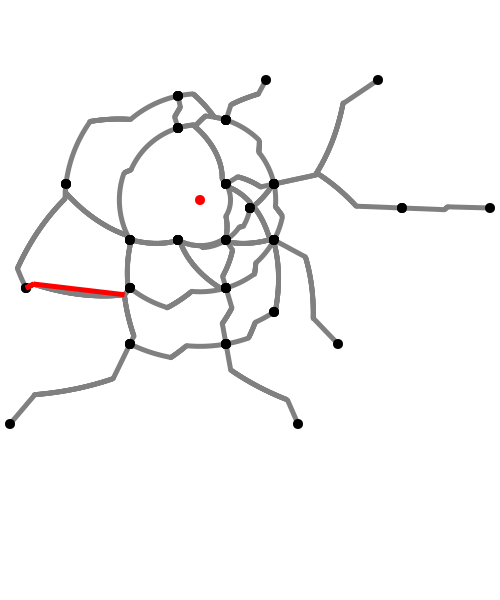

In [95]:
i=0
for s in [[5,2],[9,6],[27,6]]:    
    v=crossingSegments[0][s[0]]
    x_v=v[1]*math.cos(v[0]) + observer[0]
    y_v=v[1]*math.sin(v[0]) + observer[1]
    x_w=v[2]*math.cos(v[0]) + observer[0]
    y_w=v[2]*math.sin(v[0]) + observer[1]
    if i>0:
        continue
    dummy.append(draw.Line(x_v,y_v,x_w,y_w, 
                                    stroke=['red','green','blue'][i], stroke_width=line_width))
    print(f'ang: {v[0]/math.pi*180}, r1: {v[1]}, r2: {v[2]}')
    spiral=crossingSegments[2][s[1]]
    x_v=spiral[2]*math.cos(spiral[0]) + observer[0]
    y_v=spiral[2]*math.sin(spiral[0]) + observer[1]
    x_w=spiral[3]*math.cos(spiral[1]) + observer[0]
    y_w=spiral[3]*math.sin(spiral[1]) + observer[1]
    dummy.append(draw.Line(x_v,y_v,x_w,y_w, 
                                    stroke=['red','green','blue'][i], stroke_width=line_width))
    i+=1
    continue
    h=crossingSegments[1][s[1]]
    dummy.append(draw.Arc(observer[0], observer[1], h[2], (h[0]/math.pi*180), (h[1]/math.pi*180), cw=True,
            stroke='black', stroke_width=line_width, fill='none'))
    print(f'radius:{h[2]}, ang1: {(h[0]/math.pi*180)}, ang2: {h[1]/math.pi*180}')
    i+=1
dummy

['l', 'h']
Crossings: 1
[[[4.040141798577726, 40.52159917870962, 62.625873247404705], [3.583966876566538, 21.02379604162864, 33.25461705170238], [3.2550276453970093, 33.25461705170238, 79.51100552753688]], [[2.866682812109121, 4.040141798577726, 40.52159917870962], [3.2550276453970093, 3.583966876566538, 33.25461705170238]], []]


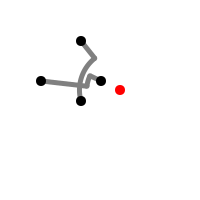

In [98]:
originalSegments=[[[81,41],[81,101]],[[41,81],[101,81]]]
dummy,crossingSegments,segmentOrientation,segmentStyle = draw_frame([120,90], returnSegments=True, returnStyle=True)
crossings= calculateCrossings(crossingSegments)
print(segmentStyle)
print(f'Crossings: {crossings}')
print(crossingSegments)
dummy


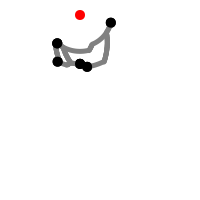

In [127]:
##TEST ANIMATION
#originalSegments=[[[80,40],[80,100]]]
observer =[80,15]

goodFlips=[]

badFlips=[]

alldistances=[]

with draw.frame_animate_jupyter(draw_frame, delay=0.05) as anim:
# Output
#with draw.frame_animate_video('flexible.gif', draw_frame, duration=0.05) as anim:
    # Add each frame to the animation
    cw=[]
    orientation=[]

    for i in range(55):
        observer=[observer[0]+1,observer[1]+1]
        anim.draw_frame(observer)
        #goodFlips,cw,badFlips,orientation=countFlips(observer,goodFlips,cw,badFlips,orientation)
        alldistances.append(hausdorffDistanceLinear(observer, "hausdorffhoriz"))
    for i in range(55):
        observer=[observer[0]-1,observer[1]+1]
        anim.draw_frame(observer)
        #goodFlips,cw,badFlips,orientation=countFlips(observer,goodFlips,cw,badFlips,orientation)
        alldistances.append(hausdorffDistanceLinear(observer, "hausdorffhoriz"))
    for i in range(55):
        observer=[observer[0]-1,observer[1]-1]
        anim.draw_frame(observer)
        #goodFlips,cw,badFlips,orientation=countFlips(observer,goodFlips,cw,badFlips,orientation)
        alldistances.append(hausdorffDistanceLinear(observer, "hausdorffhoriz"))
        alldistancesvert.append(hausdorffDistanceLinear(observer, "hausdorffvert"))
    for i in range(55):
        observer=[observer[0]+1,observer[1]-1]
        anim.draw_frame(observer)
        #goodFlips,cw,badFlips,orientation=countFlips(observer,goodFlips,cw,badFlips,orientation)
        alldistances.append(hausdorffDistanceLinear(observer, "hausdorffhoriz"))
        alldistancesvert.append(hausdorffDistanceLinear(observer, "hausdorffvert"))
#print(goodFlips)
#print(badFlips)
#print(alldistances)
#print(alldistancesvert)

In [ ]:
##MAIN ANIMATION
#make sure to run the correct definition of draw_frame before running
observer = [86,118]
#observer =[86,118] #this causes trouble in gif but not frame by frame, somehow
with draw.frame_animate_video('htest.gif', draw_frame, duration=0.05) as anim:
    anim.draw_frame(observer,onlyHoriz=True)

anim.draw_frame(observer,onlyHoriz=True).save_svg('artifactframe.svg')

In [119]:
minx = 1000
miny = 1000
for s in viennaSegments:
    for p in s:
        minx = min(minx,p[0])
        miny = min(miny,p[1])
print(minx,miny)

10 80


In [138]:
sydneyPolyLine=[[160,496],[160,384],[400,384],[400,512],[480,528]]

In [139]:
for s in sydneyPolyLine:
    print(f'[{s[0]-46},{730-s[1]}],')

[114,234],
[114,346],
[354,346],
[354,218],
[434,202],


In [3]:
np.around(2,4)

2

In [7]:
allsegments = viennaSegments
vertices = []
for s in allsegments:
    for i in range(2):
        vertex = s[i]
        dublicate = False
        for v in vertices:
            if v==vertex:
                dublicate=True
                break
        if not dublicate:
            vertices.append(vertex)
print(len(vertices))


24


In [3]:
print(len(sydneySegments))

41


In [4]:
print(len(viennaSegments))

37


In [5]:
a=[0,1]
b=[0,1]
print(a==b)

True
